In [1]:
#================================= Start of importing required packages and libraries =========================================#
from __future__ import print_function
%matplotlib inline
import numpy as np
import torchvision
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import *
from matplotlib import pyplot as plt
from dataset import Dataset
from models import CNNMnist, DenseNet
import os
from torch.utils import data
import math
import random
#from update import test_inference
from tqdm import tqdm
import copy
import statistics
#from update import LocalUpdate, test_inference
from utils import *
from environment_federated import *
from experiment_federated import *
from vgg_models import *

#================================== End of importing required packages and libraries ==========================================#


In [2]:
#=============================== Defining global variables ========================#
SIM_NUM = 1 # number of simulation times
PEER_NUM = 100 # "number of peers: K" 
PEER_PSEUDONYM = ['Worker '+str(i+1) for i in range(PEER_NUM)]
PEER_FRAC = 0.15 #'the fraction of peers: C to bel selected in each round'
UNTARGETED_ATTACK_RATES = [0.4] #different rates of random attack
STEALTHY_POSONING_RATES = [0.4] #different rates of stealthy attack
RANDOM_MALICIOU_BEHAVIOUR_RATE = 1
STEALTHY_MALICIOU_BEHAVIOUR_RATE = 1
MAPPING_LIST = [0, 1, 2, 3, 4, 5, 6, 4, 8, 9]
SEED = 7 #fixed seed
NORMAL_TAU = 1.5 # value of tau to dtermine outliers based on the rule Q1 - tau * IQR =< dist <= Q3 + tau * IQR 
TARGETED_TAU = 1.5

taus = np.empty(6)
taus[0]=1.5
for i in range(1, 6):
    taus[i] = taus[i-1]-0.4

NOISE_MEAN = 0
NOISE_SD = 0.01
MAXIMUM_ATTACKS = [0, 1, 2, 3, 4, 5, 6]
MAXIMUM_ATTACKS.reverse()
                     
GLOBAL_ROUNDS = 100 #"number of rounds of federated model training"
LOCAL_EPOCHS = 5#"the number of local epochs: E for each peer"
LOCAL_BS = 100 #"local batch size: B for each peer"
LOCAL_LR =  0.01#local learning rate: lr for each peer
LOCAL_MOMENTUM = 0.9 #local momentum for each peer
NUM_CLASSES = 10 # number of classes in an experiment

LABELS_DICT = {"airplane":0, 
        "automobile":1,
        "bird":2,
        "cat":3,
        "deer":4,
        "dog":5,
        "frog":6,
        "horse":7,
        "ship":8,
        "truck":9}



CLASSES_LIST = ('plane', 'car',  'bird',  'cat',  'deer',
                       'dog',   'frog', 'horse', 'ship', 'truck')

#select the device to work with cpu or gpu
if torch.cuda.is_available():
    DEVICE = "cuda"
else:
    DEVICE = "cpu"
    
DEVICE = torch.device(DEVICE)


random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [ ]:
#Normal training experiment in a simple environment 100% honest peers
normal_training_exp(sim_num=1, peer_pseudonym = PEER_PSEUDONYM,
                peer_num=PEER_NUM, peer_frac = PEER_FRAC, seed = SEED,tau =NORMAL_TAU,
               global_rounds = GLOBAL_ROUNDS, local_epochs = LOCAL_EPOCHS, local_bs = LOCAL_BS,
               local_lr = LOCAL_LR, local_momentum = LOCAL_MOMENTUM, num_classes = NUM_CLASSES, 
               labels_dict = LABELS_DICT, classes_list = CLASSES_LIST, device = DEVICE)

In [ ]:
#Random attack training experiment in a simple environment (Under Random Attack)
for m in MAXIMUM_ATTACKS:
    
    print('Maximum number of attacks: ', m)
    print('Noise mean: {}, Noise SD: {}'.format(NOISE_MEAN, NOISE_SD))
    untargeted_attack_training_exp(sim_num = 1, peer_pseudonym = PEER_PSEUDONYM,
                peer_num = PEER_NUM, peer_frac = PEER_FRAC, seed = SEED, tau = NORMAL_TAU,
               global_rounds = GLOBAL_ROUNDS, local_epochs = LOCAL_EPOCHS, local_bs = LOCAL_BS,
               local_lr = LOCAL_LR, local_momentum = LOCAL_MOMENTUM, num_classes = NUM_CLASSES, 
               labels_dict = LABELS_DICT, classes_list = CLASSES_LIST, device = DEVICE,
                               attack_type ='untargeted', attack_rates = UNTARGETED_ATTACK_RATES, 
                              malicious_behaviour_rate = RANDOM_MALICIOU_BEHAVIOUR_RATE, 
                               noise_mean = NOISE_MEAN, noise_sd = NOISE_SD, maximum_attacks =  m)

In [ ]:
#Random attack training experiment in a secure environment (Under Random Attack)
#%time
for m in MAXIMUM_ATTACKS:
    
    print('Maximum number of attacks: ', m)
    print('Noise mean: {}, Noise SD: {}'.format(NOISE_MEAN, NOISE_SD))

    secureEnv_random_attack_training_exp(sim_num = 1, peer_pseudonym = PEER_PSEUDONYM,
                    peer_num = PEER_NUM, peer_frac = PEER_FRAC, seed = SEED, tau = NORMAL_TAU, 
                    global_rounds = GLOBAL_ROUNDS, local_epochs = LOCAL_EPOCHS, local_bs = LOCAL_BS,
                   local_lr = LOCAL_LR , local_momentum = LOCAL_MOMENTUM, num_classes = NUM_CLASSES, 
                   labels_dict = LABELS_DICT, classes_list = CLASSES_LIST, device = DEVICE,
                    attack_type = 'untargeted', attack_rates = UNTARGETED_ATTACK_RATES, mapping_list = MAPPING_LIST, 
                                              malicious_behaviour_rate = RANDOM_MALICIOU_BEHAVIOUR_RATE, 
                                         noise_mean = NOISE_MEAN, noise_sd = NOISE_SD, maximum_attacks = m)

In [ ]:
# Targeted attack training experiment in a simple environment (Under Targeted Attack with no detection)

for m in MAXIMUM_ATTACKS:
    
    print('Maximum number of attacks: ', m)
    
    targeted_attack_training_exp(sim_num = 1, peer_pseudonym = PEER_PSEUDONYM,
                    peer_num = PEER_NUM, peer_frac = PEER_FRAC, seed = SEED,tau = TARGETED_TAU,
                   global_rounds = GLOBAL_ROUNDS, local_epochs = LOCAL_EPOCHS, local_bs = LOCAL_BS,
                   local_lr = LOCAL_LR, local_momentum = LOCAL_MOMENTUM, num_classes = NUM_CLASSES, 
                   labels_dict = LABELS_DICT, classes_list = CLASSES_LIST, device = DEVICE,
                                   attack_type ='targeted', attack_rates = STEALTHY_POSONING_RATES, 
                                 malicious_behaviour_rate = STEALTHY_MALICIOU_BEHAVIOUR_RATE, mapping_list = MAPPING_LIST,
                                 noise_mean = NOISE_MEAN, noise_sd = NOISE_SD, maximum_attacks=m)

Maximum number of attacks:  6
Tau value :  -0.5

==>Start targeted attack Simulation in Secure Environment...


===>targeted attack with rate of: (40%) of peers and malicious behaviour rate of: (100%)
======>Creating Global model.....
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1,


Selected workers

[32 93 79 54 20 23 66 25 36 75 33 62 95 68 49]
Worker 32 : is  Honest
Worker 93 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 20 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 66 : is  Stealthy_Attacker
Worker 25 : is  Honest
Worker 36 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 62 : is  Honest
Worker 95 : is  Honest
Worker 68 : is  Honest
Worker 49 : is  Honest

 | Global Training Round : 1 |


Worker 32 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.715106
Train Epoch: 1 [400/500	(81%)]	Loss: 2.560396
Train Epoch: 2 [0/500	(1%)]	Loss: 2.238075
Train Epoch: 2 [400/500	(81%)]	Loss: 2.420401
Train Epoch: 3 [0/500	(1%)]	Loss: 2.212572
Train Epoch: 3 [400/500	(81%)]	Loss: 2.229904
Train Epoch: 4 [0/500	(1%)]	Loss: 2.283935
Train Epoch: 4 [400/500	(81%)]	Loss: 2.245865
Train Epoch: 5 [0/500	(1%)]	Loss: 2.085931
Train Epoch: 5 [400/500	(81%)]	Loss: 2.353004

Worker 32 ends training in Global Round:1 |

Worker 93 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.658226
Train Epoch: 1 [400/500	(81%)]	Loss: 2.436564
Train Epoch: 2 [0/500	(1%)]	Loss: 2.413598
Train Epoch: 2 [400/500	(81%)]	Loss: 2.069607
Train Epoch: 3 [0/500	(1%)]	Loss: 2.030561
Train Epoch: 3 [400/500	(81%)]	Loss: 2.525021
Train Epoch: 4 [0/500	(1%)]	Loss: 2.092808
Train Epoch: 4 [400/500	(81%)]	Loss: 2.066418
Train Epoch: 5 [0/500	(1%)]	Loss: 2.496398
Train Epoch: 5 [400/500	(81%)]	Loss: 1.951830

Worker 93 ends training in Global Round:1 |

Worker 79 starts training in Global Round:1 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  1


Train Epoch: 1 [0/500	(1%)]	Loss: 2.807952
Train Epoch: 1 [400/500	(81%)]	Loss: 2.251469
Train Epoch: 2 [0/500	(1%)]	Loss: 2.144112
Train Epoch: 2 [400/500	(81%)]	Loss: 2.069736
Train Epoch: 3 [0/500	(1%)]	Loss: 2.287066
Train Epoch: 3 [400/500	(81%)]	Loss: 2.306856
Train Epoch: 4 [0/500	(1%)]	Loss: 2.204774
Train Epoch: 4 [400/500	(81%)]	Loss: 2.290977
Train Epoch: 5 [0/500	(1%)]	Loss: 2.076024
Train Epoch: 5 [400/500	(81%)]	Loss: 2.116385

Performed attacks 1
Worker 79 ends training in Global Round:1 |

Worker 54 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.651445
Train Epoch: 1 [400/500	(81%)]	Loss: 2.393485
Train Epoch: 2 [0/500	(1%)]	Loss: 2.017407
Train Epoch: 2 [400/500	(81%)]	Loss: 2.204904
Train Epoch: 3 [0/500	(1%)]	Loss: 1.956438
Train Epoch: 3 [400/500	(81%)]	Loss: 1.851527
Train Epoch: 4 [0/500	(1%)]	Loss: 2.016019
Train Epoch: 4 [400/500	(81%)]	Loss: 2.287971
Train Epoch: 5 [0/500	(1%)]	Loss: 1.907987
Train Epoch: 5 [400/500	(81%)]	Loss: 2.118683

Worker 54 ends training in Global Round:1 |

Worker 20 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.600789
Train Epoch: 1 [400/500	(81%)]	Loss: 2.761133
Train Epoch: 2 [0/500	(1%)]	Loss: 2.315908
Train Epoch: 2 [400/500	(81%)]	Loss: 2.145913
Train Epoch: 3 [0/500	(1%)]	Loss: 2.188108
Train Epoch: 3 [400/500	(81%)]	Loss: 2.312652
Train Epoch: 4 [0/500	(1%)]	Loss: 2.235069
Train Epoch: 4 [400/500	(81%)]	Loss: 2.495639
Train Epoch: 5 [0/500	(1%)]	Loss: 1.729281
Train Epoch: 5 [400/500	(81%)]	Loss: 2.436866

Worker 20 ends training in Global Round:1 |

Worker 23 starts training in Global Round:1 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  1


Train Epoch: 1 [0/500	(1%)]	Loss: 2.712501
Train Epoch: 1 [400/500	(81%)]	Loss: 2.031727
Train Epoch: 2 [0/500	(1%)]	Loss: 2.123543
Train Epoch: 2 [400/500	(81%)]	Loss: 2.199188
Train Epoch: 3 [0/500	(1%)]	Loss: 1.975239
Train Epoch: 3 [400/500	(81%)]	Loss: 2.104397
Train Epoch: 4 [0/500	(1%)]	Loss: 1.728465
Train Epoch: 4 [400/500	(81%)]	Loss: 1.969123
Train Epoch: 5 [0/500	(1%)]	Loss: 2.045721
Train Epoch: 5 [400/500	(81%)]	Loss: 1.867568

Performed attacks 2
Worker 23 ends training in Global Round:1 |

Worker 66 starts training in Global Round:1 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  1


Train Epoch: 1 [0/500	(1%)]	Loss: 2.649693
Train Epoch: 1 [400/500	(81%)]	Loss: 2.241411
Train Epoch: 2 [0/500	(1%)]	Loss: 2.283607
Train Epoch: 2 [400/500	(81%)]	Loss: 1.970514
Train Epoch: 3 [0/500	(1%)]	Loss: 1.950851
Train Epoch: 3 [400/500	(81%)]	Loss: 2.367959
Train Epoch: 4 [0/500	(1%)]	Loss: 2.299603
Train Epoch: 4 [400/500	(81%)]	Loss: 1.965851
Train Epoch: 5 [0/500	(1%)]	Loss: 2.170564
Train Epoch: 5 [400/500	(81%)]	Loss: 1.902775

Performed attacks 3
Worker 66 ends training in Global Round:1 |

Worker 25 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.641215
Train Epoch: 1 [400/500	(81%)]	Loss: 2.292809
Train Epoch: 2 [0/500	(1%)]	Loss: 2.232587
Train Epoch: 2 [400/500	(81%)]	Loss: 2.144900
Train Epoch: 3 [0/500	(1%)]	Loss: 2.126365
Train Epoch: 3 [400/500	(81%)]	Loss: 2.206887
Train Epoch: 4 [0/500	(1%)]	Loss: 2.047364
Train Epoch: 4 [400/500	(81%)]	Loss: 2.142216
Train Epoch: 5 [0/500	(1%)]	Loss: 2.066613
Train Epoch: 5 [400/500	(81%)]	Loss: 2.501024

Worker 25 ends training in Global Round:1 |

Worker 36 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.599506
Train Epoch: 1 [400/500	(81%)]	Loss: 2.296187
Train Epoch: 2 [0/500	(1%)]	Loss: 2.250854
Train Epoch: 2 [400/500	(81%)]	Loss: 2.149347
Train Epoch: 3 [0/500	(1%)]	Loss: 2.074490
Train Epoch: 3 [400/500	(81%)]	Loss: 2.245174
Train Epoch: 4 [0/500	(1%)]	Loss: 2.264517
Train Epoch: 4 [400/500	(81%)]	Loss: 2.261183
Train Epoch: 5 [0/500	(1%)]	Loss: 2.074025
Train Epoch: 5 [400/500	(81%)]	Loss: 2.052057

Worker 36 ends training in Global Round:1 |

Worker 75 starts training in Global Round:1 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  1


Train Epoch: 1 [0/500	(1%)]	Loss: 2.815788
Train Epoch: 1 [400/500	(81%)]	Loss: 2.948057
Train Epoch: 2 [0/500	(1%)]	Loss: 2.301094
Train Epoch: 2 [400/500	(81%)]	Loss: 1.946055
Train Epoch: 3 [0/500	(1%)]	Loss: 2.077343
Train Epoch: 3 [400/500	(81%)]	Loss: 2.280371
Train Epoch: 4 [0/500	(1%)]	Loss: 1.924447
Train Epoch: 4 [400/500	(81%)]	Loss: 2.086493
Train Epoch: 5 [0/500	(1%)]	Loss: 1.801837
Train Epoch: 5 [400/500	(81%)]	Loss: 1.923665

Performed attacks 4
Worker 75 ends training in Global Round:1 |

Worker 33 starts training in Global Round:1 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  1


Train Epoch: 1 [0/500	(1%)]	Loss: 2.669160
Train Epoch: 1 [400/500	(81%)]	Loss: 2.035663
Train Epoch: 2 [0/500	(1%)]	Loss: 1.938906
Train Epoch: 2 [400/500	(81%)]	Loss: 1.945818
Train Epoch: 3 [0/500	(1%)]	Loss: 1.948535
Train Epoch: 3 [400/500	(81%)]	Loss: 1.813310
Train Epoch: 4 [0/500	(1%)]	Loss: 2.150935
Train Epoch: 4 [400/500	(81%)]	Loss: 1.895654
Train Epoch: 5 [0/500	(1%)]	Loss: 1.807849
Train Epoch: 5 [400/500	(81%)]	Loss: 1.867583

Performed attacks 5
Worker 33 ends training in Global Round:1 |

Worker 62 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.631889
Train Epoch: 1 [400/500	(81%)]	Loss: 2.480538
Train Epoch: 2 [0/500	(1%)]	Loss: 2.192620
Train Epoch: 2 [400/500	(81%)]	Loss: 2.235310
Train Epoch: 3 [0/500	(1%)]	Loss: 2.052872
Train Epoch: 3 [400/500	(81%)]	Loss: 2.285378
Train Epoch: 4 [0/500	(1%)]	Loss: 1.695585
Train Epoch: 4 [400/500	(81%)]	Loss: 2.335548
Train Epoch: 5 [0/500	(1%)]	Loss: 1.713429
Train Epoch: 5 [400/500	(81%)]	Loss: 2.450830

Worker 62 ends training in Global Round:1 |

Worker 95 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.605102
Train Epoch: 1 [400/500	(81%)]	Loss: 2.599904
Train Epoch: 2 [0/500	(1%)]	Loss: 2.664613
Train Epoch: 2 [400/500	(81%)]	Loss: 2.348297
Train Epoch: 3 [0/500	(1%)]	Loss: 2.524201
Train Epoch: 3 [400/500	(81%)]	Loss: 2.356548
Train Epoch: 4 [0/500	(1%)]	Loss: 2.182282
Train Epoch: 4 [400/500	(81%)]	Loss: 1.886563
Train Epoch: 5 [0/500	(1%)]	Loss: 2.032939
Train Epoch: 5 [400/500	(81%)]	Loss: 2.143677

Worker 95 ends training in Global Round:1 |

Worker 68 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.663478
Train Epoch: 1 [400/500	(81%)]	Loss: 2.274394
Train Epoch: 2 [0/500	(1%)]	Loss: 2.122339
Train Epoch: 2 [400/500	(81%)]	Loss: 2.367329
Train Epoch: 3 [0/500	(1%)]	Loss: 2.176784
Train Epoch: 3 [400/500	(81%)]	Loss: 2.227664
Train Epoch: 4 [0/500	(1%)]	Loss: 2.326302
Train Epoch: 4 [400/500	(81%)]	Loss: 2.280174
Train Epoch: 5 [0/500	(1%)]	Loss: 2.141687
Train Epoch: 5 [400/500	(81%)]	Loss: 2.235791

Worker 68 ends training in Global Round:1 |

Worker 49 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.682665
Train Epoch: 1 [400/500	(81%)]	Loss: 2.457084
Train Epoch: 2 [0/500	(1%)]	Loss: 2.326516
Train Epoch: 2 [400/500	(81%)]	Loss: 2.503021
Train Epoch: 3 [0/500	(1%)]	Loss: 2.194870
Train Epoch: 3 [400/500	(81%)]	Loss: 2.266718
Train Epoch: 4 [0/500	(1%)]	Loss: 2.514888
Train Epoch: 4 [400/500	(81%)]	Loss: 2.536979
Train Epoch: 5 [0/500	(1%)]	Loss: 2.257758
Train Epoch: 5 [400/500	(81%)]	Loss: 2.093737

Worker 49 ends training in Global Round:1 |
Last layer biases  [array([ 0.02844713, -0.0267535 , -0.0205508 ,  0.02636009,  0.03512862,
       -0.01465056,  0.04543332, -0.00725238, -0.01215163, -0.03810931],
      dtype=float32), array([ 0.028402  , -0.02434531, -0.02279091,  0.03027944,  0.03432439,
       -0.01700807,  0.04383021, -0.00482408, -0.01627614, -0.03569057],
      dtype=float32), array([ 0.02661591, -0.02696773, -0.01564166,  0.02942932,  0.03724015,
       -0.01561932,  0.04682897, -0.02042856, -0.00894867, -0.0366074 ],
      dtype

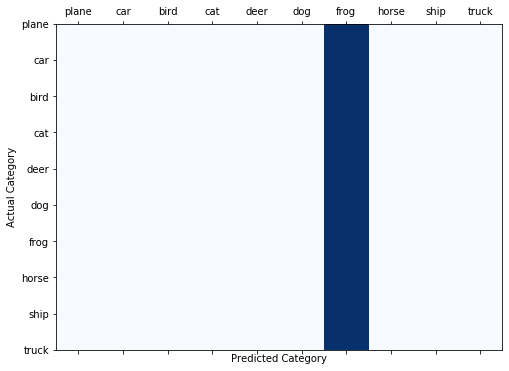

Category   - Accuracy
plane      - 0.0
car        - 0.0
bird       - 0.0
cat        - 0.0
deer       - 0.0
dog        - 0.0
frog       - 100.0
horse      - 0.0
ship       - 0.0
truck      - 0.0

Selected workers

[ 2 38 76 61 84 87 86 75  3 96 85 60 11 91 68]
Worker 2 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 76 : is  Honest
Worker 61 : is  Honest
Worker 84 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 86 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 3 : is  Stealthy_Attacker
Worker 96 : is  Honest
Worker 85 : is  Honest
Worker 60 : is  Honest
Worker 11 : is  Honest
Worker 91 : is  Honest
Worker 68 : is  Honest

 | Global Training Round : 2 |


Worker 2 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.136977
Train Epoch: 1 [400/500	(81%)]	Loss: 2.097812
Train Epoch: 2 [0/500	(1%)]	Loss: 1.871708
Train Epoch: 2 [400/500	(81%)]	Loss: 1.980786
Train Epoch: 3 [0/500	(1%)]	Loss: 1.780627
Train Epoch: 3 [400/500	(81%)]	Loss: 2.398607
Train Epoch: 4 [0/500	(1%)]	Loss: 1.759180
Train Epoch: 4 [400/500	(81%)]	Loss: 1.558514
Train Epoch: 5 [0/500	(1%)]	Loss: 1.981572
Train Epoch: 5 [400/500	(81%)]	Loss: 2.215055

Worker 2 ends training in Global Round:2 |

Worker 38 starts training in Global Round:2 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  2


Train Epoch: 1 [0/500	(1%)]	Loss: 2.394683
Train Epoch: 1 [400/500	(81%)]	Loss: 1.947859
Train Epoch: 2 [0/500	(1%)]	Loss: 2.108854
Train Epoch: 2 [400/500	(81%)]	Loss: 1.937365
Train Epoch: 3 [0/500	(1%)]	Loss: 1.754494
Train Epoch: 3 [400/500	(81%)]	Loss: 2.519375
Train Epoch: 4 [0/500	(1%)]	Loss: 1.755033
Train Epoch: 4 [400/500	(81%)]	Loss: 1.724683
Train Epoch: 5 [0/500	(1%)]	Loss: 1.785828
Train Epoch: 5 [400/500	(81%)]	Loss: 1.602004

Performed attacks 1
Worker 38 ends training in Global Round:2 |

Worker 76 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.850564
Train Epoch: 1 [400/500	(81%)]	Loss: 2.028647
Train Epoch: 2 [0/500	(1%)]	Loss: 2.186001
Train Epoch: 2 [400/500	(81%)]	Loss: 2.310960
Train Epoch: 3 [0/500	(1%)]	Loss: 2.028889
Train Epoch: 3 [400/500	(81%)]	Loss: 1.682766
Train Epoch: 4 [0/500	(1%)]	Loss: 1.938196
Train Epoch: 4 [400/500	(81%)]	Loss: 2.068251
Train Epoch: 5 [0/500	(1%)]	Loss: 1.732564
Train Epoch: 5 [400/500	(81%)]	Loss: 1.846417

Worker 76 ends training in Global Round:2 |

Worker 61 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.943678
Train Epoch: 1 [400/500	(81%)]	Loss: 2.330649
Train Epoch: 2 [0/500	(1%)]	Loss: 2.281808
Train Epoch: 2 [400/500	(81%)]	Loss: 2.282421
Train Epoch: 3 [0/500	(1%)]	Loss: 1.896326
Train Epoch: 3 [400/500	(81%)]	Loss: 2.001462
Train Epoch: 4 [0/500	(1%)]	Loss: 2.010874
Train Epoch: 4 [400/500	(81%)]	Loss: 2.165158
Train Epoch: 5 [0/500	(1%)]	Loss: 1.685386
Train Epoch: 5 [400/500	(81%)]	Loss: 1.750487

Worker 61 ends training in Global Round:2 |

Worker 84 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.119409
Train Epoch: 1 [400/500	(81%)]	Loss: 2.150689
Train Epoch: 2 [0/500	(1%)]	Loss: 1.905213
Train Epoch: 2 [400/500	(81%)]	Loss: 2.381611
Train Epoch: 3 [0/500	(1%)]	Loss: 2.043793
Train Epoch: 3 [400/500	(81%)]	Loss: 1.984303
Train Epoch: 4 [0/500	(1%)]	Loss: 2.448222
Train Epoch: 4 [400/500	(81%)]	Loss: 2.116552
Train Epoch: 5 [0/500	(1%)]	Loss: 1.956913
Train Epoch: 5 [400/500	(81%)]	Loss: 1.918330

Worker 84 ends training in Global Round:2 |

Worker 87 starts training in Global Round:2 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  2


Train Epoch: 1 [0/500	(1%)]	Loss: 2.106688
Train Epoch: 1 [400/500	(81%)]	Loss: 1.798704
Train Epoch: 2 [0/500	(1%)]	Loss: 1.642735
Train Epoch: 2 [400/500	(81%)]	Loss: 2.026978
Train Epoch: 3 [0/500	(1%)]	Loss: 1.442866
Train Epoch: 3 [400/500	(81%)]	Loss: 1.735963
Train Epoch: 4 [0/500	(1%)]	Loss: 1.476828
Train Epoch: 4 [400/500	(81%)]	Loss: 1.423882
Train Epoch: 5 [0/500	(1%)]	Loss: 1.485678
Train Epoch: 5 [400/500	(81%)]	Loss: 1.775426

Performed attacks 2
Worker 87 ends training in Global Round:2 |

Worker 86 starts training in Global Round:2 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  2


Train Epoch: 1 [0/500	(1%)]	Loss: 2.348816
Train Epoch: 1 [400/500	(81%)]	Loss: 2.159896
Train Epoch: 2 [0/500	(1%)]	Loss: 1.937716
Train Epoch: 2 [400/500	(81%)]	Loss: 1.885030
Train Epoch: 3 [0/500	(1%)]	Loss: 1.908349
Train Epoch: 3 [400/500	(81%)]	Loss: 1.887933
Train Epoch: 4 [0/500	(1%)]	Loss: 2.005196
Train Epoch: 4 [400/500	(81%)]	Loss: 1.807305
Train Epoch: 5 [0/500	(1%)]	Loss: 1.499047
Train Epoch: 5 [400/500	(81%)]	Loss: 1.531885

Performed attacks 3
Worker 86 ends training in Global Round:2 |

Worker 75 starts training in Global Round:2 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  2


Train Epoch: 1 [0/500	(1%)]	Loss: 2.489276
Train Epoch: 1 [400/500	(81%)]	Loss: 1.760539
Train Epoch: 2 [0/500	(1%)]	Loss: 2.076976
Train Epoch: 2 [400/500	(81%)]	Loss: 2.271435
Train Epoch: 3 [0/500	(1%)]	Loss: 1.966053
Train Epoch: 3 [400/500	(81%)]	Loss: 1.956332
Train Epoch: 4 [0/500	(1%)]	Loss: 2.112208
Train Epoch: 4 [400/500	(81%)]	Loss: 1.830785
Train Epoch: 5 [0/500	(1%)]	Loss: 2.025656
Train Epoch: 5 [400/500	(81%)]	Loss: 1.761255

Performed attacks 4
Worker 75 ends training in Global Round:2 |

Worker 3 starts training in Global Round:2 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  2


Train Epoch: 1 [0/500	(1%)]	Loss: 2.317847
Train Epoch: 1 [400/500	(81%)]	Loss: 2.001817
Train Epoch: 2 [0/500	(1%)]	Loss: 2.014305
Train Epoch: 2 [400/500	(81%)]	Loss: 2.165919
Train Epoch: 3 [0/500	(1%)]	Loss: 2.503328
Train Epoch: 3 [400/500	(81%)]	Loss: 2.178786
Train Epoch: 4 [0/500	(1%)]	Loss: 1.907788
Train Epoch: 4 [400/500	(81%)]	Loss: 2.009914
Train Epoch: 5 [0/500	(1%)]	Loss: 1.824220
Train Epoch: 5 [400/500	(81%)]	Loss: 2.130886

Performed attacks 5
Worker 3 ends training in Global Round:2 |

Worker 96 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.066785
Train Epoch: 1 [400/500	(81%)]	Loss: 2.044051
Train Epoch: 2 [0/500	(1%)]	Loss: 1.813856
Train Epoch: 2 [400/500	(81%)]	Loss: 1.919710
Train Epoch: 3 [0/500	(1%)]	Loss: 1.907995
Train Epoch: 3 [400/500	(81%)]	Loss: 1.740825
Train Epoch: 4 [0/500	(1%)]	Loss: 1.688715
Train Epoch: 4 [400/500	(81%)]	Loss: 1.777236
Train Epoch: 5 [0/500	(1%)]	Loss: 1.667428
Train Epoch: 5 [400/500	(81%)]	Loss: 1.459751

Worker 96 ends training in Global Round:2 |

Worker 85 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.056724
Train Epoch: 1 [400/500	(81%)]	Loss: 2.034158
Train Epoch: 2 [0/500	(1%)]	Loss: 2.014054
Train Epoch: 2 [400/500	(81%)]	Loss: 1.991138
Train Epoch: 3 [0/500	(1%)]	Loss: 1.788164
Train Epoch: 3 [400/500	(81%)]	Loss: 2.028718
Train Epoch: 4 [0/500	(1%)]	Loss: 1.770618
Train Epoch: 4 [400/500	(81%)]	Loss: 2.115924
Train Epoch: 5 [0/500	(1%)]	Loss: 1.452322
Train Epoch: 5 [400/500	(81%)]	Loss: 1.604344

Worker 85 ends training in Global Round:2 |

Worker 60 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.111520
Train Epoch: 1 [400/500	(81%)]	Loss: 2.119141
Train Epoch: 2 [0/500	(1%)]	Loss: 1.992203
Train Epoch: 2 [400/500	(81%)]	Loss: 2.165666
Train Epoch: 3 [0/500	(1%)]	Loss: 1.890466
Train Epoch: 3 [400/500	(81%)]	Loss: 1.670594
Train Epoch: 4 [0/500	(1%)]	Loss: 1.872621
Train Epoch: 4 [400/500	(81%)]	Loss: 1.827297
Train Epoch: 5 [0/500	(1%)]	Loss: 1.753370
Train Epoch: 5 [400/500	(81%)]	Loss: 1.504456

Worker 60 ends training in Global Round:2 |

Worker 11 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.100485
Train Epoch: 1 [400/500	(81%)]	Loss: 1.844938
Train Epoch: 2 [0/500	(1%)]	Loss: 1.877648
Train Epoch: 2 [400/500	(81%)]	Loss: 1.888127
Train Epoch: 3 [0/500	(1%)]	Loss: 1.628160
Train Epoch: 3 [400/500	(81%)]	Loss: 1.832198
Train Epoch: 4 [0/500	(1%)]	Loss: 1.560863
Train Epoch: 4 [400/500	(81%)]	Loss: 1.692926
Train Epoch: 5 [0/500	(1%)]	Loss: 1.599697
Train Epoch: 5 [400/500	(81%)]	Loss: 1.532957

Worker 11 ends training in Global Round:2 |

Worker 91 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.056661
Train Epoch: 1 [400/500	(81%)]	Loss: 1.912861
Train Epoch: 2 [0/500	(1%)]	Loss: 1.864830
Train Epoch: 2 [400/500	(81%)]	Loss: 1.764871
Train Epoch: 3 [0/500	(1%)]	Loss: 1.798320
Train Epoch: 3 [400/500	(81%)]	Loss: 1.593551
Train Epoch: 4 [0/500	(1%)]	Loss: 1.754607
Train Epoch: 4 [400/500	(81%)]	Loss: 1.778858
Train Epoch: 5 [0/500	(1%)]	Loss: 1.375010
Train Epoch: 5 [400/500	(81%)]	Loss: 2.133582

Worker 91 ends training in Global Round:2 |

Worker 68 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.075985
Train Epoch: 1 [400/500	(81%)]	Loss: 2.261004
Train Epoch: 2 [0/500	(1%)]	Loss: 1.895581
Train Epoch: 2 [400/500	(81%)]	Loss: 1.977248
Train Epoch: 3 [0/500	(1%)]	Loss: 1.991315
Train Epoch: 3 [400/500	(81%)]	Loss: 1.926333
Train Epoch: 4 [0/500	(1%)]	Loss: 1.918150
Train Epoch: 4 [400/500	(81%)]	Loss: 1.692280
Train Epoch: 5 [0/500	(1%)]	Loss: 2.068364
Train Epoch: 5 [400/500	(81%)]	Loss: 2.001887

Worker 68 ends training in Global Round:2 |
Last layer biases  [array([ 0.02945258, -0.02900613, -0.02018367,  0.03066868,  0.03542024,
       -0.01892686,  0.04442103, -0.0067118 , -0.01206624, -0.03716681],
      dtype=float32), array([ 0.02782381, -0.02620708, -0.0216518 ,  0.02964446,  0.0385312 ,
       -0.01294391,  0.04554057, -0.01898632, -0.00864244, -0.03720748],
      dtype=float32), array([ 0.02858268, -0.02541539, -0.02040065,  0.02567133,  0.0322707 ,
       -0.01498834,  0.04549842, -0.00494085, -0.01236414, -0.03801275],
      dtype

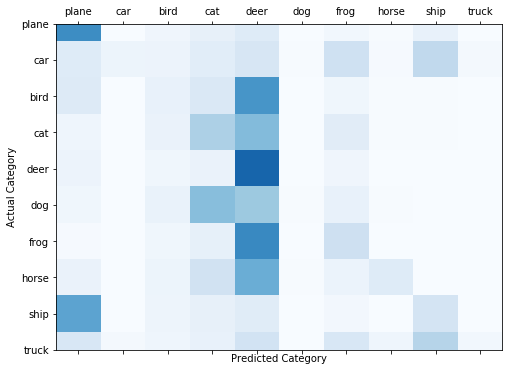

Category   - Accuracy
plane      - 64.4
car        - 5.3
bird       - 7.1
cat        - 32.6
deer       - 79.6
dog        - 0.7
frog       - 20.9
horse      - 12.2
ship       - 17.5
truck      - 2.9

Selected workers

[  7 100  96  56  75  26  53  65  32  55  41  43  17  74  42]
Worker 7 : is  Honest
Worker 100 : is  Honest
Worker 96 : is  Honest
Worker 56 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 32 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 41 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 17 : is  Honest
Worker 74 : is  Honest
Worker 42 : is  Honest

 | Global Training Round : 3 |


Worker 7 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.722305
Train Epoch: 1 [400/500	(81%)]	Loss: 1.859390
Train Epoch: 2 [0/500	(1%)]	Loss: 1.695683
Train Epoch: 2 [400/500	(81%)]	Loss: 1.710244
Train Epoch: 3 [0/500	(1%)]	Loss: 1.327678
Train Epoch: 3 [400/500	(81%)]	Loss: 1.855560
Train Epoch: 4 [0/500	(1%)]	Loss: 1.229574
Train Epoch: 4 [400/500	(81%)]	Loss: 1.735024
Train Epoch: 5 [0/500	(1%)]	Loss: 1.429874
Train Epoch: 5 [400/500	(81%)]	Loss: 1.691582

Worker 7 ends training in Global Round:3 |

Worker 100 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.773721
Train Epoch: 1 [400/500	(81%)]	Loss: 1.620956
Train Epoch: 2 [0/500	(1%)]	Loss: 1.632249
Train Epoch: 2 [400/500	(81%)]	Loss: 1.866083
Train Epoch: 3 [0/500	(1%)]	Loss: 1.482787
Train Epoch: 3 [400/500	(81%)]	Loss: 1.479021
Train Epoch: 4 [0/500	(1%)]	Loss: 1.551489
Train Epoch: 4 [400/500	(81%)]	Loss: 1.567332
Train Epoch: 5 [0/500	(1%)]	Loss: 1.625973
Train Epoch: 5 [400/500	(81%)]	Loss: 1.818391

Worker 100 ends training in Global Round:3 |

Worker 96 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.925826
Train Epoch: 1 [400/500	(81%)]	Loss: 2.007092
Train Epoch: 2 [0/500	(1%)]	Loss: 1.809688
Train Epoch: 2 [400/500	(81%)]	Loss: 1.683390
Train Epoch: 3 [0/500	(1%)]	Loss: 1.463809
Train Epoch: 3 [400/500	(81%)]	Loss: 1.654941
Train Epoch: 4 [0/500	(1%)]	Loss: 1.644564
Train Epoch: 4 [400/500	(81%)]	Loss: 1.243027
Train Epoch: 5 [0/500	(1%)]	Loss: 1.370382
Train Epoch: 5 [400/500	(81%)]	Loss: 1.745602

Worker 96 ends training in Global Round:3 |

Worker 56 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.839580
Train Epoch: 1 [400/500	(81%)]	Loss: 1.672202
Train Epoch: 2 [0/500	(1%)]	Loss: 1.456870
Train Epoch: 2 [400/500	(81%)]	Loss: 1.626622
Train Epoch: 3 [0/500	(1%)]	Loss: 1.439961
Train Epoch: 3 [400/500	(81%)]	Loss: 1.473664
Train Epoch: 4 [0/500	(1%)]	Loss: 1.603250
Train Epoch: 4 [400/500	(81%)]	Loss: 1.652862
Train Epoch: 5 [0/500	(1%)]	Loss: 1.387301
Train Epoch: 5 [400/500	(81%)]	Loss: 1.495686

Worker 56 ends training in Global Round:3 |

Worker 75 starts training in Global Round:3 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  3


Train Epoch: 1 [0/500	(1%)]	Loss: 1.876419
Train Epoch: 1 [400/500	(81%)]	Loss: 1.835263
Train Epoch: 2 [0/500	(1%)]	Loss: 1.604622
Train Epoch: 2 [400/500	(81%)]	Loss: 1.674284
Train Epoch: 3 [0/500	(1%)]	Loss: 1.645432
Train Epoch: 3 [400/500	(81%)]	Loss: 1.748100
Train Epoch: 4 [0/500	(1%)]	Loss: 1.335416
Train Epoch: 4 [400/500	(81%)]	Loss: 1.372017
Train Epoch: 5 [0/500	(1%)]	Loss: 1.515918
Train Epoch: 5 [400/500	(81%)]	Loss: 1.521950

Performed attacks 1
Worker 75 ends training in Global Round:3 |

Worker 26 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.988230
Train Epoch: 1 [400/500	(81%)]	Loss: 1.947207
Train Epoch: 2 [0/500	(1%)]	Loss: 1.981828
Train Epoch: 2 [400/500	(81%)]	Loss: 1.681851
Train Epoch: 3 [0/500	(1%)]	Loss: 1.504009
Train Epoch: 3 [400/500	(81%)]	Loss: 1.536522
Train Epoch: 4 [0/500	(1%)]	Loss: 1.716854
Train Epoch: 4 [400/500	(81%)]	Loss: 1.351999
Train Epoch: 5 [0/500	(1%)]	Loss: 1.401258
Train Epoch: 5 [400/500	(81%)]	Loss: 1.542066

Worker 26 ends training in Global Round:3 |

Worker 53 starts training in Global Round:3 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  3


Train Epoch: 1 [0/500	(1%)]	Loss: 2.231236
Train Epoch: 1 [400/500	(81%)]	Loss: 1.987779
Train Epoch: 2 [0/500	(1%)]	Loss: 1.718736
Train Epoch: 2 [400/500	(81%)]	Loss: 2.148365
Train Epoch: 3 [0/500	(1%)]	Loss: 1.781113
Train Epoch: 3 [400/500	(81%)]	Loss: 1.867541
Train Epoch: 4 [0/500	(1%)]	Loss: 1.989453
Train Epoch: 4 [400/500	(81%)]	Loss: 1.989701
Train Epoch: 5 [0/500	(1%)]	Loss: 1.765076
Train Epoch: 5 [400/500	(81%)]	Loss: 1.891582

Performed attacks 2
Worker 53 ends training in Global Round:3 |

Worker 65 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.616114
Train Epoch: 1 [400/500	(81%)]	Loss: 1.923036
Train Epoch: 2 [0/500	(1%)]	Loss: 1.654031
Train Epoch: 2 [400/500	(81%)]	Loss: 1.623057
Train Epoch: 3 [0/500	(1%)]	Loss: 1.498036
Train Epoch: 3 [400/500	(81%)]	Loss: 1.643869
Train Epoch: 4 [0/500	(1%)]	Loss: 1.734347
Train Epoch: 4 [400/500	(81%)]	Loss: 1.450456
Train Epoch: 5 [0/500	(1%)]	Loss: 1.384133
Train Epoch: 5 [400/500	(81%)]	Loss: 1.586316

Worker 65 ends training in Global Round:3 |

Worker 32 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.753166
Train Epoch: 1 [400/500	(81%)]	Loss: 2.232527
Train Epoch: 2 [0/500	(1%)]	Loss: 1.531603
Train Epoch: 2 [400/500	(81%)]	Loss: 1.903472
Train Epoch: 3 [0/500	(1%)]	Loss: 1.776241
Train Epoch: 3 [400/500	(81%)]	Loss: 1.892774
Train Epoch: 4 [0/500	(1%)]	Loss: 1.710789
Train Epoch: 4 [400/500	(81%)]	Loss: 1.510902
Train Epoch: 5 [0/500	(1%)]	Loss: 1.517641
Train Epoch: 5 [400/500	(81%)]	Loss: 1.272579

Worker 32 ends training in Global Round:3 |

Worker 55 starts training in Global Round:3 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  3


Train Epoch: 1 [0/500	(1%)]	Loss: 2.029891
Train Epoch: 1 [400/500	(81%)]	Loss: 2.153263
Train Epoch: 2 [0/500	(1%)]	Loss: 1.631965
Train Epoch: 2 [400/500	(81%)]	Loss: 1.939358
Train Epoch: 3 [0/500	(1%)]	Loss: 2.018737
Train Epoch: 3 [400/500	(81%)]	Loss: 1.649299
Train Epoch: 4 [0/500	(1%)]	Loss: 1.537634
Train Epoch: 4 [400/500	(81%)]	Loss: 1.533967
Train Epoch: 5 [0/500	(1%)]	Loss: 1.339584
Train Epoch: 5 [400/500	(81%)]	Loss: 1.289850

Performed attacks 3
Worker 55 ends training in Global Round:3 |

Worker 41 starts training in Global Round:3 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  3


Train Epoch: 1 [0/500	(1%)]	Loss: 2.204740
Train Epoch: 1 [400/500	(81%)]	Loss: 2.103252
Train Epoch: 2 [0/500	(1%)]	Loss: 1.665869
Train Epoch: 2 [400/500	(81%)]	Loss: 2.099381
Train Epoch: 3 [0/500	(1%)]	Loss: 1.538078
Train Epoch: 3 [400/500	(81%)]	Loss: 1.834012
Train Epoch: 4 [0/500	(1%)]	Loss: 1.678076
Train Epoch: 4 [400/500	(81%)]	Loss: 2.025664
Train Epoch: 5 [0/500	(1%)]	Loss: 1.519017
Train Epoch: 5 [400/500	(81%)]	Loss: 1.714087

Performed attacks 4
Worker 41 ends training in Global Round:3 |

Worker 43 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.734155
Train Epoch: 1 [400/500	(81%)]	Loss: 2.083776
Train Epoch: 2 [0/500	(1%)]	Loss: 1.517763
Train Epoch: 2 [400/500	(81%)]	Loss: 2.018251
Train Epoch: 3 [0/500	(1%)]	Loss: 1.807209
Train Epoch: 3 [400/500	(81%)]	Loss: 1.655871
Train Epoch: 4 [0/500	(1%)]	Loss: 1.644590
Train Epoch: 4 [400/500	(81%)]	Loss: 1.759593
Train Epoch: 5 [0/500	(1%)]	Loss: 1.236526
Train Epoch: 5 [400/500	(81%)]	Loss: 1.323245

Worker 43 ends training in Global Round:3 |

Worker 17 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.020209
Train Epoch: 1 [400/500	(81%)]	Loss: 1.772202
Train Epoch: 2 [0/500	(1%)]	Loss: 1.760048
Train Epoch: 2 [400/500	(81%)]	Loss: 1.783843
Train Epoch: 3 [0/500	(1%)]	Loss: 1.886173
Train Epoch: 3 [400/500	(81%)]	Loss: 1.682637
Train Epoch: 4 [0/500	(1%)]	Loss: 1.713711
Train Epoch: 4 [400/500	(81%)]	Loss: 1.592213
Train Epoch: 5 [0/500	(1%)]	Loss: 1.472124
Train Epoch: 5 [400/500	(81%)]	Loss: 1.768161

Worker 17 ends training in Global Round:3 |

Worker 74 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.594700
Train Epoch: 1 [400/500	(81%)]	Loss: 1.902166
Train Epoch: 2 [0/500	(1%)]	Loss: 1.601572
Train Epoch: 2 [400/500	(81%)]	Loss: 1.730756
Train Epoch: 3 [0/500	(1%)]	Loss: 1.484490
Train Epoch: 3 [400/500	(81%)]	Loss: 1.791689
Train Epoch: 4 [0/500	(1%)]	Loss: 1.407623
Train Epoch: 4 [400/500	(81%)]	Loss: 1.629865
Train Epoch: 5 [0/500	(1%)]	Loss: 1.413639
Train Epoch: 5 [400/500	(81%)]	Loss: 1.656674

Worker 74 ends training in Global Round:3 |

Worker 42 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.890935
Train Epoch: 1 [400/500	(81%)]	Loss: 1.877921
Train Epoch: 2 [0/500	(1%)]	Loss: 1.614530
Train Epoch: 2 [400/500	(81%)]	Loss: 1.686758
Train Epoch: 3 [0/500	(1%)]	Loss: 1.609876
Train Epoch: 3 [400/500	(81%)]	Loss: 1.687544
Train Epoch: 4 [0/500	(1%)]	Loss: 1.348603
Train Epoch: 4 [400/500	(81%)]	Loss: 1.578337
Train Epoch: 5 [0/500	(1%)]	Loss: 1.342354
Train Epoch: 5 [400/500	(81%)]	Loss: 1.582143

Worker 42 ends training in Global Round:3 |
Last layer biases  [array([ 0.02836968, -0.02804476, -0.01875409,  0.02687571,  0.03449604,
       -0.01775268,  0.04387685, -0.00539654, -0.01388862, -0.03388057],
      dtype=float32), array([ 0.0290228 , -0.02704296, -0.0177418 ,  0.02976753,  0.03237335,
       -0.01801278,  0.04422745, -0.0059275 , -0.01287289, -0.03789219],
      dtype=float32), array([ 0.0284347 , -0.02712467, -0.02233429,  0.02848915,  0.03488261,
       -0.01774602,  0.04578152, -0.00501922, -0.01231112, -0.03715165],
      dtype

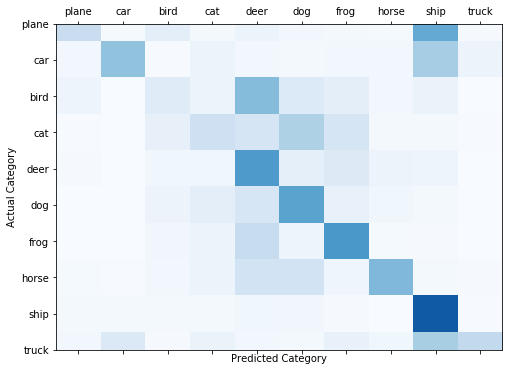

Category   - Accuracy
plane      - 22.9
car        - 40.3
bird       - 11.9
cat        - 20.8
deer       - 58.7
dog        - 54.8
frog       - 59.8
horse      - 45.1
ship       - 83.8
truck      - 26.0

Selected workers

[97 20 82 38 86 63 33 19 60 10 51 15 64 99 16]
Worker 97 : is  Stealthy_Attacker
Worker 20 : is  Honest
Worker 82 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 86 : is  Stealthy_Attacker
Worker 63 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 19 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 10 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 15 : is  Honest
Worker 64 : is  Honest
Worker 99 : is  Honest
Worker 16 : is  Stealthy_Attacker

 | Global Training Round : 4 |


Worker 97 starts training in Global Round:4 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  4


Train Epoch: 1 [0/500	(1%)]	Loss: 1.663767
Train Epoch: 1 [400/500	(81%)]	Loss: 1.498531
Train Epoch: 2 [0/500	(1%)]	Loss: 1.207630
Train Epoch: 2 [400/500	(81%)]	Loss: 1.395468
Train Epoch: 3 [0/500	(1%)]	Loss: 1.373766
Train Epoch: 3 [400/500	(81%)]	Loss: 1.497854
Train Epoch: 4 [0/500	(1%)]	Loss: 1.130250
Train Epoch: 4 [400/500	(81%)]	Loss: 1.198540
Train Epoch: 5 [0/500	(1%)]	Loss: 1.019136
Train Epoch: 5 [400/500	(81%)]	Loss: 1.025058

Performed attacks 1
Worker 97 ends training in Global Round:4 |

Worker 20 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.449008
Train Epoch: 1 [400/500	(81%)]	Loss: 1.584399
Train Epoch: 2 [0/500	(1%)]	Loss: 1.454283
Train Epoch: 2 [400/500	(81%)]	Loss: 1.595301
Train Epoch: 3 [0/500	(1%)]	Loss: 1.327411
Train Epoch: 3 [400/500	(81%)]	Loss: 1.676056
Train Epoch: 4 [0/500	(1%)]	Loss: 1.289179
Train Epoch: 4 [400/500	(81%)]	Loss: 1.194683
Train Epoch: 5 [0/500	(1%)]	Loss: 1.173087
Train Epoch: 5 [400/500	(81%)]	Loss: 1.108682

Worker 20 ends training in Global Round:4 |

Worker 82 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.615351
Train Epoch: 1 [400/500	(81%)]	Loss: 1.833700
Train Epoch: 2 [0/500	(1%)]	Loss: 1.334807
Train Epoch: 2 [400/500	(81%)]	Loss: 1.883110
Train Epoch: 3 [0/500	(1%)]	Loss: 1.401946
Train Epoch: 3 [400/500	(81%)]	Loss: 1.752568
Train Epoch: 4 [0/500	(1%)]	Loss: 1.092468
Train Epoch: 4 [400/500	(81%)]	Loss: 1.156302
Train Epoch: 5 [0/500	(1%)]	Loss: 1.074159
Train Epoch: 5 [400/500	(81%)]	Loss: 1.282392

Worker 82 ends training in Global Round:4 |

Worker 38 starts training in Global Round:4 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  4


Train Epoch: 1 [0/500	(1%)]	Loss: 1.937918
Train Epoch: 1 [400/500	(81%)]	Loss: 1.500471
Train Epoch: 2 [0/500	(1%)]	Loss: 1.504044
Train Epoch: 2 [400/500	(81%)]	Loss: 1.753417
Train Epoch: 3 [0/500	(1%)]	Loss: 1.292404
Train Epoch: 3 [400/500	(81%)]	Loss: 1.206369
Train Epoch: 4 [0/500	(1%)]	Loss: 1.271918
Train Epoch: 4 [400/500	(81%)]	Loss: 1.468978
Train Epoch: 5 [0/500	(1%)]	Loss: 1.236535
Train Epoch: 5 [400/500	(81%)]	Loss: 1.365251

Performed attacks 2
Worker 38 ends training in Global Round:4 |

Worker 86 starts training in Global Round:4 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  4


Train Epoch: 1 [0/500	(1%)]	Loss: 1.547404
Train Epoch: 1 [400/500	(81%)]	Loss: 1.407045
Train Epoch: 2 [0/500	(1%)]	Loss: 1.379937
Train Epoch: 2 [400/500	(81%)]	Loss: 1.840297
Train Epoch: 3 [0/500	(1%)]	Loss: 1.381255
Train Epoch: 3 [400/500	(81%)]	Loss: 1.307111
Train Epoch: 4 [0/500	(1%)]	Loss: 1.177853
Train Epoch: 4 [400/500	(81%)]	Loss: 1.444227
Train Epoch: 5 [0/500	(1%)]	Loss: 1.148186
Train Epoch: 5 [400/500	(81%)]	Loss: 1.363939

Performed attacks 3
Worker 86 ends training in Global Round:4 |

Worker 63 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.437785
Train Epoch: 1 [400/500	(81%)]	Loss: 1.805898
Train Epoch: 2 [0/500	(1%)]	Loss: 1.460841
Train Epoch: 2 [400/500	(81%)]	Loss: 1.533403
Train Epoch: 3 [0/500	(1%)]	Loss: 1.758864
Train Epoch: 3 [400/500	(81%)]	Loss: 1.315193
Train Epoch: 4 [0/500	(1%)]	Loss: 1.279660
Train Epoch: 4 [400/500	(81%)]	Loss: 1.309821
Train Epoch: 5 [0/500	(1%)]	Loss: 1.353318
Train Epoch: 5 [400/500	(81%)]	Loss: 1.285365

Worker 63 ends training in Global Round:4 |

Worker 33 starts training in Global Round:4 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  4


Train Epoch: 1 [0/500	(1%)]	Loss: 1.791319
Train Epoch: 1 [400/500	(81%)]	Loss: 1.762612
Train Epoch: 2 [0/500	(1%)]	Loss: 1.373713
Train Epoch: 2 [400/500	(81%)]	Loss: 1.406992
Train Epoch: 3 [0/500	(1%)]	Loss: 1.836822
Train Epoch: 3 [400/500	(81%)]	Loss: 1.642295
Train Epoch: 4 [0/500	(1%)]	Loss: 1.233362
Train Epoch: 4 [400/500	(81%)]	Loss: 1.618361
Train Epoch: 5 [0/500	(1%)]	Loss: 1.273244
Train Epoch: 5 [400/500	(81%)]	Loss: 1.334208

Performed attacks 4
Worker 33 ends training in Global Round:4 |

Worker 19 starts training in Global Round:4 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  4


Train Epoch: 1 [0/500	(1%)]	Loss: 1.615171
Train Epoch: 1 [400/500	(81%)]	Loss: 1.581564
Train Epoch: 2 [0/500	(1%)]	Loss: 1.190950
Train Epoch: 2 [400/500	(81%)]	Loss: 1.741168
Train Epoch: 3 [0/500	(1%)]	Loss: 1.364265
Train Epoch: 3 [400/500	(81%)]	Loss: 1.645567
Train Epoch: 4 [0/500	(1%)]	Loss: 1.319562
Train Epoch: 4 [400/500	(81%)]	Loss: 1.247196
Train Epoch: 5 [0/500	(1%)]	Loss: 1.197307
Train Epoch: 5 [400/500	(81%)]	Loss: 1.787115

Performed attacks 5
Worker 19 ends training in Global Round:4 |

Worker 60 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.562599
Train Epoch: 1 [400/500	(81%)]	Loss: 1.607555
Train Epoch: 2 [0/500	(1%)]	Loss: 1.426335
Train Epoch: 2 [400/500	(81%)]	Loss: 1.464230
Train Epoch: 3 [0/500	(1%)]	Loss: 1.312916
Train Epoch: 3 [400/500	(81%)]	Loss: 1.352144
Train Epoch: 4 [0/500	(1%)]	Loss: 1.091296
Train Epoch: 4 [400/500	(81%)]	Loss: 1.268917
Train Epoch: 5 [0/500	(1%)]	Loss: 1.127400
Train Epoch: 5 [400/500	(81%)]	Loss: 1.367793

Worker 60 ends training in Global Round:4 |

Worker 10 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.467475
Train Epoch: 1 [400/500	(81%)]	Loss: 1.734666
Train Epoch: 2 [0/500	(1%)]	Loss: 1.477039
Train Epoch: 2 [400/500	(81%)]	Loss: 1.591067
Train Epoch: 3 [0/500	(1%)]	Loss: 1.502642
Train Epoch: 3 [400/500	(81%)]	Loss: 1.513123
Train Epoch: 4 [0/500	(1%)]	Loss: 1.384715
Train Epoch: 4 [400/500	(81%)]	Loss: 1.364875
Train Epoch: 5 [0/500	(1%)]	Loss: 1.207394
Train Epoch: 5 [400/500	(81%)]	Loss: 1.507507

Worker 10 ends training in Global Round:4 |

Worker 51 starts training in Global Round:4 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  4


Train Epoch: 1 [0/500	(1%)]	Loss: 1.535890
Train Epoch: 1 [400/500	(81%)]	Loss: 1.666882
Train Epoch: 2 [0/500	(1%)]	Loss: 1.322703
Train Epoch: 2 [400/500	(81%)]	Loss: 1.512468
Train Epoch: 3 [0/500	(1%)]	Loss: 1.216502
Train Epoch: 3 [400/500	(81%)]	Loss: 1.371730
Train Epoch: 4 [0/500	(1%)]	Loss: 1.063465
Train Epoch: 4 [400/500	(81%)]	Loss: 1.275382
Train Epoch: 5 [0/500	(1%)]	Loss: 0.961256
Train Epoch: 5 [400/500	(81%)]	Loss: 0.897882

Performed attacks 6
Worker 51 ends training in Global Round:4 |

Worker 15 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.563179
Train Epoch: 1 [400/500	(81%)]	Loss: 1.727527
Train Epoch: 2 [0/500	(1%)]	Loss: 1.211388
Train Epoch: 2 [400/500	(81%)]	Loss: 1.472913
Train Epoch: 3 [0/500	(1%)]	Loss: 1.340305
Train Epoch: 3 [400/500	(81%)]	Loss: 1.669642
Train Epoch: 4 [0/500	(1%)]	Loss: 1.141999
Train Epoch: 4 [400/500	(81%)]	Loss: 1.213399
Train Epoch: 5 [0/500	(1%)]	Loss: 1.136511
Train Epoch: 5 [400/500	(81%)]	Loss: 1.414218

Worker 15 ends training in Global Round:4 |

Worker 64 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.419199
Train Epoch: 1 [400/500	(81%)]	Loss: 1.845262
Train Epoch: 2 [0/500	(1%)]	Loss: 1.655929
Train Epoch: 2 [400/500	(81%)]	Loss: 1.445606
Train Epoch: 3 [0/500	(1%)]	Loss: 1.447532
Train Epoch: 3 [400/500	(81%)]	Loss: 1.484543
Train Epoch: 4 [0/500	(1%)]	Loss: 1.225908
Train Epoch: 4 [400/500	(81%)]	Loss: 1.324936
Train Epoch: 5 [0/500	(1%)]	Loss: 1.706479
Train Epoch: 5 [400/500	(81%)]	Loss: 1.081690

Worker 64 ends training in Global Round:4 |

Worker 99 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.461068
Train Epoch: 1 [400/500	(81%)]	Loss: 1.666183
Train Epoch: 2 [0/500	(1%)]	Loss: 1.566836
Train Epoch: 2 [400/500	(81%)]	Loss: 1.615665
Train Epoch: 3 [0/500	(1%)]	Loss: 1.326788
Train Epoch: 3 [400/500	(81%)]	Loss: 1.435549
Train Epoch: 4 [0/500	(1%)]	Loss: 1.253539
Train Epoch: 4 [400/500	(81%)]	Loss: 1.468929
Train Epoch: 5 [0/500	(1%)]	Loss: 1.323350
Train Epoch: 5 [400/500	(81%)]	Loss: 1.313713

Worker 99 ends training in Global Round:4 |

Worker 16 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.911664
Train Epoch: 1 [400/500	(81%)]	Loss: 1.527708
Train Epoch: 2 [0/500	(1%)]	Loss: 1.480468
Train Epoch: 2 [400/500	(81%)]	Loss: 1.569527
Train Epoch: 3 [0/500	(1%)]	Loss: 1.453371
Train Epoch: 3 [400/500	(81%)]	Loss: 1.581216
Train Epoch: 4 [0/500	(1%)]	Loss: 1.405727
Train Epoch: 4 [400/500	(81%)]	Loss: 1.398656
Train Epoch: 5 [0/500	(1%)]	Loss: 1.231255
Train Epoch: 5 [400/500	(81%)]	Loss: 1.229760

Worker 16 ends training in Global Round:4 |
Last layer biases  [array([ 0.03126661, -0.02851988, -0.01875774,  0.02956306,  0.04106771,
       -0.01523585,  0.04464246, -0.02218665, -0.01152225, -0.03441641],
      dtype=float32), array([ 0.03059933, -0.03151304, -0.01803098,  0.03010169,  0.03390529,
       -0.01684256,  0.04150094, -0.00376988, -0.01216543, -0.0378843 ],
      dtype=float32), array([ 0.03141087, -0.0283881 , -0.02255489,  0.02871972,  0.03607673,
       -0.01629762,  0.04445958, -0.00713905, -0.01362152, -0.03676467],
      dtype

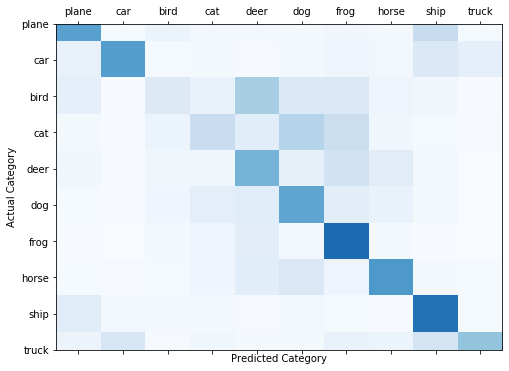

Category   - Accuracy
plane      - 55.7
car        - 57.0
bird       - 12.5
cat        - 22.7
deer       - 47.5
dog        - 53.8
frog       - 76.6
horse      - 59.1
ship       - 74.4
truck      - 40.0

Selected workers

[10 49 97 29 68 66  8 20 84 82 76 17 80 34 32]
Worker 10 : is  Honest
Worker 49 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 29 : is  Honest
Worker 68 : is  Honest
Worker 66 : is  Stealthy_Attacker
Worker 8 : is  Honest
Worker 20 : is  Honest
Worker 84 : is  Honest
Worker 82 : is  Honest
Worker 76 : is  Honest
Worker 17 : is  Honest
Worker 80 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 32 : is  Honest

 | Global Training Round : 5 |


Worker 10 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.582793
Train Epoch: 1 [400/500	(81%)]	Loss: 1.363233
Train Epoch: 2 [0/500	(1%)]	Loss: 1.254417
Train Epoch: 2 [400/500	(81%)]	Loss: 1.253046
Train Epoch: 3 [0/500	(1%)]	Loss: 1.017400
Train Epoch: 3 [400/500	(81%)]	Loss: 1.217869
Train Epoch: 4 [0/500	(1%)]	Loss: 0.912246
Train Epoch: 4 [400/500	(81%)]	Loss: 1.176164
Train Epoch: 5 [0/500	(1%)]	Loss: 0.787076
Train Epoch: 5 [400/500	(81%)]	Loss: 1.501682

Worker 10 ends training in Global Round:5 |

Worker 49 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.479558
Train Epoch: 1 [400/500	(81%)]	Loss: 1.576910
Train Epoch: 2 [0/500	(1%)]	Loss: 1.229238
Train Epoch: 2 [400/500	(81%)]	Loss: 1.373016
Train Epoch: 3 [0/500	(1%)]	Loss: 1.332885
Train Epoch: 3 [400/500	(81%)]	Loss: 1.262162
Train Epoch: 4 [0/500	(1%)]	Loss: 1.261008
Train Epoch: 4 [400/500	(81%)]	Loss: 1.567285
Train Epoch: 5 [0/500	(1%)]	Loss: 1.156238
Train Epoch: 5 [400/500	(81%)]	Loss: 1.314585

Worker 49 ends training in Global Round:5 |

Worker 97 starts training in Global Round:5 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  5


Train Epoch: 1 [0/500	(1%)]	Loss: 1.844390
Train Epoch: 1 [400/500	(81%)]	Loss: 1.378735
Train Epoch: 2 [0/500	(1%)]	Loss: 1.132105
Train Epoch: 2 [400/500	(81%)]	Loss: 1.359359
Train Epoch: 3 [0/500	(1%)]	Loss: 1.089187
Train Epoch: 3 [400/500	(81%)]	Loss: 1.184762
Train Epoch: 4 [0/500	(1%)]	Loss: 0.915792
Train Epoch: 4 [400/500	(81%)]	Loss: 1.028617
Train Epoch: 5 [0/500	(1%)]	Loss: 0.783175
Train Epoch: 5 [400/500	(81%)]	Loss: 1.304832

Performed attacks 1
Worker 97 ends training in Global Round:5 |

Worker 29 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.304818
Train Epoch: 1 [400/500	(81%)]	Loss: 1.517972
Train Epoch: 2 [0/500	(1%)]	Loss: 1.290705
Train Epoch: 2 [400/500	(81%)]	Loss: 1.302873
Train Epoch: 3 [0/500	(1%)]	Loss: 1.056112
Train Epoch: 3 [400/500	(81%)]	Loss: 1.182079
Train Epoch: 4 [0/500	(1%)]	Loss: 0.906001
Train Epoch: 4 [400/500	(81%)]	Loss: 1.517081
Train Epoch: 5 [0/500	(1%)]	Loss: 1.050609
Train Epoch: 5 [400/500	(81%)]	Loss: 1.060298

Worker 29 ends training in Global Round:5 |

Worker 68 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.724208
Train Epoch: 1 [400/500	(81%)]	Loss: 1.494599
Train Epoch: 2 [0/500	(1%)]	Loss: 1.415809
Train Epoch: 2 [400/500	(81%)]	Loss: 1.445250
Train Epoch: 3 [0/500	(1%)]	Loss: 1.207534
Train Epoch: 3 [400/500	(81%)]	Loss: 1.358402
Train Epoch: 4 [0/500	(1%)]	Loss: 1.044174
Train Epoch: 4 [400/500	(81%)]	Loss: 1.317638
Train Epoch: 5 [0/500	(1%)]	Loss: 1.249636
Train Epoch: 5 [400/500	(81%)]	Loss: 1.435455

Worker 68 ends training in Global Round:5 |

Worker 66 starts training in Global Round:5 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  5


Train Epoch: 1 [0/500	(1%)]	Loss: 1.609388
Train Epoch: 1 [400/500	(81%)]	Loss: 1.709001
Train Epoch: 2 [0/500	(1%)]	Loss: 1.264662
Train Epoch: 2 [400/500	(81%)]	Loss: 1.432285
Train Epoch: 3 [0/500	(1%)]	Loss: 1.413897
Train Epoch: 3 [400/500	(81%)]	Loss: 1.207510
Train Epoch: 4 [0/500	(1%)]	Loss: 1.312809
Train Epoch: 4 [400/500	(81%)]	Loss: 1.424883
Train Epoch: 5 [0/500	(1%)]	Loss: 1.228019
Train Epoch: 5 [400/500	(81%)]	Loss: 1.167012

Performed attacks 2
Worker 66 ends training in Global Round:5 |

Worker 8 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.387193
Train Epoch: 1 [400/500	(81%)]	Loss: 1.439353
Train Epoch: 2 [0/500	(1%)]	Loss: 1.191746
Train Epoch: 2 [400/500	(81%)]	Loss: 1.380028
Train Epoch: 3 [0/500	(1%)]	Loss: 1.194650
Train Epoch: 3 [400/500	(81%)]	Loss: 1.263606
Train Epoch: 4 [0/500	(1%)]	Loss: 1.023942
Train Epoch: 4 [400/500	(81%)]	Loss: 1.310488
Train Epoch: 5 [0/500	(1%)]	Loss: 0.918942
Train Epoch: 5 [400/500	(81%)]	Loss: 1.072387

Worker 8 ends training in Global Round:5 |

Worker 20 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.479674
Train Epoch: 1 [400/500	(81%)]	Loss: 1.251124
Train Epoch: 2 [0/500	(1%)]	Loss: 0.914806
Train Epoch: 2 [400/500	(81%)]	Loss: 1.235052
Train Epoch: 3 [0/500	(1%)]	Loss: 1.159229
Train Epoch: 3 [400/500	(81%)]	Loss: 1.127735
Train Epoch: 4 [0/500	(1%)]	Loss: 0.846486
Train Epoch: 4 [400/500	(81%)]	Loss: 1.180053
Train Epoch: 5 [0/500	(1%)]	Loss: 0.920471
Train Epoch: 5 [400/500	(81%)]	Loss: 1.064166

Worker 20 ends training in Global Round:5 |

Worker 84 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.395010
Train Epoch: 1 [400/500	(81%)]	Loss: 1.587582
Train Epoch: 2 [0/500	(1%)]	Loss: 1.397450
Train Epoch: 2 [400/500	(81%)]	Loss: 1.485498
Train Epoch: 3 [0/500	(1%)]	Loss: 1.391575
Train Epoch: 3 [400/500	(81%)]	Loss: 1.173797
Train Epoch: 4 [0/500	(1%)]	Loss: 1.122061
Train Epoch: 4 [400/500	(81%)]	Loss: 1.273381
Train Epoch: 5 [0/500	(1%)]	Loss: 1.049834
Train Epoch: 5 [400/500	(81%)]	Loss: 1.370140

Worker 84 ends training in Global Round:5 |

Worker 82 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.361299
Train Epoch: 1 [400/500	(81%)]	Loss: 1.488145
Train Epoch: 2 [0/500	(1%)]	Loss: 1.078074
Train Epoch: 2 [400/500	(81%)]	Loss: 1.229882
Train Epoch: 3 [0/500	(1%)]	Loss: 1.144440
Train Epoch: 3 [400/500	(81%)]	Loss: 1.308033
Train Epoch: 4 [0/500	(1%)]	Loss: 1.031835
Train Epoch: 4 [400/500	(81%)]	Loss: 1.057276
Train Epoch: 5 [0/500	(1%)]	Loss: 0.951766
Train Epoch: 5 [400/500	(81%)]	Loss: 1.229934

Worker 82 ends training in Global Round:5 |

Worker 76 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.322446
Train Epoch: 1 [400/500	(81%)]	Loss: 1.656674
Train Epoch: 2 [0/500	(1%)]	Loss: 1.184009
Train Epoch: 2 [400/500	(81%)]	Loss: 1.507803
Train Epoch: 3 [0/500	(1%)]	Loss: 1.080657
Train Epoch: 3 [400/500	(81%)]	Loss: 1.388938
Train Epoch: 4 [0/500	(1%)]	Loss: 1.237363
Train Epoch: 4 [400/500	(81%)]	Loss: 1.138164
Train Epoch: 5 [0/500	(1%)]	Loss: 0.851880
Train Epoch: 5 [400/500	(81%)]	Loss: 1.122581

Worker 76 ends training in Global Round:5 |

Worker 17 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.651411
Train Epoch: 1 [400/500	(81%)]	Loss: 1.514366
Train Epoch: 2 [0/500	(1%)]	Loss: 1.393213
Train Epoch: 2 [400/500	(81%)]	Loss: 1.445426
Train Epoch: 3 [0/500	(1%)]	Loss: 1.085484
Train Epoch: 3 [400/500	(81%)]	Loss: 1.398557
Train Epoch: 4 [0/500	(1%)]	Loss: 0.884208
Train Epoch: 4 [400/500	(81%)]	Loss: 1.255533
Train Epoch: 5 [0/500	(1%)]	Loss: 1.060310
Train Epoch: 5 [400/500	(81%)]	Loss: 1.351209

Worker 17 ends training in Global Round:5 |

Worker 80 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.361745
Train Epoch: 1 [400/500	(81%)]	Loss: 1.498289
Train Epoch: 2 [0/500	(1%)]	Loss: 1.341443
Train Epoch: 2 [400/500	(81%)]	Loss: 1.364796
Train Epoch: 3 [0/500	(1%)]	Loss: 1.214545
Train Epoch: 3 [400/500	(81%)]	Loss: 1.221244
Train Epoch: 4 [0/500	(1%)]	Loss: 0.927114
Train Epoch: 4 [400/500	(81%)]	Loss: 1.250676
Train Epoch: 5 [0/500	(1%)]	Loss: 0.857302
Train Epoch: 5 [400/500	(81%)]	Loss: 1.487948

Worker 80 ends training in Global Round:5 |

Worker 34 starts training in Global Round:5 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  5


Train Epoch: 1 [0/500	(1%)]	Loss: 1.695468
Train Epoch: 1 [400/500	(81%)]	Loss: 1.579487
Train Epoch: 2 [0/500	(1%)]	Loss: 1.230679
Train Epoch: 2 [400/500	(81%)]	Loss: 1.380204
Train Epoch: 3 [0/500	(1%)]	Loss: 1.199946
Train Epoch: 3 [400/500	(81%)]	Loss: 1.408201
Train Epoch: 4 [0/500	(1%)]	Loss: 1.197090
Train Epoch: 4 [400/500	(81%)]	Loss: 1.069446
Train Epoch: 5 [0/500	(1%)]	Loss: 1.098404
Train Epoch: 5 [400/500	(81%)]	Loss: 1.045294

Performed attacks 3
Worker 34 ends training in Global Round:5 |

Worker 32 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.896528
Train Epoch: 1 [400/500	(81%)]	Loss: 1.716231
Train Epoch: 2 [0/500	(1%)]	Loss: 1.298475
Train Epoch: 2 [400/500	(81%)]	Loss: 1.374383
Train Epoch: 3 [0/500	(1%)]	Loss: 1.318295
Train Epoch: 3 [400/500	(81%)]	Loss: 1.203936
Train Epoch: 4 [0/500	(1%)]	Loss: 1.220029
Train Epoch: 4 [400/500	(81%)]	Loss: 1.582092
Train Epoch: 5 [0/500	(1%)]	Loss: 1.055081
Train Epoch: 5 [400/500	(81%)]	Loss: 1.202561

Worker 32 ends training in Global Round:5 |
Last layer biases  [array([ 0.02856817, -0.02859776, -0.01845521,  0.03143341,  0.03740092,
       -0.01826555,  0.04029376, -0.0059712 , -0.01430024, -0.03620524],
      dtype=float32), array([ 0.03070254, -0.02687112, -0.01835801,  0.02791042,  0.03562511,
       -0.01772409,  0.04432824, -0.00537763, -0.01631822, -0.03801617],
      dtype=float32), array([ 0.03019382, -0.02883059, -0.01646703,  0.03228557,  0.03725695,
       -0.01718098,  0.04400574, -0.02218595, -0.01045397, -0.0327225 ],
      dtype

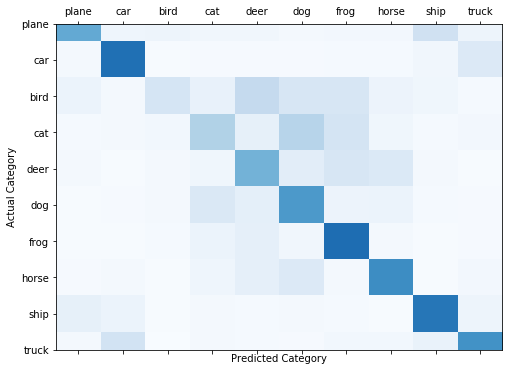

Category   - Accuracy
plane      - 52.1
car        - 75.1
bird       - 17.1
cat        - 31.3
deer       - 48.0
dog        - 59.3
frog       - 76.5
horse      - 64.3
ship       - 72.8
truck      - 62.3

Selected workers

[59 52 19 47  4 58 39 48 27 97  7 56 80 32 31]
Worker 59 : is  Stealthy_Attacker
Worker 52 : is  Stealthy_Attacker
Worker 19 : is  Stealthy_Attacker
Worker 47 : is  Honest
Worker 4 : is  Honest
Worker 58 : is  Honest
Worker 39 : is  Honest
Worker 48 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 97 : is  Stealthy_Attacker
Worker 7 : is  Honest
Worker 56 : is  Honest
Worker 80 : is  Honest
Worker 32 : is  Honest
Worker 31 : is  Stealthy_Attacker

 | Global Training Round : 6 |


Worker 59 starts training in Global Round:6 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  6


Train Epoch: 1 [0/500	(1%)]	Loss: 1.826059
Train Epoch: 1 [400/500	(81%)]	Loss: 1.338173
Train Epoch: 2 [0/500	(1%)]	Loss: 1.113282
Train Epoch: 2 [400/500	(81%)]	Loss: 1.230981
Train Epoch: 3 [0/500	(1%)]	Loss: 0.874923
Train Epoch: 3 [400/500	(81%)]	Loss: 0.966181
Train Epoch: 4 [0/500	(1%)]	Loss: 1.017265
Train Epoch: 4 [400/500	(81%)]	Loss: 0.872810
Train Epoch: 5 [0/500	(1%)]	Loss: 0.986331
Train Epoch: 5 [400/500	(81%)]	Loss: 0.778506

Performed attacks 1
Worker 59 ends training in Global Round:6 |

Worker 52 starts training in Global Round:6 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  6


Train Epoch: 1 [0/500	(1%)]	Loss: 1.352455
Train Epoch: 1 [400/500	(81%)]	Loss: 1.319356
Train Epoch: 2 [0/500	(1%)]	Loss: 1.154834
Train Epoch: 2 [400/500	(81%)]	Loss: 1.343459
Train Epoch: 3 [0/500	(1%)]	Loss: 0.978095
Train Epoch: 3 [400/500	(81%)]	Loss: 1.206790
Train Epoch: 4 [0/500	(1%)]	Loss: 1.026835
Train Epoch: 4 [400/500	(81%)]	Loss: 0.995600
Train Epoch: 5 [0/500	(1%)]	Loss: 0.858674
Train Epoch: 5 [400/500	(81%)]	Loss: 0.851324

Performed attacks 2
Worker 52 ends training in Global Round:6 |

Worker 19 starts training in Global Round:6 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  6


Train Epoch: 1 [0/500	(1%)]	Loss: 1.520587
Train Epoch: 1 [400/500	(81%)]	Loss: 1.614187
Train Epoch: 2 [0/500	(1%)]	Loss: 1.215386
Train Epoch: 2 [400/500	(81%)]	Loss: 1.411745
Train Epoch: 3 [0/500	(1%)]	Loss: 1.173721
Train Epoch: 3 [400/500	(81%)]	Loss: 0.995089
Train Epoch: 4 [0/500	(1%)]	Loss: 1.349149
Train Epoch: 4 [400/500	(81%)]	Loss: 0.960397
Train Epoch: 5 [0/500	(1%)]	Loss: 1.022087
Train Epoch: 5 [400/500	(81%)]	Loss: 0.956635

Performed attacks 3
Worker 19 ends training in Global Round:6 |

Worker 47 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.060431
Train Epoch: 1 [400/500	(81%)]	Loss: 1.485791
Train Epoch: 2 [0/500	(1%)]	Loss: 1.214859
Train Epoch: 2 [400/500	(81%)]	Loss: 1.071473
Train Epoch: 3 [0/500	(1%)]	Loss: 1.232158
Train Epoch: 3 [400/500	(81%)]	Loss: 1.225138
Train Epoch: 4 [0/500	(1%)]	Loss: 0.875698
Train Epoch: 4 [400/500	(81%)]	Loss: 0.946066
Train Epoch: 5 [0/500	(1%)]	Loss: 0.973420
Train Epoch: 5 [400/500	(81%)]	Loss: 1.077295

Worker 47 ends training in Global Round:6 |

Worker 4 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.136938
Train Epoch: 1 [400/500	(81%)]	Loss: 1.573597
Train Epoch: 2 [0/500	(1%)]	Loss: 0.913679
Train Epoch: 2 [400/500	(81%)]	Loss: 1.458007
Train Epoch: 3 [0/500	(1%)]	Loss: 1.108061
Train Epoch: 3 [400/500	(81%)]	Loss: 1.162222
Train Epoch: 4 [0/500	(1%)]	Loss: 0.906085
Train Epoch: 4 [400/500	(81%)]	Loss: 1.119643
Train Epoch: 5 [0/500	(1%)]	Loss: 1.042938
Train Epoch: 5 [400/500	(81%)]	Loss: 1.050923

Worker 4 ends training in Global Round:6 |

Worker 58 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.216233
Train Epoch: 1 [400/500	(81%)]	Loss: 1.398970
Train Epoch: 2 [0/500	(1%)]	Loss: 1.205238
Train Epoch: 2 [400/500	(81%)]	Loss: 1.513165
Train Epoch: 3 [0/500	(1%)]	Loss: 1.179311
Train Epoch: 3 [400/500	(81%)]	Loss: 1.108220
Train Epoch: 4 [0/500	(1%)]	Loss: 0.996598
Train Epoch: 4 [400/500	(81%)]	Loss: 1.035894
Train Epoch: 5 [0/500	(1%)]	Loss: 0.769808
Train Epoch: 5 [400/500	(81%)]	Loss: 1.107631

Worker 58 ends training in Global Round:6 |

Worker 39 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.051932
Train Epoch: 1 [400/500	(81%)]	Loss: 1.595934
Train Epoch: 2 [0/500	(1%)]	Loss: 0.938286
Train Epoch: 2 [400/500	(81%)]	Loss: 1.193472
Train Epoch: 3 [0/500	(1%)]	Loss: 1.048130
Train Epoch: 3 [400/500	(81%)]	Loss: 1.107974
Train Epoch: 4 [0/500	(1%)]	Loss: 0.829097
Train Epoch: 4 [400/500	(81%)]	Loss: 1.005718
Train Epoch: 5 [0/500	(1%)]	Loss: 0.979670
Train Epoch: 5 [400/500	(81%)]	Loss: 1.044170

Worker 39 ends training in Global Round:6 |

Worker 48 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.982302
Train Epoch: 1 [400/500	(81%)]	Loss: 1.415577
Train Epoch: 2 [0/500	(1%)]	Loss: 1.156745
Train Epoch: 2 [400/500	(81%)]	Loss: 1.276453
Train Epoch: 3 [0/500	(1%)]	Loss: 1.158247
Train Epoch: 3 [400/500	(81%)]	Loss: 1.159455
Train Epoch: 4 [0/500	(1%)]	Loss: 0.998328
Train Epoch: 4 [400/500	(81%)]	Loss: 1.578547
Train Epoch: 5 [0/500	(1%)]	Loss: 0.888002
Train Epoch: 5 [400/500	(81%)]	Loss: 1.073512

Worker 48 ends training in Global Round:6 |

Worker 27 starts training in Global Round:6 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  6


Train Epoch: 1 [0/500	(1%)]	Loss: 1.295477
Train Epoch: 1 [400/500	(81%)]	Loss: 1.487954
Train Epoch: 2 [0/500	(1%)]	Loss: 0.942512
Train Epoch: 2 [400/500	(81%)]	Loss: 1.188352
Train Epoch: 3 [0/500	(1%)]	Loss: 0.811875
Train Epoch: 3 [400/500	(81%)]	Loss: 0.980403
Train Epoch: 4 [0/500	(1%)]	Loss: 0.877673
Train Epoch: 4 [400/500	(81%)]	Loss: 1.001783
Train Epoch: 5 [0/500	(1%)]	Loss: 0.927373
Train Epoch: 5 [400/500	(81%)]	Loss: 1.151794

Performed attacks 4
Worker 27 ends training in Global Round:6 |

Worker 97 starts training in Global Round:6 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  6


Train Epoch: 1 [0/500	(1%)]	Loss: 1.331541
Train Epoch: 1 [400/500	(81%)]	Loss: 1.449063
Train Epoch: 2 [0/500	(1%)]	Loss: 0.894984
Train Epoch: 2 [400/500	(81%)]	Loss: 1.142094
Train Epoch: 3 [0/500	(1%)]	Loss: 1.017011
Train Epoch: 3 [400/500	(81%)]	Loss: 1.250296
Train Epoch: 4 [0/500	(1%)]	Loss: 1.195480
Train Epoch: 4 [400/500	(81%)]	Loss: 1.256853
Train Epoch: 5 [0/500	(1%)]	Loss: 0.949206
Train Epoch: 5 [400/500	(81%)]	Loss: 1.072101

Performed attacks 5
Worker 97 ends training in Global Round:6 |

Worker 7 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.038395
Train Epoch: 1 [400/500	(81%)]	Loss: 1.500675
Train Epoch: 2 [0/500	(1%)]	Loss: 1.058771
Train Epoch: 2 [400/500	(81%)]	Loss: 1.124098
Train Epoch: 3 [0/500	(1%)]	Loss: 1.014408
Train Epoch: 3 [400/500	(81%)]	Loss: 1.226921
Train Epoch: 4 [0/500	(1%)]	Loss: 0.809956
Train Epoch: 4 [400/500	(81%)]	Loss: 0.955174
Train Epoch: 5 [0/500	(1%)]	Loss: 1.184787
Train Epoch: 5 [400/500	(81%)]	Loss: 1.185901

Worker 7 ends training in Global Round:6 |

Worker 56 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.088132
Train Epoch: 1 [400/500	(81%)]	Loss: 1.302514
Train Epoch: 2 [0/500	(1%)]	Loss: 1.205820
Train Epoch: 2 [400/500	(81%)]	Loss: 1.559030
Train Epoch: 3 [0/500	(1%)]	Loss: 1.021662
Train Epoch: 3 [400/500	(81%)]	Loss: 1.128705
Train Epoch: 4 [0/500	(1%)]	Loss: 1.055181
Train Epoch: 4 [400/500	(81%)]	Loss: 1.086117
Train Epoch: 5 [0/500	(1%)]	Loss: 0.923398
Train Epoch: 5 [400/500	(81%)]	Loss: 0.861489

Worker 56 ends training in Global Round:6 |

Worker 80 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.224085
Train Epoch: 1 [400/500	(81%)]	Loss: 1.353989
Train Epoch: 2 [0/500	(1%)]	Loss: 1.048832
Train Epoch: 2 [400/500	(81%)]	Loss: 1.170681
Train Epoch: 3 [0/500	(1%)]	Loss: 0.996957
Train Epoch: 3 [400/500	(81%)]	Loss: 1.190740
Train Epoch: 4 [0/500	(1%)]	Loss: 0.852808
Train Epoch: 4 [400/500	(81%)]	Loss: 1.182867
Train Epoch: 5 [0/500	(1%)]	Loss: 0.937897
Train Epoch: 5 [400/500	(81%)]	Loss: 0.868310

Worker 80 ends training in Global Round:6 |

Worker 32 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.009988
Train Epoch: 1 [400/500	(81%)]	Loss: 1.668871
Train Epoch: 2 [0/500	(1%)]	Loss: 1.189223
Train Epoch: 2 [400/500	(81%)]	Loss: 1.204558
Train Epoch: 3 [0/500	(1%)]	Loss: 1.034832
Train Epoch: 3 [400/500	(81%)]	Loss: 1.099927
Train Epoch: 4 [0/500	(1%)]	Loss: 0.933681
Train Epoch: 4 [400/500	(81%)]	Loss: 1.092936
Train Epoch: 5 [0/500	(1%)]	Loss: 0.904455
Train Epoch: 5 [400/500	(81%)]	Loss: 1.055923

Worker 32 ends training in Global Round:6 |

Worker 31 starts training in Global Round:6 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  6


Train Epoch: 1 [0/500	(1%)]	Loss: 1.397635
Train Epoch: 1 [400/500	(81%)]	Loss: 1.143219
Train Epoch: 2 [0/500	(1%)]	Loss: 0.988836
Train Epoch: 2 [400/500	(81%)]	Loss: 0.974805
Train Epoch: 3 [0/500	(1%)]	Loss: 0.929871
Train Epoch: 3 [400/500	(81%)]	Loss: 1.305234
Train Epoch: 4 [0/500	(1%)]	Loss: 0.890033
Train Epoch: 4 [400/500	(81%)]	Loss: 1.378845
Train Epoch: 5 [0/500	(1%)]	Loss: 1.278189
Train Epoch: 5 [400/500	(81%)]	Loss: 1.282468

Performed attacks 6
Worker 31 ends training in Global Round:6 |
Last layer biases  [array([ 0.02760993, -0.02638246, -0.01583765,  0.0316984 ,  0.03831905,
       -0.01514749,  0.04484021, -0.02368634, -0.01216902, -0.03334355],
      dtype=float32), array([ 0.03230046, -0.02975249, -0.01835528,  0.03193246,  0.03790237,
       -0.01747867,  0.04646931, -0.02344426, -0.01158208, -0.03209073],
      dtype=float32), array([ 0.03524302, -0.02478629, -0.01688645,  0.0303698 ,  0.03947444,
       -0.01654666,  0.04425824, -0.02362006, -0.01490396, -0.03

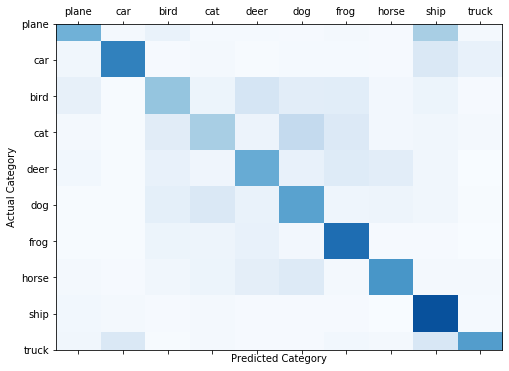

Category   - Accuracy
plane      - 48.5
car        - 68.5
bird       - 39.6
cat        - 34.1
deer       - 51.0
dog        - 55.3
frog       - 76.5
horse      - 60.5
ship       - 87.2
truck      - 57.1

Selected workers

[96 80 36 43  4 77 39 60 35 66 32 64 67 30 73]
Worker 96 : is  Honest
Worker 80 : is  Honest
Worker 36 : is  Honest
Worker 43 : is  Honest
Worker 4 : is  Honest
Worker 77 : is  Honest
Worker 39 : is  Honest
Worker 60 : is  Honest
Worker 35 : is  Honest
Worker 66 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 64 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 73 : is  Honest

 | Global Training Round : 7 |


Worker 96 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.222565
Train Epoch: 1 [400/500	(81%)]	Loss: 1.088981
Train Epoch: 2 [0/500	(1%)]	Loss: 0.969805
Train Epoch: 2 [400/500	(81%)]	Loss: 1.034351
Train Epoch: 3 [0/500	(1%)]	Loss: 0.979009
Train Epoch: 3 [400/500	(81%)]	Loss: 1.040379
Train Epoch: 4 [0/500	(1%)]	Loss: 0.824478
Train Epoch: 4 [400/500	(81%)]	Loss: 0.974017
Train Epoch: 5 [0/500	(1%)]	Loss: 0.748104
Train Epoch: 5 [400/500	(81%)]	Loss: 0.928171

Worker 96 ends training in Global Round:7 |

Worker 80 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.865756
Train Epoch: 1 [400/500	(81%)]	Loss: 1.276583
Train Epoch: 2 [0/500	(1%)]	Loss: 0.878797
Train Epoch: 2 [400/500	(81%)]	Loss: 1.083974
Train Epoch: 3 [0/500	(1%)]	Loss: 0.845837
Train Epoch: 3 [400/500	(81%)]	Loss: 0.992535
Train Epoch: 4 [0/500	(1%)]	Loss: 0.861057
Train Epoch: 4 [400/500	(81%)]	Loss: 0.955113
Train Epoch: 5 [0/500	(1%)]	Loss: 0.731897
Train Epoch: 5 [400/500	(81%)]	Loss: 1.080717

Worker 80 ends training in Global Round:7 |

Worker 36 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.339102
Train Epoch: 1 [400/500	(81%)]	Loss: 1.434196
Train Epoch: 2 [0/500	(1%)]	Loss: 0.866913
Train Epoch: 2 [400/500	(81%)]	Loss: 1.199787
Train Epoch: 3 [0/500	(1%)]	Loss: 0.880818
Train Epoch: 3 [400/500	(81%)]	Loss: 1.238254
Train Epoch: 4 [0/500	(1%)]	Loss: 0.959142
Train Epoch: 4 [400/500	(81%)]	Loss: 1.191751
Train Epoch: 5 [0/500	(1%)]	Loss: 0.925703
Train Epoch: 5 [400/500	(81%)]	Loss: 1.241808

Worker 36 ends training in Global Round:7 |

Worker 43 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.120488
Train Epoch: 1 [400/500	(81%)]	Loss: 1.483629
Train Epoch: 2 [0/500	(1%)]	Loss: 0.978181
Train Epoch: 2 [400/500	(81%)]	Loss: 1.397312
Train Epoch: 3 [0/500	(1%)]	Loss: 0.967343
Train Epoch: 3 [400/500	(81%)]	Loss: 1.156926
Train Epoch: 4 [0/500	(1%)]	Loss: 0.726594
Train Epoch: 4 [400/500	(81%)]	Loss: 0.946656
Train Epoch: 5 [0/500	(1%)]	Loss: 0.700407
Train Epoch: 5 [400/500	(81%)]	Loss: 0.974107

Worker 43 ends training in Global Round:7 |

Worker 4 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.128810
Train Epoch: 1 [400/500	(81%)]	Loss: 1.416246
Train Epoch: 2 [0/500	(1%)]	Loss: 0.976863
Train Epoch: 2 [400/500	(81%)]	Loss: 1.188045
Train Epoch: 3 [0/500	(1%)]	Loss: 0.939538
Train Epoch: 3 [400/500	(81%)]	Loss: 1.086670
Train Epoch: 4 [0/500	(1%)]	Loss: 0.963936
Train Epoch: 4 [400/500	(81%)]	Loss: 1.078442
Train Epoch: 5 [0/500	(1%)]	Loss: 0.684387
Train Epoch: 5 [400/500	(81%)]	Loss: 1.043206

Worker 4 ends training in Global Round:7 |

Worker 77 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.188365
Train Epoch: 1 [400/500	(81%)]	Loss: 1.298463
Train Epoch: 2 [0/500	(1%)]	Loss: 0.959568
Train Epoch: 2 [400/500	(81%)]	Loss: 1.293438
Train Epoch: 3 [0/500	(1%)]	Loss: 1.073344
Train Epoch: 3 [400/500	(81%)]	Loss: 1.147553
Train Epoch: 4 [0/500	(1%)]	Loss: 0.878460
Train Epoch: 4 [400/500	(81%)]	Loss: 0.941936
Train Epoch: 5 [0/500	(1%)]	Loss: 0.902969
Train Epoch: 5 [400/500	(81%)]	Loss: 0.883779

Worker 77 ends training in Global Round:7 |

Worker 39 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.072758
Train Epoch: 1 [400/500	(81%)]	Loss: 1.421906
Train Epoch: 2 [0/500	(1%)]	Loss: 0.845524
Train Epoch: 2 [400/500	(81%)]	Loss: 0.921887
Train Epoch: 3 [0/500	(1%)]	Loss: 0.811505
Train Epoch: 3 [400/500	(81%)]	Loss: 1.071072
Train Epoch: 4 [0/500	(1%)]	Loss: 0.729247
Train Epoch: 4 [400/500	(81%)]	Loss: 0.959110
Train Epoch: 5 [0/500	(1%)]	Loss: 0.549673
Train Epoch: 5 [400/500	(81%)]	Loss: 0.796628

Worker 39 ends training in Global Round:7 |

Worker 60 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.071749
Train Epoch: 1 [400/500	(81%)]	Loss: 1.433681
Train Epoch: 2 [0/500	(1%)]	Loss: 1.170638
Train Epoch: 2 [400/500	(81%)]	Loss: 1.231759
Train Epoch: 3 [0/500	(1%)]	Loss: 1.026121
Train Epoch: 3 [400/500	(81%)]	Loss: 1.119921
Train Epoch: 4 [0/500	(1%)]	Loss: 0.955080
Train Epoch: 4 [400/500	(81%)]	Loss: 1.102293
Train Epoch: 5 [0/500	(1%)]	Loss: 0.660224
Train Epoch: 5 [400/500	(81%)]	Loss: 0.947708

Worker 60 ends training in Global Round:7 |

Worker 35 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.200116
Train Epoch: 1 [400/500	(81%)]	Loss: 1.284141
Train Epoch: 2 [0/500	(1%)]	Loss: 1.328372
Train Epoch: 2 [400/500	(81%)]	Loss: 1.100196
Train Epoch: 3 [0/500	(1%)]	Loss: 1.022104
Train Epoch: 3 [400/500	(81%)]	Loss: 0.876957
Train Epoch: 4 [0/500	(1%)]	Loss: 0.813042
Train Epoch: 4 [400/500	(81%)]	Loss: 0.895103
Train Epoch: 5 [0/500	(1%)]	Loss: 0.896915
Train Epoch: 5 [400/500	(81%)]	Loss: 1.063843

Worker 35 ends training in Global Round:7 |

Worker 66 starts training in Global Round:7 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  7


Train Epoch: 1 [0/500	(1%)]	Loss: 1.410633
Train Epoch: 1 [400/500	(81%)]	Loss: 1.533086
Train Epoch: 2 [0/500	(1%)]	Loss: 1.102904
Train Epoch: 2 [400/500	(81%)]	Loss: 1.228814
Train Epoch: 3 [0/500	(1%)]	Loss: 1.063806
Train Epoch: 3 [400/500	(81%)]	Loss: 0.927532
Train Epoch: 4 [0/500	(1%)]	Loss: 0.768502
Train Epoch: 4 [400/500	(81%)]	Loss: 1.025060
Train Epoch: 5 [0/500	(1%)]	Loss: 0.672904
Train Epoch: 5 [400/500	(81%)]	Loss: 0.826301

Performed attacks 1
Worker 66 ends training in Global Round:7 |

Worker 32 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.085349
Train Epoch: 1 [400/500	(81%)]	Loss: 1.345560
Train Epoch: 2 [0/500	(1%)]	Loss: 0.765713
Train Epoch: 2 [400/500	(81%)]	Loss: 1.409653
Train Epoch: 3 [0/500	(1%)]	Loss: 0.973544
Train Epoch: 3 [400/500	(81%)]	Loss: 1.086804
Train Epoch: 4 [0/500	(1%)]	Loss: 1.089419
Train Epoch: 4 [400/500	(81%)]	Loss: 0.903246
Train Epoch: 5 [0/500	(1%)]	Loss: 0.722744
Train Epoch: 5 [400/500	(81%)]	Loss: 0.982332

Worker 32 ends training in Global Round:7 |

Worker 64 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.199378
Train Epoch: 1 [400/500	(81%)]	Loss: 1.309723
Train Epoch: 2 [0/500	(1%)]	Loss: 0.938103
Train Epoch: 2 [400/500	(81%)]	Loss: 1.376160
Train Epoch: 3 [0/500	(1%)]	Loss: 0.982558
Train Epoch: 3 [400/500	(81%)]	Loss: 1.155961
Train Epoch: 4 [0/500	(1%)]	Loss: 0.721472
Train Epoch: 4 [400/500	(81%)]	Loss: 1.020874
Train Epoch: 5 [0/500	(1%)]	Loss: 0.883329
Train Epoch: 5 [400/500	(81%)]	Loss: 0.928499

Worker 64 ends training in Global Round:7 |

Worker 67 starts training in Global Round:7 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  7


Train Epoch: 1 [0/500	(1%)]	Loss: 1.609175
Train Epoch: 1 [400/500	(81%)]	Loss: 1.432739
Train Epoch: 2 [0/500	(1%)]	Loss: 1.127909
Train Epoch: 2 [400/500	(81%)]	Loss: 1.372332
Train Epoch: 3 [0/500	(1%)]	Loss: 0.968761
Train Epoch: 3 [400/500	(81%)]	Loss: 0.918872
Train Epoch: 4 [0/500	(1%)]	Loss: 0.763138
Train Epoch: 4 [400/500	(81%)]	Loss: 0.955040
Train Epoch: 5 [0/500	(1%)]	Loss: 0.801505
Train Epoch: 5 [400/500	(81%)]	Loss: 0.773764

Performed attacks 2
Worker 67 ends training in Global Round:7 |

Worker 30 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.969761
Train Epoch: 1 [400/500	(81%)]	Loss: 1.489614
Train Epoch: 2 [0/500	(1%)]	Loss: 1.308461
Train Epoch: 2 [400/500	(81%)]	Loss: 1.211272
Train Epoch: 3 [0/500	(1%)]	Loss: 1.100037
Train Epoch: 3 [400/500	(81%)]	Loss: 1.107299
Train Epoch: 4 [0/500	(1%)]	Loss: 0.894531
Train Epoch: 4 [400/500	(81%)]	Loss: 1.045038
Train Epoch: 5 [0/500	(1%)]	Loss: 0.765723
Train Epoch: 5 [400/500	(81%)]	Loss: 1.060556

Worker 30 ends training in Global Round:7 |

Worker 73 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.433991
Train Epoch: 1 [400/500	(81%)]	Loss: 1.270967
Train Epoch: 2 [0/500	(1%)]	Loss: 0.986487
Train Epoch: 2 [400/500	(81%)]	Loss: 1.340403
Train Epoch: 3 [0/500	(1%)]	Loss: 0.993570
Train Epoch: 3 [400/500	(81%)]	Loss: 0.956728
Train Epoch: 4 [0/500	(1%)]	Loss: 0.779828
Train Epoch: 4 [400/500	(81%)]	Loss: 1.002522
Train Epoch: 5 [0/500	(1%)]	Loss: 0.689696
Train Epoch: 5 [400/500	(81%)]	Loss: 1.024210

Worker 73 ends training in Global Round:7 |
Last layer biases  [array([ 0.03071372, -0.02742005, -0.02178249,  0.03037579,  0.03589536,
       -0.01764303,  0.04352584, -0.00765116, -0.01409231, -0.03602057],
      dtype=float32), array([ 0.02835858, -0.02738678, -0.01783332,  0.03008797,  0.03559929,
       -0.01826072,  0.04297112, -0.00538287, -0.01304812, -0.03920405],
      dtype=float32), array([ 0.03002617, -0.0269469 , -0.01870708,  0.03077136,  0.03528626,
       -0.01627505,  0.04297264, -0.00907828, -0.01486032, -0.03728768],
      dtype

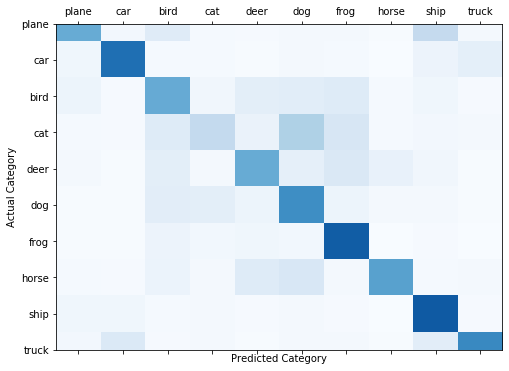

Category   - Accuracy
plane      - 50.9
car        - 75.7
bird       - 51.5
cat        - 25.4
deer       - 51.1
dog        - 63.8
frog       - 82.5
horse      - 55.7
ship       - 83.9
truck      - 65.9

Selected workers

[73 67 34 80 51 81 88 56 44 82 38 42 98 59 76]
Worker 73 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 80 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 88 : is  Honest
Worker 56 : is  Honest
Worker 44 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 59 : is  Stealthy_Attacker
Worker 76 : is  Honest

 | Global Training Round : 8 |


Worker 73 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.016193
Train Epoch: 1 [400/500	(81%)]	Loss: 1.467137
Train Epoch: 2 [0/500	(1%)]	Loss: 0.882340
Train Epoch: 2 [400/500	(81%)]	Loss: 1.258286
Train Epoch: 3 [0/500	(1%)]	Loss: 0.869889
Train Epoch: 3 [400/500	(81%)]	Loss: 0.991634
Train Epoch: 4 [0/500	(1%)]	Loss: 0.868150
Train Epoch: 4 [400/500	(81%)]	Loss: 0.896615
Train Epoch: 5 [0/500	(1%)]	Loss: 0.520462
Train Epoch: 5 [400/500	(81%)]	Loss: 0.743539

Worker 73 ends training in Global Round:8 |

Worker 67 starts training in Global Round:8 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  8


Train Epoch: 1 [0/500	(1%)]	Loss: 1.486649
Train Epoch: 1 [400/500	(81%)]	Loss: 1.335956
Train Epoch: 2 [0/500	(1%)]	Loss: 0.963840
Train Epoch: 2 [400/500	(81%)]	Loss: 1.307276
Train Epoch: 3 [0/500	(1%)]	Loss: 0.923008
Train Epoch: 3 [400/500	(81%)]	Loss: 1.098503
Train Epoch: 4 [0/500	(1%)]	Loss: 0.836591
Train Epoch: 4 [400/500	(81%)]	Loss: 0.962674
Train Epoch: 5 [0/500	(1%)]	Loss: 0.720126
Train Epoch: 5 [400/500	(81%)]	Loss: 0.891152

Performed attacks 1
Worker 67 ends training in Global Round:8 |

Worker 34 starts training in Global Round:8 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  8


Train Epoch: 1 [0/500	(1%)]	Loss: 1.392279
Train Epoch: 1 [400/500	(81%)]	Loss: 1.725208
Train Epoch: 2 [0/500	(1%)]	Loss: 0.963843
Train Epoch: 2 [400/500	(81%)]	Loss: 1.109931
Train Epoch: 3 [0/500	(1%)]	Loss: 0.764530
Train Epoch: 3 [400/500	(81%)]	Loss: 1.123910
Train Epoch: 4 [0/500	(1%)]	Loss: 0.752445
Train Epoch: 4 [400/500	(81%)]	Loss: 0.967563
Train Epoch: 5 [0/500	(1%)]	Loss: 0.924294
Train Epoch: 5 [400/500	(81%)]	Loss: 0.863389

Performed attacks 2
Worker 34 ends training in Global Round:8 |

Worker 80 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.985210
Train Epoch: 1 [400/500	(81%)]	Loss: 0.985851
Train Epoch: 2 [0/500	(1%)]	Loss: 0.901651
Train Epoch: 2 [400/500	(81%)]	Loss: 0.838916
Train Epoch: 3 [0/500	(1%)]	Loss: 0.727918
Train Epoch: 3 [400/500	(81%)]	Loss: 0.859542
Train Epoch: 4 [0/500	(1%)]	Loss: 0.790024
Train Epoch: 4 [400/500	(81%)]	Loss: 0.880752
Train Epoch: 5 [0/500	(1%)]	Loss: 0.526096
Train Epoch: 5 [400/500	(81%)]	Loss: 1.112105

Worker 80 ends training in Global Round:8 |

Worker 51 starts training in Global Round:8 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  8


Train Epoch: 1 [0/500	(1%)]	Loss: 1.311062
Train Epoch: 1 [400/500	(81%)]	Loss: 1.189440
Train Epoch: 2 [0/500	(1%)]	Loss: 0.919345
Train Epoch: 2 [400/500	(81%)]	Loss: 1.243897
Train Epoch: 3 [0/500	(1%)]	Loss: 0.882580
Train Epoch: 3 [400/500	(81%)]	Loss: 0.745740
Train Epoch: 4 [0/500	(1%)]	Loss: 0.566020
Train Epoch: 4 [400/500	(81%)]	Loss: 0.937245
Train Epoch: 5 [0/500	(1%)]	Loss: 0.798174
Train Epoch: 5 [400/500	(81%)]	Loss: 0.898053

Performed attacks 3
Worker 51 ends training in Global Round:8 |

Worker 81 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.168409
Train Epoch: 1 [400/500	(81%)]	Loss: 1.369871
Train Epoch: 2 [0/500	(1%)]	Loss: 0.864059
Train Epoch: 2 [400/500	(81%)]	Loss: 1.130621
Train Epoch: 3 [0/500	(1%)]	Loss: 0.952456
Train Epoch: 3 [400/500	(81%)]	Loss: 0.947950
Train Epoch: 4 [0/500	(1%)]	Loss: 0.731786
Train Epoch: 4 [400/500	(81%)]	Loss: 0.891155
Train Epoch: 5 [0/500	(1%)]	Loss: 0.713848
Train Epoch: 5 [400/500	(81%)]	Loss: 0.836318

Worker 81 ends training in Global Round:8 |

Worker 88 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.009074
Train Epoch: 1 [400/500	(81%)]	Loss: 1.241758
Train Epoch: 2 [0/500	(1%)]	Loss: 0.824060
Train Epoch: 2 [400/500	(81%)]	Loss: 1.220460
Train Epoch: 3 [0/500	(1%)]	Loss: 0.832956
Train Epoch: 3 [400/500	(81%)]	Loss: 0.956718
Train Epoch: 4 [0/500	(1%)]	Loss: 0.788777
Train Epoch: 4 [400/500	(81%)]	Loss: 0.852384
Train Epoch: 5 [0/500	(1%)]	Loss: 0.742341
Train Epoch: 5 [400/500	(81%)]	Loss: 0.846080

Worker 88 ends training in Global Round:8 |

Worker 56 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.944242
Train Epoch: 1 [400/500	(81%)]	Loss: 1.170784
Train Epoch: 2 [0/500	(1%)]	Loss: 1.011146
Train Epoch: 2 [400/500	(81%)]	Loss: 0.893841
Train Epoch: 3 [0/500	(1%)]	Loss: 0.826434
Train Epoch: 3 [400/500	(81%)]	Loss: 0.884997
Train Epoch: 4 [0/500	(1%)]	Loss: 0.982238
Train Epoch: 4 [400/500	(81%)]	Loss: 1.003828
Train Epoch: 5 [0/500	(1%)]	Loss: 0.636227
Train Epoch: 5 [400/500	(81%)]	Loss: 0.932391

Worker 56 ends training in Global Round:8 |

Worker 44 starts training in Global Round:8 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  8


Train Epoch: 1 [0/500	(1%)]	Loss: 1.484840
Train Epoch: 1 [400/500	(81%)]	Loss: 1.251401
Train Epoch: 2 [0/500	(1%)]	Loss: 0.895515
Train Epoch: 2 [400/500	(81%)]	Loss: 1.220632
Train Epoch: 3 [0/500	(1%)]	Loss: 1.009630
Train Epoch: 3 [400/500	(81%)]	Loss: 1.163683
Train Epoch: 4 [0/500	(1%)]	Loss: 1.022552
Train Epoch: 4 [400/500	(81%)]	Loss: 0.997527
Train Epoch: 5 [0/500	(1%)]	Loss: 0.841068
Train Epoch: 5 [400/500	(81%)]	Loss: 0.996289

Performed attacks 4
Worker 44 ends training in Global Round:8 |

Worker 82 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.220254
Train Epoch: 1 [400/500	(81%)]	Loss: 1.125578
Train Epoch: 2 [0/500	(1%)]	Loss: 0.842623
Train Epoch: 2 [400/500	(81%)]	Loss: 1.203528
Train Epoch: 3 [0/500	(1%)]	Loss: 0.843395
Train Epoch: 3 [400/500	(81%)]	Loss: 0.987127
Train Epoch: 4 [0/500	(1%)]	Loss: 0.625115
Train Epoch: 4 [400/500	(81%)]	Loss: 0.856636
Train Epoch: 5 [0/500	(1%)]	Loss: 0.649966
Train Epoch: 5 [400/500	(81%)]	Loss: 0.728240

Worker 82 ends training in Global Round:8 |

Worker 38 starts training in Global Round:8 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  8


Train Epoch: 1 [0/500	(1%)]	Loss: 1.430524
Train Epoch: 1 [400/500	(81%)]	Loss: 1.638978
Train Epoch: 2 [0/500	(1%)]	Loss: 0.933463
Train Epoch: 2 [400/500	(81%)]	Loss: 1.227373
Train Epoch: 3 [0/500	(1%)]	Loss: 0.940591
Train Epoch: 3 [400/500	(81%)]	Loss: 0.925961
Train Epoch: 4 [0/500	(1%)]	Loss: 0.744964
Train Epoch: 4 [400/500	(81%)]	Loss: 1.307162
Train Epoch: 5 [0/500	(1%)]	Loss: 0.702328
Train Epoch: 5 [400/500	(81%)]	Loss: 0.817025

Performed attacks 5
Worker 38 ends training in Global Round:8 |

Worker 42 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.094687
Train Epoch: 1 [400/500	(81%)]	Loss: 1.059499
Train Epoch: 2 [0/500	(1%)]	Loss: 0.894759
Train Epoch: 2 [400/500	(81%)]	Loss: 1.181400
Train Epoch: 3 [0/500	(1%)]	Loss: 0.837651
Train Epoch: 3 [400/500	(81%)]	Loss: 0.964116
Train Epoch: 4 [0/500	(1%)]	Loss: 0.702427
Train Epoch: 4 [400/500	(81%)]	Loss: 1.098137
Train Epoch: 5 [0/500	(1%)]	Loss: 0.749223
Train Epoch: 5 [400/500	(81%)]	Loss: 0.836090

Worker 42 ends training in Global Round:8 |

Worker 98 starts training in Global Round:8 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  8


Train Epoch: 1 [0/500	(1%)]	Loss: 1.404037
Train Epoch: 1 [400/500	(81%)]	Loss: 1.133572
Train Epoch: 2 [0/500	(1%)]	Loss: 1.136883
Train Epoch: 2 [400/500	(81%)]	Loss: 1.441726
Train Epoch: 3 [0/500	(1%)]	Loss: 1.012164
Train Epoch: 3 [400/500	(81%)]	Loss: 0.965625
Train Epoch: 4 [0/500	(1%)]	Loss: 0.925546
Train Epoch: 4 [400/500	(81%)]	Loss: 1.146463
Train Epoch: 5 [0/500	(1%)]	Loss: 0.893809
Train Epoch: 5 [400/500	(81%)]	Loss: 0.972919

Performed attacks 6
Worker 98 ends training in Global Round:8 |

Worker 59 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.125592
Train Epoch: 1 [400/500	(81%)]	Loss: 1.443199
Train Epoch: 2 [0/500	(1%)]	Loss: 1.023466
Train Epoch: 2 [400/500	(81%)]	Loss: 1.016169
Train Epoch: 3 [0/500	(1%)]	Loss: 0.967095
Train Epoch: 3 [400/500	(81%)]	Loss: 0.847853
Train Epoch: 4 [0/500	(1%)]	Loss: 0.696682
Train Epoch: 4 [400/500	(81%)]	Loss: 1.042255
Train Epoch: 5 [0/500	(1%)]	Loss: 0.655406
Train Epoch: 5 [400/500	(81%)]	Loss: 0.841686

Worker 59 ends training in Global Round:8 |

Worker 76 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.223590
Train Epoch: 1 [400/500	(81%)]	Loss: 1.105291
Train Epoch: 2 [0/500	(1%)]	Loss: 0.935927
Train Epoch: 2 [400/500	(81%)]	Loss: 1.123123
Train Epoch: 3 [0/500	(1%)]	Loss: 0.985465
Train Epoch: 3 [400/500	(81%)]	Loss: 0.900545
Train Epoch: 4 [0/500	(1%)]	Loss: 0.845242
Train Epoch: 4 [400/500	(81%)]	Loss: 1.072388
Train Epoch: 5 [0/500	(1%)]	Loss: 0.990717
Train Epoch: 5 [400/500	(81%)]	Loss: 1.415344

Worker 76 ends training in Global Round:8 |
Last layer biases  [array([ 0.03026637, -0.02886273, -0.01812846,  0.030092  ,  0.03413005,
       -0.01552398,  0.04513824, -0.00857251, -0.01437193, -0.03826593],
      dtype=float32), array([ 0.03523141, -0.02739239, -0.01832711,  0.03377043,  0.03925222,
       -0.01758439,  0.04298759, -0.02266024, -0.01327659, -0.03609981],
      dtype=float32), array([ 0.03114321, -0.0273674 , -0.01806278,  0.03383377,  0.04116485,
       -0.01857623,  0.04677555, -0.02409853, -0.01424826, -0.03466305],
      dtype

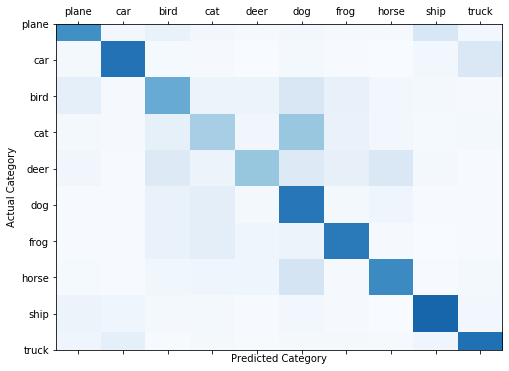

Category   - Accuracy
plane      - 63.2
car        - 74.5
bird       - 51.0
cat        - 34.7
deer       - 39.3
dog        - 72.6
frog       - 71.2
horse      - 64.9
ship       - 79.6
truck      - 75.0

Selected workers

[20 59 19  2  1 12 55 10 76 51 24 99 57 92 98]
Worker 20 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 19 : is  Stealthy_Attacker
Worker 2 : is  Honest
Worker 1 : is  Honest
Worker 12 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 10 : is  Honest
Worker 76 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 24 : is  Honest
Worker 99 : is  Honest
Worker 57 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker

 | Global Training Round : 9 |


Worker 20 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.934172
Train Epoch: 1 [400/500	(81%)]	Loss: 1.227044
Train Epoch: 2 [0/500	(1%)]	Loss: 0.803808
Train Epoch: 2 [400/500	(81%)]	Loss: 0.952566
Train Epoch: 3 [0/500	(1%)]	Loss: 0.670567
Train Epoch: 3 [400/500	(81%)]	Loss: 0.841449
Train Epoch: 4 [0/500	(1%)]	Loss: 0.591792
Train Epoch: 4 [400/500	(81%)]	Loss: 0.781949
Train Epoch: 5 [0/500	(1%)]	Loss: 0.522453
Train Epoch: 5 [400/500	(81%)]	Loss: 0.535350

Worker 20 ends training in Global Round:9 |

Worker 59 starts training in Global Round:9 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  9


Train Epoch: 1 [0/500	(1%)]	Loss: 1.359108
Train Epoch: 1 [400/500	(81%)]	Loss: 1.208571
Train Epoch: 2 [0/500	(1%)]	Loss: 1.000005
Train Epoch: 2 [400/500	(81%)]	Loss: 1.099160
Train Epoch: 3 [0/500	(1%)]	Loss: 0.955134
Train Epoch: 3 [400/500	(81%)]	Loss: 0.952622
Train Epoch: 4 [0/500	(1%)]	Loss: 0.639275
Train Epoch: 4 [400/500	(81%)]	Loss: 0.728539
Train Epoch: 5 [0/500	(1%)]	Loss: 0.747057
Train Epoch: 5 [400/500	(81%)]	Loss: 0.782746

Performed attacks 1
Worker 59 ends training in Global Round:9 |

Worker 19 starts training in Global Round:9 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  9


Train Epoch: 1 [0/500	(1%)]	Loss: 1.244470
Train Epoch: 1 [400/500	(81%)]	Loss: 1.371306
Train Epoch: 2 [0/500	(1%)]	Loss: 0.744797
Train Epoch: 2 [400/500	(81%)]	Loss: 1.152926
Train Epoch: 3 [0/500	(1%)]	Loss: 0.955357
Train Epoch: 3 [400/500	(81%)]	Loss: 0.825852
Train Epoch: 4 [0/500	(1%)]	Loss: 0.684307
Train Epoch: 4 [400/500	(81%)]	Loss: 0.846428
Train Epoch: 5 [0/500	(1%)]	Loss: 0.558155
Train Epoch: 5 [400/500	(81%)]	Loss: 0.928087

Performed attacks 2
Worker 19 ends training in Global Round:9 |

Worker 2 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.099781
Train Epoch: 1 [400/500	(81%)]	Loss: 1.119619
Train Epoch: 2 [0/500	(1%)]	Loss: 1.098456
Train Epoch: 2 [400/500	(81%)]	Loss: 0.738886
Train Epoch: 3 [0/500	(1%)]	Loss: 0.745462
Train Epoch: 3 [400/500	(81%)]	Loss: 0.766136
Train Epoch: 4 [0/500	(1%)]	Loss: 0.742869
Train Epoch: 4 [400/500	(81%)]	Loss: 0.878047
Train Epoch: 5 [0/500	(1%)]	Loss: 0.601521
Train Epoch: 5 [400/500	(81%)]	Loss: 0.741445

Worker 2 ends training in Global Round:9 |

Worker 1 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.054223
Train Epoch: 1 [400/500	(81%)]	Loss: 1.346370
Train Epoch: 2 [0/500	(1%)]	Loss: 0.937440
Train Epoch: 2 [400/500	(81%)]	Loss: 1.257836
Train Epoch: 3 [0/500	(1%)]	Loss: 1.175793
Train Epoch: 3 [400/500	(81%)]	Loss: 1.115313
Train Epoch: 4 [0/500	(1%)]	Loss: 0.994897
Train Epoch: 4 [400/500	(81%)]	Loss: 1.109517
Train Epoch: 5 [0/500	(1%)]	Loss: 0.653181
Train Epoch: 5 [400/500	(81%)]	Loss: 0.853066

Worker 1 ends training in Global Round:9 |

Worker 12 starts training in Global Round:9 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  9


Train Epoch: 1 [0/500	(1%)]	Loss: 1.373180
Train Epoch: 1 [400/500	(81%)]	Loss: 1.106615
Train Epoch: 2 [0/500	(1%)]	Loss: 0.858202
Train Epoch: 2 [400/500	(81%)]	Loss: 0.943508
Train Epoch: 3 [0/500	(1%)]	Loss: 0.698843
Train Epoch: 3 [400/500	(81%)]	Loss: 1.104908
Train Epoch: 4 [0/500	(1%)]	Loss: 0.723589
Train Epoch: 4 [400/500	(81%)]	Loss: 0.676875
Train Epoch: 5 [0/500	(1%)]	Loss: 0.608396
Train Epoch: 5 [400/500	(81%)]	Loss: 0.682230

Performed attacks 3
Worker 12 ends training in Global Round:9 |

Worker 55 starts training in Global Round:9 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  9


Train Epoch: 1 [0/500	(1%)]	Loss: 1.327803
Train Epoch: 1 [400/500	(81%)]	Loss: 1.096410
Train Epoch: 2 [0/500	(1%)]	Loss: 0.925555
Train Epoch: 2 [400/500	(81%)]	Loss: 1.068207
Train Epoch: 3 [0/500	(1%)]	Loss: 0.793278
Train Epoch: 3 [400/500	(81%)]	Loss: 0.974690
Train Epoch: 4 [0/500	(1%)]	Loss: 0.854280
Train Epoch: 4 [400/500	(81%)]	Loss: 0.735860
Train Epoch: 5 [0/500	(1%)]	Loss: 0.738296
Train Epoch: 5 [400/500	(81%)]	Loss: 0.880226

Performed attacks 4
Worker 55 ends training in Global Round:9 |

Worker 10 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.202102
Train Epoch: 1 [400/500	(81%)]	Loss: 1.108733
Train Epoch: 2 [0/500	(1%)]	Loss: 1.033202
Train Epoch: 2 [400/500	(81%)]	Loss: 1.007242
Train Epoch: 3 [0/500	(1%)]	Loss: 0.873338
Train Epoch: 3 [400/500	(81%)]	Loss: 0.787185
Train Epoch: 4 [0/500	(1%)]	Loss: 0.568229
Train Epoch: 4 [400/500	(81%)]	Loss: 0.802942
Train Epoch: 5 [0/500	(1%)]	Loss: 0.831778
Train Epoch: 5 [400/500	(81%)]	Loss: 0.709438

Worker 10 ends training in Global Round:9 |

Worker 76 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.943838
Train Epoch: 1 [400/500	(81%)]	Loss: 1.126387
Train Epoch: 2 [0/500	(1%)]	Loss: 0.748846
Train Epoch: 2 [400/500	(81%)]	Loss: 0.855427
Train Epoch: 3 [0/500	(1%)]	Loss: 0.720170
Train Epoch: 3 [400/500	(81%)]	Loss: 0.723203
Train Epoch: 4 [0/500	(1%)]	Loss: 0.811032
Train Epoch: 4 [400/500	(81%)]	Loss: 0.866506
Train Epoch: 5 [0/500	(1%)]	Loss: 0.504637
Train Epoch: 5 [400/500	(81%)]	Loss: 0.735759

Worker 76 ends training in Global Round:9 |

Worker 51 starts training in Global Round:9 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  9


Train Epoch: 1 [0/500	(1%)]	Loss: 1.541219
Train Epoch: 1 [400/500	(81%)]	Loss: 1.197279
Train Epoch: 2 [0/500	(1%)]	Loss: 0.832793
Train Epoch: 2 [400/500	(81%)]	Loss: 1.213278
Train Epoch: 3 [0/500	(1%)]	Loss: 0.845789
Train Epoch: 3 [400/500	(81%)]	Loss: 0.852356
Train Epoch: 4 [0/500	(1%)]	Loss: 0.678794
Train Epoch: 4 [400/500	(81%)]	Loss: 0.868459
Train Epoch: 5 [0/500	(1%)]	Loss: 0.876949
Train Epoch: 5 [400/500	(81%)]	Loss: 0.845872

Performed attacks 5
Worker 51 ends training in Global Round:9 |

Worker 24 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.171171
Train Epoch: 1 [400/500	(81%)]	Loss: 1.031865
Train Epoch: 2 [0/500	(1%)]	Loss: 0.826294
Train Epoch: 2 [400/500	(81%)]	Loss: 0.829129
Train Epoch: 3 [0/500	(1%)]	Loss: 0.626806
Train Epoch: 3 [400/500	(81%)]	Loss: 0.634454
Train Epoch: 4 [0/500	(1%)]	Loss: 0.732665
Train Epoch: 4 [400/500	(81%)]	Loss: 0.669542
Train Epoch: 5 [0/500	(1%)]	Loss: 0.509341
Train Epoch: 5 [400/500	(81%)]	Loss: 0.771913

Worker 24 ends training in Global Round:9 |

Worker 99 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.037514
Train Epoch: 1 [400/500	(81%)]	Loss: 1.337283
Train Epoch: 2 [0/500	(1%)]	Loss: 0.708916
Train Epoch: 2 [400/500	(81%)]	Loss: 1.004768
Train Epoch: 3 [0/500	(1%)]	Loss: 0.916505
Train Epoch: 3 [400/500	(81%)]	Loss: 0.961859
Train Epoch: 4 [0/500	(1%)]	Loss: 0.854298
Train Epoch: 4 [400/500	(81%)]	Loss: 0.968778
Train Epoch: 5 [0/500	(1%)]	Loss: 0.807617
Train Epoch: 5 [400/500	(81%)]	Loss: 0.762230

Worker 99 ends training in Global Round:9 |

Worker 57 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.443241
Train Epoch: 1 [400/500	(81%)]	Loss: 1.558389
Train Epoch: 2 [0/500	(1%)]	Loss: 0.919188
Train Epoch: 2 [400/500	(81%)]	Loss: 0.881731
Train Epoch: 3 [0/500	(1%)]	Loss: 0.981454
Train Epoch: 3 [400/500	(81%)]	Loss: 0.739261
Train Epoch: 4 [0/500	(1%)]	Loss: 0.840793
Train Epoch: 4 [400/500	(81%)]	Loss: 0.875975
Train Epoch: 5 [0/500	(1%)]	Loss: 0.893721
Train Epoch: 5 [400/500	(81%)]	Loss: 0.802893

Worker 57 ends training in Global Round:9 |

Worker 92 starts training in Global Round:9 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  9


Train Epoch: 1 [0/500	(1%)]	Loss: 1.786615
Train Epoch: 1 [400/500	(81%)]	Loss: 1.124421
Train Epoch: 2 [0/500	(1%)]	Loss: 0.971704
Train Epoch: 2 [400/500	(81%)]	Loss: 0.947441
Train Epoch: 3 [0/500	(1%)]	Loss: 0.836251
Train Epoch: 3 [400/500	(81%)]	Loss: 1.079445
Train Epoch: 4 [0/500	(1%)]	Loss: 0.781122
Train Epoch: 4 [400/500	(81%)]	Loss: 0.912606
Train Epoch: 5 [0/500	(1%)]	Loss: 0.583907
Train Epoch: 5 [400/500	(81%)]	Loss: 0.783575

Performed attacks 6
Worker 92 ends training in Global Round:9 |

Worker 98 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.319011
Train Epoch: 1 [400/500	(81%)]	Loss: 1.255280
Train Epoch: 2 [0/500	(1%)]	Loss: 0.933943
Train Epoch: 2 [400/500	(81%)]	Loss: 0.938807
Train Epoch: 3 [0/500	(1%)]	Loss: 0.812336
Train Epoch: 3 [400/500	(81%)]	Loss: 0.899862
Train Epoch: 4 [0/500	(1%)]	Loss: 0.636281
Train Epoch: 4 [400/500	(81%)]	Loss: 0.667570
Train Epoch: 5 [0/500	(1%)]	Loss: 0.692784
Train Epoch: 5 [400/500	(81%)]	Loss: 0.661789

Worker 98 ends training in Global Round:9 |
Last layer biases  [array([ 0.03104811, -0.02808797, -0.01770297,  0.03368507,  0.03218791,
       -0.01790265,  0.04260763, -0.00480605, -0.0153623 , -0.03976563],
      dtype=float32), array([ 0.03358541, -0.02781906, -0.01747078,  0.03254488,  0.0383894 ,
       -0.01412614,  0.04514435, -0.02550023, -0.01414414, -0.03470256],
      dtype=float32), array([ 0.03624261, -0.02598676, -0.01838318,  0.03305236,  0.03941564,
       -0.01529303,  0.04528952, -0.02502765, -0.01527797, -0.03813036],
      dtype

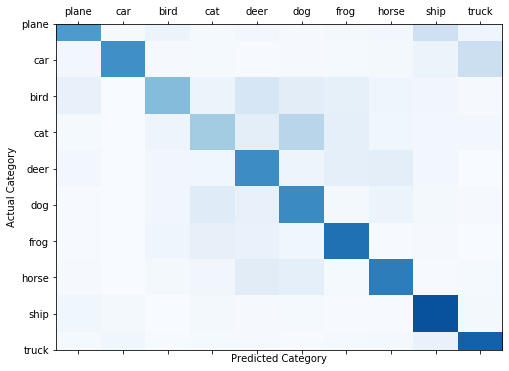

Category   - Accuracy
plane      - 58.6
car        - 63.2
bird       - 43.7
cat        - 35.6
deer       - 64.1
dog        - 65.1
frog       - 75.0
horse      - 70.1
ship       - 87.0
truck      - 81.0

Selected workers

[56  1  3 97 78 75  5 93 89 99 79 68 62 29 82]
Worker 56 : is  Honest
Worker 1 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 97 : is  Stealthy_Attacker
Worker 78 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 5 : is  Honest
Worker 93 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 68 : is  Honest
Worker 62 : is  Honest
Worker 29 : is  Honest
Worker 82 : is  Honest

 | Global Training Round : 10 |


Worker 56 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.898660
Train Epoch: 1 [400/500	(81%)]	Loss: 1.225816
Train Epoch: 2 [0/500	(1%)]	Loss: 0.547712
Train Epoch: 2 [400/500	(81%)]	Loss: 0.811224
Train Epoch: 3 [0/500	(1%)]	Loss: 0.714885
Train Epoch: 3 [400/500	(81%)]	Loss: 0.900137
Train Epoch: 4 [0/500	(1%)]	Loss: 0.468796
Train Epoch: 4 [400/500	(81%)]	Loss: 0.654245
Train Epoch: 5 [0/500	(1%)]	Loss: 0.456213
Train Epoch: 5 [400/500	(81%)]	Loss: 0.523034

Worker 56 ends training in Global Round:10 |

Worker 1 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.956974
Train Epoch: 1 [400/500	(81%)]	Loss: 1.136662
Train Epoch: 2 [0/500	(1%)]	Loss: 0.955820
Train Epoch: 2 [400/500	(81%)]	Loss: 1.385655
Train Epoch: 3 [0/500	(1%)]	Loss: 0.682829
Train Epoch: 3 [400/500	(81%)]	Loss: 0.932009
Train Epoch: 4 [0/500	(1%)]	Loss: 0.564724
Train Epoch: 4 [400/500	(81%)]	Loss: 0.879950
Train Epoch: 5 [0/500	(1%)]	Loss: 0.638742
Train Epoch: 5 [400/500	(81%)]	Loss: 0.668864

Worker 1 ends training in Global Round:10 |

Worker 3 starts training in Global Round:10 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  10


Train Epoch: 1 [0/500	(1%)]	Loss: 1.372308
Train Epoch: 1 [400/500	(81%)]	Loss: 1.094581
Train Epoch: 2 [0/500	(1%)]	Loss: 1.069585
Train Epoch: 2 [400/500	(81%)]	Loss: 0.946773
Train Epoch: 3 [0/500	(1%)]	Loss: 0.816809
Train Epoch: 3 [400/500	(81%)]	Loss: 0.803862
Train Epoch: 4 [0/500	(1%)]	Loss: 0.633471
Train Epoch: 4 [400/500	(81%)]	Loss: 0.765465
Train Epoch: 5 [0/500	(1%)]	Loss: 0.471306
Train Epoch: 5 [400/500	(81%)]	Loss: 0.662858

Performed attacks 1
Worker 3 ends training in Global Round:10 |

Worker 97 starts training in Global Round:10 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  10


Train Epoch: 1 [0/500	(1%)]	Loss: 1.203799
Train Epoch: 1 [400/500	(81%)]	Loss: 1.496818
Train Epoch: 2 [0/500	(1%)]	Loss: 0.726060
Train Epoch: 2 [400/500	(81%)]	Loss: 0.939673
Train Epoch: 3 [0/500	(1%)]	Loss: 0.871971
Train Epoch: 3 [400/500	(81%)]	Loss: 0.964147
Train Epoch: 4 [0/500	(1%)]	Loss: 0.594712
Train Epoch: 4 [400/500	(81%)]	Loss: 0.715746
Train Epoch: 5 [0/500	(1%)]	Loss: 0.665485
Train Epoch: 5 [400/500	(81%)]	Loss: 0.904738

Performed attacks 2
Worker 97 ends training in Global Round:10 |

Worker 78 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.771477
Train Epoch: 1 [400/500	(81%)]	Loss: 1.200590
Train Epoch: 2 [0/500	(1%)]	Loss: 0.744215
Train Epoch: 2 [400/500	(81%)]	Loss: 1.075843
Train Epoch: 3 [0/500	(1%)]	Loss: 1.001279
Train Epoch: 3 [400/500	(81%)]	Loss: 0.850883
Train Epoch: 4 [0/500	(1%)]	Loss: 0.704210
Train Epoch: 4 [400/500	(81%)]	Loss: 0.709071
Train Epoch: 5 [0/500	(1%)]	Loss: 0.666838
Train Epoch: 5 [400/500	(81%)]	Loss: 0.741997

Worker 78 ends training in Global Round:10 |

Worker 75 starts training in Global Round:10 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  10


Train Epoch: 1 [0/500	(1%)]	Loss: 1.545889
Train Epoch: 1 [400/500	(81%)]	Loss: 0.812144
Train Epoch: 2 [0/500	(1%)]	Loss: 0.813970
Train Epoch: 2 [400/500	(81%)]	Loss: 1.009488
Train Epoch: 3 [0/500	(1%)]	Loss: 0.696410
Train Epoch: 3 [400/500	(81%)]	Loss: 0.773041
Train Epoch: 4 [0/500	(1%)]	Loss: 0.699040
Train Epoch: 4 [400/500	(81%)]	Loss: 0.801063
Train Epoch: 5 [0/500	(1%)]	Loss: 0.522269
Train Epoch: 5 [400/500	(81%)]	Loss: 0.721717

Performed attacks 3
Worker 75 ends training in Global Round:10 |

Worker 5 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.846516
Train Epoch: 1 [400/500	(81%)]	Loss: 1.270238
Train Epoch: 2 [0/500	(1%)]	Loss: 0.664428
Train Epoch: 2 [400/500	(81%)]	Loss: 0.750816
Train Epoch: 3 [0/500	(1%)]	Loss: 0.694825
Train Epoch: 3 [400/500	(81%)]	Loss: 0.764274
Train Epoch: 4 [0/500	(1%)]	Loss: 0.725033
Train Epoch: 4 [400/500	(81%)]	Loss: 0.604004
Train Epoch: 5 [0/500	(1%)]	Loss: 0.587047
Train Epoch: 5 [400/500	(81%)]	Loss: 0.767102

Worker 5 ends training in Global Round:10 |

Worker 93 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.997224
Train Epoch: 1 [400/500	(81%)]	Loss: 1.294987
Train Epoch: 2 [0/500	(1%)]	Loss: 0.803277
Train Epoch: 2 [400/500	(81%)]	Loss: 0.985738
Train Epoch: 3 [0/500	(1%)]	Loss: 0.894768
Train Epoch: 3 [400/500	(81%)]	Loss: 0.761603
Train Epoch: 4 [0/500	(1%)]	Loss: 0.679184
Train Epoch: 4 [400/500	(81%)]	Loss: 0.894347
Train Epoch: 5 [0/500	(1%)]	Loss: 0.679327
Train Epoch: 5 [400/500	(81%)]	Loss: 0.702986

Worker 93 ends training in Global Round:10 |

Worker 89 starts training in Global Round:10 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  10


Train Epoch: 1 [0/500	(1%)]	Loss: 1.460381
Train Epoch: 1 [400/500	(81%)]	Loss: 1.118928
Train Epoch: 2 [0/500	(1%)]	Loss: 0.959671
Train Epoch: 2 [400/500	(81%)]	Loss: 1.021758
Train Epoch: 3 [0/500	(1%)]	Loss: 0.734947
Train Epoch: 3 [400/500	(81%)]	Loss: 1.112911
Train Epoch: 4 [0/500	(1%)]	Loss: 0.805587
Train Epoch: 4 [400/500	(81%)]	Loss: 0.815060
Train Epoch: 5 [0/500	(1%)]	Loss: 0.677546
Train Epoch: 5 [400/500	(81%)]	Loss: 1.057249

Performed attacks 4
Worker 89 ends training in Global Round:10 |

Worker 99 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.844043
Train Epoch: 1 [400/500	(81%)]	Loss: 0.856128
Train Epoch: 2 [0/500	(1%)]	Loss: 0.812962
Train Epoch: 2 [400/500	(81%)]	Loss: 0.773309
Train Epoch: 3 [0/500	(1%)]	Loss: 0.641492
Train Epoch: 3 [400/500	(81%)]	Loss: 0.606275
Train Epoch: 4 [0/500	(1%)]	Loss: 0.674908
Train Epoch: 4 [400/500	(81%)]	Loss: 0.853417
Train Epoch: 5 [0/500	(1%)]	Loss: 0.545850
Train Epoch: 5 [400/500	(81%)]	Loss: 0.715860

Worker 99 ends training in Global Round:10 |

Worker 79 starts training in Global Round:10 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  10


Train Epoch: 1 [0/500	(1%)]	Loss: 1.368953
Train Epoch: 1 [400/500	(81%)]	Loss: 1.322984
Train Epoch: 2 [0/500	(1%)]	Loss: 0.873129
Train Epoch: 2 [400/500	(81%)]	Loss: 1.178374
Train Epoch: 3 [0/500	(1%)]	Loss: 0.630332
Train Epoch: 3 [400/500	(81%)]	Loss: 0.806574
Train Epoch: 4 [0/500	(1%)]	Loss: 0.719099
Train Epoch: 4 [400/500	(81%)]	Loss: 0.876784
Train Epoch: 5 [0/500	(1%)]	Loss: 0.582173
Train Epoch: 5 [400/500	(81%)]	Loss: 0.700209

Performed attacks 5
Worker 79 ends training in Global Round:10 |

Worker 68 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.149542
Train Epoch: 1 [400/500	(81%)]	Loss: 0.974030
Train Epoch: 2 [0/500	(1%)]	Loss: 0.818947
Train Epoch: 2 [400/500	(81%)]	Loss: 0.801103
Train Epoch: 3 [0/500	(1%)]	Loss: 0.747123
Train Epoch: 3 [400/500	(81%)]	Loss: 0.827256
Train Epoch: 4 [0/500	(1%)]	Loss: 0.811749
Train Epoch: 4 [400/500	(81%)]	Loss: 0.925600
Train Epoch: 5 [0/500	(1%)]	Loss: 0.482139
Train Epoch: 5 [400/500	(81%)]	Loss: 0.765610

Worker 68 ends training in Global Round:10 |

Worker 62 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.344434
Train Epoch: 1 [400/500	(81%)]	Loss: 1.097947
Train Epoch: 2 [0/500	(1%)]	Loss: 0.982648
Train Epoch: 2 [400/500	(81%)]	Loss: 0.968783
Train Epoch: 3 [0/500	(1%)]	Loss: 0.968759
Train Epoch: 3 [400/500	(81%)]	Loss: 0.816305
Train Epoch: 4 [0/500	(1%)]	Loss: 0.754391
Train Epoch: 4 [400/500	(81%)]	Loss: 0.773361
Train Epoch: 5 [0/500	(1%)]	Loss: 0.601450
Train Epoch: 5 [400/500	(81%)]	Loss: 1.033916

Worker 62 ends training in Global Round:10 |

Worker 29 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.788992
Train Epoch: 1 [400/500	(81%)]	Loss: 0.979513
Train Epoch: 2 [0/500	(1%)]	Loss: 0.687263
Train Epoch: 2 [400/500	(81%)]	Loss: 0.999730
Train Epoch: 3 [0/500	(1%)]	Loss: 0.628586
Train Epoch: 3 [400/500	(81%)]	Loss: 0.641487
Train Epoch: 4 [0/500	(1%)]	Loss: 0.460353
Train Epoch: 4 [400/500	(81%)]	Loss: 0.689218
Train Epoch: 5 [0/500	(1%)]	Loss: 0.579217
Train Epoch: 5 [400/500	(81%)]	Loss: 0.681840

Worker 29 ends training in Global Round:10 |

Worker 82 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.099738
Train Epoch: 1 [400/500	(81%)]	Loss: 0.971749
Train Epoch: 2 [0/500	(1%)]	Loss: 0.550816
Train Epoch: 2 [400/500	(81%)]	Loss: 0.842144
Train Epoch: 3 [0/500	(1%)]	Loss: 0.701484
Train Epoch: 3 [400/500	(81%)]	Loss: 0.794560
Train Epoch: 4 [0/500	(1%)]	Loss: 0.737030
Train Epoch: 4 [400/500	(81%)]	Loss: 0.793203
Train Epoch: 5 [0/500	(1%)]	Loss: 0.533572
Train Epoch: 5 [400/500	(81%)]	Loss: 0.734468

Worker 82 ends training in Global Round:10 |
Last layer biases  [array([ 0.03257041, -0.02777415, -0.01968346,  0.03297052,  0.03690183,
       -0.01813368,  0.04206957, -0.00723551, -0.01758464, -0.03819971],
      dtype=float32), array([ 0.03314881, -0.02710151, -0.01854642,  0.03040861,  0.03599513,
       -0.01838596,  0.0409749 , -0.0069779 , -0.01868193, -0.03493256],
      dtype=float32), array([ 0.03142312, -0.023851  , -0.01661735,  0.03411983,  0.04109425,
       -0.01841824,  0.04352598, -0.02595316, -0.01256874, -0.03685351],
      dtyp

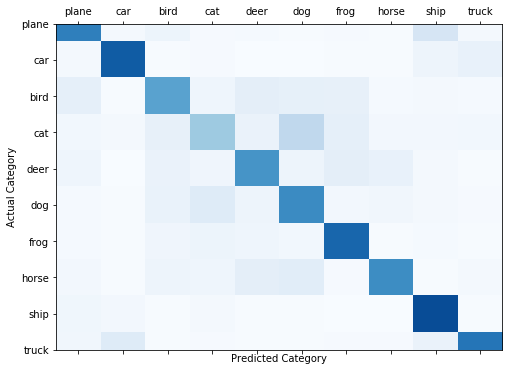

Category   - Accuracy
plane      - 69.2
car        - 82.9
bird       - 55.1
cat        - 37.3
deer       - 61.3
dog        - 65.2
frog       - 79.2
horse      - 64.1
ship       - 89.0
truck      - 73.3

Selected workers

[85 83 88 24 20 37 47 62 77 74 11 96 14 55 18]
Worker 85 : is  Honest
Worker 83 : is  Honest
Worker 88 : is  Honest
Worker 24 : is  Honest
Worker 20 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 47 : is  Honest
Worker 62 : is  Honest
Worker 77 : is  Honest
Worker 74 : is  Honest
Worker 11 : is  Honest
Worker 96 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 18 : is  Stealthy_Attacker

 | Global Training Round : 11 |


Worker 85 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.014134
Train Epoch: 1 [400/500	(81%)]	Loss: 1.345964
Train Epoch: 2 [0/500	(1%)]	Loss: 0.791905
Train Epoch: 2 [400/500	(81%)]	Loss: 1.026392
Train Epoch: 3 [0/500	(1%)]	Loss: 0.586624
Train Epoch: 3 [400/500	(81%)]	Loss: 0.777961
Train Epoch: 4 [0/500	(1%)]	Loss: 0.694421
Train Epoch: 4 [400/500	(81%)]	Loss: 0.875152
Train Epoch: 5 [0/500	(1%)]	Loss: 0.732314
Train Epoch: 5 [400/500	(81%)]	Loss: 0.817703

Worker 85 ends training in Global Round:11 |

Worker 83 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.808182
Train Epoch: 1 [400/500	(81%)]	Loss: 1.048080
Train Epoch: 2 [0/500	(1%)]	Loss: 0.829738
Train Epoch: 2 [400/500	(81%)]	Loss: 0.852750
Train Epoch: 3 [0/500	(1%)]	Loss: 0.691802
Train Epoch: 3 [400/500	(81%)]	Loss: 0.844913
Train Epoch: 4 [0/500	(1%)]	Loss: 0.620337
Train Epoch: 4 [400/500	(81%)]	Loss: 0.651148
Train Epoch: 5 [0/500	(1%)]	Loss: 0.487085
Train Epoch: 5 [400/500	(81%)]	Loss: 0.522754

Worker 83 ends training in Global Round:11 |

Worker 88 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.069491
Train Epoch: 1 [400/500	(81%)]	Loss: 1.013146
Train Epoch: 2 [0/500	(1%)]	Loss: 0.821693
Train Epoch: 2 [400/500	(81%)]	Loss: 0.866098
Train Epoch: 3 [0/500	(1%)]	Loss: 0.669736
Train Epoch: 3 [400/500	(81%)]	Loss: 0.755456
Train Epoch: 4 [0/500	(1%)]	Loss: 0.449420
Train Epoch: 4 [400/500	(81%)]	Loss: 0.722298
Train Epoch: 5 [0/500	(1%)]	Loss: 0.577237
Train Epoch: 5 [400/500	(81%)]	Loss: 0.706617

Worker 88 ends training in Global Round:11 |

Worker 24 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.900062
Train Epoch: 1 [400/500	(81%)]	Loss: 0.808117
Train Epoch: 2 [0/500	(1%)]	Loss: 0.490554
Train Epoch: 2 [400/500	(81%)]	Loss: 0.783364
Train Epoch: 3 [0/500	(1%)]	Loss: 0.698542
Train Epoch: 3 [400/500	(81%)]	Loss: 0.482576
Train Epoch: 4 [0/500	(1%)]	Loss: 0.519126
Train Epoch: 4 [400/500	(81%)]	Loss: 0.628136
Train Epoch: 5 [0/500	(1%)]	Loss: 0.408774
Train Epoch: 5 [400/500	(81%)]	Loss: 0.678147

Worker 24 ends training in Global Round:11 |

Worker 20 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.865653
Train Epoch: 1 [400/500	(81%)]	Loss: 0.770088
Train Epoch: 2 [0/500	(1%)]	Loss: 0.646385
Train Epoch: 2 [400/500	(81%)]	Loss: 0.652162
Train Epoch: 3 [0/500	(1%)]	Loss: 0.579736
Train Epoch: 3 [400/500	(81%)]	Loss: 0.647661
Train Epoch: 4 [0/500	(1%)]	Loss: 0.459622
Train Epoch: 4 [400/500	(81%)]	Loss: 0.759740
Train Epoch: 5 [0/500	(1%)]	Loss: 0.589843
Train Epoch: 5 [400/500	(81%)]	Loss: 0.653471

Worker 20 ends training in Global Round:11 |

Worker 37 starts training in Global Round:11 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  11


Train Epoch: 1 [0/500	(1%)]	Loss: 1.175974
Train Epoch: 1 [400/500	(81%)]	Loss: 1.231859
Train Epoch: 2 [0/500	(1%)]	Loss: 0.656176
Train Epoch: 2 [400/500	(81%)]	Loss: 0.957338
Train Epoch: 3 [0/500	(1%)]	Loss: 0.951874
Train Epoch: 3 [400/500	(81%)]	Loss: 0.895440
Train Epoch: 4 [0/500	(1%)]	Loss: 0.737870
Train Epoch: 4 [400/500	(81%)]	Loss: 0.695677
Train Epoch: 5 [0/500	(1%)]	Loss: 0.599696
Train Epoch: 5 [400/500	(81%)]	Loss: 0.571591

Performed attacks 1
Worker 37 ends training in Global Round:11 |

Worker 47 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.248747
Train Epoch: 1 [400/500	(81%)]	Loss: 1.017262
Train Epoch: 2 [0/500	(1%)]	Loss: 0.809977
Train Epoch: 2 [400/500	(81%)]	Loss: 1.257314
Train Epoch: 3 [0/500	(1%)]	Loss: 0.833755
Train Epoch: 3 [400/500	(81%)]	Loss: 1.113771
Train Epoch: 4 [0/500	(1%)]	Loss: 0.799666
Train Epoch: 4 [400/500	(81%)]	Loss: 0.580327
Train Epoch: 5 [0/500	(1%)]	Loss: 0.607880
Train Epoch: 5 [400/500	(81%)]	Loss: 0.601376

Worker 47 ends training in Global Round:11 |

Worker 62 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.053235
Train Epoch: 1 [400/500	(81%)]	Loss: 1.034282
Train Epoch: 2 [0/500	(1%)]	Loss: 0.650746
Train Epoch: 2 [400/500	(81%)]	Loss: 0.891735
Train Epoch: 3 [0/500	(1%)]	Loss: 0.829346
Train Epoch: 3 [400/500	(81%)]	Loss: 1.088505
Train Epoch: 4 [0/500	(1%)]	Loss: 0.699026
Train Epoch: 4 [400/500	(81%)]	Loss: 1.040948
Train Epoch: 5 [0/500	(1%)]	Loss: 0.791861
Train Epoch: 5 [400/500	(81%)]	Loss: 0.917226

Worker 62 ends training in Global Round:11 |

Worker 77 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.115522
Train Epoch: 1 [400/500	(81%)]	Loss: 1.027471
Train Epoch: 2 [0/500	(1%)]	Loss: 0.744149
Train Epoch: 2 [400/500	(81%)]	Loss: 1.035302
Train Epoch: 3 [0/500	(1%)]	Loss: 0.689236
Train Epoch: 3 [400/500	(81%)]	Loss: 0.662205
Train Epoch: 4 [0/500	(1%)]	Loss: 0.694928
Train Epoch: 4 [400/500	(81%)]	Loss: 0.812263
Train Epoch: 5 [0/500	(1%)]	Loss: 0.507541
Train Epoch: 5 [400/500	(81%)]	Loss: 0.570049

Worker 77 ends training in Global Round:11 |

Worker 74 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.863664
Train Epoch: 1 [400/500	(81%)]	Loss: 1.136973
Train Epoch: 2 [0/500	(1%)]	Loss: 0.679094
Train Epoch: 2 [400/500	(81%)]	Loss: 1.208604
Train Epoch: 3 [0/500	(1%)]	Loss: 0.562975
Train Epoch: 3 [400/500	(81%)]	Loss: 0.662119
Train Epoch: 4 [0/500	(1%)]	Loss: 0.629204
Train Epoch: 4 [400/500	(81%)]	Loss: 0.790505
Train Epoch: 5 [0/500	(1%)]	Loss: 0.606953
Train Epoch: 5 [400/500	(81%)]	Loss: 0.639237

Worker 74 ends training in Global Round:11 |

Worker 11 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.956044
Train Epoch: 1 [400/500	(81%)]	Loss: 1.117901
Train Epoch: 2 [0/500	(1%)]	Loss: 0.708338
Train Epoch: 2 [400/500	(81%)]	Loss: 0.915594
Train Epoch: 3 [0/500	(1%)]	Loss: 0.601340
Train Epoch: 3 [400/500	(81%)]	Loss: 0.919206
Train Epoch: 4 [0/500	(1%)]	Loss: 0.685469
Train Epoch: 4 [400/500	(81%)]	Loss: 0.610663
Train Epoch: 5 [0/500	(1%)]	Loss: 0.643442
Train Epoch: 5 [400/500	(81%)]	Loss: 0.844096

Worker 11 ends training in Global Round:11 |

Worker 96 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.068433
Train Epoch: 1 [400/500	(81%)]	Loss: 0.982688
Train Epoch: 2 [0/500	(1%)]	Loss: 0.736553
Train Epoch: 2 [400/500	(81%)]	Loss: 0.733527
Train Epoch: 3 [0/500	(1%)]	Loss: 0.555274
Train Epoch: 3 [400/500	(81%)]	Loss: 0.787417
Train Epoch: 4 [0/500	(1%)]	Loss: 0.805327
Train Epoch: 4 [400/500	(81%)]	Loss: 0.679944
Train Epoch: 5 [0/500	(1%)]	Loss: 0.513033
Train Epoch: 5 [400/500	(81%)]	Loss: 0.671089

Worker 96 ends training in Global Round:11 |

Worker 14 starts training in Global Round:11 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  11


Train Epoch: 1 [0/500	(1%)]	Loss: 1.172397
Train Epoch: 1 [400/500	(81%)]	Loss: 1.245229
Train Epoch: 2 [0/500	(1%)]	Loss: 0.720672
Train Epoch: 2 [400/500	(81%)]	Loss: 1.124784
Train Epoch: 3 [0/500	(1%)]	Loss: 0.795867
Train Epoch: 3 [400/500	(81%)]	Loss: 0.979493
Train Epoch: 4 [0/500	(1%)]	Loss: 0.653646
Train Epoch: 4 [400/500	(81%)]	Loss: 1.114157
Train Epoch: 5 [0/500	(1%)]	Loss: 0.459794
Train Epoch: 5 [400/500	(81%)]	Loss: 0.885220

Performed attacks 2
Worker 14 ends training in Global Round:11 |

Worker 55 starts training in Global Round:11 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  11


Train Epoch: 1 [0/500	(1%)]	Loss: 1.269650
Train Epoch: 1 [400/500	(81%)]	Loss: 1.304334
Train Epoch: 2 [0/500	(1%)]	Loss: 0.703285
Train Epoch: 2 [400/500	(81%)]	Loss: 1.056853
Train Epoch: 3 [0/500	(1%)]	Loss: 0.856489
Train Epoch: 3 [400/500	(81%)]	Loss: 0.813743
Train Epoch: 4 [0/500	(1%)]	Loss: 0.639763
Train Epoch: 4 [400/500	(81%)]	Loss: 0.809812
Train Epoch: 5 [0/500	(1%)]	Loss: 0.506390
Train Epoch: 5 [400/500	(81%)]	Loss: 0.766016

Performed attacks 3
Worker 55 ends training in Global Round:11 |

Worker 18 starts training in Global Round:11 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  11


Train Epoch: 1 [0/500	(1%)]	Loss: 1.274121
Train Epoch: 1 [400/500	(81%)]	Loss: 1.043429
Train Epoch: 2 [0/500	(1%)]	Loss: 0.757122
Train Epoch: 2 [400/500	(81%)]	Loss: 0.819484
Train Epoch: 3 [0/500	(1%)]	Loss: 0.754927
Train Epoch: 3 [400/500	(81%)]	Loss: 0.726232
Train Epoch: 4 [0/500	(1%)]	Loss: 0.683977
Train Epoch: 4 [400/500	(81%)]	Loss: 0.905319
Train Epoch: 5 [0/500	(1%)]	Loss: 0.642342
Train Epoch: 5 [400/500	(81%)]	Loss: 0.770995

Performed attacks 4
Worker 18 ends training in Global Round:11 |
Last layer biases  [array([ 0.03340155, -0.02820328, -0.02162516,  0.03120133,  0.03387242,
       -0.01433431,  0.04106108, -0.0043701 , -0.01535152, -0.03975082],
      dtype=float32), array([ 0.03111018, -0.02636449, -0.0190808 ,  0.03180738,  0.03625403,
       -0.01820881,  0.04321041, -0.00746093, -0.01645665, -0.03890907],
      dtype=float32), array([ 0.0323058 , -0.02577854, -0.01821671,  0.03080798,  0.03427143,
       -0.01572303,  0.04201743, -0.00976794, -0.01611619, -0.0

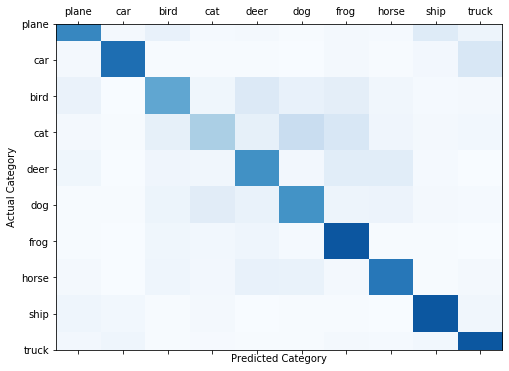

Category   - Accuracy
plane      - 66.6
car        - 75.8
bird       - 53.2
cat        - 33.3
deer       - 62.7
dog        - 61.9
frog       - 85.4
horse      - 72.5
ship       - 85.0
truck      - 84.8

Selected workers

[13 52 63 10  8 40 96 83 51 98 34 65 16 14 12]
Worker 13 : is  Stealthy_Attacker
Worker 52 : is  Stealthy_Attacker
Worker 63 : is  Honest
Worker 10 : is  Honest
Worker 8 : is  Honest
Worker 40 : is  Honest
Worker 96 : is  Honest
Worker 83 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 14 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker

 | Global Training Round : 12 |


Worker 13 starts training in Global Round:12 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  12


Train Epoch: 1 [0/500	(1%)]	Loss: 1.563744
Train Epoch: 1 [400/500	(81%)]	Loss: 0.931535
Train Epoch: 2 [0/500	(1%)]	Loss: 0.753144
Train Epoch: 2 [400/500	(81%)]	Loss: 0.931700
Train Epoch: 3 [0/500	(1%)]	Loss: 0.679023
Train Epoch: 3 [400/500	(81%)]	Loss: 0.862452
Train Epoch: 4 [0/500	(1%)]	Loss: 0.442041
Train Epoch: 4 [400/500	(81%)]	Loss: 0.571968
Train Epoch: 5 [0/500	(1%)]	Loss: 0.627454
Train Epoch: 5 [400/500	(81%)]	Loss: 1.019391

Performed attacks 1
Worker 13 ends training in Global Round:12 |

Worker 52 starts training in Global Round:12 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  12


Train Epoch: 1 [0/500	(1%)]	Loss: 1.330509
Train Epoch: 1 [400/500	(81%)]	Loss: 1.088524
Train Epoch: 2 [0/500	(1%)]	Loss: 0.768326
Train Epoch: 2 [400/500	(81%)]	Loss: 0.831257
Train Epoch: 3 [0/500	(1%)]	Loss: 0.577749
Train Epoch: 3 [400/500	(81%)]	Loss: 0.762857
Train Epoch: 4 [0/500	(1%)]	Loss: 0.436191
Train Epoch: 4 [400/500	(81%)]	Loss: 0.661174
Train Epoch: 5 [0/500	(1%)]	Loss: 0.492689
Train Epoch: 5 [400/500	(81%)]	Loss: 0.786942

Performed attacks 2
Worker 52 ends training in Global Round:12 |

Worker 63 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.958705
Train Epoch: 1 [400/500	(81%)]	Loss: 1.042172
Train Epoch: 2 [0/500	(1%)]	Loss: 0.632167
Train Epoch: 2 [400/500	(81%)]	Loss: 0.839415
Train Epoch: 3 [0/500	(1%)]	Loss: 0.627304
Train Epoch: 3 [400/500	(81%)]	Loss: 0.855991
Train Epoch: 4 [0/500	(1%)]	Loss: 0.543380
Train Epoch: 4 [400/500	(81%)]	Loss: 0.480274
Train Epoch: 5 [0/500	(1%)]	Loss: 0.335849
Train Epoch: 5 [400/500	(81%)]	Loss: 0.685484

Worker 63 ends training in Global Round:12 |

Worker 10 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.845553
Train Epoch: 1 [400/500	(81%)]	Loss: 1.099393
Train Epoch: 2 [0/500	(1%)]	Loss: 0.695863
Train Epoch: 2 [400/500	(81%)]	Loss: 0.588119
Train Epoch: 3 [0/500	(1%)]	Loss: 0.639748
Train Epoch: 3 [400/500	(81%)]	Loss: 0.690434
Train Epoch: 4 [0/500	(1%)]	Loss: 0.397459
Train Epoch: 4 [400/500	(81%)]	Loss: 0.665989
Train Epoch: 5 [0/500	(1%)]	Loss: 0.508293
Train Epoch: 5 [400/500	(81%)]	Loss: 0.850911

Worker 10 ends training in Global Round:12 |

Worker 8 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.757757
Train Epoch: 1 [400/500	(81%)]	Loss: 0.945584
Train Epoch: 2 [0/500	(1%)]	Loss: 0.834532
Train Epoch: 2 [400/500	(81%)]	Loss: 0.590638
Train Epoch: 3 [0/500	(1%)]	Loss: 0.740662
Train Epoch: 3 [400/500	(81%)]	Loss: 0.672459
Train Epoch: 4 [0/500	(1%)]	Loss: 0.487735
Train Epoch: 4 [400/500	(81%)]	Loss: 0.929469
Train Epoch: 5 [0/500	(1%)]	Loss: 0.400219
Train Epoch: 5 [400/500	(81%)]	Loss: 0.637852

Worker 8 ends training in Global Round:12 |

Worker 40 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.922858
Train Epoch: 1 [400/500	(81%)]	Loss: 1.337052
Train Epoch: 2 [0/500	(1%)]	Loss: 0.729573
Train Epoch: 2 [400/500	(81%)]	Loss: 1.218999
Train Epoch: 3 [0/500	(1%)]	Loss: 0.678610
Train Epoch: 3 [400/500	(81%)]	Loss: 0.882033
Train Epoch: 4 [0/500	(1%)]	Loss: 0.693563
Train Epoch: 4 [400/500	(81%)]	Loss: 0.599100
Train Epoch: 5 [0/500	(1%)]	Loss: 0.490626
Train Epoch: 5 [400/500	(81%)]	Loss: 0.722360

Worker 40 ends training in Global Round:12 |

Worker 96 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.868342
Train Epoch: 1 [400/500	(81%)]	Loss: 0.982399
Train Epoch: 2 [0/500	(1%)]	Loss: 0.622478
Train Epoch: 2 [400/500	(81%)]	Loss: 0.835975
Train Epoch: 3 [0/500	(1%)]	Loss: 0.596749
Train Epoch: 3 [400/500	(81%)]	Loss: 0.697058
Train Epoch: 4 [0/500	(1%)]	Loss: 0.522619
Train Epoch: 4 [400/500	(81%)]	Loss: 0.654524
Train Epoch: 5 [0/500	(1%)]	Loss: 0.457183
Train Epoch: 5 [400/500	(81%)]	Loss: 0.614251

Worker 96 ends training in Global Round:12 |

Worker 83 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.776117
Train Epoch: 1 [400/500	(81%)]	Loss: 0.840084
Train Epoch: 2 [0/500	(1%)]	Loss: 0.628641
Train Epoch: 2 [400/500	(81%)]	Loss: 0.726403
Train Epoch: 3 [0/500	(1%)]	Loss: 0.579185
Train Epoch: 3 [400/500	(81%)]	Loss: 0.648662
Train Epoch: 4 [0/500	(1%)]	Loss: 0.427880
Train Epoch: 4 [400/500	(81%)]	Loss: 0.469127
Train Epoch: 5 [0/500	(1%)]	Loss: 0.553595
Train Epoch: 5 [400/500	(81%)]	Loss: 0.684409

Worker 83 ends training in Global Round:12 |

Worker 51 starts training in Global Round:12 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  12


Train Epoch: 1 [0/500	(1%)]	Loss: 1.583965
Train Epoch: 1 [400/500	(81%)]	Loss: 1.281240
Train Epoch: 2 [0/500	(1%)]	Loss: 0.584847
Train Epoch: 2 [400/500	(81%)]	Loss: 0.763660
Train Epoch: 3 [0/500	(1%)]	Loss: 0.811585
Train Epoch: 3 [400/500	(81%)]	Loss: 0.748845
Train Epoch: 4 [0/500	(1%)]	Loss: 0.539928
Train Epoch: 4 [400/500	(81%)]	Loss: 0.741244
Train Epoch: 5 [0/500	(1%)]	Loss: 0.719340
Train Epoch: 5 [400/500	(81%)]	Loss: 0.611742

Performed attacks 3
Worker 51 ends training in Global Round:12 |

Worker 98 starts training in Global Round:12 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  12


Train Epoch: 1 [0/500	(1%)]	Loss: 0.980454
Train Epoch: 1 [400/500	(81%)]	Loss: 1.307031
Train Epoch: 2 [0/500	(1%)]	Loss: 0.617543
Train Epoch: 2 [400/500	(81%)]	Loss: 0.674024
Train Epoch: 3 [0/500	(1%)]	Loss: 0.626447
Train Epoch: 3 [400/500	(81%)]	Loss: 0.832215
Train Epoch: 4 [0/500	(1%)]	Loss: 0.537162
Train Epoch: 4 [400/500	(81%)]	Loss: 0.800929
Train Epoch: 5 [0/500	(1%)]	Loss: 0.540329
Train Epoch: 5 [400/500	(81%)]	Loss: 0.625870

Performed attacks 4
Worker 98 ends training in Global Round:12 |

Worker 34 starts training in Global Round:12 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  12


Train Epoch: 1 [0/500	(1%)]	Loss: 1.440852
Train Epoch: 1 [400/500	(81%)]	Loss: 1.142284
Train Epoch: 2 [0/500	(1%)]	Loss: 0.676614
Train Epoch: 2 [400/500	(81%)]	Loss: 0.852628
Train Epoch: 3 [0/500	(1%)]	Loss: 0.570431
Train Epoch: 3 [400/500	(81%)]	Loss: 0.767855
Train Epoch: 4 [0/500	(1%)]	Loss: 0.559189
Train Epoch: 4 [400/500	(81%)]	Loss: 0.600229
Train Epoch: 5 [0/500	(1%)]	Loss: 0.357899
Train Epoch: 5 [400/500	(81%)]	Loss: 0.460041

Performed attacks 5
Worker 34 ends training in Global Round:12 |

Worker 65 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.703792
Train Epoch: 1 [400/500	(81%)]	Loss: 1.080283
Train Epoch: 2 [0/500	(1%)]	Loss: 0.791048
Train Epoch: 2 [400/500	(81%)]	Loss: 0.739707
Train Epoch: 3 [0/500	(1%)]	Loss: 0.779776
Train Epoch: 3 [400/500	(81%)]	Loss: 0.764460
Train Epoch: 4 [0/500	(1%)]	Loss: 0.475245
Train Epoch: 4 [400/500	(81%)]	Loss: 0.773799
Train Epoch: 5 [0/500	(1%)]	Loss: 0.429220
Train Epoch: 5 [400/500	(81%)]	Loss: 0.495940

Worker 65 ends training in Global Round:12 |

Worker 16 starts training in Global Round:12 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  12


Train Epoch: 1 [0/500	(1%)]	Loss: 1.317344
Train Epoch: 1 [400/500	(81%)]	Loss: 1.193478
Train Epoch: 2 [0/500	(1%)]	Loss: 0.928723
Train Epoch: 2 [400/500	(81%)]	Loss: 0.682100
Train Epoch: 3 [0/500	(1%)]	Loss: 0.666333
Train Epoch: 3 [400/500	(81%)]	Loss: 0.811175
Train Epoch: 4 [0/500	(1%)]	Loss: 0.683419
Train Epoch: 4 [400/500	(81%)]	Loss: 0.754110
Train Epoch: 5 [0/500	(1%)]	Loss: 0.716304
Train Epoch: 5 [400/500	(81%)]	Loss: 0.694986

Performed attacks 6
Worker 16 ends training in Global Round:12 |

Worker 14 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.808379
Train Epoch: 1 [400/500	(81%)]	Loss: 1.149093
Train Epoch: 2 [0/500	(1%)]	Loss: 0.868906
Train Epoch: 2 [400/500	(81%)]	Loss: 0.823580
Train Epoch: 3 [0/500	(1%)]	Loss: 0.842914
Train Epoch: 3 [400/500	(81%)]	Loss: 0.706009
Train Epoch: 4 [0/500	(1%)]	Loss: 0.499132
Train Epoch: 4 [400/500	(81%)]	Loss: 0.755630
Train Epoch: 5 [0/500	(1%)]	Loss: 0.531737
Train Epoch: 5 [400/500	(81%)]	Loss: 0.640855

Worker 14 ends training in Global Round:12 |

Worker 12 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.899318
Train Epoch: 1 [400/500	(81%)]	Loss: 0.949736
Train Epoch: 2 [0/500	(1%)]	Loss: 0.620172
Train Epoch: 2 [400/500	(81%)]	Loss: 0.995961
Train Epoch: 3 [0/500	(1%)]	Loss: 0.538826
Train Epoch: 3 [400/500	(81%)]	Loss: 0.592744
Train Epoch: 4 [0/500	(1%)]	Loss: 0.558716
Train Epoch: 4 [400/500	(81%)]	Loss: 0.831763
Train Epoch: 5 [0/500	(1%)]	Loss: 0.711139
Train Epoch: 5 [400/500	(81%)]	Loss: 0.678094

Worker 12 ends training in Global Round:12 |
Last layer biases  [array([ 0.03703072, -0.02871359, -0.0171393 ,  0.03358363,  0.03910213,
       -0.01450746,  0.04412123, -0.02498343, -0.0164479 , -0.0361448 ],
      dtype=float32), array([ 0.03525382, -0.02555565, -0.01591874,  0.03447744,  0.0385739 ,
       -0.01575842,  0.04438675, -0.02701079, -0.01686318, -0.03568387],
      dtype=float32), array([ 0.03183274, -0.02754964, -0.01949826,  0.03293229,  0.03195059,
       -0.01903643,  0.04327665, -0.0039893 , -0.0132814 , -0.04073603],
      dtyp

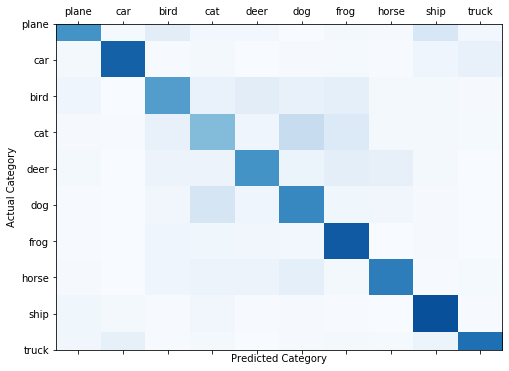

Category   - Accuracy
plane      - 61.9
car        - 81.0
bird       - 57.3
cat        - 44.0
deer       - 61.8
dog        - 66.6
frog       - 83.7
horse      - 70.1
ship       - 87.6
truck      - 75.6

Selected workers

[48 82 34 13  3 93  6 88  7  8 40 56 26 65 28]
Worker 48 : is  Honest
Worker 82 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 13 : is  Stealthy_Attacker
Worker 3 : is  Stealthy_Attacker
Worker 93 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 88 : is  Honest
Worker 7 : is  Honest
Worker 8 : is  Honest
Worker 40 : is  Honest
Worker 56 : is  Honest
Worker 26 : is  Honest
Worker 65 : is  Honest
Worker 28 : is  Stealthy_Attacker

 | Global Training Round : 13 |


Worker 48 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.708999
Train Epoch: 1 [400/500	(81%)]	Loss: 1.485362
Train Epoch: 2 [0/500	(1%)]	Loss: 0.797830
Train Epoch: 2 [400/500	(81%)]	Loss: 0.745889
Train Epoch: 3 [0/500	(1%)]	Loss: 0.646609
Train Epoch: 3 [400/500	(81%)]	Loss: 0.814065
Train Epoch: 4 [0/500	(1%)]	Loss: 0.719562
Train Epoch: 4 [400/500	(81%)]	Loss: 0.635518
Train Epoch: 5 [0/500	(1%)]	Loss: 0.452042
Train Epoch: 5 [400/500	(81%)]	Loss: 0.599579

Worker 48 ends training in Global Round:13 |

Worker 82 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.747729
Train Epoch: 1 [400/500	(81%)]	Loss: 0.699901
Train Epoch: 2 [0/500	(1%)]	Loss: 0.649901
Train Epoch: 2 [400/500	(81%)]	Loss: 0.792925
Train Epoch: 3 [0/500	(1%)]	Loss: 0.616837
Train Epoch: 3 [400/500	(81%)]	Loss: 0.713945
Train Epoch: 4 [0/500	(1%)]	Loss: 0.372296
Train Epoch: 4 [400/500	(81%)]	Loss: 0.715876
Train Epoch: 5 [0/500	(1%)]	Loss: 0.518148
Train Epoch: 5 [400/500	(81%)]	Loss: 0.524910

Worker 82 ends training in Global Round:13 |

Worker 34 starts training in Global Round:13 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  13


Train Epoch: 1 [0/500	(1%)]	Loss: 1.344706
Train Epoch: 1 [400/500	(81%)]	Loss: 1.163609
Train Epoch: 2 [0/500	(1%)]	Loss: 0.647758
Train Epoch: 2 [400/500	(81%)]	Loss: 0.936395
Train Epoch: 3 [0/500	(1%)]	Loss: 0.617464
Train Epoch: 3 [400/500	(81%)]	Loss: 0.957297
Train Epoch: 4 [0/500	(1%)]	Loss: 0.719588
Train Epoch: 4 [400/500	(81%)]	Loss: 0.775349
Train Epoch: 5 [0/500	(1%)]	Loss: 0.709588
Train Epoch: 5 [400/500	(81%)]	Loss: 0.655122

Performed attacks 1
Worker 34 ends training in Global Round:13 |

Worker 13 starts training in Global Round:13 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  13


Train Epoch: 1 [0/500	(1%)]	Loss: 1.264171
Train Epoch: 1 [400/500	(81%)]	Loss: 0.958150
Train Epoch: 2 [0/500	(1%)]	Loss: 0.721020
Train Epoch: 2 [400/500	(81%)]	Loss: 0.927955
Train Epoch: 3 [0/500	(1%)]	Loss: 0.690211
Train Epoch: 3 [400/500	(81%)]	Loss: 0.605817
Train Epoch: 4 [0/500	(1%)]	Loss: 0.477893
Train Epoch: 4 [400/500	(81%)]	Loss: 0.493609
Train Epoch: 5 [0/500	(1%)]	Loss: 0.585377
Train Epoch: 5 [400/500	(81%)]	Loss: 0.563071

Performed attacks 2
Worker 13 ends training in Global Round:13 |

Worker 3 starts training in Global Round:13 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  13


Train Epoch: 1 [0/500	(1%)]	Loss: 1.491446
Train Epoch: 1 [400/500	(81%)]	Loss: 1.130659
Train Epoch: 2 [0/500	(1%)]	Loss: 1.045788
Train Epoch: 2 [400/500	(81%)]	Loss: 0.994058
Train Epoch: 3 [0/500	(1%)]	Loss: 0.817550
Train Epoch: 3 [400/500	(81%)]	Loss: 0.688384
Train Epoch: 4 [0/500	(1%)]	Loss: 0.621774
Train Epoch: 4 [400/500	(81%)]	Loss: 0.519658
Train Epoch: 5 [0/500	(1%)]	Loss: 0.512047
Train Epoch: 5 [400/500	(81%)]	Loss: 0.628826

Performed attacks 3
Worker 3 ends training in Global Round:13 |

Worker 93 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.716909
Train Epoch: 1 [400/500	(81%)]	Loss: 1.239237
Train Epoch: 2 [0/500	(1%)]	Loss: 0.651375
Train Epoch: 2 [400/500	(81%)]	Loss: 0.714966
Train Epoch: 3 [0/500	(1%)]	Loss: 0.571976
Train Epoch: 3 [400/500	(81%)]	Loss: 0.654484
Train Epoch: 4 [0/500	(1%)]	Loss: 0.499875
Train Epoch: 4 [400/500	(81%)]	Loss: 0.610147
Train Epoch: 5 [0/500	(1%)]	Loss: 0.468201
Train Epoch: 5 [400/500	(81%)]	Loss: 0.555157

Worker 93 ends training in Global Round:13 |

Worker 6 starts training in Global Round:13 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  13


Train Epoch: 1 [0/500	(1%)]	Loss: 1.204037
Train Epoch: 1 [400/500	(81%)]	Loss: 1.134069
Train Epoch: 2 [0/500	(1%)]	Loss: 0.650461
Train Epoch: 2 [400/500	(81%)]	Loss: 1.107642
Train Epoch: 3 [0/500	(1%)]	Loss: 0.579243
Train Epoch: 3 [400/500	(81%)]	Loss: 0.602189
Train Epoch: 4 [0/500	(1%)]	Loss: 0.624726
Train Epoch: 4 [400/500	(81%)]	Loss: 0.632241
Train Epoch: 5 [0/500	(1%)]	Loss: 0.419836
Train Epoch: 5 [400/500	(81%)]	Loss: 0.526632

Performed attacks 4
Worker 6 ends training in Global Round:13 |

Worker 88 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.671044
Train Epoch: 1 [400/500	(81%)]	Loss: 0.979425
Train Epoch: 2 [0/500	(1%)]	Loss: 0.930125
Train Epoch: 2 [400/500	(81%)]	Loss: 0.771415
Train Epoch: 3 [0/500	(1%)]	Loss: 0.519975
Train Epoch: 3 [400/500	(81%)]	Loss: 0.820581
Train Epoch: 4 [0/500	(1%)]	Loss: 0.494077
Train Epoch: 4 [400/500	(81%)]	Loss: 0.433495
Train Epoch: 5 [0/500	(1%)]	Loss: 0.397756
Train Epoch: 5 [400/500	(81%)]	Loss: 0.514344

Worker 88 ends training in Global Round:13 |

Worker 7 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.073001
Train Epoch: 1 [400/500	(81%)]	Loss: 0.891821
Train Epoch: 2 [0/500	(1%)]	Loss: 0.892067
Train Epoch: 2 [400/500	(81%)]	Loss: 0.771941
Train Epoch: 3 [0/500	(1%)]	Loss: 0.632333
Train Epoch: 3 [400/500	(81%)]	Loss: 0.791647
Train Epoch: 4 [0/500	(1%)]	Loss: 0.530959
Train Epoch: 4 [400/500	(81%)]	Loss: 0.638886
Train Epoch: 5 [0/500	(1%)]	Loss: 0.394809
Train Epoch: 5 [400/500	(81%)]	Loss: 0.680989

Worker 7 ends training in Global Round:13 |

Worker 8 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.887624
Train Epoch: 1 [400/500	(81%)]	Loss: 0.923574
Train Epoch: 2 [0/500	(1%)]	Loss: 0.643563
Train Epoch: 2 [400/500	(81%)]	Loss: 0.670190
Train Epoch: 3 [0/500	(1%)]	Loss: 0.603534
Train Epoch: 3 [400/500	(81%)]	Loss: 0.398207
Train Epoch: 4 [0/500	(1%)]	Loss: 0.542310
Train Epoch: 4 [400/500	(81%)]	Loss: 0.473602
Train Epoch: 5 [0/500	(1%)]	Loss: 0.326002
Train Epoch: 5 [400/500	(81%)]	Loss: 0.578863

Worker 8 ends training in Global Round:13 |

Worker 40 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.900965
Train Epoch: 1 [400/500	(81%)]	Loss: 1.004432
Train Epoch: 2 [0/500	(1%)]	Loss: 0.927301
Train Epoch: 2 [400/500	(81%)]	Loss: 0.937927
Train Epoch: 3 [0/500	(1%)]	Loss: 0.643311
Train Epoch: 3 [400/500	(81%)]	Loss: 0.670933
Train Epoch: 4 [0/500	(1%)]	Loss: 0.473317
Train Epoch: 4 [400/500	(81%)]	Loss: 0.834454
Train Epoch: 5 [0/500	(1%)]	Loss: 0.729712
Train Epoch: 5 [400/500	(81%)]	Loss: 0.788546

Worker 40 ends training in Global Round:13 |

Worker 56 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.807312
Train Epoch: 1 [400/500	(81%)]	Loss: 1.182506
Train Epoch: 2 [0/500	(1%)]	Loss: 0.609243
Train Epoch: 2 [400/500	(81%)]	Loss: 0.784621
Train Epoch: 3 [0/500	(1%)]	Loss: 0.497209
Train Epoch: 3 [400/500	(81%)]	Loss: 0.619845
Train Epoch: 4 [0/500	(1%)]	Loss: 0.646908
Train Epoch: 4 [400/500	(81%)]	Loss: 0.567361
Train Epoch: 5 [0/500	(1%)]	Loss: 0.428314
Train Epoch: 5 [400/500	(81%)]	Loss: 0.678551

Worker 56 ends training in Global Round:13 |

Worker 26 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.939747
Train Epoch: 1 [400/500	(81%)]	Loss: 0.928630
Train Epoch: 2 [0/500	(1%)]	Loss: 0.694914
Train Epoch: 2 [400/500	(81%)]	Loss: 0.831794
Train Epoch: 3 [0/500	(1%)]	Loss: 0.757236
Train Epoch: 3 [400/500	(81%)]	Loss: 1.046988
Train Epoch: 4 [0/500	(1%)]	Loss: 0.670519
Train Epoch: 4 [400/500	(81%)]	Loss: 0.758294
Train Epoch: 5 [0/500	(1%)]	Loss: 0.554669
Train Epoch: 5 [400/500	(81%)]	Loss: 0.456314

Worker 26 ends training in Global Round:13 |

Worker 65 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.658639
Train Epoch: 1 [400/500	(81%)]	Loss: 1.096937
Train Epoch: 2 [0/500	(1%)]	Loss: 0.632375
Train Epoch: 2 [400/500	(81%)]	Loss: 0.756004
Train Epoch: 3 [0/500	(1%)]	Loss: 0.499244
Train Epoch: 3 [400/500	(81%)]	Loss: 0.575275
Train Epoch: 4 [0/500	(1%)]	Loss: 0.397372
Train Epoch: 4 [400/500	(81%)]	Loss: 0.663192
Train Epoch: 5 [0/500	(1%)]	Loss: 0.374031
Train Epoch: 5 [400/500	(81%)]	Loss: 0.701838

Worker 65 ends training in Global Round:13 |

Worker 28 starts training in Global Round:13 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  13


Train Epoch: 1 [0/500	(1%)]	Loss: 1.324169
Train Epoch: 1 [400/500	(81%)]	Loss: 1.368133
Train Epoch: 2 [0/500	(1%)]	Loss: 0.681315
Train Epoch: 2 [400/500	(81%)]	Loss: 0.834307
Train Epoch: 3 [0/500	(1%)]	Loss: 0.680678
Train Epoch: 3 [400/500	(81%)]	Loss: 0.677051
Train Epoch: 4 [0/500	(1%)]	Loss: 0.533602
Train Epoch: 4 [400/500	(81%)]	Loss: 0.745056
Train Epoch: 5 [0/500	(1%)]	Loss: 0.652009
Train Epoch: 5 [400/500	(81%)]	Loss: 0.662118

Performed attacks 5
Worker 28 ends training in Global Round:13 |
Last layer biases  [array([ 0.0350567 , -0.02780086, -0.0159959 ,  0.02880836,  0.03705465,
       -0.01961565,  0.04223192, -0.00489482, -0.01684289, -0.04210024],
      dtype=float32), array([ 0.03049101, -0.02711333, -0.01784096,  0.03129109,  0.03407091,
       -0.01670733,  0.04343267, -0.00772663, -0.0166473 , -0.03734889],
      dtype=float32), array([ 0.0326391 , -0.02522802, -0.01662352,  0.0366153 ,  0.03888312,
       -0.01836101,  0.04436272, -0.02442192, -0.0145001 , -0.0

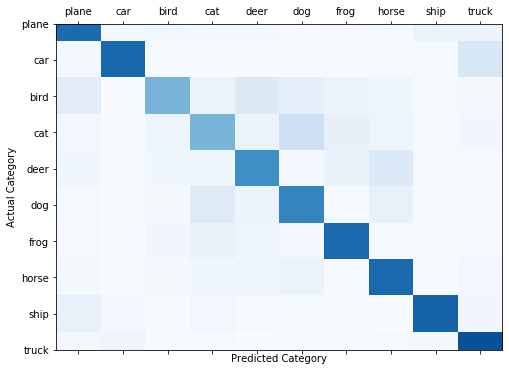

Category   - Accuracy
plane      - 77.3
car        - 78.9
bird       - 46.9
cat        - 46.5
deer       - 63.3
dog        - 67.4
frog       - 78.3
horse      - 78.5
ship       - 80.4
truck      - 87.6

Selected workers

[43 38 56 92  8 30 46 35 40 41 24 95 54  4 23]
Worker 43 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 56 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 8 : is  Honest
Worker 30 : is  Honest
Worker 46 : is  Stealthy_Attacker
Worker 35 : is  Honest
Worker 40 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 24 : is  Honest
Worker 95 : is  Honest
Worker 54 : is  Honest
Worker 4 : is  Honest
Worker 23 : is  Stealthy_Attacker

 | Global Training Round : 14 |


Worker 43 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.749860
Train Epoch: 1 [400/500	(81%)]	Loss: 0.880134
Train Epoch: 2 [0/500	(1%)]	Loss: 0.735614
Train Epoch: 2 [400/500	(81%)]	Loss: 0.788540
Train Epoch: 3 [0/500	(1%)]	Loss: 0.680203
Train Epoch: 3 [400/500	(81%)]	Loss: 0.754742
Train Epoch: 4 [0/500	(1%)]	Loss: 0.503457
Train Epoch: 4 [400/500	(81%)]	Loss: 0.580709
Train Epoch: 5 [0/500	(1%)]	Loss: 0.345557
Train Epoch: 5 [400/500	(81%)]	Loss: 0.370242

Worker 43 ends training in Global Round:14 |

Worker 38 starts training in Global Round:14 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  14


Train Epoch: 1 [0/500	(1%)]	Loss: 1.182977
Train Epoch: 1 [400/500	(81%)]	Loss: 0.997274
Train Epoch: 2 [0/500	(1%)]	Loss: 0.636605
Train Epoch: 2 [400/500	(81%)]	Loss: 0.705757
Train Epoch: 3 [0/500	(1%)]	Loss: 0.647239
Train Epoch: 3 [400/500	(81%)]	Loss: 0.568180
Train Epoch: 4 [0/500	(1%)]	Loss: 0.498882
Train Epoch: 4 [400/500	(81%)]	Loss: 0.582114
Train Epoch: 5 [0/500	(1%)]	Loss: 0.488946
Train Epoch: 5 [400/500	(81%)]	Loss: 0.469655

Performed attacks 1
Worker 38 ends training in Global Round:14 |

Worker 56 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.629633
Train Epoch: 1 [400/500	(81%)]	Loss: 0.688686
Train Epoch: 2 [0/500	(1%)]	Loss: 0.496017
Train Epoch: 2 [400/500	(81%)]	Loss: 0.690086
Train Epoch: 3 [0/500	(1%)]	Loss: 0.429693
Train Epoch: 3 [400/500	(81%)]	Loss: 0.533523
Train Epoch: 4 [0/500	(1%)]	Loss: 0.322791
Train Epoch: 4 [400/500	(81%)]	Loss: 0.416689
Train Epoch: 5 [0/500	(1%)]	Loss: 0.466522
Train Epoch: 5 [400/500	(81%)]	Loss: 0.345795

Worker 56 ends training in Global Round:14 |

Worker 92 starts training in Global Round:14 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  14


Train Epoch: 1 [0/500	(1%)]	Loss: 1.406705
Train Epoch: 1 [400/500	(81%)]	Loss: 1.010412
Train Epoch: 2 [0/500	(1%)]	Loss: 0.731166
Train Epoch: 2 [400/500	(81%)]	Loss: 0.921701
Train Epoch: 3 [0/500	(1%)]	Loss: 0.719904
Train Epoch: 3 [400/500	(81%)]	Loss: 0.641273
Train Epoch: 4 [0/500	(1%)]	Loss: 0.467609
Train Epoch: 4 [400/500	(81%)]	Loss: 0.598521
Train Epoch: 5 [0/500	(1%)]	Loss: 0.669397
Train Epoch: 5 [400/500	(81%)]	Loss: 0.499025

Performed attacks 2
Worker 92 ends training in Global Round:14 |

Worker 8 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.674810
Train Epoch: 1 [400/500	(81%)]	Loss: 0.603718
Train Epoch: 2 [0/500	(1%)]	Loss: 0.509863
Train Epoch: 2 [400/500	(81%)]	Loss: 0.610747
Train Epoch: 3 [0/500	(1%)]	Loss: 0.570978
Train Epoch: 3 [400/500	(81%)]	Loss: 0.613111
Train Epoch: 4 [0/500	(1%)]	Loss: 0.355743
Train Epoch: 4 [400/500	(81%)]	Loss: 0.724096
Train Epoch: 5 [0/500	(1%)]	Loss: 0.368743
Train Epoch: 5 [400/500	(81%)]	Loss: 0.594306

Worker 8 ends training in Global Round:14 |

Worker 30 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.799628
Train Epoch: 1 [400/500	(81%)]	Loss: 1.228548
Train Epoch: 2 [0/500	(1%)]	Loss: 0.763144
Train Epoch: 2 [400/500	(81%)]	Loss: 0.684510
Train Epoch: 3 [0/500	(1%)]	Loss: 0.683383
Train Epoch: 3 [400/500	(81%)]	Loss: 0.727943
Train Epoch: 4 [0/500	(1%)]	Loss: 0.543689
Train Epoch: 4 [400/500	(81%)]	Loss: 0.540058
Train Epoch: 5 [0/500	(1%)]	Loss: 0.625707
Train Epoch: 5 [400/500	(81%)]	Loss: 0.459093

Worker 30 ends training in Global Round:14 |

Worker 46 starts training in Global Round:14 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  14


Train Epoch: 1 [0/500	(1%)]	Loss: 1.203296
Train Epoch: 1 [400/500	(81%)]	Loss: 1.136849
Train Epoch: 2 [0/500	(1%)]	Loss: 0.638480
Train Epoch: 2 [400/500	(81%)]	Loss: 0.590235
Train Epoch: 3 [0/500	(1%)]	Loss: 0.696417
Train Epoch: 3 [400/500	(81%)]	Loss: 0.738448
Train Epoch: 4 [0/500	(1%)]	Loss: 0.558660
Train Epoch: 4 [400/500	(81%)]	Loss: 0.576639
Train Epoch: 5 [0/500	(1%)]	Loss: 0.470468
Train Epoch: 5 [400/500	(81%)]	Loss: 0.505616

Performed attacks 3
Worker 46 ends training in Global Round:14 |

Worker 35 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.796182
Train Epoch: 1 [400/500	(81%)]	Loss: 0.849224
Train Epoch: 2 [0/500	(1%)]	Loss: 0.663812
Train Epoch: 2 [400/500	(81%)]	Loss: 0.793384
Train Epoch: 3 [0/500	(1%)]	Loss: 0.548567
Train Epoch: 3 [400/500	(81%)]	Loss: 0.603391
Train Epoch: 4 [0/500	(1%)]	Loss: 0.501401
Train Epoch: 4 [400/500	(81%)]	Loss: 0.625455
Train Epoch: 5 [0/500	(1%)]	Loss: 0.455933
Train Epoch: 5 [400/500	(81%)]	Loss: 0.616414

Worker 35 ends training in Global Round:14 |

Worker 40 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.896215
Train Epoch: 1 [400/500	(81%)]	Loss: 1.119215
Train Epoch: 2 [0/500	(1%)]	Loss: 0.621851
Train Epoch: 2 [400/500	(81%)]	Loss: 0.670517
Train Epoch: 3 [0/500	(1%)]	Loss: 0.436681
Train Epoch: 3 [400/500	(81%)]	Loss: 0.675106
Train Epoch: 4 [0/500	(1%)]	Loss: 0.473216
Train Epoch: 4 [400/500	(81%)]	Loss: 0.532632
Train Epoch: 5 [0/500	(1%)]	Loss: 0.447861
Train Epoch: 5 [400/500	(81%)]	Loss: 0.691544

Worker 40 ends training in Global Round:14 |

Worker 41 starts training in Global Round:14 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  14


Train Epoch: 1 [0/500	(1%)]	Loss: 1.531866
Train Epoch: 1 [400/500	(81%)]	Loss: 1.103360
Train Epoch: 2 [0/500	(1%)]	Loss: 0.796246
Train Epoch: 2 [400/500	(81%)]	Loss: 0.954276
Train Epoch: 3 [0/500	(1%)]	Loss: 0.797860
Train Epoch: 3 [400/500	(81%)]	Loss: 0.585263
Train Epoch: 4 [0/500	(1%)]	Loss: 0.719145
Train Epoch: 4 [400/500	(81%)]	Loss: 0.508005
Train Epoch: 5 [0/500	(1%)]	Loss: 0.577669
Train Epoch: 5 [400/500	(81%)]	Loss: 0.631617

Performed attacks 4
Worker 41 ends training in Global Round:14 |

Worker 24 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.728858
Train Epoch: 1 [400/500	(81%)]	Loss: 0.848773
Train Epoch: 2 [0/500	(1%)]	Loss: 0.380300
Train Epoch: 2 [400/500	(81%)]	Loss: 0.748042
Train Epoch: 3 [0/500	(1%)]	Loss: 0.475625
Train Epoch: 3 [400/500	(81%)]	Loss: 0.602422
Train Epoch: 4 [0/500	(1%)]	Loss: 0.437445
Train Epoch: 4 [400/500	(81%)]	Loss: 0.462476
Train Epoch: 5 [0/500	(1%)]	Loss: 0.297776
Train Epoch: 5 [400/500	(81%)]	Loss: 0.552050

Worker 24 ends training in Global Round:14 |

Worker 95 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.077463
Train Epoch: 1 [400/500	(81%)]	Loss: 0.827800
Train Epoch: 2 [0/500	(1%)]	Loss: 0.512048
Train Epoch: 2 [400/500	(81%)]	Loss: 0.696321
Train Epoch: 3 [0/500	(1%)]	Loss: 0.644618
Train Epoch: 3 [400/500	(81%)]	Loss: 0.597666
Train Epoch: 4 [0/500	(1%)]	Loss: 0.455427
Train Epoch: 4 [400/500	(81%)]	Loss: 0.498849
Train Epoch: 5 [0/500	(1%)]	Loss: 0.280987
Train Epoch: 5 [400/500	(81%)]	Loss: 0.589176

Worker 95 ends training in Global Round:14 |

Worker 54 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.920417
Train Epoch: 1 [400/500	(81%)]	Loss: 1.049757
Train Epoch: 2 [0/500	(1%)]	Loss: 0.572866
Train Epoch: 2 [400/500	(81%)]	Loss: 0.887854
Train Epoch: 3 [0/500	(1%)]	Loss: 0.696152
Train Epoch: 3 [400/500	(81%)]	Loss: 0.653362
Train Epoch: 4 [0/500	(1%)]	Loss: 0.541398
Train Epoch: 4 [400/500	(81%)]	Loss: 0.544682
Train Epoch: 5 [0/500	(1%)]	Loss: 0.334741
Train Epoch: 5 [400/500	(81%)]	Loss: 0.500353

Worker 54 ends training in Global Round:14 |

Worker 4 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.020606
Train Epoch: 1 [400/500	(81%)]	Loss: 0.912609
Train Epoch: 2 [0/500	(1%)]	Loss: 0.603043
Train Epoch: 2 [400/500	(81%)]	Loss: 0.816262
Train Epoch: 3 [0/500	(1%)]	Loss: 0.687164
Train Epoch: 3 [400/500	(81%)]	Loss: 0.665892
Train Epoch: 4 [0/500	(1%)]	Loss: 0.576657
Train Epoch: 4 [400/500	(81%)]	Loss: 0.530534
Train Epoch: 5 [0/500	(1%)]	Loss: 0.507785
Train Epoch: 5 [400/500	(81%)]	Loss: 0.482300

Worker 4 ends training in Global Round:14 |

Worker 23 starts training in Global Round:14 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  14


Train Epoch: 1 [0/500	(1%)]	Loss: 1.290889
Train Epoch: 1 [400/500	(81%)]	Loss: 0.885740
Train Epoch: 2 [0/500	(1%)]	Loss: 0.563703
Train Epoch: 2 [400/500	(81%)]	Loss: 0.733148
Train Epoch: 3 [0/500	(1%)]	Loss: 0.620933
Train Epoch: 3 [400/500	(81%)]	Loss: 0.688318
Train Epoch: 4 [0/500	(1%)]	Loss: 0.606316
Train Epoch: 4 [400/500	(81%)]	Loss: 0.573658
Train Epoch: 5 [0/500	(1%)]	Loss: 0.322433
Train Epoch: 5 [400/500	(81%)]	Loss: 0.394010

Performed attacks 5
Worker 23 ends training in Global Round:14 |
Last layer biases  [array([ 0.03115218, -0.02998915, -0.01746119,  0.03179204,  0.03261581,
       -0.01876649,  0.04340769, -0.00393034, -0.01633614, -0.03658314],
      dtype=float32), array([ 0.03396327, -0.02585429, -0.01474442,  0.03283025,  0.0417244 ,
       -0.0162798 ,  0.04201702, -0.02397768, -0.01439621, -0.03938124],
      dtype=float32), array([ 0.03173302, -0.02858328, -0.01859722,  0.03200906,  0.03705319,
       -0.01620158,  0.0414206 , -0.00644778, -0.01847505, -0.0

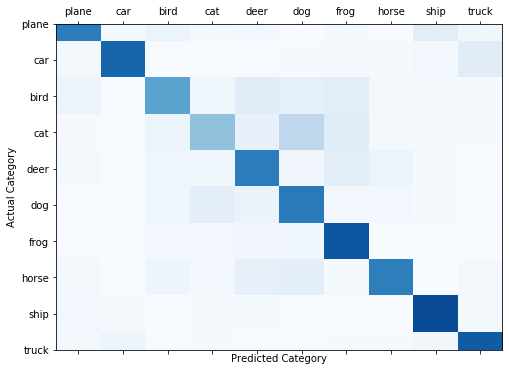

Category   - Accuracy
plane      - 70.6
car        - 79.6
bird       - 54.9
cat        - 40.7
deer       - 70.7
dog        - 71.2
frog       - 85.5
horse      - 69.7
ship       - 89.3
truck      - 82.9

Selected workers

[36 77 86 73 47 30  2 39 49 15 89 54 79 14 10]
Worker 36 : is  Honest
Worker 77 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 73 : is  Honest
Worker 47 : is  Honest
Worker 30 : is  Honest
Worker 2 : is  Honest
Worker 39 : is  Honest
Worker 49 : is  Honest
Worker 15 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 14 : is  Stealthy_Attacker
Worker 10 : is  Honest

 | Global Training Round : 15 |


Worker 36 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.961025
Train Epoch: 1 [400/500	(81%)]	Loss: 0.965034
Train Epoch: 2 [0/500	(1%)]	Loss: 0.631131
Train Epoch: 2 [400/500	(81%)]	Loss: 0.598332
Train Epoch: 3 [0/500	(1%)]	Loss: 0.469263
Train Epoch: 3 [400/500	(81%)]	Loss: 0.714527
Train Epoch: 4 [0/500	(1%)]	Loss: 0.593580
Train Epoch: 4 [400/500	(81%)]	Loss: 0.684615
Train Epoch: 5 [0/500	(1%)]	Loss: 0.471152
Train Epoch: 5 [400/500	(81%)]	Loss: 0.623864

Worker 36 ends training in Global Round:15 |

Worker 77 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.967278
Train Epoch: 1 [400/500	(81%)]	Loss: 0.943485
Train Epoch: 2 [0/500	(1%)]	Loss: 0.690111
Train Epoch: 2 [400/500	(81%)]	Loss: 1.011425
Train Epoch: 3 [0/500	(1%)]	Loss: 0.612341
Train Epoch: 3 [400/500	(81%)]	Loss: 0.633472
Train Epoch: 4 [0/500	(1%)]	Loss: 0.482768
Train Epoch: 4 [400/500	(81%)]	Loss: 0.706752
Train Epoch: 5 [0/500	(1%)]	Loss: 0.544721
Train Epoch: 5 [400/500	(81%)]	Loss: 0.777709

Worker 77 ends training in Global Round:15 |

Worker 86 starts training in Global Round:15 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  15


Train Epoch: 1 [0/500	(1%)]	Loss: 1.021729
Train Epoch: 1 [400/500	(81%)]	Loss: 0.722753
Train Epoch: 2 [0/500	(1%)]	Loss: 0.728469
Train Epoch: 2 [400/500	(81%)]	Loss: 0.672555
Train Epoch: 3 [0/500	(1%)]	Loss: 0.441809
Train Epoch: 3 [400/500	(81%)]	Loss: 0.764729
Train Epoch: 4 [0/500	(1%)]	Loss: 0.484814
Train Epoch: 4 [400/500	(81%)]	Loss: 0.484103
Train Epoch: 5 [0/500	(1%)]	Loss: 0.364982
Train Epoch: 5 [400/500	(81%)]	Loss: 0.314206

Performed attacks 1
Worker 86 ends training in Global Round:15 |

Worker 73 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.755233
Train Epoch: 1 [400/500	(81%)]	Loss: 0.900637
Train Epoch: 2 [0/500	(1%)]	Loss: 0.677079
Train Epoch: 2 [400/500	(81%)]	Loss: 0.807151
Train Epoch: 3 [0/500	(1%)]	Loss: 0.592661
Train Epoch: 3 [400/500	(81%)]	Loss: 0.537423
Train Epoch: 4 [0/500	(1%)]	Loss: 0.420140
Train Epoch: 4 [400/500	(81%)]	Loss: 0.448906
Train Epoch: 5 [0/500	(1%)]	Loss: 0.309482
Train Epoch: 5 [400/500	(81%)]	Loss: 0.499088

Worker 73 ends training in Global Round:15 |

Worker 47 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.778041
Train Epoch: 1 [400/500	(81%)]	Loss: 1.008942
Train Epoch: 2 [0/500	(1%)]	Loss: 0.521386
Train Epoch: 2 [400/500	(81%)]	Loss: 0.628329
Train Epoch: 3 [0/500	(1%)]	Loss: 0.508898
Train Epoch: 3 [400/500	(81%)]	Loss: 0.643769
Train Epoch: 4 [0/500	(1%)]	Loss: 0.422843
Train Epoch: 4 [400/500	(81%)]	Loss: 0.712230
Train Epoch: 5 [0/500	(1%)]	Loss: 0.453491
Train Epoch: 5 [400/500	(81%)]	Loss: 0.461770

Worker 47 ends training in Global Round:15 |

Worker 30 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.823035
Train Epoch: 1 [400/500	(81%)]	Loss: 1.036007
Train Epoch: 2 [0/500	(1%)]	Loss: 0.555288
Train Epoch: 2 [400/500	(81%)]	Loss: 0.706459
Train Epoch: 3 [0/500	(1%)]	Loss: 0.388836
Train Epoch: 3 [400/500	(81%)]	Loss: 0.965757
Train Epoch: 4 [0/500	(1%)]	Loss: 0.531139
Train Epoch: 4 [400/500	(81%)]	Loss: 0.792588
Train Epoch: 5 [0/500	(1%)]	Loss: 0.621560
Train Epoch: 5 [400/500	(81%)]	Loss: 0.462542

Worker 30 ends training in Global Round:15 |

Worker 2 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.853227
Train Epoch: 1 [400/500	(81%)]	Loss: 0.835608
Train Epoch: 2 [0/500	(1%)]	Loss: 0.809668
Train Epoch: 2 [400/500	(81%)]	Loss: 0.769721
Train Epoch: 3 [0/500	(1%)]	Loss: 0.673157
Train Epoch: 3 [400/500	(81%)]	Loss: 0.606269
Train Epoch: 4 [0/500	(1%)]	Loss: 0.593941
Train Epoch: 4 [400/500	(81%)]	Loss: 0.567807
Train Epoch: 5 [0/500	(1%)]	Loss: 0.522599
Train Epoch: 5 [400/500	(81%)]	Loss: 0.482744

Worker 2 ends training in Global Round:15 |

Worker 39 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.612492
Train Epoch: 1 [400/500	(81%)]	Loss: 0.839915
Train Epoch: 2 [0/500	(1%)]	Loss: 0.842058
Train Epoch: 2 [400/500	(81%)]	Loss: 0.580325
Train Epoch: 3 [0/500	(1%)]	Loss: 0.596149
Train Epoch: 3 [400/500	(81%)]	Loss: 0.635840
Train Epoch: 4 [0/500	(1%)]	Loss: 0.410206
Train Epoch: 4 [400/500	(81%)]	Loss: 0.454470
Train Epoch: 5 [0/500	(1%)]	Loss: 0.352021
Train Epoch: 5 [400/500	(81%)]	Loss: 0.355044

Worker 39 ends training in Global Round:15 |

Worker 49 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.875108
Train Epoch: 1 [400/500	(81%)]	Loss: 1.307077
Train Epoch: 2 [0/500	(1%)]	Loss: 0.678981
Train Epoch: 2 [400/500	(81%)]	Loss: 0.727665
Train Epoch: 3 [0/500	(1%)]	Loss: 0.835121
Train Epoch: 3 [400/500	(81%)]	Loss: 0.754127
Train Epoch: 4 [0/500	(1%)]	Loss: 0.537478
Train Epoch: 4 [400/500	(81%)]	Loss: 0.715973
Train Epoch: 5 [0/500	(1%)]	Loss: 0.339920
Train Epoch: 5 [400/500	(81%)]	Loss: 0.522416

Worker 49 ends training in Global Round:15 |

Worker 15 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.994238
Train Epoch: 1 [400/500	(81%)]	Loss: 0.949046
Train Epoch: 2 [0/500	(1%)]	Loss: 0.784747
Train Epoch: 2 [400/500	(81%)]	Loss: 0.894804
Train Epoch: 3 [0/500	(1%)]	Loss: 0.592229
Train Epoch: 3 [400/500	(81%)]	Loss: 0.589244
Train Epoch: 4 [0/500	(1%)]	Loss: 0.600757
Train Epoch: 4 [400/500	(81%)]	Loss: 0.641520
Train Epoch: 5 [0/500	(1%)]	Loss: 0.380320
Train Epoch: 5 [400/500	(81%)]	Loss: 0.573477

Worker 15 ends training in Global Round:15 |

Worker 89 starts training in Global Round:15 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  15


Train Epoch: 1 [0/500	(1%)]	Loss: 0.962675
Train Epoch: 1 [400/500	(81%)]	Loss: 0.981042
Train Epoch: 2 [0/500	(1%)]	Loss: 0.801709
Train Epoch: 2 [400/500	(81%)]	Loss: 0.796629
Train Epoch: 3 [0/500	(1%)]	Loss: 0.620123
Train Epoch: 3 [400/500	(81%)]	Loss: 0.604352
Train Epoch: 4 [0/500	(1%)]	Loss: 0.399570
Train Epoch: 4 [400/500	(81%)]	Loss: 0.552252
Train Epoch: 5 [0/500	(1%)]	Loss: 0.434932
Train Epoch: 5 [400/500	(81%)]	Loss: 0.444872

Performed attacks 2
Worker 89 ends training in Global Round:15 |

Worker 54 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.734388
Train Epoch: 1 [400/500	(81%)]	Loss: 0.914882
Train Epoch: 2 [0/500	(1%)]	Loss: 0.523393
Train Epoch: 2 [400/500	(81%)]	Loss: 0.770749
Train Epoch: 3 [0/500	(1%)]	Loss: 0.491260
Train Epoch: 3 [400/500	(81%)]	Loss: 0.774405
Train Epoch: 4 [0/500	(1%)]	Loss: 0.574577
Train Epoch: 4 [400/500	(81%)]	Loss: 0.472560
Train Epoch: 5 [0/500	(1%)]	Loss: 0.319853
Train Epoch: 5 [400/500	(81%)]	Loss: 0.477448

Worker 54 ends training in Global Round:15 |

Worker 79 starts training in Global Round:15 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  15


Train Epoch: 1 [0/500	(1%)]	Loss: 1.611183
Train Epoch: 1 [400/500	(81%)]	Loss: 1.168500
Train Epoch: 2 [0/500	(1%)]	Loss: 0.706266
Train Epoch: 2 [400/500	(81%)]	Loss: 0.754138
Train Epoch: 3 [0/500	(1%)]	Loss: 0.599529
Train Epoch: 3 [400/500	(81%)]	Loss: 0.594159
Train Epoch: 4 [0/500	(1%)]	Loss: 0.641703
Train Epoch: 4 [400/500	(81%)]	Loss: 0.788432
Train Epoch: 5 [0/500	(1%)]	Loss: 0.334851
Train Epoch: 5 [400/500	(81%)]	Loss: 0.712043

Performed attacks 3
Worker 79 ends training in Global Round:15 |

Worker 14 starts training in Global Round:15 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  15


Train Epoch: 1 [0/500	(1%)]	Loss: 1.181274
Train Epoch: 1 [400/500	(81%)]	Loss: 0.999323
Train Epoch: 2 [0/500	(1%)]	Loss: 0.521859
Train Epoch: 2 [400/500	(81%)]	Loss: 0.716881
Train Epoch: 3 [0/500	(1%)]	Loss: 0.674937
Train Epoch: 3 [400/500	(81%)]	Loss: 0.825620
Train Epoch: 4 [0/500	(1%)]	Loss: 0.595186
Train Epoch: 4 [400/500	(81%)]	Loss: 0.602241
Train Epoch: 5 [0/500	(1%)]	Loss: 0.557129
Train Epoch: 5 [400/500	(81%)]	Loss: 0.503626

Performed attacks 4
Worker 14 ends training in Global Round:15 |

Worker 10 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.869656
Train Epoch: 1 [400/500	(81%)]	Loss: 0.821284
Train Epoch: 2 [0/500	(1%)]	Loss: 0.620907
Train Epoch: 2 [400/500	(81%)]	Loss: 0.818381
Train Epoch: 3 [0/500	(1%)]	Loss: 0.409188
Train Epoch: 3 [400/500	(81%)]	Loss: 0.515032
Train Epoch: 4 [0/500	(1%)]	Loss: 0.425288
Train Epoch: 4 [400/500	(81%)]	Loss: 0.493015
Train Epoch: 5 [0/500	(1%)]	Loss: 0.599959
Train Epoch: 5 [400/500	(81%)]	Loss: 0.501298

Worker 10 ends training in Global Round:15 |
Last layer biases  [array([ 0.03346984, -0.02743973, -0.01840244,  0.03384493,  0.0351494 ,
       -0.02051966,  0.04318992, -0.00656218, -0.01832523, -0.03850354],
      dtype=float32), array([ 0.03227728, -0.02685622, -0.01782295,  0.0317023 ,  0.03263748,
       -0.01783972,  0.04084427, -0.00295658, -0.01592265, -0.0401619 ],
      dtype=float32), array([ 0.0354369 , -0.02963198, -0.01489969,  0.03467958,  0.04063096,
       -0.01692576,  0.04442982, -0.02474536, -0.01497032, -0.03810287],
      dtyp

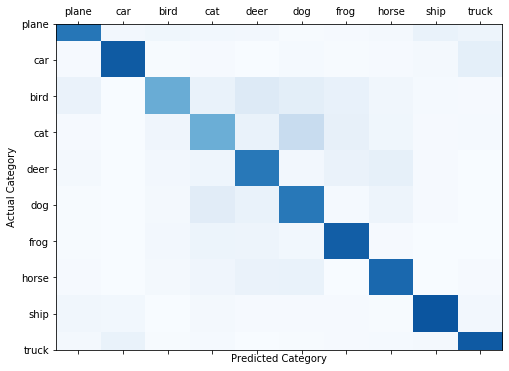

Category   - Accuracy
plane      - 72.8
car        - 83.4
bird       - 50.4
cat        - 49.8
deer       - 72.2
dog        - 71.9
frog       - 82.4
horse      - 78.4
ship       - 85.7
truck      - 83.9

Selected workers

[17 48 45 15 76 49 35 91 57 73 54 79 82 13 22]
Worker 17 : is  Honest
Worker 48 : is  Honest
Worker 45 : is  Honest
Worker 15 : is  Honest
Worker 76 : is  Honest
Worker 49 : is  Honest
Worker 35 : is  Honest
Worker 91 : is  Honest
Worker 57 : is  Honest
Worker 73 : is  Honest
Worker 54 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 22 : is  Stealthy_Attacker

 | Global Training Round : 16 |


Worker 17 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.025559
Train Epoch: 1 [400/500	(81%)]	Loss: 0.761857
Train Epoch: 2 [0/500	(1%)]	Loss: 0.688245
Train Epoch: 2 [400/500	(81%)]	Loss: 0.771805
Train Epoch: 3 [0/500	(1%)]	Loss: 0.649021
Train Epoch: 3 [400/500	(81%)]	Loss: 0.692609
Train Epoch: 4 [0/500	(1%)]	Loss: 0.562078
Train Epoch: 4 [400/500	(81%)]	Loss: 0.588172
Train Epoch: 5 [0/500	(1%)]	Loss: 0.432105
Train Epoch: 5 [400/500	(81%)]	Loss: 0.644015

Worker 17 ends training in Global Round:16 |

Worker 48 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.842897
Train Epoch: 1 [400/500	(81%)]	Loss: 0.871319
Train Epoch: 2 [0/500	(1%)]	Loss: 0.710462
Train Epoch: 2 [400/500	(81%)]	Loss: 0.653278
Train Epoch: 3 [0/500	(1%)]	Loss: 0.448224
Train Epoch: 3 [400/500	(81%)]	Loss: 0.658130
Train Epoch: 4 [0/500	(1%)]	Loss: 0.475987
Train Epoch: 4 [400/500	(81%)]	Loss: 0.713754
Train Epoch: 5 [0/500	(1%)]	Loss: 0.398736
Train Epoch: 5 [400/500	(81%)]	Loss: 0.497913

Worker 48 ends training in Global Round:16 |

Worker 45 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.770987
Train Epoch: 1 [400/500	(81%)]	Loss: 0.656808
Train Epoch: 2 [0/500	(1%)]	Loss: 0.639222
Train Epoch: 2 [400/500	(81%)]	Loss: 0.747632
Train Epoch: 3 [0/500	(1%)]	Loss: 0.575251
Train Epoch: 3 [400/500	(81%)]	Loss: 0.382558
Train Epoch: 4 [0/500	(1%)]	Loss: 0.415999
Train Epoch: 4 [400/500	(81%)]	Loss: 0.466306
Train Epoch: 5 [0/500	(1%)]	Loss: 0.319399
Train Epoch: 5 [400/500	(81%)]	Loss: 0.294591

Worker 45 ends training in Global Round:16 |

Worker 15 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.728684
Train Epoch: 1 [400/500	(81%)]	Loss: 0.935463
Train Epoch: 2 [0/500	(1%)]	Loss: 0.444202
Train Epoch: 2 [400/500	(81%)]	Loss: 0.622627
Train Epoch: 3 [0/500	(1%)]	Loss: 0.370717
Train Epoch: 3 [400/500	(81%)]	Loss: 0.635595
Train Epoch: 4 [0/500	(1%)]	Loss: 0.466800
Train Epoch: 4 [400/500	(81%)]	Loss: 0.703764
Train Epoch: 5 [0/500	(1%)]	Loss: 0.549485
Train Epoch: 5 [400/500	(81%)]	Loss: 0.551443

Worker 15 ends training in Global Round:16 |

Worker 76 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.712530
Train Epoch: 1 [400/500	(81%)]	Loss: 0.711836
Train Epoch: 2 [0/500	(1%)]	Loss: 0.450188
Train Epoch: 2 [400/500	(81%)]	Loss: 0.664083
Train Epoch: 3 [0/500	(1%)]	Loss: 0.411408
Train Epoch: 3 [400/500	(81%)]	Loss: 0.366066
Train Epoch: 4 [0/500	(1%)]	Loss: 0.318450
Train Epoch: 4 [400/500	(81%)]	Loss: 0.277972
Train Epoch: 5 [0/500	(1%)]	Loss: 0.251598
Train Epoch: 5 [400/500	(81%)]	Loss: 0.507378

Worker 76 ends training in Global Round:16 |

Worker 49 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.660383
Train Epoch: 1 [400/500	(81%)]	Loss: 0.924101
Train Epoch: 2 [0/500	(1%)]	Loss: 0.559302
Train Epoch: 2 [400/500	(81%)]	Loss: 0.708895
Train Epoch: 3 [0/500	(1%)]	Loss: 0.564375
Train Epoch: 3 [400/500	(81%)]	Loss: 0.567905
Train Epoch: 4 [0/500	(1%)]	Loss: 0.510195
Train Epoch: 4 [400/500	(81%)]	Loss: 0.637297
Train Epoch: 5 [0/500	(1%)]	Loss: 0.293838
Train Epoch: 5 [400/500	(81%)]	Loss: 0.623325

Worker 49 ends training in Global Round:16 |

Worker 35 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.590459
Train Epoch: 1 [400/500	(81%)]	Loss: 0.947190
Train Epoch: 2 [0/500	(1%)]	Loss: 0.505714
Train Epoch: 2 [400/500	(81%)]	Loss: 0.629829
Train Epoch: 3 [0/500	(1%)]	Loss: 0.479654
Train Epoch: 3 [400/500	(81%)]	Loss: 0.499914
Train Epoch: 4 [0/500	(1%)]	Loss: 0.615640
Train Epoch: 4 [400/500	(81%)]	Loss: 0.540149
Train Epoch: 5 [0/500	(1%)]	Loss: 0.371728
Train Epoch: 5 [400/500	(81%)]	Loss: 0.562486

Worker 35 ends training in Global Round:16 |

Worker 91 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.967694
Train Epoch: 1 [400/500	(81%)]	Loss: 0.957536
Train Epoch: 2 [0/500	(1%)]	Loss: 0.663634
Train Epoch: 2 [400/500	(81%)]	Loss: 0.580241
Train Epoch: 3 [0/500	(1%)]	Loss: 0.485482
Train Epoch: 3 [400/500	(81%)]	Loss: 0.708175
Train Epoch: 4 [0/500	(1%)]	Loss: 0.450814
Train Epoch: 4 [400/500	(81%)]	Loss: 0.545324
Train Epoch: 5 [0/500	(1%)]	Loss: 0.332036
Train Epoch: 5 [400/500	(81%)]	Loss: 0.423407

Worker 91 ends training in Global Round:16 |

Worker 57 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.483735
Train Epoch: 1 [400/500	(81%)]	Loss: 1.051836
Train Epoch: 2 [0/500	(1%)]	Loss: 0.655822
Train Epoch: 2 [400/500	(81%)]	Loss: 0.777137
Train Epoch: 3 [0/500	(1%)]	Loss: 0.496953
Train Epoch: 3 [400/500	(81%)]	Loss: 0.634616
Train Epoch: 4 [0/500	(1%)]	Loss: 0.465996
Train Epoch: 4 [400/500	(81%)]	Loss: 0.702846
Train Epoch: 5 [0/500	(1%)]	Loss: 0.538384
Train Epoch: 5 [400/500	(81%)]	Loss: 0.415997

Worker 57 ends training in Global Round:16 |

Worker 73 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.735811
Train Epoch: 1 [400/500	(81%)]	Loss: 0.772481
Train Epoch: 2 [0/500	(1%)]	Loss: 0.460508
Train Epoch: 2 [400/500	(81%)]	Loss: 0.561276
Train Epoch: 3 [0/500	(1%)]	Loss: 0.458706
Train Epoch: 3 [400/500	(81%)]	Loss: 0.325820
Train Epoch: 4 [0/500	(1%)]	Loss: 0.334200
Train Epoch: 4 [400/500	(81%)]	Loss: 0.365354
Train Epoch: 5 [0/500	(1%)]	Loss: 0.353984
Train Epoch: 5 [400/500	(81%)]	Loss: 0.362263

Worker 73 ends training in Global Round:16 |

Worker 54 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.655458
Train Epoch: 1 [400/500	(81%)]	Loss: 0.917777
Train Epoch: 2 [0/500	(1%)]	Loss: 0.508464
Train Epoch: 2 [400/500	(81%)]	Loss: 0.654173
Train Epoch: 3 [0/500	(1%)]	Loss: 0.471758
Train Epoch: 3 [400/500	(81%)]	Loss: 0.572711
Train Epoch: 4 [0/500	(1%)]	Loss: 0.376541
Train Epoch: 4 [400/500	(81%)]	Loss: 0.473033
Train Epoch: 5 [0/500	(1%)]	Loss: 0.339352
Train Epoch: 5 [400/500	(81%)]	Loss: 0.345214

Worker 54 ends training in Global Round:16 |

Worker 79 starts training in Global Round:16 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  16


Train Epoch: 1 [0/500	(1%)]	Loss: 1.222508
Train Epoch: 1 [400/500	(81%)]	Loss: 0.823924
Train Epoch: 2 [0/500	(1%)]	Loss: 0.744998
Train Epoch: 2 [400/500	(81%)]	Loss: 0.690984
Train Epoch: 3 [0/500	(1%)]	Loss: 0.485281
Train Epoch: 3 [400/500	(81%)]	Loss: 0.618421
Train Epoch: 4 [0/500	(1%)]	Loss: 0.546528
Train Epoch: 4 [400/500	(81%)]	Loss: 0.453780
Train Epoch: 5 [0/500	(1%)]	Loss: 0.312808
Train Epoch: 5 [400/500	(81%)]	Loss: 0.457946

Performed attacks 1
Worker 79 ends training in Global Round:16 |

Worker 82 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.830734
Train Epoch: 1 [400/500	(81%)]	Loss: 0.745146
Train Epoch: 2 [0/500	(1%)]	Loss: 0.447137
Train Epoch: 2 [400/500	(81%)]	Loss: 0.732915
Train Epoch: 3 [0/500	(1%)]	Loss: 0.338576
Train Epoch: 3 [400/500	(81%)]	Loss: 0.562632
Train Epoch: 4 [0/500	(1%)]	Loss: 0.301069
Train Epoch: 4 [400/500	(81%)]	Loss: 0.503647
Train Epoch: 5 [0/500	(1%)]	Loss: 0.271176
Train Epoch: 5 [400/500	(81%)]	Loss: 0.562866

Worker 82 ends training in Global Round:16 |

Worker 13 starts training in Global Round:16 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  16


Train Epoch: 1 [0/500	(1%)]	Loss: 1.160355
Train Epoch: 1 [400/500	(81%)]	Loss: 0.909168
Train Epoch: 2 [0/500	(1%)]	Loss: 0.666534
Train Epoch: 2 [400/500	(81%)]	Loss: 0.592200
Train Epoch: 3 [0/500	(1%)]	Loss: 0.492583
Train Epoch: 3 [400/500	(81%)]	Loss: 0.638223
Train Epoch: 4 [0/500	(1%)]	Loss: 0.416979
Train Epoch: 4 [400/500	(81%)]	Loss: 0.561088
Train Epoch: 5 [0/500	(1%)]	Loss: 0.402803
Train Epoch: 5 [400/500	(81%)]	Loss: 0.746588

Performed attacks 2
Worker 13 ends training in Global Round:16 |

Worker 22 starts training in Global Round:16 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  16


Train Epoch: 1 [0/500	(1%)]	Loss: 1.593715
Train Epoch: 1 [400/500	(81%)]	Loss: 1.139597
Train Epoch: 2 [0/500	(1%)]	Loss: 0.596687
Train Epoch: 2 [400/500	(81%)]	Loss: 0.875525
Train Epoch: 3 [0/500	(1%)]	Loss: 0.603445
Train Epoch: 3 [400/500	(81%)]	Loss: 0.507403
Train Epoch: 4 [0/500	(1%)]	Loss: 0.778804
Train Epoch: 4 [400/500	(81%)]	Loss: 0.971827
Train Epoch: 5 [0/500	(1%)]	Loss: 0.442412
Train Epoch: 5 [400/500	(81%)]	Loss: 0.649473

Performed attacks 3
Worker 22 ends training in Global Round:16 |
Last layer biases  [array([ 0.03364643, -0.03013119, -0.02017645,  0.03202473,  0.03454472,
       -0.01771461,  0.04056504, -0.00374935, -0.01369702, -0.03941102],
      dtype=float32), array([ 0.03507748, -0.02922349, -0.01637454,  0.03022551,  0.03661554,
       -0.01928101,  0.04217428, -0.00390159, -0.0184631 , -0.04094775],
      dtype=float32), array([ 0.03396503, -0.02973953, -0.01627988,  0.03107642,  0.03351535,
       -0.01892721,  0.04380054, -0.00598585, -0.01574218, -0.0

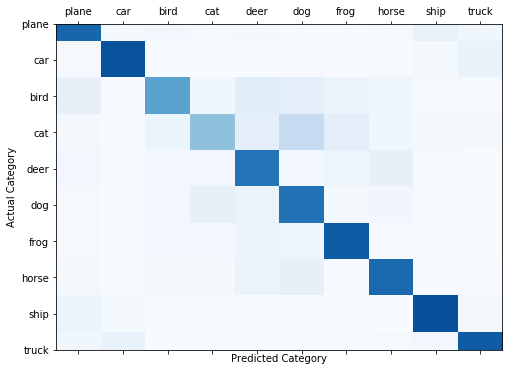

Category   - Accuracy
plane      - 79.6
car        - 86.7
bird       - 55.4
cat        - 41.1
deer       - 74.1
dog        - 74.8
frog       - 83.0
horse      - 77.9
ship       - 87.7
truck      - 82.9

Selected workers

[100  89  29  13  28  33  73  18  98  90  68  81  85  40  92]
Worker 100 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 29 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 28 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 73 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 90 : is  Honest
Worker 68 : is  Honest
Worker 81 : is  Honest
Worker 85 : is  Honest
Worker 40 : is  Honest
Worker 92 : is  Stealthy_Attacker

 | Global Training Round : 17 |


Worker 100 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.718223
Train Epoch: 1 [400/500	(81%)]	Loss: 0.857289
Train Epoch: 2 [0/500	(1%)]	Loss: 0.570611
Train Epoch: 2 [400/500	(81%)]	Loss: 0.678899
Train Epoch: 3 [0/500	(1%)]	Loss: 0.352818
Train Epoch: 3 [400/500	(81%)]	Loss: 0.544532
Train Epoch: 4 [0/500	(1%)]	Loss: 0.464508
Train Epoch: 4 [400/500	(81%)]	Loss: 0.445671
Train Epoch: 5 [0/500	(1%)]	Loss: 0.367007
Train Epoch: 5 [400/500	(81%)]	Loss: 0.399080

Worker 100 ends training in Global Round:17 |

Worker 89 starts training in Global Round:17 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  17


Train Epoch: 1 [0/500	(1%)]	Loss: 1.567214
Train Epoch: 1 [400/500	(81%)]	Loss: 1.207380
Train Epoch: 2 [0/500	(1%)]	Loss: 0.729887
Train Epoch: 2 [400/500	(81%)]	Loss: 0.672189
Train Epoch: 3 [0/500	(1%)]	Loss: 0.586538
Train Epoch: 3 [400/500	(81%)]	Loss: 0.700627
Train Epoch: 4 [0/500	(1%)]	Loss: 0.589042
Train Epoch: 4 [400/500	(81%)]	Loss: 0.581621
Train Epoch: 5 [0/500	(1%)]	Loss: 0.531111
Train Epoch: 5 [400/500	(81%)]	Loss: 0.576732

Performed attacks 1
Worker 89 ends training in Global Round:17 |

Worker 29 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.734091
Train Epoch: 1 [400/500	(81%)]	Loss: 0.760734
Train Epoch: 2 [0/500	(1%)]	Loss: 0.448710
Train Epoch: 2 [400/500	(81%)]	Loss: 0.606449
Train Epoch: 3 [0/500	(1%)]	Loss: 0.642947
Train Epoch: 3 [400/500	(81%)]	Loss: 0.636911
Train Epoch: 4 [0/500	(1%)]	Loss: 0.440169
Train Epoch: 4 [400/500	(81%)]	Loss: 0.592644
Train Epoch: 5 [0/500	(1%)]	Loss: 0.383802
Train Epoch: 5 [400/500	(81%)]	Loss: 0.315510

Worker 29 ends training in Global Round:17 |

Worker 13 starts training in Global Round:17 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  17


Train Epoch: 1 [0/500	(1%)]	Loss: 1.319661
Train Epoch: 1 [400/500	(81%)]	Loss: 0.817401
Train Epoch: 2 [0/500	(1%)]	Loss: 0.546935
Train Epoch: 2 [400/500	(81%)]	Loss: 0.794743
Train Epoch: 3 [0/500	(1%)]	Loss: 0.439842
Train Epoch: 3 [400/500	(81%)]	Loss: 0.587240
Train Epoch: 4 [0/500	(1%)]	Loss: 0.470026
Train Epoch: 4 [400/500	(81%)]	Loss: 0.624057
Train Epoch: 5 [0/500	(1%)]	Loss: 0.367409
Train Epoch: 5 [400/500	(81%)]	Loss: 0.330364

Performed attacks 2
Worker 13 ends training in Global Round:17 |

Worker 28 starts training in Global Round:17 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  17


Train Epoch: 1 [0/500	(1%)]	Loss: 1.297436
Train Epoch: 1 [400/500	(81%)]	Loss: 0.995496
Train Epoch: 2 [0/500	(1%)]	Loss: 0.624141
Train Epoch: 2 [400/500	(81%)]	Loss: 0.875975
Train Epoch: 3 [0/500	(1%)]	Loss: 0.528501
Train Epoch: 3 [400/500	(81%)]	Loss: 0.766148
Train Epoch: 4 [0/500	(1%)]	Loss: 0.353358
Train Epoch: 4 [400/500	(81%)]	Loss: 0.548601
Train Epoch: 5 [0/500	(1%)]	Loss: 0.286801
Train Epoch: 5 [400/500	(81%)]	Loss: 0.331912

Performed attacks 3
Worker 28 ends training in Global Round:17 |

Worker 33 starts training in Global Round:17 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  17


Train Epoch: 1 [0/500	(1%)]	Loss: 1.328739
Train Epoch: 1 [400/500	(81%)]	Loss: 1.317923
Train Epoch: 2 [0/500	(1%)]	Loss: 0.870913
Train Epoch: 2 [400/500	(81%)]	Loss: 0.879732
Train Epoch: 3 [0/500	(1%)]	Loss: 0.665443
Train Epoch: 3 [400/500	(81%)]	Loss: 1.173012
Train Epoch: 4 [0/500	(1%)]	Loss: 0.470442
Train Epoch: 4 [400/500	(81%)]	Loss: 0.629250
Train Epoch: 5 [0/500	(1%)]	Loss: 0.463664
Train Epoch: 5 [400/500	(81%)]	Loss: 0.378537

Performed attacks 4
Worker 33 ends training in Global Round:17 |

Worker 73 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.454430
Train Epoch: 1 [400/500	(81%)]	Loss: 0.789161
Train Epoch: 2 [0/500	(1%)]	Loss: 0.333899
Train Epoch: 2 [400/500	(81%)]	Loss: 0.588139
Train Epoch: 3 [0/500	(1%)]	Loss: 0.376733
Train Epoch: 3 [400/500	(81%)]	Loss: 0.401766
Train Epoch: 4 [0/500	(1%)]	Loss: 0.309851
Train Epoch: 4 [400/500	(81%)]	Loss: 0.525270
Train Epoch: 5 [0/500	(1%)]	Loss: 0.384034
Train Epoch: 5 [400/500	(81%)]	Loss: 0.367593

Worker 73 ends training in Global Round:17 |

Worker 18 starts training in Global Round:17 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  17


Train Epoch: 1 [0/500	(1%)]	Loss: 1.365696
Train Epoch: 1 [400/500	(81%)]	Loss: 1.375724
Train Epoch: 2 [0/500	(1%)]	Loss: 0.552179
Train Epoch: 2 [400/500	(81%)]	Loss: 0.776814
Train Epoch: 3 [0/500	(1%)]	Loss: 0.534256
Train Epoch: 3 [400/500	(81%)]	Loss: 0.673685
Train Epoch: 4 [0/500	(1%)]	Loss: 0.483228
Train Epoch: 4 [400/500	(81%)]	Loss: 0.696685
Train Epoch: 5 [0/500	(1%)]	Loss: 0.348393
Train Epoch: 5 [400/500	(81%)]	Loss: 0.403344

Performed attacks 5
Worker 18 ends training in Global Round:17 |

Worker 98 starts training in Global Round:17 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  17


Train Epoch: 1 [0/500	(1%)]	Loss: 1.420270
Train Epoch: 1 [400/500	(81%)]	Loss: 0.743890
Train Epoch: 2 [0/500	(1%)]	Loss: 0.650791
Train Epoch: 2 [400/500	(81%)]	Loss: 0.824304
Train Epoch: 3 [0/500	(1%)]	Loss: 0.527042
Train Epoch: 3 [400/500	(81%)]	Loss: 0.747326
Train Epoch: 4 [0/500	(1%)]	Loss: 0.460564
Train Epoch: 4 [400/500	(81%)]	Loss: 0.712256
Train Epoch: 5 [0/500	(1%)]	Loss: 0.419419
Train Epoch: 5 [400/500	(81%)]	Loss: 0.519864

Performed attacks 6
Worker 98 ends training in Global Round:17 |

Worker 90 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.909993
Train Epoch: 1 [400/500	(81%)]	Loss: 0.812238
Train Epoch: 2 [0/500	(1%)]	Loss: 0.547209
Train Epoch: 2 [400/500	(81%)]	Loss: 0.865000
Train Epoch: 3 [0/500	(1%)]	Loss: 0.600864
Train Epoch: 3 [400/500	(81%)]	Loss: 0.739734
Train Epoch: 4 [0/500	(1%)]	Loss: 0.643100
Train Epoch: 4 [400/500	(81%)]	Loss: 0.546703
Train Epoch: 5 [0/500	(1%)]	Loss: 0.394915
Train Epoch: 5 [400/500	(81%)]	Loss: 0.528638

Worker 90 ends training in Global Round:17 |

Worker 68 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.792314
Train Epoch: 1 [400/500	(81%)]	Loss: 1.178008
Train Epoch: 2 [0/500	(1%)]	Loss: 0.569833
Train Epoch: 2 [400/500	(81%)]	Loss: 0.602460
Train Epoch: 3 [0/500	(1%)]	Loss: 0.490817
Train Epoch: 3 [400/500	(81%)]	Loss: 0.541294
Train Epoch: 4 [0/500	(1%)]	Loss: 0.526934
Train Epoch: 4 [400/500	(81%)]	Loss: 0.638248
Train Epoch: 5 [0/500	(1%)]	Loss: 0.396024
Train Epoch: 5 [400/500	(81%)]	Loss: 0.477277

Worker 68 ends training in Global Round:17 |

Worker 81 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.757103
Train Epoch: 1 [400/500	(81%)]	Loss: 0.867791
Train Epoch: 2 [0/500	(1%)]	Loss: 0.584185
Train Epoch: 2 [400/500	(81%)]	Loss: 0.558505
Train Epoch: 3 [0/500	(1%)]	Loss: 0.520614
Train Epoch: 3 [400/500	(81%)]	Loss: 0.666558
Train Epoch: 4 [0/500	(1%)]	Loss: 0.436544
Train Epoch: 4 [400/500	(81%)]	Loss: 0.590990
Train Epoch: 5 [0/500	(1%)]	Loss: 0.284037
Train Epoch: 5 [400/500	(81%)]	Loss: 0.301334

Worker 81 ends training in Global Round:17 |

Worker 85 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.146671
Train Epoch: 1 [400/500	(81%)]	Loss: 1.091331
Train Epoch: 2 [0/500	(1%)]	Loss: 0.565039
Train Epoch: 2 [400/500	(81%)]	Loss: 0.993710
Train Epoch: 3 [0/500	(1%)]	Loss: 0.853390
Train Epoch: 3 [400/500	(81%)]	Loss: 0.801076
Train Epoch: 4 [0/500	(1%)]	Loss: 0.494433
Train Epoch: 4 [400/500	(81%)]	Loss: 0.608196
Train Epoch: 5 [0/500	(1%)]	Loss: 0.438544
Train Epoch: 5 [400/500	(81%)]	Loss: 0.591574

Worker 85 ends training in Global Round:17 |

Worker 40 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.896513
Train Epoch: 1 [400/500	(81%)]	Loss: 0.681058
Train Epoch: 2 [0/500	(1%)]	Loss: 0.688481
Train Epoch: 2 [400/500	(81%)]	Loss: 0.567058
Train Epoch: 3 [0/500	(1%)]	Loss: 0.458245
Train Epoch: 3 [400/500	(81%)]	Loss: 0.525452
Train Epoch: 4 [0/500	(1%)]	Loss: 0.357471
Train Epoch: 4 [400/500	(81%)]	Loss: 0.511188
Train Epoch: 5 [0/500	(1%)]	Loss: 0.271511
Train Epoch: 5 [400/500	(81%)]	Loss: 0.460702

Worker 40 ends training in Global Round:17 |

Worker 92 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.812004
Train Epoch: 1 [400/500	(81%)]	Loss: 1.063344
Train Epoch: 2 [0/500	(1%)]	Loss: 0.599963
Train Epoch: 2 [400/500	(81%)]	Loss: 0.883908
Train Epoch: 3 [0/500	(1%)]	Loss: 0.567678
Train Epoch: 3 [400/500	(81%)]	Loss: 0.513859
Train Epoch: 4 [0/500	(1%)]	Loss: 0.542938
Train Epoch: 4 [400/500	(81%)]	Loss: 0.778810
Train Epoch: 5 [0/500	(1%)]	Loss: 0.455537
Train Epoch: 5 [400/500	(81%)]	Loss: 0.344424

Worker 92 ends training in Global Round:17 |
Last layer biases  [array([ 0.03406231, -0.03102672, -0.01762186,  0.03298604,  0.03865423,
       -0.01805885,  0.04139771, -0.00829425, -0.01725793, -0.0389393 ],
      dtype=float32), array([ 0.03201851, -0.02690955, -0.01767892,  0.03480148,  0.04363903,
       -0.01785848,  0.04498589, -0.02488284, -0.01352224, -0.03869156],
      dtype=float32), array([ 0.02949065, -0.02983486, -0.0168108 ,  0.03459545,  0.03713365,
       -0.02112741,  0.04400001, -0.00555437, -0.01856265, -0.03742828],
      dtyp

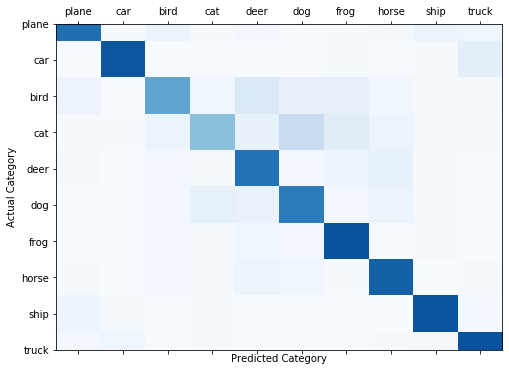

Category   - Accuracy
plane      - 75.6
car        - 84.9
bird       - 53.4
cat        - 42.0
deer       - 74.4
dog        - 70.8
frog       - 86.4
horse      - 81.0
ship       - 86.3
truck      - 87.4

Selected workers

[ 83  39   5  71  95  94  75  43  70  84  89 100  86  54  14]
Worker 83 : is  Honest
Worker 39 : is  Honest
Worker 5 : is  Honest
Worker 71 : is  Stealthy_Attacker
Worker 95 : is  Honest
Worker 94 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 70 : is  Honest
Worker 84 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 14 : is  Stealthy_Attacker

 | Global Training Round : 18 |


Worker 83 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.849018
Train Epoch: 1 [400/500	(81%)]	Loss: 0.850366
Train Epoch: 2 [0/500	(1%)]	Loss: 0.531083
Train Epoch: 2 [400/500	(81%)]	Loss: 0.726839
Train Epoch: 3 [0/500	(1%)]	Loss: 0.540814
Train Epoch: 3 [400/500	(81%)]	Loss: 0.563471
Train Epoch: 4 [0/500	(1%)]	Loss: 0.508436
Train Epoch: 4 [400/500	(81%)]	Loss: 0.426519
Train Epoch: 5 [0/500	(1%)]	Loss: 0.336316
Train Epoch: 5 [400/500	(81%)]	Loss: 0.410149

Worker 83 ends training in Global Round:18 |

Worker 39 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.725911
Train Epoch: 1 [400/500	(81%)]	Loss: 0.926604
Train Epoch: 2 [0/500	(1%)]	Loss: 0.487861
Train Epoch: 2 [400/500	(81%)]	Loss: 0.573937
Train Epoch: 3 [0/500	(1%)]	Loss: 0.446279
Train Epoch: 3 [400/500	(81%)]	Loss: 0.467242
Train Epoch: 4 [0/500	(1%)]	Loss: 0.468230
Train Epoch: 4 [400/500	(81%)]	Loss: 0.343555
Train Epoch: 5 [0/500	(1%)]	Loss: 0.216265
Train Epoch: 5 [400/500	(81%)]	Loss: 0.618341

Worker 39 ends training in Global Round:18 |

Worker 5 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.887775
Train Epoch: 1 [400/500	(81%)]	Loss: 0.667147
Train Epoch: 2 [0/500	(1%)]	Loss: 0.544259
Train Epoch: 2 [400/500	(81%)]	Loss: 0.661965
Train Epoch: 3 [0/500	(1%)]	Loss: 0.489524
Train Epoch: 3 [400/500	(81%)]	Loss: 0.599081
Train Epoch: 4 [0/500	(1%)]	Loss: 0.397968
Train Epoch: 4 [400/500	(81%)]	Loss: 0.400105
Train Epoch: 5 [0/500	(1%)]	Loss: 0.330635
Train Epoch: 5 [400/500	(81%)]	Loss: 0.318618

Worker 5 ends training in Global Round:18 |

Worker 71 starts training in Global Round:18 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  18


Train Epoch: 1 [0/500	(1%)]	Loss: 1.134401
Train Epoch: 1 [400/500	(81%)]	Loss: 0.831982
Train Epoch: 2 [0/500	(1%)]	Loss: 0.644342
Train Epoch: 2 [400/500	(81%)]	Loss: 0.728596
Train Epoch: 3 [0/500	(1%)]	Loss: 0.574409
Train Epoch: 3 [400/500	(81%)]	Loss: 0.770451
Train Epoch: 4 [0/500	(1%)]	Loss: 0.348969
Train Epoch: 4 [400/500	(81%)]	Loss: 0.555882
Train Epoch: 5 [0/500	(1%)]	Loss: 0.370007
Train Epoch: 5 [400/500	(81%)]	Loss: 0.413358

Performed attacks 1
Worker 71 ends training in Global Round:18 |

Worker 95 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.749821
Train Epoch: 1 [400/500	(81%)]	Loss: 0.759041
Train Epoch: 2 [0/500	(1%)]	Loss: 0.323440
Train Epoch: 2 [400/500	(81%)]	Loss: 0.535718
Train Epoch: 3 [0/500	(1%)]	Loss: 0.514798
Train Epoch: 3 [400/500	(81%)]	Loss: 0.508094
Train Epoch: 4 [0/500	(1%)]	Loss: 0.428545
Train Epoch: 4 [400/500	(81%)]	Loss: 0.517719
Train Epoch: 5 [0/500	(1%)]	Loss: 0.281591
Train Epoch: 5 [400/500	(81%)]	Loss: 0.357006

Worker 95 ends training in Global Round:18 |

Worker 94 starts training in Global Round:18 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  18


Train Epoch: 1 [0/500	(1%)]	Loss: 1.040798
Train Epoch: 1 [400/500	(81%)]	Loss: 0.923956
Train Epoch: 2 [0/500	(1%)]	Loss: 0.602540
Train Epoch: 2 [400/500	(81%)]	Loss: 0.801580
Train Epoch: 3 [0/500	(1%)]	Loss: 0.494156
Train Epoch: 3 [400/500	(81%)]	Loss: 0.521528
Train Epoch: 4 [0/500	(1%)]	Loss: 0.366690
Train Epoch: 4 [400/500	(81%)]	Loss: 0.351737
Train Epoch: 5 [0/500	(1%)]	Loss: 0.382649
Train Epoch: 5 [400/500	(81%)]	Loss: 0.527650

Performed attacks 2
Worker 94 ends training in Global Round:18 |

Worker 75 starts training in Global Round:18 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  18


Train Epoch: 1 [0/500	(1%)]	Loss: 1.101826
Train Epoch: 1 [400/500	(81%)]	Loss: 1.044824
Train Epoch: 2 [0/500	(1%)]	Loss: 0.511345
Train Epoch: 2 [400/500	(81%)]	Loss: 0.729983
Train Epoch: 3 [0/500	(1%)]	Loss: 0.445619
Train Epoch: 3 [400/500	(81%)]	Loss: 0.496479
Train Epoch: 4 [0/500	(1%)]	Loss: 0.529103
Train Epoch: 4 [400/500	(81%)]	Loss: 0.385888
Train Epoch: 5 [0/500	(1%)]	Loss: 0.320274
Train Epoch: 5 [400/500	(81%)]	Loss: 0.450979

Performed attacks 3
Worker 75 ends training in Global Round:18 |

Worker 43 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.676352
Train Epoch: 1 [400/500	(81%)]	Loss: 0.579146
Train Epoch: 2 [0/500	(1%)]	Loss: 0.500738
Train Epoch: 2 [400/500	(81%)]	Loss: 0.433177
Train Epoch: 3 [0/500	(1%)]	Loss: 0.415143
Train Epoch: 3 [400/500	(81%)]	Loss: 0.493186
Train Epoch: 4 [0/500	(1%)]	Loss: 0.253840
Train Epoch: 4 [400/500	(81%)]	Loss: 0.470633
Train Epoch: 5 [0/500	(1%)]	Loss: 0.375872
Train Epoch: 5 [400/500	(81%)]	Loss: 0.464984

Worker 43 ends training in Global Round:18 |

Worker 70 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.572822
Train Epoch: 1 [400/500	(81%)]	Loss: 0.844845
Train Epoch: 2 [0/500	(1%)]	Loss: 0.495569
Train Epoch: 2 [400/500	(81%)]	Loss: 0.653656
Train Epoch: 3 [0/500	(1%)]	Loss: 0.476781
Train Epoch: 3 [400/500	(81%)]	Loss: 0.525011
Train Epoch: 4 [0/500	(1%)]	Loss: 0.462315
Train Epoch: 4 [400/500	(81%)]	Loss: 0.536112
Train Epoch: 5 [0/500	(1%)]	Loss: 0.311500
Train Epoch: 5 [400/500	(81%)]	Loss: 0.288345

Worker 70 ends training in Global Round:18 |

Worker 84 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.969655
Train Epoch: 1 [400/500	(81%)]	Loss: 1.070199
Train Epoch: 2 [0/500	(1%)]	Loss: 0.657579
Train Epoch: 2 [400/500	(81%)]	Loss: 0.706851
Train Epoch: 3 [0/500	(1%)]	Loss: 0.737053
Train Epoch: 3 [400/500	(81%)]	Loss: 0.504437
Train Epoch: 4 [0/500	(1%)]	Loss: 0.471605
Train Epoch: 4 [400/500	(81%)]	Loss: 0.497531
Train Epoch: 5 [0/500	(1%)]	Loss: 0.348012
Train Epoch: 5 [400/500	(81%)]	Loss: 0.429571

Worker 84 ends training in Global Round:18 |

Worker 89 starts training in Global Round:18 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  18


Train Epoch: 1 [0/500	(1%)]	Loss: 1.355727
Train Epoch: 1 [400/500	(81%)]	Loss: 1.183010
Train Epoch: 2 [0/500	(1%)]	Loss: 0.736761
Train Epoch: 2 [400/500	(81%)]	Loss: 0.720857
Train Epoch: 3 [0/500	(1%)]	Loss: 0.399046
Train Epoch: 3 [400/500	(81%)]	Loss: 0.699145
Train Epoch: 4 [0/500	(1%)]	Loss: 0.671346
Train Epoch: 4 [400/500	(81%)]	Loss: 0.477535
Train Epoch: 5 [0/500	(1%)]	Loss: 0.272980
Train Epoch: 5 [400/500	(81%)]	Loss: 0.445682

Performed attacks 4
Worker 89 ends training in Global Round:18 |

Worker 100 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.552585
Train Epoch: 1 [400/500	(81%)]	Loss: 0.747098
Train Epoch: 2 [0/500	(1%)]	Loss: 0.590547
Train Epoch: 2 [400/500	(81%)]	Loss: 0.430520
Train Epoch: 3 [0/500	(1%)]	Loss: 0.263222
Train Epoch: 3 [400/500	(81%)]	Loss: 0.513417
Train Epoch: 4 [0/500	(1%)]	Loss: 0.309070
Train Epoch: 4 [400/500	(81%)]	Loss: 0.417018
Train Epoch: 5 [0/500	(1%)]	Loss: 0.322337
Train Epoch: 5 [400/500	(81%)]	Loss: 0.426208

Worker 100 ends training in Global Round:18 |

Worker 86 starts training in Global Round:18 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  18


Train Epoch: 1 [0/500	(1%)]	Loss: 1.086759
Train Epoch: 1 [400/500	(81%)]	Loss: 0.964647
Train Epoch: 2 [0/500	(1%)]	Loss: 0.637098
Train Epoch: 2 [400/500	(81%)]	Loss: 0.744251
Train Epoch: 3 [0/500	(1%)]	Loss: 0.346306
Train Epoch: 3 [400/500	(81%)]	Loss: 0.435431
Train Epoch: 4 [0/500	(1%)]	Loss: 0.351155
Train Epoch: 4 [400/500	(81%)]	Loss: 0.316512
Train Epoch: 5 [0/500	(1%)]	Loss: 0.361730
Train Epoch: 5 [400/500	(81%)]	Loss: 0.264367

Performed attacks 5
Worker 86 ends training in Global Round:18 |

Worker 54 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.686937
Train Epoch: 1 [400/500	(81%)]	Loss: 0.734267
Train Epoch: 2 [0/500	(1%)]	Loss: 0.464347
Train Epoch: 2 [400/500	(81%)]	Loss: 0.726940
Train Epoch: 3 [0/500	(1%)]	Loss: 0.348037
Train Epoch: 3 [400/500	(81%)]	Loss: 0.273603
Train Epoch: 4 [0/500	(1%)]	Loss: 0.405967
Train Epoch: 4 [400/500	(81%)]	Loss: 0.437341
Train Epoch: 5 [0/500	(1%)]	Loss: 0.303891
Train Epoch: 5 [400/500	(81%)]	Loss: 0.367514

Worker 54 ends training in Global Round:18 |

Worker 14 starts training in Global Round:18 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  18


Train Epoch: 1 [0/500	(1%)]	Loss: 0.845764
Train Epoch: 1 [400/500	(81%)]	Loss: 0.862898
Train Epoch: 2 [0/500	(1%)]	Loss: 0.556736
Train Epoch: 2 [400/500	(81%)]	Loss: 0.465059
Train Epoch: 3 [0/500	(1%)]	Loss: 0.468101
Train Epoch: 3 [400/500	(81%)]	Loss: 0.539573
Train Epoch: 4 [0/500	(1%)]	Loss: 0.296693
Train Epoch: 4 [400/500	(81%)]	Loss: 0.356716
Train Epoch: 5 [0/500	(1%)]	Loss: 0.270165
Train Epoch: 5 [400/500	(81%)]	Loss: 0.343871

Performed attacks 6
Worker 14 ends training in Global Round:18 |
Last layer biases  [array([ 0.03021424, -0.02693707, -0.0178397 ,  0.0331334 ,  0.03448373,
       -0.01741971,  0.03990855, -0.00516023, -0.01464206, -0.03983976],
      dtype=float32), array([ 0.03482006, -0.03175965, -0.01860649,  0.03241672,  0.03395967,
       -0.01589578,  0.04054238, -0.00251442, -0.01822891, -0.03883224],
      dtype=float32), array([ 0.03332745, -0.02921641, -0.0179385 ,  0.03493455,  0.03545048,
       -0.01934073,  0.04197971, -0.00666126, -0.01995825, -0.0

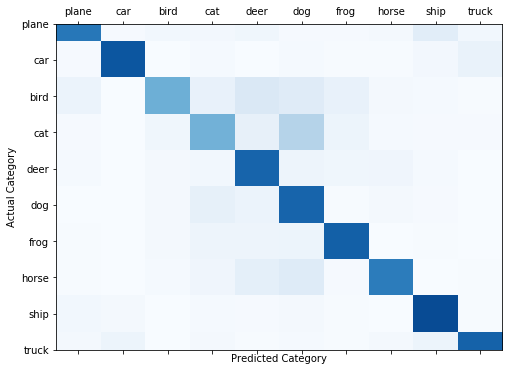

Category   - Accuracy
plane      - 72.6
car        - 85.5
bird       - 49.6
cat        - 48.3
deer       - 79.9
dog        - 80.0
frog       - 81.5
horse      - 70.5
ship       - 89.2
truck      - 80.6

Selected workers

[85  2 34  6 63 60 33 49 37 89 58 71 25 72 40]
Worker 85 : is  Honest
Worker 2 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 6 : is  Stealthy_Attacker
Worker 63 : is  Honest
Worker 60 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 89 : is  Stealthy_Attacker
Worker 58 : is  Honest
Worker 71 : is  Stealthy_Attacker
Worker 25 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 40 : is  Honest

 | Global Training Round : 19 |


Worker 85 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.666269
Train Epoch: 1 [400/500	(81%)]	Loss: 0.843430
Train Epoch: 2 [0/500	(1%)]	Loss: 0.509821
Train Epoch: 2 [400/500	(81%)]	Loss: 0.629318
Train Epoch: 3 [0/500	(1%)]	Loss: 0.627155
Train Epoch: 3 [400/500	(81%)]	Loss: 0.355172
Train Epoch: 4 [0/500	(1%)]	Loss: 0.316414
Train Epoch: 4 [400/500	(81%)]	Loss: 0.481717
Train Epoch: 5 [0/500	(1%)]	Loss: 0.218402
Train Epoch: 5 [400/500	(81%)]	Loss: 0.520145

Worker 85 ends training in Global Round:19 |

Worker 2 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.602418
Train Epoch: 1 [400/500	(81%)]	Loss: 0.847388
Train Epoch: 2 [0/500	(1%)]	Loss: 0.504928
Train Epoch: 2 [400/500	(81%)]	Loss: 0.407364
Train Epoch: 3 [0/500	(1%)]	Loss: 0.391969
Train Epoch: 3 [400/500	(81%)]	Loss: 0.622641
Train Epoch: 4 [0/500	(1%)]	Loss: 0.296711
Train Epoch: 4 [400/500	(81%)]	Loss: 0.488163
Train Epoch: 5 [0/500	(1%)]	Loss: 0.252992
Train Epoch: 5 [400/500	(81%)]	Loss: 0.374986

Worker 2 ends training in Global Round:19 |

Worker 34 starts training in Global Round:19 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  19


Train Epoch: 1 [0/500	(1%)]	Loss: 1.374047
Train Epoch: 1 [400/500	(81%)]	Loss: 0.971966
Train Epoch: 2 [0/500	(1%)]	Loss: 0.584781
Train Epoch: 2 [400/500	(81%)]	Loss: 0.603981
Train Epoch: 3 [0/500	(1%)]	Loss: 0.661493
Train Epoch: 3 [400/500	(81%)]	Loss: 0.662033
Train Epoch: 4 [0/500	(1%)]	Loss: 0.548173
Train Epoch: 4 [400/500	(81%)]	Loss: 0.566161
Train Epoch: 5 [0/500	(1%)]	Loss: 0.517434
Train Epoch: 5 [400/500	(81%)]	Loss: 0.483291

Performed attacks 1
Worker 34 ends training in Global Round:19 |

Worker 6 starts training in Global Round:19 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  19


Train Epoch: 1 [0/500	(1%)]	Loss: 1.056927
Train Epoch: 1 [400/500	(81%)]	Loss: 1.117241
Train Epoch: 2 [0/500	(1%)]	Loss: 0.452792
Train Epoch: 2 [400/500	(81%)]	Loss: 0.614387
Train Epoch: 3 [0/500	(1%)]	Loss: 0.760734
Train Epoch: 3 [400/500	(81%)]	Loss: 0.535944
Train Epoch: 4 [0/500	(1%)]	Loss: 0.413246
Train Epoch: 4 [400/500	(81%)]	Loss: 0.439739
Train Epoch: 5 [0/500	(1%)]	Loss: 0.313024
Train Epoch: 5 [400/500	(81%)]	Loss: 0.420447

Performed attacks 2
Worker 6 ends training in Global Round:19 |

Worker 63 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.814280
Train Epoch: 1 [400/500	(81%)]	Loss: 0.810621
Train Epoch: 2 [0/500	(1%)]	Loss: 0.440661
Train Epoch: 2 [400/500	(81%)]	Loss: 0.611688
Train Epoch: 3 [0/500	(1%)]	Loss: 0.543321
Train Epoch: 3 [400/500	(81%)]	Loss: 0.429546
Train Epoch: 4 [0/500	(1%)]	Loss: 0.321627
Train Epoch: 4 [400/500	(81%)]	Loss: 0.407990
Train Epoch: 5 [0/500	(1%)]	Loss: 0.300730
Train Epoch: 5 [400/500	(81%)]	Loss: 0.340045

Worker 63 ends training in Global Round:19 |

Worker 60 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.049570
Train Epoch: 1 [400/500	(81%)]	Loss: 0.849651
Train Epoch: 2 [0/500	(1%)]	Loss: 0.485071
Train Epoch: 2 [400/500	(81%)]	Loss: 0.778655
Train Epoch: 3 [0/500	(1%)]	Loss: 0.437523
Train Epoch: 3 [400/500	(81%)]	Loss: 0.730224
Train Epoch: 4 [0/500	(1%)]	Loss: 0.498816
Train Epoch: 4 [400/500	(81%)]	Loss: 0.349689
Train Epoch: 5 [0/500	(1%)]	Loss: 0.340326
Train Epoch: 5 [400/500	(81%)]	Loss: 0.558851

Worker 60 ends training in Global Round:19 |

Worker 33 starts training in Global Round:19 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  19


Train Epoch: 1 [0/500	(1%)]	Loss: 1.370534
Train Epoch: 1 [400/500	(81%)]	Loss: 0.861402
Train Epoch: 2 [0/500	(1%)]	Loss: 0.494100
Train Epoch: 2 [400/500	(81%)]	Loss: 0.695532
Train Epoch: 3 [0/500	(1%)]	Loss: 0.554044
Train Epoch: 3 [400/500	(81%)]	Loss: 0.919235
Train Epoch: 4 [0/500	(1%)]	Loss: 0.390092
Train Epoch: 4 [400/500	(81%)]	Loss: 0.634757
Train Epoch: 5 [0/500	(1%)]	Loss: 0.319415
Train Epoch: 5 [400/500	(81%)]	Loss: 0.445045

Performed attacks 3
Worker 33 ends training in Global Round:19 |

Worker 49 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.721707
Train Epoch: 1 [400/500	(81%)]	Loss: 0.862002
Train Epoch: 2 [0/500	(1%)]	Loss: 0.450509
Train Epoch: 2 [400/500	(81%)]	Loss: 0.746181
Train Epoch: 3 [0/500	(1%)]	Loss: 0.481631
Train Epoch: 3 [400/500	(81%)]	Loss: 0.487983
Train Epoch: 4 [0/500	(1%)]	Loss: 0.402239
Train Epoch: 4 [400/500	(81%)]	Loss: 0.561137
Train Epoch: 5 [0/500	(1%)]	Loss: 0.322171
Train Epoch: 5 [400/500	(81%)]	Loss: 0.413025

Worker 49 ends training in Global Round:19 |

Worker 37 starts training in Global Round:19 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  19


Train Epoch: 1 [0/500	(1%)]	Loss: 1.364878
Train Epoch: 1 [400/500	(81%)]	Loss: 0.942854
Train Epoch: 2 [0/500	(1%)]	Loss: 0.572757
Train Epoch: 2 [400/500	(81%)]	Loss: 0.810995
Train Epoch: 3 [0/500	(1%)]	Loss: 0.621485
Train Epoch: 3 [400/500	(81%)]	Loss: 0.634853
Train Epoch: 4 [0/500	(1%)]	Loss: 0.385081
Train Epoch: 4 [400/500	(81%)]	Loss: 0.596476
Train Epoch: 5 [0/500	(1%)]	Loss: 0.310456
Train Epoch: 5 [400/500	(81%)]	Loss: 0.302919

Performed attacks 4
Worker 37 ends training in Global Round:19 |

Worker 89 starts training in Global Round:19 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  19


Train Epoch: 1 [0/500	(1%)]	Loss: 1.219755
Train Epoch: 1 [400/500	(81%)]	Loss: 0.992355
Train Epoch: 2 [0/500	(1%)]	Loss: 0.702130
Train Epoch: 2 [400/500	(81%)]	Loss: 0.880372
Train Epoch: 3 [0/500	(1%)]	Loss: 0.668775
Train Epoch: 3 [400/500	(81%)]	Loss: 0.514761
Train Epoch: 4 [0/500	(1%)]	Loss: 0.534530
Train Epoch: 4 [400/500	(81%)]	Loss: 0.558794
Train Epoch: 5 [0/500	(1%)]	Loss: 0.515223
Train Epoch: 5 [400/500	(81%)]	Loss: 0.495062

Performed attacks 5
Worker 89 ends training in Global Round:19 |

Worker 58 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.158432
Train Epoch: 1 [400/500	(81%)]	Loss: 0.770149
Train Epoch: 2 [0/500	(1%)]	Loss: 0.644648
Train Epoch: 2 [400/500	(81%)]	Loss: 0.666585
Train Epoch: 3 [0/500	(1%)]	Loss: 0.511048
Train Epoch: 3 [400/500	(81%)]	Loss: 0.604874
Train Epoch: 4 [0/500	(1%)]	Loss: 0.379602
Train Epoch: 4 [400/500	(81%)]	Loss: 0.500002
Train Epoch: 5 [0/500	(1%)]	Loss: 0.266256
Train Epoch: 5 [400/500	(81%)]	Loss: 0.437670

Worker 58 ends training in Global Round:19 |

Worker 71 starts training in Global Round:19 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  19


Train Epoch: 1 [0/500	(1%)]	Loss: 1.362163
Train Epoch: 1 [400/500	(81%)]	Loss: 0.697792
Train Epoch: 2 [0/500	(1%)]	Loss: 0.726129
Train Epoch: 2 [400/500	(81%)]	Loss: 0.746308
Train Epoch: 3 [0/500	(1%)]	Loss: 0.620255
Train Epoch: 3 [400/500	(81%)]	Loss: 0.552863
Train Epoch: 4 [0/500	(1%)]	Loss: 0.533829
Train Epoch: 4 [400/500	(81%)]	Loss: 0.571098
Train Epoch: 5 [0/500	(1%)]	Loss: 0.368849
Train Epoch: 5 [400/500	(81%)]	Loss: 0.590377

Performed attacks 6
Worker 71 ends training in Global Round:19 |

Worker 25 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.636588
Train Epoch: 1 [400/500	(81%)]	Loss: 0.852558
Train Epoch: 2 [0/500	(1%)]	Loss: 0.667730
Train Epoch: 2 [400/500	(81%)]	Loss: 0.581856
Train Epoch: 3 [0/500	(1%)]	Loss: 0.505211
Train Epoch: 3 [400/500	(81%)]	Loss: 0.522616
Train Epoch: 4 [0/500	(1%)]	Loss: 0.373989
Train Epoch: 4 [400/500	(81%)]	Loss: 0.612898
Train Epoch: 5 [0/500	(1%)]	Loss: 0.300476
Train Epoch: 5 [400/500	(81%)]	Loss: 0.248955

Worker 25 ends training in Global Round:19 |

Worker 72 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.723990
Train Epoch: 1 [400/500	(81%)]	Loss: 0.755596
Train Epoch: 2 [0/500	(1%)]	Loss: 0.397855
Train Epoch: 2 [400/500	(81%)]	Loss: 0.746231
Train Epoch: 3 [0/500	(1%)]	Loss: 0.476655
Train Epoch: 3 [400/500	(81%)]	Loss: 0.548236
Train Epoch: 4 [0/500	(1%)]	Loss: 0.467938
Train Epoch: 4 [400/500	(81%)]	Loss: 0.623979
Train Epoch: 5 [0/500	(1%)]	Loss: 0.401901
Train Epoch: 5 [400/500	(81%)]	Loss: 0.616180

Worker 72 ends training in Global Round:19 |

Worker 40 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.686877
Train Epoch: 1 [400/500	(81%)]	Loss: 0.695309
Train Epoch: 2 [0/500	(1%)]	Loss: 0.429655
Train Epoch: 2 [400/500	(81%)]	Loss: 0.558210
Train Epoch: 3 [0/500	(1%)]	Loss: 0.414148
Train Epoch: 3 [400/500	(81%)]	Loss: 0.425255
Train Epoch: 4 [0/500	(1%)]	Loss: 0.327329
Train Epoch: 4 [400/500	(81%)]	Loss: 0.467630
Train Epoch: 5 [0/500	(1%)]	Loss: 0.276155
Train Epoch: 5 [400/500	(81%)]	Loss: 0.401938

Worker 40 ends training in Global Round:19 |
Last layer biases  [array([ 0.03217737, -0.03154656, -0.01809315,  0.0329872 ,  0.03824631,
       -0.0156558 ,  0.0392673 , -0.00480205, -0.01772381, -0.03895545],
      dtype=float32), array([ 0.03497014, -0.03098449, -0.01514436,  0.03383518,  0.03378199,
       -0.0210209 ,  0.04261554, -0.00345475, -0.01879189, -0.03990511],
      dtype=float32), array([ 0.03414438, -0.02663362, -0.01740035,  0.03677034,  0.0417666 ,
       -0.01830578,  0.0458656 , -0.02514214, -0.01707552, -0.03808815],
      dtyp

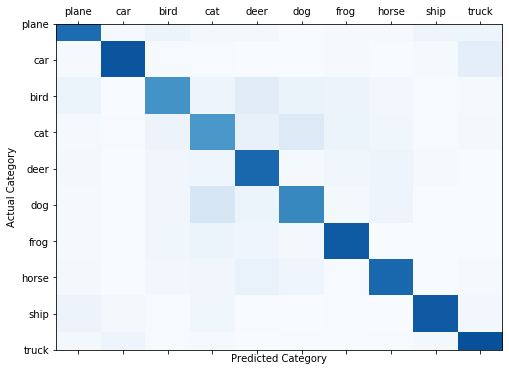

Category   - Accuracy
plane      - 76.6
car        - 85.6
bird       - 62.0
cat        - 59.9
deer       - 78.6
dog        - 66.4
frog       - 83.4
horse      - 78.7
ship       - 83.8
truck      - 87.5

Selected workers

[71 30  8 79 27 35 40 76 23 55 67 69 25 46 48]
Worker 71 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 8 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 27 : is  Stealthy_Attacker
Worker 35 : is  Honest
Worker 40 : is  Honest
Worker 76 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 67 : is  Stealthy_Attacker
Worker 69 : is  Honest
Worker 25 : is  Honest
Worker 46 : is  Stealthy_Attacker
Worker 48 : is  Honest

 | Global Training Round : 20 |


Worker 71 starts training in Global Round:20 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  20


Train Epoch: 1 [0/500	(1%)]	Loss: 1.116205
Train Epoch: 1 [400/500	(81%)]	Loss: 0.617807
Train Epoch: 2 [0/500	(1%)]	Loss: 0.481838
Train Epoch: 2 [400/500	(81%)]	Loss: 0.906389
Train Epoch: 3 [0/500	(1%)]	Loss: 0.346115
Train Epoch: 3 [400/500	(81%)]	Loss: 0.581334
Train Epoch: 4 [0/500	(1%)]	Loss: 0.367270
Train Epoch: 4 [400/500	(81%)]	Loss: 0.815182
Train Epoch: 5 [0/500	(1%)]	Loss: 0.466273
Train Epoch: 5 [400/500	(81%)]	Loss: 0.482230

Performed attacks 1
Worker 71 ends training in Global Round:20 |

Worker 30 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.718537
Train Epoch: 1 [400/500	(81%)]	Loss: 0.704771
Train Epoch: 2 [0/500	(1%)]	Loss: 0.414819
Train Epoch: 2 [400/500	(81%)]	Loss: 0.599214
Train Epoch: 3 [0/500	(1%)]	Loss: 0.430106
Train Epoch: 3 [400/500	(81%)]	Loss: 0.558024
Train Epoch: 4 [0/500	(1%)]	Loss: 0.410079
Train Epoch: 4 [400/500	(81%)]	Loss: 0.630762
Train Epoch: 5 [0/500	(1%)]	Loss: 0.258104
Train Epoch: 5 [400/500	(81%)]	Loss: 0.354063

Worker 30 ends training in Global Round:20 |

Worker 8 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.584985
Train Epoch: 1 [400/500	(81%)]	Loss: 0.743467
Train Epoch: 2 [0/500	(1%)]	Loss: 0.495647
Train Epoch: 2 [400/500	(81%)]	Loss: 0.556377
Train Epoch: 3 [0/500	(1%)]	Loss: 0.503859
Train Epoch: 3 [400/500	(81%)]	Loss: 0.338761
Train Epoch: 4 [0/500	(1%)]	Loss: 0.382881
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309573
Train Epoch: 5 [0/500	(1%)]	Loss: 0.277545
Train Epoch: 5 [400/500	(81%)]	Loss: 0.284043

Worker 8 ends training in Global Round:20 |

Worker 79 starts training in Global Round:20 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  20


Train Epoch: 1 [0/500	(1%)]	Loss: 1.182801
Train Epoch: 1 [400/500	(81%)]	Loss: 0.957104
Train Epoch: 2 [0/500	(1%)]	Loss: 0.514559
Train Epoch: 2 [400/500	(81%)]	Loss: 0.730799
Train Epoch: 3 [0/500	(1%)]	Loss: 0.583926
Train Epoch: 3 [400/500	(81%)]	Loss: 0.570952
Train Epoch: 4 [0/500	(1%)]	Loss: 0.370244
Train Epoch: 4 [400/500	(81%)]	Loss: 0.495263
Train Epoch: 5 [0/500	(1%)]	Loss: 0.393050
Train Epoch: 5 [400/500	(81%)]	Loss: 0.395082

Performed attacks 2
Worker 79 ends training in Global Round:20 |

Worker 27 starts training in Global Round:20 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  20


Train Epoch: 1 [0/500	(1%)]	Loss: 1.187353
Train Epoch: 1 [400/500	(81%)]	Loss: 0.780607
Train Epoch: 2 [0/500	(1%)]	Loss: 0.644022
Train Epoch: 2 [400/500	(81%)]	Loss: 0.561603
Train Epoch: 3 [0/500	(1%)]	Loss: 0.535697
Train Epoch: 3 [400/500	(81%)]	Loss: 0.555209
Train Epoch: 4 [0/500	(1%)]	Loss: 0.422205
Train Epoch: 4 [400/500	(81%)]	Loss: 0.551751
Train Epoch: 5 [0/500	(1%)]	Loss: 0.260510
Train Epoch: 5 [400/500	(81%)]	Loss: 0.333160

Performed attacks 3
Worker 27 ends training in Global Round:20 |

Worker 35 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.473350
Train Epoch: 1 [400/500	(81%)]	Loss: 0.827980
Train Epoch: 2 [0/500	(1%)]	Loss: 0.425558
Train Epoch: 2 [400/500	(81%)]	Loss: 0.522384
Train Epoch: 3 [0/500	(1%)]	Loss: 0.321811
Train Epoch: 3 [400/500	(81%)]	Loss: 0.429615
Train Epoch: 4 [0/500	(1%)]	Loss: 0.204714
Train Epoch: 4 [400/500	(81%)]	Loss: 0.448118
Train Epoch: 5 [0/500	(1%)]	Loss: 0.313517
Train Epoch: 5 [400/500	(81%)]	Loss: 0.339916

Worker 35 ends training in Global Round:20 |

Worker 40 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.435037
Train Epoch: 1 [400/500	(81%)]	Loss: 0.580746
Train Epoch: 2 [0/500	(1%)]	Loss: 0.460231
Train Epoch: 2 [400/500	(81%)]	Loss: 0.485209
Train Epoch: 3 [0/500	(1%)]	Loss: 0.341919
Train Epoch: 3 [400/500	(81%)]	Loss: 0.355576
Train Epoch: 4 [0/500	(1%)]	Loss: 0.277779
Train Epoch: 4 [400/500	(81%)]	Loss: 0.658535
Train Epoch: 5 [0/500	(1%)]	Loss: 0.378987
Train Epoch: 5 [400/500	(81%)]	Loss: 0.348199

Worker 40 ends training in Global Round:20 |

Worker 76 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.698712
Train Epoch: 1 [400/500	(81%)]	Loss: 0.567080
Train Epoch: 2 [0/500	(1%)]	Loss: 0.311990
Train Epoch: 2 [400/500	(81%)]	Loss: 0.586312
Train Epoch: 3 [0/500	(1%)]	Loss: 0.623587
Train Epoch: 3 [400/500	(81%)]	Loss: 0.540401
Train Epoch: 4 [0/500	(1%)]	Loss: 0.286780
Train Epoch: 4 [400/500	(81%)]	Loss: 0.371643
Train Epoch: 5 [0/500	(1%)]	Loss: 0.267889
Train Epoch: 5 [400/500	(81%)]	Loss: 0.592324

Worker 76 ends training in Global Round:20 |

Worker 23 starts training in Global Round:20 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  20


Train Epoch: 1 [0/500	(1%)]	Loss: 1.063519
Train Epoch: 1 [400/500	(81%)]	Loss: 0.849014
Train Epoch: 2 [0/500	(1%)]	Loss: 0.523907
Train Epoch: 2 [400/500	(81%)]	Loss: 0.686726
Train Epoch: 3 [0/500	(1%)]	Loss: 0.312868
Train Epoch: 3 [400/500	(81%)]	Loss: 0.569597
Train Epoch: 4 [0/500	(1%)]	Loss: 0.472924
Train Epoch: 4 [400/500	(81%)]	Loss: 0.476542
Train Epoch: 5 [0/500	(1%)]	Loss: 0.388333
Train Epoch: 5 [400/500	(81%)]	Loss: 0.305586

Performed attacks 4
Worker 23 ends training in Global Round:20 |

Worker 55 starts training in Global Round:20 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  20


Train Epoch: 1 [0/500	(1%)]	Loss: 1.172939
Train Epoch: 1 [400/500	(81%)]	Loss: 0.926830
Train Epoch: 2 [0/500	(1%)]	Loss: 0.741771
Train Epoch: 2 [400/500	(81%)]	Loss: 0.664942
Train Epoch: 3 [0/500	(1%)]	Loss: 0.464041
Train Epoch: 3 [400/500	(81%)]	Loss: 0.676224
Train Epoch: 4 [0/500	(1%)]	Loss: 0.605579
Train Epoch: 4 [400/500	(81%)]	Loss: 0.286568
Train Epoch: 5 [0/500	(1%)]	Loss: 0.296010
Train Epoch: 5 [400/500	(81%)]	Loss: 0.586728

Performed attacks 5
Worker 55 ends training in Global Round:20 |

Worker 67 starts training in Global Round:20 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  20


Train Epoch: 1 [0/500	(1%)]	Loss: 1.437589
Train Epoch: 1 [400/500	(81%)]	Loss: 1.147700
Train Epoch: 2 [0/500	(1%)]	Loss: 0.789005
Train Epoch: 2 [400/500	(81%)]	Loss: 0.784253
Train Epoch: 3 [0/500	(1%)]	Loss: 0.446931
Train Epoch: 3 [400/500	(81%)]	Loss: 0.782997
Train Epoch: 4 [0/500	(1%)]	Loss: 0.588205
Train Epoch: 4 [400/500	(81%)]	Loss: 0.460219
Train Epoch: 5 [0/500	(1%)]	Loss: 0.384139
Train Epoch: 5 [400/500	(81%)]	Loss: 0.394577

Performed attacks 6
Worker 67 ends training in Global Round:20 |

Worker 69 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.105509
Train Epoch: 1 [400/500	(81%)]	Loss: 0.819383
Train Epoch: 2 [0/500	(1%)]	Loss: 0.640126
Train Epoch: 2 [400/500	(81%)]	Loss: 0.731700
Train Epoch: 3 [0/500	(1%)]	Loss: 0.571761
Train Epoch: 3 [400/500	(81%)]	Loss: 0.536340
Train Epoch: 4 [0/500	(1%)]	Loss: 0.359296
Train Epoch: 4 [400/500	(81%)]	Loss: 0.645689
Train Epoch: 5 [0/500	(1%)]	Loss: 0.310427
Train Epoch: 5 [400/500	(81%)]	Loss: 0.374949

Worker 69 ends training in Global Round:20 |

Worker 25 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.593265
Train Epoch: 1 [400/500	(81%)]	Loss: 0.593818
Train Epoch: 2 [0/500	(1%)]	Loss: 0.368963
Train Epoch: 2 [400/500	(81%)]	Loss: 0.521684
Train Epoch: 3 [0/500	(1%)]	Loss: 0.402121
Train Epoch: 3 [400/500	(81%)]	Loss: 0.441212
Train Epoch: 4 [0/500	(1%)]	Loss: 0.400252
Train Epoch: 4 [400/500	(81%)]	Loss: 0.418094
Train Epoch: 5 [0/500	(1%)]	Loss: 0.322578
Train Epoch: 5 [400/500	(81%)]	Loss: 0.485634

Worker 25 ends training in Global Round:20 |

Worker 46 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.995599
Train Epoch: 1 [400/500	(81%)]	Loss: 0.739602
Train Epoch: 2 [0/500	(1%)]	Loss: 0.572962
Train Epoch: 2 [400/500	(81%)]	Loss: 0.692443
Train Epoch: 3 [0/500	(1%)]	Loss: 0.389982
Train Epoch: 3 [400/500	(81%)]	Loss: 0.551839
Train Epoch: 4 [0/500	(1%)]	Loss: 0.469200
Train Epoch: 4 [400/500	(81%)]	Loss: 0.745109
Train Epoch: 5 [0/500	(1%)]	Loss: 0.291693
Train Epoch: 5 [400/500	(81%)]	Loss: 0.515209

Worker 46 ends training in Global Round:20 |

Worker 48 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.536587
Train Epoch: 1 [400/500	(81%)]	Loss: 0.668198
Train Epoch: 2 [0/500	(1%)]	Loss: 0.487641
Train Epoch: 2 [400/500	(81%)]	Loss: 0.580613
Train Epoch: 3 [0/500	(1%)]	Loss: 0.407566
Train Epoch: 3 [400/500	(81%)]	Loss: 0.449880
Train Epoch: 4 [0/500	(1%)]	Loss: 0.315419
Train Epoch: 4 [400/500	(81%)]	Loss: 0.331612
Train Epoch: 5 [0/500	(1%)]	Loss: 0.302758
Train Epoch: 5 [400/500	(81%)]	Loss: 0.501466

Worker 48 ends training in Global Round:20 |
Last layer biases  [array([ 0.03747402, -0.03009042, -0.01669648,  0.03397943,  0.04259192,
       -0.01736268,  0.04527879, -0.02471219, -0.01816233, -0.03639871],
      dtype=float32), array([ 0.03299042, -0.03213618, -0.01804429,  0.03375207,  0.03722703,
       -0.01784134,  0.04117819, -0.00536547, -0.01719113, -0.03866792],
      dtype=float32), array([ 0.0309448 , -0.02887612, -0.01635219,  0.03465839,  0.03752511,
       -0.02202907,  0.0431421 , -0.00434608, -0.01778068, -0.04098487],
      dtyp

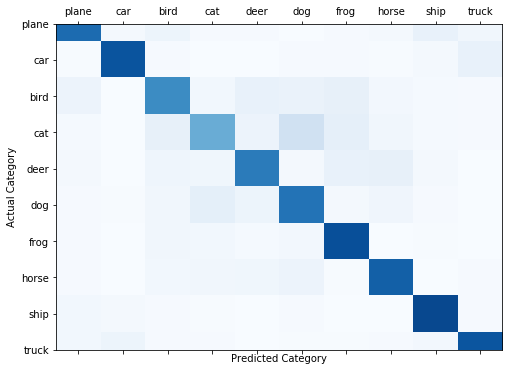

Category   - Accuracy
plane      - 77.1
car        - 86.0
bird       - 64.8
cat        - 50.4
deer       - 70.8
dog        - 74.2
frog       - 88.0
horse      - 81.3
ship       - 90.6
truck      - 85.7

Selected workers

[64 27 98 94 52 99 57 32 95  6 44 65 48  4  3]
Worker 64 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker
Worker 52 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 57 : is  Honest
Worker 32 : is  Honest
Worker 95 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 44 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 48 : is  Honest
Worker 4 : is  Honest
Worker 3 : is  Stealthy_Attacker

 | Global Training Round : 21 |


Worker 64 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.679901
Train Epoch: 1 [400/500	(81%)]	Loss: 0.611582
Train Epoch: 2 [0/500	(1%)]	Loss: 0.569665
Train Epoch: 2 [400/500	(81%)]	Loss: 0.541919
Train Epoch: 3 [0/500	(1%)]	Loss: 0.457947
Train Epoch: 3 [400/500	(81%)]	Loss: 0.446627
Train Epoch: 4 [0/500	(1%)]	Loss: 0.288546
Train Epoch: 4 [400/500	(81%)]	Loss: 0.498786
Train Epoch: 5 [0/500	(1%)]	Loss: 0.238827
Train Epoch: 5 [400/500	(81%)]	Loss: 0.328259

Worker 64 ends training in Global Round:21 |

Worker 27 starts training in Global Round:21 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  21


Train Epoch: 1 [0/500	(1%)]	Loss: 1.174666
Train Epoch: 1 [400/500	(81%)]	Loss: 0.748143
Train Epoch: 2 [0/500	(1%)]	Loss: 0.710168
Train Epoch: 2 [400/500	(81%)]	Loss: 0.561035
Train Epoch: 3 [0/500	(1%)]	Loss: 0.623197
Train Epoch: 3 [400/500	(81%)]	Loss: 0.660150
Train Epoch: 4 [0/500	(1%)]	Loss: 0.302989
Train Epoch: 4 [400/500	(81%)]	Loss: 0.517954
Train Epoch: 5 [0/500	(1%)]	Loss: 0.221862
Train Epoch: 5 [400/500	(81%)]	Loss: 0.392873

Performed attacks 1
Worker 27 ends training in Global Round:21 |

Worker 98 starts training in Global Round:21 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  21


Train Epoch: 1 [0/500	(1%)]	Loss: 1.331040
Train Epoch: 1 [400/500	(81%)]	Loss: 0.918356
Train Epoch: 2 [0/500	(1%)]	Loss: 0.629405
Train Epoch: 2 [400/500	(81%)]	Loss: 0.814421
Train Epoch: 3 [0/500	(1%)]	Loss: 0.479597
Train Epoch: 3 [400/500	(81%)]	Loss: 0.594353
Train Epoch: 4 [0/500	(1%)]	Loss: 0.368608
Train Epoch: 4 [400/500	(81%)]	Loss: 0.480563
Train Epoch: 5 [0/500	(1%)]	Loss: 0.239069
Train Epoch: 5 [400/500	(81%)]	Loss: 0.363762

Performed attacks 2
Worker 98 ends training in Global Round:21 |

Worker 94 starts training in Global Round:21 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  21


Train Epoch: 1 [0/500	(1%)]	Loss: 1.322157
Train Epoch: 1 [400/500	(81%)]	Loss: 0.797989
Train Epoch: 2 [0/500	(1%)]	Loss: 0.508098
Train Epoch: 2 [400/500	(81%)]	Loss: 0.590868
Train Epoch: 3 [0/500	(1%)]	Loss: 0.462363
Train Epoch: 3 [400/500	(81%)]	Loss: 0.455835
Train Epoch: 4 [0/500	(1%)]	Loss: 0.395436
Train Epoch: 4 [400/500	(81%)]	Loss: 0.511515
Train Epoch: 5 [0/500	(1%)]	Loss: 0.357010
Train Epoch: 5 [400/500	(81%)]	Loss: 0.532708

Performed attacks 3
Worker 94 ends training in Global Round:21 |

Worker 52 starts training in Global Round:21 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  21


Train Epoch: 1 [0/500	(1%)]	Loss: 1.582803
Train Epoch: 1 [400/500	(81%)]	Loss: 0.585643
Train Epoch: 2 [0/500	(1%)]	Loss: 0.484069
Train Epoch: 2 [400/500	(81%)]	Loss: 0.696242
Train Epoch: 3 [0/500	(1%)]	Loss: 0.428866
Train Epoch: 3 [400/500	(81%)]	Loss: 0.470426
Train Epoch: 4 [0/500	(1%)]	Loss: 0.359212
Train Epoch: 4 [400/500	(81%)]	Loss: 0.406637
Train Epoch: 5 [0/500	(1%)]	Loss: 0.330659
Train Epoch: 5 [400/500	(81%)]	Loss: 0.370023

Performed attacks 4
Worker 52 ends training in Global Round:21 |

Worker 99 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.988114
Train Epoch: 1 [400/500	(81%)]	Loss: 0.754469
Train Epoch: 2 [0/500	(1%)]	Loss: 0.431659
Train Epoch: 2 [400/500	(81%)]	Loss: 0.528482
Train Epoch: 3 [0/500	(1%)]	Loss: 0.331663
Train Epoch: 3 [400/500	(81%)]	Loss: 0.470781
Train Epoch: 4 [0/500	(1%)]	Loss: 0.436811
Train Epoch: 4 [400/500	(81%)]	Loss: 0.377761
Train Epoch: 5 [0/500	(1%)]	Loss: 0.254939
Train Epoch: 5 [400/500	(81%)]	Loss: 0.466416

Worker 99 ends training in Global Round:21 |

Worker 57 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.652647
Train Epoch: 1 [400/500	(81%)]	Loss: 0.750821
Train Epoch: 2 [0/500	(1%)]	Loss: 0.496264
Train Epoch: 2 [400/500	(81%)]	Loss: 0.761757
Train Epoch: 3 [0/500	(1%)]	Loss: 0.534567
Train Epoch: 3 [400/500	(81%)]	Loss: 0.466286
Train Epoch: 4 [0/500	(1%)]	Loss: 0.441058
Train Epoch: 4 [400/500	(81%)]	Loss: 0.349646
Train Epoch: 5 [0/500	(1%)]	Loss: 0.385013
Train Epoch: 5 [400/500	(81%)]	Loss: 0.435234

Worker 57 ends training in Global Round:21 |

Worker 32 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.929469
Train Epoch: 1 [400/500	(81%)]	Loss: 0.885901
Train Epoch: 2 [0/500	(1%)]	Loss: 0.567798
Train Epoch: 2 [400/500	(81%)]	Loss: 0.754261
Train Epoch: 3 [0/500	(1%)]	Loss: 0.393301
Train Epoch: 3 [400/500	(81%)]	Loss: 0.630465
Train Epoch: 4 [0/500	(1%)]	Loss: 0.466489
Train Epoch: 4 [400/500	(81%)]	Loss: 0.523766
Train Epoch: 5 [0/500	(1%)]	Loss: 0.244537
Train Epoch: 5 [400/500	(81%)]	Loss: 0.473057

Worker 32 ends training in Global Round:21 |

Worker 95 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.588836
Train Epoch: 1 [400/500	(81%)]	Loss: 0.852739
Train Epoch: 2 [0/500	(1%)]	Loss: 0.515548
Train Epoch: 2 [400/500	(81%)]	Loss: 0.524436
Train Epoch: 3 [0/500	(1%)]	Loss: 0.373719
Train Epoch: 3 [400/500	(81%)]	Loss: 0.387195
Train Epoch: 4 [0/500	(1%)]	Loss: 0.300028
Train Epoch: 4 [400/500	(81%)]	Loss: 0.299730
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125200
Train Epoch: 5 [400/500	(81%)]	Loss: 0.400583

Worker 95 ends training in Global Round:21 |

Worker 6 starts training in Global Round:21 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  21


Train Epoch: 1 [0/500	(1%)]	Loss: 1.467746
Train Epoch: 1 [400/500	(81%)]	Loss: 0.982000
Train Epoch: 2 [0/500	(1%)]	Loss: 0.827526
Train Epoch: 2 [400/500	(81%)]	Loss: 0.621407
Train Epoch: 3 [0/500	(1%)]	Loss: 0.495698
Train Epoch: 3 [400/500	(81%)]	Loss: 0.528790
Train Epoch: 4 [0/500	(1%)]	Loss: 0.397901
Train Epoch: 4 [400/500	(81%)]	Loss: 0.500409
Train Epoch: 5 [0/500	(1%)]	Loss: 0.257913
Train Epoch: 5 [400/500	(81%)]	Loss: 0.403279

Performed attacks 5
Worker 6 ends training in Global Round:21 |

Worker 44 starts training in Global Round:21 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  21


Train Epoch: 1 [0/500	(1%)]	Loss: 1.413762
Train Epoch: 1 [400/500	(81%)]	Loss: 0.981401
Train Epoch: 2 [0/500	(1%)]	Loss: 0.537260
Train Epoch: 2 [400/500	(81%)]	Loss: 0.630744
Train Epoch: 3 [0/500	(1%)]	Loss: 0.376520
Train Epoch: 3 [400/500	(81%)]	Loss: 0.583749
Train Epoch: 4 [0/500	(1%)]	Loss: 0.404688
Train Epoch: 4 [400/500	(81%)]	Loss: 0.321889
Train Epoch: 5 [0/500	(1%)]	Loss: 0.271926
Train Epoch: 5 [400/500	(81%)]	Loss: 0.385279

Performed attacks 6
Worker 44 ends training in Global Round:21 |

Worker 65 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.490988
Train Epoch: 1 [400/500	(81%)]	Loss: 0.751809
Train Epoch: 2 [0/500	(1%)]	Loss: 0.485633
Train Epoch: 2 [400/500	(81%)]	Loss: 0.497054
Train Epoch: 3 [0/500	(1%)]	Loss: 0.480396
Train Epoch: 3 [400/500	(81%)]	Loss: 0.321158
Train Epoch: 4 [0/500	(1%)]	Loss: 0.399684
Train Epoch: 4 [400/500	(81%)]	Loss: 0.524999
Train Epoch: 5 [0/500	(1%)]	Loss: 0.281543
Train Epoch: 5 [400/500	(81%)]	Loss: 0.316023

Worker 65 ends training in Global Round:21 |

Worker 48 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.649542
Train Epoch: 1 [400/500	(81%)]	Loss: 0.498662
Train Epoch: 2 [0/500	(1%)]	Loss: 0.315010
Train Epoch: 2 [400/500	(81%)]	Loss: 0.397651
Train Epoch: 3 [0/500	(1%)]	Loss: 0.306253
Train Epoch: 3 [400/500	(81%)]	Loss: 0.307415
Train Epoch: 4 [0/500	(1%)]	Loss: 0.207843
Train Epoch: 4 [400/500	(81%)]	Loss: 0.236276
Train Epoch: 5 [0/500	(1%)]	Loss: 0.469105
Train Epoch: 5 [400/500	(81%)]	Loss: 0.379340

Worker 48 ends training in Global Round:21 |

Worker 4 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.860362
Train Epoch: 1 [400/500	(81%)]	Loss: 0.631930
Train Epoch: 2 [0/500	(1%)]	Loss: 0.435401
Train Epoch: 2 [400/500	(81%)]	Loss: 0.566064
Train Epoch: 3 [0/500	(1%)]	Loss: 0.201275
Train Epoch: 3 [400/500	(81%)]	Loss: 0.443935
Train Epoch: 4 [0/500	(1%)]	Loss: 0.313754
Train Epoch: 4 [400/500	(81%)]	Loss: 0.267346
Train Epoch: 5 [0/500	(1%)]	Loss: 0.187572
Train Epoch: 5 [400/500	(81%)]	Loss: 0.305499

Worker 4 ends training in Global Round:21 |

Worker 3 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.712739
Train Epoch: 1 [400/500	(81%)]	Loss: 0.960637
Train Epoch: 2 [0/500	(1%)]	Loss: 0.398805
Train Epoch: 2 [400/500	(81%)]	Loss: 0.731065
Train Epoch: 3 [0/500	(1%)]	Loss: 0.651266
Train Epoch: 3 [400/500	(81%)]	Loss: 0.609749
Train Epoch: 4 [0/500	(1%)]	Loss: 0.392971
Train Epoch: 4 [400/500	(81%)]	Loss: 0.512814
Train Epoch: 5 [0/500	(1%)]	Loss: 0.357689
Train Epoch: 5 [400/500	(81%)]	Loss: 0.427887

Worker 3 ends training in Global Round:21 |
Last layer biases  [array([ 0.03016685, -0.03020318, -0.01576523,  0.03511544,  0.03346822,
       -0.01685302,  0.04190885, -0.00533785, -0.01592547, -0.04067318],
      dtype=float32), array([ 0.03741947, -0.0314577 , -0.01681465,  0.0347722 ,  0.04346801,
       -0.01594913,  0.04417045, -0.02588382, -0.0172488 , -0.03657462],
      dtype=float32), array([ 0.03516473, -0.02897468, -0.01017976,  0.03680124,  0.03992088,
       -0.01814876,  0.0417271 , -0.02510064, -0.01636224, -0.03894644],
      dtype

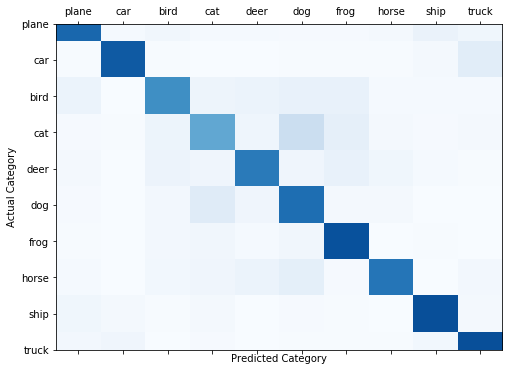

Category   - Accuracy
plane      - 78.6
car        - 83.9
bird       - 63.6
cat        - 52.9
deer       - 71.1
dog        - 76.1
frog       - 87.4
horse      - 73.1
ship       - 88.0
truck      - 87.9

Selected workers

[ 7 55 92 30 28 19 16 31  3 49 21 75 36 76 43]
Worker 7 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 92 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 19 : is  Stealthy_Attacker
Worker 16 : is  Stealthy_Attacker
Worker 31 : is  Stealthy_Attacker
Worker 3 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 21 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 76 : is  Honest
Worker 43 : is  Honest

 | Global Training Round : 22 |


Worker 7 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.913434
Train Epoch: 1 [400/500	(81%)]	Loss: 1.065160
Train Epoch: 2 [0/500	(1%)]	Loss: 0.411826
Train Epoch: 2 [400/500	(81%)]	Loss: 0.557996
Train Epoch: 3 [0/500	(1%)]	Loss: 0.310211
Train Epoch: 3 [400/500	(81%)]	Loss: 0.489845
Train Epoch: 4 [0/500	(1%)]	Loss: 0.290376
Train Epoch: 4 [400/500	(81%)]	Loss: 0.337373
Train Epoch: 5 [0/500	(1%)]	Loss: 0.399186
Train Epoch: 5 [400/500	(81%)]	Loss: 0.397438

Worker 7 ends training in Global Round:22 |

Worker 55 starts training in Global Round:22 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  22


Train Epoch: 1 [0/500	(1%)]	Loss: 1.185677
Train Epoch: 1 [400/500	(81%)]	Loss: 0.924564
Train Epoch: 2 [0/500	(1%)]	Loss: 0.745754
Train Epoch: 2 [400/500	(81%)]	Loss: 0.791571
Train Epoch: 3 [0/500	(1%)]	Loss: 0.372593
Train Epoch: 3 [400/500	(81%)]	Loss: 0.532981
Train Epoch: 4 [0/500	(1%)]	Loss: 0.365900
Train Epoch: 4 [400/500	(81%)]	Loss: 0.559273
Train Epoch: 5 [0/500	(1%)]	Loss: 0.375308
Train Epoch: 5 [400/500	(81%)]	Loss: 0.398771

Performed attacks 1
Worker 55 ends training in Global Round:22 |

Worker 92 starts training in Global Round:22 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  22


Train Epoch: 1 [0/500	(1%)]	Loss: 1.270059
Train Epoch: 1 [400/500	(81%)]	Loss: 0.773622
Train Epoch: 2 [0/500	(1%)]	Loss: 0.757585
Train Epoch: 2 [400/500	(81%)]	Loss: 0.708971
Train Epoch: 3 [0/500	(1%)]	Loss: 0.668679
Train Epoch: 3 [400/500	(81%)]	Loss: 0.408721
Train Epoch: 4 [0/500	(1%)]	Loss: 0.255889
Train Epoch: 4 [400/500	(81%)]	Loss: 0.436666
Train Epoch: 5 [0/500	(1%)]	Loss: 0.334093
Train Epoch: 5 [400/500	(81%)]	Loss: 0.535957

Performed attacks 2
Worker 92 ends training in Global Round:22 |

Worker 30 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.534294
Train Epoch: 1 [400/500	(81%)]	Loss: 0.713726
Train Epoch: 2 [0/500	(1%)]	Loss: 0.344719
Train Epoch: 2 [400/500	(81%)]	Loss: 0.543189
Train Epoch: 3 [0/500	(1%)]	Loss: 0.380731
Train Epoch: 3 [400/500	(81%)]	Loss: 0.591844
Train Epoch: 4 [0/500	(1%)]	Loss: 0.389864
Train Epoch: 4 [400/500	(81%)]	Loss: 0.315637
Train Epoch: 5 [0/500	(1%)]	Loss: 0.367514
Train Epoch: 5 [400/500	(81%)]	Loss: 0.572657

Worker 30 ends training in Global Round:22 |

Worker 28 starts training in Global Round:22 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  22


Train Epoch: 1 [0/500	(1%)]	Loss: 1.235511
Train Epoch: 1 [400/500	(81%)]	Loss: 0.932556
Train Epoch: 2 [0/500	(1%)]	Loss: 0.628577
Train Epoch: 2 [400/500	(81%)]	Loss: 0.657040
Train Epoch: 3 [0/500	(1%)]	Loss: 0.566394
Train Epoch: 3 [400/500	(81%)]	Loss: 0.579367
Train Epoch: 4 [0/500	(1%)]	Loss: 0.508506
Train Epoch: 4 [400/500	(81%)]	Loss: 0.298997
Train Epoch: 5 [0/500	(1%)]	Loss: 0.233863
Train Epoch: 5 [400/500	(81%)]	Loss: 0.338068

Performed attacks 3
Worker 28 ends training in Global Round:22 |

Worker 19 starts training in Global Round:22 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  22


Train Epoch: 1 [0/500	(1%)]	Loss: 0.859044
Train Epoch: 1 [400/500	(81%)]	Loss: 0.682942
Train Epoch: 2 [0/500	(1%)]	Loss: 0.389041
Train Epoch: 2 [400/500	(81%)]	Loss: 0.662789
Train Epoch: 3 [0/500	(1%)]	Loss: 0.430092
Train Epoch: 3 [400/500	(81%)]	Loss: 0.567576
Train Epoch: 4 [0/500	(1%)]	Loss: 0.264316
Train Epoch: 4 [400/500	(81%)]	Loss: 0.528539
Train Epoch: 5 [0/500	(1%)]	Loss: 0.407129
Train Epoch: 5 [400/500	(81%)]	Loss: 0.410939

Performed attacks 4
Worker 19 ends training in Global Round:22 |

Worker 16 starts training in Global Round:22 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  22


Train Epoch: 1 [0/500	(1%)]	Loss: 1.424717
Train Epoch: 1 [400/500	(81%)]	Loss: 1.361755
Train Epoch: 2 [0/500	(1%)]	Loss: 0.524930
Train Epoch: 2 [400/500	(81%)]	Loss: 0.663159
Train Epoch: 3 [0/500	(1%)]	Loss: 0.549616
Train Epoch: 3 [400/500	(81%)]	Loss: 0.701046
Train Epoch: 4 [0/500	(1%)]	Loss: 0.357223
Train Epoch: 4 [400/500	(81%)]	Loss: 0.536000
Train Epoch: 5 [0/500	(1%)]	Loss: 0.404241
Train Epoch: 5 [400/500	(81%)]	Loss: 0.303278

Performed attacks 5
Worker 16 ends training in Global Round:22 |

Worker 31 starts training in Global Round:22 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  22


Train Epoch: 1 [0/500	(1%)]	Loss: 0.980386
Train Epoch: 1 [400/500	(81%)]	Loss: 0.948286
Train Epoch: 2 [0/500	(1%)]	Loss: 0.495790
Train Epoch: 2 [400/500	(81%)]	Loss: 0.666219
Train Epoch: 3 [0/500	(1%)]	Loss: 0.575466
Train Epoch: 3 [400/500	(81%)]	Loss: 0.781956
Train Epoch: 4 [0/500	(1%)]	Loss: 0.322094
Train Epoch: 4 [400/500	(81%)]	Loss: 0.340681
Train Epoch: 5 [0/500	(1%)]	Loss: 0.412185
Train Epoch: 5 [400/500	(81%)]	Loss: 0.542098

Performed attacks 6
Worker 31 ends training in Global Round:22 |

Worker 3 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.640553
Train Epoch: 1 [400/500	(81%)]	Loss: 0.688272
Train Epoch: 2 [0/500	(1%)]	Loss: 0.479061
Train Epoch: 2 [400/500	(81%)]	Loss: 0.547362
Train Epoch: 3 [0/500	(1%)]	Loss: 0.382234
Train Epoch: 3 [400/500	(81%)]	Loss: 0.664846
Train Epoch: 4 [0/500	(1%)]	Loss: 0.292501
Train Epoch: 4 [400/500	(81%)]	Loss: 0.373374
Train Epoch: 5 [0/500	(1%)]	Loss: 0.312336
Train Epoch: 5 [400/500	(81%)]	Loss: 0.291626

Worker 3 ends training in Global Round:22 |

Worker 49 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.607539
Train Epoch: 1 [400/500	(81%)]	Loss: 0.868089
Train Epoch: 2 [0/500	(1%)]	Loss: 0.342489
Train Epoch: 2 [400/500	(81%)]	Loss: 0.593235
Train Epoch: 3 [0/500	(1%)]	Loss: 0.297246
Train Epoch: 3 [400/500	(81%)]	Loss: 0.514515
Train Epoch: 4 [0/500	(1%)]	Loss: 0.351647
Train Epoch: 4 [400/500	(81%)]	Loss: 0.454348
Train Epoch: 5 [0/500	(1%)]	Loss: 0.420286
Train Epoch: 5 [400/500	(81%)]	Loss: 0.444396

Worker 49 ends training in Global Round:22 |

Worker 21 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.743709
Train Epoch: 1 [400/500	(81%)]	Loss: 0.693449
Train Epoch: 2 [0/500	(1%)]	Loss: 0.430313
Train Epoch: 2 [400/500	(81%)]	Loss: 0.684229
Train Epoch: 3 [0/500	(1%)]	Loss: 0.530832
Train Epoch: 3 [400/500	(81%)]	Loss: 0.540385
Train Epoch: 4 [0/500	(1%)]	Loss: 0.377511
Train Epoch: 4 [400/500	(81%)]	Loss: 0.396442
Train Epoch: 5 [0/500	(1%)]	Loss: 0.346073
Train Epoch: 5 [400/500	(81%)]	Loss: 0.361648

Worker 21 ends training in Global Round:22 |

Worker 75 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.678875
Train Epoch: 1 [400/500	(81%)]	Loss: 1.041451
Train Epoch: 2 [0/500	(1%)]	Loss: 0.525249
Train Epoch: 2 [400/500	(81%)]	Loss: 0.657646
Train Epoch: 3 [0/500	(1%)]	Loss: 0.497021
Train Epoch: 3 [400/500	(81%)]	Loss: 0.508055
Train Epoch: 4 [0/500	(1%)]	Loss: 0.418064
Train Epoch: 4 [400/500	(81%)]	Loss: 0.513814
Train Epoch: 5 [0/500	(1%)]	Loss: 0.332417
Train Epoch: 5 [400/500	(81%)]	Loss: 0.287954

Worker 75 ends training in Global Round:22 |

Worker 36 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.840729
Train Epoch: 1 [400/500	(81%)]	Loss: 0.824675
Train Epoch: 2 [0/500	(1%)]	Loss: 0.609002
Train Epoch: 2 [400/500	(81%)]	Loss: 0.612178
Train Epoch: 3 [0/500	(1%)]	Loss: 0.339632
Train Epoch: 3 [400/500	(81%)]	Loss: 0.608176
Train Epoch: 4 [0/500	(1%)]	Loss: 0.356985
Train Epoch: 4 [400/500	(81%)]	Loss: 0.280887
Train Epoch: 5 [0/500	(1%)]	Loss: 0.246258
Train Epoch: 5 [400/500	(81%)]	Loss: 0.320111

Worker 36 ends training in Global Round:22 |

Worker 76 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.501117
Train Epoch: 1 [400/500	(81%)]	Loss: 0.494642
Train Epoch: 2 [0/500	(1%)]	Loss: 0.288231
Train Epoch: 2 [400/500	(81%)]	Loss: 0.424004
Train Epoch: 3 [0/500	(1%)]	Loss: 0.313651
Train Epoch: 3 [400/500	(81%)]	Loss: 0.361593
Train Epoch: 4 [0/500	(1%)]	Loss: 0.198296
Train Epoch: 4 [400/500	(81%)]	Loss: 0.286672
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203133
Train Epoch: 5 [400/500	(81%)]	Loss: 0.261484

Worker 76 ends training in Global Round:22 |

Worker 43 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.750865
Train Epoch: 1 [400/500	(81%)]	Loss: 0.644782
Train Epoch: 2 [0/500	(1%)]	Loss: 0.511171
Train Epoch: 2 [400/500	(81%)]	Loss: 0.518797
Train Epoch: 3 [0/500	(1%)]	Loss: 0.389070
Train Epoch: 3 [400/500	(81%)]	Loss: 0.469244
Train Epoch: 4 [0/500	(1%)]	Loss: 0.382944
Train Epoch: 4 [400/500	(81%)]	Loss: 0.297905
Train Epoch: 5 [0/500	(1%)]	Loss: 0.264035
Train Epoch: 5 [400/500	(81%)]	Loss: 0.363829

Worker 43 ends training in Global Round:22 |
Last layer biases  [array([ 0.03133054, -0.03199629, -0.01651798,  0.03573355,  0.03982242,
       -0.01969826,  0.03896176, -0.00483545, -0.02019607, -0.03670281],
      dtype=float32), array([ 0.03302969, -0.02893493, -0.01639967,  0.03631989,  0.04301626,
       -0.01745172,  0.04405549, -0.02271234, -0.01435166, -0.04066955],
      dtype=float32), array([ 0.03720544, -0.02705696, -0.01563566,  0.03610926,  0.04240895,
       -0.01854895,  0.04187655, -0.02247722, -0.01696426, -0.04101571],
      dtyp

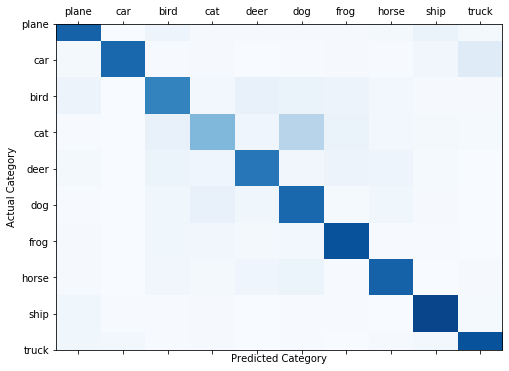

Category   - Accuracy
plane      - 80.8
car        - 78.7
bird       - 67.7
cat        - 45.2
deer       - 72.6
dog        - 78.7
frog       - 86.8
horse      - 80.7
ship       - 91.7
truck      - 87.1

Selected workers

[21 65 32 40 46 83 60  2 36 98 55 81 54 86 30]
Worker 21 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 32 : is  Honest
Worker 40 : is  Honest
Worker 46 : is  Stealthy_Attacker
Worker 83 : is  Honest
Worker 60 : is  Honest
Worker 2 : is  Honest
Worker 36 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 54 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 30 : is  Honest

 | Global Training Round : 23 |


Worker 21 starts training in Global Round:23 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  23


Train Epoch: 1 [0/500	(1%)]	Loss: 0.972211
Train Epoch: 1 [400/500	(81%)]	Loss: 0.817254
Train Epoch: 2 [0/500	(1%)]	Loss: 0.490591
Train Epoch: 2 [400/500	(81%)]	Loss: 0.518070
Train Epoch: 3 [0/500	(1%)]	Loss: 0.379869
Train Epoch: 3 [400/500	(81%)]	Loss: 0.408455
Train Epoch: 4 [0/500	(1%)]	Loss: 0.324639
Train Epoch: 4 [400/500	(81%)]	Loss: 0.501177
Train Epoch: 5 [0/500	(1%)]	Loss: 0.274066
Train Epoch: 5 [400/500	(81%)]	Loss: 0.313382

Performed attacks 1
Worker 21 ends training in Global Round:23 |

Worker 65 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.491550
Train Epoch: 1 [400/500	(81%)]	Loss: 0.637422
Train Epoch: 2 [0/500	(1%)]	Loss: 0.490392
Train Epoch: 2 [400/500	(81%)]	Loss: 0.449703
Train Epoch: 3 [0/500	(1%)]	Loss: 0.288487
Train Epoch: 3 [400/500	(81%)]	Loss: 0.384098
Train Epoch: 4 [0/500	(1%)]	Loss: 0.308739
Train Epoch: 4 [400/500	(81%)]	Loss: 0.270324
Train Epoch: 5 [0/500	(1%)]	Loss: 0.197726
Train Epoch: 5 [400/500	(81%)]	Loss: 0.357212

Worker 65 ends training in Global Round:23 |

Worker 32 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.520788
Train Epoch: 1 [400/500	(81%)]	Loss: 0.916094
Train Epoch: 2 [0/500	(1%)]	Loss: 0.459602
Train Epoch: 2 [400/500	(81%)]	Loss: 0.451131
Train Epoch: 3 [0/500	(1%)]	Loss: 0.358328
Train Epoch: 3 [400/500	(81%)]	Loss: 0.479205
Train Epoch: 4 [0/500	(1%)]	Loss: 0.334918
Train Epoch: 4 [400/500	(81%)]	Loss: 0.422504
Train Epoch: 5 [0/500	(1%)]	Loss: 0.281098
Train Epoch: 5 [400/500	(81%)]	Loss: 0.486062

Worker 32 ends training in Global Round:23 |

Worker 40 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.342902
Train Epoch: 1 [400/500	(81%)]	Loss: 0.658983
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209265
Train Epoch: 2 [400/500	(81%)]	Loss: 0.378728
Train Epoch: 3 [0/500	(1%)]	Loss: 0.326095
Train Epoch: 3 [400/500	(81%)]	Loss: 0.244711
Train Epoch: 4 [0/500	(1%)]	Loss: 0.424185
Train Epoch: 4 [400/500	(81%)]	Loss: 0.303631
Train Epoch: 5 [0/500	(1%)]	Loss: 0.297977
Train Epoch: 5 [400/500	(81%)]	Loss: 0.468079

Worker 40 ends training in Global Round:23 |

Worker 46 starts training in Global Round:23 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  23


Train Epoch: 1 [0/500	(1%)]	Loss: 0.872709
Train Epoch: 1 [400/500	(81%)]	Loss: 0.758940
Train Epoch: 2 [0/500	(1%)]	Loss: 0.507931
Train Epoch: 2 [400/500	(81%)]	Loss: 0.575091
Train Epoch: 3 [0/500	(1%)]	Loss: 0.462549
Train Epoch: 3 [400/500	(81%)]	Loss: 0.414499
Train Epoch: 4 [0/500	(1%)]	Loss: 0.335139
Train Epoch: 4 [400/500	(81%)]	Loss: 0.405049
Train Epoch: 5 [0/500	(1%)]	Loss: 0.369996
Train Epoch: 5 [400/500	(81%)]	Loss: 0.277380

Performed attacks 2
Worker 46 ends training in Global Round:23 |

Worker 83 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.624572
Train Epoch: 1 [400/500	(81%)]	Loss: 0.871905
Train Epoch: 2 [0/500	(1%)]	Loss: 0.396346
Train Epoch: 2 [400/500	(81%)]	Loss: 0.416940
Train Epoch: 3 [0/500	(1%)]	Loss: 0.397346
Train Epoch: 3 [400/500	(81%)]	Loss: 0.423691
Train Epoch: 4 [0/500	(1%)]	Loss: 0.293414
Train Epoch: 4 [400/500	(81%)]	Loss: 0.512206
Train Epoch: 5 [0/500	(1%)]	Loss: 0.213088
Train Epoch: 5 [400/500	(81%)]	Loss: 0.379291

Worker 83 ends training in Global Round:23 |

Worker 60 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.824502
Train Epoch: 1 [400/500	(81%)]	Loss: 0.870386
Train Epoch: 2 [0/500	(1%)]	Loss: 0.422417
Train Epoch: 2 [400/500	(81%)]	Loss: 0.641477
Train Epoch: 3 [0/500	(1%)]	Loss: 0.408603
Train Epoch: 3 [400/500	(81%)]	Loss: 0.408734
Train Epoch: 4 [0/500	(1%)]	Loss: 0.288921
Train Epoch: 4 [400/500	(81%)]	Loss: 0.303219
Train Epoch: 5 [0/500	(1%)]	Loss: 0.254123
Train Epoch: 5 [400/500	(81%)]	Loss: 0.270533

Worker 60 ends training in Global Round:23 |

Worker 2 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.721121
Train Epoch: 1 [400/500	(81%)]	Loss: 0.599942
Train Epoch: 2 [0/500	(1%)]	Loss: 0.539977
Train Epoch: 2 [400/500	(81%)]	Loss: 0.631539
Train Epoch: 3 [0/500	(1%)]	Loss: 0.267426
Train Epoch: 3 [400/500	(81%)]	Loss: 0.371743
Train Epoch: 4 [0/500	(1%)]	Loss: 0.279760
Train Epoch: 4 [400/500	(81%)]	Loss: 0.354294
Train Epoch: 5 [0/500	(1%)]	Loss: 0.190520
Train Epoch: 5 [400/500	(81%)]	Loss: 0.311003

Worker 2 ends training in Global Round:23 |

Worker 36 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.349744
Train Epoch: 1 [400/500	(81%)]	Loss: 0.624043
Train Epoch: 2 [0/500	(1%)]	Loss: 0.348641
Train Epoch: 2 [400/500	(81%)]	Loss: 0.443862
Train Epoch: 3 [0/500	(1%)]	Loss: 0.379589
Train Epoch: 3 [400/500	(81%)]	Loss: 0.299125
Train Epoch: 4 [0/500	(1%)]	Loss: 0.256352
Train Epoch: 4 [400/500	(81%)]	Loss: 0.276814
Train Epoch: 5 [0/500	(1%)]	Loss: 0.181845
Train Epoch: 5 [400/500	(81%)]	Loss: 0.503720

Worker 36 ends training in Global Round:23 |

Worker 98 starts training in Global Round:23 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  23


Train Epoch: 1 [0/500	(1%)]	Loss: 1.451038
Train Epoch: 1 [400/500	(81%)]	Loss: 0.881716
Train Epoch: 2 [0/500	(1%)]	Loss: 0.621543
Train Epoch: 2 [400/500	(81%)]	Loss: 0.713533
Train Epoch: 3 [0/500	(1%)]	Loss: 0.590049
Train Epoch: 3 [400/500	(81%)]	Loss: 0.441462
Train Epoch: 4 [0/500	(1%)]	Loss: 0.498343
Train Epoch: 4 [400/500	(81%)]	Loss: 0.399784
Train Epoch: 5 [0/500	(1%)]	Loss: 0.323775
Train Epoch: 5 [400/500	(81%)]	Loss: 0.451427

Performed attacks 3
Worker 98 ends training in Global Round:23 |

Worker 55 starts training in Global Round:23 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  23


Train Epoch: 1 [0/500	(1%)]	Loss: 1.121080
Train Epoch: 1 [400/500	(81%)]	Loss: 0.719724
Train Epoch: 2 [0/500	(1%)]	Loss: 0.519152
Train Epoch: 2 [400/500	(81%)]	Loss: 0.741667
Train Epoch: 3 [0/500	(1%)]	Loss: 0.412080
Train Epoch: 3 [400/500	(81%)]	Loss: 0.658296
Train Epoch: 4 [0/500	(1%)]	Loss: 0.206686
Train Epoch: 4 [400/500	(81%)]	Loss: 0.662781
Train Epoch: 5 [0/500	(1%)]	Loss: 0.249116
Train Epoch: 5 [400/500	(81%)]	Loss: 0.312270

Performed attacks 4
Worker 55 ends training in Global Round:23 |

Worker 81 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.588127
Train Epoch: 1 [400/500	(81%)]	Loss: 0.734167
Train Epoch: 2 [0/500	(1%)]	Loss: 0.400519
Train Epoch: 2 [400/500	(81%)]	Loss: 0.571100
Train Epoch: 3 [0/500	(1%)]	Loss: 0.408418
Train Epoch: 3 [400/500	(81%)]	Loss: 0.500248
Train Epoch: 4 [0/500	(1%)]	Loss: 0.240136
Train Epoch: 4 [400/500	(81%)]	Loss: 0.381135
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203039
Train Epoch: 5 [400/500	(81%)]	Loss: 0.470006

Worker 81 ends training in Global Round:23 |

Worker 54 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.526566
Train Epoch: 1 [400/500	(81%)]	Loss: 0.607369
Train Epoch: 2 [0/500	(1%)]	Loss: 0.468916
Train Epoch: 2 [400/500	(81%)]	Loss: 0.484167
Train Epoch: 3 [0/500	(1%)]	Loss: 0.326160
Train Epoch: 3 [400/500	(81%)]	Loss: 0.344368
Train Epoch: 4 [0/500	(1%)]	Loss: 0.306741
Train Epoch: 4 [400/500	(81%)]	Loss: 0.335261
Train Epoch: 5 [0/500	(1%)]	Loss: 0.209561
Train Epoch: 5 [400/500	(81%)]	Loss: 0.438805

Worker 54 ends training in Global Round:23 |

Worker 86 starts training in Global Round:23 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  23


Train Epoch: 1 [0/500	(1%)]	Loss: 1.003419
Train Epoch: 1 [400/500	(81%)]	Loss: 0.903589
Train Epoch: 2 [0/500	(1%)]	Loss: 0.351683
Train Epoch: 2 [400/500	(81%)]	Loss: 0.502580
Train Epoch: 3 [0/500	(1%)]	Loss: 0.512985
Train Epoch: 3 [400/500	(81%)]	Loss: 0.354214
Train Epoch: 4 [0/500	(1%)]	Loss: 0.347396
Train Epoch: 4 [400/500	(81%)]	Loss: 0.330087
Train Epoch: 5 [0/500	(1%)]	Loss: 0.259137
Train Epoch: 5 [400/500	(81%)]	Loss: 0.237931

Performed attacks 5
Worker 86 ends training in Global Round:23 |

Worker 30 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.573669
Train Epoch: 1 [400/500	(81%)]	Loss: 0.536986
Train Epoch: 2 [0/500	(1%)]	Loss: 0.267220
Train Epoch: 2 [400/500	(81%)]	Loss: 0.400050
Train Epoch: 3 [0/500	(1%)]	Loss: 0.306579
Train Epoch: 3 [400/500	(81%)]	Loss: 0.230084
Train Epoch: 4 [0/500	(1%)]	Loss: 0.244100
Train Epoch: 4 [400/500	(81%)]	Loss: 0.440023
Train Epoch: 5 [0/500	(1%)]	Loss: 0.209035
Train Epoch: 5 [400/500	(81%)]	Loss: 0.473833

Worker 30 ends training in Global Round:23 |
Last layer biases  [array([ 0.03625407, -0.03173133, -0.013075  ,  0.03621984,  0.04385861,
       -0.01932952,  0.04295422, -0.02483022, -0.01652275, -0.03789647],
      dtype=float32), array([ 0.03429025, -0.03052215, -0.01696274,  0.03238696,  0.03403717,
       -0.01569732,  0.0403012 , -0.00339222, -0.01748641, -0.04105328],
      dtype=float32), array([ 0.03272838, -0.02649501, -0.01772695,  0.03077894,  0.03768398,
       -0.01880208,  0.04202103, -0.00417761, -0.01890051, -0.04120871],
      dtyp

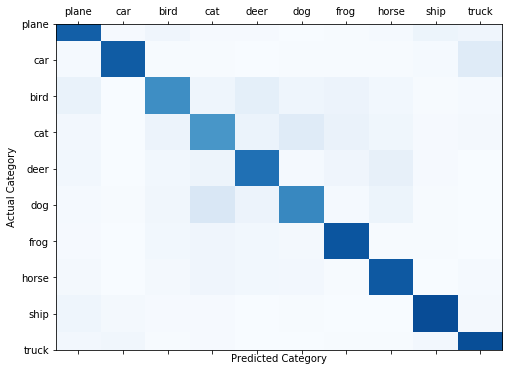

Category   - Accuracy
plane      - 81.7
car        - 82.9
bird       - 64.0
cat        - 60.5
deer       - 75.1
dog        - 66.3
frog       - 85.7
horse      - 84.1
ship       - 88.7
truck      - 88.5

Selected workers

[29 92 41 98 61 30 73 81 56 27 36 54 86 51 94]
Worker 29 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 41 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 61 : is  Honest
Worker 30 : is  Honest
Worker 73 : is  Honest
Worker 81 : is  Honest
Worker 56 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 54 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 51 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker

 | Global Training Round : 24 |


Worker 29 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.729268
Train Epoch: 1 [400/500	(81%)]	Loss: 0.616171
Train Epoch: 2 [0/500	(1%)]	Loss: 0.427919
Train Epoch: 2 [400/500	(81%)]	Loss: 0.424075
Train Epoch: 3 [0/500	(1%)]	Loss: 0.392527
Train Epoch: 3 [400/500	(81%)]	Loss: 0.378454
Train Epoch: 4 [0/500	(1%)]	Loss: 0.311516
Train Epoch: 4 [400/500	(81%)]	Loss: 0.343577
Train Epoch: 5 [0/500	(1%)]	Loss: 0.316061
Train Epoch: 5 [400/500	(81%)]	Loss: 0.271315

Worker 29 ends training in Global Round:24 |

Worker 92 starts training in Global Round:24 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  24


Train Epoch: 1 [0/500	(1%)]	Loss: 1.336545
Train Epoch: 1 [400/500	(81%)]	Loss: 1.103625
Train Epoch: 2 [0/500	(1%)]	Loss: 0.603141
Train Epoch: 2 [400/500	(81%)]	Loss: 0.598654
Train Epoch: 3 [0/500	(1%)]	Loss: 0.399018
Train Epoch: 3 [400/500	(81%)]	Loss: 0.564271
Train Epoch: 4 [0/500	(1%)]	Loss: 0.318873
Train Epoch: 4 [400/500	(81%)]	Loss: 0.338751
Train Epoch: 5 [0/500	(1%)]	Loss: 0.238385
Train Epoch: 5 [400/500	(81%)]	Loss: 0.397281

Performed attacks 1
Worker 92 ends training in Global Round:24 |

Worker 41 starts training in Global Round:24 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  24


Train Epoch: 1 [0/500	(1%)]	Loss: 1.386817
Train Epoch: 1 [400/500	(81%)]	Loss: 0.881462
Train Epoch: 2 [0/500	(1%)]	Loss: 0.695954
Train Epoch: 2 [400/500	(81%)]	Loss: 0.896965
Train Epoch: 3 [0/500	(1%)]	Loss: 0.622949
Train Epoch: 3 [400/500	(81%)]	Loss: 0.643752
Train Epoch: 4 [0/500	(1%)]	Loss: 0.502779
Train Epoch: 4 [400/500	(81%)]	Loss: 0.521809
Train Epoch: 5 [0/500	(1%)]	Loss: 0.487500
Train Epoch: 5 [400/500	(81%)]	Loss: 0.320518

Performed attacks 2
Worker 41 ends training in Global Round:24 |

Worker 98 starts training in Global Round:24 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  24


Train Epoch: 1 [0/500	(1%)]	Loss: 1.117272
Train Epoch: 1 [400/500	(81%)]	Loss: 0.879917
Train Epoch: 2 [0/500	(1%)]	Loss: 0.664777
Train Epoch: 2 [400/500	(81%)]	Loss: 0.636593
Train Epoch: 3 [0/500	(1%)]	Loss: 0.452257
Train Epoch: 3 [400/500	(81%)]	Loss: 0.680981
Train Epoch: 4 [0/500	(1%)]	Loss: 0.405665
Train Epoch: 4 [400/500	(81%)]	Loss: 0.629651
Train Epoch: 5 [0/500	(1%)]	Loss: 0.371961
Train Epoch: 5 [400/500	(81%)]	Loss: 0.472543

Performed attacks 3
Worker 98 ends training in Global Round:24 |

Worker 61 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.552604
Train Epoch: 1 [400/500	(81%)]	Loss: 0.881317
Train Epoch: 2 [0/500	(1%)]	Loss: 0.359267
Train Epoch: 2 [400/500	(81%)]	Loss: 0.654328
Train Epoch: 3 [0/500	(1%)]	Loss: 0.367080
Train Epoch: 3 [400/500	(81%)]	Loss: 0.567386
Train Epoch: 4 [0/500	(1%)]	Loss: 0.393539
Train Epoch: 4 [400/500	(81%)]	Loss: 0.279441
Train Epoch: 5 [0/500	(1%)]	Loss: 0.225441
Train Epoch: 5 [400/500	(81%)]	Loss: 0.273840

Worker 61 ends training in Global Round:24 |

Worker 30 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.459753
Train Epoch: 1 [400/500	(81%)]	Loss: 0.584841
Train Epoch: 2 [0/500	(1%)]	Loss: 0.198651
Train Epoch: 2 [400/500	(81%)]	Loss: 0.268537
Train Epoch: 3 [0/500	(1%)]	Loss: 0.388896
Train Epoch: 3 [400/500	(81%)]	Loss: 0.404870
Train Epoch: 4 [0/500	(1%)]	Loss: 0.258214
Train Epoch: 4 [400/500	(81%)]	Loss: 0.344744
Train Epoch: 5 [0/500	(1%)]	Loss: 0.281628
Train Epoch: 5 [400/500	(81%)]	Loss: 0.342739

Worker 30 ends training in Global Round:24 |

Worker 73 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.602862
Train Epoch: 1 [400/500	(81%)]	Loss: 0.530879
Train Epoch: 2 [0/500	(1%)]	Loss: 0.341420
Train Epoch: 2 [400/500	(81%)]	Loss: 0.587297
Train Epoch: 3 [0/500	(1%)]	Loss: 0.339683
Train Epoch: 3 [400/500	(81%)]	Loss: 0.406409
Train Epoch: 4 [0/500	(1%)]	Loss: 0.270553
Train Epoch: 4 [400/500	(81%)]	Loss: 0.357709
Train Epoch: 5 [0/500	(1%)]	Loss: 0.408939
Train Epoch: 5 [400/500	(81%)]	Loss: 0.291656

Worker 73 ends training in Global Round:24 |

Worker 81 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.590716
Train Epoch: 1 [400/500	(81%)]	Loss: 0.513466
Train Epoch: 2 [0/500	(1%)]	Loss: 0.354481
Train Epoch: 2 [400/500	(81%)]	Loss: 0.459199
Train Epoch: 3 [0/500	(1%)]	Loss: 0.328010
Train Epoch: 3 [400/500	(81%)]	Loss: 0.324146
Train Epoch: 4 [0/500	(1%)]	Loss: 0.239351
Train Epoch: 4 [400/500	(81%)]	Loss: 0.481040
Train Epoch: 5 [0/500	(1%)]	Loss: 0.220644
Train Epoch: 5 [400/500	(81%)]	Loss: 0.505834

Worker 81 ends training in Global Round:24 |

Worker 56 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.449965
Train Epoch: 1 [400/500	(81%)]	Loss: 0.816112
Train Epoch: 2 [0/500	(1%)]	Loss: 0.330053
Train Epoch: 2 [400/500	(81%)]	Loss: 0.394878
Train Epoch: 3 [0/500	(1%)]	Loss: 0.301467
Train Epoch: 3 [400/500	(81%)]	Loss: 0.380501
Train Epoch: 4 [0/500	(1%)]	Loss: 0.268557
Train Epoch: 4 [400/500	(81%)]	Loss: 0.338243
Train Epoch: 5 [0/500	(1%)]	Loss: 0.226345
Train Epoch: 5 [400/500	(81%)]	Loss: 0.336093

Worker 56 ends training in Global Round:24 |

Worker 27 starts training in Global Round:24 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  24


Train Epoch: 1 [0/500	(1%)]	Loss: 1.168953
Train Epoch: 1 [400/500	(81%)]	Loss: 0.925488
Train Epoch: 2 [0/500	(1%)]	Loss: 0.442635
Train Epoch: 2 [400/500	(81%)]	Loss: 0.908450
Train Epoch: 3 [0/500	(1%)]	Loss: 0.395747
Train Epoch: 3 [400/500	(81%)]	Loss: 0.438248
Train Epoch: 4 [0/500	(1%)]	Loss: 0.305779
Train Epoch: 4 [400/500	(81%)]	Loss: 0.375156
Train Epoch: 5 [0/500	(1%)]	Loss: 0.364794
Train Epoch: 5 [400/500	(81%)]	Loss: 0.365842

Performed attacks 4
Worker 27 ends training in Global Round:24 |

Worker 36 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.436379
Train Epoch: 1 [400/500	(81%)]	Loss: 0.527261
Train Epoch: 2 [0/500	(1%)]	Loss: 0.266732
Train Epoch: 2 [400/500	(81%)]	Loss: 0.547566
Train Epoch: 3 [0/500	(1%)]	Loss: 0.267907
Train Epoch: 3 [400/500	(81%)]	Loss: 0.465570
Train Epoch: 4 [0/500	(1%)]	Loss: 0.244365
Train Epoch: 4 [400/500	(81%)]	Loss: 0.394351
Train Epoch: 5 [0/500	(1%)]	Loss: 0.196687
Train Epoch: 5 [400/500	(81%)]	Loss: 0.327892

Worker 36 ends training in Global Round:24 |

Worker 54 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.446223
Train Epoch: 1 [400/500	(81%)]	Loss: 0.453064
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209511
Train Epoch: 2 [400/500	(81%)]	Loss: 0.565726
Train Epoch: 3 [0/500	(1%)]	Loss: 0.317602
Train Epoch: 3 [400/500	(81%)]	Loss: 0.414273
Train Epoch: 4 [0/500	(1%)]	Loss: 0.209982
Train Epoch: 4 [400/500	(81%)]	Loss: 0.451633
Train Epoch: 5 [0/500	(1%)]	Loss: 0.209491
Train Epoch: 5 [400/500	(81%)]	Loss: 0.255279

Worker 54 ends training in Global Round:24 |

Worker 86 starts training in Global Round:24 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  24


Train Epoch: 1 [0/500	(1%)]	Loss: 1.176414
Train Epoch: 1 [400/500	(81%)]	Loss: 0.745493
Train Epoch: 2 [0/500	(1%)]	Loss: 0.418202
Train Epoch: 2 [400/500	(81%)]	Loss: 0.520104
Train Epoch: 3 [0/500	(1%)]	Loss: 0.367936
Train Epoch: 3 [400/500	(81%)]	Loss: 0.360481
Train Epoch: 4 [0/500	(1%)]	Loss: 0.361273
Train Epoch: 4 [400/500	(81%)]	Loss: 0.305063
Train Epoch: 5 [0/500	(1%)]	Loss: 0.190011
Train Epoch: 5 [400/500	(81%)]	Loss: 0.464512

Performed attacks 5
Worker 86 ends training in Global Round:24 |

Worker 51 starts training in Global Round:24 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  24


Train Epoch: 1 [0/500	(1%)]	Loss: 0.932640
Train Epoch: 1 [400/500	(81%)]	Loss: 0.877623
Train Epoch: 2 [0/500	(1%)]	Loss: 0.474425
Train Epoch: 2 [400/500	(81%)]	Loss: 0.618568
Train Epoch: 3 [0/500	(1%)]	Loss: 0.546231
Train Epoch: 3 [400/500	(81%)]	Loss: 0.511530
Train Epoch: 4 [0/500	(1%)]	Loss: 0.442772
Train Epoch: 4 [400/500	(81%)]	Loss: 0.327864
Train Epoch: 5 [0/500	(1%)]	Loss: 0.209269
Train Epoch: 5 [400/500	(81%)]	Loss: 0.246228

Performed attacks 6
Worker 51 ends training in Global Round:24 |

Worker 94 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.793708
Train Epoch: 1 [400/500	(81%)]	Loss: 1.090923
Train Epoch: 2 [0/500	(1%)]	Loss: 0.337244
Train Epoch: 2 [400/500	(81%)]	Loss: 0.532247
Train Epoch: 3 [0/500	(1%)]	Loss: 0.425932
Train Epoch: 3 [400/500	(81%)]	Loss: 0.436439
Train Epoch: 4 [0/500	(1%)]	Loss: 0.348174
Train Epoch: 4 [400/500	(81%)]	Loss: 0.423282
Train Epoch: 5 [0/500	(1%)]	Loss: 0.325174
Train Epoch: 5 [400/500	(81%)]	Loss: 0.361676

Worker 94 ends training in Global Round:24 |
Last layer biases  [array([ 0.03394568, -0.03078664, -0.0185687 ,  0.03541568,  0.03812571,
       -0.0208756 ,  0.04210573, -0.00405458, -0.01974318, -0.03966264],
      dtype=float32), array([ 0.03588571, -0.02944097, -0.01607202,  0.03808705,  0.0448866 ,
       -0.01777987,  0.04213331, -0.0255522 , -0.01812428, -0.0381218 ],
      dtype=float32), array([ 0.034102  , -0.02950176, -0.01455292,  0.04003427,  0.04514269,
       -0.01678642,  0.04075762, -0.02779643, -0.01549283, -0.04000475],
      dtyp

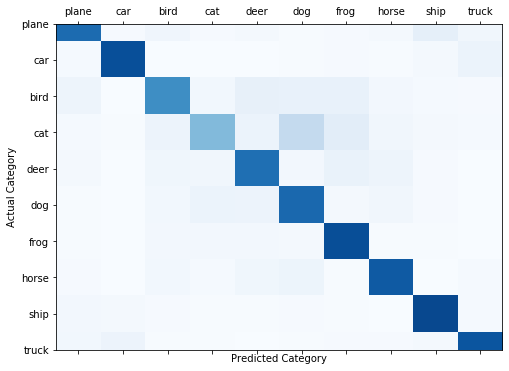

Category   - Accuracy
plane      - 77.3
car        - 88.2
bird       - 63.8
cat        - 44.3
deer       - 75.5
dog        - 78.5
frog       - 88.5
horse      - 83.7
ship       - 90.5
truck      - 85.7

Selected workers

[74  1 34 38 67 64  2  5 37  4 92  8 53 57 97]
Worker 74 : is  Honest
Worker 1 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 67 : is  Stealthy_Attacker
Worker 64 : is  Honest
Worker 2 : is  Honest
Worker 5 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 4 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 8 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 57 : is  Honest
Worker 97 : is  Stealthy_Attacker

 | Global Training Round : 25 |


Worker 74 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.617206
Train Epoch: 1 [400/500	(81%)]	Loss: 0.718387
Train Epoch: 2 [0/500	(1%)]	Loss: 0.609582
Train Epoch: 2 [400/500	(81%)]	Loss: 0.513628
Train Epoch: 3 [0/500	(1%)]	Loss: 0.383462
Train Epoch: 3 [400/500	(81%)]	Loss: 0.498737
Train Epoch: 4 [0/500	(1%)]	Loss: 0.281774
Train Epoch: 4 [400/500	(81%)]	Loss: 0.575573
Train Epoch: 5 [0/500	(1%)]	Loss: 0.208082
Train Epoch: 5 [400/500	(81%)]	Loss: 0.334636

Worker 74 ends training in Global Round:25 |

Worker 1 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.800416
Train Epoch: 1 [400/500	(81%)]	Loss: 0.805218
Train Epoch: 2 [0/500	(1%)]	Loss: 0.359146
Train Epoch: 2 [400/500	(81%)]	Loss: 0.849719
Train Epoch: 3 [0/500	(1%)]	Loss: 0.451700
Train Epoch: 3 [400/500	(81%)]	Loss: 0.512327
Train Epoch: 4 [0/500	(1%)]	Loss: 0.263882
Train Epoch: 4 [400/500	(81%)]	Loss: 0.579982
Train Epoch: 5 [0/500	(1%)]	Loss: 0.360855
Train Epoch: 5 [400/500	(81%)]	Loss: 0.398988

Worker 1 ends training in Global Round:25 |

Worker 34 starts training in Global Round:25 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  25


Train Epoch: 1 [0/500	(1%)]	Loss: 1.101547
Train Epoch: 1 [400/500	(81%)]	Loss: 0.942277
Train Epoch: 2 [0/500	(1%)]	Loss: 0.619801
Train Epoch: 2 [400/500	(81%)]	Loss: 0.508932
Train Epoch: 3 [0/500	(1%)]	Loss: 0.384572
Train Epoch: 3 [400/500	(81%)]	Loss: 0.582704
Train Epoch: 4 [0/500	(1%)]	Loss: 0.537321
Train Epoch: 4 [400/500	(81%)]	Loss: 0.541455
Train Epoch: 5 [0/500	(1%)]	Loss: 0.230716
Train Epoch: 5 [400/500	(81%)]	Loss: 0.521921

Performed attacks 1
Worker 34 ends training in Global Round:25 |

Worker 38 starts training in Global Round:25 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  25


Train Epoch: 1 [0/500	(1%)]	Loss: 1.372712
Train Epoch: 1 [400/500	(81%)]	Loss: 0.992243
Train Epoch: 2 [0/500	(1%)]	Loss: 0.559606
Train Epoch: 2 [400/500	(81%)]	Loss: 0.514145
Train Epoch: 3 [0/500	(1%)]	Loss: 0.370423
Train Epoch: 3 [400/500	(81%)]	Loss: 0.558998
Train Epoch: 4 [0/500	(1%)]	Loss: 0.398029
Train Epoch: 4 [400/500	(81%)]	Loss: 0.361176
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192624
Train Epoch: 5 [400/500	(81%)]	Loss: 0.401908

Performed attacks 2
Worker 38 ends training in Global Round:25 |

Worker 67 starts training in Global Round:25 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  25


Train Epoch: 1 [0/500	(1%)]	Loss: 1.299616
Train Epoch: 1 [400/500	(81%)]	Loss: 0.732038
Train Epoch: 2 [0/500	(1%)]	Loss: 0.490411
Train Epoch: 2 [400/500	(81%)]	Loss: 0.655115
Train Epoch: 3 [0/500	(1%)]	Loss: 0.529438
Train Epoch: 3 [400/500	(81%)]	Loss: 0.462840
Train Epoch: 4 [0/500	(1%)]	Loss: 0.386311
Train Epoch: 4 [400/500	(81%)]	Loss: 0.455698
Train Epoch: 5 [0/500	(1%)]	Loss: 0.359242
Train Epoch: 5 [400/500	(81%)]	Loss: 0.465031

Performed attacks 3
Worker 67 ends training in Global Round:25 |

Worker 64 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.475039
Train Epoch: 1 [400/500	(81%)]	Loss: 0.745386
Train Epoch: 2 [0/500	(1%)]	Loss: 0.349395
Train Epoch: 2 [400/500	(81%)]	Loss: 0.378968
Train Epoch: 3 [0/500	(1%)]	Loss: 0.421779
Train Epoch: 3 [400/500	(81%)]	Loss: 0.367983
Train Epoch: 4 [0/500	(1%)]	Loss: 0.294581
Train Epoch: 4 [400/500	(81%)]	Loss: 0.456358
Train Epoch: 5 [0/500	(1%)]	Loss: 0.186750
Train Epoch: 5 [400/500	(81%)]	Loss: 0.440172

Worker 64 ends training in Global Round:25 |

Worker 2 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.563359
Train Epoch: 1 [400/500	(81%)]	Loss: 0.617735
Train Epoch: 2 [0/500	(1%)]	Loss: 0.279468
Train Epoch: 2 [400/500	(81%)]	Loss: 0.414685
Train Epoch: 3 [0/500	(1%)]	Loss: 0.379234
Train Epoch: 3 [400/500	(81%)]	Loss: 0.487126
Train Epoch: 4 [0/500	(1%)]	Loss: 0.237142
Train Epoch: 4 [400/500	(81%)]	Loss: 0.279051
Train Epoch: 5 [0/500	(1%)]	Loss: 0.139952
Train Epoch: 5 [400/500	(81%)]	Loss: 0.391499

Worker 2 ends training in Global Round:25 |

Worker 5 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.551970
Train Epoch: 1 [400/500	(81%)]	Loss: 0.723475
Train Epoch: 2 [0/500	(1%)]	Loss: 0.452795
Train Epoch: 2 [400/500	(81%)]	Loss: 0.433088
Train Epoch: 3 [0/500	(1%)]	Loss: 0.380601
Train Epoch: 3 [400/500	(81%)]	Loss: 0.525713
Train Epoch: 4 [0/500	(1%)]	Loss: 0.297002
Train Epoch: 4 [400/500	(81%)]	Loss: 0.384304
Train Epoch: 5 [0/500	(1%)]	Loss: 0.184781
Train Epoch: 5 [400/500	(81%)]	Loss: 0.310682

Worker 5 ends training in Global Round:25 |

Worker 37 starts training in Global Round:25 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  25


Train Epoch: 1 [0/500	(1%)]	Loss: 1.333962
Train Epoch: 1 [400/500	(81%)]	Loss: 0.639156
Train Epoch: 2 [0/500	(1%)]	Loss: 0.404065
Train Epoch: 2 [400/500	(81%)]	Loss: 0.672784
Train Epoch: 3 [0/500	(1%)]	Loss: 0.474575
Train Epoch: 3 [400/500	(81%)]	Loss: 0.492319
Train Epoch: 4 [0/500	(1%)]	Loss: 0.341793
Train Epoch: 4 [400/500	(81%)]	Loss: 0.272166
Train Epoch: 5 [0/500	(1%)]	Loss: 0.274477
Train Epoch: 5 [400/500	(81%)]	Loss: 0.385483

Performed attacks 4
Worker 37 ends training in Global Round:25 |

Worker 4 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.613809
Train Epoch: 1 [400/500	(81%)]	Loss: 0.613606
Train Epoch: 2 [0/500	(1%)]	Loss: 0.498584
Train Epoch: 2 [400/500	(81%)]	Loss: 0.269735
Train Epoch: 3 [0/500	(1%)]	Loss: 0.300297
Train Epoch: 3 [400/500	(81%)]	Loss: 0.457962
Train Epoch: 4 [0/500	(1%)]	Loss: 0.329126
Train Epoch: 4 [400/500	(81%)]	Loss: 0.204056
Train Epoch: 5 [0/500	(1%)]	Loss: 0.254964
Train Epoch: 5 [400/500	(81%)]	Loss: 0.318193

Worker 4 ends training in Global Round:25 |

Worker 92 starts training in Global Round:25 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  25


Train Epoch: 1 [0/500	(1%)]	Loss: 1.318910
Train Epoch: 1 [400/500	(81%)]	Loss: 0.661626
Train Epoch: 2 [0/500	(1%)]	Loss: 0.732691
Train Epoch: 2 [400/500	(81%)]	Loss: 0.624891
Train Epoch: 3 [0/500	(1%)]	Loss: 0.448060
Train Epoch: 3 [400/500	(81%)]	Loss: 0.583999
Train Epoch: 4 [0/500	(1%)]	Loss: 0.426935
Train Epoch: 4 [400/500	(81%)]	Loss: 0.551523
Train Epoch: 5 [0/500	(1%)]	Loss: 0.292092
Train Epoch: 5 [400/500	(81%)]	Loss: 0.546722

Performed attacks 5
Worker 92 ends training in Global Round:25 |

Worker 8 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.515425
Train Epoch: 1 [400/500	(81%)]	Loss: 0.583992
Train Epoch: 2 [0/500	(1%)]	Loss: 0.365793
Train Epoch: 2 [400/500	(81%)]	Loss: 0.393786
Train Epoch: 3 [0/500	(1%)]	Loss: 0.232423
Train Epoch: 3 [400/500	(81%)]	Loss: 0.525344
Train Epoch: 4 [0/500	(1%)]	Loss: 0.236606
Train Epoch: 4 [400/500	(81%)]	Loss: 0.400647
Train Epoch: 5 [0/500	(1%)]	Loss: 0.293729
Train Epoch: 5 [400/500	(81%)]	Loss: 0.369583

Worker 8 ends training in Global Round:25 |

Worker 53 starts training in Global Round:25 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  25


Train Epoch: 1 [0/500	(1%)]	Loss: 1.411283
Train Epoch: 1 [400/500	(81%)]	Loss: 0.789271
Train Epoch: 2 [0/500	(1%)]	Loss: 0.433827
Train Epoch: 2 [400/500	(81%)]	Loss: 0.492991
Train Epoch: 3 [0/500	(1%)]	Loss: 0.468457
Train Epoch: 3 [400/500	(81%)]	Loss: 0.677743
Train Epoch: 4 [0/500	(1%)]	Loss: 0.508235
Train Epoch: 4 [400/500	(81%)]	Loss: 0.562280
Train Epoch: 5 [0/500	(1%)]	Loss: 0.283800
Train Epoch: 5 [400/500	(81%)]	Loss: 0.403574

Performed attacks 6
Worker 53 ends training in Global Round:25 |

Worker 57 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.455146
Train Epoch: 1 [400/500	(81%)]	Loss: 0.667632
Train Epoch: 2 [0/500	(1%)]	Loss: 0.436198
Train Epoch: 2 [400/500	(81%)]	Loss: 0.530968
Train Epoch: 3 [0/500	(1%)]	Loss: 0.379126
Train Epoch: 3 [400/500	(81%)]	Loss: 0.706905
Train Epoch: 4 [0/500	(1%)]	Loss: 0.198629
Train Epoch: 4 [400/500	(81%)]	Loss: 0.450142
Train Epoch: 5 [0/500	(1%)]	Loss: 0.212874
Train Epoch: 5 [400/500	(81%)]	Loss: 0.341517

Worker 57 ends training in Global Round:25 |

Worker 97 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.557863
Train Epoch: 1 [400/500	(81%)]	Loss: 0.517904
Train Epoch: 2 [0/500	(1%)]	Loss: 0.371875
Train Epoch: 2 [400/500	(81%)]	Loss: 0.782509
Train Epoch: 3 [0/500	(1%)]	Loss: 0.350279
Train Epoch: 3 [400/500	(81%)]	Loss: 0.406081
Train Epoch: 4 [0/500	(1%)]	Loss: 0.364126
Train Epoch: 4 [400/500	(81%)]	Loss: 0.331855
Train Epoch: 5 [0/500	(1%)]	Loss: 0.241710
Train Epoch: 5 [400/500	(81%)]	Loss: 0.390802

Worker 97 ends training in Global Round:25 |
Last layer biases  [array([ 0.03361603, -0.030269  , -0.01536665,  0.03486092,  0.03517179,
       -0.01515525,  0.04110102, -0.00907646, -0.020596  , -0.03838487],
      dtype=float32), array([ 0.03413146, -0.02985167, -0.01615097,  0.03495522,  0.03969773,
       -0.02044819,  0.03894116, -0.00708956, -0.02093697, -0.0373467 ],
      dtype=float32), array([ 0.03512619, -0.02465629, -0.01670819,  0.03477963,  0.04345128,
       -0.01743321,  0.04428021, -0.02459985, -0.01700419, -0.04133404],
      dtyp

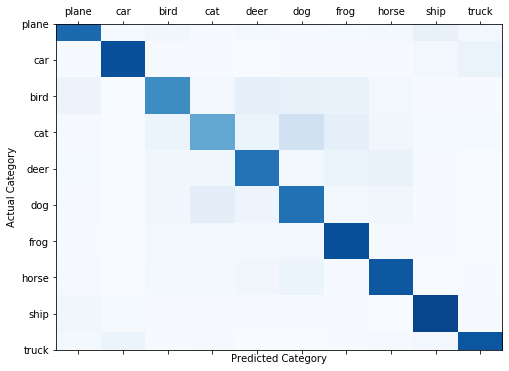

Category   - Accuracy
plane      - 78.5
car        - 87.5
bird       - 64.4
cat        - 52.5
deer       - 74.4
dog        - 74.8
frog       - 87.9
horse      - 84.7
ship       - 91.7
truck      - 85.2

Selected workers

[12 86 59 84 43 29 50 81 62 82 42 28 80 13 16]
Worker 12 : is  Stealthy_Attacker
Worker 86 : is  Stealthy_Attacker
Worker 59 : is  Stealthy_Attacker
Worker 84 : is  Honest
Worker 43 : is  Honest
Worker 29 : is  Honest
Worker 50 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 62 : is  Honest
Worker 82 : is  Honest
Worker 42 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 80 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 16 : is  Stealthy_Attacker

 | Global Training Round : 26 |


Worker 12 starts training in Global Round:26 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  26


Train Epoch: 1 [0/500	(1%)]	Loss: 1.349341
Train Epoch: 1 [400/500	(81%)]	Loss: 0.822251
Train Epoch: 2 [0/500	(1%)]	Loss: 0.493961
Train Epoch: 2 [400/500	(81%)]	Loss: 0.496148
Train Epoch: 3 [0/500	(1%)]	Loss: 0.353961
Train Epoch: 3 [400/500	(81%)]	Loss: 0.471678
Train Epoch: 4 [0/500	(1%)]	Loss: 0.306058
Train Epoch: 4 [400/500	(81%)]	Loss: 0.436515
Train Epoch: 5 [0/500	(1%)]	Loss: 0.321580
Train Epoch: 5 [400/500	(81%)]	Loss: 0.282469

Performed attacks 1
Worker 12 ends training in Global Round:26 |

Worker 86 starts training in Global Round:26 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  26


Train Epoch: 1 [0/500	(1%)]	Loss: 1.363341
Train Epoch: 1 [400/500	(81%)]	Loss: 0.692913
Train Epoch: 2 [0/500	(1%)]	Loss: 0.469779
Train Epoch: 2 [400/500	(81%)]	Loss: 0.612961
Train Epoch: 3 [0/500	(1%)]	Loss: 0.334839
Train Epoch: 3 [400/500	(81%)]	Loss: 0.437171
Train Epoch: 4 [0/500	(1%)]	Loss: 0.450688
Train Epoch: 4 [400/500	(81%)]	Loss: 0.329442
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138569
Train Epoch: 5 [400/500	(81%)]	Loss: 0.515849

Performed attacks 2
Worker 86 ends training in Global Round:26 |

Worker 59 starts training in Global Round:26 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  26


Train Epoch: 1 [0/500	(1%)]	Loss: 1.142602
Train Epoch: 1 [400/500	(81%)]	Loss: 0.628116
Train Epoch: 2 [0/500	(1%)]	Loss: 0.613625
Train Epoch: 2 [400/500	(81%)]	Loss: 0.824535
Train Epoch: 3 [0/500	(1%)]	Loss: 0.368578
Train Epoch: 3 [400/500	(81%)]	Loss: 0.559271
Train Epoch: 4 [0/500	(1%)]	Loss: 0.397467
Train Epoch: 4 [400/500	(81%)]	Loss: 0.345143
Train Epoch: 5 [0/500	(1%)]	Loss: 0.376766
Train Epoch: 5 [400/500	(81%)]	Loss: 0.228016

Performed attacks 3
Worker 59 ends training in Global Round:26 |

Worker 84 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.821921
Train Epoch: 1 [400/500	(81%)]	Loss: 0.992081
Train Epoch: 2 [0/500	(1%)]	Loss: 0.623186
Train Epoch: 2 [400/500	(81%)]	Loss: 0.672462
Train Epoch: 3 [0/500	(1%)]	Loss: 0.557017
Train Epoch: 3 [400/500	(81%)]	Loss: 0.513051
Train Epoch: 4 [0/500	(1%)]	Loss: 0.423901
Train Epoch: 4 [400/500	(81%)]	Loss: 0.400609
Train Epoch: 5 [0/500	(1%)]	Loss: 0.196508
Train Epoch: 5 [400/500	(81%)]	Loss: 0.458096

Worker 84 ends training in Global Round:26 |

Worker 43 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.578177
Train Epoch: 1 [400/500	(81%)]	Loss: 0.690585
Train Epoch: 2 [0/500	(1%)]	Loss: 0.161465
Train Epoch: 2 [400/500	(81%)]	Loss: 0.584264
Train Epoch: 3 [0/500	(1%)]	Loss: 0.248155
Train Epoch: 3 [400/500	(81%)]	Loss: 0.420529
Train Epoch: 4 [0/500	(1%)]	Loss: 0.167553
Train Epoch: 4 [400/500	(81%)]	Loss: 0.417799
Train Epoch: 5 [0/500	(1%)]	Loss: 0.230562
Train Epoch: 5 [400/500	(81%)]	Loss: 0.312790

Worker 43 ends training in Global Round:26 |

Worker 29 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.608825
Train Epoch: 1 [400/500	(81%)]	Loss: 0.531293
Train Epoch: 2 [0/500	(1%)]	Loss: 0.299325
Train Epoch: 2 [400/500	(81%)]	Loss: 0.537769
Train Epoch: 3 [0/500	(1%)]	Loss: 0.258025
Train Epoch: 3 [400/500	(81%)]	Loss: 0.408295
Train Epoch: 4 [0/500	(1%)]	Loss: 0.246374
Train Epoch: 4 [400/500	(81%)]	Loss: 0.157528
Train Epoch: 5 [0/500	(1%)]	Loss: 0.286919
Train Epoch: 5 [400/500	(81%)]	Loss: 0.285864

Worker 29 ends training in Global Round:26 |

Worker 50 starts training in Global Round:26 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  26


Train Epoch: 1 [0/500	(1%)]	Loss: 1.355555
Train Epoch: 1 [400/500	(81%)]	Loss: 0.958953
Train Epoch: 2 [0/500	(1%)]	Loss: 0.499437
Train Epoch: 2 [400/500	(81%)]	Loss: 0.610100
Train Epoch: 3 [0/500	(1%)]	Loss: 0.444160
Train Epoch: 3 [400/500	(81%)]	Loss: 0.430086
Train Epoch: 4 [0/500	(1%)]	Loss: 0.316264
Train Epoch: 4 [400/500	(81%)]	Loss: 0.459542
Train Epoch: 5 [0/500	(1%)]	Loss: 0.233333
Train Epoch: 5 [400/500	(81%)]	Loss: 0.355786

Performed attacks 4
Worker 50 ends training in Global Round:26 |

Worker 81 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.702539
Train Epoch: 1 [400/500	(81%)]	Loss: 0.381954
Train Epoch: 2 [0/500	(1%)]	Loss: 0.399267
Train Epoch: 2 [400/500	(81%)]	Loss: 0.273951
Train Epoch: 3 [0/500	(1%)]	Loss: 0.241643
Train Epoch: 3 [400/500	(81%)]	Loss: 0.259517
Train Epoch: 4 [0/500	(1%)]	Loss: 0.190256
Train Epoch: 4 [400/500	(81%)]	Loss: 0.252057
Train Epoch: 5 [0/500	(1%)]	Loss: 0.252681
Train Epoch: 5 [400/500	(81%)]	Loss: 0.168810

Worker 81 ends training in Global Round:26 |

Worker 62 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.786128
Train Epoch: 1 [400/500	(81%)]	Loss: 0.863173
Train Epoch: 2 [0/500	(1%)]	Loss: 0.525964
Train Epoch: 2 [400/500	(81%)]	Loss: 0.653166
Train Epoch: 3 [0/500	(1%)]	Loss: 0.445976
Train Epoch: 3 [400/500	(81%)]	Loss: 0.581455
Train Epoch: 4 [0/500	(1%)]	Loss: 0.399563
Train Epoch: 4 [400/500	(81%)]	Loss: 0.726181
Train Epoch: 5 [0/500	(1%)]	Loss: 0.443387
Train Epoch: 5 [400/500	(81%)]	Loss: 0.469025

Worker 62 ends training in Global Round:26 |

Worker 82 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.685032
Train Epoch: 1 [400/500	(81%)]	Loss: 0.595279
Train Epoch: 2 [0/500	(1%)]	Loss: 0.390509
Train Epoch: 2 [400/500	(81%)]	Loss: 0.489112
Train Epoch: 3 [0/500	(1%)]	Loss: 0.434922
Train Epoch: 3 [400/500	(81%)]	Loss: 0.621403
Train Epoch: 4 [0/500	(1%)]	Loss: 0.470636
Train Epoch: 4 [400/500	(81%)]	Loss: 0.702956
Train Epoch: 5 [0/500	(1%)]	Loss: 0.331634
Train Epoch: 5 [400/500	(81%)]	Loss: 0.349654

Worker 82 ends training in Global Round:26 |

Worker 42 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.733535
Train Epoch: 1 [400/500	(81%)]	Loss: 0.683912
Train Epoch: 2 [0/500	(1%)]	Loss: 0.337894
Train Epoch: 2 [400/500	(81%)]	Loss: 0.468784
Train Epoch: 3 [0/500	(1%)]	Loss: 0.401795
Train Epoch: 3 [400/500	(81%)]	Loss: 0.614546
Train Epoch: 4 [0/500	(1%)]	Loss: 0.274898
Train Epoch: 4 [400/500	(81%)]	Loss: 0.298261
Train Epoch: 5 [0/500	(1%)]	Loss: 0.290673
Train Epoch: 5 [400/500	(81%)]	Loss: 0.250721

Worker 42 ends training in Global Round:26 |

Worker 28 starts training in Global Round:26 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  26


Train Epoch: 1 [0/500	(1%)]	Loss: 1.406915
Train Epoch: 1 [400/500	(81%)]	Loss: 0.677988
Train Epoch: 2 [0/500	(1%)]	Loss: 0.575987
Train Epoch: 2 [400/500	(81%)]	Loss: 0.746352
Train Epoch: 3 [0/500	(1%)]	Loss: 0.540057
Train Epoch: 3 [400/500	(81%)]	Loss: 0.478696
Train Epoch: 4 [0/500	(1%)]	Loss: 0.389298
Train Epoch: 4 [400/500	(81%)]	Loss: 0.462704
Train Epoch: 5 [0/500	(1%)]	Loss: 0.210840
Train Epoch: 5 [400/500	(81%)]	Loss: 0.380297

Performed attacks 5
Worker 28 ends training in Global Round:26 |

Worker 80 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.964956
Train Epoch: 1 [400/500	(81%)]	Loss: 0.744440
Train Epoch: 2 [0/500	(1%)]	Loss: 0.297841
Train Epoch: 2 [400/500	(81%)]	Loss: 0.618881
Train Epoch: 3 [0/500	(1%)]	Loss: 0.468770
Train Epoch: 3 [400/500	(81%)]	Loss: 0.515241
Train Epoch: 4 [0/500	(1%)]	Loss: 0.330456
Train Epoch: 4 [400/500	(81%)]	Loss: 0.438698
Train Epoch: 5 [0/500	(1%)]	Loss: 0.221763
Train Epoch: 5 [400/500	(81%)]	Loss: 0.315269

Worker 80 ends training in Global Round:26 |

Worker 13 starts training in Global Round:26 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  26


Train Epoch: 1 [0/500	(1%)]	Loss: 1.255455
Train Epoch: 1 [400/500	(81%)]	Loss: 0.705641
Train Epoch: 2 [0/500	(1%)]	Loss: 0.566809
Train Epoch: 2 [400/500	(81%)]	Loss: 0.548690
Train Epoch: 3 [0/500	(1%)]	Loss: 0.365953
Train Epoch: 3 [400/500	(81%)]	Loss: 0.326996
Train Epoch: 4 [0/500	(1%)]	Loss: 0.384339
Train Epoch: 4 [400/500	(81%)]	Loss: 0.252202
Train Epoch: 5 [0/500	(1%)]	Loss: 0.257082
Train Epoch: 5 [400/500	(81%)]	Loss: 0.457855

Performed attacks 6
Worker 13 ends training in Global Round:26 |

Worker 16 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.799122
Train Epoch: 1 [400/500	(81%)]	Loss: 0.993999
Train Epoch: 2 [0/500	(1%)]	Loss: 0.575798
Train Epoch: 2 [400/500	(81%)]	Loss: 0.536624
Train Epoch: 3 [0/500	(1%)]	Loss: 0.519549
Train Epoch: 3 [400/500	(81%)]	Loss: 0.473505
Train Epoch: 4 [0/500	(1%)]	Loss: 0.332691
Train Epoch: 4 [400/500	(81%)]	Loss: 0.477734
Train Epoch: 5 [0/500	(1%)]	Loss: 0.223106
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220558

Worker 16 ends training in Global Round:26 |
Last layer biases  [array([ 0.03517301, -0.03024651, -0.01481776,  0.03730557,  0.04136791,
       -0.0159069 ,  0.0428015 , -0.02617797, -0.01728984, -0.03630751],
      dtype=float32), array([ 0.03640259, -0.03050311, -0.01256866,  0.03580052,  0.04215931,
       -0.01671773,  0.04413317, -0.02623349, -0.01780483, -0.03876626],
      dtype=float32), array([ 0.03390094, -0.03075779, -0.01292585,  0.03540761,  0.04330147,
       -0.0152323 ,  0.04008602, -0.02431567, -0.01636979, -0.03719315],
      dtyp

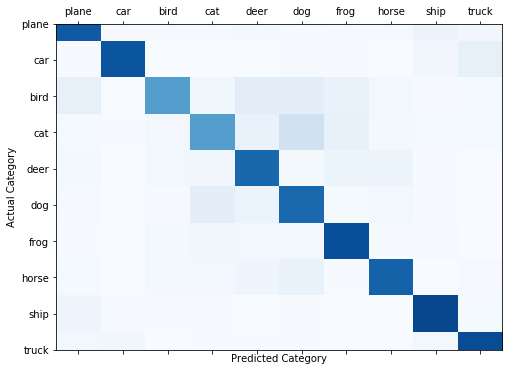

Category   - Accuracy
plane      - 83.8
car        - 85.9
bird       - 56.7
cat        - 56.7
deer       - 78.7
dog        - 77.8
frog       - 88.1
horse      - 80.8
ship       - 91.0
truck      - 89.0

Selected workers

[ 7 35 28 33 83  8  2 47 57 50 96 38 32  9 65]
Worker 7 : is  Honest
Worker 35 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 83 : is  Honest
Worker 8 : is  Honest
Worker 2 : is  Honest
Worker 47 : is  Honest
Worker 57 : is  Honest
Worker 50 : is  Stealthy_Attacker
Worker 96 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 9 : is  Honest
Worker 65 : is  Honest

 | Global Training Round : 27 |


Worker 7 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.416629
Train Epoch: 1 [400/500	(81%)]	Loss: 0.611687
Train Epoch: 2 [0/500	(1%)]	Loss: 0.405083
Train Epoch: 2 [400/500	(81%)]	Loss: 0.450197
Train Epoch: 3 [0/500	(1%)]	Loss: 0.391198
Train Epoch: 3 [400/500	(81%)]	Loss: 0.477910
Train Epoch: 4 [0/500	(1%)]	Loss: 0.278509
Train Epoch: 4 [400/500	(81%)]	Loss: 0.237269
Train Epoch: 5 [0/500	(1%)]	Loss: 0.249396
Train Epoch: 5 [400/500	(81%)]	Loss: 0.352217

Worker 7 ends training in Global Round:27 |

Worker 35 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.526936
Train Epoch: 1 [400/500	(81%)]	Loss: 0.576571
Train Epoch: 2 [0/500	(1%)]	Loss: 0.367358
Train Epoch: 2 [400/500	(81%)]	Loss: 0.395172
Train Epoch: 3 [0/500	(1%)]	Loss: 0.249653
Train Epoch: 3 [400/500	(81%)]	Loss: 0.506040
Train Epoch: 4 [0/500	(1%)]	Loss: 0.265280
Train Epoch: 4 [400/500	(81%)]	Loss: 0.337068
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114445
Train Epoch: 5 [400/500	(81%)]	Loss: 0.311499

Worker 35 ends training in Global Round:27 |

Worker 28 starts training in Global Round:27 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  27


Train Epoch: 1 [0/500	(1%)]	Loss: 1.606869
Train Epoch: 1 [400/500	(81%)]	Loss: 0.715038
Train Epoch: 2 [0/500	(1%)]	Loss: 0.391591
Train Epoch: 2 [400/500	(81%)]	Loss: 0.876032
Train Epoch: 3 [0/500	(1%)]	Loss: 0.355703
Train Epoch: 3 [400/500	(81%)]	Loss: 0.545659
Train Epoch: 4 [0/500	(1%)]	Loss: 0.227901
Train Epoch: 4 [400/500	(81%)]	Loss: 0.513628
Train Epoch: 5 [0/500	(1%)]	Loss: 0.299526
Train Epoch: 5 [400/500	(81%)]	Loss: 0.435780

Performed attacks 1
Worker 28 ends training in Global Round:27 |

Worker 33 starts training in Global Round:27 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  27


Train Epoch: 1 [0/500	(1%)]	Loss: 1.346050
Train Epoch: 1 [400/500	(81%)]	Loss: 0.907098
Train Epoch: 2 [0/500	(1%)]	Loss: 0.498623
Train Epoch: 2 [400/500	(81%)]	Loss: 0.490211
Train Epoch: 3 [0/500	(1%)]	Loss: 0.402395
Train Epoch: 3 [400/500	(81%)]	Loss: 0.318313
Train Epoch: 4 [0/500	(1%)]	Loss: 0.396185
Train Epoch: 4 [400/500	(81%)]	Loss: 0.427537
Train Epoch: 5 [0/500	(1%)]	Loss: 0.296000
Train Epoch: 5 [400/500	(81%)]	Loss: 0.347610

Performed attacks 2
Worker 33 ends training in Global Round:27 |

Worker 83 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.684116
Train Epoch: 1 [400/500	(81%)]	Loss: 0.579908
Train Epoch: 2 [0/500	(1%)]	Loss: 0.401842
Train Epoch: 2 [400/500	(81%)]	Loss: 0.476977
Train Epoch: 3 [0/500	(1%)]	Loss: 0.446261
Train Epoch: 3 [400/500	(81%)]	Loss: 0.340424
Train Epoch: 4 [0/500	(1%)]	Loss: 0.217349
Train Epoch: 4 [400/500	(81%)]	Loss: 0.366996
Train Epoch: 5 [0/500	(1%)]	Loss: 0.169717
Train Epoch: 5 [400/500	(81%)]	Loss: 0.268039

Worker 83 ends training in Global Round:27 |

Worker 8 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.386724
Train Epoch: 1 [400/500	(81%)]	Loss: 0.544059
Train Epoch: 2 [0/500	(1%)]	Loss: 0.284895
Train Epoch: 2 [400/500	(81%)]	Loss: 0.447934
Train Epoch: 3 [0/500	(1%)]	Loss: 0.253011
Train Epoch: 3 [400/500	(81%)]	Loss: 0.292346
Train Epoch: 4 [0/500	(1%)]	Loss: 0.214618
Train Epoch: 4 [400/500	(81%)]	Loss: 0.326589
Train Epoch: 5 [0/500	(1%)]	Loss: 0.142378
Train Epoch: 5 [400/500	(81%)]	Loss: 0.276144

Worker 8 ends training in Global Round:27 |

Worker 2 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.551512
Train Epoch: 1 [400/500	(81%)]	Loss: 0.303252
Train Epoch: 2 [0/500	(1%)]	Loss: 0.288291
Train Epoch: 2 [400/500	(81%)]	Loss: 0.360072
Train Epoch: 3 [0/500	(1%)]	Loss: 0.176502
Train Epoch: 3 [400/500	(81%)]	Loss: 0.257032
Train Epoch: 4 [0/500	(1%)]	Loss: 0.256875
Train Epoch: 4 [400/500	(81%)]	Loss: 0.145355
Train Epoch: 5 [0/500	(1%)]	Loss: 0.151041
Train Epoch: 5 [400/500	(81%)]	Loss: 0.228730

Worker 2 ends training in Global Round:27 |

Worker 47 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.414392
Train Epoch: 1 [400/500	(81%)]	Loss: 0.674979
Train Epoch: 2 [0/500	(1%)]	Loss: 0.472062
Train Epoch: 2 [400/500	(81%)]	Loss: 0.561168
Train Epoch: 3 [0/500	(1%)]	Loss: 0.369342
Train Epoch: 3 [400/500	(81%)]	Loss: 0.377971
Train Epoch: 4 [0/500	(1%)]	Loss: 0.287649
Train Epoch: 4 [400/500	(81%)]	Loss: 0.338189
Train Epoch: 5 [0/500	(1%)]	Loss: 0.085365
Train Epoch: 5 [400/500	(81%)]	Loss: 0.288782

Worker 47 ends training in Global Round:27 |

Worker 57 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.542098
Train Epoch: 1 [400/500	(81%)]	Loss: 0.548532
Train Epoch: 2 [0/500	(1%)]	Loss: 0.388215
Train Epoch: 2 [400/500	(81%)]	Loss: 0.362645
Train Epoch: 3 [0/500	(1%)]	Loss: 0.224266
Train Epoch: 3 [400/500	(81%)]	Loss: 0.431952
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187159
Train Epoch: 4 [400/500	(81%)]	Loss: 0.223040
Train Epoch: 5 [0/500	(1%)]	Loss: 0.220592
Train Epoch: 5 [400/500	(81%)]	Loss: 0.217298

Worker 57 ends training in Global Round:27 |

Worker 50 starts training in Global Round:27 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  27


Train Epoch: 1 [0/500	(1%)]	Loss: 1.382458
Train Epoch: 1 [400/500	(81%)]	Loss: 1.179760
Train Epoch: 2 [0/500	(1%)]	Loss: 0.477533
Train Epoch: 2 [400/500	(81%)]	Loss: 0.673798
Train Epoch: 3 [0/500	(1%)]	Loss: 0.522879
Train Epoch: 3 [400/500	(81%)]	Loss: 0.557083
Train Epoch: 4 [0/500	(1%)]	Loss: 0.431680
Train Epoch: 4 [400/500	(81%)]	Loss: 0.359017
Train Epoch: 5 [0/500	(1%)]	Loss: 0.471356
Train Epoch: 5 [400/500	(81%)]	Loss: 0.426535

Performed attacks 3
Worker 50 ends training in Global Round:27 |

Worker 96 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.559446
Train Epoch: 1 [400/500	(81%)]	Loss: 0.637511
Train Epoch: 2 [0/500	(1%)]	Loss: 0.485061
Train Epoch: 2 [400/500	(81%)]	Loss: 0.797670
Train Epoch: 3 [0/500	(1%)]	Loss: 0.608804
Train Epoch: 3 [400/500	(81%)]	Loss: 0.459718
Train Epoch: 4 [0/500	(1%)]	Loss: 0.370373
Train Epoch: 4 [400/500	(81%)]	Loss: 0.475165
Train Epoch: 5 [0/500	(1%)]	Loss: 0.177523
Train Epoch: 5 [400/500	(81%)]	Loss: 0.269228

Worker 96 ends training in Global Round:27 |

Worker 38 starts training in Global Round:27 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  27


Train Epoch: 1 [0/500	(1%)]	Loss: 1.046777
Train Epoch: 1 [400/500	(81%)]	Loss: 0.864905
Train Epoch: 2 [0/500	(1%)]	Loss: 0.560242
Train Epoch: 2 [400/500	(81%)]	Loss: 0.660569
Train Epoch: 3 [0/500	(1%)]	Loss: 0.343505
Train Epoch: 3 [400/500	(81%)]	Loss: 0.592399
Train Epoch: 4 [0/500	(1%)]	Loss: 0.365908
Train Epoch: 4 [400/500	(81%)]	Loss: 0.344711
Train Epoch: 5 [0/500	(1%)]	Loss: 0.271822
Train Epoch: 5 [400/500	(81%)]	Loss: 0.384545

Performed attacks 4
Worker 38 ends training in Global Round:27 |

Worker 32 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.729339
Train Epoch: 1 [400/500	(81%)]	Loss: 0.525425
Train Epoch: 2 [0/500	(1%)]	Loss: 0.332272
Train Epoch: 2 [400/500	(81%)]	Loss: 0.562199
Train Epoch: 3 [0/500	(1%)]	Loss: 0.304795
Train Epoch: 3 [400/500	(81%)]	Loss: 0.483814
Train Epoch: 4 [0/500	(1%)]	Loss: 0.196972
Train Epoch: 4 [400/500	(81%)]	Loss: 0.239629
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193323
Train Epoch: 5 [400/500	(81%)]	Loss: 0.342880

Worker 32 ends training in Global Round:27 |

Worker 9 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.798485
Train Epoch: 1 [400/500	(81%)]	Loss: 0.763615
Train Epoch: 2 [0/500	(1%)]	Loss: 0.545406
Train Epoch: 2 [400/500	(81%)]	Loss: 0.612019
Train Epoch: 3 [0/500	(1%)]	Loss: 0.412724
Train Epoch: 3 [400/500	(81%)]	Loss: 0.751407
Train Epoch: 4 [0/500	(1%)]	Loss: 0.358477
Train Epoch: 4 [400/500	(81%)]	Loss: 0.450188
Train Epoch: 5 [0/500	(1%)]	Loss: 0.278331
Train Epoch: 5 [400/500	(81%)]	Loss: 0.388320

Worker 9 ends training in Global Round:27 |

Worker 65 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.596577
Train Epoch: 1 [400/500	(81%)]	Loss: 0.563736
Train Epoch: 2 [0/500	(1%)]	Loss: 0.324748
Train Epoch: 2 [400/500	(81%)]	Loss: 0.517421
Train Epoch: 3 [0/500	(1%)]	Loss: 0.280469
Train Epoch: 3 [400/500	(81%)]	Loss: 0.428170
Train Epoch: 4 [0/500	(1%)]	Loss: 0.245679
Train Epoch: 4 [400/500	(81%)]	Loss: 0.301236
Train Epoch: 5 [0/500	(1%)]	Loss: 0.219371
Train Epoch: 5 [400/500	(81%)]	Loss: 0.275963

Worker 65 ends training in Global Round:27 |
Last layer biases  [array([ 0.03297406, -0.03224124, -0.01571036,  0.0364599 ,  0.03838085,
       -0.01919868,  0.03858178, -0.00586073, -0.02068728, -0.03679674],
      dtype=float32), array([ 0.03238316, -0.03165735, -0.01557295,  0.03442143,  0.03530563,
       -0.02049238,  0.04299173, -0.005539  , -0.01788135, -0.03805738],
      dtype=float32), array([ 0.03572179, -0.0269827 , -0.01366093,  0.03733059,  0.04440107,
       -0.01700899,  0.04191725, -0.02610775, -0.01887671, -0.04083205],
      dtyp

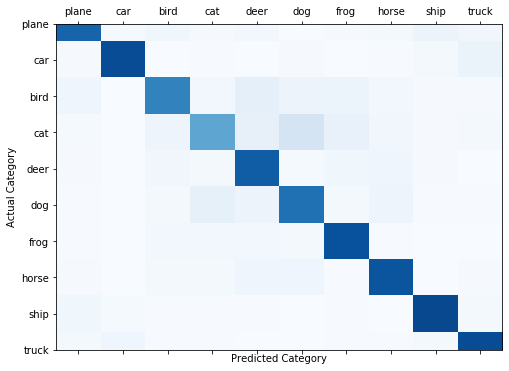

Category   - Accuracy
plane      - 79.7
car        - 88.7
bird       - 68.2
cat        - 53.9
deer       - 82.5
dog        - 75.3
frog       - 87.2
horse      - 85.9
ship       - 90.6
truck      - 88.9

Selected workers

[59 52 30 46 29 42 89  4  1 69 48 50 60 94 90]
Worker 59 : is  Stealthy_Attacker
Worker 52 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 46 : is  Stealthy_Attacker
Worker 29 : is  Honest
Worker 42 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 4 : is  Honest
Worker 1 : is  Honest
Worker 69 : is  Honest
Worker 48 : is  Honest
Worker 50 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 94 : is  Stealthy_Attacker
Worker 90 : is  Honest

 | Global Training Round : 28 |


Worker 59 starts training in Global Round:28 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  28


Train Epoch: 1 [0/500	(1%)]	Loss: 0.949464
Train Epoch: 1 [400/500	(81%)]	Loss: 0.782328
Train Epoch: 2 [0/500	(1%)]	Loss: 0.528020
Train Epoch: 2 [400/500	(81%)]	Loss: 0.669139
Train Epoch: 3 [0/500	(1%)]	Loss: 0.459117
Train Epoch: 3 [400/500	(81%)]	Loss: 0.465327
Train Epoch: 4 [0/500	(1%)]	Loss: 0.382586
Train Epoch: 4 [400/500	(81%)]	Loss: 0.428177
Train Epoch: 5 [0/500	(1%)]	Loss: 0.214974
Train Epoch: 5 [400/500	(81%)]	Loss: 0.375656

Performed attacks 1
Worker 59 ends training in Global Round:28 |

Worker 52 starts training in Global Round:28 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  28


Train Epoch: 1 [0/500	(1%)]	Loss: 1.269961
Train Epoch: 1 [400/500	(81%)]	Loss: 0.813699
Train Epoch: 2 [0/500	(1%)]	Loss: 0.527833
Train Epoch: 2 [400/500	(81%)]	Loss: 0.551898
Train Epoch: 3 [0/500	(1%)]	Loss: 0.480986
Train Epoch: 3 [400/500	(81%)]	Loss: 0.399606
Train Epoch: 4 [0/500	(1%)]	Loss: 0.238207
Train Epoch: 4 [400/500	(81%)]	Loss: 0.244892
Train Epoch: 5 [0/500	(1%)]	Loss: 0.244547
Train Epoch: 5 [400/500	(81%)]	Loss: 0.298415

Performed attacks 2
Worker 52 ends training in Global Round:28 |

Worker 30 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.452245
Train Epoch: 1 [400/500	(81%)]	Loss: 0.487055
Train Epoch: 2 [0/500	(1%)]	Loss: 0.289286
Train Epoch: 2 [400/500	(81%)]	Loss: 0.318429
Train Epoch: 3 [0/500	(1%)]	Loss: 0.272294
Train Epoch: 3 [400/500	(81%)]	Loss: 0.307407
Train Epoch: 4 [0/500	(1%)]	Loss: 0.145220
Train Epoch: 4 [400/500	(81%)]	Loss: 0.179561
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118338
Train Epoch: 5 [400/500	(81%)]	Loss: 0.306152

Worker 30 ends training in Global Round:28 |

Worker 46 starts training in Global Round:28 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  28


Train Epoch: 1 [0/500	(1%)]	Loss: 1.211456
Train Epoch: 1 [400/500	(81%)]	Loss: 0.798460
Train Epoch: 2 [0/500	(1%)]	Loss: 0.559107
Train Epoch: 2 [400/500	(81%)]	Loss: 0.479583
Train Epoch: 3 [0/500	(1%)]	Loss: 0.286175
Train Epoch: 3 [400/500	(81%)]	Loss: 0.434293
Train Epoch: 4 [0/500	(1%)]	Loss: 0.188366
Train Epoch: 4 [400/500	(81%)]	Loss: 0.340431
Train Epoch: 5 [0/500	(1%)]	Loss: 0.351387
Train Epoch: 5 [400/500	(81%)]	Loss: 0.315887

Performed attacks 3
Worker 46 ends training in Global Round:28 |

Worker 29 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.303311
Train Epoch: 1 [400/500	(81%)]	Loss: 0.584146
Train Epoch: 2 [0/500	(1%)]	Loss: 0.334840
Train Epoch: 2 [400/500	(81%)]	Loss: 0.294293
Train Epoch: 3 [0/500	(1%)]	Loss: 0.240063
Train Epoch: 3 [400/500	(81%)]	Loss: 0.178418
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187312
Train Epoch: 4 [400/500	(81%)]	Loss: 0.249899
Train Epoch: 5 [0/500	(1%)]	Loss: 0.179156
Train Epoch: 5 [400/500	(81%)]	Loss: 0.284125

Worker 29 ends training in Global Round:28 |

Worker 42 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.542081
Train Epoch: 1 [400/500	(81%)]	Loss: 0.470299
Train Epoch: 2 [0/500	(1%)]	Loss: 0.295278
Train Epoch: 2 [400/500	(81%)]	Loss: 0.460548
Train Epoch: 3 [0/500	(1%)]	Loss: 0.269193
Train Epoch: 3 [400/500	(81%)]	Loss: 0.442136
Train Epoch: 4 [0/500	(1%)]	Loss: 0.237914
Train Epoch: 4 [400/500	(81%)]	Loss: 0.338873
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172516
Train Epoch: 5 [400/500	(81%)]	Loss: 0.384257

Worker 42 ends training in Global Round:28 |

Worker 89 starts training in Global Round:28 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  28


Train Epoch: 1 [0/500	(1%)]	Loss: 1.495791
Train Epoch: 1 [400/500	(81%)]	Loss: 0.934962
Train Epoch: 2 [0/500	(1%)]	Loss: 0.524086
Train Epoch: 2 [400/500	(81%)]	Loss: 0.704586
Train Epoch: 3 [0/500	(1%)]	Loss: 0.545631
Train Epoch: 3 [400/500	(81%)]	Loss: 0.522397
Train Epoch: 4 [0/500	(1%)]	Loss: 0.442149
Train Epoch: 4 [400/500	(81%)]	Loss: 0.452992
Train Epoch: 5 [0/500	(1%)]	Loss: 0.309954
Train Epoch: 5 [400/500	(81%)]	Loss: 0.366537

Performed attacks 4
Worker 89 ends training in Global Round:28 |

Worker 4 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.310565
Train Epoch: 1 [400/500	(81%)]	Loss: 0.501054
Train Epoch: 2 [0/500	(1%)]	Loss: 0.152451
Train Epoch: 2 [400/500	(81%)]	Loss: 0.435858
Train Epoch: 3 [0/500	(1%)]	Loss: 0.297515
Train Epoch: 3 [400/500	(81%)]	Loss: 0.407564
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170383
Train Epoch: 4 [400/500	(81%)]	Loss: 0.260031
Train Epoch: 5 [0/500	(1%)]	Loss: 0.336610
Train Epoch: 5 [400/500	(81%)]	Loss: 0.267731

Worker 4 ends training in Global Round:28 |

Worker 1 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.369332
Train Epoch: 1 [400/500	(81%)]	Loss: 0.775967
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209436
Train Epoch: 2 [400/500	(81%)]	Loss: 0.531099
Train Epoch: 3 [0/500	(1%)]	Loss: 0.408538
Train Epoch: 3 [400/500	(81%)]	Loss: 0.419471
Train Epoch: 4 [0/500	(1%)]	Loss: 0.297888
Train Epoch: 4 [400/500	(81%)]	Loss: 0.383090
Train Epoch: 5 [0/500	(1%)]	Loss: 0.196803
Train Epoch: 5 [400/500	(81%)]	Loss: 0.328393

Worker 1 ends training in Global Round:28 |

Worker 69 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.939837
Train Epoch: 1 [400/500	(81%)]	Loss: 0.679489
Train Epoch: 2 [0/500	(1%)]	Loss: 0.480872
Train Epoch: 2 [400/500	(81%)]	Loss: 0.623611
Train Epoch: 3 [0/500	(1%)]	Loss: 0.475057
Train Epoch: 3 [400/500	(81%)]	Loss: 0.930041
Train Epoch: 4 [0/500	(1%)]	Loss: 0.316246
Train Epoch: 4 [400/500	(81%)]	Loss: 0.393026
Train Epoch: 5 [0/500	(1%)]	Loss: 0.372761
Train Epoch: 5 [400/500	(81%)]	Loss: 0.444556

Worker 69 ends training in Global Round:28 |

Worker 48 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.570877
Train Epoch: 1 [400/500	(81%)]	Loss: 0.573997
Train Epoch: 2 [0/500	(1%)]	Loss: 0.345107
Train Epoch: 2 [400/500	(81%)]	Loss: 0.485168
Train Epoch: 3 [0/500	(1%)]	Loss: 0.328285
Train Epoch: 3 [400/500	(81%)]	Loss: 0.339500
Train Epoch: 4 [0/500	(1%)]	Loss: 0.328313
Train Epoch: 4 [400/500	(81%)]	Loss: 0.360215
Train Epoch: 5 [0/500	(1%)]	Loss: 0.227061
Train Epoch: 5 [400/500	(81%)]	Loss: 0.219163

Worker 48 ends training in Global Round:28 |

Worker 50 starts training in Global Round:28 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  28


Train Epoch: 1 [0/500	(1%)]	Loss: 0.997104
Train Epoch: 1 [400/500	(81%)]	Loss: 0.898652
Train Epoch: 2 [0/500	(1%)]	Loss: 0.635982
Train Epoch: 2 [400/500	(81%)]	Loss: 0.708981
Train Epoch: 3 [0/500	(1%)]	Loss: 0.435683
Train Epoch: 3 [400/500	(81%)]	Loss: 0.545662
Train Epoch: 4 [0/500	(1%)]	Loss: 0.427696
Train Epoch: 4 [400/500	(81%)]	Loss: 0.483374
Train Epoch: 5 [0/500	(1%)]	Loss: 0.453170
Train Epoch: 5 [400/500	(81%)]	Loss: 0.324730

Performed attacks 5
Worker 50 ends training in Global Round:28 |

Worker 60 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.498669
Train Epoch: 1 [400/500	(81%)]	Loss: 0.699457
Train Epoch: 2 [0/500	(1%)]	Loss: 0.410026
Train Epoch: 2 [400/500	(81%)]	Loss: 0.457091
Train Epoch: 3 [0/500	(1%)]	Loss: 0.338723
Train Epoch: 3 [400/500	(81%)]	Loss: 0.327836
Train Epoch: 4 [0/500	(1%)]	Loss: 0.259565
Train Epoch: 4 [400/500	(81%)]	Loss: 0.298389
Train Epoch: 5 [0/500	(1%)]	Loss: 0.173674
Train Epoch: 5 [400/500	(81%)]	Loss: 0.330737

Worker 60 ends training in Global Round:28 |

Worker 94 starts training in Global Round:28 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  28


Train Epoch: 1 [0/500	(1%)]	Loss: 1.243746
Train Epoch: 1 [400/500	(81%)]	Loss: 0.593980
Train Epoch: 2 [0/500	(1%)]	Loss: 0.548993
Train Epoch: 2 [400/500	(81%)]	Loss: 0.379224
Train Epoch: 3 [0/500	(1%)]	Loss: 0.381954
Train Epoch: 3 [400/500	(81%)]	Loss: 0.414620
Train Epoch: 4 [0/500	(1%)]	Loss: 0.325663
Train Epoch: 4 [400/500	(81%)]	Loss: 0.392660
Train Epoch: 5 [0/500	(1%)]	Loss: 0.247034
Train Epoch: 5 [400/500	(81%)]	Loss: 0.280354

Performed attacks 6
Worker 94 ends training in Global Round:28 |

Worker 90 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.503843
Train Epoch: 1 [400/500	(81%)]	Loss: 0.966532
Train Epoch: 2 [0/500	(1%)]	Loss: 0.429416
Train Epoch: 2 [400/500	(81%)]	Loss: 0.431056
Train Epoch: 3 [0/500	(1%)]	Loss: 0.389008
Train Epoch: 3 [400/500	(81%)]	Loss: 0.294161
Train Epoch: 4 [0/500	(1%)]	Loss: 0.291713
Train Epoch: 4 [400/500	(81%)]	Loss: 0.276964
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193027
Train Epoch: 5 [400/500	(81%)]	Loss: 0.206564

Worker 90 ends training in Global Round:28 |
Last layer biases  [array([ 0.03475028, -0.0301336 , -0.01329669,  0.03509605,  0.04588206,
       -0.01602148,  0.04074678, -0.02551617, -0.01837127, -0.03723437],
      dtype=float32), array([ 0.03520159, -0.03103672, -0.01397291,  0.0378218 ,  0.04425305,
       -0.01476595,  0.04374819, -0.02896221, -0.01999075, -0.03639456],
      dtype=float32), array([ 0.03310313, -0.03275943, -0.01807175,  0.03613984,  0.03893479,
       -0.01860588,  0.04048605, -0.00504731, -0.01918639, -0.03909149],
      dtyp

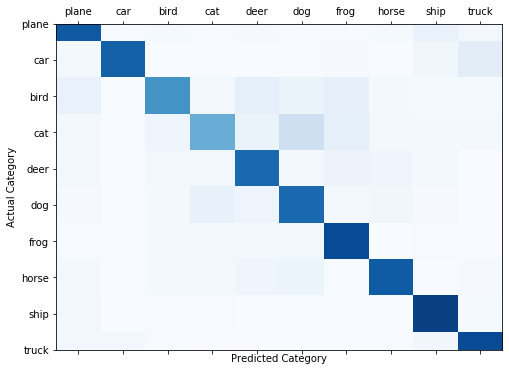

Category   - Accuracy
plane      - 84.1
car        - 81.2
bird       - 61.8
cat        - 50.7
deer       - 77.9
dog        - 78.1
frog       - 89.3
horse      - 83.0
ship       - 93.6
truck      - 89.3

Selected workers

[ 57  95  49  63  88   7  99  73  74  53  50  35  16 100  29]
Worker 57 : is  Honest
Worker 95 : is  Honest
Worker 49 : is  Honest
Worker 63 : is  Honest
Worker 88 : is  Honest
Worker 7 : is  Honest
Worker 99 : is  Honest
Worker 73 : is  Honest
Worker 74 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 50 : is  Stealthy_Attacker
Worker 35 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 29 : is  Honest

 | Global Training Round : 29 |


Worker 57 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.707493
Train Epoch: 1 [400/500	(81%)]	Loss: 0.312575
Train Epoch: 2 [0/500	(1%)]	Loss: 0.310124
Train Epoch: 2 [400/500	(81%)]	Loss: 0.442802
Train Epoch: 3 [0/500	(1%)]	Loss: 0.122103
Train Epoch: 3 [400/500	(81%)]	Loss: 0.337181
Train Epoch: 4 [0/500	(1%)]	Loss: 0.254509
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309106
Train Epoch: 5 [0/500	(1%)]	Loss: 0.086839
Train Epoch: 5 [400/500	(81%)]	Loss: 0.365905

Worker 57 ends training in Global Round:29 |

Worker 95 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.513240
Train Epoch: 1 [400/500	(81%)]	Loss: 0.449210
Train Epoch: 2 [0/500	(1%)]	Loss: 0.511464
Train Epoch: 2 [400/500	(81%)]	Loss: 0.557899
Train Epoch: 3 [0/500	(1%)]	Loss: 0.257213
Train Epoch: 3 [400/500	(81%)]	Loss: 0.201985
Train Epoch: 4 [0/500	(1%)]	Loss: 0.199180
Train Epoch: 4 [400/500	(81%)]	Loss: 0.261566
Train Epoch: 5 [0/500	(1%)]	Loss: 0.352348
Train Epoch: 5 [400/500	(81%)]	Loss: 0.351298

Worker 95 ends training in Global Round:29 |

Worker 49 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.500876
Train Epoch: 1 [400/500	(81%)]	Loss: 0.678866
Train Epoch: 2 [0/500	(1%)]	Loss: 0.380845
Train Epoch: 2 [400/500	(81%)]	Loss: 0.429463
Train Epoch: 3 [0/500	(1%)]	Loss: 0.452179
Train Epoch: 3 [400/500	(81%)]	Loss: 0.432080
Train Epoch: 4 [0/500	(1%)]	Loss: 0.181695
Train Epoch: 4 [400/500	(81%)]	Loss: 0.312329
Train Epoch: 5 [0/500	(1%)]	Loss: 0.156052
Train Epoch: 5 [400/500	(81%)]	Loss: 0.550127

Worker 49 ends training in Global Round:29 |

Worker 63 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.535088
Train Epoch: 1 [400/500	(81%)]	Loss: 0.757074
Train Epoch: 2 [0/500	(1%)]	Loss: 0.299767
Train Epoch: 2 [400/500	(81%)]	Loss: 0.351290
Train Epoch: 3 [0/500	(1%)]	Loss: 0.346304
Train Epoch: 3 [400/500	(81%)]	Loss: 0.333373
Train Epoch: 4 [0/500	(1%)]	Loss: 0.223280
Train Epoch: 4 [400/500	(81%)]	Loss: 0.391256
Train Epoch: 5 [0/500	(1%)]	Loss: 0.150864
Train Epoch: 5 [400/500	(81%)]	Loss: 0.243993

Worker 63 ends training in Global Round:29 |

Worker 88 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.661735
Train Epoch: 1 [400/500	(81%)]	Loss: 0.687559
Train Epoch: 2 [0/500	(1%)]	Loss: 0.467276
Train Epoch: 2 [400/500	(81%)]	Loss: 0.364484
Train Epoch: 3 [0/500	(1%)]	Loss: 0.254346
Train Epoch: 3 [400/500	(81%)]	Loss: 0.342125
Train Epoch: 4 [0/500	(1%)]	Loss: 0.241235
Train Epoch: 4 [400/500	(81%)]	Loss: 0.293310
Train Epoch: 5 [0/500	(1%)]	Loss: 0.272900
Train Epoch: 5 [400/500	(81%)]	Loss: 0.157458

Worker 88 ends training in Global Round:29 |

Worker 7 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.433414
Train Epoch: 1 [400/500	(81%)]	Loss: 0.646032
Train Epoch: 2 [0/500	(1%)]	Loss: 0.377733
Train Epoch: 2 [400/500	(81%)]	Loss: 0.529922
Train Epoch: 3 [0/500	(1%)]	Loss: 0.383159
Train Epoch: 3 [400/500	(81%)]	Loss: 0.476290
Train Epoch: 4 [0/500	(1%)]	Loss: 0.240116
Train Epoch: 4 [400/500	(81%)]	Loss: 0.378151
Train Epoch: 5 [0/500	(1%)]	Loss: 0.201228
Train Epoch: 5 [400/500	(81%)]	Loss: 0.276025

Worker 7 ends training in Global Round:29 |

Worker 99 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.635527
Train Epoch: 1 [400/500	(81%)]	Loss: 0.768891
Train Epoch: 2 [0/500	(1%)]	Loss: 0.407120
Train Epoch: 2 [400/500	(81%)]	Loss: 0.428483
Train Epoch: 3 [0/500	(1%)]	Loss: 0.306754
Train Epoch: 3 [400/500	(81%)]	Loss: 0.343617
Train Epoch: 4 [0/500	(1%)]	Loss: 0.330740
Train Epoch: 4 [400/500	(81%)]	Loss: 0.362091
Train Epoch: 5 [0/500	(1%)]	Loss: 0.319922
Train Epoch: 5 [400/500	(81%)]	Loss: 0.333016

Worker 99 ends training in Global Round:29 |

Worker 73 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.416396
Train Epoch: 1 [400/500	(81%)]	Loss: 0.520197
Train Epoch: 2 [0/500	(1%)]	Loss: 0.334739
Train Epoch: 2 [400/500	(81%)]	Loss: 0.566265
Train Epoch: 3 [0/500	(1%)]	Loss: 0.288331
Train Epoch: 3 [400/500	(81%)]	Loss: 0.424360
Train Epoch: 4 [0/500	(1%)]	Loss: 0.391913
Train Epoch: 4 [400/500	(81%)]	Loss: 0.317169
Train Epoch: 5 [0/500	(1%)]	Loss: 0.240667
Train Epoch: 5 [400/500	(81%)]	Loss: 0.362367

Worker 73 ends training in Global Round:29 |

Worker 74 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.827630
Train Epoch: 1 [400/500	(81%)]	Loss: 0.797304
Train Epoch: 2 [0/500	(1%)]	Loss: 0.553569
Train Epoch: 2 [400/500	(81%)]	Loss: 0.301667
Train Epoch: 3 [0/500	(1%)]	Loss: 0.259633
Train Epoch: 3 [400/500	(81%)]	Loss: 0.495983
Train Epoch: 4 [0/500	(1%)]	Loss: 0.269602
Train Epoch: 4 [400/500	(81%)]	Loss: 0.340106
Train Epoch: 5 [0/500	(1%)]	Loss: 0.348557
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210683

Worker 74 ends training in Global Round:29 |

Worker 53 starts training in Global Round:29 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  29


Train Epoch: 1 [0/500	(1%)]	Loss: 1.259693
Train Epoch: 1 [400/500	(81%)]	Loss: 0.648799
Train Epoch: 2 [0/500	(1%)]	Loss: 0.357719
Train Epoch: 2 [400/500	(81%)]	Loss: 0.534766
Train Epoch: 3 [0/500	(1%)]	Loss: 0.346465
Train Epoch: 3 [400/500	(81%)]	Loss: 0.659575
Train Epoch: 4 [0/500	(1%)]	Loss: 0.399076
Train Epoch: 4 [400/500	(81%)]	Loss: 0.468453
Train Epoch: 5 [0/500	(1%)]	Loss: 0.227461
Train Epoch: 5 [400/500	(81%)]	Loss: 0.317732

Performed attacks 1
Worker 53 ends training in Global Round:29 |

Worker 50 starts training in Global Round:29 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  29


Train Epoch: 1 [0/500	(1%)]	Loss: 1.138436
Train Epoch: 1 [400/500	(81%)]	Loss: 0.900025
Train Epoch: 2 [0/500	(1%)]	Loss: 0.527652
Train Epoch: 2 [400/500	(81%)]	Loss: 0.829699
Train Epoch: 3 [0/500	(1%)]	Loss: 0.403658
Train Epoch: 3 [400/500	(81%)]	Loss: 0.844240
Train Epoch: 4 [0/500	(1%)]	Loss: 0.522687
Train Epoch: 4 [400/500	(81%)]	Loss: 0.459873
Train Epoch: 5 [0/500	(1%)]	Loss: 0.327325
Train Epoch: 5 [400/500	(81%)]	Loss: 0.623803

Performed attacks 2
Worker 50 ends training in Global Round:29 |

Worker 35 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.495890
Train Epoch: 1 [400/500	(81%)]	Loss: 0.559223
Train Epoch: 2 [0/500	(1%)]	Loss: 0.267004
Train Epoch: 2 [400/500	(81%)]	Loss: 0.515837
Train Epoch: 3 [0/500	(1%)]	Loss: 0.445315
Train Epoch: 3 [400/500	(81%)]	Loss: 0.476739
Train Epoch: 4 [0/500	(1%)]	Loss: 0.209772
Train Epoch: 4 [400/500	(81%)]	Loss: 0.340962
Train Epoch: 5 [0/500	(1%)]	Loss: 0.299887
Train Epoch: 5 [400/500	(81%)]	Loss: 0.264167

Worker 35 ends training in Global Round:29 |

Worker 16 starts training in Global Round:29 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  29


Train Epoch: 1 [0/500	(1%)]	Loss: 1.134750
Train Epoch: 1 [400/500	(81%)]	Loss: 1.162552
Train Epoch: 2 [0/500	(1%)]	Loss: 0.553007
Train Epoch: 2 [400/500	(81%)]	Loss: 0.549869
Train Epoch: 3 [0/500	(1%)]	Loss: 0.374074
Train Epoch: 3 [400/500	(81%)]	Loss: 0.604985
Train Epoch: 4 [0/500	(1%)]	Loss: 0.366097
Train Epoch: 4 [400/500	(81%)]	Loss: 0.266947
Train Epoch: 5 [0/500	(1%)]	Loss: 0.264724
Train Epoch: 5 [400/500	(81%)]	Loss: 0.228253

Performed attacks 3
Worker 16 ends training in Global Round:29 |

Worker 100 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.571032
Train Epoch: 1 [400/500	(81%)]	Loss: 0.580109
Train Epoch: 2 [0/500	(1%)]	Loss: 0.235349
Train Epoch: 2 [400/500	(81%)]	Loss: 0.320049
Train Epoch: 3 [0/500	(1%)]	Loss: 0.279815
Train Epoch: 3 [400/500	(81%)]	Loss: 0.452170
Train Epoch: 4 [0/500	(1%)]	Loss: 0.234449
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309720
Train Epoch: 5 [0/500	(1%)]	Loss: 0.253383
Train Epoch: 5 [400/500	(81%)]	Loss: 0.231336

Worker 100 ends training in Global Round:29 |

Worker 29 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.272954
Train Epoch: 1 [400/500	(81%)]	Loss: 0.442983
Train Epoch: 2 [0/500	(1%)]	Loss: 0.219376
Train Epoch: 2 [400/500	(81%)]	Loss: 0.444855
Train Epoch: 3 [0/500	(1%)]	Loss: 0.212600
Train Epoch: 3 [400/500	(81%)]	Loss: 0.236219
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200976
Train Epoch: 4 [400/500	(81%)]	Loss: 0.180640
Train Epoch: 5 [0/500	(1%)]	Loss: 0.086106
Train Epoch: 5 [400/500	(81%)]	Loss: 0.182183

Worker 29 ends training in Global Round:29 |
Last layer biases  [array([ 0.03238653, -0.03159   , -0.01772692,  0.0363923 ,  0.03746584,
       -0.01625559,  0.04199062, -0.00564066, -0.0200129 , -0.04110759],
      dtype=float32), array([ 0.03450243, -0.03035684, -0.01682299,  0.03226792,  0.03823086,
       -0.01825272,  0.03906313, -0.00372888, -0.01836953, -0.04063181],
      dtype=float32), array([ 0.03353699, -0.03206025, -0.01702453,  0.03472704,  0.03787651,
       -0.01875722,  0.04064008, -0.00216313, -0.01985277, -0.04102115],
      dtyp

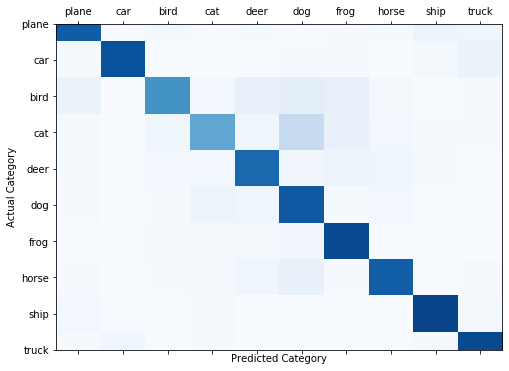

Category   - Accuracy
plane      - 82.5
car        - 87.2
bird       - 61.8
cat        - 53.1
deer       - 78.3
dog        - 84.1
frog       - 89.4
horse      - 82.0
ship       - 91.8
truck      - 89.5

Selected workers

[37  5  2 24 90 70 86 40 41 56 73 72 96 55 77]
Worker 37 : is  Stealthy_Attacker
Worker 5 : is  Honest
Worker 2 : is  Honest
Worker 24 : is  Honest
Worker 90 : is  Honest
Worker 70 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 40 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 56 : is  Honest
Worker 73 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 96 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 77 : is  Honest

 | Global Training Round : 30 |


Worker 37 starts training in Global Round:30 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  30


Train Epoch: 1 [0/500	(1%)]	Loss: 1.417595
Train Epoch: 1 [400/500	(81%)]	Loss: 0.793342
Train Epoch: 2 [0/500	(1%)]	Loss: 0.352923
Train Epoch: 2 [400/500	(81%)]	Loss: 0.784230
Train Epoch: 3 [0/500	(1%)]	Loss: 0.395372
Train Epoch: 3 [400/500	(81%)]	Loss: 0.503943
Train Epoch: 4 [0/500	(1%)]	Loss: 0.308260
Train Epoch: 4 [400/500	(81%)]	Loss: 0.256569
Train Epoch: 5 [0/500	(1%)]	Loss: 0.227271
Train Epoch: 5 [400/500	(81%)]	Loss: 0.183455

Performed attacks 1
Worker 37 ends training in Global Round:30 |

Worker 5 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.611407
Train Epoch: 1 [400/500	(81%)]	Loss: 0.535559
Train Epoch: 2 [0/500	(1%)]	Loss: 0.360704
Train Epoch: 2 [400/500	(81%)]	Loss: 0.447701
Train Epoch: 3 [0/500	(1%)]	Loss: 0.335088
Train Epoch: 3 [400/500	(81%)]	Loss: 0.454873
Train Epoch: 4 [0/500	(1%)]	Loss: 0.235792
Train Epoch: 4 [400/500	(81%)]	Loss: 0.314542
Train Epoch: 5 [0/500	(1%)]	Loss: 0.228688
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220152

Worker 5 ends training in Global Round:30 |

Worker 2 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.433688
Train Epoch: 1 [400/500	(81%)]	Loss: 0.413910
Train Epoch: 2 [0/500	(1%)]	Loss: 0.210401
Train Epoch: 2 [400/500	(81%)]	Loss: 0.313701
Train Epoch: 3 [0/500	(1%)]	Loss: 0.264969
Train Epoch: 3 [400/500	(81%)]	Loss: 0.274583
Train Epoch: 4 [0/500	(1%)]	Loss: 0.155204
Train Epoch: 4 [400/500	(81%)]	Loss: 0.240722
Train Epoch: 5 [0/500	(1%)]	Loss: 0.162524
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232349

Worker 2 ends training in Global Round:30 |

Worker 24 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.467038
Train Epoch: 1 [400/500	(81%)]	Loss: 0.576248
Train Epoch: 2 [0/500	(1%)]	Loss: 0.309448
Train Epoch: 2 [400/500	(81%)]	Loss: 0.489438
Train Epoch: 3 [0/500	(1%)]	Loss: 0.341779
Train Epoch: 3 [400/500	(81%)]	Loss: 0.356388
Train Epoch: 4 [0/500	(1%)]	Loss: 0.273104
Train Epoch: 4 [400/500	(81%)]	Loss: 0.165583
Train Epoch: 5 [0/500	(1%)]	Loss: 0.250615
Train Epoch: 5 [400/500	(81%)]	Loss: 0.224373

Worker 24 ends training in Global Round:30 |

Worker 90 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.467191
Train Epoch: 1 [400/500	(81%)]	Loss: 0.638202
Train Epoch: 2 [0/500	(1%)]	Loss: 0.252592
Train Epoch: 2 [400/500	(81%)]	Loss: 0.347434
Train Epoch: 3 [0/500	(1%)]	Loss: 0.242919
Train Epoch: 3 [400/500	(81%)]	Loss: 0.506447
Train Epoch: 4 [0/500	(1%)]	Loss: 0.268976
Train Epoch: 4 [400/500	(81%)]	Loss: 0.389502
Train Epoch: 5 [0/500	(1%)]	Loss: 0.242429
Train Epoch: 5 [400/500	(81%)]	Loss: 0.349661

Worker 90 ends training in Global Round:30 |

Worker 70 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.596853
Train Epoch: 1 [400/500	(81%)]	Loss: 0.716376
Train Epoch: 2 [0/500	(1%)]	Loss: 0.421815
Train Epoch: 2 [400/500	(81%)]	Loss: 0.448215
Train Epoch: 3 [0/500	(1%)]	Loss: 0.297265
Train Epoch: 3 [400/500	(81%)]	Loss: 0.344425
Train Epoch: 4 [0/500	(1%)]	Loss: 0.339885
Train Epoch: 4 [400/500	(81%)]	Loss: 0.455328
Train Epoch: 5 [0/500	(1%)]	Loss: 0.169848
Train Epoch: 5 [400/500	(81%)]	Loss: 0.318894

Worker 70 ends training in Global Round:30 |

Worker 86 starts training in Global Round:30 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  30


Train Epoch: 1 [0/500	(1%)]	Loss: 1.113675
Train Epoch: 1 [400/500	(81%)]	Loss: 0.880689
Train Epoch: 2 [0/500	(1%)]	Loss: 0.267794
Train Epoch: 2 [400/500	(81%)]	Loss: 0.411410
Train Epoch: 3 [0/500	(1%)]	Loss: 0.401499
Train Epoch: 3 [400/500	(81%)]	Loss: 0.392318
Train Epoch: 4 [0/500	(1%)]	Loss: 0.196612
Train Epoch: 4 [400/500	(81%)]	Loss: 0.323936
Train Epoch: 5 [0/500	(1%)]	Loss: 0.173636
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210146

Performed attacks 2
Worker 86 ends training in Global Round:30 |

Worker 40 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.324938
Train Epoch: 1 [400/500	(81%)]	Loss: 0.627663
Train Epoch: 2 [0/500	(1%)]	Loss: 0.195650
Train Epoch: 2 [400/500	(81%)]	Loss: 0.392675
Train Epoch: 3 [0/500	(1%)]	Loss: 0.213520
Train Epoch: 3 [400/500	(81%)]	Loss: 0.315983
Train Epoch: 4 [0/500	(1%)]	Loss: 0.250013
Train Epoch: 4 [400/500	(81%)]	Loss: 0.257431
Train Epoch: 5 [0/500	(1%)]	Loss: 0.257934
Train Epoch: 5 [400/500	(81%)]	Loss: 0.422468

Worker 40 ends training in Global Round:30 |

Worker 41 starts training in Global Round:30 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  30


Train Epoch: 1 [0/500	(1%)]	Loss: 1.338321
Train Epoch: 1 [400/500	(81%)]	Loss: 0.675810
Train Epoch: 2 [0/500	(1%)]	Loss: 0.754498
Train Epoch: 2 [400/500	(81%)]	Loss: 0.621548
Train Epoch: 3 [0/500	(1%)]	Loss: 0.422594
Train Epoch: 3 [400/500	(81%)]	Loss: 0.501873
Train Epoch: 4 [0/500	(1%)]	Loss: 0.283959
Train Epoch: 4 [400/500	(81%)]	Loss: 0.349800
Train Epoch: 5 [0/500	(1%)]	Loss: 0.333931
Train Epoch: 5 [400/500	(81%)]	Loss: 0.297573

Performed attacks 3
Worker 41 ends training in Global Round:30 |

Worker 56 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.547239
Train Epoch: 1 [400/500	(81%)]	Loss: 0.698799
Train Epoch: 2 [0/500	(1%)]	Loss: 0.259166
Train Epoch: 2 [400/500	(81%)]	Loss: 0.281326
Train Epoch: 3 [0/500	(1%)]	Loss: 0.300538
Train Epoch: 3 [400/500	(81%)]	Loss: 0.266240
Train Epoch: 4 [0/500	(1%)]	Loss: 0.114105
Train Epoch: 4 [400/500	(81%)]	Loss: 0.237961
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192361
Train Epoch: 5 [400/500	(81%)]	Loss: 0.243694

Worker 56 ends training in Global Round:30 |

Worker 73 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.348888
Train Epoch: 1 [400/500	(81%)]	Loss: 0.382392
Train Epoch: 2 [0/500	(1%)]	Loss: 0.281355
Train Epoch: 2 [400/500	(81%)]	Loss: 0.232551
Train Epoch: 3 [0/500	(1%)]	Loss: 0.131150
Train Epoch: 3 [400/500	(81%)]	Loss: 0.242956
Train Epoch: 4 [0/500	(1%)]	Loss: 0.193050
Train Epoch: 4 [400/500	(81%)]	Loss: 0.168647
Train Epoch: 5 [0/500	(1%)]	Loss: 0.181552
Train Epoch: 5 [400/500	(81%)]	Loss: 0.243968

Worker 73 ends training in Global Round:30 |

Worker 72 starts training in Global Round:30 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  30


Train Epoch: 1 [0/500	(1%)]	Loss: 1.424115
Train Epoch: 1 [400/500	(81%)]	Loss: 0.721824
Train Epoch: 2 [0/500	(1%)]	Loss: 0.457619
Train Epoch: 2 [400/500	(81%)]	Loss: 0.519647
Train Epoch: 3 [0/500	(1%)]	Loss: 0.345831
Train Epoch: 3 [400/500	(81%)]	Loss: 0.380490
Train Epoch: 4 [0/500	(1%)]	Loss: 0.266601
Train Epoch: 4 [400/500	(81%)]	Loss: 0.296963
Train Epoch: 5 [0/500	(1%)]	Loss: 0.271713
Train Epoch: 5 [400/500	(81%)]	Loss: 0.313746

Performed attacks 4
Worker 72 ends training in Global Round:30 |

Worker 96 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.504853
Train Epoch: 1 [400/500	(81%)]	Loss: 0.832517
Train Epoch: 2 [0/500	(1%)]	Loss: 0.353975
Train Epoch: 2 [400/500	(81%)]	Loss: 0.608806
Train Epoch: 3 [0/500	(1%)]	Loss: 0.281148
Train Epoch: 3 [400/500	(81%)]	Loss: 0.417419
Train Epoch: 4 [0/500	(1%)]	Loss: 0.283002
Train Epoch: 4 [400/500	(81%)]	Loss: 0.288622
Train Epoch: 5 [0/500	(1%)]	Loss: 0.213444
Train Epoch: 5 [400/500	(81%)]	Loss: 0.304329

Worker 96 ends training in Global Round:30 |

Worker 55 starts training in Global Round:30 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  30


Train Epoch: 1 [0/500	(1%)]	Loss: 1.540270
Train Epoch: 1 [400/500	(81%)]	Loss: 0.589352
Train Epoch: 2 [0/500	(1%)]	Loss: 0.412712
Train Epoch: 2 [400/500	(81%)]	Loss: 0.742929
Train Epoch: 3 [0/500	(1%)]	Loss: 0.353070
Train Epoch: 3 [400/500	(81%)]	Loss: 0.371783
Train Epoch: 4 [0/500	(1%)]	Loss: 0.385725
Train Epoch: 4 [400/500	(81%)]	Loss: 0.334521
Train Epoch: 5 [0/500	(1%)]	Loss: 0.180784
Train Epoch: 5 [400/500	(81%)]	Loss: 0.202838

Performed attacks 5
Worker 55 ends training in Global Round:30 |

Worker 77 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.659052
Train Epoch: 1 [400/500	(81%)]	Loss: 1.039824
Train Epoch: 2 [0/500	(1%)]	Loss: 0.496975
Train Epoch: 2 [400/500	(81%)]	Loss: 0.648265
Train Epoch: 3 [0/500	(1%)]	Loss: 0.333853
Train Epoch: 3 [400/500	(81%)]	Loss: 0.437715
Train Epoch: 4 [0/500	(1%)]	Loss: 0.281538
Train Epoch: 4 [400/500	(81%)]	Loss: 0.297996
Train Epoch: 5 [0/500	(1%)]	Loss: 0.321533
Train Epoch: 5 [400/500	(81%)]	Loss: 0.241435

Worker 77 ends training in Global Round:30 |
Last layer biases  [array([ 0.03563126, -0.03150982, -0.01308941,  0.03929849,  0.04411666,
       -0.01656282,  0.03936978, -0.02547452, -0.01546146, -0.04041656],
      dtype=float32), array([ 0.03458836, -0.02905419, -0.0164822 ,  0.03752447,  0.03796366,
       -0.01908884,  0.03881245, -0.0060207 , -0.02152109, -0.04082034],
      dtype=float32), array([ 0.03568498, -0.03124238, -0.01641858,  0.03516057,  0.03663053,
       -0.01844338,  0.04086458, -0.00478821, -0.02031641, -0.0412301 ],
      dtyp

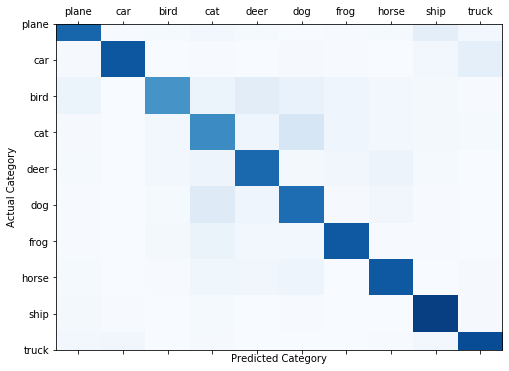

Category   - Accuracy
plane      - 79.6
car        - 84.9
bird       - 61.2
cat        - 64.8
deer       - 78.5
dog        - 76.4
frog       - 84.3
horse      - 84.2
ship       - 93.9
truck      - 88.9

Selected workers

[ 53  28  61  35  74  92  73  79  30  93   3  26  57   9 100]
Worker 53 : is  Stealthy_Attacker
Worker 28 : is  Stealthy_Attacker
Worker 61 : is  Honest
Worker 35 : is  Honest
Worker 74 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 73 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 93 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 57 : is  Honest
Worker 9 : is  Honest
Worker 100 : is  Honest

 | Global Training Round : 31 |


Worker 53 starts training in Global Round:31 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  31


Train Epoch: 1 [0/500	(1%)]	Loss: 1.289804
Train Epoch: 1 [400/500	(81%)]	Loss: 0.868946
Train Epoch: 2 [0/500	(1%)]	Loss: 0.618857
Train Epoch: 2 [400/500	(81%)]	Loss: 0.701403
Train Epoch: 3 [0/500	(1%)]	Loss: 0.436566
Train Epoch: 3 [400/500	(81%)]	Loss: 0.565116
Train Epoch: 4 [0/500	(1%)]	Loss: 0.459778
Train Epoch: 4 [400/500	(81%)]	Loss: 0.385902
Train Epoch: 5 [0/500	(1%)]	Loss: 0.174271
Train Epoch: 5 [400/500	(81%)]	Loss: 0.256683

Performed attacks 1
Worker 53 ends training in Global Round:31 |

Worker 28 starts training in Global Round:31 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  31


Train Epoch: 1 [0/500	(1%)]	Loss: 1.239407
Train Epoch: 1 [400/500	(81%)]	Loss: 0.856831
Train Epoch: 2 [0/500	(1%)]	Loss: 0.572484
Train Epoch: 2 [400/500	(81%)]	Loss: 0.511959
Train Epoch: 3 [0/500	(1%)]	Loss: 0.388402
Train Epoch: 3 [400/500	(81%)]	Loss: 0.421700
Train Epoch: 4 [0/500	(1%)]	Loss: 0.259157
Train Epoch: 4 [400/500	(81%)]	Loss: 0.360231
Train Epoch: 5 [0/500	(1%)]	Loss: 0.275937
Train Epoch: 5 [400/500	(81%)]	Loss: 0.336119

Performed attacks 2
Worker 28 ends training in Global Round:31 |

Worker 61 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.585997
Train Epoch: 1 [400/500	(81%)]	Loss: 0.654233
Train Epoch: 2 [0/500	(1%)]	Loss: 0.284747
Train Epoch: 2 [400/500	(81%)]	Loss: 0.530840
Train Epoch: 3 [0/500	(1%)]	Loss: 0.205297
Train Epoch: 3 [400/500	(81%)]	Loss: 0.464908
Train Epoch: 4 [0/500	(1%)]	Loss: 0.375694
Train Epoch: 4 [400/500	(81%)]	Loss: 0.292939
Train Epoch: 5 [0/500	(1%)]	Loss: 0.184928
Train Epoch: 5 [400/500	(81%)]	Loss: 0.303887

Worker 61 ends training in Global Round:31 |

Worker 35 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.492192
Train Epoch: 1 [400/500	(81%)]	Loss: 0.594615
Train Epoch: 2 [0/500	(1%)]	Loss: 0.355306
Train Epoch: 2 [400/500	(81%)]	Loss: 0.240501
Train Epoch: 3 [0/500	(1%)]	Loss: 0.294049
Train Epoch: 3 [400/500	(81%)]	Loss: 0.267964
Train Epoch: 4 [0/500	(1%)]	Loss: 0.098399
Train Epoch: 4 [400/500	(81%)]	Loss: 0.197719
Train Epoch: 5 [0/500	(1%)]	Loss: 0.242412
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149166

Worker 35 ends training in Global Round:31 |

Worker 74 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.520657
Train Epoch: 1 [400/500	(81%)]	Loss: 0.726201
Train Epoch: 2 [0/500	(1%)]	Loss: 0.347445
Train Epoch: 2 [400/500	(81%)]	Loss: 0.506603
Train Epoch: 3 [0/500	(1%)]	Loss: 0.274156
Train Epoch: 3 [400/500	(81%)]	Loss: 0.258239
Train Epoch: 4 [0/500	(1%)]	Loss: 0.227644
Train Epoch: 4 [400/500	(81%)]	Loss: 0.318658
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126600
Train Epoch: 5 [400/500	(81%)]	Loss: 0.152541

Worker 74 ends training in Global Round:31 |

Worker 92 starts training in Global Round:31 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  31


Train Epoch: 1 [0/500	(1%)]	Loss: 1.189887
Train Epoch: 1 [400/500	(81%)]	Loss: 1.201617
Train Epoch: 2 [0/500	(1%)]	Loss: 0.463395
Train Epoch: 2 [400/500	(81%)]	Loss: 0.529333
Train Epoch: 3 [0/500	(1%)]	Loss: 0.350630
Train Epoch: 3 [400/500	(81%)]	Loss: 0.516313
Train Epoch: 4 [0/500	(1%)]	Loss: 0.256692
Train Epoch: 4 [400/500	(81%)]	Loss: 0.576633
Train Epoch: 5 [0/500	(1%)]	Loss: 0.250120
Train Epoch: 5 [400/500	(81%)]	Loss: 0.479996

Performed attacks 3
Worker 92 ends training in Global Round:31 |

Worker 73 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.202761
Train Epoch: 1 [400/500	(81%)]	Loss: 0.368067
Train Epoch: 2 [0/500	(1%)]	Loss: 0.146854
Train Epoch: 2 [400/500	(81%)]	Loss: 0.314640
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136507
Train Epoch: 3 [400/500	(81%)]	Loss: 0.154598
Train Epoch: 4 [0/500	(1%)]	Loss: 0.068569
Train Epoch: 4 [400/500	(81%)]	Loss: 0.368428
Train Epoch: 5 [0/500	(1%)]	Loss: 0.167866
Train Epoch: 5 [400/500	(81%)]	Loss: 0.345111

Worker 73 ends training in Global Round:31 |

Worker 79 starts training in Global Round:31 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  31


Train Epoch: 1 [0/500	(1%)]	Loss: 1.172636
Train Epoch: 1 [400/500	(81%)]	Loss: 0.713111
Train Epoch: 2 [0/500	(1%)]	Loss: 0.520057
Train Epoch: 2 [400/500	(81%)]	Loss: 0.561020
Train Epoch: 3 [0/500	(1%)]	Loss: 0.496262
Train Epoch: 3 [400/500	(81%)]	Loss: 0.569134
Train Epoch: 4 [0/500	(1%)]	Loss: 0.287492
Train Epoch: 4 [400/500	(81%)]	Loss: 0.628754
Train Epoch: 5 [0/500	(1%)]	Loss: 0.328464
Train Epoch: 5 [400/500	(81%)]	Loss: 0.379981

Performed attacks 4
Worker 79 ends training in Global Round:31 |

Worker 30 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.336887
Train Epoch: 1 [400/500	(81%)]	Loss: 0.311291
Train Epoch: 2 [0/500	(1%)]	Loss: 0.234567
Train Epoch: 2 [400/500	(81%)]	Loss: 0.394873
Train Epoch: 3 [0/500	(1%)]	Loss: 0.139950
Train Epoch: 3 [400/500	(81%)]	Loss: 0.389622
Train Epoch: 4 [0/500	(1%)]	Loss: 0.210055
Train Epoch: 4 [400/500	(81%)]	Loss: 0.238079
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148225
Train Epoch: 5 [400/500	(81%)]	Loss: 0.188965

Worker 30 ends training in Global Round:31 |

Worker 93 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.631134
Train Epoch: 1 [400/500	(81%)]	Loss: 0.612966
Train Epoch: 2 [0/500	(1%)]	Loss: 0.483393
Train Epoch: 2 [400/500	(81%)]	Loss: 0.470297
Train Epoch: 3 [0/500	(1%)]	Loss: 0.417950
Train Epoch: 3 [400/500	(81%)]	Loss: 0.472465
Train Epoch: 4 [0/500	(1%)]	Loss: 0.311883
Train Epoch: 4 [400/500	(81%)]	Loss: 0.375905
Train Epoch: 5 [0/500	(1%)]	Loss: 0.225572
Train Epoch: 5 [400/500	(81%)]	Loss: 0.287915

Worker 93 ends training in Global Round:31 |

Worker 3 starts training in Global Round:31 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  31


Train Epoch: 1 [0/500	(1%)]	Loss: 1.207260
Train Epoch: 1 [400/500	(81%)]	Loss: 0.715836
Train Epoch: 2 [0/500	(1%)]	Loss: 0.445427
Train Epoch: 2 [400/500	(81%)]	Loss: 0.718028
Train Epoch: 3 [0/500	(1%)]	Loss: 0.333184
Train Epoch: 3 [400/500	(81%)]	Loss: 0.442141
Train Epoch: 4 [0/500	(1%)]	Loss: 0.236314
Train Epoch: 4 [400/500	(81%)]	Loss: 0.360962
Train Epoch: 5 [0/500	(1%)]	Loss: 0.210154
Train Epoch: 5 [400/500	(81%)]	Loss: 0.314079

Performed attacks 5
Worker 3 ends training in Global Round:31 |

Worker 26 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.739613
Train Epoch: 1 [400/500	(81%)]	Loss: 0.585178
Train Epoch: 2 [0/500	(1%)]	Loss: 0.434793
Train Epoch: 2 [400/500	(81%)]	Loss: 0.386538
Train Epoch: 3 [0/500	(1%)]	Loss: 0.276162
Train Epoch: 3 [400/500	(81%)]	Loss: 0.468941
Train Epoch: 4 [0/500	(1%)]	Loss: 0.261283
Train Epoch: 4 [400/500	(81%)]	Loss: 0.269015
Train Epoch: 5 [0/500	(1%)]	Loss: 0.242210
Train Epoch: 5 [400/500	(81%)]	Loss: 0.237480

Worker 26 ends training in Global Round:31 |

Worker 57 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.562757
Train Epoch: 1 [400/500	(81%)]	Loss: 0.281155
Train Epoch: 2 [0/500	(1%)]	Loss: 0.322262
Train Epoch: 2 [400/500	(81%)]	Loss: 0.430792
Train Epoch: 3 [0/500	(1%)]	Loss: 0.178738
Train Epoch: 3 [400/500	(81%)]	Loss: 0.345639
Train Epoch: 4 [0/500	(1%)]	Loss: 0.222769
Train Epoch: 4 [400/500	(81%)]	Loss: 0.408762
Train Epoch: 5 [0/500	(1%)]	Loss: 0.187928
Train Epoch: 5 [400/500	(81%)]	Loss: 0.283757

Worker 57 ends training in Global Round:31 |

Worker 9 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.833987
Train Epoch: 1 [400/500	(81%)]	Loss: 0.778330
Train Epoch: 2 [0/500	(1%)]	Loss: 0.427294
Train Epoch: 2 [400/500	(81%)]	Loss: 0.387609
Train Epoch: 3 [0/500	(1%)]	Loss: 0.282004
Train Epoch: 3 [400/500	(81%)]	Loss: 0.442439
Train Epoch: 4 [0/500	(1%)]	Loss: 0.359619
Train Epoch: 4 [400/500	(81%)]	Loss: 0.548787
Train Epoch: 5 [0/500	(1%)]	Loss: 0.191336
Train Epoch: 5 [400/500	(81%)]	Loss: 0.338521

Worker 9 ends training in Global Round:31 |

Worker 100 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.404768
Train Epoch: 1 [400/500	(81%)]	Loss: 0.629547
Train Epoch: 2 [0/500	(1%)]	Loss: 0.253830
Train Epoch: 2 [400/500	(81%)]	Loss: 0.268899
Train Epoch: 3 [0/500	(1%)]	Loss: 0.181980
Train Epoch: 3 [400/500	(81%)]	Loss: 0.466460
Train Epoch: 4 [0/500	(1%)]	Loss: 0.252292
Train Epoch: 4 [400/500	(81%)]	Loss: 0.267328
Train Epoch: 5 [0/500	(1%)]	Loss: 0.253871
Train Epoch: 5 [400/500	(81%)]	Loss: 0.285465

Worker 100 ends training in Global Round:31 |
Last layer biases  [array([ 0.03741606, -0.029599  , -0.01378279,  0.0360288 ,  0.04236082,
       -0.01539581,  0.03914438, -0.02765431, -0.01653868, -0.03607788],
      dtype=float32), array([ 0.03614828, -0.0283753 , -0.01391792,  0.03895952,  0.04554297,
       -0.01708292,  0.04323589, -0.02892934, -0.0204784 , -0.03920119],
      dtype=float32), array([ 0.03421309, -0.03240254, -0.01533344,  0.03814404,  0.0369116 ,
       -0.017509  ,  0.03883674, -0.00687598, -0.02161768, -0.03846524],
      dty

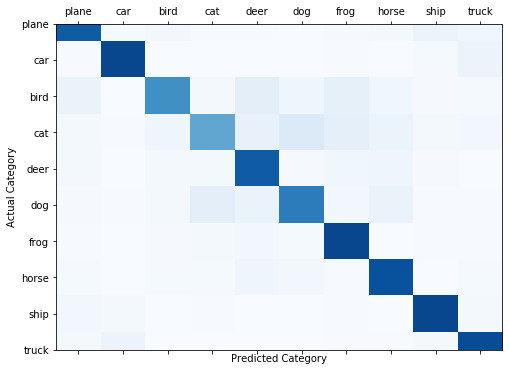

Category   - Accuracy
plane      - 82.9
car        - 91.0
bird       - 63.2
cat        - 53.4
deer       - 83.2
dog        - 70.4
frog       - 90.9
horse      - 87.2
ship       - 90.9
truck      - 88.9

Selected workers

[21 54 34 43 18 49 96 50 91 29 26 89 98 77 63]
Worker 21 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 96 : is  Honest
Worker 50 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 29 : is  Honest
Worker 26 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 77 : is  Honest
Worker 63 : is  Honest

 | Global Training Round : 32 |


Worker 21 starts training in Global Round:32 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  32


Train Epoch: 1 [0/500	(1%)]	Loss: 1.095929
Train Epoch: 1 [400/500	(81%)]	Loss: 0.522613
Train Epoch: 2 [0/500	(1%)]	Loss: 0.475230
Train Epoch: 2 [400/500	(81%)]	Loss: 0.398683
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261589
Train Epoch: 3 [400/500	(81%)]	Loss: 0.357148
Train Epoch: 4 [0/500	(1%)]	Loss: 0.353113
Train Epoch: 4 [400/500	(81%)]	Loss: 0.265111
Train Epoch: 5 [0/500	(1%)]	Loss: 0.241834
Train Epoch: 5 [400/500	(81%)]	Loss: 0.285290

Performed attacks 1
Worker 21 ends training in Global Round:32 |

Worker 54 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.458437
Train Epoch: 1 [400/500	(81%)]	Loss: 0.397474
Train Epoch: 2 [0/500	(1%)]	Loss: 0.252837
Train Epoch: 2 [400/500	(81%)]	Loss: 0.459216
Train Epoch: 3 [0/500	(1%)]	Loss: 0.185613
Train Epoch: 3 [400/500	(81%)]	Loss: 0.209279
Train Epoch: 4 [0/500	(1%)]	Loss: 0.194967
Train Epoch: 4 [400/500	(81%)]	Loss: 0.256881
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157169
Train Epoch: 5 [400/500	(81%)]	Loss: 0.251873

Worker 54 ends training in Global Round:32 |

Worker 34 starts training in Global Round:32 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  32


Train Epoch: 1 [0/500	(1%)]	Loss: 1.123622
Train Epoch: 1 [400/500	(81%)]	Loss: 0.979040
Train Epoch: 2 [0/500	(1%)]	Loss: 0.491646
Train Epoch: 2 [400/500	(81%)]	Loss: 0.541542
Train Epoch: 3 [0/500	(1%)]	Loss: 0.314027
Train Epoch: 3 [400/500	(81%)]	Loss: 0.655089
Train Epoch: 4 [0/500	(1%)]	Loss: 0.392351
Train Epoch: 4 [400/500	(81%)]	Loss: 0.393272
Train Epoch: 5 [0/500	(1%)]	Loss: 0.250725
Train Epoch: 5 [400/500	(81%)]	Loss: 0.430879

Performed attacks 2
Worker 34 ends training in Global Round:32 |

Worker 43 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.344919
Train Epoch: 1 [400/500	(81%)]	Loss: 0.686430
Train Epoch: 2 [0/500	(1%)]	Loss: 0.216740
Train Epoch: 2 [400/500	(81%)]	Loss: 0.416063
Train Epoch: 3 [0/500	(1%)]	Loss: 0.195979
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260492
Train Epoch: 4 [0/500	(1%)]	Loss: 0.247842
Train Epoch: 4 [400/500	(81%)]	Loss: 0.323324
Train Epoch: 5 [0/500	(1%)]	Loss: 0.205623
Train Epoch: 5 [400/500	(81%)]	Loss: 0.265351

Worker 43 ends training in Global Round:32 |

Worker 18 starts training in Global Round:32 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  32


Train Epoch: 1 [0/500	(1%)]	Loss: 1.399553
Train Epoch: 1 [400/500	(81%)]	Loss: 0.569613
Train Epoch: 2 [0/500	(1%)]	Loss: 0.338640
Train Epoch: 2 [400/500	(81%)]	Loss: 0.909248
Train Epoch: 3 [0/500	(1%)]	Loss: 0.496575
Train Epoch: 3 [400/500	(81%)]	Loss: 0.363460
Train Epoch: 4 [0/500	(1%)]	Loss: 0.234510
Train Epoch: 4 [400/500	(81%)]	Loss: 0.480980
Train Epoch: 5 [0/500	(1%)]	Loss: 0.299563
Train Epoch: 5 [400/500	(81%)]	Loss: 0.233784

Performed attacks 3
Worker 18 ends training in Global Round:32 |

Worker 49 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.572181
Train Epoch: 1 [400/500	(81%)]	Loss: 0.639890
Train Epoch: 2 [0/500	(1%)]	Loss: 0.273279
Train Epoch: 2 [400/500	(81%)]	Loss: 0.337857
Train Epoch: 3 [0/500	(1%)]	Loss: 0.308772
Train Epoch: 3 [400/500	(81%)]	Loss: 0.340124
Train Epoch: 4 [0/500	(1%)]	Loss: 0.245551
Train Epoch: 4 [400/500	(81%)]	Loss: 0.374750
Train Epoch: 5 [0/500	(1%)]	Loss: 0.167146
Train Epoch: 5 [400/500	(81%)]	Loss: 0.379227

Worker 49 ends training in Global Round:32 |

Worker 96 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.435434
Train Epoch: 1 [400/500	(81%)]	Loss: 0.624834
Train Epoch: 2 [0/500	(1%)]	Loss: 0.368264
Train Epoch: 2 [400/500	(81%)]	Loss: 0.433049
Train Epoch: 3 [0/500	(1%)]	Loss: 0.233631
Train Epoch: 3 [400/500	(81%)]	Loss: 0.437226
Train Epoch: 4 [0/500	(1%)]	Loss: 0.281427
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213906
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192326
Train Epoch: 5 [400/500	(81%)]	Loss: 0.319223

Worker 96 ends training in Global Round:32 |

Worker 50 starts training in Global Round:32 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  32


Train Epoch: 1 [0/500	(1%)]	Loss: 1.644940
Train Epoch: 1 [400/500	(81%)]	Loss: 0.783521
Train Epoch: 2 [0/500	(1%)]	Loss: 0.443841
Train Epoch: 2 [400/500	(81%)]	Loss: 0.599798
Train Epoch: 3 [0/500	(1%)]	Loss: 0.450866
Train Epoch: 3 [400/500	(81%)]	Loss: 0.641830
Train Epoch: 4 [0/500	(1%)]	Loss: 0.316449
Train Epoch: 4 [400/500	(81%)]	Loss: 0.326435
Train Epoch: 5 [0/500	(1%)]	Loss: 0.382145
Train Epoch: 5 [400/500	(81%)]	Loss: 0.248129

Performed attacks 4
Worker 50 ends training in Global Round:32 |

Worker 91 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.447517
Train Epoch: 1 [400/500	(81%)]	Loss: 0.588219
Train Epoch: 2 [0/500	(1%)]	Loss: 0.570164
Train Epoch: 2 [400/500	(81%)]	Loss: 0.542544
Train Epoch: 3 [0/500	(1%)]	Loss: 0.239383
Train Epoch: 3 [400/500	(81%)]	Loss: 0.350015
Train Epoch: 4 [0/500	(1%)]	Loss: 0.442228
Train Epoch: 4 [400/500	(81%)]	Loss: 0.280388
Train Epoch: 5 [0/500	(1%)]	Loss: 0.209626
Train Epoch: 5 [400/500	(81%)]	Loss: 0.246966

Worker 91 ends training in Global Round:32 |

Worker 29 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.387348
Train Epoch: 1 [400/500	(81%)]	Loss: 0.370845
Train Epoch: 2 [0/500	(1%)]	Loss: 0.352107
Train Epoch: 2 [400/500	(81%)]	Loss: 0.479879
Train Epoch: 3 [0/500	(1%)]	Loss: 0.122731
Train Epoch: 3 [400/500	(81%)]	Loss: 0.435220
Train Epoch: 4 [0/500	(1%)]	Loss: 0.181954
Train Epoch: 4 [400/500	(81%)]	Loss: 0.188146
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175814
Train Epoch: 5 [400/500	(81%)]	Loss: 0.309065

Worker 29 ends training in Global Round:32 |

Worker 26 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.458150
Train Epoch: 1 [400/500	(81%)]	Loss: 0.522359
Train Epoch: 2 [0/500	(1%)]	Loss: 0.226012
Train Epoch: 2 [400/500	(81%)]	Loss: 0.445215
Train Epoch: 3 [0/500	(1%)]	Loss: 0.320657
Train Epoch: 3 [400/500	(81%)]	Loss: 0.492338
Train Epoch: 4 [0/500	(1%)]	Loss: 0.264959
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182962
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126871
Train Epoch: 5 [400/500	(81%)]	Loss: 0.266338

Worker 26 ends training in Global Round:32 |

Worker 89 starts training in Global Round:32 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  32


Train Epoch: 1 [0/500	(1%)]	Loss: 1.293766
Train Epoch: 1 [400/500	(81%)]	Loss: 0.824944
Train Epoch: 2 [0/500	(1%)]	Loss: 0.382711
Train Epoch: 2 [400/500	(81%)]	Loss: 0.737854
Train Epoch: 3 [0/500	(1%)]	Loss: 0.449383
Train Epoch: 3 [400/500	(81%)]	Loss: 0.353273
Train Epoch: 4 [0/500	(1%)]	Loss: 0.462317
Train Epoch: 4 [400/500	(81%)]	Loss: 0.598085
Train Epoch: 5 [0/500	(1%)]	Loss: 0.380641
Train Epoch: 5 [400/500	(81%)]	Loss: 0.453072

Performed attacks 5
Worker 89 ends training in Global Round:32 |

Worker 98 starts training in Global Round:32 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  32


Train Epoch: 1 [0/500	(1%)]	Loss: 1.237193
Train Epoch: 1 [400/500	(81%)]	Loss: 0.835805
Train Epoch: 2 [0/500	(1%)]	Loss: 0.690495
Train Epoch: 2 [400/500	(81%)]	Loss: 0.589782
Train Epoch: 3 [0/500	(1%)]	Loss: 0.443537
Train Epoch: 3 [400/500	(81%)]	Loss: 0.592118
Train Epoch: 4 [0/500	(1%)]	Loss: 0.509113
Train Epoch: 4 [400/500	(81%)]	Loss: 0.387377
Train Epoch: 5 [0/500	(1%)]	Loss: 0.222938
Train Epoch: 5 [400/500	(81%)]	Loss: 0.434518

Performed attacks 6
Worker 98 ends training in Global Round:32 |

Worker 77 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.667900
Train Epoch: 1 [400/500	(81%)]	Loss: 0.679758
Train Epoch: 2 [0/500	(1%)]	Loss: 0.403514
Train Epoch: 2 [400/500	(81%)]	Loss: 0.647645
Train Epoch: 3 [0/500	(1%)]	Loss: 0.363401
Train Epoch: 3 [400/500	(81%)]	Loss: 0.398708
Train Epoch: 4 [0/500	(1%)]	Loss: 0.397852
Train Epoch: 4 [400/500	(81%)]	Loss: 0.354771
Train Epoch: 5 [0/500	(1%)]	Loss: 0.229070
Train Epoch: 5 [400/500	(81%)]	Loss: 0.346469

Worker 77 ends training in Global Round:32 |

Worker 63 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.294545
Train Epoch: 1 [400/500	(81%)]	Loss: 0.426526
Train Epoch: 2 [0/500	(1%)]	Loss: 0.524512
Train Epoch: 2 [400/500	(81%)]	Loss: 0.457643
Train Epoch: 3 [0/500	(1%)]	Loss: 0.232522
Train Epoch: 3 [400/500	(81%)]	Loss: 0.279964
Train Epoch: 4 [0/500	(1%)]	Loss: 0.201208
Train Epoch: 4 [400/500	(81%)]	Loss: 0.222822
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175642
Train Epoch: 5 [400/500	(81%)]	Loss: 0.366884

Worker 63 ends training in Global Round:32 |
Last layer biases  [array([ 0.0362913 , -0.03143796, -0.01453951,  0.03869656,  0.04572828,
       -0.01792908,  0.04092854, -0.0277175 , -0.01564048, -0.0384785 ],
      dtype=float32), array([ 0.03634363, -0.03133586, -0.01392682,  0.03563609,  0.03790778,
       -0.01873082,  0.03882045, -0.00769747, -0.02150795, -0.03960739],
      dtype=float32), array([ 0.03566637, -0.02736073, -0.01407837,  0.03741075,  0.04571747,
       -0.01784948,  0.04476434, -0.02873447, -0.01920554, -0.04042872],
      dtyp

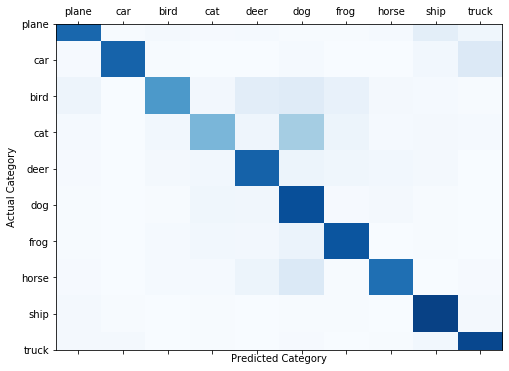

Category   - Accuracy
plane      - 78.8
car        - 80.1
bird       - 59.0
cat        - 46.3
deer       - 80.5
dog        - 87.9
frog       - 85.6
horse      - 75.6
ship       - 93.0
truck      - 90.7

Selected workers

[20 59 90 55 11  9 73 87 56 70 92 99 52 98 12]
Worker 20 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 90 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 11 : is  Honest
Worker 9 : is  Honest
Worker 73 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 56 : is  Honest
Worker 70 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 52 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker

 | Global Training Round : 33 |


Worker 20 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.641469
Train Epoch: 1 [400/500	(81%)]	Loss: 0.517543
Train Epoch: 2 [0/500	(1%)]	Loss: 0.251206
Train Epoch: 2 [400/500	(81%)]	Loss: 0.394001
Train Epoch: 3 [0/500	(1%)]	Loss: 0.288192
Train Epoch: 3 [400/500	(81%)]	Loss: 0.313039
Train Epoch: 4 [0/500	(1%)]	Loss: 0.255810
Train Epoch: 4 [400/500	(81%)]	Loss: 0.279989
Train Epoch: 5 [0/500	(1%)]	Loss: 0.208508
Train Epoch: 5 [400/500	(81%)]	Loss: 0.269985

Worker 20 ends training in Global Round:33 |

Worker 59 starts training in Global Round:33 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  33


Train Epoch: 1 [0/500	(1%)]	Loss: 1.066990
Train Epoch: 1 [400/500	(81%)]	Loss: 0.578718
Train Epoch: 2 [0/500	(1%)]	Loss: 0.284715
Train Epoch: 2 [400/500	(81%)]	Loss: 0.578187
Train Epoch: 3 [0/500	(1%)]	Loss: 0.363491
Train Epoch: 3 [400/500	(81%)]	Loss: 0.352994
Train Epoch: 4 [0/500	(1%)]	Loss: 0.242926
Train Epoch: 4 [400/500	(81%)]	Loss: 0.408546
Train Epoch: 5 [0/500	(1%)]	Loss: 0.230998
Train Epoch: 5 [400/500	(81%)]	Loss: 0.371167

Performed attacks 1
Worker 59 ends training in Global Round:33 |

Worker 90 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.409891
Train Epoch: 1 [400/500	(81%)]	Loss: 0.541651
Train Epoch: 2 [0/500	(1%)]	Loss: 0.260282
Train Epoch: 2 [400/500	(81%)]	Loss: 0.306645
Train Epoch: 3 [0/500	(1%)]	Loss: 0.234726
Train Epoch: 3 [400/500	(81%)]	Loss: 0.394226
Train Epoch: 4 [0/500	(1%)]	Loss: 0.221557
Train Epoch: 4 [400/500	(81%)]	Loss: 0.368250
Train Epoch: 5 [0/500	(1%)]	Loss: 0.166922
Train Epoch: 5 [400/500	(81%)]	Loss: 0.260179

Worker 90 ends training in Global Round:33 |

Worker 55 starts training in Global Round:33 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  33


Train Epoch: 1 [0/500	(1%)]	Loss: 1.430680
Train Epoch: 1 [400/500	(81%)]	Loss: 0.720040
Train Epoch: 2 [0/500	(1%)]	Loss: 0.430046
Train Epoch: 2 [400/500	(81%)]	Loss: 0.515650
Train Epoch: 3 [0/500	(1%)]	Loss: 0.410727
Train Epoch: 3 [400/500	(81%)]	Loss: 0.398149
Train Epoch: 4 [0/500	(1%)]	Loss: 0.262916
Train Epoch: 4 [400/500	(81%)]	Loss: 0.308962
Train Epoch: 5 [0/500	(1%)]	Loss: 0.239664
Train Epoch: 5 [400/500	(81%)]	Loss: 0.477726

Performed attacks 2
Worker 55 ends training in Global Round:33 |

Worker 11 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.679640
Train Epoch: 1 [400/500	(81%)]	Loss: 0.953468
Train Epoch: 2 [0/500	(1%)]	Loss: 0.392606
Train Epoch: 2 [400/500	(81%)]	Loss: 0.447318
Train Epoch: 3 [0/500	(1%)]	Loss: 0.293334
Train Epoch: 3 [400/500	(81%)]	Loss: 0.366803
Train Epoch: 4 [0/500	(1%)]	Loss: 0.277439
Train Epoch: 4 [400/500	(81%)]	Loss: 0.225822
Train Epoch: 5 [0/500	(1%)]	Loss: 0.343188
Train Epoch: 5 [400/500	(81%)]	Loss: 0.226690

Worker 11 ends training in Global Round:33 |

Worker 9 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.400949
Train Epoch: 1 [400/500	(81%)]	Loss: 0.727037
Train Epoch: 2 [0/500	(1%)]	Loss: 0.443049
Train Epoch: 2 [400/500	(81%)]	Loss: 0.515281
Train Epoch: 3 [0/500	(1%)]	Loss: 0.294131
Train Epoch: 3 [400/500	(81%)]	Loss: 0.580756
Train Epoch: 4 [0/500	(1%)]	Loss: 0.386562
Train Epoch: 4 [400/500	(81%)]	Loss: 0.531329
Train Epoch: 5 [0/500	(1%)]	Loss: 0.227570
Train Epoch: 5 [400/500	(81%)]	Loss: 0.302605

Worker 9 ends training in Global Round:33 |

Worker 73 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.534597
Train Epoch: 1 [400/500	(81%)]	Loss: 0.335925
Train Epoch: 2 [0/500	(1%)]	Loss: 0.131192
Train Epoch: 2 [400/500	(81%)]	Loss: 0.261067
Train Epoch: 3 [0/500	(1%)]	Loss: 0.158397
Train Epoch: 3 [400/500	(81%)]	Loss: 0.221239
Train Epoch: 4 [0/500	(1%)]	Loss: 0.197727
Train Epoch: 4 [400/500	(81%)]	Loss: 0.224953
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171854
Train Epoch: 5 [400/500	(81%)]	Loss: 0.439764

Worker 73 ends training in Global Round:33 |

Worker 87 starts training in Global Round:33 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  33


Train Epoch: 1 [0/500	(1%)]	Loss: 1.306499
Train Epoch: 1 [400/500	(81%)]	Loss: 1.220855
Train Epoch: 2 [0/500	(1%)]	Loss: 0.474963
Train Epoch: 2 [400/500	(81%)]	Loss: 0.582864
Train Epoch: 3 [0/500	(1%)]	Loss: 0.384770
Train Epoch: 3 [400/500	(81%)]	Loss: 0.414829
Train Epoch: 4 [0/500	(1%)]	Loss: 0.410123
Train Epoch: 4 [400/500	(81%)]	Loss: 0.427710
Train Epoch: 5 [0/500	(1%)]	Loss: 0.206875
Train Epoch: 5 [400/500	(81%)]	Loss: 0.450764

Performed attacks 3
Worker 87 ends training in Global Round:33 |

Worker 56 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.286829
Train Epoch: 1 [400/500	(81%)]	Loss: 0.528332
Train Epoch: 2 [0/500	(1%)]	Loss: 0.184944
Train Epoch: 2 [400/500	(81%)]	Loss: 0.180159
Train Epoch: 3 [0/500	(1%)]	Loss: 0.171353
Train Epoch: 3 [400/500	(81%)]	Loss: 0.293579
Train Epoch: 4 [0/500	(1%)]	Loss: 0.125755
Train Epoch: 4 [400/500	(81%)]	Loss: 0.355606
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182714
Train Epoch: 5 [400/500	(81%)]	Loss: 0.168577

Worker 56 ends training in Global Round:33 |

Worker 70 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.477232
Train Epoch: 1 [400/500	(81%)]	Loss: 0.407757
Train Epoch: 2 [0/500	(1%)]	Loss: 0.268866
Train Epoch: 2 [400/500	(81%)]	Loss: 0.350990
Train Epoch: 3 [0/500	(1%)]	Loss: 0.252954
Train Epoch: 3 [400/500	(81%)]	Loss: 0.328741
Train Epoch: 4 [0/500	(1%)]	Loss: 0.225306
Train Epoch: 4 [400/500	(81%)]	Loss: 0.302956
Train Epoch: 5 [0/500	(1%)]	Loss: 0.156661
Train Epoch: 5 [400/500	(81%)]	Loss: 0.235324

Worker 70 ends training in Global Round:33 |

Worker 92 starts training in Global Round:33 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  33


Train Epoch: 1 [0/500	(1%)]	Loss: 0.896979
Train Epoch: 1 [400/500	(81%)]	Loss: 0.674970
Train Epoch: 2 [0/500	(1%)]	Loss: 0.466526
Train Epoch: 2 [400/500	(81%)]	Loss: 0.747352
Train Epoch: 3 [0/500	(1%)]	Loss: 0.362446
Train Epoch: 3 [400/500	(81%)]	Loss: 0.434951
Train Epoch: 4 [0/500	(1%)]	Loss: 0.433075
Train Epoch: 4 [400/500	(81%)]	Loss: 0.318056
Train Epoch: 5 [0/500	(1%)]	Loss: 0.222320
Train Epoch: 5 [400/500	(81%)]	Loss: 0.400844

Performed attacks 4
Worker 92 ends training in Global Round:33 |

Worker 99 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.614180
Train Epoch: 1 [400/500	(81%)]	Loss: 0.455128
Train Epoch: 2 [0/500	(1%)]	Loss: 0.333909
Train Epoch: 2 [400/500	(81%)]	Loss: 0.374345
Train Epoch: 3 [0/500	(1%)]	Loss: 0.316363
Train Epoch: 3 [400/500	(81%)]	Loss: 0.407214
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143837
Train Epoch: 4 [400/500	(81%)]	Loss: 0.349509
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203908
Train Epoch: 5 [400/500	(81%)]	Loss: 0.334786

Worker 99 ends training in Global Round:33 |

Worker 52 starts training in Global Round:33 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  33


Train Epoch: 1 [0/500	(1%)]	Loss: 0.968860
Train Epoch: 1 [400/500	(81%)]	Loss: 0.623591
Train Epoch: 2 [0/500	(1%)]	Loss: 0.311652
Train Epoch: 2 [400/500	(81%)]	Loss: 0.469117
Train Epoch: 3 [0/500	(1%)]	Loss: 0.349533
Train Epoch: 3 [400/500	(81%)]	Loss: 0.383962
Train Epoch: 4 [0/500	(1%)]	Loss: 0.339213
Train Epoch: 4 [400/500	(81%)]	Loss: 0.238725
Train Epoch: 5 [0/500	(1%)]	Loss: 0.282512
Train Epoch: 5 [400/500	(81%)]	Loss: 0.200614

Performed attacks 5
Worker 52 ends training in Global Round:33 |

Worker 98 starts training in Global Round:33 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  33


Train Epoch: 1 [0/500	(1%)]	Loss: 1.165671
Train Epoch: 1 [400/500	(81%)]	Loss: 0.961334
Train Epoch: 2 [0/500	(1%)]	Loss: 0.418053
Train Epoch: 2 [400/500	(81%)]	Loss: 0.526271
Train Epoch: 3 [0/500	(1%)]	Loss: 0.401808
Train Epoch: 3 [400/500	(81%)]	Loss: 0.520225
Train Epoch: 4 [0/500	(1%)]	Loss: 0.305708
Train Epoch: 4 [400/500	(81%)]	Loss: 0.218996
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175263
Train Epoch: 5 [400/500	(81%)]	Loss: 0.363563

Performed attacks 6
Worker 98 ends training in Global Round:33 |

Worker 12 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.463548
Train Epoch: 1 [400/500	(81%)]	Loss: 1.017862
Train Epoch: 2 [0/500	(1%)]	Loss: 0.462262
Train Epoch: 2 [400/500	(81%)]	Loss: 0.459225
Train Epoch: 3 [0/500	(1%)]	Loss: 0.253677
Train Epoch: 3 [400/500	(81%)]	Loss: 0.354992
Train Epoch: 4 [0/500	(1%)]	Loss: 0.299120
Train Epoch: 4 [400/500	(81%)]	Loss: 0.331181
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114566
Train Epoch: 5 [400/500	(81%)]	Loss: 0.295117

Worker 12 ends training in Global Round:33 |
Last layer biases  [array([ 0.03536832, -0.03003052, -0.01384467,  0.03727875,  0.03624965,
       -0.01628004,  0.03727823, -0.00816565, -0.0211569 , -0.04079552],
      dtype=float32), array([ 0.03604769, -0.03135146, -0.01248617,  0.03647349,  0.04549157,
       -0.01619546,  0.04019161, -0.02605485, -0.01962673, -0.03658805],
      dtype=float32), array([ 0.03328625, -0.03263441, -0.01600801,  0.03496838,  0.03764209,
       -0.01853247,  0.03923062, -0.00516941, -0.01531657, -0.04156483],
      dtyp

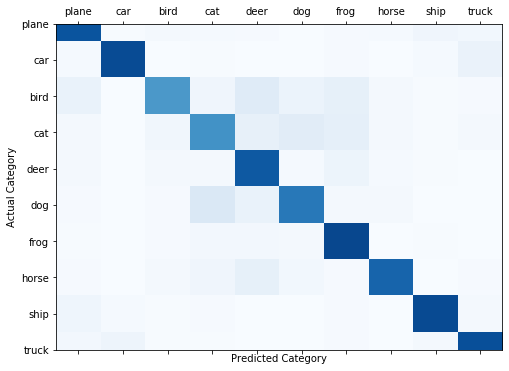

Category   - Accuracy
plane      - 86.1
car        - 89.2
bird       - 59.7
cat        - 62.2
deer       - 84.3
dog        - 72.2
frog       - 90.9
horse      - 79.8
ship       - 89.5
truck      - 87.9

Selected workers

[20  2 58 27 54 89 79 91 45 94 19 49 78 97  9]
Worker 20 : is  Honest
Worker 2 : is  Honest
Worker 58 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 79 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 45 : is  Honest
Worker 94 : is  Stealthy_Attacker
Worker 19 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 78 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 9 : is  Honest

 | Global Training Round : 34 |


Worker 20 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.407197
Train Epoch: 1 [400/500	(81%)]	Loss: 0.404041
Train Epoch: 2 [0/500	(1%)]	Loss: 0.285009
Train Epoch: 2 [400/500	(81%)]	Loss: 0.489362
Train Epoch: 3 [0/500	(1%)]	Loss: 0.227243
Train Epoch: 3 [400/500	(81%)]	Loss: 0.267512
Train Epoch: 4 [0/500	(1%)]	Loss: 0.128874
Train Epoch: 4 [400/500	(81%)]	Loss: 0.153629
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127075
Train Epoch: 5 [400/500	(81%)]	Loss: 0.231170

Worker 20 ends training in Global Round:34 |

Worker 2 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.438713
Train Epoch: 1 [400/500	(81%)]	Loss: 0.331861
Train Epoch: 2 [0/500	(1%)]	Loss: 0.157058
Train Epoch: 2 [400/500	(81%)]	Loss: 0.216913
Train Epoch: 3 [0/500	(1%)]	Loss: 0.230351
Train Epoch: 3 [400/500	(81%)]	Loss: 0.280779
Train Epoch: 4 [0/500	(1%)]	Loss: 0.127955
Train Epoch: 4 [400/500	(81%)]	Loss: 0.152087
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182267
Train Epoch: 5 [400/500	(81%)]	Loss: 0.223786

Worker 2 ends training in Global Round:34 |

Worker 58 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.624973
Train Epoch: 1 [400/500	(81%)]	Loss: 0.811516
Train Epoch: 2 [0/500	(1%)]	Loss: 0.296180
Train Epoch: 2 [400/500	(81%)]	Loss: 0.393155
Train Epoch: 3 [0/500	(1%)]	Loss: 0.340490
Train Epoch: 3 [400/500	(81%)]	Loss: 0.378555
Train Epoch: 4 [0/500	(1%)]	Loss: 0.233835
Train Epoch: 4 [400/500	(81%)]	Loss: 0.352992
Train Epoch: 5 [0/500	(1%)]	Loss: 0.330314
Train Epoch: 5 [400/500	(81%)]	Loss: 0.187701

Worker 58 ends training in Global Round:34 |

Worker 27 starts training in Global Round:34 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  34


Train Epoch: 1 [0/500	(1%)]	Loss: 1.015525
Train Epoch: 1 [400/500	(81%)]	Loss: 0.629805
Train Epoch: 2 [0/500	(1%)]	Loss: 0.337403
Train Epoch: 2 [400/500	(81%)]	Loss: 0.438463
Train Epoch: 3 [0/500	(1%)]	Loss: 0.279412
Train Epoch: 3 [400/500	(81%)]	Loss: 0.482633
Train Epoch: 4 [0/500	(1%)]	Loss: 0.274862
Train Epoch: 4 [400/500	(81%)]	Loss: 0.403514
Train Epoch: 5 [0/500	(1%)]	Loss: 0.208945
Train Epoch: 5 [400/500	(81%)]	Loss: 0.262839

Performed attacks 1
Worker 27 ends training in Global Round:34 |

Worker 54 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.466598
Train Epoch: 1 [400/500	(81%)]	Loss: 0.490137
Train Epoch: 2 [0/500	(1%)]	Loss: 0.360355
Train Epoch: 2 [400/500	(81%)]	Loss: 0.263391
Train Epoch: 3 [0/500	(1%)]	Loss: 0.211611
Train Epoch: 3 [400/500	(81%)]	Loss: 0.252137
Train Epoch: 4 [0/500	(1%)]	Loss: 0.123015
Train Epoch: 4 [400/500	(81%)]	Loss: 0.319544
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115069
Train Epoch: 5 [400/500	(81%)]	Loss: 0.353543

Worker 54 ends training in Global Round:34 |

Worker 89 starts training in Global Round:34 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  34


Train Epoch: 1 [0/500	(1%)]	Loss: 1.514193
Train Epoch: 1 [400/500	(81%)]	Loss: 0.651915
Train Epoch: 2 [0/500	(1%)]	Loss: 0.419247
Train Epoch: 2 [400/500	(81%)]	Loss: 0.451487
Train Epoch: 3 [0/500	(1%)]	Loss: 0.509455
Train Epoch: 3 [400/500	(81%)]	Loss: 0.345869
Train Epoch: 4 [0/500	(1%)]	Loss: 0.461551
Train Epoch: 4 [400/500	(81%)]	Loss: 0.417939
Train Epoch: 5 [0/500	(1%)]	Loss: 0.283102
Train Epoch: 5 [400/500	(81%)]	Loss: 0.617370

Performed attacks 2
Worker 89 ends training in Global Round:34 |

Worker 79 starts training in Global Round:34 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  34


Train Epoch: 1 [0/500	(1%)]	Loss: 1.475669
Train Epoch: 1 [400/500	(81%)]	Loss: 0.744283
Train Epoch: 2 [0/500	(1%)]	Loss: 0.473216
Train Epoch: 2 [400/500	(81%)]	Loss: 0.573799
Train Epoch: 3 [0/500	(1%)]	Loss: 0.359909
Train Epoch: 3 [400/500	(81%)]	Loss: 0.390706
Train Epoch: 4 [0/500	(1%)]	Loss: 0.379293
Train Epoch: 4 [400/500	(81%)]	Loss: 0.380778
Train Epoch: 5 [0/500	(1%)]	Loss: 0.266740
Train Epoch: 5 [400/500	(81%)]	Loss: 0.272299

Performed attacks 3
Worker 79 ends training in Global Round:34 |

Worker 91 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.505067
Train Epoch: 1 [400/500	(81%)]	Loss: 0.744141
Train Epoch: 2 [0/500	(1%)]	Loss: 0.288158
Train Epoch: 2 [400/500	(81%)]	Loss: 0.670911
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261676
Train Epoch: 3 [400/500	(81%)]	Loss: 0.350352
Train Epoch: 4 [0/500	(1%)]	Loss: 0.215664
Train Epoch: 4 [400/500	(81%)]	Loss: 0.376979
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127194
Train Epoch: 5 [400/500	(81%)]	Loss: 0.332053

Worker 91 ends training in Global Round:34 |

Worker 45 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.638112
Train Epoch: 1 [400/500	(81%)]	Loss: 0.305765
Train Epoch: 2 [0/500	(1%)]	Loss: 0.407411
Train Epoch: 2 [400/500	(81%)]	Loss: 0.313772
Train Epoch: 3 [0/500	(1%)]	Loss: 0.315637
Train Epoch: 3 [400/500	(81%)]	Loss: 0.438458
Train Epoch: 4 [0/500	(1%)]	Loss: 0.288056
Train Epoch: 4 [400/500	(81%)]	Loss: 0.409410
Train Epoch: 5 [0/500	(1%)]	Loss: 0.235039
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177661

Worker 45 ends training in Global Round:34 |

Worker 94 starts training in Global Round:34 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  34


Train Epoch: 1 [0/500	(1%)]	Loss: 1.131799
Train Epoch: 1 [400/500	(81%)]	Loss: 0.775938
Train Epoch: 2 [0/500	(1%)]	Loss: 0.368414
Train Epoch: 2 [400/500	(81%)]	Loss: 0.659528
Train Epoch: 3 [0/500	(1%)]	Loss: 0.319152
Train Epoch: 3 [400/500	(81%)]	Loss: 0.510458
Train Epoch: 4 [0/500	(1%)]	Loss: 0.227814
Train Epoch: 4 [400/500	(81%)]	Loss: 0.339373
Train Epoch: 5 [0/500	(1%)]	Loss: 0.294555
Train Epoch: 5 [400/500	(81%)]	Loss: 0.161605

Performed attacks 4
Worker 94 ends training in Global Round:34 |

Worker 19 starts training in Global Round:34 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  34


Train Epoch: 1 [0/500	(1%)]	Loss: 1.474759
Train Epoch: 1 [400/500	(81%)]	Loss: 0.428205
Train Epoch: 2 [0/500	(1%)]	Loss: 0.305423
Train Epoch: 2 [400/500	(81%)]	Loss: 0.416158
Train Epoch: 3 [0/500	(1%)]	Loss: 0.166519
Train Epoch: 3 [400/500	(81%)]	Loss: 0.292702
Train Epoch: 4 [0/500	(1%)]	Loss: 0.232374
Train Epoch: 4 [400/500	(81%)]	Loss: 0.173647
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106153
Train Epoch: 5 [400/500	(81%)]	Loss: 0.187377

Performed attacks 5
Worker 19 ends training in Global Round:34 |

Worker 49 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.565331
Train Epoch: 1 [400/500	(81%)]	Loss: 0.614839
Train Epoch: 2 [0/500	(1%)]	Loss: 0.300167
Train Epoch: 2 [400/500	(81%)]	Loss: 0.447060
Train Epoch: 3 [0/500	(1%)]	Loss: 0.246659
Train Epoch: 3 [400/500	(81%)]	Loss: 0.366564
Train Epoch: 4 [0/500	(1%)]	Loss: 0.169557
Train Epoch: 4 [400/500	(81%)]	Loss: 0.348531
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172698
Train Epoch: 5 [400/500	(81%)]	Loss: 0.205903

Worker 49 ends training in Global Round:34 |

Worker 78 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.703202
Train Epoch: 1 [400/500	(81%)]	Loss: 0.815706
Train Epoch: 2 [0/500	(1%)]	Loss: 0.445553
Train Epoch: 2 [400/500	(81%)]	Loss: 0.618992
Train Epoch: 3 [0/500	(1%)]	Loss: 0.326955
Train Epoch: 3 [400/500	(81%)]	Loss: 0.354499
Train Epoch: 4 [0/500	(1%)]	Loss: 0.348996
Train Epoch: 4 [400/500	(81%)]	Loss: 0.497775
Train Epoch: 5 [0/500	(1%)]	Loss: 0.291730
Train Epoch: 5 [400/500	(81%)]	Loss: 0.363781

Worker 78 ends training in Global Round:34 |

Worker 97 starts training in Global Round:34 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  34


Train Epoch: 1 [0/500	(1%)]	Loss: 1.119770
Train Epoch: 1 [400/500	(81%)]	Loss: 0.857236
Train Epoch: 2 [0/500	(1%)]	Loss: 0.373014
Train Epoch: 2 [400/500	(81%)]	Loss: 0.327344
Train Epoch: 3 [0/500	(1%)]	Loss: 0.296654
Train Epoch: 3 [400/500	(81%)]	Loss: 0.359192
Train Epoch: 4 [0/500	(1%)]	Loss: 0.229674
Train Epoch: 4 [400/500	(81%)]	Loss: 0.296029
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160843
Train Epoch: 5 [400/500	(81%)]	Loss: 0.155939

Performed attacks 6
Worker 97 ends training in Global Round:34 |

Worker 9 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.464170
Train Epoch: 1 [400/500	(81%)]	Loss: 0.464832
Train Epoch: 2 [0/500	(1%)]	Loss: 0.299676
Train Epoch: 2 [400/500	(81%)]	Loss: 0.359227
Train Epoch: 3 [0/500	(1%)]	Loss: 0.363341
Train Epoch: 3 [400/500	(81%)]	Loss: 0.244752
Train Epoch: 4 [0/500	(1%)]	Loss: 0.147687
Train Epoch: 4 [400/500	(81%)]	Loss: 0.436291
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100497
Train Epoch: 5 [400/500	(81%)]	Loss: 0.235157

Worker 9 ends training in Global Round:34 |
Last layer biases  [array([ 0.03451871, -0.02946116, -0.01334626,  0.03584668,  0.03578989,
       -0.01525943,  0.03846563, -0.00785107, -0.0208368 , -0.04196453],
      dtype=float32), array([ 0.03629541, -0.03164585, -0.01620189,  0.03648526,  0.03622724,
       -0.0190987 ,  0.04100259, -0.00585969, -0.02123884, -0.04006388],
      dtype=float32), array([ 0.03282988, -0.02813416, -0.01445128,  0.03492248,  0.03960039,
       -0.02052178,  0.04000495, -0.00609241, -0.02032419, -0.04193223],
      dtype

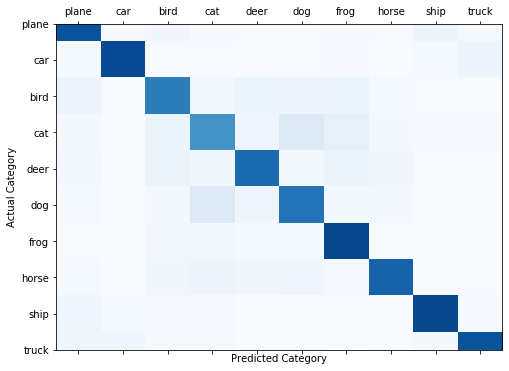

Category   - Accuracy
plane      - 86.2
car        - 89.7
bird       - 70.2
cat        - 61.8
deer       - 77.1
dog        - 74.2
frog       - 90.8
horse      - 80.1
ship       - 90.4
truck      - 86.5

Selected workers

[31 91  4 97 66 64 44 33 49 84 29 78 71 23 37]
Worker 31 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 4 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 66 : is  Stealthy_Attacker
Worker 64 : is  Honest
Worker 44 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 84 : is  Honest
Worker 29 : is  Honest
Worker 78 : is  Honest
Worker 71 : is  Stealthy_Attacker
Worker 23 : is  Stealthy_Attacker
Worker 37 : is  Stealthy_Attacker

 | Global Training Round : 35 |


Worker 31 starts training in Global Round:35 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  35


Train Epoch: 1 [0/500	(1%)]	Loss: 1.139813
Train Epoch: 1 [400/500	(81%)]	Loss: 0.558114
Train Epoch: 2 [0/500	(1%)]	Loss: 0.468097
Train Epoch: 2 [400/500	(81%)]	Loss: 0.416908
Train Epoch: 3 [0/500	(1%)]	Loss: 0.312346
Train Epoch: 3 [400/500	(81%)]	Loss: 0.414887
Train Epoch: 4 [0/500	(1%)]	Loss: 0.321428
Train Epoch: 4 [400/500	(81%)]	Loss: 0.404458
Train Epoch: 5 [0/500	(1%)]	Loss: 0.236953
Train Epoch: 5 [400/500	(81%)]	Loss: 0.271780

Performed attacks 1
Worker 31 ends training in Global Round:35 |

Worker 91 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.484369
Train Epoch: 1 [400/500	(81%)]	Loss: 0.302058
Train Epoch: 2 [0/500	(1%)]	Loss: 0.353510
Train Epoch: 2 [400/500	(81%)]	Loss: 0.374616
Train Epoch: 3 [0/500	(1%)]	Loss: 0.291423
Train Epoch: 3 [400/500	(81%)]	Loss: 0.330120
Train Epoch: 4 [0/500	(1%)]	Loss: 0.173855
Train Epoch: 4 [400/500	(81%)]	Loss: 0.285934
Train Epoch: 5 [0/500	(1%)]	Loss: 0.113689
Train Epoch: 5 [400/500	(81%)]	Loss: 0.209672

Worker 91 ends training in Global Round:35 |

Worker 4 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.504279
Train Epoch: 1 [400/500	(81%)]	Loss: 0.395437
Train Epoch: 2 [0/500	(1%)]	Loss: 0.266138
Train Epoch: 2 [400/500	(81%)]	Loss: 0.263824
Train Epoch: 3 [0/500	(1%)]	Loss: 0.211427
Train Epoch: 3 [400/500	(81%)]	Loss: 0.258703
Train Epoch: 4 [0/500	(1%)]	Loss: 0.315071
Train Epoch: 4 [400/500	(81%)]	Loss: 0.312146
Train Epoch: 5 [0/500	(1%)]	Loss: 0.291714
Train Epoch: 5 [400/500	(81%)]	Loss: 0.277624

Worker 4 ends training in Global Round:35 |

Worker 97 starts training in Global Round:35 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  35


Train Epoch: 1 [0/500	(1%)]	Loss: 1.055531
Train Epoch: 1 [400/500	(81%)]	Loss: 0.618698
Train Epoch: 2 [0/500	(1%)]	Loss: 0.465103
Train Epoch: 2 [400/500	(81%)]	Loss: 0.609328
Train Epoch: 3 [0/500	(1%)]	Loss: 0.270487
Train Epoch: 3 [400/500	(81%)]	Loss: 0.537165
Train Epoch: 4 [0/500	(1%)]	Loss: 0.352676
Train Epoch: 4 [400/500	(81%)]	Loss: 0.322779
Train Epoch: 5 [0/500	(1%)]	Loss: 0.239426
Train Epoch: 5 [400/500	(81%)]	Loss: 0.233098

Performed attacks 2
Worker 97 ends training in Global Round:35 |

Worker 66 starts training in Global Round:35 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  35


Train Epoch: 1 [0/500	(1%)]	Loss: 1.021039
Train Epoch: 1 [400/500	(81%)]	Loss: 0.643640
Train Epoch: 2 [0/500	(1%)]	Loss: 0.332592
Train Epoch: 2 [400/500	(81%)]	Loss: 0.588132
Train Epoch: 3 [0/500	(1%)]	Loss: 0.393226
Train Epoch: 3 [400/500	(81%)]	Loss: 0.524634
Train Epoch: 4 [0/500	(1%)]	Loss: 0.244391
Train Epoch: 4 [400/500	(81%)]	Loss: 0.246609
Train Epoch: 5 [0/500	(1%)]	Loss: 0.267635
Train Epoch: 5 [400/500	(81%)]	Loss: 0.217215

Performed attacks 3
Worker 66 ends training in Global Round:35 |

Worker 64 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.422433
Train Epoch: 1 [400/500	(81%)]	Loss: 0.532138
Train Epoch: 2 [0/500	(1%)]	Loss: 0.328190
Train Epoch: 2 [400/500	(81%)]	Loss: 0.432826
Train Epoch: 3 [0/500	(1%)]	Loss: 0.195934
Train Epoch: 3 [400/500	(81%)]	Loss: 0.379617
Train Epoch: 4 [0/500	(1%)]	Loss: 0.176897
Train Epoch: 4 [400/500	(81%)]	Loss: 0.333664
Train Epoch: 5 [0/500	(1%)]	Loss: 0.188868
Train Epoch: 5 [400/500	(81%)]	Loss: 0.261416

Worker 64 ends training in Global Round:35 |

Worker 44 starts training in Global Round:35 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  35


Train Epoch: 1 [0/500	(1%)]	Loss: 1.450041
Train Epoch: 1 [400/500	(81%)]	Loss: 1.084304
Train Epoch: 2 [0/500	(1%)]	Loss: 0.529894
Train Epoch: 2 [400/500	(81%)]	Loss: 0.878469
Train Epoch: 3 [0/500	(1%)]	Loss: 0.428605
Train Epoch: 3 [400/500	(81%)]	Loss: 0.589251
Train Epoch: 4 [0/500	(1%)]	Loss: 0.493295
Train Epoch: 4 [400/500	(81%)]	Loss: 0.458244
Train Epoch: 5 [0/500	(1%)]	Loss: 0.288391
Train Epoch: 5 [400/500	(81%)]	Loss: 0.250703

Performed attacks 4
Worker 44 ends training in Global Round:35 |

Worker 33 starts training in Global Round:35 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  35


Train Epoch: 1 [0/500	(1%)]	Loss: 1.463301
Train Epoch: 1 [400/500	(81%)]	Loss: 0.594891
Train Epoch: 2 [0/500	(1%)]	Loss: 0.399443
Train Epoch: 2 [400/500	(81%)]	Loss: 0.567617
Train Epoch: 3 [0/500	(1%)]	Loss: 0.285344
Train Epoch: 3 [400/500	(81%)]	Loss: 0.400930
Train Epoch: 4 [0/500	(1%)]	Loss: 0.270642
Train Epoch: 4 [400/500	(81%)]	Loss: 0.409649
Train Epoch: 5 [0/500	(1%)]	Loss: 0.205620
Train Epoch: 5 [400/500	(81%)]	Loss: 0.296000

Performed attacks 5
Worker 33 ends training in Global Round:35 |

Worker 49 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.352169
Train Epoch: 1 [400/500	(81%)]	Loss: 0.317769
Train Epoch: 2 [0/500	(1%)]	Loss: 0.138788
Train Epoch: 2 [400/500	(81%)]	Loss: 0.241456
Train Epoch: 3 [0/500	(1%)]	Loss: 0.176269
Train Epoch: 3 [400/500	(81%)]	Loss: 0.209903
Train Epoch: 4 [0/500	(1%)]	Loss: 0.101468
Train Epoch: 4 [400/500	(81%)]	Loss: 0.212166
Train Epoch: 5 [0/500	(1%)]	Loss: 0.116412
Train Epoch: 5 [400/500	(81%)]	Loss: 0.198502

Worker 49 ends training in Global Round:35 |

Worker 84 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.483251
Train Epoch: 1 [400/500	(81%)]	Loss: 0.645827
Train Epoch: 2 [0/500	(1%)]	Loss: 0.367742
Train Epoch: 2 [400/500	(81%)]	Loss: 0.450833
Train Epoch: 3 [0/500	(1%)]	Loss: 0.278811
Train Epoch: 3 [400/500	(81%)]	Loss: 0.307091
Train Epoch: 4 [0/500	(1%)]	Loss: 0.280456
Train Epoch: 4 [400/500	(81%)]	Loss: 0.304889
Train Epoch: 5 [0/500	(1%)]	Loss: 0.168039
Train Epoch: 5 [400/500	(81%)]	Loss: 0.263729

Worker 84 ends training in Global Round:35 |

Worker 29 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.401426
Train Epoch: 1 [400/500	(81%)]	Loss: 0.500398
Train Epoch: 2 [0/500	(1%)]	Loss: 0.217928
Train Epoch: 2 [400/500	(81%)]	Loss: 0.232032
Train Epoch: 3 [0/500	(1%)]	Loss: 0.220084
Train Epoch: 3 [400/500	(81%)]	Loss: 0.257558
Train Epoch: 4 [0/500	(1%)]	Loss: 0.255928
Train Epoch: 4 [400/500	(81%)]	Loss: 0.235120
Train Epoch: 5 [0/500	(1%)]	Loss: 0.209000
Train Epoch: 5 [400/500	(81%)]	Loss: 0.142257

Worker 29 ends training in Global Round:35 |

Worker 78 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.378071
Train Epoch: 1 [400/500	(81%)]	Loss: 0.526010
Train Epoch: 2 [0/500	(1%)]	Loss: 0.280537
Train Epoch: 2 [400/500	(81%)]	Loss: 0.616713
Train Epoch: 3 [0/500	(1%)]	Loss: 0.196767
Train Epoch: 3 [400/500	(81%)]	Loss: 0.282985
Train Epoch: 4 [0/500	(1%)]	Loss: 0.163778
Train Epoch: 4 [400/500	(81%)]	Loss: 0.235263
Train Epoch: 5 [0/500	(1%)]	Loss: 0.166978
Train Epoch: 5 [400/500	(81%)]	Loss: 0.280102

Worker 78 ends training in Global Round:35 |

Worker 71 starts training in Global Round:35 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  35


Train Epoch: 1 [0/500	(1%)]	Loss: 1.023155
Train Epoch: 1 [400/500	(81%)]	Loss: 1.084051
Train Epoch: 2 [0/500	(1%)]	Loss: 0.414159
Train Epoch: 2 [400/500	(81%)]	Loss: 0.763268
Train Epoch: 3 [0/500	(1%)]	Loss: 0.338789
Train Epoch: 3 [400/500	(81%)]	Loss: 0.607197
Train Epoch: 4 [0/500	(1%)]	Loss: 0.255547
Train Epoch: 4 [400/500	(81%)]	Loss: 0.227340
Train Epoch: 5 [0/500	(1%)]	Loss: 0.220768
Train Epoch: 5 [400/500	(81%)]	Loss: 0.366602

Performed attacks 6
Worker 71 ends training in Global Round:35 |

Worker 23 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.395319
Train Epoch: 1 [400/500	(81%)]	Loss: 0.630795
Train Epoch: 2 [0/500	(1%)]	Loss: 0.435264
Train Epoch: 2 [400/500	(81%)]	Loss: 0.392402
Train Epoch: 3 [0/500	(1%)]	Loss: 0.282351
Train Epoch: 3 [400/500	(81%)]	Loss: 0.481315
Train Epoch: 4 [0/500	(1%)]	Loss: 0.247421
Train Epoch: 4 [400/500	(81%)]	Loss: 0.390932
Train Epoch: 5 [0/500	(1%)]	Loss: 0.339272
Train Epoch: 5 [400/500	(81%)]	Loss: 0.258085

Worker 23 ends training in Global Round:35 |

Worker 37 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.485569
Train Epoch: 1 [400/500	(81%)]	Loss: 0.550101
Train Epoch: 2 [0/500	(1%)]	Loss: 0.550193
Train Epoch: 2 [400/500	(81%)]	Loss: 0.361075
Train Epoch: 3 [0/500	(1%)]	Loss: 0.361979
Train Epoch: 3 [400/500	(81%)]	Loss: 0.320515
Train Epoch: 4 [0/500	(1%)]	Loss: 0.441588
Train Epoch: 4 [400/500	(81%)]	Loss: 0.353454
Train Epoch: 5 [0/500	(1%)]	Loss: 0.230513
Train Epoch: 5 [400/500	(81%)]	Loss: 0.385436

Worker 37 ends training in Global Round:35 |
Last layer biases  [array([ 0.0343885 , -0.02868198, -0.01473085,  0.04086506,  0.04420377,
       -0.01606996,  0.0411406 , -0.02639949, -0.02085873, -0.03795523],
      dtype=float32), array([ 0.03805025, -0.03137058, -0.01817678,  0.03654639,  0.03871232,
       -0.02004082,  0.04065089, -0.00664894, -0.02039552, -0.04142555],
      dtype=float32), array([ 0.03337657, -0.03179938, -0.01508128,  0.03640744,  0.0373584 ,
       -0.01861132,  0.03940409, -0.00622008, -0.0194207 , -0.03951204],
      dtyp

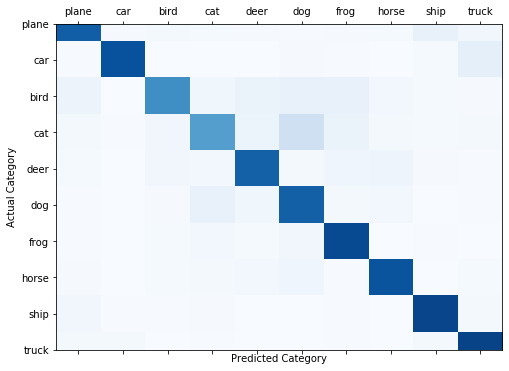

Category   - Accuracy
plane      - 82.4
car        - 87.3
bird       - 63.5
cat        - 56.7
deer       - 80.9
dog        - 81.5
frog       - 89.5
horse      - 86.0
ship       - 91.7
truck      - 92.4

Selected workers

[ 8 85 32 55 12 42 10 39 34 21 56 18 28  6 93]
Worker 8 : is  Honest
Worker 85 : is  Honest
Worker 32 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 10 : is  Honest
Worker 39 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 21 : is  Stealthy_Attacker
Worker 56 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 28 : is  Stealthy_Attacker
Worker 6 : is  Stealthy_Attacker
Worker 93 : is  Honest

 | Global Training Round : 36 |


Worker 8 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.389904
Train Epoch: 1 [400/500	(81%)]	Loss: 0.661541
Train Epoch: 2 [0/500	(1%)]	Loss: 0.275098
Train Epoch: 2 [400/500	(81%)]	Loss: 0.349186
Train Epoch: 3 [0/500	(1%)]	Loss: 0.307021
Train Epoch: 3 [400/500	(81%)]	Loss: 0.448129
Train Epoch: 4 [0/500	(1%)]	Loss: 0.250873
Train Epoch: 4 [400/500	(81%)]	Loss: 0.439435
Train Epoch: 5 [0/500	(1%)]	Loss: 0.174223
Train Epoch: 5 [400/500	(81%)]	Loss: 0.172374

Worker 8 ends training in Global Round:36 |

Worker 85 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.843367
Train Epoch: 1 [400/500	(81%)]	Loss: 0.632899
Train Epoch: 2 [0/500	(1%)]	Loss: 0.294705
Train Epoch: 2 [400/500	(81%)]	Loss: 0.431653
Train Epoch: 3 [0/500	(1%)]	Loss: 0.379882
Train Epoch: 3 [400/500	(81%)]	Loss: 0.392550
Train Epoch: 4 [0/500	(1%)]	Loss: 0.234437
Train Epoch: 4 [400/500	(81%)]	Loss: 0.237597
Train Epoch: 5 [0/500	(1%)]	Loss: 0.197307
Train Epoch: 5 [400/500	(81%)]	Loss: 0.330518

Worker 85 ends training in Global Round:36 |

Worker 32 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.564889
Train Epoch: 1 [400/500	(81%)]	Loss: 0.653328
Train Epoch: 2 [0/500	(1%)]	Loss: 0.348278
Train Epoch: 2 [400/500	(81%)]	Loss: 0.571523
Train Epoch: 3 [0/500	(1%)]	Loss: 0.251239
Train Epoch: 3 [400/500	(81%)]	Loss: 0.333852
Train Epoch: 4 [0/500	(1%)]	Loss: 0.255635
Train Epoch: 4 [400/500	(81%)]	Loss: 0.367907
Train Epoch: 5 [0/500	(1%)]	Loss: 0.298606
Train Epoch: 5 [400/500	(81%)]	Loss: 0.158600

Worker 32 ends training in Global Round:36 |

Worker 55 starts training in Global Round:36 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  36


Train Epoch: 1 [0/500	(1%)]	Loss: 1.356345
Train Epoch: 1 [400/500	(81%)]	Loss: 0.851093
Train Epoch: 2 [0/500	(1%)]	Loss: 0.602670
Train Epoch: 2 [400/500	(81%)]	Loss: 0.598177
Train Epoch: 3 [0/500	(1%)]	Loss: 0.330991
Train Epoch: 3 [400/500	(81%)]	Loss: 0.300135
Train Epoch: 4 [0/500	(1%)]	Loss: 0.242196
Train Epoch: 4 [400/500	(81%)]	Loss: 0.302728
Train Epoch: 5 [0/500	(1%)]	Loss: 0.199623
Train Epoch: 5 [400/500	(81%)]	Loss: 0.265930

Performed attacks 1
Worker 55 ends training in Global Round:36 |

Worker 12 starts training in Global Round:36 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  36


Train Epoch: 1 [0/500	(1%)]	Loss: 1.205033
Train Epoch: 1 [400/500	(81%)]	Loss: 0.490849
Train Epoch: 2 [0/500	(1%)]	Loss: 0.564138
Train Epoch: 2 [400/500	(81%)]	Loss: 0.372604
Train Epoch: 3 [0/500	(1%)]	Loss: 0.289393
Train Epoch: 3 [400/500	(81%)]	Loss: 0.330975
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164482
Train Epoch: 4 [400/500	(81%)]	Loss: 0.344406
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124963
Train Epoch: 5 [400/500	(81%)]	Loss: 0.303780

Performed attacks 2
Worker 12 ends training in Global Round:36 |

Worker 42 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.739630
Train Epoch: 1 [400/500	(81%)]	Loss: 0.566772
Train Epoch: 2 [0/500	(1%)]	Loss: 0.332310
Train Epoch: 2 [400/500	(81%)]	Loss: 0.510557
Train Epoch: 3 [0/500	(1%)]	Loss: 0.295011
Train Epoch: 3 [400/500	(81%)]	Loss: 0.551281
Train Epoch: 4 [0/500	(1%)]	Loss: 0.267391
Train Epoch: 4 [400/500	(81%)]	Loss: 0.310002
Train Epoch: 5 [0/500	(1%)]	Loss: 0.169895
Train Epoch: 5 [400/500	(81%)]	Loss: 0.317999

Worker 42 ends training in Global Round:36 |

Worker 10 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.614686
Train Epoch: 1 [400/500	(81%)]	Loss: 0.518480
Train Epoch: 2 [0/500	(1%)]	Loss: 0.336819
Train Epoch: 2 [400/500	(81%)]	Loss: 0.469505
Train Epoch: 3 [0/500	(1%)]	Loss: 0.284258
Train Epoch: 3 [400/500	(81%)]	Loss: 0.300275
Train Epoch: 4 [0/500	(1%)]	Loss: 0.283989
Train Epoch: 4 [400/500	(81%)]	Loss: 0.341162
Train Epoch: 5 [0/500	(1%)]	Loss: 0.267036
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253664

Worker 10 ends training in Global Round:36 |

Worker 39 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.542721
Train Epoch: 1 [400/500	(81%)]	Loss: 0.663663
Train Epoch: 2 [0/500	(1%)]	Loss: 0.410284
Train Epoch: 2 [400/500	(81%)]	Loss: 0.411255
Train Epoch: 3 [0/500	(1%)]	Loss: 0.216528
Train Epoch: 3 [400/500	(81%)]	Loss: 0.363432
Train Epoch: 4 [0/500	(1%)]	Loss: 0.241872
Train Epoch: 4 [400/500	(81%)]	Loss: 0.265740
Train Epoch: 5 [0/500	(1%)]	Loss: 0.162097
Train Epoch: 5 [400/500	(81%)]	Loss: 0.229419

Worker 39 ends training in Global Round:36 |

Worker 34 starts training in Global Round:36 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  36


Train Epoch: 1 [0/500	(1%)]	Loss: 1.342793
Train Epoch: 1 [400/500	(81%)]	Loss: 0.662897
Train Epoch: 2 [0/500	(1%)]	Loss: 0.365015
Train Epoch: 2 [400/500	(81%)]	Loss: 0.569904
Train Epoch: 3 [0/500	(1%)]	Loss: 0.495880
Train Epoch: 3 [400/500	(81%)]	Loss: 0.307688
Train Epoch: 4 [0/500	(1%)]	Loss: 0.259850
Train Epoch: 4 [400/500	(81%)]	Loss: 0.251870
Train Epoch: 5 [0/500	(1%)]	Loss: 0.165181
Train Epoch: 5 [400/500	(81%)]	Loss: 0.310546

Performed attacks 3
Worker 34 ends training in Global Round:36 |

Worker 21 starts training in Global Round:36 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  36


Train Epoch: 1 [0/500	(1%)]	Loss: 1.040987
Train Epoch: 1 [400/500	(81%)]	Loss: 0.739960
Train Epoch: 2 [0/500	(1%)]	Loss: 0.438610
Train Epoch: 2 [400/500	(81%)]	Loss: 0.554881
Train Epoch: 3 [0/500	(1%)]	Loss: 0.307693
Train Epoch: 3 [400/500	(81%)]	Loss: 0.395361
Train Epoch: 4 [0/500	(1%)]	Loss: 0.337491
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309816
Train Epoch: 5 [0/500	(1%)]	Loss: 0.290779
Train Epoch: 5 [400/500	(81%)]	Loss: 0.331471

Performed attacks 4
Worker 21 ends training in Global Round:36 |

Worker 56 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.382292
Train Epoch: 1 [400/500	(81%)]	Loss: 0.522083
Train Epoch: 2 [0/500	(1%)]	Loss: 0.168163
Train Epoch: 2 [400/500	(81%)]	Loss: 0.398336
Train Epoch: 3 [0/500	(1%)]	Loss: 0.322795
Train Epoch: 3 [400/500	(81%)]	Loss: 0.232428
Train Epoch: 4 [0/500	(1%)]	Loss: 0.113153
Train Epoch: 4 [400/500	(81%)]	Loss: 0.354013
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182625
Train Epoch: 5 [400/500	(81%)]	Loss: 0.103697

Worker 56 ends training in Global Round:36 |

Worker 18 starts training in Global Round:36 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  36


Train Epoch: 1 [0/500	(1%)]	Loss: 1.149442
Train Epoch: 1 [400/500	(81%)]	Loss: 0.627169
Train Epoch: 2 [0/500	(1%)]	Loss: 0.473646
Train Epoch: 2 [400/500	(81%)]	Loss: 0.521452
Train Epoch: 3 [0/500	(1%)]	Loss: 0.351351
Train Epoch: 3 [400/500	(81%)]	Loss: 0.409839
Train Epoch: 4 [0/500	(1%)]	Loss: 0.384195
Train Epoch: 4 [400/500	(81%)]	Loss: 0.305904
Train Epoch: 5 [0/500	(1%)]	Loss: 0.238502
Train Epoch: 5 [400/500	(81%)]	Loss: 0.239931

Performed attacks 5
Worker 18 ends training in Global Round:36 |

Worker 28 starts training in Global Round:36 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  36


Train Epoch: 1 [0/500	(1%)]	Loss: 1.261625
Train Epoch: 1 [400/500	(81%)]	Loss: 0.606608
Train Epoch: 2 [0/500	(1%)]	Loss: 0.441487
Train Epoch: 2 [400/500	(81%)]	Loss: 0.511920
Train Epoch: 3 [0/500	(1%)]	Loss: 0.277899
Train Epoch: 3 [400/500	(81%)]	Loss: 0.423351
Train Epoch: 4 [0/500	(1%)]	Loss: 0.328817
Train Epoch: 4 [400/500	(81%)]	Loss: 0.241365
Train Epoch: 5 [0/500	(1%)]	Loss: 0.218013
Train Epoch: 5 [400/500	(81%)]	Loss: 0.354193

Performed attacks 6
Worker 28 ends training in Global Round:36 |

Worker 6 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.714617
Train Epoch: 1 [400/500	(81%)]	Loss: 0.606166
Train Epoch: 2 [0/500	(1%)]	Loss: 0.292278
Train Epoch: 2 [400/500	(81%)]	Loss: 0.407166
Train Epoch: 3 [0/500	(1%)]	Loss: 0.246204
Train Epoch: 3 [400/500	(81%)]	Loss: 0.452174
Train Epoch: 4 [0/500	(1%)]	Loss: 0.288006
Train Epoch: 4 [400/500	(81%)]	Loss: 0.329961
Train Epoch: 5 [0/500	(1%)]	Loss: 0.216104
Train Epoch: 5 [400/500	(81%)]	Loss: 0.352532

Worker 6 ends training in Global Round:36 |

Worker 93 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.549095
Train Epoch: 1 [400/500	(81%)]	Loss: 0.575510
Train Epoch: 2 [0/500	(1%)]	Loss: 0.390035
Train Epoch: 2 [400/500	(81%)]	Loss: 0.339543
Train Epoch: 3 [0/500	(1%)]	Loss: 0.361487
Train Epoch: 3 [400/500	(81%)]	Loss: 0.231182
Train Epoch: 4 [0/500	(1%)]	Loss: 0.190856
Train Epoch: 4 [400/500	(81%)]	Loss: 0.205713
Train Epoch: 5 [0/500	(1%)]	Loss: 0.174266
Train Epoch: 5 [400/500	(81%)]	Loss: 0.223932

Worker 93 ends training in Global Round:36 |
Last layer biases  [array([ 0.03301596, -0.0317232 , -0.01707178,  0.03733812,  0.03962303,
       -0.01978209,  0.03889866, -0.00294648, -0.02089296, -0.04055757],
      dtype=float32), array([ 0.03311689, -0.03074945, -0.0157359 ,  0.03378932,  0.04057273,
       -0.01646403,  0.03958366, -0.00519441, -0.02106492, -0.04195215],
      dtype=float32), array([ 0.03320608, -0.0280831 , -0.01852587,  0.03556627,  0.03889107,
       -0.01764808,  0.03987987, -0.0046291 , -0.02062854, -0.0421269 ],
      dtyp

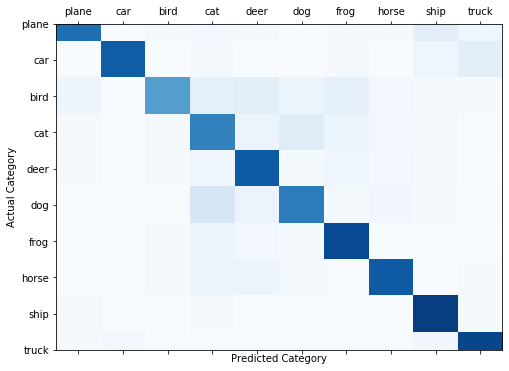

Category   - Accuracy
plane      - 76.0
car        - 82.5
bird       - 56.7
cat        - 68.1
deer       - 83.5
dog        - 70.7
frog       - 89.1
horse      - 83.5
ship       - 94.3
truck      - 91.1

Selected workers

[85 74 43 97  5 92 24 62 98 40  1 45 31 75 94]
Worker 85 : is  Honest
Worker 74 : is  Honest
Worker 43 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 5 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 24 : is  Honest
Worker 62 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 40 : is  Honest
Worker 1 : is  Honest
Worker 45 : is  Honest
Worker 31 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker

 | Global Training Round : 37 |


Worker 85 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.451035
Train Epoch: 1 [400/500	(81%)]	Loss: 0.462190
Train Epoch: 2 [0/500	(1%)]	Loss: 0.294351
Train Epoch: 2 [400/500	(81%)]	Loss: 0.384964
Train Epoch: 3 [0/500	(1%)]	Loss: 0.277981
Train Epoch: 3 [400/500	(81%)]	Loss: 0.487988
Train Epoch: 4 [0/500	(1%)]	Loss: 0.205486
Train Epoch: 4 [400/500	(81%)]	Loss: 0.318145
Train Epoch: 5 [0/500	(1%)]	Loss: 0.287484
Train Epoch: 5 [400/500	(81%)]	Loss: 0.217753

Worker 85 ends training in Global Round:37 |

Worker 74 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.540070
Train Epoch: 1 [400/500	(81%)]	Loss: 0.530171
Train Epoch: 2 [0/500	(1%)]	Loss: 0.429218
Train Epoch: 2 [400/500	(81%)]	Loss: 0.429731
Train Epoch: 3 [0/500	(1%)]	Loss: 0.215830
Train Epoch: 3 [400/500	(81%)]	Loss: 0.206203
Train Epoch: 4 [0/500	(1%)]	Loss: 0.242402
Train Epoch: 4 [400/500	(81%)]	Loss: 0.166122
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138673
Train Epoch: 5 [400/500	(81%)]	Loss: 0.162334

Worker 74 ends training in Global Round:37 |

Worker 43 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.418943
Train Epoch: 1 [400/500	(81%)]	Loss: 0.412674
Train Epoch: 2 [0/500	(1%)]	Loss: 0.214855
Train Epoch: 2 [400/500	(81%)]	Loss: 0.404621
Train Epoch: 3 [0/500	(1%)]	Loss: 0.135725
Train Epoch: 3 [400/500	(81%)]	Loss: 0.294396
Train Epoch: 4 [0/500	(1%)]	Loss: 0.102243
Train Epoch: 4 [400/500	(81%)]	Loss: 0.214559
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157707
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177504

Worker 43 ends training in Global Round:37 |

Worker 97 starts training in Global Round:37 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  37


Train Epoch: 1 [0/500	(1%)]	Loss: 0.836390
Train Epoch: 1 [400/500	(81%)]	Loss: 0.879331
Train Epoch: 2 [0/500	(1%)]	Loss: 0.482608
Train Epoch: 2 [400/500	(81%)]	Loss: 0.571569
Train Epoch: 3 [0/500	(1%)]	Loss: 0.447107
Train Epoch: 3 [400/500	(81%)]	Loss: 0.505231
Train Epoch: 4 [0/500	(1%)]	Loss: 0.384585
Train Epoch: 4 [400/500	(81%)]	Loss: 0.265779
Train Epoch: 5 [0/500	(1%)]	Loss: 0.230296
Train Epoch: 5 [400/500	(81%)]	Loss: 0.226335

Performed attacks 1
Worker 97 ends training in Global Round:37 |

Worker 5 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.558673
Train Epoch: 1 [400/500	(81%)]	Loss: 0.365651
Train Epoch: 2 [0/500	(1%)]	Loss: 0.236680
Train Epoch: 2 [400/500	(81%)]	Loss: 0.453912
Train Epoch: 3 [0/500	(1%)]	Loss: 0.221693
Train Epoch: 3 [400/500	(81%)]	Loss: 0.325526
Train Epoch: 4 [0/500	(1%)]	Loss: 0.153541
Train Epoch: 4 [400/500	(81%)]	Loss: 0.183543
Train Epoch: 5 [0/500	(1%)]	Loss: 0.198138
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149087

Worker 5 ends training in Global Round:37 |

Worker 92 starts training in Global Round:37 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  37


Train Epoch: 1 [0/500	(1%)]	Loss: 1.291560
Train Epoch: 1 [400/500	(81%)]	Loss: 0.749748
Train Epoch: 2 [0/500	(1%)]	Loss: 0.378906
Train Epoch: 2 [400/500	(81%)]	Loss: 0.470065
Train Epoch: 3 [0/500	(1%)]	Loss: 0.363126
Train Epoch: 3 [400/500	(81%)]	Loss: 0.423143
Train Epoch: 4 [0/500	(1%)]	Loss: 0.333982
Train Epoch: 4 [400/500	(81%)]	Loss: 0.302090
Train Epoch: 5 [0/500	(1%)]	Loss: 0.301935
Train Epoch: 5 [400/500	(81%)]	Loss: 0.308809

Performed attacks 2
Worker 92 ends training in Global Round:37 |

Worker 24 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.476479
Train Epoch: 1 [400/500	(81%)]	Loss: 0.503673
Train Epoch: 2 [0/500	(1%)]	Loss: 0.319054
Train Epoch: 2 [400/500	(81%)]	Loss: 0.284511
Train Epoch: 3 [0/500	(1%)]	Loss: 0.138278
Train Epoch: 3 [400/500	(81%)]	Loss: 0.380520
Train Epoch: 4 [0/500	(1%)]	Loss: 0.144643
Train Epoch: 4 [400/500	(81%)]	Loss: 0.295851
Train Epoch: 5 [0/500	(1%)]	Loss: 0.206950
Train Epoch: 5 [400/500	(81%)]	Loss: 0.291395

Worker 24 ends training in Global Round:37 |

Worker 62 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.745189
Train Epoch: 1 [400/500	(81%)]	Loss: 0.725801
Train Epoch: 2 [0/500	(1%)]	Loss: 0.343068
Train Epoch: 2 [400/500	(81%)]	Loss: 0.545990
Train Epoch: 3 [0/500	(1%)]	Loss: 0.390035
Train Epoch: 3 [400/500	(81%)]	Loss: 0.690509
Train Epoch: 4 [0/500	(1%)]	Loss: 0.245703
Train Epoch: 4 [400/500	(81%)]	Loss: 0.363060
Train Epoch: 5 [0/500	(1%)]	Loss: 0.248725
Train Epoch: 5 [400/500	(81%)]	Loss: 0.361280

Worker 62 ends training in Global Round:37 |

Worker 98 starts training in Global Round:37 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  37


Train Epoch: 1 [0/500	(1%)]	Loss: 1.217982
Train Epoch: 1 [400/500	(81%)]	Loss: 0.744391
Train Epoch: 2 [0/500	(1%)]	Loss: 0.459680
Train Epoch: 2 [400/500	(81%)]	Loss: 0.539428
Train Epoch: 3 [0/500	(1%)]	Loss: 0.369323
Train Epoch: 3 [400/500	(81%)]	Loss: 0.463421
Train Epoch: 4 [0/500	(1%)]	Loss: 0.366302
Train Epoch: 4 [400/500	(81%)]	Loss: 0.326256
Train Epoch: 5 [0/500	(1%)]	Loss: 0.284078
Train Epoch: 5 [400/500	(81%)]	Loss: 0.202180

Performed attacks 3
Worker 98 ends training in Global Round:37 |

Worker 40 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.574997
Train Epoch: 1 [400/500	(81%)]	Loss: 0.411872
Train Epoch: 2 [0/500	(1%)]	Loss: 0.230887
Train Epoch: 2 [400/500	(81%)]	Loss: 0.385252
Train Epoch: 3 [0/500	(1%)]	Loss: 0.210859
Train Epoch: 3 [400/500	(81%)]	Loss: 0.277232
Train Epoch: 4 [0/500	(1%)]	Loss: 0.239400
Train Epoch: 4 [400/500	(81%)]	Loss: 0.268380
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123377
Train Epoch: 5 [400/500	(81%)]	Loss: 0.198321

Worker 40 ends training in Global Round:37 |

Worker 1 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.303103
Train Epoch: 1 [400/500	(81%)]	Loss: 0.586672
Train Epoch: 2 [0/500	(1%)]	Loss: 0.320532
Train Epoch: 2 [400/500	(81%)]	Loss: 0.332570
Train Epoch: 3 [0/500	(1%)]	Loss: 0.264525
Train Epoch: 3 [400/500	(81%)]	Loss: 0.329791
Train Epoch: 4 [0/500	(1%)]	Loss: 0.132095
Train Epoch: 4 [400/500	(81%)]	Loss: 0.218425
Train Epoch: 5 [0/500	(1%)]	Loss: 0.121374
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242580

Worker 1 ends training in Global Round:37 |

Worker 45 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.444112
Train Epoch: 1 [400/500	(81%)]	Loss: 0.599637
Train Epoch: 2 [0/500	(1%)]	Loss: 0.490578
Train Epoch: 2 [400/500	(81%)]	Loss: 0.436544
Train Epoch: 3 [0/500	(1%)]	Loss: 0.199600
Train Epoch: 3 [400/500	(81%)]	Loss: 0.499037
Train Epoch: 4 [0/500	(1%)]	Loss: 0.259419
Train Epoch: 4 [400/500	(81%)]	Loss: 0.254080
Train Epoch: 5 [0/500	(1%)]	Loss: 0.239772
Train Epoch: 5 [400/500	(81%)]	Loss: 0.208658

Worker 45 ends training in Global Round:37 |

Worker 31 starts training in Global Round:37 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  37


Train Epoch: 1 [0/500	(1%)]	Loss: 1.337574
Train Epoch: 1 [400/500	(81%)]	Loss: 0.747414
Train Epoch: 2 [0/500	(1%)]	Loss: 0.349731
Train Epoch: 2 [400/500	(81%)]	Loss: 0.440909
Train Epoch: 3 [0/500	(1%)]	Loss: 0.303801
Train Epoch: 3 [400/500	(81%)]	Loss: 0.444083
Train Epoch: 4 [0/500	(1%)]	Loss: 0.298430
Train Epoch: 4 [400/500	(81%)]	Loss: 0.405091
Train Epoch: 5 [0/500	(1%)]	Loss: 0.200313
Train Epoch: 5 [400/500	(81%)]	Loss: 0.266183

Performed attacks 4
Worker 31 ends training in Global Round:37 |

Worker 75 starts training in Global Round:37 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  37


Train Epoch: 1 [0/500	(1%)]	Loss: 1.155532
Train Epoch: 1 [400/500	(81%)]	Loss: 0.675609
Train Epoch: 2 [0/500	(1%)]	Loss: 0.462515
Train Epoch: 2 [400/500	(81%)]	Loss: 0.485060
Train Epoch: 3 [0/500	(1%)]	Loss: 0.548978
Train Epoch: 3 [400/500	(81%)]	Loss: 0.330792
Train Epoch: 4 [0/500	(1%)]	Loss: 0.318517
Train Epoch: 4 [400/500	(81%)]	Loss: 0.347057
Train Epoch: 5 [0/500	(1%)]	Loss: 0.199993
Train Epoch: 5 [400/500	(81%)]	Loss: 0.245224

Performed attacks 5
Worker 75 ends training in Global Round:37 |

Worker 94 starts training in Global Round:37 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  37


Train Epoch: 1 [0/500	(1%)]	Loss: 1.194896
Train Epoch: 1 [400/500	(81%)]	Loss: 0.634055
Train Epoch: 2 [0/500	(1%)]	Loss: 0.441209
Train Epoch: 2 [400/500	(81%)]	Loss: 0.507819
Train Epoch: 3 [0/500	(1%)]	Loss: 0.249596
Train Epoch: 3 [400/500	(81%)]	Loss: 0.463873
Train Epoch: 4 [0/500	(1%)]	Loss: 0.238173
Train Epoch: 4 [400/500	(81%)]	Loss: 0.358299
Train Epoch: 5 [0/500	(1%)]	Loss: 0.281251
Train Epoch: 5 [400/500	(81%)]	Loss: 0.430338

Performed attacks 6
Worker 94 ends training in Global Round:37 |
Last layer biases  [array([ 0.03326117, -0.02938533, -0.01580321,  0.034591  ,  0.04091887,
       -0.01693907,  0.03832459, -0.00594584, -0.02160118, -0.04151931],
      dtype=float32), array([ 0.03448802, -0.03127541, -0.01377371,  0.03650896,  0.03769562,
       -0.01624123,  0.03963   , -0.00758286, -0.02197919, -0.0415685 ],
      dtype=float32), array([ 0.0348938 , -0.03182537, -0.0158064 ,  0.03841729,  0.03617438,
       -0.01812167,  0.03971493, -0.00641253, -0.02022952, -0.0

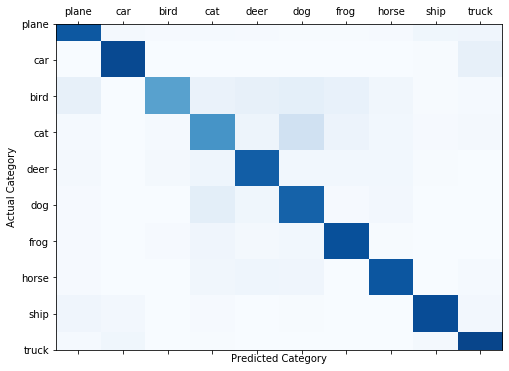

Category   - Accuracy
plane      - 84.7
car        - 90.0
bird       - 55.6
cat        - 61.2
deer       - 82.4
dog        - 80.7
frog       - 87.8
horse      - 85.2
ship       - 89.0
truck      - 91.6

Selected workers

[81 59 35  5 66 22 80 37 68 28 99 46 34 91 61]
Worker 81 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 35 : is  Honest
Worker 5 : is  Honest
Worker 66 : is  Stealthy_Attacker
Worker 22 : is  Stealthy_Attacker
Worker 80 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 68 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 46 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 61 : is  Honest

 | Global Training Round : 38 |


Worker 81 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.582397
Train Epoch: 1 [400/500	(81%)]	Loss: 0.387959
Train Epoch: 2 [0/500	(1%)]	Loss: 0.235341
Train Epoch: 2 [400/500	(81%)]	Loss: 0.451509
Train Epoch: 3 [0/500	(1%)]	Loss: 0.211023
Train Epoch: 3 [400/500	(81%)]	Loss: 0.333649
Train Epoch: 4 [0/500	(1%)]	Loss: 0.231398
Train Epoch: 4 [400/500	(81%)]	Loss: 0.281496
Train Epoch: 5 [0/500	(1%)]	Loss: 0.176074
Train Epoch: 5 [400/500	(81%)]	Loss: 0.310193

Worker 81 ends training in Global Round:38 |

Worker 59 starts training in Global Round:38 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  38


Train Epoch: 1 [0/500	(1%)]	Loss: 1.384032
Train Epoch: 1 [400/500	(81%)]	Loss: 0.604824
Train Epoch: 2 [0/500	(1%)]	Loss: 0.386283
Train Epoch: 2 [400/500	(81%)]	Loss: 0.461839
Train Epoch: 3 [0/500	(1%)]	Loss: 0.262387
Train Epoch: 3 [400/500	(81%)]	Loss: 0.573915
Train Epoch: 4 [0/500	(1%)]	Loss: 0.280676
Train Epoch: 4 [400/500	(81%)]	Loss: 0.643442
Train Epoch: 5 [0/500	(1%)]	Loss: 0.242763
Train Epoch: 5 [400/500	(81%)]	Loss: 0.313772

Performed attacks 1
Worker 59 ends training in Global Round:38 |

Worker 35 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.287016
Train Epoch: 1 [400/500	(81%)]	Loss: 0.434710
Train Epoch: 2 [0/500	(1%)]	Loss: 0.221891
Train Epoch: 2 [400/500	(81%)]	Loss: 0.365703
Train Epoch: 3 [0/500	(1%)]	Loss: 0.118536
Train Epoch: 3 [400/500	(81%)]	Loss: 0.307792
Train Epoch: 4 [0/500	(1%)]	Loss: 0.203332
Train Epoch: 4 [400/500	(81%)]	Loss: 0.136747
Train Epoch: 5 [0/500	(1%)]	Loss: 0.091329
Train Epoch: 5 [400/500	(81%)]	Loss: 0.309826

Worker 35 ends training in Global Round:38 |

Worker 5 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.254601
Train Epoch: 1 [400/500	(81%)]	Loss: 0.351156
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209112
Train Epoch: 2 [400/500	(81%)]	Loss: 0.224814
Train Epoch: 3 [0/500	(1%)]	Loss: 0.156818
Train Epoch: 3 [400/500	(81%)]	Loss: 0.339545
Train Epoch: 4 [0/500	(1%)]	Loss: 0.160399
Train Epoch: 4 [400/500	(81%)]	Loss: 0.119339
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124005
Train Epoch: 5 [400/500	(81%)]	Loss: 0.200681

Worker 5 ends training in Global Round:38 |

Worker 66 starts training in Global Round:38 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  38


Train Epoch: 1 [0/500	(1%)]	Loss: 1.084723
Train Epoch: 1 [400/500	(81%)]	Loss: 0.621558
Train Epoch: 2 [0/500	(1%)]	Loss: 0.348213
Train Epoch: 2 [400/500	(81%)]	Loss: 0.643661
Train Epoch: 3 [0/500	(1%)]	Loss: 0.454481
Train Epoch: 3 [400/500	(81%)]	Loss: 0.426849
Train Epoch: 4 [0/500	(1%)]	Loss: 0.279287
Train Epoch: 4 [400/500	(81%)]	Loss: 0.523389
Train Epoch: 5 [0/500	(1%)]	Loss: 0.221109
Train Epoch: 5 [400/500	(81%)]	Loss: 0.250182

Performed attacks 2
Worker 66 ends training in Global Round:38 |

Worker 22 starts training in Global Round:38 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  38


Train Epoch: 1 [0/500	(1%)]	Loss: 1.239421
Train Epoch: 1 [400/500	(81%)]	Loss: 0.858264
Train Epoch: 2 [0/500	(1%)]	Loss: 0.284869
Train Epoch: 2 [400/500	(81%)]	Loss: 0.687404
Train Epoch: 3 [0/500	(1%)]	Loss: 0.360894
Train Epoch: 3 [400/500	(81%)]	Loss: 0.506424
Train Epoch: 4 [0/500	(1%)]	Loss: 0.236568
Train Epoch: 4 [400/500	(81%)]	Loss: 0.431042
Train Epoch: 5 [0/500	(1%)]	Loss: 0.223573
Train Epoch: 5 [400/500	(81%)]	Loss: 0.432354

Performed attacks 3
Worker 22 ends training in Global Round:38 |

Worker 80 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.615114
Train Epoch: 1 [400/500	(81%)]	Loss: 0.429052
Train Epoch: 2 [0/500	(1%)]	Loss: 0.211101
Train Epoch: 2 [400/500	(81%)]	Loss: 0.552747
Train Epoch: 3 [0/500	(1%)]	Loss: 0.134683
Train Epoch: 3 [400/500	(81%)]	Loss: 0.370447
Train Epoch: 4 [0/500	(1%)]	Loss: 0.381314
Train Epoch: 4 [400/500	(81%)]	Loss: 0.144047
Train Epoch: 5 [0/500	(1%)]	Loss: 0.220288
Train Epoch: 5 [400/500	(81%)]	Loss: 0.265508

Worker 80 ends training in Global Round:38 |

Worker 37 starts training in Global Round:38 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  38


Train Epoch: 1 [0/500	(1%)]	Loss: 1.138189
Train Epoch: 1 [400/500	(81%)]	Loss: 0.572045
Train Epoch: 2 [0/500	(1%)]	Loss: 0.269914
Train Epoch: 2 [400/500	(81%)]	Loss: 0.454089
Train Epoch: 3 [0/500	(1%)]	Loss: 0.277380
Train Epoch: 3 [400/500	(81%)]	Loss: 0.312026
Train Epoch: 4 [0/500	(1%)]	Loss: 0.207022
Train Epoch: 4 [400/500	(81%)]	Loss: 0.273904
Train Epoch: 5 [0/500	(1%)]	Loss: 0.211697
Train Epoch: 5 [400/500	(81%)]	Loss: 0.258215

Performed attacks 4
Worker 37 ends training in Global Round:38 |

Worker 68 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.550709
Train Epoch: 1 [400/500	(81%)]	Loss: 0.572882
Train Epoch: 2 [0/500	(1%)]	Loss: 0.314414
Train Epoch: 2 [400/500	(81%)]	Loss: 0.568213
Train Epoch: 3 [0/500	(1%)]	Loss: 0.297391
Train Epoch: 3 [400/500	(81%)]	Loss: 0.320516
Train Epoch: 4 [0/500	(1%)]	Loss: 0.182013
Train Epoch: 4 [400/500	(81%)]	Loss: 0.146829
Train Epoch: 5 [0/500	(1%)]	Loss: 0.287999
Train Epoch: 5 [400/500	(81%)]	Loss: 0.230403

Worker 68 ends training in Global Round:38 |

Worker 28 starts training in Global Round:38 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  38


Train Epoch: 1 [0/500	(1%)]	Loss: 1.409607
Train Epoch: 1 [400/500	(81%)]	Loss: 0.602680
Train Epoch: 2 [0/500	(1%)]	Loss: 0.500802
Train Epoch: 2 [400/500	(81%)]	Loss: 0.408271
Train Epoch: 3 [0/500	(1%)]	Loss: 0.254237
Train Epoch: 3 [400/500	(81%)]	Loss: 0.360617
Train Epoch: 4 [0/500	(1%)]	Loss: 0.221762
Train Epoch: 4 [400/500	(81%)]	Loss: 0.142998
Train Epoch: 5 [0/500	(1%)]	Loss: 0.169559
Train Epoch: 5 [400/500	(81%)]	Loss: 0.157449

Performed attacks 5
Worker 28 ends training in Global Round:38 |

Worker 99 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.552448
Train Epoch: 1 [400/500	(81%)]	Loss: 0.614630
Train Epoch: 2 [0/500	(1%)]	Loss: 0.286491
Train Epoch: 2 [400/500	(81%)]	Loss: 0.389767
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261882
Train Epoch: 3 [400/500	(81%)]	Loss: 0.173533
Train Epoch: 4 [0/500	(1%)]	Loss: 0.192092
Train Epoch: 4 [400/500	(81%)]	Loss: 0.200955
Train Epoch: 5 [0/500	(1%)]	Loss: 0.113367
Train Epoch: 5 [400/500	(81%)]	Loss: 0.291412

Worker 99 ends training in Global Round:38 |

Worker 46 starts training in Global Round:38 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  38


Train Epoch: 1 [0/500	(1%)]	Loss: 0.883195
Train Epoch: 1 [400/500	(81%)]	Loss: 0.813654
Train Epoch: 2 [0/500	(1%)]	Loss: 0.192422
Train Epoch: 2 [400/500	(81%)]	Loss: 0.522038
Train Epoch: 3 [0/500	(1%)]	Loss: 0.384273
Train Epoch: 3 [400/500	(81%)]	Loss: 0.386180
Train Epoch: 4 [0/500	(1%)]	Loss: 0.234782
Train Epoch: 4 [400/500	(81%)]	Loss: 0.420374
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175310
Train Epoch: 5 [400/500	(81%)]	Loss: 0.339553

Performed attacks 6
Worker 46 ends training in Global Round:38 |

Worker 34 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.663395
Train Epoch: 1 [400/500	(81%)]	Loss: 0.655667
Train Epoch: 2 [0/500	(1%)]	Loss: 0.348170
Train Epoch: 2 [400/500	(81%)]	Loss: 0.369606
Train Epoch: 3 [0/500	(1%)]	Loss: 0.260994
Train Epoch: 3 [400/500	(81%)]	Loss: 0.551464
Train Epoch: 4 [0/500	(1%)]	Loss: 0.255101
Train Epoch: 4 [400/500	(81%)]	Loss: 0.346480
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148792
Train Epoch: 5 [400/500	(81%)]	Loss: 0.130766

Worker 34 ends training in Global Round:38 |

Worker 91 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.434481
Train Epoch: 1 [400/500	(81%)]	Loss: 0.553719
Train Epoch: 2 [0/500	(1%)]	Loss: 0.166330
Train Epoch: 2 [400/500	(81%)]	Loss: 0.351277
Train Epoch: 3 [0/500	(1%)]	Loss: 0.215507
Train Epoch: 3 [400/500	(81%)]	Loss: 0.273141
Train Epoch: 4 [0/500	(1%)]	Loss: 0.209631
Train Epoch: 4 [400/500	(81%)]	Loss: 0.240197
Train Epoch: 5 [0/500	(1%)]	Loss: 0.146865
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171661

Worker 91 ends training in Global Round:38 |

Worker 61 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.350019
Train Epoch: 1 [400/500	(81%)]	Loss: 0.547573
Train Epoch: 2 [0/500	(1%)]	Loss: 0.343479
Train Epoch: 2 [400/500	(81%)]	Loss: 0.329935
Train Epoch: 3 [0/500	(1%)]	Loss: 0.251359
Train Epoch: 3 [400/500	(81%)]	Loss: 0.248211
Train Epoch: 4 [0/500	(1%)]	Loss: 0.227746
Train Epoch: 4 [400/500	(81%)]	Loss: 0.195298
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172523
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177617

Worker 61 ends training in Global Round:38 |
Last layer biases  [array([ 0.03489729, -0.03296669, -0.01669839,  0.03516555,  0.03932796,
       -0.01944381,  0.04014051, -0.00244078, -0.02136949, -0.04071043],
      dtype=float32), array([ 0.03568327, -0.03076422, -0.01396803,  0.03830419,  0.04644865,
       -0.01510116,  0.04094741, -0.02762844, -0.02055119, -0.03746878],
      dtype=float32), array([ 0.03383792, -0.03188275, -0.01537884,  0.0365839 ,  0.03788959,
       -0.01959298,  0.04157465, -0.00722506, -0.02115441, -0.03875028],
      dtyp

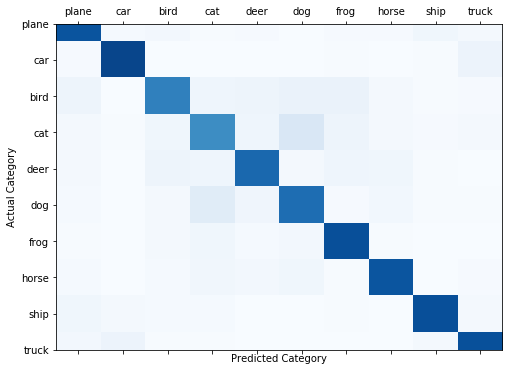

Category   - Accuracy
plane      - 86.3
car        - 91.7
bird       - 68.9
cat        - 64.2
deer       - 78.5
dog        - 76.5
frog       - 87.9
horse      - 85.8
ship       - 88.2
truck      - 87.7

Selected workers

[75 64 11 47  3 12 94 58 41 15 69 92 30 10 50]
Worker 75 : is  Stealthy_Attacker
Worker 64 : is  Honest
Worker 11 : is  Honest
Worker 47 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker
Worker 58 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 15 : is  Honest
Worker 69 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 10 : is  Honest
Worker 50 : is  Stealthy_Attacker

 | Global Training Round : 39 |


Worker 75 starts training in Global Round:39 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  39


Train Epoch: 1 [0/500	(1%)]	Loss: 1.303255
Train Epoch: 1 [400/500	(81%)]	Loss: 0.749379
Train Epoch: 2 [0/500	(1%)]	Loss: 0.505591
Train Epoch: 2 [400/500	(81%)]	Loss: 0.504798
Train Epoch: 3 [0/500	(1%)]	Loss: 0.431578
Train Epoch: 3 [400/500	(81%)]	Loss: 0.413290
Train Epoch: 4 [0/500	(1%)]	Loss: 0.271854
Train Epoch: 4 [400/500	(81%)]	Loss: 0.247963
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114135
Train Epoch: 5 [400/500	(81%)]	Loss: 0.138113

Performed attacks 1
Worker 75 ends training in Global Round:39 |

Worker 64 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.489019
Train Epoch: 1 [400/500	(81%)]	Loss: 0.379238
Train Epoch: 2 [0/500	(1%)]	Loss: 0.198714
Train Epoch: 2 [400/500	(81%)]	Loss: 0.386062
Train Epoch: 3 [0/500	(1%)]	Loss: 0.197046
Train Epoch: 3 [400/500	(81%)]	Loss: 0.211542
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143930
Train Epoch: 4 [400/500	(81%)]	Loss: 0.341241
Train Epoch: 5 [0/500	(1%)]	Loss: 0.177978
Train Epoch: 5 [400/500	(81%)]	Loss: 0.144960

Worker 64 ends training in Global Round:39 |

Worker 11 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.603753
Train Epoch: 1 [400/500	(81%)]	Loss: 0.471838
Train Epoch: 2 [0/500	(1%)]	Loss: 0.298912
Train Epoch: 2 [400/500	(81%)]	Loss: 0.349721
Train Epoch: 3 [0/500	(1%)]	Loss: 0.171477
Train Epoch: 3 [400/500	(81%)]	Loss: 0.322296
Train Epoch: 4 [0/500	(1%)]	Loss: 0.233929
Train Epoch: 4 [400/500	(81%)]	Loss: 0.185512
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160518
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199019

Worker 11 ends training in Global Round:39 |

Worker 47 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.767884
Train Epoch: 1 [400/500	(81%)]	Loss: 0.468297
Train Epoch: 2 [0/500	(1%)]	Loss: 0.222405
Train Epoch: 2 [400/500	(81%)]	Loss: 0.491079
Train Epoch: 3 [0/500	(1%)]	Loss: 0.225479
Train Epoch: 3 [400/500	(81%)]	Loss: 0.472281
Train Epoch: 4 [0/500	(1%)]	Loss: 0.162029
Train Epoch: 4 [400/500	(81%)]	Loss: 0.132475
Train Epoch: 5 [0/500	(1%)]	Loss: 0.283001
Train Epoch: 5 [400/500	(81%)]	Loss: 0.233370

Worker 47 ends training in Global Round:39 |

Worker 3 starts training in Global Round:39 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  39


Train Epoch: 1 [0/500	(1%)]	Loss: 1.159444
Train Epoch: 1 [400/500	(81%)]	Loss: 0.492983
Train Epoch: 2 [0/500	(1%)]	Loss: 0.589301
Train Epoch: 2 [400/500	(81%)]	Loss: 0.526358
Train Epoch: 3 [0/500	(1%)]	Loss: 0.221039
Train Epoch: 3 [400/500	(81%)]	Loss: 0.668340
Train Epoch: 4 [0/500	(1%)]	Loss: 0.290300
Train Epoch: 4 [400/500	(81%)]	Loss: 0.236319
Train Epoch: 5 [0/500	(1%)]	Loss: 0.249215
Train Epoch: 5 [400/500	(81%)]	Loss: 0.316991

Performed attacks 2
Worker 3 ends training in Global Round:39 |

Worker 12 starts training in Global Round:39 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  39


Train Epoch: 1 [0/500	(1%)]	Loss: 1.334728
Train Epoch: 1 [400/500	(81%)]	Loss: 0.512956
Train Epoch: 2 [0/500	(1%)]	Loss: 0.255505
Train Epoch: 2 [400/500	(81%)]	Loss: 0.314747
Train Epoch: 3 [0/500	(1%)]	Loss: 0.321612
Train Epoch: 3 [400/500	(81%)]	Loss: 0.332815
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170561
Train Epoch: 4 [400/500	(81%)]	Loss: 0.252412
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124385
Train Epoch: 5 [400/500	(81%)]	Loss: 0.273887

Performed attacks 3
Worker 12 ends training in Global Round:39 |

Worker 94 starts training in Global Round:39 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  39


Train Epoch: 1 [0/500	(1%)]	Loss: 1.403161
Train Epoch: 1 [400/500	(81%)]	Loss: 0.622183
Train Epoch: 2 [0/500	(1%)]	Loss: 0.363527
Train Epoch: 2 [400/500	(81%)]	Loss: 0.455482
Train Epoch: 3 [0/500	(1%)]	Loss: 0.283262
Train Epoch: 3 [400/500	(81%)]	Loss: 0.459194
Train Epoch: 4 [0/500	(1%)]	Loss: 0.353885
Train Epoch: 4 [400/500	(81%)]	Loss: 0.393462
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160163
Train Epoch: 5 [400/500	(81%)]	Loss: 0.274594

Performed attacks 4
Worker 94 ends training in Global Round:39 |

Worker 58 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.531754
Train Epoch: 1 [400/500	(81%)]	Loss: 0.576666
Train Epoch: 2 [0/500	(1%)]	Loss: 0.288615
Train Epoch: 2 [400/500	(81%)]	Loss: 0.600802
Train Epoch: 3 [0/500	(1%)]	Loss: 0.347287
Train Epoch: 3 [400/500	(81%)]	Loss: 0.411137
Train Epoch: 4 [0/500	(1%)]	Loss: 0.241548
Train Epoch: 4 [400/500	(81%)]	Loss: 0.305914
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172539
Train Epoch: 5 [400/500	(81%)]	Loss: 0.268118

Worker 58 ends training in Global Round:39 |

Worker 41 starts training in Global Round:39 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  39


Train Epoch: 1 [0/500	(1%)]	Loss: 1.368378
Train Epoch: 1 [400/500	(81%)]	Loss: 0.793089
Train Epoch: 2 [0/500	(1%)]	Loss: 0.600618
Train Epoch: 2 [400/500	(81%)]	Loss: 0.790448
Train Epoch: 3 [0/500	(1%)]	Loss: 0.447138
Train Epoch: 3 [400/500	(81%)]	Loss: 0.343056
Train Epoch: 4 [0/500	(1%)]	Loss: 0.277732
Train Epoch: 4 [400/500	(81%)]	Loss: 0.491372
Train Epoch: 5 [0/500	(1%)]	Loss: 0.214564
Train Epoch: 5 [400/500	(81%)]	Loss: 0.294200

Performed attacks 5
Worker 41 ends training in Global Round:39 |

Worker 15 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.835619
Train Epoch: 1 [400/500	(81%)]	Loss: 0.617835
Train Epoch: 2 [0/500	(1%)]	Loss: 0.451121
Train Epoch: 2 [400/500	(81%)]	Loss: 0.271740
Train Epoch: 3 [0/500	(1%)]	Loss: 0.348712
Train Epoch: 3 [400/500	(81%)]	Loss: 0.329827
Train Epoch: 4 [0/500	(1%)]	Loss: 0.214358
Train Epoch: 4 [400/500	(81%)]	Loss: 0.124247
Train Epoch: 5 [0/500	(1%)]	Loss: 0.187465
Train Epoch: 5 [400/500	(81%)]	Loss: 0.207547

Worker 15 ends training in Global Round:39 |

Worker 69 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.725099
Train Epoch: 1 [400/500	(81%)]	Loss: 0.677068
Train Epoch: 2 [0/500	(1%)]	Loss: 0.428663
Train Epoch: 2 [400/500	(81%)]	Loss: 0.568217
Train Epoch: 3 [0/500	(1%)]	Loss: 0.341226
Train Epoch: 3 [400/500	(81%)]	Loss: 0.388678
Train Epoch: 4 [0/500	(1%)]	Loss: 0.292175
Train Epoch: 4 [400/500	(81%)]	Loss: 0.383799
Train Epoch: 5 [0/500	(1%)]	Loss: 0.183832
Train Epoch: 5 [400/500	(81%)]	Loss: 0.289832

Worker 69 ends training in Global Round:39 |

Worker 92 starts training in Global Round:39 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  39


Train Epoch: 1 [0/500	(1%)]	Loss: 1.283635
Train Epoch: 1 [400/500	(81%)]	Loss: 0.642922
Train Epoch: 2 [0/500	(1%)]	Loss: 0.319603
Train Epoch: 2 [400/500	(81%)]	Loss: 0.573254
Train Epoch: 3 [0/500	(1%)]	Loss: 0.256263
Train Epoch: 3 [400/500	(81%)]	Loss: 0.396071
Train Epoch: 4 [0/500	(1%)]	Loss: 0.272172
Train Epoch: 4 [400/500	(81%)]	Loss: 0.308057
Train Epoch: 5 [0/500	(1%)]	Loss: 0.164219
Train Epoch: 5 [400/500	(81%)]	Loss: 0.305752

Performed attacks 6
Worker 92 ends training in Global Round:39 |

Worker 30 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.362879
Train Epoch: 1 [400/500	(81%)]	Loss: 0.443248
Train Epoch: 2 [0/500	(1%)]	Loss: 0.271420
Train Epoch: 2 [400/500	(81%)]	Loss: 0.460600
Train Epoch: 3 [0/500	(1%)]	Loss: 0.204825
Train Epoch: 3 [400/500	(81%)]	Loss: 0.348233
Train Epoch: 4 [0/500	(1%)]	Loss: 0.173128
Train Epoch: 4 [400/500	(81%)]	Loss: 0.239207
Train Epoch: 5 [0/500	(1%)]	Loss: 0.233303
Train Epoch: 5 [400/500	(81%)]	Loss: 0.295552

Worker 30 ends training in Global Round:39 |

Worker 10 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.668194
Train Epoch: 1 [400/500	(81%)]	Loss: 0.569637
Train Epoch: 2 [0/500	(1%)]	Loss: 0.456680
Train Epoch: 2 [400/500	(81%)]	Loss: 0.361162
Train Epoch: 3 [0/500	(1%)]	Loss: 0.223028
Train Epoch: 3 [400/500	(81%)]	Loss: 0.455067
Train Epoch: 4 [0/500	(1%)]	Loss: 0.162953
Train Epoch: 4 [400/500	(81%)]	Loss: 0.274169
Train Epoch: 5 [0/500	(1%)]	Loss: 0.142110
Train Epoch: 5 [400/500	(81%)]	Loss: 0.221747

Worker 10 ends training in Global Round:39 |

Worker 50 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.682238
Train Epoch: 1 [400/500	(81%)]	Loss: 0.822697
Train Epoch: 2 [0/500	(1%)]	Loss: 0.485159
Train Epoch: 2 [400/500	(81%)]	Loss: 0.735149
Train Epoch: 3 [0/500	(1%)]	Loss: 0.275546
Train Epoch: 3 [400/500	(81%)]	Loss: 0.438030
Train Epoch: 4 [0/500	(1%)]	Loss: 0.269088
Train Epoch: 4 [400/500	(81%)]	Loss: 0.376923
Train Epoch: 5 [0/500	(1%)]	Loss: 0.284350
Train Epoch: 5 [400/500	(81%)]	Loss: 0.235197

Worker 50 ends training in Global Round:39 |
Last layer biases  [array([ 0.03815383, -0.02771264, -0.01316427,  0.0393592 ,  0.04477136,
       -0.01418872,  0.04001981, -0.03106712, -0.01997859, -0.04029114],
      dtype=float32), array([ 0.03403072, -0.03247345, -0.01543339,  0.03673843,  0.03743489,
       -0.01602375,  0.04037996, -0.00729097, -0.02004329, -0.04141744],
      dtype=float32), array([ 0.0361807 , -0.03207552, -0.01575766,  0.03679201,  0.03864889,
       -0.01948659,  0.03801394, -0.00704359, -0.0201273 , -0.0392431 ],
      dtyp

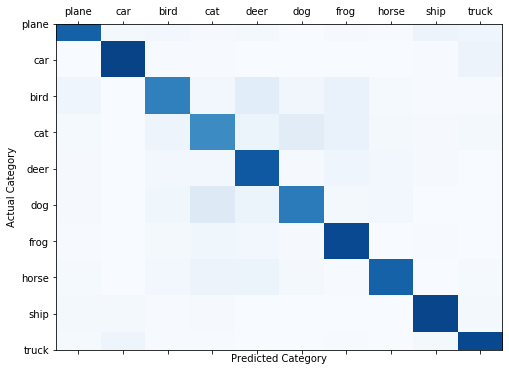

Category   - Accuracy
plane      - 81.2
car        - 92.5
bird       - 68.8
cat        - 64.5
deer       - 84.1
dog        - 70.9
frog       - 90.1
horse      - 80.5
ship       - 91.7
truck      - 90.4

Selected workers

[42 74 96 19 28 47 57 13 83 45 90 32 72 93 48]
Worker 42 : is  Honest
Worker 74 : is  Honest
Worker 96 : is  Honest
Worker 19 : is  Stealthy_Attacker
Worker 28 : is  Stealthy_Attacker
Worker 47 : is  Honest
Worker 57 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 83 : is  Honest
Worker 45 : is  Honest
Worker 90 : is  Honest
Worker 32 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 93 : is  Honest
Worker 48 : is  Honest

 | Global Training Round : 40 |


Worker 42 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.581704
Train Epoch: 1 [400/500	(81%)]	Loss: 0.594655
Train Epoch: 2 [0/500	(1%)]	Loss: 0.207580
Train Epoch: 2 [400/500	(81%)]	Loss: 0.233248
Train Epoch: 3 [0/500	(1%)]	Loss: 0.307122
Train Epoch: 3 [400/500	(81%)]	Loss: 0.272715
Train Epoch: 4 [0/500	(1%)]	Loss: 0.303776
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182719
Train Epoch: 5 [0/500	(1%)]	Loss: 0.248272
Train Epoch: 5 [400/500	(81%)]	Loss: 0.100362

Worker 42 ends training in Global Round:40 |

Worker 74 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.434558
Train Epoch: 1 [400/500	(81%)]	Loss: 0.688322
Train Epoch: 2 [0/500	(1%)]	Loss: 0.252769
Train Epoch: 2 [400/500	(81%)]	Loss: 0.418885
Train Epoch: 3 [0/500	(1%)]	Loss: 0.318659
Train Epoch: 3 [400/500	(81%)]	Loss: 0.308452
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170829
Train Epoch: 4 [400/500	(81%)]	Loss: 0.350595
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138273
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191041

Worker 74 ends training in Global Round:40 |

Worker 96 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.588038
Train Epoch: 1 [400/500	(81%)]	Loss: 0.523410
Train Epoch: 2 [0/500	(1%)]	Loss: 0.253615
Train Epoch: 2 [400/500	(81%)]	Loss: 0.404618
Train Epoch: 3 [0/500	(1%)]	Loss: 0.232649
Train Epoch: 3 [400/500	(81%)]	Loss: 0.252250
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140638
Train Epoch: 4 [400/500	(81%)]	Loss: 0.168449
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082588
Train Epoch: 5 [400/500	(81%)]	Loss: 0.307519

Worker 96 ends training in Global Round:40 |

Worker 19 starts training in Global Round:40 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  40


Train Epoch: 1 [0/500	(1%)]	Loss: 1.264932
Train Epoch: 1 [400/500	(81%)]	Loss: 0.746078
Train Epoch: 2 [0/500	(1%)]	Loss: 0.393380
Train Epoch: 2 [400/500	(81%)]	Loss: 0.495089
Train Epoch: 3 [0/500	(1%)]	Loss: 0.203932
Train Epoch: 3 [400/500	(81%)]	Loss: 0.259124
Train Epoch: 4 [0/500	(1%)]	Loss: 0.172976
Train Epoch: 4 [400/500	(81%)]	Loss: 0.129864
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160494
Train Epoch: 5 [400/500	(81%)]	Loss: 0.309979

Performed attacks 1
Worker 19 ends training in Global Round:40 |

Worker 28 starts training in Global Round:40 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  40


Train Epoch: 1 [0/500	(1%)]	Loss: 1.404896
Train Epoch: 1 [400/500	(81%)]	Loss: 0.777638
Train Epoch: 2 [0/500	(1%)]	Loss: 0.437396
Train Epoch: 2 [400/500	(81%)]	Loss: 0.473909
Train Epoch: 3 [0/500	(1%)]	Loss: 0.491965
Train Epoch: 3 [400/500	(81%)]	Loss: 0.494377
Train Epoch: 4 [0/500	(1%)]	Loss: 0.269027
Train Epoch: 4 [400/500	(81%)]	Loss: 0.197494
Train Epoch: 5 [0/500	(1%)]	Loss: 0.293725
Train Epoch: 5 [400/500	(81%)]	Loss: 0.159514

Performed attacks 2
Worker 28 ends training in Global Round:40 |

Worker 47 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.374905
Train Epoch: 1 [400/500	(81%)]	Loss: 0.471801
Train Epoch: 2 [0/500	(1%)]	Loss: 0.280656
Train Epoch: 2 [400/500	(81%)]	Loss: 0.383805
Train Epoch: 3 [0/500	(1%)]	Loss: 0.229096
Train Epoch: 3 [400/500	(81%)]	Loss: 0.272203
Train Epoch: 4 [0/500	(1%)]	Loss: 0.157114
Train Epoch: 4 [400/500	(81%)]	Loss: 0.268353
Train Epoch: 5 [0/500	(1%)]	Loss: 0.104447
Train Epoch: 5 [400/500	(81%)]	Loss: 0.124272

Worker 47 ends training in Global Round:40 |

Worker 57 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.556814
Train Epoch: 1 [400/500	(81%)]	Loss: 0.357651
Train Epoch: 2 [0/500	(1%)]	Loss: 0.488531
Train Epoch: 2 [400/500	(81%)]	Loss: 0.344527
Train Epoch: 3 [0/500	(1%)]	Loss: 0.181299
Train Epoch: 3 [400/500	(81%)]	Loss: 0.197580
Train Epoch: 4 [0/500	(1%)]	Loss: 0.208994
Train Epoch: 4 [400/500	(81%)]	Loss: 0.166920
Train Epoch: 5 [0/500	(1%)]	Loss: 0.187570
Train Epoch: 5 [400/500	(81%)]	Loss: 0.331709

Worker 57 ends training in Global Round:40 |

Worker 13 starts training in Global Round:40 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  40


Train Epoch: 1 [0/500	(1%)]	Loss: 0.970440
Train Epoch: 1 [400/500	(81%)]	Loss: 0.949969
Train Epoch: 2 [0/500	(1%)]	Loss: 0.310779
Train Epoch: 2 [400/500	(81%)]	Loss: 0.413607
Train Epoch: 3 [0/500	(1%)]	Loss: 0.323961
Train Epoch: 3 [400/500	(81%)]	Loss: 0.354824
Train Epoch: 4 [0/500	(1%)]	Loss: 0.282317
Train Epoch: 4 [400/500	(81%)]	Loss: 0.252810
Train Epoch: 5 [0/500	(1%)]	Loss: 0.131206
Train Epoch: 5 [400/500	(81%)]	Loss: 0.221094

Performed attacks 3
Worker 13 ends training in Global Round:40 |

Worker 83 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.593890
Train Epoch: 1 [400/500	(81%)]	Loss: 0.732643
Train Epoch: 2 [0/500	(1%)]	Loss: 0.301933
Train Epoch: 2 [400/500	(81%)]	Loss: 0.484195
Train Epoch: 3 [0/500	(1%)]	Loss: 0.229403
Train Epoch: 3 [400/500	(81%)]	Loss: 0.226027
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156411
Train Epoch: 4 [400/500	(81%)]	Loss: 0.322638
Train Epoch: 5 [0/500	(1%)]	Loss: 0.141703
Train Epoch: 5 [400/500	(81%)]	Loss: 0.289642

Worker 83 ends training in Global Round:40 |

Worker 45 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.472381
Train Epoch: 1 [400/500	(81%)]	Loss: 0.412110
Train Epoch: 2 [0/500	(1%)]	Loss: 0.226055
Train Epoch: 2 [400/500	(81%)]	Loss: 0.355465
Train Epoch: 3 [0/500	(1%)]	Loss: 0.197101
Train Epoch: 3 [400/500	(81%)]	Loss: 0.284894
Train Epoch: 4 [0/500	(1%)]	Loss: 0.232885
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192896
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081939
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253143

Worker 45 ends training in Global Round:40 |

Worker 90 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.409743
Train Epoch: 1 [400/500	(81%)]	Loss: 0.454157
Train Epoch: 2 [0/500	(1%)]	Loss: 0.202080
Train Epoch: 2 [400/500	(81%)]	Loss: 0.387989
Train Epoch: 3 [0/500	(1%)]	Loss: 0.363087
Train Epoch: 3 [400/500	(81%)]	Loss: 0.350246
Train Epoch: 4 [0/500	(1%)]	Loss: 0.162043
Train Epoch: 4 [400/500	(81%)]	Loss: 0.180437
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172155
Train Epoch: 5 [400/500	(81%)]	Loss: 0.245123

Worker 90 ends training in Global Round:40 |

Worker 32 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.420043
Train Epoch: 1 [400/500	(81%)]	Loss: 0.614006
Train Epoch: 2 [0/500	(1%)]	Loss: 0.367775
Train Epoch: 2 [400/500	(81%)]	Loss: 0.323749
Train Epoch: 3 [0/500	(1%)]	Loss: 0.306604
Train Epoch: 3 [400/500	(81%)]	Loss: 0.341516
Train Epoch: 4 [0/500	(1%)]	Loss: 0.274095
Train Epoch: 4 [400/500	(81%)]	Loss: 0.272814
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123607
Train Epoch: 5 [400/500	(81%)]	Loss: 0.264520

Worker 32 ends training in Global Round:40 |

Worker 72 starts training in Global Round:40 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  40


Train Epoch: 1 [0/500	(1%)]	Loss: 1.451455
Train Epoch: 1 [400/500	(81%)]	Loss: 0.723121
Train Epoch: 2 [0/500	(1%)]	Loss: 0.293366
Train Epoch: 2 [400/500	(81%)]	Loss: 0.411262
Train Epoch: 3 [0/500	(1%)]	Loss: 0.265264
Train Epoch: 3 [400/500	(81%)]	Loss: 0.257720
Train Epoch: 4 [0/500	(1%)]	Loss: 0.177241
Train Epoch: 4 [400/500	(81%)]	Loss: 0.334404
Train Epoch: 5 [0/500	(1%)]	Loss: 0.188932
Train Epoch: 5 [400/500	(81%)]	Loss: 0.209276

Performed attacks 4
Worker 72 ends training in Global Round:40 |

Worker 93 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.410359
Train Epoch: 1 [400/500	(81%)]	Loss: 0.543223
Train Epoch: 2 [0/500	(1%)]	Loss: 0.382985
Train Epoch: 2 [400/500	(81%)]	Loss: 0.384446
Train Epoch: 3 [0/500	(1%)]	Loss: 0.210296
Train Epoch: 3 [400/500	(81%)]	Loss: 0.311615
Train Epoch: 4 [0/500	(1%)]	Loss: 0.172585
Train Epoch: 4 [400/500	(81%)]	Loss: 0.179737
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115387
Train Epoch: 5 [400/500	(81%)]	Loss: 0.154598

Worker 93 ends training in Global Round:40 |

Worker 48 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.568400
Train Epoch: 1 [400/500	(81%)]	Loss: 0.516119
Train Epoch: 2 [0/500	(1%)]	Loss: 0.242367
Train Epoch: 2 [400/500	(81%)]	Loss: 0.508796
Train Epoch: 3 [0/500	(1%)]	Loss: 0.178484
Train Epoch: 3 [400/500	(81%)]	Loss: 0.278715
Train Epoch: 4 [0/500	(1%)]	Loss: 0.163149
Train Epoch: 4 [400/500	(81%)]	Loss: 0.274253
Train Epoch: 5 [0/500	(1%)]	Loss: 0.223426
Train Epoch: 5 [400/500	(81%)]	Loss: 0.126188

Worker 48 ends training in Global Round:40 |
Last layer biases  [array([ 0.03178358, -0.03168232, -0.01362329,  0.03716927,  0.03754778,
       -0.02047169,  0.03887564, -0.00506385, -0.01907469, -0.03955868],
      dtype=float32), array([ 0.03442644, -0.0302363 , -0.01424702,  0.03614485,  0.03724908,
       -0.01661126,  0.03976462, -0.0073322 , -0.02212649, -0.04112996],
      dtype=float32), array([ 0.03455432, -0.0311416 , -0.01877259,  0.03942237,  0.0373462 ,
       -0.01852123,  0.03990003, -0.00617439, -0.02151322, -0.03919816],
      dtyp

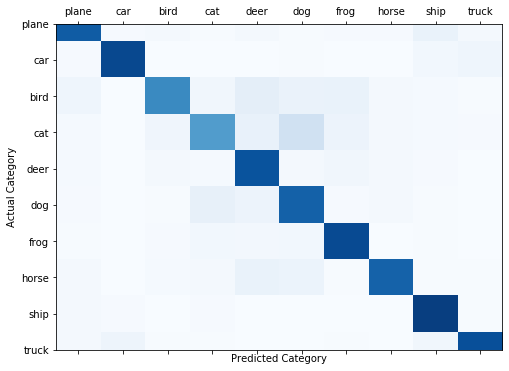

Category   - Accuracy
plane      - 83.2
car        - 90.6
bird       - 65.5
cat        - 57.7
deer       - 86.7
dog        - 81.2
frog       - 89.6
horse      - 80.5
ship       - 94.5
truck      - 88.0

Selected workers

[ 79   3  48  47  54  19  94  95  26  82  57  75  99  90 100]
Worker 79 : is  Stealthy_Attacker
Worker 3 : is  Stealthy_Attacker
Worker 48 : is  Honest
Worker 47 : is  Honest
Worker 54 : is  Honest
Worker 19 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker
Worker 95 : is  Honest
Worker 26 : is  Honest
Worker 82 : is  Honest
Worker 57 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 90 : is  Honest
Worker 100 : is  Honest

 | Global Training Round : 41 |


Worker 79 starts training in Global Round:41 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  41


Train Epoch: 1 [0/500	(1%)]	Loss: 1.133457
Train Epoch: 1 [400/500	(81%)]	Loss: 0.910086
Train Epoch: 2 [0/500	(1%)]	Loss: 0.514807
Train Epoch: 2 [400/500	(81%)]	Loss: 0.805013
Train Epoch: 3 [0/500	(1%)]	Loss: 0.437386
Train Epoch: 3 [400/500	(81%)]	Loss: 0.340032
Train Epoch: 4 [0/500	(1%)]	Loss: 0.247384
Train Epoch: 4 [400/500	(81%)]	Loss: 0.430589
Train Epoch: 5 [0/500	(1%)]	Loss: 0.194478
Train Epoch: 5 [400/500	(81%)]	Loss: 0.286656

Performed attacks 1
Worker 79 ends training in Global Round:41 |

Worker 3 starts training in Global Round:41 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  41


Train Epoch: 1 [0/500	(1%)]	Loss: 1.077706
Train Epoch: 1 [400/500	(81%)]	Loss: 0.833566
Train Epoch: 2 [0/500	(1%)]	Loss: 0.474501
Train Epoch: 2 [400/500	(81%)]	Loss: 0.483221
Train Epoch: 3 [0/500	(1%)]	Loss: 0.313240
Train Epoch: 3 [400/500	(81%)]	Loss: 0.456840
Train Epoch: 4 [0/500	(1%)]	Loss: 0.374899
Train Epoch: 4 [400/500	(81%)]	Loss: 0.383839
Train Epoch: 5 [0/500	(1%)]	Loss: 0.262754
Train Epoch: 5 [400/500	(81%)]	Loss: 0.415951

Performed attacks 2
Worker 3 ends training in Global Round:41 |

Worker 48 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.278858
Train Epoch: 1 [400/500	(81%)]	Loss: 0.484932
Train Epoch: 2 [0/500	(1%)]	Loss: 0.224647
Train Epoch: 2 [400/500	(81%)]	Loss: 0.454276
Train Epoch: 3 [0/500	(1%)]	Loss: 0.191780
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260630
Train Epoch: 4 [0/500	(1%)]	Loss: 0.081992
Train Epoch: 4 [400/500	(81%)]	Loss: 0.254451
Train Epoch: 5 [0/500	(1%)]	Loss: 0.062175
Train Epoch: 5 [400/500	(81%)]	Loss: 0.087428

Worker 48 ends training in Global Round:41 |

Worker 47 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.335618
Train Epoch: 1 [400/500	(81%)]	Loss: 0.282573
Train Epoch: 2 [0/500	(1%)]	Loss: 0.120982
Train Epoch: 2 [400/500	(81%)]	Loss: 0.291672
Train Epoch: 3 [0/500	(1%)]	Loss: 0.187540
Train Epoch: 3 [400/500	(81%)]	Loss: 0.278868
Train Epoch: 4 [0/500	(1%)]	Loss: 0.162277
Train Epoch: 4 [400/500	(81%)]	Loss: 0.177159
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083780
Train Epoch: 5 [400/500	(81%)]	Loss: 0.298645

Worker 47 ends training in Global Round:41 |

Worker 54 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.427236
Train Epoch: 1 [400/500	(81%)]	Loss: 0.450254
Train Epoch: 2 [0/500	(1%)]	Loss: 0.165547
Train Epoch: 2 [400/500	(81%)]	Loss: 0.238939
Train Epoch: 3 [0/500	(1%)]	Loss: 0.211357
Train Epoch: 3 [400/500	(81%)]	Loss: 0.247161
Train Epoch: 4 [0/500	(1%)]	Loss: 0.137330
Train Epoch: 4 [400/500	(81%)]	Loss: 0.219179
Train Epoch: 5 [0/500	(1%)]	Loss: 0.147554
Train Epoch: 5 [400/500	(81%)]	Loss: 0.188180

Worker 54 ends training in Global Round:41 |

Worker 19 starts training in Global Round:41 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  41


Train Epoch: 1 [0/500	(1%)]	Loss: 1.159878
Train Epoch: 1 [400/500	(81%)]	Loss: 0.719166
Train Epoch: 2 [0/500	(1%)]	Loss: 0.354827
Train Epoch: 2 [400/500	(81%)]	Loss: 0.358992
Train Epoch: 3 [0/500	(1%)]	Loss: 0.207284
Train Epoch: 3 [400/500	(81%)]	Loss: 0.280430
Train Epoch: 4 [0/500	(1%)]	Loss: 0.225969
Train Epoch: 4 [400/500	(81%)]	Loss: 0.127735
Train Epoch: 5 [0/500	(1%)]	Loss: 0.224767
Train Epoch: 5 [400/500	(81%)]	Loss: 0.176961

Performed attacks 3
Worker 19 ends training in Global Round:41 |

Worker 94 starts training in Global Round:41 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  41


Train Epoch: 1 [0/500	(1%)]	Loss: 1.358814
Train Epoch: 1 [400/500	(81%)]	Loss: 0.552424
Train Epoch: 2 [0/500	(1%)]	Loss: 0.328270
Train Epoch: 2 [400/500	(81%)]	Loss: 0.600061
Train Epoch: 3 [0/500	(1%)]	Loss: 0.349209
Train Epoch: 3 [400/500	(81%)]	Loss: 0.546165
Train Epoch: 4 [0/500	(1%)]	Loss: 0.305199
Train Epoch: 4 [400/500	(81%)]	Loss: 0.299500
Train Epoch: 5 [0/500	(1%)]	Loss: 0.178273
Train Epoch: 5 [400/500	(81%)]	Loss: 0.141869

Performed attacks 4
Worker 94 ends training in Global Round:41 |

Worker 95 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.299451
Train Epoch: 1 [400/500	(81%)]	Loss: 0.487091
Train Epoch: 2 [0/500	(1%)]	Loss: 0.257565
Train Epoch: 2 [400/500	(81%)]	Loss: 0.304180
Train Epoch: 3 [0/500	(1%)]	Loss: 0.190132
Train Epoch: 3 [400/500	(81%)]	Loss: 0.228108
Train Epoch: 4 [0/500	(1%)]	Loss: 0.229783
Train Epoch: 4 [400/500	(81%)]	Loss: 0.267062
Train Epoch: 5 [0/500	(1%)]	Loss: 0.139672
Train Epoch: 5 [400/500	(81%)]	Loss: 0.145841

Worker 95 ends training in Global Round:41 |

Worker 26 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.248170
Train Epoch: 1 [400/500	(81%)]	Loss: 0.742825
Train Epoch: 2 [0/500	(1%)]	Loss: 0.166784
Train Epoch: 2 [400/500	(81%)]	Loss: 0.534555
Train Epoch: 3 [0/500	(1%)]	Loss: 0.147117
Train Epoch: 3 [400/500	(81%)]	Loss: 0.348955
Train Epoch: 4 [0/500	(1%)]	Loss: 0.211184
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169249
Train Epoch: 5 [0/500	(1%)]	Loss: 0.153650
Train Epoch: 5 [400/500	(81%)]	Loss: 0.163810

Worker 26 ends training in Global Round:41 |

Worker 82 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.357943
Train Epoch: 1 [400/500	(81%)]	Loss: 0.516380
Train Epoch: 2 [0/500	(1%)]	Loss: 0.269695
Train Epoch: 2 [400/500	(81%)]	Loss: 0.434761
Train Epoch: 3 [0/500	(1%)]	Loss: 0.229231
Train Epoch: 3 [400/500	(81%)]	Loss: 0.177627
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152832
Train Epoch: 4 [400/500	(81%)]	Loss: 0.117493
Train Epoch: 5 [0/500	(1%)]	Loss: 0.201008
Train Epoch: 5 [400/500	(81%)]	Loss: 0.130551

Worker 82 ends training in Global Round:41 |

Worker 57 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.357407
Train Epoch: 1 [400/500	(81%)]	Loss: 0.337682
Train Epoch: 2 [0/500	(1%)]	Loss: 0.118904
Train Epoch: 2 [400/500	(81%)]	Loss: 0.228610
Train Epoch: 3 [0/500	(1%)]	Loss: 0.139273
Train Epoch: 3 [400/500	(81%)]	Loss: 0.272471
Train Epoch: 4 [0/500	(1%)]	Loss: 0.155626
Train Epoch: 4 [400/500	(81%)]	Loss: 0.290941
Train Epoch: 5 [0/500	(1%)]	Loss: 0.164016
Train Epoch: 5 [400/500	(81%)]	Loss: 0.128120

Worker 57 ends training in Global Round:41 |

Worker 75 starts training in Global Round:41 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  41


Train Epoch: 1 [0/500	(1%)]	Loss: 1.106658
Train Epoch: 1 [400/500	(81%)]	Loss: 0.745756
Train Epoch: 2 [0/500	(1%)]	Loss: 0.330694
Train Epoch: 2 [400/500	(81%)]	Loss: 0.385624
Train Epoch: 3 [0/500	(1%)]	Loss: 0.307076
Train Epoch: 3 [400/500	(81%)]	Loss: 0.406244
Train Epoch: 4 [0/500	(1%)]	Loss: 0.248732
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309992
Train Epoch: 5 [0/500	(1%)]	Loss: 0.165606
Train Epoch: 5 [400/500	(81%)]	Loss: 0.244517

Performed attacks 5
Worker 75 ends training in Global Round:41 |

Worker 99 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.348950
Train Epoch: 1 [400/500	(81%)]	Loss: 0.475177
Train Epoch: 2 [0/500	(1%)]	Loss: 0.230109
Train Epoch: 2 [400/500	(81%)]	Loss: 0.325746
Train Epoch: 3 [0/500	(1%)]	Loss: 0.132698
Train Epoch: 3 [400/500	(81%)]	Loss: 0.201783
Train Epoch: 4 [0/500	(1%)]	Loss: 0.141672
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213242
Train Epoch: 5 [0/500	(1%)]	Loss: 0.152573
Train Epoch: 5 [400/500	(81%)]	Loss: 0.189490

Worker 99 ends training in Global Round:41 |

Worker 90 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.209785
Train Epoch: 1 [400/500	(81%)]	Loss: 0.537824
Train Epoch: 2 [0/500	(1%)]	Loss: 0.244115
Train Epoch: 2 [400/500	(81%)]	Loss: 0.214411
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145092
Train Epoch: 3 [400/500	(81%)]	Loss: 0.267871
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095654
Train Epoch: 4 [400/500	(81%)]	Loss: 0.149015
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111577
Train Epoch: 5 [400/500	(81%)]	Loss: 0.165417

Worker 90 ends training in Global Round:41 |

Worker 100 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.373400
Train Epoch: 1 [400/500	(81%)]	Loss: 0.712480
Train Epoch: 2 [0/500	(1%)]	Loss: 0.241137
Train Epoch: 2 [400/500	(81%)]	Loss: 0.259158
Train Epoch: 3 [0/500	(1%)]	Loss: 0.135868
Train Epoch: 3 [400/500	(81%)]	Loss: 0.268532
Train Epoch: 4 [0/500	(1%)]	Loss: 0.282470
Train Epoch: 4 [400/500	(81%)]	Loss: 0.265896
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106648
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191495

Worker 100 ends training in Global Round:41 |
Last layer biases  [array([ 0.03554143, -0.03231097, -0.01340381,  0.03964567,  0.048667  ,
       -0.01352439,  0.03989712, -0.02903265, -0.02027763, -0.03930001],
      dtype=float32), array([ 0.03577568, -0.02602373, -0.01407091,  0.03952484,  0.04957003,
       -0.01574275,  0.03856011, -0.02962518, -0.01997179, -0.0420945 ],
      dtype=float32), array([ 0.03478316, -0.03159929, -0.01245815,  0.03486397,  0.03830076,
       -0.01852618,  0.03988023, -0.007025  , -0.02068515, -0.04163261],
      dty

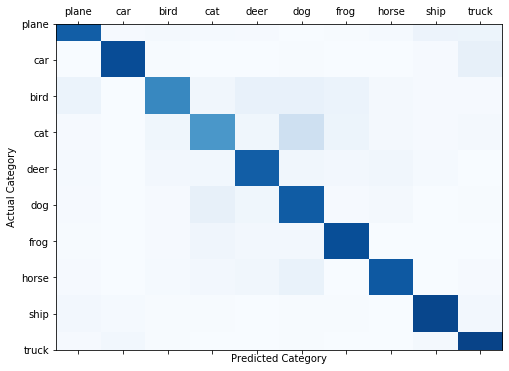

Category   - Accuracy
plane      - 82.1
car        - 88.8
bird       - 66.4
cat        - 60.0
deer       - 82.3
dog        - 83.0
frog       - 88.3
horse      - 84.2
ship       - 91.4
truck      - 92.3

Selected workers

[ 3  9 43 33 38 66 34 62 18 58 12 67 41 36 14]
Worker 3 : is  Stealthy_Attacker
Worker 9 : is  Honest
Worker 43 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 66 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 62 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 58 : is  Honest
Worker 12 : is  Stealthy_Attacker
Worker 67 : is  Stealthy_Attacker
Worker 41 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 14 : is  Stealthy_Attacker

 | Global Training Round : 42 |


Worker 3 starts training in Global Round:42 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  42


Train Epoch: 1 [0/500	(1%)]	Loss: 1.055430
Train Epoch: 1 [400/500	(81%)]	Loss: 0.541609
Train Epoch: 2 [0/500	(1%)]	Loss: 0.312157
Train Epoch: 2 [400/500	(81%)]	Loss: 0.479473
Train Epoch: 3 [0/500	(1%)]	Loss: 0.309630
Train Epoch: 3 [400/500	(81%)]	Loss: 0.545128
Train Epoch: 4 [0/500	(1%)]	Loss: 0.264136
Train Epoch: 4 [400/500	(81%)]	Loss: 0.240226
Train Epoch: 5 [0/500	(1%)]	Loss: 0.339359
Train Epoch: 5 [400/500	(81%)]	Loss: 0.444448

Performed attacks 1
Worker 3 ends training in Global Round:42 |

Worker 9 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.551026
Train Epoch: 1 [400/500	(81%)]	Loss: 0.577109
Train Epoch: 2 [0/500	(1%)]	Loss: 0.238374
Train Epoch: 2 [400/500	(81%)]	Loss: 0.406408
Train Epoch: 3 [0/500	(1%)]	Loss: 0.275829
Train Epoch: 3 [400/500	(81%)]	Loss: 0.388578
Train Epoch: 4 [0/500	(1%)]	Loss: 0.226237
Train Epoch: 4 [400/500	(81%)]	Loss: 0.505960
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182054
Train Epoch: 5 [400/500	(81%)]	Loss: 0.278273

Worker 9 ends training in Global Round:42 |

Worker 43 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.309286
Train Epoch: 1 [400/500	(81%)]	Loss: 0.405826
Train Epoch: 2 [0/500	(1%)]	Loss: 0.211936
Train Epoch: 2 [400/500	(81%)]	Loss: 0.297501
Train Epoch: 3 [0/500	(1%)]	Loss: 0.215398
Train Epoch: 3 [400/500	(81%)]	Loss: 0.249683
Train Epoch: 4 [0/500	(1%)]	Loss: 0.180028
Train Epoch: 4 [400/500	(81%)]	Loss: 0.219891
Train Epoch: 5 [0/500	(1%)]	Loss: 0.142105
Train Epoch: 5 [400/500	(81%)]	Loss: 0.168107

Worker 43 ends training in Global Round:42 |

Worker 33 starts training in Global Round:42 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  42


Train Epoch: 1 [0/500	(1%)]	Loss: 1.446266
Train Epoch: 1 [400/500	(81%)]	Loss: 0.611201
Train Epoch: 2 [0/500	(1%)]	Loss: 0.315243
Train Epoch: 2 [400/500	(81%)]	Loss: 0.343819
Train Epoch: 3 [0/500	(1%)]	Loss: 0.363842
Train Epoch: 3 [400/500	(81%)]	Loss: 0.384625
Train Epoch: 4 [0/500	(1%)]	Loss: 0.275984
Train Epoch: 4 [400/500	(81%)]	Loss: 0.318090
Train Epoch: 5 [0/500	(1%)]	Loss: 0.201632
Train Epoch: 5 [400/500	(81%)]	Loss: 0.265274

Performed attacks 2
Worker 33 ends training in Global Round:42 |

Worker 38 starts training in Global Round:42 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  42


Train Epoch: 1 [0/500	(1%)]	Loss: 1.070210
Train Epoch: 1 [400/500	(81%)]	Loss: 1.024599
Train Epoch: 2 [0/500	(1%)]	Loss: 0.533889
Train Epoch: 2 [400/500	(81%)]	Loss: 0.535953
Train Epoch: 3 [0/500	(1%)]	Loss: 0.447524
Train Epoch: 3 [400/500	(81%)]	Loss: 0.373273
Train Epoch: 4 [0/500	(1%)]	Loss: 0.285537
Train Epoch: 4 [400/500	(81%)]	Loss: 0.327961
Train Epoch: 5 [0/500	(1%)]	Loss: 0.198845
Train Epoch: 5 [400/500	(81%)]	Loss: 0.128334

Performed attacks 3
Worker 38 ends training in Global Round:42 |

Worker 66 starts training in Global Round:42 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  42


Train Epoch: 1 [0/500	(1%)]	Loss: 1.564175
Train Epoch: 1 [400/500	(81%)]	Loss: 0.651176
Train Epoch: 2 [0/500	(1%)]	Loss: 0.411685
Train Epoch: 2 [400/500	(81%)]	Loss: 0.519558
Train Epoch: 3 [0/500	(1%)]	Loss: 0.304381
Train Epoch: 3 [400/500	(81%)]	Loss: 0.238747
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200465
Train Epoch: 4 [400/500	(81%)]	Loss: 0.454151
Train Epoch: 5 [0/500	(1%)]	Loss: 0.256851
Train Epoch: 5 [400/500	(81%)]	Loss: 0.279697

Performed attacks 4
Worker 66 ends training in Global Round:42 |

Worker 34 starts training in Global Round:42 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  42


Train Epoch: 1 [0/500	(1%)]	Loss: 1.165465
Train Epoch: 1 [400/500	(81%)]	Loss: 0.539419
Train Epoch: 2 [0/500	(1%)]	Loss: 0.375477
Train Epoch: 2 [400/500	(81%)]	Loss: 0.810798
Train Epoch: 3 [0/500	(1%)]	Loss: 0.327637
Train Epoch: 3 [400/500	(81%)]	Loss: 0.452424
Train Epoch: 4 [0/500	(1%)]	Loss: 0.274841
Train Epoch: 4 [400/500	(81%)]	Loss: 0.379789
Train Epoch: 5 [0/500	(1%)]	Loss: 0.270529
Train Epoch: 5 [400/500	(81%)]	Loss: 0.187815

Performed attacks 5
Worker 34 ends training in Global Round:42 |

Worker 62 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.653463
Train Epoch: 1 [400/500	(81%)]	Loss: 0.700200
Train Epoch: 2 [0/500	(1%)]	Loss: 0.556097
Train Epoch: 2 [400/500	(81%)]	Loss: 0.492072
Train Epoch: 3 [0/500	(1%)]	Loss: 0.322609
Train Epoch: 3 [400/500	(81%)]	Loss: 0.449471
Train Epoch: 4 [0/500	(1%)]	Loss: 0.332023
Train Epoch: 4 [400/500	(81%)]	Loss: 0.270440
Train Epoch: 5 [0/500	(1%)]	Loss: 0.287946
Train Epoch: 5 [400/500	(81%)]	Loss: 0.335354

Worker 62 ends training in Global Round:42 |

Worker 18 starts training in Global Round:42 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  42


Train Epoch: 1 [0/500	(1%)]	Loss: 1.830024
Train Epoch: 1 [400/500	(81%)]	Loss: 0.658983
Train Epoch: 2 [0/500	(1%)]	Loss: 0.416732
Train Epoch: 2 [400/500	(81%)]	Loss: 0.462574
Train Epoch: 3 [0/500	(1%)]	Loss: 0.369648
Train Epoch: 3 [400/500	(81%)]	Loss: 0.419736
Train Epoch: 4 [0/500	(1%)]	Loss: 0.307094
Train Epoch: 4 [400/500	(81%)]	Loss: 0.401369
Train Epoch: 5 [0/500	(1%)]	Loss: 0.232660
Train Epoch: 5 [400/500	(81%)]	Loss: 0.200790

Performed attacks 6
Worker 18 ends training in Global Round:42 |

Worker 58 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.466425
Train Epoch: 1 [400/500	(81%)]	Loss: 0.268314
Train Epoch: 2 [0/500	(1%)]	Loss: 0.199716
Train Epoch: 2 [400/500	(81%)]	Loss: 0.300181
Train Epoch: 3 [0/500	(1%)]	Loss: 0.246074
Train Epoch: 3 [400/500	(81%)]	Loss: 0.282737
Train Epoch: 4 [0/500	(1%)]	Loss: 0.136663
Train Epoch: 4 [400/500	(81%)]	Loss: 0.226416
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170124
Train Epoch: 5 [400/500	(81%)]	Loss: 0.304659

Worker 58 ends training in Global Round:42 |

Worker 12 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.414750
Train Epoch: 1 [400/500	(81%)]	Loss: 0.754257
Train Epoch: 2 [0/500	(1%)]	Loss: 0.276628
Train Epoch: 2 [400/500	(81%)]	Loss: 0.392862
Train Epoch: 3 [0/500	(1%)]	Loss: 0.328906
Train Epoch: 3 [400/500	(81%)]	Loss: 0.146308
Train Epoch: 4 [0/500	(1%)]	Loss: 0.150789
Train Epoch: 4 [400/500	(81%)]	Loss: 0.276712
Train Epoch: 5 [0/500	(1%)]	Loss: 0.153948
Train Epoch: 5 [400/500	(81%)]	Loss: 0.201569

Worker 12 ends training in Global Round:42 |

Worker 67 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.539573
Train Epoch: 1 [400/500	(81%)]	Loss: 0.554850
Train Epoch: 2 [0/500	(1%)]	Loss: 0.419440
Train Epoch: 2 [400/500	(81%)]	Loss: 0.494020
Train Epoch: 3 [0/500	(1%)]	Loss: 0.317661
Train Epoch: 3 [400/500	(81%)]	Loss: 0.388400
Train Epoch: 4 [0/500	(1%)]	Loss: 0.275852
Train Epoch: 4 [400/500	(81%)]	Loss: 0.330534
Train Epoch: 5 [0/500	(1%)]	Loss: 0.131443
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242417

Worker 67 ends training in Global Round:42 |

Worker 41 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.911366
Train Epoch: 1 [400/500	(81%)]	Loss: 0.763005
Train Epoch: 2 [0/500	(1%)]	Loss: 0.365197
Train Epoch: 2 [400/500	(81%)]	Loss: 0.551174
Train Epoch: 3 [0/500	(1%)]	Loss: 0.388870
Train Epoch: 3 [400/500	(81%)]	Loss: 0.360574
Train Epoch: 4 [0/500	(1%)]	Loss: 0.261580
Train Epoch: 4 [400/500	(81%)]	Loss: 0.268683
Train Epoch: 5 [0/500	(1%)]	Loss: 0.258885
Train Epoch: 5 [400/500	(81%)]	Loss: 0.158905

Worker 41 ends training in Global Round:42 |

Worker 36 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.352011
Train Epoch: 1 [400/500	(81%)]	Loss: 0.671170
Train Epoch: 2 [0/500	(1%)]	Loss: 0.179189
Train Epoch: 2 [400/500	(81%)]	Loss: 0.326859
Train Epoch: 3 [0/500	(1%)]	Loss: 0.233135
Train Epoch: 3 [400/500	(81%)]	Loss: 0.367096
Train Epoch: 4 [0/500	(1%)]	Loss: 0.191402
Train Epoch: 4 [400/500	(81%)]	Loss: 0.266622
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114485
Train Epoch: 5 [400/500	(81%)]	Loss: 0.169080

Worker 36 ends training in Global Round:42 |

Worker 14 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.754551
Train Epoch: 1 [400/500	(81%)]	Loss: 0.576967
Train Epoch: 2 [0/500	(1%)]	Loss: 0.276023
Train Epoch: 2 [400/500	(81%)]	Loss: 0.442638
Train Epoch: 3 [0/500	(1%)]	Loss: 0.319145
Train Epoch: 3 [400/500	(81%)]	Loss: 0.366612
Train Epoch: 4 [0/500	(1%)]	Loss: 0.313802
Train Epoch: 4 [400/500	(81%)]	Loss: 0.393710
Train Epoch: 5 [0/500	(1%)]	Loss: 0.266477
Train Epoch: 5 [400/500	(81%)]	Loss: 0.277617

Worker 14 ends training in Global Round:42 |
Last layer biases  [array([ 0.03598413, -0.02843455, -0.01421718,  0.03754713,  0.050739  ,
       -0.01680359,  0.03941932, -0.02815082, -0.01983335, -0.04034834],
      dtype=float32), array([ 0.03391433, -0.0316044 , -0.01571826,  0.03864779,  0.03924491,
       -0.0183789 ,  0.04027155, -0.00703327, -0.0215502 , -0.04189179],
      dtype=float32), array([ 0.03486292, -0.03087766, -0.01442386,  0.03835061,  0.03718535,
       -0.01949651,  0.03815307, -0.0067229 , -0.01967587, -0.04145338],
      dtyp

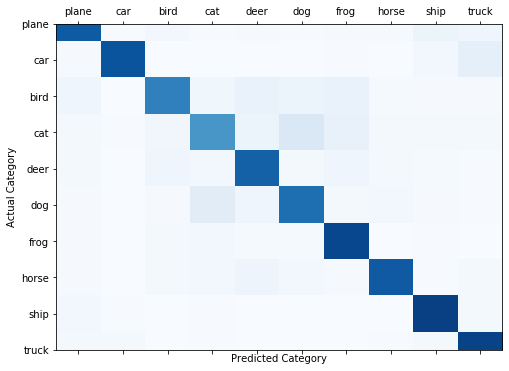

Category   - Accuracy
plane      - 83.4
car        - 86.2
bird       - 69.0
cat        - 60.5
deer       - 81.1
dog        - 75.8
frog       - 91.0
horse      - 83.6
ship       - 93.5
truck      - 92.5

Selected workers

[18 82  2 54 50 49 48 34 25 53 60 37 94  1 84]
Worker 18 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 2 : is  Honest
Worker 54 : is  Honest
Worker 50 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 48 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 25 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker
Worker 1 : is  Honest
Worker 84 : is  Honest

 | Global Training Round : 43 |


Worker 18 starts training in Global Round:43 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  43


Train Epoch: 1 [0/500	(1%)]	Loss: 1.118827
Train Epoch: 1 [400/500	(81%)]	Loss: 0.725460
Train Epoch: 2 [0/500	(1%)]	Loss: 0.543009
Train Epoch: 2 [400/500	(81%)]	Loss: 0.345003
Train Epoch: 3 [0/500	(1%)]	Loss: 0.342422
Train Epoch: 3 [400/500	(81%)]	Loss: 0.497539
Train Epoch: 4 [0/500	(1%)]	Loss: 0.298178
Train Epoch: 4 [400/500	(81%)]	Loss: 0.410612
Train Epoch: 5 [0/500	(1%)]	Loss: 0.233809
Train Epoch: 5 [400/500	(81%)]	Loss: 0.230996

Performed attacks 1
Worker 18 ends training in Global Round:43 |

Worker 82 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.337956
Train Epoch: 1 [400/500	(81%)]	Loss: 0.456953
Train Epoch: 2 [0/500	(1%)]	Loss: 0.237467
Train Epoch: 2 [400/500	(81%)]	Loss: 0.482594
Train Epoch: 3 [0/500	(1%)]	Loss: 0.287778
Train Epoch: 3 [400/500	(81%)]	Loss: 0.448683
Train Epoch: 4 [0/500	(1%)]	Loss: 0.186846
Train Epoch: 4 [400/500	(81%)]	Loss: 0.340126
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160918
Train Epoch: 5 [400/500	(81%)]	Loss: 0.225250

Worker 82 ends training in Global Round:43 |

Worker 2 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.438295
Train Epoch: 1 [400/500	(81%)]	Loss: 0.379661
Train Epoch: 2 [0/500	(1%)]	Loss: 0.145864
Train Epoch: 2 [400/500	(81%)]	Loss: 0.435750
Train Epoch: 3 [0/500	(1%)]	Loss: 0.129875
Train Epoch: 3 [400/500	(81%)]	Loss: 0.126550
Train Epoch: 4 [0/500	(1%)]	Loss: 0.218151
Train Epoch: 4 [400/500	(81%)]	Loss: 0.187994
Train Epoch: 5 [0/500	(1%)]	Loss: 0.117997
Train Epoch: 5 [400/500	(81%)]	Loss: 0.281902

Worker 2 ends training in Global Round:43 |

Worker 54 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.347631
Train Epoch: 1 [400/500	(81%)]	Loss: 0.495551
Train Epoch: 2 [0/500	(1%)]	Loss: 0.224527
Train Epoch: 2 [400/500	(81%)]	Loss: 0.344077
Train Epoch: 3 [0/500	(1%)]	Loss: 0.100591
Train Epoch: 3 [400/500	(81%)]	Loss: 0.222040
Train Epoch: 4 [0/500	(1%)]	Loss: 0.062515
Train Epoch: 4 [400/500	(81%)]	Loss: 0.214903
Train Epoch: 5 [0/500	(1%)]	Loss: 0.149130
Train Epoch: 5 [400/500	(81%)]	Loss: 0.144837

Worker 54 ends training in Global Round:43 |

Worker 50 starts training in Global Round:43 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  43


Train Epoch: 1 [0/500	(1%)]	Loss: 0.945238
Train Epoch: 1 [400/500	(81%)]	Loss: 0.406766
Train Epoch: 2 [0/500	(1%)]	Loss: 0.298517
Train Epoch: 2 [400/500	(81%)]	Loss: 0.449373
Train Epoch: 3 [0/500	(1%)]	Loss: 0.222735
Train Epoch: 3 [400/500	(81%)]	Loss: 0.385319
Train Epoch: 4 [0/500	(1%)]	Loss: 0.146313
Train Epoch: 4 [400/500	(81%)]	Loss: 0.279715
Train Epoch: 5 [0/500	(1%)]	Loss: 0.250547
Train Epoch: 5 [400/500	(81%)]	Loss: 0.264153

Performed attacks 2
Worker 50 ends training in Global Round:43 |

Worker 49 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.450475
Train Epoch: 1 [400/500	(81%)]	Loss: 0.260387
Train Epoch: 2 [0/500	(1%)]	Loss: 0.333309
Train Epoch: 2 [400/500	(81%)]	Loss: 0.386344
Train Epoch: 3 [0/500	(1%)]	Loss: 0.229920
Train Epoch: 3 [400/500	(81%)]	Loss: 0.360197
Train Epoch: 4 [0/500	(1%)]	Loss: 0.133532
Train Epoch: 4 [400/500	(81%)]	Loss: 0.307262
Train Epoch: 5 [0/500	(1%)]	Loss: 0.228268
Train Epoch: 5 [400/500	(81%)]	Loss: 0.143517

Worker 49 ends training in Global Round:43 |

Worker 48 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.388837
Train Epoch: 1 [400/500	(81%)]	Loss: 0.338079
Train Epoch: 2 [0/500	(1%)]	Loss: 0.214862
Train Epoch: 2 [400/500	(81%)]	Loss: 0.175445
Train Epoch: 3 [0/500	(1%)]	Loss: 0.167215
Train Epoch: 3 [400/500	(81%)]	Loss: 0.176569
Train Epoch: 4 [0/500	(1%)]	Loss: 0.122006
Train Epoch: 4 [400/500	(81%)]	Loss: 0.083794
Train Epoch: 5 [0/500	(1%)]	Loss: 0.060769
Train Epoch: 5 [400/500	(81%)]	Loss: 0.187012

Worker 48 ends training in Global Round:43 |

Worker 34 starts training in Global Round:43 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  43


Train Epoch: 1 [0/500	(1%)]	Loss: 1.144990
Train Epoch: 1 [400/500	(81%)]	Loss: 0.442992
Train Epoch: 2 [0/500	(1%)]	Loss: 0.339709
Train Epoch: 2 [400/500	(81%)]	Loss: 0.367107
Train Epoch: 3 [0/500	(1%)]	Loss: 0.285271
Train Epoch: 3 [400/500	(81%)]	Loss: 0.264108
Train Epoch: 4 [0/500	(1%)]	Loss: 0.160583
Train Epoch: 4 [400/500	(81%)]	Loss: 0.173437
Train Epoch: 5 [0/500	(1%)]	Loss: 0.180348
Train Epoch: 5 [400/500	(81%)]	Loss: 0.303634

Performed attacks 3
Worker 34 ends training in Global Round:43 |

Worker 25 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.537138
Train Epoch: 1 [400/500	(81%)]	Loss: 0.379401
Train Epoch: 2 [0/500	(1%)]	Loss: 0.337679
Train Epoch: 2 [400/500	(81%)]	Loss: 0.393994
Train Epoch: 3 [0/500	(1%)]	Loss: 0.163219
Train Epoch: 3 [400/500	(81%)]	Loss: 0.369896
Train Epoch: 4 [0/500	(1%)]	Loss: 0.370847
Train Epoch: 4 [400/500	(81%)]	Loss: 0.260572
Train Epoch: 5 [0/500	(1%)]	Loss: 0.134348
Train Epoch: 5 [400/500	(81%)]	Loss: 0.256518

Worker 25 ends training in Global Round:43 |

Worker 53 starts training in Global Round:43 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  43


Train Epoch: 1 [0/500	(1%)]	Loss: 1.198535
Train Epoch: 1 [400/500	(81%)]	Loss: 0.700524
Train Epoch: 2 [0/500	(1%)]	Loss: 0.507408
Train Epoch: 2 [400/500	(81%)]	Loss: 0.544288
Train Epoch: 3 [0/500	(1%)]	Loss: 0.436025
Train Epoch: 3 [400/500	(81%)]	Loss: 0.539075
Train Epoch: 4 [0/500	(1%)]	Loss: 0.239623
Train Epoch: 4 [400/500	(81%)]	Loss: 0.398974
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148111
Train Epoch: 5 [400/500	(81%)]	Loss: 0.259459

Performed attacks 4
Worker 53 ends training in Global Round:43 |

Worker 60 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.427093
Train Epoch: 1 [400/500	(81%)]	Loss: 0.758243
Train Epoch: 2 [0/500	(1%)]	Loss: 0.354052
Train Epoch: 2 [400/500	(81%)]	Loss: 0.388702
Train Epoch: 3 [0/500	(1%)]	Loss: 0.249282
Train Epoch: 3 [400/500	(81%)]	Loss: 0.255308
Train Epoch: 4 [0/500	(1%)]	Loss: 0.221363
Train Epoch: 4 [400/500	(81%)]	Loss: 0.205997
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148043
Train Epoch: 5 [400/500	(81%)]	Loss: 0.189574

Worker 60 ends training in Global Round:43 |

Worker 37 starts training in Global Round:43 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  43


Train Epoch: 1 [0/500	(1%)]	Loss: 1.383527
Train Epoch: 1 [400/500	(81%)]	Loss: 0.495989
Train Epoch: 2 [0/500	(1%)]	Loss: 0.348914
Train Epoch: 2 [400/500	(81%)]	Loss: 0.445486
Train Epoch: 3 [0/500	(1%)]	Loss: 0.321575
Train Epoch: 3 [400/500	(81%)]	Loss: 0.305879
Train Epoch: 4 [0/500	(1%)]	Loss: 0.201846
Train Epoch: 4 [400/500	(81%)]	Loss: 0.174901
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175832
Train Epoch: 5 [400/500	(81%)]	Loss: 0.219120

Performed attacks 5
Worker 37 ends training in Global Round:43 |

Worker 94 starts training in Global Round:43 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  43


Train Epoch: 1 [0/500	(1%)]	Loss: 1.208114
Train Epoch: 1 [400/500	(81%)]	Loss: 0.596853
Train Epoch: 2 [0/500	(1%)]	Loss: 0.544850
Train Epoch: 2 [400/500	(81%)]	Loss: 0.417241
Train Epoch: 3 [0/500	(1%)]	Loss: 0.252247
Train Epoch: 3 [400/500	(81%)]	Loss: 0.345810
Train Epoch: 4 [0/500	(1%)]	Loss: 0.171690
Train Epoch: 4 [400/500	(81%)]	Loss: 0.419734
Train Epoch: 5 [0/500	(1%)]	Loss: 0.286742
Train Epoch: 5 [400/500	(81%)]	Loss: 0.236173

Performed attacks 6
Worker 94 ends training in Global Round:43 |

Worker 1 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.353936
Train Epoch: 1 [400/500	(81%)]	Loss: 0.678860
Train Epoch: 2 [0/500	(1%)]	Loss: 0.409079
Train Epoch: 2 [400/500	(81%)]	Loss: 0.382255
Train Epoch: 3 [0/500	(1%)]	Loss: 0.200449
Train Epoch: 3 [400/500	(81%)]	Loss: 0.165638
Train Epoch: 4 [0/500	(1%)]	Loss: 0.181856
Train Epoch: 4 [400/500	(81%)]	Loss: 0.186514
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122269
Train Epoch: 5 [400/500	(81%)]	Loss: 0.101470

Worker 1 ends training in Global Round:43 |

Worker 84 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.493140
Train Epoch: 1 [400/500	(81%)]	Loss: 0.555580
Train Epoch: 2 [0/500	(1%)]	Loss: 0.298763
Train Epoch: 2 [400/500	(81%)]	Loss: 0.402028
Train Epoch: 3 [0/500	(1%)]	Loss: 0.325971
Train Epoch: 3 [400/500	(81%)]	Loss: 0.467880
Train Epoch: 4 [0/500	(1%)]	Loss: 0.262057
Train Epoch: 4 [400/500	(81%)]	Loss: 0.340300
Train Epoch: 5 [0/500	(1%)]	Loss: 0.216796
Train Epoch: 5 [400/500	(81%)]	Loss: 0.259551

Worker 84 ends training in Global Round:43 |
Last layer biases  [array([ 0.03463147, -0.03089134, -0.01270214,  0.03766697,  0.04715659,
       -0.01261251,  0.0403209 , -0.02854309, -0.02010874, -0.03901634],
      dtype=float32), array([ 0.03381259, -0.03121009, -0.01539726,  0.0343959 ,  0.03811464,
       -0.015138  ,  0.04014478, -0.00815275, -0.02091182, -0.03975626],
      dtype=float32), array([ 0.03595483, -0.03103034, -0.01521216,  0.03630183,  0.03667092,
       -0.0200184 ,  0.0413602 , -0.0046579 , -0.0219953 , -0.04147194],
      dtyp

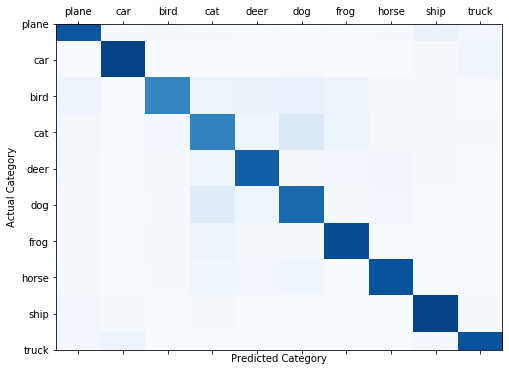

Category   - Accuracy
plane      - 85.5
car        - 92.6
bird       - 67.2
cat        - 68.2
deer       - 82.0
dog        - 77.8
frog       - 88.5
horse      - 86.4
ship       - 92.6
truck      - 87.3

Selected workers

[41  4 27 33 35 31  3 91 45 77 17 55 96 81 89]
Worker 41 : is  Stealthy_Attacker
Worker 4 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 35 : is  Honest
Worker 31 : is  Stealthy_Attacker
Worker 3 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 45 : is  Honest
Worker 77 : is  Honest
Worker 17 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 96 : is  Honest
Worker 81 : is  Honest
Worker 89 : is  Stealthy_Attacker

 | Global Training Round : 44 |


Worker 41 starts training in Global Round:44 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  44


Train Epoch: 1 [0/500	(1%)]	Loss: 1.419504
Train Epoch: 1 [400/500	(81%)]	Loss: 0.612037
Train Epoch: 2 [0/500	(1%)]	Loss: 0.383404
Train Epoch: 2 [400/500	(81%)]	Loss: 0.662591
Train Epoch: 3 [0/500	(1%)]	Loss: 0.237364
Train Epoch: 3 [400/500	(81%)]	Loss: 0.351822
Train Epoch: 4 [0/500	(1%)]	Loss: 0.271219
Train Epoch: 4 [400/500	(81%)]	Loss: 0.256474
Train Epoch: 5 [0/500	(1%)]	Loss: 0.234094
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220641

Performed attacks 1
Worker 41 ends training in Global Round:44 |

Worker 4 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.440788
Train Epoch: 1 [400/500	(81%)]	Loss: 0.335322
Train Epoch: 2 [0/500	(1%)]	Loss: 0.220949
Train Epoch: 2 [400/500	(81%)]	Loss: 0.339210
Train Epoch: 3 [0/500	(1%)]	Loss: 0.212419
Train Epoch: 3 [400/500	(81%)]	Loss: 0.271249
Train Epoch: 4 [0/500	(1%)]	Loss: 0.198532
Train Epoch: 4 [400/500	(81%)]	Loss: 0.178372
Train Epoch: 5 [0/500	(1%)]	Loss: 0.238632
Train Epoch: 5 [400/500	(81%)]	Loss: 0.270277

Worker 4 ends training in Global Round:44 |

Worker 27 starts training in Global Round:44 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  44


Train Epoch: 1 [0/500	(1%)]	Loss: 1.519170
Train Epoch: 1 [400/500	(81%)]	Loss: 0.774482
Train Epoch: 2 [0/500	(1%)]	Loss: 0.301495
Train Epoch: 2 [400/500	(81%)]	Loss: 0.517375
Train Epoch: 3 [0/500	(1%)]	Loss: 0.278449
Train Epoch: 3 [400/500	(81%)]	Loss: 0.349824
Train Epoch: 4 [0/500	(1%)]	Loss: 0.259957
Train Epoch: 4 [400/500	(81%)]	Loss: 0.333022
Train Epoch: 5 [0/500	(1%)]	Loss: 0.295985
Train Epoch: 5 [400/500	(81%)]	Loss: 0.377085

Performed attacks 2
Worker 27 ends training in Global Round:44 |

Worker 33 starts training in Global Round:44 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  44


Train Epoch: 1 [0/500	(1%)]	Loss: 1.361183
Train Epoch: 1 [400/500	(81%)]	Loss: 0.856302
Train Epoch: 2 [0/500	(1%)]	Loss: 0.432368
Train Epoch: 2 [400/500	(81%)]	Loss: 0.488622
Train Epoch: 3 [0/500	(1%)]	Loss: 0.305993
Train Epoch: 3 [400/500	(81%)]	Loss: 0.293748
Train Epoch: 4 [0/500	(1%)]	Loss: 0.431955
Train Epoch: 4 [400/500	(81%)]	Loss: 0.402561
Train Epoch: 5 [0/500	(1%)]	Loss: 0.237492
Train Epoch: 5 [400/500	(81%)]	Loss: 0.197039

Performed attacks 3
Worker 33 ends training in Global Round:44 |

Worker 35 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.493426
Train Epoch: 1 [400/500	(81%)]	Loss: 0.483608
Train Epoch: 2 [0/500	(1%)]	Loss: 0.193134
Train Epoch: 2 [400/500	(81%)]	Loss: 0.313558
Train Epoch: 3 [0/500	(1%)]	Loss: 0.239321
Train Epoch: 3 [400/500	(81%)]	Loss: 0.303356
Train Epoch: 4 [0/500	(1%)]	Loss: 0.109439
Train Epoch: 4 [400/500	(81%)]	Loss: 0.187745
Train Epoch: 5 [0/500	(1%)]	Loss: 0.056391
Train Epoch: 5 [400/500	(81%)]	Loss: 0.214860

Worker 35 ends training in Global Round:44 |

Worker 31 starts training in Global Round:44 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  44


Train Epoch: 1 [0/500	(1%)]	Loss: 1.230014
Train Epoch: 1 [400/500	(81%)]	Loss: 0.416466
Train Epoch: 2 [0/500	(1%)]	Loss: 0.384152
Train Epoch: 2 [400/500	(81%)]	Loss: 0.497456
Train Epoch: 3 [0/500	(1%)]	Loss: 0.488571
Train Epoch: 3 [400/500	(81%)]	Loss: 0.404471
Train Epoch: 4 [0/500	(1%)]	Loss: 0.279106
Train Epoch: 4 [400/500	(81%)]	Loss: 0.295314
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175217
Train Epoch: 5 [400/500	(81%)]	Loss: 0.224140

Performed attacks 4
Worker 31 ends training in Global Round:44 |

Worker 3 starts training in Global Round:44 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  44


Train Epoch: 1 [0/500	(1%)]	Loss: 1.186672
Train Epoch: 1 [400/500	(81%)]	Loss: 0.910759
Train Epoch: 2 [0/500	(1%)]	Loss: 0.509639
Train Epoch: 2 [400/500	(81%)]	Loss: 0.412659
Train Epoch: 3 [0/500	(1%)]	Loss: 0.278808
Train Epoch: 3 [400/500	(81%)]	Loss: 0.348201
Train Epoch: 4 [0/500	(1%)]	Loss: 0.237832
Train Epoch: 4 [400/500	(81%)]	Loss: 0.326396
Train Epoch: 5 [0/500	(1%)]	Loss: 0.153789
Train Epoch: 5 [400/500	(81%)]	Loss: 0.315593

Performed attacks 5
Worker 3 ends training in Global Round:44 |

Worker 91 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.331734
Train Epoch: 1 [400/500	(81%)]	Loss: 0.433648
Train Epoch: 2 [0/500	(1%)]	Loss: 0.222449
Train Epoch: 2 [400/500	(81%)]	Loss: 0.233034
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151311
Train Epoch: 3 [400/500	(81%)]	Loss: 0.125431
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121050
Train Epoch: 4 [400/500	(81%)]	Loss: 0.188670
Train Epoch: 5 [0/500	(1%)]	Loss: 0.121186
Train Epoch: 5 [400/500	(81%)]	Loss: 0.148480

Worker 91 ends training in Global Round:44 |

Worker 45 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.330117
Train Epoch: 1 [400/500	(81%)]	Loss: 0.378974
Train Epoch: 2 [0/500	(1%)]	Loss: 0.265607
Train Epoch: 2 [400/500	(81%)]	Loss: 0.204286
Train Epoch: 3 [0/500	(1%)]	Loss: 0.122177
Train Epoch: 3 [400/500	(81%)]	Loss: 0.201506
Train Epoch: 4 [0/500	(1%)]	Loss: 0.161965
Train Epoch: 4 [400/500	(81%)]	Loss: 0.095724
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145340
Train Epoch: 5 [400/500	(81%)]	Loss: 0.284284

Worker 45 ends training in Global Round:44 |

Worker 77 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.642637
Train Epoch: 1 [400/500	(81%)]	Loss: 0.489252
Train Epoch: 2 [0/500	(1%)]	Loss: 0.319591
Train Epoch: 2 [400/500	(81%)]	Loss: 0.504052
Train Epoch: 3 [0/500	(1%)]	Loss: 0.372227
Train Epoch: 3 [400/500	(81%)]	Loss: 0.489771
Train Epoch: 4 [0/500	(1%)]	Loss: 0.185555
Train Epoch: 4 [400/500	(81%)]	Loss: 0.239592
Train Epoch: 5 [0/500	(1%)]	Loss: 0.190516
Train Epoch: 5 [400/500	(81%)]	Loss: 0.263613

Worker 77 ends training in Global Round:44 |

Worker 17 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.543676
Train Epoch: 1 [400/500	(81%)]	Loss: 0.627517
Train Epoch: 2 [0/500	(1%)]	Loss: 0.431639
Train Epoch: 2 [400/500	(81%)]	Loss: 0.403958
Train Epoch: 3 [0/500	(1%)]	Loss: 0.345117
Train Epoch: 3 [400/500	(81%)]	Loss: 0.613239
Train Epoch: 4 [0/500	(1%)]	Loss: 0.235174
Train Epoch: 4 [400/500	(81%)]	Loss: 0.314490
Train Epoch: 5 [0/500	(1%)]	Loss: 0.213418
Train Epoch: 5 [400/500	(81%)]	Loss: 0.224267

Worker 17 ends training in Global Round:44 |

Worker 55 starts training in Global Round:44 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  44


Train Epoch: 1 [0/500	(1%)]	Loss: 1.204921
Train Epoch: 1 [400/500	(81%)]	Loss: 0.678235
Train Epoch: 2 [0/500	(1%)]	Loss: 0.340680
Train Epoch: 2 [400/500	(81%)]	Loss: 0.584906
Train Epoch: 3 [0/500	(1%)]	Loss: 0.304126
Train Epoch: 3 [400/500	(81%)]	Loss: 0.798302
Train Epoch: 4 [0/500	(1%)]	Loss: 0.254663
Train Epoch: 4 [400/500	(81%)]	Loss: 0.432314
Train Epoch: 5 [0/500	(1%)]	Loss: 0.280843
Train Epoch: 5 [400/500	(81%)]	Loss: 0.297687

Performed attacks 6
Worker 55 ends training in Global Round:44 |

Worker 96 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.483050
Train Epoch: 1 [400/500	(81%)]	Loss: 0.428690
Train Epoch: 2 [0/500	(1%)]	Loss: 0.237009
Train Epoch: 2 [400/500	(81%)]	Loss: 0.345217
Train Epoch: 3 [0/500	(1%)]	Loss: 0.168105
Train Epoch: 3 [400/500	(81%)]	Loss: 0.220886
Train Epoch: 4 [0/500	(1%)]	Loss: 0.210423
Train Epoch: 4 [400/500	(81%)]	Loss: 0.262707
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175931
Train Epoch: 5 [400/500	(81%)]	Loss: 0.226540

Worker 96 ends training in Global Round:44 |

Worker 81 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.346884
Train Epoch: 1 [400/500	(81%)]	Loss: 0.445124
Train Epoch: 2 [0/500	(1%)]	Loss: 0.276012
Train Epoch: 2 [400/500	(81%)]	Loss: 0.426011
Train Epoch: 3 [0/500	(1%)]	Loss: 0.069869
Train Epoch: 3 [400/500	(81%)]	Loss: 0.224312
Train Epoch: 4 [0/500	(1%)]	Loss: 0.112716
Train Epoch: 4 [400/500	(81%)]	Loss: 0.324001
Train Epoch: 5 [0/500	(1%)]	Loss: 0.251644
Train Epoch: 5 [400/500	(81%)]	Loss: 0.147223

Worker 81 ends training in Global Round:44 |

Worker 89 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.576522
Train Epoch: 1 [400/500	(81%)]	Loss: 0.870299
Train Epoch: 2 [0/500	(1%)]	Loss: 0.316961
Train Epoch: 2 [400/500	(81%)]	Loss: 0.570012
Train Epoch: 3 [0/500	(1%)]	Loss: 0.448559
Train Epoch: 3 [400/500	(81%)]	Loss: 0.486654
Train Epoch: 4 [0/500	(1%)]	Loss: 0.207206
Train Epoch: 4 [400/500	(81%)]	Loss: 0.400170
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127895
Train Epoch: 5 [400/500	(81%)]	Loss: 0.198546

Worker 89 ends training in Global Round:44 |
Last layer biases  [array([ 0.03759691, -0.03191728, -0.01166482,  0.04060714,  0.04768469,
       -0.01375791,  0.03936812, -0.0307508 , -0.02049978, -0.04076452],
      dtype=float32), array([ 0.03526923, -0.03137636, -0.01318677,  0.036551  ,  0.03558524,
       -0.01732057,  0.0395167 , -0.00716026, -0.02142089, -0.04055554],
      dtype=float32), array([ 0.037625  , -0.03203943, -0.01222807,  0.03599682,  0.04868255,
       -0.01362202,  0.04046958, -0.02929518, -0.02082761, -0.03885987],
      dtyp

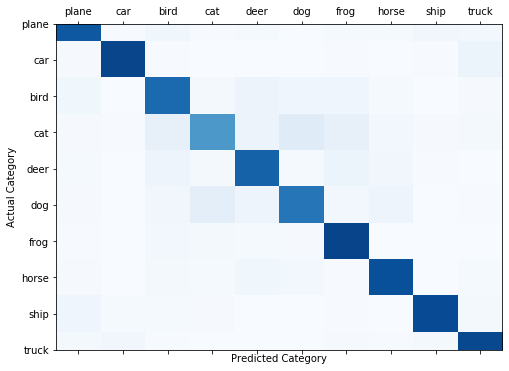

Category   - Accuracy
plane      - 84.7
car        - 91.7
bird       - 77.7
cat        - 59.4
deer       - 80.8
dog        - 73.3
frog       - 91.8
horse      - 87.5
ship       - 89.4
truck      - 90.4

Selected workers

[18 67 79 24 87 99 27 34 57 31 81 76 39 13 96]
Worker 18 : is  Stealthy_Attacker
Worker 67 : is  Stealthy_Attacker
Worker 79 : is  Stealthy_Attacker
Worker 24 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 57 : is  Honest
Worker 31 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 76 : is  Honest
Worker 39 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 96 : is  Honest

 | Global Training Round : 45 |


Worker 18 starts training in Global Round:45 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  45


Train Epoch: 1 [0/500	(1%)]	Loss: 1.242750
Train Epoch: 1 [400/500	(81%)]	Loss: 0.973483
Train Epoch: 2 [0/500	(1%)]	Loss: 0.394480
Train Epoch: 2 [400/500	(81%)]	Loss: 0.562998
Train Epoch: 3 [0/500	(1%)]	Loss: 0.307614
Train Epoch: 3 [400/500	(81%)]	Loss: 0.580635
Train Epoch: 4 [0/500	(1%)]	Loss: 0.224247
Train Epoch: 4 [400/500	(81%)]	Loss: 0.426996
Train Epoch: 5 [0/500	(1%)]	Loss: 0.285959
Train Epoch: 5 [400/500	(81%)]	Loss: 0.313399

Performed attacks 1
Worker 18 ends training in Global Round:45 |

Worker 67 starts training in Global Round:45 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  45


Train Epoch: 1 [0/500	(1%)]	Loss: 1.272975
Train Epoch: 1 [400/500	(81%)]	Loss: 0.686239
Train Epoch: 2 [0/500	(1%)]	Loss: 0.369484
Train Epoch: 2 [400/500	(81%)]	Loss: 0.389649
Train Epoch: 3 [0/500	(1%)]	Loss: 0.377722
Train Epoch: 3 [400/500	(81%)]	Loss: 0.275385
Train Epoch: 4 [0/500	(1%)]	Loss: 0.258367
Train Epoch: 4 [400/500	(81%)]	Loss: 0.304987
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133379
Train Epoch: 5 [400/500	(81%)]	Loss: 0.239558

Performed attacks 2
Worker 67 ends training in Global Round:45 |

Worker 79 starts training in Global Round:45 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  45


Train Epoch: 1 [0/500	(1%)]	Loss: 1.296213
Train Epoch: 1 [400/500	(81%)]	Loss: 0.718838
Train Epoch: 2 [0/500	(1%)]	Loss: 0.260827
Train Epoch: 2 [400/500	(81%)]	Loss: 0.523892
Train Epoch: 3 [0/500	(1%)]	Loss: 0.355423
Train Epoch: 3 [400/500	(81%)]	Loss: 0.324238
Train Epoch: 4 [0/500	(1%)]	Loss: 0.193240
Train Epoch: 4 [400/500	(81%)]	Loss: 0.298454
Train Epoch: 5 [0/500	(1%)]	Loss: 0.200993
Train Epoch: 5 [400/500	(81%)]	Loss: 0.265723

Performed attacks 3
Worker 79 ends training in Global Round:45 |

Worker 24 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.314121
Train Epoch: 1 [400/500	(81%)]	Loss: 0.656335
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209340
Train Epoch: 2 [400/500	(81%)]	Loss: 0.297771
Train Epoch: 3 [0/500	(1%)]	Loss: 0.223348
Train Epoch: 3 [400/500	(81%)]	Loss: 0.342668
Train Epoch: 4 [0/500	(1%)]	Loss: 0.173000
Train Epoch: 4 [400/500	(81%)]	Loss: 0.214237
Train Epoch: 5 [0/500	(1%)]	Loss: 0.079098
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177724

Worker 24 ends training in Global Round:45 |

Worker 87 starts training in Global Round:45 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  45


Train Epoch: 1 [0/500	(1%)]	Loss: 1.245733
Train Epoch: 1 [400/500	(81%)]	Loss: 0.925031
Train Epoch: 2 [0/500	(1%)]	Loss: 0.283538
Train Epoch: 2 [400/500	(81%)]	Loss: 0.522840
Train Epoch: 3 [0/500	(1%)]	Loss: 0.237861
Train Epoch: 3 [400/500	(81%)]	Loss: 0.467747
Train Epoch: 4 [0/500	(1%)]	Loss: 0.318238
Train Epoch: 4 [400/500	(81%)]	Loss: 0.366439
Train Epoch: 5 [0/500	(1%)]	Loss: 0.179344
Train Epoch: 5 [400/500	(81%)]	Loss: 0.225670

Performed attacks 4
Worker 87 ends training in Global Round:45 |

Worker 99 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.130823
Train Epoch: 1 [400/500	(81%)]	Loss: 0.407013
Train Epoch: 2 [0/500	(1%)]	Loss: 0.168829
Train Epoch: 2 [400/500	(81%)]	Loss: 0.242606
Train Epoch: 3 [0/500	(1%)]	Loss: 0.225352
Train Epoch: 3 [400/500	(81%)]	Loss: 0.237027
Train Epoch: 4 [0/500	(1%)]	Loss: 0.157670
Train Epoch: 4 [400/500	(81%)]	Loss: 0.106609
Train Epoch: 5 [0/500	(1%)]	Loss: 0.162966
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135587

Worker 99 ends training in Global Round:45 |

Worker 27 starts training in Global Round:45 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  45


Train Epoch: 1 [0/500	(1%)]	Loss: 1.217770
Train Epoch: 1 [400/500	(81%)]	Loss: 0.491872
Train Epoch: 2 [0/500	(1%)]	Loss: 0.443355
Train Epoch: 2 [400/500	(81%)]	Loss: 0.417252
Train Epoch: 3 [0/500	(1%)]	Loss: 0.315597
Train Epoch: 3 [400/500	(81%)]	Loss: 0.323429
Train Epoch: 4 [0/500	(1%)]	Loss: 0.212226
Train Epoch: 4 [400/500	(81%)]	Loss: 0.191733
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175216
Train Epoch: 5 [400/500	(81%)]	Loss: 0.292180

Performed attacks 5
Worker 27 ends training in Global Round:45 |

Worker 34 starts training in Global Round:45 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  45


Train Epoch: 1 [0/500	(1%)]	Loss: 1.126895
Train Epoch: 1 [400/500	(81%)]	Loss: 0.708266
Train Epoch: 2 [0/500	(1%)]	Loss: 0.267453
Train Epoch: 2 [400/500	(81%)]	Loss: 0.440074
Train Epoch: 3 [0/500	(1%)]	Loss: 0.249737
Train Epoch: 3 [400/500	(81%)]	Loss: 0.429053
Train Epoch: 4 [0/500	(1%)]	Loss: 0.129770
Train Epoch: 4 [400/500	(81%)]	Loss: 0.500942
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171474
Train Epoch: 5 [400/500	(81%)]	Loss: 0.363685

Performed attacks 6
Worker 34 ends training in Global Round:45 |

Worker 57 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.420069
Train Epoch: 1 [400/500	(81%)]	Loss: 0.528169
Train Epoch: 2 [0/500	(1%)]	Loss: 0.239594
Train Epoch: 2 [400/500	(81%)]	Loss: 0.269268
Train Epoch: 3 [0/500	(1%)]	Loss: 0.235725
Train Epoch: 3 [400/500	(81%)]	Loss: 0.225487
Train Epoch: 4 [0/500	(1%)]	Loss: 0.256310
Train Epoch: 4 [400/500	(81%)]	Loss: 0.143168
Train Epoch: 5 [0/500	(1%)]	Loss: 0.072774
Train Epoch: 5 [400/500	(81%)]	Loss: 0.338984

Worker 57 ends training in Global Round:45 |

Worker 31 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.691502
Train Epoch: 1 [400/500	(81%)]	Loss: 0.750439
Train Epoch: 2 [0/500	(1%)]	Loss: 0.347473
Train Epoch: 2 [400/500	(81%)]	Loss: 0.364893
Train Epoch: 3 [0/500	(1%)]	Loss: 0.280436
Train Epoch: 3 [400/500	(81%)]	Loss: 0.252557
Train Epoch: 4 [0/500	(1%)]	Loss: 0.203911
Train Epoch: 4 [400/500	(81%)]	Loss: 0.257906
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170274
Train Epoch: 5 [400/500	(81%)]	Loss: 0.285573

Worker 31 ends training in Global Round:45 |

Worker 81 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.316777
Train Epoch: 1 [400/500	(81%)]	Loss: 0.281827
Train Epoch: 2 [0/500	(1%)]	Loss: 0.196124
Train Epoch: 2 [400/500	(81%)]	Loss: 0.224461
Train Epoch: 3 [0/500	(1%)]	Loss: 0.095593
Train Epoch: 3 [400/500	(81%)]	Loss: 0.158413
Train Epoch: 4 [0/500	(1%)]	Loss: 0.239593
Train Epoch: 4 [400/500	(81%)]	Loss: 0.347241
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125033
Train Epoch: 5 [400/500	(81%)]	Loss: 0.147023

Worker 81 ends training in Global Round:45 |

Worker 76 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.372376
Train Epoch: 1 [400/500	(81%)]	Loss: 0.617679
Train Epoch: 2 [0/500	(1%)]	Loss: 0.257682
Train Epoch: 2 [400/500	(81%)]	Loss: 0.385921
Train Epoch: 3 [0/500	(1%)]	Loss: 0.201900
Train Epoch: 3 [400/500	(81%)]	Loss: 0.151704
Train Epoch: 4 [0/500	(1%)]	Loss: 0.096166
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169182
Train Epoch: 5 [0/500	(1%)]	Loss: 0.179957
Train Epoch: 5 [400/500	(81%)]	Loss: 0.128943

Worker 76 ends training in Global Round:45 |

Worker 39 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.503524
Train Epoch: 1 [400/500	(81%)]	Loss: 0.492478
Train Epoch: 2 [0/500	(1%)]	Loss: 0.220939
Train Epoch: 2 [400/500	(81%)]	Loss: 0.322751
Train Epoch: 3 [0/500	(1%)]	Loss: 0.221077
Train Epoch: 3 [400/500	(81%)]	Loss: 0.220374
Train Epoch: 4 [0/500	(1%)]	Loss: 0.145665
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169595
Train Epoch: 5 [0/500	(1%)]	Loss: 0.116010
Train Epoch: 5 [400/500	(81%)]	Loss: 0.211984

Worker 39 ends training in Global Round:45 |

Worker 13 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.534565
Train Epoch: 1 [400/500	(81%)]	Loss: 0.670708
Train Epoch: 2 [0/500	(1%)]	Loss: 0.286575
Train Epoch: 2 [400/500	(81%)]	Loss: 0.292038
Train Epoch: 3 [0/500	(1%)]	Loss: 0.324270
Train Epoch: 3 [400/500	(81%)]	Loss: 0.323297
Train Epoch: 4 [0/500	(1%)]	Loss: 0.263718
Train Epoch: 4 [400/500	(81%)]	Loss: 0.239839
Train Epoch: 5 [0/500	(1%)]	Loss: 0.173312
Train Epoch: 5 [400/500	(81%)]	Loss: 0.148452

Worker 13 ends training in Global Round:45 |

Worker 96 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.302717
Train Epoch: 1 [400/500	(81%)]	Loss: 0.343702
Train Epoch: 2 [0/500	(1%)]	Loss: 0.177553
Train Epoch: 2 [400/500	(81%)]	Loss: 0.335511
Train Epoch: 3 [0/500	(1%)]	Loss: 0.213594
Train Epoch: 3 [400/500	(81%)]	Loss: 0.341163
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105274
Train Epoch: 4 [400/500	(81%)]	Loss: 0.200553
Train Epoch: 5 [0/500	(1%)]	Loss: 0.219641
Train Epoch: 5 [400/500	(81%)]	Loss: 0.230676

Worker 96 ends training in Global Round:45 |
Last layer biases  [array([ 0.03406551, -0.03148993, -0.0155351 ,  0.03788845,  0.04705175,
       -0.01233968,  0.04101327, -0.02533156, -0.01975426, -0.03966669],
      dtype=float32), array([ 0.04000346, -0.03132189, -0.01182394,  0.03915842,  0.04632669,
       -0.0163093 ,  0.0393446 , -0.02702308, -0.02086192, -0.04159126],
      dtype=float32), array([ 0.03790417, -0.03342541, -0.01238938,  0.03842974,  0.04696663,
       -0.01396169,  0.03918072, -0.02835553, -0.01885192, -0.03959553],
      dtyp

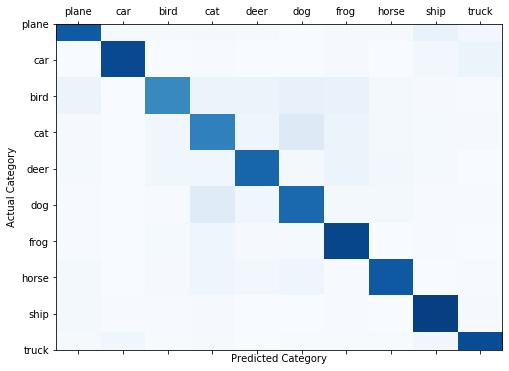

Category   - Accuracy
plane      - 83.5
car        - 90.2
bird       - 65.9
cat        - 69.0
deer       - 79.3
dog        - 78.5
frog       - 91.1
horse      - 84.3
ship       - 93.8
truck      - 88.8

Selected workers

[ 35  10  34   6  74  24   9  21  90  64  72  33  69  22 100]
Worker 35 : is  Honest
Worker 10 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 6 : is  Stealthy_Attacker
Worker 74 : is  Honest
Worker 24 : is  Honest
Worker 9 : is  Honest
Worker 21 : is  Stealthy_Attacker
Worker 90 : is  Honest
Worker 64 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 69 : is  Honest
Worker 22 : is  Stealthy_Attacker
Worker 100 : is  Honest

 | Global Training Round : 46 |


Worker 35 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.126590
Train Epoch: 1 [400/500	(81%)]	Loss: 0.406828
Train Epoch: 2 [0/500	(1%)]	Loss: 0.224598
Train Epoch: 2 [400/500	(81%)]	Loss: 0.254784
Train Epoch: 3 [0/500	(1%)]	Loss: 0.095140
Train Epoch: 3 [400/500	(81%)]	Loss: 0.204073
Train Epoch: 4 [0/500	(1%)]	Loss: 0.194655
Train Epoch: 4 [400/500	(81%)]	Loss: 0.311252
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115398
Train Epoch: 5 [400/500	(81%)]	Loss: 0.221921

Worker 35 ends training in Global Round:46 |

Worker 10 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.397106
Train Epoch: 1 [400/500	(81%)]	Loss: 0.576219
Train Epoch: 2 [0/500	(1%)]	Loss: 0.344119
Train Epoch: 2 [400/500	(81%)]	Loss: 0.337431
Train Epoch: 3 [0/500	(1%)]	Loss: 0.269318
Train Epoch: 3 [400/500	(81%)]	Loss: 0.387471
Train Epoch: 4 [0/500	(1%)]	Loss: 0.130891
Train Epoch: 4 [400/500	(81%)]	Loss: 0.220240
Train Epoch: 5 [0/500	(1%)]	Loss: 0.191800
Train Epoch: 5 [400/500	(81%)]	Loss: 0.262937

Worker 10 ends training in Global Round:46 |

Worker 34 starts training in Global Round:46 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  46


Train Epoch: 1 [0/500	(1%)]	Loss: 0.567980
Train Epoch: 1 [400/500	(81%)]	Loss: 0.688782
Train Epoch: 2 [0/500	(1%)]	Loss: 0.282846
Train Epoch: 2 [400/500	(81%)]	Loss: 0.275510
Train Epoch: 3 [0/500	(1%)]	Loss: 0.242240
Train Epoch: 3 [400/500	(81%)]	Loss: 0.417241
Train Epoch: 4 [0/500	(1%)]	Loss: 0.285022
Train Epoch: 4 [400/500	(81%)]	Loss: 0.344438
Train Epoch: 5 [0/500	(1%)]	Loss: 0.363418
Train Epoch: 5 [400/500	(81%)]	Loss: 0.617468

Performed attacks 1
Worker 34 ends training in Global Round:46 |

Worker 6 starts training in Global Round:46 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  46


Train Epoch: 1 [0/500	(1%)]	Loss: 1.171086
Train Epoch: 1 [400/500	(81%)]	Loss: 0.717787
Train Epoch: 2 [0/500	(1%)]	Loss: 0.306086
Train Epoch: 2 [400/500	(81%)]	Loss: 0.561293
Train Epoch: 3 [0/500	(1%)]	Loss: 0.403862
Train Epoch: 3 [400/500	(81%)]	Loss: 0.477826
Train Epoch: 4 [0/500	(1%)]	Loss: 0.344897
Train Epoch: 4 [400/500	(81%)]	Loss: 0.200802
Train Epoch: 5 [0/500	(1%)]	Loss: 0.087841
Train Epoch: 5 [400/500	(81%)]	Loss: 0.159921

Performed attacks 2
Worker 6 ends training in Global Round:46 |

Worker 74 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.448753
Train Epoch: 1 [400/500	(81%)]	Loss: 0.471525
Train Epoch: 2 [0/500	(1%)]	Loss: 0.192357
Train Epoch: 2 [400/500	(81%)]	Loss: 0.345976
Train Epoch: 3 [0/500	(1%)]	Loss: 0.205477
Train Epoch: 3 [400/500	(81%)]	Loss: 0.198132
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121819
Train Epoch: 4 [400/500	(81%)]	Loss: 0.088142
Train Epoch: 5 [0/500	(1%)]	Loss: 0.136737
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177764

Worker 74 ends training in Global Round:46 |

Worker 24 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.439219
Train Epoch: 1 [400/500	(81%)]	Loss: 0.270487
Train Epoch: 2 [0/500	(1%)]	Loss: 0.121449
Train Epoch: 2 [400/500	(81%)]	Loss: 0.193110
Train Epoch: 3 [0/500	(1%)]	Loss: 0.129357
Train Epoch: 3 [400/500	(81%)]	Loss: 0.180241
Train Epoch: 4 [0/500	(1%)]	Loss: 0.219072
Train Epoch: 4 [400/500	(81%)]	Loss: 0.153128
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106549
Train Epoch: 5 [400/500	(81%)]	Loss: 0.156938

Worker 24 ends training in Global Round:46 |

Worker 9 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.452632
Train Epoch: 1 [400/500	(81%)]	Loss: 0.499756
Train Epoch: 2 [0/500	(1%)]	Loss: 0.216320
Train Epoch: 2 [400/500	(81%)]	Loss: 0.365186
Train Epoch: 3 [0/500	(1%)]	Loss: 0.240012
Train Epoch: 3 [400/500	(81%)]	Loss: 0.264531
Train Epoch: 4 [0/500	(1%)]	Loss: 0.136215
Train Epoch: 4 [400/500	(81%)]	Loss: 0.259808
Train Epoch: 5 [0/500	(1%)]	Loss: 0.284124
Train Epoch: 5 [400/500	(81%)]	Loss: 0.266583

Worker 9 ends training in Global Round:46 |

Worker 21 starts training in Global Round:46 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  46


Train Epoch: 1 [0/500	(1%)]	Loss: 1.424664
Train Epoch: 1 [400/500	(81%)]	Loss: 0.518417
Train Epoch: 2 [0/500	(1%)]	Loss: 0.375438
Train Epoch: 2 [400/500	(81%)]	Loss: 0.519892
Train Epoch: 3 [0/500	(1%)]	Loss: 0.242789
Train Epoch: 3 [400/500	(81%)]	Loss: 0.373874
Train Epoch: 4 [0/500	(1%)]	Loss: 0.250290
Train Epoch: 4 [400/500	(81%)]	Loss: 0.359370
Train Epoch: 5 [0/500	(1%)]	Loss: 0.179660
Train Epoch: 5 [400/500	(81%)]	Loss: 0.059699

Performed attacks 3
Worker 21 ends training in Global Round:46 |

Worker 90 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.424525
Train Epoch: 1 [400/500	(81%)]	Loss: 0.298488
Train Epoch: 2 [0/500	(1%)]	Loss: 0.200020
Train Epoch: 2 [400/500	(81%)]	Loss: 0.329207
Train Epoch: 3 [0/500	(1%)]	Loss: 0.104696
Train Epoch: 3 [400/500	(81%)]	Loss: 0.221126
Train Epoch: 4 [0/500	(1%)]	Loss: 0.089994
Train Epoch: 4 [400/500	(81%)]	Loss: 0.226769
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122307
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149578

Worker 90 ends training in Global Round:46 |

Worker 64 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.399506
Train Epoch: 1 [400/500	(81%)]	Loss: 0.485121
Train Epoch: 2 [0/500	(1%)]	Loss: 0.335373
Train Epoch: 2 [400/500	(81%)]	Loss: 0.268682
Train Epoch: 3 [0/500	(1%)]	Loss: 0.197287
Train Epoch: 3 [400/500	(81%)]	Loss: 0.317991
Train Epoch: 4 [0/500	(1%)]	Loss: 0.126732
Train Epoch: 4 [400/500	(81%)]	Loss: 0.457168
Train Epoch: 5 [0/500	(1%)]	Loss: 0.142209
Train Epoch: 5 [400/500	(81%)]	Loss: 0.168156

Worker 64 ends training in Global Round:46 |

Worker 72 starts training in Global Round:46 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  46


Train Epoch: 1 [0/500	(1%)]	Loss: 1.689227
Train Epoch: 1 [400/500	(81%)]	Loss: 0.654968
Train Epoch: 2 [0/500	(1%)]	Loss: 0.383537
Train Epoch: 2 [400/500	(81%)]	Loss: 0.483293
Train Epoch: 3 [0/500	(1%)]	Loss: 0.264809
Train Epoch: 3 [400/500	(81%)]	Loss: 0.419017
Train Epoch: 4 [0/500	(1%)]	Loss: 0.248360
Train Epoch: 4 [400/500	(81%)]	Loss: 0.172336
Train Epoch: 5 [0/500	(1%)]	Loss: 0.146319
Train Epoch: 5 [400/500	(81%)]	Loss: 0.144425

Performed attacks 4
Worker 72 ends training in Global Round:46 |

Worker 33 starts training in Global Round:46 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  46


Train Epoch: 1 [0/500	(1%)]	Loss: 1.303985
Train Epoch: 1 [400/500	(81%)]	Loss: 0.670279
Train Epoch: 2 [0/500	(1%)]	Loss: 0.463598
Train Epoch: 2 [400/500	(81%)]	Loss: 0.518193
Train Epoch: 3 [0/500	(1%)]	Loss: 0.302472
Train Epoch: 3 [400/500	(81%)]	Loss: 0.350556
Train Epoch: 4 [0/500	(1%)]	Loss: 0.165458
Train Epoch: 4 [400/500	(81%)]	Loss: 0.264889
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175693
Train Epoch: 5 [400/500	(81%)]	Loss: 0.190721

Performed attacks 5
Worker 33 ends training in Global Round:46 |

Worker 69 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.766923
Train Epoch: 1 [400/500	(81%)]	Loss: 0.666156
Train Epoch: 2 [0/500	(1%)]	Loss: 0.194402
Train Epoch: 2 [400/500	(81%)]	Loss: 0.223887
Train Epoch: 3 [0/500	(1%)]	Loss: 0.296021
Train Epoch: 3 [400/500	(81%)]	Loss: 0.357469
Train Epoch: 4 [0/500	(1%)]	Loss: 0.167780
Train Epoch: 4 [400/500	(81%)]	Loss: 0.233245
Train Epoch: 5 [0/500	(1%)]	Loss: 0.159784
Train Epoch: 5 [400/500	(81%)]	Loss: 0.158556

Worker 69 ends training in Global Round:46 |

Worker 22 starts training in Global Round:46 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  46


Train Epoch: 1 [0/500	(1%)]	Loss: 1.275554
Train Epoch: 1 [400/500	(81%)]	Loss: 0.896108
Train Epoch: 2 [0/500	(1%)]	Loss: 0.390766
Train Epoch: 2 [400/500	(81%)]	Loss: 0.405806
Train Epoch: 3 [0/500	(1%)]	Loss: 0.381727
Train Epoch: 3 [400/500	(81%)]	Loss: 0.466627
Train Epoch: 4 [0/500	(1%)]	Loss: 0.302628
Train Epoch: 4 [400/500	(81%)]	Loss: 0.429148
Train Epoch: 5 [0/500	(1%)]	Loss: 0.246051
Train Epoch: 5 [400/500	(81%)]	Loss: 0.240580

Performed attacks 6
Worker 22 ends training in Global Round:46 |

Worker 100 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.323673
Train Epoch: 1 [400/500	(81%)]	Loss: 0.710884
Train Epoch: 2 [0/500	(1%)]	Loss: 0.218983
Train Epoch: 2 [400/500	(81%)]	Loss: 0.378511
Train Epoch: 3 [0/500	(1%)]	Loss: 0.232365
Train Epoch: 3 [400/500	(81%)]	Loss: 0.226055
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170871
Train Epoch: 4 [400/500	(81%)]	Loss: 0.215076
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123348
Train Epoch: 5 [400/500	(81%)]	Loss: 0.233486

Worker 100 ends training in Global Round:46 |
Last layer biases  [array([ 0.03552756, -0.03152458, -0.01510174,  0.03705543,  0.03712873,
       -0.01966715,  0.04044762, -0.00718412, -0.02061064, -0.04016929],
      dtype=float32), array([ 0.03371857, -0.03029333, -0.01365792,  0.03833451,  0.03890208,
       -0.01817178,  0.03821476, -0.00738608, -0.02369666, -0.04006237],
      dtype=float32), array([ 0.03809702, -0.03003482, -0.01631476,  0.03835487,  0.05061642,
       -0.01592017,  0.04276391, -0.03104582, -0.02127462, -0.03934022],
      dty

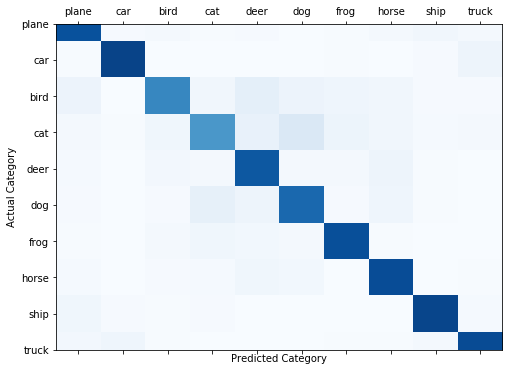

Category   - Accuracy
plane      - 87.2
car        - 92.2
bird       - 66.5
cat        - 59.9
deer       - 84.5
dog        - 78.3
frog       - 88.0
horse      - 88.9
ship       - 91.7
truck      - 89.2

Selected workers

[74 63 51 73  9 39 45 53 33 41  8 14 78 24 93]
Worker 74 : is  Honest
Worker 63 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 73 : is  Honest
Worker 9 : is  Honest
Worker 39 : is  Honest
Worker 45 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 41 : is  Stealthy_Attacker
Worker 8 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 78 : is  Honest
Worker 24 : is  Honest
Worker 93 : is  Honest

 | Global Training Round : 47 |


Worker 74 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.210991
Train Epoch: 1 [400/500	(81%)]	Loss: 0.265288
Train Epoch: 2 [0/500	(1%)]	Loss: 0.096440
Train Epoch: 2 [400/500	(81%)]	Loss: 0.173197
Train Epoch: 3 [0/500	(1%)]	Loss: 0.164005
Train Epoch: 3 [400/500	(81%)]	Loss: 0.243352
Train Epoch: 4 [0/500	(1%)]	Loss: 0.122451
Train Epoch: 4 [400/500	(81%)]	Loss: 0.075689
Train Epoch: 5 [0/500	(1%)]	Loss: 0.147802
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210110

Worker 74 ends training in Global Round:47 |

Worker 63 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.580674
Train Epoch: 1 [400/500	(81%)]	Loss: 0.544190
Train Epoch: 2 [0/500	(1%)]	Loss: 0.229349
Train Epoch: 2 [400/500	(81%)]	Loss: 0.335615
Train Epoch: 3 [0/500	(1%)]	Loss: 0.217924
Train Epoch: 3 [400/500	(81%)]	Loss: 0.178654
Train Epoch: 4 [0/500	(1%)]	Loss: 0.172770
Train Epoch: 4 [400/500	(81%)]	Loss: 0.474070
Train Epoch: 5 [0/500	(1%)]	Loss: 0.054627
Train Epoch: 5 [400/500	(81%)]	Loss: 0.252381

Worker 63 ends training in Global Round:47 |

Worker 51 starts training in Global Round:47 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  47


Train Epoch: 1 [0/500	(1%)]	Loss: 1.148125
Train Epoch: 1 [400/500	(81%)]	Loss: 0.563700
Train Epoch: 2 [0/500	(1%)]	Loss: 0.488717
Train Epoch: 2 [400/500	(81%)]	Loss: 0.598754
Train Epoch: 3 [0/500	(1%)]	Loss: 0.404393
Train Epoch: 3 [400/500	(81%)]	Loss: 0.284009
Train Epoch: 4 [0/500	(1%)]	Loss: 0.354773
Train Epoch: 4 [400/500	(81%)]	Loss: 0.406582
Train Epoch: 5 [0/500	(1%)]	Loss: 0.154691
Train Epoch: 5 [400/500	(81%)]	Loss: 0.240569

Performed attacks 1
Worker 51 ends training in Global Round:47 |

Worker 73 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.405901
Train Epoch: 1 [400/500	(81%)]	Loss: 0.365258
Train Epoch: 2 [0/500	(1%)]	Loss: 0.229981
Train Epoch: 2 [400/500	(81%)]	Loss: 0.199478
Train Epoch: 3 [0/500	(1%)]	Loss: 0.178384
Train Epoch: 3 [400/500	(81%)]	Loss: 0.182444
Train Epoch: 4 [0/500	(1%)]	Loss: 0.088517
Train Epoch: 4 [400/500	(81%)]	Loss: 0.258662
Train Epoch: 5 [0/500	(1%)]	Loss: 0.063660
Train Epoch: 5 [400/500	(81%)]	Loss: 0.159614

Worker 73 ends training in Global Round:47 |

Worker 9 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.240911
Train Epoch: 1 [400/500	(81%)]	Loss: 0.326647
Train Epoch: 2 [0/500	(1%)]	Loss: 0.200358
Train Epoch: 2 [400/500	(81%)]	Loss: 0.200370
Train Epoch: 3 [0/500	(1%)]	Loss: 0.159414
Train Epoch: 3 [400/500	(81%)]	Loss: 0.237515
Train Epoch: 4 [0/500	(1%)]	Loss: 0.100467
Train Epoch: 4 [400/500	(81%)]	Loss: 0.283348
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138111
Train Epoch: 5 [400/500	(81%)]	Loss: 0.187557

Worker 9 ends training in Global Round:47 |

Worker 39 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.349990
Train Epoch: 1 [400/500	(81%)]	Loss: 0.382938
Train Epoch: 2 [0/500	(1%)]	Loss: 0.179598
Train Epoch: 2 [400/500	(81%)]	Loss: 0.298925
Train Epoch: 3 [0/500	(1%)]	Loss: 0.091383
Train Epoch: 3 [400/500	(81%)]	Loss: 0.167811
Train Epoch: 4 [0/500	(1%)]	Loss: 0.122674
Train Epoch: 4 [400/500	(81%)]	Loss: 0.212094
Train Epoch: 5 [0/500	(1%)]	Loss: 0.095597
Train Epoch: 5 [400/500	(81%)]	Loss: 0.161117

Worker 39 ends training in Global Round:47 |

Worker 45 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.232011
Train Epoch: 1 [400/500	(81%)]	Loss: 0.498353
Train Epoch: 2 [0/500	(1%)]	Loss: 0.099063
Train Epoch: 2 [400/500	(81%)]	Loss: 0.405821
Train Epoch: 3 [0/500	(1%)]	Loss: 0.290038
Train Epoch: 3 [400/500	(81%)]	Loss: 0.211285
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083852
Train Epoch: 4 [400/500	(81%)]	Loss: 0.219101
Train Epoch: 5 [0/500	(1%)]	Loss: 0.054651
Train Epoch: 5 [400/500	(81%)]	Loss: 0.163975

Worker 45 ends training in Global Round:47 |

Worker 53 starts training in Global Round:47 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  47


Train Epoch: 1 [0/500	(1%)]	Loss: 1.480117
Train Epoch: 1 [400/500	(81%)]	Loss: 0.586819
Train Epoch: 2 [0/500	(1%)]	Loss: 0.341032
Train Epoch: 2 [400/500	(81%)]	Loss: 0.617146
Train Epoch: 3 [0/500	(1%)]	Loss: 0.322444
Train Epoch: 3 [400/500	(81%)]	Loss: 0.284831
Train Epoch: 4 [0/500	(1%)]	Loss: 0.237722
Train Epoch: 4 [400/500	(81%)]	Loss: 0.515451
Train Epoch: 5 [0/500	(1%)]	Loss: 0.311844
Train Epoch: 5 [400/500	(81%)]	Loss: 0.398457

Performed attacks 2
Worker 53 ends training in Global Round:47 |

Worker 33 starts training in Global Round:47 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  47


Train Epoch: 1 [0/500	(1%)]	Loss: 1.266446
Train Epoch: 1 [400/500	(81%)]	Loss: 1.411418
Train Epoch: 2 [0/500	(1%)]	Loss: 0.363497
Train Epoch: 2 [400/500	(81%)]	Loss: 0.744777
Train Epoch: 3 [0/500	(1%)]	Loss: 0.449888
Train Epoch: 3 [400/500	(81%)]	Loss: 0.440766
Train Epoch: 4 [0/500	(1%)]	Loss: 0.247733
Train Epoch: 4 [400/500	(81%)]	Loss: 0.363175
Train Epoch: 5 [0/500	(1%)]	Loss: 0.207998
Train Epoch: 5 [400/500	(81%)]	Loss: 0.453245

Performed attacks 3
Worker 33 ends training in Global Round:47 |

Worker 41 starts training in Global Round:47 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  47


Train Epoch: 1 [0/500	(1%)]	Loss: 1.356385
Train Epoch: 1 [400/500	(81%)]	Loss: 0.871885
Train Epoch: 2 [0/500	(1%)]	Loss: 0.405565
Train Epoch: 2 [400/500	(81%)]	Loss: 0.634202
Train Epoch: 3 [0/500	(1%)]	Loss: 0.319072
Train Epoch: 3 [400/500	(81%)]	Loss: 0.288082
Train Epoch: 4 [0/500	(1%)]	Loss: 0.343015
Train Epoch: 4 [400/500	(81%)]	Loss: 0.232277
Train Epoch: 5 [0/500	(1%)]	Loss: 0.187701
Train Epoch: 5 [400/500	(81%)]	Loss: 0.173904

Performed attacks 4
Worker 41 ends training in Global Round:47 |

Worker 8 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.249645
Train Epoch: 1 [400/500	(81%)]	Loss: 0.512777
Train Epoch: 2 [0/500	(1%)]	Loss: 0.283143
Train Epoch: 2 [400/500	(81%)]	Loss: 0.407335
Train Epoch: 3 [0/500	(1%)]	Loss: 0.153776
Train Epoch: 3 [400/500	(81%)]	Loss: 0.356118
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140156
Train Epoch: 4 [400/500	(81%)]	Loss: 0.118778
Train Epoch: 5 [0/500	(1%)]	Loss: 0.164088
Train Epoch: 5 [400/500	(81%)]	Loss: 0.116054

Worker 8 ends training in Global Round:47 |

Worker 14 starts training in Global Round:47 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  47


Train Epoch: 1 [0/500	(1%)]	Loss: 1.248923
Train Epoch: 1 [400/500	(81%)]	Loss: 0.466505
Train Epoch: 2 [0/500	(1%)]	Loss: 0.340150
Train Epoch: 2 [400/500	(81%)]	Loss: 0.293332
Train Epoch: 3 [0/500	(1%)]	Loss: 0.233204
Train Epoch: 3 [400/500	(81%)]	Loss: 0.369237
Train Epoch: 4 [0/500	(1%)]	Loss: 0.147129
Train Epoch: 4 [400/500	(81%)]	Loss: 0.448426
Train Epoch: 5 [0/500	(1%)]	Loss: 0.166866
Train Epoch: 5 [400/500	(81%)]	Loss: 0.288111

Performed attacks 5
Worker 14 ends training in Global Round:47 |

Worker 78 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.745418
Train Epoch: 1 [400/500	(81%)]	Loss: 0.600117
Train Epoch: 2 [0/500	(1%)]	Loss: 0.276944
Train Epoch: 2 [400/500	(81%)]	Loss: 0.426902
Train Epoch: 3 [0/500	(1%)]	Loss: 0.236622
Train Epoch: 3 [400/500	(81%)]	Loss: 0.358641
Train Epoch: 4 [0/500	(1%)]	Loss: 0.272839
Train Epoch: 4 [400/500	(81%)]	Loss: 0.198674
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126459
Train Epoch: 5 [400/500	(81%)]	Loss: 0.316606

Worker 78 ends training in Global Round:47 |

Worker 24 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.244013
Train Epoch: 1 [400/500	(81%)]	Loss: 0.438173
Train Epoch: 2 [0/500	(1%)]	Loss: 0.065391
Train Epoch: 2 [400/500	(81%)]	Loss: 0.183643
Train Epoch: 3 [0/500	(1%)]	Loss: 0.105530
Train Epoch: 3 [400/500	(81%)]	Loss: 0.190047
Train Epoch: 4 [0/500	(1%)]	Loss: 0.026897
Train Epoch: 4 [400/500	(81%)]	Loss: 0.229168
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124422
Train Epoch: 5 [400/500	(81%)]	Loss: 0.114114

Worker 24 ends training in Global Round:47 |

Worker 93 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.473583
Train Epoch: 1 [400/500	(81%)]	Loss: 0.654237
Train Epoch: 2 [0/500	(1%)]	Loss: 0.226281
Train Epoch: 2 [400/500	(81%)]	Loss: 0.362776
Train Epoch: 3 [0/500	(1%)]	Loss: 0.299802
Train Epoch: 3 [400/500	(81%)]	Loss: 0.276114
Train Epoch: 4 [0/500	(1%)]	Loss: 0.209950
Train Epoch: 4 [400/500	(81%)]	Loss: 0.277012
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193471
Train Epoch: 5 [400/500	(81%)]	Loss: 0.354508

Worker 93 ends training in Global Round:47 |
Last layer biases  [array([ 0.03481793, -0.03105107, -0.01384938,  0.03646465,  0.03616044,
       -0.01561913,  0.04061545, -0.00794592, -0.02254644, -0.04114474],
      dtype=float32), array([ 0.03303052, -0.02964698, -0.01564707,  0.0399937 ,  0.03827352,
       -0.01941659,  0.04069569, -0.00529439, -0.02313783, -0.04294881],
      dtype=float32), array([ 0.03715113, -0.0298933 , -0.01208885,  0.03857337,  0.04891964,
       -0.01610778,  0.03914914, -0.02937754, -0.01905232, -0.04137168],
      dtyp

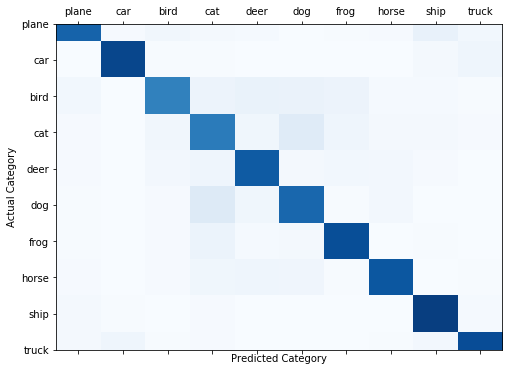

Category   - Accuracy
plane      - 80.2
car        - 91.4
bird       - 68.6
cat        - 70.8
deer       - 83.3
dog        - 78.6
frog       - 88.5
horse      - 84.8
ship       - 94.5
truck      - 88.7

Selected workers

[28 52 43 75 99 81 93 66 13 59 69 80 23 21 26]
Worker 28 : is  Stealthy_Attacker
Worker 52 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 81 : is  Honest
Worker 93 : is  Honest
Worker 66 : is  Stealthy_Attacker
Worker 13 : is  Stealthy_Attacker
Worker 59 : is  Stealthy_Attacker
Worker 69 : is  Honest
Worker 80 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 21 : is  Stealthy_Attacker
Worker 26 : is  Honest

 | Global Training Round : 48 |


Worker 28 starts training in Global Round:48 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  48


Train Epoch: 1 [0/500	(1%)]	Loss: 1.652800
Train Epoch: 1 [400/500	(81%)]	Loss: 0.538803
Train Epoch: 2 [0/500	(1%)]	Loss: 0.494478
Train Epoch: 2 [400/500	(81%)]	Loss: 0.566708
Train Epoch: 3 [0/500	(1%)]	Loss: 0.329254
Train Epoch: 3 [400/500	(81%)]	Loss: 0.208124
Train Epoch: 4 [0/500	(1%)]	Loss: 0.302237
Train Epoch: 4 [400/500	(81%)]	Loss: 0.338169
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175599
Train Epoch: 5 [400/500	(81%)]	Loss: 0.137624

Performed attacks 1
Worker 28 ends training in Global Round:48 |

Worker 52 starts training in Global Round:48 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  48


Train Epoch: 1 [0/500	(1%)]	Loss: 1.382860
Train Epoch: 1 [400/500	(81%)]	Loss: 0.723108
Train Epoch: 2 [0/500	(1%)]	Loss: 0.362410
Train Epoch: 2 [400/500	(81%)]	Loss: 0.337341
Train Epoch: 3 [0/500	(1%)]	Loss: 0.432488
Train Epoch: 3 [400/500	(81%)]	Loss: 0.372575
Train Epoch: 4 [0/500	(1%)]	Loss: 0.173247
Train Epoch: 4 [400/500	(81%)]	Loss: 0.234943
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175188
Train Epoch: 5 [400/500	(81%)]	Loss: 0.215828

Performed attacks 2
Worker 52 ends training in Global Round:48 |

Worker 43 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.389047
Train Epoch: 1 [400/500	(81%)]	Loss: 0.319524
Train Epoch: 2 [0/500	(1%)]	Loss: 0.212607
Train Epoch: 2 [400/500	(81%)]	Loss: 0.313634
Train Epoch: 3 [0/500	(1%)]	Loss: 0.100425
Train Epoch: 3 [400/500	(81%)]	Loss: 0.176616
Train Epoch: 4 [0/500	(1%)]	Loss: 0.211159
Train Epoch: 4 [400/500	(81%)]	Loss: 0.198058
Train Epoch: 5 [0/500	(1%)]	Loss: 0.113741
Train Epoch: 5 [400/500	(81%)]	Loss: 0.229807

Worker 43 ends training in Global Round:48 |

Worker 75 starts training in Global Round:48 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  48


Train Epoch: 1 [0/500	(1%)]	Loss: 0.867653
Train Epoch: 1 [400/500	(81%)]	Loss: 0.712197
Train Epoch: 2 [0/500	(1%)]	Loss: 0.452226
Train Epoch: 2 [400/500	(81%)]	Loss: 0.253267
Train Epoch: 3 [0/500	(1%)]	Loss: 0.294294
Train Epoch: 3 [400/500	(81%)]	Loss: 0.395105
Train Epoch: 4 [0/500	(1%)]	Loss: 0.188511
Train Epoch: 4 [400/500	(81%)]	Loss: 0.214357
Train Epoch: 5 [0/500	(1%)]	Loss: 0.196445
Train Epoch: 5 [400/500	(81%)]	Loss: 0.440469

Performed attacks 3
Worker 75 ends training in Global Round:48 |

Worker 99 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.424543
Train Epoch: 1 [400/500	(81%)]	Loss: 0.324681
Train Epoch: 2 [0/500	(1%)]	Loss: 0.149474
Train Epoch: 2 [400/500	(81%)]	Loss: 0.224272
Train Epoch: 3 [0/500	(1%)]	Loss: 0.176857
Train Epoch: 3 [400/500	(81%)]	Loss: 0.085972
Train Epoch: 4 [0/500	(1%)]	Loss: 0.089509
Train Epoch: 4 [400/500	(81%)]	Loss: 0.167964
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114329
Train Epoch: 5 [400/500	(81%)]	Loss: 0.092906

Worker 99 ends training in Global Round:48 |

Worker 81 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.341352
Train Epoch: 1 [400/500	(81%)]	Loss: 0.226968
Train Epoch: 2 [0/500	(1%)]	Loss: 0.152944
Train Epoch: 2 [400/500	(81%)]	Loss: 0.148104
Train Epoch: 3 [0/500	(1%)]	Loss: 0.095872
Train Epoch: 3 [400/500	(81%)]	Loss: 0.194928
Train Epoch: 4 [0/500	(1%)]	Loss: 0.151066
Train Epoch: 4 [400/500	(81%)]	Loss: 0.151588
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133616
Train Epoch: 5 [400/500	(81%)]	Loss: 0.188890

Worker 81 ends training in Global Round:48 |

Worker 93 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.289182
Train Epoch: 1 [400/500	(81%)]	Loss: 0.307424
Train Epoch: 2 [0/500	(1%)]	Loss: 0.086322
Train Epoch: 2 [400/500	(81%)]	Loss: 0.210078
Train Epoch: 3 [0/500	(1%)]	Loss: 0.141413
Train Epoch: 3 [400/500	(81%)]	Loss: 0.174285
Train Epoch: 4 [0/500	(1%)]	Loss: 0.204528
Train Epoch: 4 [400/500	(81%)]	Loss: 0.216429
Train Epoch: 5 [0/500	(1%)]	Loss: 0.210494
Train Epoch: 5 [400/500	(81%)]	Loss: 0.137170

Worker 93 ends training in Global Round:48 |

Worker 66 starts training in Global Round:48 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  48


Train Epoch: 1 [0/500	(1%)]	Loss: 1.535338
Train Epoch: 1 [400/500	(81%)]	Loss: 0.574935
Train Epoch: 2 [0/500	(1%)]	Loss: 0.348333
Train Epoch: 2 [400/500	(81%)]	Loss: 0.536923
Train Epoch: 3 [0/500	(1%)]	Loss: 0.455977
Train Epoch: 3 [400/500	(81%)]	Loss: 0.502794
Train Epoch: 4 [0/500	(1%)]	Loss: 0.293050
Train Epoch: 4 [400/500	(81%)]	Loss: 0.421946
Train Epoch: 5 [0/500	(1%)]	Loss: 0.187683
Train Epoch: 5 [400/500	(81%)]	Loss: 0.192958

Performed attacks 4
Worker 66 ends training in Global Round:48 |

Worker 13 starts training in Global Round:48 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  48


Train Epoch: 1 [0/500	(1%)]	Loss: 1.091853
Train Epoch: 1 [400/500	(81%)]	Loss: 0.573217
Train Epoch: 2 [0/500	(1%)]	Loss: 0.204791
Train Epoch: 2 [400/500	(81%)]	Loss: 0.515144
Train Epoch: 3 [0/500	(1%)]	Loss: 0.222980
Train Epoch: 3 [400/500	(81%)]	Loss: 0.431479
Train Epoch: 4 [0/500	(1%)]	Loss: 0.244169
Train Epoch: 4 [400/500	(81%)]	Loss: 0.354696
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203065
Train Epoch: 5 [400/500	(81%)]	Loss: 0.202722

Performed attacks 5
Worker 13 ends training in Global Round:48 |

Worker 59 starts training in Global Round:48 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  48


Train Epoch: 1 [0/500	(1%)]	Loss: 1.281120
Train Epoch: 1 [400/500	(81%)]	Loss: 0.490693
Train Epoch: 2 [0/500	(1%)]	Loss: 0.339486
Train Epoch: 2 [400/500	(81%)]	Loss: 0.506670
Train Epoch: 3 [0/500	(1%)]	Loss: 0.297958
Train Epoch: 3 [400/500	(81%)]	Loss: 0.623559
Train Epoch: 4 [0/500	(1%)]	Loss: 0.289786
Train Epoch: 4 [400/500	(81%)]	Loss: 0.324608
Train Epoch: 5 [0/500	(1%)]	Loss: 0.263557
Train Epoch: 5 [400/500	(81%)]	Loss: 0.205227

Performed attacks 6
Worker 59 ends training in Global Round:48 |

Worker 69 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.616897
Train Epoch: 1 [400/500	(81%)]	Loss: 0.298439
Train Epoch: 2 [0/500	(1%)]	Loss: 0.198359
Train Epoch: 2 [400/500	(81%)]	Loss: 0.293751
Train Epoch: 3 [0/500	(1%)]	Loss: 0.163559
Train Epoch: 3 [400/500	(81%)]	Loss: 0.292507
Train Epoch: 4 [0/500	(1%)]	Loss: 0.264194
Train Epoch: 4 [400/500	(81%)]	Loss: 0.299024
Train Epoch: 5 [0/500	(1%)]	Loss: 0.284675
Train Epoch: 5 [400/500	(81%)]	Loss: 0.270217

Worker 69 ends training in Global Round:48 |

Worker 80 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.444750
Train Epoch: 1 [400/500	(81%)]	Loss: 0.330758
Train Epoch: 2 [0/500	(1%)]	Loss: 0.285796
Train Epoch: 2 [400/500	(81%)]	Loss: 0.381970
Train Epoch: 3 [0/500	(1%)]	Loss: 0.249401
Train Epoch: 3 [400/500	(81%)]	Loss: 0.333307
Train Epoch: 4 [0/500	(1%)]	Loss: 0.165371
Train Epoch: 4 [400/500	(81%)]	Loss: 0.267315
Train Epoch: 5 [0/500	(1%)]	Loss: 0.056608
Train Epoch: 5 [400/500	(81%)]	Loss: 0.143562

Worker 80 ends training in Global Round:48 |

Worker 23 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.522504
Train Epoch: 1 [400/500	(81%)]	Loss: 0.637798
Train Epoch: 2 [0/500	(1%)]	Loss: 0.372910
Train Epoch: 2 [400/500	(81%)]	Loss: 0.410307
Train Epoch: 3 [0/500	(1%)]	Loss: 0.162474
Train Epoch: 3 [400/500	(81%)]	Loss: 0.307629
Train Epoch: 4 [0/500	(1%)]	Loss: 0.249634
Train Epoch: 4 [400/500	(81%)]	Loss: 0.201068
Train Epoch: 5 [0/500	(1%)]	Loss: 0.136962
Train Epoch: 5 [400/500	(81%)]	Loss: 0.132916

Worker 23 ends training in Global Round:48 |

Worker 21 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.581809
Train Epoch: 1 [400/500	(81%)]	Loss: 0.741778
Train Epoch: 2 [0/500	(1%)]	Loss: 0.395283
Train Epoch: 2 [400/500	(81%)]	Loss: 0.352895
Train Epoch: 3 [0/500	(1%)]	Loss: 0.409454
Train Epoch: 3 [400/500	(81%)]	Loss: 0.332738
Train Epoch: 4 [0/500	(1%)]	Loss: 0.210937
Train Epoch: 4 [400/500	(81%)]	Loss: 0.445808
Train Epoch: 5 [0/500	(1%)]	Loss: 0.139903
Train Epoch: 5 [400/500	(81%)]	Loss: 0.170718

Worker 21 ends training in Global Round:48 |

Worker 26 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.425286
Train Epoch: 1 [400/500	(81%)]	Loss: 0.393883
Train Epoch: 2 [0/500	(1%)]	Loss: 0.142683
Train Epoch: 2 [400/500	(81%)]	Loss: 0.297385
Train Epoch: 3 [0/500	(1%)]	Loss: 0.112393
Train Epoch: 3 [400/500	(81%)]	Loss: 0.325540
Train Epoch: 4 [0/500	(1%)]	Loss: 0.229704
Train Epoch: 4 [400/500	(81%)]	Loss: 0.193824
Train Epoch: 5 [0/500	(1%)]	Loss: 0.185308
Train Epoch: 5 [400/500	(81%)]	Loss: 0.075522

Worker 26 ends training in Global Round:48 |
Last layer biases  [array([ 0.0375573 , -0.02719442, -0.01341541,  0.03838383,  0.04711444,
       -0.01869874,  0.04259014, -0.02676907, -0.02259486, -0.04107144],
      dtype=float32), array([ 0.03704672, -0.03034137, -0.01494255,  0.04220135,  0.04924964,
       -0.0143487 ,  0.0411649 , -0.02967089, -0.02397472, -0.04048259],
      dtype=float32), array([ 0.0332295 , -0.03186901, -0.01525076,  0.03869951,  0.03811204,
       -0.01708924,  0.0398003 , -0.00802226, -0.02164438, -0.04006391],
      dtyp

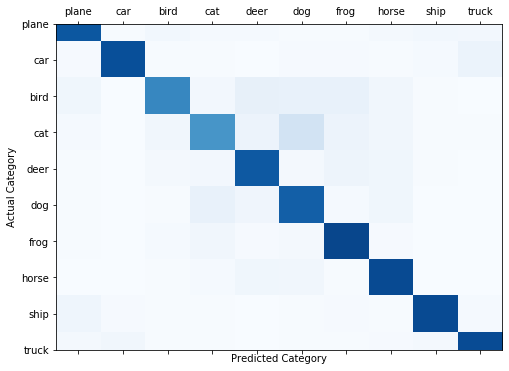

Category   - Accuracy
plane      - 84.8
car        - 88.2
bird       - 66.5
cat        - 60.6
deer       - 84.3
dog        - 81.8
frog       - 91.3
horse      - 89.8
ship       - 89.5
truck      - 89.4

Selected workers

[95 48 97 98 91 43 75  7 24 62 80 99 11 22 10]
Worker 95 : is  Honest
Worker 48 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 43 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 7 : is  Honest
Worker 24 : is  Honest
Worker 62 : is  Honest
Worker 80 : is  Honest
Worker 99 : is  Honest
Worker 11 : is  Honest
Worker 22 : is  Stealthy_Attacker
Worker 10 : is  Honest

 | Global Training Round : 49 |


Worker 95 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.324936
Train Epoch: 1 [400/500	(81%)]	Loss: 0.469086
Train Epoch: 2 [0/500	(1%)]	Loss: 0.208744
Train Epoch: 2 [400/500	(81%)]	Loss: 0.267122
Train Epoch: 3 [0/500	(1%)]	Loss: 0.238585
Train Epoch: 3 [400/500	(81%)]	Loss: 0.236839
Train Epoch: 4 [0/500	(1%)]	Loss: 0.122655
Train Epoch: 4 [400/500	(81%)]	Loss: 0.258818
Train Epoch: 5 [0/500	(1%)]	Loss: 0.073851
Train Epoch: 5 [400/500	(81%)]	Loss: 0.223227

Worker 95 ends training in Global Round:49 |

Worker 48 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.267008
Train Epoch: 1 [400/500	(81%)]	Loss: 0.483553
Train Epoch: 2 [0/500	(1%)]	Loss: 0.158949
Train Epoch: 2 [400/500	(81%)]	Loss: 0.267742
Train Epoch: 3 [0/500	(1%)]	Loss: 0.141466
Train Epoch: 3 [400/500	(81%)]	Loss: 0.242418
Train Epoch: 4 [0/500	(1%)]	Loss: 0.077253
Train Epoch: 4 [400/500	(81%)]	Loss: 0.188935
Train Epoch: 5 [0/500	(1%)]	Loss: 0.084779
Train Epoch: 5 [400/500	(81%)]	Loss: 0.219874

Worker 48 ends training in Global Round:49 |

Worker 97 starts training in Global Round:49 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  49


Train Epoch: 1 [0/500	(1%)]	Loss: 1.210618
Train Epoch: 1 [400/500	(81%)]	Loss: 0.610501
Train Epoch: 2 [0/500	(1%)]	Loss: 0.259650
Train Epoch: 2 [400/500	(81%)]	Loss: 0.367911
Train Epoch: 3 [0/500	(1%)]	Loss: 0.263082
Train Epoch: 3 [400/500	(81%)]	Loss: 0.317243
Train Epoch: 4 [0/500	(1%)]	Loss: 0.230629
Train Epoch: 4 [400/500	(81%)]	Loss: 0.293860
Train Epoch: 5 [0/500	(1%)]	Loss: 0.146375
Train Epoch: 5 [400/500	(81%)]	Loss: 0.138722

Performed attacks 1
Worker 97 ends training in Global Round:49 |

Worker 98 starts training in Global Round:49 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  49


Train Epoch: 1 [0/500	(1%)]	Loss: 1.775717
Train Epoch: 1 [400/500	(81%)]	Loss: 0.734946
Train Epoch: 2 [0/500	(1%)]	Loss: 0.376008
Train Epoch: 2 [400/500	(81%)]	Loss: 0.457841
Train Epoch: 3 [0/500	(1%)]	Loss: 0.321208
Train Epoch: 3 [400/500	(81%)]	Loss: 0.337241
Train Epoch: 4 [0/500	(1%)]	Loss: 0.230846
Train Epoch: 4 [400/500	(81%)]	Loss: 0.292168
Train Epoch: 5 [0/500	(1%)]	Loss: 0.259836
Train Epoch: 5 [400/500	(81%)]	Loss: 0.151018

Performed attacks 2
Worker 98 ends training in Global Round:49 |

Worker 91 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.284183
Train Epoch: 1 [400/500	(81%)]	Loss: 0.495677
Train Epoch: 2 [0/500	(1%)]	Loss: 0.213698
Train Epoch: 2 [400/500	(81%)]	Loss: 0.296869
Train Epoch: 3 [0/500	(1%)]	Loss: 0.141271
Train Epoch: 3 [400/500	(81%)]	Loss: 0.208369
Train Epoch: 4 [0/500	(1%)]	Loss: 0.188543
Train Epoch: 4 [400/500	(81%)]	Loss: 0.171045
Train Epoch: 5 [0/500	(1%)]	Loss: 0.143899
Train Epoch: 5 [400/500	(81%)]	Loss: 0.209966

Worker 91 ends training in Global Round:49 |

Worker 43 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.234748
Train Epoch: 1 [400/500	(81%)]	Loss: 0.276637
Train Epoch: 2 [0/500	(1%)]	Loss: 0.155226
Train Epoch: 2 [400/500	(81%)]	Loss: 0.140141
Train Epoch: 3 [0/500	(1%)]	Loss: 0.034905
Train Epoch: 3 [400/500	(81%)]	Loss: 0.142087
Train Epoch: 4 [0/500	(1%)]	Loss: 0.057711
Train Epoch: 4 [400/500	(81%)]	Loss: 0.280771
Train Epoch: 5 [0/500	(1%)]	Loss: 0.053822
Train Epoch: 5 [400/500	(81%)]	Loss: 0.167921

Worker 43 ends training in Global Round:49 |

Worker 75 starts training in Global Round:49 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  49


Train Epoch: 1 [0/500	(1%)]	Loss: 1.151066
Train Epoch: 1 [400/500	(81%)]	Loss: 0.354828
Train Epoch: 2 [0/500	(1%)]	Loss: 0.317815
Train Epoch: 2 [400/500	(81%)]	Loss: 0.428726
Train Epoch: 3 [0/500	(1%)]	Loss: 0.302616
Train Epoch: 3 [400/500	(81%)]	Loss: 0.352296
Train Epoch: 4 [0/500	(1%)]	Loss: 0.259694
Train Epoch: 4 [400/500	(81%)]	Loss: 0.335716
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123056
Train Epoch: 5 [400/500	(81%)]	Loss: 0.098828

Performed attacks 3
Worker 75 ends training in Global Round:49 |

Worker 7 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.377439
Train Epoch: 1 [400/500	(81%)]	Loss: 0.469613
Train Epoch: 2 [0/500	(1%)]	Loss: 0.194183
Train Epoch: 2 [400/500	(81%)]	Loss: 0.289942
Train Epoch: 3 [0/500	(1%)]	Loss: 0.204637
Train Epoch: 3 [400/500	(81%)]	Loss: 0.262275
Train Epoch: 4 [0/500	(1%)]	Loss: 0.225346
Train Epoch: 4 [400/500	(81%)]	Loss: 0.284542
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171494
Train Epoch: 5 [400/500	(81%)]	Loss: 0.222728

Worker 7 ends training in Global Round:49 |

Worker 24 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.284019
Train Epoch: 1 [400/500	(81%)]	Loss: 0.319738
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209486
Train Epoch: 2 [400/500	(81%)]	Loss: 0.193772
Train Epoch: 3 [0/500	(1%)]	Loss: 0.110597
Train Epoch: 3 [400/500	(81%)]	Loss: 0.156731
Train Epoch: 4 [0/500	(1%)]	Loss: 0.241474
Train Epoch: 4 [400/500	(81%)]	Loss: 0.113757
Train Epoch: 5 [0/500	(1%)]	Loss: 0.173792
Train Epoch: 5 [400/500	(81%)]	Loss: 0.262181

Worker 24 ends training in Global Round:49 |

Worker 62 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.470001
Train Epoch: 1 [400/500	(81%)]	Loss: 0.698795
Train Epoch: 2 [0/500	(1%)]	Loss: 0.336849
Train Epoch: 2 [400/500	(81%)]	Loss: 0.507036
Train Epoch: 3 [0/500	(1%)]	Loss: 0.179946
Train Epoch: 3 [400/500	(81%)]	Loss: 0.379185
Train Epoch: 4 [0/500	(1%)]	Loss: 0.207541
Train Epoch: 4 [400/500	(81%)]	Loss: 0.272019
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157328
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232878

Worker 62 ends training in Global Round:49 |

Worker 80 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.321045
Train Epoch: 1 [400/500	(81%)]	Loss: 0.439352
Train Epoch: 2 [0/500	(1%)]	Loss: 0.163743
Train Epoch: 2 [400/500	(81%)]	Loss: 0.335334
Train Epoch: 3 [0/500	(1%)]	Loss: 0.221022
Train Epoch: 3 [400/500	(81%)]	Loss: 0.357714
Train Epoch: 4 [0/500	(1%)]	Loss: 0.215657
Train Epoch: 4 [400/500	(81%)]	Loss: 0.290531
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112582
Train Epoch: 5 [400/500	(81%)]	Loss: 0.161664

Worker 80 ends training in Global Round:49 |

Worker 99 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.212557
Train Epoch: 1 [400/500	(81%)]	Loss: 0.265542
Train Epoch: 2 [0/500	(1%)]	Loss: 0.133727
Train Epoch: 2 [400/500	(81%)]	Loss: 0.206609
Train Epoch: 3 [0/500	(1%)]	Loss: 0.092248
Train Epoch: 3 [400/500	(81%)]	Loss: 0.230821
Train Epoch: 4 [0/500	(1%)]	Loss: 0.130009
Train Epoch: 4 [400/500	(81%)]	Loss: 0.143482
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182161
Train Epoch: 5 [400/500	(81%)]	Loss: 0.098023

Worker 99 ends training in Global Round:49 |

Worker 11 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.517153
Train Epoch: 1 [400/500	(81%)]	Loss: 0.786116
Train Epoch: 2 [0/500	(1%)]	Loss: 0.340271
Train Epoch: 2 [400/500	(81%)]	Loss: 0.366357
Train Epoch: 3 [0/500	(1%)]	Loss: 0.173721
Train Epoch: 3 [400/500	(81%)]	Loss: 0.228472
Train Epoch: 4 [0/500	(1%)]	Loss: 0.212161
Train Epoch: 4 [400/500	(81%)]	Loss: 0.263977
Train Epoch: 5 [0/500	(1%)]	Loss: 0.240059
Train Epoch: 5 [400/500	(81%)]	Loss: 0.312007

Worker 11 ends training in Global Round:49 |

Worker 22 starts training in Global Round:49 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  49


Train Epoch: 1 [0/500	(1%)]	Loss: 1.605050
Train Epoch: 1 [400/500	(81%)]	Loss: 0.736417
Train Epoch: 2 [0/500	(1%)]	Loss: 0.422709
Train Epoch: 2 [400/500	(81%)]	Loss: 0.445612
Train Epoch: 3 [0/500	(1%)]	Loss: 0.189805
Train Epoch: 3 [400/500	(81%)]	Loss: 0.322793
Train Epoch: 4 [0/500	(1%)]	Loss: 0.284516
Train Epoch: 4 [400/500	(81%)]	Loss: 0.278588
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106635
Train Epoch: 5 [400/500	(81%)]	Loss: 0.345068

Performed attacks 4
Worker 22 ends training in Global Round:49 |

Worker 10 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.458256
Train Epoch: 1 [400/500	(81%)]	Loss: 0.517750
Train Epoch: 2 [0/500	(1%)]	Loss: 0.142795
Train Epoch: 2 [400/500	(81%)]	Loss: 0.313283
Train Epoch: 3 [0/500	(1%)]	Loss: 0.093265
Train Epoch: 3 [400/500	(81%)]	Loss: 0.247793
Train Epoch: 4 [0/500	(1%)]	Loss: 0.145234
Train Epoch: 4 [400/500	(81%)]	Loss: 0.135482
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107111
Train Epoch: 5 [400/500	(81%)]	Loss: 0.200398

Worker 10 ends training in Global Round:49 |
Last layer biases  [array([ 0.03381674, -0.03006466, -0.01254226,  0.03381832,  0.03846504,
       -0.01882518,  0.03888873, -0.00535358, -0.02054135, -0.04176001],
      dtype=float32), array([ 0.03516394, -0.032173  , -0.0118524 ,  0.0356085 ,  0.03791187,
       -0.01789463,  0.03837592, -0.00663203, -0.02070347, -0.04190294],
      dtype=float32), array([ 0.03717205, -0.03336195, -0.01315894,  0.03684868,  0.04961142,
       -0.01464618,  0.03948763, -0.02882638, -0.01846556, -0.03875899],
      dtyp

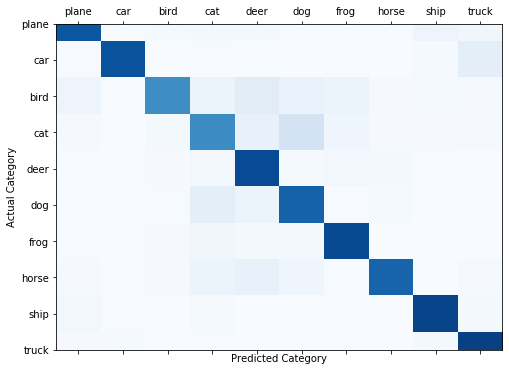

Category   - Accuracy
plane      - 85.0
car        - 86.7
bird       - 63.7
cat        - 64.6
deer       - 89.1
dog        - 80.8
frog       - 89.6
horse      - 79.8
ship       - 91.9
truck      - 93.7

Selected workers

[ 91  34 100  58  90  65  55  77  89  12   1  92  87  79  10]
Worker 91 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 58 : is  Honest
Worker 90 : is  Honest
Worker 65 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 77 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 1 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 87 : is  Stealthy_Attacker
Worker 79 : is  Stealthy_Attacker
Worker 10 : is  Honest

 | Global Training Round : 50 |


Worker 91 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.314114
Train Epoch: 1 [400/500	(81%)]	Loss: 0.355141
Train Epoch: 2 [0/500	(1%)]	Loss: 0.205132
Train Epoch: 2 [400/500	(81%)]	Loss: 0.285908
Train Epoch: 3 [0/500	(1%)]	Loss: 0.089380
Train Epoch: 3 [400/500	(81%)]	Loss: 0.206709
Train Epoch: 4 [0/500	(1%)]	Loss: 0.123105
Train Epoch: 4 [400/500	(81%)]	Loss: 0.260493
Train Epoch: 5 [0/500	(1%)]	Loss: 0.119463
Train Epoch: 5 [400/500	(81%)]	Loss: 0.214922

Worker 91 ends training in Global Round:50 |

Worker 34 starts training in Global Round:50 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  50


Train Epoch: 1 [0/500	(1%)]	Loss: 1.061043
Train Epoch: 1 [400/500	(81%)]	Loss: 0.603974
Train Epoch: 2 [0/500	(1%)]	Loss: 0.402098
Train Epoch: 2 [400/500	(81%)]	Loss: 0.435108
Train Epoch: 3 [0/500	(1%)]	Loss: 0.432131
Train Epoch: 3 [400/500	(81%)]	Loss: 0.427320
Train Epoch: 4 [0/500	(1%)]	Loss: 0.180646
Train Epoch: 4 [400/500	(81%)]	Loss: 0.212545
Train Epoch: 5 [0/500	(1%)]	Loss: 0.164738
Train Epoch: 5 [400/500	(81%)]	Loss: 0.261519

Performed attacks 1
Worker 34 ends training in Global Round:50 |

Worker 100 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.267769
Train Epoch: 1 [400/500	(81%)]	Loss: 0.418511
Train Epoch: 2 [0/500	(1%)]	Loss: 0.152768
Train Epoch: 2 [400/500	(81%)]	Loss: 0.145971
Train Epoch: 3 [0/500	(1%)]	Loss: 0.120702
Train Epoch: 3 [400/500	(81%)]	Loss: 0.177280
Train Epoch: 4 [0/500	(1%)]	Loss: 0.114160
Train Epoch: 4 [400/500	(81%)]	Loss: 0.160483
Train Epoch: 5 [0/500	(1%)]	Loss: 0.121563
Train Epoch: 5 [400/500	(81%)]	Loss: 0.197784

Worker 100 ends training in Global Round:50 |

Worker 58 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.544673
Train Epoch: 1 [400/500	(81%)]	Loss: 0.341428
Train Epoch: 2 [0/500	(1%)]	Loss: 0.292014
Train Epoch: 2 [400/500	(81%)]	Loss: 0.333587
Train Epoch: 3 [0/500	(1%)]	Loss: 0.171503
Train Epoch: 3 [400/500	(81%)]	Loss: 0.204810
Train Epoch: 4 [0/500	(1%)]	Loss: 0.191388
Train Epoch: 4 [400/500	(81%)]	Loss: 0.277406
Train Epoch: 5 [0/500	(1%)]	Loss: 0.151371
Train Epoch: 5 [400/500	(81%)]	Loss: 0.185691

Worker 58 ends training in Global Round:50 |

Worker 90 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.166727
Train Epoch: 1 [400/500	(81%)]	Loss: 0.372261
Train Epoch: 2 [0/500	(1%)]	Loss: 0.203726
Train Epoch: 2 [400/500	(81%)]	Loss: 0.233734
Train Epoch: 3 [0/500	(1%)]	Loss: 0.124379
Train Epoch: 3 [400/500	(81%)]	Loss: 0.281113
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119424
Train Epoch: 4 [400/500	(81%)]	Loss: 0.235773
Train Epoch: 5 [0/500	(1%)]	Loss: 0.069766
Train Epoch: 5 [400/500	(81%)]	Loss: 0.295208

Worker 90 ends training in Global Round:50 |

Worker 65 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.407056
Train Epoch: 1 [400/500	(81%)]	Loss: 0.613275
Train Epoch: 2 [0/500	(1%)]	Loss: 0.248701
Train Epoch: 2 [400/500	(81%)]	Loss: 0.391303
Train Epoch: 3 [0/500	(1%)]	Loss: 0.118278
Train Epoch: 3 [400/500	(81%)]	Loss: 0.259280
Train Epoch: 4 [0/500	(1%)]	Loss: 0.235461
Train Epoch: 4 [400/500	(81%)]	Loss: 0.222322
Train Epoch: 5 [0/500	(1%)]	Loss: 0.191262
Train Epoch: 5 [400/500	(81%)]	Loss: 0.071612

Worker 65 ends training in Global Round:50 |

Worker 55 starts training in Global Round:50 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  50


Train Epoch: 1 [0/500	(1%)]	Loss: 1.693451
Train Epoch: 1 [400/500	(81%)]	Loss: 0.707352
Train Epoch: 2 [0/500	(1%)]	Loss: 0.302163
Train Epoch: 2 [400/500	(81%)]	Loss: 0.637621
Train Epoch: 3 [0/500	(1%)]	Loss: 0.353801
Train Epoch: 3 [400/500	(81%)]	Loss: 0.286519
Train Epoch: 4 [0/500	(1%)]	Loss: 0.224166
Train Epoch: 4 [400/500	(81%)]	Loss: 0.554613
Train Epoch: 5 [0/500	(1%)]	Loss: 0.183884
Train Epoch: 5 [400/500	(81%)]	Loss: 0.357927

Performed attacks 2
Worker 55 ends training in Global Round:50 |

Worker 77 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.320198
Train Epoch: 1 [400/500	(81%)]	Loss: 0.600223
Train Epoch: 2 [0/500	(1%)]	Loss: 0.298980
Train Epoch: 2 [400/500	(81%)]	Loss: 0.659692
Train Epoch: 3 [0/500	(1%)]	Loss: 0.303096
Train Epoch: 3 [400/500	(81%)]	Loss: 0.296221
Train Epoch: 4 [0/500	(1%)]	Loss: 0.174976
Train Epoch: 4 [400/500	(81%)]	Loss: 0.257671
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193456
Train Epoch: 5 [400/500	(81%)]	Loss: 0.213350

Worker 77 ends training in Global Round:50 |

Worker 89 starts training in Global Round:50 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  50


Train Epoch: 1 [0/500	(1%)]	Loss: 1.395248
Train Epoch: 1 [400/500	(81%)]	Loss: 0.875092
Train Epoch: 2 [0/500	(1%)]	Loss: 0.308448
Train Epoch: 2 [400/500	(81%)]	Loss: 0.612780
Train Epoch: 3 [0/500	(1%)]	Loss: 0.365180
Train Epoch: 3 [400/500	(81%)]	Loss: 0.392047
Train Epoch: 4 [0/500	(1%)]	Loss: 0.279669
Train Epoch: 4 [400/500	(81%)]	Loss: 0.280221
Train Epoch: 5 [0/500	(1%)]	Loss: 0.219143
Train Epoch: 5 [400/500	(81%)]	Loss: 0.236951

Performed attacks 3
Worker 89 ends training in Global Round:50 |

Worker 12 starts training in Global Round:50 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  50


Train Epoch: 1 [0/500	(1%)]	Loss: 1.177989
Train Epoch: 1 [400/500	(81%)]	Loss: 0.519533
Train Epoch: 2 [0/500	(1%)]	Loss: 0.387213
Train Epoch: 2 [400/500	(81%)]	Loss: 0.481220
Train Epoch: 3 [0/500	(1%)]	Loss: 0.265498
Train Epoch: 3 [400/500	(81%)]	Loss: 0.250752
Train Epoch: 4 [0/500	(1%)]	Loss: 0.150931
Train Epoch: 4 [400/500	(81%)]	Loss: 0.181687
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138469
Train Epoch: 5 [400/500	(81%)]	Loss: 0.216851

Performed attacks 4
Worker 12 ends training in Global Round:50 |

Worker 1 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.361482
Train Epoch: 1 [400/500	(81%)]	Loss: 0.576085
Train Epoch: 2 [0/500	(1%)]	Loss: 0.233611
Train Epoch: 2 [400/500	(81%)]	Loss: 0.369179
Train Epoch: 3 [0/500	(1%)]	Loss: 0.146219
Train Epoch: 3 [400/500	(81%)]	Loss: 0.301146
Train Epoch: 4 [0/500	(1%)]	Loss: 0.248143
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169990
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133752
Train Epoch: 5 [400/500	(81%)]	Loss: 0.179455

Worker 1 ends training in Global Round:50 |

Worker 92 starts training in Global Round:50 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  50


Train Epoch: 1 [0/500	(1%)]	Loss: 1.298586
Train Epoch: 1 [400/500	(81%)]	Loss: 1.001407
Train Epoch: 2 [0/500	(1%)]	Loss: 0.228400
Train Epoch: 2 [400/500	(81%)]	Loss: 0.605231
Train Epoch: 3 [0/500	(1%)]	Loss: 0.324279
Train Epoch: 3 [400/500	(81%)]	Loss: 0.335379
Train Epoch: 4 [0/500	(1%)]	Loss: 0.312306
Train Epoch: 4 [400/500	(81%)]	Loss: 0.237073
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128907
Train Epoch: 5 [400/500	(81%)]	Loss: 0.069924

Performed attacks 5
Worker 92 ends training in Global Round:50 |

Worker 87 starts training in Global Round:50 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  50


Train Epoch: 1 [0/500	(1%)]	Loss: 1.230736
Train Epoch: 1 [400/500	(81%)]	Loss: 1.135950
Train Epoch: 2 [0/500	(1%)]	Loss: 0.456125
Train Epoch: 2 [400/500	(81%)]	Loss: 0.340376
Train Epoch: 3 [0/500	(1%)]	Loss: 0.344958
Train Epoch: 3 [400/500	(81%)]	Loss: 0.403979
Train Epoch: 4 [0/500	(1%)]	Loss: 0.284588
Train Epoch: 4 [400/500	(81%)]	Loss: 0.311011
Train Epoch: 5 [0/500	(1%)]	Loss: 0.146309
Train Epoch: 5 [400/500	(81%)]	Loss: 0.261571

Performed attacks 6
Worker 87 ends training in Global Round:50 |

Worker 79 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.462093
Train Epoch: 1 [400/500	(81%)]	Loss: 0.468244
Train Epoch: 2 [0/500	(1%)]	Loss: 0.503072
Train Epoch: 2 [400/500	(81%)]	Loss: 0.417024
Train Epoch: 3 [0/500	(1%)]	Loss: 0.229347
Train Epoch: 3 [400/500	(81%)]	Loss: 0.284696
Train Epoch: 4 [0/500	(1%)]	Loss: 0.289970
Train Epoch: 4 [400/500	(81%)]	Loss: 0.311265
Train Epoch: 5 [0/500	(1%)]	Loss: 0.131832
Train Epoch: 5 [400/500	(81%)]	Loss: 0.103648

Worker 79 ends training in Global Round:50 |

Worker 10 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.319347
Train Epoch: 1 [400/500	(81%)]	Loss: 0.271147
Train Epoch: 2 [0/500	(1%)]	Loss: 0.141749
Train Epoch: 2 [400/500	(81%)]	Loss: 0.168546
Train Epoch: 3 [0/500	(1%)]	Loss: 0.058564
Train Epoch: 3 [400/500	(81%)]	Loss: 0.282192
Train Epoch: 4 [0/500	(1%)]	Loss: 0.106918
Train Epoch: 4 [400/500	(81%)]	Loss: 0.181395
Train Epoch: 5 [0/500	(1%)]	Loss: 0.065100
Train Epoch: 5 [400/500	(81%)]	Loss: 0.244754

Worker 10 ends training in Global Round:50 |
Last layer biases  [array([ 0.03799877, -0.0305144 , -0.01725078,  0.03881788,  0.0380219 ,
       -0.01995992,  0.03901807, -0.00655084, -0.02090928, -0.0427696 ],
      dtype=float32), array([ 0.0361569 , -0.02846619, -0.01479293,  0.03846624,  0.04984301,
       -0.01634707,  0.04322859, -0.03103655, -0.02037613, -0.04077408],
      dtype=float32), array([ 0.03536604, -0.030445  , -0.01567829,  0.03771473,  0.04057361,
       -0.0178491 ,  0.03772658, -0.00863704, -0.02091385, -0.04195588],
      dtyp

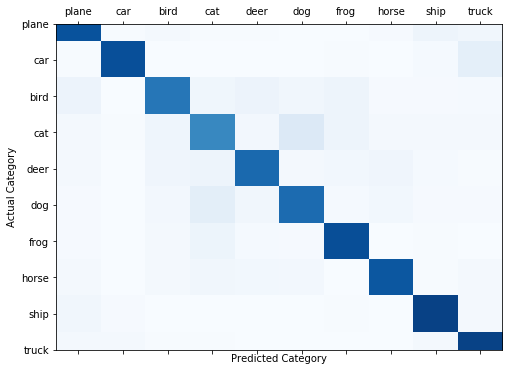

Category   - Accuracy
plane      - 87.0
car        - 87.9
bird       - 72.8
cat        - 66.4
deer       - 78.0
dog        - 77.3
frog       - 88.3
horse      - 85.0
ship       - 93.1
truck      - 92.9

Selected workers

[  2   3  47 100  14  79  69  29  64  37  20  48  53  77  99]
Worker 2 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 47 : is  Honest
Worker 100 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 79 : is  Stealthy_Attacker
Worker 69 : is  Honest
Worker 29 : is  Honest
Worker 64 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 20 : is  Honest
Worker 48 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 77 : is  Honest
Worker 99 : is  Honest

 | Global Training Round : 51 |


Worker 2 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.299577
Train Epoch: 1 [400/500	(81%)]	Loss: 0.232647
Train Epoch: 2 [0/500	(1%)]	Loss: 0.135014
Train Epoch: 2 [400/500	(81%)]	Loss: 0.202082
Train Epoch: 3 [0/500	(1%)]	Loss: 0.096982
Train Epoch: 3 [400/500	(81%)]	Loss: 0.247969
Train Epoch: 4 [0/500	(1%)]	Loss: 0.096882
Train Epoch: 4 [400/500	(81%)]	Loss: 0.071741
Train Epoch: 5 [0/500	(1%)]	Loss: 0.121879
Train Epoch: 5 [400/500	(81%)]	Loss: 0.150014

Worker 2 ends training in Global Round:51 |

Worker 3 starts training in Global Round:51 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  51


Train Epoch: 1 [0/500	(1%)]	Loss: 1.367989
Train Epoch: 1 [400/500	(81%)]	Loss: 0.818815
Train Epoch: 2 [0/500	(1%)]	Loss: 0.336935
Train Epoch: 2 [400/500	(81%)]	Loss: 0.614176
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261207
Train Epoch: 3 [400/500	(81%)]	Loss: 0.341513
Train Epoch: 4 [0/500	(1%)]	Loss: 0.331336
Train Epoch: 4 [400/500	(81%)]	Loss: 0.233431
Train Epoch: 5 [0/500	(1%)]	Loss: 0.201943
Train Epoch: 5 [400/500	(81%)]	Loss: 0.293682

Performed attacks 1
Worker 3 ends training in Global Round:51 |

Worker 47 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.330933
Train Epoch: 1 [400/500	(81%)]	Loss: 0.442048
Train Epoch: 2 [0/500	(1%)]	Loss: 0.270517
Train Epoch: 2 [400/500	(81%)]	Loss: 0.318237
Train Epoch: 3 [0/500	(1%)]	Loss: 0.165185
Train Epoch: 3 [400/500	(81%)]	Loss: 0.384530
Train Epoch: 4 [0/500	(1%)]	Loss: 0.118596
Train Epoch: 4 [400/500	(81%)]	Loss: 0.426869
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115605
Train Epoch: 5 [400/500	(81%)]	Loss: 0.275796

Worker 47 ends training in Global Round:51 |

Worker 100 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.268423
Train Epoch: 1 [400/500	(81%)]	Loss: 0.176272
Train Epoch: 2 [0/500	(1%)]	Loss: 0.119270
Train Epoch: 2 [400/500	(81%)]	Loss: 0.161145
Train Epoch: 3 [0/500	(1%)]	Loss: 0.077473
Train Epoch: 3 [400/500	(81%)]	Loss: 0.077182
Train Epoch: 4 [0/500	(1%)]	Loss: 0.111084
Train Epoch: 4 [400/500	(81%)]	Loss: 0.152963
Train Epoch: 5 [0/500	(1%)]	Loss: 0.102849
Train Epoch: 5 [400/500	(81%)]	Loss: 0.166382

Worker 100 ends training in Global Round:51 |

Worker 14 starts training in Global Round:51 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  51


Train Epoch: 1 [0/500	(1%)]	Loss: 1.142313
Train Epoch: 1 [400/500	(81%)]	Loss: 0.507932
Train Epoch: 2 [0/500	(1%)]	Loss: 0.240496
Train Epoch: 2 [400/500	(81%)]	Loss: 0.675633
Train Epoch: 3 [0/500	(1%)]	Loss: 0.280101
Train Epoch: 3 [400/500	(81%)]	Loss: 0.249476
Train Epoch: 4 [0/500	(1%)]	Loss: 0.196047
Train Epoch: 4 [400/500	(81%)]	Loss: 0.223273
Train Epoch: 5 [0/500	(1%)]	Loss: 0.206322
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177383

Performed attacks 2
Worker 14 ends training in Global Round:51 |

Worker 79 starts training in Global Round:51 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  51


Train Epoch: 1 [0/500	(1%)]	Loss: 1.070454
Train Epoch: 1 [400/500	(81%)]	Loss: 0.442624
Train Epoch: 2 [0/500	(1%)]	Loss: 0.198582
Train Epoch: 2 [400/500	(81%)]	Loss: 0.491040
Train Epoch: 3 [0/500	(1%)]	Loss: 0.262534
Train Epoch: 3 [400/500	(81%)]	Loss: 0.416134
Train Epoch: 4 [0/500	(1%)]	Loss: 0.199122
Train Epoch: 4 [400/500	(81%)]	Loss: 0.351895
Train Epoch: 5 [0/500	(1%)]	Loss: 0.210088
Train Epoch: 5 [400/500	(81%)]	Loss: 0.212118

Performed attacks 3
Worker 79 ends training in Global Round:51 |

Worker 69 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.452065
Train Epoch: 1 [400/500	(81%)]	Loss: 0.486520
Train Epoch: 2 [0/500	(1%)]	Loss: 0.199645
Train Epoch: 2 [400/500	(81%)]	Loss: 0.467688
Train Epoch: 3 [0/500	(1%)]	Loss: 0.188426
Train Epoch: 3 [400/500	(81%)]	Loss: 0.479673
Train Epoch: 4 [0/500	(1%)]	Loss: 0.244863
Train Epoch: 4 [400/500	(81%)]	Loss: 0.187611
Train Epoch: 5 [0/500	(1%)]	Loss: 0.135798
Train Epoch: 5 [400/500	(81%)]	Loss: 0.094648

Worker 69 ends training in Global Round:51 |

Worker 29 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.346056
Train Epoch: 1 [400/500	(81%)]	Loss: 0.373712
Train Epoch: 2 [0/500	(1%)]	Loss: 0.324918
Train Epoch: 2 [400/500	(81%)]	Loss: 0.145706
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145308
Train Epoch: 3 [400/500	(81%)]	Loss: 0.288055
Train Epoch: 4 [0/500	(1%)]	Loss: 0.123305
Train Epoch: 4 [400/500	(81%)]	Loss: 0.126265
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111257
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149053

Worker 29 ends training in Global Round:51 |

Worker 64 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.376621
Train Epoch: 1 [400/500	(81%)]	Loss: 0.236071
Train Epoch: 2 [0/500	(1%)]	Loss: 0.279082
Train Epoch: 2 [400/500	(81%)]	Loss: 0.308389
Train Epoch: 3 [0/500	(1%)]	Loss: 0.204116
Train Epoch: 3 [400/500	(81%)]	Loss: 0.347251
Train Epoch: 4 [0/500	(1%)]	Loss: 0.163164
Train Epoch: 4 [400/500	(81%)]	Loss: 0.108361
Train Epoch: 5 [0/500	(1%)]	Loss: 0.105108
Train Epoch: 5 [400/500	(81%)]	Loss: 0.133852

Worker 64 ends training in Global Round:51 |

Worker 37 starts training in Global Round:51 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  51


Train Epoch: 1 [0/500	(1%)]	Loss: 1.192330
Train Epoch: 1 [400/500	(81%)]	Loss: 0.806767
Train Epoch: 2 [0/500	(1%)]	Loss: 0.351282
Train Epoch: 2 [400/500	(81%)]	Loss: 0.370507
Train Epoch: 3 [0/500	(1%)]	Loss: 0.333995
Train Epoch: 3 [400/500	(81%)]	Loss: 0.265961
Train Epoch: 4 [0/500	(1%)]	Loss: 0.198800
Train Epoch: 4 [400/500	(81%)]	Loss: 0.325936
Train Epoch: 5 [0/500	(1%)]	Loss: 0.300933
Train Epoch: 5 [400/500	(81%)]	Loss: 0.293624

Performed attacks 4
Worker 37 ends training in Global Round:51 |

Worker 20 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.375908
Train Epoch: 1 [400/500	(81%)]	Loss: 0.565876
Train Epoch: 2 [0/500	(1%)]	Loss: 0.292045
Train Epoch: 2 [400/500	(81%)]	Loss: 0.284971
Train Epoch: 3 [0/500	(1%)]	Loss: 0.173724
Train Epoch: 3 [400/500	(81%)]	Loss: 0.257224
Train Epoch: 4 [0/500	(1%)]	Loss: 0.109961
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213715
Train Epoch: 5 [0/500	(1%)]	Loss: 0.141811
Train Epoch: 5 [400/500	(81%)]	Loss: 0.223094

Worker 20 ends training in Global Round:51 |

Worker 48 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.305430
Train Epoch: 1 [400/500	(81%)]	Loss: 0.531949
Train Epoch: 2 [0/500	(1%)]	Loss: 0.232533
Train Epoch: 2 [400/500	(81%)]	Loss: 0.237766
Train Epoch: 3 [0/500	(1%)]	Loss: 0.196357
Train Epoch: 3 [400/500	(81%)]	Loss: 0.081178
Train Epoch: 4 [0/500	(1%)]	Loss: 0.082049
Train Epoch: 4 [400/500	(81%)]	Loss: 0.160180
Train Epoch: 5 [0/500	(1%)]	Loss: 0.060699
Train Epoch: 5 [400/500	(81%)]	Loss: 0.183665

Worker 48 ends training in Global Round:51 |

Worker 53 starts training in Global Round:51 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  51


Train Epoch: 1 [0/500	(1%)]	Loss: 1.394250
Train Epoch: 1 [400/500	(81%)]	Loss: 0.739107
Train Epoch: 2 [0/500	(1%)]	Loss: 0.376839
Train Epoch: 2 [400/500	(81%)]	Loss: 0.637128
Train Epoch: 3 [0/500	(1%)]	Loss: 0.338183
Train Epoch: 3 [400/500	(81%)]	Loss: 0.529374
Train Epoch: 4 [0/500	(1%)]	Loss: 0.373720
Train Epoch: 4 [400/500	(81%)]	Loss: 0.305461
Train Epoch: 5 [0/500	(1%)]	Loss: 0.256881
Train Epoch: 5 [400/500	(81%)]	Loss: 0.262288

Performed attacks 5
Worker 53 ends training in Global Round:51 |

Worker 77 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.357427
Train Epoch: 1 [400/500	(81%)]	Loss: 0.369245
Train Epoch: 2 [0/500	(1%)]	Loss: 0.221960
Train Epoch: 2 [400/500	(81%)]	Loss: 0.300885
Train Epoch: 3 [0/500	(1%)]	Loss: 0.210256
Train Epoch: 3 [400/500	(81%)]	Loss: 0.229219
Train Epoch: 4 [0/500	(1%)]	Loss: 0.113439
Train Epoch: 4 [400/500	(81%)]	Loss: 0.158822
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193058
Train Epoch: 5 [400/500	(81%)]	Loss: 0.106994

Worker 77 ends training in Global Round:51 |

Worker 99 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.236109
Train Epoch: 1 [400/500	(81%)]	Loss: 0.241906
Train Epoch: 2 [0/500	(1%)]	Loss: 0.115876
Train Epoch: 2 [400/500	(81%)]	Loss: 0.277381
Train Epoch: 3 [0/500	(1%)]	Loss: 0.089752
Train Epoch: 3 [400/500	(81%)]	Loss: 0.080222
Train Epoch: 4 [0/500	(1%)]	Loss: 0.145457
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213404
Train Epoch: 5 [0/500	(1%)]	Loss: 0.250869
Train Epoch: 5 [400/500	(81%)]	Loss: 0.261349

Worker 99 ends training in Global Round:51 |
Last layer biases  [array([ 0.03513461, -0.03099398, -0.01466736,  0.03723183,  0.03851726,
       -0.01969159,  0.04031244, -0.00652819, -0.02153035, -0.04188285],
      dtype=float32), array([ 0.03921268, -0.0282134 , -0.01404971,  0.03910984,  0.05157337,
       -0.01503605,  0.03914184, -0.03232136, -0.02194977, -0.04156566],
      dtype=float32), array([ 0.03549913, -0.03176871, -0.0162801 ,  0.04121547,  0.03862944,
       -0.0191549 ,  0.03656009, -0.00728078, -0.02062309, -0.04089475],
      dtyp

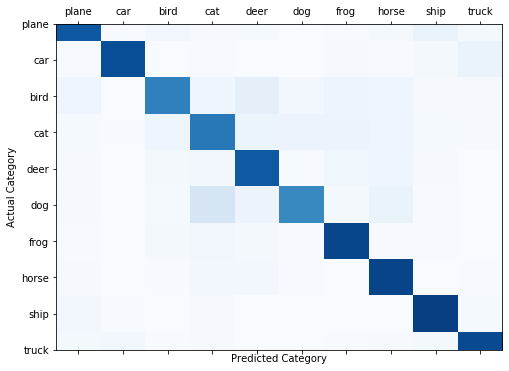

Category   - Accuracy
plane      - 84.5
car        - 88.5
bird       - 68.9
cat        - 71.9
deer       - 84.1
dog        - 66.0
frog       - 91.3
horse      - 92.0
ship       - 93.8
truck      - 89.8

Selected workers

[ 3 64  5 32 20 67 42  2  6 27 12 24 38 82 66]
Worker 3 : is  Stealthy_Attacker
Worker 64 : is  Honest
Worker 5 : is  Honest
Worker 32 : is  Honest
Worker 20 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 2 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 27 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 24 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 66 : is  Stealthy_Attacker

 | Global Training Round : 52 |


Worker 3 starts training in Global Round:52 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  52


Train Epoch: 1 [0/500	(1%)]	Loss: 1.273754
Train Epoch: 1 [400/500	(81%)]	Loss: 0.398126
Train Epoch: 2 [0/500	(1%)]	Loss: 0.366610
Train Epoch: 2 [400/500	(81%)]	Loss: 0.439358
Train Epoch: 3 [0/500	(1%)]	Loss: 0.333280
Train Epoch: 3 [400/500	(81%)]	Loss: 0.450403
Train Epoch: 4 [0/500	(1%)]	Loss: 0.332279
Train Epoch: 4 [400/500	(81%)]	Loss: 0.474500
Train Epoch: 5 [0/500	(1%)]	Loss: 0.292253
Train Epoch: 5 [400/500	(81%)]	Loss: 0.267853

Performed attacks 1
Worker 3 ends training in Global Round:52 |

Worker 64 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.347638
Train Epoch: 1 [400/500	(81%)]	Loss: 0.184286
Train Epoch: 2 [0/500	(1%)]	Loss: 0.100170
Train Epoch: 2 [400/500	(81%)]	Loss: 0.330825
Train Epoch: 3 [0/500	(1%)]	Loss: 0.090599
Train Epoch: 3 [400/500	(81%)]	Loss: 0.171997
Train Epoch: 4 [0/500	(1%)]	Loss: 0.082354
Train Epoch: 4 [400/500	(81%)]	Loss: 0.214709
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127927
Train Epoch: 5 [400/500	(81%)]	Loss: 0.057832

Worker 64 ends training in Global Round:52 |

Worker 5 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.351739
Train Epoch: 1 [400/500	(81%)]	Loss: 0.492588
Train Epoch: 2 [0/500	(1%)]	Loss: 0.250471
Train Epoch: 2 [400/500	(81%)]	Loss: 0.400491
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145016
Train Epoch: 3 [400/500	(81%)]	Loss: 0.372285
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164138
Train Epoch: 4 [400/500	(81%)]	Loss: 0.261862
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110655
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171923

Worker 5 ends training in Global Round:52 |

Worker 32 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.413407
Train Epoch: 1 [400/500	(81%)]	Loss: 0.439517
Train Epoch: 2 [0/500	(1%)]	Loss: 0.290960
Train Epoch: 2 [400/500	(81%)]	Loss: 0.369886
Train Epoch: 3 [0/500	(1%)]	Loss: 0.201120
Train Epoch: 3 [400/500	(81%)]	Loss: 0.255243
Train Epoch: 4 [0/500	(1%)]	Loss: 0.141599
Train Epoch: 4 [400/500	(81%)]	Loss: 0.272895
Train Epoch: 5 [0/500	(1%)]	Loss: 0.146557
Train Epoch: 5 [400/500	(81%)]	Loss: 0.265156

Worker 32 ends training in Global Round:52 |

Worker 20 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.407357
Train Epoch: 1 [400/500	(81%)]	Loss: 0.371197
Train Epoch: 2 [0/500	(1%)]	Loss: 0.216348
Train Epoch: 2 [400/500	(81%)]	Loss: 0.311812
Train Epoch: 3 [0/500	(1%)]	Loss: 0.079739
Train Epoch: 3 [400/500	(81%)]	Loss: 0.232671
Train Epoch: 4 [0/500	(1%)]	Loss: 0.075370
Train Epoch: 4 [400/500	(81%)]	Loss: 0.201965
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182684
Train Epoch: 5 [400/500	(81%)]	Loss: 0.147639

Worker 20 ends training in Global Round:52 |

Worker 67 starts training in Global Round:52 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  52


Train Epoch: 1 [0/500	(1%)]	Loss: 1.439797
Train Epoch: 1 [400/500	(81%)]	Loss: 0.389950
Train Epoch: 2 [0/500	(1%)]	Loss: 0.242673
Train Epoch: 2 [400/500	(81%)]	Loss: 0.484535
Train Epoch: 3 [0/500	(1%)]	Loss: 0.312410
Train Epoch: 3 [400/500	(81%)]	Loss: 0.505898
Train Epoch: 4 [0/500	(1%)]	Loss: 0.288937
Train Epoch: 4 [400/500	(81%)]	Loss: 0.294747
Train Epoch: 5 [0/500	(1%)]	Loss: 0.270152
Train Epoch: 5 [400/500	(81%)]	Loss: 0.183508

Performed attacks 2
Worker 67 ends training in Global Round:52 |

Worker 42 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.550921
Train Epoch: 1 [400/500	(81%)]	Loss: 0.469834
Train Epoch: 2 [0/500	(1%)]	Loss: 0.360425
Train Epoch: 2 [400/500	(81%)]	Loss: 0.395501
Train Epoch: 3 [0/500	(1%)]	Loss: 0.170255
Train Epoch: 3 [400/500	(81%)]	Loss: 0.290027
Train Epoch: 4 [0/500	(1%)]	Loss: 0.159477
Train Epoch: 4 [400/500	(81%)]	Loss: 0.322012
Train Epoch: 5 [0/500	(1%)]	Loss: 0.152439
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253923

Worker 42 ends training in Global Round:52 |

Worker 2 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.154413
Train Epoch: 1 [400/500	(81%)]	Loss: 0.165429
Train Epoch: 2 [0/500	(1%)]	Loss: 0.127284
Train Epoch: 2 [400/500	(81%)]	Loss: 0.132386
Train Epoch: 3 [0/500	(1%)]	Loss: 0.111245
Train Epoch: 3 [400/500	(81%)]	Loss: 0.181034
Train Epoch: 4 [0/500	(1%)]	Loss: 0.068171
Train Epoch: 4 [400/500	(81%)]	Loss: 0.091889
Train Epoch: 5 [0/500	(1%)]	Loss: 0.137869
Train Epoch: 5 [400/500	(81%)]	Loss: 0.235718

Worker 2 ends training in Global Round:52 |

Worker 6 starts training in Global Round:52 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  52


Train Epoch: 1 [0/500	(1%)]	Loss: 0.762880
Train Epoch: 1 [400/500	(81%)]	Loss: 0.810682
Train Epoch: 2 [0/500	(1%)]	Loss: 0.206190
Train Epoch: 2 [400/500	(81%)]	Loss: 0.391340
Train Epoch: 3 [0/500	(1%)]	Loss: 0.254368
Train Epoch: 3 [400/500	(81%)]	Loss: 0.346147
Train Epoch: 4 [0/500	(1%)]	Loss: 0.269972
Train Epoch: 4 [400/500	(81%)]	Loss: 0.407620
Train Epoch: 5 [0/500	(1%)]	Loss: 0.139618
Train Epoch: 5 [400/500	(81%)]	Loss: 0.300821

Performed attacks 3
Worker 6 ends training in Global Round:52 |

Worker 27 starts training in Global Round:52 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  52


Train Epoch: 1 [0/500	(1%)]	Loss: 1.490699
Train Epoch: 1 [400/500	(81%)]	Loss: 0.542954
Train Epoch: 2 [0/500	(1%)]	Loss: 0.159816
Train Epoch: 2 [400/500	(81%)]	Loss: 0.465019
Train Epoch: 3 [0/500	(1%)]	Loss: 0.252871
Train Epoch: 3 [400/500	(81%)]	Loss: 0.337332
Train Epoch: 4 [0/500	(1%)]	Loss: 0.284010
Train Epoch: 4 [400/500	(81%)]	Loss: 0.206029
Train Epoch: 5 [0/500	(1%)]	Loss: 0.183093
Train Epoch: 5 [400/500	(81%)]	Loss: 0.202054

Performed attacks 4
Worker 27 ends training in Global Round:52 |

Worker 12 starts training in Global Round:52 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  52


Train Epoch: 1 [0/500	(1%)]	Loss: 1.032110
Train Epoch: 1 [400/500	(81%)]	Loss: 0.620229
Train Epoch: 2 [0/500	(1%)]	Loss: 0.241296
Train Epoch: 2 [400/500	(81%)]	Loss: 0.466985
Train Epoch: 3 [0/500	(1%)]	Loss: 0.383886
Train Epoch: 3 [400/500	(81%)]	Loss: 0.456846
Train Epoch: 4 [0/500	(1%)]	Loss: 0.132159
Train Epoch: 4 [400/500	(81%)]	Loss: 0.379228
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115143
Train Epoch: 5 [400/500	(81%)]	Loss: 0.193654

Performed attacks 5
Worker 12 ends training in Global Round:52 |

Worker 24 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.173336
Train Epoch: 1 [400/500	(81%)]	Loss: 0.148901
Train Epoch: 2 [0/500	(1%)]	Loss: 0.096127
Train Epoch: 2 [400/500	(81%)]	Loss: 0.220633
Train Epoch: 3 [0/500	(1%)]	Loss: 0.113537
Train Epoch: 3 [400/500	(81%)]	Loss: 0.063721
Train Epoch: 4 [0/500	(1%)]	Loss: 0.067304
Train Epoch: 4 [400/500	(81%)]	Loss: 0.189217
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112765
Train Epoch: 5 [400/500	(81%)]	Loss: 0.050169

Worker 24 ends training in Global Round:52 |

Worker 38 starts training in Global Round:52 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  52


Train Epoch: 1 [0/500	(1%)]	Loss: 1.148171
Train Epoch: 1 [400/500	(81%)]	Loss: 0.839946
Train Epoch: 2 [0/500	(1%)]	Loss: 0.298740
Train Epoch: 2 [400/500	(81%)]	Loss: 0.436754
Train Epoch: 3 [0/500	(1%)]	Loss: 0.215237
Train Epoch: 3 [400/500	(81%)]	Loss: 0.327937
Train Epoch: 4 [0/500	(1%)]	Loss: 0.252090
Train Epoch: 4 [400/500	(81%)]	Loss: 0.310480
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160908
Train Epoch: 5 [400/500	(81%)]	Loss: 0.340315

Performed attacks 6
Worker 38 ends training in Global Round:52 |

Worker 82 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.391443
Train Epoch: 1 [400/500	(81%)]	Loss: 0.557608
Train Epoch: 2 [0/500	(1%)]	Loss: 0.195801
Train Epoch: 2 [400/500	(81%)]	Loss: 0.267561
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142882
Train Epoch: 3 [400/500	(81%)]	Loss: 0.241440
Train Epoch: 4 [0/500	(1%)]	Loss: 0.203998
Train Epoch: 4 [400/500	(81%)]	Loss: 0.154752
Train Epoch: 5 [0/500	(1%)]	Loss: 0.191207
Train Epoch: 5 [400/500	(81%)]	Loss: 0.164397

Worker 82 ends training in Global Round:52 |

Worker 66 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.360252
Train Epoch: 1 [400/500	(81%)]	Loss: 0.692898
Train Epoch: 2 [0/500	(1%)]	Loss: 0.284778
Train Epoch: 2 [400/500	(81%)]	Loss: 0.387930
Train Epoch: 3 [0/500	(1%)]	Loss: 0.436130
Train Epoch: 3 [400/500	(81%)]	Loss: 0.158447
Train Epoch: 4 [0/500	(1%)]	Loss: 0.329034
Train Epoch: 4 [400/500	(81%)]	Loss: 0.314015
Train Epoch: 5 [0/500	(1%)]	Loss: 0.233266
Train Epoch: 5 [400/500	(81%)]	Loss: 0.248924

Worker 66 ends training in Global Round:52 |
Last layer biases  [array([ 0.03688519, -0.02918451, -0.01192165,  0.03847884,  0.04637133,
       -0.01507917,  0.04039986, -0.0286932 , -0.02058077, -0.04077413],
      dtype=float32), array([ 0.0342151 , -0.03080885, -0.01605934,  0.03875311,  0.03655911,
       -0.0171902 ,  0.04043935, -0.00681998, -0.02088362, -0.0423029 ],
      dtype=float32), array([ 0.03496996, -0.03123676, -0.01455267,  0.03914167,  0.0383734 ,
       -0.01773768,  0.03882202, -0.00744375, -0.02298069, -0.04145373],
      dtyp

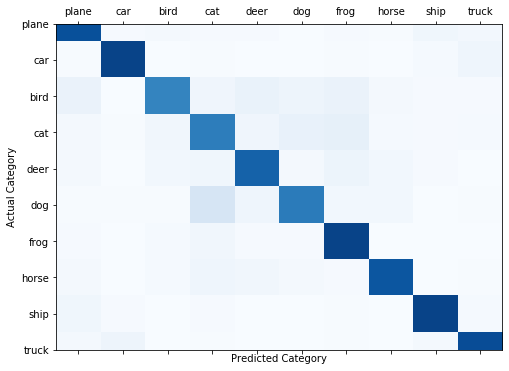

Category   - Accuracy
plane      - 87.8
car        - 92.4
bird       - 67.5
cat        - 70.3
deer       - 80.8
dog        - 70.9
frog       - 92.5
horse      - 85.5
ship       - 92.5
truck      - 88.9

Selected workers

[67 28 78 73  4 50 86 33 91 16 18 60 95 72 57]
Worker 67 : is  Stealthy_Attacker
Worker 28 : is  Stealthy_Attacker
Worker 78 : is  Honest
Worker 73 : is  Honest
Worker 4 : is  Honest
Worker 50 : is  Stealthy_Attacker
Worker 86 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 18 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 95 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 57 : is  Honest

 | Global Training Round : 53 |


Worker 67 starts training in Global Round:53 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  53


Train Epoch: 1 [0/500	(1%)]	Loss: 1.169333
Train Epoch: 1 [400/500	(81%)]	Loss: 0.557820
Train Epoch: 2 [0/500	(1%)]	Loss: 0.430532
Train Epoch: 2 [400/500	(81%)]	Loss: 0.670566
Train Epoch: 3 [0/500	(1%)]	Loss: 0.341284
Train Epoch: 3 [400/500	(81%)]	Loss: 0.243570
Train Epoch: 4 [0/500	(1%)]	Loss: 0.326968
Train Epoch: 4 [400/500	(81%)]	Loss: 0.258415
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157250
Train Epoch: 5 [400/500	(81%)]	Loss: 0.286276

Performed attacks 1
Worker 67 ends training in Global Round:53 |

Worker 28 starts training in Global Round:53 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  53


Train Epoch: 1 [0/500	(1%)]	Loss: 1.032344
Train Epoch: 1 [400/500	(81%)]	Loss: 0.654038
Train Epoch: 2 [0/500	(1%)]	Loss: 0.352127
Train Epoch: 2 [400/500	(81%)]	Loss: 0.349376
Train Epoch: 3 [0/500	(1%)]	Loss: 0.316276
Train Epoch: 3 [400/500	(81%)]	Loss: 0.300882
Train Epoch: 4 [0/500	(1%)]	Loss: 0.306081
Train Epoch: 4 [400/500	(81%)]	Loss: 0.210372
Train Epoch: 5 [0/500	(1%)]	Loss: 0.206461
Train Epoch: 5 [400/500	(81%)]	Loss: 0.184995

Performed attacks 2
Worker 28 ends training in Global Round:53 |

Worker 78 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.596324
Train Epoch: 1 [400/500	(81%)]	Loss: 0.603080
Train Epoch: 2 [0/500	(1%)]	Loss: 0.376096
Train Epoch: 2 [400/500	(81%)]	Loss: 0.348421
Train Epoch: 3 [0/500	(1%)]	Loss: 0.205722
Train Epoch: 3 [400/500	(81%)]	Loss: 0.423952
Train Epoch: 4 [0/500	(1%)]	Loss: 0.188986
Train Epoch: 4 [400/500	(81%)]	Loss: 0.296668
Train Epoch: 5 [0/500	(1%)]	Loss: 0.153315
Train Epoch: 5 [400/500	(81%)]	Loss: 0.378320

Worker 78 ends training in Global Round:53 |

Worker 73 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.261558
Train Epoch: 1 [400/500	(81%)]	Loss: 0.397564
Train Epoch: 2 [0/500	(1%)]	Loss: 0.128660
Train Epoch: 2 [400/500	(81%)]	Loss: 0.216628
Train Epoch: 3 [0/500	(1%)]	Loss: 0.114497
Train Epoch: 3 [400/500	(81%)]	Loss: 0.228005
Train Epoch: 4 [0/500	(1%)]	Loss: 0.114722
Train Epoch: 4 [400/500	(81%)]	Loss: 0.314019
Train Epoch: 5 [0/500	(1%)]	Loss: 0.101198
Train Epoch: 5 [400/500	(81%)]	Loss: 0.090935

Worker 73 ends training in Global Round:53 |

Worker 4 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.252361
Train Epoch: 1 [400/500	(81%)]	Loss: 0.391273
Train Epoch: 2 [0/500	(1%)]	Loss: 0.291721
Train Epoch: 2 [400/500	(81%)]	Loss: 0.307498
Train Epoch: 3 [0/500	(1%)]	Loss: 0.225543
Train Epoch: 3 [400/500	(81%)]	Loss: 0.246619
Train Epoch: 4 [0/500	(1%)]	Loss: 0.189183
Train Epoch: 4 [400/500	(81%)]	Loss: 0.286331
Train Epoch: 5 [0/500	(1%)]	Loss: 0.070230
Train Epoch: 5 [400/500	(81%)]	Loss: 0.217834

Worker 4 ends training in Global Round:53 |

Worker 50 starts training in Global Round:53 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  53


Train Epoch: 1 [0/500	(1%)]	Loss: 1.085355
Train Epoch: 1 [400/500	(81%)]	Loss: 0.717863
Train Epoch: 2 [0/500	(1%)]	Loss: 0.309219
Train Epoch: 2 [400/500	(81%)]	Loss: 0.463507
Train Epoch: 3 [0/500	(1%)]	Loss: 0.392866
Train Epoch: 3 [400/500	(81%)]	Loss: 0.387071
Train Epoch: 4 [0/500	(1%)]	Loss: 0.258829
Train Epoch: 4 [400/500	(81%)]	Loss: 0.419843
Train Epoch: 5 [0/500	(1%)]	Loss: 0.177337
Train Epoch: 5 [400/500	(81%)]	Loss: 0.309249

Performed attacks 3
Worker 50 ends training in Global Round:53 |

Worker 86 starts training in Global Round:53 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  53


Train Epoch: 1 [0/500	(1%)]	Loss: 1.244357
Train Epoch: 1 [400/500	(81%)]	Loss: 0.744726
Train Epoch: 2 [0/500	(1%)]	Loss: 0.289763
Train Epoch: 2 [400/500	(81%)]	Loss: 0.459182
Train Epoch: 3 [0/500	(1%)]	Loss: 0.155149
Train Epoch: 3 [400/500	(81%)]	Loss: 0.264936
Train Epoch: 4 [0/500	(1%)]	Loss: 0.284557
Train Epoch: 4 [400/500	(81%)]	Loss: 0.399369
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064715
Train Epoch: 5 [400/500	(81%)]	Loss: 0.226040

Performed attacks 4
Worker 86 ends training in Global Round:53 |

Worker 33 starts training in Global Round:53 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  53


Train Epoch: 1 [0/500	(1%)]	Loss: 1.105265
Train Epoch: 1 [400/500	(81%)]	Loss: 0.656282
Train Epoch: 2 [0/500	(1%)]	Loss: 0.389341
Train Epoch: 2 [400/500	(81%)]	Loss: 0.804254
Train Epoch: 3 [0/500	(1%)]	Loss: 0.266422
Train Epoch: 3 [400/500	(81%)]	Loss: 0.216118
Train Epoch: 4 [0/500	(1%)]	Loss: 0.191852
Train Epoch: 4 [400/500	(81%)]	Loss: 0.248973
Train Epoch: 5 [0/500	(1%)]	Loss: 0.181035
Train Epoch: 5 [400/500	(81%)]	Loss: 0.213560

Performed attacks 5
Worker 33 ends training in Global Round:53 |

Worker 91 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.325839
Train Epoch: 1 [400/500	(81%)]	Loss: 0.315958
Train Epoch: 2 [0/500	(1%)]	Loss: 0.148985
Train Epoch: 2 [400/500	(81%)]	Loss: 0.193515
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127428
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234203
Train Epoch: 4 [0/500	(1%)]	Loss: 0.102504
Train Epoch: 4 [400/500	(81%)]	Loss: 0.244016
Train Epoch: 5 [0/500	(1%)]	Loss: 0.094884
Train Epoch: 5 [400/500	(81%)]	Loss: 0.052683

Worker 91 ends training in Global Round:53 |

Worker 16 starts training in Global Round:53 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  53


Train Epoch: 1 [0/500	(1%)]	Loss: 1.214362
Train Epoch: 1 [400/500	(81%)]	Loss: 0.570797
Train Epoch: 2 [0/500	(1%)]	Loss: 0.427086
Train Epoch: 2 [400/500	(81%)]	Loss: 0.423736
Train Epoch: 3 [0/500	(1%)]	Loss: 0.343539
Train Epoch: 3 [400/500	(81%)]	Loss: 0.501759
Train Epoch: 4 [0/500	(1%)]	Loss: 0.359541
Train Epoch: 4 [400/500	(81%)]	Loss: 0.342695
Train Epoch: 5 [0/500	(1%)]	Loss: 0.168773
Train Epoch: 5 [400/500	(81%)]	Loss: 0.324654

Performed attacks 6
Worker 16 ends training in Global Round:53 |

Worker 18 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.556967
Train Epoch: 1 [400/500	(81%)]	Loss: 0.656516
Train Epoch: 2 [0/500	(1%)]	Loss: 0.375550
Train Epoch: 2 [400/500	(81%)]	Loss: 0.450369
Train Epoch: 3 [0/500	(1%)]	Loss: 0.379447
Train Epoch: 3 [400/500	(81%)]	Loss: 0.539456
Train Epoch: 4 [0/500	(1%)]	Loss: 0.321283
Train Epoch: 4 [400/500	(81%)]	Loss: 0.319024
Train Epoch: 5 [0/500	(1%)]	Loss: 0.202849
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171005

Worker 18 ends training in Global Round:53 |

Worker 60 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.659570
Train Epoch: 1 [400/500	(81%)]	Loss: 0.387676
Train Epoch: 2 [0/500	(1%)]	Loss: 0.264718
Train Epoch: 2 [400/500	(81%)]	Loss: 0.399363
Train Epoch: 3 [0/500	(1%)]	Loss: 0.190484
Train Epoch: 3 [400/500	(81%)]	Loss: 0.327143
Train Epoch: 4 [0/500	(1%)]	Loss: 0.093430
Train Epoch: 4 [400/500	(81%)]	Loss: 0.150446
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111612
Train Epoch: 5 [400/500	(81%)]	Loss: 0.115623

Worker 60 ends training in Global Round:53 |

Worker 95 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.422792
Train Epoch: 1 [400/500	(81%)]	Loss: 0.359883
Train Epoch: 2 [0/500	(1%)]	Loss: 0.219683
Train Epoch: 2 [400/500	(81%)]	Loss: 0.374405
Train Epoch: 3 [0/500	(1%)]	Loss: 0.289017
Train Epoch: 3 [400/500	(81%)]	Loss: 0.219775
Train Epoch: 4 [0/500	(1%)]	Loss: 0.103595
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192307
Train Epoch: 5 [0/500	(1%)]	Loss: 0.194297
Train Epoch: 5 [400/500	(81%)]	Loss: 0.281520

Worker 95 ends training in Global Round:53 |

Worker 72 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.496013
Train Epoch: 1 [400/500	(81%)]	Loss: 0.516669
Train Epoch: 2 [0/500	(1%)]	Loss: 0.326014
Train Epoch: 2 [400/500	(81%)]	Loss: 0.371990
Train Epoch: 3 [0/500	(1%)]	Loss: 0.228006
Train Epoch: 3 [400/500	(81%)]	Loss: 0.244984
Train Epoch: 4 [0/500	(1%)]	Loss: 0.166011
Train Epoch: 4 [400/500	(81%)]	Loss: 0.317327
Train Epoch: 5 [0/500	(1%)]	Loss: 0.103166
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149765

Worker 72 ends training in Global Round:53 |

Worker 57 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.362011
Train Epoch: 1 [400/500	(81%)]	Loss: 0.480981
Train Epoch: 2 [0/500	(1%)]	Loss: 0.188136
Train Epoch: 2 [400/500	(81%)]	Loss: 0.264884
Train Epoch: 3 [0/500	(1%)]	Loss: 0.176691
Train Epoch: 3 [400/500	(81%)]	Loss: 0.238486
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164653
Train Epoch: 4 [400/500	(81%)]	Loss: 0.273802
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128699
Train Epoch: 5 [400/500	(81%)]	Loss: 0.172116

Worker 57 ends training in Global Round:53 |
Last layer biases  [array([ 0.03949764, -0.03190451, -0.01182379,  0.03866358,  0.05042883,
       -0.01543724,  0.03883116, -0.02854927, -0.02195638, -0.04184822],
      dtype=float32), array([ 0.0373658 , -0.02858083, -0.01597038,  0.03863364,  0.04947118,
       -0.01611883,  0.04342237, -0.02854118, -0.02264029, -0.04113964],
      dtype=float32), array([ 0.03631031, -0.03030408, -0.01405902,  0.03946972,  0.0384725 ,
       -0.01735409,  0.03881972, -0.0097478 , -0.02340337, -0.04230211],
      dtyp

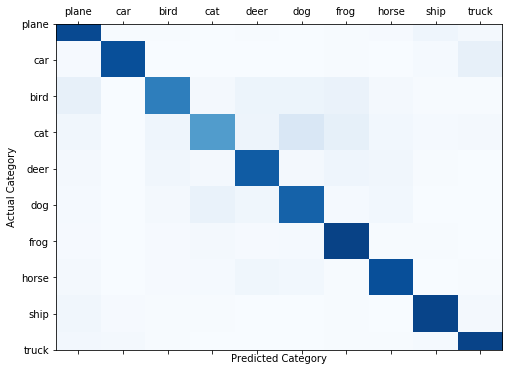

Category   - Accuracy
plane      - 90.0
car        - 88.0
bird       - 69.7
cat        - 57.7
deer       - 82.9
dog        - 80.8
frog       - 92.7
horse      - 87.9
ship       - 91.9
truck      - 92.5

Selected workers

[27  3 20 53 81  1 29  8 97 98 92 17 67 33 19]
Worker 27 : is  Stealthy_Attacker
Worker 3 : is  Stealthy_Attacker
Worker 20 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 1 : is  Honest
Worker 29 : is  Honest
Worker 8 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 92 : is  Stealthy_Attacker
Worker 17 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 19 : is  Stealthy_Attacker

 | Global Training Round : 54 |


Worker 27 starts training in Global Round:54 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  54


Train Epoch: 1 [0/500	(1%)]	Loss: 1.210504
Train Epoch: 1 [400/500	(81%)]	Loss: 0.610382
Train Epoch: 2 [0/500	(1%)]	Loss: 0.213987
Train Epoch: 2 [400/500	(81%)]	Loss: 0.526810
Train Epoch: 3 [0/500	(1%)]	Loss: 0.240886
Train Epoch: 3 [400/500	(81%)]	Loss: 0.436791
Train Epoch: 4 [0/500	(1%)]	Loss: 0.262474
Train Epoch: 4 [400/500	(81%)]	Loss: 0.235956
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160531
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177883

Performed attacks 1
Worker 27 ends training in Global Round:54 |

Worker 3 starts training in Global Round:54 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  54


Train Epoch: 1 [0/500	(1%)]	Loss: 1.173933
Train Epoch: 1 [400/500	(81%)]	Loss: 0.688861
Train Epoch: 2 [0/500	(1%)]	Loss: 0.307812
Train Epoch: 2 [400/500	(81%)]	Loss: 0.395852
Train Epoch: 3 [0/500	(1%)]	Loss: 0.337615
Train Epoch: 3 [400/500	(81%)]	Loss: 0.286950
Train Epoch: 4 [0/500	(1%)]	Loss: 0.203009
Train Epoch: 4 [400/500	(81%)]	Loss: 0.273779
Train Epoch: 5 [0/500	(1%)]	Loss: 0.196297
Train Epoch: 5 [400/500	(81%)]	Loss: 0.259420

Performed attacks 2
Worker 3 ends training in Global Round:54 |

Worker 20 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.211175
Train Epoch: 1 [400/500	(81%)]	Loss: 0.382558
Train Epoch: 2 [0/500	(1%)]	Loss: 0.104364
Train Epoch: 2 [400/500	(81%)]	Loss: 0.318539
Train Epoch: 3 [0/500	(1%)]	Loss: 0.095994
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234240
Train Epoch: 4 [0/500	(1%)]	Loss: 0.113885
Train Epoch: 4 [400/500	(81%)]	Loss: 0.254980
Train Epoch: 5 [0/500	(1%)]	Loss: 0.154437
Train Epoch: 5 [400/500	(81%)]	Loss: 0.244071

Worker 20 ends training in Global Round:54 |

Worker 53 starts training in Global Round:54 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  54


Train Epoch: 1 [0/500	(1%)]	Loss: 1.265219
Train Epoch: 1 [400/500	(81%)]	Loss: 0.622254
Train Epoch: 2 [0/500	(1%)]	Loss: 0.338841
Train Epoch: 2 [400/500	(81%)]	Loss: 0.612226
Train Epoch: 3 [0/500	(1%)]	Loss: 0.385612
Train Epoch: 3 [400/500	(81%)]	Loss: 0.320658
Train Epoch: 4 [0/500	(1%)]	Loss: 0.202706
Train Epoch: 4 [400/500	(81%)]	Loss: 0.363383
Train Epoch: 5 [0/500	(1%)]	Loss: 0.189507
Train Epoch: 5 [400/500	(81%)]	Loss: 0.214268

Performed attacks 3
Worker 53 ends training in Global Round:54 |

Worker 81 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.456021
Train Epoch: 1 [400/500	(81%)]	Loss: 0.302146
Train Epoch: 2 [0/500	(1%)]	Loss: 0.184857
Train Epoch: 2 [400/500	(81%)]	Loss: 0.125516
Train Epoch: 3 [0/500	(1%)]	Loss: 0.110257
Train Epoch: 3 [400/500	(81%)]	Loss: 0.200392
Train Epoch: 4 [0/500	(1%)]	Loss: 0.047107
Train Epoch: 4 [400/500	(81%)]	Loss: 0.082953
Train Epoch: 5 [0/500	(1%)]	Loss: 0.041324
Train Epoch: 5 [400/500	(81%)]	Loss: 0.060090

Worker 81 ends training in Global Round:54 |

Worker 1 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.322675
Train Epoch: 1 [400/500	(81%)]	Loss: 0.347116
Train Epoch: 2 [0/500	(1%)]	Loss: 0.150551
Train Epoch: 2 [400/500	(81%)]	Loss: 0.217709
Train Epoch: 3 [0/500	(1%)]	Loss: 0.210129
Train Epoch: 3 [400/500	(81%)]	Loss: 0.145431
Train Epoch: 4 [0/500	(1%)]	Loss: 0.130732
Train Epoch: 4 [400/500	(81%)]	Loss: 0.246663
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133265
Train Epoch: 5 [400/500	(81%)]	Loss: 0.096153

Worker 1 ends training in Global Round:54 |

Worker 29 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.241863
Train Epoch: 1 [400/500	(81%)]	Loss: 0.377170
Train Epoch: 2 [0/500	(1%)]	Loss: 0.183940
Train Epoch: 2 [400/500	(81%)]	Loss: 0.380117
Train Epoch: 3 [0/500	(1%)]	Loss: 0.157040
Train Epoch: 3 [400/500	(81%)]	Loss: 0.112708
Train Epoch: 4 [0/500	(1%)]	Loss: 0.160578
Train Epoch: 4 [400/500	(81%)]	Loss: 0.155355
Train Epoch: 5 [0/500	(1%)]	Loss: 0.079416
Train Epoch: 5 [400/500	(81%)]	Loss: 0.076076

Worker 29 ends training in Global Round:54 |

Worker 8 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.469144
Train Epoch: 1 [400/500	(81%)]	Loss: 0.420028
Train Epoch: 2 [0/500	(1%)]	Loss: 0.184841
Train Epoch: 2 [400/500	(81%)]	Loss: 0.245478
Train Epoch: 3 [0/500	(1%)]	Loss: 0.204228
Train Epoch: 3 [400/500	(81%)]	Loss: 0.310473
Train Epoch: 4 [0/500	(1%)]	Loss: 0.139406
Train Epoch: 4 [400/500	(81%)]	Loss: 0.181309
Train Epoch: 5 [0/500	(1%)]	Loss: 0.091591
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139601

Worker 8 ends training in Global Round:54 |

Worker 97 starts training in Global Round:54 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  54


Train Epoch: 1 [0/500	(1%)]	Loss: 1.119624
Train Epoch: 1 [400/500	(81%)]	Loss: 0.921599
Train Epoch: 2 [0/500	(1%)]	Loss: 0.265570
Train Epoch: 2 [400/500	(81%)]	Loss: 0.559281
Train Epoch: 3 [0/500	(1%)]	Loss: 0.377415
Train Epoch: 3 [400/500	(81%)]	Loss: 0.226186
Train Epoch: 4 [0/500	(1%)]	Loss: 0.243963
Train Epoch: 4 [400/500	(81%)]	Loss: 0.194389
Train Epoch: 5 [0/500	(1%)]	Loss: 0.173882
Train Epoch: 5 [400/500	(81%)]	Loss: 0.216622

Performed attacks 4
Worker 97 ends training in Global Round:54 |

Worker 98 starts training in Global Round:54 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  54


Train Epoch: 1 [0/500	(1%)]	Loss: 1.192511
Train Epoch: 1 [400/500	(81%)]	Loss: 0.928112
Train Epoch: 2 [0/500	(1%)]	Loss: 0.321239
Train Epoch: 2 [400/500	(81%)]	Loss: 0.435456
Train Epoch: 3 [0/500	(1%)]	Loss: 0.333356
Train Epoch: 3 [400/500	(81%)]	Loss: 0.382987
Train Epoch: 4 [0/500	(1%)]	Loss: 0.196717
Train Epoch: 4 [400/500	(81%)]	Loss: 0.259991
Train Epoch: 5 [0/500	(1%)]	Loss: 0.169705
Train Epoch: 5 [400/500	(81%)]	Loss: 0.163354

Performed attacks 5
Worker 98 ends training in Global Round:54 |

Worker 92 starts training in Global Round:54 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  54


Train Epoch: 1 [0/500	(1%)]	Loss: 0.880856
Train Epoch: 1 [400/500	(81%)]	Loss: 0.788870
Train Epoch: 2 [0/500	(1%)]	Loss: 0.420263
Train Epoch: 2 [400/500	(81%)]	Loss: 0.476693
Train Epoch: 3 [0/500	(1%)]	Loss: 0.353207
Train Epoch: 3 [400/500	(81%)]	Loss: 0.309170
Train Epoch: 4 [0/500	(1%)]	Loss: 0.221029
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213469
Train Epoch: 5 [0/500	(1%)]	Loss: 0.158597
Train Epoch: 5 [400/500	(81%)]	Loss: 0.173504

Performed attacks 6
Worker 92 ends training in Global Round:54 |

Worker 17 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.480947
Train Epoch: 1 [400/500	(81%)]	Loss: 0.591816
Train Epoch: 2 [0/500	(1%)]	Loss: 0.196077
Train Epoch: 2 [400/500	(81%)]	Loss: 0.392505
Train Epoch: 3 [0/500	(1%)]	Loss: 0.255311
Train Epoch: 3 [400/500	(81%)]	Loss: 0.347887
Train Epoch: 4 [0/500	(1%)]	Loss: 0.189283
Train Epoch: 4 [400/500	(81%)]	Loss: 0.438910
Train Epoch: 5 [0/500	(1%)]	Loss: 0.241982
Train Epoch: 5 [400/500	(81%)]	Loss: 0.409698

Worker 17 ends training in Global Round:54 |

Worker 67 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.276927
Train Epoch: 1 [400/500	(81%)]	Loss: 0.541868
Train Epoch: 2 [0/500	(1%)]	Loss: 0.403180
Train Epoch: 2 [400/500	(81%)]	Loss: 0.329362
Train Epoch: 3 [0/500	(1%)]	Loss: 0.292319
Train Epoch: 3 [400/500	(81%)]	Loss: 0.251667
Train Epoch: 4 [0/500	(1%)]	Loss: 0.192695
Train Epoch: 4 [400/500	(81%)]	Loss: 0.254296
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170124
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171884

Worker 67 ends training in Global Round:54 |

Worker 33 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.419760
Train Epoch: 1 [400/500	(81%)]	Loss: 0.665474
Train Epoch: 2 [0/500	(1%)]	Loss: 0.481410
Train Epoch: 2 [400/500	(81%)]	Loss: 0.608365
Train Epoch: 3 [0/500	(1%)]	Loss: 0.281781
Train Epoch: 3 [400/500	(81%)]	Loss: 0.416557
Train Epoch: 4 [0/500	(1%)]	Loss: 0.300548
Train Epoch: 4 [400/500	(81%)]	Loss: 0.256825
Train Epoch: 5 [0/500	(1%)]	Loss: 0.207566
Train Epoch: 5 [400/500	(81%)]	Loss: 0.236736

Worker 33 ends training in Global Round:54 |

Worker 19 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.390054
Train Epoch: 1 [400/500	(81%)]	Loss: 0.812568
Train Epoch: 2 [0/500	(1%)]	Loss: 0.200924
Train Epoch: 2 [400/500	(81%)]	Loss: 0.482640
Train Epoch: 3 [0/500	(1%)]	Loss: 0.243172
Train Epoch: 3 [400/500	(81%)]	Loss: 0.538227
Train Epoch: 4 [0/500	(1%)]	Loss: 0.166209
Train Epoch: 4 [400/500	(81%)]	Loss: 0.238714
Train Epoch: 5 [0/500	(1%)]	Loss: 0.221621
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117410

Worker 19 ends training in Global Round:54 |
Last layer biases  [array([ 0.03642387, -0.03170212, -0.01050329,  0.03757487,  0.04901538,
       -0.01463886,  0.04106886, -0.02855313, -0.02162113, -0.04116266],
      dtype=float32), array([ 0.03590566, -0.03044077, -0.01115633,  0.03881562,  0.04968968,
       -0.01410795,  0.03890641, -0.0285523 , -0.02228107, -0.04087713],
      dtype=float32), array([ 0.03345158, -0.02983435, -0.01589238,  0.03693352,  0.03850419,
       -0.01412002,  0.03821371, -0.00733417, -0.02270839, -0.04131186],
      dtyp

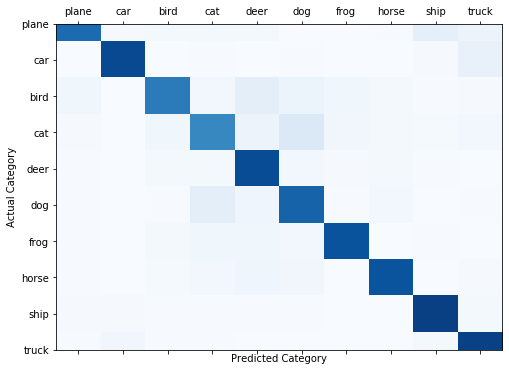

Category   - Accuracy
plane      - 77.3
car        - 90.2
bird       - 71.0
cat        - 66.7
deer       - 88.8
dog        - 80.1
frog       - 86.6
horse      - 86.0
ship       - 93.5
truck      - 93.0

Selected workers

[60 30 47 55 73 95 99 11 14 39 87 56 41 69 65]
Worker 60 : is  Honest
Worker 30 : is  Honest
Worker 47 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 73 : is  Honest
Worker 95 : is  Honest
Worker 99 : is  Honest
Worker 11 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 39 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 56 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 69 : is  Honest
Worker 65 : is  Honest

 | Global Training Round : 55 |


Worker 60 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.286137
Train Epoch: 1 [400/500	(81%)]	Loss: 0.270034
Train Epoch: 2 [0/500	(1%)]	Loss: 0.237982
Train Epoch: 2 [400/500	(81%)]	Loss: 0.214550
Train Epoch: 3 [0/500	(1%)]	Loss: 0.120183
Train Epoch: 3 [400/500	(81%)]	Loss: 0.216719
Train Epoch: 4 [0/500	(1%)]	Loss: 0.166379
Train Epoch: 4 [400/500	(81%)]	Loss: 0.241489
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106624
Train Epoch: 5 [400/500	(81%)]	Loss: 0.132147

Worker 60 ends training in Global Round:55 |

Worker 30 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.395043
Train Epoch: 1 [400/500	(81%)]	Loss: 0.275466
Train Epoch: 2 [0/500	(1%)]	Loss: 0.071875
Train Epoch: 2 [400/500	(81%)]	Loss: 0.305672
Train Epoch: 3 [0/500	(1%)]	Loss: 0.166947
Train Epoch: 3 [400/500	(81%)]	Loss: 0.230852
Train Epoch: 4 [0/500	(1%)]	Loss: 0.108035
Train Epoch: 4 [400/500	(81%)]	Loss: 0.106913
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133973
Train Epoch: 5 [400/500	(81%)]	Loss: 0.140802

Worker 30 ends training in Global Round:55 |

Worker 47 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.424414
Train Epoch: 1 [400/500	(81%)]	Loss: 0.352079
Train Epoch: 2 [0/500	(1%)]	Loss: 0.116370
Train Epoch: 2 [400/500	(81%)]	Loss: 0.245031
Train Epoch: 3 [0/500	(1%)]	Loss: 0.123010
Train Epoch: 3 [400/500	(81%)]	Loss: 0.206737
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140983
Train Epoch: 4 [400/500	(81%)]	Loss: 0.137136
Train Epoch: 5 [0/500	(1%)]	Loss: 0.079623
Train Epoch: 5 [400/500	(81%)]	Loss: 0.200993

Worker 47 ends training in Global Round:55 |

Worker 55 starts training in Global Round:55 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  55


Train Epoch: 1 [0/500	(1%)]	Loss: 1.690092
Train Epoch: 1 [400/500	(81%)]	Loss: 0.569157
Train Epoch: 2 [0/500	(1%)]	Loss: 0.406077
Train Epoch: 2 [400/500	(81%)]	Loss: 0.550969
Train Epoch: 3 [0/500	(1%)]	Loss: 0.325193
Train Epoch: 3 [400/500	(81%)]	Loss: 0.334455
Train Epoch: 4 [0/500	(1%)]	Loss: 0.362500
Train Epoch: 4 [400/500	(81%)]	Loss: 0.303347
Train Epoch: 5 [0/500	(1%)]	Loss: 0.228749
Train Epoch: 5 [400/500	(81%)]	Loss: 0.164616

Performed attacks 1
Worker 55 ends training in Global Round:55 |

Worker 73 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.305913
Train Epoch: 1 [400/500	(81%)]	Loss: 0.185256
Train Epoch: 2 [0/500	(1%)]	Loss: 0.203692
Train Epoch: 2 [400/500	(81%)]	Loss: 0.180901
Train Epoch: 3 [0/500	(1%)]	Loss: 0.071928
Train Epoch: 3 [400/500	(81%)]	Loss: 0.147387
Train Epoch: 4 [0/500	(1%)]	Loss: 0.110104
Train Epoch: 4 [400/500	(81%)]	Loss: 0.180481
Train Epoch: 5 [0/500	(1%)]	Loss: 0.121470
Train Epoch: 5 [400/500	(81%)]	Loss: 0.044799

Worker 73 ends training in Global Round:55 |

Worker 95 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.377298
Train Epoch: 1 [400/500	(81%)]	Loss: 0.450638
Train Epoch: 2 [0/500	(1%)]	Loss: 0.344523
Train Epoch: 2 [400/500	(81%)]	Loss: 0.267526
Train Epoch: 3 [0/500	(1%)]	Loss: 0.178252
Train Epoch: 3 [400/500	(81%)]	Loss: 0.266291
Train Epoch: 4 [0/500	(1%)]	Loss: 0.161576
Train Epoch: 4 [400/500	(81%)]	Loss: 0.165339
Train Epoch: 5 [0/500	(1%)]	Loss: 0.055399
Train Epoch: 5 [400/500	(81%)]	Loss: 0.223220

Worker 95 ends training in Global Round:55 |

Worker 99 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.207056
Train Epoch: 1 [400/500	(81%)]	Loss: 0.277130
Train Epoch: 2 [0/500	(1%)]	Loss: 0.160774
Train Epoch: 2 [400/500	(81%)]	Loss: 0.291496
Train Epoch: 3 [0/500	(1%)]	Loss: 0.160133
Train Epoch: 3 [400/500	(81%)]	Loss: 0.143539
Train Epoch: 4 [0/500	(1%)]	Loss: 0.107000
Train Epoch: 4 [400/500	(81%)]	Loss: 0.093497
Train Epoch: 5 [0/500	(1%)]	Loss: 0.097824
Train Epoch: 5 [400/500	(81%)]	Loss: 0.229046

Worker 99 ends training in Global Round:55 |

Worker 11 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.448114
Train Epoch: 1 [400/500	(81%)]	Loss: 0.531722
Train Epoch: 2 [0/500	(1%)]	Loss: 0.282037
Train Epoch: 2 [400/500	(81%)]	Loss: 0.368336
Train Epoch: 3 [0/500	(1%)]	Loss: 0.183979
Train Epoch: 3 [400/500	(81%)]	Loss: 0.319275
Train Epoch: 4 [0/500	(1%)]	Loss: 0.132530
Train Epoch: 4 [400/500	(81%)]	Loss: 0.202643
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145655
Train Epoch: 5 [400/500	(81%)]	Loss: 0.218376

Worker 11 ends training in Global Round:55 |

Worker 14 starts training in Global Round:55 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  55


Train Epoch: 1 [0/500	(1%)]	Loss: 1.658785
Train Epoch: 1 [400/500	(81%)]	Loss: 0.427002
Train Epoch: 2 [0/500	(1%)]	Loss: 0.329934
Train Epoch: 2 [400/500	(81%)]	Loss: 0.313689
Train Epoch: 3 [0/500	(1%)]	Loss: 0.120980
Train Epoch: 3 [400/500	(81%)]	Loss: 0.247255
Train Epoch: 4 [0/500	(1%)]	Loss: 0.180425
Train Epoch: 4 [400/500	(81%)]	Loss: 0.308747
Train Epoch: 5 [0/500	(1%)]	Loss: 0.196441
Train Epoch: 5 [400/500	(81%)]	Loss: 0.124632

Performed attacks 2
Worker 14 ends training in Global Round:55 |

Worker 39 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.271472
Train Epoch: 1 [400/500	(81%)]	Loss: 0.374088
Train Epoch: 2 [0/500	(1%)]	Loss: 0.204651
Train Epoch: 2 [400/500	(81%)]	Loss: 0.363632
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136095
Train Epoch: 3 [400/500	(81%)]	Loss: 0.219168
Train Epoch: 4 [0/500	(1%)]	Loss: 0.146125
Train Epoch: 4 [400/500	(81%)]	Loss: 0.137627
Train Epoch: 5 [0/500	(1%)]	Loss: 0.179019
Train Epoch: 5 [400/500	(81%)]	Loss: 0.126800

Worker 39 ends training in Global Round:55 |

Worker 87 starts training in Global Round:55 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  55


Train Epoch: 1 [0/500	(1%)]	Loss: 0.919617
Train Epoch: 1 [400/500	(81%)]	Loss: 0.784966
Train Epoch: 2 [0/500	(1%)]	Loss: 0.361145
Train Epoch: 2 [400/500	(81%)]	Loss: 0.501621
Train Epoch: 3 [0/500	(1%)]	Loss: 0.245697
Train Epoch: 3 [400/500	(81%)]	Loss: 0.479195
Train Epoch: 4 [0/500	(1%)]	Loss: 0.279610
Train Epoch: 4 [400/500	(81%)]	Loss: 0.281527
Train Epoch: 5 [0/500	(1%)]	Loss: 0.286222
Train Epoch: 5 [400/500	(81%)]	Loss: 0.100111

Performed attacks 3
Worker 87 ends training in Global Round:55 |

Worker 56 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.549717
Train Epoch: 1 [400/500	(81%)]	Loss: 0.357970
Train Epoch: 2 [0/500	(1%)]	Loss: 0.243429
Train Epoch: 2 [400/500	(81%)]	Loss: 0.234376
Train Epoch: 3 [0/500	(1%)]	Loss: 0.213869
Train Epoch: 3 [400/500	(81%)]	Loss: 0.229405
Train Epoch: 4 [0/500	(1%)]	Loss: 0.202339
Train Epoch: 4 [400/500	(81%)]	Loss: 0.196187
Train Epoch: 5 [0/500	(1%)]	Loss: 0.109820
Train Epoch: 5 [400/500	(81%)]	Loss: 0.153507

Worker 56 ends training in Global Round:55 |

Worker 41 starts training in Global Round:55 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  55


Train Epoch: 1 [0/500	(1%)]	Loss: 1.427507
Train Epoch: 1 [400/500	(81%)]	Loss: 0.594615
Train Epoch: 2 [0/500	(1%)]	Loss: 0.295781
Train Epoch: 2 [400/500	(81%)]	Loss: 0.344076
Train Epoch: 3 [0/500	(1%)]	Loss: 0.411905
Train Epoch: 3 [400/500	(81%)]	Loss: 0.233920
Train Epoch: 4 [0/500	(1%)]	Loss: 0.319559
Train Epoch: 4 [400/500	(81%)]	Loss: 0.274740
Train Epoch: 5 [0/500	(1%)]	Loss: 0.308444
Train Epoch: 5 [400/500	(81%)]	Loss: 0.206465

Performed attacks 4
Worker 41 ends training in Global Round:55 |

Worker 69 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.279993
Train Epoch: 1 [400/500	(81%)]	Loss: 0.465389
Train Epoch: 2 [0/500	(1%)]	Loss: 0.162422
Train Epoch: 2 [400/500	(81%)]	Loss: 0.311294
Train Epoch: 3 [0/500	(1%)]	Loss: 0.205921
Train Epoch: 3 [400/500	(81%)]	Loss: 0.202644
Train Epoch: 4 [0/500	(1%)]	Loss: 0.193408
Train Epoch: 4 [400/500	(81%)]	Loss: 0.320162
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110752
Train Epoch: 5 [400/500	(81%)]	Loss: 0.111759

Worker 69 ends training in Global Round:55 |

Worker 65 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.525718
Train Epoch: 1 [400/500	(81%)]	Loss: 0.488833
Train Epoch: 2 [0/500	(1%)]	Loss: 0.186275
Train Epoch: 2 [400/500	(81%)]	Loss: 0.265512
Train Epoch: 3 [0/500	(1%)]	Loss: 0.189062
Train Epoch: 3 [400/500	(81%)]	Loss: 0.242706
Train Epoch: 4 [0/500	(1%)]	Loss: 0.180650
Train Epoch: 4 [400/500	(81%)]	Loss: 0.326129
Train Epoch: 5 [0/500	(1%)]	Loss: 0.084215
Train Epoch: 5 [400/500	(81%)]	Loss: 0.169378

Worker 65 ends training in Global Round:55 |
Last layer biases  [array([ 0.03442251, -0.03221499, -0.0144748 ,  0.03754335,  0.03881758,
       -0.01619486,  0.03976295, -0.00631679, -0.02301522, -0.04242793],
      dtype=float32), array([ 0.03346358, -0.03247673, -0.01592776,  0.03745555,  0.03999523,
       -0.0155971 ,  0.03961564, -0.00642878, -0.02216181, -0.04203603],
      dtype=float32), array([ 0.0350562 , -0.0323027 , -0.01558796,  0.03878607,  0.03921722,
       -0.01963104,  0.03917129, -0.00631714, -0.02187395, -0.04061617],
      dtyp

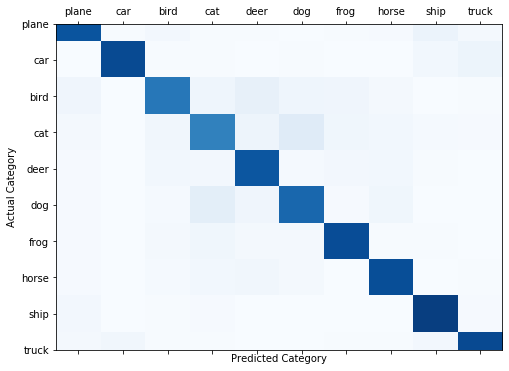

Category   - Accuracy
plane      - 86.0
car        - 89.5
bird       - 72.4
cat        - 68.7
deer       - 85.4
dog        - 78.7
frog       - 88.8
horse      - 88.5
ship       - 94.2
truck      - 89.9

Selected workers

[32 89 80 58 44  5 11 28 34 70 26 57 41 62 71]
Worker 32 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 80 : is  Honest
Worker 58 : is  Honest
Worker 44 : is  Stealthy_Attacker
Worker 5 : is  Honest
Worker 11 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 70 : is  Honest
Worker 26 : is  Honest
Worker 57 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 62 : is  Honest
Worker 71 : is  Stealthy_Attacker

 | Global Training Round : 56 |


Worker 32 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.560212
Train Epoch: 1 [400/500	(81%)]	Loss: 0.362209
Train Epoch: 2 [0/500	(1%)]	Loss: 0.148124
Train Epoch: 2 [400/500	(81%)]	Loss: 0.226213
Train Epoch: 3 [0/500	(1%)]	Loss: 0.209424
Train Epoch: 3 [400/500	(81%)]	Loss: 0.337014
Train Epoch: 4 [0/500	(1%)]	Loss: 0.153293
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169490
Train Epoch: 5 [0/500	(1%)]	Loss: 0.201687
Train Epoch: 5 [400/500	(81%)]	Loss: 0.131747

Worker 32 ends training in Global Round:56 |

Worker 89 starts training in Global Round:56 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  56


Train Epoch: 1 [0/500	(1%)]	Loss: 1.580929
Train Epoch: 1 [400/500	(81%)]	Loss: 0.601961
Train Epoch: 2 [0/500	(1%)]	Loss: 0.286905
Train Epoch: 2 [400/500	(81%)]	Loss: 0.441379
Train Epoch: 3 [0/500	(1%)]	Loss: 0.213718
Train Epoch: 3 [400/500	(81%)]	Loss: 0.405724
Train Epoch: 4 [0/500	(1%)]	Loss: 0.225087
Train Epoch: 4 [400/500	(81%)]	Loss: 0.314801
Train Epoch: 5 [0/500	(1%)]	Loss: 0.131174
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199288

Performed attacks 1
Worker 89 ends training in Global Round:56 |

Worker 80 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.405866
Train Epoch: 1 [400/500	(81%)]	Loss: 0.432765
Train Epoch: 2 [0/500	(1%)]	Loss: 0.149839
Train Epoch: 2 [400/500	(81%)]	Loss: 0.198542
Train Epoch: 3 [0/500	(1%)]	Loss: 0.122692
Train Epoch: 3 [400/500	(81%)]	Loss: 0.287529
Train Epoch: 4 [0/500	(1%)]	Loss: 0.198696
Train Epoch: 4 [400/500	(81%)]	Loss: 0.170943
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148391
Train Epoch: 5 [400/500	(81%)]	Loss: 0.144122

Worker 80 ends training in Global Round:56 |

Worker 58 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.432278
Train Epoch: 1 [400/500	(81%)]	Loss: 0.312181
Train Epoch: 2 [0/500	(1%)]	Loss: 0.213349
Train Epoch: 2 [400/500	(81%)]	Loss: 0.254408
Train Epoch: 3 [0/500	(1%)]	Loss: 0.161166
Train Epoch: 3 [400/500	(81%)]	Loss: 0.338956
Train Epoch: 4 [0/500	(1%)]	Loss: 0.290355
Train Epoch: 4 [400/500	(81%)]	Loss: 0.129515
Train Epoch: 5 [0/500	(1%)]	Loss: 0.073972
Train Epoch: 5 [400/500	(81%)]	Loss: 0.119868

Worker 58 ends training in Global Round:56 |

Worker 44 starts training in Global Round:56 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  56


Train Epoch: 1 [0/500	(1%)]	Loss: 1.434381
Train Epoch: 1 [400/500	(81%)]	Loss: 0.671961
Train Epoch: 2 [0/500	(1%)]	Loss: 0.297390
Train Epoch: 2 [400/500	(81%)]	Loss: 0.503628
Train Epoch: 3 [0/500	(1%)]	Loss: 0.342777
Train Epoch: 3 [400/500	(81%)]	Loss: 0.537318
Train Epoch: 4 [0/500	(1%)]	Loss: 0.269653
Train Epoch: 4 [400/500	(81%)]	Loss: 0.222827
Train Epoch: 5 [0/500	(1%)]	Loss: 0.287970
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210448

Performed attacks 2
Worker 44 ends training in Global Round:56 |

Worker 5 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.283210
Train Epoch: 1 [400/500	(81%)]	Loss: 0.389396
Train Epoch: 2 [0/500	(1%)]	Loss: 0.177050
Train Epoch: 2 [400/500	(81%)]	Loss: 0.249614
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151062
Train Epoch: 3 [400/500	(81%)]	Loss: 0.318109
Train Epoch: 4 [0/500	(1%)]	Loss: 0.096619
Train Epoch: 4 [400/500	(81%)]	Loss: 0.197410
Train Epoch: 5 [0/500	(1%)]	Loss: 0.136995
Train Epoch: 5 [400/500	(81%)]	Loss: 0.206753

Worker 5 ends training in Global Round:56 |

Worker 11 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.325925
Train Epoch: 1 [400/500	(81%)]	Loss: 0.352529
Train Epoch: 2 [0/500	(1%)]	Loss: 0.125478
Train Epoch: 2 [400/500	(81%)]	Loss: 0.221384
Train Epoch: 3 [0/500	(1%)]	Loss: 0.126398
Train Epoch: 3 [400/500	(81%)]	Loss: 0.170963
Train Epoch: 4 [0/500	(1%)]	Loss: 0.191829
Train Epoch: 4 [400/500	(81%)]	Loss: 0.306640
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125180
Train Epoch: 5 [400/500	(81%)]	Loss: 0.310038

Worker 11 ends training in Global Round:56 |

Worker 28 starts training in Global Round:56 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  56


Train Epoch: 1 [0/500	(1%)]	Loss: 1.339669
Train Epoch: 1 [400/500	(81%)]	Loss: 0.775715
Train Epoch: 2 [0/500	(1%)]	Loss: 0.168337
Train Epoch: 2 [400/500	(81%)]	Loss: 0.543302
Train Epoch: 3 [0/500	(1%)]	Loss: 0.300095
Train Epoch: 3 [400/500	(81%)]	Loss: 0.277714
Train Epoch: 4 [0/500	(1%)]	Loss: 0.178845
Train Epoch: 4 [400/500	(81%)]	Loss: 0.195647
Train Epoch: 5 [0/500	(1%)]	Loss: 0.159007
Train Epoch: 5 [400/500	(81%)]	Loss: 0.119887

Performed attacks 3
Worker 28 ends training in Global Round:56 |

Worker 34 starts training in Global Round:56 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  56


Train Epoch: 1 [0/500	(1%)]	Loss: 1.163659
Train Epoch: 1 [400/500	(81%)]	Loss: 0.666677
Train Epoch: 2 [0/500	(1%)]	Loss: 0.246180
Train Epoch: 2 [400/500	(81%)]	Loss: 0.361711
Train Epoch: 3 [0/500	(1%)]	Loss: 0.292005
Train Epoch: 3 [400/500	(81%)]	Loss: 0.252965
Train Epoch: 4 [0/500	(1%)]	Loss: 0.226452
Train Epoch: 4 [400/500	(81%)]	Loss: 0.285372
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157799
Train Epoch: 5 [400/500	(81%)]	Loss: 0.154795

Performed attacks 4
Worker 34 ends training in Global Round:56 |

Worker 70 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.491193
Train Epoch: 1 [400/500	(81%)]	Loss: 0.375679
Train Epoch: 2 [0/500	(1%)]	Loss: 0.158388
Train Epoch: 2 [400/500	(81%)]	Loss: 0.240741
Train Epoch: 3 [0/500	(1%)]	Loss: 0.163280
Train Epoch: 3 [400/500	(81%)]	Loss: 0.396338
Train Epoch: 4 [0/500	(1%)]	Loss: 0.214784
Train Epoch: 4 [400/500	(81%)]	Loss: 0.272700
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155924
Train Epoch: 5 [400/500	(81%)]	Loss: 0.280044

Worker 70 ends training in Global Round:56 |

Worker 26 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.491185
Train Epoch: 1 [400/500	(81%)]	Loss: 0.497539
Train Epoch: 2 [0/500	(1%)]	Loss: 0.215520
Train Epoch: 2 [400/500	(81%)]	Loss: 0.230406
Train Epoch: 3 [0/500	(1%)]	Loss: 0.160139
Train Epoch: 3 [400/500	(81%)]	Loss: 0.113652
Train Epoch: 4 [0/500	(1%)]	Loss: 0.185878
Train Epoch: 4 [400/500	(81%)]	Loss: 0.189595
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128339
Train Epoch: 5 [400/500	(81%)]	Loss: 0.123899

Worker 26 ends training in Global Round:56 |

Worker 57 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.331199
Train Epoch: 1 [400/500	(81%)]	Loss: 0.252058
Train Epoch: 2 [0/500	(1%)]	Loss: 0.147993
Train Epoch: 2 [400/500	(81%)]	Loss: 0.093284
Train Epoch: 3 [0/500	(1%)]	Loss: 0.100713
Train Epoch: 3 [400/500	(81%)]	Loss: 0.144633
Train Epoch: 4 [0/500	(1%)]	Loss: 0.138951
Train Epoch: 4 [400/500	(81%)]	Loss: 0.116263
Train Epoch: 5 [0/500	(1%)]	Loss: 0.093686
Train Epoch: 5 [400/500	(81%)]	Loss: 0.219589

Worker 57 ends training in Global Round:56 |

Worker 41 starts training in Global Round:56 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  56


Train Epoch: 1 [0/500	(1%)]	Loss: 1.395064
Train Epoch: 1 [400/500	(81%)]	Loss: 0.652822
Train Epoch: 2 [0/500	(1%)]	Loss: 0.387365
Train Epoch: 2 [400/500	(81%)]	Loss: 0.448023
Train Epoch: 3 [0/500	(1%)]	Loss: 0.354983
Train Epoch: 3 [400/500	(81%)]	Loss: 0.351150
Train Epoch: 4 [0/500	(1%)]	Loss: 0.281530
Train Epoch: 4 [400/500	(81%)]	Loss: 0.221553
Train Epoch: 5 [0/500	(1%)]	Loss: 0.134095
Train Epoch: 5 [400/500	(81%)]	Loss: 0.148598

Performed attacks 5
Worker 41 ends training in Global Round:56 |

Worker 62 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.388110
Train Epoch: 1 [400/500	(81%)]	Loss: 0.553447
Train Epoch: 2 [0/500	(1%)]	Loss: 0.238224
Train Epoch: 2 [400/500	(81%)]	Loss: 0.433580
Train Epoch: 3 [0/500	(1%)]	Loss: 0.242967
Train Epoch: 3 [400/500	(81%)]	Loss: 0.230961
Train Epoch: 4 [0/500	(1%)]	Loss: 0.160730
Train Epoch: 4 [400/500	(81%)]	Loss: 0.361025
Train Epoch: 5 [0/500	(1%)]	Loss: 0.166758
Train Epoch: 5 [400/500	(81%)]	Loss: 0.204197

Worker 62 ends training in Global Round:56 |

Worker 71 starts training in Global Round:56 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  56


Train Epoch: 1 [0/500	(1%)]	Loss: 1.146713
Train Epoch: 1 [400/500	(81%)]	Loss: 0.953614
Train Epoch: 2 [0/500	(1%)]	Loss: 0.248332
Train Epoch: 2 [400/500	(81%)]	Loss: 0.631513
Train Epoch: 3 [0/500	(1%)]	Loss: 0.286214
Train Epoch: 3 [400/500	(81%)]	Loss: 0.562398
Train Epoch: 4 [0/500	(1%)]	Loss: 0.337489
Train Epoch: 4 [400/500	(81%)]	Loss: 0.246716
Train Epoch: 5 [0/500	(1%)]	Loss: 0.206112
Train Epoch: 5 [400/500	(81%)]	Loss: 0.355194

Performed attacks 6
Worker 71 ends training in Global Round:56 |
Last layer biases  [array([ 0.03456093, -0.02963836, -0.01638688,  0.03747895,  0.04028425,
       -0.01639323,  0.03861859, -0.00807162, -0.02351006, -0.04104075],
      dtype=float32), array([ 0.03603021, -0.0306994 , -0.01168818,  0.03922721,  0.04785282,
       -0.01582636,  0.04160906, -0.02791624, -0.01952828, -0.04315902],
      dtype=float32), array([ 0.03459533, -0.03143182, -0.01634948,  0.03884161,  0.03880749,
       -0.01800161,  0.03842657, -0.00719728, -0.01927563, -0.0

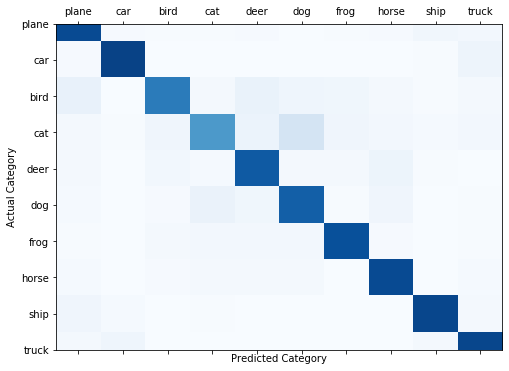

Category   - Accuracy
plane      - 89.6
car        - 92.9
bird       - 70.8
cat        - 59.3
deer       - 83.8
dog        - 81.9
frog       - 87.7
horse      - 89.8
ship       - 91.2
truck      - 91.1

Selected workers

[75 59 11 81 83 30 12 82 17 54 72  2 76 52 57]
Worker 75 : is  Stealthy_Attacker
Worker 59 : is  Stealthy_Attacker
Worker 11 : is  Honest
Worker 81 : is  Honest
Worker 83 : is  Honest
Worker 30 : is  Honest
Worker 12 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 17 : is  Honest
Worker 54 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 2 : is  Honest
Worker 76 : is  Honest
Worker 52 : is  Stealthy_Attacker
Worker 57 : is  Honest

 | Global Training Round : 57 |


Worker 75 starts training in Global Round:57 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  57


Train Epoch: 1 [0/500	(1%)]	Loss: 1.167860
Train Epoch: 1 [400/500	(81%)]	Loss: 0.759289
Train Epoch: 2 [0/500	(1%)]	Loss: 0.275932
Train Epoch: 2 [400/500	(81%)]	Loss: 0.396139
Train Epoch: 3 [0/500	(1%)]	Loss: 0.348779
Train Epoch: 3 [400/500	(81%)]	Loss: 0.391227
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149455
Train Epoch: 4 [400/500	(81%)]	Loss: 0.341810
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193280
Train Epoch: 5 [400/500	(81%)]	Loss: 0.233640

Performed attacks 1
Worker 75 ends training in Global Round:57 |

Worker 59 starts training in Global Round:57 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  57


Train Epoch: 1 [0/500	(1%)]	Loss: 1.165869
Train Epoch: 1 [400/500	(81%)]	Loss: 0.839364
Train Epoch: 2 [0/500	(1%)]	Loss: 0.255087
Train Epoch: 2 [400/500	(81%)]	Loss: 0.595026
Train Epoch: 3 [0/500	(1%)]	Loss: 0.316083
Train Epoch: 3 [400/500	(81%)]	Loss: 0.531296
Train Epoch: 4 [0/500	(1%)]	Loss: 0.283373
Train Epoch: 4 [400/500	(81%)]	Loss: 0.230123
Train Epoch: 5 [0/500	(1%)]	Loss: 0.179244
Train Epoch: 5 [400/500	(81%)]	Loss: 0.161958

Performed attacks 2
Worker 59 ends training in Global Round:57 |

Worker 11 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.194660
Train Epoch: 1 [400/500	(81%)]	Loss: 0.370609
Train Epoch: 2 [0/500	(1%)]	Loss: 0.132946
Train Epoch: 2 [400/500	(81%)]	Loss: 0.274871
Train Epoch: 3 [0/500	(1%)]	Loss: 0.086627
Train Epoch: 3 [400/500	(81%)]	Loss: 0.188041
Train Epoch: 4 [0/500	(1%)]	Loss: 0.175132
Train Epoch: 4 [400/500	(81%)]	Loss: 0.177632
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118539
Train Epoch: 5 [400/500	(81%)]	Loss: 0.219894

Worker 11 ends training in Global Round:57 |

Worker 81 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.266756
Train Epoch: 1 [400/500	(81%)]	Loss: 0.326548
Train Epoch: 2 [0/500	(1%)]	Loss: 0.172679
Train Epoch: 2 [400/500	(81%)]	Loss: 0.198025
Train Epoch: 3 [0/500	(1%)]	Loss: 0.177035
Train Epoch: 3 [400/500	(81%)]	Loss: 0.226055
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105207
Train Epoch: 4 [400/500	(81%)]	Loss: 0.191730
Train Epoch: 5 [0/500	(1%)]	Loss: 0.057695
Train Epoch: 5 [400/500	(81%)]	Loss: 0.046688

Worker 81 ends training in Global Round:57 |

Worker 83 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.527547
Train Epoch: 1 [400/500	(81%)]	Loss: 0.697009
Train Epoch: 2 [0/500	(1%)]	Loss: 0.285089
Train Epoch: 2 [400/500	(81%)]	Loss: 0.266238
Train Epoch: 3 [0/500	(1%)]	Loss: 0.315289
Train Epoch: 3 [400/500	(81%)]	Loss: 0.216461
Train Epoch: 4 [0/500	(1%)]	Loss: 0.108112
Train Epoch: 4 [400/500	(81%)]	Loss: 0.225986
Train Epoch: 5 [0/500	(1%)]	Loss: 0.130199
Train Epoch: 5 [400/500	(81%)]	Loss: 0.260819

Worker 83 ends training in Global Round:57 |

Worker 30 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.280110
Train Epoch: 1 [400/500	(81%)]	Loss: 0.175854
Train Epoch: 2 [0/500	(1%)]	Loss: 0.244687
Train Epoch: 2 [400/500	(81%)]	Loss: 0.118445
Train Epoch: 3 [0/500	(1%)]	Loss: 0.160716
Train Epoch: 3 [400/500	(81%)]	Loss: 0.093856
Train Epoch: 4 [0/500	(1%)]	Loss: 0.082849
Train Epoch: 4 [400/500	(81%)]	Loss: 0.237509
Train Epoch: 5 [0/500	(1%)]	Loss: 0.067474
Train Epoch: 5 [400/500	(81%)]	Loss: 0.142962

Worker 30 ends training in Global Round:57 |

Worker 12 starts training in Global Round:57 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  57


Train Epoch: 1 [0/500	(1%)]	Loss: 1.174074
Train Epoch: 1 [400/500	(81%)]	Loss: 0.346510
Train Epoch: 2 [0/500	(1%)]	Loss: 0.257243
Train Epoch: 2 [400/500	(81%)]	Loss: 0.416621
Train Epoch: 3 [0/500	(1%)]	Loss: 0.233983
Train Epoch: 3 [400/500	(81%)]	Loss: 0.218393
Train Epoch: 4 [0/500	(1%)]	Loss: 0.267413
Train Epoch: 4 [400/500	(81%)]	Loss: 0.153086
Train Epoch: 5 [0/500	(1%)]	Loss: 0.096358
Train Epoch: 5 [400/500	(81%)]	Loss: 0.228651

Performed attacks 3
Worker 12 ends training in Global Round:57 |

Worker 82 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.450039
Train Epoch: 1 [400/500	(81%)]	Loss: 0.374871
Train Epoch: 2 [0/500	(1%)]	Loss: 0.173882
Train Epoch: 2 [400/500	(81%)]	Loss: 0.307999
Train Epoch: 3 [0/500	(1%)]	Loss: 0.181127
Train Epoch: 3 [400/500	(81%)]	Loss: 0.279608
Train Epoch: 4 [0/500	(1%)]	Loss: 0.194677
Train Epoch: 4 [400/500	(81%)]	Loss: 0.374635
Train Epoch: 5 [0/500	(1%)]	Loss: 0.103463
Train Epoch: 5 [400/500	(81%)]	Loss: 0.141414

Worker 82 ends training in Global Round:57 |

Worker 17 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.358312
Train Epoch: 1 [400/500	(81%)]	Loss: 0.236416
Train Epoch: 2 [0/500	(1%)]	Loss: 0.316246
Train Epoch: 2 [400/500	(81%)]	Loss: 0.297322
Train Epoch: 3 [0/500	(1%)]	Loss: 0.158179
Train Epoch: 3 [400/500	(81%)]	Loss: 0.289944
Train Epoch: 4 [0/500	(1%)]	Loss: 0.228984
Train Epoch: 4 [400/500	(81%)]	Loss: 0.284677
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148137
Train Epoch: 5 [400/500	(81%)]	Loss: 0.307724

Worker 17 ends training in Global Round:57 |

Worker 54 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.321987
Train Epoch: 1 [400/500	(81%)]	Loss: 0.515889
Train Epoch: 2 [0/500	(1%)]	Loss: 0.190379
Train Epoch: 2 [400/500	(81%)]	Loss: 0.270782
Train Epoch: 3 [0/500	(1%)]	Loss: 0.250623
Train Epoch: 3 [400/500	(81%)]	Loss: 0.172592
Train Epoch: 4 [0/500	(1%)]	Loss: 0.145403
Train Epoch: 4 [400/500	(81%)]	Loss: 0.231404
Train Epoch: 5 [0/500	(1%)]	Loss: 0.092578
Train Epoch: 5 [400/500	(81%)]	Loss: 0.211047

Worker 54 ends training in Global Round:57 |

Worker 72 starts training in Global Round:57 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  57


Train Epoch: 1 [0/500	(1%)]	Loss: 0.947671
Train Epoch: 1 [400/500	(81%)]	Loss: 0.407973
Train Epoch: 2 [0/500	(1%)]	Loss: 0.448642
Train Epoch: 2 [400/500	(81%)]	Loss: 0.327520
Train Epoch: 3 [0/500	(1%)]	Loss: 0.239858
Train Epoch: 3 [400/500	(81%)]	Loss: 0.299561
Train Epoch: 4 [0/500	(1%)]	Loss: 0.261460
Train Epoch: 4 [400/500	(81%)]	Loss: 0.392227
Train Epoch: 5 [0/500	(1%)]	Loss: 0.097910
Train Epoch: 5 [400/500	(81%)]	Loss: 0.324347

Performed attacks 4
Worker 72 ends training in Global Round:57 |

Worker 2 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.299525
Train Epoch: 1 [400/500	(81%)]	Loss: 0.216290
Train Epoch: 2 [0/500	(1%)]	Loss: 0.216547
Train Epoch: 2 [400/500	(81%)]	Loss: 0.162566
Train Epoch: 3 [0/500	(1%)]	Loss: 0.121741
Train Epoch: 3 [400/500	(81%)]	Loss: 0.189335
Train Epoch: 4 [0/500	(1%)]	Loss: 0.080285
Train Epoch: 4 [400/500	(81%)]	Loss: 0.146707
Train Epoch: 5 [0/500	(1%)]	Loss: 0.030210
Train Epoch: 5 [400/500	(81%)]	Loss: 0.052279

Worker 2 ends training in Global Round:57 |

Worker 76 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.343689
Train Epoch: 1 [400/500	(81%)]	Loss: 0.477922
Train Epoch: 2 [0/500	(1%)]	Loss: 0.179574
Train Epoch: 2 [400/500	(81%)]	Loss: 0.404157
Train Epoch: 3 [0/500	(1%)]	Loss: 0.117933
Train Epoch: 3 [400/500	(81%)]	Loss: 0.160094
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095188
Train Epoch: 4 [400/500	(81%)]	Loss: 0.088342
Train Epoch: 5 [0/500	(1%)]	Loss: 0.144243
Train Epoch: 5 [400/500	(81%)]	Loss: 0.091415

Worker 76 ends training in Global Round:57 |

Worker 52 starts training in Global Round:57 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  57


Train Epoch: 1 [0/500	(1%)]	Loss: 1.004263
Train Epoch: 1 [400/500	(81%)]	Loss: 0.658343
Train Epoch: 2 [0/500	(1%)]	Loss: 0.191917
Train Epoch: 2 [400/500	(81%)]	Loss: 0.560660
Train Epoch: 3 [0/500	(1%)]	Loss: 0.222117
Train Epoch: 3 [400/500	(81%)]	Loss: 0.366737
Train Epoch: 4 [0/500	(1%)]	Loss: 0.356721
Train Epoch: 4 [400/500	(81%)]	Loss: 0.297426
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148261
Train Epoch: 5 [400/500	(81%)]	Loss: 0.159272

Performed attacks 5
Worker 52 ends training in Global Round:57 |

Worker 57 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.214591
Train Epoch: 1 [400/500	(81%)]	Loss: 0.270237
Train Epoch: 2 [0/500	(1%)]	Loss: 0.072931
Train Epoch: 2 [400/500	(81%)]	Loss: 0.223325
Train Epoch: 3 [0/500	(1%)]	Loss: 0.091962
Train Epoch: 3 [400/500	(81%)]	Loss: 0.157671
Train Epoch: 4 [0/500	(1%)]	Loss: 0.120576
Train Epoch: 4 [400/500	(81%)]	Loss: 0.101759
Train Epoch: 5 [0/500	(1%)]	Loss: 0.031522
Train Epoch: 5 [400/500	(81%)]	Loss: 0.134565

Worker 57 ends training in Global Round:57 |
Last layer biases  [array([ 0.03789852, -0.02944976, -0.01216984,  0.04197182,  0.04921269,
       -0.01532421,  0.03936863, -0.03262849, -0.02154363, -0.04143386],
      dtype=float32), array([ 0.03687106, -0.02987492, -0.01247631,  0.04014356,  0.04809408,
       -0.01539908,  0.03919666, -0.02774961, -0.02213322, -0.04077041],
      dtype=float32), array([ 0.03640059, -0.03083572, -0.01551991,  0.04062227,  0.0390317 ,
       -0.01741441,  0.0373676 , -0.00932465, -0.02228228, -0.04214334],
      dtyp

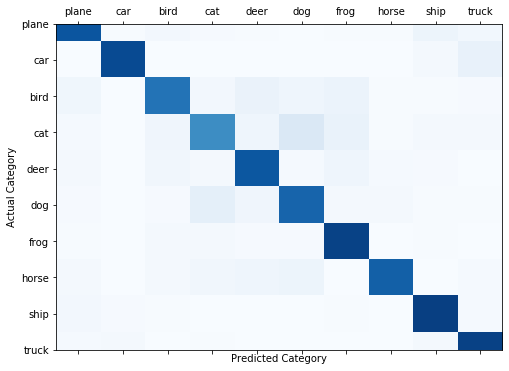

Category   - Accuracy
plane      - 85.8
car        - 89.8
bird       - 74.2
cat        - 64.4
deer       - 84.8
dog        - 79.7
frog       - 92.9
horse      - 81.4
ship       - 93.8
truck      - 93.2

Selected workers

[37 56 27 58  3 10 85 64 99 65 48 41 25 54 50]
Worker 37 : is  Stealthy_Attacker
Worker 56 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 58 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 10 : is  Honest
Worker 85 : is  Honest
Worker 64 : is  Honest
Worker 99 : is  Honest
Worker 65 : is  Honest
Worker 48 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 25 : is  Honest
Worker 54 : is  Honest
Worker 50 : is  Stealthy_Attacker

 | Global Training Round : 58 |


Worker 37 starts training in Global Round:58 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  58


Train Epoch: 1 [0/500	(1%)]	Loss: 1.086190
Train Epoch: 1 [400/500	(81%)]	Loss: 0.405321
Train Epoch: 2 [0/500	(1%)]	Loss: 0.468024
Train Epoch: 2 [400/500	(81%)]	Loss: 0.394190
Train Epoch: 3 [0/500	(1%)]	Loss: 0.258556
Train Epoch: 3 [400/500	(81%)]	Loss: 0.388361
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156064
Train Epoch: 4 [400/500	(81%)]	Loss: 0.232991
Train Epoch: 5 [0/500	(1%)]	Loss: 0.178931
Train Epoch: 5 [400/500	(81%)]	Loss: 0.140306

Performed attacks 1
Worker 37 ends training in Global Round:58 |

Worker 56 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.373212
Train Epoch: 1 [400/500	(81%)]	Loss: 0.573693
Train Epoch: 2 [0/500	(1%)]	Loss: 0.190081
Train Epoch: 2 [400/500	(81%)]	Loss: 0.354581
Train Epoch: 3 [0/500	(1%)]	Loss: 0.186815
Train Epoch: 3 [400/500	(81%)]	Loss: 0.267043
Train Epoch: 4 [0/500	(1%)]	Loss: 0.211595
Train Epoch: 4 [400/500	(81%)]	Loss: 0.184408
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089031
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139802

Worker 56 ends training in Global Round:58 |

Worker 27 starts training in Global Round:58 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  58


Train Epoch: 1 [0/500	(1%)]	Loss: 1.324243
Train Epoch: 1 [400/500	(81%)]	Loss: 0.749348
Train Epoch: 2 [0/500	(1%)]	Loss: 0.225584
Train Epoch: 2 [400/500	(81%)]	Loss: 0.462662
Train Epoch: 3 [0/500	(1%)]	Loss: 0.357118
Train Epoch: 3 [400/500	(81%)]	Loss: 0.179076
Train Epoch: 4 [0/500	(1%)]	Loss: 0.235335
Train Epoch: 4 [400/500	(81%)]	Loss: 0.246307
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155803
Train Epoch: 5 [400/500	(81%)]	Loss: 0.274641

Performed attacks 2
Worker 27 ends training in Global Round:58 |

Worker 58 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.347330
Train Epoch: 1 [400/500	(81%)]	Loss: 0.299953
Train Epoch: 2 [0/500	(1%)]	Loss: 0.113361
Train Epoch: 2 [400/500	(81%)]	Loss: 0.237791
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127065
Train Epoch: 3 [400/500	(81%)]	Loss: 0.190912
Train Epoch: 4 [0/500	(1%)]	Loss: 0.120208
Train Epoch: 4 [400/500	(81%)]	Loss: 0.190371
Train Epoch: 5 [0/500	(1%)]	Loss: 0.092053
Train Epoch: 5 [400/500	(81%)]	Loss: 0.102431

Worker 58 ends training in Global Round:58 |

Worker 3 starts training in Global Round:58 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  58


Train Epoch: 1 [0/500	(1%)]	Loss: 1.461321
Train Epoch: 1 [400/500	(81%)]	Loss: 0.647008
Train Epoch: 2 [0/500	(1%)]	Loss: 0.343530
Train Epoch: 2 [400/500	(81%)]	Loss: 0.368289
Train Epoch: 3 [0/500	(1%)]	Loss: 0.177970
Train Epoch: 3 [400/500	(81%)]	Loss: 0.282808
Train Epoch: 4 [0/500	(1%)]	Loss: 0.158573
Train Epoch: 4 [400/500	(81%)]	Loss: 0.267901
Train Epoch: 5 [0/500	(1%)]	Loss: 0.196829
Train Epoch: 5 [400/500	(81%)]	Loss: 0.278112

Performed attacks 3
Worker 3 ends training in Global Round:58 |

Worker 10 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.222676
Train Epoch: 1 [400/500	(81%)]	Loss: 0.604628
Train Epoch: 2 [0/500	(1%)]	Loss: 0.092878
Train Epoch: 2 [400/500	(81%)]	Loss: 0.261487
Train Epoch: 3 [0/500	(1%)]	Loss: 0.138782
Train Epoch: 3 [400/500	(81%)]	Loss: 0.343064
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152223
Train Epoch: 4 [400/500	(81%)]	Loss: 0.294121
Train Epoch: 5 [0/500	(1%)]	Loss: 0.062352
Train Epoch: 5 [400/500	(81%)]	Loss: 0.203784

Worker 10 ends training in Global Round:58 |

Worker 85 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.380735
Train Epoch: 1 [400/500	(81%)]	Loss: 0.903231
Train Epoch: 2 [0/500	(1%)]	Loss: 0.274741
Train Epoch: 2 [400/500	(81%)]	Loss: 0.568962
Train Epoch: 3 [0/500	(1%)]	Loss: 0.349136
Train Epoch: 3 [400/500	(81%)]	Loss: 0.229422
Train Epoch: 4 [0/500	(1%)]	Loss: 0.159345
Train Epoch: 4 [400/500	(81%)]	Loss: 0.454333
Train Epoch: 5 [0/500	(1%)]	Loss: 0.332669
Train Epoch: 5 [400/500	(81%)]	Loss: 0.333489

Worker 85 ends training in Global Round:58 |

Worker 64 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.342865
Train Epoch: 1 [400/500	(81%)]	Loss: 0.334880
Train Epoch: 2 [0/500	(1%)]	Loss: 0.119713
Train Epoch: 2 [400/500	(81%)]	Loss: 0.273402
Train Epoch: 3 [0/500	(1%)]	Loss: 0.115988
Train Epoch: 3 [400/500	(81%)]	Loss: 0.220115
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121614
Train Epoch: 4 [400/500	(81%)]	Loss: 0.110582
Train Epoch: 5 [0/500	(1%)]	Loss: 0.033132
Train Epoch: 5 [400/500	(81%)]	Loss: 0.121991

Worker 64 ends training in Global Round:58 |

Worker 99 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.121992
Train Epoch: 1 [400/500	(81%)]	Loss: 0.272677
Train Epoch: 2 [0/500	(1%)]	Loss: 0.089137
Train Epoch: 2 [400/500	(81%)]	Loss: 0.165754
Train Epoch: 3 [0/500	(1%)]	Loss: 0.163422
Train Epoch: 3 [400/500	(81%)]	Loss: 0.095932
Train Epoch: 4 [0/500	(1%)]	Loss: 0.047289
Train Epoch: 4 [400/500	(81%)]	Loss: 0.137962
Train Epoch: 5 [0/500	(1%)]	Loss: 0.049476
Train Epoch: 5 [400/500	(81%)]	Loss: 0.228018

Worker 99 ends training in Global Round:58 |

Worker 65 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.563658
Train Epoch: 1 [400/500	(81%)]	Loss: 0.572033
Train Epoch: 2 [0/500	(1%)]	Loss: 0.254660
Train Epoch: 2 [400/500	(81%)]	Loss: 0.442464
Train Epoch: 3 [0/500	(1%)]	Loss: 0.148104
Train Epoch: 3 [400/500	(81%)]	Loss: 0.288333
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152773
Train Epoch: 4 [400/500	(81%)]	Loss: 0.189890
Train Epoch: 5 [0/500	(1%)]	Loss: 0.098711
Train Epoch: 5 [400/500	(81%)]	Loss: 0.294795

Worker 65 ends training in Global Round:58 |

Worker 48 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.121005
Train Epoch: 1 [400/500	(81%)]	Loss: 0.365030
Train Epoch: 2 [0/500	(1%)]	Loss: 0.137296
Train Epoch: 2 [400/500	(81%)]	Loss: 0.210259
Train Epoch: 3 [0/500	(1%)]	Loss: 0.091916
Train Epoch: 3 [400/500	(81%)]	Loss: 0.323973
Train Epoch: 4 [0/500	(1%)]	Loss: 0.052233
Train Epoch: 4 [400/500	(81%)]	Loss: 0.166669
Train Epoch: 5 [0/500	(1%)]	Loss: 0.096648
Train Epoch: 5 [400/500	(81%)]	Loss: 0.289466

Worker 48 ends training in Global Round:58 |

Worker 41 starts training in Global Round:58 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  58


Train Epoch: 1 [0/500	(1%)]	Loss: 1.206681
Train Epoch: 1 [400/500	(81%)]	Loss: 0.911569
Train Epoch: 2 [0/500	(1%)]	Loss: 0.303793
Train Epoch: 2 [400/500	(81%)]	Loss: 0.359775
Train Epoch: 3 [0/500	(1%)]	Loss: 0.275161
Train Epoch: 3 [400/500	(81%)]	Loss: 0.385576
Train Epoch: 4 [0/500	(1%)]	Loss: 0.372060
Train Epoch: 4 [400/500	(81%)]	Loss: 0.372125
Train Epoch: 5 [0/500	(1%)]	Loss: 0.232027
Train Epoch: 5 [400/500	(81%)]	Loss: 0.213341

Performed attacks 4
Worker 41 ends training in Global Round:58 |

Worker 25 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.427052
Train Epoch: 1 [400/500	(81%)]	Loss: 0.579466
Train Epoch: 2 [0/500	(1%)]	Loss: 0.334313
Train Epoch: 2 [400/500	(81%)]	Loss: 0.356462
Train Epoch: 3 [0/500	(1%)]	Loss: 0.299348
Train Epoch: 3 [400/500	(81%)]	Loss: 0.313657
Train Epoch: 4 [0/500	(1%)]	Loss: 0.287903
Train Epoch: 4 [400/500	(81%)]	Loss: 0.251598
Train Epoch: 5 [0/500	(1%)]	Loss: 0.144724
Train Epoch: 5 [400/500	(81%)]	Loss: 0.300001

Worker 25 ends training in Global Round:58 |

Worker 54 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.210513
Train Epoch: 1 [400/500	(81%)]	Loss: 0.138080
Train Epoch: 2 [0/500	(1%)]	Loss: 0.140262
Train Epoch: 2 [400/500	(81%)]	Loss: 0.267857
Train Epoch: 3 [0/500	(1%)]	Loss: 0.155441
Train Epoch: 3 [400/500	(81%)]	Loss: 0.175809
Train Epoch: 4 [0/500	(1%)]	Loss: 0.102091
Train Epoch: 4 [400/500	(81%)]	Loss: 0.085426
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075849
Train Epoch: 5 [400/500	(81%)]	Loss: 0.077462

Worker 54 ends training in Global Round:58 |

Worker 50 starts training in Global Round:58 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  58


Train Epoch: 1 [0/500	(1%)]	Loss: 1.588107
Train Epoch: 1 [400/500	(81%)]	Loss: 0.391993
Train Epoch: 2 [0/500	(1%)]	Loss: 0.246561
Train Epoch: 2 [400/500	(81%)]	Loss: 0.518286
Train Epoch: 3 [0/500	(1%)]	Loss: 0.277769
Train Epoch: 3 [400/500	(81%)]	Loss: 0.578599
Train Epoch: 4 [0/500	(1%)]	Loss: 0.573906
Train Epoch: 4 [400/500	(81%)]	Loss: 0.859018
Train Epoch: 5 [0/500	(1%)]	Loss: 0.263379
Train Epoch: 5 [400/500	(81%)]	Loss: 0.340418

Performed attacks 5
Worker 50 ends training in Global Round:58 |
Last layer biases  [array([ 0.03592806, -0.03096776, -0.01346384,  0.04096011,  0.0487234 ,
       -0.01426713,  0.03841744, -0.02805576, -0.01924954, -0.04212315],
      dtype=float32), array([ 0.03534428, -0.03090802, -0.01658718,  0.03969885,  0.04050198,
       -0.01603624,  0.03870568, -0.00793006, -0.02253738, -0.04435007],
      dtype=float32), array([ 0.03664114, -0.03040694, -0.01438826,  0.03864827,  0.04968835,
       -0.01397486,  0.03995449, -0.02893845, -0.01946107, -0.0

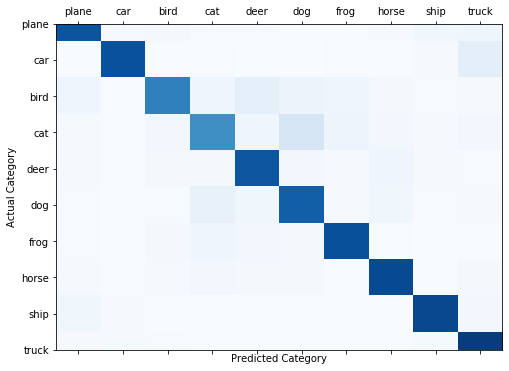

Category   - Accuracy
plane      - 85.6
car        - 87.2
bird       - 69.0
cat        - 63.4
deer       - 85.1
dog        - 81.7
frog       - 87.6
horse      - 89.6
ship       - 91.0
truck      - 95.2

Selected workers

[ 4 48 54 88 79 36 94 58 69 60 61 85 74 39 23]
Worker 4 : is  Honest
Worker 48 : is  Honest
Worker 54 : is  Honest
Worker 88 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 94 : is  Stealthy_Attacker
Worker 58 : is  Honest
Worker 69 : is  Honest
Worker 60 : is  Honest
Worker 61 : is  Honest
Worker 85 : is  Honest
Worker 74 : is  Honest
Worker 39 : is  Honest
Worker 23 : is  Stealthy_Attacker

 | Global Training Round : 59 |


Worker 4 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.385267
Train Epoch: 1 [400/500	(81%)]	Loss: 0.193018
Train Epoch: 2 [0/500	(1%)]	Loss: 0.144432
Train Epoch: 2 [400/500	(81%)]	Loss: 0.168365
Train Epoch: 3 [0/500	(1%)]	Loss: 0.138604
Train Epoch: 3 [400/500	(81%)]	Loss: 0.174845
Train Epoch: 4 [0/500	(1%)]	Loss: 0.063703
Train Epoch: 4 [400/500	(81%)]	Loss: 0.198461
Train Epoch: 5 [0/500	(1%)]	Loss: 0.141590
Train Epoch: 5 [400/500	(81%)]	Loss: 0.203336

Worker 4 ends training in Global Round:59 |

Worker 48 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.072292
Train Epoch: 1 [400/500	(81%)]	Loss: 0.236664
Train Epoch: 2 [0/500	(1%)]	Loss: 0.067562
Train Epoch: 2 [400/500	(81%)]	Loss: 0.163240
Train Epoch: 3 [0/500	(1%)]	Loss: 0.115318
Train Epoch: 3 [400/500	(81%)]	Loss: 0.068508
Train Epoch: 4 [0/500	(1%)]	Loss: 0.085893
Train Epoch: 4 [400/500	(81%)]	Loss: 0.099371
Train Epoch: 5 [0/500	(1%)]	Loss: 0.056979
Train Epoch: 5 [400/500	(81%)]	Loss: 0.050474

Worker 48 ends training in Global Round:59 |

Worker 54 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.156836
Train Epoch: 1 [400/500	(81%)]	Loss: 0.182452
Train Epoch: 2 [0/500	(1%)]	Loss: 0.113713
Train Epoch: 2 [400/500	(81%)]	Loss: 0.084268
Train Epoch: 3 [0/500	(1%)]	Loss: 0.105335
Train Epoch: 3 [400/500	(81%)]	Loss: 0.135962
Train Epoch: 4 [0/500	(1%)]	Loss: 0.065957
Train Epoch: 4 [400/500	(81%)]	Loss: 0.121741
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081822
Train Epoch: 5 [400/500	(81%)]	Loss: 0.115314

Worker 54 ends training in Global Round:59 |

Worker 88 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.451523
Train Epoch: 1 [400/500	(81%)]	Loss: 0.468384
Train Epoch: 2 [0/500	(1%)]	Loss: 0.224478
Train Epoch: 2 [400/500	(81%)]	Loss: 0.260337
Train Epoch: 3 [0/500	(1%)]	Loss: 0.131573
Train Epoch: 3 [400/500	(81%)]	Loss: 0.214270
Train Epoch: 4 [0/500	(1%)]	Loss: 0.176223
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213843
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107208
Train Epoch: 5 [400/500	(81%)]	Loss: 0.215208

Worker 88 ends training in Global Round:59 |

Worker 79 starts training in Global Round:59 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  59


Train Epoch: 1 [0/500	(1%)]	Loss: 0.814434
Train Epoch: 1 [400/500	(81%)]	Loss: 0.534381
Train Epoch: 2 [0/500	(1%)]	Loss: 0.335040
Train Epoch: 2 [400/500	(81%)]	Loss: 0.323653
Train Epoch: 3 [0/500	(1%)]	Loss: 0.195973
Train Epoch: 3 [400/500	(81%)]	Loss: 0.375150
Train Epoch: 4 [0/500	(1%)]	Loss: 0.184748
Train Epoch: 4 [400/500	(81%)]	Loss: 0.530843
Train Epoch: 5 [0/500	(1%)]	Loss: 0.130769
Train Epoch: 5 [400/500	(81%)]	Loss: 0.543591

Performed attacks 1
Worker 79 ends training in Global Round:59 |

Worker 36 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.344094
Train Epoch: 1 [400/500	(81%)]	Loss: 0.481051
Train Epoch: 2 [0/500	(1%)]	Loss: 0.185504
Train Epoch: 2 [400/500	(81%)]	Loss: 0.344404
Train Epoch: 3 [0/500	(1%)]	Loss: 0.210918
Train Epoch: 3 [400/500	(81%)]	Loss: 0.361107
Train Epoch: 4 [0/500	(1%)]	Loss: 0.210938
Train Epoch: 4 [400/500	(81%)]	Loss: 0.264696
Train Epoch: 5 [0/500	(1%)]	Loss: 0.139717
Train Epoch: 5 [400/500	(81%)]	Loss: 0.144238

Worker 36 ends training in Global Round:59 |

Worker 94 starts training in Global Round:59 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  59


Train Epoch: 1 [0/500	(1%)]	Loss: 1.164732
Train Epoch: 1 [400/500	(81%)]	Loss: 0.729576
Train Epoch: 2 [0/500	(1%)]	Loss: 0.329851
Train Epoch: 2 [400/500	(81%)]	Loss: 0.519114
Train Epoch: 3 [0/500	(1%)]	Loss: 0.409290
Train Epoch: 3 [400/500	(81%)]	Loss: 0.233913
Train Epoch: 4 [0/500	(1%)]	Loss: 0.266958
Train Epoch: 4 [400/500	(81%)]	Loss: 0.201045
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155748
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220212

Performed attacks 2
Worker 94 ends training in Global Round:59 |

Worker 58 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.203207
Train Epoch: 1 [400/500	(81%)]	Loss: 0.188336
Train Epoch: 2 [0/500	(1%)]	Loss: 0.093524
Train Epoch: 2 [400/500	(81%)]	Loss: 0.136199
Train Epoch: 3 [0/500	(1%)]	Loss: 0.134765
Train Epoch: 3 [400/500	(81%)]	Loss: 0.149631
Train Epoch: 4 [0/500	(1%)]	Loss: 0.109416
Train Epoch: 4 [400/500	(81%)]	Loss: 0.150533
Train Epoch: 5 [0/500	(1%)]	Loss: 0.052752
Train Epoch: 5 [400/500	(81%)]	Loss: 0.124394

Worker 58 ends training in Global Round:59 |

Worker 69 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.409782
Train Epoch: 1 [400/500	(81%)]	Loss: 0.333699
Train Epoch: 2 [0/500	(1%)]	Loss: 0.150818
Train Epoch: 2 [400/500	(81%)]	Loss: 0.197012
Train Epoch: 3 [0/500	(1%)]	Loss: 0.128862
Train Epoch: 3 [400/500	(81%)]	Loss: 0.207673
Train Epoch: 4 [0/500	(1%)]	Loss: 0.169113
Train Epoch: 4 [400/500	(81%)]	Loss: 0.215935
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075149
Train Epoch: 5 [400/500	(81%)]	Loss: 0.281467

Worker 69 ends training in Global Round:59 |

Worker 60 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.363754
Train Epoch: 1 [400/500	(81%)]	Loss: 0.373647
Train Epoch: 2 [0/500	(1%)]	Loss: 0.185068
Train Epoch: 2 [400/500	(81%)]	Loss: 0.326131
Train Epoch: 3 [0/500	(1%)]	Loss: 0.147715
Train Epoch: 3 [400/500	(81%)]	Loss: 0.162328
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170581
Train Epoch: 4 [400/500	(81%)]	Loss: 0.155675
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110624
Train Epoch: 5 [400/500	(81%)]	Loss: 0.091766

Worker 60 ends training in Global Round:59 |

Worker 61 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.371558
Train Epoch: 1 [400/500	(81%)]	Loss: 0.337310
Train Epoch: 2 [0/500	(1%)]	Loss: 0.267859
Train Epoch: 2 [400/500	(81%)]	Loss: 0.280596
Train Epoch: 3 [0/500	(1%)]	Loss: 0.150153
Train Epoch: 3 [400/500	(81%)]	Loss: 0.106049
Train Epoch: 4 [0/500	(1%)]	Loss: 0.116261
Train Epoch: 4 [400/500	(81%)]	Loss: 0.152637
Train Epoch: 5 [0/500	(1%)]	Loss: 0.195475
Train Epoch: 5 [400/500	(81%)]	Loss: 0.120469

Worker 61 ends training in Global Round:59 |

Worker 85 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.181107
Train Epoch: 1 [400/500	(81%)]	Loss: 0.370674
Train Epoch: 2 [0/500	(1%)]	Loss: 0.143170
Train Epoch: 2 [400/500	(81%)]	Loss: 0.320456
Train Epoch: 3 [0/500	(1%)]	Loss: 0.208563
Train Epoch: 3 [400/500	(81%)]	Loss: 0.282405
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105581
Train Epoch: 4 [400/500	(81%)]	Loss: 0.194321
Train Epoch: 5 [0/500	(1%)]	Loss: 0.233820
Train Epoch: 5 [400/500	(81%)]	Loss: 0.289126

Worker 85 ends training in Global Round:59 |

Worker 74 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.443503
Train Epoch: 1 [400/500	(81%)]	Loss: 0.462042
Train Epoch: 2 [0/500	(1%)]	Loss: 0.134655
Train Epoch: 2 [400/500	(81%)]	Loss: 0.144225
Train Epoch: 3 [0/500	(1%)]	Loss: 0.215500
Train Epoch: 3 [400/500	(81%)]	Loss: 0.161851
Train Epoch: 4 [0/500	(1%)]	Loss: 0.062839
Train Epoch: 4 [400/500	(81%)]	Loss: 0.118921
Train Epoch: 5 [0/500	(1%)]	Loss: 0.070272
Train Epoch: 5 [400/500	(81%)]	Loss: 0.188641

Worker 74 ends training in Global Round:59 |

Worker 39 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.458941
Train Epoch: 1 [400/500	(81%)]	Loss: 0.269391
Train Epoch: 2 [0/500	(1%)]	Loss: 0.227559
Train Epoch: 2 [400/500	(81%)]	Loss: 0.175852
Train Epoch: 3 [0/500	(1%)]	Loss: 0.111734
Train Epoch: 3 [400/500	(81%)]	Loss: 0.144743
Train Epoch: 4 [0/500	(1%)]	Loss: 0.070985
Train Epoch: 4 [400/500	(81%)]	Loss: 0.198302
Train Epoch: 5 [0/500	(1%)]	Loss: 0.073994
Train Epoch: 5 [400/500	(81%)]	Loss: 0.159270

Worker 39 ends training in Global Round:59 |

Worker 23 starts training in Global Round:59 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  59


Train Epoch: 1 [0/500	(1%)]	Loss: 1.176544
Train Epoch: 1 [400/500	(81%)]	Loss: 0.371855
Train Epoch: 2 [0/500	(1%)]	Loss: 0.240157
Train Epoch: 2 [400/500	(81%)]	Loss: 0.250772
Train Epoch: 3 [0/500	(1%)]	Loss: 0.175819
Train Epoch: 3 [400/500	(81%)]	Loss: 0.396016
Train Epoch: 4 [0/500	(1%)]	Loss: 0.195505
Train Epoch: 4 [400/500	(81%)]	Loss: 0.120600
Train Epoch: 5 [0/500	(1%)]	Loss: 0.116581
Train Epoch: 5 [400/500	(81%)]	Loss: 0.202856

Performed attacks 3
Worker 23 ends training in Global Round:59 |
Last layer biases  [array([ 0.03297869, -0.03197595, -0.01427004,  0.03700764,  0.038961  ,
       -0.01571606,  0.03861284, -0.00743675, -0.02051275, -0.0417468 ],
      dtype=float32), array([ 0.0344387 , -0.03322214, -0.01386743,  0.03795511,  0.03890791,
       -0.01754061,  0.03976215, -0.00710928, -0.02120155, -0.04222106],
      dtype=float32), array([ 0.03583529, -0.03063946, -0.01379844,  0.03807063,  0.03934626,
       -0.01762263,  0.03853746, -0.00825825, -0.02284225, -0.0

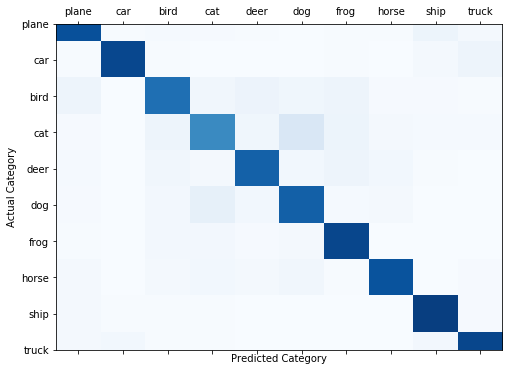

Category   - Accuracy
plane      - 87.5
car        - 90.8
bird       - 75.4
cat        - 65.5
deer       - 81.2
dog        - 81.4
frog       - 91.4
horse      - 86.7
ship       - 94.4
truck      - 91.3

Selected workers

[96 13 36  6 14 33  4 98 35 67 71 43 42 78 18]
Worker 96 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 14 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 4 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 35 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 71 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 42 : is  Honest
Worker 78 : is  Honest
Worker 18 : is  Stealthy_Attacker

 | Global Training Round : 60 |


Worker 96 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.323703
Train Epoch: 1 [400/500	(81%)]	Loss: 0.376354
Train Epoch: 2 [0/500	(1%)]	Loss: 0.141891
Train Epoch: 2 [400/500	(81%)]	Loss: 0.343407
Train Epoch: 3 [0/500	(1%)]	Loss: 0.130851
Train Epoch: 3 [400/500	(81%)]	Loss: 0.389446
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170477
Train Epoch: 4 [400/500	(81%)]	Loss: 0.133390
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082598
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232660

Worker 96 ends training in Global Round:60 |

Worker 13 starts training in Global Round:60 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  60


Train Epoch: 1 [0/500	(1%)]	Loss: 1.052277
Train Epoch: 1 [400/500	(81%)]	Loss: 0.525237
Train Epoch: 2 [0/500	(1%)]	Loss: 0.323632
Train Epoch: 2 [400/500	(81%)]	Loss: 0.232191
Train Epoch: 3 [0/500	(1%)]	Loss: 0.212081
Train Epoch: 3 [400/500	(81%)]	Loss: 0.225915
Train Epoch: 4 [0/500	(1%)]	Loss: 0.160911
Train Epoch: 4 [400/500	(81%)]	Loss: 0.342164
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128301
Train Epoch: 5 [400/500	(81%)]	Loss: 0.236311

Performed attacks 1
Worker 13 ends training in Global Round:60 |

Worker 36 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.198377
Train Epoch: 1 [400/500	(81%)]	Loss: 0.565258
Train Epoch: 2 [0/500	(1%)]	Loss: 0.204169
Train Epoch: 2 [400/500	(81%)]	Loss: 0.287199
Train Epoch: 3 [0/500	(1%)]	Loss: 0.104261
Train Epoch: 3 [400/500	(81%)]	Loss: 0.127117
Train Epoch: 4 [0/500	(1%)]	Loss: 0.114388
Train Epoch: 4 [400/500	(81%)]	Loss: 0.175984
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106821
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199829

Worker 36 ends training in Global Round:60 |

Worker 6 starts training in Global Round:60 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  60


Train Epoch: 1 [0/500	(1%)]	Loss: 1.454828
Train Epoch: 1 [400/500	(81%)]	Loss: 0.669724
Train Epoch: 2 [0/500	(1%)]	Loss: 0.236972
Train Epoch: 2 [400/500	(81%)]	Loss: 0.410653
Train Epoch: 3 [0/500	(1%)]	Loss: 0.343129
Train Epoch: 3 [400/500	(81%)]	Loss: 0.473603
Train Epoch: 4 [0/500	(1%)]	Loss: 0.358204
Train Epoch: 4 [400/500	(81%)]	Loss: 0.150207
Train Epoch: 5 [0/500	(1%)]	Loss: 0.222742
Train Epoch: 5 [400/500	(81%)]	Loss: 0.240526

Performed attacks 2
Worker 6 ends training in Global Round:60 |

Worker 14 starts training in Global Round:60 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  60


Train Epoch: 1 [0/500	(1%)]	Loss: 1.525907
Train Epoch: 1 [400/500	(81%)]	Loss: 0.472004
Train Epoch: 2 [0/500	(1%)]	Loss: 0.344234
Train Epoch: 2 [400/500	(81%)]	Loss: 0.441807
Train Epoch: 3 [0/500	(1%)]	Loss: 0.326459
Train Epoch: 3 [400/500	(81%)]	Loss: 0.383579
Train Epoch: 4 [0/500	(1%)]	Loss: 0.283716
Train Epoch: 4 [400/500	(81%)]	Loss: 0.275198
Train Epoch: 5 [0/500	(1%)]	Loss: 0.162972
Train Epoch: 5 [400/500	(81%)]	Loss: 0.262850

Performed attacks 3
Worker 14 ends training in Global Round:60 |

Worker 33 starts training in Global Round:60 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  60


Train Epoch: 1 [0/500	(1%)]	Loss: 0.964144
Train Epoch: 1 [400/500	(81%)]	Loss: 0.415147
Train Epoch: 2 [0/500	(1%)]	Loss: 0.393370
Train Epoch: 2 [400/500	(81%)]	Loss: 0.318751
Train Epoch: 3 [0/500	(1%)]	Loss: 0.318305
Train Epoch: 3 [400/500	(81%)]	Loss: 0.294176
Train Epoch: 4 [0/500	(1%)]	Loss: 0.223177
Train Epoch: 4 [400/500	(81%)]	Loss: 0.199164
Train Epoch: 5 [0/500	(1%)]	Loss: 0.147203
Train Epoch: 5 [400/500	(81%)]	Loss: 0.292034

Performed attacks 4
Worker 33 ends training in Global Round:60 |

Worker 4 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.349698
Train Epoch: 1 [400/500	(81%)]	Loss: 0.179770
Train Epoch: 2 [0/500	(1%)]	Loss: 0.100646
Train Epoch: 2 [400/500	(81%)]	Loss: 0.159623
Train Epoch: 3 [0/500	(1%)]	Loss: 0.118859
Train Epoch: 3 [400/500	(81%)]	Loss: 0.150902
Train Epoch: 4 [0/500	(1%)]	Loss: 0.051136
Train Epoch: 4 [400/500	(81%)]	Loss: 0.116098
Train Epoch: 5 [0/500	(1%)]	Loss: 0.044834
Train Epoch: 5 [400/500	(81%)]	Loss: 0.179486

Worker 4 ends training in Global Round:60 |

Worker 98 starts training in Global Round:60 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  60


Train Epoch: 1 [0/500	(1%)]	Loss: 1.550574
Train Epoch: 1 [400/500	(81%)]	Loss: 0.889542
Train Epoch: 2 [0/500	(1%)]	Loss: 0.399161
Train Epoch: 2 [400/500	(81%)]	Loss: 0.374638
Train Epoch: 3 [0/500	(1%)]	Loss: 0.380493
Train Epoch: 3 [400/500	(81%)]	Loss: 0.263593
Train Epoch: 4 [0/500	(1%)]	Loss: 0.227958
Train Epoch: 4 [400/500	(81%)]	Loss: 0.386070
Train Epoch: 5 [0/500	(1%)]	Loss: 0.200798
Train Epoch: 5 [400/500	(81%)]	Loss: 0.254963

Performed attacks 5
Worker 98 ends training in Global Round:60 |

Worker 35 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.181323
Train Epoch: 1 [400/500	(81%)]	Loss: 0.269615
Train Epoch: 2 [0/500	(1%)]	Loss: 0.211499
Train Epoch: 2 [400/500	(81%)]	Loss: 0.244217
Train Epoch: 3 [0/500	(1%)]	Loss: 0.152072
Train Epoch: 3 [400/500	(81%)]	Loss: 0.276352
Train Epoch: 4 [0/500	(1%)]	Loss: 0.166489
Train Epoch: 4 [400/500	(81%)]	Loss: 0.189955
Train Epoch: 5 [0/500	(1%)]	Loss: 0.095428
Train Epoch: 5 [400/500	(81%)]	Loss: 0.166106

Worker 35 ends training in Global Round:60 |

Worker 67 starts training in Global Round:60 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  60


Train Epoch: 1 [0/500	(1%)]	Loss: 1.128649
Train Epoch: 1 [400/500	(81%)]	Loss: 0.420211
Train Epoch: 2 [0/500	(1%)]	Loss: 0.125336
Train Epoch: 2 [400/500	(81%)]	Loss: 0.251985
Train Epoch: 3 [0/500	(1%)]	Loss: 0.216754
Train Epoch: 3 [400/500	(81%)]	Loss: 0.410033
Train Epoch: 4 [0/500	(1%)]	Loss: 0.259809
Train Epoch: 4 [400/500	(81%)]	Loss: 0.456212
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122216
Train Epoch: 5 [400/500	(81%)]	Loss: 0.168830

Performed attacks 6
Worker 67 ends training in Global Round:60 |

Worker 71 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.501489
Train Epoch: 1 [400/500	(81%)]	Loss: 0.581659
Train Epoch: 2 [0/500	(1%)]	Loss: 0.394063
Train Epoch: 2 [400/500	(81%)]	Loss: 0.335951
Train Epoch: 3 [0/500	(1%)]	Loss: 0.178766
Train Epoch: 3 [400/500	(81%)]	Loss: 0.174027
Train Epoch: 4 [0/500	(1%)]	Loss: 0.199782
Train Epoch: 4 [400/500	(81%)]	Loss: 0.146565
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145071
Train Epoch: 5 [400/500	(81%)]	Loss: 0.277483

Worker 71 ends training in Global Round:60 |

Worker 43 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.169432
Train Epoch: 1 [400/500	(81%)]	Loss: 0.458289
Train Epoch: 2 [0/500	(1%)]	Loss: 0.156396
Train Epoch: 2 [400/500	(81%)]	Loss: 0.178532
Train Epoch: 3 [0/500	(1%)]	Loss: 0.175327
Train Epoch: 3 [400/500	(81%)]	Loss: 0.313529
Train Epoch: 4 [0/500	(1%)]	Loss: 0.179672
Train Epoch: 4 [400/500	(81%)]	Loss: 0.129085
Train Epoch: 5 [0/500	(1%)]	Loss: 0.086664
Train Epoch: 5 [400/500	(81%)]	Loss: 0.165043

Worker 43 ends training in Global Round:60 |

Worker 42 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.631679
Train Epoch: 1 [400/500	(81%)]	Loss: 0.380405
Train Epoch: 2 [0/500	(1%)]	Loss: 0.168883
Train Epoch: 2 [400/500	(81%)]	Loss: 0.271277
Train Epoch: 3 [0/500	(1%)]	Loss: 0.160121
Train Epoch: 3 [400/500	(81%)]	Loss: 0.367455
Train Epoch: 4 [0/500	(1%)]	Loss: 0.102536
Train Epoch: 4 [400/500	(81%)]	Loss: 0.334436
Train Epoch: 5 [0/500	(1%)]	Loss: 0.277900
Train Epoch: 5 [400/500	(81%)]	Loss: 0.324452

Worker 42 ends training in Global Round:60 |

Worker 78 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.374302
Train Epoch: 1 [400/500	(81%)]	Loss: 0.382233
Train Epoch: 2 [0/500	(1%)]	Loss: 0.186264
Train Epoch: 2 [400/500	(81%)]	Loss: 0.366957
Train Epoch: 3 [0/500	(1%)]	Loss: 0.093816
Train Epoch: 3 [400/500	(81%)]	Loss: 0.424836
Train Epoch: 4 [0/500	(1%)]	Loss: 0.232322
Train Epoch: 4 [400/500	(81%)]	Loss: 0.276311
Train Epoch: 5 [0/500	(1%)]	Loss: 0.167524
Train Epoch: 5 [400/500	(81%)]	Loss: 0.200691

Worker 78 ends training in Global Round:60 |

Worker 18 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.507317
Train Epoch: 1 [400/500	(81%)]	Loss: 0.549518
Train Epoch: 2 [0/500	(1%)]	Loss: 0.352142
Train Epoch: 2 [400/500	(81%)]	Loss: 0.400138
Train Epoch: 3 [0/500	(1%)]	Loss: 0.339589
Train Epoch: 3 [400/500	(81%)]	Loss: 0.373680
Train Epoch: 4 [0/500	(1%)]	Loss: 0.246726
Train Epoch: 4 [400/500	(81%)]	Loss: 0.375218
Train Epoch: 5 [0/500	(1%)]	Loss: 0.196257
Train Epoch: 5 [400/500	(81%)]	Loss: 0.330789

Worker 18 ends training in Global Round:60 |
Last layer biases  [array([ 0.03553247, -0.03236905, -0.01835485,  0.04154781,  0.03861846,
       -0.01714999,  0.03915029, -0.00710464, -0.02325236, -0.04071634],
      dtype=float32), array([ 0.03723679, -0.03175154, -0.01449331,  0.03854867,  0.05046763,
       -0.01338351,  0.04123428, -0.0293174 , -0.02206559, -0.04057419],
      dtype=float32), array([ 0.03541508, -0.03076474, -0.01522499,  0.03891633,  0.03741908,
       -0.01807037,  0.03978007, -0.00639193, -0.02281949, -0.04235721],
      dtyp

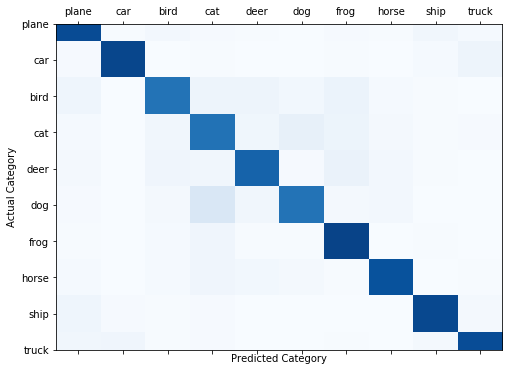

Category   - Accuracy
plane      - 89.1
car        - 91.4
bird       - 74.2
cat        - 74.5
deer       - 80.1
dog        - 74.1
frog       - 92.4
horse      - 86.9
ship       - 90.5
truck      - 88.9

Selected workers

[31 37 96 56 53 74 60 49 66 13 70 25 63 41 50]
Worker 31 : is  Stealthy_Attacker
Worker 37 : is  Stealthy_Attacker
Worker 96 : is  Honest
Worker 56 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 74 : is  Honest
Worker 60 : is  Honest
Worker 49 : is  Honest
Worker 66 : is  Stealthy_Attacker
Worker 13 : is  Stealthy_Attacker
Worker 70 : is  Honest
Worker 25 : is  Honest
Worker 63 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 50 : is  Stealthy_Attacker

 | Global Training Round : 61 |


Worker 31 starts training in Global Round:61 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  61


Train Epoch: 1 [0/500	(1%)]	Loss: 1.122335
Train Epoch: 1 [400/500	(81%)]	Loss: 0.544615
Train Epoch: 2 [0/500	(1%)]	Loss: 0.402080
Train Epoch: 2 [400/500	(81%)]	Loss: 0.473036
Train Epoch: 3 [0/500	(1%)]	Loss: 0.238218
Train Epoch: 3 [400/500	(81%)]	Loss: 0.352254
Train Epoch: 4 [0/500	(1%)]	Loss: 0.185090
Train Epoch: 4 [400/500	(81%)]	Loss: 0.285201
Train Epoch: 5 [0/500	(1%)]	Loss: 0.144595
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191470

Performed attacks 1
Worker 31 ends training in Global Round:61 |

Worker 37 starts training in Global Round:61 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  61


Train Epoch: 1 [0/500	(1%)]	Loss: 1.182759
Train Epoch: 1 [400/500	(81%)]	Loss: 0.824637
Train Epoch: 2 [0/500	(1%)]	Loss: 0.134409
Train Epoch: 2 [400/500	(81%)]	Loss: 0.482137
Train Epoch: 3 [0/500	(1%)]	Loss: 0.357189
Train Epoch: 3 [400/500	(81%)]	Loss: 0.244267
Train Epoch: 4 [0/500	(1%)]	Loss: 0.211567
Train Epoch: 4 [400/500	(81%)]	Loss: 0.261348
Train Epoch: 5 [0/500	(1%)]	Loss: 0.105725
Train Epoch: 5 [400/500	(81%)]	Loss: 0.161481

Performed attacks 2
Worker 37 ends training in Global Round:61 |

Worker 96 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.237837
Train Epoch: 1 [400/500	(81%)]	Loss: 0.297131
Train Epoch: 2 [0/500	(1%)]	Loss: 0.106695
Train Epoch: 2 [400/500	(81%)]	Loss: 0.126960
Train Epoch: 3 [0/500	(1%)]	Loss: 0.072332
Train Epoch: 3 [400/500	(81%)]	Loss: 0.119516
Train Epoch: 4 [0/500	(1%)]	Loss: 0.087679
Train Epoch: 4 [400/500	(81%)]	Loss: 0.135258
Train Epoch: 5 [0/500	(1%)]	Loss: 0.036029
Train Epoch: 5 [400/500	(81%)]	Loss: 0.137067

Worker 96 ends training in Global Round:61 |

Worker 56 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.232082
Train Epoch: 1 [400/500	(81%)]	Loss: 0.294778
Train Epoch: 2 [0/500	(1%)]	Loss: 0.140241
Train Epoch: 2 [400/500	(81%)]	Loss: 0.303105
Train Epoch: 3 [0/500	(1%)]	Loss: 0.170951
Train Epoch: 3 [400/500	(81%)]	Loss: 0.231491
Train Epoch: 4 [0/500	(1%)]	Loss: 0.089915
Train Epoch: 4 [400/500	(81%)]	Loss: 0.112290
Train Epoch: 5 [0/500	(1%)]	Loss: 0.059370
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149556

Worker 56 ends training in Global Round:61 |

Worker 53 starts training in Global Round:61 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  61


Train Epoch: 1 [0/500	(1%)]	Loss: 1.433423
Train Epoch: 1 [400/500	(81%)]	Loss: 0.642424
Train Epoch: 2 [0/500	(1%)]	Loss: 0.411561
Train Epoch: 2 [400/500	(81%)]	Loss: 0.535426
Train Epoch: 3 [0/500	(1%)]	Loss: 0.235537
Train Epoch: 3 [400/500	(81%)]	Loss: 0.317216
Train Epoch: 4 [0/500	(1%)]	Loss: 0.303870
Train Epoch: 4 [400/500	(81%)]	Loss: 0.289269
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192114
Train Epoch: 5 [400/500	(81%)]	Loss: 0.240335

Performed attacks 3
Worker 53 ends training in Global Round:61 |

Worker 74 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.212517
Train Epoch: 1 [400/500	(81%)]	Loss: 0.237793
Train Epoch: 2 [0/500	(1%)]	Loss: 0.219806
Train Epoch: 2 [400/500	(81%)]	Loss: 0.330674
Train Epoch: 3 [0/500	(1%)]	Loss: 0.157378
Train Epoch: 3 [400/500	(81%)]	Loss: 0.207087
Train Epoch: 4 [0/500	(1%)]	Loss: 0.133924
Train Epoch: 4 [400/500	(81%)]	Loss: 0.110210
Train Epoch: 5 [0/500	(1%)]	Loss: 0.097173
Train Epoch: 5 [400/500	(81%)]	Loss: 0.113688

Worker 74 ends training in Global Round:61 |

Worker 60 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.386939
Train Epoch: 1 [400/500	(81%)]	Loss: 0.519247
Train Epoch: 2 [0/500	(1%)]	Loss: 0.198979
Train Epoch: 2 [400/500	(81%)]	Loss: 0.254965
Train Epoch: 3 [0/500	(1%)]	Loss: 0.052228
Train Epoch: 3 [400/500	(81%)]	Loss: 0.219700
Train Epoch: 4 [0/500	(1%)]	Loss: 0.108057
Train Epoch: 4 [400/500	(81%)]	Loss: 0.209175
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171113
Train Epoch: 5 [400/500	(81%)]	Loss: 0.245059

Worker 60 ends training in Global Round:61 |

Worker 49 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.435429
Train Epoch: 1 [400/500	(81%)]	Loss: 0.505551
Train Epoch: 2 [0/500	(1%)]	Loss: 0.214335
Train Epoch: 2 [400/500	(81%)]	Loss: 0.247624
Train Epoch: 3 [0/500	(1%)]	Loss: 0.095645
Train Epoch: 3 [400/500	(81%)]	Loss: 0.228968
Train Epoch: 4 [0/500	(1%)]	Loss: 0.137817
Train Epoch: 4 [400/500	(81%)]	Loss: 0.125510
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175684
Train Epoch: 5 [400/500	(81%)]	Loss: 0.128614

Worker 49 ends training in Global Round:61 |

Worker 66 starts training in Global Round:61 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  61


Train Epoch: 1 [0/500	(1%)]	Loss: 1.641561
Train Epoch: 1 [400/500	(81%)]	Loss: 0.344116
Train Epoch: 2 [0/500	(1%)]	Loss: 0.165370
Train Epoch: 2 [400/500	(81%)]	Loss: 0.353732
Train Epoch: 3 [0/500	(1%)]	Loss: 0.273438
Train Epoch: 3 [400/500	(81%)]	Loss: 0.328875
Train Epoch: 4 [0/500	(1%)]	Loss: 0.265333
Train Epoch: 4 [400/500	(81%)]	Loss: 0.177613
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110766
Train Epoch: 5 [400/500	(81%)]	Loss: 0.109436

Performed attacks 4
Worker 66 ends training in Global Round:61 |

Worker 13 starts training in Global Round:61 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  61


Train Epoch: 1 [0/500	(1%)]	Loss: 1.030403
Train Epoch: 1 [400/500	(81%)]	Loss: 0.422709
Train Epoch: 2 [0/500	(1%)]	Loss: 0.330278
Train Epoch: 2 [400/500	(81%)]	Loss: 0.538963
Train Epoch: 3 [0/500	(1%)]	Loss: 0.234116
Train Epoch: 3 [400/500	(81%)]	Loss: 0.358408
Train Epoch: 4 [0/500	(1%)]	Loss: 0.209034
Train Epoch: 4 [400/500	(81%)]	Loss: 0.319605
Train Epoch: 5 [0/500	(1%)]	Loss: 0.217122
Train Epoch: 5 [400/500	(81%)]	Loss: 0.325473

Performed attacks 5
Worker 13 ends training in Global Round:61 |

Worker 70 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.294091
Train Epoch: 1 [400/500	(81%)]	Loss: 0.397609
Train Epoch: 2 [0/500	(1%)]	Loss: 0.214005
Train Epoch: 2 [400/500	(81%)]	Loss: 0.292507
Train Epoch: 3 [0/500	(1%)]	Loss: 0.158399
Train Epoch: 3 [400/500	(81%)]	Loss: 0.206712
Train Epoch: 4 [0/500	(1%)]	Loss: 0.141692
Train Epoch: 4 [400/500	(81%)]	Loss: 0.206466
Train Epoch: 5 [0/500	(1%)]	Loss: 0.167582
Train Epoch: 5 [400/500	(81%)]	Loss: 0.173608

Worker 70 ends training in Global Round:61 |

Worker 25 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.503036
Train Epoch: 1 [400/500	(81%)]	Loss: 0.347561
Train Epoch: 2 [0/500	(1%)]	Loss: 0.188990
Train Epoch: 2 [400/500	(81%)]	Loss: 0.298865
Train Epoch: 3 [0/500	(1%)]	Loss: 0.116024
Train Epoch: 3 [400/500	(81%)]	Loss: 0.191053
Train Epoch: 4 [0/500	(1%)]	Loss: 0.190247
Train Epoch: 4 [400/500	(81%)]	Loss: 0.255581
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114990
Train Epoch: 5 [400/500	(81%)]	Loss: 0.095609

Worker 25 ends training in Global Round:61 |

Worker 63 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.288701
Train Epoch: 1 [400/500	(81%)]	Loss: 0.618045
Train Epoch: 2 [0/500	(1%)]	Loss: 0.188952
Train Epoch: 2 [400/500	(81%)]	Loss: 0.284131
Train Epoch: 3 [0/500	(1%)]	Loss: 0.236430
Train Epoch: 3 [400/500	(81%)]	Loss: 0.168026
Train Epoch: 4 [0/500	(1%)]	Loss: 0.148951
Train Epoch: 4 [400/500	(81%)]	Loss: 0.240449
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081531
Train Epoch: 5 [400/500	(81%)]	Loss: 0.183254

Worker 63 ends training in Global Round:61 |

Worker 41 starts training in Global Round:61 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  61


Train Epoch: 1 [0/500	(1%)]	Loss: 1.696069
Train Epoch: 1 [400/500	(81%)]	Loss: 0.598495
Train Epoch: 2 [0/500	(1%)]	Loss: 0.315407
Train Epoch: 2 [400/500	(81%)]	Loss: 0.411989
Train Epoch: 3 [0/500	(1%)]	Loss: 0.382132
Train Epoch: 3 [400/500	(81%)]	Loss: 0.514942
Train Epoch: 4 [0/500	(1%)]	Loss: 0.254679
Train Epoch: 4 [400/500	(81%)]	Loss: 0.482181
Train Epoch: 5 [0/500	(1%)]	Loss: 0.257201
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149734

Performed attacks 6
Worker 41 ends training in Global Round:61 |

Worker 50 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.577604
Train Epoch: 1 [400/500	(81%)]	Loss: 0.675930
Train Epoch: 2 [0/500	(1%)]	Loss: 0.181383
Train Epoch: 2 [400/500	(81%)]	Loss: 0.265206
Train Epoch: 3 [0/500	(1%)]	Loss: 0.164365
Train Epoch: 3 [400/500	(81%)]	Loss: 0.373829
Train Epoch: 4 [0/500	(1%)]	Loss: 0.292524
Train Epoch: 4 [400/500	(81%)]	Loss: 0.357084
Train Epoch: 5 [0/500	(1%)]	Loss: 0.257917
Train Epoch: 5 [400/500	(81%)]	Loss: 0.275466

Worker 50 ends training in Global Round:61 |
Last layer biases  [array([ 0.03663845, -0.03118401, -0.01423345,  0.03964727,  0.05084806,
       -0.01314406,  0.04023569, -0.0297382 , -0.02238592, -0.04078197],
      dtype=float32), array([ 0.0349048 , -0.03273742, -0.01145594,  0.03992553,  0.04851776,
       -0.01403316,  0.03930055, -0.02718094, -0.01895321, -0.04238612],
      dtype=float32), array([ 0.03492645, -0.03260352, -0.01804558,  0.04125999,  0.03974589,
       -0.01804234,  0.03955229, -0.00759161, -0.02225673, -0.04104301],
      dtyp

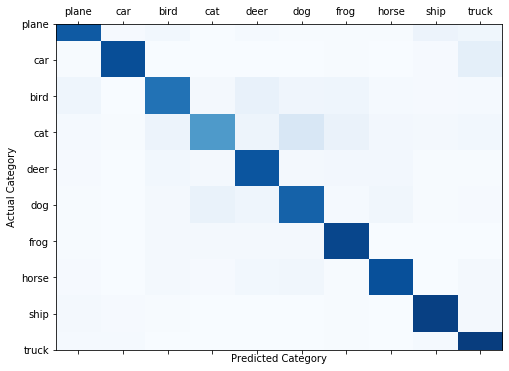

Category   - Accuracy
plane      - 83.9
car        - 88.3
bird       - 74.3
cat        - 58.6
deer       - 85.9
dog        - 80.5
frog       - 91.2
horse      - 87.6
ship       - 93.4
truck      - 94.8

Selected workers

[ 25   5  65  91   6  24  49  51  99 100  29  45  61   7  72]
Worker 25 : is  Honest
Worker 5 : is  Honest
Worker 65 : is  Honest
Worker 91 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 24 : is  Honest
Worker 49 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 100 : is  Honest
Worker 29 : is  Honest
Worker 45 : is  Honest
Worker 61 : is  Honest
Worker 7 : is  Honest
Worker 72 : is  Stealthy_Attacker

 | Global Training Round : 62 |


Worker 25 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.176074
Train Epoch: 1 [400/500	(81%)]	Loss: 0.264503
Train Epoch: 2 [0/500	(1%)]	Loss: 0.118795
Train Epoch: 2 [400/500	(81%)]	Loss: 0.237456
Train Epoch: 3 [0/500	(1%)]	Loss: 0.208010
Train Epoch: 3 [400/500	(81%)]	Loss: 0.297141
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105245
Train Epoch: 4 [400/500	(81%)]	Loss: 0.220394
Train Epoch: 5 [0/500	(1%)]	Loss: 0.067001
Train Epoch: 5 [400/500	(81%)]	Loss: 0.152065

Worker 25 ends training in Global Round:62 |

Worker 5 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.216131
Train Epoch: 1 [400/500	(81%)]	Loss: 0.334556
Train Epoch: 2 [0/500	(1%)]	Loss: 0.123248
Train Epoch: 2 [400/500	(81%)]	Loss: 0.286859
Train Epoch: 3 [0/500	(1%)]	Loss: 0.090532
Train Epoch: 3 [400/500	(81%)]	Loss: 0.189728
Train Epoch: 4 [0/500	(1%)]	Loss: 0.085562
Train Epoch: 4 [400/500	(81%)]	Loss: 0.130953
Train Epoch: 5 [0/500	(1%)]	Loss: 0.057519
Train Epoch: 5 [400/500	(81%)]	Loss: 0.097140

Worker 5 ends training in Global Round:62 |

Worker 65 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.359908
Train Epoch: 1 [400/500	(81%)]	Loss: 0.509187
Train Epoch: 2 [0/500	(1%)]	Loss: 0.265056
Train Epoch: 2 [400/500	(81%)]	Loss: 0.228181
Train Epoch: 3 [0/500	(1%)]	Loss: 0.132132
Train Epoch: 3 [400/500	(81%)]	Loss: 0.147497
Train Epoch: 4 [0/500	(1%)]	Loss: 0.128434
Train Epoch: 4 [400/500	(81%)]	Loss: 0.126533
Train Epoch: 5 [0/500	(1%)]	Loss: 0.049417
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139996

Worker 65 ends training in Global Round:62 |

Worker 91 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.344378
Train Epoch: 1 [400/500	(81%)]	Loss: 0.318432
Train Epoch: 2 [0/500	(1%)]	Loss: 0.134795
Train Epoch: 2 [400/500	(81%)]	Loss: 0.269710
Train Epoch: 3 [0/500	(1%)]	Loss: 0.157463
Train Epoch: 3 [400/500	(81%)]	Loss: 0.167847
Train Epoch: 4 [0/500	(1%)]	Loss: 0.138087
Train Epoch: 4 [400/500	(81%)]	Loss: 0.212089
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111338
Train Epoch: 5 [400/500	(81%)]	Loss: 0.166337

Worker 91 ends training in Global Round:62 |

Worker 6 starts training in Global Round:62 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  62


Train Epoch: 1 [0/500	(1%)]	Loss: 1.136765
Train Epoch: 1 [400/500	(81%)]	Loss: 0.586472
Train Epoch: 2 [0/500	(1%)]	Loss: 0.294123
Train Epoch: 2 [400/500	(81%)]	Loss: 0.510507
Train Epoch: 3 [0/500	(1%)]	Loss: 0.288962
Train Epoch: 3 [400/500	(81%)]	Loss: 0.243027
Train Epoch: 4 [0/500	(1%)]	Loss: 0.131438
Train Epoch: 4 [400/500	(81%)]	Loss: 0.203759
Train Epoch: 5 [0/500	(1%)]	Loss: 0.119674
Train Epoch: 5 [400/500	(81%)]	Loss: 0.174951

Performed attacks 1
Worker 6 ends training in Global Round:62 |

Worker 24 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.380477
Train Epoch: 1 [400/500	(81%)]	Loss: 0.262231
Train Epoch: 2 [0/500	(1%)]	Loss: 0.172573
Train Epoch: 2 [400/500	(81%)]	Loss: 0.171293
Train Epoch: 3 [0/500	(1%)]	Loss: 0.161652
Train Epoch: 3 [400/500	(81%)]	Loss: 0.184974
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119617
Train Epoch: 4 [400/500	(81%)]	Loss: 0.231863
Train Epoch: 5 [0/500	(1%)]	Loss: 0.049207
Train Epoch: 5 [400/500	(81%)]	Loss: 0.040859

Worker 24 ends training in Global Round:62 |

Worker 49 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.330845
Train Epoch: 1 [400/500	(81%)]	Loss: 0.223211
Train Epoch: 2 [0/500	(1%)]	Loss: 0.124041
Train Epoch: 2 [400/500	(81%)]	Loss: 0.296651
Train Epoch: 3 [0/500	(1%)]	Loss: 0.113862
Train Epoch: 3 [400/500	(81%)]	Loss: 0.275866
Train Epoch: 4 [0/500	(1%)]	Loss: 0.045884
Train Epoch: 4 [400/500	(81%)]	Loss: 0.254447
Train Epoch: 5 [0/500	(1%)]	Loss: 0.062570
Train Epoch: 5 [400/500	(81%)]	Loss: 0.062934

Worker 49 ends training in Global Round:62 |

Worker 51 starts training in Global Round:62 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  62


Train Epoch: 1 [0/500	(1%)]	Loss: 1.143598
Train Epoch: 1 [400/500	(81%)]	Loss: 0.590502
Train Epoch: 2 [0/500	(1%)]	Loss: 0.256644
Train Epoch: 2 [400/500	(81%)]	Loss: 0.587911
Train Epoch: 3 [0/500	(1%)]	Loss: 0.266914
Train Epoch: 3 [400/500	(81%)]	Loss: 0.441534
Train Epoch: 4 [0/500	(1%)]	Loss: 0.227198
Train Epoch: 4 [400/500	(81%)]	Loss: 0.283839
Train Epoch: 5 [0/500	(1%)]	Loss: 0.259506
Train Epoch: 5 [400/500	(81%)]	Loss: 0.230860

Performed attacks 2
Worker 51 ends training in Global Round:62 |

Worker 99 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.312747
Train Epoch: 1 [400/500	(81%)]	Loss: 0.301670
Train Epoch: 2 [0/500	(1%)]	Loss: 0.107891
Train Epoch: 2 [400/500	(81%)]	Loss: 0.173607
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142808
Train Epoch: 3 [400/500	(81%)]	Loss: 0.121762
Train Epoch: 4 [0/500	(1%)]	Loss: 0.059064
Train Epoch: 4 [400/500	(81%)]	Loss: 0.161493
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083944
Train Epoch: 5 [400/500	(81%)]	Loss: 0.182908

Worker 99 ends training in Global Round:62 |

Worker 100 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.405843
Train Epoch: 1 [400/500	(81%)]	Loss: 0.278485
Train Epoch: 2 [0/500	(1%)]	Loss: 0.183988
Train Epoch: 2 [400/500	(81%)]	Loss: 0.135673
Train Epoch: 3 [0/500	(1%)]	Loss: 0.187010
Train Epoch: 3 [400/500	(81%)]	Loss: 0.252005
Train Epoch: 4 [0/500	(1%)]	Loss: 0.057449
Train Epoch: 4 [400/500	(81%)]	Loss: 0.230590
Train Epoch: 5 [0/500	(1%)]	Loss: 0.059722
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253210

Worker 100 ends training in Global Round:62 |

Worker 29 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.205302
Train Epoch: 1 [400/500	(81%)]	Loss: 0.370260
Train Epoch: 2 [0/500	(1%)]	Loss: 0.193586
Train Epoch: 2 [400/500	(81%)]	Loss: 0.123159
Train Epoch: 3 [0/500	(1%)]	Loss: 0.173689
Train Epoch: 3 [400/500	(81%)]	Loss: 0.180459
Train Epoch: 4 [0/500	(1%)]	Loss: 0.190976
Train Epoch: 4 [400/500	(81%)]	Loss: 0.240512
Train Epoch: 5 [0/500	(1%)]	Loss: 0.063154
Train Epoch: 5 [400/500	(81%)]	Loss: 0.197048

Worker 29 ends training in Global Round:62 |

Worker 45 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.390432
Train Epoch: 1 [400/500	(81%)]	Loss: 0.229705
Train Epoch: 2 [0/500	(1%)]	Loss: 0.128207
Train Epoch: 2 [400/500	(81%)]	Loss: 0.231809
Train Epoch: 3 [0/500	(1%)]	Loss: 0.086608
Train Epoch: 3 [400/500	(81%)]	Loss: 0.255096
Train Epoch: 4 [0/500	(1%)]	Loss: 0.151148
Train Epoch: 4 [400/500	(81%)]	Loss: 0.078547
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100226
Train Epoch: 5 [400/500	(81%)]	Loss: 0.094905

Worker 45 ends training in Global Round:62 |

Worker 61 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.226877
Train Epoch: 1 [400/500	(81%)]	Loss: 0.436453
Train Epoch: 2 [0/500	(1%)]	Loss: 0.282131
Train Epoch: 2 [400/500	(81%)]	Loss: 0.167804
Train Epoch: 3 [0/500	(1%)]	Loss: 0.118844
Train Epoch: 3 [400/500	(81%)]	Loss: 0.212866
Train Epoch: 4 [0/500	(1%)]	Loss: 0.093307
Train Epoch: 4 [400/500	(81%)]	Loss: 0.195084
Train Epoch: 5 [0/500	(1%)]	Loss: 0.130273
Train Epoch: 5 [400/500	(81%)]	Loss: 0.173963

Worker 61 ends training in Global Round:62 |

Worker 7 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.331935
Train Epoch: 1 [400/500	(81%)]	Loss: 0.632667
Train Epoch: 2 [0/500	(1%)]	Loss: 0.234980
Train Epoch: 2 [400/500	(81%)]	Loss: 0.379860
Train Epoch: 3 [0/500	(1%)]	Loss: 0.278966
Train Epoch: 3 [400/500	(81%)]	Loss: 0.390184
Train Epoch: 4 [0/500	(1%)]	Loss: 0.112412
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309980
Train Epoch: 5 [0/500	(1%)]	Loss: 0.159899
Train Epoch: 5 [400/500	(81%)]	Loss: 0.221562

Worker 7 ends training in Global Round:62 |

Worker 72 starts training in Global Round:62 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  62


Train Epoch: 1 [0/500	(1%)]	Loss: 1.315221
Train Epoch: 1 [400/500	(81%)]	Loss: 0.557203
Train Epoch: 2 [0/500	(1%)]	Loss: 0.261020
Train Epoch: 2 [400/500	(81%)]	Loss: 0.612200
Train Epoch: 3 [0/500	(1%)]	Loss: 0.232956
Train Epoch: 3 [400/500	(81%)]	Loss: 0.325435
Train Epoch: 4 [0/500	(1%)]	Loss: 0.205215
Train Epoch: 4 [400/500	(81%)]	Loss: 0.358915
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125426
Train Epoch: 5 [400/500	(81%)]	Loss: 0.229990

Performed attacks 3
Worker 72 ends training in Global Round:62 |
Last layer biases  [array([ 0.03530461, -0.03258393, -0.01472821,  0.03703076,  0.0387051 ,
       -0.01649961,  0.03922542, -0.00699168, -0.02076822, -0.04279241],
      dtype=float32), array([ 0.03535025, -0.03158698, -0.01553065,  0.0394782 ,  0.03895779,
       -0.01713231,  0.03826189, -0.00659806, -0.02427483, -0.04102346],
      dtype=float32), array([ 0.03355244, -0.031709  , -0.01436423,  0.03592599,  0.03828203,
       -0.01392264,  0.03799402, -0.00523778, -0.022885  , -0.0

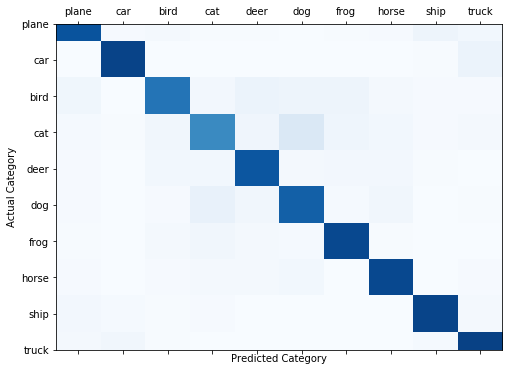

Category   - Accuracy
plane      - 86.5
car        - 92.5
bird       - 73.6
cat        - 65.3
deer       - 85.3
dog        - 81.4
frog       - 90.5
horse      - 90.4
ship       - 91.8
truck      - 93.0

Selected workers

[27 76 77 68 93 81 49 37 75 83 96 29 58 92 78]
Worker 27 : is  Stealthy_Attacker
Worker 76 : is  Honest
Worker 77 : is  Honest
Worker 68 : is  Honest
Worker 93 : is  Honest
Worker 81 : is  Honest
Worker 49 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 83 : is  Honest
Worker 96 : is  Honest
Worker 29 : is  Honest
Worker 58 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 78 : is  Honest

 | Global Training Round : 63 |


Worker 27 starts training in Global Round:63 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  63


Train Epoch: 1 [0/500	(1%)]	Loss: 1.280020
Train Epoch: 1 [400/500	(81%)]	Loss: 0.592873
Train Epoch: 2 [0/500	(1%)]	Loss: 0.358124
Train Epoch: 2 [400/500	(81%)]	Loss: 0.347142
Train Epoch: 3 [0/500	(1%)]	Loss: 0.371780
Train Epoch: 3 [400/500	(81%)]	Loss: 0.350174
Train Epoch: 4 [0/500	(1%)]	Loss: 0.213435
Train Epoch: 4 [400/500	(81%)]	Loss: 0.242257
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157528
Train Epoch: 5 [400/500	(81%)]	Loss: 0.185886

Performed attacks 1
Worker 27 ends training in Global Round:63 |

Worker 76 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.374475
Train Epoch: 1 [400/500	(81%)]	Loss: 0.258282
Train Epoch: 2 [0/500	(1%)]	Loss: 0.198091
Train Epoch: 2 [400/500	(81%)]	Loss: 0.296883
Train Epoch: 3 [0/500	(1%)]	Loss: 0.169296
Train Epoch: 3 [400/500	(81%)]	Loss: 0.142420
Train Epoch: 4 [0/500	(1%)]	Loss: 0.114377
Train Epoch: 4 [400/500	(81%)]	Loss: 0.195677
Train Epoch: 5 [0/500	(1%)]	Loss: 0.096660
Train Epoch: 5 [400/500	(81%)]	Loss: 0.126971

Worker 76 ends training in Global Round:63 |

Worker 77 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.572708
Train Epoch: 1 [400/500	(81%)]	Loss: 0.395176
Train Epoch: 2 [0/500	(1%)]	Loss: 0.221222
Train Epoch: 2 [400/500	(81%)]	Loss: 0.643866
Train Epoch: 3 [0/500	(1%)]	Loss: 0.171110
Train Epoch: 3 [400/500	(81%)]	Loss: 0.321013
Train Epoch: 4 [0/500	(1%)]	Loss: 0.208903
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192617
Train Epoch: 5 [0/500	(1%)]	Loss: 0.136664
Train Epoch: 5 [400/500	(81%)]	Loss: 0.133641

Worker 77 ends training in Global Round:63 |

Worker 68 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.393083
Train Epoch: 1 [400/500	(81%)]	Loss: 0.551450
Train Epoch: 2 [0/500	(1%)]	Loss: 0.171040
Train Epoch: 2 [400/500	(81%)]	Loss: 0.337357
Train Epoch: 3 [0/500	(1%)]	Loss: 0.208405
Train Epoch: 3 [400/500	(81%)]	Loss: 0.160655
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187042
Train Epoch: 4 [400/500	(81%)]	Loss: 0.245814
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138282
Train Epoch: 5 [400/500	(81%)]	Loss: 0.271882

Worker 68 ends training in Global Round:63 |

Worker 93 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.438111
Train Epoch: 1 [400/500	(81%)]	Loss: 0.540841
Train Epoch: 2 [0/500	(1%)]	Loss: 0.169015
Train Epoch: 2 [400/500	(81%)]	Loss: 0.244277
Train Epoch: 3 [0/500	(1%)]	Loss: 0.208596
Train Epoch: 3 [400/500	(81%)]	Loss: 0.318624
Train Epoch: 4 [0/500	(1%)]	Loss: 0.147761
Train Epoch: 4 [400/500	(81%)]	Loss: 0.127302
Train Epoch: 5 [0/500	(1%)]	Loss: 0.086836
Train Epoch: 5 [400/500	(81%)]	Loss: 0.205633

Worker 93 ends training in Global Round:63 |

Worker 81 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.187900
Train Epoch: 1 [400/500	(81%)]	Loss: 0.207957
Train Epoch: 2 [0/500	(1%)]	Loss: 0.115420
Train Epoch: 2 [400/500	(81%)]	Loss: 0.104775
Train Epoch: 3 [0/500	(1%)]	Loss: 0.135958
Train Epoch: 3 [400/500	(81%)]	Loss: 0.107750
Train Epoch: 4 [0/500	(1%)]	Loss: 0.041156
Train Epoch: 4 [400/500	(81%)]	Loss: 0.278465
Train Epoch: 5 [0/500	(1%)]	Loss: 0.105183
Train Epoch: 5 [400/500	(81%)]	Loss: 0.239355

Worker 81 ends training in Global Round:63 |

Worker 49 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.124676
Train Epoch: 1 [400/500	(81%)]	Loss: 0.210680
Train Epoch: 2 [0/500	(1%)]	Loss: 0.124902
Train Epoch: 2 [400/500	(81%)]	Loss: 0.138068
Train Epoch: 3 [0/500	(1%)]	Loss: 0.079171
Train Epoch: 3 [400/500	(81%)]	Loss: 0.153701
Train Epoch: 4 [0/500	(1%)]	Loss: 0.075997
Train Epoch: 4 [400/500	(81%)]	Loss: 0.129415
Train Epoch: 5 [0/500	(1%)]	Loss: 0.104337
Train Epoch: 5 [400/500	(81%)]	Loss: 0.192810

Worker 49 ends training in Global Round:63 |

Worker 37 starts training in Global Round:63 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  63


Train Epoch: 1 [0/500	(1%)]	Loss: 1.580116
Train Epoch: 1 [400/500	(81%)]	Loss: 0.587817
Train Epoch: 2 [0/500	(1%)]	Loss: 0.320790
Train Epoch: 2 [400/500	(81%)]	Loss: 0.324024
Train Epoch: 3 [0/500	(1%)]	Loss: 0.281786
Train Epoch: 3 [400/500	(81%)]	Loss: 0.489225
Train Epoch: 4 [0/500	(1%)]	Loss: 0.305369
Train Epoch: 4 [400/500	(81%)]	Loss: 0.310005
Train Epoch: 5 [0/500	(1%)]	Loss: 0.255303
Train Epoch: 5 [400/500	(81%)]	Loss: 0.230703

Performed attacks 2
Worker 37 ends training in Global Round:63 |

Worker 75 starts training in Global Round:63 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  63


Train Epoch: 1 [0/500	(1%)]	Loss: 1.344959
Train Epoch: 1 [400/500	(81%)]	Loss: 0.588919
Train Epoch: 2 [0/500	(1%)]	Loss: 0.313908
Train Epoch: 2 [400/500	(81%)]	Loss: 0.575179
Train Epoch: 3 [0/500	(1%)]	Loss: 0.287443
Train Epoch: 3 [400/500	(81%)]	Loss: 0.427911
Train Epoch: 4 [0/500	(1%)]	Loss: 0.273790
Train Epoch: 4 [400/500	(81%)]	Loss: 0.196605
Train Epoch: 5 [0/500	(1%)]	Loss: 0.183406
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242533

Performed attacks 3
Worker 75 ends training in Global Round:63 |

Worker 83 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.443559
Train Epoch: 1 [400/500	(81%)]	Loss: 0.454106
Train Epoch: 2 [0/500	(1%)]	Loss: 0.170212
Train Epoch: 2 [400/500	(81%)]	Loss: 0.292643
Train Epoch: 3 [0/500	(1%)]	Loss: 0.120193
Train Epoch: 3 [400/500	(81%)]	Loss: 0.223560
Train Epoch: 4 [0/500	(1%)]	Loss: 0.097541
Train Epoch: 4 [400/500	(81%)]	Loss: 0.384049
Train Epoch: 5 [0/500	(1%)]	Loss: 0.235167
Train Epoch: 5 [400/500	(81%)]	Loss: 0.197733

Worker 83 ends training in Global Round:63 |

Worker 96 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.298672
Train Epoch: 1 [400/500	(81%)]	Loss: 0.263863
Train Epoch: 2 [0/500	(1%)]	Loss: 0.240335
Train Epoch: 2 [400/500	(81%)]	Loss: 0.121636
Train Epoch: 3 [0/500	(1%)]	Loss: 0.149829
Train Epoch: 3 [400/500	(81%)]	Loss: 0.240598
Train Epoch: 4 [0/500	(1%)]	Loss: 0.080042
Train Epoch: 4 [400/500	(81%)]	Loss: 0.113725
Train Epoch: 5 [0/500	(1%)]	Loss: 0.054513
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171672

Worker 96 ends training in Global Round:63 |

Worker 29 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.185644
Train Epoch: 1 [400/500	(81%)]	Loss: 0.230290
Train Epoch: 2 [0/500	(1%)]	Loss: 0.148083
Train Epoch: 2 [400/500	(81%)]	Loss: 0.160193
Train Epoch: 3 [0/500	(1%)]	Loss: 0.084256
Train Epoch: 3 [400/500	(81%)]	Loss: 0.107176
Train Epoch: 4 [0/500	(1%)]	Loss: 0.063283
Train Epoch: 4 [400/500	(81%)]	Loss: 0.259709
Train Epoch: 5 [0/500	(1%)]	Loss: 0.096568
Train Epoch: 5 [400/500	(81%)]	Loss: 0.122881

Worker 29 ends training in Global Round:63 |

Worker 58 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.363073
Train Epoch: 1 [400/500	(81%)]	Loss: 0.307462
Train Epoch: 2 [0/500	(1%)]	Loss: 0.118728
Train Epoch: 2 [400/500	(81%)]	Loss: 0.123838
Train Epoch: 3 [0/500	(1%)]	Loss: 0.219531
Train Epoch: 3 [400/500	(81%)]	Loss: 0.161164
Train Epoch: 4 [0/500	(1%)]	Loss: 0.135499
Train Epoch: 4 [400/500	(81%)]	Loss: 0.105740
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170134
Train Epoch: 5 [400/500	(81%)]	Loss: 0.146320

Worker 58 ends training in Global Round:63 |

Worker 92 starts training in Global Round:63 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  63


Train Epoch: 1 [0/500	(1%)]	Loss: 1.329995
Train Epoch: 1 [400/500	(81%)]	Loss: 0.718158
Train Epoch: 2 [0/500	(1%)]	Loss: 0.392254
Train Epoch: 2 [400/500	(81%)]	Loss: 0.472135
Train Epoch: 3 [0/500	(1%)]	Loss: 0.299544
Train Epoch: 3 [400/500	(81%)]	Loss: 0.396379
Train Epoch: 4 [0/500	(1%)]	Loss: 0.293579
Train Epoch: 4 [400/500	(81%)]	Loss: 0.377178
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172067
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177330

Performed attacks 4
Worker 92 ends training in Global Round:63 |

Worker 78 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.245489
Train Epoch: 1 [400/500	(81%)]	Loss: 0.384016
Train Epoch: 2 [0/500	(1%)]	Loss: 0.202554
Train Epoch: 2 [400/500	(81%)]	Loss: 0.144580
Train Epoch: 3 [0/500	(1%)]	Loss: 0.218674
Train Epoch: 3 [400/500	(81%)]	Loss: 0.112448
Train Epoch: 4 [0/500	(1%)]	Loss: 0.077512
Train Epoch: 4 [400/500	(81%)]	Loss: 0.148069
Train Epoch: 5 [0/500	(1%)]	Loss: 0.076206
Train Epoch: 5 [400/500	(81%)]	Loss: 0.102917

Worker 78 ends training in Global Round:63 |
Last layer biases  [array([ 0.03507235, -0.03326954, -0.00974952,  0.03649454,  0.04979814,
       -0.01295373,  0.0406056 , -0.02892474, -0.02124126, -0.03993   ],
      dtype=float32), array([ 0.03371988, -0.03217736, -0.01260141,  0.03816627,  0.03948109,
       -0.01747572,  0.03942515, -0.00847384, -0.02225336, -0.04190888],
      dtype=float32), array([ 0.03316995, -0.02930661, -0.01546608,  0.03589115,  0.03803407,
       -0.01731687,  0.04099692, -0.00604698, -0.0210866 , -0.04296708],
      dtyp

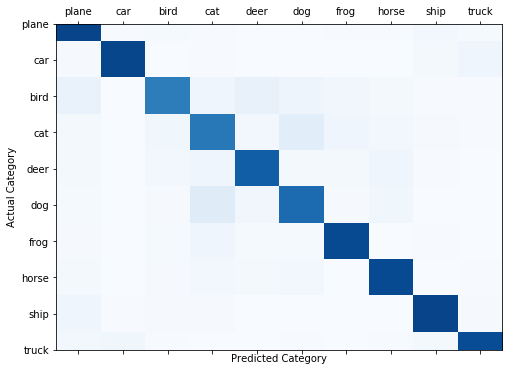

Category   - Accuracy
plane      - 91.9
car        - 91.4
bird       - 70.2
cat        - 72.2
deer       - 82.3
dog        - 77.3
frog       - 89.7
horse      - 89.5
ship       - 91.9
truck      - 88.8

Selected workers

[92 20 62 86 47 93 96 28 85 73 37 12 15 80 54]
Worker 92 : is  Stealthy_Attacker
Worker 20 : is  Honest
Worker 62 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 47 : is  Honest
Worker 93 : is  Honest
Worker 96 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 85 : is  Honest
Worker 73 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 15 : is  Honest
Worker 80 : is  Honest
Worker 54 : is  Honest

 | Global Training Round : 64 |


Worker 92 starts training in Global Round:64 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  64


Train Epoch: 1 [0/500	(1%)]	Loss: 1.111406
Train Epoch: 1 [400/500	(81%)]	Loss: 0.587599
Train Epoch: 2 [0/500	(1%)]	Loss: 0.421247
Train Epoch: 2 [400/500	(81%)]	Loss: 0.558006
Train Epoch: 3 [0/500	(1%)]	Loss: 0.281002
Train Epoch: 3 [400/500	(81%)]	Loss: 0.339450
Train Epoch: 4 [0/500	(1%)]	Loss: 0.201791
Train Epoch: 4 [400/500	(81%)]	Loss: 0.327351
Train Epoch: 5 [0/500	(1%)]	Loss: 0.257436
Train Epoch: 5 [400/500	(81%)]	Loss: 0.162306

Performed attacks 1
Worker 92 ends training in Global Round:64 |

Worker 20 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.350771
Train Epoch: 1 [400/500	(81%)]	Loss: 0.277135
Train Epoch: 2 [0/500	(1%)]	Loss: 0.115055
Train Epoch: 2 [400/500	(81%)]	Loss: 0.163798
Train Epoch: 3 [0/500	(1%)]	Loss: 0.119157
Train Epoch: 3 [400/500	(81%)]	Loss: 0.149349
Train Epoch: 4 [0/500	(1%)]	Loss: 0.102789
Train Epoch: 4 [400/500	(81%)]	Loss: 0.119358
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138662
Train Epoch: 5 [400/500	(81%)]	Loss: 0.116457

Worker 20 ends training in Global Round:64 |

Worker 62 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.479567
Train Epoch: 1 [400/500	(81%)]	Loss: 0.556879
Train Epoch: 2 [0/500	(1%)]	Loss: 0.372128
Train Epoch: 2 [400/500	(81%)]	Loss: 0.186771
Train Epoch: 3 [0/500	(1%)]	Loss: 0.179893
Train Epoch: 3 [400/500	(81%)]	Loss: 0.257872
Train Epoch: 4 [0/500	(1%)]	Loss: 0.130504
Train Epoch: 4 [400/500	(81%)]	Loss: 0.236880
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170686
Train Epoch: 5 [400/500	(81%)]	Loss: 0.282875

Worker 62 ends training in Global Round:64 |

Worker 86 starts training in Global Round:64 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  64


Train Epoch: 1 [0/500	(1%)]	Loss: 1.124915
Train Epoch: 1 [400/500	(81%)]	Loss: 0.701508
Train Epoch: 2 [0/500	(1%)]	Loss: 0.335533
Train Epoch: 2 [400/500	(81%)]	Loss: 0.425948
Train Epoch: 3 [0/500	(1%)]	Loss: 0.198247
Train Epoch: 3 [400/500	(81%)]	Loss: 0.231133
Train Epoch: 4 [0/500	(1%)]	Loss: 0.148260
Train Epoch: 4 [400/500	(81%)]	Loss: 0.318930
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157055
Train Epoch: 5 [400/500	(81%)]	Loss: 0.243097

Performed attacks 2
Worker 86 ends training in Global Round:64 |

Worker 47 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.236358
Train Epoch: 1 [400/500	(81%)]	Loss: 0.310256
Train Epoch: 2 [0/500	(1%)]	Loss: 0.163296
Train Epoch: 2 [400/500	(81%)]	Loss: 0.210212
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142768
Train Epoch: 3 [400/500	(81%)]	Loss: 0.137234
Train Epoch: 4 [0/500	(1%)]	Loss: 0.089090
Train Epoch: 4 [400/500	(81%)]	Loss: 0.139125
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145401
Train Epoch: 5 [400/500	(81%)]	Loss: 0.247339

Worker 47 ends training in Global Round:64 |

Worker 93 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.341218
Train Epoch: 1 [400/500	(81%)]	Loss: 0.211579
Train Epoch: 2 [0/500	(1%)]	Loss: 0.173661
Train Epoch: 2 [400/500	(81%)]	Loss: 0.402598
Train Epoch: 3 [0/500	(1%)]	Loss: 0.102421
Train Epoch: 3 [400/500	(81%)]	Loss: 0.163537
Train Epoch: 4 [0/500	(1%)]	Loss: 0.078900
Train Epoch: 4 [400/500	(81%)]	Loss: 0.140159
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115352
Train Epoch: 5 [400/500	(81%)]	Loss: 0.299342

Worker 93 ends training in Global Round:64 |

Worker 96 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.270578
Train Epoch: 1 [400/500	(81%)]	Loss: 0.137496
Train Epoch: 2 [0/500	(1%)]	Loss: 0.189393
Train Epoch: 2 [400/500	(81%)]	Loss: 0.231143
Train Epoch: 3 [0/500	(1%)]	Loss: 0.096889
Train Epoch: 3 [400/500	(81%)]	Loss: 0.117452
Train Epoch: 4 [0/500	(1%)]	Loss: 0.114660
Train Epoch: 4 [400/500	(81%)]	Loss: 0.127567
Train Epoch: 5 [0/500	(1%)]	Loss: 0.080426
Train Epoch: 5 [400/500	(81%)]	Loss: 0.128025

Worker 96 ends training in Global Round:64 |

Worker 28 starts training in Global Round:64 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  64


Train Epoch: 1 [0/500	(1%)]	Loss: 1.220646
Train Epoch: 1 [400/500	(81%)]	Loss: 0.693646
Train Epoch: 2 [0/500	(1%)]	Loss: 0.318858
Train Epoch: 2 [400/500	(81%)]	Loss: 0.498373
Train Epoch: 3 [0/500	(1%)]	Loss: 0.466435
Train Epoch: 3 [400/500	(81%)]	Loss: 0.490575
Train Epoch: 4 [0/500	(1%)]	Loss: 0.245726
Train Epoch: 4 [400/500	(81%)]	Loss: 0.493449
Train Epoch: 5 [0/500	(1%)]	Loss: 0.225838
Train Epoch: 5 [400/500	(81%)]	Loss: 0.261048

Performed attacks 3
Worker 28 ends training in Global Round:64 |

Worker 85 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.480981
Train Epoch: 1 [400/500	(81%)]	Loss: 0.445685
Train Epoch: 2 [0/500	(1%)]	Loss: 0.252673
Train Epoch: 2 [400/500	(81%)]	Loss: 0.201869
Train Epoch: 3 [0/500	(1%)]	Loss: 0.210082
Train Epoch: 3 [400/500	(81%)]	Loss: 0.371530
Train Epoch: 4 [0/500	(1%)]	Loss: 0.148960
Train Epoch: 4 [400/500	(81%)]	Loss: 0.133579
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192154
Train Epoch: 5 [400/500	(81%)]	Loss: 0.201539

Worker 85 ends training in Global Round:64 |

Worker 73 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.342706
Train Epoch: 1 [400/500	(81%)]	Loss: 0.321643
Train Epoch: 2 [0/500	(1%)]	Loss: 0.182622
Train Epoch: 2 [400/500	(81%)]	Loss: 0.193497
Train Epoch: 3 [0/500	(1%)]	Loss: 0.117937
Train Epoch: 3 [400/500	(81%)]	Loss: 0.254610
Train Epoch: 4 [0/500	(1%)]	Loss: 0.154343
Train Epoch: 4 [400/500	(81%)]	Loss: 0.160526
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107820
Train Epoch: 5 [400/500	(81%)]	Loss: 0.129547

Worker 73 ends training in Global Round:64 |

Worker 37 starts training in Global Round:64 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  64


Train Epoch: 1 [0/500	(1%)]	Loss: 1.176751
Train Epoch: 1 [400/500	(81%)]	Loss: 0.674580
Train Epoch: 2 [0/500	(1%)]	Loss: 0.289686
Train Epoch: 2 [400/500	(81%)]	Loss: 0.584992
Train Epoch: 3 [0/500	(1%)]	Loss: 0.381714
Train Epoch: 3 [400/500	(81%)]	Loss: 0.405956
Train Epoch: 4 [0/500	(1%)]	Loss: 0.280544
Train Epoch: 4 [400/500	(81%)]	Loss: 0.239586
Train Epoch: 5 [0/500	(1%)]	Loss: 0.206758
Train Epoch: 5 [400/500	(81%)]	Loss: 0.466871

Performed attacks 4
Worker 37 ends training in Global Round:64 |

Worker 12 starts training in Global Round:64 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  64


Train Epoch: 1 [0/500	(1%)]	Loss: 1.349171
Train Epoch: 1 [400/500	(81%)]	Loss: 0.297198
Train Epoch: 2 [0/500	(1%)]	Loss: 0.329830
Train Epoch: 2 [400/500	(81%)]	Loss: 0.384571
Train Epoch: 3 [0/500	(1%)]	Loss: 0.207847
Train Epoch: 3 [400/500	(81%)]	Loss: 0.409904
Train Epoch: 4 [0/500	(1%)]	Loss: 0.252864
Train Epoch: 4 [400/500	(81%)]	Loss: 0.263840
Train Epoch: 5 [0/500	(1%)]	Loss: 0.191231
Train Epoch: 5 [400/500	(81%)]	Loss: 0.174329

Performed attacks 5
Worker 12 ends training in Global Round:64 |

Worker 15 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.452557
Train Epoch: 1 [400/500	(81%)]	Loss: 0.487795
Train Epoch: 2 [0/500	(1%)]	Loss: 0.271533
Train Epoch: 2 [400/500	(81%)]	Loss: 0.323344
Train Epoch: 3 [0/500	(1%)]	Loss: 0.361779
Train Epoch: 3 [400/500	(81%)]	Loss: 0.387716
Train Epoch: 4 [0/500	(1%)]	Loss: 0.227548
Train Epoch: 4 [400/500	(81%)]	Loss: 0.302991
Train Epoch: 5 [0/500	(1%)]	Loss: 0.332515
Train Epoch: 5 [400/500	(81%)]	Loss: 0.314016

Worker 15 ends training in Global Round:64 |

Worker 80 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.538510
Train Epoch: 1 [400/500	(81%)]	Loss: 0.301479
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209258
Train Epoch: 2 [400/500	(81%)]	Loss: 0.347214
Train Epoch: 3 [0/500	(1%)]	Loss: 0.157046
Train Epoch: 3 [400/500	(81%)]	Loss: 0.177990
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156775
Train Epoch: 4 [400/500	(81%)]	Loss: 0.124145
Train Epoch: 5 [0/500	(1%)]	Loss: 0.040297
Train Epoch: 5 [400/500	(81%)]	Loss: 0.195075

Worker 80 ends training in Global Round:64 |

Worker 54 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.255845
Train Epoch: 1 [400/500	(81%)]	Loss: 0.220654
Train Epoch: 2 [0/500	(1%)]	Loss: 0.082479
Train Epoch: 2 [400/500	(81%)]	Loss: 0.154795
Train Epoch: 3 [0/500	(1%)]	Loss: 0.047707
Train Epoch: 3 [400/500	(81%)]	Loss: 0.111038
Train Epoch: 4 [0/500	(1%)]	Loss: 0.072563
Train Epoch: 4 [400/500	(81%)]	Loss: 0.143212
Train Epoch: 5 [0/500	(1%)]	Loss: 0.153778
Train Epoch: 5 [400/500	(81%)]	Loss: 0.273648

Worker 54 ends training in Global Round:64 |
Last layer biases  [array([ 0.03589293, -0.03245186, -0.01364191,  0.0399883 ,  0.05002146,
       -0.01187964,  0.03873633, -0.02941051, -0.02174789, -0.0396054 ],
      dtype=float32), array([ 0.03510189, -0.03167226, -0.01431059,  0.03860664,  0.0390741 ,
       -0.01516707,  0.03811155, -0.00818165, -0.02385471, -0.04180606],
      dtype=float32), array([ 0.03474073, -0.03045312, -0.01629414,  0.03874845,  0.03693859,
       -0.01674342,  0.03812878, -0.00719751, -0.02133189, -0.04063464],
      dtyp

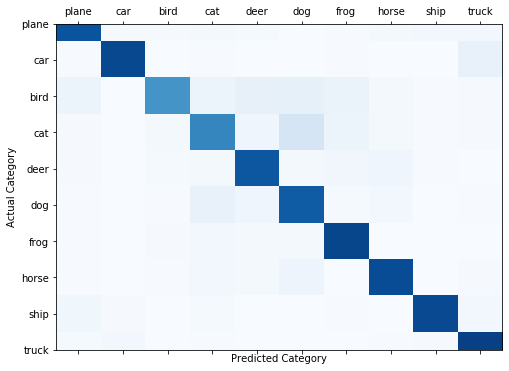

Category   - Accuracy
plane      - 86.3
car        - 90.3
bird       - 61.6
cat        - 67.1
deer       - 85.0
dog        - 83.1
frog       - 91.4
horse      - 89.0
ship       - 90.0
truck      - 93.4

Selected workers

[73 49 84  9 98 91 89 30 76 28 60 65 40 97 18]
Worker 73 : is  Honest
Worker 49 : is  Honest
Worker 84 : is  Honest
Worker 9 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 76 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 65 : is  Honest
Worker 40 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 18 : is  Stealthy_Attacker

 | Global Training Round : 65 |


Worker 73 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.091673
Train Epoch: 1 [400/500	(81%)]	Loss: 0.334647
Train Epoch: 2 [0/500	(1%)]	Loss: 0.090190
Train Epoch: 2 [400/500	(81%)]	Loss: 0.073485
Train Epoch: 3 [0/500	(1%)]	Loss: 0.052027
Train Epoch: 3 [400/500	(81%)]	Loss: 0.068378
Train Epoch: 4 [0/500	(1%)]	Loss: 0.099375
Train Epoch: 4 [400/500	(81%)]	Loss: 0.060353
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125454
Train Epoch: 5 [400/500	(81%)]	Loss: 0.041311

Worker 73 ends training in Global Round:65 |

Worker 49 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.220861
Train Epoch: 1 [400/500	(81%)]	Loss: 0.363149
Train Epoch: 2 [0/500	(1%)]	Loss: 0.199784
Train Epoch: 2 [400/500	(81%)]	Loss: 0.185734
Train Epoch: 3 [0/500	(1%)]	Loss: 0.123567
Train Epoch: 3 [400/500	(81%)]	Loss: 0.127250
Train Epoch: 4 [0/500	(1%)]	Loss: 0.049329
Train Epoch: 4 [400/500	(81%)]	Loss: 0.057275
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064856
Train Epoch: 5 [400/500	(81%)]	Loss: 0.169829

Worker 49 ends training in Global Round:65 |

Worker 84 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.614354
Train Epoch: 1 [400/500	(81%)]	Loss: 0.336048
Train Epoch: 2 [0/500	(1%)]	Loss: 0.234503
Train Epoch: 2 [400/500	(81%)]	Loss: 0.364378
Train Epoch: 3 [0/500	(1%)]	Loss: 0.191818
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260141
Train Epoch: 4 [0/500	(1%)]	Loss: 0.142609
Train Epoch: 4 [400/500	(81%)]	Loss: 0.300178
Train Epoch: 5 [0/500	(1%)]	Loss: 0.109499
Train Epoch: 5 [400/500	(81%)]	Loss: 0.091941

Worker 84 ends training in Global Round:65 |

Worker 9 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.286833
Train Epoch: 1 [400/500	(81%)]	Loss: 0.517884
Train Epoch: 2 [0/500	(1%)]	Loss: 0.195887
Train Epoch: 2 [400/500	(81%)]	Loss: 0.265222
Train Epoch: 3 [0/500	(1%)]	Loss: 0.247103
Train Epoch: 3 [400/500	(81%)]	Loss: 0.262411
Train Epoch: 4 [0/500	(1%)]	Loss: 0.128399
Train Epoch: 4 [400/500	(81%)]	Loss: 0.175095
Train Epoch: 5 [0/500	(1%)]	Loss: 0.178824
Train Epoch: 5 [400/500	(81%)]	Loss: 0.154399

Worker 9 ends training in Global Round:65 |

Worker 98 starts training in Global Round:65 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  65


Train Epoch: 1 [0/500	(1%)]	Loss: 1.383423
Train Epoch: 1 [400/500	(81%)]	Loss: 0.795482
Train Epoch: 2 [0/500	(1%)]	Loss: 0.555682
Train Epoch: 2 [400/500	(81%)]	Loss: 0.316174
Train Epoch: 3 [0/500	(1%)]	Loss: 0.342935
Train Epoch: 3 [400/500	(81%)]	Loss: 0.296100
Train Epoch: 4 [0/500	(1%)]	Loss: 0.263881
Train Epoch: 4 [400/500	(81%)]	Loss: 0.471300
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171555
Train Epoch: 5 [400/500	(81%)]	Loss: 0.237480

Performed attacks 1
Worker 98 ends training in Global Round:65 |

Worker 91 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.234933
Train Epoch: 1 [400/500	(81%)]	Loss: 0.229678
Train Epoch: 2 [0/500	(1%)]	Loss: 0.106131
Train Epoch: 2 [400/500	(81%)]	Loss: 0.170936
Train Epoch: 3 [0/500	(1%)]	Loss: 0.222010
Train Epoch: 3 [400/500	(81%)]	Loss: 0.156298
Train Epoch: 4 [0/500	(1%)]	Loss: 0.106587
Train Epoch: 4 [400/500	(81%)]	Loss: 0.098224
Train Epoch: 5 [0/500	(1%)]	Loss: 0.060246
Train Epoch: 5 [400/500	(81%)]	Loss: 0.050075

Worker 91 ends training in Global Round:65 |

Worker 89 starts training in Global Round:65 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  65


Train Epoch: 1 [0/500	(1%)]	Loss: 1.491214
Train Epoch: 1 [400/500	(81%)]	Loss: 0.565073
Train Epoch: 2 [0/500	(1%)]	Loss: 0.276622
Train Epoch: 2 [400/500	(81%)]	Loss: 0.283324
Train Epoch: 3 [0/500	(1%)]	Loss: 0.223613
Train Epoch: 3 [400/500	(81%)]	Loss: 0.382505
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187769
Train Epoch: 4 [400/500	(81%)]	Loss: 0.133238
Train Epoch: 5 [0/500	(1%)]	Loss: 0.163627
Train Epoch: 5 [400/500	(81%)]	Loss: 0.153859

Performed attacks 2
Worker 89 ends training in Global Round:65 |

Worker 30 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.280043
Train Epoch: 1 [400/500	(81%)]	Loss: 0.327827
Train Epoch: 2 [0/500	(1%)]	Loss: 0.215662
Train Epoch: 2 [400/500	(81%)]	Loss: 0.169929
Train Epoch: 3 [0/500	(1%)]	Loss: 0.129120
Train Epoch: 3 [400/500	(81%)]	Loss: 0.090475
Train Epoch: 4 [0/500	(1%)]	Loss: 0.162882
Train Epoch: 4 [400/500	(81%)]	Loss: 0.134810
Train Epoch: 5 [0/500	(1%)]	Loss: 0.146776
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253113

Worker 30 ends training in Global Round:65 |

Worker 76 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.240012
Train Epoch: 1 [400/500	(81%)]	Loss: 0.257905
Train Epoch: 2 [0/500	(1%)]	Loss: 0.069228
Train Epoch: 2 [400/500	(81%)]	Loss: 0.184036
Train Epoch: 3 [0/500	(1%)]	Loss: 0.096678
Train Epoch: 3 [400/500	(81%)]	Loss: 0.243290
Train Epoch: 4 [0/500	(1%)]	Loss: 0.039000
Train Epoch: 4 [400/500	(81%)]	Loss: 0.265795
Train Epoch: 5 [0/500	(1%)]	Loss: 0.072407
Train Epoch: 5 [400/500	(81%)]	Loss: 0.249074

Worker 76 ends training in Global Round:65 |

Worker 28 starts training in Global Round:65 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  65


Train Epoch: 1 [0/500	(1%)]	Loss: 1.139186
Train Epoch: 1 [400/500	(81%)]	Loss: 0.771209
Train Epoch: 2 [0/500	(1%)]	Loss: 0.260328
Train Epoch: 2 [400/500	(81%)]	Loss: 0.332152
Train Epoch: 3 [0/500	(1%)]	Loss: 0.273644
Train Epoch: 3 [400/500	(81%)]	Loss: 0.287373
Train Epoch: 4 [0/500	(1%)]	Loss: 0.224042
Train Epoch: 4 [400/500	(81%)]	Loss: 0.219744
Train Epoch: 5 [0/500	(1%)]	Loss: 0.140840
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135690

Performed attacks 3
Worker 28 ends training in Global Round:65 |

Worker 60 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.203926
Train Epoch: 1 [400/500	(81%)]	Loss: 0.593388
Train Epoch: 2 [0/500	(1%)]	Loss: 0.089538
Train Epoch: 2 [400/500	(81%)]	Loss: 0.097181
Train Epoch: 3 [0/500	(1%)]	Loss: 0.061553
Train Epoch: 3 [400/500	(81%)]	Loss: 0.206141
Train Epoch: 4 [0/500	(1%)]	Loss: 0.081895
Train Epoch: 4 [400/500	(81%)]	Loss: 0.219546
Train Epoch: 5 [0/500	(1%)]	Loss: 0.085378
Train Epoch: 5 [400/500	(81%)]	Loss: 0.137902

Worker 60 ends training in Global Round:65 |

Worker 65 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.392385
Train Epoch: 1 [400/500	(81%)]	Loss: 0.405991
Train Epoch: 2 [0/500	(1%)]	Loss: 0.122803
Train Epoch: 2 [400/500	(81%)]	Loss: 0.359695
Train Epoch: 3 [0/500	(1%)]	Loss: 0.200379
Train Epoch: 3 [400/500	(81%)]	Loss: 0.103936
Train Epoch: 4 [0/500	(1%)]	Loss: 0.125786
Train Epoch: 4 [400/500	(81%)]	Loss: 0.093868
Train Epoch: 5 [0/500	(1%)]	Loss: 0.041130
Train Epoch: 5 [400/500	(81%)]	Loss: 0.094013

Worker 65 ends training in Global Round:65 |

Worker 40 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.483861
Train Epoch: 1 [400/500	(81%)]	Loss: 0.590446
Train Epoch: 2 [0/500	(1%)]	Loss: 0.178774
Train Epoch: 2 [400/500	(81%)]	Loss: 0.229979
Train Epoch: 3 [0/500	(1%)]	Loss: 0.231662
Train Epoch: 3 [400/500	(81%)]	Loss: 0.312616
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164718
Train Epoch: 4 [400/500	(81%)]	Loss: 0.323146
Train Epoch: 5 [0/500	(1%)]	Loss: 0.167873
Train Epoch: 5 [400/500	(81%)]	Loss: 0.172465

Worker 40 ends training in Global Round:65 |

Worker 97 starts training in Global Round:65 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  65


Train Epoch: 1 [0/500	(1%)]	Loss: 1.598228
Train Epoch: 1 [400/500	(81%)]	Loss: 0.464943
Train Epoch: 2 [0/500	(1%)]	Loss: 0.297644
Train Epoch: 2 [400/500	(81%)]	Loss: 0.426107
Train Epoch: 3 [0/500	(1%)]	Loss: 0.197408
Train Epoch: 3 [400/500	(81%)]	Loss: 0.365483
Train Epoch: 4 [0/500	(1%)]	Loss: 0.241426
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182742
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203779
Train Epoch: 5 [400/500	(81%)]	Loss: 0.101632

Performed attacks 4
Worker 97 ends training in Global Round:65 |

Worker 18 starts training in Global Round:65 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  65


Train Epoch: 1 [0/500	(1%)]	Loss: 1.598991
Train Epoch: 1 [400/500	(81%)]	Loss: 0.569440
Train Epoch: 2 [0/500	(1%)]	Loss: 0.249700
Train Epoch: 2 [400/500	(81%)]	Loss: 0.452021
Train Epoch: 3 [0/500	(1%)]	Loss: 0.254667
Train Epoch: 3 [400/500	(81%)]	Loss: 0.246532
Train Epoch: 4 [0/500	(1%)]	Loss: 0.168233
Train Epoch: 4 [400/500	(81%)]	Loss: 0.246929
Train Epoch: 5 [0/500	(1%)]	Loss: 0.149925
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171130

Performed attacks 5
Worker 18 ends training in Global Round:65 |
Last layer biases  [array([ 0.03352717, -0.03183136, -0.0142537 ,  0.03830153,  0.04018541,
       -0.01540498,  0.03942899, -0.00951255, -0.02337659, -0.04116211],
      dtype=float32), array([ 0.03427584, -0.03237395, -0.01588479,  0.0362954 ,  0.03886171,
       -0.01571979,  0.03853302, -0.00631842, -0.02251883, -0.03924838],
      dtype=float32), array([ 0.03185553, -0.03279283, -0.0149751 ,  0.03831339,  0.04173549,
       -0.01670045,  0.03908007, -0.00813567, -0.02199649, -0.0

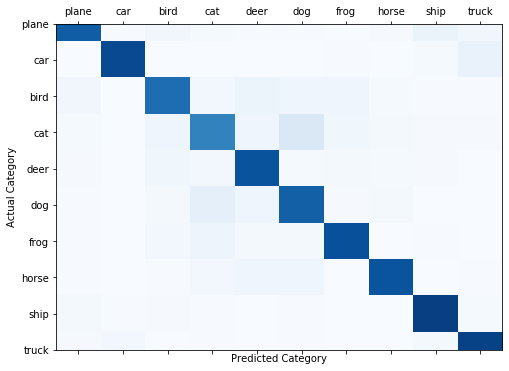

Category   - Accuracy
plane      - 82.8
car        - 90.2
bird       - 76.2
cat        - 68.0
deer       - 86.6
dog        - 81.4
frog       - 87.7
horse      - 86.0
ship       - 94.1
truck      - 92.7

Selected workers

[22 90 18 54 93 73  9 98 36  7 92 69 13 38 65]
Worker 22 : is  Stealthy_Attacker
Worker 90 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 93 : is  Honest
Worker 73 : is  Honest
Worker 9 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 7 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 69 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 65 : is  Honest

 | Global Training Round : 66 |


Worker 22 starts training in Global Round:66 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  66


Train Epoch: 1 [0/500	(1%)]	Loss: 1.128724
Train Epoch: 1 [400/500	(81%)]	Loss: 0.848834
Train Epoch: 2 [0/500	(1%)]	Loss: 0.291954
Train Epoch: 2 [400/500	(81%)]	Loss: 0.419096
Train Epoch: 3 [0/500	(1%)]	Loss: 0.252948
Train Epoch: 3 [400/500	(81%)]	Loss: 0.523455
Train Epoch: 4 [0/500	(1%)]	Loss: 0.231200
Train Epoch: 4 [400/500	(81%)]	Loss: 0.247962
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132415
Train Epoch: 5 [400/500	(81%)]	Loss: 0.249797

Performed attacks 1
Worker 22 ends training in Global Round:66 |

Worker 90 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.307812
Train Epoch: 1 [400/500	(81%)]	Loss: 0.537305
Train Epoch: 2 [0/500	(1%)]	Loss: 0.080802
Train Epoch: 2 [400/500	(81%)]	Loss: 0.304731
Train Epoch: 3 [0/500	(1%)]	Loss: 0.126482
Train Epoch: 3 [400/500	(81%)]	Loss: 0.300420
Train Epoch: 4 [0/500	(1%)]	Loss: 0.065282
Train Epoch: 4 [400/500	(81%)]	Loss: 0.148300
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132905
Train Epoch: 5 [400/500	(81%)]	Loss: 0.083667

Worker 90 ends training in Global Round:66 |

Worker 18 starts training in Global Round:66 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  66


Train Epoch: 1 [0/500	(1%)]	Loss: 1.062831
Train Epoch: 1 [400/500	(81%)]	Loss: 0.628583
Train Epoch: 2 [0/500	(1%)]	Loss: 0.343509
Train Epoch: 2 [400/500	(81%)]	Loss: 0.430386
Train Epoch: 3 [0/500	(1%)]	Loss: 0.287495
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260821
Train Epoch: 4 [0/500	(1%)]	Loss: 0.163507
Train Epoch: 4 [400/500	(81%)]	Loss: 0.245892
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182887
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171916

Performed attacks 2
Worker 18 ends training in Global Round:66 |

Worker 54 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.222795
Train Epoch: 1 [400/500	(81%)]	Loss: 0.226877
Train Epoch: 2 [0/500	(1%)]	Loss: 0.102844
Train Epoch: 2 [400/500	(81%)]	Loss: 0.187203
Train Epoch: 3 [0/500	(1%)]	Loss: 0.058449
Train Epoch: 3 [400/500	(81%)]	Loss: 0.111377
Train Epoch: 4 [0/500	(1%)]	Loss: 0.026181
Train Epoch: 4 [400/500	(81%)]	Loss: 0.226770
Train Epoch: 5 [0/500	(1%)]	Loss: 0.061838
Train Epoch: 5 [400/500	(81%)]	Loss: 0.179993

Worker 54 ends training in Global Round:66 |

Worker 93 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.233350
Train Epoch: 1 [400/500	(81%)]	Loss: 0.278023
Train Epoch: 2 [0/500	(1%)]	Loss: 0.193030
Train Epoch: 2 [400/500	(81%)]	Loss: 0.245637
Train Epoch: 3 [0/500	(1%)]	Loss: 0.195244
Train Epoch: 3 [400/500	(81%)]	Loss: 0.206442
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119637
Train Epoch: 4 [400/500	(81%)]	Loss: 0.117757
Train Epoch: 5 [0/500	(1%)]	Loss: 0.038265
Train Epoch: 5 [400/500	(81%)]	Loss: 0.141306

Worker 93 ends training in Global Round:66 |

Worker 73 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.132425
Train Epoch: 1 [400/500	(81%)]	Loss: 0.174889
Train Epoch: 2 [0/500	(1%)]	Loss: 0.077905
Train Epoch: 2 [400/500	(81%)]	Loss: 0.070191
Train Epoch: 3 [0/500	(1%)]	Loss: 0.045188
Train Epoch: 3 [400/500	(81%)]	Loss: 0.032100
Train Epoch: 4 [0/500	(1%)]	Loss: 0.022146
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182999
Train Epoch: 5 [0/500	(1%)]	Loss: 0.119228
Train Epoch: 5 [400/500	(81%)]	Loss: 0.085842

Worker 73 ends training in Global Round:66 |

Worker 9 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.220988
Train Epoch: 1 [400/500	(81%)]	Loss: 0.393804
Train Epoch: 2 [0/500	(1%)]	Loss: 0.174142
Train Epoch: 2 [400/500	(81%)]	Loss: 0.175132
Train Epoch: 3 [0/500	(1%)]	Loss: 0.226539
Train Epoch: 3 [400/500	(81%)]	Loss: 0.303920
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156453
Train Epoch: 4 [400/500	(81%)]	Loss: 0.180554
Train Epoch: 5 [0/500	(1%)]	Loss: 0.195572
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210914

Worker 9 ends training in Global Round:66 |

Worker 98 starts training in Global Round:66 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  66


Train Epoch: 1 [0/500	(1%)]	Loss: 1.357428
Train Epoch: 1 [400/500	(81%)]	Loss: 0.575165
Train Epoch: 2 [0/500	(1%)]	Loss: 0.439793
Train Epoch: 2 [400/500	(81%)]	Loss: 0.558243
Train Epoch: 3 [0/500	(1%)]	Loss: 0.224876
Train Epoch: 3 [400/500	(81%)]	Loss: 0.227132
Train Epoch: 4 [0/500	(1%)]	Loss: 0.416032
Train Epoch: 4 [400/500	(81%)]	Loss: 0.199551
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155113
Train Epoch: 5 [400/500	(81%)]	Loss: 0.340107

Performed attacks 3
Worker 98 ends training in Global Round:66 |

Worker 36 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.281449
Train Epoch: 1 [400/500	(81%)]	Loss: 0.428659
Train Epoch: 2 [0/500	(1%)]	Loss: 0.227391
Train Epoch: 2 [400/500	(81%)]	Loss: 0.186482
Train Epoch: 3 [0/500	(1%)]	Loss: 0.086527
Train Epoch: 3 [400/500	(81%)]	Loss: 0.159289
Train Epoch: 4 [0/500	(1%)]	Loss: 0.145952
Train Epoch: 4 [400/500	(81%)]	Loss: 0.118550
Train Epoch: 5 [0/500	(1%)]	Loss: 0.324763
Train Epoch: 5 [400/500	(81%)]	Loss: 0.273600

Worker 36 ends training in Global Round:66 |

Worker 7 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.347581
Train Epoch: 1 [400/500	(81%)]	Loss: 0.329989
Train Epoch: 2 [0/500	(1%)]	Loss: 0.189666
Train Epoch: 2 [400/500	(81%)]	Loss: 0.274718
Train Epoch: 3 [0/500	(1%)]	Loss: 0.141928
Train Epoch: 3 [400/500	(81%)]	Loss: 0.283351
Train Epoch: 4 [0/500	(1%)]	Loss: 0.147569
Train Epoch: 4 [400/500	(81%)]	Loss: 0.278448
Train Epoch: 5 [0/500	(1%)]	Loss: 0.173827
Train Epoch: 5 [400/500	(81%)]	Loss: 0.120643

Worker 7 ends training in Global Round:66 |

Worker 92 starts training in Global Round:66 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  66


Train Epoch: 1 [0/500	(1%)]	Loss: 1.229632
Train Epoch: 1 [400/500	(81%)]	Loss: 0.768387
Train Epoch: 2 [0/500	(1%)]	Loss: 0.449707
Train Epoch: 2 [400/500	(81%)]	Loss: 0.451668
Train Epoch: 3 [0/500	(1%)]	Loss: 0.215905
Train Epoch: 3 [400/500	(81%)]	Loss: 0.305118
Train Epoch: 4 [0/500	(1%)]	Loss: 0.250306
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213928
Train Epoch: 5 [0/500	(1%)]	Loss: 0.184323
Train Epoch: 5 [400/500	(81%)]	Loss: 0.207231

Performed attacks 4
Worker 92 ends training in Global Round:66 |

Worker 69 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.495435
Train Epoch: 1 [400/500	(81%)]	Loss: 0.522235
Train Epoch: 2 [0/500	(1%)]	Loss: 0.144375
Train Epoch: 2 [400/500	(81%)]	Loss: 0.204112
Train Epoch: 3 [0/500	(1%)]	Loss: 0.177668
Train Epoch: 3 [400/500	(81%)]	Loss: 0.135780
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152351
Train Epoch: 4 [400/500	(81%)]	Loss: 0.126752
Train Epoch: 5 [0/500	(1%)]	Loss: 0.153271
Train Epoch: 5 [400/500	(81%)]	Loss: 0.088411

Worker 69 ends training in Global Round:66 |

Worker 13 starts training in Global Round:66 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  66


Train Epoch: 1 [0/500	(1%)]	Loss: 0.840062
Train Epoch: 1 [400/500	(81%)]	Loss: 0.358270
Train Epoch: 2 [0/500	(1%)]	Loss: 0.260471
Train Epoch: 2 [400/500	(81%)]	Loss: 0.265204
Train Epoch: 3 [0/500	(1%)]	Loss: 0.214240
Train Epoch: 3 [400/500	(81%)]	Loss: 0.149468
Train Epoch: 4 [0/500	(1%)]	Loss: 0.086799
Train Epoch: 4 [400/500	(81%)]	Loss: 0.376174
Train Epoch: 5 [0/500	(1%)]	Loss: 0.139769
Train Epoch: 5 [400/500	(81%)]	Loss: 0.122207

Performed attacks 5
Worker 13 ends training in Global Round:66 |

Worker 38 starts training in Global Round:66 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  66


Train Epoch: 1 [0/500	(1%)]	Loss: 1.203054
Train Epoch: 1 [400/500	(81%)]	Loss: 0.472087
Train Epoch: 2 [0/500	(1%)]	Loss: 0.267625
Train Epoch: 2 [400/500	(81%)]	Loss: 0.341555
Train Epoch: 3 [0/500	(1%)]	Loss: 0.234821
Train Epoch: 3 [400/500	(81%)]	Loss: 0.245204
Train Epoch: 4 [0/500	(1%)]	Loss: 0.215141
Train Epoch: 4 [400/500	(81%)]	Loss: 0.296712
Train Epoch: 5 [0/500	(1%)]	Loss: 0.268404
Train Epoch: 5 [400/500	(81%)]	Loss: 0.231430

Performed attacks 6
Worker 38 ends training in Global Round:66 |

Worker 65 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.247115
Train Epoch: 1 [400/500	(81%)]	Loss: 0.182708
Train Epoch: 2 [0/500	(1%)]	Loss: 0.078552
Train Epoch: 2 [400/500	(81%)]	Loss: 0.227555
Train Epoch: 3 [0/500	(1%)]	Loss: 0.058436
Train Epoch: 3 [400/500	(81%)]	Loss: 0.222998
Train Epoch: 4 [0/500	(1%)]	Loss: 0.153961
Train Epoch: 4 [400/500	(81%)]	Loss: 0.065738
Train Epoch: 5 [0/500	(1%)]	Loss: 0.069704
Train Epoch: 5 [400/500	(81%)]	Loss: 0.103344

Worker 65 ends training in Global Round:66 |
Last layer biases  [array([ 0.03532612, -0.03122717, -0.00830146,  0.04081057,  0.04988633,
       -0.01541688,  0.03757066, -0.02986204, -0.02027817, -0.04260613],
      dtype=float32), array([ 0.03265324, -0.03183578, -0.01463914,  0.03921495,  0.03982786,
       -0.01578193,  0.03788928, -0.00822977, -0.02016082, -0.04303605],
      dtype=float32), array([ 0.03480409, -0.03321458, -0.01189103,  0.04004042,  0.05259655,
       -0.01144841,  0.03912119, -0.03137111, -0.0230982 , -0.03963706],
      dtyp

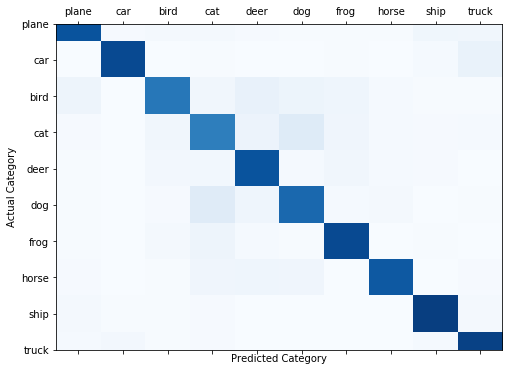

Category   - Accuracy
plane      - 86.5
car        - 90.0
bird       - 72.5
cat        - 69.6
deer       - 86.6
dog        - 78.3
frog       - 90.1
horse      - 84.2
ship       - 94.2
truck      - 93.3

Selected workers

[ 61  71  55  36  10  98  22  50  85  13 100  60  14  12  24]
Worker 61 : is  Honest
Worker 71 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 10 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 22 : is  Stealthy_Attacker
Worker 50 : is  Stealthy_Attacker
Worker 85 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 60 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 24 : is  Honest

 | Global Training Round : 67 |


Worker 61 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.285779
Train Epoch: 1 [400/500	(81%)]	Loss: 0.361927
Train Epoch: 2 [0/500	(1%)]	Loss: 0.166294
Train Epoch: 2 [400/500	(81%)]	Loss: 0.278973
Train Epoch: 3 [0/500	(1%)]	Loss: 0.074700
Train Epoch: 3 [400/500	(81%)]	Loss: 0.211104
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164703
Train Epoch: 4 [400/500	(81%)]	Loss: 0.185576
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155814
Train Epoch: 5 [400/500	(81%)]	Loss: 0.167720

Worker 61 ends training in Global Round:67 |

Worker 71 starts training in Global Round:67 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  67


Train Epoch: 1 [0/500	(1%)]	Loss: 1.525461
Train Epoch: 1 [400/500	(81%)]	Loss: 0.688362
Train Epoch: 2 [0/500	(1%)]	Loss: 0.293722
Train Epoch: 2 [400/500	(81%)]	Loss: 0.287778
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145517
Train Epoch: 3 [400/500	(81%)]	Loss: 0.396455
Train Epoch: 4 [0/500	(1%)]	Loss: 0.182096
Train Epoch: 4 [400/500	(81%)]	Loss: 0.189574
Train Epoch: 5 [0/500	(1%)]	Loss: 0.186967
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135304

Performed attacks 1
Worker 71 ends training in Global Round:67 |

Worker 55 starts training in Global Round:67 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  67


Train Epoch: 1 [0/500	(1%)]	Loss: 1.250819
Train Epoch: 1 [400/500	(81%)]	Loss: 0.562358
Train Epoch: 2 [0/500	(1%)]	Loss: 0.281622
Train Epoch: 2 [400/500	(81%)]	Loss: 0.637590
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261595
Train Epoch: 3 [400/500	(81%)]	Loss: 0.312043
Train Epoch: 4 [0/500	(1%)]	Loss: 0.229764
Train Epoch: 4 [400/500	(81%)]	Loss: 0.280619
Train Epoch: 5 [0/500	(1%)]	Loss: 0.162232
Train Epoch: 5 [400/500	(81%)]	Loss: 0.200328

Performed attacks 2
Worker 55 ends training in Global Round:67 |

Worker 36 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.220040
Train Epoch: 1 [400/500	(81%)]	Loss: 0.191244
Train Epoch: 2 [0/500	(1%)]	Loss: 0.128045
Train Epoch: 2 [400/500	(81%)]	Loss: 0.126026
Train Epoch: 3 [0/500	(1%)]	Loss: 0.082652
Train Epoch: 3 [400/500	(81%)]	Loss: 0.128824
Train Epoch: 4 [0/500	(1%)]	Loss: 0.109809
Train Epoch: 4 [400/500	(81%)]	Loss: 0.158590
Train Epoch: 5 [0/500	(1%)]	Loss: 0.142840
Train Epoch: 5 [400/500	(81%)]	Loss: 0.157921

Worker 36 ends training in Global Round:67 |

Worker 10 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.375462
Train Epoch: 1 [400/500	(81%)]	Loss: 0.430829
Train Epoch: 2 [0/500	(1%)]	Loss: 0.129998
Train Epoch: 2 [400/500	(81%)]	Loss: 0.251880
Train Epoch: 3 [0/500	(1%)]	Loss: 0.077840
Train Epoch: 3 [400/500	(81%)]	Loss: 0.253338
Train Epoch: 4 [0/500	(1%)]	Loss: 0.157488
Train Epoch: 4 [400/500	(81%)]	Loss: 0.211601
Train Epoch: 5 [0/500	(1%)]	Loss: 0.086771
Train Epoch: 5 [400/500	(81%)]	Loss: 0.059746

Worker 10 ends training in Global Round:67 |

Worker 98 starts training in Global Round:67 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  67


Train Epoch: 1 [0/500	(1%)]	Loss: 1.162717
Train Epoch: 1 [400/500	(81%)]	Loss: 0.705634
Train Epoch: 2 [0/500	(1%)]	Loss: 0.361036
Train Epoch: 2 [400/500	(81%)]	Loss: 0.417177
Train Epoch: 3 [0/500	(1%)]	Loss: 0.355735
Train Epoch: 3 [400/500	(81%)]	Loss: 0.347481
Train Epoch: 4 [0/500	(1%)]	Loss: 0.317633
Train Epoch: 4 [400/500	(81%)]	Loss: 0.249826
Train Epoch: 5 [0/500	(1%)]	Loss: 0.131381
Train Epoch: 5 [400/500	(81%)]	Loss: 0.257067

Performed attacks 3
Worker 98 ends training in Global Round:67 |

Worker 22 starts training in Global Round:67 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  67


Train Epoch: 1 [0/500	(1%)]	Loss: 1.075843
Train Epoch: 1 [400/500	(81%)]	Loss: 0.706313
Train Epoch: 2 [0/500	(1%)]	Loss: 0.346472
Train Epoch: 2 [400/500	(81%)]	Loss: 0.432371
Train Epoch: 3 [0/500	(1%)]	Loss: 0.208023
Train Epoch: 3 [400/500	(81%)]	Loss: 0.528181
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200837
Train Epoch: 4 [400/500	(81%)]	Loss: 0.194750
Train Epoch: 5 [0/500	(1%)]	Loss: 0.265968
Train Epoch: 5 [400/500	(81%)]	Loss: 0.238482

Performed attacks 4
Worker 22 ends training in Global Round:67 |

Worker 50 starts training in Global Round:67 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  67


Train Epoch: 1 [0/500	(1%)]	Loss: 0.992003
Train Epoch: 1 [400/500	(81%)]	Loss: 0.633370
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209241
Train Epoch: 2 [400/500	(81%)]	Loss: 0.414176
Train Epoch: 3 [0/500	(1%)]	Loss: 0.233271
Train Epoch: 3 [400/500	(81%)]	Loss: 0.374353
Train Epoch: 4 [0/500	(1%)]	Loss: 0.190459
Train Epoch: 4 [400/500	(81%)]	Loss: 0.199367
Train Epoch: 5 [0/500	(1%)]	Loss: 0.234718
Train Epoch: 5 [400/500	(81%)]	Loss: 0.217790

Performed attacks 5
Worker 50 ends training in Global Round:67 |

Worker 85 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.307677
Train Epoch: 1 [400/500	(81%)]	Loss: 0.617586
Train Epoch: 2 [0/500	(1%)]	Loss: 0.265827
Train Epoch: 2 [400/500	(81%)]	Loss: 0.324040
Train Epoch: 3 [0/500	(1%)]	Loss: 0.240963
Train Epoch: 3 [400/500	(81%)]	Loss: 0.209021
Train Epoch: 4 [0/500	(1%)]	Loss: 0.132362
Train Epoch: 4 [400/500	(81%)]	Loss: 0.217978
Train Epoch: 5 [0/500	(1%)]	Loss: 0.097636
Train Epoch: 5 [400/500	(81%)]	Loss: 0.090285

Worker 85 ends training in Global Round:67 |

Worker 13 starts training in Global Round:67 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  67


Train Epoch: 1 [0/500	(1%)]	Loss: 1.077977
Train Epoch: 1 [400/500	(81%)]	Loss: 0.564195
Train Epoch: 2 [0/500	(1%)]	Loss: 0.407173
Train Epoch: 2 [400/500	(81%)]	Loss: 0.450430
Train Epoch: 3 [0/500	(1%)]	Loss: 0.265072
Train Epoch: 3 [400/500	(81%)]	Loss: 0.248707
Train Epoch: 4 [0/500	(1%)]	Loss: 0.184981
Train Epoch: 4 [400/500	(81%)]	Loss: 0.373093
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081018
Train Epoch: 5 [400/500	(81%)]	Loss: 0.153484

Performed attacks 6
Worker 13 ends training in Global Round:67 |

Worker 100 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.262976
Train Epoch: 1 [400/500	(81%)]	Loss: 0.333519
Train Epoch: 2 [0/500	(1%)]	Loss: 0.071922
Train Epoch: 2 [400/500	(81%)]	Loss: 0.218049
Train Epoch: 3 [0/500	(1%)]	Loss: 0.110234
Train Epoch: 3 [400/500	(81%)]	Loss: 0.283518
Train Epoch: 4 [0/500	(1%)]	Loss: 0.061667
Train Epoch: 4 [400/500	(81%)]	Loss: 0.278032
Train Epoch: 5 [0/500	(1%)]	Loss: 0.047193
Train Epoch: 5 [400/500	(81%)]	Loss: 0.217153

Worker 100 ends training in Global Round:67 |

Worker 60 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.273065
Train Epoch: 1 [400/500	(81%)]	Loss: 0.098281
Train Epoch: 2 [0/500	(1%)]	Loss: 0.110464
Train Epoch: 2 [400/500	(81%)]	Loss: 0.143782
Train Epoch: 3 [0/500	(1%)]	Loss: 0.115951
Train Epoch: 3 [400/500	(81%)]	Loss: 0.229311
Train Epoch: 4 [0/500	(1%)]	Loss: 0.092860
Train Epoch: 4 [400/500	(81%)]	Loss: 0.199553
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128935
Train Epoch: 5 [400/500	(81%)]	Loss: 0.276329

Worker 60 ends training in Global Round:67 |

Worker 14 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.442882
Train Epoch: 1 [400/500	(81%)]	Loss: 0.515900
Train Epoch: 2 [0/500	(1%)]	Loss: 0.204410
Train Epoch: 2 [400/500	(81%)]	Loss: 0.326157
Train Epoch: 3 [0/500	(1%)]	Loss: 0.181634
Train Epoch: 3 [400/500	(81%)]	Loss: 0.211830
Train Epoch: 4 [0/500	(1%)]	Loss: 0.130404
Train Epoch: 4 [400/500	(81%)]	Loss: 0.203307
Train Epoch: 5 [0/500	(1%)]	Loss: 0.086699
Train Epoch: 5 [400/500	(81%)]	Loss: 0.222905

Worker 14 ends training in Global Round:67 |

Worker 12 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.343806
Train Epoch: 1 [400/500	(81%)]	Loss: 0.338903
Train Epoch: 2 [0/500	(1%)]	Loss: 0.197720
Train Epoch: 2 [400/500	(81%)]	Loss: 0.293776
Train Epoch: 3 [0/500	(1%)]	Loss: 0.104196
Train Epoch: 3 [400/500	(81%)]	Loss: 0.189249
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121365
Train Epoch: 4 [400/500	(81%)]	Loss: 0.231598
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110511
Train Epoch: 5 [400/500	(81%)]	Loss: 0.073950

Worker 12 ends training in Global Round:67 |

Worker 24 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.330690
Train Epoch: 1 [400/500	(81%)]	Loss: 0.138155
Train Epoch: 2 [0/500	(1%)]	Loss: 0.163593
Train Epoch: 2 [400/500	(81%)]	Loss: 0.125727
Train Epoch: 3 [0/500	(1%)]	Loss: 0.070767
Train Epoch: 3 [400/500	(81%)]	Loss: 0.111273
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143224
Train Epoch: 4 [400/500	(81%)]	Loss: 0.118028
Train Epoch: 5 [0/500	(1%)]	Loss: 0.080105
Train Epoch: 5 [400/500	(81%)]	Loss: 0.160337

Worker 24 ends training in Global Round:67 |
Last layer biases  [array([ 0.03434879, -0.03240662, -0.01239694,  0.03957872,  0.03860123,
       -0.01665114,  0.0395031 , -0.01070805, -0.02287677, -0.04109048],
      dtype=float32), array([ 0.03361128, -0.03242421, -0.01198009,  0.03594969,  0.05107792,
       -0.01376085,  0.04209005, -0.0300779 , -0.02100875, -0.03757529],
      dtype=float32), array([ 0.03679399, -0.03051999, -0.01439311,  0.04125207,  0.04863654,
       -0.01422286,  0.04021635, -0.02828716, -0.02212257, -0.04145141],
      dtyp

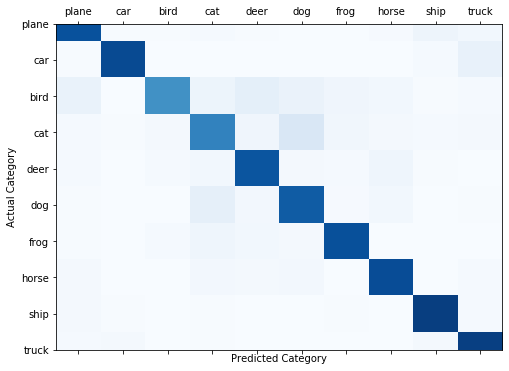

Category   - Accuracy
plane      - 87.3
car        - 89.5
bird       - 62.8
cat        - 68.2
deer       - 85.6
dog        - 82.9
frog       - 87.5
horse      - 88.8
ship       - 94.3
truck      - 93.9

Selected workers

[ 23  48  74  11  96  19  69  39 100  73   6  65  30  82  12]
Worker 23 : is  Stealthy_Attacker
Worker 48 : is  Honest
Worker 74 : is  Honest
Worker 11 : is  Honest
Worker 96 : is  Honest
Worker 19 : is  Stealthy_Attacker
Worker 69 : is  Honest
Worker 39 : is  Honest
Worker 100 : is  Honest
Worker 73 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 30 : is  Honest
Worker 82 : is  Honest
Worker 12 : is  Stealthy_Attacker

 | Global Training Round : 68 |


Worker 23 starts training in Global Round:68 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  68


Train Epoch: 1 [0/500	(1%)]	Loss: 0.906911
Train Epoch: 1 [400/500	(81%)]	Loss: 0.592646
Train Epoch: 2 [0/500	(1%)]	Loss: 0.242116
Train Epoch: 2 [400/500	(81%)]	Loss: 0.279970
Train Epoch: 3 [0/500	(1%)]	Loss: 0.373260
Train Epoch: 3 [400/500	(81%)]	Loss: 0.296270
Train Epoch: 4 [0/500	(1%)]	Loss: 0.155796
Train Epoch: 4 [400/500	(81%)]	Loss: 0.333688
Train Epoch: 5 [0/500	(1%)]	Loss: 0.234128
Train Epoch: 5 [400/500	(81%)]	Loss: 0.246838

Performed attacks 1
Worker 23 ends training in Global Round:68 |

Worker 48 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.244982
Train Epoch: 1 [400/500	(81%)]	Loss: 0.209454
Train Epoch: 2 [0/500	(1%)]	Loss: 0.156459
Train Epoch: 2 [400/500	(81%)]	Loss: 0.104901
Train Epoch: 3 [0/500	(1%)]	Loss: 0.120099
Train Epoch: 3 [400/500	(81%)]	Loss: 0.182515
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105389
Train Epoch: 4 [400/500	(81%)]	Loss: 0.093444
Train Epoch: 5 [0/500	(1%)]	Loss: 0.180891
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139012

Worker 48 ends training in Global Round:68 |

Worker 74 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.252142
Train Epoch: 1 [400/500	(81%)]	Loss: 0.371815
Train Epoch: 2 [0/500	(1%)]	Loss: 0.219455
Train Epoch: 2 [400/500	(81%)]	Loss: 0.159053
Train Epoch: 3 [0/500	(1%)]	Loss: 0.156047
Train Epoch: 3 [400/500	(81%)]	Loss: 0.105783
Train Epoch: 4 [0/500	(1%)]	Loss: 0.294645
Train Epoch: 4 [400/500	(81%)]	Loss: 0.200450
Train Epoch: 5 [0/500	(1%)]	Loss: 0.103364
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171470

Worker 74 ends training in Global Round:68 |

Worker 11 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.211985
Train Epoch: 1 [400/500	(81%)]	Loss: 0.450568
Train Epoch: 2 [0/500	(1%)]	Loss: 0.177977
Train Epoch: 2 [400/500	(81%)]	Loss: 0.215341
Train Epoch: 3 [0/500	(1%)]	Loss: 0.120828
Train Epoch: 3 [400/500	(81%)]	Loss: 0.197055
Train Epoch: 4 [0/500	(1%)]	Loss: 0.104101
Train Epoch: 4 [400/500	(81%)]	Loss: 0.151904
Train Epoch: 5 [0/500	(1%)]	Loss: 0.093660
Train Epoch: 5 [400/500	(81%)]	Loss: 0.098573

Worker 11 ends training in Global Round:68 |

Worker 96 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.274720
Train Epoch: 1 [400/500	(81%)]	Loss: 0.327963
Train Epoch: 2 [0/500	(1%)]	Loss: 0.105619
Train Epoch: 2 [400/500	(81%)]	Loss: 0.098634
Train Epoch: 3 [0/500	(1%)]	Loss: 0.121735
Train Epoch: 3 [400/500	(81%)]	Loss: 0.176329
Train Epoch: 4 [0/500	(1%)]	Loss: 0.074714
Train Epoch: 4 [400/500	(81%)]	Loss: 0.078451
Train Epoch: 5 [0/500	(1%)]	Loss: 0.090766
Train Epoch: 5 [400/500	(81%)]	Loss: 0.047074

Worker 96 ends training in Global Round:68 |

Worker 19 starts training in Global Round:68 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  68


Train Epoch: 1 [0/500	(1%)]	Loss: 1.323260
Train Epoch: 1 [400/500	(81%)]	Loss: 0.416153
Train Epoch: 2 [0/500	(1%)]	Loss: 0.201618
Train Epoch: 2 [400/500	(81%)]	Loss: 0.454922
Train Epoch: 3 [0/500	(1%)]	Loss: 0.174611
Train Epoch: 3 [400/500	(81%)]	Loss: 0.269655
Train Epoch: 4 [0/500	(1%)]	Loss: 0.214633
Train Epoch: 4 [400/500	(81%)]	Loss: 0.241100
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128725
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139205

Performed attacks 2
Worker 19 ends training in Global Round:68 |

Worker 69 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.265250
Train Epoch: 1 [400/500	(81%)]	Loss: 0.230057
Train Epoch: 2 [0/500	(1%)]	Loss: 0.146883
Train Epoch: 2 [400/500	(81%)]	Loss: 0.119705
Train Epoch: 3 [0/500	(1%)]	Loss: 0.125439
Train Epoch: 3 [400/500	(81%)]	Loss: 0.344486
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119767
Train Epoch: 4 [400/500	(81%)]	Loss: 0.270139
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157943
Train Epoch: 5 [400/500	(81%)]	Loss: 0.152974

Worker 69 ends training in Global Round:68 |

Worker 39 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.367693
Train Epoch: 1 [400/500	(81%)]	Loss: 0.472759
Train Epoch: 2 [0/500	(1%)]	Loss: 0.208727
Train Epoch: 2 [400/500	(81%)]	Loss: 0.237468
Train Epoch: 3 [0/500	(1%)]	Loss: 0.081656
Train Epoch: 3 [400/500	(81%)]	Loss: 0.190647
Train Epoch: 4 [0/500	(1%)]	Loss: 0.127762
Train Epoch: 4 [400/500	(81%)]	Loss: 0.119871
Train Epoch: 5 [0/500	(1%)]	Loss: 0.050181
Train Epoch: 5 [400/500	(81%)]	Loss: 0.206417

Worker 39 ends training in Global Round:68 |

Worker 100 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.260656
Train Epoch: 1 [400/500	(81%)]	Loss: 0.149963
Train Epoch: 2 [0/500	(1%)]	Loss: 0.094194
Train Epoch: 2 [400/500	(81%)]	Loss: 0.047181
Train Epoch: 3 [0/500	(1%)]	Loss: 0.037633
Train Epoch: 3 [400/500	(81%)]	Loss: 0.053257
Train Epoch: 4 [0/500	(1%)]	Loss: 0.050215
Train Epoch: 4 [400/500	(81%)]	Loss: 0.143400
Train Epoch: 5 [0/500	(1%)]	Loss: 0.021359
Train Epoch: 5 [400/500	(81%)]	Loss: 0.040225

Worker 100 ends training in Global Round:68 |

Worker 73 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.238113
Train Epoch: 1 [400/500	(81%)]	Loss: 0.222828
Train Epoch: 2 [0/500	(1%)]	Loss: 0.088779
Train Epoch: 2 [400/500	(81%)]	Loss: 0.225001
Train Epoch: 3 [0/500	(1%)]	Loss: 0.061223
Train Epoch: 3 [400/500	(81%)]	Loss: 0.070783
Train Epoch: 4 [0/500	(1%)]	Loss: 0.048071
Train Epoch: 4 [400/500	(81%)]	Loss: 0.123310
Train Epoch: 5 [0/500	(1%)]	Loss: 0.045548
Train Epoch: 5 [400/500	(81%)]	Loss: 0.067082

Worker 73 ends training in Global Round:68 |

Worker 6 starts training in Global Round:68 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  68


Train Epoch: 1 [0/500	(1%)]	Loss: 1.418853
Train Epoch: 1 [400/500	(81%)]	Loss: 0.430477
Train Epoch: 2 [0/500	(1%)]	Loss: 0.223561
Train Epoch: 2 [400/500	(81%)]	Loss: 0.500176
Train Epoch: 3 [0/500	(1%)]	Loss: 0.135353
Train Epoch: 3 [400/500	(81%)]	Loss: 0.294740
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156325
Train Epoch: 4 [400/500	(81%)]	Loss: 0.254591
Train Epoch: 5 [0/500	(1%)]	Loss: 0.116585
Train Epoch: 5 [400/500	(81%)]	Loss: 0.166054

Performed attacks 3
Worker 6 ends training in Global Round:68 |

Worker 65 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.191433
Train Epoch: 1 [400/500	(81%)]	Loss: 0.191819
Train Epoch: 2 [0/500	(1%)]	Loss: 0.158058
Train Epoch: 2 [400/500	(81%)]	Loss: 0.238821
Train Epoch: 3 [0/500	(1%)]	Loss: 0.122399
Train Epoch: 3 [400/500	(81%)]	Loss: 0.053464
Train Epoch: 4 [0/500	(1%)]	Loss: 0.090940
Train Epoch: 4 [400/500	(81%)]	Loss: 0.064868
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082524
Train Epoch: 5 [400/500	(81%)]	Loss: 0.067358

Worker 65 ends training in Global Round:68 |

Worker 30 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.223814
Train Epoch: 1 [400/500	(81%)]	Loss: 0.192588
Train Epoch: 2 [0/500	(1%)]	Loss: 0.204825
Train Epoch: 2 [400/500	(81%)]	Loss: 0.187919
Train Epoch: 3 [0/500	(1%)]	Loss: 0.082439
Train Epoch: 3 [400/500	(81%)]	Loss: 0.142633
Train Epoch: 4 [0/500	(1%)]	Loss: 0.068683
Train Epoch: 4 [400/500	(81%)]	Loss: 0.121527
Train Epoch: 5 [0/500	(1%)]	Loss: 0.181559
Train Epoch: 5 [400/500	(81%)]	Loss: 0.134261

Worker 30 ends training in Global Round:68 |

Worker 82 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.321634
Train Epoch: 1 [400/500	(81%)]	Loss: 0.460401
Train Epoch: 2 [0/500	(1%)]	Loss: 0.264198
Train Epoch: 2 [400/500	(81%)]	Loss: 0.378183
Train Epoch: 3 [0/500	(1%)]	Loss: 0.107345
Train Epoch: 3 [400/500	(81%)]	Loss: 0.235020
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140321
Train Epoch: 4 [400/500	(81%)]	Loss: 0.143758
Train Epoch: 5 [0/500	(1%)]	Loss: 0.096016
Train Epoch: 5 [400/500	(81%)]	Loss: 0.231985

Worker 82 ends training in Global Round:68 |

Worker 12 starts training in Global Round:68 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  68


Train Epoch: 1 [0/500	(1%)]	Loss: 1.163645
Train Epoch: 1 [400/500	(81%)]	Loss: 0.255675
Train Epoch: 2 [0/500	(1%)]	Loss: 0.223548
Train Epoch: 2 [400/500	(81%)]	Loss: 0.304549
Train Epoch: 3 [0/500	(1%)]	Loss: 0.125404
Train Epoch: 3 [400/500	(81%)]	Loss: 0.300853
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164391
Train Epoch: 4 [400/500	(81%)]	Loss: 0.297341
Train Epoch: 5 [0/500	(1%)]	Loss: 0.070445
Train Epoch: 5 [400/500	(81%)]	Loss: 0.186713

Performed attacks 4
Worker 12 ends training in Global Round:68 |
Last layer biases  [array([ 0.03561707, -0.03049519, -0.01164282,  0.0397919 ,  0.05278748,
       -0.01344999,  0.03985196, -0.03310653, -0.0212346 , -0.04221739],
      dtype=float32), array([ 0.0355464 , -0.03274737, -0.01211107,  0.03676821,  0.03976008,
       -0.01613036,  0.0391437 , -0.00949977, -0.02228514, -0.04254282],
      dtype=float32), array([ 0.03478841, -0.03084065, -0.01311017,  0.03685249,  0.0377314 ,
       -0.01415075,  0.03883223, -0.00973877, -0.02238183, -0.0

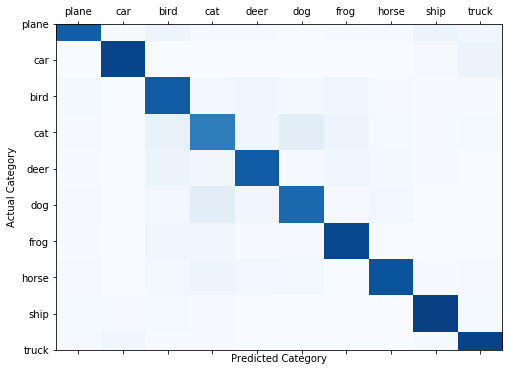

Category   - Accuracy
plane      - 81.8
car        - 92.1
bird       - 83.0
cat        - 70.0
deer       - 82.5
dog        - 78.4
frog       - 90.4
horse      - 86.1
ship       - 93.7
truck      - 92.5

Selected workers

[88 65 27 39 57 43 40 21 60  8 13 94 32 56 98]
Worker 88 : is  Honest
Worker 65 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 39 : is  Honest
Worker 57 : is  Honest
Worker 43 : is  Honest
Worker 40 : is  Honest
Worker 21 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 8 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 56 : is  Honest
Worker 98 : is  Stealthy_Attacker

 | Global Training Round : 69 |


Worker 88 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.396641
Train Epoch: 1 [400/500	(81%)]	Loss: 0.522193
Train Epoch: 2 [0/500	(1%)]	Loss: 0.353789
Train Epoch: 2 [400/500	(81%)]	Loss: 0.343541
Train Epoch: 3 [0/500	(1%)]	Loss: 0.291919
Train Epoch: 3 [400/500	(81%)]	Loss: 0.220871
Train Epoch: 4 [0/500	(1%)]	Loss: 0.178970
Train Epoch: 4 [400/500	(81%)]	Loss: 0.274348
Train Epoch: 5 [0/500	(1%)]	Loss: 0.165700
Train Epoch: 5 [400/500	(81%)]	Loss: 0.300342

Worker 88 ends training in Global Round:69 |

Worker 65 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.174142
Train Epoch: 1 [400/500	(81%)]	Loss: 0.173102
Train Epoch: 2 [0/500	(1%)]	Loss: 0.142477
Train Epoch: 2 [400/500	(81%)]	Loss: 0.169257
Train Epoch: 3 [0/500	(1%)]	Loss: 0.061241
Train Epoch: 3 [400/500	(81%)]	Loss: 0.134413
Train Epoch: 4 [0/500	(1%)]	Loss: 0.038752
Train Epoch: 4 [400/500	(81%)]	Loss: 0.138630
Train Epoch: 5 [0/500	(1%)]	Loss: 0.079773
Train Epoch: 5 [400/500	(81%)]	Loss: 0.049071

Worker 65 ends training in Global Round:69 |

Worker 27 starts training in Global Round:69 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  69


Train Epoch: 1 [0/500	(1%)]	Loss: 1.264763
Train Epoch: 1 [400/500	(81%)]	Loss: 0.527614
Train Epoch: 2 [0/500	(1%)]	Loss: 0.299451
Train Epoch: 2 [400/500	(81%)]	Loss: 0.244432
Train Epoch: 3 [0/500	(1%)]	Loss: 0.276950
Train Epoch: 3 [400/500	(81%)]	Loss: 0.322220
Train Epoch: 4 [0/500	(1%)]	Loss: 0.155708
Train Epoch: 4 [400/500	(81%)]	Loss: 0.307603
Train Epoch: 5 [0/500	(1%)]	Loss: 0.295856
Train Epoch: 5 [400/500	(81%)]	Loss: 0.247806

Performed attacks 1
Worker 27 ends training in Global Round:69 |

Worker 39 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.269351
Train Epoch: 1 [400/500	(81%)]	Loss: 0.302671
Train Epoch: 2 [0/500	(1%)]	Loss: 0.074806
Train Epoch: 2 [400/500	(81%)]	Loss: 0.137200
Train Epoch: 3 [0/500	(1%)]	Loss: 0.137379
Train Epoch: 3 [400/500	(81%)]	Loss: 0.235151
Train Epoch: 4 [0/500	(1%)]	Loss: 0.080910
Train Epoch: 4 [400/500	(81%)]	Loss: 0.119019
Train Epoch: 5 [0/500	(1%)]	Loss: 0.086453
Train Epoch: 5 [400/500	(81%)]	Loss: 0.118121

Worker 39 ends training in Global Round:69 |

Worker 57 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.216510
Train Epoch: 1 [400/500	(81%)]	Loss: 0.134078
Train Epoch: 2 [0/500	(1%)]	Loss: 0.040601
Train Epoch: 2 [400/500	(81%)]	Loss: 0.160439
Train Epoch: 3 [0/500	(1%)]	Loss: 0.113164
Train Epoch: 3 [400/500	(81%)]	Loss: 0.209501
Train Epoch: 4 [0/500	(1%)]	Loss: 0.099331
Train Epoch: 4 [400/500	(81%)]	Loss: 0.070577
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148963
Train Epoch: 5 [400/500	(81%)]	Loss: 0.076057

Worker 57 ends training in Global Round:69 |

Worker 43 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.288070
Train Epoch: 1 [400/500	(81%)]	Loss: 0.237216
Train Epoch: 2 [0/500	(1%)]	Loss: 0.077666
Train Epoch: 2 [400/500	(81%)]	Loss: 0.254440
Train Epoch: 3 [0/500	(1%)]	Loss: 0.071599
Train Epoch: 3 [400/500	(81%)]	Loss: 0.280016
Train Epoch: 4 [0/500	(1%)]	Loss: 0.212736
Train Epoch: 4 [400/500	(81%)]	Loss: 0.223108
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132336
Train Epoch: 5 [400/500	(81%)]	Loss: 0.335871

Worker 43 ends training in Global Round:69 |

Worker 40 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.441646
Train Epoch: 1 [400/500	(81%)]	Loss: 0.474872
Train Epoch: 2 [0/500	(1%)]	Loss: 0.236020
Train Epoch: 2 [400/500	(81%)]	Loss: 0.495927
Train Epoch: 3 [0/500	(1%)]	Loss: 0.333780
Train Epoch: 3 [400/500	(81%)]	Loss: 0.292803
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140414
Train Epoch: 4 [400/500	(81%)]	Loss: 0.219947
Train Epoch: 5 [0/500	(1%)]	Loss: 0.253657
Train Epoch: 5 [400/500	(81%)]	Loss: 0.275538

Worker 40 ends training in Global Round:69 |

Worker 21 starts training in Global Round:69 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  69


Train Epoch: 1 [0/500	(1%)]	Loss: 1.512465
Train Epoch: 1 [400/500	(81%)]	Loss: 0.498908
Train Epoch: 2 [0/500	(1%)]	Loss: 0.237744
Train Epoch: 2 [400/500	(81%)]	Loss: 0.469534
Train Epoch: 3 [0/500	(1%)]	Loss: 0.217306
Train Epoch: 3 [400/500	(81%)]	Loss: 0.330133
Train Epoch: 4 [0/500	(1%)]	Loss: 0.186530
Train Epoch: 4 [400/500	(81%)]	Loss: 0.227519
Train Epoch: 5 [0/500	(1%)]	Loss: 0.131610
Train Epoch: 5 [400/500	(81%)]	Loss: 0.202020

Performed attacks 2
Worker 21 ends training in Global Round:69 |

Worker 60 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.233847
Train Epoch: 1 [400/500	(81%)]	Loss: 0.178205
Train Epoch: 2 [0/500	(1%)]	Loss: 0.074701
Train Epoch: 2 [400/500	(81%)]	Loss: 0.206470
Train Epoch: 3 [0/500	(1%)]	Loss: 0.071939
Train Epoch: 3 [400/500	(81%)]	Loss: 0.199791
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105248
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182191
Train Epoch: 5 [0/500	(1%)]	Loss: 0.091835
Train Epoch: 5 [400/500	(81%)]	Loss: 0.075462

Worker 60 ends training in Global Round:69 |

Worker 8 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.443711
Train Epoch: 1 [400/500	(81%)]	Loss: 0.502708
Train Epoch: 2 [0/500	(1%)]	Loss: 0.154127
Train Epoch: 2 [400/500	(81%)]	Loss: 0.367088
Train Epoch: 3 [0/500	(1%)]	Loss: 0.103325
Train Epoch: 3 [400/500	(81%)]	Loss: 0.324075
Train Epoch: 4 [0/500	(1%)]	Loss: 0.131292
Train Epoch: 4 [400/500	(81%)]	Loss: 0.229044
Train Epoch: 5 [0/500	(1%)]	Loss: 0.072342
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199802

Worker 8 ends training in Global Round:69 |

Worker 13 starts training in Global Round:69 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  69


Train Epoch: 1 [0/500	(1%)]	Loss: 1.110408
Train Epoch: 1 [400/500	(81%)]	Loss: 0.638157
Train Epoch: 2 [0/500	(1%)]	Loss: 0.344272
Train Epoch: 2 [400/500	(81%)]	Loss: 0.222018
Train Epoch: 3 [0/500	(1%)]	Loss: 0.245691
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260382
Train Epoch: 4 [0/500	(1%)]	Loss: 0.230732
Train Epoch: 4 [400/500	(81%)]	Loss: 0.248728
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127166
Train Epoch: 5 [400/500	(81%)]	Loss: 0.256692

Performed attacks 3
Worker 13 ends training in Global Round:69 |

Worker 94 starts training in Global Round:69 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  69


Train Epoch: 1 [0/500	(1%)]	Loss: 1.125869
Train Epoch: 1 [400/500	(81%)]	Loss: 0.603236
Train Epoch: 2 [0/500	(1%)]	Loss: 0.168296
Train Epoch: 2 [400/500	(81%)]	Loss: 0.337696
Train Epoch: 3 [0/500	(1%)]	Loss: 0.234862
Train Epoch: 3 [400/500	(81%)]	Loss: 0.287995
Train Epoch: 4 [0/500	(1%)]	Loss: 0.239250
Train Epoch: 4 [400/500	(81%)]	Loss: 0.282555
Train Epoch: 5 [0/500	(1%)]	Loss: 0.220954
Train Epoch: 5 [400/500	(81%)]	Loss: 0.122732

Performed attacks 4
Worker 94 ends training in Global Round:69 |

Worker 32 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.357877
Train Epoch: 1 [400/500	(81%)]	Loss: 0.719009
Train Epoch: 2 [0/500	(1%)]	Loss: 0.184428
Train Epoch: 2 [400/500	(81%)]	Loss: 0.224372
Train Epoch: 3 [0/500	(1%)]	Loss: 0.167139
Train Epoch: 3 [400/500	(81%)]	Loss: 0.366815
Train Epoch: 4 [0/500	(1%)]	Loss: 0.103826
Train Epoch: 4 [400/500	(81%)]	Loss: 0.162249
Train Epoch: 5 [0/500	(1%)]	Loss: 0.057367
Train Epoch: 5 [400/500	(81%)]	Loss: 0.161945

Worker 32 ends training in Global Round:69 |

Worker 56 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.130181
Train Epoch: 1 [400/500	(81%)]	Loss: 0.334324
Train Epoch: 2 [0/500	(1%)]	Loss: 0.140861
Train Epoch: 2 [400/500	(81%)]	Loss: 0.327785
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151693
Train Epoch: 3 [400/500	(81%)]	Loss: 0.333223
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105550
Train Epoch: 4 [400/500	(81%)]	Loss: 0.247781
Train Epoch: 5 [0/500	(1%)]	Loss: 0.179126
Train Epoch: 5 [400/500	(81%)]	Loss: 0.150310

Worker 56 ends training in Global Round:69 |

Worker 98 starts training in Global Round:69 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  69


Train Epoch: 1 [0/500	(1%)]	Loss: 1.140519
Train Epoch: 1 [400/500	(81%)]	Loss: 0.698377
Train Epoch: 2 [0/500	(1%)]	Loss: 0.381449
Train Epoch: 2 [400/500	(81%)]	Loss: 0.619734
Train Epoch: 3 [0/500	(1%)]	Loss: 0.326186
Train Epoch: 3 [400/500	(81%)]	Loss: 0.425186
Train Epoch: 4 [0/500	(1%)]	Loss: 0.221575
Train Epoch: 4 [400/500	(81%)]	Loss: 0.409292
Train Epoch: 5 [0/500	(1%)]	Loss: 0.159495
Train Epoch: 5 [400/500	(81%)]	Loss: 0.099853

Performed attacks 5
Worker 98 ends training in Global Round:69 |
Last layer biases  [array([ 0.03406002, -0.03249701, -0.01458046,  0.03811607,  0.03949181,
       -0.0150452 ,  0.04005957, -0.01161773, -0.02255017, -0.03953506],
      dtype=float32), array([ 0.03437047, -0.03241385, -0.0145494 ,  0.03661658,  0.03875418,
       -0.01495326,  0.03995975, -0.00770516, -0.0226474 , -0.04153011],
      dtype=float32), array([ 0.0368432 , -0.03364144, -0.01129028,  0.03719148,  0.04922452,
       -0.01305544,  0.04171401, -0.02889495, -0.02057813, -0.0

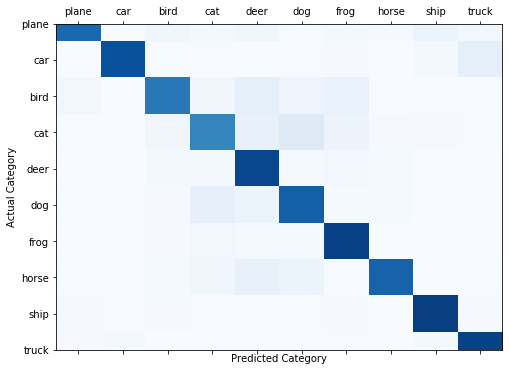

Category   - Accuracy
plane      - 78.0
car        - 87.1
bird       - 71.9
cat        - 67.1
deer       - 90.9
dog        - 81.3
frog       - 93.3
horse      - 80.4
ship       - 94.1
truck      - 92.7

Selected workers

[95 67 78 16 98 88 24 83 80 13 58 57 84  4 34]
Worker 95 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 78 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 88 : is  Honest
Worker 24 : is  Honest
Worker 83 : is  Honest
Worker 80 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 58 : is  Honest
Worker 57 : is  Honest
Worker 84 : is  Honest
Worker 4 : is  Honest
Worker 34 : is  Stealthy_Attacker

 | Global Training Round : 70 |


Worker 95 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.276606
Train Epoch: 1 [400/500	(81%)]	Loss: 0.367401
Train Epoch: 2 [0/500	(1%)]	Loss: 0.134419
Train Epoch: 2 [400/500	(81%)]	Loss: 0.295804
Train Epoch: 3 [0/500	(1%)]	Loss: 0.108165
Train Epoch: 3 [400/500	(81%)]	Loss: 0.149170
Train Epoch: 4 [0/500	(1%)]	Loss: 0.082707
Train Epoch: 4 [400/500	(81%)]	Loss: 0.114499
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170346
Train Epoch: 5 [400/500	(81%)]	Loss: 0.163900

Worker 95 ends training in Global Round:70 |

Worker 67 starts training in Global Round:70 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  70


Train Epoch: 1 [0/500	(1%)]	Loss: 1.112796
Train Epoch: 1 [400/500	(81%)]	Loss: 0.562767
Train Epoch: 2 [0/500	(1%)]	Loss: 0.172900
Train Epoch: 2 [400/500	(81%)]	Loss: 0.468345
Train Epoch: 3 [0/500	(1%)]	Loss: 0.226580
Train Epoch: 3 [400/500	(81%)]	Loss: 0.346720
Train Epoch: 4 [0/500	(1%)]	Loss: 0.243804
Train Epoch: 4 [400/500	(81%)]	Loss: 0.434457
Train Epoch: 5 [0/500	(1%)]	Loss: 0.169212
Train Epoch: 5 [400/500	(81%)]	Loss: 0.303457

Performed attacks 1
Worker 67 ends training in Global Round:70 |

Worker 78 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.212952
Train Epoch: 1 [400/500	(81%)]	Loss: 0.244358
Train Epoch: 2 [0/500	(1%)]	Loss: 0.131382
Train Epoch: 2 [400/500	(81%)]	Loss: 0.249891
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127379
Train Epoch: 3 [400/500	(81%)]	Loss: 0.115734
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105225
Train Epoch: 4 [400/500	(81%)]	Loss: 0.110825
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155810
Train Epoch: 5 [400/500	(81%)]	Loss: 0.164063

Worker 78 ends training in Global Round:70 |

Worker 16 starts training in Global Round:70 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  70


Train Epoch: 1 [0/500	(1%)]	Loss: 1.257085
Train Epoch: 1 [400/500	(81%)]	Loss: 0.598583
Train Epoch: 2 [0/500	(1%)]	Loss: 0.360747
Train Epoch: 2 [400/500	(81%)]	Loss: 0.446495
Train Epoch: 3 [0/500	(1%)]	Loss: 0.458248
Train Epoch: 3 [400/500	(81%)]	Loss: 0.460704
Train Epoch: 4 [0/500	(1%)]	Loss: 0.309585
Train Epoch: 4 [400/500	(81%)]	Loss: 0.272268
Train Epoch: 5 [0/500	(1%)]	Loss: 0.166153
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232574

Performed attacks 2
Worker 16 ends training in Global Round:70 |

Worker 98 starts training in Global Round:70 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  70


Train Epoch: 1 [0/500	(1%)]	Loss: 1.482582
Train Epoch: 1 [400/500	(81%)]	Loss: 0.665466
Train Epoch: 2 [0/500	(1%)]	Loss: 0.248663
Train Epoch: 2 [400/500	(81%)]	Loss: 0.522471
Train Epoch: 3 [0/500	(1%)]	Loss: 0.274768
Train Epoch: 3 [400/500	(81%)]	Loss: 0.344645
Train Epoch: 4 [0/500	(1%)]	Loss: 0.132585
Train Epoch: 4 [400/500	(81%)]	Loss: 0.346218
Train Epoch: 5 [0/500	(1%)]	Loss: 0.202143
Train Epoch: 5 [400/500	(81%)]	Loss: 0.227575

Performed attacks 3
Worker 98 ends training in Global Round:70 |

Worker 88 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.210515
Train Epoch: 1 [400/500	(81%)]	Loss: 0.369303
Train Epoch: 2 [0/500	(1%)]	Loss: 0.189231
Train Epoch: 2 [400/500	(81%)]	Loss: 0.244192
Train Epoch: 3 [0/500	(1%)]	Loss: 0.124872
Train Epoch: 3 [400/500	(81%)]	Loss: 0.191504
Train Epoch: 4 [0/500	(1%)]	Loss: 0.058953
Train Epoch: 4 [400/500	(81%)]	Loss: 0.124428
Train Epoch: 5 [0/500	(1%)]	Loss: 0.028534
Train Epoch: 5 [400/500	(81%)]	Loss: 0.193781

Worker 88 ends training in Global Round:70 |

Worker 24 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.166774
Train Epoch: 1 [400/500	(81%)]	Loss: 0.229608
Train Epoch: 2 [0/500	(1%)]	Loss: 0.066736
Train Epoch: 2 [400/500	(81%)]	Loss: 0.155460
Train Epoch: 3 [0/500	(1%)]	Loss: 0.114774
Train Epoch: 3 [400/500	(81%)]	Loss: 0.138859
Train Epoch: 4 [0/500	(1%)]	Loss: 0.071557
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192207
Train Epoch: 5 [0/500	(1%)]	Loss: 0.093962
Train Epoch: 5 [400/500	(81%)]	Loss: 0.109806

Worker 24 ends training in Global Round:70 |

Worker 83 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.312158
Train Epoch: 1 [400/500	(81%)]	Loss: 0.356059
Train Epoch: 2 [0/500	(1%)]	Loss: 0.205879
Train Epoch: 2 [400/500	(81%)]	Loss: 0.423607
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136155
Train Epoch: 3 [400/500	(81%)]	Loss: 0.212073
Train Epoch: 4 [0/500	(1%)]	Loss: 0.089770
Train Epoch: 4 [400/500	(81%)]	Loss: 0.284382
Train Epoch: 5 [0/500	(1%)]	Loss: 0.151192
Train Epoch: 5 [400/500	(81%)]	Loss: 0.159413

Worker 83 ends training in Global Round:70 |

Worker 80 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.226159
Train Epoch: 1 [400/500	(81%)]	Loss: 0.222055
Train Epoch: 2 [0/500	(1%)]	Loss: 0.070733
Train Epoch: 2 [400/500	(81%)]	Loss: 0.182700
Train Epoch: 3 [0/500	(1%)]	Loss: 0.122716
Train Epoch: 3 [400/500	(81%)]	Loss: 0.089074
Train Epoch: 4 [0/500	(1%)]	Loss: 0.039174
Train Epoch: 4 [400/500	(81%)]	Loss: 0.198872
Train Epoch: 5 [0/500	(1%)]	Loss: 0.079262
Train Epoch: 5 [400/500	(81%)]	Loss: 0.175524

Worker 80 ends training in Global Round:70 |

Worker 13 starts training in Global Round:70 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  70


Train Epoch: 1 [0/500	(1%)]	Loss: 1.134592
Train Epoch: 1 [400/500	(81%)]	Loss: 0.492744
Train Epoch: 2 [0/500	(1%)]	Loss: 0.399715
Train Epoch: 2 [400/500	(81%)]	Loss: 0.262566
Train Epoch: 3 [0/500	(1%)]	Loss: 0.180393
Train Epoch: 3 [400/500	(81%)]	Loss: 0.347304
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200598
Train Epoch: 4 [400/500	(81%)]	Loss: 0.236813
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172952
Train Epoch: 5 [400/500	(81%)]	Loss: 0.266888

Performed attacks 4
Worker 13 ends training in Global Round:70 |

Worker 58 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.193496
Train Epoch: 1 [400/500	(81%)]	Loss: 0.373750
Train Epoch: 2 [0/500	(1%)]	Loss: 0.140448
Train Epoch: 2 [400/500	(81%)]	Loss: 0.159751
Train Epoch: 3 [0/500	(1%)]	Loss: 0.131273
Train Epoch: 3 [400/500	(81%)]	Loss: 0.249203
Train Epoch: 4 [0/500	(1%)]	Loss: 0.115478
Train Epoch: 4 [400/500	(81%)]	Loss: 0.112422
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128850
Train Epoch: 5 [400/500	(81%)]	Loss: 0.245073

Worker 58 ends training in Global Round:70 |

Worker 57 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.215156
Train Epoch: 1 [400/500	(81%)]	Loss: 0.141538
Train Epoch: 2 [0/500	(1%)]	Loss: 0.079301
Train Epoch: 2 [400/500	(81%)]	Loss: 0.094392
Train Epoch: 3 [0/500	(1%)]	Loss: 0.046858
Train Epoch: 3 [400/500	(81%)]	Loss: 0.137370
Train Epoch: 4 [0/500	(1%)]	Loss: 0.024135
Train Epoch: 4 [400/500	(81%)]	Loss: 0.216447
Train Epoch: 5 [0/500	(1%)]	Loss: 0.078891
Train Epoch: 5 [400/500	(81%)]	Loss: 0.050678

Worker 57 ends training in Global Round:70 |

Worker 84 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.374066
Train Epoch: 1 [400/500	(81%)]	Loss: 0.507823
Train Epoch: 2 [0/500	(1%)]	Loss: 0.111837
Train Epoch: 2 [400/500	(81%)]	Loss: 0.220829
Train Epoch: 3 [0/500	(1%)]	Loss: 0.227268
Train Epoch: 3 [400/500	(81%)]	Loss: 0.376358
Train Epoch: 4 [0/500	(1%)]	Loss: 0.107757
Train Epoch: 4 [400/500	(81%)]	Loss: 0.292225
Train Epoch: 5 [0/500	(1%)]	Loss: 0.103284
Train Epoch: 5 [400/500	(81%)]	Loss: 0.195090

Worker 84 ends training in Global Round:70 |

Worker 4 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.257616
Train Epoch: 1 [400/500	(81%)]	Loss: 0.388419
Train Epoch: 2 [0/500	(1%)]	Loss: 0.097986
Train Epoch: 2 [400/500	(81%)]	Loss: 0.097421
Train Epoch: 3 [0/500	(1%)]	Loss: 0.100070
Train Epoch: 3 [400/500	(81%)]	Loss: 0.173304
Train Epoch: 4 [0/500	(1%)]	Loss: 0.077125
Train Epoch: 4 [400/500	(81%)]	Loss: 0.174657
Train Epoch: 5 [0/500	(1%)]	Loss: 0.099438
Train Epoch: 5 [400/500	(81%)]	Loss: 0.185675

Worker 4 ends training in Global Round:70 |

Worker 34 starts training in Global Round:70 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  70


Train Epoch: 1 [0/500	(1%)]	Loss: 1.387546
Train Epoch: 1 [400/500	(81%)]	Loss: 0.665130
Train Epoch: 2 [0/500	(1%)]	Loss: 0.274634
Train Epoch: 2 [400/500	(81%)]	Loss: 0.475858
Train Epoch: 3 [0/500	(1%)]	Loss: 0.225822
Train Epoch: 3 [400/500	(81%)]	Loss: 0.269370
Train Epoch: 4 [0/500	(1%)]	Loss: 0.195764
Train Epoch: 4 [400/500	(81%)]	Loss: 0.197718
Train Epoch: 5 [0/500	(1%)]	Loss: 0.168291
Train Epoch: 5 [400/500	(81%)]	Loss: 0.180513

Performed attacks 5
Worker 34 ends training in Global Round:70 |
Last layer biases  [array([ 0.03430258, -0.03204367, -0.01315523,  0.03695455,  0.0401377 ,
       -0.01601268,  0.03842765, -0.00756685, -0.02088731, -0.04425489],
      dtype=float32), array([ 0.03607128, -0.033179  , -0.01382859,  0.0407543 ,  0.05099085,
       -0.01255206,  0.03919983, -0.02886239, -0.01979415, -0.04289825],
      dtype=float32), array([ 0.03512405, -0.0325635 , -0.01463175,  0.0380391 ,  0.04036224,
       -0.01565128,  0.03935501, -0.00989905, -0.02336936, -0.0

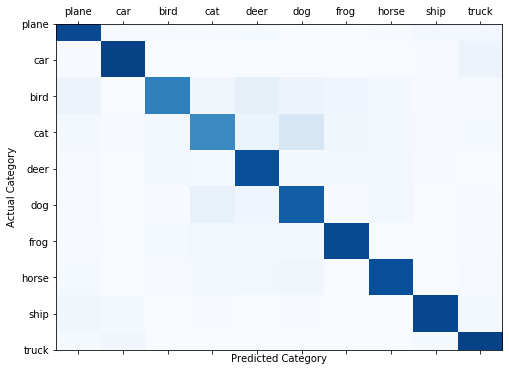

Category   - Accuracy
plane      - 90.0
car        - 92.8
bird       - 69.5
cat        - 65.0
deer       - 88.2
dog        - 82.1
frog       - 89.6
horse      - 88.2
ship       - 91.0
truck      - 92.8

Selected workers

[59 27 75 15 87 16 92  2 23 36 18 32 61 95 43]
Worker 59 : is  Stealthy_Attacker
Worker 27 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 15 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 16 : is  Stealthy_Attacker
Worker 92 : is  Stealthy_Attacker
Worker 2 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 61 : is  Honest
Worker 95 : is  Honest
Worker 43 : is  Honest

 | Global Training Round : 71 |


Worker 59 starts training in Global Round:71 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  71


Train Epoch: 1 [0/500	(1%)]	Loss: 1.563038
Train Epoch: 1 [400/500	(81%)]	Loss: 0.539565
Train Epoch: 2 [0/500	(1%)]	Loss: 0.300350
Train Epoch: 2 [400/500	(81%)]	Loss: 0.325293
Train Epoch: 3 [0/500	(1%)]	Loss: 0.171172
Train Epoch: 3 [400/500	(81%)]	Loss: 0.379871
Train Epoch: 4 [0/500	(1%)]	Loss: 0.248754
Train Epoch: 4 [400/500	(81%)]	Loss: 0.191616
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127607
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220060

Performed attacks 1
Worker 59 ends training in Global Round:71 |

Worker 27 starts training in Global Round:71 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  71


Train Epoch: 1 [0/500	(1%)]	Loss: 0.859378
Train Epoch: 1 [400/500	(81%)]	Loss: 0.932056
Train Epoch: 2 [0/500	(1%)]	Loss: 0.353264
Train Epoch: 2 [400/500	(81%)]	Loss: 0.606563
Train Epoch: 3 [0/500	(1%)]	Loss: 0.246346
Train Epoch: 3 [400/500	(81%)]	Loss: 0.442664
Train Epoch: 4 [0/500	(1%)]	Loss: 0.490706
Train Epoch: 4 [400/500	(81%)]	Loss: 0.257974
Train Epoch: 5 [0/500	(1%)]	Loss: 0.258561
Train Epoch: 5 [400/500	(81%)]	Loss: 0.264895

Performed attacks 2
Worker 27 ends training in Global Round:71 |

Worker 75 starts training in Global Round:71 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  71


Train Epoch: 1 [0/500	(1%)]	Loss: 1.281190
Train Epoch: 1 [400/500	(81%)]	Loss: 0.650681
Train Epoch: 2 [0/500	(1%)]	Loss: 0.274503
Train Epoch: 2 [400/500	(81%)]	Loss: 0.440803
Train Epoch: 3 [0/500	(1%)]	Loss: 0.303837
Train Epoch: 3 [400/500	(81%)]	Loss: 0.292574
Train Epoch: 4 [0/500	(1%)]	Loss: 0.247351
Train Epoch: 4 [400/500	(81%)]	Loss: 0.342847
Train Epoch: 5 [0/500	(1%)]	Loss: 0.290972
Train Epoch: 5 [400/500	(81%)]	Loss: 0.185558

Performed attacks 3
Worker 75 ends training in Global Round:71 |

Worker 15 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.546163
Train Epoch: 1 [400/500	(81%)]	Loss: 0.527664
Train Epoch: 2 [0/500	(1%)]	Loss: 0.227699
Train Epoch: 2 [400/500	(81%)]	Loss: 0.431593
Train Epoch: 3 [0/500	(1%)]	Loss: 0.214665
Train Epoch: 3 [400/500	(81%)]	Loss: 0.269133
Train Epoch: 4 [0/500	(1%)]	Loss: 0.160141
Train Epoch: 4 [400/500	(81%)]	Loss: 0.431664
Train Epoch: 5 [0/500	(1%)]	Loss: 0.140865
Train Epoch: 5 [400/500	(81%)]	Loss: 0.124268

Worker 15 ends training in Global Round:71 |

Worker 87 starts training in Global Round:71 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  71


Train Epoch: 1 [0/500	(1%)]	Loss: 1.427507
Train Epoch: 1 [400/500	(81%)]	Loss: 1.001944
Train Epoch: 2 [0/500	(1%)]	Loss: 0.308130
Train Epoch: 2 [400/500	(81%)]	Loss: 0.337779
Train Epoch: 3 [0/500	(1%)]	Loss: 0.263707
Train Epoch: 3 [400/500	(81%)]	Loss: 0.395256
Train Epoch: 4 [0/500	(1%)]	Loss: 0.214475
Train Epoch: 4 [400/500	(81%)]	Loss: 0.281331
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171046
Train Epoch: 5 [400/500	(81%)]	Loss: 0.218413

Performed attacks 4
Worker 87 ends training in Global Round:71 |

Worker 16 starts training in Global Round:71 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  71


Train Epoch: 1 [0/500	(1%)]	Loss: 1.274866
Train Epoch: 1 [400/500	(81%)]	Loss: 0.710814
Train Epoch: 2 [0/500	(1%)]	Loss: 0.496053
Train Epoch: 2 [400/500	(81%)]	Loss: 0.546142
Train Epoch: 3 [0/500	(1%)]	Loss: 0.318611
Train Epoch: 3 [400/500	(81%)]	Loss: 0.289985
Train Epoch: 4 [0/500	(1%)]	Loss: 0.183495
Train Epoch: 4 [400/500	(81%)]	Loss: 0.469898
Train Epoch: 5 [0/500	(1%)]	Loss: 0.168551
Train Epoch: 5 [400/500	(81%)]	Loss: 0.196710

Performed attacks 5
Worker 16 ends training in Global Round:71 |

Worker 92 starts training in Global Round:71 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  71


Train Epoch: 1 [0/500	(1%)]	Loss: 1.373315
Train Epoch: 1 [400/500	(81%)]	Loss: 0.434779
Train Epoch: 2 [0/500	(1%)]	Loss: 0.396611
Train Epoch: 2 [400/500	(81%)]	Loss: 0.550817
Train Epoch: 3 [0/500	(1%)]	Loss: 0.270453
Train Epoch: 3 [400/500	(81%)]	Loss: 0.448050
Train Epoch: 4 [0/500	(1%)]	Loss: 0.192190
Train Epoch: 4 [400/500	(81%)]	Loss: 0.466739
Train Epoch: 5 [0/500	(1%)]	Loss: 0.238749
Train Epoch: 5 [400/500	(81%)]	Loss: 0.179968

Performed attacks 6
Worker 92 ends training in Global Round:71 |

Worker 2 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.192795
Train Epoch: 1 [400/500	(81%)]	Loss: 0.268114
Train Epoch: 2 [0/500	(1%)]	Loss: 0.167095
Train Epoch: 2 [400/500	(81%)]	Loss: 0.192213
Train Epoch: 3 [0/500	(1%)]	Loss: 0.099538
Train Epoch: 3 [400/500	(81%)]	Loss: 0.196934
Train Epoch: 4 [0/500	(1%)]	Loss: 0.127873
Train Epoch: 4 [400/500	(81%)]	Loss: 0.170357
Train Epoch: 5 [0/500	(1%)]	Loss: 0.187980
Train Epoch: 5 [400/500	(81%)]	Loss: 0.077902

Worker 2 ends training in Global Round:71 |

Worker 23 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.334445
Train Epoch: 1 [400/500	(81%)]	Loss: 0.544344
Train Epoch: 2 [0/500	(1%)]	Loss: 0.285121
Train Epoch: 2 [400/500	(81%)]	Loss: 0.343643
Train Epoch: 3 [0/500	(1%)]	Loss: 0.224284
Train Epoch: 3 [400/500	(81%)]	Loss: 0.258229
Train Epoch: 4 [0/500	(1%)]	Loss: 0.153291
Train Epoch: 4 [400/500	(81%)]	Loss: 0.240126
Train Epoch: 5 [0/500	(1%)]	Loss: 0.189544
Train Epoch: 5 [400/500	(81%)]	Loss: 0.229177

Worker 23 ends training in Global Round:71 |

Worker 36 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.276345
Train Epoch: 1 [400/500	(81%)]	Loss: 0.281561
Train Epoch: 2 [0/500	(1%)]	Loss: 0.107847
Train Epoch: 2 [400/500	(81%)]	Loss: 0.165038
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136861
Train Epoch: 3 [400/500	(81%)]	Loss: 0.173082
Train Epoch: 4 [0/500	(1%)]	Loss: 0.065879
Train Epoch: 4 [400/500	(81%)]	Loss: 0.110455
Train Epoch: 5 [0/500	(1%)]	Loss: 0.063678
Train Epoch: 5 [400/500	(81%)]	Loss: 0.062866

Worker 36 ends training in Global Round:71 |

Worker 18 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.614432
Train Epoch: 1 [400/500	(81%)]	Loss: 0.543723
Train Epoch: 2 [0/500	(1%)]	Loss: 0.313225
Train Epoch: 2 [400/500	(81%)]	Loss: 0.467938
Train Epoch: 3 [0/500	(1%)]	Loss: 0.181413
Train Epoch: 3 [400/500	(81%)]	Loss: 0.285582
Train Epoch: 4 [0/500	(1%)]	Loss: 0.204361
Train Epoch: 4 [400/500	(81%)]	Loss: 0.224101
Train Epoch: 5 [0/500	(1%)]	Loss: 0.219918
Train Epoch: 5 [400/500	(81%)]	Loss: 0.214043

Worker 18 ends training in Global Round:71 |

Worker 32 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.336250
Train Epoch: 1 [400/500	(81%)]	Loss: 0.174099
Train Epoch: 2 [0/500	(1%)]	Loss: 0.148638
Train Epoch: 2 [400/500	(81%)]	Loss: 0.238501
Train Epoch: 3 [0/500	(1%)]	Loss: 0.117895
Train Epoch: 3 [400/500	(81%)]	Loss: 0.143254
Train Epoch: 4 [0/500	(1%)]	Loss: 0.074518
Train Epoch: 4 [400/500	(81%)]	Loss: 0.147466
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106004
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117787

Worker 32 ends training in Global Round:71 |

Worker 61 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.256281
Train Epoch: 1 [400/500	(81%)]	Loss: 0.202852
Train Epoch: 2 [0/500	(1%)]	Loss: 0.153909
Train Epoch: 2 [400/500	(81%)]	Loss: 0.109585
Train Epoch: 3 [0/500	(1%)]	Loss: 0.117414
Train Epoch: 3 [400/500	(81%)]	Loss: 0.159894
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143170
Train Epoch: 4 [400/500	(81%)]	Loss: 0.303068
Train Epoch: 5 [0/500	(1%)]	Loss: 0.140663
Train Epoch: 5 [400/500	(81%)]	Loss: 0.303735

Worker 61 ends training in Global Round:71 |

Worker 95 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.210245
Train Epoch: 1 [400/500	(81%)]	Loss: 0.299249
Train Epoch: 2 [0/500	(1%)]	Loss: 0.072754
Train Epoch: 2 [400/500	(81%)]	Loss: 0.190018
Train Epoch: 3 [0/500	(1%)]	Loss: 0.111640
Train Epoch: 3 [400/500	(81%)]	Loss: 0.070485
Train Epoch: 4 [0/500	(1%)]	Loss: 0.077180
Train Epoch: 4 [400/500	(81%)]	Loss: 0.156547
Train Epoch: 5 [0/500	(1%)]	Loss: 0.129492
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135761

Worker 95 ends training in Global Round:71 |

Worker 43 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.215876
Train Epoch: 1 [400/500	(81%)]	Loss: 0.255522
Train Epoch: 2 [0/500	(1%)]	Loss: 0.171579
Train Epoch: 2 [400/500	(81%)]	Loss: 0.143799
Train Epoch: 3 [0/500	(1%)]	Loss: 0.063946
Train Epoch: 3 [400/500	(81%)]	Loss: 0.132619
Train Epoch: 4 [0/500	(1%)]	Loss: 0.240402
Train Epoch: 4 [400/500	(81%)]	Loss: 0.037184
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064772
Train Epoch: 5 [400/500	(81%)]	Loss: 0.086367

Worker 43 ends training in Global Round:71 |
Last layer biases  [array([ 0.03675307, -0.03218736, -0.01246586,  0.04174978,  0.04998453,
       -0.01249826,  0.03807124, -0.03255998, -0.02211417, -0.03883115],
      dtype=float32), array([ 0.03547933, -0.03173299, -0.0115169 ,  0.03848203,  0.05118287,
       -0.01320115,  0.04009312, -0.03006345, -0.02265023, -0.04017077],
      dtype=float32), array([ 0.03640345, -0.02891582, -0.01173903,  0.0400613 ,  0.05386258,
       -0.01410366,  0.03769896, -0.03325485, -0.02182988, -0.04228121],
      dtyp

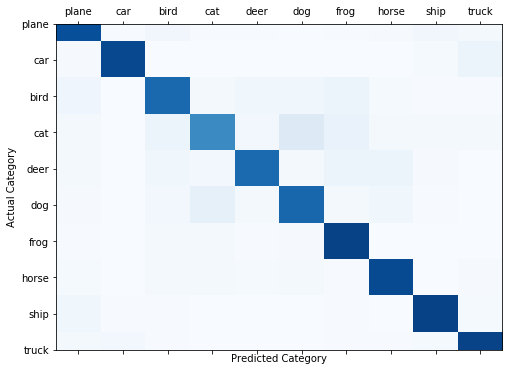

Category   - Accuracy
plane      - 88.2
car        - 90.5
bird       - 77.8
cat        - 64.9
deer       - 77.6
dog        - 79.1
frog       - 92.9
horse      - 89.8
ship       - 92.9
truck      - 92.3

Selected workers

[24 54  1 91 56 77 42  5 68 63 59 10 93 38 14]
Worker 24 : is  Honest
Worker 54 : is  Honest
Worker 1 : is  Honest
Worker 91 : is  Honest
Worker 56 : is  Honest
Worker 77 : is  Honest
Worker 42 : is  Honest
Worker 5 : is  Honest
Worker 68 : is  Honest
Worker 63 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 10 : is  Honest
Worker 93 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 14 : is  Stealthy_Attacker

 | Global Training Round : 72 |


Worker 24 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.201236
Train Epoch: 1 [400/500	(81%)]	Loss: 0.268199
Train Epoch: 2 [0/500	(1%)]	Loss: 0.071101
Train Epoch: 2 [400/500	(81%)]	Loss: 0.155779
Train Epoch: 3 [0/500	(1%)]	Loss: 0.110384
Train Epoch: 3 [400/500	(81%)]	Loss: 0.059924
Train Epoch: 4 [0/500	(1%)]	Loss: 0.061302
Train Epoch: 4 [400/500	(81%)]	Loss: 0.088478
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083582
Train Epoch: 5 [400/500	(81%)]	Loss: 0.098571

Worker 24 ends training in Global Round:72 |

Worker 54 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.155824
Train Epoch: 1 [400/500	(81%)]	Loss: 0.215575
Train Epoch: 2 [0/500	(1%)]	Loss: 0.074340
Train Epoch: 2 [400/500	(81%)]	Loss: 0.246266
Train Epoch: 3 [0/500	(1%)]	Loss: 0.078622
Train Epoch: 3 [400/500	(81%)]	Loss: 0.227788
Train Epoch: 4 [0/500	(1%)]	Loss: 0.071125
Train Epoch: 4 [400/500	(81%)]	Loss: 0.125928
Train Epoch: 5 [0/500	(1%)]	Loss: 0.040532
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117243

Worker 54 ends training in Global Round:72 |

Worker 1 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.449143
Train Epoch: 1 [400/500	(81%)]	Loss: 0.502567
Train Epoch: 2 [0/500	(1%)]	Loss: 0.194536
Train Epoch: 2 [400/500	(81%)]	Loss: 0.262488
Train Epoch: 3 [0/500	(1%)]	Loss: 0.103483
Train Epoch: 3 [400/500	(81%)]	Loss: 0.276680
Train Epoch: 4 [0/500	(1%)]	Loss: 0.267551
Train Epoch: 4 [400/500	(81%)]	Loss: 0.241951
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155563
Train Epoch: 5 [400/500	(81%)]	Loss: 0.146811

Worker 1 ends training in Global Round:72 |

Worker 91 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.251184
Train Epoch: 1 [400/500	(81%)]	Loss: 0.323061
Train Epoch: 2 [0/500	(1%)]	Loss: 0.095960
Train Epoch: 2 [400/500	(81%)]	Loss: 0.158955
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136095
Train Epoch: 3 [400/500	(81%)]	Loss: 0.200040
Train Epoch: 4 [0/500	(1%)]	Loss: 0.103149
Train Epoch: 4 [400/500	(81%)]	Loss: 0.147541
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083423
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139363

Worker 91 ends training in Global Round:72 |

Worker 56 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.206111
Train Epoch: 1 [400/500	(81%)]	Loss: 0.436977
Train Epoch: 2 [0/500	(1%)]	Loss: 0.095504
Train Epoch: 2 [400/500	(81%)]	Loss: 0.144881
Train Epoch: 3 [0/500	(1%)]	Loss: 0.066151
Train Epoch: 3 [400/500	(81%)]	Loss: 0.166088
Train Epoch: 4 [0/500	(1%)]	Loss: 0.062902
Train Epoch: 4 [400/500	(81%)]	Loss: 0.149313
Train Epoch: 5 [0/500	(1%)]	Loss: 0.042242
Train Epoch: 5 [400/500	(81%)]	Loss: 0.118768

Worker 56 ends training in Global Round:72 |

Worker 77 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.402703
Train Epoch: 1 [400/500	(81%)]	Loss: 0.614393
Train Epoch: 2 [0/500	(1%)]	Loss: 0.118447
Train Epoch: 2 [400/500	(81%)]	Loss: 0.247800
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261691
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234439
Train Epoch: 4 [0/500	(1%)]	Loss: 0.155970
Train Epoch: 4 [400/500	(81%)]	Loss: 0.422394
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115774
Train Epoch: 5 [400/500	(81%)]	Loss: 0.287311

Worker 77 ends training in Global Round:72 |

Worker 42 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.437883
Train Epoch: 1 [400/500	(81%)]	Loss: 0.329881
Train Epoch: 2 [0/500	(1%)]	Loss: 0.219404
Train Epoch: 2 [400/500	(81%)]	Loss: 0.168693
Train Epoch: 3 [0/500	(1%)]	Loss: 0.100723
Train Epoch: 3 [400/500	(81%)]	Loss: 0.198346
Train Epoch: 4 [0/500	(1%)]	Loss: 0.184431
Train Epoch: 4 [400/500	(81%)]	Loss: 0.098138
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089309
Train Epoch: 5 [400/500	(81%)]	Loss: 0.247792

Worker 42 ends training in Global Round:72 |

Worker 5 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.194185
Train Epoch: 1 [400/500	(81%)]	Loss: 0.314646
Train Epoch: 2 [0/500	(1%)]	Loss: 0.077601
Train Epoch: 2 [400/500	(81%)]	Loss: 0.279196
Train Epoch: 3 [0/500	(1%)]	Loss: 0.093535
Train Epoch: 3 [400/500	(81%)]	Loss: 0.156171
Train Epoch: 4 [0/500	(1%)]	Loss: 0.094780
Train Epoch: 4 [400/500	(81%)]	Loss: 0.140733
Train Epoch: 5 [0/500	(1%)]	Loss: 0.084408
Train Epoch: 5 [400/500	(81%)]	Loss: 0.057586

Worker 5 ends training in Global Round:72 |

Worker 68 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.526047
Train Epoch: 1 [400/500	(81%)]	Loss: 0.330895
Train Epoch: 2 [0/500	(1%)]	Loss: 0.283543
Train Epoch: 2 [400/500	(81%)]	Loss: 0.328538
Train Epoch: 3 [0/500	(1%)]	Loss: 0.204552
Train Epoch: 3 [400/500	(81%)]	Loss: 0.101543
Train Epoch: 4 [0/500	(1%)]	Loss: 0.120947
Train Epoch: 4 [400/500	(81%)]	Loss: 0.265629
Train Epoch: 5 [0/500	(1%)]	Loss: 0.074888
Train Epoch: 5 [400/500	(81%)]	Loss: 0.137889

Worker 68 ends training in Global Round:72 |

Worker 63 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.334352
Train Epoch: 1 [400/500	(81%)]	Loss: 0.558297
Train Epoch: 2 [0/500	(1%)]	Loss: 0.095548
Train Epoch: 2 [400/500	(81%)]	Loss: 0.350232
Train Epoch: 3 [0/500	(1%)]	Loss: 0.203887
Train Epoch: 3 [400/500	(81%)]	Loss: 0.202353
Train Epoch: 4 [0/500	(1%)]	Loss: 0.107387
Train Epoch: 4 [400/500	(81%)]	Loss: 0.201232
Train Epoch: 5 [0/500	(1%)]	Loss: 0.074548
Train Epoch: 5 [400/500	(81%)]	Loss: 0.133119

Worker 63 ends training in Global Round:72 |

Worker 59 starts training in Global Round:72 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  72


Train Epoch: 1 [0/500	(1%)]	Loss: 0.922191
Train Epoch: 1 [400/500	(81%)]	Loss: 0.828470
Train Epoch: 2 [0/500	(1%)]	Loss: 0.333806
Train Epoch: 2 [400/500	(81%)]	Loss: 0.640275
Train Epoch: 3 [0/500	(1%)]	Loss: 0.412460
Train Epoch: 3 [400/500	(81%)]	Loss: 0.490579
Train Epoch: 4 [0/500	(1%)]	Loss: 0.192133
Train Epoch: 4 [400/500	(81%)]	Loss: 0.173747
Train Epoch: 5 [0/500	(1%)]	Loss: 0.225364
Train Epoch: 5 [400/500	(81%)]	Loss: 0.333174

Performed attacks 1
Worker 59 ends training in Global Round:72 |

Worker 10 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.289746
Train Epoch: 1 [400/500	(81%)]	Loss: 0.272090
Train Epoch: 2 [0/500	(1%)]	Loss: 0.113425
Train Epoch: 2 [400/500	(81%)]	Loss: 0.172000
Train Epoch: 3 [0/500	(1%)]	Loss: 0.075235
Train Epoch: 3 [400/500	(81%)]	Loss: 0.094932
Train Epoch: 4 [0/500	(1%)]	Loss: 0.072034
Train Epoch: 4 [400/500	(81%)]	Loss: 0.069167
Train Epoch: 5 [0/500	(1%)]	Loss: 0.109406
Train Epoch: 5 [400/500	(81%)]	Loss: 0.101438

Worker 10 ends training in Global Round:72 |

Worker 93 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.272547
Train Epoch: 1 [400/500	(81%)]	Loss: 0.282845
Train Epoch: 2 [0/500	(1%)]	Loss: 0.098740
Train Epoch: 2 [400/500	(81%)]	Loss: 0.177981
Train Epoch: 3 [0/500	(1%)]	Loss: 0.068855
Train Epoch: 3 [400/500	(81%)]	Loss: 0.111859
Train Epoch: 4 [0/500	(1%)]	Loss: 0.154386
Train Epoch: 4 [400/500	(81%)]	Loss: 0.153044
Train Epoch: 5 [0/500	(1%)]	Loss: 0.130658
Train Epoch: 5 [400/500	(81%)]	Loss: 0.221759

Worker 93 ends training in Global Round:72 |

Worker 38 starts training in Global Round:72 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  72


Train Epoch: 1 [0/500	(1%)]	Loss: 0.836823
Train Epoch: 1 [400/500	(81%)]	Loss: 0.562715
Train Epoch: 2 [0/500	(1%)]	Loss: 0.396072
Train Epoch: 2 [400/500	(81%)]	Loss: 0.400805
Train Epoch: 3 [0/500	(1%)]	Loss: 0.228947
Train Epoch: 3 [400/500	(81%)]	Loss: 0.363412
Train Epoch: 4 [0/500	(1%)]	Loss: 0.155565
Train Epoch: 4 [400/500	(81%)]	Loss: 0.175710
Train Epoch: 5 [0/500	(1%)]	Loss: 0.244898
Train Epoch: 5 [400/500	(81%)]	Loss: 0.133322

Performed attacks 2
Worker 38 ends training in Global Round:72 |

Worker 14 starts training in Global Round:72 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  72


Train Epoch: 1 [0/500	(1%)]	Loss: 1.003419
Train Epoch: 1 [400/500	(81%)]	Loss: 0.483297
Train Epoch: 2 [0/500	(1%)]	Loss: 0.147562
Train Epoch: 2 [400/500	(81%)]	Loss: 0.512934
Train Epoch: 3 [0/500	(1%)]	Loss: 0.199116
Train Epoch: 3 [400/500	(81%)]	Loss: 0.306932
Train Epoch: 4 [0/500	(1%)]	Loss: 0.134073
Train Epoch: 4 [400/500	(81%)]	Loss: 0.204851
Train Epoch: 5 [0/500	(1%)]	Loss: 0.293637
Train Epoch: 5 [400/500	(81%)]	Loss: 0.349306

Performed attacks 3
Worker 14 ends training in Global Round:72 |
Last layer biases  [array([ 0.03400892, -0.03238344, -0.01506467,  0.03846398,  0.03855739,
       -0.01503736,  0.03990319, -0.0083182 , -0.02270718, -0.04152084],
      dtype=float32), array([ 0.03595967, -0.03120165, -0.01503525,  0.03818689,  0.03892099,
       -0.01425908,  0.03802937, -0.0080902 , -0.0242293 , -0.04237964],
      dtype=float32), array([ 0.03483348, -0.03162394, -0.01656011,  0.03583013,  0.04284403,
       -0.01595187,  0.03718543, -0.00897867, -0.02410361, -0.0

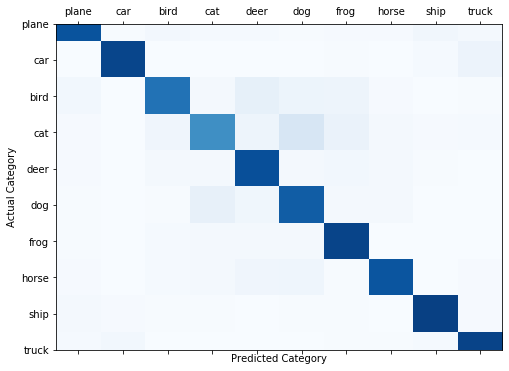

Category   - Accuracy
plane      - 86.6
car        - 91.5
bird       - 74.6
cat        - 63.5
deer       - 87.9
dog        - 82.6
frog       - 92.0
horse      - 85.8
ship       - 93.4
truck      - 92.5

Selected workers

[40 39 16 42 56 64 11 36 18 25 95 70 85 29 33]
Worker 40 : is  Honest
Worker 39 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 56 : is  Honest
Worker 64 : is  Honest
Worker 11 : is  Honest
Worker 36 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 25 : is  Honest
Worker 95 : is  Honest
Worker 70 : is  Honest
Worker 85 : is  Honest
Worker 29 : is  Honest
Worker 33 : is  Stealthy_Attacker

 | Global Training Round : 73 |


Worker 40 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.330139
Train Epoch: 1 [400/500	(81%)]	Loss: 0.172096
Train Epoch: 2 [0/500	(1%)]	Loss: 0.161500
Train Epoch: 2 [400/500	(81%)]	Loss: 0.115329
Train Epoch: 3 [0/500	(1%)]	Loss: 0.111381
Train Epoch: 3 [400/500	(81%)]	Loss: 0.248770
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164468
Train Epoch: 4 [400/500	(81%)]	Loss: 0.346867
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171269
Train Epoch: 5 [400/500	(81%)]	Loss: 0.086829

Worker 40 ends training in Global Round:73 |

Worker 39 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.169965
Train Epoch: 1 [400/500	(81%)]	Loss: 0.265003
Train Epoch: 2 [0/500	(1%)]	Loss: 0.088857
Train Epoch: 2 [400/500	(81%)]	Loss: 0.191269
Train Epoch: 3 [0/500	(1%)]	Loss: 0.086854
Train Epoch: 3 [400/500	(81%)]	Loss: 0.184669
Train Epoch: 4 [0/500	(1%)]	Loss: 0.081852
Train Epoch: 4 [400/500	(81%)]	Loss: 0.094468
Train Epoch: 5 [0/500	(1%)]	Loss: 0.103928
Train Epoch: 5 [400/500	(81%)]	Loss: 0.208404

Worker 39 ends training in Global Round:73 |

Worker 16 starts training in Global Round:73 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  73


Train Epoch: 1 [0/500	(1%)]	Loss: 1.731135
Train Epoch: 1 [400/500	(81%)]	Loss: 0.792932
Train Epoch: 2 [0/500	(1%)]	Loss: 0.513230
Train Epoch: 2 [400/500	(81%)]	Loss: 0.465447
Train Epoch: 3 [0/500	(1%)]	Loss: 0.328031
Train Epoch: 3 [400/500	(81%)]	Loss: 0.359335
Train Epoch: 4 [0/500	(1%)]	Loss: 0.249799
Train Epoch: 4 [400/500	(81%)]	Loss: 0.375903
Train Epoch: 5 [0/500	(1%)]	Loss: 0.187301
Train Epoch: 5 [400/500	(81%)]	Loss: 0.270859

Performed attacks 1
Worker 16 ends training in Global Round:73 |

Worker 42 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.238167
Train Epoch: 1 [400/500	(81%)]	Loss: 0.333848
Train Epoch: 2 [0/500	(1%)]	Loss: 0.097684
Train Epoch: 2 [400/500	(81%)]	Loss: 0.118446
Train Epoch: 3 [0/500	(1%)]	Loss: 0.059100
Train Epoch: 3 [400/500	(81%)]	Loss: 0.214108
Train Epoch: 4 [0/500	(1%)]	Loss: 0.081316
Train Epoch: 4 [400/500	(81%)]	Loss: 0.171547
Train Epoch: 5 [0/500	(1%)]	Loss: 0.058634
Train Epoch: 5 [400/500	(81%)]	Loss: 0.176274

Worker 42 ends training in Global Round:73 |

Worker 56 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.135729
Train Epoch: 1 [400/500	(81%)]	Loss: 0.156320
Train Epoch: 2 [0/500	(1%)]	Loss: 0.055609
Train Epoch: 2 [400/500	(81%)]	Loss: 0.144980
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142658
Train Epoch: 3 [400/500	(81%)]	Loss: 0.068030
Train Epoch: 4 [0/500	(1%)]	Loss: 0.024559
Train Epoch: 4 [400/500	(81%)]	Loss: 0.111604
Train Epoch: 5 [0/500	(1%)]	Loss: 0.058820
Train Epoch: 5 [400/500	(81%)]	Loss: 0.113833

Worker 56 ends training in Global Round:73 |

Worker 64 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.316751
Train Epoch: 1 [400/500	(81%)]	Loss: 0.225970
Train Epoch: 2 [0/500	(1%)]	Loss: 0.207677
Train Epoch: 2 [400/500	(81%)]	Loss: 0.247042
Train Epoch: 3 [0/500	(1%)]	Loss: 0.112853
Train Epoch: 3 [400/500	(81%)]	Loss: 0.169314
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105037
Train Epoch: 4 [400/500	(81%)]	Loss: 0.208044
Train Epoch: 5 [0/500	(1%)]	Loss: 0.060878
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149885

Worker 64 ends training in Global Round:73 |

Worker 11 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.206387
Train Epoch: 1 [400/500	(81%)]	Loss: 0.311171
Train Epoch: 2 [0/500	(1%)]	Loss: 0.083460
Train Epoch: 2 [400/500	(81%)]	Loss: 0.132425
Train Epoch: 3 [0/500	(1%)]	Loss: 0.189868
Train Epoch: 3 [400/500	(81%)]	Loss: 0.206300
Train Epoch: 4 [0/500	(1%)]	Loss: 0.151080
Train Epoch: 4 [400/500	(81%)]	Loss: 0.087385
Train Epoch: 5 [0/500	(1%)]	Loss: 0.088090
Train Epoch: 5 [400/500	(81%)]	Loss: 0.054853

Worker 11 ends training in Global Round:73 |

Worker 36 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.189777
Train Epoch: 1 [400/500	(81%)]	Loss: 0.177773
Train Epoch: 2 [0/500	(1%)]	Loss: 0.084675
Train Epoch: 2 [400/500	(81%)]	Loss: 0.119994
Train Epoch: 3 [0/500	(1%)]	Loss: 0.091611
Train Epoch: 3 [400/500	(81%)]	Loss: 0.079055
Train Epoch: 4 [0/500	(1%)]	Loss: 0.117691
Train Epoch: 4 [400/500	(81%)]	Loss: 0.076384
Train Epoch: 5 [0/500	(1%)]	Loss: 0.200812
Train Epoch: 5 [400/500	(81%)]	Loss: 0.127844

Worker 36 ends training in Global Round:73 |

Worker 18 starts training in Global Round:73 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  73


Train Epoch: 1 [0/500	(1%)]	Loss: 1.265351
Train Epoch: 1 [400/500	(81%)]	Loss: 0.454320
Train Epoch: 2 [0/500	(1%)]	Loss: 0.213025
Train Epoch: 2 [400/500	(81%)]	Loss: 0.489129
Train Epoch: 3 [0/500	(1%)]	Loss: 0.260820
Train Epoch: 3 [400/500	(81%)]	Loss: 0.238556
Train Epoch: 4 [0/500	(1%)]	Loss: 0.234042
Train Epoch: 4 [400/500	(81%)]	Loss: 0.314083
Train Epoch: 5 [0/500	(1%)]	Loss: 0.212647
Train Epoch: 5 [400/500	(81%)]	Loss: 0.188686

Performed attacks 2
Worker 18 ends training in Global Round:73 |

Worker 25 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.399976
Train Epoch: 1 [400/500	(81%)]	Loss: 0.507389
Train Epoch: 2 [0/500	(1%)]	Loss: 0.141097
Train Epoch: 2 [400/500	(81%)]	Loss: 0.284508
Train Epoch: 3 [0/500	(1%)]	Loss: 0.106362
Train Epoch: 3 [400/500	(81%)]	Loss: 0.282237
Train Epoch: 4 [0/500	(1%)]	Loss: 0.137183
Train Epoch: 4 [400/500	(81%)]	Loss: 0.243326
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157313
Train Epoch: 5 [400/500	(81%)]	Loss: 0.136179

Worker 25 ends training in Global Round:73 |

Worker 95 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.267463
Train Epoch: 1 [400/500	(81%)]	Loss: 0.192564
Train Epoch: 2 [0/500	(1%)]	Loss: 0.199559
Train Epoch: 2 [400/500	(81%)]	Loss: 0.188699
Train Epoch: 3 [0/500	(1%)]	Loss: 0.116919
Train Epoch: 3 [400/500	(81%)]	Loss: 0.122991
Train Epoch: 4 [0/500	(1%)]	Loss: 0.080368
Train Epoch: 4 [400/500	(81%)]	Loss: 0.154566
Train Epoch: 5 [0/500	(1%)]	Loss: 0.091871
Train Epoch: 5 [400/500	(81%)]	Loss: 0.136099

Worker 95 ends training in Global Round:73 |

Worker 70 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.347880
Train Epoch: 1 [400/500	(81%)]	Loss: 0.484998
Train Epoch: 2 [0/500	(1%)]	Loss: 0.198331
Train Epoch: 2 [400/500	(81%)]	Loss: 0.286115
Train Epoch: 3 [0/500	(1%)]	Loss: 0.181538
Train Epoch: 3 [400/500	(81%)]	Loss: 0.143142
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105093
Train Epoch: 4 [400/500	(81%)]	Loss: 0.175503
Train Epoch: 5 [0/500	(1%)]	Loss: 0.078013
Train Epoch: 5 [400/500	(81%)]	Loss: 0.114424

Worker 70 ends training in Global Round:73 |

Worker 85 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.233632
Train Epoch: 1 [400/500	(81%)]	Loss: 0.552504
Train Epoch: 2 [0/500	(1%)]	Loss: 0.216128
Train Epoch: 2 [400/500	(81%)]	Loss: 0.126318
Train Epoch: 3 [0/500	(1%)]	Loss: 0.143962
Train Epoch: 3 [400/500	(81%)]	Loss: 0.180164
Train Epoch: 4 [0/500	(1%)]	Loss: 0.214431
Train Epoch: 4 [400/500	(81%)]	Loss: 0.245290
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132314
Train Epoch: 5 [400/500	(81%)]	Loss: 0.120982

Worker 85 ends training in Global Round:73 |

Worker 29 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.496295
Train Epoch: 1 [400/500	(81%)]	Loss: 0.104474
Train Epoch: 2 [0/500	(1%)]	Loss: 0.214321
Train Epoch: 2 [400/500	(81%)]	Loss: 0.275772
Train Epoch: 3 [0/500	(1%)]	Loss: 0.100447
Train Epoch: 3 [400/500	(81%)]	Loss: 0.194905
Train Epoch: 4 [0/500	(1%)]	Loss: 0.061809
Train Epoch: 4 [400/500	(81%)]	Loss: 0.154578
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081210
Train Epoch: 5 [400/500	(81%)]	Loss: 0.086736

Worker 29 ends training in Global Round:73 |

Worker 33 starts training in Global Round:73 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  73


Train Epoch: 1 [0/500	(1%)]	Loss: 1.080706
Train Epoch: 1 [400/500	(81%)]	Loss: 0.596230
Train Epoch: 2 [0/500	(1%)]	Loss: 0.437173
Train Epoch: 2 [400/500	(81%)]	Loss: 0.589270
Train Epoch: 3 [0/500	(1%)]	Loss: 0.144814
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234412
Train Epoch: 4 [0/500	(1%)]	Loss: 0.232677
Train Epoch: 4 [400/500	(81%)]	Loss: 0.150959
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126850
Train Epoch: 5 [400/500	(81%)]	Loss: 0.404300

Performed attacks 3
Worker 33 ends training in Global Round:73 |
Last layer biases  [array([ 0.03472028, -0.03213343, -0.0166535 ,  0.03808858,  0.04066252,
       -0.01526725,  0.03890034, -0.00667262, -0.02382375, -0.04191934],
      dtype=float32), array([ 0.03677013, -0.03218108, -0.01609887,  0.03760418,  0.03894516,
       -0.01458568,  0.03910649, -0.00749887, -0.02398125, -0.04217841],
      dtype=float32), array([ 0.03787915, -0.03047931, -0.0117637 ,  0.03761347,  0.05207481,
       -0.01582212,  0.04342517, -0.03329394, -0.02187416, -0.0

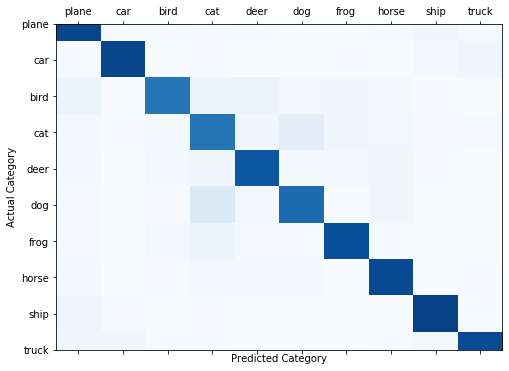

Category   - Accuracy
plane      - 91.3
car        - 91.6
bird       - 72.7
cat        - 73.6
deer       - 84.4
dog        - 77.2
frog       - 88.1
horse      - 89.5
ship       - 92.9
truck      - 89.2

Selected workers

[87 55 51 99 29 20 82 88 10 11 38 45 80 69 94]
Worker 87 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 51 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 29 : is  Honest
Worker 20 : is  Honest
Worker 82 : is  Honest
Worker 88 : is  Honest
Worker 10 : is  Honest
Worker 11 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 45 : is  Honest
Worker 80 : is  Honest
Worker 69 : is  Honest
Worker 94 : is  Stealthy_Attacker

 | Global Training Round : 74 |


Worker 87 starts training in Global Round:74 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  74


Train Epoch: 1 [0/500	(1%)]	Loss: 1.163257
Train Epoch: 1 [400/500	(81%)]	Loss: 0.630668
Train Epoch: 2 [0/500	(1%)]	Loss: 0.364776
Train Epoch: 2 [400/500	(81%)]	Loss: 0.365950
Train Epoch: 3 [0/500	(1%)]	Loss: 0.335163
Train Epoch: 3 [400/500	(81%)]	Loss: 0.377076
Train Epoch: 4 [0/500	(1%)]	Loss: 0.162121
Train Epoch: 4 [400/500	(81%)]	Loss: 0.370497
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110204
Train Epoch: 5 [400/500	(81%)]	Loss: 0.178925

Performed attacks 1
Worker 87 ends training in Global Round:74 |

Worker 55 starts training in Global Round:74 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  74


Train Epoch: 1 [0/500	(1%)]	Loss: 1.503968
Train Epoch: 1 [400/500	(81%)]	Loss: 0.496679
Train Epoch: 2 [0/500	(1%)]	Loss: 0.291205
Train Epoch: 2 [400/500	(81%)]	Loss: 0.453400
Train Epoch: 3 [0/500	(1%)]	Loss: 0.238703
Train Epoch: 3 [400/500	(81%)]	Loss: 0.295806
Train Epoch: 4 [0/500	(1%)]	Loss: 0.165445
Train Epoch: 4 [400/500	(81%)]	Loss: 0.299128
Train Epoch: 5 [0/500	(1%)]	Loss: 0.231951
Train Epoch: 5 [400/500	(81%)]	Loss: 0.157189

Performed attacks 2
Worker 55 ends training in Global Round:74 |

Worker 51 starts training in Global Round:74 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  74


Train Epoch: 1 [0/500	(1%)]	Loss: 0.992737
Train Epoch: 1 [400/500	(81%)]	Loss: 0.723694
Train Epoch: 2 [0/500	(1%)]	Loss: 0.238562
Train Epoch: 2 [400/500	(81%)]	Loss: 0.625571
Train Epoch: 3 [0/500	(1%)]	Loss: 0.273175
Train Epoch: 3 [400/500	(81%)]	Loss: 0.498898
Train Epoch: 4 [0/500	(1%)]	Loss: 0.299295
Train Epoch: 4 [400/500	(81%)]	Loss: 0.227021
Train Epoch: 5 [0/500	(1%)]	Loss: 0.163029
Train Epoch: 5 [400/500	(81%)]	Loss: 0.369793

Performed attacks 3
Worker 51 ends training in Global Round:74 |

Worker 99 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.190243
Train Epoch: 1 [400/500	(81%)]	Loss: 0.328504
Train Epoch: 2 [0/500	(1%)]	Loss: 0.067258
Train Epoch: 2 [400/500	(81%)]	Loss: 0.109520
Train Epoch: 3 [0/500	(1%)]	Loss: 0.137587
Train Epoch: 3 [400/500	(81%)]	Loss: 0.187536
Train Epoch: 4 [0/500	(1%)]	Loss: 0.114203
Train Epoch: 4 [400/500	(81%)]	Loss: 0.110690
Train Epoch: 5 [0/500	(1%)]	Loss: 0.164810
Train Epoch: 5 [400/500	(81%)]	Loss: 0.257242

Worker 99 ends training in Global Round:74 |

Worker 29 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.260788
Train Epoch: 1 [400/500	(81%)]	Loss: 0.390006
Train Epoch: 2 [0/500	(1%)]	Loss: 0.087084
Train Epoch: 2 [400/500	(81%)]	Loss: 0.274653
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151425
Train Epoch: 3 [400/500	(81%)]	Loss: 0.199406
Train Epoch: 4 [0/500	(1%)]	Loss: 0.159042
Train Epoch: 4 [400/500	(81%)]	Loss: 0.094294
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075050
Train Epoch: 5 [400/500	(81%)]	Loss: 0.181701

Worker 29 ends training in Global Round:74 |

Worker 20 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.295062
Train Epoch: 1 [400/500	(81%)]	Loss: 0.307868
Train Epoch: 2 [0/500	(1%)]	Loss: 0.165539
Train Epoch: 2 [400/500	(81%)]	Loss: 0.182831
Train Epoch: 3 [0/500	(1%)]	Loss: 0.110344
Train Epoch: 3 [400/500	(81%)]	Loss: 0.122036
Train Epoch: 4 [0/500	(1%)]	Loss: 0.103505
Train Epoch: 4 [400/500	(81%)]	Loss: 0.118639
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114264
Train Epoch: 5 [400/500	(81%)]	Loss: 0.072432

Worker 20 ends training in Global Round:74 |

Worker 82 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.208093
Train Epoch: 1 [400/500	(81%)]	Loss: 0.288334
Train Epoch: 2 [0/500	(1%)]	Loss: 0.120396
Train Epoch: 2 [400/500	(81%)]	Loss: 0.243207
Train Epoch: 3 [0/500	(1%)]	Loss: 0.169083
Train Epoch: 3 [400/500	(81%)]	Loss: 0.137871
Train Epoch: 4 [0/500	(1%)]	Loss: 0.144848
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213336
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107637
Train Epoch: 5 [400/500	(81%)]	Loss: 0.105065

Worker 82 ends training in Global Round:74 |

Worker 88 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.371702
Train Epoch: 1 [400/500	(81%)]	Loss: 0.257133
Train Epoch: 2 [0/500	(1%)]	Loss: 0.247095
Train Epoch: 2 [400/500	(81%)]	Loss: 0.188000
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151521
Train Epoch: 3 [400/500	(81%)]	Loss: 0.288158
Train Epoch: 4 [0/500	(1%)]	Loss: 0.097180
Train Epoch: 4 [400/500	(81%)]	Loss: 0.161559
Train Epoch: 5 [0/500	(1%)]	Loss: 0.186384
Train Epoch: 5 [400/500	(81%)]	Loss: 0.126886

Worker 88 ends training in Global Round:74 |

Worker 10 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.326171
Train Epoch: 1 [400/500	(81%)]	Loss: 0.196259
Train Epoch: 2 [0/500	(1%)]	Loss: 0.155122
Train Epoch: 2 [400/500	(81%)]	Loss: 0.134797
Train Epoch: 3 [0/500	(1%)]	Loss: 0.058856
Train Epoch: 3 [400/500	(81%)]	Loss: 0.156585
Train Epoch: 4 [0/500	(1%)]	Loss: 0.078072
Train Epoch: 4 [400/500	(81%)]	Loss: 0.130211
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115297
Train Epoch: 5 [400/500	(81%)]	Loss: 0.161488

Worker 10 ends training in Global Round:74 |

Worker 11 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.191241
Train Epoch: 1 [400/500	(81%)]	Loss: 0.178087
Train Epoch: 2 [0/500	(1%)]	Loss: 0.039682
Train Epoch: 2 [400/500	(81%)]	Loss: 0.121613
Train Epoch: 3 [0/500	(1%)]	Loss: 0.078525
Train Epoch: 3 [400/500	(81%)]	Loss: 0.071863
Train Epoch: 4 [0/500	(1%)]	Loss: 0.053496
Train Epoch: 4 [400/500	(81%)]	Loss: 0.162635
Train Epoch: 5 [0/500	(1%)]	Loss: 0.025308
Train Epoch: 5 [400/500	(81%)]	Loss: 0.131125

Worker 11 ends training in Global Round:74 |

Worker 38 starts training in Global Round:74 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  74


Train Epoch: 1 [0/500	(1%)]	Loss: 1.353142
Train Epoch: 1 [400/500	(81%)]	Loss: 0.696737
Train Epoch: 2 [0/500	(1%)]	Loss: 0.345199
Train Epoch: 2 [400/500	(81%)]	Loss: 0.500704
Train Epoch: 3 [0/500	(1%)]	Loss: 0.194461
Train Epoch: 3 [400/500	(81%)]	Loss: 0.305913
Train Epoch: 4 [0/500	(1%)]	Loss: 0.286227
Train Epoch: 4 [400/500	(81%)]	Loss: 0.282477
Train Epoch: 5 [0/500	(1%)]	Loss: 0.219195
Train Epoch: 5 [400/500	(81%)]	Loss: 0.280425

Performed attacks 4
Worker 38 ends training in Global Round:74 |

Worker 45 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.345955
Train Epoch: 1 [400/500	(81%)]	Loss: 0.223727
Train Epoch: 2 [0/500	(1%)]	Loss: 0.151025
Train Epoch: 2 [400/500	(81%)]	Loss: 0.193770
Train Epoch: 3 [0/500	(1%)]	Loss: 0.114524
Train Epoch: 3 [400/500	(81%)]	Loss: 0.095969
Train Epoch: 4 [0/500	(1%)]	Loss: 0.071424
Train Epoch: 4 [400/500	(81%)]	Loss: 0.183703
Train Epoch: 5 [0/500	(1%)]	Loss: 0.101344
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191948

Worker 45 ends training in Global Round:74 |

Worker 80 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.217633
Train Epoch: 1 [400/500	(81%)]	Loss: 0.265947
Train Epoch: 2 [0/500	(1%)]	Loss: 0.075922
Train Epoch: 2 [400/500	(81%)]	Loss: 0.204217
Train Epoch: 3 [0/500	(1%)]	Loss: 0.208349
Train Epoch: 3 [400/500	(81%)]	Loss: 0.270874
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083339
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192312
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075040
Train Epoch: 5 [400/500	(81%)]	Loss: 0.170096

Worker 80 ends training in Global Round:74 |

Worker 69 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.387706
Train Epoch: 1 [400/500	(81%)]	Loss: 0.349098
Train Epoch: 2 [0/500	(1%)]	Loss: 0.112304
Train Epoch: 2 [400/500	(81%)]	Loss: 0.363452
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136541
Train Epoch: 3 [400/500	(81%)]	Loss: 0.204904
Train Epoch: 4 [0/500	(1%)]	Loss: 0.081707
Train Epoch: 4 [400/500	(81%)]	Loss: 0.179831
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100812
Train Epoch: 5 [400/500	(81%)]	Loss: 0.094208

Worker 69 ends training in Global Round:74 |

Worker 94 starts training in Global Round:74 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  74


Train Epoch: 1 [0/500	(1%)]	Loss: 1.328386
Train Epoch: 1 [400/500	(81%)]	Loss: 0.353435
Train Epoch: 2 [0/500	(1%)]	Loss: 0.376383
Train Epoch: 2 [400/500	(81%)]	Loss: 0.412309
Train Epoch: 3 [0/500	(1%)]	Loss: 0.264549
Train Epoch: 3 [400/500	(81%)]	Loss: 0.275756
Train Epoch: 4 [0/500	(1%)]	Loss: 0.227085
Train Epoch: 4 [400/500	(81%)]	Loss: 0.275103
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170353
Train Epoch: 5 [400/500	(81%)]	Loss: 0.124377

Performed attacks 5
Worker 94 ends training in Global Round:74 |
Last layer biases  [array([ 0.03685264, -0.03153184, -0.01248744,  0.03910055,  0.05340521,
       -0.01270443,  0.0397427 , -0.03151435, -0.02648783, -0.03847338],
      dtype=float32), array([ 0.03538175, -0.03281308, -0.01267996,  0.04166245,  0.05162221,
       -0.01323366,  0.03968234, -0.03080675, -0.0219306 , -0.04098286],
      dtype=float32), array([ 0.037581  , -0.03251533, -0.01041526,  0.03878714,  0.0520155 ,
       -0.01388902,  0.03971666, -0.0306208 , -0.02370403, -0.0

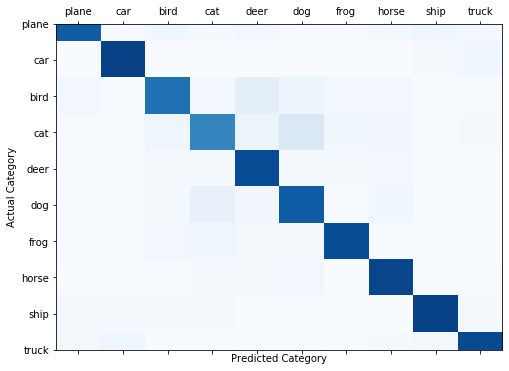

Category   - Accuracy
plane      - 82.8
car        - 93.3
bird       - 75.1
cat        - 67.0
deer       - 89.0
dog        - 82.5
frog       - 88.3
horse      - 91.7
ship       - 92.7
truck      - 89.8

Selected workers

[ 92  87   7  89  29  17 100  60  16  28  91  70  98  64  15]
Worker 92 : is  Stealthy_Attacker
Worker 87 : is  Stealthy_Attacker
Worker 7 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 29 : is  Honest
Worker 17 : is  Honest
Worker 100 : is  Honest
Worker 60 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 28 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 70 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 64 : is  Honest
Worker 15 : is  Honest

 | Global Training Round : 75 |


Worker 92 starts training in Global Round:75 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  75


Train Epoch: 1 [0/500	(1%)]	Loss: 0.977579
Train Epoch: 1 [400/500	(81%)]	Loss: 0.702674
Train Epoch: 2 [0/500	(1%)]	Loss: 0.403869
Train Epoch: 2 [400/500	(81%)]	Loss: 0.376225
Train Epoch: 3 [0/500	(1%)]	Loss: 0.243650
Train Epoch: 3 [400/500	(81%)]	Loss: 0.497638
Train Epoch: 4 [0/500	(1%)]	Loss: 0.233138
Train Epoch: 4 [400/500	(81%)]	Loss: 0.285354
Train Epoch: 5 [0/500	(1%)]	Loss: 0.204675
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220974

Performed attacks 1
Worker 92 ends training in Global Round:75 |

Worker 87 starts training in Global Round:75 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  75


Train Epoch: 1 [0/500	(1%)]	Loss: 1.120291
Train Epoch: 1 [400/500	(81%)]	Loss: 0.649337
Train Epoch: 2 [0/500	(1%)]	Loss: 0.509422
Train Epoch: 2 [400/500	(81%)]	Loss: 0.560680
Train Epoch: 3 [0/500	(1%)]	Loss: 0.194261
Train Epoch: 3 [400/500	(81%)]	Loss: 0.354604
Train Epoch: 4 [0/500	(1%)]	Loss: 0.184538
Train Epoch: 4 [400/500	(81%)]	Loss: 0.324392
Train Epoch: 5 [0/500	(1%)]	Loss: 0.189705
Train Epoch: 5 [400/500	(81%)]	Loss: 0.203603

Performed attacks 2
Worker 87 ends training in Global Round:75 |

Worker 7 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.257645
Train Epoch: 1 [400/500	(81%)]	Loss: 0.210655
Train Epoch: 2 [0/500	(1%)]	Loss: 0.225513
Train Epoch: 2 [400/500	(81%)]	Loss: 0.366406
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151219
Train Epoch: 3 [400/500	(81%)]	Loss: 0.155820
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149490
Train Epoch: 4 [400/500	(81%)]	Loss: 0.258306
Train Epoch: 5 [0/500	(1%)]	Loss: 0.166467
Train Epoch: 5 [400/500	(81%)]	Loss: 0.155460

Worker 7 ends training in Global Round:75 |

Worker 89 starts training in Global Round:75 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  75


Train Epoch: 1 [0/500	(1%)]	Loss: 1.359126
Train Epoch: 1 [400/500	(81%)]	Loss: 0.770187
Train Epoch: 2 [0/500	(1%)]	Loss: 0.240438
Train Epoch: 2 [400/500	(81%)]	Loss: 0.487928
Train Epoch: 3 [0/500	(1%)]	Loss: 0.228563
Train Epoch: 3 [400/500	(81%)]	Loss: 0.464227
Train Epoch: 4 [0/500	(1%)]	Loss: 0.202969
Train Epoch: 4 [400/500	(81%)]	Loss: 0.321814
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157045
Train Epoch: 5 [400/500	(81%)]	Loss: 0.175926

Performed attacks 3
Worker 89 ends training in Global Round:75 |

Worker 29 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.146205
Train Epoch: 1 [400/500	(81%)]	Loss: 0.204934
Train Epoch: 2 [0/500	(1%)]	Loss: 0.108502
Train Epoch: 2 [400/500	(81%)]	Loss: 0.086476
Train Epoch: 3 [0/500	(1%)]	Loss: 0.041783
Train Epoch: 3 [400/500	(81%)]	Loss: 0.052610
Train Epoch: 4 [0/500	(1%)]	Loss: 0.044636
Train Epoch: 4 [400/500	(81%)]	Loss: 0.079304
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112403
Train Epoch: 5 [400/500	(81%)]	Loss: 0.088436

Worker 29 ends training in Global Round:75 |

Worker 17 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.673404
Train Epoch: 1 [400/500	(81%)]	Loss: 0.465409
Train Epoch: 2 [0/500	(1%)]	Loss: 0.168646
Train Epoch: 2 [400/500	(81%)]	Loss: 0.350656
Train Epoch: 3 [0/500	(1%)]	Loss: 0.255282
Train Epoch: 3 [400/500	(81%)]	Loss: 0.167375
Train Epoch: 4 [0/500	(1%)]	Loss: 0.145182
Train Epoch: 4 [400/500	(81%)]	Loss: 0.185130
Train Epoch: 5 [0/500	(1%)]	Loss: 0.140991
Train Epoch: 5 [400/500	(81%)]	Loss: 0.169410

Worker 17 ends training in Global Round:75 |

Worker 100 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.090462
Train Epoch: 1 [400/500	(81%)]	Loss: 0.149319
Train Epoch: 2 [0/500	(1%)]	Loss: 0.077996
Train Epoch: 2 [400/500	(81%)]	Loss: 0.106784
Train Epoch: 3 [0/500	(1%)]	Loss: 0.042784
Train Epoch: 3 [400/500	(81%)]	Loss: 0.048852
Train Epoch: 4 [0/500	(1%)]	Loss: 0.045705
Train Epoch: 4 [400/500	(81%)]	Loss: 0.036162
Train Epoch: 5 [0/500	(1%)]	Loss: 0.045819
Train Epoch: 5 [400/500	(81%)]	Loss: 0.204796

Worker 100 ends training in Global Round:75 |

Worker 60 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.280959
Train Epoch: 1 [400/500	(81%)]	Loss: 0.416776
Train Epoch: 2 [0/500	(1%)]	Loss: 0.099024
Train Epoch: 2 [400/500	(81%)]	Loss: 0.189740
Train Epoch: 3 [0/500	(1%)]	Loss: 0.141340
Train Epoch: 3 [400/500	(81%)]	Loss: 0.274923
Train Epoch: 4 [0/500	(1%)]	Loss: 0.117329
Train Epoch: 4 [400/500	(81%)]	Loss: 0.127000
Train Epoch: 5 [0/500	(1%)]	Loss: 0.109219
Train Epoch: 5 [400/500	(81%)]	Loss: 0.282719

Worker 60 ends training in Global Round:75 |

Worker 16 starts training in Global Round:75 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  75


Train Epoch: 1 [0/500	(1%)]	Loss: 1.362027
Train Epoch: 1 [400/500	(81%)]	Loss: 0.530986
Train Epoch: 2 [0/500	(1%)]	Loss: 0.335772
Train Epoch: 2 [400/500	(81%)]	Loss: 0.477750
Train Epoch: 3 [0/500	(1%)]	Loss: 0.322223
Train Epoch: 3 [400/500	(81%)]	Loss: 0.407213
Train Epoch: 4 [0/500	(1%)]	Loss: 0.171137
Train Epoch: 4 [400/500	(81%)]	Loss: 0.206832
Train Epoch: 5 [0/500	(1%)]	Loss: 0.150506
Train Epoch: 5 [400/500	(81%)]	Loss: 0.156724

Performed attacks 4
Worker 16 ends training in Global Round:75 |

Worker 28 starts training in Global Round:75 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  75


Train Epoch: 1 [0/500	(1%)]	Loss: 1.205869
Train Epoch: 1 [400/500	(81%)]	Loss: 0.815991
Train Epoch: 2 [0/500	(1%)]	Loss: 0.362005
Train Epoch: 2 [400/500	(81%)]	Loss: 0.281078
Train Epoch: 3 [0/500	(1%)]	Loss: 0.225581
Train Epoch: 3 [400/500	(81%)]	Loss: 0.391637
Train Epoch: 4 [0/500	(1%)]	Loss: 0.179585
Train Epoch: 4 [400/500	(81%)]	Loss: 0.114229
Train Epoch: 5 [0/500	(1%)]	Loss: 0.119820
Train Epoch: 5 [400/500	(81%)]	Loss: 0.192710

Performed attacks 5
Worker 28 ends training in Global Round:75 |

Worker 91 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.263278
Train Epoch: 1 [400/500	(81%)]	Loss: 0.125651
Train Epoch: 2 [0/500	(1%)]	Loss: 0.127204
Train Epoch: 2 [400/500	(81%)]	Loss: 0.309184
Train Epoch: 3 [0/500	(1%)]	Loss: 0.146081
Train Epoch: 3 [400/500	(81%)]	Loss: 0.147163
Train Epoch: 4 [0/500	(1%)]	Loss: 0.049499
Train Epoch: 4 [400/500	(81%)]	Loss: 0.127871
Train Epoch: 5 [0/500	(1%)]	Loss: 0.049155
Train Epoch: 5 [400/500	(81%)]	Loss: 0.063400

Worker 91 ends training in Global Round:75 |

Worker 70 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.392126
Train Epoch: 1 [400/500	(81%)]	Loss: 0.331044
Train Epoch: 2 [0/500	(1%)]	Loss: 0.150076
Train Epoch: 2 [400/500	(81%)]	Loss: 0.296699
Train Epoch: 3 [0/500	(1%)]	Loss: 0.150866
Train Epoch: 3 [400/500	(81%)]	Loss: 0.130468
Train Epoch: 4 [0/500	(1%)]	Loss: 0.046879
Train Epoch: 4 [400/500	(81%)]	Loss: 0.251043
Train Epoch: 5 [0/500	(1%)]	Loss: 0.066925
Train Epoch: 5 [400/500	(81%)]	Loss: 0.186356

Worker 70 ends training in Global Round:75 |

Worker 98 starts training in Global Round:75 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  75


Train Epoch: 1 [0/500	(1%)]	Loss: 1.286214
Train Epoch: 1 [400/500	(81%)]	Loss: 0.796684
Train Epoch: 2 [0/500	(1%)]	Loss: 0.261036
Train Epoch: 2 [400/500	(81%)]	Loss: 0.601752
Train Epoch: 3 [0/500	(1%)]	Loss: 0.449796
Train Epoch: 3 [400/500	(81%)]	Loss: 0.518618
Train Epoch: 4 [0/500	(1%)]	Loss: 0.307340
Train Epoch: 4 [400/500	(81%)]	Loss: 0.486313
Train Epoch: 5 [0/500	(1%)]	Loss: 0.264321
Train Epoch: 5 [400/500	(81%)]	Loss: 0.234183

Performed attacks 6
Worker 98 ends training in Global Round:75 |

Worker 64 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.176861
Train Epoch: 1 [400/500	(81%)]	Loss: 0.463052
Train Epoch: 2 [0/500	(1%)]	Loss: 0.163582
Train Epoch: 2 [400/500	(81%)]	Loss: 0.201745
Train Epoch: 3 [0/500	(1%)]	Loss: 0.187031
Train Epoch: 3 [400/500	(81%)]	Loss: 0.095346
Train Epoch: 4 [0/500	(1%)]	Loss: 0.094938
Train Epoch: 4 [400/500	(81%)]	Loss: 0.126773
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089465
Train Epoch: 5 [400/500	(81%)]	Loss: 0.066432

Worker 64 ends training in Global Round:75 |

Worker 15 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.330918
Train Epoch: 1 [400/500	(81%)]	Loss: 0.321804
Train Epoch: 2 [0/500	(1%)]	Loss: 0.333639
Train Epoch: 2 [400/500	(81%)]	Loss: 0.267354
Train Epoch: 3 [0/500	(1%)]	Loss: 0.050607
Train Epoch: 3 [400/500	(81%)]	Loss: 0.235369
Train Epoch: 4 [0/500	(1%)]	Loss: 0.113244
Train Epoch: 4 [400/500	(81%)]	Loss: 0.320936
Train Epoch: 5 [0/500	(1%)]	Loss: 0.159111
Train Epoch: 5 [400/500	(81%)]	Loss: 0.173956

Worker 15 ends training in Global Round:75 |
Last layer biases  [array([ 0.0371574 , -0.03111573, -0.01417394,  0.04040744,  0.0502234 ,
       -0.0110864 ,  0.03850925, -0.03041461, -0.02199636, -0.04160867],
      dtype=float32), array([ 0.03664118, -0.03079228, -0.01194052,  0.04035042,  0.0518532 ,
       -0.01386185,  0.0388565 , -0.03255283, -0.02502649, -0.03762551],
      dtype=float32), array([ 0.03494401, -0.03388485, -0.01476313,  0.03759558,  0.04048202,
       -0.01516097,  0.03872544, -0.0084353 , -0.02367248, -0.03992853],
      dtyp

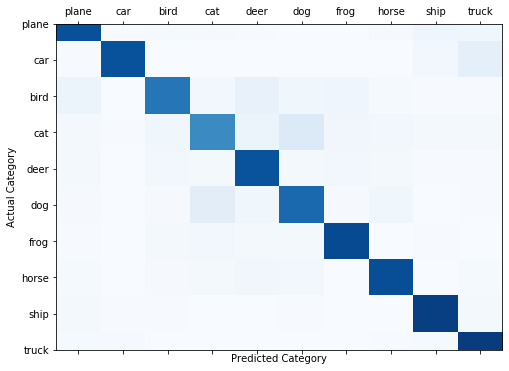

Category   - Accuracy
plane      - 87.5
car        - 86.8
bird       - 72.7
cat        - 65.1
deer       - 86.4
dog        - 78.4
frog       - 89.8
horse      - 88.5
ship       - 93.8
truck      - 95.1

Selected workers

[ 86  40  18  37  87 100  27  45  56   6  38  43  72  14  32]
Worker 86 : is  Stealthy_Attacker
Worker 40 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 37 : is  Stealthy_Attacker
Worker 87 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 45 : is  Honest
Worker 56 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 14 : is  Stealthy_Attacker
Worker 32 : is  Honest

 | Global Training Round : 76 |


Worker 86 starts training in Global Round:76 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  76


Train Epoch: 1 [0/500	(1%)]	Loss: 1.337752
Train Epoch: 1 [400/500	(81%)]	Loss: 0.432455
Train Epoch: 2 [0/500	(1%)]	Loss: 0.273187
Train Epoch: 2 [400/500	(81%)]	Loss: 0.284042
Train Epoch: 3 [0/500	(1%)]	Loss: 0.196410
Train Epoch: 3 [400/500	(81%)]	Loss: 0.199245
Train Epoch: 4 [0/500	(1%)]	Loss: 0.211540
Train Epoch: 4 [400/500	(81%)]	Loss: 0.215117
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126657
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135201

Performed attacks 1
Worker 86 ends training in Global Round:76 |

Worker 40 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.215335
Train Epoch: 1 [400/500	(81%)]	Loss: 0.237977
Train Epoch: 2 [0/500	(1%)]	Loss: 0.165866
Train Epoch: 2 [400/500	(81%)]	Loss: 0.409823
Train Epoch: 3 [0/500	(1%)]	Loss: 0.242160
Train Epoch: 3 [400/500	(81%)]	Loss: 0.166498
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143388
Train Epoch: 4 [400/500	(81%)]	Loss: 0.145040
Train Epoch: 5 [0/500	(1%)]	Loss: 0.077512
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135622

Worker 40 ends training in Global Round:76 |

Worker 18 starts training in Global Round:76 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  76


Train Epoch: 1 [0/500	(1%)]	Loss: 1.394632
Train Epoch: 1 [400/500	(81%)]	Loss: 0.360436
Train Epoch: 2 [0/500	(1%)]	Loss: 0.223989
Train Epoch: 2 [400/500	(81%)]	Loss: 0.362545
Train Epoch: 3 [0/500	(1%)]	Loss: 0.133780
Train Epoch: 3 [400/500	(81%)]	Loss: 0.244349
Train Epoch: 4 [0/500	(1%)]	Loss: 0.146092
Train Epoch: 4 [400/500	(81%)]	Loss: 0.157502
Train Epoch: 5 [0/500	(1%)]	Loss: 0.086971
Train Epoch: 5 [400/500	(81%)]	Loss: 0.209326

Performed attacks 2
Worker 18 ends training in Global Round:76 |

Worker 37 starts training in Global Round:76 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  76


Train Epoch: 1 [0/500	(1%)]	Loss: 1.155042
Train Epoch: 1 [400/500	(81%)]	Loss: 0.583969
Train Epoch: 2 [0/500	(1%)]	Loss: 0.199035
Train Epoch: 2 [400/500	(81%)]	Loss: 0.550670
Train Epoch: 3 [0/500	(1%)]	Loss: 0.239853
Train Epoch: 3 [400/500	(81%)]	Loss: 0.363802
Train Epoch: 4 [0/500	(1%)]	Loss: 0.193326
Train Epoch: 4 [400/500	(81%)]	Loss: 0.200355
Train Epoch: 5 [0/500	(1%)]	Loss: 0.181810
Train Epoch: 5 [400/500	(81%)]	Loss: 0.339788

Performed attacks 3
Worker 37 ends training in Global Round:76 |

Worker 87 starts training in Global Round:76 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  76


Train Epoch: 1 [0/500	(1%)]	Loss: 1.044799
Train Epoch: 1 [400/500	(81%)]	Loss: 0.822596
Train Epoch: 2 [0/500	(1%)]	Loss: 0.410050
Train Epoch: 2 [400/500	(81%)]	Loss: 0.454766
Train Epoch: 3 [0/500	(1%)]	Loss: 0.331332
Train Epoch: 3 [400/500	(81%)]	Loss: 0.325222
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187028
Train Epoch: 4 [400/500	(81%)]	Loss: 0.265972
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128075
Train Epoch: 5 [400/500	(81%)]	Loss: 0.259425

Performed attacks 4
Worker 87 ends training in Global Round:76 |

Worker 100 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.125491
Train Epoch: 1 [400/500	(81%)]	Loss: 0.162289
Train Epoch: 2 [0/500	(1%)]	Loss: 0.059428
Train Epoch: 2 [400/500	(81%)]	Loss: 0.144854
Train Epoch: 3 [0/500	(1%)]	Loss: 0.074642
Train Epoch: 3 [400/500	(81%)]	Loss: 0.063431
Train Epoch: 4 [0/500	(1%)]	Loss: 0.052444
Train Epoch: 4 [400/500	(81%)]	Loss: 0.080985
Train Epoch: 5 [0/500	(1%)]	Loss: 0.101886
Train Epoch: 5 [400/500	(81%)]	Loss: 0.027487

Worker 100 ends training in Global Round:76 |

Worker 27 starts training in Global Round:76 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  76


Train Epoch: 1 [0/500	(1%)]	Loss: 1.262295
Train Epoch: 1 [400/500	(81%)]	Loss: 0.663038
Train Epoch: 2 [0/500	(1%)]	Loss: 0.360389
Train Epoch: 2 [400/500	(81%)]	Loss: 0.522602
Train Epoch: 3 [0/500	(1%)]	Loss: 0.308989
Train Epoch: 3 [400/500	(81%)]	Loss: 0.275737
Train Epoch: 4 [0/500	(1%)]	Loss: 0.232106
Train Epoch: 4 [400/500	(81%)]	Loss: 0.207686
Train Epoch: 5 [0/500	(1%)]	Loss: 0.209005
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117257

Performed attacks 5
Worker 27 ends training in Global Round:76 |

Worker 45 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.198305
Train Epoch: 1 [400/500	(81%)]	Loss: 0.301430
Train Epoch: 2 [0/500	(1%)]	Loss: 0.115050
Train Epoch: 2 [400/500	(81%)]	Loss: 0.204218
Train Epoch: 3 [0/500	(1%)]	Loss: 0.093118
Train Epoch: 3 [400/500	(81%)]	Loss: 0.124630
Train Epoch: 4 [0/500	(1%)]	Loss: 0.124730
Train Epoch: 4 [400/500	(81%)]	Loss: 0.202478
Train Epoch: 5 [0/500	(1%)]	Loss: 0.119840
Train Epoch: 5 [400/500	(81%)]	Loss: 0.045802

Worker 45 ends training in Global Round:76 |

Worker 56 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.180033
Train Epoch: 1 [400/500	(81%)]	Loss: 0.182021
Train Epoch: 2 [0/500	(1%)]	Loss: 0.132857
Train Epoch: 2 [400/500	(81%)]	Loss: 0.101781
Train Epoch: 3 [0/500	(1%)]	Loss: 0.112434
Train Epoch: 3 [400/500	(81%)]	Loss: 0.135675
Train Epoch: 4 [0/500	(1%)]	Loss: 0.080846
Train Epoch: 4 [400/500	(81%)]	Loss: 0.116546
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124287
Train Epoch: 5 [400/500	(81%)]	Loss: 0.119117

Worker 56 ends training in Global Round:76 |

Worker 6 starts training in Global Round:76 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  76


Train Epoch: 1 [0/500	(1%)]	Loss: 1.304039
Train Epoch: 1 [400/500	(81%)]	Loss: 0.741254
Train Epoch: 2 [0/500	(1%)]	Loss: 0.307310
Train Epoch: 2 [400/500	(81%)]	Loss: 0.386042
Train Epoch: 3 [0/500	(1%)]	Loss: 0.245463
Train Epoch: 3 [400/500	(81%)]	Loss: 0.324488
Train Epoch: 4 [0/500	(1%)]	Loss: 0.262859
Train Epoch: 4 [400/500	(81%)]	Loss: 0.110424
Train Epoch: 5 [0/500	(1%)]	Loss: 0.186006
Train Epoch: 5 [400/500	(81%)]	Loss: 0.138959

Performed attacks 6
Worker 6 ends training in Global Round:76 |

Worker 38 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.565825
Train Epoch: 1 [400/500	(81%)]	Loss: 0.243442
Train Epoch: 2 [0/500	(1%)]	Loss: 0.340630
Train Epoch: 2 [400/500	(81%)]	Loss: 0.464049
Train Epoch: 3 [0/500	(1%)]	Loss: 0.275557
Train Epoch: 3 [400/500	(81%)]	Loss: 0.268728
Train Epoch: 4 [0/500	(1%)]	Loss: 0.150502
Train Epoch: 4 [400/500	(81%)]	Loss: 0.170352
Train Epoch: 5 [0/500	(1%)]	Loss: 0.167647
Train Epoch: 5 [400/500	(81%)]	Loss: 0.237410

Worker 38 ends training in Global Round:76 |

Worker 43 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.219606
Train Epoch: 1 [400/500	(81%)]	Loss: 0.220182
Train Epoch: 2 [0/500	(1%)]	Loss: 0.138546
Train Epoch: 2 [400/500	(81%)]	Loss: 0.204398
Train Epoch: 3 [0/500	(1%)]	Loss: 0.095380
Train Epoch: 3 [400/500	(81%)]	Loss: 0.125361
Train Epoch: 4 [0/500	(1%)]	Loss: 0.109467
Train Epoch: 4 [400/500	(81%)]	Loss: 0.217717
Train Epoch: 5 [0/500	(1%)]	Loss: 0.080761
Train Epoch: 5 [400/500	(81%)]	Loss: 0.126742

Worker 43 ends training in Global Round:76 |

Worker 72 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.624719
Train Epoch: 1 [400/500	(81%)]	Loss: 0.517598
Train Epoch: 2 [0/500	(1%)]	Loss: 0.525484
Train Epoch: 2 [400/500	(81%)]	Loss: 0.298415
Train Epoch: 3 [0/500	(1%)]	Loss: 0.134945
Train Epoch: 3 [400/500	(81%)]	Loss: 0.270031
Train Epoch: 4 [0/500	(1%)]	Loss: 0.154696
Train Epoch: 4 [400/500	(81%)]	Loss: 0.248826
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133435
Train Epoch: 5 [400/500	(81%)]	Loss: 0.090736

Worker 72 ends training in Global Round:76 |

Worker 14 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.605792
Train Epoch: 1 [400/500	(81%)]	Loss: 0.370773
Train Epoch: 2 [0/500	(1%)]	Loss: 0.230784
Train Epoch: 2 [400/500	(81%)]	Loss: 0.212054
Train Epoch: 3 [0/500	(1%)]	Loss: 0.203566
Train Epoch: 3 [400/500	(81%)]	Loss: 0.194080
Train Epoch: 4 [0/500	(1%)]	Loss: 0.232342
Train Epoch: 4 [400/500	(81%)]	Loss: 0.220052
Train Epoch: 5 [0/500	(1%)]	Loss: 0.140001
Train Epoch: 5 [400/500	(81%)]	Loss: 0.172175

Worker 14 ends training in Global Round:76 |

Worker 32 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.426161
Train Epoch: 1 [400/500	(81%)]	Loss: 0.391328
Train Epoch: 2 [0/500	(1%)]	Loss: 0.126549
Train Epoch: 2 [400/500	(81%)]	Loss: 0.207614
Train Epoch: 3 [0/500	(1%)]	Loss: 0.081813
Train Epoch: 3 [400/500	(81%)]	Loss: 0.179046
Train Epoch: 4 [0/500	(1%)]	Loss: 0.059135
Train Epoch: 4 [400/500	(81%)]	Loss: 0.150685
Train Epoch: 5 [0/500	(1%)]	Loss: 0.069592
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117568

Worker 32 ends training in Global Round:76 |
Last layer biases  [array([ 0.03590601, -0.02975474, -0.01208236,  0.03933287,  0.05193961,
       -0.01260347,  0.04021869, -0.0319673 , -0.02233185, -0.04275564],
      dtype=float32), array([ 0.03480809, -0.03193133, -0.01552842,  0.03903658,  0.0414889 ,
       -0.01603445,  0.03800196, -0.00802271, -0.02306254, -0.04285431],
      dtype=float32), array([ 0.03494929, -0.0334404 , -0.01208238,  0.0385845 ,  0.05267072,
       -0.01105031,  0.03934397, -0.02999226, -0.02221436, -0.04086698],
      dtyp

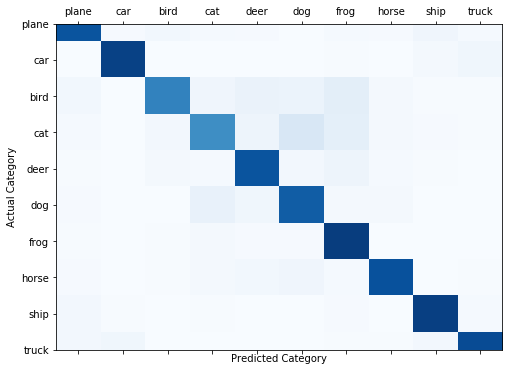

Category   - Accuracy
plane      - 86.1
car        - 93.0
bird       - 68.2
cat        - 64.0
deer       - 86.3
dog        - 82.7
frog       - 94.6
horse      - 87.2
ship       - 93.8
truck      - 89.2

Selected workers

[ 26  68  30 100  39  80  31  78   5  95  99  13  93  55  17]
Worker 26 : is  Honest
Worker 68 : is  Honest
Worker 30 : is  Honest
Worker 100 : is  Honest
Worker 39 : is  Honest
Worker 80 : is  Honest
Worker 31 : is  Stealthy_Attacker
Worker 78 : is  Honest
Worker 5 : is  Honest
Worker 95 : is  Honest
Worker 99 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 93 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 17 : is  Honest

 | Global Training Round : 77 |


Worker 26 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.263582
Train Epoch: 1 [400/500	(81%)]	Loss: 0.396773
Train Epoch: 2 [0/500	(1%)]	Loss: 0.132370
Train Epoch: 2 [400/500	(81%)]	Loss: 0.348369
Train Epoch: 3 [0/500	(1%)]	Loss: 0.101504
Train Epoch: 3 [400/500	(81%)]	Loss: 0.212035
Train Epoch: 4 [0/500	(1%)]	Loss: 0.137324
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169261
Train Epoch: 5 [0/500	(1%)]	Loss: 0.105514
Train Epoch: 5 [400/500	(81%)]	Loss: 0.127461

Worker 26 ends training in Global Round:77 |

Worker 68 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.362786
Train Epoch: 1 [400/500	(81%)]	Loss: 0.231585
Train Epoch: 2 [0/500	(1%)]	Loss: 0.085689
Train Epoch: 2 [400/500	(81%)]	Loss: 0.305915
Train Epoch: 3 [0/500	(1%)]	Loss: 0.101127
Train Epoch: 3 [400/500	(81%)]	Loss: 0.113156
Train Epoch: 4 [0/500	(1%)]	Loss: 0.131466
Train Epoch: 4 [400/500	(81%)]	Loss: 0.170929
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106809
Train Epoch: 5 [400/500	(81%)]	Loss: 0.285476

Worker 68 ends training in Global Round:77 |

Worker 30 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.280961
Train Epoch: 1 [400/500	(81%)]	Loss: 0.215581
Train Epoch: 2 [0/500	(1%)]	Loss: 0.156255
Train Epoch: 2 [400/500	(81%)]	Loss: 0.157197
Train Epoch: 3 [0/500	(1%)]	Loss: 0.055016
Train Epoch: 3 [400/500	(81%)]	Loss: 0.152347
Train Epoch: 4 [0/500	(1%)]	Loss: 0.076727
Train Epoch: 4 [400/500	(81%)]	Loss: 0.191540
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110456
Train Epoch: 5 [400/500	(81%)]	Loss: 0.201684

Worker 30 ends training in Global Round:77 |

Worker 100 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.092707
Train Epoch: 1 [400/500	(81%)]	Loss: 0.074626
Train Epoch: 2 [0/500	(1%)]	Loss: 0.038351
Train Epoch: 2 [400/500	(81%)]	Loss: 0.057198
Train Epoch: 3 [0/500	(1%)]	Loss: 0.061983
Train Epoch: 3 [400/500	(81%)]	Loss: 0.082542
Train Epoch: 4 [0/500	(1%)]	Loss: 0.050481
Train Epoch: 4 [400/500	(81%)]	Loss: 0.025656
Train Epoch: 5 [0/500	(1%)]	Loss: 0.023849
Train Epoch: 5 [400/500	(81%)]	Loss: 0.030398

Worker 100 ends training in Global Round:77 |

Worker 39 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.267929
Train Epoch: 1 [400/500	(81%)]	Loss: 0.240340
Train Epoch: 2 [0/500	(1%)]	Loss: 0.158944
Train Epoch: 2 [400/500	(81%)]	Loss: 0.132930
Train Epoch: 3 [0/500	(1%)]	Loss: 0.101399
Train Epoch: 3 [400/500	(81%)]	Loss: 0.097564
Train Epoch: 4 [0/500	(1%)]	Loss: 0.052816
Train Epoch: 4 [400/500	(81%)]	Loss: 0.080033
Train Epoch: 5 [0/500	(1%)]	Loss: 0.066821
Train Epoch: 5 [400/500	(81%)]	Loss: 0.071446

Worker 39 ends training in Global Round:77 |

Worker 80 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.252255
Train Epoch: 1 [400/500	(81%)]	Loss: 0.250102
Train Epoch: 2 [0/500	(1%)]	Loss: 0.092621
Train Epoch: 2 [400/500	(81%)]	Loss: 0.170399
Train Epoch: 3 [0/500	(1%)]	Loss: 0.076499
Train Epoch: 3 [400/500	(81%)]	Loss: 0.071619
Train Epoch: 4 [0/500	(1%)]	Loss: 0.089432
Train Epoch: 4 [400/500	(81%)]	Loss: 0.055154
Train Epoch: 5 [0/500	(1%)]	Loss: 0.058506
Train Epoch: 5 [400/500	(81%)]	Loss: 0.047668

Worker 80 ends training in Global Round:77 |

Worker 31 starts training in Global Round:77 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  77


Train Epoch: 1 [0/500	(1%)]	Loss: 1.097577
Train Epoch: 1 [400/500	(81%)]	Loss: 0.722623
Train Epoch: 2 [0/500	(1%)]	Loss: 0.314292
Train Epoch: 2 [400/500	(81%)]	Loss: 0.511583
Train Epoch: 3 [0/500	(1%)]	Loss: 0.309290
Train Epoch: 3 [400/500	(81%)]	Loss: 0.347176
Train Epoch: 4 [0/500	(1%)]	Loss: 0.253440
Train Epoch: 4 [400/500	(81%)]	Loss: 0.287882
Train Epoch: 5 [0/500	(1%)]	Loss: 0.239307
Train Epoch: 5 [400/500	(81%)]	Loss: 0.204150

Performed attacks 1
Worker 31 ends training in Global Round:77 |

Worker 78 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.319948
Train Epoch: 1 [400/500	(81%)]	Loss: 0.194530
Train Epoch: 2 [0/500	(1%)]	Loss: 0.219902
Train Epoch: 2 [400/500	(81%)]	Loss: 0.180212
Train Epoch: 3 [0/500	(1%)]	Loss: 0.102282
Train Epoch: 3 [400/500	(81%)]	Loss: 0.208870
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119507
Train Epoch: 4 [400/500	(81%)]	Loss: 0.165808
Train Epoch: 5 [0/500	(1%)]	Loss: 0.072700
Train Epoch: 5 [400/500	(81%)]	Loss: 0.185773

Worker 78 ends training in Global Round:77 |

Worker 5 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.193664
Train Epoch: 1 [400/500	(81%)]	Loss: 0.369795
Train Epoch: 2 [0/500	(1%)]	Loss: 0.103299
Train Epoch: 2 [400/500	(81%)]	Loss: 0.141044
Train Epoch: 3 [0/500	(1%)]	Loss: 0.077262
Train Epoch: 3 [400/500	(81%)]	Loss: 0.155554
Train Epoch: 4 [0/500	(1%)]	Loss: 0.104391
Train Epoch: 4 [400/500	(81%)]	Loss: 0.199727
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111984
Train Epoch: 5 [400/500	(81%)]	Loss: 0.090022

Worker 5 ends training in Global Round:77 |

Worker 95 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.282500
Train Epoch: 1 [400/500	(81%)]	Loss: 0.343593
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209606
Train Epoch: 2 [400/500	(81%)]	Loss: 0.200888
Train Epoch: 3 [0/500	(1%)]	Loss: 0.159240
Train Epoch: 3 [400/500	(81%)]	Loss: 0.213340
Train Epoch: 4 [0/500	(1%)]	Loss: 0.074459
Train Epoch: 4 [400/500	(81%)]	Loss: 0.171676
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064749
Train Epoch: 5 [400/500	(81%)]	Loss: 0.108911

Worker 95 ends training in Global Round:77 |

Worker 99 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.163103
Train Epoch: 1 [400/500	(81%)]	Loss: 0.093065
Train Epoch: 2 [0/500	(1%)]	Loss: 0.059728
Train Epoch: 2 [400/500	(81%)]	Loss: 0.104396
Train Epoch: 3 [0/500	(1%)]	Loss: 0.039059
Train Epoch: 3 [400/500	(81%)]	Loss: 0.136637
Train Epoch: 4 [0/500	(1%)]	Loss: 0.081310
Train Epoch: 4 [400/500	(81%)]	Loss: 0.155124
Train Epoch: 5 [0/500	(1%)]	Loss: 0.076811
Train Epoch: 5 [400/500	(81%)]	Loss: 0.154367

Worker 99 ends training in Global Round:77 |

Worker 13 starts training in Global Round:77 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  77


Train Epoch: 1 [0/500	(1%)]	Loss: 1.689181
Train Epoch: 1 [400/500	(81%)]	Loss: 0.427501
Train Epoch: 2 [0/500	(1%)]	Loss: 0.206247
Train Epoch: 2 [400/500	(81%)]	Loss: 0.250166
Train Epoch: 3 [0/500	(1%)]	Loss: 0.310843
Train Epoch: 3 [400/500	(81%)]	Loss: 0.202640
Train Epoch: 4 [0/500	(1%)]	Loss: 0.139288
Train Epoch: 4 [400/500	(81%)]	Loss: 0.242542
Train Epoch: 5 [0/500	(1%)]	Loss: 0.233300
Train Epoch: 5 [400/500	(81%)]	Loss: 0.322422

Performed attacks 2
Worker 13 ends training in Global Round:77 |

Worker 93 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.221748
Train Epoch: 1 [400/500	(81%)]	Loss: 0.254442
Train Epoch: 2 [0/500	(1%)]	Loss: 0.161565
Train Epoch: 2 [400/500	(81%)]	Loss: 0.192044
Train Epoch: 3 [0/500	(1%)]	Loss: 0.109933
Train Epoch: 3 [400/500	(81%)]	Loss: 0.200993
Train Epoch: 4 [0/500	(1%)]	Loss: 0.135894
Train Epoch: 4 [400/500	(81%)]	Loss: 0.149672
Train Epoch: 5 [0/500	(1%)]	Loss: 0.092780
Train Epoch: 5 [400/500	(81%)]	Loss: 0.143218

Worker 93 ends training in Global Round:77 |

Worker 55 starts training in Global Round:77 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  77


Train Epoch: 1 [0/500	(1%)]	Loss: 1.511761
Train Epoch: 1 [400/500	(81%)]	Loss: 0.565715
Train Epoch: 2 [0/500	(1%)]	Loss: 0.242593
Train Epoch: 2 [400/500	(81%)]	Loss: 0.266625
Train Epoch: 3 [0/500	(1%)]	Loss: 0.253064
Train Epoch: 3 [400/500	(81%)]	Loss: 0.420689
Train Epoch: 4 [0/500	(1%)]	Loss: 0.188600
Train Epoch: 4 [400/500	(81%)]	Loss: 0.289762
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182939
Train Epoch: 5 [400/500	(81%)]	Loss: 0.174305

Performed attacks 3
Worker 55 ends training in Global Round:77 |

Worker 17 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.300084
Train Epoch: 1 [400/500	(81%)]	Loss: 0.350857
Train Epoch: 2 [0/500	(1%)]	Loss: 0.128882
Train Epoch: 2 [400/500	(81%)]	Loss: 0.225309
Train Epoch: 3 [0/500	(1%)]	Loss: 0.202876
Train Epoch: 3 [400/500	(81%)]	Loss: 0.256060
Train Epoch: 4 [0/500	(1%)]	Loss: 0.174383
Train Epoch: 4 [400/500	(81%)]	Loss: 0.164002
Train Epoch: 5 [0/500	(1%)]	Loss: 0.109755
Train Epoch: 5 [400/500	(81%)]	Loss: 0.195116

Worker 17 ends training in Global Round:77 |
Last layer biases  [array([ 0.03769067, -0.03137596, -0.0149919 ,  0.04207958,  0.03792409,
       -0.01731685,  0.03627425, -0.00811321, -0.0229817 , -0.04328724],
      dtype=float32), array([ 0.03433592, -0.03209928, -0.0162618 ,  0.03912446,  0.04279133,
       -0.0147264 ,  0.03883586, -0.00847817, -0.02373848, -0.04388165],
      dtype=float32), array([ 0.03320714, -0.03303082, -0.01590267,  0.03811042,  0.03982941,
       -0.01345524,  0.04009838, -0.00822061, -0.02121929, -0.04351497],
      dtyp

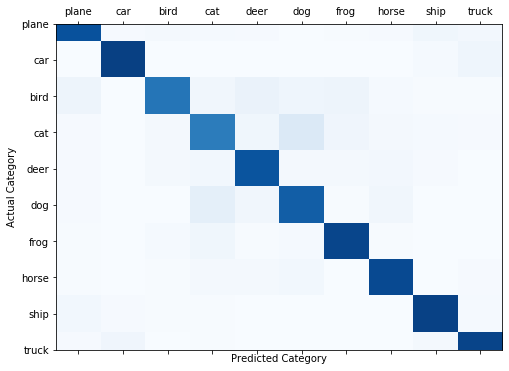

Category   - Accuracy
plane      - 87.2
car        - 93.4
bird       - 73.1
cat        - 70.6
deer       - 86.2
dog        - 82.2
frog       - 91.5
horse      - 90.2
ship       - 93.2
truck      - 92.1

Selected workers

[33 38 65 20 73 16 39 87 31  7  3 82 23 30 36]
Worker 33 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 20 : is  Honest
Worker 73 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 39 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 31 : is  Stealthy_Attacker
Worker 7 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 36 : is  Honest

 | Global Training Round : 78 |


Worker 33 starts training in Global Round:78 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  78


Train Epoch: 1 [0/500	(1%)]	Loss: 1.647641
Train Epoch: 1 [400/500	(81%)]	Loss: 0.645990
Train Epoch: 2 [0/500	(1%)]	Loss: 0.433235
Train Epoch: 2 [400/500	(81%)]	Loss: 0.154985
Train Epoch: 3 [0/500	(1%)]	Loss: 0.235005
Train Epoch: 3 [400/500	(81%)]	Loss: 0.361290
Train Epoch: 4 [0/500	(1%)]	Loss: 0.252095
Train Epoch: 4 [400/500	(81%)]	Loss: 0.228921
Train Epoch: 5 [0/500	(1%)]	Loss: 0.143807
Train Epoch: 5 [400/500	(81%)]	Loss: 0.223959

Performed attacks 1
Worker 33 ends training in Global Round:78 |

Worker 38 starts training in Global Round:78 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  78


Train Epoch: 1 [0/500	(1%)]	Loss: 0.869139
Train Epoch: 1 [400/500	(81%)]	Loss: 0.373927
Train Epoch: 2 [0/500	(1%)]	Loss: 0.327707
Train Epoch: 2 [400/500	(81%)]	Loss: 0.456322
Train Epoch: 3 [0/500	(1%)]	Loss: 0.248373
Train Epoch: 3 [400/500	(81%)]	Loss: 0.268915
Train Epoch: 4 [0/500	(1%)]	Loss: 0.265496
Train Epoch: 4 [400/500	(81%)]	Loss: 0.337190
Train Epoch: 5 [0/500	(1%)]	Loss: 0.137636
Train Epoch: 5 [400/500	(81%)]	Loss: 0.282719

Performed attacks 2
Worker 38 ends training in Global Round:78 |

Worker 65 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.190825
Train Epoch: 1 [400/500	(81%)]	Loss: 0.265382
Train Epoch: 2 [0/500	(1%)]	Loss: 0.108699
Train Epoch: 2 [400/500	(81%)]	Loss: 0.185622
Train Epoch: 3 [0/500	(1%)]	Loss: 0.030240
Train Epoch: 3 [400/500	(81%)]	Loss: 0.102886
Train Epoch: 4 [0/500	(1%)]	Loss: 0.151779
Train Epoch: 4 [400/500	(81%)]	Loss: 0.161669
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127548
Train Epoch: 5 [400/500	(81%)]	Loss: 0.154843

Worker 65 ends training in Global Round:78 |

Worker 20 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.160396
Train Epoch: 1 [400/500	(81%)]	Loss: 0.227175
Train Epoch: 2 [0/500	(1%)]	Loss: 0.137571
Train Epoch: 2 [400/500	(81%)]	Loss: 0.209011
Train Epoch: 3 [0/500	(1%)]	Loss: 0.044668
Train Epoch: 3 [400/500	(81%)]	Loss: 0.139956
Train Epoch: 4 [0/500	(1%)]	Loss: 0.094463
Train Epoch: 4 [400/500	(81%)]	Loss: 0.076408
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089559
Train Epoch: 5 [400/500	(81%)]	Loss: 0.080798

Worker 20 ends training in Global Round:78 |

Worker 73 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.185788
Train Epoch: 1 [400/500	(81%)]	Loss: 0.142664
Train Epoch: 2 [0/500	(1%)]	Loss: 0.101840
Train Epoch: 2 [400/500	(81%)]	Loss: 0.091769
Train Epoch: 3 [0/500	(1%)]	Loss: 0.082814
Train Epoch: 3 [400/500	(81%)]	Loss: 0.148333
Train Epoch: 4 [0/500	(1%)]	Loss: 0.048302
Train Epoch: 4 [400/500	(81%)]	Loss: 0.069043
Train Epoch: 5 [0/500	(1%)]	Loss: 0.059629
Train Epoch: 5 [400/500	(81%)]	Loss: 0.102805

Worker 73 ends training in Global Round:78 |

Worker 16 starts training in Global Round:78 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  78


Train Epoch: 1 [0/500	(1%)]	Loss: 1.295923
Train Epoch: 1 [400/500	(81%)]	Loss: 0.640582
Train Epoch: 2 [0/500	(1%)]	Loss: 0.284566
Train Epoch: 2 [400/500	(81%)]	Loss: 0.411918
Train Epoch: 3 [0/500	(1%)]	Loss: 0.229689
Train Epoch: 3 [400/500	(81%)]	Loss: 0.368332
Train Epoch: 4 [0/500	(1%)]	Loss: 0.144260
Train Epoch: 4 [400/500	(81%)]	Loss: 0.404271
Train Epoch: 5 [0/500	(1%)]	Loss: 0.174248
Train Epoch: 5 [400/500	(81%)]	Loss: 0.297538

Performed attacks 3
Worker 16 ends training in Global Round:78 |

Worker 39 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.129330
Train Epoch: 1 [400/500	(81%)]	Loss: 0.102034
Train Epoch: 2 [0/500	(1%)]	Loss: 0.070707
Train Epoch: 2 [400/500	(81%)]	Loss: 0.082808
Train Epoch: 3 [0/500	(1%)]	Loss: 0.045420
Train Epoch: 3 [400/500	(81%)]	Loss: 0.123698
Train Epoch: 4 [0/500	(1%)]	Loss: 0.053665
Train Epoch: 4 [400/500	(81%)]	Loss: 0.065514
Train Epoch: 5 [0/500	(1%)]	Loss: 0.076015
Train Epoch: 5 [400/500	(81%)]	Loss: 0.050843

Worker 39 ends training in Global Round:78 |

Worker 87 starts training in Global Round:78 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  78


Train Epoch: 1 [0/500	(1%)]	Loss: 1.572159
Train Epoch: 1 [400/500	(81%)]	Loss: 0.578345
Train Epoch: 2 [0/500	(1%)]	Loss: 0.203778
Train Epoch: 2 [400/500	(81%)]	Loss: 0.446077
Train Epoch: 3 [0/500	(1%)]	Loss: 0.439460
Train Epoch: 3 [400/500	(81%)]	Loss: 0.327588
Train Epoch: 4 [0/500	(1%)]	Loss: 0.169283
Train Epoch: 4 [400/500	(81%)]	Loss: 0.235819
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118798
Train Epoch: 5 [400/500	(81%)]	Loss: 0.179368

Performed attacks 4
Worker 87 ends training in Global Round:78 |

Worker 31 starts training in Global Round:78 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  78


Train Epoch: 1 [0/500	(1%)]	Loss: 1.343183
Train Epoch: 1 [400/500	(81%)]	Loss: 0.518687
Train Epoch: 2 [0/500	(1%)]	Loss: 0.214769
Train Epoch: 2 [400/500	(81%)]	Loss: 0.331524
Train Epoch: 3 [0/500	(1%)]	Loss: 0.319554
Train Epoch: 3 [400/500	(81%)]	Loss: 0.366073
Train Epoch: 4 [0/500	(1%)]	Loss: 0.175584
Train Epoch: 4 [400/500	(81%)]	Loss: 0.208015
Train Epoch: 5 [0/500	(1%)]	Loss: 0.325956
Train Epoch: 5 [400/500	(81%)]	Loss: 0.198600

Performed attacks 5
Worker 31 ends training in Global Round:78 |

Worker 7 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.340427
Train Epoch: 1 [400/500	(81%)]	Loss: 0.323323
Train Epoch: 2 [0/500	(1%)]	Loss: 0.103003
Train Epoch: 2 [400/500	(81%)]	Loss: 0.172831
Train Epoch: 3 [0/500	(1%)]	Loss: 0.067336
Train Epoch: 3 [400/500	(81%)]	Loss: 0.074227
Train Epoch: 4 [0/500	(1%)]	Loss: 0.107016
Train Epoch: 4 [400/500	(81%)]	Loss: 0.229112
Train Epoch: 5 [0/500	(1%)]	Loss: 0.069932
Train Epoch: 5 [400/500	(81%)]	Loss: 0.046742

Worker 7 ends training in Global Round:78 |

Worker 3 starts training in Global Round:78 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  78


Train Epoch: 1 [0/500	(1%)]	Loss: 1.179269
Train Epoch: 1 [400/500	(81%)]	Loss: 0.641884
Train Epoch: 2 [0/500	(1%)]	Loss: 0.168112
Train Epoch: 2 [400/500	(81%)]	Loss: 0.555935
Train Epoch: 3 [0/500	(1%)]	Loss: 0.287951
Train Epoch: 3 [400/500	(81%)]	Loss: 0.333699
Train Epoch: 4 [0/500	(1%)]	Loss: 0.338589
Train Epoch: 4 [400/500	(81%)]	Loss: 0.223505
Train Epoch: 5 [0/500	(1%)]	Loss: 0.129165
Train Epoch: 5 [400/500	(81%)]	Loss: 0.209316

Performed attacks 6
Worker 3 ends training in Global Round:78 |

Worker 82 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.234509
Train Epoch: 1 [400/500	(81%)]	Loss: 0.344793
Train Epoch: 2 [0/500	(1%)]	Loss: 0.161114
Train Epoch: 2 [400/500	(81%)]	Loss: 0.294220
Train Epoch: 3 [0/500	(1%)]	Loss: 0.233515
Train Epoch: 3 [400/500	(81%)]	Loss: 0.353011
Train Epoch: 4 [0/500	(1%)]	Loss: 0.079717
Train Epoch: 4 [400/500	(81%)]	Loss: 0.289390
Train Epoch: 5 [0/500	(1%)]	Loss: 0.095662
Train Epoch: 5 [400/500	(81%)]	Loss: 0.102923

Worker 82 ends training in Global Round:78 |

Worker 23 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.497785
Train Epoch: 1 [400/500	(81%)]	Loss: 0.638353
Train Epoch: 2 [0/500	(1%)]	Loss: 0.229848
Train Epoch: 2 [400/500	(81%)]	Loss: 0.318472
Train Epoch: 3 [0/500	(1%)]	Loss: 0.164903
Train Epoch: 3 [400/500	(81%)]	Loss: 0.089988
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149859
Train Epoch: 4 [400/500	(81%)]	Loss: 0.185976
Train Epoch: 5 [0/500	(1%)]	Loss: 0.065530
Train Epoch: 5 [400/500	(81%)]	Loss: 0.175443

Worker 23 ends training in Global Round:78 |

Worker 30 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.241497
Train Epoch: 1 [400/500	(81%)]	Loss: 0.154895
Train Epoch: 2 [0/500	(1%)]	Loss: 0.114914
Train Epoch: 2 [400/500	(81%)]	Loss: 0.109637
Train Epoch: 3 [0/500	(1%)]	Loss: 0.099927
Train Epoch: 3 [400/500	(81%)]	Loss: 0.099041
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095810
Train Epoch: 4 [400/500	(81%)]	Loss: 0.161975
Train Epoch: 5 [0/500	(1%)]	Loss: 0.046548
Train Epoch: 5 [400/500	(81%)]	Loss: 0.101928

Worker 30 ends training in Global Round:78 |

Worker 36 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.130737
Train Epoch: 1 [400/500	(81%)]	Loss: 0.324180
Train Epoch: 2 [0/500	(1%)]	Loss: 0.082641
Train Epoch: 2 [400/500	(81%)]	Loss: 0.105344
Train Epoch: 3 [0/500	(1%)]	Loss: 0.157038
Train Epoch: 3 [400/500	(81%)]	Loss: 0.154640
Train Epoch: 4 [0/500	(1%)]	Loss: 0.113358
Train Epoch: 4 [400/500	(81%)]	Loss: 0.219081
Train Epoch: 5 [0/500	(1%)]	Loss: 0.130998
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171033

Worker 36 ends training in Global Round:78 |
Last layer biases  [array([ 0.03651897, -0.03157624, -0.01167207,  0.03832601,  0.05197412,
       -0.01281969,  0.04023607, -0.0310189 , -0.02278212, -0.04128437],
      dtype=float32), array([ 0.03571456, -0.03205842, -0.01173203,  0.03956344,  0.05147989,
       -0.01432105,  0.04028822, -0.02883329, -0.02401245, -0.04018711],
      dtype=float32), array([ 0.03643271, -0.03250788, -0.01400602,  0.03783831,  0.03808704,
       -0.01371566,  0.03727419, -0.00720414, -0.02341471, -0.04288207],
      dtyp

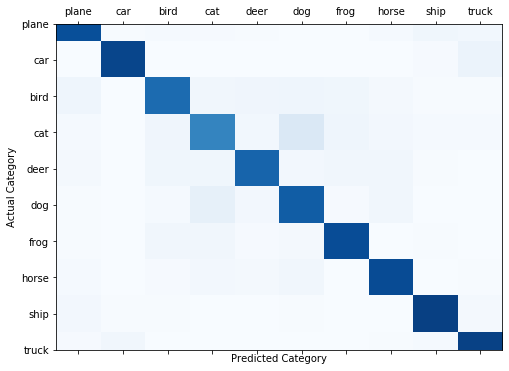

Category   - Accuracy
plane      - 88.1
car        - 91.7
bird       - 77.0
cat        - 67.5
deer       - 80.0
dog        - 82.5
frog       - 89.0
horse      - 89.3
ship       - 93.5
truck      - 93.1

Selected workers

[ 4 17 61 13 19 26 81 52 91 92 58 24 14 74 86]
Worker 4 : is  Honest
Worker 17 : is  Honest
Worker 61 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 19 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 81 : is  Honest
Worker 52 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 58 : is  Honest
Worker 24 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 74 : is  Honest
Worker 86 : is  Stealthy_Attacker

 | Global Training Round : 79 |


Worker 4 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.308066
Train Epoch: 1 [400/500	(81%)]	Loss: 0.293204
Train Epoch: 2 [0/500	(1%)]	Loss: 0.233965
Train Epoch: 2 [400/500	(81%)]	Loss: 0.122397
Train Epoch: 3 [0/500	(1%)]	Loss: 0.172666
Train Epoch: 3 [400/500	(81%)]	Loss: 0.219008
Train Epoch: 4 [0/500	(1%)]	Loss: 0.125816
Train Epoch: 4 [400/500	(81%)]	Loss: 0.112526
Train Epoch: 5 [0/500	(1%)]	Loss: 0.041580
Train Epoch: 5 [400/500	(81%)]	Loss: 0.215036

Worker 4 ends training in Global Round:79 |

Worker 17 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.145548
Train Epoch: 1 [400/500	(81%)]	Loss: 0.281394
Train Epoch: 2 [0/500	(1%)]	Loss: 0.176518
Train Epoch: 2 [400/500	(81%)]	Loss: 0.242367
Train Epoch: 3 [0/500	(1%)]	Loss: 0.088392
Train Epoch: 3 [400/500	(81%)]	Loss: 0.144411
Train Epoch: 4 [0/500	(1%)]	Loss: 0.074245
Train Epoch: 4 [400/500	(81%)]	Loss: 0.369507
Train Epoch: 5 [0/500	(1%)]	Loss: 0.119813
Train Epoch: 5 [400/500	(81%)]	Loss: 0.265680

Worker 17 ends training in Global Round:79 |

Worker 61 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.306815
Train Epoch: 1 [400/500	(81%)]	Loss: 0.186830
Train Epoch: 2 [0/500	(1%)]	Loss: 0.085444
Train Epoch: 2 [400/500	(81%)]	Loss: 0.155194
Train Epoch: 3 [0/500	(1%)]	Loss: 0.157276
Train Epoch: 3 [400/500	(81%)]	Loss: 0.281448
Train Epoch: 4 [0/500	(1%)]	Loss: 0.225724
Train Epoch: 4 [400/500	(81%)]	Loss: 0.353748
Train Epoch: 5 [0/500	(1%)]	Loss: 0.147796
Train Epoch: 5 [400/500	(81%)]	Loss: 0.097091

Worker 61 ends training in Global Round:79 |

Worker 13 starts training in Global Round:79 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  79


Train Epoch: 1 [0/500	(1%)]	Loss: 1.296744
Train Epoch: 1 [400/500	(81%)]	Loss: 0.525125
Train Epoch: 2 [0/500	(1%)]	Loss: 0.178730
Train Epoch: 2 [400/500	(81%)]	Loss: 0.396909
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145733
Train Epoch: 3 [400/500	(81%)]	Loss: 0.332679
Train Epoch: 4 [0/500	(1%)]	Loss: 0.199588
Train Epoch: 4 [400/500	(81%)]	Loss: 0.359047
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100458
Train Epoch: 5 [400/500	(81%)]	Loss: 0.112990

Performed attacks 1
Worker 13 ends training in Global Round:79 |

Worker 19 starts training in Global Round:79 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  79


Train Epoch: 1 [0/500	(1%)]	Loss: 1.299775
Train Epoch: 1 [400/500	(81%)]	Loss: 0.397851
Train Epoch: 2 [0/500	(1%)]	Loss: 0.173615
Train Epoch: 2 [400/500	(81%)]	Loss: 0.411687
Train Epoch: 3 [0/500	(1%)]	Loss: 0.256562
Train Epoch: 3 [400/500	(81%)]	Loss: 0.270794
Train Epoch: 4 [0/500	(1%)]	Loss: 0.098308
Train Epoch: 4 [400/500	(81%)]	Loss: 0.180198
Train Epoch: 5 [0/500	(1%)]	Loss: 0.091430
Train Epoch: 5 [400/500	(81%)]	Loss: 0.246620

Performed attacks 2
Worker 19 ends training in Global Round:79 |

Worker 26 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.410297
Train Epoch: 1 [400/500	(81%)]	Loss: 0.296149
Train Epoch: 2 [0/500	(1%)]	Loss: 0.156241
Train Epoch: 2 [400/500	(81%)]	Loss: 0.172970
Train Epoch: 3 [0/500	(1%)]	Loss: 0.219079
Train Epoch: 3 [400/500	(81%)]	Loss: 0.247112
Train Epoch: 4 [0/500	(1%)]	Loss: 0.141595
Train Epoch: 4 [400/500	(81%)]	Loss: 0.329409
Train Epoch: 5 [0/500	(1%)]	Loss: 0.159118
Train Epoch: 5 [400/500	(81%)]	Loss: 0.134075

Worker 26 ends training in Global Round:79 |

Worker 81 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.430022
Train Epoch: 1 [400/500	(81%)]	Loss: 0.274165
Train Epoch: 2 [0/500	(1%)]	Loss: 0.146899
Train Epoch: 2 [400/500	(81%)]	Loss: 0.169592
Train Epoch: 3 [0/500	(1%)]	Loss: 0.041395
Train Epoch: 3 [400/500	(81%)]	Loss: 0.139335
Train Epoch: 4 [0/500	(1%)]	Loss: 0.097242
Train Epoch: 4 [400/500	(81%)]	Loss: 0.188152
Train Epoch: 5 [0/500	(1%)]	Loss: 0.044137
Train Epoch: 5 [400/500	(81%)]	Loss: 0.093104

Worker 81 ends training in Global Round:79 |

Worker 52 starts training in Global Round:79 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  79


Train Epoch: 1 [0/500	(1%)]	Loss: 0.712882
Train Epoch: 1 [400/500	(81%)]	Loss: 0.757482
Train Epoch: 2 [0/500	(1%)]	Loss: 0.285555
Train Epoch: 2 [400/500	(81%)]	Loss: 0.317563
Train Epoch: 3 [0/500	(1%)]	Loss: 0.230236
Train Epoch: 3 [400/500	(81%)]	Loss: 0.325018
Train Epoch: 4 [0/500	(1%)]	Loss: 0.208846
Train Epoch: 4 [400/500	(81%)]	Loss: 0.238177
Train Epoch: 5 [0/500	(1%)]	Loss: 0.142149
Train Epoch: 5 [400/500	(81%)]	Loss: 0.153309

Performed attacks 3
Worker 52 ends training in Global Round:79 |

Worker 91 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.246160
Train Epoch: 1 [400/500	(81%)]	Loss: 0.249766
Train Epoch: 2 [0/500	(1%)]	Loss: 0.084325
Train Epoch: 2 [400/500	(81%)]	Loss: 0.200808
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151097
Train Epoch: 3 [400/500	(81%)]	Loss: 0.210041
Train Epoch: 4 [0/500	(1%)]	Loss: 0.027668
Train Epoch: 4 [400/500	(81%)]	Loss: 0.172286
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075671
Train Epoch: 5 [400/500	(81%)]	Loss: 0.126915

Worker 91 ends training in Global Round:79 |

Worker 92 starts training in Global Round:79 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  79


Train Epoch: 1 [0/500	(1%)]	Loss: 1.310215
Train Epoch: 1 [400/500	(81%)]	Loss: 0.574642
Train Epoch: 2 [0/500	(1%)]	Loss: 0.265597
Train Epoch: 2 [400/500	(81%)]	Loss: 0.317175
Train Epoch: 3 [0/500	(1%)]	Loss: 0.249500
Train Epoch: 3 [400/500	(81%)]	Loss: 0.261490
Train Epoch: 4 [0/500	(1%)]	Loss: 0.185582
Train Epoch: 4 [400/500	(81%)]	Loss: 0.298530
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114115
Train Epoch: 5 [400/500	(81%)]	Loss: 0.164000

Performed attacks 4
Worker 92 ends training in Global Round:79 |

Worker 58 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.239003
Train Epoch: 1 [400/500	(81%)]	Loss: 0.319387
Train Epoch: 2 [0/500	(1%)]	Loss: 0.137120
Train Epoch: 2 [400/500	(81%)]	Loss: 0.176593
Train Epoch: 3 [0/500	(1%)]	Loss: 0.097693
Train Epoch: 3 [400/500	(81%)]	Loss: 0.168308
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083941
Train Epoch: 4 [400/500	(81%)]	Loss: 0.163953
Train Epoch: 5 [0/500	(1%)]	Loss: 0.199823
Train Epoch: 5 [400/500	(81%)]	Loss: 0.041819

Worker 58 ends training in Global Round:79 |

Worker 24 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.186338
Train Epoch: 1 [400/500	(81%)]	Loss: 0.293002
Train Epoch: 2 [0/500	(1%)]	Loss: 0.089526
Train Epoch: 2 [400/500	(81%)]	Loss: 0.179617
Train Epoch: 3 [0/500	(1%)]	Loss: 0.101703
Train Epoch: 3 [400/500	(81%)]	Loss: 0.060019
Train Epoch: 4 [0/500	(1%)]	Loss: 0.063166
Train Epoch: 4 [400/500	(81%)]	Loss: 0.108426
Train Epoch: 5 [0/500	(1%)]	Loss: 0.074389
Train Epoch: 5 [400/500	(81%)]	Loss: 0.094235

Worker 24 ends training in Global Round:79 |

Worker 14 starts training in Global Round:79 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  79


Train Epoch: 1 [0/500	(1%)]	Loss: 1.289612
Train Epoch: 1 [400/500	(81%)]	Loss: 0.276933
Train Epoch: 2 [0/500	(1%)]	Loss: 0.208423
Train Epoch: 2 [400/500	(81%)]	Loss: 0.243856
Train Epoch: 3 [0/500	(1%)]	Loss: 0.121945
Train Epoch: 3 [400/500	(81%)]	Loss: 0.193023
Train Epoch: 4 [0/500	(1%)]	Loss: 0.124736
Train Epoch: 4 [400/500	(81%)]	Loss: 0.339779
Train Epoch: 5 [0/500	(1%)]	Loss: 0.094958
Train Epoch: 5 [400/500	(81%)]	Loss: 0.308583

Performed attacks 5
Worker 14 ends training in Global Round:79 |

Worker 74 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.403442
Train Epoch: 1 [400/500	(81%)]	Loss: 0.221363
Train Epoch: 2 [0/500	(1%)]	Loss: 0.096970
Train Epoch: 2 [400/500	(81%)]	Loss: 0.230099
Train Epoch: 3 [0/500	(1%)]	Loss: 0.165155
Train Epoch: 3 [400/500	(81%)]	Loss: 0.134309
Train Epoch: 4 [0/500	(1%)]	Loss: 0.101640
Train Epoch: 4 [400/500	(81%)]	Loss: 0.123389
Train Epoch: 5 [0/500	(1%)]	Loss: 0.072232
Train Epoch: 5 [400/500	(81%)]	Loss: 0.190200

Worker 74 ends training in Global Round:79 |

Worker 86 starts training in Global Round:79 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  79


Train Epoch: 1 [0/500	(1%)]	Loss: 1.418570
Train Epoch: 1 [400/500	(81%)]	Loss: 0.694317
Train Epoch: 2 [0/500	(1%)]	Loss: 0.229162
Train Epoch: 2 [400/500	(81%)]	Loss: 0.242202
Train Epoch: 3 [0/500	(1%)]	Loss: 0.396366
Train Epoch: 3 [400/500	(81%)]	Loss: 0.351978
Train Epoch: 4 [0/500	(1%)]	Loss: 0.155492
Train Epoch: 4 [400/500	(81%)]	Loss: 0.226404
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124700
Train Epoch: 5 [400/500	(81%)]	Loss: 0.175016

Performed attacks 6
Worker 86 ends training in Global Round:79 |
Last layer biases  [array([ 0.03389773, -0.03390051, -0.01433758,  0.03744876,  0.03928735,
       -0.01445705,  0.03971061, -0.00813007, -0.02181151, -0.04180599],
      dtype=float32), array([ 0.03448871, -0.03377587, -0.01554783,  0.03911601,  0.03928558,
       -0.01375687,  0.0391121 , -0.00820426, -0.0220349 , -0.04278094],
      dtype=float32), array([ 0.03399437, -0.03285136, -0.01443872,  0.03912268,  0.03953847,
       -0.01498091,  0.03829404, -0.00868852, -0.02322382, -0.0

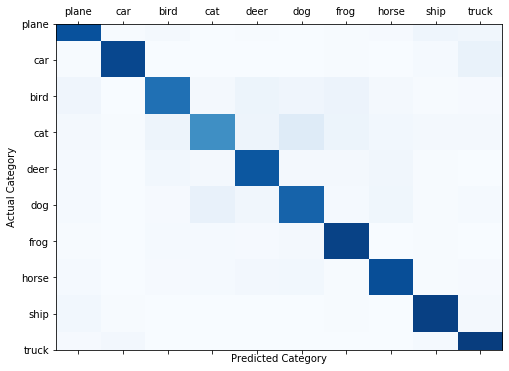

Category   - Accuracy
plane      - 87.4
car        - 90.8
bird       - 75.3
cat        - 63.5
deer       - 84.9
dog        - 80.3
frog       - 92.8
horse      - 88.6
ship       - 93.5
truck      - 94.6

Selected workers

[16 92 38 94 95 47 53 15 69 21 17 50 82 64 49]
Worker 16 : is  Stealthy_Attacker
Worker 92 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker
Worker 95 : is  Honest
Worker 47 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 15 : is  Honest
Worker 69 : is  Honest
Worker 21 : is  Stealthy_Attacker
Worker 17 : is  Honest
Worker 50 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 64 : is  Honest
Worker 49 : is  Honest

 | Global Training Round : 80 |


Worker 16 starts training in Global Round:80 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  80


Train Epoch: 1 [0/500	(1%)]	Loss: 1.866246
Train Epoch: 1 [400/500	(81%)]	Loss: 0.634509
Train Epoch: 2 [0/500	(1%)]	Loss: 0.454729
Train Epoch: 2 [400/500	(81%)]	Loss: 0.494459
Train Epoch: 3 [0/500	(1%)]	Loss: 0.352135
Train Epoch: 3 [400/500	(81%)]	Loss: 0.398496
Train Epoch: 4 [0/500	(1%)]	Loss: 0.193093
Train Epoch: 4 [400/500	(81%)]	Loss: 0.307793
Train Epoch: 5 [0/500	(1%)]	Loss: 0.286990
Train Epoch: 5 [400/500	(81%)]	Loss: 0.248892

Performed attacks 1
Worker 16 ends training in Global Round:80 |

Worker 92 starts training in Global Round:80 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  80


Train Epoch: 1 [0/500	(1%)]	Loss: 1.451588
Train Epoch: 1 [400/500	(81%)]	Loss: 0.539411
Train Epoch: 2 [0/500	(1%)]	Loss: 0.346446
Train Epoch: 2 [400/500	(81%)]	Loss: 0.800015
Train Epoch: 3 [0/500	(1%)]	Loss: 0.238300
Train Epoch: 3 [400/500	(81%)]	Loss: 0.397064
Train Epoch: 4 [0/500	(1%)]	Loss: 0.262715
Train Epoch: 4 [400/500	(81%)]	Loss: 0.398084
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122250
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232254

Performed attacks 2
Worker 92 ends training in Global Round:80 |

Worker 38 starts training in Global Round:80 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  80


Train Epoch: 1 [0/500	(1%)]	Loss: 1.384444
Train Epoch: 1 [400/500	(81%)]	Loss: 0.561841
Train Epoch: 2 [0/500	(1%)]	Loss: 0.139941
Train Epoch: 2 [400/500	(81%)]	Loss: 0.294359
Train Epoch: 3 [0/500	(1%)]	Loss: 0.175552
Train Epoch: 3 [400/500	(81%)]	Loss: 0.278591
Train Epoch: 4 [0/500	(1%)]	Loss: 0.191168
Train Epoch: 4 [400/500	(81%)]	Loss: 0.208584
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192503
Train Epoch: 5 [400/500	(81%)]	Loss: 0.087209

Performed attacks 3
Worker 38 ends training in Global Round:80 |

Worker 94 starts training in Global Round:80 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  80


Train Epoch: 1 [0/500	(1%)]	Loss: 1.595367
Train Epoch: 1 [400/500	(81%)]	Loss: 0.419535
Train Epoch: 2 [0/500	(1%)]	Loss: 0.221494
Train Epoch: 2 [400/500	(81%)]	Loss: 0.347804
Train Epoch: 3 [0/500	(1%)]	Loss: 0.363682
Train Epoch: 3 [400/500	(81%)]	Loss: 0.377865
Train Epoch: 4 [0/500	(1%)]	Loss: 0.270910
Train Epoch: 4 [400/500	(81%)]	Loss: 0.268822
Train Epoch: 5 [0/500	(1%)]	Loss: 0.142061
Train Epoch: 5 [400/500	(81%)]	Loss: 0.298730

Performed attacks 4
Worker 94 ends training in Global Round:80 |

Worker 95 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.222283
Train Epoch: 1 [400/500	(81%)]	Loss: 0.289745
Train Epoch: 2 [0/500	(1%)]	Loss: 0.112205
Train Epoch: 2 [400/500	(81%)]	Loss: 0.245262
Train Epoch: 3 [0/500	(1%)]	Loss: 0.086346
Train Epoch: 3 [400/500	(81%)]	Loss: 0.168167
Train Epoch: 4 [0/500	(1%)]	Loss: 0.117097
Train Epoch: 4 [400/500	(81%)]	Loss: 0.168729
Train Epoch: 5 [0/500	(1%)]	Loss: 0.129935
Train Epoch: 5 [400/500	(81%)]	Loss: 0.371923

Worker 95 ends training in Global Round:80 |

Worker 47 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.155467
Train Epoch: 1 [400/500	(81%)]	Loss: 0.404529
Train Epoch: 2 [0/500	(1%)]	Loss: 0.170828
Train Epoch: 2 [400/500	(81%)]	Loss: 0.235802
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136132
Train Epoch: 3 [400/500	(81%)]	Loss: 0.188819
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187590
Train Epoch: 4 [400/500	(81%)]	Loss: 0.178956
Train Epoch: 5 [0/500	(1%)]	Loss: 0.084003
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232974

Worker 47 ends training in Global Round:80 |

Worker 53 starts training in Global Round:80 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  80


Train Epoch: 1 [0/500	(1%)]	Loss: 1.315640
Train Epoch: 1 [400/500	(81%)]	Loss: 0.594629
Train Epoch: 2 [0/500	(1%)]	Loss: 0.277755
Train Epoch: 2 [400/500	(81%)]	Loss: 0.509950
Train Epoch: 3 [0/500	(1%)]	Loss: 0.326157
Train Epoch: 3 [400/500	(81%)]	Loss: 0.493083
Train Epoch: 4 [0/500	(1%)]	Loss: 0.374740
Train Epoch: 4 [400/500	(81%)]	Loss: 0.222376
Train Epoch: 5 [0/500	(1%)]	Loss: 0.195463
Train Epoch: 5 [400/500	(81%)]	Loss: 0.314239

Performed attacks 5
Worker 53 ends training in Global Round:80 |

Worker 15 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.353304
Train Epoch: 1 [400/500	(81%)]	Loss: 0.392735
Train Epoch: 2 [0/500	(1%)]	Loss: 0.091268
Train Epoch: 2 [400/500	(81%)]	Loss: 0.225667
Train Epoch: 3 [0/500	(1%)]	Loss: 0.150866
Train Epoch: 3 [400/500	(81%)]	Loss: 0.191035
Train Epoch: 4 [0/500	(1%)]	Loss: 0.065464
Train Epoch: 4 [400/500	(81%)]	Loss: 0.222802
Train Epoch: 5 [0/500	(1%)]	Loss: 0.242599
Train Epoch: 5 [400/500	(81%)]	Loss: 0.144648

Worker 15 ends training in Global Round:80 |

Worker 69 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.301955
Train Epoch: 1 [400/500	(81%)]	Loss: 0.315416
Train Epoch: 2 [0/500	(1%)]	Loss: 0.184922
Train Epoch: 2 [400/500	(81%)]	Loss: 0.093186
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145030
Train Epoch: 3 [400/500	(81%)]	Loss: 0.115472
Train Epoch: 4 [0/500	(1%)]	Loss: 0.132809
Train Epoch: 4 [400/500	(81%)]	Loss: 0.244756
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115363
Train Epoch: 5 [400/500	(81%)]	Loss: 0.188293

Worker 69 ends training in Global Round:80 |

Worker 21 starts training in Global Round:80 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  80


Train Epoch: 1 [0/500	(1%)]	Loss: 1.096669
Train Epoch: 1 [400/500	(81%)]	Loss: 0.475277
Train Epoch: 2 [0/500	(1%)]	Loss: 0.279084
Train Epoch: 2 [400/500	(81%)]	Loss: 0.471458
Train Epoch: 3 [0/500	(1%)]	Loss: 0.250264
Train Epoch: 3 [400/500	(81%)]	Loss: 0.415750
Train Epoch: 4 [0/500	(1%)]	Loss: 0.198227
Train Epoch: 4 [400/500	(81%)]	Loss: 0.275532
Train Epoch: 5 [0/500	(1%)]	Loss: 0.256096
Train Epoch: 5 [400/500	(81%)]	Loss: 0.119824

Performed attacks 6
Worker 21 ends training in Global Round:80 |

Worker 17 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.129491
Train Epoch: 1 [400/500	(81%)]	Loss: 0.194335
Train Epoch: 2 [0/500	(1%)]	Loss: 0.119961
Train Epoch: 2 [400/500	(81%)]	Loss: 0.135024
Train Epoch: 3 [0/500	(1%)]	Loss: 0.050245
Train Epoch: 3 [400/500	(81%)]	Loss: 0.193480
Train Epoch: 4 [0/500	(1%)]	Loss: 0.135159
Train Epoch: 4 [400/500	(81%)]	Loss: 0.123998
Train Epoch: 5 [0/500	(1%)]	Loss: 0.067361
Train Epoch: 5 [400/500	(81%)]	Loss: 0.073557

Worker 17 ends training in Global Round:80 |

Worker 50 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.419866
Train Epoch: 1 [400/500	(81%)]	Loss: 0.588790
Train Epoch: 2 [0/500	(1%)]	Loss: 0.204540
Train Epoch: 2 [400/500	(81%)]	Loss: 0.416199
Train Epoch: 3 [0/500	(1%)]	Loss: 0.243378
Train Epoch: 3 [400/500	(81%)]	Loss: 0.377567
Train Epoch: 4 [0/500	(1%)]	Loss: 0.099708
Train Epoch: 4 [400/500	(81%)]	Loss: 0.250539
Train Epoch: 5 [0/500	(1%)]	Loss: 0.120983
Train Epoch: 5 [400/500	(81%)]	Loss: 0.243565

Worker 50 ends training in Global Round:80 |

Worker 82 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.146741
Train Epoch: 1 [400/500	(81%)]	Loss: 0.189779
Train Epoch: 2 [0/500	(1%)]	Loss: 0.029956
Train Epoch: 2 [400/500	(81%)]	Loss: 0.114023
Train Epoch: 3 [0/500	(1%)]	Loss: 0.054202
Train Epoch: 3 [400/500	(81%)]	Loss: 0.071178
Train Epoch: 4 [0/500	(1%)]	Loss: 0.123520
Train Epoch: 4 [400/500	(81%)]	Loss: 0.128994
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148871
Train Epoch: 5 [400/500	(81%)]	Loss: 0.050796

Worker 82 ends training in Global Round:80 |

Worker 64 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.201890
Train Epoch: 1 [400/500	(81%)]	Loss: 0.275544
Train Epoch: 2 [0/500	(1%)]	Loss: 0.083644
Train Epoch: 2 [400/500	(81%)]	Loss: 0.260937
Train Epoch: 3 [0/500	(1%)]	Loss: 0.081107
Train Epoch: 3 [400/500	(81%)]	Loss: 0.207679
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119430
Train Epoch: 4 [400/500	(81%)]	Loss: 0.135545
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123203
Train Epoch: 5 [400/500	(81%)]	Loss: 0.299443

Worker 64 ends training in Global Round:80 |

Worker 49 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.279314
Train Epoch: 1 [400/500	(81%)]	Loss: 0.430922
Train Epoch: 2 [0/500	(1%)]	Loss: 0.249461
Train Epoch: 2 [400/500	(81%)]	Loss: 0.195540
Train Epoch: 3 [0/500	(1%)]	Loss: 0.076079
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260641
Train Epoch: 4 [0/500	(1%)]	Loss: 0.076570
Train Epoch: 4 [400/500	(81%)]	Loss: 0.201649
Train Epoch: 5 [0/500	(1%)]	Loss: 0.154751
Train Epoch: 5 [400/500	(81%)]	Loss: 0.118656

Worker 49 ends training in Global Round:80 |
Last layer biases  [array([ 0.04078002, -0.03173995, -0.01343945,  0.03619557,  0.04993374,
       -0.01598664,  0.04390518, -0.03036078, -0.02241706, -0.0409689 ],
      dtype=float32), array([ 0.03523963, -0.03003346, -0.01376311,  0.04139538,  0.05226963,
       -0.01217008,  0.03956736, -0.03172434, -0.02310841, -0.04177085],
      dtype=float32), array([ 0.03638206, -0.03190503, -0.01096855,  0.04022841,  0.05351443,
       -0.0141123 ,  0.04079169, -0.03246057, -0.02299688, -0.04257152],
      dtyp

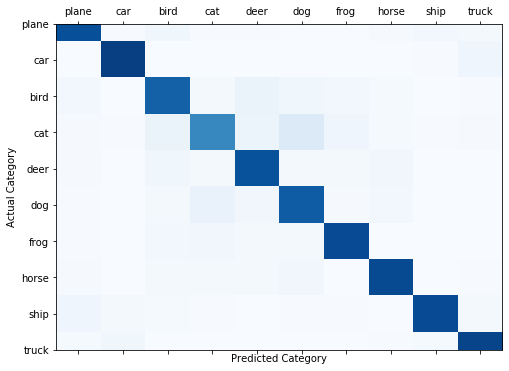

Category   - Accuracy
plane      - 88.0
car        - 94.0
bird       - 81.0
cat        - 66.4
deer       - 86.8
dog        - 82.9
frog       - 89.2
horse      - 89.7
ship       - 89.1
truck      - 92.0

Selected workers

[59 52 82 14 90 13 73 28 76 31 25  1 26  8  6]
Worker 59 : is  Stealthy_Attacker
Worker 52 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 90 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 73 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 76 : is  Honest
Worker 31 : is  Stealthy_Attacker
Worker 25 : is  Honest
Worker 1 : is  Honest
Worker 26 : is  Honest
Worker 8 : is  Honest
Worker 6 : is  Stealthy_Attacker

 | Global Training Round : 81 |


Worker 59 starts training in Global Round:81 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  81


Train Epoch: 1 [0/500	(1%)]	Loss: 1.271052
Train Epoch: 1 [400/500	(81%)]	Loss: 0.584027
Train Epoch: 2 [0/500	(1%)]	Loss: 0.296562
Train Epoch: 2 [400/500	(81%)]	Loss: 0.438246
Train Epoch: 3 [0/500	(1%)]	Loss: 0.163846
Train Epoch: 3 [400/500	(81%)]	Loss: 0.383307
Train Epoch: 4 [0/500	(1%)]	Loss: 0.161610
Train Epoch: 4 [400/500	(81%)]	Loss: 0.194291
Train Epoch: 5 [0/500	(1%)]	Loss: 0.181924
Train Epoch: 5 [400/500	(81%)]	Loss: 0.143382

Performed attacks 1
Worker 59 ends training in Global Round:81 |

Worker 52 starts training in Global Round:81 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  81


Train Epoch: 1 [0/500	(1%)]	Loss: 1.297304
Train Epoch: 1 [400/500	(81%)]	Loss: 0.951121
Train Epoch: 2 [0/500	(1%)]	Loss: 0.219591
Train Epoch: 2 [400/500	(81%)]	Loss: 0.493544
Train Epoch: 3 [0/500	(1%)]	Loss: 0.243477
Train Epoch: 3 [400/500	(81%)]	Loss: 0.200432
Train Epoch: 4 [0/500	(1%)]	Loss: 0.171829
Train Epoch: 4 [400/500	(81%)]	Loss: 0.289901
Train Epoch: 5 [0/500	(1%)]	Loss: 0.189908
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171907

Performed attacks 2
Worker 52 ends training in Global Round:81 |

Worker 82 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.133066
Train Epoch: 1 [400/500	(81%)]	Loss: 0.231811
Train Epoch: 2 [0/500	(1%)]	Loss: 0.079425
Train Epoch: 2 [400/500	(81%)]	Loss: 0.055244
Train Epoch: 3 [0/500	(1%)]	Loss: 0.063191
Train Epoch: 3 [400/500	(81%)]	Loss: 0.155279
Train Epoch: 4 [0/500	(1%)]	Loss: 0.040784
Train Epoch: 4 [400/500	(81%)]	Loss: 0.089866
Train Epoch: 5 [0/500	(1%)]	Loss: 0.049971
Train Epoch: 5 [400/500	(81%)]	Loss: 0.091230

Worker 82 ends training in Global Round:81 |

Worker 14 starts training in Global Round:81 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  81


Train Epoch: 1 [0/500	(1%)]	Loss: 1.130546
Train Epoch: 1 [400/500	(81%)]	Loss: 0.274489
Train Epoch: 2 [0/500	(1%)]	Loss: 0.437114
Train Epoch: 2 [400/500	(81%)]	Loss: 0.281501
Train Epoch: 3 [0/500	(1%)]	Loss: 0.189397
Train Epoch: 3 [400/500	(81%)]	Loss: 0.251199
Train Epoch: 4 [0/500	(1%)]	Loss: 0.112380
Train Epoch: 4 [400/500	(81%)]	Loss: 0.200518
Train Epoch: 5 [0/500	(1%)]	Loss: 0.184591
Train Epoch: 5 [400/500	(81%)]	Loss: 0.104532

Performed attacks 3
Worker 14 ends training in Global Round:81 |

Worker 90 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.299857
Train Epoch: 1 [400/500	(81%)]	Loss: 0.222401
Train Epoch: 2 [0/500	(1%)]	Loss: 0.234340
Train Epoch: 2 [400/500	(81%)]	Loss: 0.205454
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127416
Train Epoch: 3 [400/500	(81%)]	Loss: 0.135382
Train Epoch: 4 [0/500	(1%)]	Loss: 0.076482
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182217
Train Epoch: 5 [0/500	(1%)]	Loss: 0.070951
Train Epoch: 5 [400/500	(81%)]	Loss: 0.163428

Worker 90 ends training in Global Round:81 |

Worker 13 starts training in Global Round:81 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  81


Train Epoch: 1 [0/500	(1%)]	Loss: 1.186755
Train Epoch: 1 [400/500	(81%)]	Loss: 0.366183
Train Epoch: 2 [0/500	(1%)]	Loss: 0.338593
Train Epoch: 2 [400/500	(81%)]	Loss: 0.459123
Train Epoch: 3 [0/500	(1%)]	Loss: 0.223622
Train Epoch: 3 [400/500	(81%)]	Loss: 0.362302
Train Epoch: 4 [0/500	(1%)]	Loss: 0.241256
Train Epoch: 4 [400/500	(81%)]	Loss: 0.336894
Train Epoch: 5 [0/500	(1%)]	Loss: 0.225257
Train Epoch: 5 [400/500	(81%)]	Loss: 0.121383

Performed attacks 4
Worker 13 ends training in Global Round:81 |

Worker 73 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.074613
Train Epoch: 1 [400/500	(81%)]	Loss: 0.230008
Train Epoch: 2 [0/500	(1%)]	Loss: 0.141890
Train Epoch: 2 [400/500	(81%)]	Loss: 0.146211
Train Epoch: 3 [0/500	(1%)]	Loss: 0.135971
Train Epoch: 3 [400/500	(81%)]	Loss: 0.137671
Train Epoch: 4 [0/500	(1%)]	Loss: 0.037568
Train Epoch: 4 [400/500	(81%)]	Loss: 0.214101
Train Epoch: 5 [0/500	(1%)]	Loss: 0.103191
Train Epoch: 5 [400/500	(81%)]	Loss: 0.137623

Worker 73 ends training in Global Round:81 |

Worker 28 starts training in Global Round:81 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  81


Train Epoch: 1 [0/500	(1%)]	Loss: 1.655725
Train Epoch: 1 [400/500	(81%)]	Loss: 0.545694
Train Epoch: 2 [0/500	(1%)]	Loss: 0.394765
Train Epoch: 2 [400/500	(81%)]	Loss: 0.468416
Train Epoch: 3 [0/500	(1%)]	Loss: 0.212628
Train Epoch: 3 [400/500	(81%)]	Loss: 0.292065
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156978
Train Epoch: 4 [400/500	(81%)]	Loss: 0.282828
Train Epoch: 5 [0/500	(1%)]	Loss: 0.139033
Train Epoch: 5 [400/500	(81%)]	Loss: 0.225444

Performed attacks 5
Worker 28 ends training in Global Round:81 |

Worker 76 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.145273
Train Epoch: 1 [400/500	(81%)]	Loss: 0.474629
Train Epoch: 2 [0/500	(1%)]	Loss: 0.089745
Train Epoch: 2 [400/500	(81%)]	Loss: 0.187172
Train Epoch: 3 [0/500	(1%)]	Loss: 0.164423
Train Epoch: 3 [400/500	(81%)]	Loss: 0.089402
Train Epoch: 4 [0/500	(1%)]	Loss: 0.101148
Train Epoch: 4 [400/500	(81%)]	Loss: 0.144547
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064584
Train Epoch: 5 [400/500	(81%)]	Loss: 0.064334

Worker 76 ends training in Global Round:81 |

Worker 31 starts training in Global Round:81 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  81


Train Epoch: 1 [0/500	(1%)]	Loss: 1.367923
Train Epoch: 1 [400/500	(81%)]	Loss: 0.503476
Train Epoch: 2 [0/500	(1%)]	Loss: 0.404582
Train Epoch: 2 [400/500	(81%)]	Loss: 0.508943
Train Epoch: 3 [0/500	(1%)]	Loss: 0.413757
Train Epoch: 3 [400/500	(81%)]	Loss: 0.419524
Train Epoch: 4 [0/500	(1%)]	Loss: 0.225967
Train Epoch: 4 [400/500	(81%)]	Loss: 0.209802
Train Epoch: 5 [0/500	(1%)]	Loss: 0.217418
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149850

Performed attacks 6
Worker 31 ends training in Global Round:81 |

Worker 25 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.343123
Train Epoch: 1 [400/500	(81%)]	Loss: 0.306984
Train Epoch: 2 [0/500	(1%)]	Loss: 0.155559
Train Epoch: 2 [400/500	(81%)]	Loss: 0.148385
Train Epoch: 3 [0/500	(1%)]	Loss: 0.187428
Train Epoch: 3 [400/500	(81%)]	Loss: 0.274773
Train Epoch: 4 [0/500	(1%)]	Loss: 0.129208
Train Epoch: 4 [400/500	(81%)]	Loss: 0.141893
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132955
Train Epoch: 5 [400/500	(81%)]	Loss: 0.128613

Worker 25 ends training in Global Round:81 |

Worker 1 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.303381
Train Epoch: 1 [400/500	(81%)]	Loss: 0.593135
Train Epoch: 2 [0/500	(1%)]	Loss: 0.191372
Train Epoch: 2 [400/500	(81%)]	Loss: 0.314038
Train Epoch: 3 [0/500	(1%)]	Loss: 0.134075
Train Epoch: 3 [400/500	(81%)]	Loss: 0.181028
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152399
Train Epoch: 4 [400/500	(81%)]	Loss: 0.141348
Train Epoch: 5 [0/500	(1%)]	Loss: 0.131576
Train Epoch: 5 [400/500	(81%)]	Loss: 0.227070

Worker 1 ends training in Global Round:81 |

Worker 26 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.290906
Train Epoch: 1 [400/500	(81%)]	Loss: 0.207766
Train Epoch: 2 [0/500	(1%)]	Loss: 0.141935
Train Epoch: 2 [400/500	(81%)]	Loss: 0.161914
Train Epoch: 3 [0/500	(1%)]	Loss: 0.069638
Train Epoch: 3 [400/500	(81%)]	Loss: 0.199118
Train Epoch: 4 [0/500	(1%)]	Loss: 0.099428
Train Epoch: 4 [400/500	(81%)]	Loss: 0.155927
Train Epoch: 5 [0/500	(1%)]	Loss: 0.053379
Train Epoch: 5 [400/500	(81%)]	Loss: 0.092692

Worker 26 ends training in Global Round:81 |

Worker 8 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.292264
Train Epoch: 1 [400/500	(81%)]	Loss: 0.212910
Train Epoch: 2 [0/500	(1%)]	Loss: 0.196307
Train Epoch: 2 [400/500	(81%)]	Loss: 0.310961
Train Epoch: 3 [0/500	(1%)]	Loss: 0.108011
Train Epoch: 3 [400/500	(81%)]	Loss: 0.114557
Train Epoch: 4 [0/500	(1%)]	Loss: 0.131796
Train Epoch: 4 [400/500	(81%)]	Loss: 0.196458
Train Epoch: 5 [0/500	(1%)]	Loss: 0.058936
Train Epoch: 5 [400/500	(81%)]	Loss: 0.180583

Worker 8 ends training in Global Round:81 |

Worker 6 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.496182
Train Epoch: 1 [400/500	(81%)]	Loss: 0.713053
Train Epoch: 2 [0/500	(1%)]	Loss: 0.278664
Train Epoch: 2 [400/500	(81%)]	Loss: 0.402794
Train Epoch: 3 [0/500	(1%)]	Loss: 0.219497
Train Epoch: 3 [400/500	(81%)]	Loss: 0.176985
Train Epoch: 4 [0/500	(1%)]	Loss: 0.070533
Train Epoch: 4 [400/500	(81%)]	Loss: 0.328865
Train Epoch: 5 [0/500	(1%)]	Loss: 0.102026
Train Epoch: 5 [400/500	(81%)]	Loss: 0.153760

Worker 6 ends training in Global Round:81 |
Last layer biases  [array([ 0.03731832, -0.03329029, -0.01285437,  0.04189494,  0.053266  ,
       -0.01451272,  0.03862862, -0.03128237, -0.02195573, -0.04131069],
      dtype=float32), array([ 0.03667836, -0.03268573, -0.01434126,  0.040131  ,  0.05315813,
       -0.01173558,  0.04188803, -0.03353452, -0.02384438, -0.03981236],
      dtype=float32), array([ 0.03361833, -0.03234006, -0.01649188,  0.03790241,  0.04074062,
       -0.01461431,  0.03996975, -0.00870363, -0.02216067, -0.0420189 ],
      dtype

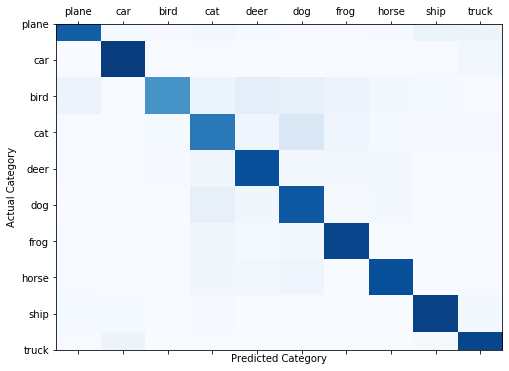

Category   - Accuracy
plane      - 82.2
car        - 94.9
bird       - 61.2
cat        - 71.6
deer       - 87.6
dog        - 84.7
frog       - 91.7
horse      - 87.9
ship       - 93.3
truck      - 91.3

Selected workers

[75 71 77 24 43 86 74 12 33 85 23 66 90  2 84]
Worker 75 : is  Stealthy_Attacker
Worker 71 : is  Stealthy_Attacker
Worker 77 : is  Honest
Worker 24 : is  Honest
Worker 43 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 74 : is  Honest
Worker 12 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 85 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 66 : is  Stealthy_Attacker
Worker 90 : is  Honest
Worker 2 : is  Honest
Worker 84 : is  Honest

 | Global Training Round : 82 |


Worker 75 starts training in Global Round:82 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  82


Train Epoch: 1 [0/500	(1%)]	Loss: 1.908879
Train Epoch: 1 [400/500	(81%)]	Loss: 0.654350
Train Epoch: 2 [0/500	(1%)]	Loss: 0.368715
Train Epoch: 2 [400/500	(81%)]	Loss: 0.372916
Train Epoch: 3 [0/500	(1%)]	Loss: 0.211475
Train Epoch: 3 [400/500	(81%)]	Loss: 0.445458
Train Epoch: 4 [0/500	(1%)]	Loss: 0.174584
Train Epoch: 4 [400/500	(81%)]	Loss: 0.281744
Train Epoch: 5 [0/500	(1%)]	Loss: 0.159319
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210126

Performed attacks 1
Worker 75 ends training in Global Round:82 |

Worker 71 starts training in Global Round:82 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  82


Train Epoch: 1 [0/500	(1%)]	Loss: 1.446955
Train Epoch: 1 [400/500	(81%)]	Loss: 0.626662
Train Epoch: 2 [0/500	(1%)]	Loss: 0.193702
Train Epoch: 2 [400/500	(81%)]	Loss: 0.338843
Train Epoch: 3 [0/500	(1%)]	Loss: 0.276850
Train Epoch: 3 [400/500	(81%)]	Loss: 0.248850
Train Epoch: 4 [0/500	(1%)]	Loss: 0.212534
Train Epoch: 4 [400/500	(81%)]	Loss: 0.281829
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083927
Train Epoch: 5 [400/500	(81%)]	Loss: 0.305952

Performed attacks 2
Worker 71 ends training in Global Round:82 |

Worker 77 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.377562
Train Epoch: 1 [400/500	(81%)]	Loss: 0.537461
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209846
Train Epoch: 2 [400/500	(81%)]	Loss: 0.102972
Train Epoch: 3 [0/500	(1%)]	Loss: 0.189641
Train Epoch: 3 [400/500	(81%)]	Loss: 0.204802
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105366
Train Epoch: 4 [400/500	(81%)]	Loss: 0.201724
Train Epoch: 5 [0/500	(1%)]	Loss: 0.095698
Train Epoch: 5 [400/500	(81%)]	Loss: 0.110100

Worker 77 ends training in Global Round:82 |

Worker 24 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.333946
Train Epoch: 1 [400/500	(81%)]	Loss: 0.285325
Train Epoch: 2 [0/500	(1%)]	Loss: 0.076566
Train Epoch: 2 [400/500	(81%)]	Loss: 0.162747
Train Epoch: 3 [0/500	(1%)]	Loss: 0.052056
Train Epoch: 3 [400/500	(81%)]	Loss: 0.102244
Train Epoch: 4 [0/500	(1%)]	Loss: 0.082816
Train Epoch: 4 [400/500	(81%)]	Loss: 0.074017
Train Epoch: 5 [0/500	(1%)]	Loss: 0.087733
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135869

Worker 24 ends training in Global Round:82 |

Worker 43 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.239345
Train Epoch: 1 [400/500	(81%)]	Loss: 0.222164
Train Epoch: 2 [0/500	(1%)]	Loss: 0.105568
Train Epoch: 2 [400/500	(81%)]	Loss: 0.233980
Train Epoch: 3 [0/500	(1%)]	Loss: 0.059269
Train Epoch: 3 [400/500	(81%)]	Loss: 0.105896
Train Epoch: 4 [0/500	(1%)]	Loss: 0.114284
Train Epoch: 4 [400/500	(81%)]	Loss: 0.083641
Train Epoch: 5 [0/500	(1%)]	Loss: 0.014977
Train Epoch: 5 [400/500	(81%)]	Loss: 0.104607

Worker 43 ends training in Global Round:82 |

Worker 86 starts training in Global Round:82 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  82


Train Epoch: 1 [0/500	(1%)]	Loss: 1.421716
Train Epoch: 1 [400/500	(81%)]	Loss: 0.676552
Train Epoch: 2 [0/500	(1%)]	Loss: 0.192917
Train Epoch: 2 [400/500	(81%)]	Loss: 0.464984
Train Epoch: 3 [0/500	(1%)]	Loss: 0.317976
Train Epoch: 3 [400/500	(81%)]	Loss: 0.317118
Train Epoch: 4 [0/500	(1%)]	Loss: 0.171812
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182003
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083898
Train Epoch: 5 [400/500	(81%)]	Loss: 0.134360

Performed attacks 3
Worker 86 ends training in Global Round:82 |

Worker 74 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.324120
Train Epoch: 1 [400/500	(81%)]	Loss: 0.183375
Train Epoch: 2 [0/500	(1%)]	Loss: 0.157103
Train Epoch: 2 [400/500	(81%)]	Loss: 0.179887
Train Epoch: 3 [0/500	(1%)]	Loss: 0.087154
Train Epoch: 3 [400/500	(81%)]	Loss: 0.184797
Train Epoch: 4 [0/500	(1%)]	Loss: 0.057399
Train Epoch: 4 [400/500	(81%)]	Loss: 0.223767
Train Epoch: 5 [0/500	(1%)]	Loss: 0.063772
Train Epoch: 5 [400/500	(81%)]	Loss: 0.188634

Worker 74 ends training in Global Round:82 |

Worker 12 starts training in Global Round:82 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  82


Train Epoch: 1 [0/500	(1%)]	Loss: 1.310898
Train Epoch: 1 [400/500	(81%)]	Loss: 0.543456
Train Epoch: 2 [0/500	(1%)]	Loss: 0.159604
Train Epoch: 2 [400/500	(81%)]	Loss: 0.355792
Train Epoch: 3 [0/500	(1%)]	Loss: 0.139471
Train Epoch: 3 [400/500	(81%)]	Loss: 0.200565
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152338
Train Epoch: 4 [400/500	(81%)]	Loss: 0.179291
Train Epoch: 5 [0/500	(1%)]	Loss: 0.070376
Train Epoch: 5 [400/500	(81%)]	Loss: 0.235213

Performed attacks 4
Worker 12 ends training in Global Round:82 |

Worker 33 starts training in Global Round:82 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  82


Train Epoch: 1 [0/500	(1%)]	Loss: 1.156242
Train Epoch: 1 [400/500	(81%)]	Loss: 0.321442
Train Epoch: 2 [0/500	(1%)]	Loss: 0.259770
Train Epoch: 2 [400/500	(81%)]	Loss: 0.279714
Train Epoch: 3 [0/500	(1%)]	Loss: 0.374153
Train Epoch: 3 [400/500	(81%)]	Loss: 0.222704
Train Epoch: 4 [0/500	(1%)]	Loss: 0.207246
Train Epoch: 4 [400/500	(81%)]	Loss: 0.257364
Train Epoch: 5 [0/500	(1%)]	Loss: 0.067975
Train Epoch: 5 [400/500	(81%)]	Loss: 0.155320

Performed attacks 5
Worker 33 ends training in Global Round:82 |

Worker 85 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.402474
Train Epoch: 1 [400/500	(81%)]	Loss: 0.256278
Train Epoch: 2 [0/500	(1%)]	Loss: 0.143788
Train Epoch: 2 [400/500	(81%)]	Loss: 0.120207
Train Epoch: 3 [0/500	(1%)]	Loss: 0.099444
Train Epoch: 3 [400/500	(81%)]	Loss: 0.129784
Train Epoch: 4 [0/500	(1%)]	Loss: 0.196923
Train Epoch: 4 [400/500	(81%)]	Loss: 0.166229
Train Epoch: 5 [0/500	(1%)]	Loss: 0.071090
Train Epoch: 5 [400/500	(81%)]	Loss: 0.163095

Worker 85 ends training in Global Round:82 |

Worker 23 starts training in Global Round:82 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  82


Train Epoch: 1 [0/500	(1%)]	Loss: 0.924681
Train Epoch: 1 [400/500	(81%)]	Loss: 0.294260
Train Epoch: 2 [0/500	(1%)]	Loss: 0.218244
Train Epoch: 2 [400/500	(81%)]	Loss: 0.271446
Train Epoch: 3 [0/500	(1%)]	Loss: 0.194680
Train Epoch: 3 [400/500	(81%)]	Loss: 0.288443
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121291
Train Epoch: 4 [400/500	(81%)]	Loss: 0.103375
Train Epoch: 5 [0/500	(1%)]	Loss: 0.088318
Train Epoch: 5 [400/500	(81%)]	Loss: 0.122155

Performed attacks 6
Worker 23 ends training in Global Round:82 |

Worker 66 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.487403
Train Epoch: 1 [400/500	(81%)]	Loss: 0.686058
Train Epoch: 2 [0/500	(1%)]	Loss: 0.313178
Train Epoch: 2 [400/500	(81%)]	Loss: 0.587218
Train Epoch: 3 [0/500	(1%)]	Loss: 0.422945
Train Epoch: 3 [400/500	(81%)]	Loss: 0.395016
Train Epoch: 4 [0/500	(1%)]	Loss: 0.158153
Train Epoch: 4 [400/500	(81%)]	Loss: 0.273804
Train Epoch: 5 [0/500	(1%)]	Loss: 0.207352
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149947

Worker 66 ends training in Global Round:82 |

Worker 90 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.157147
Train Epoch: 1 [400/500	(81%)]	Loss: 0.107211
Train Epoch: 2 [0/500	(1%)]	Loss: 0.097959
Train Epoch: 2 [400/500	(81%)]	Loss: 0.138903
Train Epoch: 3 [0/500	(1%)]	Loss: 0.115701
Train Epoch: 3 [400/500	(81%)]	Loss: 0.098403
Train Epoch: 4 [0/500	(1%)]	Loss: 0.093977
Train Epoch: 4 [400/500	(81%)]	Loss: 0.025651
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082350
Train Epoch: 5 [400/500	(81%)]	Loss: 0.148000

Worker 90 ends training in Global Round:82 |

Worker 2 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.061511
Train Epoch: 1 [400/500	(81%)]	Loss: 0.202222
Train Epoch: 2 [0/500	(1%)]	Loss: 0.214512
Train Epoch: 2 [400/500	(81%)]	Loss: 0.169470
Train Epoch: 3 [0/500	(1%)]	Loss: 0.056920
Train Epoch: 3 [400/500	(81%)]	Loss: 0.102193
Train Epoch: 4 [0/500	(1%)]	Loss: 0.106885
Train Epoch: 4 [400/500	(81%)]	Loss: 0.161491
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089526
Train Epoch: 5 [400/500	(81%)]	Loss: 0.183737

Worker 2 ends training in Global Round:82 |

Worker 84 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.266517
Train Epoch: 1 [400/500	(81%)]	Loss: 0.277147
Train Epoch: 2 [0/500	(1%)]	Loss: 0.138075
Train Epoch: 2 [400/500	(81%)]	Loss: 0.364838
Train Epoch: 3 [0/500	(1%)]	Loss: 0.167149
Train Epoch: 3 [400/500	(81%)]	Loss: 0.212018
Train Epoch: 4 [0/500	(1%)]	Loss: 0.086238
Train Epoch: 4 [400/500	(81%)]	Loss: 0.191658
Train Epoch: 5 [0/500	(1%)]	Loss: 0.154749
Train Epoch: 5 [400/500	(81%)]	Loss: 0.201485

Worker 84 ends training in Global Round:82 |
Last layer biases  [array([ 0.03760188, -0.02976976, -0.01382284,  0.04096413,  0.05233135,
       -0.01294499,  0.0401737 , -0.03497928, -0.02166813, -0.04198435],
      dtype=float32), array([ 0.0381557 , -0.03184332, -0.01380931,  0.03940015,  0.05267916,
       -0.01242633,  0.04111387, -0.03185637, -0.02385423, -0.04165763],
      dtype=float32), array([ 0.03359772, -0.03004372, -0.01547208,  0.03655115,  0.0381749 ,
       -0.01569099,  0.04080392, -0.00598894, -0.02228803, -0.04374225],
      dtyp

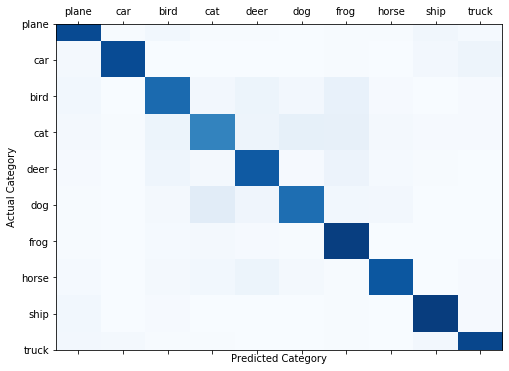

Category   - Accuracy
plane      - 89.7
car        - 89.4
bird       - 77.7
cat        - 67.9
deer       - 83.8
dog        - 75.9
frog       - 94.5
horse      - 84.9
ship       - 94.6
truck      - 91.1

Selected workers

[34 42 75 49 39 13 66 27 38 65 64 72 59 14 91]
Worker 34 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 39 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 66 : is  Stealthy_Attacker
Worker 27 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 64 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 59 : is  Stealthy_Attacker
Worker 14 : is  Stealthy_Attacker
Worker 91 : is  Honest

 | Global Training Round : 83 |


Worker 34 starts training in Global Round:83 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  83


Train Epoch: 1 [0/500	(1%)]	Loss: 1.340558
Train Epoch: 1 [400/500	(81%)]	Loss: 0.752266
Train Epoch: 2 [0/500	(1%)]	Loss: 0.357637
Train Epoch: 2 [400/500	(81%)]	Loss: 0.661518
Train Epoch: 3 [0/500	(1%)]	Loss: 0.080813
Train Epoch: 3 [400/500	(81%)]	Loss: 0.262969
Train Epoch: 4 [0/500	(1%)]	Loss: 0.180537
Train Epoch: 4 [400/500	(81%)]	Loss: 0.175651
Train Epoch: 5 [0/500	(1%)]	Loss: 0.137131
Train Epoch: 5 [400/500	(81%)]	Loss: 0.204676

Performed attacks 1
Worker 34 ends training in Global Round:83 |

Worker 42 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.287035
Train Epoch: 1 [400/500	(81%)]	Loss: 0.319978
Train Epoch: 2 [0/500	(1%)]	Loss: 0.126014
Train Epoch: 2 [400/500	(81%)]	Loss: 0.176624
Train Epoch: 3 [0/500	(1%)]	Loss: 0.164659
Train Epoch: 3 [400/500	(81%)]	Loss: 0.248819
Train Epoch: 4 [0/500	(1%)]	Loss: 0.226248
Train Epoch: 4 [400/500	(81%)]	Loss: 0.231708
Train Epoch: 5 [0/500	(1%)]	Loss: 0.224282
Train Epoch: 5 [400/500	(81%)]	Loss: 0.179583

Worker 42 ends training in Global Round:83 |

Worker 75 starts training in Global Round:83 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  83


Train Epoch: 1 [0/500	(1%)]	Loss: 1.323644
Train Epoch: 1 [400/500	(81%)]	Loss: 0.634835
Train Epoch: 2 [0/500	(1%)]	Loss: 0.233022
Train Epoch: 2 [400/500	(81%)]	Loss: 0.308124
Train Epoch: 3 [0/500	(1%)]	Loss: 0.259182
Train Epoch: 3 [400/500	(81%)]	Loss: 0.405651
Train Epoch: 4 [0/500	(1%)]	Loss: 0.134200
Train Epoch: 4 [400/500	(81%)]	Loss: 0.349578
Train Epoch: 5 [0/500	(1%)]	Loss: 0.139548
Train Epoch: 5 [400/500	(81%)]	Loss: 0.138346

Performed attacks 2
Worker 75 ends training in Global Round:83 |

Worker 49 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.234518
Train Epoch: 1 [400/500	(81%)]	Loss: 0.196112
Train Epoch: 2 [0/500	(1%)]	Loss: 0.121139
Train Epoch: 2 [400/500	(81%)]	Loss: 0.315372
Train Epoch: 3 [0/500	(1%)]	Loss: 0.118741
Train Epoch: 3 [400/500	(81%)]	Loss: 0.139490
Train Epoch: 4 [0/500	(1%)]	Loss: 0.084860
Train Epoch: 4 [400/500	(81%)]	Loss: 0.117304
Train Epoch: 5 [0/500	(1%)]	Loss: 0.084758
Train Epoch: 5 [400/500	(81%)]	Loss: 0.106505

Worker 49 ends training in Global Round:83 |

Worker 39 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.105089
Train Epoch: 1 [400/500	(81%)]	Loss: 0.286364
Train Epoch: 2 [0/500	(1%)]	Loss: 0.103563
Train Epoch: 2 [400/500	(81%)]	Loss: 0.127491
Train Epoch: 3 [0/500	(1%)]	Loss: 0.129258
Train Epoch: 3 [400/500	(81%)]	Loss: 0.129997
Train Epoch: 4 [0/500	(1%)]	Loss: 0.118518
Train Epoch: 4 [400/500	(81%)]	Loss: 0.072312
Train Epoch: 5 [0/500	(1%)]	Loss: 0.048182
Train Epoch: 5 [400/500	(81%)]	Loss: 0.060133

Worker 39 ends training in Global Round:83 |

Worker 13 starts training in Global Round:83 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  83


Train Epoch: 1 [0/500	(1%)]	Loss: 1.251018
Train Epoch: 1 [400/500	(81%)]	Loss: 0.537725
Train Epoch: 2 [0/500	(1%)]	Loss: 0.214026
Train Epoch: 2 [400/500	(81%)]	Loss: 0.288551
Train Epoch: 3 [0/500	(1%)]	Loss: 0.323240
Train Epoch: 3 [400/500	(81%)]	Loss: 0.191993
Train Epoch: 4 [0/500	(1%)]	Loss: 0.210945
Train Epoch: 4 [400/500	(81%)]	Loss: 0.200688
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170688
Train Epoch: 5 [400/500	(81%)]	Loss: 0.156224

Performed attacks 3
Worker 13 ends training in Global Round:83 |

Worker 66 starts training in Global Round:83 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  83


Train Epoch: 1 [0/500	(1%)]	Loss: 1.442030
Train Epoch: 1 [400/500	(81%)]	Loss: 0.409589
Train Epoch: 2 [0/500	(1%)]	Loss: 0.142782
Train Epoch: 2 [400/500	(81%)]	Loss: 0.165181
Train Epoch: 3 [0/500	(1%)]	Loss: 0.158821
Train Epoch: 3 [400/500	(81%)]	Loss: 0.169150
Train Epoch: 4 [0/500	(1%)]	Loss: 0.135879
Train Epoch: 4 [400/500	(81%)]	Loss: 0.130081
Train Epoch: 5 [0/500	(1%)]	Loss: 0.164464
Train Epoch: 5 [400/500	(81%)]	Loss: 0.213928

Performed attacks 4
Worker 66 ends training in Global Round:83 |

Worker 27 starts training in Global Round:83 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  83


Train Epoch: 1 [0/500	(1%)]	Loss: 1.012721
Train Epoch: 1 [400/500	(81%)]	Loss: 0.467494
Train Epoch: 2 [0/500	(1%)]	Loss: 0.255169
Train Epoch: 2 [400/500	(81%)]	Loss: 0.242531
Train Epoch: 3 [0/500	(1%)]	Loss: 0.207383
Train Epoch: 3 [400/500	(81%)]	Loss: 0.277870
Train Epoch: 4 [0/500	(1%)]	Loss: 0.233252
Train Epoch: 4 [400/500	(81%)]	Loss: 0.171987
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126253
Train Epoch: 5 [400/500	(81%)]	Loss: 0.214594

Performed attacks 5
Worker 27 ends training in Global Round:83 |

Worker 38 starts training in Global Round:83 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  83


Train Epoch: 1 [0/500	(1%)]	Loss: 0.740465
Train Epoch: 1 [400/500	(81%)]	Loss: 0.303432
Train Epoch: 2 [0/500	(1%)]	Loss: 0.211861
Train Epoch: 2 [400/500	(81%)]	Loss: 0.453410
Train Epoch: 3 [0/500	(1%)]	Loss: 0.352836
Train Epoch: 3 [400/500	(81%)]	Loss: 0.321672
Train Epoch: 4 [0/500	(1%)]	Loss: 0.211747
Train Epoch: 4 [400/500	(81%)]	Loss: 0.251697
Train Epoch: 5 [0/500	(1%)]	Loss: 0.173713
Train Epoch: 5 [400/500	(81%)]	Loss: 0.362218

Performed attacks 6
Worker 38 ends training in Global Round:83 |

Worker 65 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.243711
Train Epoch: 1 [400/500	(81%)]	Loss: 0.099757
Train Epoch: 2 [0/500	(1%)]	Loss: 0.042558
Train Epoch: 2 [400/500	(81%)]	Loss: 0.201202
Train Epoch: 3 [0/500	(1%)]	Loss: 0.188781
Train Epoch: 3 [400/500	(81%)]	Loss: 0.076745
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095814
Train Epoch: 4 [400/500	(81%)]	Loss: 0.075237
Train Epoch: 5 [0/500	(1%)]	Loss: 0.087271
Train Epoch: 5 [400/500	(81%)]	Loss: 0.205459

Worker 65 ends training in Global Round:83 |

Worker 64 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.126843
Train Epoch: 1 [400/500	(81%)]	Loss: 0.168204
Train Epoch: 2 [0/500	(1%)]	Loss: 0.077137
Train Epoch: 2 [400/500	(81%)]	Loss: 0.134308
Train Epoch: 3 [0/500	(1%)]	Loss: 0.113663
Train Epoch: 3 [400/500	(81%)]	Loss: 0.157156
Train Epoch: 4 [0/500	(1%)]	Loss: 0.077857
Train Epoch: 4 [400/500	(81%)]	Loss: 0.277758
Train Epoch: 5 [0/500	(1%)]	Loss: 0.048557
Train Epoch: 5 [400/500	(81%)]	Loss: 0.065738

Worker 64 ends training in Global Round:83 |

Worker 72 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.418108
Train Epoch: 1 [400/500	(81%)]	Loss: 0.417960
Train Epoch: 2 [0/500	(1%)]	Loss: 0.159235
Train Epoch: 2 [400/500	(81%)]	Loss: 0.323032
Train Epoch: 3 [0/500	(1%)]	Loss: 0.242386
Train Epoch: 3 [400/500	(81%)]	Loss: 0.218474
Train Epoch: 4 [0/500	(1%)]	Loss: 0.092405
Train Epoch: 4 [400/500	(81%)]	Loss: 0.112886
Train Epoch: 5 [0/500	(1%)]	Loss: 0.069257
Train Epoch: 5 [400/500	(81%)]	Loss: 0.105685

Worker 72 ends training in Global Round:83 |

Worker 59 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.353675
Train Epoch: 1 [400/500	(81%)]	Loss: 0.723529
Train Epoch: 2 [0/500	(1%)]	Loss: 0.347374
Train Epoch: 2 [400/500	(81%)]	Loss: 0.263508
Train Epoch: 3 [0/500	(1%)]	Loss: 0.235836
Train Epoch: 3 [400/500	(81%)]	Loss: 0.295622
Train Epoch: 4 [0/500	(1%)]	Loss: 0.180572
Train Epoch: 4 [400/500	(81%)]	Loss: 0.237484
Train Epoch: 5 [0/500	(1%)]	Loss: 0.143495
Train Epoch: 5 [400/500	(81%)]	Loss: 0.126415

Worker 59 ends training in Global Round:83 |

Worker 14 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.132580
Train Epoch: 1 [400/500	(81%)]	Loss: 0.446407
Train Epoch: 2 [0/500	(1%)]	Loss: 0.147227
Train Epoch: 2 [400/500	(81%)]	Loss: 0.173093
Train Epoch: 3 [0/500	(1%)]	Loss: 0.275744
Train Epoch: 3 [400/500	(81%)]	Loss: 0.452576
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149871
Train Epoch: 4 [400/500	(81%)]	Loss: 0.238007
Train Epoch: 5 [0/500	(1%)]	Loss: 0.159014
Train Epoch: 5 [400/500	(81%)]	Loss: 0.226484

Worker 14 ends training in Global Round:83 |

Worker 91 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.185373
Train Epoch: 1 [400/500	(81%)]	Loss: 0.272144
Train Epoch: 2 [0/500	(1%)]	Loss: 0.144794
Train Epoch: 2 [400/500	(81%)]	Loss: 0.111761
Train Epoch: 3 [0/500	(1%)]	Loss: 0.051069
Train Epoch: 3 [400/500	(81%)]	Loss: 0.093646
Train Epoch: 4 [0/500	(1%)]	Loss: 0.107733
Train Epoch: 4 [400/500	(81%)]	Loss: 0.029303
Train Epoch: 5 [0/500	(1%)]	Loss: 0.027134
Train Epoch: 5 [400/500	(81%)]	Loss: 0.097693

Worker 91 ends training in Global Round:83 |
Last layer biases  [array([ 0.03585315, -0.02907711, -0.01272803,  0.03894478,  0.05225223,
       -0.01264332,  0.04048523, -0.03302193, -0.02166714, -0.04249618],
      dtype=float32), array([ 0.03346246, -0.03369225, -0.01479391,  0.03843283,  0.03992342,
       -0.0159887 ,  0.0383996 , -0.00624247, -0.02169347, -0.04190584],
      dtype=float32), array([ 0.03688283, -0.02948595, -0.01320925,  0.0401908 ,  0.05121952,
       -0.01314119,  0.04061966, -0.03273117, -0.02211381, -0.04232973],
      dtyp

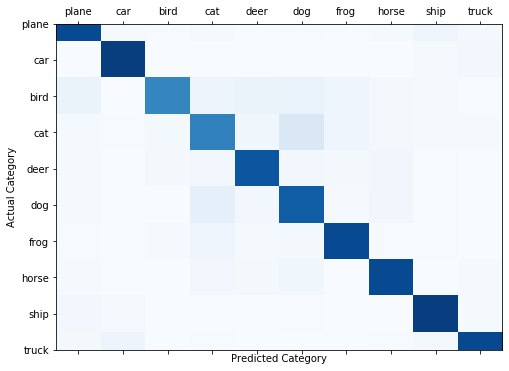

Category   - Accuracy
plane      - 89.6
car        - 94.7
bird       - 66.8
cat        - 68.7
deer       - 85.2
dog        - 82.5
frog       - 89.7
horse      - 89.5
ship       - 94.3
truck      - 90.4

Selected workers

[86 26 49 37 27 55 22 50 44 59 21 61 25 98 45]
Worker 86 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 49 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 27 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 22 : is  Stealthy_Attacker
Worker 50 : is  Stealthy_Attacker
Worker 44 : is  Stealthy_Attacker
Worker 59 : is  Stealthy_Attacker
Worker 21 : is  Stealthy_Attacker
Worker 61 : is  Honest
Worker 25 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 45 : is  Honest

 | Global Training Round : 84 |


Worker 86 starts training in Global Round:84 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  84


Train Epoch: 1 [0/500	(1%)]	Loss: 1.159286
Train Epoch: 1 [400/500	(81%)]	Loss: 0.693836
Train Epoch: 2 [0/500	(1%)]	Loss: 0.300336
Train Epoch: 2 [400/500	(81%)]	Loss: 0.305710
Train Epoch: 3 [0/500	(1%)]	Loss: 0.228677
Train Epoch: 3 [400/500	(81%)]	Loss: 0.228416
Train Epoch: 4 [0/500	(1%)]	Loss: 0.069217
Train Epoch: 4 [400/500	(81%)]	Loss: 0.292260
Train Epoch: 5 [0/500	(1%)]	Loss: 0.227410
Train Epoch: 5 [400/500	(81%)]	Loss: 0.291961

Performed attacks 1
Worker 86 ends training in Global Round:84 |

Worker 26 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.376866
Train Epoch: 1 [400/500	(81%)]	Loss: 0.275518
Train Epoch: 2 [0/500	(1%)]	Loss: 0.096220
Train Epoch: 2 [400/500	(81%)]	Loss: 0.224485
Train Epoch: 3 [0/500	(1%)]	Loss: 0.120258
Train Epoch: 3 [400/500	(81%)]	Loss: 0.121224
Train Epoch: 4 [0/500	(1%)]	Loss: 0.116549
Train Epoch: 4 [400/500	(81%)]	Loss: 0.086593
Train Epoch: 5 [0/500	(1%)]	Loss: 0.052798
Train Epoch: 5 [400/500	(81%)]	Loss: 0.074536

Worker 26 ends training in Global Round:84 |

Worker 49 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.134165
Train Epoch: 1 [400/500	(81%)]	Loss: 0.130401
Train Epoch: 2 [0/500	(1%)]	Loss: 0.058466
Train Epoch: 2 [400/500	(81%)]	Loss: 0.180052
Train Epoch: 3 [0/500	(1%)]	Loss: 0.123260
Train Epoch: 3 [400/500	(81%)]	Loss: 0.151971
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095850
Train Epoch: 4 [400/500	(81%)]	Loss: 0.082418
Train Epoch: 5 [0/500	(1%)]	Loss: 0.036654
Train Epoch: 5 [400/500	(81%)]	Loss: 0.062823

Worker 49 ends training in Global Round:84 |

Worker 37 starts training in Global Round:84 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  84


Train Epoch: 1 [0/500	(1%)]	Loss: 1.244039
Train Epoch: 1 [400/500	(81%)]	Loss: 0.438932
Train Epoch: 2 [0/500	(1%)]	Loss: 0.235845
Train Epoch: 2 [400/500	(81%)]	Loss: 0.624803
Train Epoch: 3 [0/500	(1%)]	Loss: 0.373123
Train Epoch: 3 [400/500	(81%)]	Loss: 0.264979
Train Epoch: 4 [0/500	(1%)]	Loss: 0.207924
Train Epoch: 4 [400/500	(81%)]	Loss: 0.380558
Train Epoch: 5 [0/500	(1%)]	Loss: 0.139210
Train Epoch: 5 [400/500	(81%)]	Loss: 0.141027

Performed attacks 2
Worker 37 ends training in Global Round:84 |

Worker 27 starts training in Global Round:84 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  84


Train Epoch: 1 [0/500	(1%)]	Loss: 1.176076
Train Epoch: 1 [400/500	(81%)]	Loss: 0.397902
Train Epoch: 2 [0/500	(1%)]	Loss: 0.276979
Train Epoch: 2 [400/500	(81%)]	Loss: 0.483614
Train Epoch: 3 [0/500	(1%)]	Loss: 0.154423
Train Epoch: 3 [400/500	(81%)]	Loss: 0.344599
Train Epoch: 4 [0/500	(1%)]	Loss: 0.231647
Train Epoch: 4 [400/500	(81%)]	Loss: 0.350027
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172645
Train Epoch: 5 [400/500	(81%)]	Loss: 0.347050

Performed attacks 3
Worker 27 ends training in Global Round:84 |

Worker 55 starts training in Global Round:84 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  84


Train Epoch: 1 [0/500	(1%)]	Loss: 1.587657
Train Epoch: 1 [400/500	(81%)]	Loss: 0.449309
Train Epoch: 2 [0/500	(1%)]	Loss: 0.212369
Train Epoch: 2 [400/500	(81%)]	Loss: 0.367651
Train Epoch: 3 [0/500	(1%)]	Loss: 0.283123
Train Epoch: 3 [400/500	(81%)]	Loss: 0.274503
Train Epoch: 4 [0/500	(1%)]	Loss: 0.274249
Train Epoch: 4 [400/500	(81%)]	Loss: 0.220051
Train Epoch: 5 [0/500	(1%)]	Loss: 0.150732
Train Epoch: 5 [400/500	(81%)]	Loss: 0.226979

Performed attacks 4
Worker 55 ends training in Global Round:84 |

Worker 22 starts training in Global Round:84 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  84


Train Epoch: 1 [0/500	(1%)]	Loss: 1.473010
Train Epoch: 1 [400/500	(81%)]	Loss: 0.916246
Train Epoch: 2 [0/500	(1%)]	Loss: 0.396667
Train Epoch: 2 [400/500	(81%)]	Loss: 0.535193
Train Epoch: 3 [0/500	(1%)]	Loss: 0.234068
Train Epoch: 3 [400/500	(81%)]	Loss: 0.344899
Train Epoch: 4 [0/500	(1%)]	Loss: 0.176774
Train Epoch: 4 [400/500	(81%)]	Loss: 0.310728
Train Epoch: 5 [0/500	(1%)]	Loss: 0.143128
Train Epoch: 5 [400/500	(81%)]	Loss: 0.190187

Performed attacks 5
Worker 22 ends training in Global Round:84 |

Worker 50 starts training in Global Round:84 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  84


Train Epoch: 1 [0/500	(1%)]	Loss: 1.100132
Train Epoch: 1 [400/500	(81%)]	Loss: 0.481307
Train Epoch: 2 [0/500	(1%)]	Loss: 0.164437
Train Epoch: 2 [400/500	(81%)]	Loss: 0.349735
Train Epoch: 3 [0/500	(1%)]	Loss: 0.165318
Train Epoch: 3 [400/500	(81%)]	Loss: 0.317665
Train Epoch: 4 [0/500	(1%)]	Loss: 0.223578
Train Epoch: 4 [400/500	(81%)]	Loss: 0.263286
Train Epoch: 5 [0/500	(1%)]	Loss: 0.245563
Train Epoch: 5 [400/500	(81%)]	Loss: 0.170049

Performed attacks 6
Worker 50 ends training in Global Round:84 |

Worker 44 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.630706
Train Epoch: 1 [400/500	(81%)]	Loss: 0.741796
Train Epoch: 2 [0/500	(1%)]	Loss: 0.250225
Train Epoch: 2 [400/500	(81%)]	Loss: 0.206015
Train Epoch: 3 [0/500	(1%)]	Loss: 0.173232
Train Epoch: 3 [400/500	(81%)]	Loss: 0.393699
Train Epoch: 4 [0/500	(1%)]	Loss: 0.248999
Train Epoch: 4 [400/500	(81%)]	Loss: 0.255502
Train Epoch: 5 [0/500	(1%)]	Loss: 0.225779
Train Epoch: 5 [400/500	(81%)]	Loss: 0.275046

Worker 44 ends training in Global Round:84 |

Worker 59 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.253691
Train Epoch: 1 [400/500	(81%)]	Loss: 0.365208
Train Epoch: 2 [0/500	(1%)]	Loss: 0.067031
Train Epoch: 2 [400/500	(81%)]	Loss: 0.316844
Train Epoch: 3 [0/500	(1%)]	Loss: 0.129563
Train Epoch: 3 [400/500	(81%)]	Loss: 0.130467
Train Epoch: 4 [0/500	(1%)]	Loss: 0.109422
Train Epoch: 4 [400/500	(81%)]	Loss: 0.193181
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081773
Train Epoch: 5 [400/500	(81%)]	Loss: 0.132970

Worker 59 ends training in Global Round:84 |

Worker 21 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.464557
Train Epoch: 1 [400/500	(81%)]	Loss: 0.460392
Train Epoch: 2 [0/500	(1%)]	Loss: 0.232634
Train Epoch: 2 [400/500	(81%)]	Loss: 0.459043
Train Epoch: 3 [0/500	(1%)]	Loss: 0.272978
Train Epoch: 3 [400/500	(81%)]	Loss: 0.392545
Train Epoch: 4 [0/500	(1%)]	Loss: 0.115449
Train Epoch: 4 [400/500	(81%)]	Loss: 0.241513
Train Epoch: 5 [0/500	(1%)]	Loss: 0.226716
Train Epoch: 5 [400/500	(81%)]	Loss: 0.229800

Worker 21 ends training in Global Round:84 |

Worker 61 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.220354
Train Epoch: 1 [400/500	(81%)]	Loss: 0.261397
Train Epoch: 2 [0/500	(1%)]	Loss: 0.203557
Train Epoch: 2 [400/500	(81%)]	Loss: 0.186924
Train Epoch: 3 [0/500	(1%)]	Loss: 0.129408
Train Epoch: 3 [400/500	(81%)]	Loss: 0.139465
Train Epoch: 4 [0/500	(1%)]	Loss: 0.096674
Train Epoch: 4 [400/500	(81%)]	Loss: 0.311366
Train Epoch: 5 [0/500	(1%)]	Loss: 0.098612
Train Epoch: 5 [400/500	(81%)]	Loss: 0.321490

Worker 61 ends training in Global Round:84 |

Worker 25 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.325154
Train Epoch: 1 [400/500	(81%)]	Loss: 0.394342
Train Epoch: 2 [0/500	(1%)]	Loss: 0.174974
Train Epoch: 2 [400/500	(81%)]	Loss: 0.185980
Train Epoch: 3 [0/500	(1%)]	Loss: 0.128483
Train Epoch: 3 [400/500	(81%)]	Loss: 0.270730
Train Epoch: 4 [0/500	(1%)]	Loss: 0.073778
Train Epoch: 4 [400/500	(81%)]	Loss: 0.115459
Train Epoch: 5 [0/500	(1%)]	Loss: 0.245791
Train Epoch: 5 [400/500	(81%)]	Loss: 0.116072

Worker 25 ends training in Global Round:84 |

Worker 98 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.532483
Train Epoch: 1 [400/500	(81%)]	Loss: 0.832183
Train Epoch: 2 [0/500	(1%)]	Loss: 0.156826
Train Epoch: 2 [400/500	(81%)]	Loss: 0.474152
Train Epoch: 3 [0/500	(1%)]	Loss: 0.285331
Train Epoch: 3 [400/500	(81%)]	Loss: 0.254926
Train Epoch: 4 [0/500	(1%)]	Loss: 0.184838
Train Epoch: 4 [400/500	(81%)]	Loss: 0.240001
Train Epoch: 5 [0/500	(1%)]	Loss: 0.142775
Train Epoch: 5 [400/500	(81%)]	Loss: 0.141957

Worker 98 ends training in Global Round:84 |

Worker 45 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.293256
Train Epoch: 1 [400/500	(81%)]	Loss: 0.325424
Train Epoch: 2 [0/500	(1%)]	Loss: 0.105043
Train Epoch: 2 [400/500	(81%)]	Loss: 0.106451
Train Epoch: 3 [0/500	(1%)]	Loss: 0.091938
Train Epoch: 3 [400/500	(81%)]	Loss: 0.159990
Train Epoch: 4 [0/500	(1%)]	Loss: 0.089689
Train Epoch: 4 [400/500	(81%)]	Loss: 0.106871
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148311
Train Epoch: 5 [400/500	(81%)]	Loss: 0.145035

Worker 45 ends training in Global Round:84 |
Last layer biases  [array([ 0.0364903 , -0.03087876, -0.01174141,  0.03850964,  0.05193168,
       -0.0132732 ,  0.0392255 , -0.03138615, -0.02060031, -0.04237561],
      dtype=float32), array([ 0.03625836, -0.03213717, -0.01407225,  0.03881902,  0.03879824,
       -0.017068  ,  0.0381748 , -0.00780414, -0.02292291, -0.0421443 ],
      dtype=float32), array([ 0.03536924, -0.03233192, -0.01621767,  0.03863228,  0.03893586,
       -0.01505568,  0.03874146, -0.00758048, -0.02383542, -0.04075601],
      dtyp

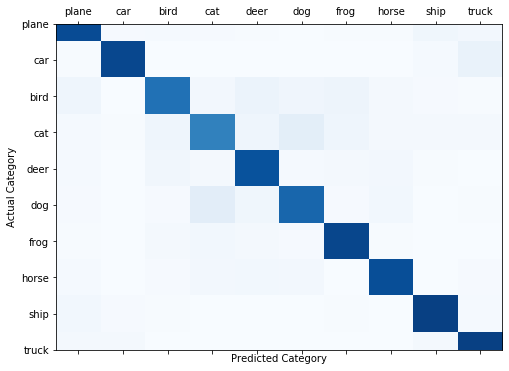

Category   - Accuracy
plane      - 89.3
car        - 90.9
bird       - 74.8
cat        - 68.7
deer       - 87.0
dog        - 79.0
frog       - 91.2
horse      - 88.5
ship       - 93.5
truck      - 93.5

Selected workers

[48 35 17 81 84 66 23 91 32 68  5  3 99 79  2]
Worker 48 : is  Honest
Worker 35 : is  Honest
Worker 17 : is  Honest
Worker 81 : is  Honest
Worker 84 : is  Honest
Worker 66 : is  Stealthy_Attacker
Worker 23 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 32 : is  Honest
Worker 68 : is  Honest
Worker 5 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 2 : is  Honest

 | Global Training Round : 85 |


Worker 48 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.198350
Train Epoch: 1 [400/500	(81%)]	Loss: 0.187481
Train Epoch: 2 [0/500	(1%)]	Loss: 0.101975
Train Epoch: 2 [400/500	(81%)]	Loss: 0.381313
Train Epoch: 3 [0/500	(1%)]	Loss: 0.229701
Train Epoch: 3 [400/500	(81%)]	Loss: 0.152690
Train Epoch: 4 [0/500	(1%)]	Loss: 0.113812
Train Epoch: 4 [400/500	(81%)]	Loss: 0.058931
Train Epoch: 5 [0/500	(1%)]	Loss: 0.065555
Train Epoch: 5 [400/500	(81%)]	Loss: 0.154779

Worker 48 ends training in Global Round:85 |

Worker 35 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.358880
Train Epoch: 1 [400/500	(81%)]	Loss: 0.277425
Train Epoch: 2 [0/500	(1%)]	Loss: 0.182296
Train Epoch: 2 [400/500	(81%)]	Loss: 0.200399
Train Epoch: 3 [0/500	(1%)]	Loss: 0.179624
Train Epoch: 3 [400/500	(81%)]	Loss: 0.095213
Train Epoch: 4 [0/500	(1%)]	Loss: 0.051033
Train Epoch: 4 [400/500	(81%)]	Loss: 0.051125
Train Epoch: 5 [0/500	(1%)]	Loss: 0.043878
Train Epoch: 5 [400/500	(81%)]	Loss: 0.124936

Worker 35 ends training in Global Round:85 |

Worker 17 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.287089
Train Epoch: 1 [400/500	(81%)]	Loss: 0.242910
Train Epoch: 2 [0/500	(1%)]	Loss: 0.071018
Train Epoch: 2 [400/500	(81%)]	Loss: 0.136705
Train Epoch: 3 [0/500	(1%)]	Loss: 0.071242
Train Epoch: 3 [400/500	(81%)]	Loss: 0.214461
Train Epoch: 4 [0/500	(1%)]	Loss: 0.098534
Train Epoch: 4 [400/500	(81%)]	Loss: 0.108206
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114631
Train Epoch: 5 [400/500	(81%)]	Loss: 0.076464

Worker 17 ends training in Global Round:85 |

Worker 81 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.110573
Train Epoch: 1 [400/500	(81%)]	Loss: 0.225079
Train Epoch: 2 [0/500	(1%)]	Loss: 0.128777
Train Epoch: 2 [400/500	(81%)]	Loss: 0.163787
Train Epoch: 3 [0/500	(1%)]	Loss: 0.119921
Train Epoch: 3 [400/500	(81%)]	Loss: 0.093420
Train Epoch: 4 [0/500	(1%)]	Loss: 0.069554
Train Epoch: 4 [400/500	(81%)]	Loss: 0.049701
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100073
Train Epoch: 5 [400/500	(81%)]	Loss: 0.109197

Worker 81 ends training in Global Round:85 |

Worker 84 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.552593
Train Epoch: 1 [400/500	(81%)]	Loss: 0.323335
Train Epoch: 2 [0/500	(1%)]	Loss: 0.206162
Train Epoch: 2 [400/500	(81%)]	Loss: 0.210590
Train Epoch: 3 [0/500	(1%)]	Loss: 0.138197
Train Epoch: 3 [400/500	(81%)]	Loss: 0.115185
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143711
Train Epoch: 4 [400/500	(81%)]	Loss: 0.183818
Train Epoch: 5 [0/500	(1%)]	Loss: 0.102394
Train Epoch: 5 [400/500	(81%)]	Loss: 0.070489

Worker 84 ends training in Global Round:85 |

Worker 66 starts training in Global Round:85 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  85


Train Epoch: 1 [0/500	(1%)]	Loss: 1.792243
Train Epoch: 1 [400/500	(81%)]	Loss: 0.308525
Train Epoch: 2 [0/500	(1%)]	Loss: 0.184484
Train Epoch: 2 [400/500	(81%)]	Loss: 0.339230
Train Epoch: 3 [0/500	(1%)]	Loss: 0.218211
Train Epoch: 3 [400/500	(81%)]	Loss: 0.262571
Train Epoch: 4 [0/500	(1%)]	Loss: 0.211838
Train Epoch: 4 [400/500	(81%)]	Loss: 0.292496
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115902
Train Epoch: 5 [400/500	(81%)]	Loss: 0.099088

Performed attacks 1
Worker 66 ends training in Global Round:85 |

Worker 23 starts training in Global Round:85 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  85


Train Epoch: 1 [0/500	(1%)]	Loss: 1.161312
Train Epoch: 1 [400/500	(81%)]	Loss: 0.325815
Train Epoch: 2 [0/500	(1%)]	Loss: 0.147805
Train Epoch: 2 [400/500	(81%)]	Loss: 0.222051
Train Epoch: 3 [0/500	(1%)]	Loss: 0.279517
Train Epoch: 3 [400/500	(81%)]	Loss: 0.227958
Train Epoch: 4 [0/500	(1%)]	Loss: 0.067264
Train Epoch: 4 [400/500	(81%)]	Loss: 0.106810
Train Epoch: 5 [0/500	(1%)]	Loss: 0.159102
Train Epoch: 5 [400/500	(81%)]	Loss: 0.222687

Performed attacks 2
Worker 23 ends training in Global Round:85 |

Worker 91 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.243966
Train Epoch: 1 [400/500	(81%)]	Loss: 0.188699
Train Epoch: 2 [0/500	(1%)]	Loss: 0.053490
Train Epoch: 2 [400/500	(81%)]	Loss: 0.054983
Train Epoch: 3 [0/500	(1%)]	Loss: 0.037984
Train Epoch: 3 [400/500	(81%)]	Loss: 0.080965
Train Epoch: 4 [0/500	(1%)]	Loss: 0.014362
Train Epoch: 4 [400/500	(81%)]	Loss: 0.060739
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127125
Train Epoch: 5 [400/500	(81%)]	Loss: 0.118492

Worker 91 ends training in Global Round:85 |

Worker 32 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.295480
Train Epoch: 1 [400/500	(81%)]	Loss: 0.359600
Train Epoch: 2 [0/500	(1%)]	Loss: 0.095880
Train Epoch: 2 [400/500	(81%)]	Loss: 0.263152
Train Epoch: 3 [0/500	(1%)]	Loss: 0.141507
Train Epoch: 3 [400/500	(81%)]	Loss: 0.163301
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119243
Train Epoch: 4 [400/500	(81%)]	Loss: 0.163784
Train Epoch: 5 [0/500	(1%)]	Loss: 0.068250
Train Epoch: 5 [400/500	(81%)]	Loss: 0.115830

Worker 32 ends training in Global Round:85 |

Worker 68 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.224026
Train Epoch: 1 [400/500	(81%)]	Loss: 0.348685
Train Epoch: 2 [0/500	(1%)]	Loss: 0.243718
Train Epoch: 2 [400/500	(81%)]	Loss: 0.172756
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145614
Train Epoch: 3 [400/500	(81%)]	Loss: 0.103204
Train Epoch: 4 [0/500	(1%)]	Loss: 0.086002
Train Epoch: 4 [400/500	(81%)]	Loss: 0.129726
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082670
Train Epoch: 5 [400/500	(81%)]	Loss: 0.145585

Worker 68 ends training in Global Round:85 |

Worker 5 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.265105
Train Epoch: 1 [400/500	(81%)]	Loss: 0.252941
Train Epoch: 2 [0/500	(1%)]	Loss: 0.143619
Train Epoch: 2 [400/500	(81%)]	Loss: 0.104631
Train Epoch: 3 [0/500	(1%)]	Loss: 0.088440
Train Epoch: 3 [400/500	(81%)]	Loss: 0.084166
Train Epoch: 4 [0/500	(1%)]	Loss: 0.028459
Train Epoch: 4 [400/500	(81%)]	Loss: 0.074919
Train Epoch: 5 [0/500	(1%)]	Loss: 0.143671
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117627

Worker 5 ends training in Global Round:85 |

Worker 3 starts training in Global Round:85 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  85


Train Epoch: 1 [0/500	(1%)]	Loss: 1.353484
Train Epoch: 1 [400/500	(81%)]	Loss: 0.680440
Train Epoch: 2 [0/500	(1%)]	Loss: 0.396963
Train Epoch: 2 [400/500	(81%)]	Loss: 0.589021
Train Epoch: 3 [0/500	(1%)]	Loss: 0.192786
Train Epoch: 3 [400/500	(81%)]	Loss: 0.311095
Train Epoch: 4 [0/500	(1%)]	Loss: 0.252894
Train Epoch: 4 [400/500	(81%)]	Loss: 0.214683
Train Epoch: 5 [0/500	(1%)]	Loss: 0.151800
Train Epoch: 5 [400/500	(81%)]	Loss: 0.331084

Performed attacks 3
Worker 3 ends training in Global Round:85 |

Worker 99 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.271183
Train Epoch: 1 [400/500	(81%)]	Loss: 0.243801
Train Epoch: 2 [0/500	(1%)]	Loss: 0.060463
Train Epoch: 2 [400/500	(81%)]	Loss: 0.095369
Train Epoch: 3 [0/500	(1%)]	Loss: 0.063775
Train Epoch: 3 [400/500	(81%)]	Loss: 0.061106
Train Epoch: 4 [0/500	(1%)]	Loss: 0.033051
Train Epoch: 4 [400/500	(81%)]	Loss: 0.085554
Train Epoch: 5 [0/500	(1%)]	Loss: 0.037957
Train Epoch: 5 [400/500	(81%)]	Loss: 0.062971

Worker 99 ends training in Global Round:85 |

Worker 79 starts training in Global Round:85 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  85


Train Epoch: 1 [0/500	(1%)]	Loss: 0.951313
Train Epoch: 1 [400/500	(81%)]	Loss: 0.847971
Train Epoch: 2 [0/500	(1%)]	Loss: 0.203936
Train Epoch: 2 [400/500	(81%)]	Loss: 0.401024
Train Epoch: 3 [0/500	(1%)]	Loss: 0.197325
Train Epoch: 3 [400/500	(81%)]	Loss: 0.280255
Train Epoch: 4 [0/500	(1%)]	Loss: 0.139813
Train Epoch: 4 [400/500	(81%)]	Loss: 0.116555
Train Epoch: 5 [0/500	(1%)]	Loss: 0.188225
Train Epoch: 5 [400/500	(81%)]	Loss: 0.168592

Performed attacks 4
Worker 79 ends training in Global Round:85 |

Worker 2 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.283760
Train Epoch: 1 [400/500	(81%)]	Loss: 0.158494
Train Epoch: 2 [0/500	(1%)]	Loss: 0.079586
Train Epoch: 2 [400/500	(81%)]	Loss: 0.148060
Train Epoch: 3 [0/500	(1%)]	Loss: 0.072794
Train Epoch: 3 [400/500	(81%)]	Loss: 0.210232
Train Epoch: 4 [0/500	(1%)]	Loss: 0.053660
Train Epoch: 4 [400/500	(81%)]	Loss: 0.081476
Train Epoch: 5 [0/500	(1%)]	Loss: 0.035535
Train Epoch: 5 [400/500	(81%)]	Loss: 0.123696

Worker 2 ends training in Global Round:85 |
Last layer biases  [array([ 0.035576  , -0.03422466, -0.01262625,  0.03731316,  0.04017658,
       -0.01618689,  0.03928349, -0.00995039, -0.02128028, -0.04217912],
      dtype=float32), array([ 0.03422853, -0.03368281, -0.01442372,  0.04068174,  0.03908136,
       -0.01630195,  0.04032834, -0.01023252, -0.02323313, -0.04054419],
      dtype=float32), array([ 0.03382166, -0.03345966, -0.01561124,  0.03788155,  0.038607  ,
       -0.01441899,  0.03976303, -0.00806408, -0.02076439, -0.04185326],
      dtype

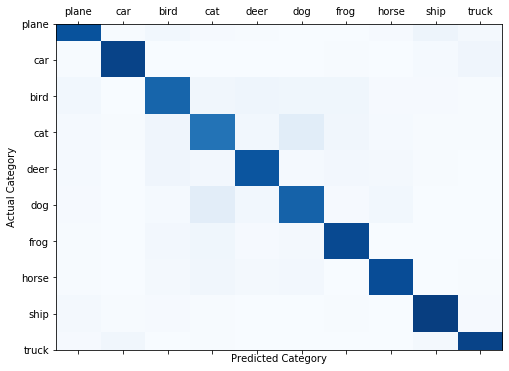

Category   - Accuracy
plane      - 86.8
car        - 92.5
bird       - 79.6
cat        - 74.1
deer       - 85.7
dog        - 80.8
frog       - 89.9
horse      - 88.8
ship       - 94.3
truck      - 92.5

Selected workers

[ 78  93  16 100  62  51  10   9  65  35  69   3  59  38  43]
Worker 78 : is  Honest
Worker 93 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 62 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 10 : is  Honest
Worker 9 : is  Honest
Worker 65 : is  Honest
Worker 35 : is  Honest
Worker 69 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 59 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 43 : is  Honest

 | Global Training Round : 86 |


Worker 78 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.164555
Train Epoch: 1 [400/500	(81%)]	Loss: 0.176363
Train Epoch: 2 [0/500	(1%)]	Loss: 0.129775
Train Epoch: 2 [400/500	(81%)]	Loss: 0.217201
Train Epoch: 3 [0/500	(1%)]	Loss: 0.131291
Train Epoch: 3 [400/500	(81%)]	Loss: 0.100024
Train Epoch: 4 [0/500	(1%)]	Loss: 0.166993
Train Epoch: 4 [400/500	(81%)]	Loss: 0.228839
Train Epoch: 5 [0/500	(1%)]	Loss: 0.101516
Train Epoch: 5 [400/500	(81%)]	Loss: 0.195504

Worker 78 ends training in Global Round:86 |

Worker 93 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.225780
Train Epoch: 1 [400/500	(81%)]	Loss: 0.249583
Train Epoch: 2 [0/500	(1%)]	Loss: 0.124817
Train Epoch: 2 [400/500	(81%)]	Loss: 0.283511
Train Epoch: 3 [0/500	(1%)]	Loss: 0.159074
Train Epoch: 3 [400/500	(81%)]	Loss: 0.104507
Train Epoch: 4 [0/500	(1%)]	Loss: 0.058549
Train Epoch: 4 [400/500	(81%)]	Loss: 0.097525
Train Epoch: 5 [0/500	(1%)]	Loss: 0.063200
Train Epoch: 5 [400/500	(81%)]	Loss: 0.064682

Worker 93 ends training in Global Round:86 |

Worker 16 starts training in Global Round:86 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  86


Train Epoch: 1 [0/500	(1%)]	Loss: 1.682011
Train Epoch: 1 [400/500	(81%)]	Loss: 0.720337
Train Epoch: 2 [0/500	(1%)]	Loss: 0.329731
Train Epoch: 2 [400/500	(81%)]	Loss: 0.447426
Train Epoch: 3 [0/500	(1%)]	Loss: 0.284399
Train Epoch: 3 [400/500	(81%)]	Loss: 0.331119
Train Epoch: 4 [0/500	(1%)]	Loss: 0.168432
Train Epoch: 4 [400/500	(81%)]	Loss: 0.460023
Train Epoch: 5 [0/500	(1%)]	Loss: 0.103998
Train Epoch: 5 [400/500	(81%)]	Loss: 0.195115

Performed attacks 1
Worker 16 ends training in Global Round:86 |

Worker 100 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.204588
Train Epoch: 1 [400/500	(81%)]	Loss: 0.125254
Train Epoch: 2 [0/500	(1%)]	Loss: 0.061125
Train Epoch: 2 [400/500	(81%)]	Loss: 0.076884
Train Epoch: 3 [0/500	(1%)]	Loss: 0.031965
Train Epoch: 3 [400/500	(81%)]	Loss: 0.040725
Train Epoch: 4 [0/500	(1%)]	Loss: 0.031836
Train Epoch: 4 [400/500	(81%)]	Loss: 0.087945
Train Epoch: 5 [0/500	(1%)]	Loss: 0.031403
Train Epoch: 5 [400/500	(81%)]	Loss: 0.058928

Worker 100 ends training in Global Round:86 |

Worker 62 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.382027
Train Epoch: 1 [400/500	(81%)]	Loss: 0.515202
Train Epoch: 2 [0/500	(1%)]	Loss: 0.170897
Train Epoch: 2 [400/500	(81%)]	Loss: 0.147116
Train Epoch: 3 [0/500	(1%)]	Loss: 0.100549
Train Epoch: 3 [400/500	(81%)]	Loss: 0.305279
Train Epoch: 4 [0/500	(1%)]	Loss: 0.117386
Train Epoch: 4 [400/500	(81%)]	Loss: 0.209215
Train Epoch: 5 [0/500	(1%)]	Loss: 0.237955
Train Epoch: 5 [400/500	(81%)]	Loss: 0.156366

Worker 62 ends training in Global Round:86 |

Worker 51 starts training in Global Round:86 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  86


Train Epoch: 1 [0/500	(1%)]	Loss: 0.740516
Train Epoch: 1 [400/500	(81%)]	Loss: 0.640061
Train Epoch: 2 [0/500	(1%)]	Loss: 0.296856
Train Epoch: 2 [400/500	(81%)]	Loss: 0.352064
Train Epoch: 3 [0/500	(1%)]	Loss: 0.444150
Train Epoch: 3 [400/500	(81%)]	Loss: 0.241074
Train Epoch: 4 [0/500	(1%)]	Loss: 0.202885
Train Epoch: 4 [400/500	(81%)]	Loss: 0.284292
Train Epoch: 5 [0/500	(1%)]	Loss: 0.067894
Train Epoch: 5 [400/500	(81%)]	Loss: 0.138689

Performed attacks 2
Worker 51 ends training in Global Round:86 |

Worker 10 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.330363
Train Epoch: 1 [400/500	(81%)]	Loss: 0.362951
Train Epoch: 2 [0/500	(1%)]	Loss: 0.065247
Train Epoch: 2 [400/500	(81%)]	Loss: 0.114040
Train Epoch: 3 [0/500	(1%)]	Loss: 0.123973
Train Epoch: 3 [400/500	(81%)]	Loss: 0.095897
Train Epoch: 4 [0/500	(1%)]	Loss: 0.085954
Train Epoch: 4 [400/500	(81%)]	Loss: 0.205178
Train Epoch: 5 [0/500	(1%)]	Loss: 0.043654
Train Epoch: 5 [400/500	(81%)]	Loss: 0.054497

Worker 10 ends training in Global Round:86 |

Worker 9 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.278273
Train Epoch: 1 [400/500	(81%)]	Loss: 0.483737
Train Epoch: 2 [0/500	(1%)]	Loss: 0.238319
Train Epoch: 2 [400/500	(81%)]	Loss: 0.400714
Train Epoch: 3 [0/500	(1%)]	Loss: 0.141881
Train Epoch: 3 [400/500	(81%)]	Loss: 0.150723
Train Epoch: 4 [0/500	(1%)]	Loss: 0.171049
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213393
Train Epoch: 5 [0/500	(1%)]	Loss: 0.154529
Train Epoch: 5 [400/500	(81%)]	Loss: 0.101164

Worker 9 ends training in Global Round:86 |

Worker 65 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.096185
Train Epoch: 1 [400/500	(81%)]	Loss: 0.299376
Train Epoch: 2 [0/500	(1%)]	Loss: 0.117124
Train Epoch: 2 [400/500	(81%)]	Loss: 0.084572
Train Epoch: 3 [0/500	(1%)]	Loss: 0.110488
Train Epoch: 3 [400/500	(81%)]	Loss: 0.053687
Train Epoch: 4 [0/500	(1%)]	Loss: 0.032862
Train Epoch: 4 [400/500	(81%)]	Loss: 0.093932
Train Epoch: 5 [0/500	(1%)]	Loss: 0.022309
Train Epoch: 5 [400/500	(81%)]	Loss: 0.019977

Worker 65 ends training in Global Round:86 |

Worker 35 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.237906
Train Epoch: 1 [400/500	(81%)]	Loss: 0.358884
Train Epoch: 2 [0/500	(1%)]	Loss: 0.119349
Train Epoch: 2 [400/500	(81%)]	Loss: 0.123571
Train Epoch: 3 [0/500	(1%)]	Loss: 0.070881
Train Epoch: 3 [400/500	(81%)]	Loss: 0.124913
Train Epoch: 4 [0/500	(1%)]	Loss: 0.067905
Train Epoch: 4 [400/500	(81%)]	Loss: 0.120923
Train Epoch: 5 [0/500	(1%)]	Loss: 0.144653
Train Epoch: 5 [400/500	(81%)]	Loss: 0.187934

Worker 35 ends training in Global Round:86 |

Worker 69 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.162321
Train Epoch: 1 [400/500	(81%)]	Loss: 0.246907
Train Epoch: 2 [0/500	(1%)]	Loss: 0.077104
Train Epoch: 2 [400/500	(81%)]	Loss: 0.280595
Train Epoch: 3 [0/500	(1%)]	Loss: 0.085901
Train Epoch: 3 [400/500	(81%)]	Loss: 0.073314
Train Epoch: 4 [0/500	(1%)]	Loss: 0.090998
Train Epoch: 4 [400/500	(81%)]	Loss: 0.207721
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075940
Train Epoch: 5 [400/500	(81%)]	Loss: 0.141647

Worker 69 ends training in Global Round:86 |

Worker 3 starts training in Global Round:86 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  86


Train Epoch: 1 [0/500	(1%)]	Loss: 1.385521
Train Epoch: 1 [400/500	(81%)]	Loss: 0.587427
Train Epoch: 2 [0/500	(1%)]	Loss: 0.306554
Train Epoch: 2 [400/500	(81%)]	Loss: 0.454419
Train Epoch: 3 [0/500	(1%)]	Loss: 0.245833
Train Epoch: 3 [400/500	(81%)]	Loss: 0.413596
Train Epoch: 4 [0/500	(1%)]	Loss: 0.340852
Train Epoch: 4 [400/500	(81%)]	Loss: 0.376302
Train Epoch: 5 [0/500	(1%)]	Loss: 0.108376
Train Epoch: 5 [400/500	(81%)]	Loss: 0.268242

Performed attacks 3
Worker 3 ends training in Global Round:86 |

Worker 59 starts training in Global Round:86 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  86


Train Epoch: 1 [0/500	(1%)]	Loss: 0.688438
Train Epoch: 1 [400/500	(81%)]	Loss: 0.268496
Train Epoch: 2 [0/500	(1%)]	Loss: 0.342271
Train Epoch: 2 [400/500	(81%)]	Loss: 0.286680
Train Epoch: 3 [0/500	(1%)]	Loss: 0.160676
Train Epoch: 3 [400/500	(81%)]	Loss: 0.182880
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140003
Train Epoch: 4 [400/500	(81%)]	Loss: 0.290055
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118086
Train Epoch: 5 [400/500	(81%)]	Loss: 0.134686

Performed attacks 4
Worker 59 ends training in Global Round:86 |

Worker 38 starts training in Global Round:86 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  86


Train Epoch: 1 [0/500	(1%)]	Loss: 1.592170
Train Epoch: 1 [400/500	(81%)]	Loss: 0.346224
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209962
Train Epoch: 2 [400/500	(81%)]	Loss: 0.351715
Train Epoch: 3 [0/500	(1%)]	Loss: 0.308057
Train Epoch: 3 [400/500	(81%)]	Loss: 0.252557
Train Epoch: 4 [0/500	(1%)]	Loss: 0.141108
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182912
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081489
Train Epoch: 5 [400/500	(81%)]	Loss: 0.305690

Performed attacks 5
Worker 38 ends training in Global Round:86 |

Worker 43 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.083188
Train Epoch: 1 [400/500	(81%)]	Loss: 0.139377
Train Epoch: 2 [0/500	(1%)]	Loss: 0.090260
Train Epoch: 2 [400/500	(81%)]	Loss: 0.103182
Train Epoch: 3 [0/500	(1%)]	Loss: 0.083025
Train Epoch: 3 [400/500	(81%)]	Loss: 0.086875
Train Epoch: 4 [0/500	(1%)]	Loss: 0.057563
Train Epoch: 4 [400/500	(81%)]	Loss: 0.151788
Train Epoch: 5 [0/500	(1%)]	Loss: 0.120979
Train Epoch: 5 [400/500	(81%)]	Loss: 0.075802

Worker 43 ends training in Global Round:86 |
Last layer biases  [array([ 0.0350254 , -0.03231967, -0.01353776,  0.04045848,  0.04101144,
       -0.01624262,  0.03825593, -0.01096753, -0.02387474, -0.04190732],
      dtype=float32), array([ 0.03540628, -0.03255193, -0.01626836,  0.03845697,  0.03961001,
       -0.01406962,  0.03767394, -0.00877698, -0.02323291, -0.04034576],
      dtype=float32), array([ 0.03845701, -0.03163961, -0.01387275,  0.03695737,  0.05511578,
       -0.01715815,  0.04154898, -0.02907629, -0.02213622, -0.04229451],
      dtyp

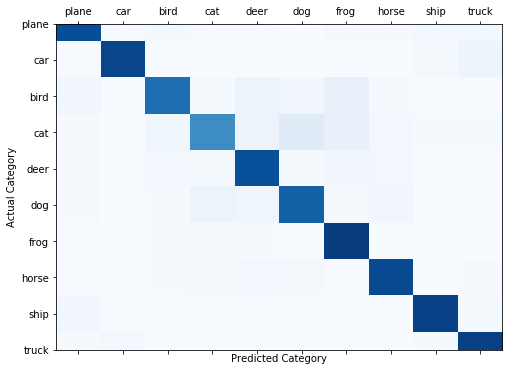

Category   - Accuracy
plane      - 88.4
car        - 91.6
bird       - 76.3
cat        - 64.3
deer       - 87.5
dog        - 81.4
frog       - 95.3
horse      - 89.6
ship       - 93.1
truck      - 93.5

Selected workers

[ 60  85  24 100  29  86  36   2  88  45  32  54  12   6  71]
Worker 60 : is  Honest
Worker 85 : is  Honest
Worker 24 : is  Honest
Worker 100 : is  Honest
Worker 29 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 2 : is  Honest
Worker 88 : is  Honest
Worker 45 : is  Honest
Worker 32 : is  Honest
Worker 54 : is  Honest
Worker 12 : is  Stealthy_Attacker
Worker 6 : is  Stealthy_Attacker
Worker 71 : is  Stealthy_Attacker

 | Global Training Round : 87 |


Worker 60 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.257868
Train Epoch: 1 [400/500	(81%)]	Loss: 0.297841
Train Epoch: 2 [0/500	(1%)]	Loss: 0.164763
Train Epoch: 2 [400/500	(81%)]	Loss: 0.142380
Train Epoch: 3 [0/500	(1%)]	Loss: 0.107494
Train Epoch: 3 [400/500	(81%)]	Loss: 0.065211
Train Epoch: 4 [0/500	(1%)]	Loss: 0.068527
Train Epoch: 4 [400/500	(81%)]	Loss: 0.153410
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133138
Train Epoch: 5 [400/500	(81%)]	Loss: 0.116330

Worker 60 ends training in Global Round:87 |

Worker 85 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.322607
Train Epoch: 1 [400/500	(81%)]	Loss: 0.432884
Train Epoch: 2 [0/500	(1%)]	Loss: 0.071377
Train Epoch: 2 [400/500	(81%)]	Loss: 0.314777
Train Epoch: 3 [0/500	(1%)]	Loss: 0.169971
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234371
Train Epoch: 4 [0/500	(1%)]	Loss: 0.112322
Train Epoch: 4 [400/500	(81%)]	Loss: 0.180083
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107732
Train Epoch: 5 [400/500	(81%)]	Loss: 0.123723

Worker 85 ends training in Global Round:87 |

Worker 24 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.226765
Train Epoch: 1 [400/500	(81%)]	Loss: 0.113238
Train Epoch: 2 [0/500	(1%)]	Loss: 0.079070
Train Epoch: 2 [400/500	(81%)]	Loss: 0.065932
Train Epoch: 3 [0/500	(1%)]	Loss: 0.023292
Train Epoch: 3 [400/500	(81%)]	Loss: 0.070441
Train Epoch: 4 [0/500	(1%)]	Loss: 0.084319
Train Epoch: 4 [400/500	(81%)]	Loss: 0.049717
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160824
Train Epoch: 5 [400/500	(81%)]	Loss: 0.110269

Worker 24 ends training in Global Round:87 |

Worker 100 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.130848
Train Epoch: 1 [400/500	(81%)]	Loss: 0.117834
Train Epoch: 2 [0/500	(1%)]	Loss: 0.064597
Train Epoch: 2 [400/500	(81%)]	Loss: 0.087952
Train Epoch: 3 [0/500	(1%)]	Loss: 0.083293
Train Epoch: 3 [400/500	(81%)]	Loss: 0.151874
Train Epoch: 4 [0/500	(1%)]	Loss: 0.019533
Train Epoch: 4 [400/500	(81%)]	Loss: 0.088742
Train Epoch: 5 [0/500	(1%)]	Loss: 0.033407
Train Epoch: 5 [400/500	(81%)]	Loss: 0.066164

Worker 100 ends training in Global Round:87 |

Worker 29 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.285576
Train Epoch: 1 [400/500	(81%)]	Loss: 0.246699
Train Epoch: 2 [0/500	(1%)]	Loss: 0.087590
Train Epoch: 2 [400/500	(81%)]	Loss: 0.082676
Train Epoch: 3 [0/500	(1%)]	Loss: 0.060254
Train Epoch: 3 [400/500	(81%)]	Loss: 0.139605
Train Epoch: 4 [0/500	(1%)]	Loss: 0.111092
Train Epoch: 4 [400/500	(81%)]	Loss: 0.058369
Train Epoch: 5 [0/500	(1%)]	Loss: 0.076426
Train Epoch: 5 [400/500	(81%)]	Loss: 0.094003

Worker 29 ends training in Global Round:87 |

Worker 86 starts training in Global Round:87 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  87


Train Epoch: 1 [0/500	(1%)]	Loss: 1.163089
Train Epoch: 1 [400/500	(81%)]	Loss: 0.489318
Train Epoch: 2 [0/500	(1%)]	Loss: 0.295791
Train Epoch: 2 [400/500	(81%)]	Loss: 0.390613
Train Epoch: 3 [0/500	(1%)]	Loss: 0.298433
Train Epoch: 3 [400/500	(81%)]	Loss: 0.257836
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149072
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169028
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122178
Train Epoch: 5 [400/500	(81%)]	Loss: 0.141821

Performed attacks 1
Worker 86 ends training in Global Round:87 |

Worker 36 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.140752
Train Epoch: 1 [400/500	(81%)]	Loss: 0.192565
Train Epoch: 2 [0/500	(1%)]	Loss: 0.085571
Train Epoch: 2 [400/500	(81%)]	Loss: 0.077676
Train Epoch: 3 [0/500	(1%)]	Loss: 0.045139
Train Epoch: 3 [400/500	(81%)]	Loss: 0.116814
Train Epoch: 4 [0/500	(1%)]	Loss: 0.053537
Train Epoch: 4 [400/500	(81%)]	Loss: 0.075407
Train Epoch: 5 [0/500	(1%)]	Loss: 0.061996
Train Epoch: 5 [400/500	(81%)]	Loss: 0.204593

Worker 36 ends training in Global Round:87 |

Worker 2 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.101641
Train Epoch: 1 [400/500	(81%)]	Loss: 0.080511
Train Epoch: 2 [0/500	(1%)]	Loss: 0.064340
Train Epoch: 2 [400/500	(81%)]	Loss: 0.058087
Train Epoch: 3 [0/500	(1%)]	Loss: 0.018282
Train Epoch: 3 [400/500	(81%)]	Loss: 0.104386
Train Epoch: 4 [0/500	(1%)]	Loss: 0.020795
Train Epoch: 4 [400/500	(81%)]	Loss: 0.074703
Train Epoch: 5 [0/500	(1%)]	Loss: 0.104077
Train Epoch: 5 [400/500	(81%)]	Loss: 0.057898

Worker 2 ends training in Global Round:87 |

Worker 88 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.394605
Train Epoch: 1 [400/500	(81%)]	Loss: 0.286724
Train Epoch: 2 [0/500	(1%)]	Loss: 0.165503
Train Epoch: 2 [400/500	(81%)]	Loss: 0.177535
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151717
Train Epoch: 3 [400/500	(81%)]	Loss: 0.319454
Train Epoch: 4 [0/500	(1%)]	Loss: 0.084903
Train Epoch: 4 [400/500	(81%)]	Loss: 0.147000
Train Epoch: 5 [0/500	(1%)]	Loss: 0.169572
Train Epoch: 5 [400/500	(81%)]	Loss: 0.251376

Worker 88 ends training in Global Round:87 |

Worker 45 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.089931
Train Epoch: 1 [400/500	(81%)]	Loss: 0.153040
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209551
Train Epoch: 2 [400/500	(81%)]	Loss: 0.189898
Train Epoch: 3 [0/500	(1%)]	Loss: 0.116092
Train Epoch: 3 [400/500	(81%)]	Loss: 0.148842
Train Epoch: 4 [0/500	(1%)]	Loss: 0.075645
Train Epoch: 4 [400/500	(81%)]	Loss: 0.080804
Train Epoch: 5 [0/500	(1%)]	Loss: 0.042522
Train Epoch: 5 [400/500	(81%)]	Loss: 0.165823

Worker 45 ends training in Global Round:87 |

Worker 32 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.210794
Train Epoch: 1 [400/500	(81%)]	Loss: 0.375560
Train Epoch: 2 [0/500	(1%)]	Loss: 0.105022
Train Epoch: 2 [400/500	(81%)]	Loss: 0.172147
Train Epoch: 3 [0/500	(1%)]	Loss: 0.126416
Train Epoch: 3 [400/500	(81%)]	Loss: 0.213467
Train Epoch: 4 [0/500	(1%)]	Loss: 0.111278
Train Epoch: 4 [400/500	(81%)]	Loss: 0.043472
Train Epoch: 5 [0/500	(1%)]	Loss: 0.092168
Train Epoch: 5 [400/500	(81%)]	Loss: 0.115979

Worker 32 ends training in Global Round:87 |

Worker 54 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.231586
Train Epoch: 1 [400/500	(81%)]	Loss: 0.246698
Train Epoch: 2 [0/500	(1%)]	Loss: 0.218770
Train Epoch: 2 [400/500	(81%)]	Loss: 0.190918
Train Epoch: 3 [0/500	(1%)]	Loss: 0.083166
Train Epoch: 3 [400/500	(81%)]	Loss: 0.105693
Train Epoch: 4 [0/500	(1%)]	Loss: 0.100863
Train Epoch: 4 [400/500	(81%)]	Loss: 0.117089
Train Epoch: 5 [0/500	(1%)]	Loss: 0.058251
Train Epoch: 5 [400/500	(81%)]	Loss: 0.167224

Worker 54 ends training in Global Round:87 |

Worker 12 starts training in Global Round:87 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  87


Train Epoch: 1 [0/500	(1%)]	Loss: 1.275205
Train Epoch: 1 [400/500	(81%)]	Loss: 0.318233
Train Epoch: 2 [0/500	(1%)]	Loss: 0.236193
Train Epoch: 2 [400/500	(81%)]	Loss: 0.212290
Train Epoch: 3 [0/500	(1%)]	Loss: 0.152002
Train Epoch: 3 [400/500	(81%)]	Loss: 0.244328
Train Epoch: 4 [0/500	(1%)]	Loss: 0.177829
Train Epoch: 4 [400/500	(81%)]	Loss: 0.212886
Train Epoch: 5 [0/500	(1%)]	Loss: 0.130360
Train Epoch: 5 [400/500	(81%)]	Loss: 0.114600

Performed attacks 2
Worker 12 ends training in Global Round:87 |

Worker 6 starts training in Global Round:87 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  87


Train Epoch: 1 [0/500	(1%)]	Loss: 1.003081
Train Epoch: 1 [400/500	(81%)]	Loss: 0.604091
Train Epoch: 2 [0/500	(1%)]	Loss: 0.322593
Train Epoch: 2 [400/500	(81%)]	Loss: 0.456800
Train Epoch: 3 [0/500	(1%)]	Loss: 0.227734
Train Epoch: 3 [400/500	(81%)]	Loss: 0.339905
Train Epoch: 4 [0/500	(1%)]	Loss: 0.175217
Train Epoch: 4 [400/500	(81%)]	Loss: 0.241045
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118898
Train Epoch: 5 [400/500	(81%)]	Loss: 0.179261

Performed attacks 3
Worker 6 ends training in Global Round:87 |

Worker 71 starts training in Global Round:87 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  87


Train Epoch: 1 [0/500	(1%)]	Loss: 1.268518
Train Epoch: 1 [400/500	(81%)]	Loss: 0.888843
Train Epoch: 2 [0/500	(1%)]	Loss: 0.182721
Train Epoch: 2 [400/500	(81%)]	Loss: 0.528883
Train Epoch: 3 [0/500	(1%)]	Loss: 0.311053
Train Epoch: 3 [400/500	(81%)]	Loss: 0.277013
Train Epoch: 4 [0/500	(1%)]	Loss: 0.285350
Train Epoch: 4 [400/500	(81%)]	Loss: 0.229422
Train Epoch: 5 [0/500	(1%)]	Loss: 0.215447
Train Epoch: 5 [400/500	(81%)]	Loss: 0.111025

Performed attacks 4
Worker 71 ends training in Global Round:87 |
Last layer biases  [array([ 0.03502204, -0.03193492, -0.01405188,  0.03773926,  0.04098433,
       -0.01416494,  0.03834448, -0.00909272, -0.02323686, -0.04370719],
      dtype=float32), array([ 0.0351967 , -0.03214903, -0.01476731,  0.03968645,  0.04151808,
       -0.01545006,  0.03668155, -0.00942338, -0.02310129, -0.04229011],
      dtype=float32), array([ 0.03440239, -0.03337056, -0.01608201,  0.03929282,  0.03963029,
       -0.01413445,  0.04039148, -0.00912808, -0.02317267, -0.0

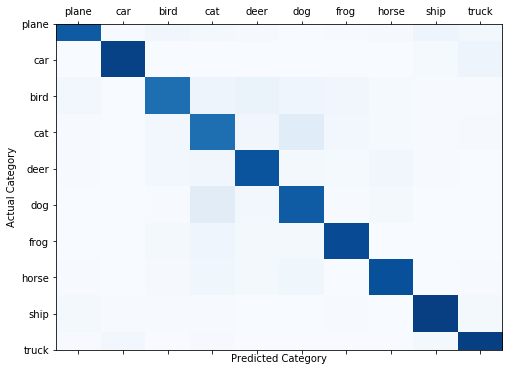

Category   - Accuracy
plane      - 83.3
car        - 92.6
bird       - 75.9
cat        - 76.0
deer       - 86.2
dog        - 82.9
frog       - 89.1
horse      - 87.8
ship       - 94.0
truck      - 94.1

Selected workers

[41 59 92 13 42 19 96 55 17 99 27 62 39 37 82]
Worker 41 : is  Stealthy_Attacker
Worker 59 : is  Stealthy_Attacker
Worker 92 : is  Stealthy_Attacker
Worker 13 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 19 : is  Stealthy_Attacker
Worker 96 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 17 : is  Honest
Worker 99 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 62 : is  Honest
Worker 39 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 82 : is  Honest

 | Global Training Round : 88 |


Worker 41 starts training in Global Round:88 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  88


Train Epoch: 1 [0/500	(1%)]	Loss: 1.872459
Train Epoch: 1 [400/500	(81%)]	Loss: 0.583202
Train Epoch: 2 [0/500	(1%)]	Loss: 0.335627
Train Epoch: 2 [400/500	(81%)]	Loss: 0.313170
Train Epoch: 3 [0/500	(1%)]	Loss: 0.201174
Train Epoch: 3 [400/500	(81%)]	Loss: 0.259396
Train Epoch: 4 [0/500	(1%)]	Loss: 0.289084
Train Epoch: 4 [400/500	(81%)]	Loss: 0.280820
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182305
Train Epoch: 5 [400/500	(81%)]	Loss: 0.144568

Performed attacks 1
Worker 41 ends training in Global Round:88 |

Worker 59 starts training in Global Round:88 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  88


Train Epoch: 1 [0/500	(1%)]	Loss: 0.878137
Train Epoch: 1 [400/500	(81%)]	Loss: 0.427100
Train Epoch: 2 [0/500	(1%)]	Loss: 0.269350
Train Epoch: 2 [400/500	(81%)]	Loss: 0.379223
Train Epoch: 3 [0/500	(1%)]	Loss: 0.222439
Train Epoch: 3 [400/500	(81%)]	Loss: 0.285538
Train Epoch: 4 [0/500	(1%)]	Loss: 0.206822
Train Epoch: 4 [400/500	(81%)]	Loss: 0.154642
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172929
Train Epoch: 5 [400/500	(81%)]	Loss: 0.175141

Performed attacks 2
Worker 59 ends training in Global Round:88 |

Worker 92 starts training in Global Round:88 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  88


Train Epoch: 1 [0/500	(1%)]	Loss: 1.218380
Train Epoch: 1 [400/500	(81%)]	Loss: 0.463349
Train Epoch: 2 [0/500	(1%)]	Loss: 0.340874
Train Epoch: 2 [400/500	(81%)]	Loss: 0.471217
Train Epoch: 3 [0/500	(1%)]	Loss: 0.282980
Train Epoch: 3 [400/500	(81%)]	Loss: 0.279704
Train Epoch: 4 [0/500	(1%)]	Loss: 0.125462
Train Epoch: 4 [400/500	(81%)]	Loss: 0.239074
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175878
Train Epoch: 5 [400/500	(81%)]	Loss: 0.081796

Performed attacks 3
Worker 92 ends training in Global Round:88 |

Worker 13 starts training in Global Round:88 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  88


Train Epoch: 1 [0/500	(1%)]	Loss: 0.830668
Train Epoch: 1 [400/500	(81%)]	Loss: 0.584162
Train Epoch: 2 [0/500	(1%)]	Loss: 0.351482
Train Epoch: 2 [400/500	(81%)]	Loss: 0.390552
Train Epoch: 3 [0/500	(1%)]	Loss: 0.238011
Train Epoch: 3 [400/500	(81%)]	Loss: 0.281126
Train Epoch: 4 [0/500	(1%)]	Loss: 0.166306
Train Epoch: 4 [400/500	(81%)]	Loss: 0.224757
Train Epoch: 5 [0/500	(1%)]	Loss: 0.146996
Train Epoch: 5 [400/500	(81%)]	Loss: 0.125115

Performed attacks 4
Worker 13 ends training in Global Round:88 |

Worker 42 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.197602
Train Epoch: 1 [400/500	(81%)]	Loss: 0.250672
Train Epoch: 2 [0/500	(1%)]	Loss: 0.054094
Train Epoch: 2 [400/500	(81%)]	Loss: 0.211568
Train Epoch: 3 [0/500	(1%)]	Loss: 0.043657
Train Epoch: 3 [400/500	(81%)]	Loss: 0.171073
Train Epoch: 4 [0/500	(1%)]	Loss: 0.092430
Train Epoch: 4 [400/500	(81%)]	Loss: 0.093279
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125557
Train Epoch: 5 [400/500	(81%)]	Loss: 0.091597

Worker 42 ends training in Global Round:88 |

Worker 19 starts training in Global Round:88 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  88


Train Epoch: 1 [0/500	(1%)]	Loss: 1.086335
Train Epoch: 1 [400/500	(81%)]	Loss: 0.518906
Train Epoch: 2 [0/500	(1%)]	Loss: 0.287157
Train Epoch: 2 [400/500	(81%)]	Loss: 0.424434
Train Epoch: 3 [0/500	(1%)]	Loss: 0.164785
Train Epoch: 3 [400/500	(81%)]	Loss: 0.270209
Train Epoch: 4 [0/500	(1%)]	Loss: 0.233710
Train Epoch: 4 [400/500	(81%)]	Loss: 0.093994
Train Epoch: 5 [0/500	(1%)]	Loss: 0.129488
Train Epoch: 5 [400/500	(81%)]	Loss: 0.138765

Performed attacks 5
Worker 19 ends training in Global Round:88 |

Worker 96 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.303251
Train Epoch: 1 [400/500	(81%)]	Loss: 0.250864
Train Epoch: 2 [0/500	(1%)]	Loss: 0.105624
Train Epoch: 2 [400/500	(81%)]	Loss: 0.124140
Train Epoch: 3 [0/500	(1%)]	Loss: 0.109428
Train Epoch: 3 [400/500	(81%)]	Loss: 0.209988
Train Epoch: 4 [0/500	(1%)]	Loss: 0.055958
Train Epoch: 4 [400/500	(81%)]	Loss: 0.031025
Train Epoch: 5 [0/500	(1%)]	Loss: 0.113648
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191103

Worker 96 ends training in Global Round:88 |

Worker 55 starts training in Global Round:88 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  88


Train Epoch: 1 [0/500	(1%)]	Loss: 1.543633
Train Epoch: 1 [400/500	(81%)]	Loss: 0.605067
Train Epoch: 2 [0/500	(1%)]	Loss: 0.458133
Train Epoch: 2 [400/500	(81%)]	Loss: 0.436980
Train Epoch: 3 [0/500	(1%)]	Loss: 0.334189
Train Epoch: 3 [400/500	(81%)]	Loss: 0.430057
Train Epoch: 4 [0/500	(1%)]	Loss: 0.205967
Train Epoch: 4 [400/500	(81%)]	Loss: 0.230679
Train Epoch: 5 [0/500	(1%)]	Loss: 0.250873
Train Epoch: 5 [400/500	(81%)]	Loss: 0.114210

Performed attacks 6
Worker 55 ends training in Global Round:88 |

Worker 17 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.180870
Train Epoch: 1 [400/500	(81%)]	Loss: 0.227709
Train Epoch: 2 [0/500	(1%)]	Loss: 0.132406
Train Epoch: 2 [400/500	(81%)]	Loss: 0.108580
Train Epoch: 3 [0/500	(1%)]	Loss: 0.105069
Train Epoch: 3 [400/500	(81%)]	Loss: 0.044055
Train Epoch: 4 [0/500	(1%)]	Loss: 0.065051
Train Epoch: 4 [400/500	(81%)]	Loss: 0.094016
Train Epoch: 5 [0/500	(1%)]	Loss: 0.120662
Train Epoch: 5 [400/500	(81%)]	Loss: 0.044754

Worker 17 ends training in Global Round:88 |

Worker 99 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.186243
Train Epoch: 1 [400/500	(81%)]	Loss: 0.088695
Train Epoch: 2 [0/500	(1%)]	Loss: 0.105387
Train Epoch: 2 [400/500	(81%)]	Loss: 0.088775
Train Epoch: 3 [0/500	(1%)]	Loss: 0.041024
Train Epoch: 3 [400/500	(81%)]	Loss: 0.110719
Train Epoch: 4 [0/500	(1%)]	Loss: 0.062972
Train Epoch: 4 [400/500	(81%)]	Loss: 0.050730
Train Epoch: 5 [0/500	(1%)]	Loss: 0.031461
Train Epoch: 5 [400/500	(81%)]	Loss: 0.163566

Worker 99 ends training in Global Round:88 |

Worker 27 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.334323
Train Epoch: 1 [400/500	(81%)]	Loss: 0.451003
Train Epoch: 2 [0/500	(1%)]	Loss: 0.290629
Train Epoch: 2 [400/500	(81%)]	Loss: 0.434784
Train Epoch: 3 [0/500	(1%)]	Loss: 0.335378
Train Epoch: 3 [400/500	(81%)]	Loss: 0.197416
Train Epoch: 4 [0/500	(1%)]	Loss: 0.190568
Train Epoch: 4 [400/500	(81%)]	Loss: 0.241714
Train Epoch: 5 [0/500	(1%)]	Loss: 0.200349
Train Epoch: 5 [400/500	(81%)]	Loss: 0.085416

Worker 27 ends training in Global Round:88 |

Worker 62 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.354117
Train Epoch: 1 [400/500	(81%)]	Loss: 0.522077
Train Epoch: 2 [0/500	(1%)]	Loss: 0.182349
Train Epoch: 2 [400/500	(81%)]	Loss: 0.191558
Train Epoch: 3 [0/500	(1%)]	Loss: 0.141575
Train Epoch: 3 [400/500	(81%)]	Loss: 0.181730
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200140
Train Epoch: 4 [400/500	(81%)]	Loss: 0.132874
Train Epoch: 5 [0/500	(1%)]	Loss: 0.088845
Train Epoch: 5 [400/500	(81%)]	Loss: 0.176199

Worker 62 ends training in Global Round:88 |

Worker 39 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.233219
Train Epoch: 1 [400/500	(81%)]	Loss: 0.112575
Train Epoch: 2 [0/500	(1%)]	Loss: 0.073304
Train Epoch: 2 [400/500	(81%)]	Loss: 0.113544
Train Epoch: 3 [0/500	(1%)]	Loss: 0.064664
Train Epoch: 3 [400/500	(81%)]	Loss: 0.106217
Train Epoch: 4 [0/500	(1%)]	Loss: 0.072732
Train Epoch: 4 [400/500	(81%)]	Loss: 0.084400
Train Epoch: 5 [0/500	(1%)]	Loss: 0.087849
Train Epoch: 5 [400/500	(81%)]	Loss: 0.125001

Worker 39 ends training in Global Round:88 |

Worker 37 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.296677
Train Epoch: 1 [400/500	(81%)]	Loss: 0.595814
Train Epoch: 2 [0/500	(1%)]	Loss: 0.390662
Train Epoch: 2 [400/500	(81%)]	Loss: 0.290852
Train Epoch: 3 [0/500	(1%)]	Loss: 0.105134
Train Epoch: 3 [400/500	(81%)]	Loss: 0.376984
Train Epoch: 4 [0/500	(1%)]	Loss: 0.157727
Train Epoch: 4 [400/500	(81%)]	Loss: 0.105974
Train Epoch: 5 [0/500	(1%)]	Loss: 0.226274
Train Epoch: 5 [400/500	(81%)]	Loss: 0.178392

Worker 37 ends training in Global Round:88 |

Worker 82 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.122240
Train Epoch: 1 [400/500	(81%)]	Loss: 0.196186
Train Epoch: 2 [0/500	(1%)]	Loss: 0.040433
Train Epoch: 2 [400/500	(81%)]	Loss: 0.134806
Train Epoch: 3 [0/500	(1%)]	Loss: 0.155795
Train Epoch: 3 [400/500	(81%)]	Loss: 0.166013
Train Epoch: 4 [0/500	(1%)]	Loss: 0.054001
Train Epoch: 4 [400/500	(81%)]	Loss: 0.068761
Train Epoch: 5 [0/500	(1%)]	Loss: 0.069087
Train Epoch: 5 [400/500	(81%)]	Loss: 0.087422

Worker 82 ends training in Global Round:88 |
Last layer biases  [array([ 0.03690831, -0.03281141, -0.01354072,  0.04345924,  0.05327143,
       -0.01308591,  0.04015616, -0.03444517, -0.02314029, -0.04087004],
      dtype=float32), array([ 0.03647844, -0.03376022, -0.0143248 ,  0.04210743,  0.05501314,
       -0.01347744,  0.04053284, -0.0323436 , -0.02361812, -0.04070607],
      dtype=float32), array([ 0.03666482, -0.03104727, -0.01300514,  0.04091794,  0.05253555,
       -0.01072933,  0.03708436, -0.03139615, -0.02290609, -0.0422171 ],
      dtyp

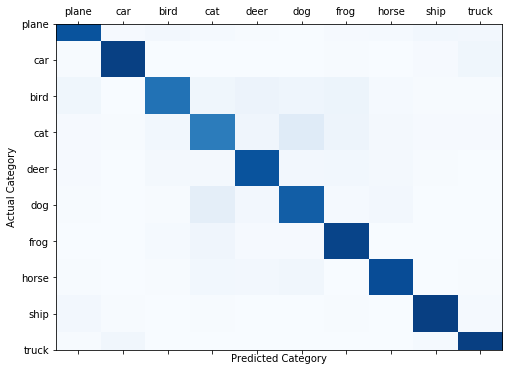

Category   - Accuracy
plane      - 86.6
car        - 93.7
bird       - 74.6
cat        - 70.4
deer       - 86.5
dog        - 82.3
frog       - 92.1
horse      - 88.8
ship       - 94.0
truck      - 93.8

Selected workers

[100  84  39  57  28  49  76  35  64  79  83   9   2  21  19]
Worker 100 : is  Honest
Worker 84 : is  Honest
Worker 39 : is  Honest
Worker 57 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 76 : is  Honest
Worker 35 : is  Honest
Worker 64 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 83 : is  Honest
Worker 9 : is  Honest
Worker 2 : is  Honest
Worker 21 : is  Stealthy_Attacker
Worker 19 : is  Stealthy_Attacker

 | Global Training Round : 89 |


Worker 100 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.125023
Train Epoch: 1 [400/500	(81%)]	Loss: 0.153267
Train Epoch: 2 [0/500	(1%)]	Loss: 0.041326
Train Epoch: 2 [400/500	(81%)]	Loss: 0.153736
Train Epoch: 3 [0/500	(1%)]	Loss: 0.045666
Train Epoch: 3 [400/500	(81%)]	Loss: 0.076331
Train Epoch: 4 [0/500	(1%)]	Loss: 0.041027
Train Epoch: 4 [400/500	(81%)]	Loss: 0.038790
Train Epoch: 5 [0/500	(1%)]	Loss: 0.066324
Train Epoch: 5 [400/500	(81%)]	Loss: 0.084592

Worker 100 ends training in Global Round:89 |

Worker 84 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.278859
Train Epoch: 1 [400/500	(81%)]	Loss: 0.254010
Train Epoch: 2 [0/500	(1%)]	Loss: 0.160315
Train Epoch: 2 [400/500	(81%)]	Loss: 0.247125
Train Epoch: 3 [0/500	(1%)]	Loss: 0.085582
Train Epoch: 3 [400/500	(81%)]	Loss: 0.233917
Train Epoch: 4 [0/500	(1%)]	Loss: 0.115500
Train Epoch: 4 [400/500	(81%)]	Loss: 0.142396
Train Epoch: 5 [0/500	(1%)]	Loss: 0.141293
Train Epoch: 5 [400/500	(81%)]	Loss: 0.384310

Worker 84 ends training in Global Round:89 |

Worker 39 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.077424
Train Epoch: 1 [400/500	(81%)]	Loss: 0.185311
Train Epoch: 2 [0/500	(1%)]	Loss: 0.040433
Train Epoch: 2 [400/500	(81%)]	Loss: 0.087931
Train Epoch: 3 [0/500	(1%)]	Loss: 0.056091
Train Epoch: 3 [400/500	(81%)]	Loss: 0.023173
Train Epoch: 4 [0/500	(1%)]	Loss: 0.037649
Train Epoch: 4 [400/500	(81%)]	Loss: 0.053404
Train Epoch: 5 [0/500	(1%)]	Loss: 0.020584
Train Epoch: 5 [400/500	(81%)]	Loss: 0.025846

Worker 39 ends training in Global Round:89 |

Worker 57 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.405742
Train Epoch: 1 [400/500	(81%)]	Loss: 0.251567
Train Epoch: 2 [0/500	(1%)]	Loss: 0.093327
Train Epoch: 2 [400/500	(81%)]	Loss: 0.175527
Train Epoch: 3 [0/500	(1%)]	Loss: 0.134452
Train Epoch: 3 [400/500	(81%)]	Loss: 0.119795
Train Epoch: 4 [0/500	(1%)]	Loss: 0.069887
Train Epoch: 4 [400/500	(81%)]	Loss: 0.193007
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203466
Train Epoch: 5 [400/500	(81%)]	Loss: 0.121187

Worker 57 ends training in Global Round:89 |

Worker 28 starts training in Global Round:89 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  89


Train Epoch: 1 [0/500	(1%)]	Loss: 1.553881
Train Epoch: 1 [400/500	(81%)]	Loss: 0.706319
Train Epoch: 2 [0/500	(1%)]	Loss: 0.184833
Train Epoch: 2 [400/500	(81%)]	Loss: 0.248427
Train Epoch: 3 [0/500	(1%)]	Loss: 0.305501
Train Epoch: 3 [400/500	(81%)]	Loss: 0.383313
Train Epoch: 4 [0/500	(1%)]	Loss: 0.245429
Train Epoch: 4 [400/500	(81%)]	Loss: 0.306605
Train Epoch: 5 [0/500	(1%)]	Loss: 0.245174
Train Epoch: 5 [400/500	(81%)]	Loss: 0.248037

Performed attacks 1
Worker 28 ends training in Global Round:89 |

Worker 49 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.107572
Train Epoch: 1 [400/500	(81%)]	Loss: 0.148783
Train Epoch: 2 [0/500	(1%)]	Loss: 0.122920
Train Epoch: 2 [400/500	(81%)]	Loss: 0.199366
Train Epoch: 3 [0/500	(1%)]	Loss: 0.105168
Train Epoch: 3 [400/500	(81%)]	Loss: 0.182987
Train Epoch: 4 [0/500	(1%)]	Loss: 0.043775
Train Epoch: 4 [400/500	(81%)]	Loss: 0.228474
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111956
Train Epoch: 5 [400/500	(81%)]	Loss: 0.081849

Worker 49 ends training in Global Round:89 |

Worker 76 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.346348
Train Epoch: 1 [400/500	(81%)]	Loss: 0.179745
Train Epoch: 2 [0/500	(1%)]	Loss: 0.075718
Train Epoch: 2 [400/500	(81%)]	Loss: 0.261361
Train Epoch: 3 [0/500	(1%)]	Loss: 0.092647
Train Epoch: 3 [400/500	(81%)]	Loss: 0.155220
Train Epoch: 4 [0/500	(1%)]	Loss: 0.038542
Train Epoch: 4 [400/500	(81%)]	Loss: 0.112762
Train Epoch: 5 [0/500	(1%)]	Loss: 0.105078
Train Epoch: 5 [400/500	(81%)]	Loss: 0.087599

Worker 76 ends training in Global Round:89 |

Worker 35 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.227522
Train Epoch: 1 [400/500	(81%)]	Loss: 0.242408
Train Epoch: 2 [0/500	(1%)]	Loss: 0.102418
Train Epoch: 2 [400/500	(81%)]	Loss: 0.130118
Train Epoch: 3 [0/500	(1%)]	Loss: 0.167877
Train Epoch: 3 [400/500	(81%)]	Loss: 0.136777
Train Epoch: 4 [0/500	(1%)]	Loss: 0.071050
Train Epoch: 4 [400/500	(81%)]	Loss: 0.283945
Train Epoch: 5 [0/500	(1%)]	Loss: 0.087473
Train Epoch: 5 [400/500	(81%)]	Loss: 0.073943

Worker 35 ends training in Global Round:89 |

Worker 64 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.252658
Train Epoch: 1 [400/500	(81%)]	Loss: 0.078797
Train Epoch: 2 [0/500	(1%)]	Loss: 0.110990
Train Epoch: 2 [400/500	(81%)]	Loss: 0.202670
Train Epoch: 3 [0/500	(1%)]	Loss: 0.096530
Train Epoch: 3 [400/500	(81%)]	Loss: 0.106250
Train Epoch: 4 [0/500	(1%)]	Loss: 0.081464
Train Epoch: 4 [400/500	(81%)]	Loss: 0.097761
Train Epoch: 5 [0/500	(1%)]	Loss: 0.037209
Train Epoch: 5 [400/500	(81%)]	Loss: 0.100858

Worker 64 ends training in Global Round:89 |

Worker 79 starts training in Global Round:89 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  89


Train Epoch: 1 [0/500	(1%)]	Loss: 1.080103
Train Epoch: 1 [400/500	(81%)]	Loss: 0.619963
Train Epoch: 2 [0/500	(1%)]	Loss: 0.312117
Train Epoch: 2 [400/500	(81%)]	Loss: 0.467970
Train Epoch: 3 [0/500	(1%)]	Loss: 0.253045
Train Epoch: 3 [400/500	(81%)]	Loss: 0.277349
Train Epoch: 4 [0/500	(1%)]	Loss: 0.159465
Train Epoch: 4 [400/500	(81%)]	Loss: 0.118749
Train Epoch: 5 [0/500	(1%)]	Loss: 0.129079
Train Epoch: 5 [400/500	(81%)]	Loss: 0.167656

Performed attacks 2
Worker 79 ends training in Global Round:89 |

Worker 83 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.392854
Train Epoch: 1 [400/500	(81%)]	Loss: 0.392075
Train Epoch: 2 [0/500	(1%)]	Loss: 0.354060
Train Epoch: 2 [400/500	(81%)]	Loss: 0.160499
Train Epoch: 3 [0/500	(1%)]	Loss: 0.092102
Train Epoch: 3 [400/500	(81%)]	Loss: 0.261401
Train Epoch: 4 [0/500	(1%)]	Loss: 0.084073
Train Epoch: 4 [400/500	(81%)]	Loss: 0.107390
Train Epoch: 5 [0/500	(1%)]	Loss: 0.062983
Train Epoch: 5 [400/500	(81%)]	Loss: 0.136238

Worker 83 ends training in Global Round:89 |

Worker 9 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.171510
Train Epoch: 1 [400/500	(81%)]	Loss: 0.419169
Train Epoch: 2 [0/500	(1%)]	Loss: 0.101956
Train Epoch: 2 [400/500	(81%)]	Loss: 0.162326
Train Epoch: 3 [0/500	(1%)]	Loss: 0.115690
Train Epoch: 3 [400/500	(81%)]	Loss: 0.098534
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095789
Train Epoch: 4 [400/500	(81%)]	Loss: 0.039803
Train Epoch: 5 [0/500	(1%)]	Loss: 0.047081
Train Epoch: 5 [400/500	(81%)]	Loss: 0.101255

Worker 9 ends training in Global Round:89 |

Worker 2 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.090753
Train Epoch: 1 [400/500	(81%)]	Loss: 0.083575
Train Epoch: 2 [0/500	(1%)]	Loss: 0.066229
Train Epoch: 2 [400/500	(81%)]	Loss: 0.088527
Train Epoch: 3 [0/500	(1%)]	Loss: 0.036421
Train Epoch: 3 [400/500	(81%)]	Loss: 0.033344
Train Epoch: 4 [0/500	(1%)]	Loss: 0.055409
Train Epoch: 4 [400/500	(81%)]	Loss: 0.053424
Train Epoch: 5 [0/500	(1%)]	Loss: 0.018794
Train Epoch: 5 [400/500	(81%)]	Loss: 0.026352

Worker 2 ends training in Global Round:89 |

Worker 21 starts training in Global Round:89 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  89


Train Epoch: 1 [0/500	(1%)]	Loss: 0.970126
Train Epoch: 1 [400/500	(81%)]	Loss: 0.533567
Train Epoch: 2 [0/500	(1%)]	Loss: 0.208995
Train Epoch: 2 [400/500	(81%)]	Loss: 0.394188
Train Epoch: 3 [0/500	(1%)]	Loss: 0.316562
Train Epoch: 3 [400/500	(81%)]	Loss: 0.388857
Train Epoch: 4 [0/500	(1%)]	Loss: 0.229796
Train Epoch: 4 [400/500	(81%)]	Loss: 0.362289
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106180
Train Epoch: 5 [400/500	(81%)]	Loss: 0.174233

Performed attacks 3
Worker 21 ends training in Global Round:89 |

Worker 19 starts training in Global Round:89 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  89


Train Epoch: 1 [0/500	(1%)]	Loss: 1.196953
Train Epoch: 1 [400/500	(81%)]	Loss: 0.555029
Train Epoch: 2 [0/500	(1%)]	Loss: 0.326762
Train Epoch: 2 [400/500	(81%)]	Loss: 0.136709
Train Epoch: 3 [0/500	(1%)]	Loss: 0.173555
Train Epoch: 3 [400/500	(81%)]	Loss: 0.301723
Train Epoch: 4 [0/500	(1%)]	Loss: 0.144503
Train Epoch: 4 [400/500	(81%)]	Loss: 0.224835
Train Epoch: 5 [0/500	(1%)]	Loss: 0.136431
Train Epoch: 5 [400/500	(81%)]	Loss: 0.236970

Performed attacks 4
Worker 19 ends training in Global Round:89 |
Last layer biases  [array([ 0.03534026, -0.03296192, -0.01581572,  0.03894541,  0.04148537,
       -0.01647925,  0.03821164, -0.00876363, -0.02162914, -0.04243145],
      dtype=float32), array([ 0.0337496 , -0.03171005, -0.01514994,  0.03994469,  0.03959771,
       -0.01569525,  0.03975332, -0.00939574, -0.02419562, -0.04099714],
      dtype=float32), array([ 0.03638245, -0.03321507, -0.01578133,  0.03914249,  0.03946742,
       -0.01447196,  0.03819048, -0.00912298, -0.02264656, -0.0

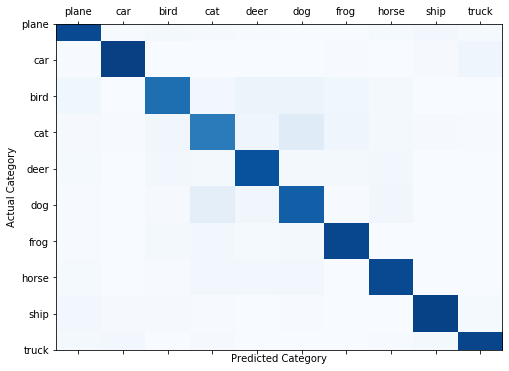

Category   - Accuracy
plane      - 90.0
car        - 93.4
bird       - 76.0
cat        - 70.9
deer       - 87.2
dog        - 81.8
frog       - 91.0
horse      - 89.9
ship       - 92.8
truck      - 91.7

Selected workers

[66 12 55 65 68 77 16 67 42 53 74 90 33 71  5]
Worker 66 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 68 : is  Honest
Worker 77 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 67 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 74 : is  Honest
Worker 90 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 71 : is  Stealthy_Attacker
Worker 5 : is  Honest

 | Global Training Round : 90 |


Worker 66 starts training in Global Round:90 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  90


Train Epoch: 1 [0/500	(1%)]	Loss: 1.932108
Train Epoch: 1 [400/500	(81%)]	Loss: 0.438565
Train Epoch: 2 [0/500	(1%)]	Loss: 0.252322
Train Epoch: 2 [400/500	(81%)]	Loss: 0.223716
Train Epoch: 3 [0/500	(1%)]	Loss: 0.248507
Train Epoch: 3 [400/500	(81%)]	Loss: 0.180172
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200180
Train Epoch: 4 [400/500	(81%)]	Loss: 0.111651
Train Epoch: 5 [0/500	(1%)]	Loss: 0.073664
Train Epoch: 5 [400/500	(81%)]	Loss: 0.204152

Performed attacks 1
Worker 66 ends training in Global Round:90 |

Worker 12 starts training in Global Round:90 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  90


Train Epoch: 1 [0/500	(1%)]	Loss: 1.294044
Train Epoch: 1 [400/500	(81%)]	Loss: 0.600527
Train Epoch: 2 [0/500	(1%)]	Loss: 0.148275
Train Epoch: 2 [400/500	(81%)]	Loss: 0.302342
Train Epoch: 3 [0/500	(1%)]	Loss: 0.185643
Train Epoch: 3 [400/500	(81%)]	Loss: 0.323064
Train Epoch: 4 [0/500	(1%)]	Loss: 0.096953
Train Epoch: 4 [400/500	(81%)]	Loss: 0.199384
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083818
Train Epoch: 5 [400/500	(81%)]	Loss: 0.103996

Performed attacks 2
Worker 12 ends training in Global Round:90 |

Worker 55 starts training in Global Round:90 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  90


Train Epoch: 1 [0/500	(1%)]	Loss: 1.406310
Train Epoch: 1 [400/500	(81%)]	Loss: 0.550714
Train Epoch: 2 [0/500	(1%)]	Loss: 0.378202
Train Epoch: 2 [400/500	(81%)]	Loss: 0.383713
Train Epoch: 3 [0/500	(1%)]	Loss: 0.241057
Train Epoch: 3 [400/500	(81%)]	Loss: 0.405520
Train Epoch: 4 [0/500	(1%)]	Loss: 0.190743
Train Epoch: 4 [400/500	(81%)]	Loss: 0.090893
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192531
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210767

Performed attacks 3
Worker 55 ends training in Global Round:90 |

Worker 65 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.196141
Train Epoch: 1 [400/500	(81%)]	Loss: 0.083326
Train Epoch: 2 [0/500	(1%)]	Loss: 0.082246
Train Epoch: 2 [400/500	(81%)]	Loss: 0.137964
Train Epoch: 3 [0/500	(1%)]	Loss: 0.147792
Train Epoch: 3 [400/500	(81%)]	Loss: 0.115338
Train Epoch: 4 [0/500	(1%)]	Loss: 0.037516
Train Epoch: 4 [400/500	(81%)]	Loss: 0.134984
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089749
Train Epoch: 5 [400/500	(81%)]	Loss: 0.198170

Worker 65 ends training in Global Round:90 |

Worker 68 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.278364
Train Epoch: 1 [400/500	(81%)]	Loss: 0.271257
Train Epoch: 2 [0/500	(1%)]	Loss: 0.043802
Train Epoch: 2 [400/500	(81%)]	Loss: 0.235063
Train Epoch: 3 [0/500	(1%)]	Loss: 0.109975
Train Epoch: 3 [400/500	(81%)]	Loss: 0.093460
Train Epoch: 4 [0/500	(1%)]	Loss: 0.078332
Train Epoch: 4 [400/500	(81%)]	Loss: 0.223186
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148904
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199052

Worker 68 ends training in Global Round:90 |

Worker 77 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.317904
Train Epoch: 1 [400/500	(81%)]	Loss: 0.330484
Train Epoch: 2 [0/500	(1%)]	Loss: 0.304996
Train Epoch: 2 [400/500	(81%)]	Loss: 0.385593
Train Epoch: 3 [0/500	(1%)]	Loss: 0.144033
Train Epoch: 3 [400/500	(81%)]	Loss: 0.255603
Train Epoch: 4 [0/500	(1%)]	Loss: 0.219026
Train Epoch: 4 [400/500	(81%)]	Loss: 0.233214
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112768
Train Epoch: 5 [400/500	(81%)]	Loss: 0.226535

Worker 77 ends training in Global Round:90 |

Worker 16 starts training in Global Round:90 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  90


Train Epoch: 1 [0/500	(1%)]	Loss: 1.042596
Train Epoch: 1 [400/500	(81%)]	Loss: 0.655134
Train Epoch: 2 [0/500	(1%)]	Loss: 0.181886
Train Epoch: 2 [400/500	(81%)]	Loss: 0.500676
Train Epoch: 3 [0/500	(1%)]	Loss: 0.258067
Train Epoch: 3 [400/500	(81%)]	Loss: 0.336632
Train Epoch: 4 [0/500	(1%)]	Loss: 0.338556
Train Epoch: 4 [400/500	(81%)]	Loss: 0.254242
Train Epoch: 5 [0/500	(1%)]	Loss: 0.221004
Train Epoch: 5 [400/500	(81%)]	Loss: 0.192471

Performed attacks 4
Worker 16 ends training in Global Round:90 |

Worker 67 starts training in Global Round:90 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  90


Train Epoch: 1 [0/500	(1%)]	Loss: 1.482063
Train Epoch: 1 [400/500	(81%)]	Loss: 0.595495
Train Epoch: 2 [0/500	(1%)]	Loss: 0.252198
Train Epoch: 2 [400/500	(81%)]	Loss: 0.310657
Train Epoch: 3 [0/500	(1%)]	Loss: 0.253356
Train Epoch: 3 [400/500	(81%)]	Loss: 0.394464
Train Epoch: 4 [0/500	(1%)]	Loss: 0.228762
Train Epoch: 4 [400/500	(81%)]	Loss: 0.296552
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127739
Train Epoch: 5 [400/500	(81%)]	Loss: 0.302394

Performed attacks 5
Worker 67 ends training in Global Round:90 |

Worker 42 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.135170
Train Epoch: 1 [400/500	(81%)]	Loss: 0.239177
Train Epoch: 2 [0/500	(1%)]	Loss: 0.063540
Train Epoch: 2 [400/500	(81%)]	Loss: 0.223181
Train Epoch: 3 [0/500	(1%)]	Loss: 0.114244
Train Epoch: 3 [400/500	(81%)]	Loss: 0.042743
Train Epoch: 4 [0/500	(1%)]	Loss: 0.079647
Train Epoch: 4 [400/500	(81%)]	Loss: 0.077894
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064230
Train Epoch: 5 [400/500	(81%)]	Loss: 0.113963

Worker 42 ends training in Global Round:90 |

Worker 53 starts training in Global Round:90 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  90


Train Epoch: 1 [0/500	(1%)]	Loss: 1.395091
Train Epoch: 1 [400/500	(81%)]	Loss: 0.643081
Train Epoch: 2 [0/500	(1%)]	Loss: 0.163138
Train Epoch: 2 [400/500	(81%)]	Loss: 0.398056
Train Epoch: 3 [0/500	(1%)]	Loss: 0.316127
Train Epoch: 3 [400/500	(81%)]	Loss: 0.420376
Train Epoch: 4 [0/500	(1%)]	Loss: 0.375176
Train Epoch: 4 [400/500	(81%)]	Loss: 0.492468
Train Epoch: 5 [0/500	(1%)]	Loss: 0.295094
Train Epoch: 5 [400/500	(81%)]	Loss: 0.154344

Performed attacks 6
Worker 53 ends training in Global Round:90 |

Worker 74 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.198517
Train Epoch: 1 [400/500	(81%)]	Loss: 0.202994
Train Epoch: 2 [0/500	(1%)]	Loss: 0.155623
Train Epoch: 2 [400/500	(81%)]	Loss: 0.077059
Train Epoch: 3 [0/500	(1%)]	Loss: 0.093992
Train Epoch: 3 [400/500	(81%)]	Loss: 0.167306
Train Epoch: 4 [0/500	(1%)]	Loss: 0.096153
Train Epoch: 4 [400/500	(81%)]	Loss: 0.100733
Train Epoch: 5 [0/500	(1%)]	Loss: 0.062870
Train Epoch: 5 [400/500	(81%)]	Loss: 0.219806

Worker 74 ends training in Global Round:90 |

Worker 90 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.235337
Train Epoch: 1 [400/500	(81%)]	Loss: 0.243419
Train Epoch: 2 [0/500	(1%)]	Loss: 0.113503
Train Epoch: 2 [400/500	(81%)]	Loss: 0.207376
Train Epoch: 3 [0/500	(1%)]	Loss: 0.068597
Train Epoch: 3 [400/500	(81%)]	Loss: 0.164750
Train Epoch: 4 [0/500	(1%)]	Loss: 0.100520
Train Epoch: 4 [400/500	(81%)]	Loss: 0.112576
Train Epoch: 5 [0/500	(1%)]	Loss: 0.050339
Train Epoch: 5 [400/500	(81%)]	Loss: 0.157728

Worker 90 ends training in Global Round:90 |

Worker 33 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.441112
Train Epoch: 1 [400/500	(81%)]	Loss: 0.475133
Train Epoch: 2 [0/500	(1%)]	Loss: 0.338576
Train Epoch: 2 [400/500	(81%)]	Loss: 0.262241
Train Epoch: 3 [0/500	(1%)]	Loss: 0.311742
Train Epoch: 3 [400/500	(81%)]	Loss: 0.263450
Train Epoch: 4 [0/500	(1%)]	Loss: 0.225850
Train Epoch: 4 [400/500	(81%)]	Loss: 0.166573
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145124
Train Epoch: 5 [400/500	(81%)]	Loss: 0.227230

Worker 33 ends training in Global Round:90 |

Worker 71 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.508332
Train Epoch: 1 [400/500	(81%)]	Loss: 0.758981
Train Epoch: 2 [0/500	(1%)]	Loss: 0.212119
Train Epoch: 2 [400/500	(81%)]	Loss: 0.266205
Train Epoch: 3 [0/500	(1%)]	Loss: 0.286642
Train Epoch: 3 [400/500	(81%)]	Loss: 0.213317
Train Epoch: 4 [0/500	(1%)]	Loss: 0.116904
Train Epoch: 4 [400/500	(81%)]	Loss: 0.189393
Train Epoch: 5 [0/500	(1%)]	Loss: 0.129609
Train Epoch: 5 [400/500	(81%)]	Loss: 0.088558

Worker 71 ends training in Global Round:90 |

Worker 5 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.210522
Train Epoch: 1 [400/500	(81%)]	Loss: 0.216925
Train Epoch: 2 [0/500	(1%)]	Loss: 0.059825
Train Epoch: 2 [400/500	(81%)]	Loss: 0.252017
Train Epoch: 3 [0/500	(1%)]	Loss: 0.225195
Train Epoch: 3 [400/500	(81%)]	Loss: 0.124117
Train Epoch: 4 [0/500	(1%)]	Loss: 0.065480
Train Epoch: 4 [400/500	(81%)]	Loss: 0.139910
Train Epoch: 5 [0/500	(1%)]	Loss: 0.032195
Train Epoch: 5 [400/500	(81%)]	Loss: 0.065009

Worker 5 ends training in Global Round:90 |
Last layer biases  [array([ 0.03354498, -0.03131928, -0.01230525,  0.04636919,  0.05185558,
       -0.0145841 ,  0.0398588 , -0.03333883, -0.02323455, -0.04094499],
      dtype=float32), array([ 0.03726384, -0.0344191 , -0.01384373,  0.03908351,  0.05383537,
       -0.01214285,  0.04115442, -0.03595725, -0.02178782, -0.0372848 ],
      dtype=float32), array([ 0.03505335, -0.03099645, -0.0145069 ,  0.04320182,  0.05144975,
       -0.01118836,  0.04090833, -0.03375615, -0.022316  , -0.0419478 ],
      dtype

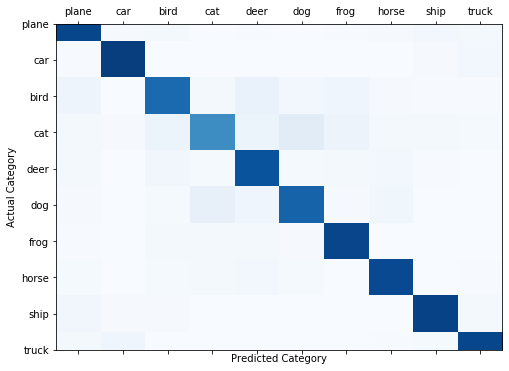

Category   - Accuracy
plane      - 91.2
car        - 94.7
bird       - 77.5
cat        - 64.1
deer       - 86.4
dog        - 80.2
frog       - 91.6
horse      - 90.2
ship       - 92.9
truck      - 91.2

Selected workers

[ 50  58  79  44  72  97  68  87  89  76  30  56  86 100  61]
Worker 50 : is  Stealthy_Attacker
Worker 58 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 44 : is  Stealthy_Attacker
Worker 72 : is  Stealthy_Attacker
Worker 97 : is  Stealthy_Attacker
Worker 68 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 89 : is  Stealthy_Attacker
Worker 76 : is  Honest
Worker 30 : is  Honest
Worker 56 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 61 : is  Honest

 | Global Training Round : 91 |


Worker 50 starts training in Global Round:91 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  91


Train Epoch: 1 [0/500	(1%)]	Loss: 1.482775
Train Epoch: 1 [400/500	(81%)]	Loss: 0.350981
Train Epoch: 2 [0/500	(1%)]	Loss: 0.247255
Train Epoch: 2 [400/500	(81%)]	Loss: 0.263258
Train Epoch: 3 [0/500	(1%)]	Loss: 0.190596
Train Epoch: 3 [400/500	(81%)]	Loss: 0.353076
Train Epoch: 4 [0/500	(1%)]	Loss: 0.155289
Train Epoch: 4 [400/500	(81%)]	Loss: 0.151056
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111834
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135424

Performed attacks 1
Worker 50 ends training in Global Round:91 |

Worker 58 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.292262
Train Epoch: 1 [400/500	(81%)]	Loss: 0.201328
Train Epoch: 2 [0/500	(1%)]	Loss: 0.123683
Train Epoch: 2 [400/500	(81%)]	Loss: 0.106664
Train Epoch: 3 [0/500	(1%)]	Loss: 0.060121
Train Epoch: 3 [400/500	(81%)]	Loss: 0.122662
Train Epoch: 4 [0/500	(1%)]	Loss: 0.078637
Train Epoch: 4 [400/500	(81%)]	Loss: 0.083752
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111800
Train Epoch: 5 [400/500	(81%)]	Loss: 0.095396

Worker 58 ends training in Global Round:91 |

Worker 79 starts training in Global Round:91 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  91


Train Epoch: 1 [0/500	(1%)]	Loss: 1.232568
Train Epoch: 1 [400/500	(81%)]	Loss: 0.343299
Train Epoch: 2 [0/500	(1%)]	Loss: 0.435353
Train Epoch: 2 [400/500	(81%)]	Loss: 0.414753
Train Epoch: 3 [0/500	(1%)]	Loss: 0.254557
Train Epoch: 3 [400/500	(81%)]	Loss: 0.268568
Train Epoch: 4 [0/500	(1%)]	Loss: 0.122395
Train Epoch: 4 [400/500	(81%)]	Loss: 0.248404
Train Epoch: 5 [0/500	(1%)]	Loss: 0.085307
Train Epoch: 5 [400/500	(81%)]	Loss: 0.078244

Performed attacks 2
Worker 79 ends training in Global Round:91 |

Worker 44 starts training in Global Round:91 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  91


Train Epoch: 1 [0/500	(1%)]	Loss: 1.577257
Train Epoch: 1 [400/500	(81%)]	Loss: 0.683102
Train Epoch: 2 [0/500	(1%)]	Loss: 0.338999
Train Epoch: 2 [400/500	(81%)]	Loss: 0.559369
Train Epoch: 3 [0/500	(1%)]	Loss: 0.243294
Train Epoch: 3 [400/500	(81%)]	Loss: 0.295167
Train Epoch: 4 [0/500	(1%)]	Loss: 0.153937
Train Epoch: 4 [400/500	(81%)]	Loss: 0.268066
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126649
Train Epoch: 5 [400/500	(81%)]	Loss: 0.180097

Performed attacks 3
Worker 44 ends training in Global Round:91 |

Worker 72 starts training in Global Round:91 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  91


Train Epoch: 1 [0/500	(1%)]	Loss: 0.997521
Train Epoch: 1 [400/500	(81%)]	Loss: 0.408717
Train Epoch: 2 [0/500	(1%)]	Loss: 0.099958
Train Epoch: 2 [400/500	(81%)]	Loss: 0.406509
Train Epoch: 3 [0/500	(1%)]	Loss: 0.133953
Train Epoch: 3 [400/500	(81%)]	Loss: 0.353485
Train Epoch: 4 [0/500	(1%)]	Loss: 0.183202
Train Epoch: 4 [400/500	(81%)]	Loss: 0.223767
Train Epoch: 5 [0/500	(1%)]	Loss: 0.250186
Train Epoch: 5 [400/500	(81%)]	Loss: 0.364968

Performed attacks 4
Worker 72 ends training in Global Round:91 |

Worker 97 starts training in Global Round:91 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  91


Train Epoch: 1 [0/500	(1%)]	Loss: 1.213850
Train Epoch: 1 [400/500	(81%)]	Loss: 0.461796
Train Epoch: 2 [0/500	(1%)]	Loss: 0.177092
Train Epoch: 2 [400/500	(81%)]	Loss: 0.283134
Train Epoch: 3 [0/500	(1%)]	Loss: 0.177227
Train Epoch: 3 [400/500	(81%)]	Loss: 0.454287
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140684
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182498
Train Epoch: 5 [0/500	(1%)]	Loss: 0.095120
Train Epoch: 5 [400/500	(81%)]	Loss: 0.068072

Performed attacks 5
Worker 97 ends training in Global Round:91 |

Worker 68 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.167703
Train Epoch: 1 [400/500	(81%)]	Loss: 0.166789
Train Epoch: 2 [0/500	(1%)]	Loss: 0.181911
Train Epoch: 2 [400/500	(81%)]	Loss: 0.085374
Train Epoch: 3 [0/500	(1%)]	Loss: 0.109363
Train Epoch: 3 [400/500	(81%)]	Loss: 0.137246
Train Epoch: 4 [0/500	(1%)]	Loss: 0.048804
Train Epoch: 4 [400/500	(81%)]	Loss: 0.111384
Train Epoch: 5 [0/500	(1%)]	Loss: 0.095372
Train Epoch: 5 [400/500	(81%)]	Loss: 0.070294

Worker 68 ends training in Global Round:91 |

Worker 87 starts training in Global Round:91 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  91


Train Epoch: 1 [0/500	(1%)]	Loss: 1.471729
Train Epoch: 1 [400/500	(81%)]	Loss: 0.614107
Train Epoch: 2 [0/500	(1%)]	Loss: 0.225617
Train Epoch: 2 [400/500	(81%)]	Loss: 0.498145
Train Epoch: 3 [0/500	(1%)]	Loss: 0.174437
Train Epoch: 3 [400/500	(81%)]	Loss: 0.316225
Train Epoch: 4 [0/500	(1%)]	Loss: 0.332716
Train Epoch: 4 [400/500	(81%)]	Loss: 0.300391
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107054
Train Epoch: 5 [400/500	(81%)]	Loss: 0.192873

Performed attacks 6
Worker 87 ends training in Global Round:91 |

Worker 89 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.501833
Train Epoch: 1 [400/500	(81%)]	Loss: 0.687740
Train Epoch: 2 [0/500	(1%)]	Loss: 0.398985
Train Epoch: 2 [400/500	(81%)]	Loss: 0.425472
Train Epoch: 3 [0/500	(1%)]	Loss: 0.141105
Train Epoch: 3 [400/500	(81%)]	Loss: 0.321127
Train Epoch: 4 [0/500	(1%)]	Loss: 0.244748
Train Epoch: 4 [400/500	(81%)]	Loss: 0.158375
Train Epoch: 5 [0/500	(1%)]	Loss: 0.156484
Train Epoch: 5 [400/500	(81%)]	Loss: 0.165146

Worker 89 ends training in Global Round:91 |

Worker 76 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.219438
Train Epoch: 1 [400/500	(81%)]	Loss: 0.194545
Train Epoch: 2 [0/500	(1%)]	Loss: 0.103154
Train Epoch: 2 [400/500	(81%)]	Loss: 0.052668
Train Epoch: 3 [0/500	(1%)]	Loss: 0.095853
Train Epoch: 3 [400/500	(81%)]	Loss: 0.141659
Train Epoch: 4 [0/500	(1%)]	Loss: 0.094953
Train Epoch: 4 [400/500	(81%)]	Loss: 0.151306
Train Epoch: 5 [0/500	(1%)]	Loss: 0.052031
Train Epoch: 5 [400/500	(81%)]	Loss: 0.246803

Worker 76 ends training in Global Round:91 |

Worker 30 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.262781
Train Epoch: 1 [400/500	(81%)]	Loss: 0.287817
Train Epoch: 2 [0/500	(1%)]	Loss: 0.104313
Train Epoch: 2 [400/500	(81%)]	Loss: 0.124099
Train Epoch: 3 [0/500	(1%)]	Loss: 0.083016
Train Epoch: 3 [400/500	(81%)]	Loss: 0.173830
Train Epoch: 4 [0/500	(1%)]	Loss: 0.053730
Train Epoch: 4 [400/500	(81%)]	Loss: 0.037892
Train Epoch: 5 [0/500	(1%)]	Loss: 0.135366
Train Epoch: 5 [400/500	(81%)]	Loss: 0.080596

Worker 30 ends training in Global Round:91 |

Worker 56 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.181994
Train Epoch: 1 [400/500	(81%)]	Loss: 0.316894
Train Epoch: 2 [0/500	(1%)]	Loss: 0.071015
Train Epoch: 2 [400/500	(81%)]	Loss: 0.092770
Train Epoch: 3 [0/500	(1%)]	Loss: 0.106357
Train Epoch: 3 [400/500	(81%)]	Loss: 0.096508
Train Epoch: 4 [0/500	(1%)]	Loss: 0.040810
Train Epoch: 4 [400/500	(81%)]	Loss: 0.077771
Train Epoch: 5 [0/500	(1%)]	Loss: 0.025230
Train Epoch: 5 [400/500	(81%)]	Loss: 0.089991

Worker 56 ends training in Global Round:91 |

Worker 86 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.405989
Train Epoch: 1 [400/500	(81%)]	Loss: 0.611914
Train Epoch: 2 [0/500	(1%)]	Loss: 0.236743
Train Epoch: 2 [400/500	(81%)]	Loss: 0.654365
Train Epoch: 3 [0/500	(1%)]	Loss: 0.137519
Train Epoch: 3 [400/500	(81%)]	Loss: 0.177905
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119143
Train Epoch: 4 [400/500	(81%)]	Loss: 0.211472
Train Epoch: 5 [0/500	(1%)]	Loss: 0.080377
Train Epoch: 5 [400/500	(81%)]	Loss: 0.138113

Worker 86 ends training in Global Round:91 |

Worker 100 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.124274
Train Epoch: 1 [400/500	(81%)]	Loss: 0.116430
Train Epoch: 2 [0/500	(1%)]	Loss: 0.036164
Train Epoch: 2 [400/500	(81%)]	Loss: 0.023368
Train Epoch: 3 [0/500	(1%)]	Loss: 0.046062
Train Epoch: 3 [400/500	(81%)]	Loss: 0.032914
Train Epoch: 4 [0/500	(1%)]	Loss: 0.050499
Train Epoch: 4 [400/500	(81%)]	Loss: 0.028273
Train Epoch: 5 [0/500	(1%)]	Loss: 0.041166
Train Epoch: 5 [400/500	(81%)]	Loss: 0.016162

Worker 100 ends training in Global Round:91 |

Worker 61 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.343266
Train Epoch: 1 [400/500	(81%)]	Loss: 0.258938
Train Epoch: 2 [0/500	(1%)]	Loss: 0.078872
Train Epoch: 2 [400/500	(81%)]	Loss: 0.229707
Train Epoch: 3 [0/500	(1%)]	Loss: 0.102898
Train Epoch: 3 [400/500	(81%)]	Loss: 0.255332
Train Epoch: 4 [0/500	(1%)]	Loss: 0.176964
Train Epoch: 4 [400/500	(81%)]	Loss: 0.170188
Train Epoch: 5 [0/500	(1%)]	Loss: 0.134450
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220076

Worker 61 ends training in Global Round:91 |
Last layer biases  [array([ 0.03739686, -0.03147397, -0.0111341 ,  0.03892631,  0.05259333,
       -0.01417472,  0.0425324 , -0.03230339, -0.02471263, -0.04174858],
      dtype=float32), array([ 0.03438474, -0.0308163 , -0.0143303 ,  0.03727941,  0.0403009 ,
       -0.01432156,  0.03899791, -0.00925677, -0.02271512, -0.04362135],
      dtype=float32), array([ 0.03560495, -0.03434491, -0.01246845,  0.04138767,  0.05090637,
       -0.01107113,  0.04102939, -0.03251066, -0.0215324 , -0.04109928],
      dtyp

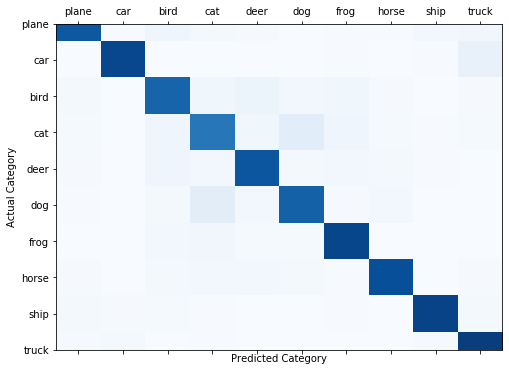

Category   - Accuracy
plane      - 84.7
car        - 90.7
bird       - 79.8
cat        - 72.6
deer       - 85.5
dog        - 80.9
frog       - 91.2
horse      - 88.0
ship       - 92.5
truck      - 94.8

Selected workers

[69 38 44 45 80 23 51 89 84 77 73 95 42 82 50]
Worker 69 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 44 : is  Stealthy_Attacker
Worker 45 : is  Honest
Worker 80 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 51 : is  Stealthy_Attacker
Worker 89 : is  Stealthy_Attacker
Worker 84 : is  Honest
Worker 77 : is  Honest
Worker 73 : is  Honest
Worker 95 : is  Honest
Worker 42 : is  Honest
Worker 82 : is  Honest
Worker 50 : is  Stealthy_Attacker

 | Global Training Round : 92 |


Worker 69 starts training in Global Round:92 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.251137
Train Epoch: 1 [400/500	(81%)]	Loss: 0.156997
Train Epoch: 2 [0/500	(1%)]	Loss: 0.086223
Train Epoch: 2 [400/500	(81%)]	Loss: 0.195723
Train Epoch: 3 [0/500	(1%)]	Loss: 0.035762
Train Epoch: 3 [400/500	(81%)]	Loss: 0.208065
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083215
Train Epoch: 4 [400/500	(81%)]	Loss: 0.200041
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171652
Train Epoch: 5 [400/500	(81%)]	Loss: 0.153401

Worker 69 ends training in Global Round:92 |

Worker 38 starts training in Global Round:92 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  92


Train Epoch: 1 [0/500	(1%)]	Loss: 1.427118
Train Epoch: 1 [400/500	(81%)]	Loss: 0.440159
Train Epoch: 2 [0/500	(1%)]	Loss: 0.341942
Train Epoch: 2 [400/500	(81%)]	Loss: 0.326001
Train Epoch: 3 [0/500	(1%)]	Loss: 0.166129
Train Epoch: 3 [400/500	(81%)]	Loss: 0.244680
Train Epoch: 4 [0/500	(1%)]	Loss: 0.094226
Train Epoch: 4 [400/500	(81%)]	Loss: 0.289322
Train Epoch: 5 [0/500	(1%)]	Loss: 0.097994
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149624

Performed attacks 1
Worker 38 ends training in Global Round:92 |

Worker 44 starts training in Global Round:92 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  92


Train Epoch: 1 [0/500	(1%)]	Loss: 1.066726
Train Epoch: 1 [400/500	(81%)]	Loss: 0.654595
Train Epoch: 2 [0/500	(1%)]	Loss: 0.353277
Train Epoch: 2 [400/500	(81%)]	Loss: 0.403369
Train Epoch: 3 [0/500	(1%)]	Loss: 0.230607
Train Epoch: 3 [400/500	(81%)]	Loss: 0.323964
Train Epoch: 4 [0/500	(1%)]	Loss: 0.190089
Train Epoch: 4 [400/500	(81%)]	Loss: 0.370059
Train Epoch: 5 [0/500	(1%)]	Loss: 0.116210
Train Epoch: 5 [400/500	(81%)]	Loss: 0.224963

Performed attacks 2
Worker 44 ends training in Global Round:92 |

Worker 45 starts training in Global Round:92 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.136656
Train Epoch: 1 [400/500	(81%)]	Loss: 0.173255
Train Epoch: 2 [0/500	(1%)]	Loss: 0.069872
Train Epoch: 2 [400/500	(81%)]	Loss: 0.087262
Train Epoch: 3 [0/500	(1%)]	Loss: 0.110454
Train Epoch: 3 [400/500	(81%)]	Loss: 0.095721
Train Epoch: 4 [0/500	(1%)]	Loss: 0.096102
Train Epoch: 4 [400/500	(81%)]	Loss: 0.061413
Train Epoch: 5 [0/500	(1%)]	Loss: 0.046487
Train Epoch: 5 [400/500	(81%)]	Loss: 0.076184

Worker 45 ends training in Global Round:92 |

Worker 80 starts training in Global Round:92 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.306370
Train Epoch: 1 [400/500	(81%)]	Loss: 0.248028
Train Epoch: 2 [0/500	(1%)]	Loss: 0.115651
Train Epoch: 2 [400/500	(81%)]	Loss: 0.132777
Train Epoch: 3 [0/500	(1%)]	Loss: 0.123154
Train Epoch: 3 [400/500	(81%)]	Loss: 0.143824
Train Epoch: 4 [0/500	(1%)]	Loss: 0.080632
Train Epoch: 4 [400/500	(81%)]	Loss: 0.147177
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064685
Train Epoch: 5 [400/500	(81%)]	Loss: 0.194854

Worker 80 ends training in Global Round:92 |

Worker 23 starts training in Global Round:92 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  92


Train Epoch: 1 [0/500	(1%)]	Loss: 0.907120
Train Epoch: 1 [400/500	(81%)]	Loss: 0.440290
Train Epoch: 2 [0/500	(1%)]	Loss: 0.133526
Train Epoch: 2 [400/500	(81%)]	Loss: 0.336605
Train Epoch: 3 [0/500	(1%)]	Loss: 0.128407
Train Epoch: 3 [400/500	(81%)]	Loss: 0.247320
Train Epoch: 4 [0/500	(1%)]	Loss: 0.113863
Train Epoch: 4 [400/500	(81%)]	Loss: 0.158405
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138292
Train Epoch: 5 [400/500	(81%)]	Loss: 0.165071

Performed attacks 3
Worker 23 ends training in Global Round:92 |

Worker 51 starts training in Global Round:92 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  92


Train Epoch: 1 [0/500	(1%)]	Loss: 0.850774
Train Epoch: 1 [400/500	(81%)]	Loss: 0.490234
Train Epoch: 2 [0/500	(1%)]	Loss: 0.220649
Train Epoch: 2 [400/500	(81%)]	Loss: 0.531966
Train Epoch: 3 [0/500	(1%)]	Loss: 0.337039
Train Epoch: 3 [400/500	(81%)]	Loss: 0.440911
Train Epoch: 4 [0/500	(1%)]	Loss: 0.222497
Train Epoch: 4 [400/500	(81%)]	Loss: 0.276236
Train Epoch: 5 [0/500	(1%)]	Loss: 0.149956
Train Epoch: 5 [400/500	(81%)]	Loss: 0.248857

Performed attacks 4
Worker 51 ends training in Global Round:92 |

Worker 89 starts training in Global Round:92 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  92


Train Epoch: 1 [0/500	(1%)]	Loss: 1.174952
Train Epoch: 1 [400/500	(81%)]	Loss: 0.370613
Train Epoch: 2 [0/500	(1%)]	Loss: 0.328849
Train Epoch: 2 [400/500	(81%)]	Loss: 0.239633
Train Epoch: 3 [0/500	(1%)]	Loss: 0.202514
Train Epoch: 3 [400/500	(81%)]	Loss: 0.334970
Train Epoch: 4 [0/500	(1%)]	Loss: 0.335303
Train Epoch: 4 [400/500	(81%)]	Loss: 0.127800
Train Epoch: 5 [0/500	(1%)]	Loss: 0.178829
Train Epoch: 5 [400/500	(81%)]	Loss: 0.229815

Performed attacks 5
Worker 89 ends training in Global Round:92 |

Worker 84 starts training in Global Round:92 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.247761
Train Epoch: 1 [400/500	(81%)]	Loss: 0.384220
Train Epoch: 2 [0/500	(1%)]	Loss: 0.175208
Train Epoch: 2 [400/500	(81%)]	Loss: 0.216836
Train Epoch: 3 [0/500	(1%)]	Loss: 0.055314
Train Epoch: 3 [400/500	(81%)]	Loss: 0.081321
Train Epoch: 4 [0/500	(1%)]	Loss: 0.090859
Train Epoch: 4 [400/500	(81%)]	Loss: 0.114560
Train Epoch: 5 [0/500	(1%)]	Loss: 0.061519
Train Epoch: 5 [400/500	(81%)]	Loss: 0.167973

Worker 84 ends training in Global Round:92 |

Worker 77 starts training in Global Round:92 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.336779
Train Epoch: 1 [400/500	(81%)]	Loss: 0.244303
Train Epoch: 2 [0/500	(1%)]	Loss: 0.112443
Train Epoch: 2 [400/500	(81%)]	Loss: 0.229168
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142477
Train Epoch: 3 [400/500	(81%)]	Loss: 0.075209
Train Epoch: 4 [0/500	(1%)]	Loss: 0.064119
Train Epoch: 4 [400/500	(81%)]	Loss: 0.164026
Train Epoch: 5 [0/500	(1%)]	Loss: 0.023795
Train Epoch: 5 [400/500	(81%)]	Loss: 0.256665

Worker 77 ends training in Global Round:92 |

Worker 73 starts training in Global Round:92 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.167040
Train Epoch: 1 [400/500	(81%)]	Loss: 0.215340
Train Epoch: 2 [0/500	(1%)]	Loss: 0.077923
Train Epoch: 2 [400/500	(81%)]	Loss: 0.203154
Train Epoch: 3 [0/500	(1%)]	Loss: 0.095763
Train Epoch: 3 [400/500	(81%)]	Loss: 0.044287
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095539
Train Epoch: 4 [400/500	(81%)]	Loss: 0.168249
Train Epoch: 5 [0/500	(1%)]	Loss: 0.063956
Train Epoch: 5 [400/500	(81%)]	Loss: 0.082198

Worker 73 ends training in Global Round:92 |

Worker 95 starts training in Global Round:92 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.177581
Train Epoch: 1 [400/500	(81%)]	Loss: 0.241138
Train Epoch: 2 [0/500	(1%)]	Loss: 0.044130
Train Epoch: 2 [400/500	(81%)]	Loss: 0.115135
Train Epoch: 3 [0/500	(1%)]	Loss: 0.075023
Train Epoch: 3 [400/500	(81%)]	Loss: 0.053282
Train Epoch: 4 [0/500	(1%)]	Loss: 0.047863
Train Epoch: 4 [400/500	(81%)]	Loss: 0.133106
Train Epoch: 5 [0/500	(1%)]	Loss: 0.045884
Train Epoch: 5 [400/500	(81%)]	Loss: 0.136653

Worker 95 ends training in Global Round:92 |

Worker 42 starts training in Global Round:92 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.160990
Train Epoch: 1 [400/500	(81%)]	Loss: 0.207881
Train Epoch: 2 [0/500	(1%)]	Loss: 0.118039
Train Epoch: 2 [400/500	(81%)]	Loss: 0.099928
Train Epoch: 3 [0/500	(1%)]	Loss: 0.027524
Train Epoch: 3 [400/500	(81%)]	Loss: 0.045145
Train Epoch: 4 [0/500	(1%)]	Loss: 0.089072
Train Epoch: 4 [400/500	(81%)]	Loss: 0.053810
Train Epoch: 5 [0/500	(1%)]	Loss: 0.015861
Train Epoch: 5 [400/500	(81%)]	Loss: 0.093932

Worker 42 ends training in Global Round:92 |

Worker 82 starts training in Global Round:92 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.199009
Train Epoch: 1 [400/500	(81%)]	Loss: 0.108458
Train Epoch: 2 [0/500	(1%)]	Loss: 0.067198
Train Epoch: 2 [400/500	(81%)]	Loss: 0.123103
Train Epoch: 3 [0/500	(1%)]	Loss: 0.055864
Train Epoch: 3 [400/500	(81%)]	Loss: 0.093364
Train Epoch: 4 [0/500	(1%)]	Loss: 0.081709
Train Epoch: 4 [400/500	(81%)]	Loss: 0.065058
Train Epoch: 5 [0/500	(1%)]	Loss: 0.074573
Train Epoch: 5 [400/500	(81%)]	Loss: 0.152693

Worker 82 ends training in Global Round:92 |

Worker 50 starts training in Global Round:92 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  92


Train Epoch: 1 [0/500	(1%)]	Loss: 1.235279
Train Epoch: 1 [400/500	(81%)]	Loss: 0.653088
Train Epoch: 2 [0/500	(1%)]	Loss: 0.138197
Train Epoch: 2 [400/500	(81%)]	Loss: 0.536233
Train Epoch: 3 [0/500	(1%)]	Loss: 0.155837
Train Epoch: 3 [400/500	(81%)]	Loss: 0.151051
Train Epoch: 4 [0/500	(1%)]	Loss: 0.169768
Train Epoch: 4 [400/500	(81%)]	Loss: 0.293913
Train Epoch: 5 [0/500	(1%)]	Loss: 0.120258
Train Epoch: 5 [400/500	(81%)]	Loss: 0.154898

Performed attacks 6
Worker 50 ends training in Global Round:92 |
Last layer biases  [array([ 0.03531239, -0.03297995, -0.0152557 ,  0.04052177,  0.03918733,
       -0.01538527,  0.03802211, -0.00974531, -0.02243304, -0.04134275],
      dtype=float32), array([ 0.03464201, -0.03275787, -0.01212603,  0.04153075,  0.05308744,
       -0.01444558,  0.03973519, -0.03073611, -0.02309371, -0.0399345 ],
      dtype=float32), array([ 0.03446151, -0.03431376, -0.01192546,  0.03929228,  0.05228483,
       -0.01396374,  0.04058236, -0.03229226, -0.01900747, -0.0

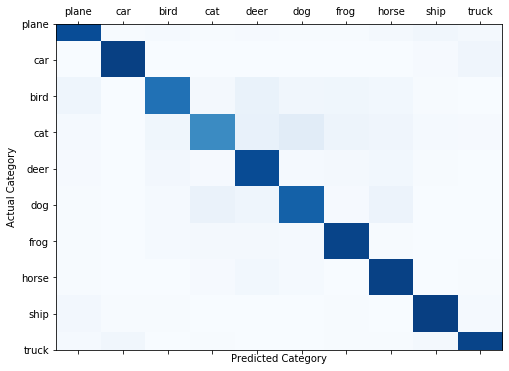

Category   - Accuracy
plane      - 88.7
car        - 93.5
bird       - 74.9
cat        - 65.1
deer       - 89.1
dog        - 80.9
frog       - 92.1
horse      - 93.0
ship       - 93.9
truck      - 91.8

Selected workers

[65 41 32 84 28 81 96  5 33 26 88 94 18 59 72]
Worker 65 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 84 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 96 : is  Honest
Worker 5 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 88 : is  Honest
Worker 94 : is  Stealthy_Attacker
Worker 18 : is  Stealthy_Attacker
Worker 59 : is  Stealthy_Attacker
Worker 72 : is  Stealthy_Attacker

 | Global Training Round : 93 |


Worker 65 starts training in Global Round:93 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.126053
Train Epoch: 1 [400/500	(81%)]	Loss: 0.118585
Train Epoch: 2 [0/500	(1%)]	Loss: 0.057363
Train Epoch: 2 [400/500	(81%)]	Loss: 0.066883
Train Epoch: 3 [0/500	(1%)]	Loss: 0.088807
Train Epoch: 3 [400/500	(81%)]	Loss: 0.071535
Train Epoch: 4 [0/500	(1%)]	Loss: 0.049431
Train Epoch: 4 [400/500	(81%)]	Loss: 0.021740
Train Epoch: 5 [0/500	(1%)]	Loss: 0.057065
Train Epoch: 5 [400/500	(81%)]	Loss: 0.092398

Worker 65 ends training in Global Round:93 |

Worker 41 starts training in Global Round:93 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  93


Train Epoch: 1 [0/500	(1%)]	Loss: 1.482252
Train Epoch: 1 [400/500	(81%)]	Loss: 0.655098
Train Epoch: 2 [0/500	(1%)]	Loss: 0.337859
Train Epoch: 2 [400/500	(81%)]	Loss: 0.655392
Train Epoch: 3 [0/500	(1%)]	Loss: 0.201505
Train Epoch: 3 [400/500	(81%)]	Loss: 0.286510
Train Epoch: 4 [0/500	(1%)]	Loss: 0.202335
Train Epoch: 4 [400/500	(81%)]	Loss: 0.275678
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138525
Train Epoch: 5 [400/500	(81%)]	Loss: 0.247919

Performed attacks 1
Worker 41 ends training in Global Round:93 |

Worker 32 starts training in Global Round:93 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.366807
Train Epoch: 1 [400/500	(81%)]	Loss: 0.260691
Train Epoch: 2 [0/500	(1%)]	Loss: 0.142518
Train Epoch: 2 [400/500	(81%)]	Loss: 0.092553
Train Epoch: 3 [0/500	(1%)]	Loss: 0.091117
Train Epoch: 3 [400/500	(81%)]	Loss: 0.193254
Train Epoch: 4 [0/500	(1%)]	Loss: 0.150180
Train Epoch: 4 [400/500	(81%)]	Loss: 0.202328
Train Epoch: 5 [0/500	(1%)]	Loss: 0.049690
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117965

Worker 32 ends training in Global Round:93 |

Worker 84 starts training in Global Round:93 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.164780
Train Epoch: 1 [400/500	(81%)]	Loss: 0.182629
Train Epoch: 2 [0/500	(1%)]	Loss: 0.058890
Train Epoch: 2 [400/500	(81%)]	Loss: 0.052388
Train Epoch: 3 [0/500	(1%)]	Loss: 0.066968
Train Epoch: 3 [400/500	(81%)]	Loss: 0.056526
Train Epoch: 4 [0/500	(1%)]	Loss: 0.062892
Train Epoch: 4 [400/500	(81%)]	Loss: 0.044679
Train Epoch: 5 [0/500	(1%)]	Loss: 0.057712
Train Epoch: 5 [400/500	(81%)]	Loss: 0.029589

Worker 84 ends training in Global Round:93 |

Worker 28 starts training in Global Round:93 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  93


Train Epoch: 1 [0/500	(1%)]	Loss: 1.687720
Train Epoch: 1 [400/500	(81%)]	Loss: 0.618385
Train Epoch: 2 [0/500	(1%)]	Loss: 0.323780
Train Epoch: 2 [400/500	(81%)]	Loss: 0.484176
Train Epoch: 3 [0/500	(1%)]	Loss: 0.232544
Train Epoch: 3 [400/500	(81%)]	Loss: 0.369573
Train Epoch: 4 [0/500	(1%)]	Loss: 0.138511
Train Epoch: 4 [400/500	(81%)]	Loss: 0.380154
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138460
Train Epoch: 5 [400/500	(81%)]	Loss: 0.147326

Performed attacks 2
Worker 28 ends training in Global Round:93 |

Worker 81 starts training in Global Round:93 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.163570
Train Epoch: 1 [400/500	(81%)]	Loss: 0.313551
Train Epoch: 2 [0/500	(1%)]	Loss: 0.076439
Train Epoch: 2 [400/500	(81%)]	Loss: 0.127756
Train Epoch: 3 [0/500	(1%)]	Loss: 0.077971
Train Epoch: 3 [400/500	(81%)]	Loss: 0.113742
Train Epoch: 4 [0/500	(1%)]	Loss: 0.060609
Train Epoch: 4 [400/500	(81%)]	Loss: 0.069647
Train Epoch: 5 [0/500	(1%)]	Loss: 0.046470
Train Epoch: 5 [400/500	(81%)]	Loss: 0.172900

Worker 81 ends training in Global Round:93 |

Worker 96 starts training in Global Round:93 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.422558
Train Epoch: 1 [400/500	(81%)]	Loss: 0.253688
Train Epoch: 2 [0/500	(1%)]	Loss: 0.138340
Train Epoch: 2 [400/500	(81%)]	Loss: 0.228501
Train Epoch: 3 [0/500	(1%)]	Loss: 0.101265
Train Epoch: 3 [400/500	(81%)]	Loss: 0.112128
Train Epoch: 4 [0/500	(1%)]	Loss: 0.037768
Train Epoch: 4 [400/500	(81%)]	Loss: 0.282510
Train Epoch: 5 [0/500	(1%)]	Loss: 0.036242
Train Epoch: 5 [400/500	(81%)]	Loss: 0.169528

Worker 96 ends training in Global Round:93 |

Worker 5 starts training in Global Round:93 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.186180
Train Epoch: 1 [400/500	(81%)]	Loss: 0.088353
Train Epoch: 2 [0/500	(1%)]	Loss: 0.086324
Train Epoch: 2 [400/500	(81%)]	Loss: 0.043870
Train Epoch: 3 [0/500	(1%)]	Loss: 0.069963
Train Epoch: 3 [400/500	(81%)]	Loss: 0.084124
Train Epoch: 4 [0/500	(1%)]	Loss: 0.100760
Train Epoch: 4 [400/500	(81%)]	Loss: 0.122053
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064766
Train Epoch: 5 [400/500	(81%)]	Loss: 0.038316

Worker 5 ends training in Global Round:93 |

Worker 33 starts training in Global Round:93 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  93


Train Epoch: 1 [0/500	(1%)]	Loss: 1.092343
Train Epoch: 1 [400/500	(81%)]	Loss: 0.881849
Train Epoch: 2 [0/500	(1%)]	Loss: 0.351896
Train Epoch: 2 [400/500	(81%)]	Loss: 0.326999
Train Epoch: 3 [0/500	(1%)]	Loss: 0.153440
Train Epoch: 3 [400/500	(81%)]	Loss: 0.423638
Train Epoch: 4 [0/500	(1%)]	Loss: 0.177561
Train Epoch: 4 [400/500	(81%)]	Loss: 0.193572
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110364
Train Epoch: 5 [400/500	(81%)]	Loss: 0.127967

Performed attacks 3
Worker 33 ends training in Global Round:93 |

Worker 26 starts training in Global Round:93 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.193497
Train Epoch: 1 [400/500	(81%)]	Loss: 0.225475
Train Epoch: 2 [0/500	(1%)]	Loss: 0.137086
Train Epoch: 2 [400/500	(81%)]	Loss: 0.189117
Train Epoch: 3 [0/500	(1%)]	Loss: 0.099884
Train Epoch: 3 [400/500	(81%)]	Loss: 0.257774
Train Epoch: 4 [0/500	(1%)]	Loss: 0.141546
Train Epoch: 4 [400/500	(81%)]	Loss: 0.068154
Train Epoch: 5 [0/500	(1%)]	Loss: 0.120379
Train Epoch: 5 [400/500	(81%)]	Loss: 0.114416

Worker 26 ends training in Global Round:93 |

Worker 88 starts training in Global Round:93 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.381822
Train Epoch: 1 [400/500	(81%)]	Loss: 0.252637
Train Epoch: 2 [0/500	(1%)]	Loss: 0.172506
Train Epoch: 2 [400/500	(81%)]	Loss: 0.210010
Train Epoch: 3 [0/500	(1%)]	Loss: 0.116403
Train Epoch: 3 [400/500	(81%)]	Loss: 0.303907
Train Epoch: 4 [0/500	(1%)]	Loss: 0.128251
Train Epoch: 4 [400/500	(81%)]	Loss: 0.239693
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111509
Train Epoch: 5 [400/500	(81%)]	Loss: 0.179242

Worker 88 ends training in Global Round:93 |

Worker 94 starts training in Global Round:93 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  93


Train Epoch: 1 [0/500	(1%)]	Loss: 1.140271
Train Epoch: 1 [400/500	(81%)]	Loss: 0.612021
Train Epoch: 2 [0/500	(1%)]	Loss: 0.383475
Train Epoch: 2 [400/500	(81%)]	Loss: 0.387153
Train Epoch: 3 [0/500	(1%)]	Loss: 0.266348
Train Epoch: 3 [400/500	(81%)]	Loss: 0.368809
Train Epoch: 4 [0/500	(1%)]	Loss: 0.237929
Train Epoch: 4 [400/500	(81%)]	Loss: 0.205157
Train Epoch: 5 [0/500	(1%)]	Loss: 0.150727
Train Epoch: 5 [400/500	(81%)]	Loss: 0.146854

Performed attacks 4
Worker 94 ends training in Global Round:93 |

Worker 18 starts training in Global Round:93 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  93


Train Epoch: 1 [0/500	(1%)]	Loss: 1.001412
Train Epoch: 1 [400/500	(81%)]	Loss: 0.625927
Train Epoch: 2 [0/500	(1%)]	Loss: 0.328204
Train Epoch: 2 [400/500	(81%)]	Loss: 0.247689
Train Epoch: 3 [0/500	(1%)]	Loss: 0.209500
Train Epoch: 3 [400/500	(81%)]	Loss: 0.388917
Train Epoch: 4 [0/500	(1%)]	Loss: 0.208231
Train Epoch: 4 [400/500	(81%)]	Loss: 0.218262
Train Epoch: 5 [0/500	(1%)]	Loss: 0.183531
Train Epoch: 5 [400/500	(81%)]	Loss: 0.194304

Performed attacks 5
Worker 18 ends training in Global Round:93 |

Worker 59 starts training in Global Round:93 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  93


Train Epoch: 1 [0/500	(1%)]	Loss: 1.483688
Train Epoch: 1 [400/500	(81%)]	Loss: 0.342802
Train Epoch: 2 [0/500	(1%)]	Loss: 0.162649
Train Epoch: 2 [400/500	(81%)]	Loss: 0.488052
Train Epoch: 3 [0/500	(1%)]	Loss: 0.181530
Train Epoch: 3 [400/500	(81%)]	Loss: 0.169731
Train Epoch: 4 [0/500	(1%)]	Loss: 0.202531
Train Epoch: 4 [400/500	(81%)]	Loss: 0.144160
Train Epoch: 5 [0/500	(1%)]	Loss: 0.097361
Train Epoch: 5 [400/500	(81%)]	Loss: 0.192683

Performed attacks 6
Worker 59 ends training in Global Round:93 |

Worker 72 starts training in Global Round:93 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.374458
Train Epoch: 1 [400/500	(81%)]	Loss: 0.403318
Train Epoch: 2 [0/500	(1%)]	Loss: 0.105941
Train Epoch: 2 [400/500	(81%)]	Loss: 0.256055
Train Epoch: 3 [0/500	(1%)]	Loss: 0.091153
Train Epoch: 3 [400/500	(81%)]	Loss: 0.290920
Train Epoch: 4 [0/500	(1%)]	Loss: 0.127842
Train Epoch: 4 [400/500	(81%)]	Loss: 0.178844
Train Epoch: 5 [0/500	(1%)]	Loss: 0.162281
Train Epoch: 5 [400/500	(81%)]	Loss: 0.120591

Worker 72 ends training in Global Round:93 |
Last layer biases  [array([ 0.03438685, -0.03246383, -0.01659011,  0.03909075,  0.04000374,
       -0.01514789,  0.03893691, -0.00791969, -0.02264636, -0.04174886],
      dtype=float32), array([ 0.03685966, -0.03340364, -0.01269718,  0.04291521,  0.04951333,
       -0.01275571,  0.03918672, -0.02935733, -0.02273573, -0.0416238 ],
      dtype=float32), array([ 0.0357882 , -0.03061554, -0.01561533,  0.03914799,  0.03919441,
       -0.01360687,  0.0383283 , -0.00923189, -0.02394082, -0.04354694],
      dtyp

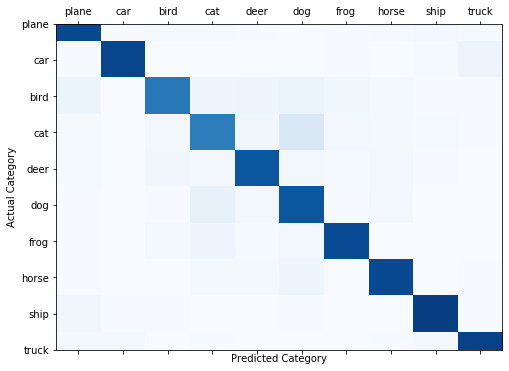

Category   - Accuracy
plane      - 90.4
car        - 91.6
bird       - 72.1
cat        - 70.2
deer       - 85.3
dog        - 85.4
frog       - 89.2
horse      - 90.1
ship       - 94.0
truck      - 92.8

Selected workers

[60 68 66 63 30 55 95 59 58 17 88 21  7 82  9]
Worker 60 : is  Honest
Worker 68 : is  Honest
Worker 66 : is  Stealthy_Attacker
Worker 63 : is  Honest
Worker 30 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 95 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 58 : is  Honest
Worker 17 : is  Honest
Worker 88 : is  Honest
Worker 21 : is  Stealthy_Attacker
Worker 7 : is  Honest
Worker 82 : is  Honest
Worker 9 : is  Honest

 | Global Training Round : 94 |


Worker 60 starts training in Global Round:94 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.259407
Train Epoch: 1 [400/500	(81%)]	Loss: 0.194038
Train Epoch: 2 [0/500	(1%)]	Loss: 0.121190
Train Epoch: 2 [400/500	(81%)]	Loss: 0.114489
Train Epoch: 3 [0/500	(1%)]	Loss: 0.100618
Train Epoch: 3 [400/500	(81%)]	Loss: 0.118978
Train Epoch: 4 [0/500	(1%)]	Loss: 0.074438
Train Epoch: 4 [400/500	(81%)]	Loss: 0.132684
Train Epoch: 5 [0/500	(1%)]	Loss: 0.044258
Train Epoch: 5 [400/500	(81%)]	Loss: 0.085515

Worker 60 ends training in Global Round:94 |

Worker 68 starts training in Global Round:94 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.189220
Train Epoch: 1 [400/500	(81%)]	Loss: 0.106514
Train Epoch: 2 [0/500	(1%)]	Loss: 0.093163
Train Epoch: 2 [400/500	(81%)]	Loss: 0.101790
Train Epoch: 3 [0/500	(1%)]	Loss: 0.072221
Train Epoch: 3 [400/500	(81%)]	Loss: 0.115992
Train Epoch: 4 [0/500	(1%)]	Loss: 0.192110
Train Epoch: 4 [400/500	(81%)]	Loss: 0.162833
Train Epoch: 5 [0/500	(1%)]	Loss: 0.037614
Train Epoch: 5 [400/500	(81%)]	Loss: 0.203285

Worker 68 ends training in Global Round:94 |

Worker 66 starts training in Global Round:94 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  94


Train Epoch: 1 [0/500	(1%)]	Loss: 1.679134
Train Epoch: 1 [400/500	(81%)]	Loss: 0.385106
Train Epoch: 2 [0/500	(1%)]	Loss: 0.166734
Train Epoch: 2 [400/500	(81%)]	Loss: 0.183377
Train Epoch: 3 [0/500	(1%)]	Loss: 0.140519
Train Epoch: 3 [400/500	(81%)]	Loss: 0.201115
Train Epoch: 4 [0/500	(1%)]	Loss: 0.225983
Train Epoch: 4 [400/500	(81%)]	Loss: 0.295832
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089883
Train Epoch: 5 [400/500	(81%)]	Loss: 0.205294

Performed attacks 1
Worker 66 ends training in Global Round:94 |

Worker 63 starts training in Global Round:94 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.241792
Train Epoch: 1 [400/500	(81%)]	Loss: 0.288676
Train Epoch: 2 [0/500	(1%)]	Loss: 0.329144
Train Epoch: 2 [400/500	(81%)]	Loss: 0.141386
Train Epoch: 3 [0/500	(1%)]	Loss: 0.112343
Train Epoch: 3 [400/500	(81%)]	Loss: 0.301713
Train Epoch: 4 [0/500	(1%)]	Loss: 0.153083
Train Epoch: 4 [400/500	(81%)]	Loss: 0.145899
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115423
Train Epoch: 5 [400/500	(81%)]	Loss: 0.150608

Worker 63 ends training in Global Round:94 |

Worker 30 starts training in Global Round:94 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.104235
Train Epoch: 1 [400/500	(81%)]	Loss: 0.186007
Train Epoch: 2 [0/500	(1%)]	Loss: 0.067657
Train Epoch: 2 [400/500	(81%)]	Loss: 0.160362
Train Epoch: 3 [0/500	(1%)]	Loss: 0.122672
Train Epoch: 3 [400/500	(81%)]	Loss: 0.115907
Train Epoch: 4 [0/500	(1%)]	Loss: 0.070146
Train Epoch: 4 [400/500	(81%)]	Loss: 0.091489
Train Epoch: 5 [0/500	(1%)]	Loss: 0.034000
Train Epoch: 5 [400/500	(81%)]	Loss: 0.185514

Worker 30 ends training in Global Round:94 |

Worker 55 starts training in Global Round:94 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  94


Train Epoch: 1 [0/500	(1%)]	Loss: 1.469465
Train Epoch: 1 [400/500	(81%)]	Loss: 0.511131
Train Epoch: 2 [0/500	(1%)]	Loss: 0.366829
Train Epoch: 2 [400/500	(81%)]	Loss: 0.630582
Train Epoch: 3 [0/500	(1%)]	Loss: 0.255303
Train Epoch: 3 [400/500	(81%)]	Loss: 0.431073
Train Epoch: 4 [0/500	(1%)]	Loss: 0.208323
Train Epoch: 4 [400/500	(81%)]	Loss: 0.357098
Train Epoch: 5 [0/500	(1%)]	Loss: 0.168998
Train Epoch: 5 [400/500	(81%)]	Loss: 0.249028

Performed attacks 2
Worker 55 ends training in Global Round:94 |

Worker 95 starts training in Global Round:94 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.086581
Train Epoch: 1 [400/500	(81%)]	Loss: 0.173846
Train Epoch: 2 [0/500	(1%)]	Loss: 0.116850
Train Epoch: 2 [400/500	(81%)]	Loss: 0.146353
Train Epoch: 3 [0/500	(1%)]	Loss: 0.060963
Train Epoch: 3 [400/500	(81%)]	Loss: 0.122905
Train Epoch: 4 [0/500	(1%)]	Loss: 0.127168
Train Epoch: 4 [400/500	(81%)]	Loss: 0.156057
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118735
Train Epoch: 5 [400/500	(81%)]	Loss: 0.154340

Worker 95 ends training in Global Round:94 |

Worker 59 starts training in Global Round:94 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  94


Train Epoch: 1 [0/500	(1%)]	Loss: 0.911267
Train Epoch: 1 [400/500	(81%)]	Loss: 0.429746
Train Epoch: 2 [0/500	(1%)]	Loss: 0.166750
Train Epoch: 2 [400/500	(81%)]	Loss: 0.357584
Train Epoch: 3 [0/500	(1%)]	Loss: 0.193715
Train Epoch: 3 [400/500	(81%)]	Loss: 0.183618
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149873
Train Epoch: 4 [400/500	(81%)]	Loss: 0.164655
Train Epoch: 5 [0/500	(1%)]	Loss: 0.135852
Train Epoch: 5 [400/500	(81%)]	Loss: 0.145146

Performed attacks 3
Worker 59 ends training in Global Round:94 |

Worker 58 starts training in Global Round:94 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.176056
Train Epoch: 1 [400/500	(81%)]	Loss: 0.148480
Train Epoch: 2 [0/500	(1%)]	Loss: 0.088630
Train Epoch: 2 [400/500	(81%)]	Loss: 0.101399
Train Epoch: 3 [0/500	(1%)]	Loss: 0.060673
Train Epoch: 3 [400/500	(81%)]	Loss: 0.055221
Train Epoch: 4 [0/500	(1%)]	Loss: 0.082304
Train Epoch: 4 [400/500	(81%)]	Loss: 0.093591
Train Epoch: 5 [0/500	(1%)]	Loss: 0.040240
Train Epoch: 5 [400/500	(81%)]	Loss: 0.090134

Worker 58 ends training in Global Round:94 |

Worker 17 starts training in Global Round:94 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.112946
Train Epoch: 1 [400/500	(81%)]	Loss: 0.106320
Train Epoch: 2 [0/500	(1%)]	Loss: 0.112501
Train Epoch: 2 [400/500	(81%)]	Loss: 0.153794
Train Epoch: 3 [0/500	(1%)]	Loss: 0.102047
Train Epoch: 3 [400/500	(81%)]	Loss: 0.179843
Train Epoch: 4 [0/500	(1%)]	Loss: 0.064008
Train Epoch: 4 [400/500	(81%)]	Loss: 0.049449
Train Epoch: 5 [0/500	(1%)]	Loss: 0.077340
Train Epoch: 5 [400/500	(81%)]	Loss: 0.066996

Worker 17 ends training in Global Round:94 |

Worker 88 starts training in Global Round:94 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.122209
Train Epoch: 1 [400/500	(81%)]	Loss: 0.239384
Train Epoch: 2 [0/500	(1%)]	Loss: 0.079753
Train Epoch: 2 [400/500	(81%)]	Loss: 0.106836
Train Epoch: 3 [0/500	(1%)]	Loss: 0.108906
Train Epoch: 3 [400/500	(81%)]	Loss: 0.075565
Train Epoch: 4 [0/500	(1%)]	Loss: 0.052761
Train Epoch: 4 [400/500	(81%)]	Loss: 0.133137
Train Epoch: 5 [0/500	(1%)]	Loss: 0.062287
Train Epoch: 5 [400/500	(81%)]	Loss: 0.041766

Worker 88 ends training in Global Round:94 |

Worker 21 starts training in Global Round:94 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  94


Train Epoch: 1 [0/500	(1%)]	Loss: 1.497225
Train Epoch: 1 [400/500	(81%)]	Loss: 0.526686
Train Epoch: 2 [0/500	(1%)]	Loss: 0.187877
Train Epoch: 2 [400/500	(81%)]	Loss: 0.375169
Train Epoch: 3 [0/500	(1%)]	Loss: 0.154432
Train Epoch: 3 [400/500	(81%)]	Loss: 0.290296
Train Epoch: 4 [0/500	(1%)]	Loss: 0.174808
Train Epoch: 4 [400/500	(81%)]	Loss: 0.185286
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115250
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242075

Performed attacks 4
Worker 21 ends training in Global Round:94 |

Worker 7 starts training in Global Round:94 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.213969
Train Epoch: 1 [400/500	(81%)]	Loss: 0.508182
Train Epoch: 2 [0/500	(1%)]	Loss: 0.097151
Train Epoch: 2 [400/500	(81%)]	Loss: 0.232740
Train Epoch: 3 [0/500	(1%)]	Loss: 0.101486
Train Epoch: 3 [400/500	(81%)]	Loss: 0.119344
Train Epoch: 4 [0/500	(1%)]	Loss: 0.219736
Train Epoch: 4 [400/500	(81%)]	Loss: 0.249564
Train Epoch: 5 [0/500	(1%)]	Loss: 0.049871
Train Epoch: 5 [400/500	(81%)]	Loss: 0.198268

Worker 7 ends training in Global Round:94 |

Worker 82 starts training in Global Round:94 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.101707
Train Epoch: 1 [400/500	(81%)]	Loss: 0.137980
Train Epoch: 2 [0/500	(1%)]	Loss: 0.131875
Train Epoch: 2 [400/500	(81%)]	Loss: 0.167505
Train Epoch: 3 [0/500	(1%)]	Loss: 0.054012
Train Epoch: 3 [400/500	(81%)]	Loss: 0.190116
Train Epoch: 4 [0/500	(1%)]	Loss: 0.055862
Train Epoch: 4 [400/500	(81%)]	Loss: 0.041774
Train Epoch: 5 [0/500	(1%)]	Loss: 0.034927
Train Epoch: 5 [400/500	(81%)]	Loss: 0.067167

Worker 82 ends training in Global Round:94 |

Worker 9 starts training in Global Round:94 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.365429
Train Epoch: 1 [400/500	(81%)]	Loss: 0.402887
Train Epoch: 2 [0/500	(1%)]	Loss: 0.106569
Train Epoch: 2 [400/500	(81%)]	Loss: 0.314274
Train Epoch: 3 [0/500	(1%)]	Loss: 0.116586
Train Epoch: 3 [400/500	(81%)]	Loss: 0.101351
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140162
Train Epoch: 4 [400/500	(81%)]	Loss: 0.099071
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133596
Train Epoch: 5 [400/500	(81%)]	Loss: 0.097859

Worker 9 ends training in Global Round:94 |
Last layer biases  [array([ 0.0351989 , -0.03282894, -0.01327875,  0.03865018,  0.03927025,
       -0.01396773,  0.03858169, -0.00927166, -0.02417799, -0.04227445],
      dtype=float32), array([ 0.03430872, -0.03200423, -0.01521869,  0.03980283,  0.04295947,
       -0.01632482,  0.04010222, -0.00947431, -0.02508505, -0.04316464],
      dtype=float32), array([ 0.03294231, -0.03079454, -0.01183237,  0.04388359,  0.05264724,
       -0.0143133 ,  0.0409235 , -0.03302878, -0.02319722, -0.04132889],
      dtype

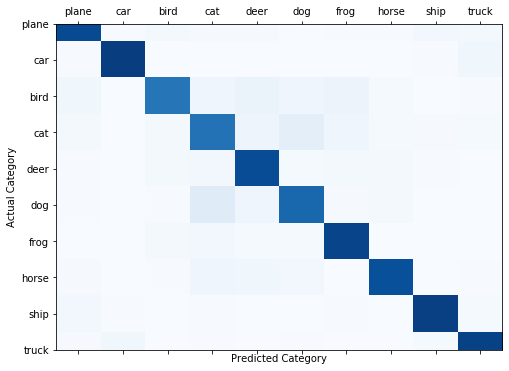

Category   - Accuracy
plane      - 89.8
car        - 94.5
bird       - 72.8
cat        - 74.3
deer       - 88.8
dog        - 78.7
frog       - 92.0
horse      - 87.5
ship       - 93.6
truck      - 92.7

Selected workers

[ 7 56 46 65 20 57 97 14 12 85 53 81 61 26 83]
Worker 7 : is  Honest
Worker 56 : is  Honest
Worker 46 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 20 : is  Honest
Worker 57 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 14 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 85 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 61 : is  Honest
Worker 26 : is  Honest
Worker 83 : is  Honest

 | Global Training Round : 95 |


Worker 7 starts training in Global Round:95 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.217077
Train Epoch: 1 [400/500	(81%)]	Loss: 0.129711
Train Epoch: 2 [0/500	(1%)]	Loss: 0.102490
Train Epoch: 2 [400/500	(81%)]	Loss: 0.101675
Train Epoch: 3 [0/500	(1%)]	Loss: 0.065585
Train Epoch: 3 [400/500	(81%)]	Loss: 0.108976
Train Epoch: 4 [0/500	(1%)]	Loss: 0.069740
Train Epoch: 4 [400/500	(81%)]	Loss: 0.163382
Train Epoch: 5 [0/500	(1%)]	Loss: 0.059281
Train Epoch: 5 [400/500	(81%)]	Loss: 0.218652

Worker 7 ends training in Global Round:95 |

Worker 56 starts training in Global Round:95 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.215973
Train Epoch: 1 [400/500	(81%)]	Loss: 0.189877
Train Epoch: 2 [0/500	(1%)]	Loss: 0.177639
Train Epoch: 2 [400/500	(81%)]	Loss: 0.087561
Train Epoch: 3 [0/500	(1%)]	Loss: 0.050328
Train Epoch: 3 [400/500	(81%)]	Loss: 0.233288
Train Epoch: 4 [0/500	(1%)]	Loss: 0.062433
Train Epoch: 4 [400/500	(81%)]	Loss: 0.120576
Train Epoch: 5 [0/500	(1%)]	Loss: 0.039307
Train Epoch: 5 [400/500	(81%)]	Loss: 0.121045

Worker 56 ends training in Global Round:95 |

Worker 46 starts training in Global Round:95 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  95


Train Epoch: 1 [0/500	(1%)]	Loss: 1.133007
Train Epoch: 1 [400/500	(81%)]	Loss: 0.550559
Train Epoch: 2 [0/500	(1%)]	Loss: 0.404192
Train Epoch: 2 [400/500	(81%)]	Loss: 0.390094
Train Epoch: 3 [0/500	(1%)]	Loss: 0.240627
Train Epoch: 3 [400/500	(81%)]	Loss: 0.256740
Train Epoch: 4 [0/500	(1%)]	Loss: 0.196069
Train Epoch: 4 [400/500	(81%)]	Loss: 0.195179
Train Epoch: 5 [0/500	(1%)]	Loss: 0.194241
Train Epoch: 5 [400/500	(81%)]	Loss: 0.205005

Performed attacks 1
Worker 46 ends training in Global Round:95 |

Worker 65 starts training in Global Round:95 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.050321
Train Epoch: 1 [400/500	(81%)]	Loss: 0.176649
Train Epoch: 2 [0/500	(1%)]	Loss: 0.077077
Train Epoch: 2 [400/500	(81%)]	Loss: 0.041088
Train Epoch: 3 [0/500	(1%)]	Loss: 0.058755
Train Epoch: 3 [400/500	(81%)]	Loss: 0.124124
Train Epoch: 4 [0/500	(1%)]	Loss: 0.067057
Train Epoch: 4 [400/500	(81%)]	Loss: 0.019419
Train Epoch: 5 [0/500	(1%)]	Loss: 0.039202
Train Epoch: 5 [400/500	(81%)]	Loss: 0.144205

Worker 65 ends training in Global Round:95 |

Worker 20 starts training in Global Round:95 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.403978
Train Epoch: 1 [400/500	(81%)]	Loss: 0.234802
Train Epoch: 2 [0/500	(1%)]	Loss: 0.142559
Train Epoch: 2 [400/500	(81%)]	Loss: 0.163945
Train Epoch: 3 [0/500	(1%)]	Loss: 0.144546
Train Epoch: 3 [400/500	(81%)]	Loss: 0.191991
Train Epoch: 4 [0/500	(1%)]	Loss: 0.112344
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169902
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122568
Train Epoch: 5 [400/500	(81%)]	Loss: 0.140449

Worker 20 ends training in Global Round:95 |

Worker 57 starts training in Global Round:95 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.221771
Train Epoch: 1 [400/500	(81%)]	Loss: 0.186320
Train Epoch: 2 [0/500	(1%)]	Loss: 0.093037
Train Epoch: 2 [400/500	(81%)]	Loss: 0.159643
Train Epoch: 3 [0/500	(1%)]	Loss: 0.096428
Train Epoch: 3 [400/500	(81%)]	Loss: 0.067566
Train Epoch: 4 [0/500	(1%)]	Loss: 0.064220
Train Epoch: 4 [400/500	(81%)]	Loss: 0.117648
Train Epoch: 5 [0/500	(1%)]	Loss: 0.096193
Train Epoch: 5 [400/500	(81%)]	Loss: 0.104652

Worker 57 ends training in Global Round:95 |

Worker 97 starts training in Global Round:95 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  95


Train Epoch: 1 [0/500	(1%)]	Loss: 1.441002
Train Epoch: 1 [400/500	(81%)]	Loss: 0.505350
Train Epoch: 2 [0/500	(1%)]	Loss: 0.328177
Train Epoch: 2 [400/500	(81%)]	Loss: 0.335993
Train Epoch: 3 [0/500	(1%)]	Loss: 0.172609
Train Epoch: 3 [400/500	(81%)]	Loss: 0.415685
Train Epoch: 4 [0/500	(1%)]	Loss: 0.291007
Train Epoch: 4 [400/500	(81%)]	Loss: 0.208112
Train Epoch: 5 [0/500	(1%)]	Loss: 0.141881
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253009

Performed attacks 2
Worker 97 ends training in Global Round:95 |

Worker 14 starts training in Global Round:95 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  95


Train Epoch: 1 [0/500	(1%)]	Loss: 1.065907
Train Epoch: 1 [400/500	(81%)]	Loss: 0.345257
Train Epoch: 2 [0/500	(1%)]	Loss: 0.174506
Train Epoch: 2 [400/500	(81%)]	Loss: 0.353910
Train Epoch: 3 [0/500	(1%)]	Loss: 0.167060
Train Epoch: 3 [400/500	(81%)]	Loss: 0.412127
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105940
Train Epoch: 4 [400/500	(81%)]	Loss: 0.189245
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124851
Train Epoch: 5 [400/500	(81%)]	Loss: 0.098180

Performed attacks 3
Worker 14 ends training in Global Round:95 |

Worker 12 starts training in Global Round:95 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  95


Train Epoch: 1 [0/500	(1%)]	Loss: 1.135140
Train Epoch: 1 [400/500	(81%)]	Loss: 0.521428
Train Epoch: 2 [0/500	(1%)]	Loss: 0.216023
Train Epoch: 2 [400/500	(81%)]	Loss: 0.450612
Train Epoch: 3 [0/500	(1%)]	Loss: 0.176029
Train Epoch: 3 [400/500	(81%)]	Loss: 0.263326
Train Epoch: 4 [0/500	(1%)]	Loss: 0.166502
Train Epoch: 4 [400/500	(81%)]	Loss: 0.229411
Train Epoch: 5 [0/500	(1%)]	Loss: 0.197587
Train Epoch: 5 [400/500	(81%)]	Loss: 0.138437

Performed attacks 4
Worker 12 ends training in Global Round:95 |

Worker 85 starts training in Global Round:95 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.316995
Train Epoch: 1 [400/500	(81%)]	Loss: 0.270757
Train Epoch: 2 [0/500	(1%)]	Loss: 0.087480
Train Epoch: 2 [400/500	(81%)]	Loss: 0.323544
Train Epoch: 3 [0/500	(1%)]	Loss: 0.129197
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234487
Train Epoch: 4 [0/500	(1%)]	Loss: 0.206318
Train Epoch: 4 [400/500	(81%)]	Loss: 0.082249
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145187
Train Epoch: 5 [400/500	(81%)]	Loss: 0.310524

Worker 85 ends training in Global Round:95 |

Worker 53 starts training in Global Round:95 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  95


Train Epoch: 1 [0/500	(1%)]	Loss: 1.637614
Train Epoch: 1 [400/500	(81%)]	Loss: 0.514779
Train Epoch: 2 [0/500	(1%)]	Loss: 0.300414
Train Epoch: 2 [400/500	(81%)]	Loss: 0.419179
Train Epoch: 3 [0/500	(1%)]	Loss: 0.246841
Train Epoch: 3 [400/500	(81%)]	Loss: 0.291634
Train Epoch: 4 [0/500	(1%)]	Loss: 0.323094
Train Epoch: 4 [400/500	(81%)]	Loss: 0.365737
Train Epoch: 5 [0/500	(1%)]	Loss: 0.187913
Train Epoch: 5 [400/500	(81%)]	Loss: 0.265544

Performed attacks 5
Worker 53 ends training in Global Round:95 |

Worker 81 starts training in Global Round:95 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.135425
Train Epoch: 1 [400/500	(81%)]	Loss: 0.164764
Train Epoch: 2 [0/500	(1%)]	Loss: 0.069362
Train Epoch: 2 [400/500	(81%)]	Loss: 0.192908
Train Epoch: 3 [0/500	(1%)]	Loss: 0.045527
Train Epoch: 3 [400/500	(81%)]	Loss: 0.181456
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083435
Train Epoch: 4 [400/500	(81%)]	Loss: 0.084313
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082683
Train Epoch: 5 [400/500	(81%)]	Loss: 0.116328

Worker 81 ends training in Global Round:95 |

Worker 61 starts training in Global Round:95 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.207424
Train Epoch: 1 [400/500	(81%)]	Loss: 0.207699
Train Epoch: 2 [0/500	(1%)]	Loss: 0.123299
Train Epoch: 2 [400/500	(81%)]	Loss: 0.224554
Train Epoch: 3 [0/500	(1%)]	Loss: 0.100697
Train Epoch: 3 [400/500	(81%)]	Loss: 0.153647
Train Epoch: 4 [0/500	(1%)]	Loss: 0.193913
Train Epoch: 4 [400/500	(81%)]	Loss: 0.118352
Train Epoch: 5 [0/500	(1%)]	Loss: 0.109991
Train Epoch: 5 [400/500	(81%)]	Loss: 0.040411

Worker 61 ends training in Global Round:95 |

Worker 26 starts training in Global Round:95 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.182408
Train Epoch: 1 [400/500	(81%)]	Loss: 0.164530
Train Epoch: 2 [0/500	(1%)]	Loss: 0.140813
Train Epoch: 2 [400/500	(81%)]	Loss: 0.169016
Train Epoch: 3 [0/500	(1%)]	Loss: 0.028251
Train Epoch: 3 [400/500	(81%)]	Loss: 0.136556
Train Epoch: 4 [0/500	(1%)]	Loss: 0.035624
Train Epoch: 4 [400/500	(81%)]	Loss: 0.115956
Train Epoch: 5 [0/500	(1%)]	Loss: 0.066015
Train Epoch: 5 [400/500	(81%)]	Loss: 0.131719

Worker 26 ends training in Global Round:95 |

Worker 83 starts training in Global Round:95 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.513764
Train Epoch: 1 [400/500	(81%)]	Loss: 0.301590
Train Epoch: 2 [0/500	(1%)]	Loss: 0.126487
Train Epoch: 2 [400/500	(81%)]	Loss: 0.189764
Train Epoch: 3 [0/500	(1%)]	Loss: 0.073907
Train Epoch: 3 [400/500	(81%)]	Loss: 0.310497
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095482
Train Epoch: 4 [400/500	(81%)]	Loss: 0.194017
Train Epoch: 5 [0/500	(1%)]	Loss: 0.087529
Train Epoch: 5 [400/500	(81%)]	Loss: 0.142264

Worker 83 ends training in Global Round:95 |
Last layer biases  [array([ 0.03539401, -0.03303427, -0.01539205,  0.0382658 ,  0.04142406,
       -0.01319756,  0.03763547, -0.00946064, -0.02431668, -0.04141664],
      dtype=float32), array([ 0.0352307 , -0.03287154, -0.01450045,  0.04001766,  0.03924591,
       -0.01539014,  0.03823734, -0.00806996, -0.02364672, -0.04235135],
      dtype=float32), array([ 0.03930271, -0.03143578, -0.01356823,  0.04167936,  0.05170931,
       -0.01383523,  0.04071293, -0.03064442, -0.02439062, -0.04362855],
      dtyp

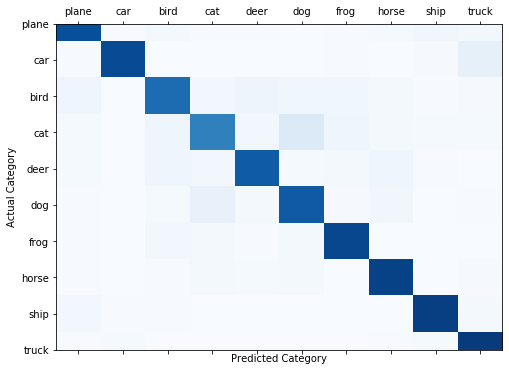

Category   - Accuracy
plane      - 88.1
car        - 89.2
bird       - 76.9
cat        - 69.0
deer       - 83.1
dog        - 83.8
frog       - 90.8
horse      - 92.6
ship       - 93.8
truck      - 95.5

Selected workers

[95 58 86 33 15 91 59 38 43 27  4 85 22 16 11]
Worker 95 : is  Honest
Worker 58 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 15 : is  Honest
Worker 91 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 4 : is  Honest
Worker 85 : is  Honest
Worker 22 : is  Stealthy_Attacker
Worker 16 : is  Stealthy_Attacker
Worker 11 : is  Honest

 | Global Training Round : 96 |


Worker 95 starts training in Global Round:96 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.174228
Train Epoch: 1 [400/500	(81%)]	Loss: 0.174419
Train Epoch: 2 [0/500	(1%)]	Loss: 0.086683
Train Epoch: 2 [400/500	(81%)]	Loss: 0.051526
Train Epoch: 3 [0/500	(1%)]	Loss: 0.053460
Train Epoch: 3 [400/500	(81%)]	Loss: 0.120222
Train Epoch: 4 [0/500	(1%)]	Loss: 0.056234
Train Epoch: 4 [400/500	(81%)]	Loss: 0.092096
Train Epoch: 5 [0/500	(1%)]	Loss: 0.058506
Train Epoch: 5 [400/500	(81%)]	Loss: 0.109543

Worker 95 ends training in Global Round:96 |

Worker 58 starts training in Global Round:96 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.276905
Train Epoch: 1 [400/500	(81%)]	Loss: 0.146562
Train Epoch: 2 [0/500	(1%)]	Loss: 0.074883
Train Epoch: 2 [400/500	(81%)]	Loss: 0.102235
Train Epoch: 3 [0/500	(1%)]	Loss: 0.084121
Train Epoch: 3 [400/500	(81%)]	Loss: 0.139898
Train Epoch: 4 [0/500	(1%)]	Loss: 0.040328
Train Epoch: 4 [400/500	(81%)]	Loss: 0.087285
Train Epoch: 5 [0/500	(1%)]	Loss: 0.069090
Train Epoch: 5 [400/500	(81%)]	Loss: 0.089762

Worker 58 ends training in Global Round:96 |

Worker 86 starts training in Global Round:96 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  96


Train Epoch: 1 [0/500	(1%)]	Loss: 1.173160
Train Epoch: 1 [400/500	(81%)]	Loss: 0.543423
Train Epoch: 2 [0/500	(1%)]	Loss: 0.136534
Train Epoch: 2 [400/500	(81%)]	Loss: 0.233774
Train Epoch: 3 [0/500	(1%)]	Loss: 0.202985
Train Epoch: 3 [400/500	(81%)]	Loss: 0.180025
Train Epoch: 4 [0/500	(1%)]	Loss: 0.086920
Train Epoch: 4 [400/500	(81%)]	Loss: 0.235095
Train Epoch: 5 [0/500	(1%)]	Loss: 0.054195
Train Epoch: 5 [400/500	(81%)]	Loss: 0.360077

Performed attacks 1
Worker 86 ends training in Global Round:96 |

Worker 33 starts training in Global Round:96 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  96


Train Epoch: 1 [0/500	(1%)]	Loss: 1.243138
Train Epoch: 1 [400/500	(81%)]	Loss: 0.505655
Train Epoch: 2 [0/500	(1%)]	Loss: 0.228440
Train Epoch: 2 [400/500	(81%)]	Loss: 0.333130
Train Epoch: 3 [0/500	(1%)]	Loss: 0.103593
Train Epoch: 3 [400/500	(81%)]	Loss: 0.379541
Train Epoch: 4 [0/500	(1%)]	Loss: 0.272330
Train Epoch: 4 [400/500	(81%)]	Loss: 0.209258
Train Epoch: 5 [0/500	(1%)]	Loss: 0.194587
Train Epoch: 5 [400/500	(81%)]	Loss: 0.173300

Performed attacks 2
Worker 33 ends training in Global Round:96 |

Worker 15 starts training in Global Round:96 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.283147
Train Epoch: 1 [400/500	(81%)]	Loss: 0.385208
Train Epoch: 2 [0/500	(1%)]	Loss: 0.173899
Train Epoch: 2 [400/500	(81%)]	Loss: 0.293034
Train Epoch: 3 [0/500	(1%)]	Loss: 0.140297
Train Epoch: 3 [400/500	(81%)]	Loss: 0.202887
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170836
Train Epoch: 4 [400/500	(81%)]	Loss: 0.183677
Train Epoch: 5 [0/500	(1%)]	Loss: 0.241471
Train Epoch: 5 [400/500	(81%)]	Loss: 0.124745

Worker 15 ends training in Global Round:96 |

Worker 91 starts training in Global Round:96 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.237398
Train Epoch: 1 [400/500	(81%)]	Loss: 0.254139
Train Epoch: 2 [0/500	(1%)]	Loss: 0.065399
Train Epoch: 2 [400/500	(81%)]	Loss: 0.154121
Train Epoch: 3 [0/500	(1%)]	Loss: 0.051104
Train Epoch: 3 [400/500	(81%)]	Loss: 0.162977
Train Epoch: 4 [0/500	(1%)]	Loss: 0.067249
Train Epoch: 4 [400/500	(81%)]	Loss: 0.085227
Train Epoch: 5 [0/500	(1%)]	Loss: 0.154850
Train Epoch: 5 [400/500	(81%)]	Loss: 0.056572

Worker 91 ends training in Global Round:96 |

Worker 59 starts training in Global Round:96 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  96


Train Epoch: 1 [0/500	(1%)]	Loss: 1.168060
Train Epoch: 1 [400/500	(81%)]	Loss: 0.414296
Train Epoch: 2 [0/500	(1%)]	Loss: 0.268114
Train Epoch: 2 [400/500	(81%)]	Loss: 0.211874
Train Epoch: 3 [0/500	(1%)]	Loss: 0.162214
Train Epoch: 3 [400/500	(81%)]	Loss: 0.241639
Train Epoch: 4 [0/500	(1%)]	Loss: 0.231327
Train Epoch: 4 [400/500	(81%)]	Loss: 0.226254
Train Epoch: 5 [0/500	(1%)]	Loss: 0.121009
Train Epoch: 5 [400/500	(81%)]	Loss: 0.176399

Performed attacks 3
Worker 59 ends training in Global Round:96 |

Worker 38 starts training in Global Round:96 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  96


Train Epoch: 1 [0/500	(1%)]	Loss: 1.436287
Train Epoch: 1 [400/500	(81%)]	Loss: 0.650380
Train Epoch: 2 [0/500	(1%)]	Loss: 0.358802
Train Epoch: 2 [400/500	(81%)]	Loss: 0.500708
Train Epoch: 3 [0/500	(1%)]	Loss: 0.258957
Train Epoch: 3 [400/500	(81%)]	Loss: 0.271313
Train Epoch: 4 [0/500	(1%)]	Loss: 0.314076
Train Epoch: 4 [400/500	(81%)]	Loss: 0.280553
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107221
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220416

Performed attacks 4
Worker 38 ends training in Global Round:96 |

Worker 43 starts training in Global Round:96 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.185420
Train Epoch: 1 [400/500	(81%)]	Loss: 0.183981
Train Epoch: 2 [0/500	(1%)]	Loss: 0.037712
Train Epoch: 2 [400/500	(81%)]	Loss: 0.145290
Train Epoch: 3 [0/500	(1%)]	Loss: 0.071378
Train Epoch: 3 [400/500	(81%)]	Loss: 0.204628
Train Epoch: 4 [0/500	(1%)]	Loss: 0.064954
Train Epoch: 4 [400/500	(81%)]	Loss: 0.153095
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115922
Train Epoch: 5 [400/500	(81%)]	Loss: 0.050083

Worker 43 ends training in Global Round:96 |

Worker 27 starts training in Global Round:96 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  96


Train Epoch: 1 [0/500	(1%)]	Loss: 1.505158
Train Epoch: 1 [400/500	(81%)]	Loss: 0.358505
Train Epoch: 2 [0/500	(1%)]	Loss: 0.175281
Train Epoch: 2 [400/500	(81%)]	Loss: 0.487820
Train Epoch: 3 [0/500	(1%)]	Loss: 0.228460
Train Epoch: 3 [400/500	(81%)]	Loss: 0.269758
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187920
Train Epoch: 4 [400/500	(81%)]	Loss: 0.229842
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192574
Train Epoch: 5 [400/500	(81%)]	Loss: 0.136482

Performed attacks 5
Worker 27 ends training in Global Round:96 |

Worker 4 starts training in Global Round:96 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.209522
Train Epoch: 1 [400/500	(81%)]	Loss: 0.307443
Train Epoch: 2 [0/500	(1%)]	Loss: 0.079160
Train Epoch: 2 [400/500	(81%)]	Loss: 0.244694
Train Epoch: 3 [0/500	(1%)]	Loss: 0.042500
Train Epoch: 3 [400/500	(81%)]	Loss: 0.122869
Train Epoch: 4 [0/500	(1%)]	Loss: 0.092307
Train Epoch: 4 [400/500	(81%)]	Loss: 0.284933
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127526
Train Epoch: 5 [400/500	(81%)]	Loss: 0.062154

Worker 4 ends training in Global Round:96 |

Worker 85 starts training in Global Round:96 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.165945
Train Epoch: 1 [400/500	(81%)]	Loss: 0.192939
Train Epoch: 2 [0/500	(1%)]	Loss: 0.042686
Train Epoch: 2 [400/500	(81%)]	Loss: 0.128986
Train Epoch: 3 [0/500	(1%)]	Loss: 0.049375
Train Epoch: 3 [400/500	(81%)]	Loss: 0.065383
Train Epoch: 4 [0/500	(1%)]	Loss: 0.063239
Train Epoch: 4 [400/500	(81%)]	Loss: 0.078104
Train Epoch: 5 [0/500	(1%)]	Loss: 0.092801
Train Epoch: 5 [400/500	(81%)]	Loss: 0.183411

Worker 85 ends training in Global Round:96 |

Worker 22 starts training in Global Round:96 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  96


Train Epoch: 1 [0/500	(1%)]	Loss: 1.850877
Train Epoch: 1 [400/500	(81%)]	Loss: 0.713481
Train Epoch: 2 [0/500	(1%)]	Loss: 0.352184
Train Epoch: 2 [400/500	(81%)]	Loss: 0.465016
Train Epoch: 3 [0/500	(1%)]	Loss: 0.334675
Train Epoch: 3 [400/500	(81%)]	Loss: 0.297975
Train Epoch: 4 [0/500	(1%)]	Loss: 0.405943
Train Epoch: 4 [400/500	(81%)]	Loss: 0.199411
Train Epoch: 5 [0/500	(1%)]	Loss: 0.294776
Train Epoch: 5 [400/500	(81%)]	Loss: 0.395394

Performed attacks 6
Worker 22 ends training in Global Round:96 |

Worker 16 starts training in Global Round:96 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.680734
Train Epoch: 1 [400/500	(81%)]	Loss: 0.573917
Train Epoch: 2 [0/500	(1%)]	Loss: 0.222307
Train Epoch: 2 [400/500	(81%)]	Loss: 0.356464
Train Epoch: 3 [0/500	(1%)]	Loss: 0.240961
Train Epoch: 3 [400/500	(81%)]	Loss: 0.335576
Train Epoch: 4 [0/500	(1%)]	Loss: 0.325103
Train Epoch: 4 [400/500	(81%)]	Loss: 0.370641
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132589
Train Epoch: 5 [400/500	(81%)]	Loss: 0.237347

Worker 16 ends training in Global Round:96 |

Worker 11 starts training in Global Round:96 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.297881
Train Epoch: 1 [400/500	(81%)]	Loss: 0.327053
Train Epoch: 2 [0/500	(1%)]	Loss: 0.113572
Train Epoch: 2 [400/500	(81%)]	Loss: 0.204880
Train Epoch: 3 [0/500	(1%)]	Loss: 0.101913
Train Epoch: 3 [400/500	(81%)]	Loss: 0.145300
Train Epoch: 4 [0/500	(1%)]	Loss: 0.097880
Train Epoch: 4 [400/500	(81%)]	Loss: 0.103604
Train Epoch: 5 [0/500	(1%)]	Loss: 0.061631
Train Epoch: 5 [400/500	(81%)]	Loss: 0.110975

Worker 11 ends training in Global Round:96 |
Last layer biases  [array([ 0.03542253, -0.0329078 , -0.01383977,  0.0377574 ,  0.03969152,
       -0.01434334,  0.03837099, -0.00931698, -0.02292228, -0.04201079],
      dtype=float32), array([ 0.03374068, -0.03227457, -0.01182662,  0.03821794,  0.03900597,
       -0.01378659,  0.03837304, -0.01030133, -0.02299232, -0.04225475],
      dtype=float32), array([ 0.03656785, -0.03347275, -0.01324716,  0.03977041,  0.05323122,
       -0.01329742,  0.04238692, -0.0315225 , -0.02234429, -0.04217078],
      dtyp

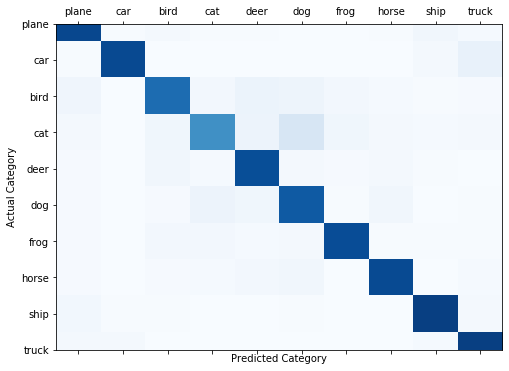

Category   - Accuracy
plane      - 90.7
car        - 90.1
bird       - 76.8
cat        - 63.1
deer       - 88.5
dog        - 83.7
frog       - 89.0
horse      - 89.6
ship       - 93.9
truck      - 93.8

Selected workers

[31 67  3 99 59 95 93 19 43 34  5 41  8 85 62]
Worker 31 : is  Stealthy_Attacker
Worker 67 : is  Stealthy_Attacker
Worker 3 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 95 : is  Honest
Worker 93 : is  Honest
Worker 19 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 5 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 8 : is  Honest
Worker 85 : is  Honest
Worker 62 : is  Honest

 | Global Training Round : 97 |


Worker 31 starts training in Global Round:97 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  97


Train Epoch: 1 [0/500	(1%)]	Loss: 1.107082
Train Epoch: 1 [400/500	(81%)]	Loss: 0.752766
Train Epoch: 2 [0/500	(1%)]	Loss: 0.175801
Train Epoch: 2 [400/500	(81%)]	Loss: 0.339278
Train Epoch: 3 [0/500	(1%)]	Loss: 0.282267
Train Epoch: 3 [400/500	(81%)]	Loss: 0.200089
Train Epoch: 4 [0/500	(1%)]	Loss: 0.150801
Train Epoch: 4 [400/500	(81%)]	Loss: 0.325451
Train Epoch: 5 [0/500	(1%)]	Loss: 0.143561
Train Epoch: 5 [400/500	(81%)]	Loss: 0.203517

Performed attacks 1
Worker 31 ends training in Global Round:97 |

Worker 67 starts training in Global Round:97 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  97


Train Epoch: 1 [0/500	(1%)]	Loss: 1.163344
Train Epoch: 1 [400/500	(81%)]	Loss: 0.640136
Train Epoch: 2 [0/500	(1%)]	Loss: 0.173700
Train Epoch: 2 [400/500	(81%)]	Loss: 0.642353
Train Epoch: 3 [0/500	(1%)]	Loss: 0.315810
Train Epoch: 3 [400/500	(81%)]	Loss: 0.472977
Train Epoch: 4 [0/500	(1%)]	Loss: 0.210020
Train Epoch: 4 [400/500	(81%)]	Loss: 0.245495
Train Epoch: 5 [0/500	(1%)]	Loss: 0.236321
Train Epoch: 5 [400/500	(81%)]	Loss: 0.212289

Performed attacks 2
Worker 67 ends training in Global Round:97 |

Worker 3 starts training in Global Round:97 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  97


Train Epoch: 1 [0/500	(1%)]	Loss: 1.429455
Train Epoch: 1 [400/500	(81%)]	Loss: 0.492696
Train Epoch: 2 [0/500	(1%)]	Loss: 0.589707
Train Epoch: 2 [400/500	(81%)]	Loss: 0.398718
Train Epoch: 3 [0/500	(1%)]	Loss: 0.232194
Train Epoch: 3 [400/500	(81%)]	Loss: 0.304725
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187726
Train Epoch: 4 [400/500	(81%)]	Loss: 0.194205
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148627
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177977

Performed attacks 3
Worker 3 ends training in Global Round:97 |

Worker 99 starts training in Global Round:97 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.055607
Train Epoch: 1 [400/500	(81%)]	Loss: 0.283681
Train Epoch: 2 [0/500	(1%)]	Loss: 0.045416
Train Epoch: 2 [400/500	(81%)]	Loss: 0.092080
Train Epoch: 3 [0/500	(1%)]	Loss: 0.029871
Train Epoch: 3 [400/500	(81%)]	Loss: 0.126874
Train Epoch: 4 [0/500	(1%)]	Loss: 0.048779
Train Epoch: 4 [400/500	(81%)]	Loss: 0.070285
Train Epoch: 5 [0/500	(1%)]	Loss: 0.085181
Train Epoch: 5 [400/500	(81%)]	Loss: 0.077496

Worker 99 ends training in Global Round:97 |

Worker 59 starts training in Global Round:97 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  97


Train Epoch: 1 [0/500	(1%)]	Loss: 1.070503
Train Epoch: 1 [400/500	(81%)]	Loss: 0.763234
Train Epoch: 2 [0/500	(1%)]	Loss: 0.171874
Train Epoch: 2 [400/500	(81%)]	Loss: 0.319599
Train Epoch: 3 [0/500	(1%)]	Loss: 0.227356
Train Epoch: 3 [400/500	(81%)]	Loss: 0.174528
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156549
Train Epoch: 4 [400/500	(81%)]	Loss: 0.181263
Train Epoch: 5 [0/500	(1%)]	Loss: 0.102312
Train Epoch: 5 [400/500	(81%)]	Loss: 0.252449

Performed attacks 4
Worker 59 ends training in Global Round:97 |

Worker 95 starts training in Global Round:97 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.084842
Train Epoch: 1 [400/500	(81%)]	Loss: 0.054035
Train Epoch: 2 [0/500	(1%)]	Loss: 0.030977
Train Epoch: 2 [400/500	(81%)]	Loss: 0.117474
Train Epoch: 3 [0/500	(1%)]	Loss: 0.033343
Train Epoch: 3 [400/500	(81%)]	Loss: 0.038553
Train Epoch: 4 [0/500	(1%)]	Loss: 0.019010
Train Epoch: 4 [400/500	(81%)]	Loss: 0.050488
Train Epoch: 5 [0/500	(1%)]	Loss: 0.042013
Train Epoch: 5 [400/500	(81%)]	Loss: 0.031104

Worker 95 ends training in Global Round:97 |

Worker 93 starts training in Global Round:97 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.235682
Train Epoch: 1 [400/500	(81%)]	Loss: 0.276438
Train Epoch: 2 [0/500	(1%)]	Loss: 0.141912
Train Epoch: 2 [400/500	(81%)]	Loss: 0.175299
Train Epoch: 3 [0/500	(1%)]	Loss: 0.096222
Train Epoch: 3 [400/500	(81%)]	Loss: 0.083545
Train Epoch: 4 [0/500	(1%)]	Loss: 0.133753
Train Epoch: 4 [400/500	(81%)]	Loss: 0.107560
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112809
Train Epoch: 5 [400/500	(81%)]	Loss: 0.101592

Worker 93 ends training in Global Round:97 |

Worker 19 starts training in Global Round:97 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  97


Train Epoch: 1 [0/500	(1%)]	Loss: 1.187606
Train Epoch: 1 [400/500	(81%)]	Loss: 0.470376
Train Epoch: 2 [0/500	(1%)]	Loss: 0.213878
Train Epoch: 2 [400/500	(81%)]	Loss: 0.190614
Train Epoch: 3 [0/500	(1%)]	Loss: 0.150568
Train Epoch: 3 [400/500	(81%)]	Loss: 0.103642
Train Epoch: 4 [0/500	(1%)]	Loss: 0.104151
Train Epoch: 4 [400/500	(81%)]	Loss: 0.244076
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122947
Train Epoch: 5 [400/500	(81%)]	Loss: 0.122119

Performed attacks 5
Worker 19 ends training in Global Round:97 |

Worker 43 starts training in Global Round:97 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.140657
Train Epoch: 1 [400/500	(81%)]	Loss: 0.101524
Train Epoch: 2 [0/500	(1%)]	Loss: 0.028674
Train Epoch: 2 [400/500	(81%)]	Loss: 0.040436
Train Epoch: 3 [0/500	(1%)]	Loss: 0.041592
Train Epoch: 3 [400/500	(81%)]	Loss: 0.022029
Train Epoch: 4 [0/500	(1%)]	Loss: 0.050891
Train Epoch: 4 [400/500	(81%)]	Loss: 0.090796
Train Epoch: 5 [0/500	(1%)]	Loss: 0.033729
Train Epoch: 5 [400/500	(81%)]	Loss: 0.059236

Worker 43 ends training in Global Round:97 |

Worker 34 starts training in Global Round:97 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  97


Train Epoch: 1 [0/500	(1%)]	Loss: 1.553493
Train Epoch: 1 [400/500	(81%)]	Loss: 0.542472
Train Epoch: 2 [0/500	(1%)]	Loss: 0.248318
Train Epoch: 2 [400/500	(81%)]	Loss: 0.258742
Train Epoch: 3 [0/500	(1%)]	Loss: 0.247576
Train Epoch: 3 [400/500	(81%)]	Loss: 0.401586
Train Epoch: 4 [0/500	(1%)]	Loss: 0.253796
Train Epoch: 4 [400/500	(81%)]	Loss: 0.185071
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124339
Train Epoch: 5 [400/500	(81%)]	Loss: 0.344988

Performed attacks 6
Worker 34 ends training in Global Round:97 |

Worker 5 starts training in Global Round:97 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.216805
Train Epoch: 1 [400/500	(81%)]	Loss: 0.090720
Train Epoch: 2 [0/500	(1%)]	Loss: 0.110768
Train Epoch: 2 [400/500	(81%)]	Loss: 0.095744
Train Epoch: 3 [0/500	(1%)]	Loss: 0.097309
Train Epoch: 3 [400/500	(81%)]	Loss: 0.089386
Train Epoch: 4 [0/500	(1%)]	Loss: 0.059621
Train Epoch: 4 [400/500	(81%)]	Loss: 0.082022
Train Epoch: 5 [0/500	(1%)]	Loss: 0.084191
Train Epoch: 5 [400/500	(81%)]	Loss: 0.058943

Worker 5 ends training in Global Round:97 |

Worker 41 starts training in Global Round:97 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.532522
Train Epoch: 1 [400/500	(81%)]	Loss: 0.502999
Train Epoch: 2 [0/500	(1%)]	Loss: 0.266130
Train Epoch: 2 [400/500	(81%)]	Loss: 0.587281
Train Epoch: 3 [0/500	(1%)]	Loss: 0.172219
Train Epoch: 3 [400/500	(81%)]	Loss: 0.347940
Train Epoch: 4 [0/500	(1%)]	Loss: 0.285288
Train Epoch: 4 [400/500	(81%)]	Loss: 0.402398
Train Epoch: 5 [0/500	(1%)]	Loss: 0.216987
Train Epoch: 5 [400/500	(81%)]	Loss: 0.256217

Worker 41 ends training in Global Round:97 |

Worker 8 starts training in Global Round:97 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.387296
Train Epoch: 1 [400/500	(81%)]	Loss: 0.406341
Train Epoch: 2 [0/500	(1%)]	Loss: 0.302909
Train Epoch: 2 [400/500	(81%)]	Loss: 0.214049
Train Epoch: 3 [0/500	(1%)]	Loss: 0.111396
Train Epoch: 3 [400/500	(81%)]	Loss: 0.209356
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095853
Train Epoch: 4 [400/500	(81%)]	Loss: 0.089123
Train Epoch: 5 [0/500	(1%)]	Loss: 0.046711
Train Epoch: 5 [400/500	(81%)]	Loss: 0.152680

Worker 8 ends training in Global Round:97 |

Worker 85 starts training in Global Round:97 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.064519
Train Epoch: 1 [400/500	(81%)]	Loss: 0.197139
Train Epoch: 2 [0/500	(1%)]	Loss: 0.108394
Train Epoch: 2 [400/500	(81%)]	Loss: 0.149379
Train Epoch: 3 [0/500	(1%)]	Loss: 0.073287
Train Epoch: 3 [400/500	(81%)]	Loss: 0.093047
Train Epoch: 4 [0/500	(1%)]	Loss: 0.029455
Train Epoch: 4 [400/500	(81%)]	Loss: 0.083538
Train Epoch: 5 [0/500	(1%)]	Loss: 0.054725
Train Epoch: 5 [400/500	(81%)]	Loss: 0.084119

Worker 85 ends training in Global Round:97 |

Worker 62 starts training in Global Round:97 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.469746
Train Epoch: 1 [400/500	(81%)]	Loss: 0.514959
Train Epoch: 2 [0/500	(1%)]	Loss: 0.132729
Train Epoch: 2 [400/500	(81%)]	Loss: 0.177344
Train Epoch: 3 [0/500	(1%)]	Loss: 0.171607
Train Epoch: 3 [400/500	(81%)]	Loss: 0.270667
Train Epoch: 4 [0/500	(1%)]	Loss: 0.154790
Train Epoch: 4 [400/500	(81%)]	Loss: 0.273188
Train Epoch: 5 [0/500	(1%)]	Loss: 0.135448
Train Epoch: 5 [400/500	(81%)]	Loss: 0.320737

Worker 62 ends training in Global Round:97 |
Last layer biases  [array([ 0.03717088, -0.03185657, -0.01244328,  0.04171862,  0.05264851,
       -0.01229084,  0.03713108, -0.03199339, -0.02400558, -0.04017797],
      dtype=float32), array([ 0.03830566, -0.03303435, -0.01050108,  0.03993778,  0.05360917,
       -0.01151108,  0.03772571, -0.03127806, -0.02251326, -0.04483905],
      dtype=float32), array([ 0.03878507, -0.03031147, -0.01205225,  0.03927122,  0.05144519,
       -0.0117821 ,  0.03858527, -0.03430608, -0.02224417, -0.04148919],
      dtyp

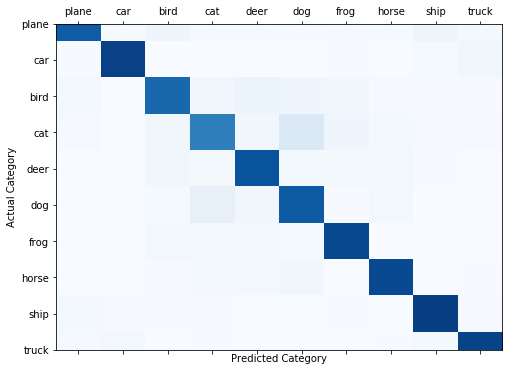

Category   - Accuracy
plane      - 83.0
car        - 93.1
bird       - 78.9
cat        - 69.6
deer       - 86.6
dog        - 83.4
frog       - 90.6
horse      - 90.0
ship       - 94.0
truck      - 92.4

Selected workers

[78  1 67 86 72 10 30 61 99 17 88  3 84 91 87]
Worker 78 : is  Honest
Worker 1 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 86 : is  Stealthy_Attacker
Worker 72 : is  Stealthy_Attacker
Worker 10 : is  Honest
Worker 30 : is  Honest
Worker 61 : is  Honest
Worker 99 : is  Honest
Worker 17 : is  Honest
Worker 88 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 84 : is  Honest
Worker 91 : is  Honest
Worker 87 : is  Stealthy_Attacker

 | Global Training Round : 98 |


Worker 78 starts training in Global Round:98 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.251434
Train Epoch: 1 [400/500	(81%)]	Loss: 0.346831
Train Epoch: 2 [0/500	(1%)]	Loss: 0.165908
Train Epoch: 2 [400/500	(81%)]	Loss: 0.121163
Train Epoch: 3 [0/500	(1%)]	Loss: 0.074000
Train Epoch: 3 [400/500	(81%)]	Loss: 0.178616
Train Epoch: 4 [0/500	(1%)]	Loss: 0.075924
Train Epoch: 4 [400/500	(81%)]	Loss: 0.130056
Train Epoch: 5 [0/500	(1%)]	Loss: 0.050139
Train Epoch: 5 [400/500	(81%)]	Loss: 0.108612

Worker 78 ends training in Global Round:98 |

Worker 1 starts training in Global Round:98 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.259061
Train Epoch: 1 [400/500	(81%)]	Loss: 0.277050
Train Epoch: 2 [0/500	(1%)]	Loss: 0.076426
Train Epoch: 2 [400/500	(81%)]	Loss: 0.139596
Train Epoch: 3 [0/500	(1%)]	Loss: 0.117734
Train Epoch: 3 [400/500	(81%)]	Loss: 0.133630
Train Epoch: 4 [0/500	(1%)]	Loss: 0.168291
Train Epoch: 4 [400/500	(81%)]	Loss: 0.134504
Train Epoch: 5 [0/500	(1%)]	Loss: 0.047947
Train Epoch: 5 [400/500	(81%)]	Loss: 0.115366

Worker 1 ends training in Global Round:98 |

Worker 67 starts training in Global Round:98 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  98


Train Epoch: 1 [0/500	(1%)]	Loss: 1.482245
Train Epoch: 1 [400/500	(81%)]	Loss: 0.540092
Train Epoch: 2 [0/500	(1%)]	Loss: 0.233130
Train Epoch: 2 [400/500	(81%)]	Loss: 0.291936
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261085
Train Epoch: 3 [400/500	(81%)]	Loss: 0.503345
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152367
Train Epoch: 4 [400/500	(81%)]	Loss: 0.242599
Train Epoch: 5 [0/500	(1%)]	Loss: 0.230482
Train Epoch: 5 [400/500	(81%)]	Loss: 0.160931

Performed attacks 1
Worker 67 ends training in Global Round:98 |

Worker 86 starts training in Global Round:98 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  98


Train Epoch: 1 [0/500	(1%)]	Loss: 1.629527
Train Epoch: 1 [400/500	(81%)]	Loss: 0.219306
Train Epoch: 2 [0/500	(1%)]	Loss: 0.160315
Train Epoch: 2 [400/500	(81%)]	Loss: 0.303871
Train Epoch: 3 [0/500	(1%)]	Loss: 0.148971
Train Epoch: 3 [400/500	(81%)]	Loss: 0.316829
Train Epoch: 4 [0/500	(1%)]	Loss: 0.260891
Train Epoch: 4 [400/500	(81%)]	Loss: 0.297785
Train Epoch: 5 [0/500	(1%)]	Loss: 0.092495
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220100

Performed attacks 2
Worker 86 ends training in Global Round:98 |

Worker 72 starts training in Global Round:98 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  98


Train Epoch: 1 [0/500	(1%)]	Loss: 1.582787
Train Epoch: 1 [400/500	(81%)]	Loss: 0.224120
Train Epoch: 2 [0/500	(1%)]	Loss: 0.189662
Train Epoch: 2 [400/500	(81%)]	Loss: 0.255469
Train Epoch: 3 [0/500	(1%)]	Loss: 0.094064
Train Epoch: 3 [400/500	(81%)]	Loss: 0.410554
Train Epoch: 4 [0/500	(1%)]	Loss: 0.101564
Train Epoch: 4 [400/500	(81%)]	Loss: 0.209303
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110926
Train Epoch: 5 [400/500	(81%)]	Loss: 0.091179

Performed attacks 3
Worker 72 ends training in Global Round:98 |

Worker 10 starts training in Global Round:98 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.241990
Train Epoch: 1 [400/500	(81%)]	Loss: 0.188944
Train Epoch: 2 [0/500	(1%)]	Loss: 0.108563
Train Epoch: 2 [400/500	(81%)]	Loss: 0.197163
Train Epoch: 3 [0/500	(1%)]	Loss: 0.117508
Train Epoch: 3 [400/500	(81%)]	Loss: 0.096951
Train Epoch: 4 [0/500	(1%)]	Loss: 0.198351
Train Epoch: 4 [400/500	(81%)]	Loss: 0.044814
Train Epoch: 5 [0/500	(1%)]	Loss: 0.068604
Train Epoch: 5 [400/500	(81%)]	Loss: 0.105481

Worker 10 ends training in Global Round:98 |

Worker 30 starts training in Global Round:98 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.247402
Train Epoch: 1 [400/500	(81%)]	Loss: 0.194149
Train Epoch: 2 [0/500	(1%)]	Loss: 0.109245
Train Epoch: 2 [400/500	(81%)]	Loss: 0.114659
Train Epoch: 3 [0/500	(1%)]	Loss: 0.072611
Train Epoch: 3 [400/500	(81%)]	Loss: 0.065674
Train Epoch: 4 [0/500	(1%)]	Loss: 0.073530
Train Epoch: 4 [400/500	(81%)]	Loss: 0.102171
Train Epoch: 5 [0/500	(1%)]	Loss: 0.068721
Train Epoch: 5 [400/500	(81%)]	Loss: 0.093543

Worker 30 ends training in Global Round:98 |

Worker 61 starts training in Global Round:98 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.050842
Train Epoch: 1 [400/500	(81%)]	Loss: 0.161862
Train Epoch: 2 [0/500	(1%)]	Loss: 0.037477
Train Epoch: 2 [400/500	(81%)]	Loss: 0.101317
Train Epoch: 3 [0/500	(1%)]	Loss: 0.080212
Train Epoch: 3 [400/500	(81%)]	Loss: 0.112667
Train Epoch: 4 [0/500	(1%)]	Loss: 0.066466
Train Epoch: 4 [400/500	(81%)]	Loss: 0.132307
Train Epoch: 5 [0/500	(1%)]	Loss: 0.065062
Train Epoch: 5 [400/500	(81%)]	Loss: 0.061020

Worker 61 ends training in Global Round:98 |

Worker 99 starts training in Global Round:98 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.110986
Train Epoch: 1 [400/500	(81%)]	Loss: 0.031048
Train Epoch: 2 [0/500	(1%)]	Loss: 0.026255
Train Epoch: 2 [400/500	(81%)]	Loss: 0.094457
Train Epoch: 3 [0/500	(1%)]	Loss: 0.079057
Train Epoch: 3 [400/500	(81%)]	Loss: 0.091655
Train Epoch: 4 [0/500	(1%)]	Loss: 0.089752
Train Epoch: 4 [400/500	(81%)]	Loss: 0.079651
Train Epoch: 5 [0/500	(1%)]	Loss: 0.012471
Train Epoch: 5 [400/500	(81%)]	Loss: 0.066034

Worker 99 ends training in Global Round:98 |

Worker 17 starts training in Global Round:98 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.128863
Train Epoch: 1 [400/500	(81%)]	Loss: 0.208753
Train Epoch: 2 [0/500	(1%)]	Loss: 0.065635
Train Epoch: 2 [400/500	(81%)]	Loss: 0.199602
Train Epoch: 3 [0/500	(1%)]	Loss: 0.046084
Train Epoch: 3 [400/500	(81%)]	Loss: 0.147741
Train Epoch: 4 [0/500	(1%)]	Loss: 0.033805
Train Epoch: 4 [400/500	(81%)]	Loss: 0.160499
Train Epoch: 5 [0/500	(1%)]	Loss: 0.134229
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177669

Worker 17 ends training in Global Round:98 |

Worker 88 starts training in Global Round:98 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.179567
Train Epoch: 1 [400/500	(81%)]	Loss: 0.139350
Train Epoch: 2 [0/500	(1%)]	Loss: 0.066526
Train Epoch: 2 [400/500	(81%)]	Loss: 0.184820
Train Epoch: 3 [0/500	(1%)]	Loss: 0.066973
Train Epoch: 3 [400/500	(81%)]	Loss: 0.090248
Train Epoch: 4 [0/500	(1%)]	Loss: 0.071896
Train Epoch: 4 [400/500	(81%)]	Loss: 0.150695
Train Epoch: 5 [0/500	(1%)]	Loss: 0.063878
Train Epoch: 5 [400/500	(81%)]	Loss: 0.151148

Worker 88 ends training in Global Round:98 |

Worker 3 starts training in Global Round:98 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  98


Train Epoch: 1 [0/500	(1%)]	Loss: 1.444096
Train Epoch: 1 [400/500	(81%)]	Loss: 0.579303
Train Epoch: 2 [0/500	(1%)]	Loss: 0.267689
Train Epoch: 2 [400/500	(81%)]	Loss: 0.201662
Train Epoch: 3 [0/500	(1%)]	Loss: 0.354643
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234069
Train Epoch: 4 [0/500	(1%)]	Loss: 0.293562
Train Epoch: 4 [400/500	(81%)]	Loss: 0.268818
Train Epoch: 5 [0/500	(1%)]	Loss: 0.161899
Train Epoch: 5 [400/500	(81%)]	Loss: 0.111802

Performed attacks 4
Worker 3 ends training in Global Round:98 |

Worker 84 starts training in Global Round:98 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.311825
Train Epoch: 1 [400/500	(81%)]	Loss: 0.214446
Train Epoch: 2 [0/500	(1%)]	Loss: 0.066564
Train Epoch: 2 [400/500	(81%)]	Loss: 0.123363
Train Epoch: 3 [0/500	(1%)]	Loss: 0.050653
Train Epoch: 3 [400/500	(81%)]	Loss: 0.111611
Train Epoch: 4 [0/500	(1%)]	Loss: 0.050036
Train Epoch: 4 [400/500	(81%)]	Loss: 0.155335
Train Epoch: 5 [0/500	(1%)]	Loss: 0.034770
Train Epoch: 5 [400/500	(81%)]	Loss: 0.187080

Worker 84 ends training in Global Round:98 |

Worker 91 starts training in Global Round:98 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.212007
Train Epoch: 1 [400/500	(81%)]	Loss: 0.208738
Train Epoch: 2 [0/500	(1%)]	Loss: 0.090662
Train Epoch: 2 [400/500	(81%)]	Loss: 0.112275
Train Epoch: 3 [0/500	(1%)]	Loss: 0.094747
Train Epoch: 3 [400/500	(81%)]	Loss: 0.057299
Train Epoch: 4 [0/500	(1%)]	Loss: 0.063132
Train Epoch: 4 [400/500	(81%)]	Loss: 0.048135
Train Epoch: 5 [0/500	(1%)]	Loss: 0.078399
Train Epoch: 5 [400/500	(81%)]	Loss: 0.093911

Worker 91 ends training in Global Round:98 |

Worker 87 starts training in Global Round:98 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  98


Train Epoch: 1 [0/500	(1%)]	Loss: 1.002994
Train Epoch: 1 [400/500	(81%)]	Loss: 0.615371
Train Epoch: 2 [0/500	(1%)]	Loss: 0.196040
Train Epoch: 2 [400/500	(81%)]	Loss: 0.279519
Train Epoch: 3 [0/500	(1%)]	Loss: 0.372274
Train Epoch: 3 [400/500	(81%)]	Loss: 0.278264
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143650
Train Epoch: 4 [400/500	(81%)]	Loss: 0.290339
Train Epoch: 5 [0/500	(1%)]	Loss: 0.143154
Train Epoch: 5 [400/500	(81%)]	Loss: 0.114989

Performed attacks 5
Worker 87 ends training in Global Round:98 |
Last layer biases  [array([ 0.03646854, -0.03255008, -0.01421266,  0.04011365,  0.03986127,
       -0.01422062,  0.03731523, -0.01018617, -0.02428993, -0.0423978 ],
      dtype=float32), array([ 0.03722576, -0.03412953, -0.01542222,  0.04076014,  0.04013461,
       -0.01596281,  0.03642293, -0.01089359, -0.02465371, -0.03758014],
      dtype=float32), array([ 0.03683768, -0.03170294, -0.00981686,  0.03944125,  0.05382013,
       -0.01233115,  0.03998855, -0.03146246, -0.02405429, -0.0

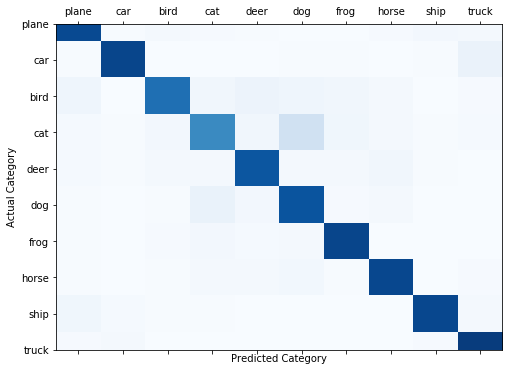

Category   - Accuracy
plane      - 90.1
car        - 91.5
bird       - 75.4
cat        - 65.5
deer       - 85.3
dog        - 86.1
frog       - 91.7
horse      - 90.7
ship       - 90.8
truck      - 95.0

Selected workers

[83 89 13  4 27 35 11 64 45 14 23 74  2 38 22]
Worker 83 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 13 : is  Stealthy_Attacker
Worker 4 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 35 : is  Honest
Worker 11 : is  Honest
Worker 64 : is  Honest
Worker 45 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 23 : is  Stealthy_Attacker
Worker 74 : is  Honest
Worker 2 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 22 : is  Stealthy_Attacker

 | Global Training Round : 99 |


Worker 83 starts training in Global Round:99 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.128198
Train Epoch: 1 [400/500	(81%)]	Loss: 0.245375
Train Epoch: 2 [0/500	(1%)]	Loss: 0.152359
Train Epoch: 2 [400/500	(81%)]	Loss: 0.099906
Train Epoch: 3 [0/500	(1%)]	Loss: 0.065393
Train Epoch: 3 [400/500	(81%)]	Loss: 0.280537
Train Epoch: 4 [0/500	(1%)]	Loss: 0.073904
Train Epoch: 4 [400/500	(81%)]	Loss: 0.258245
Train Epoch: 5 [0/500	(1%)]	Loss: 0.091747
Train Epoch: 5 [400/500	(81%)]	Loss: 0.108442

Worker 83 ends training in Global Round:99 |

Worker 89 starts training in Global Round:99 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  99


Train Epoch: 1 [0/500	(1%)]	Loss: 1.701752
Train Epoch: 1 [400/500	(81%)]	Loss: 0.461080
Train Epoch: 2 [0/500	(1%)]	Loss: 0.234338
Train Epoch: 2 [400/500	(81%)]	Loss: 0.378976
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151246
Train Epoch: 3 [400/500	(81%)]	Loss: 0.384118
Train Epoch: 4 [0/500	(1%)]	Loss: 0.123035
Train Epoch: 4 [400/500	(81%)]	Loss: 0.181672
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125215
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220821

Performed attacks 1
Worker 89 ends training in Global Round:99 |

Worker 13 starts training in Global Round:99 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  99


Train Epoch: 1 [0/500	(1%)]	Loss: 1.389324
Train Epoch: 1 [400/500	(81%)]	Loss: 0.543110
Train Epoch: 2 [0/500	(1%)]	Loss: 0.264334
Train Epoch: 2 [400/500	(81%)]	Loss: 0.387140
Train Epoch: 3 [0/500	(1%)]	Loss: 0.219606
Train Epoch: 3 [400/500	(81%)]	Loss: 0.404134
Train Epoch: 4 [0/500	(1%)]	Loss: 0.188367
Train Epoch: 4 [400/500	(81%)]	Loss: 0.607765
Train Epoch: 5 [0/500	(1%)]	Loss: 0.405669
Train Epoch: 5 [400/500	(81%)]	Loss: 0.192112

Performed attacks 2
Worker 13 ends training in Global Round:99 |

Worker 4 starts training in Global Round:99 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.417711
Train Epoch: 1 [400/500	(81%)]	Loss: 0.237941
Train Epoch: 2 [0/500	(1%)]	Loss: 0.094805
Train Epoch: 2 [400/500	(81%)]	Loss: 0.192176
Train Epoch: 3 [0/500	(1%)]	Loss: 0.168948
Train Epoch: 3 [400/500	(81%)]	Loss: 0.120377
Train Epoch: 4 [0/500	(1%)]	Loss: 0.050207
Train Epoch: 4 [400/500	(81%)]	Loss: 0.119580
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123378
Train Epoch: 5 [400/500	(81%)]	Loss: 0.054903

Worker 4 ends training in Global Round:99 |

Worker 27 starts training in Global Round:99 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  99


Train Epoch: 1 [0/500	(1%)]	Loss: 1.372596
Train Epoch: 1 [400/500	(81%)]	Loss: 0.370996
Train Epoch: 2 [0/500	(1%)]	Loss: 0.245087
Train Epoch: 2 [400/500	(81%)]	Loss: 0.491180
Train Epoch: 3 [0/500	(1%)]	Loss: 0.195537
Train Epoch: 3 [400/500	(81%)]	Loss: 0.328854
Train Epoch: 4 [0/500	(1%)]	Loss: 0.245467
Train Epoch: 4 [400/500	(81%)]	Loss: 0.429334
Train Epoch: 5 [0/500	(1%)]	Loss: 0.141190
Train Epoch: 5 [400/500	(81%)]	Loss: 0.241028

Performed attacks 3
Worker 27 ends training in Global Round:99 |

Worker 35 starts training in Global Round:99 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.263374
Train Epoch: 1 [400/500	(81%)]	Loss: 0.413785
Train Epoch: 2 [0/500	(1%)]	Loss: 0.166827
Train Epoch: 2 [400/500	(81%)]	Loss: 0.246478
Train Epoch: 3 [0/500	(1%)]	Loss: 0.193041
Train Epoch: 3 [400/500	(81%)]	Loss: 0.171213
Train Epoch: 4 [0/500	(1%)]	Loss: 0.103456
Train Epoch: 4 [400/500	(81%)]	Loss: 0.199647
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064252
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117418

Worker 35 ends training in Global Round:99 |

Worker 11 starts training in Global Round:99 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.064914
Train Epoch: 1 [400/500	(81%)]	Loss: 0.266459
Train Epoch: 2 [0/500	(1%)]	Loss: 0.106315
Train Epoch: 2 [400/500	(81%)]	Loss: 0.166920
Train Epoch: 3 [0/500	(1%)]	Loss: 0.138533
Train Epoch: 3 [400/500	(81%)]	Loss: 0.130537
Train Epoch: 4 [0/500	(1%)]	Loss: 0.061991
Train Epoch: 4 [400/500	(81%)]	Loss: 0.074760
Train Epoch: 5 [0/500	(1%)]	Loss: 0.061842
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177277

Worker 11 ends training in Global Round:99 |

Worker 64 starts training in Global Round:99 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.222694
Train Epoch: 1 [400/500	(81%)]	Loss: 0.175541
Train Epoch: 2 [0/500	(1%)]	Loss: 0.082736
Train Epoch: 2 [400/500	(81%)]	Loss: 0.062412
Train Epoch: 3 [0/500	(1%)]	Loss: 0.048506
Train Epoch: 3 [400/500	(81%)]	Loss: 0.160339
Train Epoch: 4 [0/500	(1%)]	Loss: 0.130669
Train Epoch: 4 [400/500	(81%)]	Loss: 0.155104
Train Epoch: 5 [0/500	(1%)]	Loss: 0.060704
Train Epoch: 5 [400/500	(81%)]	Loss: 0.169339

Worker 64 ends training in Global Round:99 |

Worker 45 starts training in Global Round:99 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.073394
Train Epoch: 1 [400/500	(81%)]	Loss: 0.221847
Train Epoch: 2 [0/500	(1%)]	Loss: 0.170714
Train Epoch: 2 [400/500	(81%)]	Loss: 0.052072
Train Epoch: 3 [0/500	(1%)]	Loss: 0.137037
Train Epoch: 3 [400/500	(81%)]	Loss: 0.076794
Train Epoch: 4 [0/500	(1%)]	Loss: 0.085939
Train Epoch: 4 [400/500	(81%)]	Loss: 0.137486
Train Epoch: 5 [0/500	(1%)]	Loss: 0.067352
Train Epoch: 5 [400/500	(81%)]	Loss: 0.090208

Worker 45 ends training in Global Round:99 |

Worker 14 starts training in Global Round:99 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  99


Train Epoch: 1 [0/500	(1%)]	Loss: 1.223602
Train Epoch: 1 [400/500	(81%)]	Loss: 0.279130
Train Epoch: 2 [0/500	(1%)]	Loss: 0.199673
Train Epoch: 2 [400/500	(81%)]	Loss: 0.327128
Train Epoch: 3 [0/500	(1%)]	Loss: 0.165860
Train Epoch: 3 [400/500	(81%)]	Loss: 0.171830
Train Epoch: 4 [0/500	(1%)]	Loss: 0.175438
Train Epoch: 4 [400/500	(81%)]	Loss: 0.100168
Train Epoch: 5 [0/500	(1%)]	Loss: 0.180726
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232339

Performed attacks 4
Worker 14 ends training in Global Round:99 |

Worker 23 starts training in Global Round:99 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  99


Train Epoch: 1 [0/500	(1%)]	Loss: 1.200395
Train Epoch: 1 [400/500	(81%)]	Loss: 0.231111
Train Epoch: 2 [0/500	(1%)]	Loss: 0.134310
Train Epoch: 2 [400/500	(81%)]	Loss: 0.148078
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151698
Train Epoch: 3 [400/500	(81%)]	Loss: 0.223691
Train Epoch: 4 [0/500	(1%)]	Loss: 0.203415
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182666
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106177
Train Epoch: 5 [400/500	(81%)]	Loss: 0.116823

Performed attacks 5
Worker 23 ends training in Global Round:99 |

Worker 74 starts training in Global Round:99 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.171734
Train Epoch: 1 [400/500	(81%)]	Loss: 0.119983
Train Epoch: 2 [0/500	(1%)]	Loss: 0.057789
Train Epoch: 2 [400/500	(81%)]	Loss: 0.277710
Train Epoch: 3 [0/500	(1%)]	Loss: 0.094076
Train Epoch: 3 [400/500	(81%)]	Loss: 0.142968
Train Epoch: 4 [0/500	(1%)]	Loss: 0.073593
Train Epoch: 4 [400/500	(81%)]	Loss: 0.242291
Train Epoch: 5 [0/500	(1%)]	Loss: 0.102242
Train Epoch: 5 [400/500	(81%)]	Loss: 0.170308

Worker 74 ends training in Global Round:99 |

Worker 2 starts training in Global Round:99 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.068276
Train Epoch: 1 [400/500	(81%)]	Loss: 0.109764
Train Epoch: 2 [0/500	(1%)]	Loss: 0.134414
Train Epoch: 2 [400/500	(81%)]	Loss: 0.091230
Train Epoch: 3 [0/500	(1%)]	Loss: 0.037420
Train Epoch: 3 [400/500	(81%)]	Loss: 0.136162
Train Epoch: 4 [0/500	(1%)]	Loss: 0.059051
Train Epoch: 4 [400/500	(81%)]	Loss: 0.081218
Train Epoch: 5 [0/500	(1%)]	Loss: 0.057756
Train Epoch: 5 [400/500	(81%)]	Loss: 0.150540

Worker 2 ends training in Global Round:99 |

Worker 38 starts training in Global Round:99 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  99


Train Epoch: 1 [0/500	(1%)]	Loss: 1.229037
Train Epoch: 1 [400/500	(81%)]	Loss: 0.520010
Train Epoch: 2 [0/500	(1%)]	Loss: 0.242182
Train Epoch: 2 [400/500	(81%)]	Loss: 0.396021
Train Epoch: 3 [0/500	(1%)]	Loss: 0.205596
Train Epoch: 3 [400/500	(81%)]	Loss: 0.304950
Train Epoch: 4 [0/500	(1%)]	Loss: 0.186517
Train Epoch: 4 [400/500	(81%)]	Loss: 0.171564
Train Epoch: 5 [0/500	(1%)]	Loss: 0.142394
Train Epoch: 5 [400/500	(81%)]	Loss: 0.088601

Performed attacks 6
Worker 38 ends training in Global Round:99 |

Worker 22 starts training in Global Round:99 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.472191
Train Epoch: 1 [400/500	(81%)]	Loss: 0.725889
Train Epoch: 2 [0/500	(1%)]	Loss: 0.313601
Train Epoch: 2 [400/500	(81%)]	Loss: 0.311879
Train Epoch: 3 [0/500	(1%)]	Loss: 0.130063
Train Epoch: 3 [400/500	(81%)]	Loss: 0.353084
Train Epoch: 4 [0/500	(1%)]	Loss: 0.225471
Train Epoch: 4 [400/500	(81%)]	Loss: 0.352221
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171549
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199977

Worker 22 ends training in Global Round:99 |
Last layer biases  [array([ 0.034705  , -0.03160782, -0.01481602,  0.03929158,  0.04119548,
       -0.01361359,  0.03746003, -0.01026049, -0.02424698, -0.04220579],
      dtype=float32), array([ 0.03574554, -0.03105837, -0.01252019,  0.03897625,  0.05367561,
       -0.01112765,  0.04000315, -0.03351505, -0.02114596, -0.04313192],
      dtype=float32), array([ 0.03719567, -0.03387409, -0.01366488,  0.03670866,  0.05703786,
       -0.00944682,  0.03961655, -0.03248825, -0.02404203, -0.04114125],
      dtyp

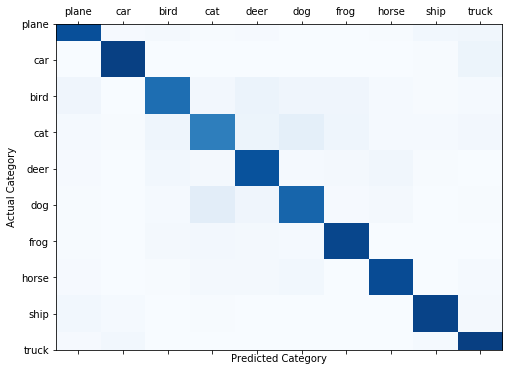

Category   - Accuracy
plane      - 88.2
car        - 93.4
bird       - 75.8
cat        - 69.8
deer       - 87.0
dog        - 79.3
frog       - 91.4
horse      - 89.1
ship       - 92.2
truck      - 94.1

Selected workers

[23 56 20 60 65 93  2 79 16 46 98 12 41 42 71]
Worker 23 : is  Stealthy_Attacker
Worker 56 : is  Honest
Worker 20 : is  Honest
Worker 60 : is  Honest
Worker 65 : is  Honest
Worker 93 : is  Honest
Worker 2 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 16 : is  Stealthy_Attacker
Worker 46 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 41 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 71 : is  Stealthy_Attacker

 | Global Training Round : 100 |


Worker 23 starts training in Global Round:100 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  100


Train Epoch: 1 [0/500	(1%)]	Loss: 1.137742
Train Epoch: 1 [400/500	(81%)]	Loss: 0.514018
Train Epoch: 2 [0/500	(1%)]	Loss: 0.232459
Train Epoch: 2 [400/500	(81%)]	Loss: 0.340392
Train Epoch: 3 [0/500	(1%)]	Loss: 0.111153
Train Epoch: 3 [400/500	(81%)]	Loss: 0.254364
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170142
Train Epoch: 4 [400/500	(81%)]	Loss: 0.239246
Train Epoch: 5 [0/500	(1%)]	Loss: 0.061700
Train Epoch: 5 [400/500	(81%)]	Loss: 0.109717

Performed attacks 1
Worker 23 ends training in Global Round:100 |

Worker 56 starts training in Global Round:100 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.172725
Train Epoch: 1 [400/500	(81%)]	Loss: 0.197969
Train Epoch: 2 [0/500	(1%)]	Loss: 0.055696
Train Epoch: 2 [400/500	(81%)]	Loss: 0.062050
Train Epoch: 3 [0/500	(1%)]	Loss: 0.031708
Train Epoch: 3 [400/500	(81%)]	Loss: 0.027475
Train Epoch: 4 [0/500	(1%)]	Loss: 0.058593
Train Epoch: 4 [400/500	(81%)]	Loss: 0.104026
Train Epoch: 5 [0/500	(1%)]	Loss: 0.028486
Train Epoch: 5 [400/500	(81%)]	Loss: 0.104658

Worker 56 ends training in Global Round:100 |

Worker 20 starts training in Global Round:100 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.249452
Train Epoch: 1 [400/500	(81%)]	Loss: 0.246057
Train Epoch: 2 [0/500	(1%)]	Loss: 0.131975
Train Epoch: 2 [400/500	(81%)]	Loss: 0.103403
Train Epoch: 3 [0/500	(1%)]	Loss: 0.098115
Train Epoch: 3 [400/500	(81%)]	Loss: 0.125298
Train Epoch: 4 [0/500	(1%)]	Loss: 0.116578
Train Epoch: 4 [400/500	(81%)]	Loss: 0.155302
Train Epoch: 5 [0/500	(1%)]	Loss: 0.044513
Train Epoch: 5 [400/500	(81%)]	Loss: 0.053062

Worker 20 ends training in Global Round:100 |

Worker 60 starts training in Global Round:100 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.146730
Train Epoch: 1 [400/500	(81%)]	Loss: 0.210339
Train Epoch: 2 [0/500	(1%)]	Loss: 0.089423
Train Epoch: 2 [400/500	(81%)]	Loss: 0.095927
Train Epoch: 3 [0/500	(1%)]	Loss: 0.099998
Train Epoch: 3 [400/500	(81%)]	Loss: 0.123828
Train Epoch: 4 [0/500	(1%)]	Loss: 0.089330
Train Epoch: 4 [400/500	(81%)]	Loss: 0.085377
Train Epoch: 5 [0/500	(1%)]	Loss: 0.134303
Train Epoch: 5 [400/500	(81%)]	Loss: 0.093992

Worker 60 ends training in Global Round:100 |

Worker 65 starts training in Global Round:100 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.082843
Train Epoch: 1 [400/500	(81%)]	Loss: 0.202991
Train Epoch: 2 [0/500	(1%)]	Loss: 0.044715
Train Epoch: 2 [400/500	(81%)]	Loss: 0.100869
Train Epoch: 3 [0/500	(1%)]	Loss: 0.120051
Train Epoch: 3 [400/500	(81%)]	Loss: 0.068840
Train Epoch: 4 [0/500	(1%)]	Loss: 0.098153
Train Epoch: 4 [400/500	(81%)]	Loss: 0.055173
Train Epoch: 5 [0/500	(1%)]	Loss: 0.013791
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117304

Worker 65 ends training in Global Round:100 |

Worker 93 starts training in Global Round:100 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.137280
Train Epoch: 1 [400/500	(81%)]	Loss: 0.110446
Train Epoch: 2 [0/500	(1%)]	Loss: 0.128549
Train Epoch: 2 [400/500	(81%)]	Loss: 0.107005
Train Epoch: 3 [0/500	(1%)]	Loss: 0.094042
Train Epoch: 3 [400/500	(81%)]	Loss: 0.261427
Train Epoch: 4 [0/500	(1%)]	Loss: 0.042639
Train Epoch: 4 [400/500	(81%)]	Loss: 0.122254
Train Epoch: 5 [0/500	(1%)]	Loss: 0.150964
Train Epoch: 5 [400/500	(81%)]	Loss: 0.185739

Worker 93 ends training in Global Round:100 |

Worker 2 starts training in Global Round:100 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.095923
Train Epoch: 1 [400/500	(81%)]	Loss: 0.218603
Train Epoch: 2 [0/500	(1%)]	Loss: 0.064429
Train Epoch: 2 [400/500	(81%)]	Loss: 0.097579
Train Epoch: 3 [0/500	(1%)]	Loss: 0.020601
Train Epoch: 3 [400/500	(81%)]	Loss: 0.102060
Train Epoch: 4 [0/500	(1%)]	Loss: 0.047544
Train Epoch: 4 [400/500	(81%)]	Loss: 0.031926
Train Epoch: 5 [0/500	(1%)]	Loss: 0.044419
Train Epoch: 5 [400/500	(81%)]	Loss: 0.156879

Worker 2 ends training in Global Round:100 |

Worker 79 starts training in Global Round:100 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  100


Train Epoch: 1 [0/500	(1%)]	Loss: 1.482440
Train Epoch: 1 [400/500	(81%)]	Loss: 0.564210
Train Epoch: 2 [0/500	(1%)]	Loss: 0.455113
Train Epoch: 2 [400/500	(81%)]	Loss: 0.311009
Train Epoch: 3 [0/500	(1%)]	Loss: 0.211111
Train Epoch: 3 [400/500	(81%)]	Loss: 0.221134
Train Epoch: 4 [0/500	(1%)]	Loss: 0.181746
Train Epoch: 4 [400/500	(81%)]	Loss: 0.136782
Train Epoch: 5 [0/500	(1%)]	Loss: 0.136603
Train Epoch: 5 [400/500	(81%)]	Loss: 0.165264

Performed attacks 2
Worker 79 ends training in Global Round:100 |

Worker 16 starts training in Global Round:100 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  100


Train Epoch: 1 [0/500	(1%)]	Loss: 1.608158
Train Epoch: 1 [400/500	(81%)]	Loss: 0.606680
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209703
Train Epoch: 2 [400/500	(81%)]	Loss: 0.512006
Train Epoch: 3 [0/500	(1%)]	Loss: 0.310950
Train Epoch: 3 [400/500	(81%)]	Loss: 0.430547
Train Epoch: 4 [0/500	(1%)]	Loss: 0.136332
Train Epoch: 4 [400/500	(81%)]	Loss: 0.262480
Train Epoch: 5 [0/500	(1%)]	Loss: 0.163322
Train Epoch: 5 [400/500	(81%)]	Loss: 0.216434

Performed attacks 3
Worker 16 ends training in Global Round:100 |

Worker 46 starts training in Global Round:100 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  100


Train Epoch: 1 [0/500	(1%)]	Loss: 1.427425
Train Epoch: 1 [400/500	(81%)]	Loss: 0.496286
Train Epoch: 2 [0/500	(1%)]	Loss: 0.385902
Train Epoch: 2 [400/500	(81%)]	Loss: 0.309904
Train Epoch: 3 [0/500	(1%)]	Loss: 0.167044
Train Epoch: 3 [400/500	(81%)]	Loss: 0.314558
Train Epoch: 4 [0/500	(1%)]	Loss: 0.147974
Train Epoch: 4 [400/500	(81%)]	Loss: 0.183341
Train Epoch: 5 [0/500	(1%)]	Loss: 0.162055
Train Epoch: 5 [400/500	(81%)]	Loss: 0.158686

Performed attacks 4
Worker 46 ends training in Global Round:100 |

Worker 98 starts training in Global Round:100 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  100


Train Epoch: 1 [0/500	(1%)]	Loss: 1.298303
Train Epoch: 1 [400/500	(81%)]	Loss: 0.580084
Train Epoch: 2 [0/500	(1%)]	Loss: 0.110285
Train Epoch: 2 [400/500	(81%)]	Loss: 0.353652
Train Epoch: 3 [0/500	(1%)]	Loss: 0.207307
Train Epoch: 3 [400/500	(81%)]	Loss: 0.394594
Train Epoch: 4 [0/500	(1%)]	Loss: 0.222426
Train Epoch: 4 [400/500	(81%)]	Loss: 0.245187
Train Epoch: 5 [0/500	(1%)]	Loss: 0.173887
Train Epoch: 5 [400/500	(81%)]	Loss: 0.159837

Performed attacks 5
Worker 98 ends training in Global Round:100 |

Worker 12 starts training in Global Round:100 |
Performed attacks 5

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  100


Train Epoch: 1 [0/500	(1%)]	Loss: 0.919324
Train Epoch: 1 [400/500	(81%)]	Loss: 0.462716
Train Epoch: 2 [0/500	(1%)]	Loss: 0.136608
Train Epoch: 2 [400/500	(81%)]	Loss: 0.471321
Train Epoch: 3 [0/500	(1%)]	Loss: 0.253131
Train Epoch: 3 [400/500	(81%)]	Loss: 0.358522
Train Epoch: 4 [0/500	(1%)]	Loss: 0.238369
Train Epoch: 4 [400/500	(81%)]	Loss: 0.135106
Train Epoch: 5 [0/500	(1%)]	Loss: 0.102321
Train Epoch: 5 [400/500	(81%)]	Loss: 0.226786

Performed attacks 6
Worker 12 ends training in Global Round:100 |

Worker 41 starts training in Global Round:100 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.437495
Train Epoch: 1 [400/500	(81%)]	Loss: 0.513899
Train Epoch: 2 [0/500	(1%)]	Loss: 0.099173
Train Epoch: 2 [400/500	(81%)]	Loss: 0.238451
Train Epoch: 3 [0/500	(1%)]	Loss: 0.102436
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234501
Train Epoch: 4 [0/500	(1%)]	Loss: 0.101268
Train Epoch: 4 [400/500	(81%)]	Loss: 0.207164
Train Epoch: 5 [0/500	(1%)]	Loss: 0.105689
Train Epoch: 5 [400/500	(81%)]	Loss: 0.288799

Worker 41 ends training in Global Round:100 |

Worker 42 starts training in Global Round:100 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.193491
Train Epoch: 1 [400/500	(81%)]	Loss: 0.194762
Train Epoch: 2 [0/500	(1%)]	Loss: 0.087083
Train Epoch: 2 [400/500	(81%)]	Loss: 0.110415
Train Epoch: 3 [0/500	(1%)]	Loss: 0.061102
Train Epoch: 3 [400/500	(81%)]	Loss: 0.113179
Train Epoch: 4 [0/500	(1%)]	Loss: 0.107122
Train Epoch: 4 [400/500	(81%)]	Loss: 0.047374
Train Epoch: 5 [0/500	(1%)]	Loss: 0.055089
Train Epoch: 5 [400/500	(81%)]	Loss: 0.116638

Worker 42 ends training in Global Round:100 |

Worker 71 starts training in Global Round:100 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.249592
Train Epoch: 1 [400/500	(81%)]	Loss: 0.663886
Train Epoch: 2 [0/500	(1%)]	Loss: 0.205121
Train Epoch: 2 [400/500	(81%)]	Loss: 0.266917
Train Epoch: 3 [0/500	(1%)]	Loss: 0.058069
Train Epoch: 3 [400/500	(81%)]	Loss: 0.097747
Train Epoch: 4 [0/500	(1%)]	Loss: 0.128100
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192346
Train Epoch: 5 [0/500	(1%)]	Loss: 0.164731
Train Epoch: 5 [400/500	(81%)]	Loss: 0.225576

Worker 71 ends training in Global Round:100 |
Last layer biases  [array([ 0.03647724, -0.03111059, -0.01205787,  0.04070191,  0.05401885,
       -0.013883  ,  0.03889361, -0.03184799, -0.02175902, -0.04353177],
      dtype=float32), array([ 0.03476526, -0.03164922, -0.01567283,  0.03978858,  0.04080699,
       -0.01485826,  0.03865502, -0.0093908 , -0.02299156, -0.04355178],
      dtype=float32), array([ 0.03401773, -0.03274144, -0.01331869,  0.03970018,  0.03954139,
       -0.01206845,  0.03799597, -0.01063903, -0.02401132, -0.04257497],
      dty

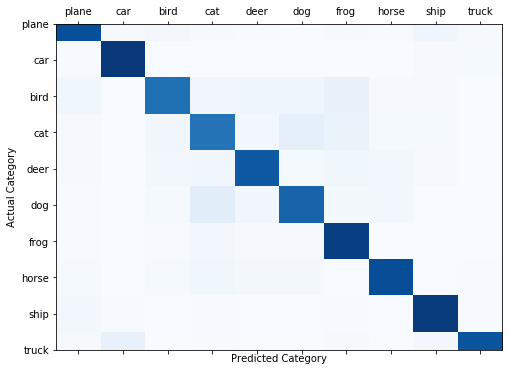

Category   - Accuracy
plane      - 88.0
car        - 96.7
bird       - 75.0
cat        - 74.0
deer       - 84.0
dog        - 79.7
frog       - 93.9
horse      - 88.3
ship       - 95.1
truck      - 86.0

Average loss during gobal rounds
[2.227601893424988, 1.9255451052983596, 1.666168113708496, 1.4019407130877177, 1.2609959368705752, 1.1302693473498027, 1.0420396644274394, 0.9765358723004659, 0.9077625035444896, 0.8335173728466035, 0.8104300554593404, 0.7398703404267629, 0.7176264688968658, 0.6504533845583597, 0.6546210489273072, 0.6032362728118897, 0.6311634998321533, 0.5503917243083318, 0.5735564770698548, 0.5289474821885427, 0.5308454891443252, 0.506815554300944, 0.4574875992536545, 0.46775608309110006, 0.4857645007769268, 0.48636453056335444, 0.42567015737295144, 0.4328411176403364, 0.4005461284518242, 0.4034404991865158, 0.40204054705301917, 0.4198455749352773, 0.39529410946369165, 0.3818640507857005, 0.3866833990414938, 0.3912603746255238, 0.3778053222298622, 0.35757993014653516, 

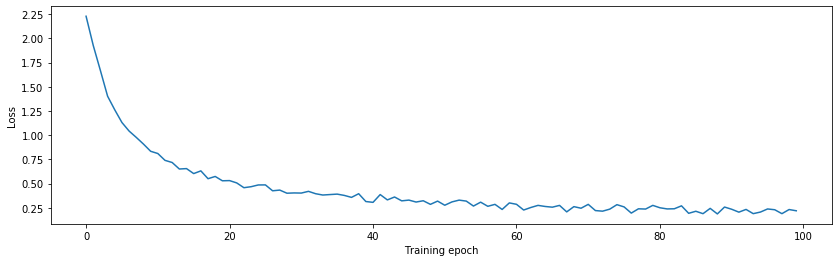

Accuracy during gobal rounds
[0.1, 0.2432, 0.4241, 0.4993, 0.5588, 0.5783, 0.6064, 0.626, 0.6434, 0.6766, 0.6812, 0.6896, 0.7051, 0.7151, 0.7309, 0.7432, 0.7422, 0.7377, 0.7625, 0.7689, 0.7626, 0.77, 0.7775, 0.776, 0.7816, 0.7885, 0.8009, 0.789, 0.7997, 0.7967, 0.802, 0.7775, 0.8018, 0.807, 0.8119, 0.7955, 0.8082, 0.8157, 0.8147, 0.8175, 0.8188, 0.8166, 0.8281, 0.8267, 0.8244, 0.8264, 0.8294, 0.8262, 0.8249, 0.8287, 0.8308, 0.8291, 0.8341, 0.8332, 0.8421, 0.8381, 0.84, 0.8354, 0.8456, 0.8421, 0.8385, 0.8503, 0.8452, 0.8372, 0.8457, 0.8453, 0.8408, 0.8505, 0.8368, 0.8492, 0.846, 0.8504, 0.8505, 0.8522, 0.8441, 0.8451, 0.8597, 0.8517, 0.8517, 0.8591, 0.8464, 0.8495, 0.8514, 0.8564, 0.865, 0.861, 0.8619, 0.8628, 0.8647, 0.86, 0.8607, 0.863, 0.8611, 0.8647, 0.8628, 0.8592, 0.8616, 0.8621, 0.8603, 0.8607]


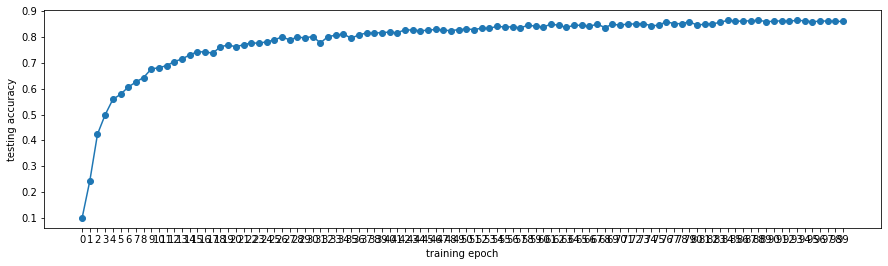

Class deer accuracy
[0.0, 79.60000000000001, 58.699999999999996, 47.5, 48.0, 51.0, 51.1, 39.300000000000004, 64.1, 61.3, 62.7, 61.8, 63.3, 70.7, 72.2, 74.1, 74.4, 79.9, 78.60000000000001, 70.8, 71.1, 72.6, 75.1, 75.5, 74.4, 78.7, 82.5, 77.9, 78.3, 78.5, 83.2, 80.5, 84.3, 77.10000000000001, 80.9, 83.5, 82.39999999999999, 78.5, 84.1, 86.7, 82.3, 81.10000000000001, 82.0, 80.80000000000001, 79.3, 84.5, 83.3, 84.3, 89.1, 78.0, 84.1, 80.80000000000001, 82.89999999999999, 88.8, 85.39999999999999, 83.8, 84.8, 85.1, 81.2, 80.10000000000001, 85.9, 85.3, 82.3, 85.0, 86.6, 86.6, 85.6, 82.5, 90.9, 88.2, 77.60000000000001, 87.9, 84.39999999999999, 89.0, 86.4, 86.3, 86.2, 80.0, 84.89999999999999, 86.8, 87.6, 83.8, 85.2, 87.0, 85.7, 87.5, 86.2, 86.5, 87.2, 86.4, 85.5, 89.1, 85.3, 88.8, 83.1, 88.5, 86.6, 85.3, 87.0, 84.0]


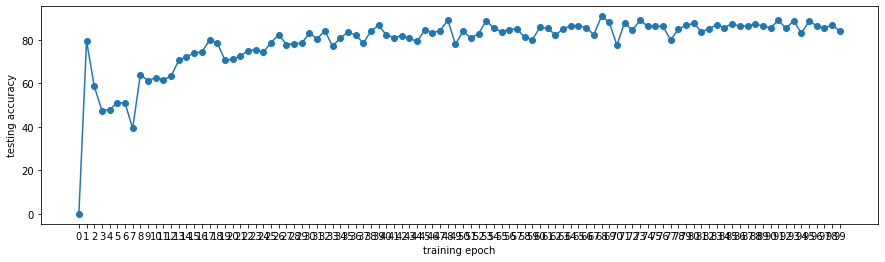

Class horse accuracy
[0.0, 12.2, 45.1, 59.099999999999994, 64.3, 60.5, 55.7, 64.9, 70.1, 64.1, 72.5, 70.1, 78.5, 69.69999999999999, 78.4, 77.9, 81.0, 70.5, 78.7, 81.3, 73.1, 80.7, 84.1, 83.7, 84.7, 80.80000000000001, 85.9, 83.0, 82.0, 84.2, 87.2, 75.6, 79.80000000000001, 80.10000000000001, 86.0, 83.5, 85.2, 85.8, 80.5, 80.5, 84.2, 83.6, 86.4, 87.5, 84.3, 88.9, 84.8, 89.8, 79.80000000000001, 85.0, 92.0, 85.5, 87.9, 86.0, 88.5, 89.8, 81.39999999999999, 89.60000000000001, 86.7, 86.9, 87.6, 90.4, 89.5, 89.0, 86.0, 84.2, 88.8, 86.1, 80.4, 88.2, 89.8, 85.8, 89.5, 91.7, 88.5, 87.2, 90.2, 89.3, 88.6, 89.7, 87.9, 84.89999999999999, 89.5, 88.5, 88.8, 89.60000000000001, 87.8, 88.8, 89.9, 90.2, 88.0, 93.0, 90.10000000000001, 87.5, 92.60000000000001, 89.60000000000001, 90.0, 90.7, 89.1, 88.3]


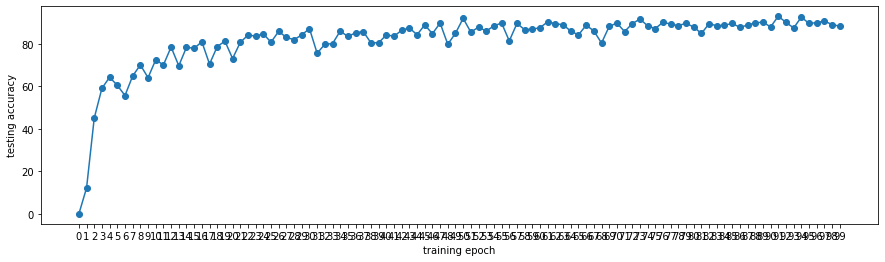

Detection accuracy
Detection accuracy 98.80000000000001%


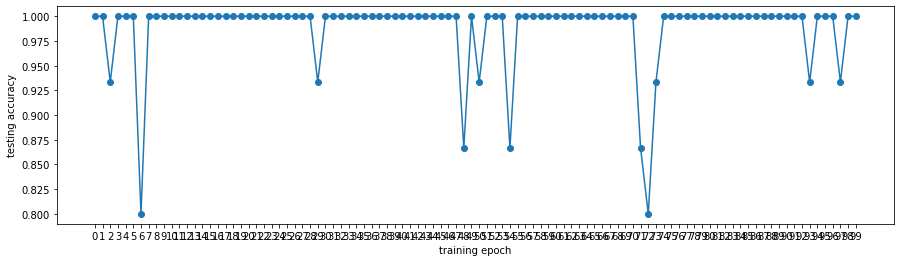

Maximum number of attacks:  5
Tau value :  -0.09999999999999998

==>Start targeted attack Simulation in Secure Environment...


===>targeted attack with rate of: (40%) of peers and malicious behaviour rate of: (100%)
======>Creating Global model.....
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1,


Selected workers

[32 93 79 54 20 23 66 25 36 75 33 62 95 68 49]
Worker 32 : is  Honest
Worker 93 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 20 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 66 : is  Stealthy_Attacker
Worker 25 : is  Honest
Worker 36 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 62 : is  Honest
Worker 95 : is  Honest
Worker 68 : is  Honest
Worker 49 : is  Honest

 | Global Training Round : 1 |


Worker 32 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.715106
Train Epoch: 1 [400/500	(81%)]	Loss: 2.560396
Train Epoch: 2 [0/500	(1%)]	Loss: 2.238075
Train Epoch: 2 [400/500	(81%)]	Loss: 2.420401
Train Epoch: 3 [0/500	(1%)]	Loss: 2.212572
Train Epoch: 3 [400/500	(81%)]	Loss: 2.229904
Train Epoch: 4 [0/500	(1%)]	Loss: 2.283935
Train Epoch: 4 [400/500	(81%)]	Loss: 2.245865
Train Epoch: 5 [0/500	(1%)]	Loss: 2.085931
Train Epoch: 5 [400/500	(81%)]	Loss: 2.353004

Worker 32 ends training in Global Round:1 |

Worker 93 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.658226
Train Epoch: 1 [400/500	(81%)]	Loss: 2.436564
Train Epoch: 2 [0/500	(1%)]	Loss: 2.413598
Train Epoch: 2 [400/500	(81%)]	Loss: 2.069607
Train Epoch: 3 [0/500	(1%)]	Loss: 2.030561
Train Epoch: 3 [400/500	(81%)]	Loss: 2.525021
Train Epoch: 4 [0/500	(1%)]	Loss: 2.092808
Train Epoch: 4 [400/500	(81%)]	Loss: 2.066418
Train Epoch: 5 [0/500	(1%)]	Loss: 2.496398
Train Epoch: 5 [400/500	(81%)]	Loss: 1.951830

Worker 93 ends training in Global Round:1 |

Worker 79 starts training in Global Round:1 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  1


Train Epoch: 1 [0/500	(1%)]	Loss: 2.807952
Train Epoch: 1 [400/500	(81%)]	Loss: 2.251469
Train Epoch: 2 [0/500	(1%)]	Loss: 2.144112
Train Epoch: 2 [400/500	(81%)]	Loss: 2.069736
Train Epoch: 3 [0/500	(1%)]	Loss: 2.287066
Train Epoch: 3 [400/500	(81%)]	Loss: 2.306856
Train Epoch: 4 [0/500	(1%)]	Loss: 2.204774
Train Epoch: 4 [400/500	(81%)]	Loss: 2.290977
Train Epoch: 5 [0/500	(1%)]	Loss: 2.076024
Train Epoch: 5 [400/500	(81%)]	Loss: 2.116385

Performed attacks 1
Worker 79 ends training in Global Round:1 |

Worker 54 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.651445
Train Epoch: 1 [400/500	(81%)]	Loss: 2.393485
Train Epoch: 2 [0/500	(1%)]	Loss: 2.017407
Train Epoch: 2 [400/500	(81%)]	Loss: 2.204904
Train Epoch: 3 [0/500	(1%)]	Loss: 1.956438
Train Epoch: 3 [400/500	(81%)]	Loss: 1.851527
Train Epoch: 4 [0/500	(1%)]	Loss: 2.016019
Train Epoch: 4 [400/500	(81%)]	Loss: 2.287971
Train Epoch: 5 [0/500	(1%)]	Loss: 1.907987
Train Epoch: 5 [400/500	(81%)]	Loss: 2.118683

Worker 54 ends training in Global Round:1 |

Worker 20 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.600789
Train Epoch: 1 [400/500	(81%)]	Loss: 2.761133
Train Epoch: 2 [0/500	(1%)]	Loss: 2.315908
Train Epoch: 2 [400/500	(81%)]	Loss: 2.145913
Train Epoch: 3 [0/500	(1%)]	Loss: 2.188108
Train Epoch: 3 [400/500	(81%)]	Loss: 2.312652
Train Epoch: 4 [0/500	(1%)]	Loss: 2.235069
Train Epoch: 4 [400/500	(81%)]	Loss: 2.495639
Train Epoch: 5 [0/500	(1%)]	Loss: 1.729281
Train Epoch: 5 [400/500	(81%)]	Loss: 2.436866

Worker 20 ends training in Global Round:1 |

Worker 23 starts training in Global Round:1 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  1


Train Epoch: 1 [0/500	(1%)]	Loss: 2.712501
Train Epoch: 1 [400/500	(81%)]	Loss: 2.031727
Train Epoch: 2 [0/500	(1%)]	Loss: 2.123543
Train Epoch: 2 [400/500	(81%)]	Loss: 2.199188
Train Epoch: 3 [0/500	(1%)]	Loss: 1.975239
Train Epoch: 3 [400/500	(81%)]	Loss: 2.104397
Train Epoch: 4 [0/500	(1%)]	Loss: 1.728465
Train Epoch: 4 [400/500	(81%)]	Loss: 1.969123
Train Epoch: 5 [0/500	(1%)]	Loss: 2.045721
Train Epoch: 5 [400/500	(81%)]	Loss: 1.867568

Performed attacks 2
Worker 23 ends training in Global Round:1 |

Worker 66 starts training in Global Round:1 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  1


Train Epoch: 1 [0/500	(1%)]	Loss: 2.649693
Train Epoch: 1 [400/500	(81%)]	Loss: 2.241411
Train Epoch: 2 [0/500	(1%)]	Loss: 2.283607
Train Epoch: 2 [400/500	(81%)]	Loss: 1.970514
Train Epoch: 3 [0/500	(1%)]	Loss: 1.950851
Train Epoch: 3 [400/500	(81%)]	Loss: 2.367959
Train Epoch: 4 [0/500	(1%)]	Loss: 2.299603
Train Epoch: 4 [400/500	(81%)]	Loss: 1.965851
Train Epoch: 5 [0/500	(1%)]	Loss: 2.170564
Train Epoch: 5 [400/500	(81%)]	Loss: 1.902775

Performed attacks 3
Worker 66 ends training in Global Round:1 |

Worker 25 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.641215
Train Epoch: 1 [400/500	(81%)]	Loss: 2.292809
Train Epoch: 2 [0/500	(1%)]	Loss: 2.232587
Train Epoch: 2 [400/500	(81%)]	Loss: 2.144900
Train Epoch: 3 [0/500	(1%)]	Loss: 2.126365
Train Epoch: 3 [400/500	(81%)]	Loss: 2.206887
Train Epoch: 4 [0/500	(1%)]	Loss: 2.047364
Train Epoch: 4 [400/500	(81%)]	Loss: 2.142216
Train Epoch: 5 [0/500	(1%)]	Loss: 2.066613
Train Epoch: 5 [400/500	(81%)]	Loss: 2.501024

Worker 25 ends training in Global Round:1 |

Worker 36 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.599506
Train Epoch: 1 [400/500	(81%)]	Loss: 2.296187
Train Epoch: 2 [0/500	(1%)]	Loss: 2.250854
Train Epoch: 2 [400/500	(81%)]	Loss: 2.149347
Train Epoch: 3 [0/500	(1%)]	Loss: 2.074490
Train Epoch: 3 [400/500	(81%)]	Loss: 2.245174
Train Epoch: 4 [0/500	(1%)]	Loss: 2.264517
Train Epoch: 4 [400/500	(81%)]	Loss: 2.261183
Train Epoch: 5 [0/500	(1%)]	Loss: 2.074025
Train Epoch: 5 [400/500	(81%)]	Loss: 2.052057

Worker 36 ends training in Global Round:1 |

Worker 75 starts training in Global Round:1 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  1


Train Epoch: 1 [0/500	(1%)]	Loss: 2.815788
Train Epoch: 1 [400/500	(81%)]	Loss: 2.948057
Train Epoch: 2 [0/500	(1%)]	Loss: 2.301094
Train Epoch: 2 [400/500	(81%)]	Loss: 1.946055
Train Epoch: 3 [0/500	(1%)]	Loss: 2.077343
Train Epoch: 3 [400/500	(81%)]	Loss: 2.280371
Train Epoch: 4 [0/500	(1%)]	Loss: 1.924447
Train Epoch: 4 [400/500	(81%)]	Loss: 2.086493
Train Epoch: 5 [0/500	(1%)]	Loss: 1.801837
Train Epoch: 5 [400/500	(81%)]	Loss: 1.923665

Performed attacks 4
Worker 75 ends training in Global Round:1 |

Worker 33 starts training in Global Round:1 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  1


Train Epoch: 1 [0/500	(1%)]	Loss: 2.669160
Train Epoch: 1 [400/500	(81%)]	Loss: 2.035663
Train Epoch: 2 [0/500	(1%)]	Loss: 1.938906
Train Epoch: 2 [400/500	(81%)]	Loss: 1.945818
Train Epoch: 3 [0/500	(1%)]	Loss: 1.948535
Train Epoch: 3 [400/500	(81%)]	Loss: 1.813310
Train Epoch: 4 [0/500	(1%)]	Loss: 2.150935
Train Epoch: 4 [400/500	(81%)]	Loss: 1.895654
Train Epoch: 5 [0/500	(1%)]	Loss: 1.807849
Train Epoch: 5 [400/500	(81%)]	Loss: 1.867583

Performed attacks 5
Worker 33 ends training in Global Round:1 |

Worker 62 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.631889
Train Epoch: 1 [400/500	(81%)]	Loss: 2.480538
Train Epoch: 2 [0/500	(1%)]	Loss: 2.192620
Train Epoch: 2 [400/500	(81%)]	Loss: 2.235310
Train Epoch: 3 [0/500	(1%)]	Loss: 2.052872
Train Epoch: 3 [400/500	(81%)]	Loss: 2.285378
Train Epoch: 4 [0/500	(1%)]	Loss: 1.695585
Train Epoch: 4 [400/500	(81%)]	Loss: 2.335548
Train Epoch: 5 [0/500	(1%)]	Loss: 1.713429
Train Epoch: 5 [400/500	(81%)]	Loss: 2.450830

Worker 62 ends training in Global Round:1 |

Worker 95 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.605102
Train Epoch: 1 [400/500	(81%)]	Loss: 2.599904
Train Epoch: 2 [0/500	(1%)]	Loss: 2.664613
Train Epoch: 2 [400/500	(81%)]	Loss: 2.348297
Train Epoch: 3 [0/500	(1%)]	Loss: 2.524201
Train Epoch: 3 [400/500	(81%)]	Loss: 2.356548
Train Epoch: 4 [0/500	(1%)]	Loss: 2.182282
Train Epoch: 4 [400/500	(81%)]	Loss: 1.886563
Train Epoch: 5 [0/500	(1%)]	Loss: 2.032939
Train Epoch: 5 [400/500	(81%)]	Loss: 2.143677

Worker 95 ends training in Global Round:1 |

Worker 68 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.663478
Train Epoch: 1 [400/500	(81%)]	Loss: 2.274394
Train Epoch: 2 [0/500	(1%)]	Loss: 2.122339
Train Epoch: 2 [400/500	(81%)]	Loss: 2.367329
Train Epoch: 3 [0/500	(1%)]	Loss: 2.176784
Train Epoch: 3 [400/500	(81%)]	Loss: 2.227664
Train Epoch: 4 [0/500	(1%)]	Loss: 2.326302
Train Epoch: 4 [400/500	(81%)]	Loss: 2.280174
Train Epoch: 5 [0/500	(1%)]	Loss: 2.141687
Train Epoch: 5 [400/500	(81%)]	Loss: 2.235791

Worker 68 ends training in Global Round:1 |

Worker 49 starts training in Global Round:1 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.682665
Train Epoch: 1 [400/500	(81%)]	Loss: 2.457084
Train Epoch: 2 [0/500	(1%)]	Loss: 2.326516
Train Epoch: 2 [400/500	(81%)]	Loss: 2.503021
Train Epoch: 3 [0/500	(1%)]	Loss: 2.194870
Train Epoch: 3 [400/500	(81%)]	Loss: 2.266718
Train Epoch: 4 [0/500	(1%)]	Loss: 2.514888
Train Epoch: 4 [400/500	(81%)]	Loss: 2.536979
Train Epoch: 5 [0/500	(1%)]	Loss: 2.257758
Train Epoch: 5 [400/500	(81%)]	Loss: 2.093737

Worker 49 ends training in Global Round:1 |
Last layer biases  [array([ 0.02844713, -0.0267535 , -0.0205508 ,  0.02636009,  0.03512862,
       -0.01465056,  0.04543332, -0.00725238, -0.01215163, -0.03810931],
      dtype=float32), array([ 0.028402  , -0.02434531, -0.02279091,  0.03027944,  0.03432439,
       -0.01700807,  0.04383021, -0.00482408, -0.01627614, -0.03569057],
      dtype=float32), array([ 0.02661591, -0.02696773, -0.01564166,  0.02942932,  0.03724015,
       -0.01561932,  0.04682897, -0.02042856, -0.00894867, -0.0366074 ],
      dtype

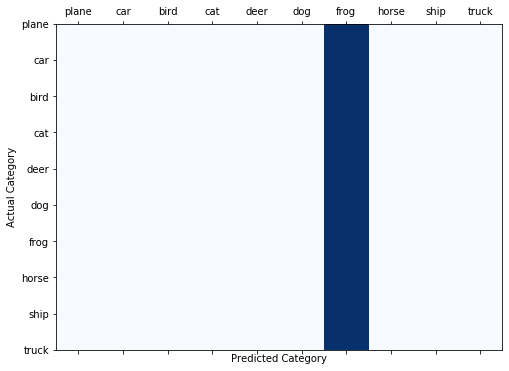

Category   - Accuracy
plane      - 0.0
car        - 0.0
bird       - 0.0
cat        - 0.0
deer       - 0.0
dog        - 0.0
frog       - 100.0
horse      - 0.0
ship       - 0.0
truck      - 0.0

Selected workers

[ 2 38 76 61 84 87 86 75  3 96 85 60 11 91 68]
Worker 2 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 76 : is  Honest
Worker 61 : is  Honest
Worker 84 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 86 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 3 : is  Stealthy_Attacker
Worker 96 : is  Honest
Worker 85 : is  Honest
Worker 60 : is  Honest
Worker 11 : is  Honest
Worker 91 : is  Honest
Worker 68 : is  Honest

 | Global Training Round : 2 |


Worker 2 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.136977
Train Epoch: 1 [400/500	(81%)]	Loss: 2.097812
Train Epoch: 2 [0/500	(1%)]	Loss: 1.871708
Train Epoch: 2 [400/500	(81%)]	Loss: 1.980786
Train Epoch: 3 [0/500	(1%)]	Loss: 1.780627
Train Epoch: 3 [400/500	(81%)]	Loss: 2.398607
Train Epoch: 4 [0/500	(1%)]	Loss: 1.759180
Train Epoch: 4 [400/500	(81%)]	Loss: 1.558514
Train Epoch: 5 [0/500	(1%)]	Loss: 1.981572
Train Epoch: 5 [400/500	(81%)]	Loss: 2.215055

Worker 2 ends training in Global Round:2 |

Worker 38 starts training in Global Round:2 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  2


Train Epoch: 1 [0/500	(1%)]	Loss: 2.394683
Train Epoch: 1 [400/500	(81%)]	Loss: 1.947859
Train Epoch: 2 [0/500	(1%)]	Loss: 2.108854
Train Epoch: 2 [400/500	(81%)]	Loss: 1.937365
Train Epoch: 3 [0/500	(1%)]	Loss: 1.754494
Train Epoch: 3 [400/500	(81%)]	Loss: 2.519375
Train Epoch: 4 [0/500	(1%)]	Loss: 1.755033
Train Epoch: 4 [400/500	(81%)]	Loss: 1.724683
Train Epoch: 5 [0/500	(1%)]	Loss: 1.785828
Train Epoch: 5 [400/500	(81%)]	Loss: 1.602004

Performed attacks 1
Worker 38 ends training in Global Round:2 |

Worker 76 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.850564
Train Epoch: 1 [400/500	(81%)]	Loss: 2.028647
Train Epoch: 2 [0/500	(1%)]	Loss: 2.186001
Train Epoch: 2 [400/500	(81%)]	Loss: 2.310960
Train Epoch: 3 [0/500	(1%)]	Loss: 2.028889
Train Epoch: 3 [400/500	(81%)]	Loss: 1.682766
Train Epoch: 4 [0/500	(1%)]	Loss: 1.938196
Train Epoch: 4 [400/500	(81%)]	Loss: 2.068251
Train Epoch: 5 [0/500	(1%)]	Loss: 1.732564
Train Epoch: 5 [400/500	(81%)]	Loss: 1.846417

Worker 76 ends training in Global Round:2 |

Worker 61 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.943678
Train Epoch: 1 [400/500	(81%)]	Loss: 2.330649
Train Epoch: 2 [0/500	(1%)]	Loss: 2.281808
Train Epoch: 2 [400/500	(81%)]	Loss: 2.282421
Train Epoch: 3 [0/500	(1%)]	Loss: 1.896326
Train Epoch: 3 [400/500	(81%)]	Loss: 2.001462
Train Epoch: 4 [0/500	(1%)]	Loss: 2.010874
Train Epoch: 4 [400/500	(81%)]	Loss: 2.165158
Train Epoch: 5 [0/500	(1%)]	Loss: 1.685386
Train Epoch: 5 [400/500	(81%)]	Loss: 1.750487

Worker 61 ends training in Global Round:2 |

Worker 84 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.119409
Train Epoch: 1 [400/500	(81%)]	Loss: 2.150689
Train Epoch: 2 [0/500	(1%)]	Loss: 1.905213
Train Epoch: 2 [400/500	(81%)]	Loss: 2.381611
Train Epoch: 3 [0/500	(1%)]	Loss: 2.043793
Train Epoch: 3 [400/500	(81%)]	Loss: 1.984303
Train Epoch: 4 [0/500	(1%)]	Loss: 2.448222
Train Epoch: 4 [400/500	(81%)]	Loss: 2.116552
Train Epoch: 5 [0/500	(1%)]	Loss: 1.956913
Train Epoch: 5 [400/500	(81%)]	Loss: 1.918330

Worker 84 ends training in Global Round:2 |

Worker 87 starts training in Global Round:2 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  2


Train Epoch: 1 [0/500	(1%)]	Loss: 2.106688
Train Epoch: 1 [400/500	(81%)]	Loss: 1.798704
Train Epoch: 2 [0/500	(1%)]	Loss: 1.642735
Train Epoch: 2 [400/500	(81%)]	Loss: 2.026978
Train Epoch: 3 [0/500	(1%)]	Loss: 1.442866
Train Epoch: 3 [400/500	(81%)]	Loss: 1.735963
Train Epoch: 4 [0/500	(1%)]	Loss: 1.476828
Train Epoch: 4 [400/500	(81%)]	Loss: 1.423882
Train Epoch: 5 [0/500	(1%)]	Loss: 1.485678
Train Epoch: 5 [400/500	(81%)]	Loss: 1.775426

Performed attacks 2
Worker 87 ends training in Global Round:2 |

Worker 86 starts training in Global Round:2 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  2


Train Epoch: 1 [0/500	(1%)]	Loss: 2.348816
Train Epoch: 1 [400/500	(81%)]	Loss: 2.159896
Train Epoch: 2 [0/500	(1%)]	Loss: 1.937716
Train Epoch: 2 [400/500	(81%)]	Loss: 1.885030
Train Epoch: 3 [0/500	(1%)]	Loss: 1.908349
Train Epoch: 3 [400/500	(81%)]	Loss: 1.887933
Train Epoch: 4 [0/500	(1%)]	Loss: 2.005196
Train Epoch: 4 [400/500	(81%)]	Loss: 1.807305
Train Epoch: 5 [0/500	(1%)]	Loss: 1.499047
Train Epoch: 5 [400/500	(81%)]	Loss: 1.531885

Performed attacks 3
Worker 86 ends training in Global Round:2 |

Worker 75 starts training in Global Round:2 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  2


Train Epoch: 1 [0/500	(1%)]	Loss: 2.489276
Train Epoch: 1 [400/500	(81%)]	Loss: 1.760539
Train Epoch: 2 [0/500	(1%)]	Loss: 2.076976
Train Epoch: 2 [400/500	(81%)]	Loss: 2.271435
Train Epoch: 3 [0/500	(1%)]	Loss: 1.966053
Train Epoch: 3 [400/500	(81%)]	Loss: 1.956332
Train Epoch: 4 [0/500	(1%)]	Loss: 2.112208
Train Epoch: 4 [400/500	(81%)]	Loss: 1.830785
Train Epoch: 5 [0/500	(1%)]	Loss: 2.025656
Train Epoch: 5 [400/500	(81%)]	Loss: 1.761255

Performed attacks 4
Worker 75 ends training in Global Round:2 |

Worker 3 starts training in Global Round:2 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  2


Train Epoch: 1 [0/500	(1%)]	Loss: 2.317847
Train Epoch: 1 [400/500	(81%)]	Loss: 2.001817
Train Epoch: 2 [0/500	(1%)]	Loss: 2.014305
Train Epoch: 2 [400/500	(81%)]	Loss: 2.165919
Train Epoch: 3 [0/500	(1%)]	Loss: 2.503328
Train Epoch: 3 [400/500	(81%)]	Loss: 2.178786
Train Epoch: 4 [0/500	(1%)]	Loss: 1.907788
Train Epoch: 4 [400/500	(81%)]	Loss: 2.009914
Train Epoch: 5 [0/500	(1%)]	Loss: 1.824220
Train Epoch: 5 [400/500	(81%)]	Loss: 2.130886

Performed attacks 5
Worker 3 ends training in Global Round:2 |

Worker 96 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.066785
Train Epoch: 1 [400/500	(81%)]	Loss: 2.044051
Train Epoch: 2 [0/500	(1%)]	Loss: 1.813856
Train Epoch: 2 [400/500	(81%)]	Loss: 1.919710
Train Epoch: 3 [0/500	(1%)]	Loss: 1.907995
Train Epoch: 3 [400/500	(81%)]	Loss: 1.740825
Train Epoch: 4 [0/500	(1%)]	Loss: 1.688715
Train Epoch: 4 [400/500	(81%)]	Loss: 1.777236
Train Epoch: 5 [0/500	(1%)]	Loss: 1.667428
Train Epoch: 5 [400/500	(81%)]	Loss: 1.459751

Worker 96 ends training in Global Round:2 |

Worker 85 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.056724
Train Epoch: 1 [400/500	(81%)]	Loss: 2.034158
Train Epoch: 2 [0/500	(1%)]	Loss: 2.014054
Train Epoch: 2 [400/500	(81%)]	Loss: 1.991138
Train Epoch: 3 [0/500	(1%)]	Loss: 1.788164
Train Epoch: 3 [400/500	(81%)]	Loss: 2.028718
Train Epoch: 4 [0/500	(1%)]	Loss: 1.770618
Train Epoch: 4 [400/500	(81%)]	Loss: 2.115924
Train Epoch: 5 [0/500	(1%)]	Loss: 1.452322
Train Epoch: 5 [400/500	(81%)]	Loss: 1.604344

Worker 85 ends training in Global Round:2 |

Worker 60 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.111520
Train Epoch: 1 [400/500	(81%)]	Loss: 2.119141
Train Epoch: 2 [0/500	(1%)]	Loss: 1.992203
Train Epoch: 2 [400/500	(81%)]	Loss: 2.165666
Train Epoch: 3 [0/500	(1%)]	Loss: 1.890466
Train Epoch: 3 [400/500	(81%)]	Loss: 1.670594
Train Epoch: 4 [0/500	(1%)]	Loss: 1.872621
Train Epoch: 4 [400/500	(81%)]	Loss: 1.827297
Train Epoch: 5 [0/500	(1%)]	Loss: 1.753370
Train Epoch: 5 [400/500	(81%)]	Loss: 1.504456

Worker 60 ends training in Global Round:2 |

Worker 11 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.100485
Train Epoch: 1 [400/500	(81%)]	Loss: 1.844938
Train Epoch: 2 [0/500	(1%)]	Loss: 1.877648
Train Epoch: 2 [400/500	(81%)]	Loss: 1.888127
Train Epoch: 3 [0/500	(1%)]	Loss: 1.628160
Train Epoch: 3 [400/500	(81%)]	Loss: 1.832198
Train Epoch: 4 [0/500	(1%)]	Loss: 1.560863
Train Epoch: 4 [400/500	(81%)]	Loss: 1.692926
Train Epoch: 5 [0/500	(1%)]	Loss: 1.599697
Train Epoch: 5 [400/500	(81%)]	Loss: 1.532957

Worker 11 ends training in Global Round:2 |

Worker 91 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.056661
Train Epoch: 1 [400/500	(81%)]	Loss: 1.912861
Train Epoch: 2 [0/500	(1%)]	Loss: 1.864830
Train Epoch: 2 [400/500	(81%)]	Loss: 1.764871
Train Epoch: 3 [0/500	(1%)]	Loss: 1.798320
Train Epoch: 3 [400/500	(81%)]	Loss: 1.593551
Train Epoch: 4 [0/500	(1%)]	Loss: 1.754607
Train Epoch: 4 [400/500	(81%)]	Loss: 1.778858
Train Epoch: 5 [0/500	(1%)]	Loss: 1.375010
Train Epoch: 5 [400/500	(81%)]	Loss: 2.133582

Worker 91 ends training in Global Round:2 |

Worker 68 starts training in Global Round:2 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.075985
Train Epoch: 1 [400/500	(81%)]	Loss: 2.261004
Train Epoch: 2 [0/500	(1%)]	Loss: 1.895581
Train Epoch: 2 [400/500	(81%)]	Loss: 1.977248
Train Epoch: 3 [0/500	(1%)]	Loss: 1.991315
Train Epoch: 3 [400/500	(81%)]	Loss: 1.926333
Train Epoch: 4 [0/500	(1%)]	Loss: 1.918150
Train Epoch: 4 [400/500	(81%)]	Loss: 1.692280
Train Epoch: 5 [0/500	(1%)]	Loss: 2.068364
Train Epoch: 5 [400/500	(81%)]	Loss: 2.001887

Worker 68 ends training in Global Round:2 |
Last layer biases  [array([ 0.02945258, -0.02900613, -0.02018367,  0.03066868,  0.03542024,
       -0.01892686,  0.04442103, -0.0067118 , -0.01206624, -0.03716681],
      dtype=float32), array([ 0.02782381, -0.02620708, -0.0216518 ,  0.02964446,  0.0385312 ,
       -0.01294391,  0.04554057, -0.01898632, -0.00864244, -0.03720748],
      dtype=float32), array([ 0.02858268, -0.02541539, -0.02040065,  0.02567133,  0.0322707 ,
       -0.01498834,  0.04549842, -0.00494085, -0.01236414, -0.03801275],
      dtype

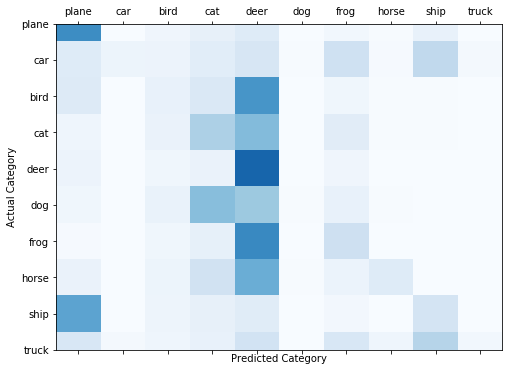

Category   - Accuracy
plane      - 64.4
car        - 5.3
bird       - 7.1
cat        - 32.6
deer       - 79.6
dog        - 0.7
frog       - 20.9
horse      - 12.2
ship       - 17.5
truck      - 2.9

Selected workers

[  7 100  96  56  75  26  53  65  32  55  41  43  17  74  42]
Worker 7 : is  Honest
Worker 100 : is  Honest
Worker 96 : is  Honest
Worker 56 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 32 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 41 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 17 : is  Honest
Worker 74 : is  Honest
Worker 42 : is  Honest

 | Global Training Round : 3 |


Worker 7 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.722305
Train Epoch: 1 [400/500	(81%)]	Loss: 1.859390
Train Epoch: 2 [0/500	(1%)]	Loss: 1.695683
Train Epoch: 2 [400/500	(81%)]	Loss: 1.710244
Train Epoch: 3 [0/500	(1%)]	Loss: 1.327678
Train Epoch: 3 [400/500	(81%)]	Loss: 1.855560
Train Epoch: 4 [0/500	(1%)]	Loss: 1.229574
Train Epoch: 4 [400/500	(81%)]	Loss: 1.735024
Train Epoch: 5 [0/500	(1%)]	Loss: 1.429874
Train Epoch: 5 [400/500	(81%)]	Loss: 1.691582

Worker 7 ends training in Global Round:3 |

Worker 100 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.773721
Train Epoch: 1 [400/500	(81%)]	Loss: 1.620956
Train Epoch: 2 [0/500	(1%)]	Loss: 1.632249
Train Epoch: 2 [400/500	(81%)]	Loss: 1.866083
Train Epoch: 3 [0/500	(1%)]	Loss: 1.482787
Train Epoch: 3 [400/500	(81%)]	Loss: 1.479021
Train Epoch: 4 [0/500	(1%)]	Loss: 1.551489
Train Epoch: 4 [400/500	(81%)]	Loss: 1.567332
Train Epoch: 5 [0/500	(1%)]	Loss: 1.625973
Train Epoch: 5 [400/500	(81%)]	Loss: 1.818391

Worker 100 ends training in Global Round:3 |

Worker 96 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.925826
Train Epoch: 1 [400/500	(81%)]	Loss: 2.007092
Train Epoch: 2 [0/500	(1%)]	Loss: 1.809688
Train Epoch: 2 [400/500	(81%)]	Loss: 1.683390
Train Epoch: 3 [0/500	(1%)]	Loss: 1.463809
Train Epoch: 3 [400/500	(81%)]	Loss: 1.654941
Train Epoch: 4 [0/500	(1%)]	Loss: 1.644564
Train Epoch: 4 [400/500	(81%)]	Loss: 1.243027
Train Epoch: 5 [0/500	(1%)]	Loss: 1.370382
Train Epoch: 5 [400/500	(81%)]	Loss: 1.745602

Worker 96 ends training in Global Round:3 |

Worker 56 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.839580
Train Epoch: 1 [400/500	(81%)]	Loss: 1.672202
Train Epoch: 2 [0/500	(1%)]	Loss: 1.456870
Train Epoch: 2 [400/500	(81%)]	Loss: 1.626622
Train Epoch: 3 [0/500	(1%)]	Loss: 1.439961
Train Epoch: 3 [400/500	(81%)]	Loss: 1.473664
Train Epoch: 4 [0/500	(1%)]	Loss: 1.603250
Train Epoch: 4 [400/500	(81%)]	Loss: 1.652862
Train Epoch: 5 [0/500	(1%)]	Loss: 1.387301
Train Epoch: 5 [400/500	(81%)]	Loss: 1.495686

Worker 56 ends training in Global Round:3 |

Worker 75 starts training in Global Round:3 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  3


Train Epoch: 1 [0/500	(1%)]	Loss: 1.876419
Train Epoch: 1 [400/500	(81%)]	Loss: 1.835263
Train Epoch: 2 [0/500	(1%)]	Loss: 1.604622
Train Epoch: 2 [400/500	(81%)]	Loss: 1.674284
Train Epoch: 3 [0/500	(1%)]	Loss: 1.645432
Train Epoch: 3 [400/500	(81%)]	Loss: 1.748100
Train Epoch: 4 [0/500	(1%)]	Loss: 1.335416
Train Epoch: 4 [400/500	(81%)]	Loss: 1.372017
Train Epoch: 5 [0/500	(1%)]	Loss: 1.515918
Train Epoch: 5 [400/500	(81%)]	Loss: 1.521950

Performed attacks 1
Worker 75 ends training in Global Round:3 |

Worker 26 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.988230
Train Epoch: 1 [400/500	(81%)]	Loss: 1.947207
Train Epoch: 2 [0/500	(1%)]	Loss: 1.981828
Train Epoch: 2 [400/500	(81%)]	Loss: 1.681851
Train Epoch: 3 [0/500	(1%)]	Loss: 1.504009
Train Epoch: 3 [400/500	(81%)]	Loss: 1.536522
Train Epoch: 4 [0/500	(1%)]	Loss: 1.716854
Train Epoch: 4 [400/500	(81%)]	Loss: 1.351999
Train Epoch: 5 [0/500	(1%)]	Loss: 1.401258
Train Epoch: 5 [400/500	(81%)]	Loss: 1.542066

Worker 26 ends training in Global Round:3 |

Worker 53 starts training in Global Round:3 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  3


Train Epoch: 1 [0/500	(1%)]	Loss: 2.231236
Train Epoch: 1 [400/500	(81%)]	Loss: 1.987779
Train Epoch: 2 [0/500	(1%)]	Loss: 1.718736
Train Epoch: 2 [400/500	(81%)]	Loss: 2.148365
Train Epoch: 3 [0/500	(1%)]	Loss: 1.781113
Train Epoch: 3 [400/500	(81%)]	Loss: 1.867541
Train Epoch: 4 [0/500	(1%)]	Loss: 1.989453
Train Epoch: 4 [400/500	(81%)]	Loss: 1.989701
Train Epoch: 5 [0/500	(1%)]	Loss: 1.765076
Train Epoch: 5 [400/500	(81%)]	Loss: 1.891582

Performed attacks 2
Worker 53 ends training in Global Round:3 |

Worker 65 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.616114
Train Epoch: 1 [400/500	(81%)]	Loss: 1.923036
Train Epoch: 2 [0/500	(1%)]	Loss: 1.654031
Train Epoch: 2 [400/500	(81%)]	Loss: 1.623057
Train Epoch: 3 [0/500	(1%)]	Loss: 1.498036
Train Epoch: 3 [400/500	(81%)]	Loss: 1.643869
Train Epoch: 4 [0/500	(1%)]	Loss: 1.734347
Train Epoch: 4 [400/500	(81%)]	Loss: 1.450456
Train Epoch: 5 [0/500	(1%)]	Loss: 1.384133
Train Epoch: 5 [400/500	(81%)]	Loss: 1.586316

Worker 65 ends training in Global Round:3 |

Worker 32 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.753166
Train Epoch: 1 [400/500	(81%)]	Loss: 2.232527
Train Epoch: 2 [0/500	(1%)]	Loss: 1.531603
Train Epoch: 2 [400/500	(81%)]	Loss: 1.903472
Train Epoch: 3 [0/500	(1%)]	Loss: 1.776241
Train Epoch: 3 [400/500	(81%)]	Loss: 1.892774
Train Epoch: 4 [0/500	(1%)]	Loss: 1.710789
Train Epoch: 4 [400/500	(81%)]	Loss: 1.510902
Train Epoch: 5 [0/500	(1%)]	Loss: 1.517641
Train Epoch: 5 [400/500	(81%)]	Loss: 1.272579

Worker 32 ends training in Global Round:3 |

Worker 55 starts training in Global Round:3 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  3


Train Epoch: 1 [0/500	(1%)]	Loss: 2.029891
Train Epoch: 1 [400/500	(81%)]	Loss: 2.153263
Train Epoch: 2 [0/500	(1%)]	Loss: 1.631965
Train Epoch: 2 [400/500	(81%)]	Loss: 1.939358
Train Epoch: 3 [0/500	(1%)]	Loss: 2.018737
Train Epoch: 3 [400/500	(81%)]	Loss: 1.649299
Train Epoch: 4 [0/500	(1%)]	Loss: 1.537634
Train Epoch: 4 [400/500	(81%)]	Loss: 1.533967
Train Epoch: 5 [0/500	(1%)]	Loss: 1.339584
Train Epoch: 5 [400/500	(81%)]	Loss: 1.289850

Performed attacks 3
Worker 55 ends training in Global Round:3 |

Worker 41 starts training in Global Round:3 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  3


Train Epoch: 1 [0/500	(1%)]	Loss: 2.204740
Train Epoch: 1 [400/500	(81%)]	Loss: 2.103252
Train Epoch: 2 [0/500	(1%)]	Loss: 1.665869
Train Epoch: 2 [400/500	(81%)]	Loss: 2.099381
Train Epoch: 3 [0/500	(1%)]	Loss: 1.538078
Train Epoch: 3 [400/500	(81%)]	Loss: 1.834012
Train Epoch: 4 [0/500	(1%)]	Loss: 1.678076
Train Epoch: 4 [400/500	(81%)]	Loss: 2.025664
Train Epoch: 5 [0/500	(1%)]	Loss: 1.519017
Train Epoch: 5 [400/500	(81%)]	Loss: 1.714087

Performed attacks 4
Worker 41 ends training in Global Round:3 |

Worker 43 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.734155
Train Epoch: 1 [400/500	(81%)]	Loss: 2.083776
Train Epoch: 2 [0/500	(1%)]	Loss: 1.517763
Train Epoch: 2 [400/500	(81%)]	Loss: 2.018251
Train Epoch: 3 [0/500	(1%)]	Loss: 1.807209
Train Epoch: 3 [400/500	(81%)]	Loss: 1.655871
Train Epoch: 4 [0/500	(1%)]	Loss: 1.644590
Train Epoch: 4 [400/500	(81%)]	Loss: 1.759593
Train Epoch: 5 [0/500	(1%)]	Loss: 1.236526
Train Epoch: 5 [400/500	(81%)]	Loss: 1.323245

Worker 43 ends training in Global Round:3 |

Worker 17 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 2.020209
Train Epoch: 1 [400/500	(81%)]	Loss: 1.772202
Train Epoch: 2 [0/500	(1%)]	Loss: 1.760048
Train Epoch: 2 [400/500	(81%)]	Loss: 1.783843
Train Epoch: 3 [0/500	(1%)]	Loss: 1.886173
Train Epoch: 3 [400/500	(81%)]	Loss: 1.682637
Train Epoch: 4 [0/500	(1%)]	Loss: 1.713711
Train Epoch: 4 [400/500	(81%)]	Loss: 1.592213
Train Epoch: 5 [0/500	(1%)]	Loss: 1.472124
Train Epoch: 5 [400/500	(81%)]	Loss: 1.768161

Worker 17 ends training in Global Round:3 |

Worker 74 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.594700
Train Epoch: 1 [400/500	(81%)]	Loss: 1.902166
Train Epoch: 2 [0/500	(1%)]	Loss: 1.601572
Train Epoch: 2 [400/500	(81%)]	Loss: 1.730756
Train Epoch: 3 [0/500	(1%)]	Loss: 1.484490
Train Epoch: 3 [400/500	(81%)]	Loss: 1.791689
Train Epoch: 4 [0/500	(1%)]	Loss: 1.407623
Train Epoch: 4 [400/500	(81%)]	Loss: 1.629865
Train Epoch: 5 [0/500	(1%)]	Loss: 1.413639
Train Epoch: 5 [400/500	(81%)]	Loss: 1.656674

Worker 74 ends training in Global Round:3 |

Worker 42 starts training in Global Round:3 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.890935
Train Epoch: 1 [400/500	(81%)]	Loss: 1.877921
Train Epoch: 2 [0/500	(1%)]	Loss: 1.614530
Train Epoch: 2 [400/500	(81%)]	Loss: 1.686758
Train Epoch: 3 [0/500	(1%)]	Loss: 1.609876
Train Epoch: 3 [400/500	(81%)]	Loss: 1.687544
Train Epoch: 4 [0/500	(1%)]	Loss: 1.348603
Train Epoch: 4 [400/500	(81%)]	Loss: 1.578337
Train Epoch: 5 [0/500	(1%)]	Loss: 1.342354
Train Epoch: 5 [400/500	(81%)]	Loss: 1.582143

Worker 42 ends training in Global Round:3 |
Last layer biases  [array([ 0.02836968, -0.02804476, -0.01875409,  0.02687571,  0.03449604,
       -0.01775268,  0.04387685, -0.00539654, -0.01388862, -0.03388057],
      dtype=float32), array([ 0.0290228 , -0.02704296, -0.0177418 ,  0.02976753,  0.03237335,
       -0.01801278,  0.04422745, -0.0059275 , -0.01287289, -0.03789219],
      dtype=float32), array([ 0.0284347 , -0.02712467, -0.02233429,  0.02848915,  0.03488261,
       -0.01774602,  0.04578152, -0.00501922, -0.01231112, -0.03715165],
      dtype

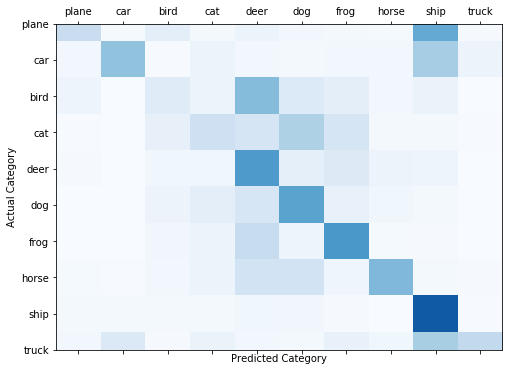

Category   - Accuracy
plane      - 22.9
car        - 40.3
bird       - 11.9
cat        - 20.8
deer       - 58.7
dog        - 54.8
frog       - 59.8
horse      - 45.1
ship       - 83.8
truck      - 26.0

Selected workers

[97 20 82 38 86 63 33 19 60 10 51 15 64 99 16]
Worker 97 : is  Stealthy_Attacker
Worker 20 : is  Honest
Worker 82 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 86 : is  Stealthy_Attacker
Worker 63 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 19 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 10 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 15 : is  Honest
Worker 64 : is  Honest
Worker 99 : is  Honest
Worker 16 : is  Stealthy_Attacker

 | Global Training Round : 4 |


Worker 97 starts training in Global Round:4 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  4


Train Epoch: 1 [0/500	(1%)]	Loss: 1.663767
Train Epoch: 1 [400/500	(81%)]	Loss: 1.498531
Train Epoch: 2 [0/500	(1%)]	Loss: 1.207630
Train Epoch: 2 [400/500	(81%)]	Loss: 1.395468
Train Epoch: 3 [0/500	(1%)]	Loss: 1.373766
Train Epoch: 3 [400/500	(81%)]	Loss: 1.497854
Train Epoch: 4 [0/500	(1%)]	Loss: 1.130250
Train Epoch: 4 [400/500	(81%)]	Loss: 1.198540
Train Epoch: 5 [0/500	(1%)]	Loss: 1.019136
Train Epoch: 5 [400/500	(81%)]	Loss: 1.025058

Performed attacks 1
Worker 97 ends training in Global Round:4 |

Worker 20 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.449008
Train Epoch: 1 [400/500	(81%)]	Loss: 1.584399
Train Epoch: 2 [0/500	(1%)]	Loss: 1.454283
Train Epoch: 2 [400/500	(81%)]	Loss: 1.595301
Train Epoch: 3 [0/500	(1%)]	Loss: 1.327411
Train Epoch: 3 [400/500	(81%)]	Loss: 1.676056
Train Epoch: 4 [0/500	(1%)]	Loss: 1.289179
Train Epoch: 4 [400/500	(81%)]	Loss: 1.194683
Train Epoch: 5 [0/500	(1%)]	Loss: 1.173087
Train Epoch: 5 [400/500	(81%)]	Loss: 1.108682

Worker 20 ends training in Global Round:4 |

Worker 82 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.615351
Train Epoch: 1 [400/500	(81%)]	Loss: 1.833700
Train Epoch: 2 [0/500	(1%)]	Loss: 1.334807
Train Epoch: 2 [400/500	(81%)]	Loss: 1.883110
Train Epoch: 3 [0/500	(1%)]	Loss: 1.401946
Train Epoch: 3 [400/500	(81%)]	Loss: 1.752568
Train Epoch: 4 [0/500	(1%)]	Loss: 1.092468
Train Epoch: 4 [400/500	(81%)]	Loss: 1.156302
Train Epoch: 5 [0/500	(1%)]	Loss: 1.074159
Train Epoch: 5 [400/500	(81%)]	Loss: 1.282392

Worker 82 ends training in Global Round:4 |

Worker 38 starts training in Global Round:4 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  4


Train Epoch: 1 [0/500	(1%)]	Loss: 1.937918
Train Epoch: 1 [400/500	(81%)]	Loss: 1.500471
Train Epoch: 2 [0/500	(1%)]	Loss: 1.504044
Train Epoch: 2 [400/500	(81%)]	Loss: 1.753417
Train Epoch: 3 [0/500	(1%)]	Loss: 1.292404
Train Epoch: 3 [400/500	(81%)]	Loss: 1.206369
Train Epoch: 4 [0/500	(1%)]	Loss: 1.271918
Train Epoch: 4 [400/500	(81%)]	Loss: 1.468978
Train Epoch: 5 [0/500	(1%)]	Loss: 1.236535
Train Epoch: 5 [400/500	(81%)]	Loss: 1.365251

Performed attacks 2
Worker 38 ends training in Global Round:4 |

Worker 86 starts training in Global Round:4 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  4


Train Epoch: 1 [0/500	(1%)]	Loss: 1.547404
Train Epoch: 1 [400/500	(81%)]	Loss: 1.407045
Train Epoch: 2 [0/500	(1%)]	Loss: 1.379937
Train Epoch: 2 [400/500	(81%)]	Loss: 1.840297
Train Epoch: 3 [0/500	(1%)]	Loss: 1.381255
Train Epoch: 3 [400/500	(81%)]	Loss: 1.307111
Train Epoch: 4 [0/500	(1%)]	Loss: 1.177853
Train Epoch: 4 [400/500	(81%)]	Loss: 1.444227
Train Epoch: 5 [0/500	(1%)]	Loss: 1.148186
Train Epoch: 5 [400/500	(81%)]	Loss: 1.363939

Performed attacks 3
Worker 86 ends training in Global Round:4 |

Worker 63 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.437785
Train Epoch: 1 [400/500	(81%)]	Loss: 1.805898
Train Epoch: 2 [0/500	(1%)]	Loss: 1.460841
Train Epoch: 2 [400/500	(81%)]	Loss: 1.533403
Train Epoch: 3 [0/500	(1%)]	Loss: 1.758864
Train Epoch: 3 [400/500	(81%)]	Loss: 1.315193
Train Epoch: 4 [0/500	(1%)]	Loss: 1.279660
Train Epoch: 4 [400/500	(81%)]	Loss: 1.309821
Train Epoch: 5 [0/500	(1%)]	Loss: 1.353318
Train Epoch: 5 [400/500	(81%)]	Loss: 1.285365

Worker 63 ends training in Global Round:4 |

Worker 33 starts training in Global Round:4 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  4


Train Epoch: 1 [0/500	(1%)]	Loss: 1.791319
Train Epoch: 1 [400/500	(81%)]	Loss: 1.762612
Train Epoch: 2 [0/500	(1%)]	Loss: 1.373713
Train Epoch: 2 [400/500	(81%)]	Loss: 1.406992
Train Epoch: 3 [0/500	(1%)]	Loss: 1.836822
Train Epoch: 3 [400/500	(81%)]	Loss: 1.642295
Train Epoch: 4 [0/500	(1%)]	Loss: 1.233362
Train Epoch: 4 [400/500	(81%)]	Loss: 1.618361
Train Epoch: 5 [0/500	(1%)]	Loss: 1.273244
Train Epoch: 5 [400/500	(81%)]	Loss: 1.334208

Performed attacks 4
Worker 33 ends training in Global Round:4 |

Worker 19 starts training in Global Round:4 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  4


Train Epoch: 1 [0/500	(1%)]	Loss: 1.615171
Train Epoch: 1 [400/500	(81%)]	Loss: 1.581564
Train Epoch: 2 [0/500	(1%)]	Loss: 1.190950
Train Epoch: 2 [400/500	(81%)]	Loss: 1.741168
Train Epoch: 3 [0/500	(1%)]	Loss: 1.364265
Train Epoch: 3 [400/500	(81%)]	Loss: 1.645567
Train Epoch: 4 [0/500	(1%)]	Loss: 1.319562
Train Epoch: 4 [400/500	(81%)]	Loss: 1.247196
Train Epoch: 5 [0/500	(1%)]	Loss: 1.197307
Train Epoch: 5 [400/500	(81%)]	Loss: 1.787115

Performed attacks 5
Worker 19 ends training in Global Round:4 |

Worker 60 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.562599
Train Epoch: 1 [400/500	(81%)]	Loss: 1.607555
Train Epoch: 2 [0/500	(1%)]	Loss: 1.426335
Train Epoch: 2 [400/500	(81%)]	Loss: 1.464230
Train Epoch: 3 [0/500	(1%)]	Loss: 1.312916
Train Epoch: 3 [400/500	(81%)]	Loss: 1.352144
Train Epoch: 4 [0/500	(1%)]	Loss: 1.091296
Train Epoch: 4 [400/500	(81%)]	Loss: 1.268917
Train Epoch: 5 [0/500	(1%)]	Loss: 1.127400
Train Epoch: 5 [400/500	(81%)]	Loss: 1.367793

Worker 60 ends training in Global Round:4 |

Worker 10 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.467475
Train Epoch: 1 [400/500	(81%)]	Loss: 1.734666
Train Epoch: 2 [0/500	(1%)]	Loss: 1.477039
Train Epoch: 2 [400/500	(81%)]	Loss: 1.591067
Train Epoch: 3 [0/500	(1%)]	Loss: 1.502642
Train Epoch: 3 [400/500	(81%)]	Loss: 1.513123
Train Epoch: 4 [0/500	(1%)]	Loss: 1.384715
Train Epoch: 4 [400/500	(81%)]	Loss: 1.364875
Train Epoch: 5 [0/500	(1%)]	Loss: 1.207394
Train Epoch: 5 [400/500	(81%)]	Loss: 1.507507

Worker 10 ends training in Global Round:4 |

Worker 51 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.496545
Train Epoch: 1 [400/500	(81%)]	Loss: 1.656797
Train Epoch: 2 [0/500	(1%)]	Loss: 1.365705
Train Epoch: 2 [400/500	(81%)]	Loss: 1.596541
Train Epoch: 3 [0/500	(1%)]	Loss: 1.229674
Train Epoch: 3 [400/500	(81%)]	Loss: 1.384749
Train Epoch: 4 [0/500	(1%)]	Loss: 1.205681
Train Epoch: 4 [400/500	(81%)]	Loss: 1.254173
Train Epoch: 5 [0/500	(1%)]	Loss: 1.086148
Train Epoch: 5 [400/500	(81%)]	Loss: 1.008509

Worker 51 ends training in Global Round:4 |

Worker 15 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.563179
Train Epoch: 1 [400/500	(81%)]	Loss: 1.727527
Train Epoch: 2 [0/500	(1%)]	Loss: 1.211388
Train Epoch: 2 [400/500	(81%)]	Loss: 1.472913
Train Epoch: 3 [0/500	(1%)]	Loss: 1.340305
Train Epoch: 3 [400/500	(81%)]	Loss: 1.669642
Train Epoch: 4 [0/500	(1%)]	Loss: 1.141999
Train Epoch: 4 [400/500	(81%)]	Loss: 1.213399
Train Epoch: 5 [0/500	(1%)]	Loss: 1.136511
Train Epoch: 5 [400/500	(81%)]	Loss: 1.414218

Worker 15 ends training in Global Round:4 |

Worker 64 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.419199
Train Epoch: 1 [400/500	(81%)]	Loss: 1.845262
Train Epoch: 2 [0/500	(1%)]	Loss: 1.655929
Train Epoch: 2 [400/500	(81%)]	Loss: 1.445606
Train Epoch: 3 [0/500	(1%)]	Loss: 1.447532
Train Epoch: 3 [400/500	(81%)]	Loss: 1.484543
Train Epoch: 4 [0/500	(1%)]	Loss: 1.225908
Train Epoch: 4 [400/500	(81%)]	Loss: 1.324936
Train Epoch: 5 [0/500	(1%)]	Loss: 1.706479
Train Epoch: 5 [400/500	(81%)]	Loss: 1.081690

Worker 64 ends training in Global Round:4 |

Worker 99 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.461068
Train Epoch: 1 [400/500	(81%)]	Loss: 1.666183
Train Epoch: 2 [0/500	(1%)]	Loss: 1.566836
Train Epoch: 2 [400/500	(81%)]	Loss: 1.615665
Train Epoch: 3 [0/500	(1%)]	Loss: 1.326788
Train Epoch: 3 [400/500	(81%)]	Loss: 1.435549
Train Epoch: 4 [0/500	(1%)]	Loss: 1.253539
Train Epoch: 4 [400/500	(81%)]	Loss: 1.468929
Train Epoch: 5 [0/500	(1%)]	Loss: 1.323350
Train Epoch: 5 [400/500	(81%)]	Loss: 1.313713

Worker 99 ends training in Global Round:4 |

Worker 16 starts training in Global Round:4 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.911664
Train Epoch: 1 [400/500	(81%)]	Loss: 1.527708
Train Epoch: 2 [0/500	(1%)]	Loss: 1.480468
Train Epoch: 2 [400/500	(81%)]	Loss: 1.569527
Train Epoch: 3 [0/500	(1%)]	Loss: 1.453371
Train Epoch: 3 [400/500	(81%)]	Loss: 1.581216
Train Epoch: 4 [0/500	(1%)]	Loss: 1.405727
Train Epoch: 4 [400/500	(81%)]	Loss: 1.398656
Train Epoch: 5 [0/500	(1%)]	Loss: 1.231255
Train Epoch: 5 [400/500	(81%)]	Loss: 1.229760

Worker 16 ends training in Global Round:4 |
Last layer biases  [array([ 0.03126661, -0.02851988, -0.01875774,  0.02956306,  0.04106771,
       -0.01523585,  0.04464246, -0.02218665, -0.01152225, -0.03441641],
      dtype=float32), array([ 0.03059933, -0.03151304, -0.01803098,  0.03010169,  0.03390529,
       -0.01684256,  0.04150094, -0.00376988, -0.01216543, -0.0378843 ],
      dtype=float32), array([ 0.03141087, -0.0283881 , -0.02255489,  0.02871972,  0.03607673,
       -0.01629762,  0.04445958, -0.00713905, -0.01362152, -0.03676467],
      dtype

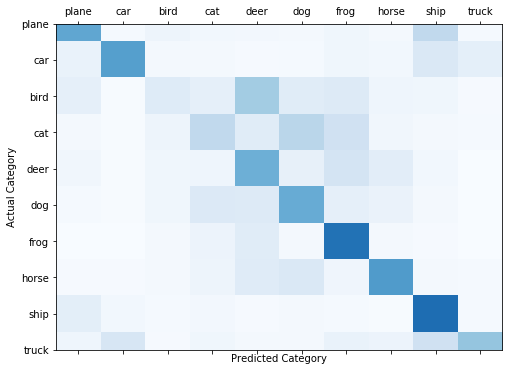

Category   - Accuracy
plane      - 53.5
car        - 56.4
bird       - 12.4
cat        - 26.3
deer       - 49.4
dog        - 51.0
frog       - 74.6
horse      - 58.2
ship       - 76.2
truck      - 39.7

Selected workers

[ 35   8  10  41  75  91 100  95  17  42  55  34  24  20  86]
Worker 35 : is  Honest
Worker 8 : is  Honest
Worker 10 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 100 : is  Honest
Worker 95 : is  Honest
Worker 17 : is  Honest
Worker 42 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 24 : is  Honest
Worker 20 : is  Honest
Worker 86 : is  Stealthy_Attacker

 | Global Training Round : 5 |


Worker 35 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.322953
Train Epoch: 1 [400/500	(81%)]	Loss: 1.644527
Train Epoch: 2 [0/500	(1%)]	Loss: 1.405461
Train Epoch: 2 [400/500	(81%)]	Loss: 1.434506
Train Epoch: 3 [0/500	(1%)]	Loss: 1.171563
Train Epoch: 3 [400/500	(81%)]	Loss: 1.251895
Train Epoch: 4 [0/500	(1%)]	Loss: 1.051731
Train Epoch: 4 [400/500	(81%)]	Loss: 1.231505
Train Epoch: 5 [0/500	(1%)]	Loss: 0.945576
Train Epoch: 5 [400/500	(81%)]	Loss: 1.073414

Worker 35 ends training in Global Round:5 |

Worker 8 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.530916
Train Epoch: 1 [400/500	(81%)]	Loss: 1.555548
Train Epoch: 2 [0/500	(1%)]	Loss: 1.355686
Train Epoch: 2 [400/500	(81%)]	Loss: 1.382712
Train Epoch: 3 [0/500	(1%)]	Loss: 1.234516
Train Epoch: 3 [400/500	(81%)]	Loss: 1.223035
Train Epoch: 4 [0/500	(1%)]	Loss: 1.008459
Train Epoch: 4 [400/500	(81%)]	Loss: 1.256806
Train Epoch: 5 [0/500	(1%)]	Loss: 1.226952
Train Epoch: 5 [400/500	(81%)]	Loss: 1.167615

Worker 8 ends training in Global Round:5 |

Worker 10 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.219861
Train Epoch: 1 [400/500	(81%)]	Loss: 1.430675
Train Epoch: 2 [0/500	(1%)]	Loss: 1.261019
Train Epoch: 2 [400/500	(81%)]	Loss: 1.423932
Train Epoch: 3 [0/500	(1%)]	Loss: 1.088518
Train Epoch: 3 [400/500	(81%)]	Loss: 1.205178
Train Epoch: 4 [0/500	(1%)]	Loss: 0.904255
Train Epoch: 4 [400/500	(81%)]	Loss: 1.122204
Train Epoch: 5 [0/500	(1%)]	Loss: 1.012792
Train Epoch: 5 [400/500	(81%)]	Loss: 1.491889

Worker 10 ends training in Global Round:5 |

Worker 41 starts training in Global Round:5 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  5


Train Epoch: 1 [0/500	(1%)]	Loss: 1.755191
Train Epoch: 1 [400/500	(81%)]	Loss: 1.332640
Train Epoch: 2 [0/500	(1%)]	Loss: 1.178056
Train Epoch: 2 [400/500	(81%)]	Loss: 1.345179
Train Epoch: 3 [0/500	(1%)]	Loss: 0.985898
Train Epoch: 3 [400/500	(81%)]	Loss: 1.396025
Train Epoch: 4 [0/500	(1%)]	Loss: 0.995871
Train Epoch: 4 [400/500	(81%)]	Loss: 1.199919
Train Epoch: 5 [0/500	(1%)]	Loss: 1.091502
Train Epoch: 5 [400/500	(81%)]	Loss: 0.959314

Performed attacks 1
Worker 41 ends training in Global Round:5 |

Worker 75 starts training in Global Round:5 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  5


Train Epoch: 1 [0/500	(1%)]	Loss: 1.838245
Train Epoch: 1 [400/500	(81%)]	Loss: 1.465936
Train Epoch: 2 [0/500	(1%)]	Loss: 1.435011
Train Epoch: 2 [400/500	(81%)]	Loss: 1.354018
Train Epoch: 3 [0/500	(1%)]	Loss: 1.261574
Train Epoch: 3 [400/500	(81%)]	Loss: 1.068164
Train Epoch: 4 [0/500	(1%)]	Loss: 1.282260
Train Epoch: 4 [400/500	(81%)]	Loss: 1.424271
Train Epoch: 5 [0/500	(1%)]	Loss: 1.257508
Train Epoch: 5 [400/500	(81%)]	Loss: 1.568640

Performed attacks 2
Worker 75 ends training in Global Round:5 |

Worker 91 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.313049
Train Epoch: 1 [400/500	(81%)]	Loss: 1.740713
Train Epoch: 2 [0/500	(1%)]	Loss: 1.353050
Train Epoch: 2 [400/500	(81%)]	Loss: 1.341556
Train Epoch: 3 [0/500	(1%)]	Loss: 1.241630
Train Epoch: 3 [400/500	(81%)]	Loss: 1.156035
Train Epoch: 4 [0/500	(1%)]	Loss: 1.176470
Train Epoch: 4 [400/500	(81%)]	Loss: 1.197762
Train Epoch: 5 [0/500	(1%)]	Loss: 0.917150
Train Epoch: 5 [400/500	(81%)]	Loss: 1.206695

Worker 91 ends training in Global Round:5 |

Worker 100 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.298720
Train Epoch: 1 [400/500	(81%)]	Loss: 1.332077
Train Epoch: 2 [0/500	(1%)]	Loss: 1.113980
Train Epoch: 2 [400/500	(81%)]	Loss: 1.281310
Train Epoch: 3 [0/500	(1%)]	Loss: 1.311621
Train Epoch: 3 [400/500	(81%)]	Loss: 1.063307
Train Epoch: 4 [0/500	(1%)]	Loss: 1.113575
Train Epoch: 4 [400/500	(81%)]	Loss: 1.200930
Train Epoch: 5 [0/500	(1%)]	Loss: 1.022516
Train Epoch: 5 [400/500	(81%)]	Loss: 0.954300

Worker 100 ends training in Global Round:5 |

Worker 95 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.371604
Train Epoch: 1 [400/500	(81%)]	Loss: 1.358529
Train Epoch: 2 [0/500	(1%)]	Loss: 1.123361
Train Epoch: 2 [400/500	(81%)]	Loss: 1.359605
Train Epoch: 3 [0/500	(1%)]	Loss: 1.364647
Train Epoch: 3 [400/500	(81%)]	Loss: 1.153078
Train Epoch: 4 [0/500	(1%)]	Loss: 0.865765
Train Epoch: 4 [400/500	(81%)]	Loss: 1.032076
Train Epoch: 5 [0/500	(1%)]	Loss: 1.042395
Train Epoch: 5 [400/500	(81%)]	Loss: 0.898581

Worker 95 ends training in Global Round:5 |

Worker 17 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.448294
Train Epoch: 1 [400/500	(81%)]	Loss: 1.551575
Train Epoch: 2 [0/500	(1%)]	Loss: 1.245101
Train Epoch: 2 [400/500	(81%)]	Loss: 1.466789
Train Epoch: 3 [0/500	(1%)]	Loss: 1.363965
Train Epoch: 3 [400/500	(81%)]	Loss: 1.241881
Train Epoch: 4 [0/500	(1%)]	Loss: 1.181745
Train Epoch: 4 [400/500	(81%)]	Loss: 1.211287
Train Epoch: 5 [0/500	(1%)]	Loss: 1.127036
Train Epoch: 5 [400/500	(81%)]	Loss: 1.305218

Worker 17 ends training in Global Round:5 |

Worker 42 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.342144
Train Epoch: 1 [400/500	(81%)]	Loss: 1.379508
Train Epoch: 2 [0/500	(1%)]	Loss: 1.179210
Train Epoch: 2 [400/500	(81%)]	Loss: 1.259970
Train Epoch: 3 [0/500	(1%)]	Loss: 1.236941
Train Epoch: 3 [400/500	(81%)]	Loss: 1.287562
Train Epoch: 4 [0/500	(1%)]	Loss: 1.142358
Train Epoch: 4 [400/500	(81%)]	Loss: 1.287199
Train Epoch: 5 [0/500	(1%)]	Loss: 0.989553
Train Epoch: 5 [400/500	(81%)]	Loss: 1.090568

Worker 42 ends training in Global Round:5 |

Worker 55 starts training in Global Round:5 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  5


Train Epoch: 1 [0/500	(1%)]	Loss: 1.563678
Train Epoch: 1 [400/500	(81%)]	Loss: 1.948474
Train Epoch: 2 [0/500	(1%)]	Loss: 1.457510
Train Epoch: 2 [400/500	(81%)]	Loss: 1.693442
Train Epoch: 3 [0/500	(1%)]	Loss: 1.317970
Train Epoch: 3 [400/500	(81%)]	Loss: 1.327408
Train Epoch: 4 [0/500	(1%)]	Loss: 1.222523
Train Epoch: 4 [400/500	(81%)]	Loss: 1.156558
Train Epoch: 5 [0/500	(1%)]	Loss: 0.949551
Train Epoch: 5 [400/500	(81%)]	Loss: 1.105290

Performed attacks 3
Worker 55 ends training in Global Round:5 |

Worker 34 starts training in Global Round:5 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  5


Train Epoch: 1 [0/500	(1%)]	Loss: 1.884219
Train Epoch: 1 [400/500	(81%)]	Loss: 1.551661
Train Epoch: 2 [0/500	(1%)]	Loss: 1.220776
Train Epoch: 2 [400/500	(81%)]	Loss: 1.483506
Train Epoch: 3 [0/500	(1%)]	Loss: 1.145011
Train Epoch: 3 [400/500	(81%)]	Loss: 1.279055
Train Epoch: 4 [0/500	(1%)]	Loss: 1.024466
Train Epoch: 4 [400/500	(81%)]	Loss: 1.181317
Train Epoch: 5 [0/500	(1%)]	Loss: 0.913754
Train Epoch: 5 [400/500	(81%)]	Loss: 1.075267

Performed attacks 4
Worker 34 ends training in Global Round:5 |

Worker 24 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.337379
Train Epoch: 1 [400/500	(81%)]	Loss: 1.520336
Train Epoch: 2 [0/500	(1%)]	Loss: 1.150882
Train Epoch: 2 [400/500	(81%)]	Loss: 1.304140
Train Epoch: 3 [0/500	(1%)]	Loss: 1.045710
Train Epoch: 3 [400/500	(81%)]	Loss: 1.357604
Train Epoch: 4 [0/500	(1%)]	Loss: 0.976536
Train Epoch: 4 [400/500	(81%)]	Loss: 0.989388
Train Epoch: 5 [0/500	(1%)]	Loss: 0.920186
Train Epoch: 5 [400/500	(81%)]	Loss: 1.026828

Worker 24 ends training in Global Round:5 |

Worker 20 starts training in Global Round:5 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.431024
Train Epoch: 1 [400/500	(81%)]	Loss: 1.499387
Train Epoch: 2 [0/500	(1%)]	Loss: 1.082342
Train Epoch: 2 [400/500	(81%)]	Loss: 1.111358
Train Epoch: 3 [0/500	(1%)]	Loss: 1.045891
Train Epoch: 3 [400/500	(81%)]	Loss: 1.214005
Train Epoch: 4 [0/500	(1%)]	Loss: 1.186168
Train Epoch: 4 [400/500	(81%)]	Loss: 1.062133
Train Epoch: 5 [0/500	(1%)]	Loss: 1.191610
Train Epoch: 5 [400/500	(81%)]	Loss: 1.140432

Worker 20 ends training in Global Round:5 |

Worker 86 starts training in Global Round:5 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  5


Train Epoch: 1 [0/500	(1%)]	Loss: 1.730986
Train Epoch: 1 [400/500	(81%)]	Loss: 1.591149
Train Epoch: 2 [0/500	(1%)]	Loss: 1.099796
Train Epoch: 2 [400/500	(81%)]	Loss: 1.117517
Train Epoch: 3 [0/500	(1%)]	Loss: 1.059674
Train Epoch: 3 [400/500	(81%)]	Loss: 1.012733
Train Epoch: 4 [0/500	(1%)]	Loss: 0.987613
Train Epoch: 4 [400/500	(81%)]	Loss: 1.243608
Train Epoch: 5 [0/500	(1%)]	Loss: 0.961506
Train Epoch: 5 [400/500	(81%)]	Loss: 1.060278

Performed attacks 5
Worker 86 ends training in Global Round:5 |
Last layer biases  [array([ 0.0297625 , -0.02622573, -0.01734175,  0.03198295,  0.0341802 ,
       -0.02145075,  0.04273836, -0.00801231, -0.01305093, -0.03668149],
      dtype=float32), array([ 0.02856875, -0.02754791, -0.01847362,  0.03067488,  0.03502826,
       -0.0157142 ,  0.04238745, -0.00704253, -0.01530022, -0.03667981],
      dtype=float32), array([ 0.02957777, -0.02722044, -0.0193429 ,  0.03160282,  0.03533608,
       -0.01791922,  0.04121348, -0.00701261, -0.01367335, -0.03

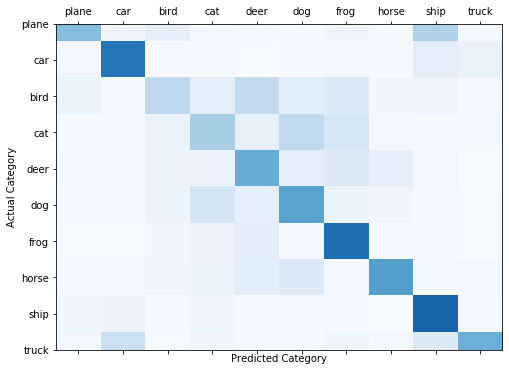

Category   - Accuracy
plane      - 43.3
car        - 73.4
bird       - 26.7
cat        - 34.2
deer       - 50.7
dog        - 54.9
frog       - 75.6
horse      - 56.4
ship       - 80.4
truck      - 49.9

Selected workers

[19 31 32 56 51 50  4 49 97 60 89 35 70 84  7]
Worker 19 : is  Stealthy_Attacker
Worker 31 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 56 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 50 : is  Stealthy_Attacker
Worker 4 : is  Honest
Worker 49 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 35 : is  Honest
Worker 70 : is  Honest
Worker 84 : is  Honest
Worker 7 : is  Honest

 | Global Training Round : 6 |


Worker 19 starts training in Global Round:6 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  6


Train Epoch: 1 [0/500	(1%)]	Loss: 1.497873
Train Epoch: 1 [400/500	(81%)]	Loss: 1.283334
Train Epoch: 2 [0/500	(1%)]	Loss: 1.183154
Train Epoch: 2 [400/500	(81%)]	Loss: 1.307886
Train Epoch: 3 [0/500	(1%)]	Loss: 0.842391
Train Epoch: 3 [400/500	(81%)]	Loss: 1.371807
Train Epoch: 4 [0/500	(1%)]	Loss: 0.795454
Train Epoch: 4 [400/500	(81%)]	Loss: 1.183262
Train Epoch: 5 [0/500	(1%)]	Loss: 1.028733
Train Epoch: 5 [400/500	(81%)]	Loss: 0.971739

Performed attacks 1
Worker 19 ends training in Global Round:6 |

Worker 31 starts training in Global Round:6 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  6


Train Epoch: 1 [0/500	(1%)]	Loss: 1.624661
Train Epoch: 1 [400/500	(81%)]	Loss: 1.259186
Train Epoch: 2 [0/500	(1%)]	Loss: 1.118139
Train Epoch: 2 [400/500	(81%)]	Loss: 1.038813
Train Epoch: 3 [0/500	(1%)]	Loss: 1.179232
Train Epoch: 3 [400/500	(81%)]	Loss: 1.228551
Train Epoch: 4 [0/500	(1%)]	Loss: 0.882620
Train Epoch: 4 [400/500	(81%)]	Loss: 1.016140
Train Epoch: 5 [0/500	(1%)]	Loss: 0.739521
Train Epoch: 5 [400/500	(81%)]	Loss: 0.967511

Performed attacks 2
Worker 31 ends training in Global Round:6 |

Worker 32 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.019893
Train Epoch: 1 [400/500	(81%)]	Loss: 1.495576
Train Epoch: 2 [0/500	(1%)]	Loss: 1.204489
Train Epoch: 2 [400/500	(81%)]	Loss: 1.508464
Train Epoch: 3 [0/500	(1%)]	Loss: 1.104721
Train Epoch: 3 [400/500	(81%)]	Loss: 1.296365
Train Epoch: 4 [0/500	(1%)]	Loss: 1.011961
Train Epoch: 4 [400/500	(81%)]	Loss: 1.176534
Train Epoch: 5 [0/500	(1%)]	Loss: 1.023221
Train Epoch: 5 [400/500	(81%)]	Loss: 1.173750

Worker 32 ends training in Global Round:6 |

Worker 56 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.234034
Train Epoch: 1 [400/500	(81%)]	Loss: 1.245280
Train Epoch: 2 [0/500	(1%)]	Loss: 1.023167
Train Epoch: 2 [400/500	(81%)]	Loss: 1.073135
Train Epoch: 3 [0/500	(1%)]	Loss: 0.794546
Train Epoch: 3 [400/500	(81%)]	Loss: 1.148471
Train Epoch: 4 [0/500	(1%)]	Loss: 0.876697
Train Epoch: 4 [400/500	(81%)]	Loss: 0.956476
Train Epoch: 5 [0/500	(1%)]	Loss: 0.969553
Train Epoch: 5 [400/500	(81%)]	Loss: 1.152663

Worker 56 ends training in Global Round:6 |

Worker 51 starts training in Global Round:6 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  6


Train Epoch: 1 [0/500	(1%)]	Loss: 1.247478
Train Epoch: 1 [400/500	(81%)]	Loss: 1.124644
Train Epoch: 2 [0/500	(1%)]	Loss: 1.183290
Train Epoch: 2 [400/500	(81%)]	Loss: 0.986044
Train Epoch: 3 [0/500	(1%)]	Loss: 1.080012
Train Epoch: 3 [400/500	(81%)]	Loss: 0.832144
Train Epoch: 4 [0/500	(1%)]	Loss: 0.837115
Train Epoch: 4 [400/500	(81%)]	Loss: 1.183106
Train Epoch: 5 [0/500	(1%)]	Loss: 0.705603
Train Epoch: 5 [400/500	(81%)]	Loss: 1.047995

Performed attacks 3
Worker 51 ends training in Global Round:6 |

Worker 50 starts training in Global Round:6 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  6


Train Epoch: 1 [0/500	(1%)]	Loss: 1.711833
Train Epoch: 1 [400/500	(81%)]	Loss: 1.485013
Train Epoch: 2 [0/500	(1%)]	Loss: 1.351589
Train Epoch: 2 [400/500	(81%)]	Loss: 1.374322
Train Epoch: 3 [0/500	(1%)]	Loss: 1.130103
Train Epoch: 3 [400/500	(81%)]	Loss: 1.083040
Train Epoch: 4 [0/500	(1%)]	Loss: 1.198118
Train Epoch: 4 [400/500	(81%)]	Loss: 1.148309
Train Epoch: 5 [0/500	(1%)]	Loss: 1.027134
Train Epoch: 5 [400/500	(81%)]	Loss: 0.982016

Performed attacks 4
Worker 50 ends training in Global Round:6 |

Worker 4 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.393873
Train Epoch: 1 [400/500	(81%)]	Loss: 1.566327
Train Epoch: 2 [0/500	(1%)]	Loss: 1.015339
Train Epoch: 2 [400/500	(81%)]	Loss: 1.369884
Train Epoch: 3 [0/500	(1%)]	Loss: 0.987331
Train Epoch: 3 [400/500	(81%)]	Loss: 1.156062
Train Epoch: 4 [0/500	(1%)]	Loss: 1.196816
Train Epoch: 4 [400/500	(81%)]	Loss: 1.052712
Train Epoch: 5 [0/500	(1%)]	Loss: 1.377002
Train Epoch: 5 [400/500	(81%)]	Loss: 1.169678

Worker 4 ends training in Global Round:6 |

Worker 49 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.293018
Train Epoch: 1 [400/500	(81%)]	Loss: 1.358824
Train Epoch: 2 [0/500	(1%)]	Loss: 1.212301
Train Epoch: 2 [400/500	(81%)]	Loss: 1.200385
Train Epoch: 3 [0/500	(1%)]	Loss: 0.965254
Train Epoch: 3 [400/500	(81%)]	Loss: 1.257432
Train Epoch: 4 [0/500	(1%)]	Loss: 0.926817
Train Epoch: 4 [400/500	(81%)]	Loss: 1.407254
Train Epoch: 5 [0/500	(1%)]	Loss: 1.058033
Train Epoch: 5 [400/500	(81%)]	Loss: 0.906326

Worker 49 ends training in Global Round:6 |

Worker 97 starts training in Global Round:6 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  6


Train Epoch: 1 [0/500	(1%)]	Loss: 1.302364
Train Epoch: 1 [400/500	(81%)]	Loss: 1.334767
Train Epoch: 2 [0/500	(1%)]	Loss: 0.958497
Train Epoch: 2 [400/500	(81%)]	Loss: 1.255312
Train Epoch: 3 [0/500	(1%)]	Loss: 0.902465
Train Epoch: 3 [400/500	(81%)]	Loss: 1.125767
Train Epoch: 4 [0/500	(1%)]	Loss: 0.991613
Train Epoch: 4 [400/500	(81%)]	Loss: 0.918257
Train Epoch: 5 [0/500	(1%)]	Loss: 0.741878
Train Epoch: 5 [400/500	(81%)]	Loss: 0.992670

Performed attacks 5
Worker 97 ends training in Global Round:6 |

Worker 60 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.278962
Train Epoch: 1 [400/500	(81%)]	Loss: 1.309680
Train Epoch: 2 [0/500	(1%)]	Loss: 1.037941
Train Epoch: 2 [400/500	(81%)]	Loss: 0.951419
Train Epoch: 3 [0/500	(1%)]	Loss: 0.957659
Train Epoch: 3 [400/500	(81%)]	Loss: 1.204193
Train Epoch: 4 [0/500	(1%)]	Loss: 0.757311
Train Epoch: 4 [400/500	(81%)]	Loss: 1.147038
Train Epoch: 5 [0/500	(1%)]	Loss: 0.789945
Train Epoch: 5 [400/500	(81%)]	Loss: 0.983383

Worker 60 ends training in Global Round:6 |

Worker 89 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.150231
Train Epoch: 1 [400/500	(81%)]	Loss: 1.262204
Train Epoch: 2 [0/500	(1%)]	Loss: 1.140554
Train Epoch: 2 [400/500	(81%)]	Loss: 1.274077
Train Epoch: 3 [0/500	(1%)]	Loss: 1.168628
Train Epoch: 3 [400/500	(81%)]	Loss: 1.169523
Train Epoch: 4 [0/500	(1%)]	Loss: 0.993288
Train Epoch: 4 [400/500	(81%)]	Loss: 1.318671
Train Epoch: 5 [0/500	(1%)]	Loss: 0.972279
Train Epoch: 5 [400/500	(81%)]	Loss: 1.473114

Worker 89 ends training in Global Round:6 |

Worker 35 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.309388
Train Epoch: 1 [400/500	(81%)]	Loss: 1.260849
Train Epoch: 2 [0/500	(1%)]	Loss: 1.067773
Train Epoch: 2 [400/500	(81%)]	Loss: 1.423740
Train Epoch: 3 [0/500	(1%)]	Loss: 1.097792
Train Epoch: 3 [400/500	(81%)]	Loss: 1.021405
Train Epoch: 4 [0/500	(1%)]	Loss: 0.862742
Train Epoch: 4 [400/500	(81%)]	Loss: 1.021384
Train Epoch: 5 [0/500	(1%)]	Loss: 0.837860
Train Epoch: 5 [400/500	(81%)]	Loss: 1.017069

Worker 35 ends training in Global Round:6 |

Worker 70 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.378035
Train Epoch: 1 [400/500	(81%)]	Loss: 1.335488
Train Epoch: 2 [0/500	(1%)]	Loss: 0.984254
Train Epoch: 2 [400/500	(81%)]	Loss: 1.384333
Train Epoch: 3 [0/500	(1%)]	Loss: 1.096126
Train Epoch: 3 [400/500	(81%)]	Loss: 1.147463
Train Epoch: 4 [0/500	(1%)]	Loss: 0.866919
Train Epoch: 4 [400/500	(81%)]	Loss: 1.087725
Train Epoch: 5 [0/500	(1%)]	Loss: 1.073022
Train Epoch: 5 [400/500	(81%)]	Loss: 1.281541

Worker 70 ends training in Global Round:6 |

Worker 84 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.359415
Train Epoch: 1 [400/500	(81%)]	Loss: 1.544102
Train Epoch: 2 [0/500	(1%)]	Loss: 1.403445
Train Epoch: 2 [400/500	(81%)]	Loss: 1.233416
Train Epoch: 3 [0/500	(1%)]	Loss: 1.400513
Train Epoch: 3 [400/500	(81%)]	Loss: 1.369859
Train Epoch: 4 [0/500	(1%)]	Loss: 0.975071
Train Epoch: 4 [400/500	(81%)]	Loss: 1.126775
Train Epoch: 5 [0/500	(1%)]	Loss: 1.031579
Train Epoch: 5 [400/500	(81%)]	Loss: 1.132802

Worker 84 ends training in Global Round:6 |

Worker 7 starts training in Global Round:6 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.544395
Train Epoch: 1 [400/500	(81%)]	Loss: 1.574440
Train Epoch: 2 [0/500	(1%)]	Loss: 1.144316
Train Epoch: 2 [400/500	(81%)]	Loss: 1.311797
Train Epoch: 3 [0/500	(1%)]	Loss: 1.312314
Train Epoch: 3 [400/500	(81%)]	Loss: 1.133388
Train Epoch: 4 [0/500	(1%)]	Loss: 1.115684
Train Epoch: 4 [400/500	(81%)]	Loss: 1.210785
Train Epoch: 5 [0/500	(1%)]	Loss: 0.872917
Train Epoch: 5 [400/500	(81%)]	Loss: 1.143226

Worker 7 ends training in Global Round:6 |
Last layer biases  [array([ 0.03404774, -0.02692189, -0.01629344,  0.03135214,  0.03981999,
       -0.01582063,  0.04472339, -0.02560983, -0.01378068, -0.03561567],
      dtype=float32), array([ 0.03043307, -0.02826458, -0.01633695,  0.03485951,  0.03825158,
       -0.01738623,  0.0440898 , -0.02495508, -0.01081555, -0.03397448],
      dtype=float32), array([ 0.03383865, -0.0254479 , -0.01870013,  0.02883229,  0.03472974,
       -0.01888093,  0.04518862, -0.00975142, -0.01628581, -0.03762202],
      dtype=

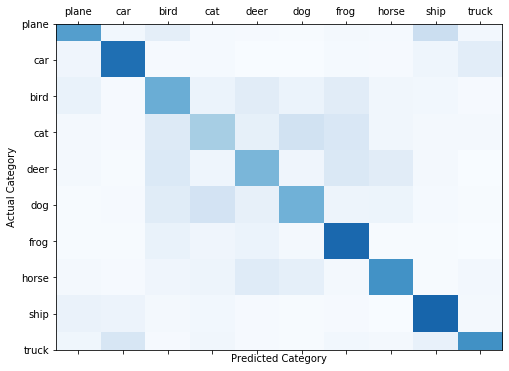

Category   - Accuracy
plane      - 56.7
car        - 75.6
bird       - 50.1
cat        - 34.6
deer       - 46.3
dog        - 48.6
frog       - 78.3
horse      - 62.2
ship       - 79.3
truck      - 62.5

Selected workers

[90 81 36 43  4 78 39 60 35 66 32 64 67 30 73]
Worker 90 : is  Honest
Worker 81 : is  Honest
Worker 36 : is  Honest
Worker 43 : is  Honest
Worker 4 : is  Honest
Worker 78 : is  Honest
Worker 39 : is  Honest
Worker 60 : is  Honest
Worker 35 : is  Honest
Worker 66 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 64 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 73 : is  Honest

 | Global Training Round : 7 |


Worker 90 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.085557
Train Epoch: 1 [400/500	(81%)]	Loss: 1.415023
Train Epoch: 2 [0/500	(1%)]	Loss: 0.956414
Train Epoch: 2 [400/500	(81%)]	Loss: 1.201827
Train Epoch: 3 [0/500	(1%)]	Loss: 0.984637
Train Epoch: 3 [400/500	(81%)]	Loss: 1.055106
Train Epoch: 4 [0/500	(1%)]	Loss: 0.814373
Train Epoch: 4 [400/500	(81%)]	Loss: 1.042425
Train Epoch: 5 [0/500	(1%)]	Loss: 0.884734
Train Epoch: 5 [400/500	(81%)]	Loss: 0.870737

Worker 90 ends training in Global Round:7 |

Worker 81 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.242044
Train Epoch: 1 [400/500	(81%)]	Loss: 1.589903
Train Epoch: 2 [0/500	(1%)]	Loss: 0.957895
Train Epoch: 2 [400/500	(81%)]	Loss: 1.113135
Train Epoch: 3 [0/500	(1%)]	Loss: 0.990268
Train Epoch: 3 [400/500	(81%)]	Loss: 0.883657
Train Epoch: 4 [0/500	(1%)]	Loss: 1.024246
Train Epoch: 4 [400/500	(81%)]	Loss: 0.837544
Train Epoch: 5 [0/500	(1%)]	Loss: 0.762771
Train Epoch: 5 [400/500	(81%)]	Loss: 0.597783

Worker 81 ends training in Global Round:7 |

Worker 36 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.304298
Train Epoch: 1 [400/500	(81%)]	Loss: 1.471987
Train Epoch: 2 [0/500	(1%)]	Loss: 0.849792
Train Epoch: 2 [400/500	(81%)]	Loss: 1.128530
Train Epoch: 3 [0/500	(1%)]	Loss: 0.898756
Train Epoch: 3 [400/500	(81%)]	Loss: 1.131899
Train Epoch: 4 [0/500	(1%)]	Loss: 0.953511
Train Epoch: 4 [400/500	(81%)]	Loss: 1.175082
Train Epoch: 5 [0/500	(1%)]	Loss: 0.750598
Train Epoch: 5 [400/500	(81%)]	Loss: 1.169490

Worker 36 ends training in Global Round:7 |

Worker 43 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.184617
Train Epoch: 1 [400/500	(81%)]	Loss: 1.479892
Train Epoch: 2 [0/500	(1%)]	Loss: 0.984271
Train Epoch: 2 [400/500	(81%)]	Loss: 1.285400
Train Epoch: 3 [0/500	(1%)]	Loss: 1.133587
Train Epoch: 3 [400/500	(81%)]	Loss: 1.087122
Train Epoch: 4 [0/500	(1%)]	Loss: 0.720443
Train Epoch: 4 [400/500	(81%)]	Loss: 0.867908
Train Epoch: 5 [0/500	(1%)]	Loss: 0.763969
Train Epoch: 5 [400/500	(81%)]	Loss: 0.906293

Worker 43 ends training in Global Round:7 |

Worker 4 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.165669
Train Epoch: 1 [400/500	(81%)]	Loss: 1.352068
Train Epoch: 2 [0/500	(1%)]	Loss: 1.000313
Train Epoch: 2 [400/500	(81%)]	Loss: 1.128618
Train Epoch: 3 [0/500	(1%)]	Loss: 0.789789
Train Epoch: 3 [400/500	(81%)]	Loss: 0.981711
Train Epoch: 4 [0/500	(1%)]	Loss: 0.884006
Train Epoch: 4 [400/500	(81%)]	Loss: 1.071879
Train Epoch: 5 [0/500	(1%)]	Loss: 0.684235
Train Epoch: 5 [400/500	(81%)]	Loss: 0.983219

Worker 4 ends training in Global Round:7 |

Worker 78 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.432469
Train Epoch: 1 [400/500	(81%)]	Loss: 1.197609
Train Epoch: 2 [0/500	(1%)]	Loss: 1.166917
Train Epoch: 2 [400/500	(81%)]	Loss: 1.289746
Train Epoch: 3 [0/500	(1%)]	Loss: 1.077588
Train Epoch: 3 [400/500	(81%)]	Loss: 1.052226
Train Epoch: 4 [0/500	(1%)]	Loss: 0.907170
Train Epoch: 4 [400/500	(81%)]	Loss: 0.854180
Train Epoch: 5 [0/500	(1%)]	Loss: 0.721974
Train Epoch: 5 [400/500	(81%)]	Loss: 0.846681

Worker 78 ends training in Global Round:7 |

Worker 39 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.260654
Train Epoch: 1 [400/500	(81%)]	Loss: 1.526340
Train Epoch: 2 [0/500	(1%)]	Loss: 0.891908
Train Epoch: 2 [400/500	(81%)]	Loss: 1.070259
Train Epoch: 3 [0/500	(1%)]	Loss: 0.843788
Train Epoch: 3 [400/500	(81%)]	Loss: 1.052650
Train Epoch: 4 [0/500	(1%)]	Loss: 0.852036
Train Epoch: 4 [400/500	(81%)]	Loss: 0.812354
Train Epoch: 5 [0/500	(1%)]	Loss: 0.535300
Train Epoch: 5 [400/500	(81%)]	Loss: 0.690498

Worker 39 ends training in Global Round:7 |

Worker 60 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.966790
Train Epoch: 1 [400/500	(81%)]	Loss: 1.299963
Train Epoch: 2 [0/500	(1%)]	Loss: 1.081286
Train Epoch: 2 [400/500	(81%)]	Loss: 1.102049
Train Epoch: 3 [0/500	(1%)]	Loss: 0.864068
Train Epoch: 3 [400/500	(81%)]	Loss: 1.032545
Train Epoch: 4 [0/500	(1%)]	Loss: 0.940394
Train Epoch: 4 [400/500	(81%)]	Loss: 0.955031
Train Epoch: 5 [0/500	(1%)]	Loss: 0.688771
Train Epoch: 5 [400/500	(81%)]	Loss: 0.907636

Worker 60 ends training in Global Round:7 |

Worker 35 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.047229
Train Epoch: 1 [400/500	(81%)]	Loss: 1.168514
Train Epoch: 2 [0/500	(1%)]	Loss: 1.005091
Train Epoch: 2 [400/500	(81%)]	Loss: 0.919029
Train Epoch: 3 [0/500	(1%)]	Loss: 0.868684
Train Epoch: 3 [400/500	(81%)]	Loss: 0.897897
Train Epoch: 4 [0/500	(1%)]	Loss: 0.738850
Train Epoch: 4 [400/500	(81%)]	Loss: 0.920387
Train Epoch: 5 [0/500	(1%)]	Loss: 0.762999
Train Epoch: 5 [400/500	(81%)]	Loss: 1.097261

Worker 35 ends training in Global Round:7 |

Worker 66 starts training in Global Round:7 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  7


Train Epoch: 1 [0/500	(1%)]	Loss: 1.466082
Train Epoch: 1 [400/500	(81%)]	Loss: 1.443052
Train Epoch: 2 [0/500	(1%)]	Loss: 1.031182
Train Epoch: 2 [400/500	(81%)]	Loss: 1.178364
Train Epoch: 3 [0/500	(1%)]	Loss: 1.067323
Train Epoch: 3 [400/500	(81%)]	Loss: 0.954797
Train Epoch: 4 [0/500	(1%)]	Loss: 0.729027
Train Epoch: 4 [400/500	(81%)]	Loss: 1.049112
Train Epoch: 5 [0/500	(1%)]	Loss: 0.724821
Train Epoch: 5 [400/500	(81%)]	Loss: 0.780557

Performed attacks 1
Worker 66 ends training in Global Round:7 |

Worker 32 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.174660
Train Epoch: 1 [400/500	(81%)]	Loss: 1.422856
Train Epoch: 2 [0/500	(1%)]	Loss: 0.846882
Train Epoch: 2 [400/500	(81%)]	Loss: 1.357072
Train Epoch: 3 [0/500	(1%)]	Loss: 0.980554
Train Epoch: 3 [400/500	(81%)]	Loss: 1.013040
Train Epoch: 4 [0/500	(1%)]	Loss: 0.957534
Train Epoch: 4 [400/500	(81%)]	Loss: 0.889703
Train Epoch: 5 [0/500	(1%)]	Loss: 0.707852
Train Epoch: 5 [400/500	(81%)]	Loss: 1.028749

Worker 32 ends training in Global Round:7 |

Worker 64 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.198846
Train Epoch: 1 [400/500	(81%)]	Loss: 1.286574
Train Epoch: 2 [0/500	(1%)]	Loss: 1.011026
Train Epoch: 2 [400/500	(81%)]	Loss: 1.370323
Train Epoch: 3 [0/500	(1%)]	Loss: 1.060407
Train Epoch: 3 [400/500	(81%)]	Loss: 1.221022
Train Epoch: 4 [0/500	(1%)]	Loss: 0.745983
Train Epoch: 4 [400/500	(81%)]	Loss: 0.986220
Train Epoch: 5 [0/500	(1%)]	Loss: 0.765491
Train Epoch: 5 [400/500	(81%)]	Loss: 0.920951

Worker 64 ends training in Global Round:7 |

Worker 67 starts training in Global Round:7 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  7


Train Epoch: 1 [0/500	(1%)]	Loss: 1.629107
Train Epoch: 1 [400/500	(81%)]	Loss: 1.412377
Train Epoch: 2 [0/500	(1%)]	Loss: 1.213713
Train Epoch: 2 [400/500	(81%)]	Loss: 1.350244
Train Epoch: 3 [0/500	(1%)]	Loss: 0.954644
Train Epoch: 3 [400/500	(81%)]	Loss: 0.936168
Train Epoch: 4 [0/500	(1%)]	Loss: 0.795726
Train Epoch: 4 [400/500	(81%)]	Loss: 0.983668
Train Epoch: 5 [0/500	(1%)]	Loss: 0.815816
Train Epoch: 5 [400/500	(81%)]	Loss: 0.934005

Performed attacks 2
Worker 67 ends training in Global Round:7 |

Worker 30 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.995773
Train Epoch: 1 [400/500	(81%)]	Loss: 1.412299
Train Epoch: 2 [0/500	(1%)]	Loss: 1.266539
Train Epoch: 2 [400/500	(81%)]	Loss: 1.143309
Train Epoch: 3 [0/500	(1%)]	Loss: 1.020759
Train Epoch: 3 [400/500	(81%)]	Loss: 1.142461
Train Epoch: 4 [0/500	(1%)]	Loss: 0.872025
Train Epoch: 4 [400/500	(81%)]	Loss: 1.096013
Train Epoch: 5 [0/500	(1%)]	Loss: 0.744767
Train Epoch: 5 [400/500	(81%)]	Loss: 0.941348

Worker 30 ends training in Global Round:7 |

Worker 73 starts training in Global Round:7 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.501498
Train Epoch: 1 [400/500	(81%)]	Loss: 1.205241
Train Epoch: 2 [0/500	(1%)]	Loss: 0.977529
Train Epoch: 2 [400/500	(81%)]	Loss: 1.229026
Train Epoch: 3 [0/500	(1%)]	Loss: 0.975872
Train Epoch: 3 [400/500	(81%)]	Loss: 0.959707
Train Epoch: 4 [0/500	(1%)]	Loss: 0.784800
Train Epoch: 4 [400/500	(81%)]	Loss: 0.953207
Train Epoch: 5 [0/500	(1%)]	Loss: 0.725852
Train Epoch: 5 [400/500	(81%)]	Loss: 0.930590

Worker 73 ends training in Global Round:7 |
Last layer biases  [array([ 0.02804906, -0.0284767 , -0.01691735,  0.02729389,  0.03409854,
       -0.01621873,  0.04277021, -0.00577278, -0.01232787, -0.03659713],
      dtype=float32), array([ 0.03002697, -0.02595979, -0.01736712,  0.03005514,  0.03694654,
       -0.0185679 ,  0.0423774 , -0.00718195, -0.01521936, -0.03920878],
      dtype=float32), array([ 0.03142825, -0.02820438, -0.02050108,  0.03049562,  0.03591119,
       -0.01743631,  0.04373647, -0.00722859, -0.01434006, -0.03795997],
      dtype

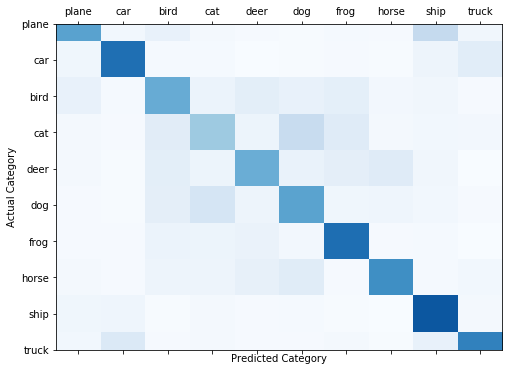

Category   - Accuracy
plane      - 55.2
car        - 75.4
bird       - 51.1
cat        - 37.3
deer       - 50.0
dog        - 54.8
frog       - 75.8
horse      - 63.6
ship       - 85.0
truck      - 68.4

Selected workers

[73 67 34 80 51 81 88 56 44 82 38 42 98 59 76]
Worker 73 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 80 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 88 : is  Honest
Worker 56 : is  Honest
Worker 44 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 59 : is  Stealthy_Attacker
Worker 76 : is  Honest

 | Global Training Round : 8 |


Worker 73 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.956521
Train Epoch: 1 [400/500	(81%)]	Loss: 1.341376
Train Epoch: 2 [0/500	(1%)]	Loss: 0.842399
Train Epoch: 2 [400/500	(81%)]	Loss: 1.153279
Train Epoch: 3 [0/500	(1%)]	Loss: 0.880172
Train Epoch: 3 [400/500	(81%)]	Loss: 0.941030
Train Epoch: 4 [0/500	(1%)]	Loss: 0.895160
Train Epoch: 4 [400/500	(81%)]	Loss: 0.861810
Train Epoch: 5 [0/500	(1%)]	Loss: 0.504395
Train Epoch: 5 [400/500	(81%)]	Loss: 0.867883

Worker 73 ends training in Global Round:8 |

Worker 67 starts training in Global Round:8 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  8


Train Epoch: 1 [0/500	(1%)]	Loss: 1.523877
Train Epoch: 1 [400/500	(81%)]	Loss: 1.250781
Train Epoch: 2 [0/500	(1%)]	Loss: 0.935023
Train Epoch: 2 [400/500	(81%)]	Loss: 1.306741
Train Epoch: 3 [0/500	(1%)]	Loss: 0.903183
Train Epoch: 3 [400/500	(81%)]	Loss: 1.091025
Train Epoch: 4 [0/500	(1%)]	Loss: 0.742108
Train Epoch: 4 [400/500	(81%)]	Loss: 0.917331
Train Epoch: 5 [0/500	(1%)]	Loss: 0.665614
Train Epoch: 5 [400/500	(81%)]	Loss: 1.035569

Performed attacks 1
Worker 67 ends training in Global Round:8 |

Worker 34 starts training in Global Round:8 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  8


Train Epoch: 1 [0/500	(1%)]	Loss: 1.426740
Train Epoch: 1 [400/500	(81%)]	Loss: 1.755772
Train Epoch: 2 [0/500	(1%)]	Loss: 0.979129
Train Epoch: 2 [400/500	(81%)]	Loss: 1.133929
Train Epoch: 3 [0/500	(1%)]	Loss: 0.752489
Train Epoch: 3 [400/500	(81%)]	Loss: 1.139958
Train Epoch: 4 [0/500	(1%)]	Loss: 0.735147
Train Epoch: 4 [400/500	(81%)]	Loss: 0.968992
Train Epoch: 5 [0/500	(1%)]	Loss: 0.905724
Train Epoch: 5 [400/500	(81%)]	Loss: 0.760902

Performed attacks 2
Worker 34 ends training in Global Round:8 |

Worker 80 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.153739
Train Epoch: 1 [400/500	(81%)]	Loss: 1.200115
Train Epoch: 2 [0/500	(1%)]	Loss: 1.098876
Train Epoch: 2 [400/500	(81%)]	Loss: 0.996832
Train Epoch: 3 [0/500	(1%)]	Loss: 0.872634
Train Epoch: 3 [400/500	(81%)]	Loss: 0.878239
Train Epoch: 4 [0/500	(1%)]	Loss: 0.763615
Train Epoch: 4 [400/500	(81%)]	Loss: 0.775467
Train Epoch: 5 [0/500	(1%)]	Loss: 0.630523
Train Epoch: 5 [400/500	(81%)]	Loss: 0.876217

Worker 80 ends training in Global Round:8 |

Worker 51 starts training in Global Round:8 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  8


Train Epoch: 1 [0/500	(1%)]	Loss: 1.322742
Train Epoch: 1 [400/500	(81%)]	Loss: 1.122527
Train Epoch: 2 [0/500	(1%)]	Loss: 0.913812
Train Epoch: 2 [400/500	(81%)]	Loss: 1.182137
Train Epoch: 3 [0/500	(1%)]	Loss: 0.836165
Train Epoch: 3 [400/500	(81%)]	Loss: 0.777256
Train Epoch: 4 [0/500	(1%)]	Loss: 0.501956
Train Epoch: 4 [400/500	(81%)]	Loss: 0.868725
Train Epoch: 5 [0/500	(1%)]	Loss: 0.775634
Train Epoch: 5 [400/500	(81%)]	Loss: 0.833930

Performed attacks 3
Worker 51 ends training in Global Round:8 |

Worker 81 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.004933
Train Epoch: 1 [400/500	(81%)]	Loss: 1.280459
Train Epoch: 2 [0/500	(1%)]	Loss: 0.771848
Train Epoch: 2 [400/500	(81%)]	Loss: 0.993477
Train Epoch: 3 [0/500	(1%)]	Loss: 0.805538
Train Epoch: 3 [400/500	(81%)]	Loss: 0.797264
Train Epoch: 4 [0/500	(1%)]	Loss: 0.694288
Train Epoch: 4 [400/500	(81%)]	Loss: 0.875645
Train Epoch: 5 [0/500	(1%)]	Loss: 0.810350
Train Epoch: 5 [400/500	(81%)]	Loss: 0.906756

Worker 81 ends training in Global Round:8 |

Worker 88 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.016601
Train Epoch: 1 [400/500	(81%)]	Loss: 1.192260
Train Epoch: 2 [0/500	(1%)]	Loss: 0.794438
Train Epoch: 2 [400/500	(81%)]	Loss: 1.189931
Train Epoch: 3 [0/500	(1%)]	Loss: 0.885511
Train Epoch: 3 [400/500	(81%)]	Loss: 1.020639
Train Epoch: 4 [0/500	(1%)]	Loss: 0.738317
Train Epoch: 4 [400/500	(81%)]	Loss: 0.989125
Train Epoch: 5 [0/500	(1%)]	Loss: 0.746909
Train Epoch: 5 [400/500	(81%)]	Loss: 1.043090

Worker 88 ends training in Global Round:8 |

Worker 56 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.955338
Train Epoch: 1 [400/500	(81%)]	Loss: 1.202605
Train Epoch: 2 [0/500	(1%)]	Loss: 1.091393
Train Epoch: 2 [400/500	(81%)]	Loss: 1.002416
Train Epoch: 3 [0/500	(1%)]	Loss: 0.798375
Train Epoch: 3 [400/500	(81%)]	Loss: 0.923771
Train Epoch: 4 [0/500	(1%)]	Loss: 0.937580
Train Epoch: 4 [400/500	(81%)]	Loss: 0.871588
Train Epoch: 5 [0/500	(1%)]	Loss: 0.703994
Train Epoch: 5 [400/500	(81%)]	Loss: 0.792955

Worker 56 ends training in Global Round:8 |

Worker 44 starts training in Global Round:8 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  8


Train Epoch: 1 [0/500	(1%)]	Loss: 1.475024
Train Epoch: 1 [400/500	(81%)]	Loss: 1.241777
Train Epoch: 2 [0/500	(1%)]	Loss: 0.817196
Train Epoch: 2 [400/500	(81%)]	Loss: 1.216307
Train Epoch: 3 [0/500	(1%)]	Loss: 1.081981
Train Epoch: 3 [400/500	(81%)]	Loss: 1.242503
Train Epoch: 4 [0/500	(1%)]	Loss: 1.106939
Train Epoch: 4 [400/500	(81%)]	Loss: 1.100766
Train Epoch: 5 [0/500	(1%)]	Loss: 0.884873
Train Epoch: 5 [400/500	(81%)]	Loss: 0.985043

Performed attacks 4
Worker 44 ends training in Global Round:8 |

Worker 82 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.293502
Train Epoch: 1 [400/500	(81%)]	Loss: 1.229561
Train Epoch: 2 [0/500	(1%)]	Loss: 0.873920
Train Epoch: 2 [400/500	(81%)]	Loss: 1.173138
Train Epoch: 3 [0/500	(1%)]	Loss: 0.808815
Train Epoch: 3 [400/500	(81%)]	Loss: 1.037505
Train Epoch: 4 [0/500	(1%)]	Loss: 0.712018
Train Epoch: 4 [400/500	(81%)]	Loss: 0.972552
Train Epoch: 5 [0/500	(1%)]	Loss: 0.735189
Train Epoch: 5 [400/500	(81%)]	Loss: 0.676592

Worker 82 ends training in Global Round:8 |

Worker 38 starts training in Global Round:8 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  8


Train Epoch: 1 [0/500	(1%)]	Loss: 1.407097
Train Epoch: 1 [400/500	(81%)]	Loss: 1.534841
Train Epoch: 2 [0/500	(1%)]	Loss: 1.010769
Train Epoch: 2 [400/500	(81%)]	Loss: 1.124898
Train Epoch: 3 [0/500	(1%)]	Loss: 1.007199
Train Epoch: 3 [400/500	(81%)]	Loss: 0.956377
Train Epoch: 4 [0/500	(1%)]	Loss: 0.724019
Train Epoch: 4 [400/500	(81%)]	Loss: 1.354666
Train Epoch: 5 [0/500	(1%)]	Loss: 0.700688
Train Epoch: 5 [400/500	(81%)]	Loss: 0.897834

Performed attacks 5
Worker 38 ends training in Global Round:8 |

Worker 42 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.010703
Train Epoch: 1 [400/500	(81%)]	Loss: 1.040964
Train Epoch: 2 [0/500	(1%)]	Loss: 0.859492
Train Epoch: 2 [400/500	(81%)]	Loss: 1.078223
Train Epoch: 3 [0/500	(1%)]	Loss: 0.839893
Train Epoch: 3 [400/500	(81%)]	Loss: 1.002852
Train Epoch: 4 [0/500	(1%)]	Loss: 0.789305
Train Epoch: 4 [400/500	(81%)]	Loss: 0.947099
Train Epoch: 5 [0/500	(1%)]	Loss: 0.703635
Train Epoch: 5 [400/500	(81%)]	Loss: 0.792243

Worker 42 ends training in Global Round:8 |

Worker 98 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.198731
Train Epoch: 1 [400/500	(81%)]	Loss: 1.197470
Train Epoch: 2 [0/500	(1%)]	Loss: 1.161029
Train Epoch: 2 [400/500	(81%)]	Loss: 1.457315
Train Epoch: 3 [0/500	(1%)]	Loss: 0.927270
Train Epoch: 3 [400/500	(81%)]	Loss: 0.894939
Train Epoch: 4 [0/500	(1%)]	Loss: 0.849455
Train Epoch: 4 [400/500	(81%)]	Loss: 1.119200
Train Epoch: 5 [0/500	(1%)]	Loss: 0.817197
Train Epoch: 5 [400/500	(81%)]	Loss: 0.959934

Worker 98 ends training in Global Round:8 |

Worker 59 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.134249
Train Epoch: 1 [400/500	(81%)]	Loss: 1.434822
Train Epoch: 2 [0/500	(1%)]	Loss: 0.975969
Train Epoch: 2 [400/500	(81%)]	Loss: 0.872466
Train Epoch: 3 [0/500	(1%)]	Loss: 0.974187
Train Epoch: 3 [400/500	(81%)]	Loss: 0.937568
Train Epoch: 4 [0/500	(1%)]	Loss: 0.720276
Train Epoch: 4 [400/500	(81%)]	Loss: 0.992122
Train Epoch: 5 [0/500	(1%)]	Loss: 0.704296
Train Epoch: 5 [400/500	(81%)]	Loss: 0.835875

Worker 59 ends training in Global Round:8 |

Worker 76 starts training in Global Round:8 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.348694
Train Epoch: 1 [400/500	(81%)]	Loss: 1.044452
Train Epoch: 2 [0/500	(1%)]	Loss: 0.964081
Train Epoch: 2 [400/500	(81%)]	Loss: 1.113297
Train Epoch: 3 [0/500	(1%)]	Loss: 0.989218
Train Epoch: 3 [400/500	(81%)]	Loss: 0.984311
Train Epoch: 4 [0/500	(1%)]	Loss: 0.763058
Train Epoch: 4 [400/500	(81%)]	Loss: 1.145180
Train Epoch: 5 [0/500	(1%)]	Loss: 0.808533
Train Epoch: 5 [400/500	(81%)]	Loss: 1.111676

Worker 76 ends training in Global Round:8 |
Last layer biases  [array([ 0.03003214, -0.02909902, -0.01777787,  0.03069309,  0.03414231,
       -0.01792174,  0.04576472, -0.00826655, -0.012962  , -0.03870393],
      dtype=float32), array([ 0.03520996, -0.02786418, -0.01833031,  0.03364713,  0.03859676,
       -0.0178597 ,  0.04382289, -0.02271647, -0.01206076, -0.03654421],
      dtype=float32), array([ 0.03043878, -0.02547602, -0.01783456,  0.03378969,  0.03997361,
       -0.01750748,  0.04541844, -0.02444371, -0.01370251, -0.0347551 ],
      dtype

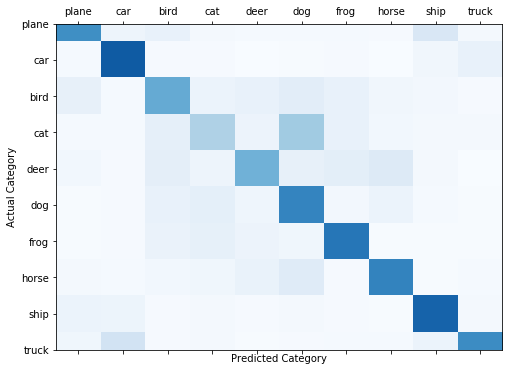

Category   - Accuracy
plane      - 63.4
car        - 83.4
bird       - 51.9
cat        - 32.1
deer       - 48.6
dog        - 67.3
frog       - 72.7
horse      - 67.7
ship       - 80.4
truck      - 64.8

Selected workers

[20 59 19  2  1 12 55 10 75 51 24 98 57 91 97]
Worker 20 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 19 : is  Stealthy_Attacker
Worker 2 : is  Honest
Worker 1 : is  Honest
Worker 12 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 10 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 51 : is  Stealthy_Attacker
Worker 24 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 57 : is  Honest
Worker 91 : is  Honest
Worker 97 : is  Stealthy_Attacker

 | Global Training Round : 9 |


Worker 20 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.975458
Train Epoch: 1 [400/500	(81%)]	Loss: 1.165767
Train Epoch: 2 [0/500	(1%)]	Loss: 0.837499
Train Epoch: 2 [400/500	(81%)]	Loss: 0.939753
Train Epoch: 3 [0/500	(1%)]	Loss: 0.708397
Train Epoch: 3 [400/500	(81%)]	Loss: 0.783284
Train Epoch: 4 [0/500	(1%)]	Loss: 0.620579
Train Epoch: 4 [400/500	(81%)]	Loss: 0.757726
Train Epoch: 5 [0/500	(1%)]	Loss: 0.442419
Train Epoch: 5 [400/500	(81%)]	Loss: 0.491204

Worker 20 ends training in Global Round:9 |

Worker 59 starts training in Global Round:9 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  9


Train Epoch: 1 [0/500	(1%)]	Loss: 1.300728
Train Epoch: 1 [400/500	(81%)]	Loss: 1.145827
Train Epoch: 2 [0/500	(1%)]	Loss: 1.063517
Train Epoch: 2 [400/500	(81%)]	Loss: 1.053424
Train Epoch: 3 [0/500	(1%)]	Loss: 0.922734
Train Epoch: 3 [400/500	(81%)]	Loss: 0.944774
Train Epoch: 4 [0/500	(1%)]	Loss: 0.602614
Train Epoch: 4 [400/500	(81%)]	Loss: 0.958024
Train Epoch: 5 [0/500	(1%)]	Loss: 0.813258
Train Epoch: 5 [400/500	(81%)]	Loss: 0.823895

Performed attacks 1
Worker 59 ends training in Global Round:9 |

Worker 19 starts training in Global Round:9 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  9


Train Epoch: 1 [0/500	(1%)]	Loss: 1.252912
Train Epoch: 1 [400/500	(81%)]	Loss: 1.319590
Train Epoch: 2 [0/500	(1%)]	Loss: 0.786206
Train Epoch: 2 [400/500	(81%)]	Loss: 1.150609
Train Epoch: 3 [0/500	(1%)]	Loss: 1.024227
Train Epoch: 3 [400/500	(81%)]	Loss: 0.780922
Train Epoch: 4 [0/500	(1%)]	Loss: 0.652300
Train Epoch: 4 [400/500	(81%)]	Loss: 0.814577
Train Epoch: 5 [0/500	(1%)]	Loss: 0.543764
Train Epoch: 5 [400/500	(81%)]	Loss: 0.833190

Performed attacks 2
Worker 19 ends training in Global Round:9 |

Worker 2 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.138438
Train Epoch: 1 [400/500	(81%)]	Loss: 1.035594
Train Epoch: 2 [0/500	(1%)]	Loss: 1.093934
Train Epoch: 2 [400/500	(81%)]	Loss: 0.768262
Train Epoch: 3 [0/500	(1%)]	Loss: 0.742278
Train Epoch: 3 [400/500	(81%)]	Loss: 0.833874
Train Epoch: 4 [0/500	(1%)]	Loss: 0.698177
Train Epoch: 4 [400/500	(81%)]	Loss: 0.758990
Train Epoch: 5 [0/500	(1%)]	Loss: 0.701052
Train Epoch: 5 [400/500	(81%)]	Loss: 0.710373

Worker 2 ends training in Global Round:9 |

Worker 1 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.072787
Train Epoch: 1 [400/500	(81%)]	Loss: 1.318525
Train Epoch: 2 [0/500	(1%)]	Loss: 0.957937
Train Epoch: 2 [400/500	(81%)]	Loss: 1.149649
Train Epoch: 3 [0/500	(1%)]	Loss: 1.144891
Train Epoch: 3 [400/500	(81%)]	Loss: 1.104490
Train Epoch: 4 [0/500	(1%)]	Loss: 1.011618
Train Epoch: 4 [400/500	(81%)]	Loss: 1.011617
Train Epoch: 5 [0/500	(1%)]	Loss: 0.634879
Train Epoch: 5 [400/500	(81%)]	Loss: 1.011358

Worker 1 ends training in Global Round:9 |

Worker 12 starts training in Global Round:9 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  9


Train Epoch: 1 [0/500	(1%)]	Loss: 1.329300
Train Epoch: 1 [400/500	(81%)]	Loss: 1.155429
Train Epoch: 2 [0/500	(1%)]	Loss: 0.910235
Train Epoch: 2 [400/500	(81%)]	Loss: 0.928400
Train Epoch: 3 [0/500	(1%)]	Loss: 0.699206
Train Epoch: 3 [400/500	(81%)]	Loss: 1.003810
Train Epoch: 4 [0/500	(1%)]	Loss: 0.672769
Train Epoch: 4 [400/500	(81%)]	Loss: 0.612067
Train Epoch: 5 [0/500	(1%)]	Loss: 0.599955
Train Epoch: 5 [400/500	(81%)]	Loss: 0.627422

Performed attacks 3
Worker 12 ends training in Global Round:9 |

Worker 55 starts training in Global Round:9 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  9


Train Epoch: 1 [0/500	(1%)]	Loss: 1.344924
Train Epoch: 1 [400/500	(81%)]	Loss: 1.060817
Train Epoch: 2 [0/500	(1%)]	Loss: 0.884365
Train Epoch: 2 [400/500	(81%)]	Loss: 0.998017
Train Epoch: 3 [0/500	(1%)]	Loss: 0.896771
Train Epoch: 3 [400/500	(81%)]	Loss: 1.039669
Train Epoch: 4 [0/500	(1%)]	Loss: 0.808609
Train Epoch: 4 [400/500	(81%)]	Loss: 0.723419
Train Epoch: 5 [0/500	(1%)]	Loss: 0.696813
Train Epoch: 5 [400/500	(81%)]	Loss: 0.787568

Performed attacks 4
Worker 55 ends training in Global Round:9 |

Worker 10 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.160842
Train Epoch: 1 [400/500	(81%)]	Loss: 1.139861
Train Epoch: 2 [0/500	(1%)]	Loss: 1.020359
Train Epoch: 2 [400/500	(81%)]	Loss: 1.054656
Train Epoch: 3 [0/500	(1%)]	Loss: 0.858877
Train Epoch: 3 [400/500	(81%)]	Loss: 0.842830
Train Epoch: 4 [0/500	(1%)]	Loss: 0.639700
Train Epoch: 4 [400/500	(81%)]	Loss: 0.736159
Train Epoch: 5 [0/500	(1%)]	Loss: 0.787323
Train Epoch: 5 [400/500	(81%)]	Loss: 0.767162

Worker 10 ends training in Global Round:9 |

Worker 75 starts training in Global Round:9 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  9


Train Epoch: 1 [0/500	(1%)]	Loss: 1.419573
Train Epoch: 1 [400/500	(81%)]	Loss: 1.324126
Train Epoch: 2 [0/500	(1%)]	Loss: 0.832581
Train Epoch: 2 [400/500	(81%)]	Loss: 0.970850
Train Epoch: 3 [0/500	(1%)]	Loss: 0.901239
Train Epoch: 3 [400/500	(81%)]	Loss: 0.896282
Train Epoch: 4 [0/500	(1%)]	Loss: 0.642478
Train Epoch: 4 [400/500	(81%)]	Loss: 0.912007
Train Epoch: 5 [0/500	(1%)]	Loss: 0.558014
Train Epoch: 5 [400/500	(81%)]	Loss: 0.689968

Performed attacks 5
Worker 75 ends training in Global Round:9 |

Worker 51 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.150203
Train Epoch: 1 [400/500	(81%)]	Loss: 1.065672
Train Epoch: 2 [0/500	(1%)]	Loss: 0.857586
Train Epoch: 2 [400/500	(81%)]	Loss: 1.147772
Train Epoch: 3 [0/500	(1%)]	Loss: 0.905539
Train Epoch: 3 [400/500	(81%)]	Loss: 0.938437
Train Epoch: 4 [0/500	(1%)]	Loss: 0.677974
Train Epoch: 4 [400/500	(81%)]	Loss: 0.695500
Train Epoch: 5 [0/500	(1%)]	Loss: 0.851509
Train Epoch: 5 [400/500	(81%)]	Loss: 1.134338

Worker 51 ends training in Global Round:9 |

Worker 24 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.096035
Train Epoch: 1 [400/500	(81%)]	Loss: 0.970431
Train Epoch: 2 [0/500	(1%)]	Loss: 0.756858
Train Epoch: 2 [400/500	(81%)]	Loss: 0.782382
Train Epoch: 3 [0/500	(1%)]	Loss: 0.622830
Train Epoch: 3 [400/500	(81%)]	Loss: 0.645219
Train Epoch: 4 [0/500	(1%)]	Loss: 0.755569
Train Epoch: 4 [400/500	(81%)]	Loss: 0.647476
Train Epoch: 5 [0/500	(1%)]	Loss: 0.566799
Train Epoch: 5 [400/500	(81%)]	Loss: 0.803665

Worker 24 ends training in Global Round:9 |

Worker 98 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.084597
Train Epoch: 1 [400/500	(81%)]	Loss: 1.147010
Train Epoch: 2 [0/500	(1%)]	Loss: 0.845991
Train Epoch: 2 [400/500	(81%)]	Loss: 0.824062
Train Epoch: 3 [0/500	(1%)]	Loss: 0.614737
Train Epoch: 3 [400/500	(81%)]	Loss: 0.829698
Train Epoch: 4 [0/500	(1%)]	Loss: 0.595442
Train Epoch: 4 [400/500	(81%)]	Loss: 0.714556
Train Epoch: 5 [0/500	(1%)]	Loss: 0.440010
Train Epoch: 5 [400/500	(81%)]	Loss: 0.751319

Worker 98 ends training in Global Round:9 |

Worker 57 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.416101
Train Epoch: 1 [400/500	(81%)]	Loss: 1.465470
Train Epoch: 2 [0/500	(1%)]	Loss: 0.866431
Train Epoch: 2 [400/500	(81%)]	Loss: 0.916780
Train Epoch: 3 [0/500	(1%)]	Loss: 0.967440
Train Epoch: 3 [400/500	(81%)]	Loss: 0.749404
Train Epoch: 4 [0/500	(1%)]	Loss: 0.770706
Train Epoch: 4 [400/500	(81%)]	Loss: 0.822780
Train Epoch: 5 [0/500	(1%)]	Loss: 0.842551
Train Epoch: 5 [400/500	(81%)]	Loss: 0.789221

Worker 57 ends training in Global Round:9 |

Worker 91 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.181207
Train Epoch: 1 [400/500	(81%)]	Loss: 1.456784
Train Epoch: 2 [0/500	(1%)]	Loss: 0.937123
Train Epoch: 2 [400/500	(81%)]	Loss: 0.905792
Train Epoch: 3 [0/500	(1%)]	Loss: 0.764680
Train Epoch: 3 [400/500	(81%)]	Loss: 1.057549
Train Epoch: 4 [0/500	(1%)]	Loss: 0.646264
Train Epoch: 4 [400/500	(81%)]	Loss: 0.772301
Train Epoch: 5 [0/500	(1%)]	Loss: 0.584549
Train Epoch: 5 [400/500	(81%)]	Loss: 0.666963

Worker 91 ends training in Global Round:9 |

Worker 97 starts training in Global Round:9 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.034963
Train Epoch: 1 [400/500	(81%)]	Loss: 1.086867
Train Epoch: 2 [0/500	(1%)]	Loss: 0.748115
Train Epoch: 2 [400/500	(81%)]	Loss: 0.986546
Train Epoch: 3 [0/500	(1%)]	Loss: 0.740286
Train Epoch: 3 [400/500	(81%)]	Loss: 0.823761
Train Epoch: 4 [0/500	(1%)]	Loss: 0.557681
Train Epoch: 4 [400/500	(81%)]	Loss: 0.914527
Train Epoch: 5 [0/500	(1%)]	Loss: 0.450383
Train Epoch: 5 [400/500	(81%)]	Loss: 0.694343

Worker 97 ends training in Global Round:9 |
Last layer biases  [array([ 0.03218824, -0.02808848, -0.01773663,  0.03322478,  0.03211522,
       -0.01794351,  0.04180883, -0.00395033, -0.01566034, -0.04005661],
      dtype=float32), array([ 0.03272959, -0.02865912, -0.01844822,  0.03347754,  0.03816803,
       -0.0145434 ,  0.04538566, -0.02500417, -0.01282788, -0.03437686],
      dtype=float32), array([ 0.03625955, -0.02588287, -0.01840972,  0.03340568,  0.03781633,
       -0.01580138,  0.04592276, -0.02462264, -0.0145036 , -0.03828293],
      dtype

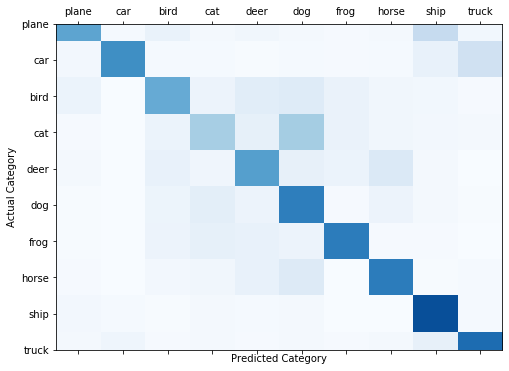

Category   - Accuracy
plane      - 54.0
car        - 63.6
bird       - 51.4
cat        - 34.6
deer       - 56.5
dog        - 69.6
frog       - 70.4
horse      - 70.6
ship       - 88.1
truck      - 76.8

Selected workers

[56  1  3 60 75 80  5 92 88 98 62 79 96 29 81]
Worker 56 : is  Honest
Worker 1 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 80 : is  Honest
Worker 5 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 88 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 62 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 96 : is  Honest
Worker 29 : is  Honest
Worker 81 : is  Honest

 | Global Training Round : 10 |


Worker 56 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.008434
Train Epoch: 1 [400/500	(81%)]	Loss: 1.216950
Train Epoch: 2 [0/500	(1%)]	Loss: 0.529293
Train Epoch: 2 [400/500	(81%)]	Loss: 0.738270
Train Epoch: 3 [0/500	(1%)]	Loss: 0.637868
Train Epoch: 3 [400/500	(81%)]	Loss: 0.781696
Train Epoch: 4 [0/500	(1%)]	Loss: 0.376602
Train Epoch: 4 [400/500	(81%)]	Loss: 0.749433
Train Epoch: 5 [0/500	(1%)]	Loss: 0.524238
Train Epoch: 5 [400/500	(81%)]	Loss: 0.664175

Worker 56 ends training in Global Round:10 |

Worker 1 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.943613
Train Epoch: 1 [400/500	(81%)]	Loss: 1.088743
Train Epoch: 2 [0/500	(1%)]	Loss: 0.839418
Train Epoch: 2 [400/500	(81%)]	Loss: 1.305496
Train Epoch: 3 [0/500	(1%)]	Loss: 0.678257
Train Epoch: 3 [400/500	(81%)]	Loss: 1.024563
Train Epoch: 4 [0/500	(1%)]	Loss: 0.551856
Train Epoch: 4 [400/500	(81%)]	Loss: 0.824889
Train Epoch: 5 [0/500	(1%)]	Loss: 0.681506
Train Epoch: 5 [400/500	(81%)]	Loss: 0.869300

Worker 1 ends training in Global Round:10 |

Worker 3 starts training in Global Round:10 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  10


Train Epoch: 1 [0/500	(1%)]	Loss: 1.394692
Train Epoch: 1 [400/500	(81%)]	Loss: 1.172190
Train Epoch: 2 [0/500	(1%)]	Loss: 1.045281
Train Epoch: 2 [400/500	(81%)]	Loss: 1.070234
Train Epoch: 3 [0/500	(1%)]	Loss: 0.858755
Train Epoch: 3 [400/500	(81%)]	Loss: 0.876109
Train Epoch: 4 [0/500	(1%)]	Loss: 0.689021
Train Epoch: 4 [400/500	(81%)]	Loss: 0.884175
Train Epoch: 5 [0/500	(1%)]	Loss: 0.662924
Train Epoch: 5 [400/500	(81%)]	Loss: 0.825437

Performed attacks 1
Worker 3 ends training in Global Round:10 |

Worker 60 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.066595
Train Epoch: 1 [400/500	(81%)]	Loss: 1.167661
Train Epoch: 2 [0/500	(1%)]	Loss: 0.697944
Train Epoch: 2 [400/500	(81%)]	Loss: 0.944698
Train Epoch: 3 [0/500	(1%)]	Loss: 0.852112
Train Epoch: 3 [400/500	(81%)]	Loss: 0.878355
Train Epoch: 4 [0/500	(1%)]	Loss: 0.720266
Train Epoch: 4 [400/500	(81%)]	Loss: 0.777292
Train Epoch: 5 [0/500	(1%)]	Loss: 0.486872
Train Epoch: 5 [400/500	(81%)]	Loss: 0.732473

Worker 60 ends training in Global Round:10 |

Worker 75 starts training in Global Round:10 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  10


Train Epoch: 1 [0/500	(1%)]	Loss: 1.211808
Train Epoch: 1 [400/500	(81%)]	Loss: 1.124389
Train Epoch: 2 [0/500	(1%)]	Loss: 0.832095
Train Epoch: 2 [400/500	(81%)]	Loss: 0.867935
Train Epoch: 3 [0/500	(1%)]	Loss: 0.920207
Train Epoch: 3 [400/500	(81%)]	Loss: 0.700470
Train Epoch: 4 [0/500	(1%)]	Loss: 0.858467
Train Epoch: 4 [400/500	(81%)]	Loss: 0.878396
Train Epoch: 5 [0/500	(1%)]	Loss: 0.481933
Train Epoch: 5 [400/500	(81%)]	Loss: 0.628552

Performed attacks 2
Worker 75 ends training in Global Round:10 |

Worker 80 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.023127
Train Epoch: 1 [400/500	(81%)]	Loss: 1.319685
Train Epoch: 2 [0/500	(1%)]	Loss: 0.761344
Train Epoch: 2 [400/500	(81%)]	Loss: 0.946893
Train Epoch: 3 [0/500	(1%)]	Loss: 0.744105
Train Epoch: 3 [400/500	(81%)]	Loss: 0.722191
Train Epoch: 4 [0/500	(1%)]	Loss: 0.774589
Train Epoch: 4 [400/500	(81%)]	Loss: 0.783970
Train Epoch: 5 [0/500	(1%)]	Loss: 0.521291
Train Epoch: 5 [400/500	(81%)]	Loss: 0.595882

Worker 80 ends training in Global Round:10 |

Worker 5 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.810801
Train Epoch: 1 [400/500	(81%)]	Loss: 1.284323
Train Epoch: 2 [0/500	(1%)]	Loss: 0.730274
Train Epoch: 2 [400/500	(81%)]	Loss: 0.827209
Train Epoch: 3 [0/500	(1%)]	Loss: 0.608662
Train Epoch: 3 [400/500	(81%)]	Loss: 0.830328
Train Epoch: 4 [0/500	(1%)]	Loss: 0.624054
Train Epoch: 4 [400/500	(81%)]	Loss: 0.653406
Train Epoch: 5 [0/500	(1%)]	Loss: 0.508574
Train Epoch: 5 [400/500	(81%)]	Loss: 0.698526

Worker 5 ends training in Global Round:10 |

Worker 92 starts training in Global Round:10 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  10


Train Epoch: 1 [0/500	(1%)]	Loss: 1.275233
Train Epoch: 1 [400/500	(81%)]	Loss: 1.526808
Train Epoch: 2 [0/500	(1%)]	Loss: 1.073382
Train Epoch: 2 [400/500	(81%)]	Loss: 1.156178
Train Epoch: 3 [0/500	(1%)]	Loss: 0.832555
Train Epoch: 3 [400/500	(81%)]	Loss: 1.060005
Train Epoch: 4 [0/500	(1%)]	Loss: 0.655166
Train Epoch: 4 [400/500	(81%)]	Loss: 1.029210
Train Epoch: 5 [0/500	(1%)]	Loss: 0.761895
Train Epoch: 5 [400/500	(81%)]	Loss: 0.698080

Performed attacks 3
Worker 92 ends training in Global Round:10 |

Worker 88 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.934023
Train Epoch: 1 [400/500	(81%)]	Loss: 0.887978
Train Epoch: 2 [0/500	(1%)]	Loss: 0.780344
Train Epoch: 2 [400/500	(81%)]	Loss: 0.912110
Train Epoch: 3 [0/500	(1%)]	Loss: 0.710279
Train Epoch: 3 [400/500	(81%)]	Loss: 1.046298
Train Epoch: 4 [0/500	(1%)]	Loss: 0.599145
Train Epoch: 4 [400/500	(81%)]	Loss: 1.005641
Train Epoch: 5 [0/500	(1%)]	Loss: 0.598140
Train Epoch: 5 [400/500	(81%)]	Loss: 0.859216

Worker 88 ends training in Global Round:10 |

Worker 98 starts training in Global Round:10 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  10


Train Epoch: 1 [0/500	(1%)]	Loss: 1.029906
Train Epoch: 1 [400/500	(81%)]	Loss: 1.015918
Train Epoch: 2 [0/500	(1%)]	Loss: 0.644421
Train Epoch: 2 [400/500	(81%)]	Loss: 0.932768
Train Epoch: 3 [0/500	(1%)]	Loss: 0.733483
Train Epoch: 3 [400/500	(81%)]	Loss: 0.833260
Train Epoch: 4 [0/500	(1%)]	Loss: 0.671608
Train Epoch: 4 [400/500	(81%)]	Loss: 1.120512
Train Epoch: 5 [0/500	(1%)]	Loss: 0.718677
Train Epoch: 5 [400/500	(81%)]	Loss: 0.652611

Performed attacks 4
Worker 98 ends training in Global Round:10 |

Worker 62 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.248419
Train Epoch: 1 [400/500	(81%)]	Loss: 1.412999
Train Epoch: 2 [0/500	(1%)]	Loss: 1.099563
Train Epoch: 2 [400/500	(81%)]	Loss: 1.300659
Train Epoch: 3 [0/500	(1%)]	Loss: 0.841510
Train Epoch: 3 [400/500	(81%)]	Loss: 0.933066
Train Epoch: 4 [0/500	(1%)]	Loss: 0.886191
Train Epoch: 4 [400/500	(81%)]	Loss: 0.895201
Train Epoch: 5 [0/500	(1%)]	Loss: 0.854883
Train Epoch: 5 [400/500	(81%)]	Loss: 0.814674

Worker 62 ends training in Global Round:10 |

Worker 79 starts training in Global Round:10 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  10


Train Epoch: 1 [0/500	(1%)]	Loss: 1.423435
Train Epoch: 1 [400/500	(81%)]	Loss: 1.145407
Train Epoch: 2 [0/500	(1%)]	Loss: 0.918057
Train Epoch: 2 [400/500	(81%)]	Loss: 1.098198
Train Epoch: 3 [0/500	(1%)]	Loss: 0.718733
Train Epoch: 3 [400/500	(81%)]	Loss: 0.804786
Train Epoch: 4 [0/500	(1%)]	Loss: 0.572691
Train Epoch: 4 [400/500	(81%)]	Loss: 0.640028
Train Epoch: 5 [0/500	(1%)]	Loss: 0.619615
Train Epoch: 5 [400/500	(81%)]	Loss: 0.640365

Performed attacks 5
Worker 79 ends training in Global Round:10 |

Worker 96 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.035064
Train Epoch: 1 [400/500	(81%)]	Loss: 1.216030
Train Epoch: 2 [0/500	(1%)]	Loss: 0.969360
Train Epoch: 2 [400/500	(81%)]	Loss: 1.148504
Train Epoch: 3 [0/500	(1%)]	Loss: 0.894493
Train Epoch: 3 [400/500	(81%)]	Loss: 0.800058
Train Epoch: 4 [0/500	(1%)]	Loss: 0.862980
Train Epoch: 4 [400/500	(81%)]	Loss: 0.892498
Train Epoch: 5 [0/500	(1%)]	Loss: 0.598254
Train Epoch: 5 [400/500	(81%)]	Loss: 0.634015

Worker 96 ends training in Global Round:10 |

Worker 29 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.795774
Train Epoch: 1 [400/500	(81%)]	Loss: 1.029192
Train Epoch: 2 [0/500	(1%)]	Loss: 0.776583
Train Epoch: 2 [400/500	(81%)]	Loss: 0.941566
Train Epoch: 3 [0/500	(1%)]	Loss: 0.647139
Train Epoch: 3 [400/500	(81%)]	Loss: 0.662946
Train Epoch: 4 [0/500	(1%)]	Loss: 0.447580
Train Epoch: 4 [400/500	(81%)]	Loss: 0.562238
Train Epoch: 5 [0/500	(1%)]	Loss: 0.604021
Train Epoch: 5 [400/500	(81%)]	Loss: 0.710458

Worker 29 ends training in Global Round:10 |

Worker 81 starts training in Global Round:10 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.849855
Train Epoch: 1 [400/500	(81%)]	Loss: 0.994643
Train Epoch: 2 [0/500	(1%)]	Loss: 0.576273
Train Epoch: 2 [400/500	(81%)]	Loss: 0.955629
Train Epoch: 3 [0/500	(1%)]	Loss: 0.652393
Train Epoch: 3 [400/500	(81%)]	Loss: 0.730887
Train Epoch: 4 [0/500	(1%)]	Loss: 0.576694
Train Epoch: 4 [400/500	(81%)]	Loss: 0.667201
Train Epoch: 5 [0/500	(1%)]	Loss: 0.426512
Train Epoch: 5 [400/500	(81%)]	Loss: 0.651845

Worker 81 ends training in Global Round:10 |
Last layer biases  [array([ 0.03281946, -0.02823137, -0.02032967,  0.03322602,  0.03675881,
       -0.0188783 ,  0.04298325, -0.00665597, -0.01700832, -0.03878268],
      dtype=float32), array([ 0.03209867, -0.0284586 , -0.01912366,  0.03027394,  0.03772291,
       -0.01852369,  0.04026091, -0.00608322, -0.01726395, -0.03500208],
      dtype=float32), array([ 0.03094592, -0.02396338, -0.01622512,  0.0333457 ,  0.03874977,
       -0.0181074 ,  0.04425195, -0.02416182, -0.01215484, -0.03677958],
      dtyp

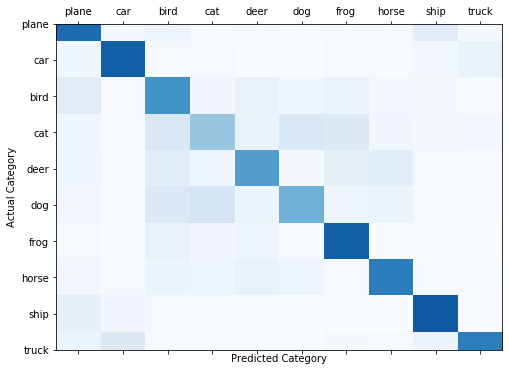

Category   - Accuracy
plane      - 77.0
car        - 81.7
bird       - 61.9
cat        - 38.5
deer       - 56.7
dog        - 48.9
frog       - 81.3
horse      - 70.5
ship       - 83.7
truck      - 70.0

Selected workers

[85 83 88 24 20 37 47 62 77 74 11 96 14 55 18]
Worker 85 : is  Honest
Worker 83 : is  Honest
Worker 88 : is  Honest
Worker 24 : is  Honest
Worker 20 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 47 : is  Honest
Worker 62 : is  Honest
Worker 77 : is  Honest
Worker 74 : is  Honest
Worker 11 : is  Honest
Worker 96 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 18 : is  Stealthy_Attacker

 | Global Training Round : 11 |


Worker 85 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.032531
Train Epoch: 1 [400/500	(81%)]	Loss: 1.309322
Train Epoch: 2 [0/500	(1%)]	Loss: 0.784029
Train Epoch: 2 [400/500	(81%)]	Loss: 1.032888
Train Epoch: 3 [0/500	(1%)]	Loss: 0.587600
Train Epoch: 3 [400/500	(81%)]	Loss: 0.762750
Train Epoch: 4 [0/500	(1%)]	Loss: 0.646778
Train Epoch: 4 [400/500	(81%)]	Loss: 0.770598
Train Epoch: 5 [0/500	(1%)]	Loss: 0.671584
Train Epoch: 5 [400/500	(81%)]	Loss: 0.609984

Worker 85 ends training in Global Round:11 |

Worker 83 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.856402
Train Epoch: 1 [400/500	(81%)]	Loss: 1.017563
Train Epoch: 2 [0/500	(1%)]	Loss: 0.760623
Train Epoch: 2 [400/500	(81%)]	Loss: 0.732341
Train Epoch: 3 [0/500	(1%)]	Loss: 0.622600
Train Epoch: 3 [400/500	(81%)]	Loss: 0.858057
Train Epoch: 4 [0/500	(1%)]	Loss: 0.635605
Train Epoch: 4 [400/500	(81%)]	Loss: 0.777379
Train Epoch: 5 [0/500	(1%)]	Loss: 0.506708
Train Epoch: 5 [400/500	(81%)]	Loss: 0.609959

Worker 83 ends training in Global Round:11 |

Worker 88 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.916353
Train Epoch: 1 [400/500	(81%)]	Loss: 0.902506
Train Epoch: 2 [0/500	(1%)]	Loss: 0.682101
Train Epoch: 2 [400/500	(81%)]	Loss: 0.751238
Train Epoch: 3 [0/500	(1%)]	Loss: 0.705849
Train Epoch: 3 [400/500	(81%)]	Loss: 0.707476
Train Epoch: 4 [0/500	(1%)]	Loss: 0.401896
Train Epoch: 4 [400/500	(81%)]	Loss: 0.741337
Train Epoch: 5 [0/500	(1%)]	Loss: 0.530569
Train Epoch: 5 [400/500	(81%)]	Loss: 0.736513

Worker 88 ends training in Global Round:11 |

Worker 24 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.870545
Train Epoch: 1 [400/500	(81%)]	Loss: 0.879166
Train Epoch: 2 [0/500	(1%)]	Loss: 0.467202
Train Epoch: 2 [400/500	(81%)]	Loss: 0.805504
Train Epoch: 3 [0/500	(1%)]	Loss: 0.714171
Train Epoch: 3 [400/500	(81%)]	Loss: 0.480221
Train Epoch: 4 [0/500	(1%)]	Loss: 0.524690
Train Epoch: 4 [400/500	(81%)]	Loss: 0.649994
Train Epoch: 5 [0/500	(1%)]	Loss: 0.412281
Train Epoch: 5 [400/500	(81%)]	Loss: 0.558071

Worker 24 ends training in Global Round:11 |

Worker 20 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.889696
Train Epoch: 1 [400/500	(81%)]	Loss: 0.739744
Train Epoch: 2 [0/500	(1%)]	Loss: 0.686414
Train Epoch: 2 [400/500	(81%)]	Loss: 0.667185
Train Epoch: 3 [0/500	(1%)]	Loss: 0.702839
Train Epoch: 3 [400/500	(81%)]	Loss: 0.529394
Train Epoch: 4 [0/500	(1%)]	Loss: 0.433227
Train Epoch: 4 [400/500	(81%)]	Loss: 0.791712
Train Epoch: 5 [0/500	(1%)]	Loss: 0.671529
Train Epoch: 5 [400/500	(81%)]	Loss: 0.834921

Worker 20 ends training in Global Round:11 |

Worker 37 starts training in Global Round:11 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  11


Train Epoch: 1 [0/500	(1%)]	Loss: 1.268640
Train Epoch: 1 [400/500	(81%)]	Loss: 1.239117
Train Epoch: 2 [0/500	(1%)]	Loss: 0.755454
Train Epoch: 2 [400/500	(81%)]	Loss: 0.949552
Train Epoch: 3 [0/500	(1%)]	Loss: 0.785130
Train Epoch: 3 [400/500	(81%)]	Loss: 0.944347
Train Epoch: 4 [0/500	(1%)]	Loss: 0.721064
Train Epoch: 4 [400/500	(81%)]	Loss: 0.677179
Train Epoch: 5 [0/500	(1%)]	Loss: 0.513604
Train Epoch: 5 [400/500	(81%)]	Loss: 0.737780

Performed attacks 1
Worker 37 ends training in Global Round:11 |

Worker 47 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.454636
Train Epoch: 1 [400/500	(81%)]	Loss: 1.096273
Train Epoch: 2 [0/500	(1%)]	Loss: 0.805883
Train Epoch: 2 [400/500	(81%)]	Loss: 1.361218
Train Epoch: 3 [0/500	(1%)]	Loss: 0.801364
Train Epoch: 3 [400/500	(81%)]	Loss: 1.046681
Train Epoch: 4 [0/500	(1%)]	Loss: 0.844719
Train Epoch: 4 [400/500	(81%)]	Loss: 0.508264
Train Epoch: 5 [0/500	(1%)]	Loss: 0.614069
Train Epoch: 5 [400/500	(81%)]	Loss: 0.647118

Worker 47 ends training in Global Round:11 |

Worker 62 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.007743
Train Epoch: 1 [400/500	(81%)]	Loss: 1.115609
Train Epoch: 2 [0/500	(1%)]	Loss: 0.640811
Train Epoch: 2 [400/500	(81%)]	Loss: 0.850565
Train Epoch: 3 [0/500	(1%)]	Loss: 0.759270
Train Epoch: 3 [400/500	(81%)]	Loss: 0.930287
Train Epoch: 4 [0/500	(1%)]	Loss: 0.699237
Train Epoch: 4 [400/500	(81%)]	Loss: 0.980139
Train Epoch: 5 [0/500	(1%)]	Loss: 0.679548
Train Epoch: 5 [400/500	(81%)]	Loss: 0.917264

Worker 62 ends training in Global Round:11 |

Worker 77 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.202688
Train Epoch: 1 [400/500	(81%)]	Loss: 1.048309
Train Epoch: 2 [0/500	(1%)]	Loss: 0.799638
Train Epoch: 2 [400/500	(81%)]	Loss: 1.022037
Train Epoch: 3 [0/500	(1%)]	Loss: 0.691841
Train Epoch: 3 [400/500	(81%)]	Loss: 0.623781
Train Epoch: 4 [0/500	(1%)]	Loss: 0.704698
Train Epoch: 4 [400/500	(81%)]	Loss: 0.695762
Train Epoch: 5 [0/500	(1%)]	Loss: 0.487380
Train Epoch: 5 [400/500	(81%)]	Loss: 0.642130

Worker 77 ends training in Global Round:11 |

Worker 74 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.862367
Train Epoch: 1 [400/500	(81%)]	Loss: 1.154796
Train Epoch: 2 [0/500	(1%)]	Loss: 0.688526
Train Epoch: 2 [400/500	(81%)]	Loss: 1.160680
Train Epoch: 3 [0/500	(1%)]	Loss: 0.508831
Train Epoch: 3 [400/500	(81%)]	Loss: 0.673059
Train Epoch: 4 [0/500	(1%)]	Loss: 0.640750
Train Epoch: 4 [400/500	(81%)]	Loss: 0.784279
Train Epoch: 5 [0/500	(1%)]	Loss: 0.698164
Train Epoch: 5 [400/500	(81%)]	Loss: 0.678639

Worker 74 ends training in Global Round:11 |

Worker 11 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.946732
Train Epoch: 1 [400/500	(81%)]	Loss: 1.230321
Train Epoch: 2 [0/500	(1%)]	Loss: 0.675686
Train Epoch: 2 [400/500	(81%)]	Loss: 0.980477
Train Epoch: 3 [0/500	(1%)]	Loss: 0.602084
Train Epoch: 3 [400/500	(81%)]	Loss: 0.847328
Train Epoch: 4 [0/500	(1%)]	Loss: 0.620052
Train Epoch: 4 [400/500	(81%)]	Loss: 0.535256
Train Epoch: 5 [0/500	(1%)]	Loss: 0.605933
Train Epoch: 5 [400/500	(81%)]	Loss: 0.653550

Worker 11 ends training in Global Round:11 |

Worker 96 starts training in Global Round:11 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.000762
Train Epoch: 1 [400/500	(81%)]	Loss: 0.940804
Train Epoch: 2 [0/500	(1%)]	Loss: 0.698403
Train Epoch: 2 [400/500	(81%)]	Loss: 0.786210
Train Epoch: 3 [0/500	(1%)]	Loss: 0.532777
Train Epoch: 3 [400/500	(81%)]	Loss: 0.840614
Train Epoch: 4 [0/500	(1%)]	Loss: 0.697862
Train Epoch: 4 [400/500	(81%)]	Loss: 0.790559
Train Epoch: 5 [0/500	(1%)]	Loss: 0.492409
Train Epoch: 5 [400/500	(81%)]	Loss: 0.762082

Worker 96 ends training in Global Round:11 |

Worker 14 starts training in Global Round:11 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  11


Train Epoch: 1 [0/500	(1%)]	Loss: 1.180491
Train Epoch: 1 [400/500	(81%)]	Loss: 1.273604
Train Epoch: 2 [0/500	(1%)]	Loss: 0.682583
Train Epoch: 2 [400/500	(81%)]	Loss: 1.065036
Train Epoch: 3 [0/500	(1%)]	Loss: 0.769543
Train Epoch: 3 [400/500	(81%)]	Loss: 0.938637
Train Epoch: 4 [0/500	(1%)]	Loss: 0.615347
Train Epoch: 4 [400/500	(81%)]	Loss: 0.717143
Train Epoch: 5 [0/500	(1%)]	Loss: 0.492170
Train Epoch: 5 [400/500	(81%)]	Loss: 0.755643

Performed attacks 2
Worker 14 ends training in Global Round:11 |

Worker 55 starts training in Global Round:11 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  11


Train Epoch: 1 [0/500	(1%)]	Loss: 1.410527
Train Epoch: 1 [400/500	(81%)]	Loss: 1.263279
Train Epoch: 2 [0/500	(1%)]	Loss: 0.719317
Train Epoch: 2 [400/500	(81%)]	Loss: 0.924327
Train Epoch: 3 [0/500	(1%)]	Loss: 0.804345
Train Epoch: 3 [400/500	(81%)]	Loss: 0.851493
Train Epoch: 4 [0/500	(1%)]	Loss: 0.574071
Train Epoch: 4 [400/500	(81%)]	Loss: 0.721200
Train Epoch: 5 [0/500	(1%)]	Loss: 0.506149
Train Epoch: 5 [400/500	(81%)]	Loss: 0.665375

Performed attacks 3
Worker 55 ends training in Global Round:11 |

Worker 18 starts training in Global Round:11 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  11


Train Epoch: 1 [0/500	(1%)]	Loss: 1.363026
Train Epoch: 1 [400/500	(81%)]	Loss: 1.040238
Train Epoch: 2 [0/500	(1%)]	Loss: 0.799866
Train Epoch: 2 [400/500	(81%)]	Loss: 0.833542
Train Epoch: 3 [0/500	(1%)]	Loss: 0.720632
Train Epoch: 3 [400/500	(81%)]	Loss: 0.723536
Train Epoch: 4 [0/500	(1%)]	Loss: 0.690342
Train Epoch: 4 [400/500	(81%)]	Loss: 0.870165
Train Epoch: 5 [0/500	(1%)]	Loss: 0.508676
Train Epoch: 5 [400/500	(81%)]	Loss: 0.620993

Performed attacks 4
Worker 18 ends training in Global Round:11 |
Last layer biases  [array([ 0.03314225, -0.02830725, -0.02306343,  0.03233694,  0.03398457,
       -0.01425805,  0.04092973, -0.00341288, -0.01569485, -0.0397558 ],
      dtype=float32), array([ 0.03079808, -0.02745685, -0.02008681,  0.03294996,  0.03580581,
       -0.01809942,  0.04328692, -0.00696888, -0.01469873, -0.03962883],
      dtype=float32), array([ 0.03128958, -0.0255411 , -0.01856336,  0.03262877,  0.0337275 ,
       -0.01595498,  0.04113201, -0.00994457, -0.01464353, -0.0

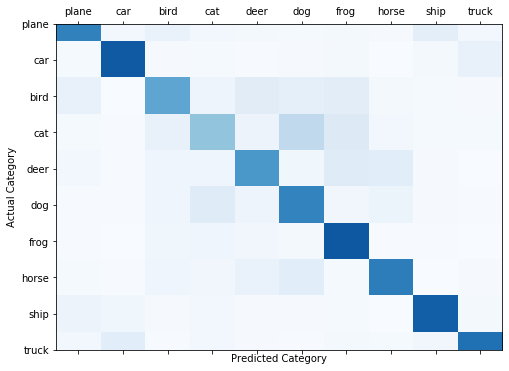

Category   - Accuracy
plane      - 68.4
car        - 83.6
bird       - 53.7
cat        - 40.1
deer       - 59.8
dog        - 67.7
frog       - 84.7
horse      - 70.1
ship       - 81.9
truck      - 75.1

Selected workers

[13 52 63 10  8 40 96 83 51 98 34 65 16 14 12]
Worker 13 : is  Stealthy_Attacker
Worker 52 : is  Stealthy_Attacker
Worker 63 : is  Honest
Worker 10 : is  Honest
Worker 8 : is  Honest
Worker 40 : is  Honest
Worker 96 : is  Honest
Worker 83 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 14 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker

 | Global Training Round : 12 |


Worker 13 starts training in Global Round:12 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  12


Train Epoch: 1 [0/500	(1%)]	Loss: 1.518883
Train Epoch: 1 [400/500	(81%)]	Loss: 0.958302
Train Epoch: 2 [0/500	(1%)]	Loss: 0.746085
Train Epoch: 2 [400/500	(81%)]	Loss: 0.889573
Train Epoch: 3 [0/500	(1%)]	Loss: 0.716341
Train Epoch: 3 [400/500	(81%)]	Loss: 0.838527
Train Epoch: 4 [0/500	(1%)]	Loss: 0.455059
Train Epoch: 4 [400/500	(81%)]	Loss: 0.537574
Train Epoch: 5 [0/500	(1%)]	Loss: 0.613603
Train Epoch: 5 [400/500	(81%)]	Loss: 1.031907

Performed attacks 1
Worker 13 ends training in Global Round:12 |

Worker 52 starts training in Global Round:12 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  12


Train Epoch: 1 [0/500	(1%)]	Loss: 1.299812
Train Epoch: 1 [400/500	(81%)]	Loss: 1.072443
Train Epoch: 2 [0/500	(1%)]	Loss: 0.723032
Train Epoch: 2 [400/500	(81%)]	Loss: 0.859818
Train Epoch: 3 [0/500	(1%)]	Loss: 0.606322
Train Epoch: 3 [400/500	(81%)]	Loss: 0.765472
Train Epoch: 4 [0/500	(1%)]	Loss: 0.468197
Train Epoch: 4 [400/500	(81%)]	Loss: 0.672894
Train Epoch: 5 [0/500	(1%)]	Loss: 0.433231
Train Epoch: 5 [400/500	(81%)]	Loss: 0.748063

Performed attacks 2
Worker 52 ends training in Global Round:12 |

Worker 63 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.905260
Train Epoch: 1 [400/500	(81%)]	Loss: 1.017952
Train Epoch: 2 [0/500	(1%)]	Loss: 0.605844
Train Epoch: 2 [400/500	(81%)]	Loss: 0.801158
Train Epoch: 3 [0/500	(1%)]	Loss: 0.582158
Train Epoch: 3 [400/500	(81%)]	Loss: 0.826712
Train Epoch: 4 [0/500	(1%)]	Loss: 0.583338
Train Epoch: 4 [400/500	(81%)]	Loss: 0.638866
Train Epoch: 5 [0/500	(1%)]	Loss: 0.449982
Train Epoch: 5 [400/500	(81%)]	Loss: 0.680600

Worker 63 ends training in Global Round:12 |

Worker 10 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.845444
Train Epoch: 1 [400/500	(81%)]	Loss: 1.057145
Train Epoch: 2 [0/500	(1%)]	Loss: 0.718018
Train Epoch: 2 [400/500	(81%)]	Loss: 0.639723
Train Epoch: 3 [0/500	(1%)]	Loss: 0.610385
Train Epoch: 3 [400/500	(81%)]	Loss: 0.712044
Train Epoch: 4 [0/500	(1%)]	Loss: 0.463542
Train Epoch: 4 [400/500	(81%)]	Loss: 0.648801
Train Epoch: 5 [0/500	(1%)]	Loss: 0.457826
Train Epoch: 5 [400/500	(81%)]	Loss: 0.525032

Worker 10 ends training in Global Round:12 |

Worker 8 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.770981
Train Epoch: 1 [400/500	(81%)]	Loss: 0.910900
Train Epoch: 2 [0/500	(1%)]	Loss: 0.831569
Train Epoch: 2 [400/500	(81%)]	Loss: 0.611565
Train Epoch: 3 [0/500	(1%)]	Loss: 0.696026
Train Epoch: 3 [400/500	(81%)]	Loss: 0.737303
Train Epoch: 4 [0/500	(1%)]	Loss: 0.533717
Train Epoch: 4 [400/500	(81%)]	Loss: 0.932323
Train Epoch: 5 [0/500	(1%)]	Loss: 0.408570
Train Epoch: 5 [400/500	(81%)]	Loss: 0.640319

Worker 8 ends training in Global Round:12 |

Worker 40 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.921678
Train Epoch: 1 [400/500	(81%)]	Loss: 1.333071
Train Epoch: 2 [0/500	(1%)]	Loss: 0.734229
Train Epoch: 2 [400/500	(81%)]	Loss: 1.209723
Train Epoch: 3 [0/500	(1%)]	Loss: 0.703873
Train Epoch: 3 [400/500	(81%)]	Loss: 0.986865
Train Epoch: 4 [0/500	(1%)]	Loss: 0.675529
Train Epoch: 4 [400/500	(81%)]	Loss: 0.642443
Train Epoch: 5 [0/500	(1%)]	Loss: 0.434852
Train Epoch: 5 [400/500	(81%)]	Loss: 0.715709

Worker 40 ends training in Global Round:12 |

Worker 96 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.850340
Train Epoch: 1 [400/500	(81%)]	Loss: 0.911139
Train Epoch: 2 [0/500	(1%)]	Loss: 0.596855
Train Epoch: 2 [400/500	(81%)]	Loss: 0.698174
Train Epoch: 3 [0/500	(1%)]	Loss: 0.522186
Train Epoch: 3 [400/500	(81%)]	Loss: 0.617049
Train Epoch: 4 [0/500	(1%)]	Loss: 0.506524
Train Epoch: 4 [400/500	(81%)]	Loss: 0.642380
Train Epoch: 5 [0/500	(1%)]	Loss: 0.427476
Train Epoch: 5 [400/500	(81%)]	Loss: 0.629410

Worker 96 ends training in Global Round:12 |

Worker 83 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.753283
Train Epoch: 1 [400/500	(81%)]	Loss: 0.933425
Train Epoch: 2 [0/500	(1%)]	Loss: 0.647246
Train Epoch: 2 [400/500	(81%)]	Loss: 0.763231
Train Epoch: 3 [0/500	(1%)]	Loss: 0.638405
Train Epoch: 3 [400/500	(81%)]	Loss: 0.723590
Train Epoch: 4 [0/500	(1%)]	Loss: 0.474621
Train Epoch: 4 [400/500	(81%)]	Loss: 0.425924
Train Epoch: 5 [0/500	(1%)]	Loss: 0.461638
Train Epoch: 5 [400/500	(81%)]	Loss: 0.721546

Worker 83 ends training in Global Round:12 |

Worker 51 starts training in Global Round:12 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  12


Train Epoch: 1 [0/500	(1%)]	Loss: 1.552093
Train Epoch: 1 [400/500	(81%)]	Loss: 1.163036
Train Epoch: 2 [0/500	(1%)]	Loss: 0.591946
Train Epoch: 2 [400/500	(81%)]	Loss: 0.752717
Train Epoch: 3 [0/500	(1%)]	Loss: 0.696328
Train Epoch: 3 [400/500	(81%)]	Loss: 0.732626
Train Epoch: 4 [0/500	(1%)]	Loss: 0.539543
Train Epoch: 4 [400/500	(81%)]	Loss: 0.643471
Train Epoch: 5 [0/500	(1%)]	Loss: 0.643802
Train Epoch: 5 [400/500	(81%)]	Loss: 0.533139

Performed attacks 3
Worker 51 ends training in Global Round:12 |

Worker 98 starts training in Global Round:12 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  12


Train Epoch: 1 [0/500	(1%)]	Loss: 0.943454
Train Epoch: 1 [400/500	(81%)]	Loss: 1.290702
Train Epoch: 2 [0/500	(1%)]	Loss: 0.538293
Train Epoch: 2 [400/500	(81%)]	Loss: 0.664499
Train Epoch: 3 [0/500	(1%)]	Loss: 0.597854
Train Epoch: 3 [400/500	(81%)]	Loss: 0.806836
Train Epoch: 4 [0/500	(1%)]	Loss: 0.525584
Train Epoch: 4 [400/500	(81%)]	Loss: 0.663108
Train Epoch: 5 [0/500	(1%)]	Loss: 0.461428
Train Epoch: 5 [400/500	(81%)]	Loss: 0.576251

Performed attacks 4
Worker 98 ends training in Global Round:12 |

Worker 34 starts training in Global Round:12 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  12


Train Epoch: 1 [0/500	(1%)]	Loss: 1.393428
Train Epoch: 1 [400/500	(81%)]	Loss: 1.079888
Train Epoch: 2 [0/500	(1%)]	Loss: 0.701353
Train Epoch: 2 [400/500	(81%)]	Loss: 0.851544
Train Epoch: 3 [0/500	(1%)]	Loss: 0.591243
Train Epoch: 3 [400/500	(81%)]	Loss: 0.750160
Train Epoch: 4 [0/500	(1%)]	Loss: 0.568151
Train Epoch: 4 [400/500	(81%)]	Loss: 0.587248
Train Epoch: 5 [0/500	(1%)]	Loss: 0.401057
Train Epoch: 5 [400/500	(81%)]	Loss: 0.490721

Performed attacks 5
Worker 34 ends training in Global Round:12 |

Worker 65 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.696352
Train Epoch: 1 [400/500	(81%)]	Loss: 1.098807
Train Epoch: 2 [0/500	(1%)]	Loss: 0.754568
Train Epoch: 2 [400/500	(81%)]	Loss: 0.782781
Train Epoch: 3 [0/500	(1%)]	Loss: 0.732529
Train Epoch: 3 [400/500	(81%)]	Loss: 0.633617
Train Epoch: 4 [0/500	(1%)]	Loss: 0.449269
Train Epoch: 4 [400/500	(81%)]	Loss: 0.722736
Train Epoch: 5 [0/500	(1%)]	Loss: 0.401219
Train Epoch: 5 [400/500	(81%)]	Loss: 0.489879

Worker 65 ends training in Global Round:12 |

Worker 16 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.015586
Train Epoch: 1 [400/500	(81%)]	Loss: 1.152789
Train Epoch: 2 [0/500	(1%)]	Loss: 0.845071
Train Epoch: 2 [400/500	(81%)]	Loss: 0.749493
Train Epoch: 3 [0/500	(1%)]	Loss: 0.636876
Train Epoch: 3 [400/500	(81%)]	Loss: 0.946967
Train Epoch: 4 [0/500	(1%)]	Loss: 0.680459
Train Epoch: 4 [400/500	(81%)]	Loss: 0.628550
Train Epoch: 5 [0/500	(1%)]	Loss: 0.645492
Train Epoch: 5 [400/500	(81%)]	Loss: 0.598679

Worker 16 ends training in Global Round:12 |

Worker 14 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.828908
Train Epoch: 1 [400/500	(81%)]	Loss: 1.061422
Train Epoch: 2 [0/500	(1%)]	Loss: 0.889964
Train Epoch: 2 [400/500	(81%)]	Loss: 0.855186
Train Epoch: 3 [0/500	(1%)]	Loss: 0.837902
Train Epoch: 3 [400/500	(81%)]	Loss: 0.703098
Train Epoch: 4 [0/500	(1%)]	Loss: 0.579266
Train Epoch: 4 [400/500	(81%)]	Loss: 0.810177
Train Epoch: 5 [0/500	(1%)]	Loss: 0.531199
Train Epoch: 5 [400/500	(81%)]	Loss: 0.624329

Worker 14 ends training in Global Round:12 |

Worker 12 starts training in Global Round:12 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.910912
Train Epoch: 1 [400/500	(81%)]	Loss: 1.000906
Train Epoch: 2 [0/500	(1%)]	Loss: 0.652288
Train Epoch: 2 [400/500	(81%)]	Loss: 1.057188
Train Epoch: 3 [0/500	(1%)]	Loss: 0.564833
Train Epoch: 3 [400/500	(81%)]	Loss: 0.708635
Train Epoch: 4 [0/500	(1%)]	Loss: 0.658118
Train Epoch: 4 [400/500	(81%)]	Loss: 0.907387
Train Epoch: 5 [0/500	(1%)]	Loss: 0.774024
Train Epoch: 5 [400/500	(81%)]	Loss: 0.628066

Worker 12 ends training in Global Round:12 |
Last layer biases  [array([ 0.03686254, -0.02817542, -0.01742175,  0.03486167,  0.03855901,
       -0.01432722,  0.04470114, -0.02498576, -0.01620726, -0.0379657 ],
      dtype=float32), array([ 0.03459404, -0.02657614, -0.01620357,  0.03450746,  0.03841302,
       -0.01638515,  0.04497924, -0.02580624, -0.01560722, -0.03601419],
      dtype=float32), array([ 0.03270121, -0.02788878, -0.01964835,  0.03345111,  0.03040528,
       -0.01877436,  0.04225575, -0.00349327, -0.0122498 , -0.04085755],
      dtyp

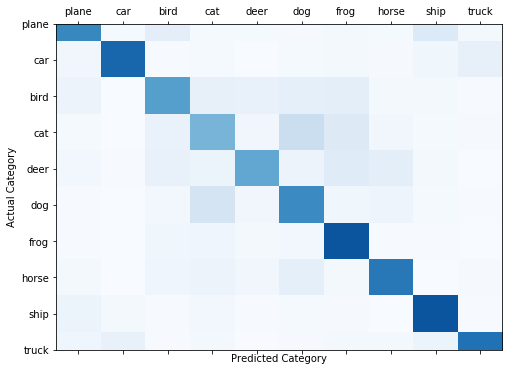

Category   - Accuracy
plane      - 66.3
car        - 79.0
bird       - 56.4
cat        - 47.0
deer       - 53.1
dog        - 65.0
frog       - 85.6
horse      - 72.0
ship       - 85.9
truck      - 74.9

Selected workers

[ 8 97  6  7 13 48 29 80 83 87 18 91  3 41 44]
Worker 8 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 6 : is  Stealthy_Attacker
Worker 7 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 48 : is  Honest
Worker 29 : is  Honest
Worker 80 : is  Honest
Worker 83 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 18 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 41 : is  Stealthy_Attacker
Worker 44 : is  Stealthy_Attacker

 | Global Training Round : 13 |


Worker 8 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.636111
Train Epoch: 1 [400/500	(81%)]	Loss: 1.165651
Train Epoch: 2 [0/500	(1%)]	Loss: 0.518998
Train Epoch: 2 [400/500	(81%)]	Loss: 0.708192
Train Epoch: 3 [0/500	(1%)]	Loss: 0.508714
Train Epoch: 3 [400/500	(81%)]	Loss: 0.826793
Train Epoch: 4 [0/500	(1%)]	Loss: 0.501423
Train Epoch: 4 [400/500	(81%)]	Loss: 0.678079
Train Epoch: 5 [0/500	(1%)]	Loss: 0.425141
Train Epoch: 5 [400/500	(81%)]	Loss: 0.786970

Worker 8 ends training in Global Round:13 |

Worker 97 starts training in Global Round:13 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  13


Train Epoch: 1 [0/500	(1%)]	Loss: 1.408112
Train Epoch: 1 [400/500	(81%)]	Loss: 0.898783
Train Epoch: 2 [0/500	(1%)]	Loss: 0.616007
Train Epoch: 2 [400/500	(81%)]	Loss: 0.923213
Train Epoch: 3 [0/500	(1%)]	Loss: 0.652312
Train Epoch: 3 [400/500	(81%)]	Loss: 0.639964
Train Epoch: 4 [0/500	(1%)]	Loss: 0.575360
Train Epoch: 4 [400/500	(81%)]	Loss: 0.628092
Train Epoch: 5 [0/500	(1%)]	Loss: 0.452604
Train Epoch: 5 [400/500	(81%)]	Loss: 0.563941

Performed attacks 1
Worker 97 ends training in Global Round:13 |

Worker 6 starts training in Global Round:13 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  13


Train Epoch: 1 [0/500	(1%)]	Loss: 1.122606
Train Epoch: 1 [400/500	(81%)]	Loss: 1.085766
Train Epoch: 2 [0/500	(1%)]	Loss: 0.834427
Train Epoch: 2 [400/500	(81%)]	Loss: 0.859422
Train Epoch: 3 [0/500	(1%)]	Loss: 0.534706
Train Epoch: 3 [400/500	(81%)]	Loss: 0.805267
Train Epoch: 4 [0/500	(1%)]	Loss: 0.517142
Train Epoch: 4 [400/500	(81%)]	Loss: 0.578830
Train Epoch: 5 [0/500	(1%)]	Loss: 0.452934
Train Epoch: 5 [400/500	(81%)]	Loss: 0.802691

Performed attacks 2
Worker 6 ends training in Global Round:13 |

Worker 7 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.707831
Train Epoch: 1 [400/500	(81%)]	Loss: 1.220061
Train Epoch: 2 [0/500	(1%)]	Loss: 0.751126
Train Epoch: 2 [400/500	(81%)]	Loss: 1.060211
Train Epoch: 3 [0/500	(1%)]	Loss: 0.579813
Train Epoch: 3 [400/500	(81%)]	Loss: 0.835058
Train Epoch: 4 [0/500	(1%)]	Loss: 0.664622
Train Epoch: 4 [400/500	(81%)]	Loss: 0.600356
Train Epoch: 5 [0/500	(1%)]	Loss: 0.366159
Train Epoch: 5 [400/500	(81%)]	Loss: 0.420880

Worker 7 ends training in Global Round:13 |

Worker 13 starts training in Global Round:13 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  13


Train Epoch: 1 [0/500	(1%)]	Loss: 1.221933
Train Epoch: 1 [400/500	(81%)]	Loss: 1.042889
Train Epoch: 2 [0/500	(1%)]	Loss: 0.835843
Train Epoch: 2 [400/500	(81%)]	Loss: 0.870334
Train Epoch: 3 [0/500	(1%)]	Loss: 0.582372
Train Epoch: 3 [400/500	(81%)]	Loss: 0.698248
Train Epoch: 4 [0/500	(1%)]	Loss: 0.686184
Train Epoch: 4 [400/500	(81%)]	Loss: 0.783190
Train Epoch: 5 [0/500	(1%)]	Loss: 0.558926
Train Epoch: 5 [400/500	(81%)]	Loss: 0.649567

Performed attacks 3
Worker 13 ends training in Global Round:13 |

Worker 48 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.222813
Train Epoch: 1 [400/500	(81%)]	Loss: 0.978441
Train Epoch: 2 [0/500	(1%)]	Loss: 0.674559
Train Epoch: 2 [400/500	(81%)]	Loss: 1.075040
Train Epoch: 3 [0/500	(1%)]	Loss: 0.777871
Train Epoch: 3 [400/500	(81%)]	Loss: 0.765493
Train Epoch: 4 [0/500	(1%)]	Loss: 0.544480
Train Epoch: 4 [400/500	(81%)]	Loss: 0.567307
Train Epoch: 5 [0/500	(1%)]	Loss: 0.506963
Train Epoch: 5 [400/500	(81%)]	Loss: 0.698599

Worker 48 ends training in Global Round:13 |

Worker 29 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.032935
Train Epoch: 1 [400/500	(81%)]	Loss: 0.957690
Train Epoch: 2 [0/500	(1%)]	Loss: 0.720413
Train Epoch: 2 [400/500	(81%)]	Loss: 0.816319
Train Epoch: 3 [0/500	(1%)]	Loss: 0.575346
Train Epoch: 3 [400/500	(81%)]	Loss: 0.683213
Train Epoch: 4 [0/500	(1%)]	Loss: 0.473003
Train Epoch: 4 [400/500	(81%)]	Loss: 0.470687
Train Epoch: 5 [0/500	(1%)]	Loss: 0.398387
Train Epoch: 5 [400/500	(81%)]	Loss: 0.644350

Worker 29 ends training in Global Round:13 |

Worker 80 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.809662
Train Epoch: 1 [400/500	(81%)]	Loss: 1.202818
Train Epoch: 2 [0/500	(1%)]	Loss: 0.662864
Train Epoch: 2 [400/500	(81%)]	Loss: 0.741755
Train Epoch: 3 [0/500	(1%)]	Loss: 0.614611
Train Epoch: 3 [400/500	(81%)]	Loss: 0.798380
Train Epoch: 4 [0/500	(1%)]	Loss: 0.642341
Train Epoch: 4 [400/500	(81%)]	Loss: 0.638726
Train Epoch: 5 [0/500	(1%)]	Loss: 0.434500
Train Epoch: 5 [400/500	(81%)]	Loss: 0.502877

Worker 80 ends training in Global Round:13 |

Worker 83 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.849433
Train Epoch: 1 [400/500	(81%)]	Loss: 0.861355
Train Epoch: 2 [0/500	(1%)]	Loss: 0.578297
Train Epoch: 2 [400/500	(81%)]	Loss: 0.783841
Train Epoch: 3 [0/500	(1%)]	Loss: 0.537222
Train Epoch: 3 [400/500	(81%)]	Loss: 0.685477
Train Epoch: 4 [0/500	(1%)]	Loss: 0.333472
Train Epoch: 4 [400/500	(81%)]	Loss: 0.485326
Train Epoch: 5 [0/500	(1%)]	Loss: 0.443636
Train Epoch: 5 [400/500	(81%)]	Loss: 0.538838

Worker 83 ends training in Global Round:13 |

Worker 87 starts training in Global Round:13 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  13


Train Epoch: 1 [0/500	(1%)]	Loss: 1.627552
Train Epoch: 1 [400/500	(81%)]	Loss: 1.205894
Train Epoch: 2 [0/500	(1%)]	Loss: 0.684747
Train Epoch: 2 [400/500	(81%)]	Loss: 1.064502
Train Epoch: 3 [0/500	(1%)]	Loss: 0.704713
Train Epoch: 3 [400/500	(81%)]	Loss: 0.858144
Train Epoch: 4 [0/500	(1%)]	Loss: 0.598078
Train Epoch: 4 [400/500	(81%)]	Loss: 0.493515
Train Epoch: 5 [0/500	(1%)]	Loss: 0.404384
Train Epoch: 5 [400/500	(81%)]	Loss: 0.582595

Performed attacks 4
Worker 87 ends training in Global Round:13 |

Worker 18 starts training in Global Round:13 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  13


Train Epoch: 1 [0/500	(1%)]	Loss: 1.390665
Train Epoch: 1 [400/500	(81%)]	Loss: 1.130462
Train Epoch: 2 [0/500	(1%)]	Loss: 0.551316
Train Epoch: 2 [400/500	(81%)]	Loss: 0.859659
Train Epoch: 3 [0/500	(1%)]	Loss: 0.746240
Train Epoch: 3 [400/500	(81%)]	Loss: 0.656063
Train Epoch: 4 [0/500	(1%)]	Loss: 0.444251
Train Epoch: 4 [400/500	(81%)]	Loss: 0.653410
Train Epoch: 5 [0/500	(1%)]	Loss: 0.392084
Train Epoch: 5 [400/500	(81%)]	Loss: 0.596145

Performed attacks 5
Worker 18 ends training in Global Round:13 |

Worker 91 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.984904
Train Epoch: 1 [400/500	(81%)]	Loss: 0.963358
Train Epoch: 2 [0/500	(1%)]	Loss: 0.622318
Train Epoch: 2 [400/500	(81%)]	Loss: 0.707374
Train Epoch: 3 [0/500	(1%)]	Loss: 0.612602
Train Epoch: 3 [400/500	(81%)]	Loss: 0.748737
Train Epoch: 4 [0/500	(1%)]	Loss: 0.632489
Train Epoch: 4 [400/500	(81%)]	Loss: 0.726216
Train Epoch: 5 [0/500	(1%)]	Loss: 0.472335
Train Epoch: 5 [400/500	(81%)]	Loss: 0.756843

Worker 91 ends training in Global Round:13 |

Worker 3 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.172363
Train Epoch: 1 [400/500	(81%)]	Loss: 1.121470
Train Epoch: 2 [0/500	(1%)]	Loss: 0.802366
Train Epoch: 2 [400/500	(81%)]	Loss: 1.127270
Train Epoch: 3 [0/500	(1%)]	Loss: 0.758815
Train Epoch: 3 [400/500	(81%)]	Loss: 0.758723
Train Epoch: 4 [0/500	(1%)]	Loss: 0.623157
Train Epoch: 4 [400/500	(81%)]	Loss: 0.756899
Train Epoch: 5 [0/500	(1%)]	Loss: 0.443973
Train Epoch: 5 [400/500	(81%)]	Loss: 0.645596

Worker 3 ends training in Global Round:13 |

Worker 41 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.019119
Train Epoch: 1 [400/500	(81%)]	Loss: 1.334838
Train Epoch: 2 [0/500	(1%)]	Loss: 0.961830
Train Epoch: 2 [400/500	(81%)]	Loss: 1.016365
Train Epoch: 3 [0/500	(1%)]	Loss: 0.715994
Train Epoch: 3 [400/500	(81%)]	Loss: 0.809297
Train Epoch: 4 [0/500	(1%)]	Loss: 0.657952
Train Epoch: 4 [400/500	(81%)]	Loss: 0.588243
Train Epoch: 5 [0/500	(1%)]	Loss: 0.567660
Train Epoch: 5 [400/500	(81%)]	Loss: 0.688108

Worker 41 ends training in Global Round:13 |

Worker 44 starts training in Global Round:13 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.737939
Train Epoch: 1 [400/500	(81%)]	Loss: 1.114784
Train Epoch: 2 [0/500	(1%)]	Loss: 0.747782
Train Epoch: 2 [400/500	(81%)]	Loss: 1.022415
Train Epoch: 3 [0/500	(1%)]	Loss: 0.650392
Train Epoch: 3 [400/500	(81%)]	Loss: 0.737405
Train Epoch: 4 [0/500	(1%)]	Loss: 0.677864
Train Epoch: 4 [400/500	(81%)]	Loss: 0.620894
Train Epoch: 5 [0/500	(1%)]	Loss: 0.452619
Train Epoch: 5 [400/500	(81%)]	Loss: 0.631163

Worker 44 ends training in Global Round:13 |
Last layer biases  [array([ 0.0311948 , -0.03045372, -0.01733989,  0.03181914,  0.03634569,
       -0.020411  ,  0.04325781, -0.00256968, -0.01599743, -0.03994443],
      dtype=float32), array([ 0.03060504, -0.02625415, -0.01626315,  0.03102845,  0.04168119,
       -0.01555305,  0.04277732, -0.02321103, -0.01443546, -0.03447388],
      dtype=float32), array([ 0.03298919, -0.02824054, -0.01493065,  0.03324119,  0.03921401,
       -0.0181621 ,  0.04413551, -0.02328067, -0.01385241, -0.03521224],
      dtyp

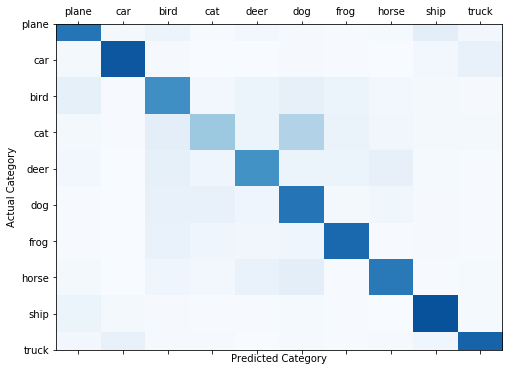

Category   - Accuracy
plane      - 73.6
car        - 84.8
bird       - 63.3
cat        - 37.5
deer       - 62.3
dog        - 73.8
frog       - 78.3
horse      - 71.7
ship       - 87.1
truck      - 80.4

Selected workers

[90  8 16 35 57 23 85 40 41 24 92 87 58 91 13]
Worker 90 : is  Honest
Worker 8 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 35 : is  Honest
Worker 57 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 85 : is  Honest
Worker 40 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 24 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 87 : is  Stealthy_Attacker
Worker 58 : is  Honest
Worker 91 : is  Honest
Worker 13 : is  Stealthy_Attacker

 | Global Training Round : 14 |


Worker 90 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.967679
Train Epoch: 1 [400/500	(81%)]	Loss: 0.851323
Train Epoch: 2 [0/500	(1%)]	Loss: 0.850155
Train Epoch: 2 [400/500	(81%)]	Loss: 0.733052
Train Epoch: 3 [0/500	(1%)]	Loss: 0.613840
Train Epoch: 3 [400/500	(81%)]	Loss: 0.732084
Train Epoch: 4 [0/500	(1%)]	Loss: 0.605969
Train Epoch: 4 [400/500	(81%)]	Loss: 0.494999
Train Epoch: 5 [0/500	(1%)]	Loss: 0.370804
Train Epoch: 5 [400/500	(81%)]	Loss: 0.500205

Worker 90 ends training in Global Round:14 |

Worker 8 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.564088
Train Epoch: 1 [400/500	(81%)]	Loss: 1.142164
Train Epoch: 2 [0/500	(1%)]	Loss: 0.426745
Train Epoch: 2 [400/500	(81%)]	Loss: 0.734515
Train Epoch: 3 [0/500	(1%)]	Loss: 0.465494
Train Epoch: 3 [400/500	(81%)]	Loss: 0.543712
Train Epoch: 4 [0/500	(1%)]	Loss: 0.500685
Train Epoch: 4 [400/500	(81%)]	Loss: 0.768048
Train Epoch: 5 [0/500	(1%)]	Loss: 0.471294
Train Epoch: 5 [400/500	(81%)]	Loss: 0.559516

Worker 8 ends training in Global Round:14 |

Worker 16 starts training in Global Round:14 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  14


Train Epoch: 1 [0/500	(1%)]	Loss: 1.088649
Train Epoch: 1 [400/500	(81%)]	Loss: 1.120089
Train Epoch: 2 [0/500	(1%)]	Loss: 0.787030
Train Epoch: 2 [400/500	(81%)]	Loss: 0.568563
Train Epoch: 3 [0/500	(1%)]	Loss: 0.678519
Train Epoch: 3 [400/500	(81%)]	Loss: 0.805872
Train Epoch: 4 [0/500	(1%)]	Loss: 0.420567
Train Epoch: 4 [400/500	(81%)]	Loss: 0.728228
Train Epoch: 5 [0/500	(1%)]	Loss: 0.610275
Train Epoch: 5 [400/500	(81%)]	Loss: 0.723090

Performed attacks 1
Worker 16 ends training in Global Round:14 |

Worker 35 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.761790
Train Epoch: 1 [400/500	(81%)]	Loss: 0.981821
Train Epoch: 2 [0/500	(1%)]	Loss: 0.740994
Train Epoch: 2 [400/500	(81%)]	Loss: 0.682509
Train Epoch: 3 [0/500	(1%)]	Loss: 0.409450
Train Epoch: 3 [400/500	(81%)]	Loss: 0.601388
Train Epoch: 4 [0/500	(1%)]	Loss: 0.415196
Train Epoch: 4 [400/500	(81%)]	Loss: 0.557830
Train Epoch: 5 [0/500	(1%)]	Loss: 0.304136
Train Epoch: 5 [400/500	(81%)]	Loss: 0.556622

Worker 35 ends training in Global Round:14 |

Worker 57 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.870448
Train Epoch: 1 [400/500	(81%)]	Loss: 1.050512
Train Epoch: 2 [0/500	(1%)]	Loss: 0.678020
Train Epoch: 2 [400/500	(81%)]	Loss: 0.857442
Train Epoch: 3 [0/500	(1%)]	Loss: 0.585187
Train Epoch: 3 [400/500	(81%)]	Loss: 0.778540
Train Epoch: 4 [0/500	(1%)]	Loss: 0.527043
Train Epoch: 4 [400/500	(81%)]	Loss: 0.806105
Train Epoch: 5 [0/500	(1%)]	Loss: 0.613756
Train Epoch: 5 [400/500	(81%)]	Loss: 0.466170

Worker 57 ends training in Global Round:14 |

Worker 23 starts training in Global Round:14 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  14


Train Epoch: 1 [0/500	(1%)]	Loss: 1.289381
Train Epoch: 1 [400/500	(81%)]	Loss: 0.999209
Train Epoch: 2 [0/500	(1%)]	Loss: 0.685265
Train Epoch: 2 [400/500	(81%)]	Loss: 0.709102
Train Epoch: 3 [0/500	(1%)]	Loss: 0.694882
Train Epoch: 3 [400/500	(81%)]	Loss: 0.653308
Train Epoch: 4 [0/500	(1%)]	Loss: 0.461966
Train Epoch: 4 [400/500	(81%)]	Loss: 0.540231
Train Epoch: 5 [0/500	(1%)]	Loss: 0.442827
Train Epoch: 5 [400/500	(81%)]	Loss: 0.639345

Performed attacks 2
Worker 23 ends training in Global Round:14 |

Worker 85 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.969090
Train Epoch: 1 [400/500	(81%)]	Loss: 0.860661
Train Epoch: 2 [0/500	(1%)]	Loss: 0.634748
Train Epoch: 2 [400/500	(81%)]	Loss: 0.734019
Train Epoch: 3 [0/500	(1%)]	Loss: 0.626057
Train Epoch: 3 [400/500	(81%)]	Loss: 0.758471
Train Epoch: 4 [0/500	(1%)]	Loss: 0.547773
Train Epoch: 4 [400/500	(81%)]	Loss: 0.651531
Train Epoch: 5 [0/500	(1%)]	Loss: 0.403912
Train Epoch: 5 [400/500	(81%)]	Loss: 0.550603

Worker 85 ends training in Global Round:14 |

Worker 40 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.950022
Train Epoch: 1 [400/500	(81%)]	Loss: 0.874554
Train Epoch: 2 [0/500	(1%)]	Loss: 0.613825
Train Epoch: 2 [400/500	(81%)]	Loss: 0.913139
Train Epoch: 3 [0/500	(1%)]	Loss: 0.610553
Train Epoch: 3 [400/500	(81%)]	Loss: 0.839172
Train Epoch: 4 [0/500	(1%)]	Loss: 0.569421
Train Epoch: 4 [400/500	(81%)]	Loss: 0.642365
Train Epoch: 5 [0/500	(1%)]	Loss: 0.432461
Train Epoch: 5 [400/500	(81%)]	Loss: 0.608487

Worker 40 ends training in Global Round:14 |

Worker 41 starts training in Global Round:14 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  14


Train Epoch: 1 [0/500	(1%)]	Loss: 1.300883
Train Epoch: 1 [400/500	(81%)]	Loss: 0.991510
Train Epoch: 2 [0/500	(1%)]	Loss: 0.644507
Train Epoch: 2 [400/500	(81%)]	Loss: 0.623937
Train Epoch: 3 [0/500	(1%)]	Loss: 0.637144
Train Epoch: 3 [400/500	(81%)]	Loss: 0.515111
Train Epoch: 4 [0/500	(1%)]	Loss: 0.431289
Train Epoch: 4 [400/500	(81%)]	Loss: 0.559462
Train Epoch: 5 [0/500	(1%)]	Loss: 0.608974
Train Epoch: 5 [400/500	(81%)]	Loss: 0.940328

Performed attacks 3
Worker 41 ends training in Global Round:14 |

Worker 24 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.724620
Train Epoch: 1 [400/500	(81%)]	Loss: 1.004922
Train Epoch: 2 [0/500	(1%)]	Loss: 0.592224
Train Epoch: 2 [400/500	(81%)]	Loss: 0.657721
Train Epoch: 3 [0/500	(1%)]	Loss: 0.449352
Train Epoch: 3 [400/500	(81%)]	Loss: 0.604091
Train Epoch: 4 [0/500	(1%)]	Loss: 0.281655
Train Epoch: 4 [400/500	(81%)]	Loss: 0.340443
Train Epoch: 5 [0/500	(1%)]	Loss: 0.346234
Train Epoch: 5 [400/500	(81%)]	Loss: 0.482021

Worker 24 ends training in Global Round:14 |

Worker 92 starts training in Global Round:14 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  14


Train Epoch: 1 [0/500	(1%)]	Loss: 1.176469
Train Epoch: 1 [400/500	(81%)]	Loss: 1.143125
Train Epoch: 2 [0/500	(1%)]	Loss: 0.679739
Train Epoch: 2 [400/500	(81%)]	Loss: 0.882232
Train Epoch: 3 [0/500	(1%)]	Loss: 0.737501
Train Epoch: 3 [400/500	(81%)]	Loss: 0.672705
Train Epoch: 4 [0/500	(1%)]	Loss: 0.478925
Train Epoch: 4 [400/500	(81%)]	Loss: 0.827527
Train Epoch: 5 [0/500	(1%)]	Loss: 0.392248
Train Epoch: 5 [400/500	(81%)]	Loss: 0.522282

Performed attacks 4
Worker 92 ends training in Global Round:14 |

Worker 87 starts training in Global Round:14 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  14


Train Epoch: 1 [0/500	(1%)]	Loss: 1.546734
Train Epoch: 1 [400/500	(81%)]	Loss: 1.133216
Train Epoch: 2 [0/500	(1%)]	Loss: 0.820743
Train Epoch: 2 [400/500	(81%)]	Loss: 0.829571
Train Epoch: 3 [0/500	(1%)]	Loss: 0.557310
Train Epoch: 3 [400/500	(81%)]	Loss: 0.787030
Train Epoch: 4 [0/500	(1%)]	Loss: 0.516030
Train Epoch: 4 [400/500	(81%)]	Loss: 0.736098
Train Epoch: 5 [0/500	(1%)]	Loss: 0.550107
Train Epoch: 5 [400/500	(81%)]	Loss: 0.697801

Performed attacks 5
Worker 87 ends training in Global Round:14 |

Worker 58 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.817204
Train Epoch: 1 [400/500	(81%)]	Loss: 1.069377
Train Epoch: 2 [0/500	(1%)]	Loss: 0.654230
Train Epoch: 2 [400/500	(81%)]	Loss: 0.932134
Train Epoch: 3 [0/500	(1%)]	Loss: 0.694696
Train Epoch: 3 [400/500	(81%)]	Loss: 0.746007
Train Epoch: 4 [0/500	(1%)]	Loss: 0.548674
Train Epoch: 4 [400/500	(81%)]	Loss: 0.750556
Train Epoch: 5 [0/500	(1%)]	Loss: 0.470053
Train Epoch: 5 [400/500	(81%)]	Loss: 0.467468

Worker 58 ends training in Global Round:14 |

Worker 91 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.819035
Train Epoch: 1 [400/500	(81%)]	Loss: 0.781932
Train Epoch: 2 [0/500	(1%)]	Loss: 0.662388
Train Epoch: 2 [400/500	(81%)]	Loss: 0.698015
Train Epoch: 3 [0/500	(1%)]	Loss: 0.584540
Train Epoch: 3 [400/500	(81%)]	Loss: 0.666242
Train Epoch: 4 [0/500	(1%)]	Loss: 0.493886
Train Epoch: 4 [400/500	(81%)]	Loss: 0.725216
Train Epoch: 5 [0/500	(1%)]	Loss: 0.423366
Train Epoch: 5 [400/500	(81%)]	Loss: 0.466024

Worker 91 ends training in Global Round:14 |

Worker 13 starts training in Global Round:14 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.864608
Train Epoch: 1 [400/500	(81%)]	Loss: 0.951162
Train Epoch: 2 [0/500	(1%)]	Loss: 0.611372
Train Epoch: 2 [400/500	(81%)]	Loss: 0.887096
Train Epoch: 3 [0/500	(1%)]	Loss: 0.479041
Train Epoch: 3 [400/500	(81%)]	Loss: 0.802433
Train Epoch: 4 [0/500	(1%)]	Loss: 0.413430
Train Epoch: 4 [400/500	(81%)]	Loss: 0.874488
Train Epoch: 5 [0/500	(1%)]	Loss: 0.558191
Train Epoch: 5 [400/500	(81%)]	Loss: 0.456668

Worker 13 ends training in Global Round:14 |
Last layer biases  [array([ 0.02964958, -0.0292047 , -0.01696299,  0.03190313,  0.03321722,
       -0.0191318 ,  0.04167128, -0.00432789, -0.01220444, -0.03870809],
      dtype=float32), array([ 0.03062438, -0.02863934, -0.01861014,  0.03050784,  0.03612156,
       -0.01856164,  0.0429133 , -0.0016393 , -0.01562189, -0.04119347],
      dtype=float32), array([ 0.03704966, -0.02812692, -0.01673082,  0.03389997,  0.0407436 ,
       -0.01975184,  0.04577753, -0.02421002, -0.01574619, -0.03700368],
      dtyp

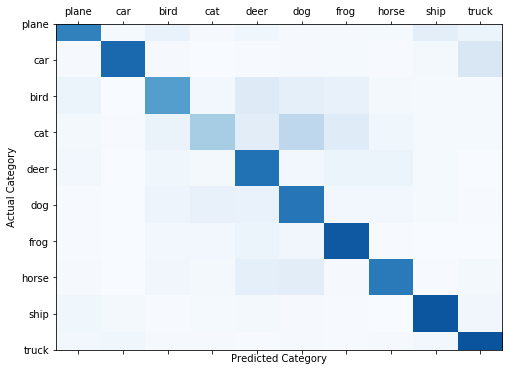

Category   - Accuracy
plane      - 68.5
car        - 78.0
bird       - 57.0
cat        - 34.9
deer       - 74.9
dog        - 73.0
frog       - 84.1
horse      - 71.1
ship       - 85.4
truck      - 86.0

Selected workers

[ 14  22  32  53  34  37  33  36  68  86  77  15 100  73   5]
Worker 14 : is  Stealthy_Attacker
Worker 22 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 37 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 68 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 77 : is  Honest
Worker 15 : is  Honest
Worker 100 : is  Honest
Worker 73 : is  Honest
Worker 5 : is  Honest

 | Global Training Round : 15 |


Worker 14 starts training in Global Round:15 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  15


Train Epoch: 1 [0/500	(1%)]	Loss: 1.340877
Train Epoch: 1 [400/500	(81%)]	Loss: 1.115813
Train Epoch: 2 [0/500	(1%)]	Loss: 0.624819
Train Epoch: 2 [400/500	(81%)]	Loss: 0.720222
Train Epoch: 3 [0/500	(1%)]	Loss: 0.626088
Train Epoch: 3 [400/500	(81%)]	Loss: 0.497394
Train Epoch: 4 [0/500	(1%)]	Loss: 0.470658
Train Epoch: 4 [400/500	(81%)]	Loss: 0.651900
Train Epoch: 5 [0/500	(1%)]	Loss: 0.365011
Train Epoch: 5 [400/500	(81%)]	Loss: 0.373223

Performed attacks 1
Worker 14 ends training in Global Round:15 |

Worker 22 starts training in Global Round:15 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  15


Train Epoch: 1 [0/500	(1%)]	Loss: 1.218028
Train Epoch: 1 [400/500	(81%)]	Loss: 0.930948
Train Epoch: 2 [0/500	(1%)]	Loss: 0.795591
Train Epoch: 2 [400/500	(81%)]	Loss: 0.771652
Train Epoch: 3 [0/500	(1%)]	Loss: 0.606842
Train Epoch: 3 [400/500	(81%)]	Loss: 0.701638
Train Epoch: 4 [0/500	(1%)]	Loss: 0.555270
Train Epoch: 4 [400/500	(81%)]	Loss: 0.497874
Train Epoch: 5 [0/500	(1%)]	Loss: 0.279494
Train Epoch: 5 [400/500	(81%)]	Loss: 0.476420

Performed attacks 2
Worker 22 ends training in Global Round:15 |

Worker 32 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.097349
Train Epoch: 1 [400/500	(81%)]	Loss: 1.045191
Train Epoch: 2 [0/500	(1%)]	Loss: 0.687310
Train Epoch: 2 [400/500	(81%)]	Loss: 0.835179
Train Epoch: 3 [0/500	(1%)]	Loss: 0.596993
Train Epoch: 3 [400/500	(81%)]	Loss: 0.718423
Train Epoch: 4 [0/500	(1%)]	Loss: 0.382634
Train Epoch: 4 [400/500	(81%)]	Loss: 0.796367
Train Epoch: 5 [0/500	(1%)]	Loss: 0.446310
Train Epoch: 5 [400/500	(81%)]	Loss: 0.674172

Worker 32 ends training in Global Round:15 |

Worker 53 starts training in Global Round:15 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  15


Train Epoch: 1 [0/500	(1%)]	Loss: 1.491620
Train Epoch: 1 [400/500	(81%)]	Loss: 1.019743
Train Epoch: 2 [0/500	(1%)]	Loss: 0.780079
Train Epoch: 2 [400/500	(81%)]	Loss: 0.917845
Train Epoch: 3 [0/500	(1%)]	Loss: 0.824008
Train Epoch: 3 [400/500	(81%)]	Loss: 0.708268
Train Epoch: 4 [0/500	(1%)]	Loss: 0.525393
Train Epoch: 4 [400/500	(81%)]	Loss: 0.510044
Train Epoch: 5 [0/500	(1%)]	Loss: 0.393477
Train Epoch: 5 [400/500	(81%)]	Loss: 0.694787

Performed attacks 3
Worker 53 ends training in Global Round:15 |

Worker 34 starts training in Global Round:15 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  15


Train Epoch: 1 [0/500	(1%)]	Loss: 1.148861
Train Epoch: 1 [400/500	(81%)]	Loss: 0.941772
Train Epoch: 2 [0/500	(1%)]	Loss: 0.507912
Train Epoch: 2 [400/500	(81%)]	Loss: 0.790192
Train Epoch: 3 [0/500	(1%)]	Loss: 0.741477
Train Epoch: 3 [400/500	(81%)]	Loss: 0.675373
Train Epoch: 4 [0/500	(1%)]	Loss: 0.666800
Train Epoch: 4 [400/500	(81%)]	Loss: 0.570463
Train Epoch: 5 [0/500	(1%)]	Loss: 0.405552
Train Epoch: 5 [400/500	(81%)]	Loss: 0.660239

Performed attacks 4
Worker 34 ends training in Global Round:15 |

Worker 37 starts training in Global Round:15 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  15


Train Epoch: 1 [0/500	(1%)]	Loss: 1.243873
Train Epoch: 1 [400/500	(81%)]	Loss: 1.186402
Train Epoch: 2 [0/500	(1%)]	Loss: 0.736248
Train Epoch: 2 [400/500	(81%)]	Loss: 0.722697
Train Epoch: 3 [0/500	(1%)]	Loss: 0.605283
Train Epoch: 3 [400/500	(81%)]	Loss: 0.665590
Train Epoch: 4 [0/500	(1%)]	Loss: 0.569778
Train Epoch: 4 [400/500	(81%)]	Loss: 0.499694
Train Epoch: 5 [0/500	(1%)]	Loss: 0.446039
Train Epoch: 5 [400/500	(81%)]	Loss: 0.340415

Performed attacks 5
Worker 37 ends training in Global Round:15 |

Worker 33 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.888523
Train Epoch: 1 [400/500	(81%)]	Loss: 0.971255
Train Epoch: 2 [0/500	(1%)]	Loss: 0.651877
Train Epoch: 2 [400/500	(81%)]	Loss: 0.965451
Train Epoch: 3 [0/500	(1%)]	Loss: 0.681522
Train Epoch: 3 [400/500	(81%)]	Loss: 0.743359
Train Epoch: 4 [0/500	(1%)]	Loss: 0.558133
Train Epoch: 4 [400/500	(81%)]	Loss: 0.487554
Train Epoch: 5 [0/500	(1%)]	Loss: 0.442171
Train Epoch: 5 [400/500	(81%)]	Loss: 0.716098

Worker 33 ends training in Global Round:15 |

Worker 36 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.922288
Train Epoch: 1 [400/500	(81%)]	Loss: 1.103696
Train Epoch: 2 [0/500	(1%)]	Loss: 0.586892
Train Epoch: 2 [400/500	(81%)]	Loss: 0.787622
Train Epoch: 3 [0/500	(1%)]	Loss: 0.601487
Train Epoch: 3 [400/500	(81%)]	Loss: 0.612207
Train Epoch: 4 [0/500	(1%)]	Loss: 0.497316
Train Epoch: 4 [400/500	(81%)]	Loss: 0.515090
Train Epoch: 5 [0/500	(1%)]	Loss: 0.305013
Train Epoch: 5 [400/500	(81%)]	Loss: 0.505919

Worker 36 ends training in Global Round:15 |

Worker 68 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.920291
Train Epoch: 1 [400/500	(81%)]	Loss: 1.121603
Train Epoch: 2 [0/500	(1%)]	Loss: 0.600560
Train Epoch: 2 [400/500	(81%)]	Loss: 0.686202
Train Epoch: 3 [0/500	(1%)]	Loss: 0.637003
Train Epoch: 3 [400/500	(81%)]	Loss: 0.680261
Train Epoch: 4 [0/500	(1%)]	Loss: 0.537471
Train Epoch: 4 [400/500	(81%)]	Loss: 0.552121
Train Epoch: 5 [0/500	(1%)]	Loss: 0.613694
Train Epoch: 5 [400/500	(81%)]	Loss: 0.544177

Worker 68 ends training in Global Round:15 |

Worker 86 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.027328
Train Epoch: 1 [400/500	(81%)]	Loss: 0.874468
Train Epoch: 2 [0/500	(1%)]	Loss: 0.621790
Train Epoch: 2 [400/500	(81%)]	Loss: 1.009819
Train Epoch: 3 [0/500	(1%)]	Loss: 0.473783
Train Epoch: 3 [400/500	(81%)]	Loss: 0.482408
Train Epoch: 4 [0/500	(1%)]	Loss: 0.454814
Train Epoch: 4 [400/500	(81%)]	Loss: 0.587269
Train Epoch: 5 [0/500	(1%)]	Loss: 0.386354
Train Epoch: 5 [400/500	(81%)]	Loss: 0.619084

Worker 86 ends training in Global Round:15 |

Worker 77 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.857695
Train Epoch: 1 [400/500	(81%)]	Loss: 1.238851
Train Epoch: 2 [0/500	(1%)]	Loss: 0.526244
Train Epoch: 2 [400/500	(81%)]	Loss: 0.838638
Train Epoch: 3 [0/500	(1%)]	Loss: 0.501760
Train Epoch: 3 [400/500	(81%)]	Loss: 0.689827
Train Epoch: 4 [0/500	(1%)]	Loss: 0.462997
Train Epoch: 4 [400/500	(81%)]	Loss: 0.641266
Train Epoch: 5 [0/500	(1%)]	Loss: 0.415044
Train Epoch: 5 [400/500	(81%)]	Loss: 0.498730

Worker 77 ends training in Global Round:15 |

Worker 15 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.861337
Train Epoch: 1 [400/500	(81%)]	Loss: 0.973583
Train Epoch: 2 [0/500	(1%)]	Loss: 0.559438
Train Epoch: 2 [400/500	(81%)]	Loss: 0.790290
Train Epoch: 3 [0/500	(1%)]	Loss: 0.676259
Train Epoch: 3 [400/500	(81%)]	Loss: 0.787773
Train Epoch: 4 [0/500	(1%)]	Loss: 0.615452
Train Epoch: 4 [400/500	(81%)]	Loss: 0.615333
Train Epoch: 5 [0/500	(1%)]	Loss: 0.566139
Train Epoch: 5 [400/500	(81%)]	Loss: 0.528484

Worker 15 ends training in Global Round:15 |

Worker 100 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.909901
Train Epoch: 1 [400/500	(81%)]	Loss: 0.969515
Train Epoch: 2 [0/500	(1%)]	Loss: 0.665142
Train Epoch: 2 [400/500	(81%)]	Loss: 0.867985
Train Epoch: 3 [0/500	(1%)]	Loss: 0.412041
Train Epoch: 3 [400/500	(81%)]	Loss: 0.570258
Train Epoch: 4 [0/500	(1%)]	Loss: 0.343524
Train Epoch: 4 [400/500	(81%)]	Loss: 0.430084
Train Epoch: 5 [0/500	(1%)]	Loss: 0.393730
Train Epoch: 5 [400/500	(81%)]	Loss: 0.536173

Worker 100 ends training in Global Round:15 |

Worker 73 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.627506
Train Epoch: 1 [400/500	(81%)]	Loss: 0.829470
Train Epoch: 2 [0/500	(1%)]	Loss: 0.495116
Train Epoch: 2 [400/500	(81%)]	Loss: 0.629713
Train Epoch: 3 [0/500	(1%)]	Loss: 0.643938
Train Epoch: 3 [400/500	(81%)]	Loss: 0.588408
Train Epoch: 4 [0/500	(1%)]	Loss: 0.644069
Train Epoch: 4 [400/500	(81%)]	Loss: 0.499993
Train Epoch: 5 [0/500	(1%)]	Loss: 0.383937
Train Epoch: 5 [400/500	(81%)]	Loss: 0.669402

Worker 73 ends training in Global Round:15 |

Worker 5 starts training in Global Round:15 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.633331
Train Epoch: 1 [400/500	(81%)]	Loss: 1.011890
Train Epoch: 2 [0/500	(1%)]	Loss: 0.678204
Train Epoch: 2 [400/500	(81%)]	Loss: 0.644796
Train Epoch: 3 [0/500	(1%)]	Loss: 0.601841
Train Epoch: 3 [400/500	(81%)]	Loss: 0.592831
Train Epoch: 4 [0/500	(1%)]	Loss: 0.469283
Train Epoch: 4 [400/500	(81%)]	Loss: 0.567537
Train Epoch: 5 [0/500	(1%)]	Loss: 0.432393
Train Epoch: 5 [400/500	(81%)]	Loss: 0.389847

Worker 5 ends training in Global Round:15 |
Last layer biases  [array([ 0.03142256, -0.02754686, -0.01617474,  0.03760925,  0.04018794,
       -0.01494762,  0.04099867, -0.0244072 , -0.01493939, -0.03630133],
      dtype=float32), array([ 0.0339703 , -0.02578232, -0.0167361 ,  0.03599646,  0.03985617,
       -0.01851924,  0.0422527 , -0.02337122, -0.01595096, -0.03581448],
      dtype=float32), array([ 0.03313455, -0.02569767, -0.02040911,  0.03116338,  0.03590094,
       -0.01785651,  0.04232564, -0.00543126, -0.01725272, -0.0399759 ],
      dtype

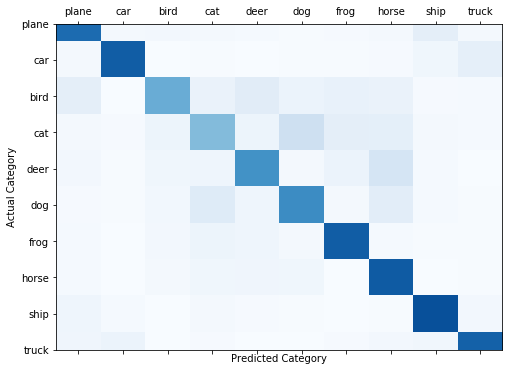

Category   - Accuracy
plane      - 77.3
car        - 82.8
bird       - 50.7
cat        - 44.1
deer       - 62.3
dog        - 64.5
frog       - 82.5
horse      - 83.5
ship       - 87.5
truck      - 81.1

Selected workers

[100  60  15  17  23  72  24  50  53  13  81  25  62  22  92]
Worker 100 : is  Honest
Worker 60 : is  Honest
Worker 15 : is  Honest
Worker 17 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 72 : is  Stealthy_Attacker
Worker 24 : is  Honest
Worker 50 : is  Stealthy_Attacker
Worker 53 : is  Stealthy_Attacker
Worker 13 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 25 : is  Honest
Worker 62 : is  Honest
Worker 22 : is  Stealthy_Attacker
Worker 92 : is  Stealthy_Attacker

 | Global Training Round : 16 |


Worker 100 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.553003
Train Epoch: 1 [400/500	(81%)]	Loss: 0.402651
Train Epoch: 2 [0/500	(1%)]	Loss: 0.522354
Train Epoch: 2 [400/500	(81%)]	Loss: 0.660199
Train Epoch: 3 [0/500	(1%)]	Loss: 0.311380
Train Epoch: 3 [400/500	(81%)]	Loss: 0.536891
Train Epoch: 4 [0/500	(1%)]	Loss: 0.339012
Train Epoch: 4 [400/500	(81%)]	Loss: 0.391595
Train Epoch: 5 [0/500	(1%)]	Loss: 0.345528
Train Epoch: 5 [400/500	(81%)]	Loss: 0.418540

Worker 100 ends training in Global Round:16 |

Worker 60 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.894318
Train Epoch: 1 [400/500	(81%)]	Loss: 0.761014
Train Epoch: 2 [0/500	(1%)]	Loss: 0.663170
Train Epoch: 2 [400/500	(81%)]	Loss: 0.708066
Train Epoch: 3 [0/500	(1%)]	Loss: 0.504080
Train Epoch: 3 [400/500	(81%)]	Loss: 0.764911
Train Epoch: 4 [0/500	(1%)]	Loss: 0.506448
Train Epoch: 4 [400/500	(81%)]	Loss: 0.462030
Train Epoch: 5 [0/500	(1%)]	Loss: 0.360126
Train Epoch: 5 [400/500	(81%)]	Loss: 0.517479

Worker 60 ends training in Global Round:16 |

Worker 15 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.857394
Train Epoch: 1 [400/500	(81%)]	Loss: 0.849875
Train Epoch: 2 [0/500	(1%)]	Loss: 0.645181
Train Epoch: 2 [400/500	(81%)]	Loss: 0.691691
Train Epoch: 3 [0/500	(1%)]	Loss: 0.478551
Train Epoch: 3 [400/500	(81%)]	Loss: 0.395958
Train Epoch: 4 [0/500	(1%)]	Loss: 0.365787
Train Epoch: 4 [400/500	(81%)]	Loss: 0.565226
Train Epoch: 5 [0/500	(1%)]	Loss: 0.381459
Train Epoch: 5 [400/500	(81%)]	Loss: 0.421422

Worker 15 ends training in Global Round:16 |

Worker 17 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.916337
Train Epoch: 1 [400/500	(81%)]	Loss: 1.001115
Train Epoch: 2 [0/500	(1%)]	Loss: 0.735115
Train Epoch: 2 [400/500	(81%)]	Loss: 0.812535
Train Epoch: 3 [0/500	(1%)]	Loss: 0.588184
Train Epoch: 3 [400/500	(81%)]	Loss: 0.607336
Train Epoch: 4 [0/500	(1%)]	Loss: 0.605604
Train Epoch: 4 [400/500	(81%)]	Loss: 0.721844
Train Epoch: 5 [0/500	(1%)]	Loss: 0.510373
Train Epoch: 5 [400/500	(81%)]	Loss: 0.653423

Worker 17 ends training in Global Round:16 |

Worker 23 starts training in Global Round:16 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  16


Train Epoch: 1 [0/500	(1%)]	Loss: 0.849085
Train Epoch: 1 [400/500	(81%)]	Loss: 1.033996
Train Epoch: 2 [0/500	(1%)]	Loss: 0.570092
Train Epoch: 2 [400/500	(81%)]	Loss: 0.638541
Train Epoch: 3 [0/500	(1%)]	Loss: 0.473311
Train Epoch: 3 [400/500	(81%)]	Loss: 0.436285
Train Epoch: 4 [0/500	(1%)]	Loss: 0.368963
Train Epoch: 4 [400/500	(81%)]	Loss: 0.438688
Train Epoch: 5 [0/500	(1%)]	Loss: 0.281207
Train Epoch: 5 [400/500	(81%)]	Loss: 0.462606

Performed attacks 1
Worker 23 ends training in Global Round:16 |

Worker 72 starts training in Global Round:16 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  16


Train Epoch: 1 [0/500	(1%)]	Loss: 1.028086
Train Epoch: 1 [400/500	(81%)]	Loss: 1.057175
Train Epoch: 2 [0/500	(1%)]	Loss: 0.793966
Train Epoch: 2 [400/500	(81%)]	Loss: 0.766898
Train Epoch: 3 [0/500	(1%)]	Loss: 0.646952
Train Epoch: 3 [400/500	(81%)]	Loss: 0.638171
Train Epoch: 4 [0/500	(1%)]	Loss: 0.503093
Train Epoch: 4 [400/500	(81%)]	Loss: 0.409151
Train Epoch: 5 [0/500	(1%)]	Loss: 0.408122
Train Epoch: 5 [400/500	(81%)]	Loss: 0.308618

Performed attacks 2
Worker 72 ends training in Global Round:16 |

Worker 24 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.718569
Train Epoch: 1 [400/500	(81%)]	Loss: 0.653006
Train Epoch: 2 [0/500	(1%)]	Loss: 0.578118
Train Epoch: 2 [400/500	(81%)]	Loss: 0.500832
Train Epoch: 3 [0/500	(1%)]	Loss: 0.318337
Train Epoch: 3 [400/500	(81%)]	Loss: 0.512409
Train Epoch: 4 [0/500	(1%)]	Loss: 0.371645
Train Epoch: 4 [400/500	(81%)]	Loss: 0.326144
Train Epoch: 5 [0/500	(1%)]	Loss: 0.265363
Train Epoch: 5 [400/500	(81%)]	Loss: 0.462746

Worker 24 ends training in Global Round:16 |

Worker 50 starts training in Global Round:16 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  16


Train Epoch: 1 [0/500	(1%)]	Loss: 1.117765
Train Epoch: 1 [400/500	(81%)]	Loss: 1.064983
Train Epoch: 2 [0/500	(1%)]	Loss: 0.713731
Train Epoch: 2 [400/500	(81%)]	Loss: 0.919529
Train Epoch: 3 [0/500	(1%)]	Loss: 0.634619
Train Epoch: 3 [400/500	(81%)]	Loss: 0.592717
Train Epoch: 4 [0/500	(1%)]	Loss: 0.530182
Train Epoch: 4 [400/500	(81%)]	Loss: 0.592341
Train Epoch: 5 [0/500	(1%)]	Loss: 0.493088
Train Epoch: 5 [400/500	(81%)]	Loss: 0.562300

Performed attacks 3
Worker 50 ends training in Global Round:16 |

Worker 53 starts training in Global Round:16 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  16


Train Epoch: 1 [0/500	(1%)]	Loss: 1.479661
Train Epoch: 1 [400/500	(81%)]	Loss: 1.047475
Train Epoch: 2 [0/500	(1%)]	Loss: 0.470343
Train Epoch: 2 [400/500	(81%)]	Loss: 0.814202
Train Epoch: 3 [0/500	(1%)]	Loss: 0.619994
Train Epoch: 3 [400/500	(81%)]	Loss: 0.710310
Train Epoch: 4 [0/500	(1%)]	Loss: 0.537231
Train Epoch: 4 [400/500	(81%)]	Loss: 0.438736
Train Epoch: 5 [0/500	(1%)]	Loss: 0.567329
Train Epoch: 5 [400/500	(81%)]	Loss: 0.569001

Performed attacks 4
Worker 53 ends training in Global Round:16 |

Worker 13 starts training in Global Round:16 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  16


Train Epoch: 1 [0/500	(1%)]	Loss: 1.264734
Train Epoch: 1 [400/500	(81%)]	Loss: 0.899102
Train Epoch: 2 [0/500	(1%)]	Loss: 0.509593
Train Epoch: 2 [400/500	(81%)]	Loss: 0.950687
Train Epoch: 3 [0/500	(1%)]	Loss: 0.629136
Train Epoch: 3 [400/500	(81%)]	Loss: 0.688128
Train Epoch: 4 [0/500	(1%)]	Loss: 0.322700
Train Epoch: 4 [400/500	(81%)]	Loss: 0.542771
Train Epoch: 5 [0/500	(1%)]	Loss: 0.511495
Train Epoch: 5 [400/500	(81%)]	Loss: 0.546854

Performed attacks 5
Worker 13 ends training in Global Round:16 |

Worker 81 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.750453
Train Epoch: 1 [400/500	(81%)]	Loss: 0.992005
Train Epoch: 2 [0/500	(1%)]	Loss: 0.707412
Train Epoch: 2 [400/500	(81%)]	Loss: 0.645113
Train Epoch: 3 [0/500	(1%)]	Loss: 0.492855
Train Epoch: 3 [400/500	(81%)]	Loss: 0.528680
Train Epoch: 4 [0/500	(1%)]	Loss: 0.408853
Train Epoch: 4 [400/500	(81%)]	Loss: 0.446547
Train Epoch: 5 [0/500	(1%)]	Loss: 0.313281
Train Epoch: 5 [400/500	(81%)]	Loss: 0.385632

Worker 81 ends training in Global Round:16 |

Worker 25 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.708893
Train Epoch: 1 [400/500	(81%)]	Loss: 0.967045
Train Epoch: 2 [0/500	(1%)]	Loss: 0.711577
Train Epoch: 2 [400/500	(81%)]	Loss: 0.745475
Train Epoch: 3 [0/500	(1%)]	Loss: 0.556857
Train Epoch: 3 [400/500	(81%)]	Loss: 0.781624
Train Epoch: 4 [0/500	(1%)]	Loss: 0.623063
Train Epoch: 4 [400/500	(81%)]	Loss: 0.390204
Train Epoch: 5 [0/500	(1%)]	Loss: 0.412769
Train Epoch: 5 [400/500	(81%)]	Loss: 0.559524

Worker 25 ends training in Global Round:16 |

Worker 62 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.821069
Train Epoch: 1 [400/500	(81%)]	Loss: 1.108268
Train Epoch: 2 [0/500	(1%)]	Loss: 0.692214
Train Epoch: 2 [400/500	(81%)]	Loss: 0.740560
Train Epoch: 3 [0/500	(1%)]	Loss: 0.647579
Train Epoch: 3 [400/500	(81%)]	Loss: 0.680839
Train Epoch: 4 [0/500	(1%)]	Loss: 0.521497
Train Epoch: 4 [400/500	(81%)]	Loss: 0.514092
Train Epoch: 5 [0/500	(1%)]	Loss: 0.473727
Train Epoch: 5 [400/500	(81%)]	Loss: 0.756419

Worker 62 ends training in Global Round:16 |

Worker 22 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.913605
Train Epoch: 1 [400/500	(81%)]	Loss: 1.125469
Train Epoch: 2 [0/500	(1%)]	Loss: 0.556189
Train Epoch: 2 [400/500	(81%)]	Loss: 0.708810
Train Epoch: 3 [0/500	(1%)]	Loss: 0.668202
Train Epoch: 3 [400/500	(81%)]	Loss: 0.765212
Train Epoch: 4 [0/500	(1%)]	Loss: 0.641070
Train Epoch: 4 [400/500	(81%)]	Loss: 0.673470
Train Epoch: 5 [0/500	(1%)]	Loss: 0.487807
Train Epoch: 5 [400/500	(81%)]	Loss: 0.418131

Worker 22 ends training in Global Round:16 |

Worker 92 starts training in Global Round:16 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.877281
Train Epoch: 1 [400/500	(81%)]	Loss: 1.085341
Train Epoch: 2 [0/500	(1%)]	Loss: 0.667164
Train Epoch: 2 [400/500	(81%)]	Loss: 0.806317
Train Epoch: 3 [0/500	(1%)]	Loss: 0.652051
Train Epoch: 3 [400/500	(81%)]	Loss: 0.442739
Train Epoch: 4 [0/500	(1%)]	Loss: 0.482818
Train Epoch: 4 [400/500	(81%)]	Loss: 0.596837
Train Epoch: 5 [0/500	(1%)]	Loss: 0.315313
Train Epoch: 5 [400/500	(81%)]	Loss: 0.539259

Worker 92 ends training in Global Round:16 |
Last layer biases  [array([ 0.03402202, -0.02885811, -0.01945356,  0.03239259,  0.03848035,
       -0.01965431,  0.04233816, -0.00683963, -0.01703338, -0.03949279],
      dtype=float32), array([ 0.03088498, -0.02975138, -0.01818081,  0.03297213,  0.03737206,
       -0.0189164 ,  0.04132509, -0.00445672, -0.01785511, -0.03749248],
      dtype=float32), array([ 0.0348197 , -0.02633787, -0.01962532,  0.0320704 ,  0.03268148,
       -0.01731625,  0.04079239, -0.00576367, -0.01569908, -0.03972042],
      dtyp

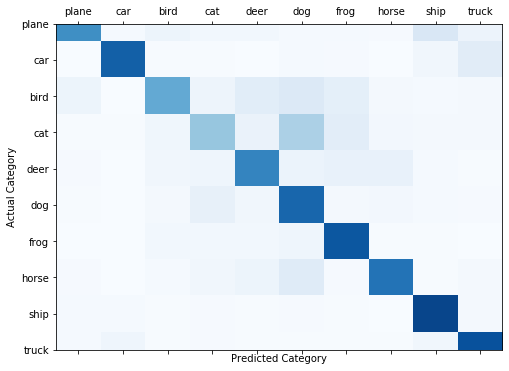

Category   - Accuracy
plane      - 63.6
car        - 81.4
bird       - 52.0
cat        - 39.1
deer       - 67.4
dog        - 79.0
frog       - 85.0
horse      - 73.9
ship       - 91.6
truck      - 87.4

Selected workers

[29 41 90 94 77 76 69 58 60 36 68 93  7 38 11]
Worker 29 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 90 : is  Honest
Worker 94 : is  Stealthy_Attacker
Worker 77 : is  Honest
Worker 76 : is  Honest
Worker 69 : is  Honest
Worker 58 : is  Honest
Worker 60 : is  Honest
Worker 36 : is  Honest
Worker 68 : is  Honest
Worker 93 : is  Honest
Worker 7 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 11 : is  Honest

 | Global Training Round : 17 |


Worker 29 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.651586
Train Epoch: 1 [400/500	(81%)]	Loss: 0.708826
Train Epoch: 2 [0/500	(1%)]	Loss: 0.477446
Train Epoch: 2 [400/500	(81%)]	Loss: 0.801271
Train Epoch: 3 [0/500	(1%)]	Loss: 0.539048
Train Epoch: 3 [400/500	(81%)]	Loss: 0.560107
Train Epoch: 4 [0/500	(1%)]	Loss: 0.551715
Train Epoch: 4 [400/500	(81%)]	Loss: 0.410579
Train Epoch: 5 [0/500	(1%)]	Loss: 0.299053
Train Epoch: 5 [400/500	(81%)]	Loss: 0.319477

Worker 29 ends training in Global Round:17 |

Worker 41 starts training in Global Round:17 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  17


Train Epoch: 1 [0/500	(1%)]	Loss: 1.487205
Train Epoch: 1 [400/500	(81%)]	Loss: 1.062772
Train Epoch: 2 [0/500	(1%)]	Loss: 0.656067
Train Epoch: 2 [400/500	(81%)]	Loss: 0.791075
Train Epoch: 3 [0/500	(1%)]	Loss: 0.604469
Train Epoch: 3 [400/500	(81%)]	Loss: 0.522996
Train Epoch: 4 [0/500	(1%)]	Loss: 0.458435
Train Epoch: 4 [400/500	(81%)]	Loss: 0.544013
Train Epoch: 5 [0/500	(1%)]	Loss: 0.605983
Train Epoch: 5 [400/500	(81%)]	Loss: 0.668025

Performed attacks 1
Worker 41 ends training in Global Round:17 |

Worker 90 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.804879
Train Epoch: 1 [400/500	(81%)]	Loss: 0.800505
Train Epoch: 2 [0/500	(1%)]	Loss: 0.459435
Train Epoch: 2 [400/500	(81%)]	Loss: 0.657265
Train Epoch: 3 [0/500	(1%)]	Loss: 0.376356
Train Epoch: 3 [400/500	(81%)]	Loss: 0.778427
Train Epoch: 4 [0/500	(1%)]	Loss: 0.312777
Train Epoch: 4 [400/500	(81%)]	Loss: 0.672272
Train Epoch: 5 [0/500	(1%)]	Loss: 0.444602
Train Epoch: 5 [400/500	(81%)]	Loss: 0.471437

Worker 90 ends training in Global Round:17 |

Worker 94 starts training in Global Round:17 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  17


Train Epoch: 1 [0/500	(1%)]	Loss: 1.334658
Train Epoch: 1 [400/500	(81%)]	Loss: 1.116749
Train Epoch: 2 [0/500	(1%)]	Loss: 0.508713
Train Epoch: 2 [400/500	(81%)]	Loss: 0.746349
Train Epoch: 3 [0/500	(1%)]	Loss: 0.483657
Train Epoch: 3 [400/500	(81%)]	Loss: 0.602818
Train Epoch: 4 [0/500	(1%)]	Loss: 0.488102
Train Epoch: 4 [400/500	(81%)]	Loss: 0.613162
Train Epoch: 5 [0/500	(1%)]	Loss: 0.292075
Train Epoch: 5 [400/500	(81%)]	Loss: 0.407821

Performed attacks 2
Worker 94 ends training in Global Round:17 |

Worker 77 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.867963
Train Epoch: 1 [400/500	(81%)]	Loss: 1.091915
Train Epoch: 2 [0/500	(1%)]	Loss: 0.614920
Train Epoch: 2 [400/500	(81%)]	Loss: 0.792349
Train Epoch: 3 [0/500	(1%)]	Loss: 0.576988
Train Epoch: 3 [400/500	(81%)]	Loss: 0.711312
Train Epoch: 4 [0/500	(1%)]	Loss: 0.359114
Train Epoch: 4 [400/500	(81%)]	Loss: 0.646685
Train Epoch: 5 [0/500	(1%)]	Loss: 0.263276
Train Epoch: 5 [400/500	(81%)]	Loss: 0.629537

Worker 77 ends training in Global Round:17 |

Worker 76 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.807964
Train Epoch: 1 [400/500	(81%)]	Loss: 0.999279
Train Epoch: 2 [0/500	(1%)]	Loss: 0.564654
Train Epoch: 2 [400/500	(81%)]	Loss: 0.580832
Train Epoch: 3 [0/500	(1%)]	Loss: 0.610535
Train Epoch: 3 [400/500	(81%)]	Loss: 0.635980
Train Epoch: 4 [0/500	(1%)]	Loss: 0.317299
Train Epoch: 4 [400/500	(81%)]	Loss: 0.448629
Train Epoch: 5 [0/500	(1%)]	Loss: 0.299607
Train Epoch: 5 [400/500	(81%)]	Loss: 0.327528

Worker 76 ends training in Global Round:17 |

Worker 69 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 1.117419
Train Epoch: 1 [400/500	(81%)]	Loss: 0.900858
Train Epoch: 2 [0/500	(1%)]	Loss: 0.692043
Train Epoch: 2 [400/500	(81%)]	Loss: 0.744094
Train Epoch: 3 [0/500	(1%)]	Loss: 0.617735
Train Epoch: 3 [400/500	(81%)]	Loss: 0.554808
Train Epoch: 4 [0/500	(1%)]	Loss: 0.497841
Train Epoch: 4 [400/500	(81%)]	Loss: 0.569938
Train Epoch: 5 [0/500	(1%)]	Loss: 0.320848
Train Epoch: 5 [400/500	(81%)]	Loss: 0.555348

Worker 69 ends training in Global Round:17 |

Worker 58 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.772666
Train Epoch: 1 [400/500	(81%)]	Loss: 0.898639
Train Epoch: 2 [0/500	(1%)]	Loss: 0.697317
Train Epoch: 2 [400/500	(81%)]	Loss: 0.642711
Train Epoch: 3 [0/500	(1%)]	Loss: 0.448935
Train Epoch: 3 [400/500	(81%)]	Loss: 0.642543
Train Epoch: 4 [0/500	(1%)]	Loss: 0.425504
Train Epoch: 4 [400/500	(81%)]	Loss: 0.440352
Train Epoch: 5 [0/500	(1%)]	Loss: 0.411266
Train Epoch: 5 [400/500	(81%)]	Loss: 0.382973

Worker 58 ends training in Global Round:17 |

Worker 60 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.690107
Train Epoch: 1 [400/500	(81%)]	Loss: 0.561609
Train Epoch: 2 [0/500	(1%)]	Loss: 0.513820
Train Epoch: 2 [400/500	(81%)]	Loss: 0.530925
Train Epoch: 3 [0/500	(1%)]	Loss: 0.497916
Train Epoch: 3 [400/500	(81%)]	Loss: 0.665365
Train Epoch: 4 [0/500	(1%)]	Loss: 0.319230
Train Epoch: 4 [400/500	(81%)]	Loss: 0.453818
Train Epoch: 5 [0/500	(1%)]	Loss: 0.302747
Train Epoch: 5 [400/500	(81%)]	Loss: 0.419506

Worker 60 ends training in Global Round:17 |

Worker 36 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.800963
Train Epoch: 1 [400/500	(81%)]	Loss: 0.655526
Train Epoch: 2 [0/500	(1%)]	Loss: 0.668903
Train Epoch: 2 [400/500	(81%)]	Loss: 0.533835
Train Epoch: 3 [0/500	(1%)]	Loss: 0.411721
Train Epoch: 3 [400/500	(81%)]	Loss: 0.555147
Train Epoch: 4 [0/500	(1%)]	Loss: 0.319084
Train Epoch: 4 [400/500	(81%)]	Loss: 0.538648
Train Epoch: 5 [0/500	(1%)]	Loss: 0.301655
Train Epoch: 5 [400/500	(81%)]	Loss: 0.327186

Worker 36 ends training in Global Round:17 |

Worker 68 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.756972
Train Epoch: 1 [400/500	(81%)]	Loss: 1.075534
Train Epoch: 2 [0/500	(1%)]	Loss: 0.512153
Train Epoch: 2 [400/500	(81%)]	Loss: 0.570406
Train Epoch: 3 [0/500	(1%)]	Loss: 0.561597
Train Epoch: 3 [400/500	(81%)]	Loss: 0.497472
Train Epoch: 4 [0/500	(1%)]	Loss: 0.430108
Train Epoch: 4 [400/500	(81%)]	Loss: 0.571105
Train Epoch: 5 [0/500	(1%)]	Loss: 0.487304
Train Epoch: 5 [400/500	(81%)]	Loss: 0.531430

Worker 68 ends training in Global Round:17 |

Worker 93 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.962322
Train Epoch: 1 [400/500	(81%)]	Loss: 0.960080
Train Epoch: 2 [0/500	(1%)]	Loss: 0.784782
Train Epoch: 2 [400/500	(81%)]	Loss: 0.732181
Train Epoch: 3 [0/500	(1%)]	Loss: 0.500597
Train Epoch: 3 [400/500	(81%)]	Loss: 0.653605
Train Epoch: 4 [0/500	(1%)]	Loss: 0.586132
Train Epoch: 4 [400/500	(81%)]	Loss: 0.460751
Train Epoch: 5 [0/500	(1%)]	Loss: 0.373320
Train Epoch: 5 [400/500	(81%)]	Loss: 0.491817

Worker 93 ends training in Global Round:17 |

Worker 7 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.855086
Train Epoch: 1 [400/500	(81%)]	Loss: 0.920337
Train Epoch: 2 [0/500	(1%)]	Loss: 0.450241
Train Epoch: 2 [400/500	(81%)]	Loss: 0.694464
Train Epoch: 3 [0/500	(1%)]	Loss: 0.447807
Train Epoch: 3 [400/500	(81%)]	Loss: 0.481096
Train Epoch: 4 [0/500	(1%)]	Loss: 0.367980
Train Epoch: 4 [400/500	(81%)]	Loss: 0.478009
Train Epoch: 5 [0/500	(1%)]	Loss: 0.259314
Train Epoch: 5 [400/500	(81%)]	Loss: 0.468976

Worker 7 ends training in Global Round:17 |

Worker 38 starts training in Global Round:17 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  17


Train Epoch: 1 [0/500	(1%)]	Loss: 1.388341
Train Epoch: 1 [400/500	(81%)]	Loss: 0.943380
Train Epoch: 2 [0/500	(1%)]	Loss: 0.552000
Train Epoch: 2 [400/500	(81%)]	Loss: 0.730287
Train Epoch: 3 [0/500	(1%)]	Loss: 0.697993
Train Epoch: 3 [400/500	(81%)]	Loss: 0.598108
Train Epoch: 4 [0/500	(1%)]	Loss: 0.457852
Train Epoch: 4 [400/500	(81%)]	Loss: 0.640517
Train Epoch: 5 [0/500	(1%)]	Loss: 0.494367
Train Epoch: 5 [400/500	(81%)]	Loss: 0.342957

Performed attacks 3
Worker 38 ends training in Global Round:17 |

Worker 11 starts training in Global Round:17 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.642524
Train Epoch: 1 [400/500	(81%)]	Loss: 0.693283
Train Epoch: 2 [0/500	(1%)]	Loss: 0.523291
Train Epoch: 2 [400/500	(81%)]	Loss: 1.023855
Train Epoch: 3 [0/500	(1%)]	Loss: 0.420508
Train Epoch: 3 [400/500	(81%)]	Loss: 0.475462
Train Epoch: 4 [0/500	(1%)]	Loss: 0.381336
Train Epoch: 4 [400/500	(81%)]	Loss: 0.601793
Train Epoch: 5 [0/500	(1%)]	Loss: 0.463342
Train Epoch: 5 [400/500	(81%)]	Loss: 0.580903

Worker 11 ends training in Global Round:17 |
Last layer biases  [array([ 0.03093811, -0.02846511, -0.01749383,  0.03373377,  0.03936505,
       -0.02194574,  0.0403436 , -0.00587067, -0.0188086 , -0.03589521],
      dtype=float32), array([ 0.03435555, -0.02651837, -0.01591315,  0.03850159,  0.04263192,
       -0.01902349,  0.04119518, -0.02622459, -0.01315997, -0.03994333],
      dtype=float32), array([ 0.02888376, -0.02995018, -0.0138092 ,  0.02993837,  0.03458023,
       -0.017226  ,  0.04126135, -0.00422881, -0.01419468, -0.03935343],
      dtyp

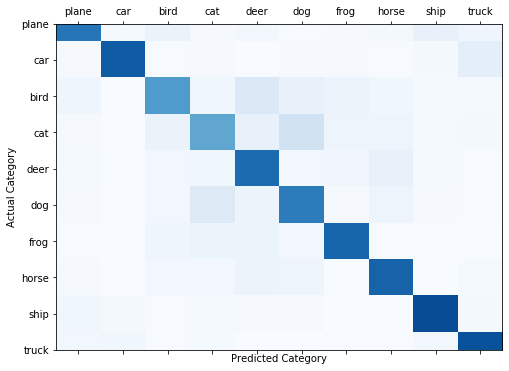

Category   - Accuracy
plane      - 72.9
car        - 83.0
bird       - 58.4
cat        - 53.4
deer       - 77.0
dog        - 70.6
frog       - 79.4
horse      - 80.4
ship       - 88.9
truck      - 86.8

Selected workers

[ 22  54  15  33  17  69  39  89   1  73  82  40  37  93 100]
Worker 22 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 15 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 17 : is  Honest
Worker 69 : is  Honest
Worker 39 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 1 : is  Honest
Worker 73 : is  Honest
Worker 82 : is  Honest
Worker 40 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 93 : is  Honest
Worker 100 : is  Honest

 | Global Training Round : 18 |


Worker 22 starts training in Global Round:18 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  18


Train Epoch: 1 [0/500	(1%)]	Loss: 1.054074
Train Epoch: 1 [400/500	(81%)]	Loss: 0.952366
Train Epoch: 2 [0/500	(1%)]	Loss: 0.734923
Train Epoch: 2 [400/500	(81%)]	Loss: 0.761235
Train Epoch: 3 [0/500	(1%)]	Loss: 0.520992
Train Epoch: 3 [400/500	(81%)]	Loss: 0.788188
Train Epoch: 4 [0/500	(1%)]	Loss: 0.310216
Train Epoch: 4 [400/500	(81%)]	Loss: 0.508394
Train Epoch: 5 [0/500	(1%)]	Loss: 0.382730
Train Epoch: 5 [400/500	(81%)]	Loss: 0.404079

Performed attacks 1
Worker 22 ends training in Global Round:18 |

Worker 54 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.661047
Train Epoch: 1 [400/500	(81%)]	Loss: 0.815072
Train Epoch: 2 [0/500	(1%)]	Loss: 0.671477
Train Epoch: 2 [400/500	(81%)]	Loss: 0.772957
Train Epoch: 3 [0/500	(1%)]	Loss: 0.449629
Train Epoch: 3 [400/500	(81%)]	Loss: 0.577874
Train Epoch: 4 [0/500	(1%)]	Loss: 0.345418
Train Epoch: 4 [400/500	(81%)]	Loss: 0.312906
Train Epoch: 5 [0/500	(1%)]	Loss: 0.298691
Train Epoch: 5 [400/500	(81%)]	Loss: 0.395948

Worker 54 ends training in Global Round:18 |

Worker 15 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.648359
Train Epoch: 1 [400/500	(81%)]	Loss: 0.663503
Train Epoch: 2 [0/500	(1%)]	Loss: 0.427514
Train Epoch: 2 [400/500	(81%)]	Loss: 0.918758
Train Epoch: 3 [0/500	(1%)]	Loss: 0.344650
Train Epoch: 3 [400/500	(81%)]	Loss: 0.437516
Train Epoch: 4 [0/500	(1%)]	Loss: 0.312008
Train Epoch: 4 [400/500	(81%)]	Loss: 0.361305
Train Epoch: 5 [0/500	(1%)]	Loss: 0.321812
Train Epoch: 5 [400/500	(81%)]	Loss: 0.585983

Worker 15 ends training in Global Round:18 |

Worker 33 starts training in Global Round:18 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  18


Train Epoch: 1 [0/500	(1%)]	Loss: 1.100044
Train Epoch: 1 [400/500	(81%)]	Loss: 1.212827
Train Epoch: 2 [0/500	(1%)]	Loss: 0.567184
Train Epoch: 2 [400/500	(81%)]	Loss: 0.550185
Train Epoch: 3 [0/500	(1%)]	Loss: 0.534063
Train Epoch: 3 [400/500	(81%)]	Loss: 0.484370
Train Epoch: 4 [0/500	(1%)]	Loss: 0.328339
Train Epoch: 4 [400/500	(81%)]	Loss: 0.421369
Train Epoch: 5 [0/500	(1%)]	Loss: 0.286450
Train Epoch: 5 [400/500	(81%)]	Loss: 0.322139

Performed attacks 2
Worker 33 ends training in Global Round:18 |

Worker 17 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.541113
Train Epoch: 1 [400/500	(81%)]	Loss: 0.950440
Train Epoch: 2 [0/500	(1%)]	Loss: 0.568324
Train Epoch: 2 [400/500	(81%)]	Loss: 0.622092
Train Epoch: 3 [0/500	(1%)]	Loss: 0.415577
Train Epoch: 3 [400/500	(81%)]	Loss: 0.794485
Train Epoch: 4 [0/500	(1%)]	Loss: 0.490412
Train Epoch: 4 [400/500	(81%)]	Loss: 0.515698
Train Epoch: 5 [0/500	(1%)]	Loss: 0.393311
Train Epoch: 5 [400/500	(81%)]	Loss: 0.486448

Worker 17 ends training in Global Round:18 |

Worker 69 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.803297
Train Epoch: 1 [400/500	(81%)]	Loss: 0.845603
Train Epoch: 2 [0/500	(1%)]	Loss: 0.544547
Train Epoch: 2 [400/500	(81%)]	Loss: 0.769081
Train Epoch: 3 [0/500	(1%)]	Loss: 0.699382
Train Epoch: 3 [400/500	(81%)]	Loss: 0.507759
Train Epoch: 4 [0/500	(1%)]	Loss: 0.386784
Train Epoch: 4 [400/500	(81%)]	Loss: 0.347327
Train Epoch: 5 [0/500	(1%)]	Loss: 0.420194
Train Epoch: 5 [400/500	(81%)]	Loss: 0.467425

Worker 69 ends training in Global Round:18 |

Worker 39 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.575460
Train Epoch: 1 [400/500	(81%)]	Loss: 0.821405
Train Epoch: 2 [0/500	(1%)]	Loss: 0.447545
Train Epoch: 2 [400/500	(81%)]	Loss: 0.795754
Train Epoch: 3 [0/500	(1%)]	Loss: 0.514712
Train Epoch: 3 [400/500	(81%)]	Loss: 0.614305
Train Epoch: 4 [0/500	(1%)]	Loss: 0.376640
Train Epoch: 4 [400/500	(81%)]	Loss: 0.519590
Train Epoch: 5 [0/500	(1%)]	Loss: 0.330250
Train Epoch: 5 [400/500	(81%)]	Loss: 0.359497

Worker 39 ends training in Global Round:18 |

Worker 89 starts training in Global Round:18 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  18


Train Epoch: 1 [0/500	(1%)]	Loss: 1.288922
Train Epoch: 1 [400/500	(81%)]	Loss: 0.937696
Train Epoch: 2 [0/500	(1%)]	Loss: 0.605484
Train Epoch: 2 [400/500	(81%)]	Loss: 0.751746
Train Epoch: 3 [0/500	(1%)]	Loss: 0.606034
Train Epoch: 3 [400/500	(81%)]	Loss: 0.711819
Train Epoch: 4 [0/500	(1%)]	Loss: 0.458955
Train Epoch: 4 [400/500	(81%)]	Loss: 0.386736
Train Epoch: 5 [0/500	(1%)]	Loss: 0.379430
Train Epoch: 5 [400/500	(81%)]	Loss: 0.457709

Performed attacks 3
Worker 89 ends training in Global Round:18 |

Worker 1 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.720157
Train Epoch: 1 [400/500	(81%)]	Loss: 0.711809
Train Epoch: 2 [0/500	(1%)]	Loss: 0.617830
Train Epoch: 2 [400/500	(81%)]	Loss: 0.713055
Train Epoch: 3 [0/500	(1%)]	Loss: 0.439893
Train Epoch: 3 [400/500	(81%)]	Loss: 0.752447
Train Epoch: 4 [0/500	(1%)]	Loss: 0.388060
Train Epoch: 4 [400/500	(81%)]	Loss: 0.630284
Train Epoch: 5 [0/500	(1%)]	Loss: 0.364830
Train Epoch: 5 [400/500	(81%)]	Loss: 0.390355

Worker 1 ends training in Global Round:18 |

Worker 73 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.782760
Train Epoch: 1 [400/500	(81%)]	Loss: 0.687409
Train Epoch: 2 [0/500	(1%)]	Loss: 0.560010
Train Epoch: 2 [400/500	(81%)]	Loss: 0.567842
Train Epoch: 3 [0/500	(1%)]	Loss: 0.306430
Train Epoch: 3 [400/500	(81%)]	Loss: 0.609255
Train Epoch: 4 [0/500	(1%)]	Loss: 0.360869
Train Epoch: 4 [400/500	(81%)]	Loss: 0.458319
Train Epoch: 5 [0/500	(1%)]	Loss: 0.261556
Train Epoch: 5 [400/500	(81%)]	Loss: 0.402883

Worker 73 ends training in Global Round:18 |

Worker 82 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.802533
Train Epoch: 1 [400/500	(81%)]	Loss: 0.882440
Train Epoch: 2 [0/500	(1%)]	Loss: 0.532635
Train Epoch: 2 [400/500	(81%)]	Loss: 0.514320
Train Epoch: 3 [0/500	(1%)]	Loss: 0.497482
Train Epoch: 3 [400/500	(81%)]	Loss: 0.648671
Train Epoch: 4 [0/500	(1%)]	Loss: 0.252376
Train Epoch: 4 [400/500	(81%)]	Loss: 0.302917
Train Epoch: 5 [0/500	(1%)]	Loss: 0.341620
Train Epoch: 5 [400/500	(81%)]	Loss: 0.539069

Worker 82 ends training in Global Round:18 |

Worker 40 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.872361
Train Epoch: 1 [400/500	(81%)]	Loss: 0.816620
Train Epoch: 2 [0/500	(1%)]	Loss: 0.488867
Train Epoch: 2 [400/500	(81%)]	Loss: 0.580127
Train Epoch: 3 [0/500	(1%)]	Loss: 0.447113
Train Epoch: 3 [400/500	(81%)]	Loss: 0.526400
Train Epoch: 4 [0/500	(1%)]	Loss: 0.415391
Train Epoch: 4 [400/500	(81%)]	Loss: 0.534018
Train Epoch: 5 [0/500	(1%)]	Loss: 0.334878
Train Epoch: 5 [400/500	(81%)]	Loss: 0.345291

Worker 40 ends training in Global Round:18 |

Worker 37 starts training in Global Round:18 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  18


Train Epoch: 1 [0/500	(1%)]	Loss: 1.311721
Train Epoch: 1 [400/500	(81%)]	Loss: 1.034146
Train Epoch: 2 [0/500	(1%)]	Loss: 0.785559
Train Epoch: 2 [400/500	(81%)]	Loss: 0.907561
Train Epoch: 3 [0/500	(1%)]	Loss: 0.497244
Train Epoch: 3 [400/500	(81%)]	Loss: 0.613831
Train Epoch: 4 [0/500	(1%)]	Loss: 0.531999
Train Epoch: 4 [400/500	(81%)]	Loss: 0.520021
Train Epoch: 5 [0/500	(1%)]	Loss: 0.266739
Train Epoch: 5 [400/500	(81%)]	Loss: 0.619271

Performed attacks 4
Worker 37 ends training in Global Round:18 |

Worker 93 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.626257
Train Epoch: 1 [400/500	(81%)]	Loss: 0.638513
Train Epoch: 2 [0/500	(1%)]	Loss: 0.563274
Train Epoch: 2 [400/500	(81%)]	Loss: 0.551884
Train Epoch: 3 [0/500	(1%)]	Loss: 0.427293
Train Epoch: 3 [400/500	(81%)]	Loss: 0.504059
Train Epoch: 4 [0/500	(1%)]	Loss: 0.439087
Train Epoch: 4 [400/500	(81%)]	Loss: 0.539956
Train Epoch: 5 [0/500	(1%)]	Loss: 0.367749
Train Epoch: 5 [400/500	(81%)]	Loss: 0.639103

Worker 93 ends training in Global Round:18 |

Worker 100 starts training in Global Round:18 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.580269
Train Epoch: 1 [400/500	(81%)]	Loss: 0.636144
Train Epoch: 2 [0/500	(1%)]	Loss: 0.408574
Train Epoch: 2 [400/500	(81%)]	Loss: 0.579535
Train Epoch: 3 [0/500	(1%)]	Loss: 0.267407
Train Epoch: 3 [400/500	(81%)]	Loss: 0.466721
Train Epoch: 4 [0/500	(1%)]	Loss: 0.220682
Train Epoch: 4 [400/500	(81%)]	Loss: 0.413762
Train Epoch: 5 [0/500	(1%)]	Loss: 0.223835
Train Epoch: 5 [400/500	(81%)]	Loss: 0.312478

Worker 100 ends training in Global Round:18 |
Last layer biases  [array([ 0.03402314, -0.02807389, -0.01468552,  0.03653605,  0.04010265,
       -0.01733105,  0.043594  , -0.02511825, -0.01603648, -0.03710921],
      dtype=float32), array([ 0.03546702, -0.02791752, -0.01685903,  0.03368105,  0.03596162,
       -0.02037656,  0.04012534, -0.0050593 , -0.01938415, -0.03973706],
      dtype=float32), array([ 0.03299204, -0.02759293, -0.01926447,  0.03303156,  0.03469849,
       -0.01757387,  0.04039737, -0.0052391 , -0.01686907, -0.0386786 ],
      dty

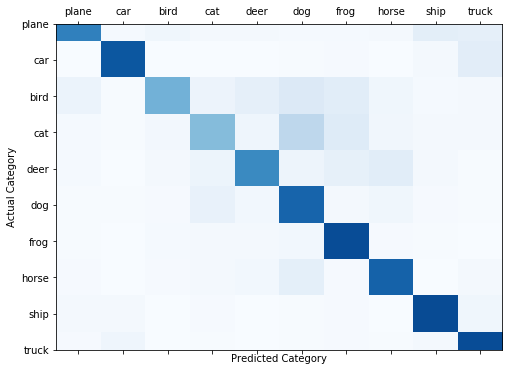

Category   - Accuracy
plane      - 68.8
car        - 85.0
bird       - 48.3
cat        - 43.4
deer       - 65.4
dog        - 79.7
frog       - 88.9
horse      - 80.8
ship       - 89.1
truck      - 89.0

Selected workers

[34 16 56 49 95 87  1 98 57  6  2 58 48 54 43]
Worker 34 : is  Stealthy_Attacker
Worker 16 : is  Stealthy_Attacker
Worker 56 : is  Honest
Worker 49 : is  Honest
Worker 95 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 1 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 57 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 2 : is  Honest
Worker 58 : is  Honest
Worker 48 : is  Honest
Worker 54 : is  Honest
Worker 43 : is  Honest

 | Global Training Round : 19 |


Worker 34 starts training in Global Round:19 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  19


Train Epoch: 1 [0/500	(1%)]	Loss: 1.216864
Train Epoch: 1 [400/500	(81%)]	Loss: 0.802876
Train Epoch: 2 [0/500	(1%)]	Loss: 0.672928
Train Epoch: 2 [400/500	(81%)]	Loss: 0.557921
Train Epoch: 3 [0/500	(1%)]	Loss: 0.608734
Train Epoch: 3 [400/500	(81%)]	Loss: 0.460112
Train Epoch: 4 [0/500	(1%)]	Loss: 0.401750
Train Epoch: 4 [400/500	(81%)]	Loss: 0.576544
Train Epoch: 5 [0/500	(1%)]	Loss: 0.403181
Train Epoch: 5 [400/500	(81%)]	Loss: 0.381180

Performed attacks 1
Worker 34 ends training in Global Round:19 |

Worker 16 starts training in Global Round:19 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  19


Train Epoch: 1 [0/500	(1%)]	Loss: 1.324113
Train Epoch: 1 [400/500	(81%)]	Loss: 0.868819
Train Epoch: 2 [0/500	(1%)]	Loss: 0.531537
Train Epoch: 2 [400/500	(81%)]	Loss: 0.687188
Train Epoch: 3 [0/500	(1%)]	Loss: 0.574095
Train Epoch: 3 [400/500	(81%)]	Loss: 0.766819
Train Epoch: 4 [0/500	(1%)]	Loss: 0.315358
Train Epoch: 4 [400/500	(81%)]	Loss: 0.820854
Train Epoch: 5 [0/500	(1%)]	Loss: 0.287592
Train Epoch: 5 [400/500	(81%)]	Loss: 0.539391

Performed attacks 2
Worker 16 ends training in Global Round:19 |

Worker 56 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.699376
Train Epoch: 1 [400/500	(81%)]	Loss: 0.906795
Train Epoch: 2 [0/500	(1%)]	Loss: 0.610971
Train Epoch: 2 [400/500	(81%)]	Loss: 0.706287
Train Epoch: 3 [0/500	(1%)]	Loss: 0.470017
Train Epoch: 3 [400/500	(81%)]	Loss: 0.591622
Train Epoch: 4 [0/500	(1%)]	Loss: 0.323208
Train Epoch: 4 [400/500	(81%)]	Loss: 0.547003
Train Epoch: 5 [0/500	(1%)]	Loss: 0.331740
Train Epoch: 5 [400/500	(81%)]	Loss: 0.362073

Worker 56 ends training in Global Round:19 |

Worker 49 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.732779
Train Epoch: 1 [400/500	(81%)]	Loss: 0.967777
Train Epoch: 2 [0/500	(1%)]	Loss: 0.666416
Train Epoch: 2 [400/500	(81%)]	Loss: 0.901727
Train Epoch: 3 [0/500	(1%)]	Loss: 0.457267
Train Epoch: 3 [400/500	(81%)]	Loss: 0.840377
Train Epoch: 4 [0/500	(1%)]	Loss: 0.554101
Train Epoch: 4 [400/500	(81%)]	Loss: 0.595190
Train Epoch: 5 [0/500	(1%)]	Loss: 0.404535
Train Epoch: 5 [400/500	(81%)]	Loss: 0.447588

Worker 49 ends training in Global Round:19 |

Worker 95 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.770799
Train Epoch: 1 [400/500	(81%)]	Loss: 0.625922
Train Epoch: 2 [0/500	(1%)]	Loss: 0.490550
Train Epoch: 2 [400/500	(81%)]	Loss: 0.566081
Train Epoch: 3 [0/500	(1%)]	Loss: 0.418356
Train Epoch: 3 [400/500	(81%)]	Loss: 0.334366
Train Epoch: 4 [0/500	(1%)]	Loss: 0.338285
Train Epoch: 4 [400/500	(81%)]	Loss: 0.469477
Train Epoch: 5 [0/500	(1%)]	Loss: 0.454371
Train Epoch: 5 [400/500	(81%)]	Loss: 0.382837

Worker 95 ends training in Global Round:19 |

Worker 87 starts training in Global Round:19 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  19


Train Epoch: 1 [0/500	(1%)]	Loss: 1.273979
Train Epoch: 1 [400/500	(81%)]	Loss: 0.997708
Train Epoch: 2 [0/500	(1%)]	Loss: 0.498446
Train Epoch: 2 [400/500	(81%)]	Loss: 0.725253
Train Epoch: 3 [0/500	(1%)]	Loss: 0.420758
Train Epoch: 3 [400/500	(81%)]	Loss: 0.637510
Train Epoch: 4 [0/500	(1%)]	Loss: 0.354816
Train Epoch: 4 [400/500	(81%)]	Loss: 0.569107
Train Epoch: 5 [0/500	(1%)]	Loss: 0.310721
Train Epoch: 5 [400/500	(81%)]	Loss: 0.614333

Performed attacks 3
Worker 87 ends training in Global Round:19 |

Worker 1 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.558545
Train Epoch: 1 [400/500	(81%)]	Loss: 0.746521
Train Epoch: 2 [0/500	(1%)]	Loss: 0.420389
Train Epoch: 2 [400/500	(81%)]	Loss: 0.637352
Train Epoch: 3 [0/500	(1%)]	Loss: 0.351682
Train Epoch: 3 [400/500	(81%)]	Loss: 0.535107
Train Epoch: 4 [0/500	(1%)]	Loss: 0.376043
Train Epoch: 4 [400/500	(81%)]	Loss: 0.409063
Train Epoch: 5 [0/500	(1%)]	Loss: 0.401682
Train Epoch: 5 [400/500	(81%)]	Loss: 0.440819

Worker 1 ends training in Global Round:19 |

Worker 98 starts training in Global Round:19 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  19


Train Epoch: 1 [0/500	(1%)]	Loss: 1.302010
Train Epoch: 1 [400/500	(81%)]	Loss: 0.940252
Train Epoch: 2 [0/500	(1%)]	Loss: 0.566492
Train Epoch: 2 [400/500	(81%)]	Loss: 0.589414
Train Epoch: 3 [0/500	(1%)]	Loss: 0.467778
Train Epoch: 3 [400/500	(81%)]	Loss: 0.591206
Train Epoch: 4 [0/500	(1%)]	Loss: 0.414243
Train Epoch: 4 [400/500	(81%)]	Loss: 0.487603
Train Epoch: 5 [0/500	(1%)]	Loss: 0.312609
Train Epoch: 5 [400/500	(81%)]	Loss: 0.426823

Performed attacks 4
Worker 98 ends training in Global Round:19 |

Worker 57 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.817571
Train Epoch: 1 [400/500	(81%)]	Loss: 0.966215
Train Epoch: 2 [0/500	(1%)]	Loss: 0.299957
Train Epoch: 2 [400/500	(81%)]	Loss: 0.544152
Train Epoch: 3 [0/500	(1%)]	Loss: 0.513157
Train Epoch: 3 [400/500	(81%)]	Loss: 0.717198
Train Epoch: 4 [0/500	(1%)]	Loss: 0.438300
Train Epoch: 4 [400/500	(81%)]	Loss: 0.485390
Train Epoch: 5 [0/500	(1%)]	Loss: 0.323276
Train Epoch: 5 [400/500	(81%)]	Loss: 0.370413

Worker 57 ends training in Global Round:19 |

Worker 6 starts training in Global Round:19 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  19


Train Epoch: 1 [0/500	(1%)]	Loss: 1.163830
Train Epoch: 1 [400/500	(81%)]	Loss: 0.914673
Train Epoch: 2 [0/500	(1%)]	Loss: 0.628404
Train Epoch: 2 [400/500	(81%)]	Loss: 0.695932
Train Epoch: 3 [0/500	(1%)]	Loss: 0.540203
Train Epoch: 3 [400/500	(81%)]	Loss: 0.483373
Train Epoch: 4 [0/500	(1%)]	Loss: 0.559633
Train Epoch: 4 [400/500	(81%)]	Loss: 0.439014
Train Epoch: 5 [0/500	(1%)]	Loss: 0.233684
Train Epoch: 5 [400/500	(81%)]	Loss: 0.313083

Performed attacks 5
Worker 6 ends training in Global Round:19 |

Worker 2 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.871859
Train Epoch: 1 [400/500	(81%)]	Loss: 0.800203
Train Epoch: 2 [0/500	(1%)]	Loss: 0.514962
Train Epoch: 2 [400/500	(81%)]	Loss: 0.515113
Train Epoch: 3 [0/500	(1%)]	Loss: 0.401883
Train Epoch: 3 [400/500	(81%)]	Loss: 0.613539
Train Epoch: 4 [0/500	(1%)]	Loss: 0.261869
Train Epoch: 4 [400/500	(81%)]	Loss: 0.626815
Train Epoch: 5 [0/500	(1%)]	Loss: 0.323574
Train Epoch: 5 [400/500	(81%)]	Loss: 0.490042

Worker 2 ends training in Global Round:19 |

Worker 58 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.729481
Train Epoch: 1 [400/500	(81%)]	Loss: 0.620254
Train Epoch: 2 [0/500	(1%)]	Loss: 0.467800
Train Epoch: 2 [400/500	(81%)]	Loss: 0.601383
Train Epoch: 3 [0/500	(1%)]	Loss: 0.508263
Train Epoch: 3 [400/500	(81%)]	Loss: 0.520963
Train Epoch: 4 [0/500	(1%)]	Loss: 0.254290
Train Epoch: 4 [400/500	(81%)]	Loss: 0.470562
Train Epoch: 5 [0/500	(1%)]	Loss: 0.260000
Train Epoch: 5 [400/500	(81%)]	Loss: 0.387919

Worker 58 ends training in Global Round:19 |

Worker 48 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.635065
Train Epoch: 1 [400/500	(81%)]	Loss: 0.858198
Train Epoch: 2 [0/500	(1%)]	Loss: 0.494613
Train Epoch: 2 [400/500	(81%)]	Loss: 0.630351
Train Epoch: 3 [0/500	(1%)]	Loss: 0.557415
Train Epoch: 3 [400/500	(81%)]	Loss: 0.662378
Train Epoch: 4 [0/500	(1%)]	Loss: 0.320255
Train Epoch: 4 [400/500	(81%)]	Loss: 0.335263
Train Epoch: 5 [0/500	(1%)]	Loss: 0.241373
Train Epoch: 5 [400/500	(81%)]	Loss: 0.432380

Worker 48 ends training in Global Round:19 |

Worker 54 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.719320
Train Epoch: 1 [400/500	(81%)]	Loss: 0.676572
Train Epoch: 2 [0/500	(1%)]	Loss: 0.503926
Train Epoch: 2 [400/500	(81%)]	Loss: 0.501392
Train Epoch: 3 [0/500	(1%)]	Loss: 0.369878
Train Epoch: 3 [400/500	(81%)]	Loss: 0.468571
Train Epoch: 4 [0/500	(1%)]	Loss: 0.382593
Train Epoch: 4 [400/500	(81%)]	Loss: 0.567015
Train Epoch: 5 [0/500	(1%)]	Loss: 0.337423
Train Epoch: 5 [400/500	(81%)]	Loss: 0.429652

Worker 54 ends training in Global Round:19 |

Worker 43 starts training in Global Round:19 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.985907
Train Epoch: 1 [400/500	(81%)]	Loss: 0.846095
Train Epoch: 2 [0/500	(1%)]	Loss: 0.444452
Train Epoch: 2 [400/500	(81%)]	Loss: 0.637061
Train Epoch: 3 [0/500	(1%)]	Loss: 0.511652
Train Epoch: 3 [400/500	(81%)]	Loss: 0.544475
Train Epoch: 4 [0/500	(1%)]	Loss: 0.500783
Train Epoch: 4 [400/500	(81%)]	Loss: 0.666477
Train Epoch: 5 [0/500	(1%)]	Loss: 0.309240
Train Epoch: 5 [400/500	(81%)]	Loss: 0.480506

Worker 43 ends training in Global Round:19 |
Last layer biases  [array([ 0.03420977, -0.02479637, -0.01828501,  0.03659294,  0.04227849,
       -0.01769848,  0.04371253, -0.02652635, -0.01472138, -0.03886472],
      dtype=float32), array([ 0.03828439, -0.02878867, -0.01626966,  0.03392347,  0.04189213,
       -0.01879472,  0.04443825, -0.02499369, -0.01638444, -0.03740561],
      dtype=float32), array([ 0.03482886, -0.02791359, -0.01972932,  0.03606327,  0.03674957,
       -0.01900516,  0.04022444, -0.00717616, -0.01892976, -0.0392107 ],
      dtyp

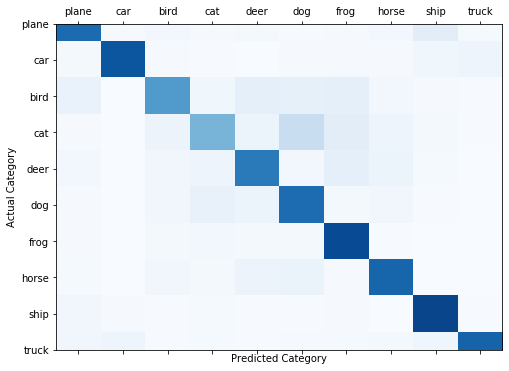

Category   - Accuracy
plane      - 77.3
car        - 85.5
bird       - 58.1
cat        - 47.1
deer       - 71.3
dog        - 76.7
frog       - 89.2
horse      - 79.5
ship       - 91.7
truck      - 80.2

Selected workers

[ 86   8  43  35  91  55  84   6  85  93  63  40  46  47 100]
Worker 86 : is  Stealthy_Attacker
Worker 8 : is  Honest
Worker 43 : is  Honest
Worker 35 : is  Honest
Worker 91 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 84 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 85 : is  Honest
Worker 93 : is  Honest
Worker 63 : is  Honest
Worker 40 : is  Honest
Worker 46 : is  Stealthy_Attacker
Worker 47 : is  Honest
Worker 100 : is  Honest

 | Global Training Round : 20 |


Worker 86 starts training in Global Round:20 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  20


Train Epoch: 1 [0/500	(1%)]	Loss: 0.966411
Train Epoch: 1 [400/500	(81%)]	Loss: 0.607850
Train Epoch: 2 [0/500	(1%)]	Loss: 0.508786
Train Epoch: 2 [400/500	(81%)]	Loss: 0.614284
Train Epoch: 3 [0/500	(1%)]	Loss: 0.463546
Train Epoch: 3 [400/500	(81%)]	Loss: 0.421738
Train Epoch: 4 [0/500	(1%)]	Loss: 0.441797
Train Epoch: 4 [400/500	(81%)]	Loss: 0.516130
Train Epoch: 5 [0/500	(1%)]	Loss: 0.277346
Train Epoch: 5 [400/500	(81%)]	Loss: 0.354711

Performed attacks 1
Worker 86 ends training in Global Round:20 |

Worker 8 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.763167
Train Epoch: 1 [400/500	(81%)]	Loss: 0.636461
Train Epoch: 2 [0/500	(1%)]	Loss: 0.435605
Train Epoch: 2 [400/500	(81%)]	Loss: 0.579478
Train Epoch: 3 [0/500	(1%)]	Loss: 0.580565
Train Epoch: 3 [400/500	(81%)]	Loss: 0.476144
Train Epoch: 4 [0/500	(1%)]	Loss: 0.296952
Train Epoch: 4 [400/500	(81%)]	Loss: 0.443165
Train Epoch: 5 [0/500	(1%)]	Loss: 0.289403
Train Epoch: 5 [400/500	(81%)]	Loss: 0.211039

Worker 8 ends training in Global Round:20 |

Worker 43 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.615023
Train Epoch: 1 [400/500	(81%)]	Loss: 0.772070
Train Epoch: 2 [0/500	(1%)]	Loss: 0.462246
Train Epoch: 2 [400/500	(81%)]	Loss: 0.491173
Train Epoch: 3 [0/500	(1%)]	Loss: 0.299896
Train Epoch: 3 [400/500	(81%)]	Loss: 0.554667
Train Epoch: 4 [0/500	(1%)]	Loss: 0.370493
Train Epoch: 4 [400/500	(81%)]	Loss: 0.461805
Train Epoch: 5 [0/500	(1%)]	Loss: 0.397275
Train Epoch: 5 [400/500	(81%)]	Loss: 0.490550

Worker 43 ends training in Global Round:20 |

Worker 35 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.682825
Train Epoch: 1 [400/500	(81%)]	Loss: 0.948316
Train Epoch: 2 [0/500	(1%)]	Loss: 0.522036
Train Epoch: 2 [400/500	(81%)]	Loss: 0.677062
Train Epoch: 3 [0/500	(1%)]	Loss: 0.325788
Train Epoch: 3 [400/500	(81%)]	Loss: 0.426946
Train Epoch: 4 [0/500	(1%)]	Loss: 0.336681
Train Epoch: 4 [400/500	(81%)]	Loss: 0.388741
Train Epoch: 5 [0/500	(1%)]	Loss: 0.253614
Train Epoch: 5 [400/500	(81%)]	Loss: 0.639505

Worker 35 ends training in Global Round:20 |

Worker 91 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.619931
Train Epoch: 1 [400/500	(81%)]	Loss: 0.772612
Train Epoch: 2 [0/500	(1%)]	Loss: 0.460746
Train Epoch: 2 [400/500	(81%)]	Loss: 0.663828
Train Epoch: 3 [0/500	(1%)]	Loss: 0.453706
Train Epoch: 3 [400/500	(81%)]	Loss: 0.415027
Train Epoch: 4 [0/500	(1%)]	Loss: 0.330784
Train Epoch: 4 [400/500	(81%)]	Loss: 0.365041
Train Epoch: 5 [0/500	(1%)]	Loss: 0.218378
Train Epoch: 5 [400/500	(81%)]	Loss: 0.325747

Worker 91 ends training in Global Round:20 |

Worker 55 starts training in Global Round:20 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  20


Train Epoch: 1 [0/500	(1%)]	Loss: 1.540644
Train Epoch: 1 [400/500	(81%)]	Loss: 0.595360
Train Epoch: 2 [0/500	(1%)]	Loss: 0.890738
Train Epoch: 2 [400/500	(81%)]	Loss: 0.631899
Train Epoch: 3 [0/500	(1%)]	Loss: 0.473374
Train Epoch: 3 [400/500	(81%)]	Loss: 0.502385
Train Epoch: 4 [0/500	(1%)]	Loss: 0.359077
Train Epoch: 4 [400/500	(81%)]	Loss: 0.432152
Train Epoch: 5 [0/500	(1%)]	Loss: 0.355514
Train Epoch: 5 [400/500	(81%)]	Loss: 0.481662

Performed attacks 2
Worker 55 ends training in Global Round:20 |

Worker 84 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.930877
Train Epoch: 1 [400/500	(81%)]	Loss: 1.084828
Train Epoch: 2 [0/500	(1%)]	Loss: 0.480796
Train Epoch: 2 [400/500	(81%)]	Loss: 0.760840
Train Epoch: 3 [0/500	(1%)]	Loss: 0.540793
Train Epoch: 3 [400/500	(81%)]	Loss: 0.691631
Train Epoch: 4 [0/500	(1%)]	Loss: 0.506674
Train Epoch: 4 [400/500	(81%)]	Loss: 0.643970
Train Epoch: 5 [0/500	(1%)]	Loss: 0.432011
Train Epoch: 5 [400/500	(81%)]	Loss: 0.614407

Worker 84 ends training in Global Round:20 |

Worker 6 starts training in Global Round:20 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  20


Train Epoch: 1 [0/500	(1%)]	Loss: 1.414695
Train Epoch: 1 [400/500	(81%)]	Loss: 0.746494
Train Epoch: 2 [0/500	(1%)]	Loss: 0.473809
Train Epoch: 2 [400/500	(81%)]	Loss: 0.697219
Train Epoch: 3 [0/500	(1%)]	Loss: 0.493419
Train Epoch: 3 [400/500	(81%)]	Loss: 0.701855
Train Epoch: 4 [0/500	(1%)]	Loss: 0.407415
Train Epoch: 4 [400/500	(81%)]	Loss: 0.434720
Train Epoch: 5 [0/500	(1%)]	Loss: 0.426025
Train Epoch: 5 [400/500	(81%)]	Loss: 0.627498

Performed attacks 3
Worker 6 ends training in Global Round:20 |

Worker 85 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.642770
Train Epoch: 1 [400/500	(81%)]	Loss: 0.957668
Train Epoch: 2 [0/500	(1%)]	Loss: 0.581885
Train Epoch: 2 [400/500	(81%)]	Loss: 0.710851
Train Epoch: 3 [0/500	(1%)]	Loss: 0.395074
Train Epoch: 3 [400/500	(81%)]	Loss: 0.495676
Train Epoch: 4 [0/500	(1%)]	Loss: 0.352204
Train Epoch: 4 [400/500	(81%)]	Loss: 0.487249
Train Epoch: 5 [0/500	(1%)]	Loss: 0.365924
Train Epoch: 5 [400/500	(81%)]	Loss: 0.409100

Worker 85 ends training in Global Round:20 |

Worker 93 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.651197
Train Epoch: 1 [400/500	(81%)]	Loss: 0.651020
Train Epoch: 2 [0/500	(1%)]	Loss: 0.407202
Train Epoch: 2 [400/500	(81%)]	Loss: 0.551233
Train Epoch: 3 [0/500	(1%)]	Loss: 0.393196
Train Epoch: 3 [400/500	(81%)]	Loss: 0.454246
Train Epoch: 4 [0/500	(1%)]	Loss: 0.254278
Train Epoch: 4 [400/500	(81%)]	Loss: 0.438009
Train Epoch: 5 [0/500	(1%)]	Loss: 0.388828
Train Epoch: 5 [400/500	(81%)]	Loss: 0.431935

Worker 93 ends training in Global Round:20 |

Worker 63 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.571998
Train Epoch: 1 [400/500	(81%)]	Loss: 0.849479
Train Epoch: 2 [0/500	(1%)]	Loss: 0.549302
Train Epoch: 2 [400/500	(81%)]	Loss: 0.707144
Train Epoch: 3 [0/500	(1%)]	Loss: 0.479156
Train Epoch: 3 [400/500	(81%)]	Loss: 0.503904
Train Epoch: 4 [0/500	(1%)]	Loss: 0.358592
Train Epoch: 4 [400/500	(81%)]	Loss: 0.317754
Train Epoch: 5 [0/500	(1%)]	Loss: 0.414244
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232615

Worker 63 ends training in Global Round:20 |

Worker 40 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.585786
Train Epoch: 1 [400/500	(81%)]	Loss: 0.874661
Train Epoch: 2 [0/500	(1%)]	Loss: 0.390399
Train Epoch: 2 [400/500	(81%)]	Loss: 0.479467
Train Epoch: 3 [0/500	(1%)]	Loss: 0.383023
Train Epoch: 3 [400/500	(81%)]	Loss: 0.472413
Train Epoch: 4 [0/500	(1%)]	Loss: 0.313434
Train Epoch: 4 [400/500	(81%)]	Loss: 0.496193
Train Epoch: 5 [0/500	(1%)]	Loss: 0.354409
Train Epoch: 5 [400/500	(81%)]	Loss: 0.239160

Worker 40 ends training in Global Round:20 |

Worker 46 starts training in Global Round:20 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  20


Train Epoch: 1 [0/500	(1%)]	Loss: 1.215392
Train Epoch: 1 [400/500	(81%)]	Loss: 0.858300
Train Epoch: 2 [0/500	(1%)]	Loss: 0.396024
Train Epoch: 2 [400/500	(81%)]	Loss: 0.604783
Train Epoch: 3 [0/500	(1%)]	Loss: 0.503073
Train Epoch: 3 [400/500	(81%)]	Loss: 0.663114
Train Epoch: 4 [0/500	(1%)]	Loss: 0.426831
Train Epoch: 4 [400/500	(81%)]	Loss: 0.428984
Train Epoch: 5 [0/500	(1%)]	Loss: 0.407670
Train Epoch: 5 [400/500	(81%)]	Loss: 0.498370

Performed attacks 4
Worker 46 ends training in Global Round:20 |

Worker 47 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.713761
Train Epoch: 1 [400/500	(81%)]	Loss: 0.687708
Train Epoch: 2 [0/500	(1%)]	Loss: 0.436803
Train Epoch: 2 [400/500	(81%)]	Loss: 0.546090
Train Epoch: 3 [0/500	(1%)]	Loss: 0.331369
Train Epoch: 3 [400/500	(81%)]	Loss: 0.599334
Train Epoch: 4 [0/500	(1%)]	Loss: 0.384810
Train Epoch: 4 [400/500	(81%)]	Loss: 0.458074
Train Epoch: 5 [0/500	(1%)]	Loss: 0.221696
Train Epoch: 5 [400/500	(81%)]	Loss: 0.407460

Worker 47 ends training in Global Round:20 |

Worker 100 starts training in Global Round:20 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.439683
Train Epoch: 1 [400/500	(81%)]	Loss: 0.668955
Train Epoch: 2 [0/500	(1%)]	Loss: 0.313160
Train Epoch: 2 [400/500	(81%)]	Loss: 0.501427
Train Epoch: 3 [0/500	(1%)]	Loss: 0.310921
Train Epoch: 3 [400/500	(81%)]	Loss: 0.471424
Train Epoch: 4 [0/500	(1%)]	Loss: 0.290398
Train Epoch: 4 [400/500	(81%)]	Loss: 0.348410
Train Epoch: 5 [0/500	(1%)]	Loss: 0.262274
Train Epoch: 5 [400/500	(81%)]	Loss: 0.240687

Worker 100 ends training in Global Round:20 |
Last layer biases  [array([ 0.03478162, -0.02977035, -0.01449473,  0.03501748,  0.04342303,
       -0.01749159,  0.04376381, -0.02597931, -0.01627413, -0.03707436],
      dtype=float32), array([ 0.03239264, -0.02970749, -0.01635903,  0.03377343,  0.03630765,
       -0.02076256,  0.04092247, -0.00284655, -0.01887963, -0.03893946],
      dtype=float32), array([ 0.03328   , -0.03000938, -0.01813736,  0.03336915,  0.03411977,
       -0.01827392,  0.04097113, -0.00452955, -0.01703373, -0.03785468],
      dty

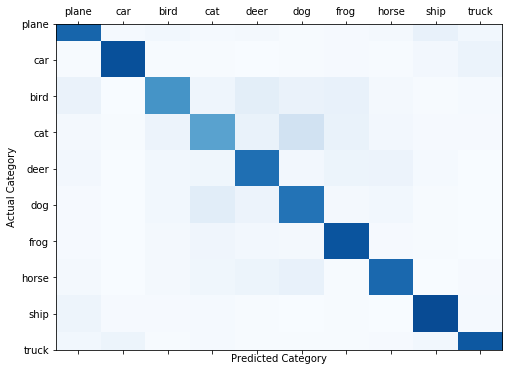

Category   - Accuracy
plane      - 79.4
car        - 87.8
bird       - 61.6
cat        - 55.2
deer       - 75.4
dog        - 73.9
frog       - 86.3
horse      - 78.5
ship       - 89.4
truck      - 84.7

Selected workers

[ 94  84  21 100  17  18  74  32  73  76   6  43   3  96  39]
Worker 94 : is  Stealthy_Attacker
Worker 84 : is  Honest
Worker 21 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 17 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 74 : is  Honest
Worker 32 : is  Honest
Worker 73 : is  Honest
Worker 76 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 96 : is  Honest
Worker 39 : is  Honest

 | Global Training Round : 21 |


Worker 94 starts training in Global Round:21 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  21


Train Epoch: 1 [0/500	(1%)]	Loss: 1.462565
Train Epoch: 1 [400/500	(81%)]	Loss: 0.715313
Train Epoch: 2 [0/500	(1%)]	Loss: 0.536574
Train Epoch: 2 [400/500	(81%)]	Loss: 0.852118
Train Epoch: 3 [0/500	(1%)]	Loss: 0.526137
Train Epoch: 3 [400/500	(81%)]	Loss: 0.552793
Train Epoch: 4 [0/500	(1%)]	Loss: 0.468125
Train Epoch: 4 [400/500	(81%)]	Loss: 0.646041
Train Epoch: 5 [0/500	(1%)]	Loss: 0.464965
Train Epoch: 5 [400/500	(81%)]	Loss: 0.488850

Performed attacks 1
Worker 94 ends training in Global Round:21 |

Worker 84 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.552897
Train Epoch: 1 [400/500	(81%)]	Loss: 0.853735
Train Epoch: 2 [0/500	(1%)]	Loss: 0.489897
Train Epoch: 2 [400/500	(81%)]	Loss: 0.560863
Train Epoch: 3 [0/500	(1%)]	Loss: 0.406935
Train Epoch: 3 [400/500	(81%)]	Loss: 0.542529
Train Epoch: 4 [0/500	(1%)]	Loss: 0.350115
Train Epoch: 4 [400/500	(81%)]	Loss: 0.342903
Train Epoch: 5 [0/500	(1%)]	Loss: 0.260758
Train Epoch: 5 [400/500	(81%)]	Loss: 0.246351

Worker 84 ends training in Global Round:21 |

Worker 21 starts training in Global Round:21 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  21


Train Epoch: 1 [0/500	(1%)]	Loss: 1.282555
Train Epoch: 1 [400/500	(81%)]	Loss: 0.874231
Train Epoch: 2 [0/500	(1%)]	Loss: 0.502438
Train Epoch: 2 [400/500	(81%)]	Loss: 0.698118
Train Epoch: 3 [0/500	(1%)]	Loss: 0.509614
Train Epoch: 3 [400/500	(81%)]	Loss: 0.725414
Train Epoch: 4 [0/500	(1%)]	Loss: 0.356901
Train Epoch: 4 [400/500	(81%)]	Loss: 0.487233
Train Epoch: 5 [0/500	(1%)]	Loss: 0.326683
Train Epoch: 5 [400/500	(81%)]	Loss: 0.394319

Performed attacks 2
Worker 21 ends training in Global Round:21 |

Worker 100 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.480478
Train Epoch: 1 [400/500	(81%)]	Loss: 0.286729
Train Epoch: 2 [0/500	(1%)]	Loss: 0.307573
Train Epoch: 2 [400/500	(81%)]	Loss: 0.505720
Train Epoch: 3 [0/500	(1%)]	Loss: 0.219438
Train Epoch: 3 [400/500	(81%)]	Loss: 0.309883
Train Epoch: 4 [0/500	(1%)]	Loss: 0.283962
Train Epoch: 4 [400/500	(81%)]	Loss: 0.291295
Train Epoch: 5 [0/500	(1%)]	Loss: 0.154562
Train Epoch: 5 [400/500	(81%)]	Loss: 0.449743

Worker 100 ends training in Global Round:21 |

Worker 17 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.596714
Train Epoch: 1 [400/500	(81%)]	Loss: 0.742064
Train Epoch: 2 [0/500	(1%)]	Loss: 0.696786
Train Epoch: 2 [400/500	(81%)]	Loss: 0.498885
Train Epoch: 3 [0/500	(1%)]	Loss: 0.484666
Train Epoch: 3 [400/500	(81%)]	Loss: 0.702184
Train Epoch: 4 [0/500	(1%)]	Loss: 0.364663
Train Epoch: 4 [400/500	(81%)]	Loss: 0.556156
Train Epoch: 5 [0/500	(1%)]	Loss: 0.213306
Train Epoch: 5 [400/500	(81%)]	Loss: 0.381317

Worker 17 ends training in Global Round:21 |

Worker 18 starts training in Global Round:21 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  21


Train Epoch: 1 [0/500	(1%)]	Loss: 1.095170
Train Epoch: 1 [400/500	(81%)]	Loss: 0.555354
Train Epoch: 2 [0/500	(1%)]	Loss: 0.583960
Train Epoch: 2 [400/500	(81%)]	Loss: 0.586012
Train Epoch: 3 [0/500	(1%)]	Loss: 0.548053
Train Epoch: 3 [400/500	(81%)]	Loss: 0.636434
Train Epoch: 4 [0/500	(1%)]	Loss: 0.356238
Train Epoch: 4 [400/500	(81%)]	Loss: 0.516567
Train Epoch: 5 [0/500	(1%)]	Loss: 0.316013
Train Epoch: 5 [400/500	(81%)]	Loss: 0.391420

Performed attacks 3
Worker 18 ends training in Global Round:21 |

Worker 74 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.786735
Train Epoch: 1 [400/500	(81%)]	Loss: 1.144166
Train Epoch: 2 [0/500	(1%)]	Loss: 0.621121
Train Epoch: 2 [400/500	(81%)]	Loss: 0.659136
Train Epoch: 3 [0/500	(1%)]	Loss: 0.411049
Train Epoch: 3 [400/500	(81%)]	Loss: 0.635456
Train Epoch: 4 [0/500	(1%)]	Loss: 0.345489
Train Epoch: 4 [400/500	(81%)]	Loss: 0.441076
Train Epoch: 5 [0/500	(1%)]	Loss: 0.273460
Train Epoch: 5 [400/500	(81%)]	Loss: 0.486818

Worker 74 ends training in Global Round:21 |

Worker 32 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.710581
Train Epoch: 1 [400/500	(81%)]	Loss: 0.775194
Train Epoch: 2 [0/500	(1%)]	Loss: 0.504951
Train Epoch: 2 [400/500	(81%)]	Loss: 0.813232
Train Epoch: 3 [0/500	(1%)]	Loss: 0.354031
Train Epoch: 3 [400/500	(81%)]	Loss: 0.649190
Train Epoch: 4 [0/500	(1%)]	Loss: 0.349844
Train Epoch: 4 [400/500	(81%)]	Loss: 0.484037
Train Epoch: 5 [0/500	(1%)]	Loss: 0.288437
Train Epoch: 5 [400/500	(81%)]	Loss: 0.352249

Worker 32 ends training in Global Round:21 |

Worker 73 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.484700
Train Epoch: 1 [400/500	(81%)]	Loss: 0.578429
Train Epoch: 2 [0/500	(1%)]	Loss: 0.266463
Train Epoch: 2 [400/500	(81%)]	Loss: 0.591637
Train Epoch: 3 [0/500	(1%)]	Loss: 0.307568
Train Epoch: 3 [400/500	(81%)]	Loss: 0.297512
Train Epoch: 4 [0/500	(1%)]	Loss: 0.251856
Train Epoch: 4 [400/500	(81%)]	Loss: 0.526793
Train Epoch: 5 [0/500	(1%)]	Loss: 0.158450
Train Epoch: 5 [400/500	(81%)]	Loss: 0.362780

Worker 73 ends training in Global Round:21 |

Worker 76 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.714252
Train Epoch: 1 [400/500	(81%)]	Loss: 0.726095
Train Epoch: 2 [0/500	(1%)]	Loss: 0.323072
Train Epoch: 2 [400/500	(81%)]	Loss: 0.484376
Train Epoch: 3 [0/500	(1%)]	Loss: 0.387971
Train Epoch: 3 [400/500	(81%)]	Loss: 0.506546
Train Epoch: 4 [0/500	(1%)]	Loss: 0.307890
Train Epoch: 4 [400/500	(81%)]	Loss: 0.495087
Train Epoch: 5 [0/500	(1%)]	Loss: 0.281396
Train Epoch: 5 [400/500	(81%)]	Loss: 0.258061

Worker 76 ends training in Global Round:21 |

Worker 6 starts training in Global Round:21 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  21


Train Epoch: 1 [0/500	(1%)]	Loss: 1.229537
Train Epoch: 1 [400/500	(81%)]	Loss: 0.800661
Train Epoch: 2 [0/500	(1%)]	Loss: 0.528507
Train Epoch: 2 [400/500	(81%)]	Loss: 0.573774
Train Epoch: 3 [0/500	(1%)]	Loss: 0.374769
Train Epoch: 3 [400/500	(81%)]	Loss: 0.513244
Train Epoch: 4 [0/500	(1%)]	Loss: 0.376371
Train Epoch: 4 [400/500	(81%)]	Loss: 0.497391
Train Epoch: 5 [0/500	(1%)]	Loss: 0.372927
Train Epoch: 5 [400/500	(81%)]	Loss: 0.258305

Performed attacks 4
Worker 6 ends training in Global Round:21 |

Worker 43 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.380305
Train Epoch: 1 [400/500	(81%)]	Loss: 0.730611
Train Epoch: 2 [0/500	(1%)]	Loss: 0.414839
Train Epoch: 2 [400/500	(81%)]	Loss: 0.484038
Train Epoch: 3 [0/500	(1%)]	Loss: 0.344893
Train Epoch: 3 [400/500	(81%)]	Loss: 0.446407
Train Epoch: 4 [0/500	(1%)]	Loss: 0.280659
Train Epoch: 4 [400/500	(81%)]	Loss: 0.481790
Train Epoch: 5 [0/500	(1%)]	Loss: 0.242085
Train Epoch: 5 [400/500	(81%)]	Loss: 0.408732

Worker 43 ends training in Global Round:21 |

Worker 3 starts training in Global Round:21 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  21


Train Epoch: 1 [0/500	(1%)]	Loss: 1.461570
Train Epoch: 1 [400/500	(81%)]	Loss: 0.892517
Train Epoch: 2 [0/500	(1%)]	Loss: 0.657492
Train Epoch: 2 [400/500	(81%)]	Loss: 0.533050
Train Epoch: 3 [0/500	(1%)]	Loss: 0.618140
Train Epoch: 3 [400/500	(81%)]	Loss: 0.502579
Train Epoch: 4 [0/500	(1%)]	Loss: 0.430464
Train Epoch: 4 [400/500	(81%)]	Loss: 0.422520
Train Epoch: 5 [0/500	(1%)]	Loss: 0.373130
Train Epoch: 5 [400/500	(81%)]	Loss: 0.456567

Performed attacks 5
Worker 3 ends training in Global Round:21 |

Worker 96 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.668179
Train Epoch: 1 [400/500	(81%)]	Loss: 0.882331
Train Epoch: 2 [0/500	(1%)]	Loss: 0.429512
Train Epoch: 2 [400/500	(81%)]	Loss: 0.625209
Train Epoch: 3 [0/500	(1%)]	Loss: 0.476035
Train Epoch: 3 [400/500	(81%)]	Loss: 0.519771
Train Epoch: 4 [0/500	(1%)]	Loss: 0.396000
Train Epoch: 4 [400/500	(81%)]	Loss: 0.328216
Train Epoch: 5 [0/500	(1%)]	Loss: 0.316469
Train Epoch: 5 [400/500	(81%)]	Loss: 0.359195

Worker 96 ends training in Global Round:21 |

Worker 39 starts training in Global Round:21 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.456064
Train Epoch: 1 [400/500	(81%)]	Loss: 0.683661
Train Epoch: 2 [0/500	(1%)]	Loss: 0.529681
Train Epoch: 2 [400/500	(81%)]	Loss: 0.549934
Train Epoch: 3 [0/500	(1%)]	Loss: 0.280862
Train Epoch: 3 [400/500	(81%)]	Loss: 0.449997
Train Epoch: 4 [0/500	(1%)]	Loss: 0.258836
Train Epoch: 4 [400/500	(81%)]	Loss: 0.293341
Train Epoch: 5 [0/500	(1%)]	Loss: 0.219059
Train Epoch: 5 [400/500	(81%)]	Loss: 0.251629

Worker 39 ends training in Global Round:21 |
Last layer biases  [array([ 0.03508872, -0.03069295, -0.01610716,  0.03716455,  0.04386789,
       -0.01674109,  0.04070449, -0.02598447, -0.01675933, -0.03463916],
      dtype=float32), array([ 0.03077839, -0.02846869, -0.02023881,  0.03482098,  0.03869644,
       -0.01813374,  0.0389414 , -0.00421559, -0.01815443, -0.03812445],
      dtype=float32), array([ 0.03728173, -0.02833026, -0.01521116,  0.03653103,  0.04014296,
       -0.01698297,  0.03943003, -0.02421531, -0.0155186 , -0.03722597],
      dtyp

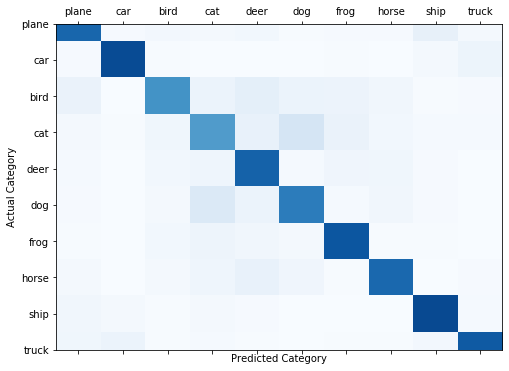

Category   - Accuracy
plane      - 79.2
car        - 89.1
bird       - 61.9
cat        - 58.0
deer       - 80.6
dog        - 70.7
frog       - 85.5
horse      - 78.3
ship       - 89.9
truck      - 83.8

Selected workers

[31 68 43  7 41 39 30 37 72 71 92 81  3 85 50]
Worker 31 : is  Stealthy_Attacker
Worker 68 : is  Honest
Worker 43 : is  Honest
Worker 7 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 39 : is  Honest
Worker 30 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 72 : is  Stealthy_Attacker
Worker 71 : is  Stealthy_Attacker
Worker 92 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 85 : is  Honest
Worker 50 : is  Stealthy_Attacker

 | Global Training Round : 22 |


Worker 31 starts training in Global Round:22 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  22


Train Epoch: 1 [0/500	(1%)]	Loss: 1.049062
Train Epoch: 1 [400/500	(81%)]	Loss: 1.081080
Train Epoch: 2 [0/500	(1%)]	Loss: 0.396459
Train Epoch: 2 [400/500	(81%)]	Loss: 0.677134
Train Epoch: 3 [0/500	(1%)]	Loss: 0.410056
Train Epoch: 3 [400/500	(81%)]	Loss: 0.458887
Train Epoch: 4 [0/500	(1%)]	Loss: 0.349809
Train Epoch: 4 [400/500	(81%)]	Loss: 0.320882
Train Epoch: 5 [0/500	(1%)]	Loss: 0.226019
Train Epoch: 5 [400/500	(81%)]	Loss: 0.446390

Performed attacks 1
Worker 31 ends training in Global Round:22 |

Worker 68 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.492326
Train Epoch: 1 [400/500	(81%)]	Loss: 0.766272
Train Epoch: 2 [0/500	(1%)]	Loss: 0.544442
Train Epoch: 2 [400/500	(81%)]	Loss: 0.503062
Train Epoch: 3 [0/500	(1%)]	Loss: 0.391865
Train Epoch: 3 [400/500	(81%)]	Loss: 0.588823
Train Epoch: 4 [0/500	(1%)]	Loss: 0.436510
Train Epoch: 4 [400/500	(81%)]	Loss: 0.544588
Train Epoch: 5 [0/500	(1%)]	Loss: 0.300181
Train Epoch: 5 [400/500	(81%)]	Loss: 0.353394

Worker 68 ends training in Global Round:22 |

Worker 43 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.313406
Train Epoch: 1 [400/500	(81%)]	Loss: 0.340299
Train Epoch: 2 [0/500	(1%)]	Loss: 0.312635
Train Epoch: 2 [400/500	(81%)]	Loss: 0.404719
Train Epoch: 3 [0/500	(1%)]	Loss: 0.223340
Train Epoch: 3 [400/500	(81%)]	Loss: 0.366618
Train Epoch: 4 [0/500	(1%)]	Loss: 0.185334
Train Epoch: 4 [400/500	(81%)]	Loss: 0.590834
Train Epoch: 5 [0/500	(1%)]	Loss: 0.333813
Train Epoch: 5 [400/500	(81%)]	Loss: 0.453447

Worker 43 ends training in Global Round:22 |

Worker 7 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.700145
Train Epoch: 1 [400/500	(81%)]	Loss: 1.056107
Train Epoch: 2 [0/500	(1%)]	Loss: 0.564695
Train Epoch: 2 [400/500	(81%)]	Loss: 0.479331
Train Epoch: 3 [0/500	(1%)]	Loss: 0.370442
Train Epoch: 3 [400/500	(81%)]	Loss: 0.499967
Train Epoch: 4 [0/500	(1%)]	Loss: 0.225392
Train Epoch: 4 [400/500	(81%)]	Loss: 0.385475
Train Epoch: 5 [0/500	(1%)]	Loss: 0.261457
Train Epoch: 5 [400/500	(81%)]	Loss: 0.485675

Worker 7 ends training in Global Round:22 |

Worker 41 starts training in Global Round:22 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  22


Train Epoch: 1 [0/500	(1%)]	Loss: 1.385113
Train Epoch: 1 [400/500	(81%)]	Loss: 0.791271
Train Epoch: 2 [0/500	(1%)]	Loss: 0.530872
Train Epoch: 2 [400/500	(81%)]	Loss: 0.701394
Train Epoch: 3 [0/500	(1%)]	Loss: 0.525262
Train Epoch: 3 [400/500	(81%)]	Loss: 0.637185
Train Epoch: 4 [0/500	(1%)]	Loss: 0.500034
Train Epoch: 4 [400/500	(81%)]	Loss: 0.491029
Train Epoch: 5 [0/500	(1%)]	Loss: 0.505310
Train Epoch: 5 [400/500	(81%)]	Loss: 0.390011

Performed attacks 2
Worker 41 ends training in Global Round:22 |

Worker 39 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.554374
Train Epoch: 1 [400/500	(81%)]	Loss: 0.668584
Train Epoch: 2 [0/500	(1%)]	Loss: 0.276684
Train Epoch: 2 [400/500	(81%)]	Loss: 0.366427
Train Epoch: 3 [0/500	(1%)]	Loss: 0.258613
Train Epoch: 3 [400/500	(81%)]	Loss: 0.287795
Train Epoch: 4 [0/500	(1%)]	Loss: 0.249636
Train Epoch: 4 [400/500	(81%)]	Loss: 0.289379
Train Epoch: 5 [0/500	(1%)]	Loss: 0.313597
Train Epoch: 5 [400/500	(81%)]	Loss: 0.208284

Worker 39 ends training in Global Round:22 |

Worker 30 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.706530
Train Epoch: 1 [400/500	(81%)]	Loss: 0.917530
Train Epoch: 2 [0/500	(1%)]	Loss: 0.471094
Train Epoch: 2 [400/500	(81%)]	Loss: 0.608183
Train Epoch: 3 [0/500	(1%)]	Loss: 0.290238
Train Epoch: 3 [400/500	(81%)]	Loss: 0.422531
Train Epoch: 4 [0/500	(1%)]	Loss: 0.432299
Train Epoch: 4 [400/500	(81%)]	Loss: 0.462036
Train Epoch: 5 [0/500	(1%)]	Loss: 0.211800
Train Epoch: 5 [400/500	(81%)]	Loss: 0.440098

Worker 30 ends training in Global Round:22 |

Worker 37 starts training in Global Round:22 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  22


Train Epoch: 1 [0/500	(1%)]	Loss: 1.076566
Train Epoch: 1 [400/500	(81%)]	Loss: 0.701429
Train Epoch: 2 [0/500	(1%)]	Loss: 0.454124
Train Epoch: 2 [400/500	(81%)]	Loss: 0.732463
Train Epoch: 3 [0/500	(1%)]	Loss: 0.439247
Train Epoch: 3 [400/500	(81%)]	Loss: 0.537921
Train Epoch: 4 [0/500	(1%)]	Loss: 0.332770
Train Epoch: 4 [400/500	(81%)]	Loss: 0.363916
Train Epoch: 5 [0/500	(1%)]	Loss: 0.289515
Train Epoch: 5 [400/500	(81%)]	Loss: 0.506824

Performed attacks 3
Worker 37 ends training in Global Round:22 |

Worker 72 starts training in Global Round:22 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  22


Train Epoch: 1 [0/500	(1%)]	Loss: 1.152210
Train Epoch: 1 [400/500	(81%)]	Loss: 0.950382
Train Epoch: 2 [0/500	(1%)]	Loss: 0.582619
Train Epoch: 2 [400/500	(81%)]	Loss: 0.775217
Train Epoch: 3 [0/500	(1%)]	Loss: 0.458784
Train Epoch: 3 [400/500	(81%)]	Loss: 0.498140
Train Epoch: 4 [0/500	(1%)]	Loss: 0.310978
Train Epoch: 4 [400/500	(81%)]	Loss: 0.382008
Train Epoch: 5 [0/500	(1%)]	Loss: 0.512888
Train Epoch: 5 [400/500	(81%)]	Loss: 0.406554

Performed attacks 4
Worker 72 ends training in Global Round:22 |

Worker 71 starts training in Global Round:22 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  22


Train Epoch: 1 [0/500	(1%)]	Loss: 1.051599
Train Epoch: 1 [400/500	(81%)]	Loss: 0.942193
Train Epoch: 2 [0/500	(1%)]	Loss: 0.572435
Train Epoch: 2 [400/500	(81%)]	Loss: 0.582051
Train Epoch: 3 [0/500	(1%)]	Loss: 0.282480
Train Epoch: 3 [400/500	(81%)]	Loss: 0.634343
Train Epoch: 4 [0/500	(1%)]	Loss: 0.529386
Train Epoch: 4 [400/500	(81%)]	Loss: 0.758871
Train Epoch: 5 [0/500	(1%)]	Loss: 0.498650
Train Epoch: 5 [400/500	(81%)]	Loss: 0.415091

Performed attacks 5
Worker 71 ends training in Global Round:22 |

Worker 92 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.635013
Train Epoch: 1 [400/500	(81%)]	Loss: 0.837988
Train Epoch: 2 [0/500	(1%)]	Loss: 0.458763
Train Epoch: 2 [400/500	(81%)]	Loss: 0.704836
Train Epoch: 3 [0/500	(1%)]	Loss: 0.441593
Train Epoch: 3 [400/500	(81%)]	Loss: 0.684020
Train Epoch: 4 [0/500	(1%)]	Loss: 0.286516
Train Epoch: 4 [400/500	(81%)]	Loss: 0.599506
Train Epoch: 5 [0/500	(1%)]	Loss: 0.428040
Train Epoch: 5 [400/500	(81%)]	Loss: 0.586627

Worker 92 ends training in Global Round:22 |

Worker 81 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.525371
Train Epoch: 1 [400/500	(81%)]	Loss: 0.723152
Train Epoch: 2 [0/500	(1%)]	Loss: 0.524247
Train Epoch: 2 [400/500	(81%)]	Loss: 0.553205
Train Epoch: 3 [0/500	(1%)]	Loss: 0.227017
Train Epoch: 3 [400/500	(81%)]	Loss: 0.516108
Train Epoch: 4 [0/500	(1%)]	Loss: 0.237326
Train Epoch: 4 [400/500	(81%)]	Loss: 0.364292
Train Epoch: 5 [0/500	(1%)]	Loss: 0.291864
Train Epoch: 5 [400/500	(81%)]	Loss: 0.143653

Worker 81 ends training in Global Round:22 |

Worker 3 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.736846
Train Epoch: 1 [400/500	(81%)]	Loss: 0.953063
Train Epoch: 2 [0/500	(1%)]	Loss: 0.502354
Train Epoch: 2 [400/500	(81%)]	Loss: 0.613229
Train Epoch: 3 [0/500	(1%)]	Loss: 0.543992
Train Epoch: 3 [400/500	(81%)]	Loss: 0.645656
Train Epoch: 4 [0/500	(1%)]	Loss: 0.454587
Train Epoch: 4 [400/500	(81%)]	Loss: 0.502093
Train Epoch: 5 [0/500	(1%)]	Loss: 0.266182
Train Epoch: 5 [400/500	(81%)]	Loss: 0.504659

Worker 3 ends training in Global Round:22 |

Worker 85 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.628829
Train Epoch: 1 [400/500	(81%)]	Loss: 0.784316
Train Epoch: 2 [0/500	(1%)]	Loss: 0.470759
Train Epoch: 2 [400/500	(81%)]	Loss: 0.615568
Train Epoch: 3 [0/500	(1%)]	Loss: 0.384365
Train Epoch: 3 [400/500	(81%)]	Loss: 0.437806
Train Epoch: 4 [0/500	(1%)]	Loss: 0.387806
Train Epoch: 4 [400/500	(81%)]	Loss: 0.325394
Train Epoch: 5 [0/500	(1%)]	Loss: 0.287711
Train Epoch: 5 [400/500	(81%)]	Loss: 0.432960

Worker 85 ends training in Global Round:22 |

Worker 50 starts training in Global Round:22 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.812828
Train Epoch: 1 [400/500	(81%)]	Loss: 0.876286
Train Epoch: 2 [0/500	(1%)]	Loss: 0.372255
Train Epoch: 2 [400/500	(81%)]	Loss: 0.646673
Train Epoch: 3 [0/500	(1%)]	Loss: 0.489114
Train Epoch: 3 [400/500	(81%)]	Loss: 0.452447
Train Epoch: 4 [0/500	(1%)]	Loss: 0.356245
Train Epoch: 4 [400/500	(81%)]	Loss: 0.523090
Train Epoch: 5 [0/500	(1%)]	Loss: 0.248254
Train Epoch: 5 [400/500	(81%)]	Loss: 0.614023

Worker 50 ends training in Global Round:22 |
Last layer biases  [array([ 0.03358011, -0.02855431, -0.01361232,  0.0380722 ,  0.04233091,
       -0.01725116,  0.04070167, -0.02359724, -0.01978347, -0.03598485],
      dtype=float32), array([ 0.0349208 , -0.02799305, -0.01911616,  0.03140338,  0.0365563 ,
       -0.01927495,  0.04219013, -0.0034779 , -0.0180275 , -0.04127952],
      dtype=float32), array([ 0.03172613, -0.02950534, -0.01653947,  0.03452487,  0.03319279,
       -0.01991035,  0.04125031, -0.0036294 , -0.01700641, -0.0382016 ],
      dtyp

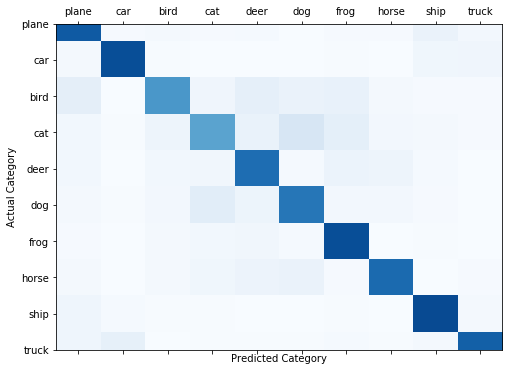

Category   - Accuracy
plane      - 83.8
car        - 88.6
bird       - 60.0
cat        - 54.7
deer       - 76.4
dog        - 72.8
frog       - 88.3
horse      - 77.4
ship       - 89.8
truck      - 81.3

Selected workers

[55 27  2 77 41 21 96 86 73 54 32 76 45 84 68]
Worker 55 : is  Stealthy_Attacker
Worker 27 : is  Stealthy_Attacker
Worker 2 : is  Honest
Worker 77 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 21 : is  Stealthy_Attacker
Worker 96 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 73 : is  Honest
Worker 54 : is  Honest
Worker 32 : is  Honest
Worker 76 : is  Honest
Worker 45 : is  Honest
Worker 84 : is  Honest
Worker 68 : is  Honest

 | Global Training Round : 23 |


Worker 55 starts training in Global Round:23 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  23


Train Epoch: 1 [0/500	(1%)]	Loss: 1.077571
Train Epoch: 1 [400/500	(81%)]	Loss: 1.006531
Train Epoch: 2 [0/500	(1%)]	Loss: 0.619059
Train Epoch: 2 [400/500	(81%)]	Loss: 0.384203
Train Epoch: 3 [0/500	(1%)]	Loss: 0.589123
Train Epoch: 3 [400/500	(81%)]	Loss: 0.521533
Train Epoch: 4 [0/500	(1%)]	Loss: 0.300020
Train Epoch: 4 [400/500	(81%)]	Loss: 0.449100
Train Epoch: 5 [0/500	(1%)]	Loss: 0.307238
Train Epoch: 5 [400/500	(81%)]	Loss: 0.319384

Performed attacks 1
Worker 55 ends training in Global Round:23 |

Worker 27 starts training in Global Round:23 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  23


Train Epoch: 1 [0/500	(1%)]	Loss: 1.120970
Train Epoch: 1 [400/500	(81%)]	Loss: 0.715376
Train Epoch: 2 [0/500	(1%)]	Loss: 0.362258
Train Epoch: 2 [400/500	(81%)]	Loss: 0.610398
Train Epoch: 3 [0/500	(1%)]	Loss: 0.458988
Train Epoch: 3 [400/500	(81%)]	Loss: 0.499250
Train Epoch: 4 [0/500	(1%)]	Loss: 0.425579
Train Epoch: 4 [400/500	(81%)]	Loss: 0.377266
Train Epoch: 5 [0/500	(1%)]	Loss: 0.249421
Train Epoch: 5 [400/500	(81%)]	Loss: 0.328573

Performed attacks 2
Worker 27 ends training in Global Round:23 |

Worker 2 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.735457
Train Epoch: 1 [400/500	(81%)]	Loss: 0.672044
Train Epoch: 2 [0/500	(1%)]	Loss: 0.565689
Train Epoch: 2 [400/500	(81%)]	Loss: 0.537877
Train Epoch: 3 [0/500	(1%)]	Loss: 0.302194
Train Epoch: 3 [400/500	(81%)]	Loss: 0.409712
Train Epoch: 4 [0/500	(1%)]	Loss: 0.314727
Train Epoch: 4 [400/500	(81%)]	Loss: 0.312046
Train Epoch: 5 [0/500	(1%)]	Loss: 0.262644
Train Epoch: 5 [400/500	(81%)]	Loss: 0.595721

Worker 2 ends training in Global Round:23 |

Worker 77 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.583691
Train Epoch: 1 [400/500	(81%)]	Loss: 0.796884
Train Epoch: 2 [0/500	(1%)]	Loss: 0.508755
Train Epoch: 2 [400/500	(81%)]	Loss: 0.605798
Train Epoch: 3 [0/500	(1%)]	Loss: 0.505663
Train Epoch: 3 [400/500	(81%)]	Loss: 0.301304
Train Epoch: 4 [0/500	(1%)]	Loss: 0.421817
Train Epoch: 4 [400/500	(81%)]	Loss: 0.438352
Train Epoch: 5 [0/500	(1%)]	Loss: 0.336861
Train Epoch: 5 [400/500	(81%)]	Loss: 0.332272

Worker 77 ends training in Global Round:23 |

Worker 41 starts training in Global Round:23 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  23


Train Epoch: 1 [0/500	(1%)]	Loss: 1.149078
Train Epoch: 1 [400/500	(81%)]	Loss: 0.897476
Train Epoch: 2 [0/500	(1%)]	Loss: 0.739971
Train Epoch: 2 [400/500	(81%)]	Loss: 0.806736
Train Epoch: 3 [0/500	(1%)]	Loss: 0.550627
Train Epoch: 3 [400/500	(81%)]	Loss: 0.527390
Train Epoch: 4 [0/500	(1%)]	Loss: 0.393432
Train Epoch: 4 [400/500	(81%)]	Loss: 0.463551
Train Epoch: 5 [0/500	(1%)]	Loss: 0.414566
Train Epoch: 5 [400/500	(81%)]	Loss: 0.337323

Performed attacks 3
Worker 41 ends training in Global Round:23 |

Worker 21 starts training in Global Round:23 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  23


Train Epoch: 1 [0/500	(1%)]	Loss: 0.942657
Train Epoch: 1 [400/500	(81%)]	Loss: 0.860226
Train Epoch: 2 [0/500	(1%)]	Loss: 0.483997
Train Epoch: 2 [400/500	(81%)]	Loss: 0.650094
Train Epoch: 3 [0/500	(1%)]	Loss: 0.417874
Train Epoch: 3 [400/500	(81%)]	Loss: 0.547920
Train Epoch: 4 [0/500	(1%)]	Loss: 0.378164
Train Epoch: 4 [400/500	(81%)]	Loss: 0.461684
Train Epoch: 5 [0/500	(1%)]	Loss: 0.381921
Train Epoch: 5 [400/500	(81%)]	Loss: 0.272476

Performed attacks 4
Worker 21 ends training in Global Round:23 |

Worker 96 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.667675
Train Epoch: 1 [400/500	(81%)]	Loss: 0.660418
Train Epoch: 2 [0/500	(1%)]	Loss: 0.430164
Train Epoch: 2 [400/500	(81%)]	Loss: 0.339599
Train Epoch: 3 [0/500	(1%)]	Loss: 0.317216
Train Epoch: 3 [400/500	(81%)]	Loss: 0.516170
Train Epoch: 4 [0/500	(1%)]	Loss: 0.325678
Train Epoch: 4 [400/500	(81%)]	Loss: 0.582583
Train Epoch: 5 [0/500	(1%)]	Loss: 0.178488
Train Epoch: 5 [400/500	(81%)]	Loss: 0.312532

Worker 96 ends training in Global Round:23 |

Worker 86 starts training in Global Round:23 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  23


Train Epoch: 1 [0/500	(1%)]	Loss: 1.053001
Train Epoch: 1 [400/500	(81%)]	Loss: 0.698692
Train Epoch: 2 [0/500	(1%)]	Loss: 0.557786
Train Epoch: 2 [400/500	(81%)]	Loss: 0.421288
Train Epoch: 3 [0/500	(1%)]	Loss: 0.409133
Train Epoch: 3 [400/500	(81%)]	Loss: 0.381659
Train Epoch: 4 [0/500	(1%)]	Loss: 0.328826
Train Epoch: 4 [400/500	(81%)]	Loss: 0.322204
Train Epoch: 5 [0/500	(1%)]	Loss: 0.318058
Train Epoch: 5 [400/500	(81%)]	Loss: 0.200287

Performed attacks 5
Worker 86 ends training in Global Round:23 |

Worker 73 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.380046
Train Epoch: 1 [400/500	(81%)]	Loss: 0.572822
Train Epoch: 2 [0/500	(1%)]	Loss: 0.317347
Train Epoch: 2 [400/500	(81%)]	Loss: 0.271068
Train Epoch: 3 [0/500	(1%)]	Loss: 0.318378
Train Epoch: 3 [400/500	(81%)]	Loss: 0.348452
Train Epoch: 4 [0/500	(1%)]	Loss: 0.153511
Train Epoch: 4 [400/500	(81%)]	Loss: 0.392365
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170949
Train Epoch: 5 [400/500	(81%)]	Loss: 0.538148

Worker 73 ends training in Global Round:23 |

Worker 54 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.606365
Train Epoch: 1 [400/500	(81%)]	Loss: 0.537829
Train Epoch: 2 [0/500	(1%)]	Loss: 0.391593
Train Epoch: 2 [400/500	(81%)]	Loss: 0.596463
Train Epoch: 3 [0/500	(1%)]	Loss: 0.342311
Train Epoch: 3 [400/500	(81%)]	Loss: 0.411069
Train Epoch: 4 [0/500	(1%)]	Loss: 0.329084
Train Epoch: 4 [400/500	(81%)]	Loss: 0.264434
Train Epoch: 5 [0/500	(1%)]	Loss: 0.238062
Train Epoch: 5 [400/500	(81%)]	Loss: 0.290111

Worker 54 ends training in Global Round:23 |

Worker 32 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.854207
Train Epoch: 1 [400/500	(81%)]	Loss: 0.609004
Train Epoch: 2 [0/500	(1%)]	Loss: 0.411558
Train Epoch: 2 [400/500	(81%)]	Loss: 0.539897
Train Epoch: 3 [0/500	(1%)]	Loss: 0.392523
Train Epoch: 3 [400/500	(81%)]	Loss: 0.384517
Train Epoch: 4 [0/500	(1%)]	Loss: 0.299163
Train Epoch: 4 [400/500	(81%)]	Loss: 0.410575
Train Epoch: 5 [0/500	(1%)]	Loss: 0.266808
Train Epoch: 5 [400/500	(81%)]	Loss: 0.320268

Worker 32 ends training in Global Round:23 |

Worker 76 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.463988
Train Epoch: 1 [400/500	(81%)]	Loss: 0.610053
Train Epoch: 2 [0/500	(1%)]	Loss: 0.376603
Train Epoch: 2 [400/500	(81%)]	Loss: 0.405454
Train Epoch: 3 [0/500	(1%)]	Loss: 0.320562
Train Epoch: 3 [400/500	(81%)]	Loss: 0.331847
Train Epoch: 4 [0/500	(1%)]	Loss: 0.312946
Train Epoch: 4 [400/500	(81%)]	Loss: 0.314943
Train Epoch: 5 [0/500	(1%)]	Loss: 0.195119
Train Epoch: 5 [400/500	(81%)]	Loss: 0.424692

Worker 76 ends training in Global Round:23 |

Worker 45 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.780099
Train Epoch: 1 [400/500	(81%)]	Loss: 1.091830
Train Epoch: 2 [0/500	(1%)]	Loss: 0.699868
Train Epoch: 2 [400/500	(81%)]	Loss: 0.582402
Train Epoch: 3 [0/500	(1%)]	Loss: 0.313127
Train Epoch: 3 [400/500	(81%)]	Loss: 0.618817
Train Epoch: 4 [0/500	(1%)]	Loss: 0.244822
Train Epoch: 4 [400/500	(81%)]	Loss: 0.562917
Train Epoch: 5 [0/500	(1%)]	Loss: 0.267708
Train Epoch: 5 [400/500	(81%)]	Loss: 0.403625

Worker 45 ends training in Global Round:23 |

Worker 84 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.574835
Train Epoch: 1 [400/500	(81%)]	Loss: 0.946333
Train Epoch: 2 [0/500	(1%)]	Loss: 0.383327
Train Epoch: 2 [400/500	(81%)]	Loss: 0.406144
Train Epoch: 3 [0/500	(1%)]	Loss: 0.460680
Train Epoch: 3 [400/500	(81%)]	Loss: 0.337173
Train Epoch: 4 [0/500	(1%)]	Loss: 0.239623
Train Epoch: 4 [400/500	(81%)]	Loss: 0.423422
Train Epoch: 5 [0/500	(1%)]	Loss: 0.162483
Train Epoch: 5 [400/500	(81%)]	Loss: 0.224976

Worker 84 ends training in Global Round:23 |

Worker 68 starts training in Global Round:23 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.566253
Train Epoch: 1 [400/500	(81%)]	Loss: 0.658580
Train Epoch: 2 [0/500	(1%)]	Loss: 0.331097
Train Epoch: 2 [400/500	(81%)]	Loss: 0.441870
Train Epoch: 3 [0/500	(1%)]	Loss: 0.273159
Train Epoch: 3 [400/500	(81%)]	Loss: 0.241579
Train Epoch: 4 [0/500	(1%)]	Loss: 0.228726
Train Epoch: 4 [400/500	(81%)]	Loss: 0.410244
Train Epoch: 5 [0/500	(1%)]	Loss: 0.204061
Train Epoch: 5 [400/500	(81%)]	Loss: 0.470675

Worker 68 ends training in Global Round:23 |
Last layer biases  [array([ 0.03346101, -0.02997377, -0.01575514,  0.03687883,  0.04339116,
       -0.01739227,  0.04328874, -0.02280429, -0.01572018, -0.03947259],
      dtype=float32), array([ 0.0370601 , -0.03052817, -0.01473111,  0.03407573,  0.04217758,
       -0.01521929,  0.04309434, -0.02548119, -0.01699213, -0.03755433],
      dtype=float32), array([ 0.03467415, -0.03076435, -0.01650383,  0.03181965,  0.03460857,
       -0.01896853,  0.04230501, -0.00306951, -0.01867932, -0.03952029],
      dtyp

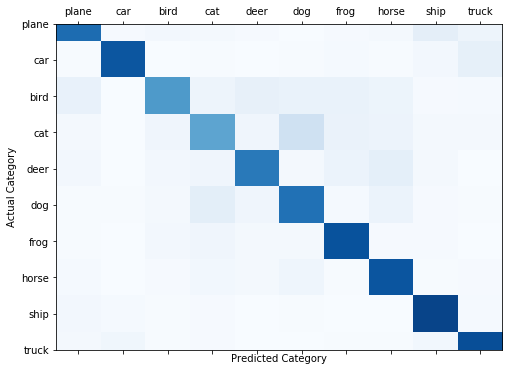

Category   - Accuracy
plane      - 76.7
car        - 85.2
bird       - 58.6
cat        - 54.0
deer       - 71.5
dog        - 74.7
frog       - 86.8
horse      - 85.8
ship       - 92.1
truck      - 88.4

Selected workers

[51 78 64 49 28 27 92 82 83 29 93 55 41 91 38]
Worker 51 : is  Stealthy_Attacker
Worker 78 : is  Honest
Worker 64 : is  Honest
Worker 49 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 27 : is  Stealthy_Attacker
Worker 92 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 83 : is  Honest
Worker 29 : is  Honest
Worker 93 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 41 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 38 : is  Stealthy_Attacker

 | Global Training Round : 24 |


Worker 51 starts training in Global Round:24 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  24


Train Epoch: 1 [0/500	(1%)]	Loss: 1.214506
Train Epoch: 1 [400/500	(81%)]	Loss: 0.858859
Train Epoch: 2 [0/500	(1%)]	Loss: 0.753685
Train Epoch: 2 [400/500	(81%)]	Loss: 0.686641
Train Epoch: 3 [0/500	(1%)]	Loss: 0.517844
Train Epoch: 3 [400/500	(81%)]	Loss: 0.297624
Train Epoch: 4 [0/500	(1%)]	Loss: 0.341585
Train Epoch: 4 [400/500	(81%)]	Loss: 0.373887
Train Epoch: 5 [0/500	(1%)]	Loss: 0.228355
Train Epoch: 5 [400/500	(81%)]	Loss: 0.338580

Performed attacks 1
Worker 51 ends training in Global Round:24 |

Worker 78 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.606518
Train Epoch: 1 [400/500	(81%)]	Loss: 0.830463
Train Epoch: 2 [0/500	(1%)]	Loss: 0.499961
Train Epoch: 2 [400/500	(81%)]	Loss: 0.641440
Train Epoch: 3 [0/500	(1%)]	Loss: 0.713602
Train Epoch: 3 [400/500	(81%)]	Loss: 0.518743
Train Epoch: 4 [0/500	(1%)]	Loss: 0.379217
Train Epoch: 4 [400/500	(81%)]	Loss: 0.446183
Train Epoch: 5 [0/500	(1%)]	Loss: 0.318240
Train Epoch: 5 [400/500	(81%)]	Loss: 0.406291

Worker 78 ends training in Global Round:24 |

Worker 64 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.881342
Train Epoch: 1 [400/500	(81%)]	Loss: 0.865681
Train Epoch: 2 [0/500	(1%)]	Loss: 0.598721
Train Epoch: 2 [400/500	(81%)]	Loss: 0.576338
Train Epoch: 3 [0/500	(1%)]	Loss: 0.331903
Train Epoch: 3 [400/500	(81%)]	Loss: 0.637062
Train Epoch: 4 [0/500	(1%)]	Loss: 0.248338
Train Epoch: 4 [400/500	(81%)]	Loss: 0.567681
Train Epoch: 5 [0/500	(1%)]	Loss: 0.349707
Train Epoch: 5 [400/500	(81%)]	Loss: 0.446348

Worker 64 ends training in Global Round:24 |

Worker 49 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.836177
Train Epoch: 1 [400/500	(81%)]	Loss: 1.015331
Train Epoch: 2 [0/500	(1%)]	Loss: 0.569462
Train Epoch: 2 [400/500	(81%)]	Loss: 0.737486
Train Epoch: 3 [0/500	(1%)]	Loss: 0.453267
Train Epoch: 3 [400/500	(81%)]	Loss: 0.865855
Train Epoch: 4 [0/500	(1%)]	Loss: 0.457871
Train Epoch: 4 [400/500	(81%)]	Loss: 0.541560
Train Epoch: 5 [0/500	(1%)]	Loss: 0.281005
Train Epoch: 5 [400/500	(81%)]	Loss: 0.431414

Worker 49 ends training in Global Round:24 |

Worker 28 starts training in Global Round:24 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  24


Train Epoch: 1 [0/500	(1%)]	Loss: 1.509187
Train Epoch: 1 [400/500	(81%)]	Loss: 0.707473
Train Epoch: 2 [0/500	(1%)]	Loss: 0.530840
Train Epoch: 2 [400/500	(81%)]	Loss: 0.866848
Train Epoch: 3 [0/500	(1%)]	Loss: 0.525606
Train Epoch: 3 [400/500	(81%)]	Loss: 0.474480
Train Epoch: 4 [0/500	(1%)]	Loss: 0.250980
Train Epoch: 4 [400/500	(81%)]	Loss: 0.582151
Train Epoch: 5 [0/500	(1%)]	Loss: 0.324870
Train Epoch: 5 [400/500	(81%)]	Loss: 0.367675

Performed attacks 2
Worker 28 ends training in Global Round:24 |

Worker 27 starts training in Global Round:24 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  24


Train Epoch: 1 [0/500	(1%)]	Loss: 1.463760
Train Epoch: 1 [400/500	(81%)]	Loss: 0.857336
Train Epoch: 2 [0/500	(1%)]	Loss: 0.532111
Train Epoch: 2 [400/500	(81%)]	Loss: 0.529005
Train Epoch: 3 [0/500	(1%)]	Loss: 0.529110
Train Epoch: 3 [400/500	(81%)]	Loss: 0.611230
Train Epoch: 4 [0/500	(1%)]	Loss: 0.401370
Train Epoch: 4 [400/500	(81%)]	Loss: 0.563878
Train Epoch: 5 [0/500	(1%)]	Loss: 0.301311
Train Epoch: 5 [400/500	(81%)]	Loss: 0.469446

Performed attacks 3
Worker 27 ends training in Global Round:24 |

Worker 92 starts training in Global Round:24 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  24


Train Epoch: 1 [0/500	(1%)]	Loss: 1.347223
Train Epoch: 1 [400/500	(81%)]	Loss: 0.690630
Train Epoch: 2 [0/500	(1%)]	Loss: 0.378652
Train Epoch: 2 [400/500	(81%)]	Loss: 0.498473
Train Epoch: 3 [0/500	(1%)]	Loss: 0.434532
Train Epoch: 3 [400/500	(81%)]	Loss: 0.586745
Train Epoch: 4 [0/500	(1%)]	Loss: 0.426475
Train Epoch: 4 [400/500	(81%)]	Loss: 0.698071
Train Epoch: 5 [0/500	(1%)]	Loss: 0.296256
Train Epoch: 5 [400/500	(81%)]	Loss: 0.502709

Performed attacks 4
Worker 92 ends training in Global Round:24 |

Worker 82 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.657222
Train Epoch: 1 [400/500	(81%)]	Loss: 0.648161
Train Epoch: 2 [0/500	(1%)]	Loss: 0.488170
Train Epoch: 2 [400/500	(81%)]	Loss: 0.638785
Train Epoch: 3 [0/500	(1%)]	Loss: 0.402504
Train Epoch: 3 [400/500	(81%)]	Loss: 0.458241
Train Epoch: 4 [0/500	(1%)]	Loss: 0.338915
Train Epoch: 4 [400/500	(81%)]	Loss: 0.379277
Train Epoch: 5 [0/500	(1%)]	Loss: 0.319723
Train Epoch: 5 [400/500	(81%)]	Loss: 0.494151

Worker 82 ends training in Global Round:24 |

Worker 83 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.632679
Train Epoch: 1 [400/500	(81%)]	Loss: 0.618242
Train Epoch: 2 [0/500	(1%)]	Loss: 0.462575
Train Epoch: 2 [400/500	(81%)]	Loss: 0.482866
Train Epoch: 3 [0/500	(1%)]	Loss: 0.377154
Train Epoch: 3 [400/500	(81%)]	Loss: 0.464908
Train Epoch: 4 [0/500	(1%)]	Loss: 0.381669
Train Epoch: 4 [400/500	(81%)]	Loss: 0.369669
Train Epoch: 5 [0/500	(1%)]	Loss: 0.232498
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242657

Worker 83 ends training in Global Round:24 |

Worker 29 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.672930
Train Epoch: 1 [400/500	(81%)]	Loss: 0.723615
Train Epoch: 2 [0/500	(1%)]	Loss: 0.545826
Train Epoch: 2 [400/500	(81%)]	Loss: 0.549596
Train Epoch: 3 [0/500	(1%)]	Loss: 0.360866
Train Epoch: 3 [400/500	(81%)]	Loss: 0.347887
Train Epoch: 4 [0/500	(1%)]	Loss: 0.293291
Train Epoch: 4 [400/500	(81%)]	Loss: 0.250470
Train Epoch: 5 [0/500	(1%)]	Loss: 0.209743
Train Epoch: 5 [400/500	(81%)]	Loss: 0.334102

Worker 29 ends training in Global Round:24 |

Worker 93 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.765049
Train Epoch: 1 [400/500	(81%)]	Loss: 0.735593
Train Epoch: 2 [0/500	(1%)]	Loss: 0.363253
Train Epoch: 2 [400/500	(81%)]	Loss: 0.404476
Train Epoch: 3 [0/500	(1%)]	Loss: 0.440982
Train Epoch: 3 [400/500	(81%)]	Loss: 0.352140
Train Epoch: 4 [0/500	(1%)]	Loss: 0.216290
Train Epoch: 4 [400/500	(81%)]	Loss: 0.299936
Train Epoch: 5 [0/500	(1%)]	Loss: 0.220202
Train Epoch: 5 [400/500	(81%)]	Loss: 0.535156

Worker 93 ends training in Global Round:24 |

Worker 55 starts training in Global Round:24 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  24


Train Epoch: 1 [0/500	(1%)]	Loss: 1.221478
Train Epoch: 1 [400/500	(81%)]	Loss: 0.766413
Train Epoch: 2 [0/500	(1%)]	Loss: 0.718160
Train Epoch: 2 [400/500	(81%)]	Loss: 0.745288
Train Epoch: 3 [0/500	(1%)]	Loss: 0.359940
Train Epoch: 3 [400/500	(81%)]	Loss: 0.565863
Train Epoch: 4 [0/500	(1%)]	Loss: 0.287752
Train Epoch: 4 [400/500	(81%)]	Loss: 0.475202
Train Epoch: 5 [0/500	(1%)]	Loss: 0.269137
Train Epoch: 5 [400/500	(81%)]	Loss: 0.402134

Performed attacks 5
Worker 55 ends training in Global Round:24 |

Worker 41 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.607488
Train Epoch: 1 [400/500	(81%)]	Loss: 0.807151
Train Epoch: 2 [0/500	(1%)]	Loss: 0.466536
Train Epoch: 2 [400/500	(81%)]	Loss: 0.640226
Train Epoch: 3 [0/500	(1%)]	Loss: 0.313669
Train Epoch: 3 [400/500	(81%)]	Loss: 0.672317
Train Epoch: 4 [0/500	(1%)]	Loss: 0.418752
Train Epoch: 4 [400/500	(81%)]	Loss: 0.412932
Train Epoch: 5 [0/500	(1%)]	Loss: 0.330002
Train Epoch: 5 [400/500	(81%)]	Loss: 0.487614

Worker 41 ends training in Global Round:24 |

Worker 91 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.631196
Train Epoch: 1 [400/500	(81%)]	Loss: 0.766288
Train Epoch: 2 [0/500	(1%)]	Loss: 0.587761
Train Epoch: 2 [400/500	(81%)]	Loss: 0.489293
Train Epoch: 3 [0/500	(1%)]	Loss: 0.369284
Train Epoch: 3 [400/500	(81%)]	Loss: 0.395926
Train Epoch: 4 [0/500	(1%)]	Loss: 0.329477
Train Epoch: 4 [400/500	(81%)]	Loss: 0.307409
Train Epoch: 5 [0/500	(1%)]	Loss: 0.207925
Train Epoch: 5 [400/500	(81%)]	Loss: 0.412436

Worker 91 ends training in Global Round:24 |

Worker 38 starts training in Global Round:24 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.736283
Train Epoch: 1 [400/500	(81%)]	Loss: 0.643861
Train Epoch: 2 [0/500	(1%)]	Loss: 0.384478
Train Epoch: 2 [400/500	(81%)]	Loss: 0.449305
Train Epoch: 3 [0/500	(1%)]	Loss: 0.320750
Train Epoch: 3 [400/500	(81%)]	Loss: 0.579105
Train Epoch: 4 [0/500	(1%)]	Loss: 0.287668
Train Epoch: 4 [400/500	(81%)]	Loss: 0.467727
Train Epoch: 5 [0/500	(1%)]	Loss: 0.301007
Train Epoch: 5 [400/500	(81%)]	Loss: 0.413234

Worker 38 ends training in Global Round:24 |
Last layer biases  [array([ 0.03653509, -0.02857473, -0.0144969 ,  0.03304687,  0.04306095,
       -0.01604037,  0.04243208, -0.0240902 , -0.01733369, -0.03863758],
      dtype=float32), array([ 0.03221315, -0.03041034, -0.01795837,  0.03481455,  0.03637728,
       -0.01729988,  0.04113735, -0.0068028 , -0.01818125, -0.03798814],
      dtype=float32), array([ 0.03126756, -0.0307135 , -0.01840291,  0.03437327,  0.03685293,
       -0.01836386,  0.04214374, -0.00493924, -0.01654837, -0.03976806],
      dtyp

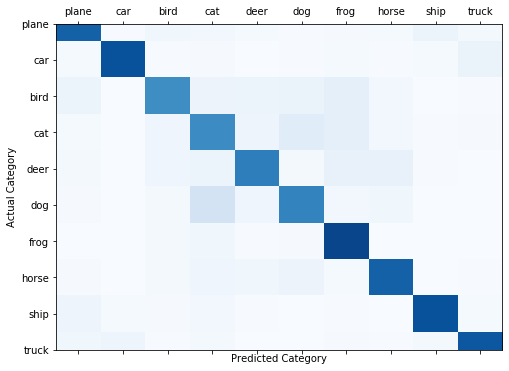

Category   - Accuracy
plane      - 81.2
car        - 86.8
bird       - 63.7
cat        - 64.8
deer       - 69.9
dog        - 67.9
frog       - 91.5
horse      - 81.1
ship       - 87.1
truck      - 85.1

Selected workers

[ 74   1  34  38  67 100   2   5  37   4  90  99  53  57  95]
Worker 74 : is  Honest
Worker 1 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 67 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 2 : is  Honest
Worker 5 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 4 : is  Honest
Worker 90 : is  Honest
Worker 99 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 57 : is  Honest
Worker 95 : is  Honest

 | Global Training Round : 25 |


Worker 74 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.605173
Train Epoch: 1 [400/500	(81%)]	Loss: 0.636261
Train Epoch: 2 [0/500	(1%)]	Loss: 0.469230
Train Epoch: 2 [400/500	(81%)]	Loss: 0.479886
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261516
Train Epoch: 3 [400/500	(81%)]	Loss: 0.475430
Train Epoch: 4 [0/500	(1%)]	Loss: 0.318855
Train Epoch: 4 [400/500	(81%)]	Loss: 0.583483
Train Epoch: 5 [0/500	(1%)]	Loss: 0.228496
Train Epoch: 5 [400/500	(81%)]	Loss: 0.363243

Worker 74 ends training in Global Round:25 |

Worker 1 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.689316
Train Epoch: 1 [400/500	(81%)]	Loss: 0.671082
Train Epoch: 2 [0/500	(1%)]	Loss: 0.337396
Train Epoch: 2 [400/500	(81%)]	Loss: 0.686714
Train Epoch: 3 [0/500	(1%)]	Loss: 0.409352
Train Epoch: 3 [400/500	(81%)]	Loss: 0.420229
Train Epoch: 4 [0/500	(1%)]	Loss: 0.282206
Train Epoch: 4 [400/500	(81%)]	Loss: 0.501185
Train Epoch: 5 [0/500	(1%)]	Loss: 0.376778
Train Epoch: 5 [400/500	(81%)]	Loss: 0.322023

Worker 1 ends training in Global Round:25 |

Worker 34 starts training in Global Round:25 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  25


Train Epoch: 1 [0/500	(1%)]	Loss: 1.141430
Train Epoch: 1 [400/500	(81%)]	Loss: 0.840113
Train Epoch: 2 [0/500	(1%)]	Loss: 0.598518
Train Epoch: 2 [400/500	(81%)]	Loss: 0.565618
Train Epoch: 3 [0/500	(1%)]	Loss: 0.362798
Train Epoch: 3 [400/500	(81%)]	Loss: 0.479968
Train Epoch: 4 [0/500	(1%)]	Loss: 0.390711
Train Epoch: 4 [400/500	(81%)]	Loss: 0.515040
Train Epoch: 5 [0/500	(1%)]	Loss: 0.205926
Train Epoch: 5 [400/500	(81%)]	Loss: 0.435432

Performed attacks 1
Worker 34 ends training in Global Round:25 |

Worker 38 starts training in Global Round:25 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  25


Train Epoch: 1 [0/500	(1%)]	Loss: 1.259682
Train Epoch: 1 [400/500	(81%)]	Loss: 0.650050
Train Epoch: 2 [0/500	(1%)]	Loss: 0.405831
Train Epoch: 2 [400/500	(81%)]	Loss: 0.414611
Train Epoch: 3 [0/500	(1%)]	Loss: 0.304439
Train Epoch: 3 [400/500	(81%)]	Loss: 0.393124
Train Epoch: 4 [0/500	(1%)]	Loss: 0.315540
Train Epoch: 4 [400/500	(81%)]	Loss: 0.270658
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160391
Train Epoch: 5 [400/500	(81%)]	Loss: 0.307641

Performed attacks 2
Worker 38 ends training in Global Round:25 |

Worker 67 starts training in Global Round:25 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  25


Train Epoch: 1 [0/500	(1%)]	Loss: 1.310203
Train Epoch: 1 [400/500	(81%)]	Loss: 0.823074
Train Epoch: 2 [0/500	(1%)]	Loss: 0.454470
Train Epoch: 2 [400/500	(81%)]	Loss: 0.451471
Train Epoch: 3 [0/500	(1%)]	Loss: 0.450662
Train Epoch: 3 [400/500	(81%)]	Loss: 0.424905
Train Epoch: 4 [0/500	(1%)]	Loss: 0.414446
Train Epoch: 4 [400/500	(81%)]	Loss: 0.378648
Train Epoch: 5 [0/500	(1%)]	Loss: 0.357386
Train Epoch: 5 [400/500	(81%)]	Loss: 0.515466

Performed attacks 3
Worker 67 ends training in Global Round:25 |

Worker 100 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.447291
Train Epoch: 1 [400/500	(81%)]	Loss: 0.569935
Train Epoch: 2 [0/500	(1%)]	Loss: 0.229371
Train Epoch: 2 [400/500	(81%)]	Loss: 0.380451
Train Epoch: 3 [0/500	(1%)]	Loss: 0.241471
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234377
Train Epoch: 4 [0/500	(1%)]	Loss: 0.241232
Train Epoch: 4 [400/500	(81%)]	Loss: 0.214208
Train Epoch: 5 [0/500	(1%)]	Loss: 0.214335
Train Epoch: 5 [400/500	(81%)]	Loss: 0.144132

Worker 100 ends training in Global Round:25 |

Worker 2 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.573569
Train Epoch: 1 [400/500	(81%)]	Loss: 0.624314
Train Epoch: 2 [0/500	(1%)]	Loss: 0.300617
Train Epoch: 2 [400/500	(81%)]	Loss: 0.401908
Train Epoch: 3 [0/500	(1%)]	Loss: 0.351629
Train Epoch: 3 [400/500	(81%)]	Loss: 0.378283
Train Epoch: 4 [0/500	(1%)]	Loss: 0.194979
Train Epoch: 4 [400/500	(81%)]	Loss: 0.217125
Train Epoch: 5 [0/500	(1%)]	Loss: 0.149332
Train Epoch: 5 [400/500	(81%)]	Loss: 0.231055

Worker 2 ends training in Global Round:25 |

Worker 5 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.599846
Train Epoch: 1 [400/500	(81%)]	Loss: 0.592360
Train Epoch: 2 [0/500	(1%)]	Loss: 0.556367
Train Epoch: 2 [400/500	(81%)]	Loss: 0.553398
Train Epoch: 3 [0/500	(1%)]	Loss: 0.440581
Train Epoch: 3 [400/500	(81%)]	Loss: 0.456300
Train Epoch: 4 [0/500	(1%)]	Loss: 0.258027
Train Epoch: 4 [400/500	(81%)]	Loss: 0.324061
Train Epoch: 5 [0/500	(1%)]	Loss: 0.282672
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253244

Worker 5 ends training in Global Round:25 |

Worker 37 starts training in Global Round:25 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  25


Train Epoch: 1 [0/500	(1%)]	Loss: 1.343568
Train Epoch: 1 [400/500	(81%)]	Loss: 0.695845
Train Epoch: 2 [0/500	(1%)]	Loss: 0.412158
Train Epoch: 2 [400/500	(81%)]	Loss: 0.625864
Train Epoch: 3 [0/500	(1%)]	Loss: 0.448559
Train Epoch: 3 [400/500	(81%)]	Loss: 0.556578
Train Epoch: 4 [0/500	(1%)]	Loss: 0.359117
Train Epoch: 4 [400/500	(81%)]	Loss: 0.310101
Train Epoch: 5 [0/500	(1%)]	Loss: 0.295176
Train Epoch: 5 [400/500	(81%)]	Loss: 0.509364

Performed attacks 4
Worker 37 ends training in Global Round:25 |

Worker 4 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.588022
Train Epoch: 1 [400/500	(81%)]	Loss: 0.681046
Train Epoch: 2 [0/500	(1%)]	Loss: 0.526617
Train Epoch: 2 [400/500	(81%)]	Loss: 0.396662
Train Epoch: 3 [0/500	(1%)]	Loss: 0.393405
Train Epoch: 3 [400/500	(81%)]	Loss: 0.532476
Train Epoch: 4 [0/500	(1%)]	Loss: 0.380993
Train Epoch: 4 [400/500	(81%)]	Loss: 0.369170
Train Epoch: 5 [0/500	(1%)]	Loss: 0.267827
Train Epoch: 5 [400/500	(81%)]	Loss: 0.432931

Worker 4 ends training in Global Round:25 |

Worker 90 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.489577
Train Epoch: 1 [400/500	(81%)]	Loss: 0.711504
Train Epoch: 2 [0/500	(1%)]	Loss: 0.361036
Train Epoch: 2 [400/500	(81%)]	Loss: 0.367628
Train Epoch: 3 [0/500	(1%)]	Loss: 0.401482
Train Epoch: 3 [400/500	(81%)]	Loss: 0.313768
Train Epoch: 4 [0/500	(1%)]	Loss: 0.335006
Train Epoch: 4 [400/500	(81%)]	Loss: 0.402284
Train Epoch: 5 [0/500	(1%)]	Loss: 0.194373
Train Epoch: 5 [400/500	(81%)]	Loss: 0.245032

Worker 90 ends training in Global Round:25 |

Worker 99 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.637246
Train Epoch: 1 [400/500	(81%)]	Loss: 0.869005
Train Epoch: 2 [0/500	(1%)]	Loss: 0.487642
Train Epoch: 2 [400/500	(81%)]	Loss: 0.482110
Train Epoch: 3 [0/500	(1%)]	Loss: 0.430391
Train Epoch: 3 [400/500	(81%)]	Loss: 0.785650
Train Epoch: 4 [0/500	(1%)]	Loss: 0.361994
Train Epoch: 4 [400/500	(81%)]	Loss: 0.371107
Train Epoch: 5 [0/500	(1%)]	Loss: 0.267893
Train Epoch: 5 [400/500	(81%)]	Loss: 0.328396

Worker 99 ends training in Global Round:25 |

Worker 53 starts training in Global Round:25 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  25


Train Epoch: 1 [0/500	(1%)]	Loss: 1.485219
Train Epoch: 1 [400/500	(81%)]	Loss: 0.666758
Train Epoch: 2 [0/500	(1%)]	Loss: 0.383322
Train Epoch: 2 [400/500	(81%)]	Loss: 0.483040
Train Epoch: 3 [0/500	(1%)]	Loss: 0.370822
Train Epoch: 3 [400/500	(81%)]	Loss: 0.674412
Train Epoch: 4 [0/500	(1%)]	Loss: 0.456199
Train Epoch: 4 [400/500	(81%)]	Loss: 0.532220
Train Epoch: 5 [0/500	(1%)]	Loss: 0.257253
Train Epoch: 5 [400/500	(81%)]	Loss: 0.288341

Performed attacks 5
Worker 53 ends training in Global Round:25 |

Worker 57 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.518980
Train Epoch: 1 [400/500	(81%)]	Loss: 0.607863
Train Epoch: 2 [0/500	(1%)]	Loss: 0.319645
Train Epoch: 2 [400/500	(81%)]	Loss: 0.621917
Train Epoch: 3 [0/500	(1%)]	Loss: 0.315836
Train Epoch: 3 [400/500	(81%)]	Loss: 0.468568
Train Epoch: 4 [0/500	(1%)]	Loss: 0.300277
Train Epoch: 4 [400/500	(81%)]	Loss: 0.352740
Train Epoch: 5 [0/500	(1%)]	Loss: 0.147140
Train Epoch: 5 [400/500	(81%)]	Loss: 0.266881

Worker 57 ends training in Global Round:25 |

Worker 95 starts training in Global Round:25 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.495015
Train Epoch: 1 [400/500	(81%)]	Loss: 0.777503
Train Epoch: 2 [0/500	(1%)]	Loss: 0.454430
Train Epoch: 2 [400/500	(81%)]	Loss: 0.621993
Train Epoch: 3 [0/500	(1%)]	Loss: 0.218803
Train Epoch: 3 [400/500	(81%)]	Loss: 0.621329
Train Epoch: 4 [0/500	(1%)]	Loss: 0.287462
Train Epoch: 4 [400/500	(81%)]	Loss: 0.386031
Train Epoch: 5 [0/500	(1%)]	Loss: 0.185478
Train Epoch: 5 [400/500	(81%)]	Loss: 0.385709

Worker 95 ends training in Global Round:25 |
Last layer biases  [array([ 0.03246668, -0.02827563, -0.01659571,  0.03519982,  0.03549578,
       -0.01553574,  0.03968603, -0.00768299, -0.02009328, -0.0387634 ],
      dtype=float32), array([ 0.03344204, -0.02927457, -0.0184283 ,  0.0340814 ,  0.04052667,
       -0.01973127,  0.03672799, -0.00512869, -0.02099706, -0.03531665],
      dtype=float32), array([ 0.03464884, -0.02609367, -0.01767882,  0.0342341 ,  0.04606418,
       -0.0177514 ,  0.04430934, -0.02531663, -0.01754986, -0.03896448],
      dtyp

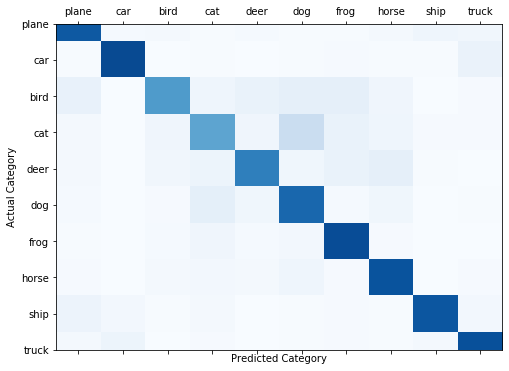

Category   - Accuracy
plane      - 84.2
car        - 89.8
bird       - 58.4
cat        - 54.2
deer       - 69.2
dog        - 78.7
frog       - 88.9
horse      - 86.4
ship       - 85.3
truck      - 87.5

Selected workers

[ 67  88  29  13  50  40 100  12  64  81  59  42  53  86  73]
Worker 67 : is  Stealthy_Attacker
Worker 88 : is  Honest
Worker 29 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 50 : is  Stealthy_Attacker
Worker 40 : is  Honest
Worker 100 : is  Honest
Worker 12 : is  Stealthy_Attacker
Worker 64 : is  Honest
Worker 81 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 86 : is  Stealthy_Attacker
Worker 73 : is  Honest

 | Global Training Round : 26 |


Worker 67 starts training in Global Round:26 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  26


Train Epoch: 1 [0/500	(1%)]	Loss: 1.408548
Train Epoch: 1 [400/500	(81%)]	Loss: 0.841699
Train Epoch: 2 [0/500	(1%)]	Loss: 0.596751
Train Epoch: 2 [400/500	(81%)]	Loss: 0.501081
Train Epoch: 3 [0/500	(1%)]	Loss: 0.405950
Train Epoch: 3 [400/500	(81%)]	Loss: 0.644786
Train Epoch: 4 [0/500	(1%)]	Loss: 0.331282
Train Epoch: 4 [400/500	(81%)]	Loss: 0.430817
Train Epoch: 5 [0/500	(1%)]	Loss: 0.348074
Train Epoch: 5 [400/500	(81%)]	Loss: 0.352122

Performed attacks 1
Worker 67 ends training in Global Round:26 |

Worker 88 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.550020
Train Epoch: 1 [400/500	(81%)]	Loss: 0.552423
Train Epoch: 2 [0/500	(1%)]	Loss: 0.362242
Train Epoch: 2 [400/500	(81%)]	Loss: 0.510564
Train Epoch: 3 [0/500	(1%)]	Loss: 0.335970
Train Epoch: 3 [400/500	(81%)]	Loss: 0.310088
Train Epoch: 4 [0/500	(1%)]	Loss: 0.343165
Train Epoch: 4 [400/500	(81%)]	Loss: 0.269089
Train Epoch: 5 [0/500	(1%)]	Loss: 0.168894
Train Epoch: 5 [400/500	(81%)]	Loss: 0.365195

Worker 88 ends training in Global Round:26 |

Worker 29 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.398949
Train Epoch: 1 [400/500	(81%)]	Loss: 0.649466
Train Epoch: 2 [0/500	(1%)]	Loss: 0.271161
Train Epoch: 2 [400/500	(81%)]	Loss: 0.421483
Train Epoch: 3 [0/500	(1%)]	Loss: 0.228664
Train Epoch: 3 [400/500	(81%)]	Loss: 0.421514
Train Epoch: 4 [0/500	(1%)]	Loss: 0.188280
Train Epoch: 4 [400/500	(81%)]	Loss: 0.385688
Train Epoch: 5 [0/500	(1%)]	Loss: 0.178458
Train Epoch: 5 [400/500	(81%)]	Loss: 0.243456

Worker 29 ends training in Global Round:26 |

Worker 13 starts training in Global Round:26 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  26


Train Epoch: 1 [0/500	(1%)]	Loss: 1.205819
Train Epoch: 1 [400/500	(81%)]	Loss: 0.986244
Train Epoch: 2 [0/500	(1%)]	Loss: 0.404498
Train Epoch: 2 [400/500	(81%)]	Loss: 0.532847
Train Epoch: 3 [0/500	(1%)]	Loss: 0.447364
Train Epoch: 3 [400/500	(81%)]	Loss: 0.497467
Train Epoch: 4 [0/500	(1%)]	Loss: 0.274052
Train Epoch: 4 [400/500	(81%)]	Loss: 0.424280
Train Epoch: 5 [0/500	(1%)]	Loss: 0.165385
Train Epoch: 5 [400/500	(81%)]	Loss: 0.217855

Performed attacks 2
Worker 13 ends training in Global Round:26 |

Worker 50 starts training in Global Round:26 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  26


Train Epoch: 1 [0/500	(1%)]	Loss: 1.329067
Train Epoch: 1 [400/500	(81%)]	Loss: 0.711381
Train Epoch: 2 [0/500	(1%)]	Loss: 0.609839
Train Epoch: 2 [400/500	(81%)]	Loss: 0.621040
Train Epoch: 3 [0/500	(1%)]	Loss: 0.374583
Train Epoch: 3 [400/500	(81%)]	Loss: 0.519006
Train Epoch: 4 [0/500	(1%)]	Loss: 0.484276
Train Epoch: 4 [400/500	(81%)]	Loss: 0.448104
Train Epoch: 5 [0/500	(1%)]	Loss: 0.345603
Train Epoch: 5 [400/500	(81%)]	Loss: 0.463768

Performed attacks 3
Worker 50 ends training in Global Round:26 |

Worker 40 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.584032
Train Epoch: 1 [400/500	(81%)]	Loss: 0.879781
Train Epoch: 2 [0/500	(1%)]	Loss: 0.417486
Train Epoch: 2 [400/500	(81%)]	Loss: 0.563637
Train Epoch: 3 [0/500	(1%)]	Loss: 0.322238
Train Epoch: 3 [400/500	(81%)]	Loss: 0.625089
Train Epoch: 4 [0/500	(1%)]	Loss: 0.304100
Train Epoch: 4 [400/500	(81%)]	Loss: 0.258646
Train Epoch: 5 [0/500	(1%)]	Loss: 0.287838
Train Epoch: 5 [400/500	(81%)]	Loss: 0.265479

Worker 40 ends training in Global Round:26 |

Worker 100 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.296920
Train Epoch: 1 [400/500	(81%)]	Loss: 0.245874
Train Epoch: 2 [0/500	(1%)]	Loss: 0.210388
Train Epoch: 2 [400/500	(81%)]	Loss: 0.235375
Train Epoch: 3 [0/500	(1%)]	Loss: 0.143786
Train Epoch: 3 [400/500	(81%)]	Loss: 0.197467
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152219
Train Epoch: 4 [400/500	(81%)]	Loss: 0.222140
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123291
Train Epoch: 5 [400/500	(81%)]	Loss: 0.286864

Worker 100 ends training in Global Round:26 |

Worker 12 starts training in Global Round:26 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  26


Train Epoch: 1 [0/500	(1%)]	Loss: 1.465536
Train Epoch: 1 [400/500	(81%)]	Loss: 0.764177
Train Epoch: 2 [0/500	(1%)]	Loss: 0.570900
Train Epoch: 2 [400/500	(81%)]	Loss: 0.406342
Train Epoch: 3 [0/500	(1%)]	Loss: 0.360695
Train Epoch: 3 [400/500	(81%)]	Loss: 0.501052
Train Epoch: 4 [0/500	(1%)]	Loss: 0.301005
Train Epoch: 4 [400/500	(81%)]	Loss: 0.253775
Train Epoch: 5 [0/500	(1%)]	Loss: 0.217140
Train Epoch: 5 [400/500	(81%)]	Loss: 0.284099

Performed attacks 4
Worker 12 ends training in Global Round:26 |

Worker 64 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.433435
Train Epoch: 1 [400/500	(81%)]	Loss: 0.740592
Train Epoch: 2 [0/500	(1%)]	Loss: 0.363717
Train Epoch: 2 [400/500	(81%)]	Loss: 0.585552
Train Epoch: 3 [0/500	(1%)]	Loss: 0.301171
Train Epoch: 3 [400/500	(81%)]	Loss: 0.494917
Train Epoch: 4 [0/500	(1%)]	Loss: 0.278274
Train Epoch: 4 [400/500	(81%)]	Loss: 0.320476
Train Epoch: 5 [0/500	(1%)]	Loss: 0.368975
Train Epoch: 5 [400/500	(81%)]	Loss: 0.488419

Worker 64 ends training in Global Round:26 |

Worker 81 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.651864
Train Epoch: 1 [400/500	(81%)]	Loss: 0.619247
Train Epoch: 2 [0/500	(1%)]	Loss: 0.407983
Train Epoch: 2 [400/500	(81%)]	Loss: 0.262923
Train Epoch: 3 [0/500	(1%)]	Loss: 0.300126
Train Epoch: 3 [400/500	(81%)]	Loss: 0.392164
Train Epoch: 4 [0/500	(1%)]	Loss: 0.207311
Train Epoch: 4 [400/500	(81%)]	Loss: 0.424121
Train Epoch: 5 [0/500	(1%)]	Loss: 0.235053
Train Epoch: 5 [400/500	(81%)]	Loss: 0.172984

Worker 81 ends training in Global Round:26 |

Worker 59 starts training in Global Round:26 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  26


Train Epoch: 1 [0/500	(1%)]	Loss: 1.228790
Train Epoch: 1 [400/500	(81%)]	Loss: 0.859201
Train Epoch: 2 [0/500	(1%)]	Loss: 0.365585
Train Epoch: 2 [400/500	(81%)]	Loss: 0.841243
Train Epoch: 3 [0/500	(1%)]	Loss: 0.378350
Train Epoch: 3 [400/500	(81%)]	Loss: 0.569363
Train Epoch: 4 [0/500	(1%)]	Loss: 0.298345
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309862
Train Epoch: 5 [0/500	(1%)]	Loss: 0.329470
Train Epoch: 5 [400/500	(81%)]	Loss: 0.571292

Performed attacks 5
Worker 59 ends training in Global Round:26 |

Worker 42 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.883612
Train Epoch: 1 [400/500	(81%)]	Loss: 0.716948
Train Epoch: 2 [0/500	(1%)]	Loss: 0.505479
Train Epoch: 2 [400/500	(81%)]	Loss: 0.612856
Train Epoch: 3 [0/500	(1%)]	Loss: 0.459574
Train Epoch: 3 [400/500	(81%)]	Loss: 0.457098
Train Epoch: 4 [0/500	(1%)]	Loss: 0.461009
Train Epoch: 4 [400/500	(81%)]	Loss: 0.751346
Train Epoch: 5 [0/500	(1%)]	Loss: 0.223800
Train Epoch: 5 [400/500	(81%)]	Loss: 0.349483

Worker 42 ends training in Global Round:26 |

Worker 53 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.663929
Train Epoch: 1 [400/500	(81%)]	Loss: 0.669293
Train Epoch: 2 [0/500	(1%)]	Loss: 0.496753
Train Epoch: 2 [400/500	(81%)]	Loss: 0.688329
Train Epoch: 3 [0/500	(1%)]	Loss: 0.348270
Train Epoch: 3 [400/500	(81%)]	Loss: 0.547489
Train Epoch: 4 [0/500	(1%)]	Loss: 0.322788
Train Epoch: 4 [400/500	(81%)]	Loss: 0.470830
Train Epoch: 5 [0/500	(1%)]	Loss: 0.234059
Train Epoch: 5 [400/500	(81%)]	Loss: 0.418154

Worker 53 ends training in Global Round:26 |

Worker 86 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.611017
Train Epoch: 1 [400/500	(81%)]	Loss: 0.670008
Train Epoch: 2 [0/500	(1%)]	Loss: 0.457360
Train Epoch: 2 [400/500	(81%)]	Loss: 0.538677
Train Epoch: 3 [0/500	(1%)]	Loss: 0.405585
Train Epoch: 3 [400/500	(81%)]	Loss: 0.215334
Train Epoch: 4 [0/500	(1%)]	Loss: 0.246220
Train Epoch: 4 [400/500	(81%)]	Loss: 0.383821
Train Epoch: 5 [0/500	(1%)]	Loss: 0.186726
Train Epoch: 5 [400/500	(81%)]	Loss: 0.249276

Worker 86 ends training in Global Round:26 |

Worker 73 starts training in Global Round:26 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.498044
Train Epoch: 1 [400/500	(81%)]	Loss: 0.364490
Train Epoch: 2 [0/500	(1%)]	Loss: 0.292385
Train Epoch: 2 [400/500	(81%)]	Loss: 0.339340
Train Epoch: 3 [0/500	(1%)]	Loss: 0.179191
Train Epoch: 3 [400/500	(81%)]	Loss: 0.406239
Train Epoch: 4 [0/500	(1%)]	Loss: 0.262865
Train Epoch: 4 [400/500	(81%)]	Loss: 0.235252
Train Epoch: 5 [0/500	(1%)]	Loss: 0.259711
Train Epoch: 5 [400/500	(81%)]	Loss: 0.331202

Worker 73 ends training in Global Round:26 |
Last layer biases  [array([ 0.03881184, -0.03063876, -0.01738328,  0.03699244,  0.04272385,
       -0.01481552,  0.04028218, -0.02477063, -0.01646081, -0.03883972],
      dtype=float32), array([ 0.03284442, -0.02819645, -0.01638872,  0.0345935 ,  0.03758668,
       -0.01788027,  0.04006267, -0.00939179, -0.01827941, -0.03904902],
      dtype=float32), array([ 0.03220562, -0.0294834 , -0.01679629,  0.03514033,  0.03995923,
       -0.02004412,  0.03958358, -0.00661595, -0.02050659, -0.03754082],
      dtyp

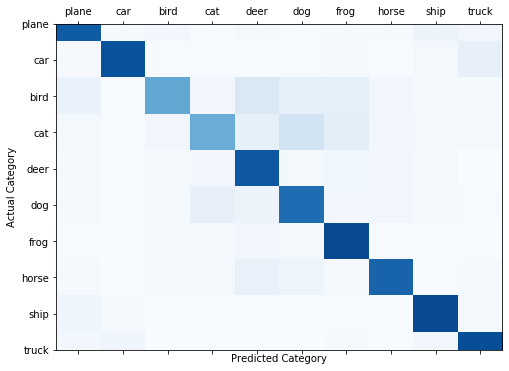

Category   - Accuracy
plane      - 83.0
car        - 86.6
bird       - 53.1
cat        - 50.7
deer       - 84.4
dog        - 76.2
frog       - 90.0
horse      - 80.0
ship       - 90.1
truck      - 88.6

Selected workers

[97 93 25  2 20 80 49 38 56 33  7 78  9 17 62]
Worker 97 : is  Stealthy_Attacker
Worker 93 : is  Honest
Worker 25 : is  Honest
Worker 2 : is  Honest
Worker 20 : is  Honest
Worker 80 : is  Honest
Worker 49 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 56 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 7 : is  Honest
Worker 78 : is  Honest
Worker 9 : is  Honest
Worker 17 : is  Honest
Worker 62 : is  Honest

 | Global Training Round : 27 |


Worker 97 starts training in Global Round:27 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  27


Train Epoch: 1 [0/500	(1%)]	Loss: 1.315118
Train Epoch: 1 [400/500	(81%)]	Loss: 0.835971
Train Epoch: 2 [0/500	(1%)]	Loss: 0.497939
Train Epoch: 2 [400/500	(81%)]	Loss: 0.535827
Train Epoch: 3 [0/500	(1%)]	Loss: 0.265573
Train Epoch: 3 [400/500	(81%)]	Loss: 0.698760
Train Epoch: 4 [0/500	(1%)]	Loss: 0.326995
Train Epoch: 4 [400/500	(81%)]	Loss: 0.403045
Train Epoch: 5 [0/500	(1%)]	Loss: 0.195439
Train Epoch: 5 [400/500	(81%)]	Loss: 0.392728

Performed attacks 1
Worker 97 ends training in Global Round:27 |

Worker 93 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.475257
Train Epoch: 1 [400/500	(81%)]	Loss: 0.629343
Train Epoch: 2 [0/500	(1%)]	Loss: 0.330628
Train Epoch: 2 [400/500	(81%)]	Loss: 0.449496
Train Epoch: 3 [0/500	(1%)]	Loss: 0.255744
Train Epoch: 3 [400/500	(81%)]	Loss: 0.387503
Train Epoch: 4 [0/500	(1%)]	Loss: 0.219324
Train Epoch: 4 [400/500	(81%)]	Loss: 0.387628
Train Epoch: 5 [0/500	(1%)]	Loss: 0.208646
Train Epoch: 5 [400/500	(81%)]	Loss: 0.454972

Worker 93 ends training in Global Round:27 |

Worker 25 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.724504
Train Epoch: 1 [400/500	(81%)]	Loss: 0.712084
Train Epoch: 2 [0/500	(1%)]	Loss: 0.558752
Train Epoch: 2 [400/500	(81%)]	Loss: 0.610284
Train Epoch: 3 [0/500	(1%)]	Loss: 0.361552
Train Epoch: 3 [400/500	(81%)]	Loss: 0.344214
Train Epoch: 4 [0/500	(1%)]	Loss: 0.266106
Train Epoch: 4 [400/500	(81%)]	Loss: 0.420954
Train Epoch: 5 [0/500	(1%)]	Loss: 0.282743
Train Epoch: 5 [400/500	(81%)]	Loss: 0.435659

Worker 25 ends training in Global Round:27 |

Worker 2 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.514076
Train Epoch: 1 [400/500	(81%)]	Loss: 0.700160
Train Epoch: 2 [0/500	(1%)]	Loss: 0.365471
Train Epoch: 2 [400/500	(81%)]	Loss: 0.438606
Train Epoch: 3 [0/500	(1%)]	Loss: 0.350843
Train Epoch: 3 [400/500	(81%)]	Loss: 0.257116
Train Epoch: 4 [0/500	(1%)]	Loss: 0.292972
Train Epoch: 4 [400/500	(81%)]	Loss: 0.251342
Train Epoch: 5 [0/500	(1%)]	Loss: 0.129225
Train Epoch: 5 [400/500	(81%)]	Loss: 0.315110

Worker 2 ends training in Global Round:27 |

Worker 20 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.570964
Train Epoch: 1 [400/500	(81%)]	Loss: 0.845348
Train Epoch: 2 [0/500	(1%)]	Loss: 0.545900
Train Epoch: 2 [400/500	(81%)]	Loss: 0.571128
Train Epoch: 3 [0/500	(1%)]	Loss: 0.269751
Train Epoch: 3 [400/500	(81%)]	Loss: 0.432196
Train Epoch: 4 [0/500	(1%)]	Loss: 0.425306
Train Epoch: 4 [400/500	(81%)]	Loss: 0.326486
Train Epoch: 5 [0/500	(1%)]	Loss: 0.222744
Train Epoch: 5 [400/500	(81%)]	Loss: 0.181121

Worker 20 ends training in Global Round:27 |

Worker 80 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.640353
Train Epoch: 1 [400/500	(81%)]	Loss: 0.612725
Train Epoch: 2 [0/500	(1%)]	Loss: 0.349361
Train Epoch: 2 [400/500	(81%)]	Loss: 0.382632
Train Epoch: 3 [0/500	(1%)]	Loss: 0.380188
Train Epoch: 3 [400/500	(81%)]	Loss: 0.351117
Train Epoch: 4 [0/500	(1%)]	Loss: 0.244030
Train Epoch: 4 [400/500	(81%)]	Loss: 0.347153
Train Epoch: 5 [0/500	(1%)]	Loss: 0.218526
Train Epoch: 5 [400/500	(81%)]	Loss: 0.141193

Worker 80 ends training in Global Round:27 |

Worker 49 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.824306
Train Epoch: 1 [400/500	(81%)]	Loss: 0.848695
Train Epoch: 2 [0/500	(1%)]	Loss: 0.427917
Train Epoch: 2 [400/500	(81%)]	Loss: 0.722375
Train Epoch: 3 [0/500	(1%)]	Loss: 0.302355
Train Epoch: 3 [400/500	(81%)]	Loss: 0.422205
Train Epoch: 4 [0/500	(1%)]	Loss: 0.405850
Train Epoch: 4 [400/500	(81%)]	Loss: 0.376096
Train Epoch: 5 [0/500	(1%)]	Loss: 0.226161
Train Epoch: 5 [400/500	(81%)]	Loss: 0.380935

Worker 49 ends training in Global Round:27 |

Worker 38 starts training in Global Round:27 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  27


Train Epoch: 1 [0/500	(1%)]	Loss: 0.711037
Train Epoch: 1 [400/500	(81%)]	Loss: 0.524287
Train Epoch: 2 [0/500	(1%)]	Loss: 0.494734
Train Epoch: 2 [400/500	(81%)]	Loss: 0.521664
Train Epoch: 3 [0/500	(1%)]	Loss: 0.354840
Train Epoch: 3 [400/500	(81%)]	Loss: 0.688514
Train Epoch: 4 [0/500	(1%)]	Loss: 0.180104
Train Epoch: 4 [400/500	(81%)]	Loss: 0.390957
Train Epoch: 5 [0/500	(1%)]	Loss: 0.258802
Train Epoch: 5 [400/500	(81%)]	Loss: 0.391466

Performed attacks 2
Worker 38 ends training in Global Round:27 |

Worker 56 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.429306
Train Epoch: 1 [400/500	(81%)]	Loss: 0.834162
Train Epoch: 2 [0/500	(1%)]	Loss: 0.411584
Train Epoch: 2 [400/500	(81%)]	Loss: 0.516530
Train Epoch: 3 [0/500	(1%)]	Loss: 0.334303
Train Epoch: 3 [400/500	(81%)]	Loss: 0.462859
Train Epoch: 4 [0/500	(1%)]	Loss: 0.215705
Train Epoch: 4 [400/500	(81%)]	Loss: 0.333521
Train Epoch: 5 [0/500	(1%)]	Loss: 0.228664
Train Epoch: 5 [400/500	(81%)]	Loss: 0.207263

Worker 56 ends training in Global Round:27 |

Worker 33 starts training in Global Round:27 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  27


Train Epoch: 1 [0/500	(1%)]	Loss: 1.389093
Train Epoch: 1 [400/500	(81%)]	Loss: 0.738744
Train Epoch: 2 [0/500	(1%)]	Loss: 0.426062
Train Epoch: 2 [400/500	(81%)]	Loss: 0.681297
Train Epoch: 3 [0/500	(1%)]	Loss: 0.496744
Train Epoch: 3 [400/500	(81%)]	Loss: 0.349952
Train Epoch: 4 [0/500	(1%)]	Loss: 0.411196
Train Epoch: 4 [400/500	(81%)]	Loss: 0.347993
Train Epoch: 5 [0/500	(1%)]	Loss: 0.284163
Train Epoch: 5 [400/500	(81%)]	Loss: 0.284650

Performed attacks 3
Worker 33 ends training in Global Round:27 |

Worker 7 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.397721
Train Epoch: 1 [400/500	(81%)]	Loss: 0.599707
Train Epoch: 2 [0/500	(1%)]	Loss: 0.380037
Train Epoch: 2 [400/500	(81%)]	Loss: 0.446853
Train Epoch: 3 [0/500	(1%)]	Loss: 0.453758
Train Epoch: 3 [400/500	(81%)]	Loss: 0.413475
Train Epoch: 4 [0/500	(1%)]	Loss: 0.252049
Train Epoch: 4 [400/500	(81%)]	Loss: 0.220001
Train Epoch: 5 [0/500	(1%)]	Loss: 0.283055
Train Epoch: 5 [400/500	(81%)]	Loss: 0.270717

Worker 7 ends training in Global Round:27 |

Worker 78 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.445704
Train Epoch: 1 [400/500	(81%)]	Loss: 0.917001
Train Epoch: 2 [0/500	(1%)]	Loss: 0.558891
Train Epoch: 2 [400/500	(81%)]	Loss: 0.444136
Train Epoch: 3 [0/500	(1%)]	Loss: 0.450047
Train Epoch: 3 [400/500	(81%)]	Loss: 0.473051
Train Epoch: 4 [0/500	(1%)]	Loss: 0.241469
Train Epoch: 4 [400/500	(81%)]	Loss: 0.308395
Train Epoch: 5 [0/500	(1%)]	Loss: 0.325842
Train Epoch: 5 [400/500	(81%)]	Loss: 0.319713

Worker 78 ends training in Global Round:27 |

Worker 9 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.640396
Train Epoch: 1 [400/500	(81%)]	Loss: 0.714399
Train Epoch: 2 [0/500	(1%)]	Loss: 0.521564
Train Epoch: 2 [400/500	(81%)]	Loss: 0.653504
Train Epoch: 3 [0/500	(1%)]	Loss: 0.416934
Train Epoch: 3 [400/500	(81%)]	Loss: 0.563562
Train Epoch: 4 [0/500	(1%)]	Loss: 0.321664
Train Epoch: 4 [400/500	(81%)]	Loss: 0.504643
Train Epoch: 5 [0/500	(1%)]	Loss: 0.325661
Train Epoch: 5 [400/500	(81%)]	Loss: 0.380418

Worker 9 ends training in Global Round:27 |

Worker 17 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.598326
Train Epoch: 1 [400/500	(81%)]	Loss: 0.606567
Train Epoch: 2 [0/500	(1%)]	Loss: 0.380319
Train Epoch: 2 [400/500	(81%)]	Loss: 0.696348
Train Epoch: 3 [0/500	(1%)]	Loss: 0.461097
Train Epoch: 3 [400/500	(81%)]	Loss: 0.513741
Train Epoch: 4 [0/500	(1%)]	Loss: 0.262402
Train Epoch: 4 [400/500	(81%)]	Loss: 0.448510
Train Epoch: 5 [0/500	(1%)]	Loss: 0.247725
Train Epoch: 5 [400/500	(81%)]	Loss: 0.273850

Worker 17 ends training in Global Round:27 |

Worker 62 starts training in Global Round:27 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.919307
Train Epoch: 1 [400/500	(81%)]	Loss: 0.783598
Train Epoch: 2 [0/500	(1%)]	Loss: 0.678795
Train Epoch: 2 [400/500	(81%)]	Loss: 0.615008
Train Epoch: 3 [0/500	(1%)]	Loss: 0.624083
Train Epoch: 3 [400/500	(81%)]	Loss: 0.607414
Train Epoch: 4 [0/500	(1%)]	Loss: 0.358135
Train Epoch: 4 [400/500	(81%)]	Loss: 0.339046
Train Epoch: 5 [0/500	(1%)]	Loss: 0.287064
Train Epoch: 5 [400/500	(81%)]	Loss: 0.354633

Worker 62 ends training in Global Round:27 |
Last layer biases  [array([ 0.03367123, -0.03137183, -0.01512268,  0.03340035,  0.0447235 ,
       -0.01308594,  0.04149126, -0.02469588, -0.01776426, -0.03534414],
      dtype=float32), array([ 0.03164239, -0.02840573, -0.01740768,  0.03225043,  0.03541015,
       -0.01606328,  0.04073849, -0.00448536, -0.01952516, -0.03825263],
      dtype=float32), array([ 0.03358144, -0.03209751, -0.01745567,  0.0326592 ,  0.03626354,
       -0.01795258,  0.04121481, -0.00273238, -0.01705131, -0.04052793],
      dtyp

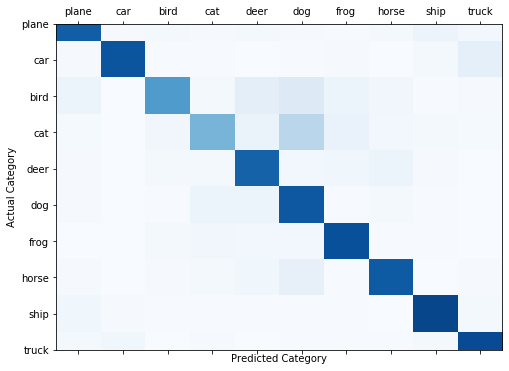

Category   - Accuracy
plane      - 82.1
car        - 85.8
bird       - 58.3
cat        - 47.2
deer       - 80.6
dog        - 84.5
frog       - 87.8
horse      - 83.5
ship       - 91.1
truck      - 89.2

Selected workers

[44 45 71 26 24 36 72  4  1 97 42 50 69 78 48]
Worker 44 : is  Stealthy_Attacker
Worker 45 : is  Honest
Worker 71 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 24 : is  Honest
Worker 36 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 4 : is  Honest
Worker 1 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 50 : is  Stealthy_Attacker
Worker 69 : is  Honest
Worker 78 : is  Honest
Worker 48 : is  Honest

 | Global Training Round : 28 |


Worker 44 starts training in Global Round:28 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  28


Train Epoch: 1 [0/500	(1%)]	Loss: 0.972886
Train Epoch: 1 [400/500	(81%)]	Loss: 0.741673
Train Epoch: 2 [0/500	(1%)]	Loss: 0.531784
Train Epoch: 2 [400/500	(81%)]	Loss: 0.414865
Train Epoch: 3 [0/500	(1%)]	Loss: 0.413893
Train Epoch: 3 [400/500	(81%)]	Loss: 0.394679
Train Epoch: 4 [0/500	(1%)]	Loss: 0.366730
Train Epoch: 4 [400/500	(81%)]	Loss: 0.349578
Train Epoch: 5 [0/500	(1%)]	Loss: 0.251319
Train Epoch: 5 [400/500	(81%)]	Loss: 0.325245

Performed attacks 1
Worker 44 ends training in Global Round:28 |

Worker 45 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.478050
Train Epoch: 1 [400/500	(81%)]	Loss: 0.603031
Train Epoch: 2 [0/500	(1%)]	Loss: 0.391895
Train Epoch: 2 [400/500	(81%)]	Loss: 0.572117
Train Epoch: 3 [0/500	(1%)]	Loss: 0.320358
Train Epoch: 3 [400/500	(81%)]	Loss: 0.388645
Train Epoch: 4 [0/500	(1%)]	Loss: 0.348356
Train Epoch: 4 [400/500	(81%)]	Loss: 0.371531
Train Epoch: 5 [0/500	(1%)]	Loss: 0.236603
Train Epoch: 5 [400/500	(81%)]	Loss: 0.267980

Worker 45 ends training in Global Round:28 |

Worker 71 starts training in Global Round:28 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  28


Train Epoch: 1 [0/500	(1%)]	Loss: 1.034445
Train Epoch: 1 [400/500	(81%)]	Loss: 0.731445
Train Epoch: 2 [0/500	(1%)]	Loss: 0.546050
Train Epoch: 2 [400/500	(81%)]	Loss: 0.506520
Train Epoch: 3 [0/500	(1%)]	Loss: 0.221131
Train Epoch: 3 [400/500	(81%)]	Loss: 0.638977
Train Epoch: 4 [0/500	(1%)]	Loss: 0.350188
Train Epoch: 4 [400/500	(81%)]	Loss: 0.363233
Train Epoch: 5 [0/500	(1%)]	Loss: 0.270089
Train Epoch: 5 [400/500	(81%)]	Loss: 0.346318

Performed attacks 2
Worker 71 ends training in Global Round:28 |

Worker 26 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.633110
Train Epoch: 1 [400/500	(81%)]	Loss: 0.673394
Train Epoch: 2 [0/500	(1%)]	Loss: 0.497957
Train Epoch: 2 [400/500	(81%)]	Loss: 0.503166
Train Epoch: 3 [0/500	(1%)]	Loss: 0.331519
Train Epoch: 3 [400/500	(81%)]	Loss: 0.550491
Train Epoch: 4 [0/500	(1%)]	Loss: 0.269200
Train Epoch: 4 [400/500	(81%)]	Loss: 0.304025
Train Epoch: 5 [0/500	(1%)]	Loss: 0.244428
Train Epoch: 5 [400/500	(81%)]	Loss: 0.437728

Worker 26 ends training in Global Round:28 |

Worker 24 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.460588
Train Epoch: 1 [400/500	(81%)]	Loss: 0.443675
Train Epoch: 2 [0/500	(1%)]	Loss: 0.337470
Train Epoch: 2 [400/500	(81%)]	Loss: 0.454164
Train Epoch: 3 [0/500	(1%)]	Loss: 0.320840
Train Epoch: 3 [400/500	(81%)]	Loss: 0.354048
Train Epoch: 4 [0/500	(1%)]	Loss: 0.183464
Train Epoch: 4 [400/500	(81%)]	Loss: 0.520256
Train Epoch: 5 [0/500	(1%)]	Loss: 0.210833
Train Epoch: 5 [400/500	(81%)]	Loss: 0.239766

Worker 24 ends training in Global Round:28 |

Worker 36 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.679028
Train Epoch: 1 [400/500	(81%)]	Loss: 0.509808
Train Epoch: 2 [0/500	(1%)]	Loss: 0.347443
Train Epoch: 2 [400/500	(81%)]	Loss: 0.517279
Train Epoch: 3 [0/500	(1%)]	Loss: 0.300854
Train Epoch: 3 [400/500	(81%)]	Loss: 0.507053
Train Epoch: 4 [0/500	(1%)]	Loss: 0.279822
Train Epoch: 4 [400/500	(81%)]	Loss: 0.398374
Train Epoch: 5 [0/500	(1%)]	Loss: 0.246903
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253005

Worker 36 ends training in Global Round:28 |

Worker 72 starts training in Global Round:28 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  28


Train Epoch: 1 [0/500	(1%)]	Loss: 1.385189
Train Epoch: 1 [400/500	(81%)]	Loss: 0.629499
Train Epoch: 2 [0/500	(1%)]	Loss: 0.453601
Train Epoch: 2 [400/500	(81%)]	Loss: 0.545551
Train Epoch: 3 [0/500	(1%)]	Loss: 0.367733
Train Epoch: 3 [400/500	(81%)]	Loss: 0.509447
Train Epoch: 4 [0/500	(1%)]	Loss: 0.434424
Train Epoch: 4 [400/500	(81%)]	Loss: 0.450942
Train Epoch: 5 [0/500	(1%)]	Loss: 0.213004
Train Epoch: 5 [400/500	(81%)]	Loss: 0.304829

Performed attacks 3
Worker 72 ends training in Global Round:28 |

Worker 4 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.361838
Train Epoch: 1 [400/500	(81%)]	Loss: 0.691831
Train Epoch: 2 [0/500	(1%)]	Loss: 0.214619
Train Epoch: 2 [400/500	(81%)]	Loss: 0.553054
Train Epoch: 3 [0/500	(1%)]	Loss: 0.216417
Train Epoch: 3 [400/500	(81%)]	Loss: 0.534510
Train Epoch: 4 [0/500	(1%)]	Loss: 0.214853
Train Epoch: 4 [400/500	(81%)]	Loss: 0.344440
Train Epoch: 5 [0/500	(1%)]	Loss: 0.246837
Train Epoch: 5 [400/500	(81%)]	Loss: 0.140130

Worker 4 ends training in Global Round:28 |

Worker 1 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.288002
Train Epoch: 1 [400/500	(81%)]	Loss: 0.623290
Train Epoch: 2 [0/500	(1%)]	Loss: 0.213802
Train Epoch: 2 [400/500	(81%)]	Loss: 0.561798
Train Epoch: 3 [0/500	(1%)]	Loss: 0.304988
Train Epoch: 3 [400/500	(81%)]	Loss: 0.418604
Train Epoch: 4 [0/500	(1%)]	Loss: 0.216115
Train Epoch: 4 [400/500	(81%)]	Loss: 0.365905
Train Epoch: 5 [0/500	(1%)]	Loss: 0.202661
Train Epoch: 5 [400/500	(81%)]	Loss: 0.414618

Worker 1 ends training in Global Round:28 |

Worker 97 starts training in Global Round:28 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  28


Train Epoch: 1 [0/500	(1%)]	Loss: 1.236005
Train Epoch: 1 [400/500	(81%)]	Loss: 0.465694
Train Epoch: 2 [0/500	(1%)]	Loss: 0.555274
Train Epoch: 2 [400/500	(81%)]	Loss: 0.566420
Train Epoch: 3 [0/500	(1%)]	Loss: 0.411280
Train Epoch: 3 [400/500	(81%)]	Loss: 0.691375
Train Epoch: 4 [0/500	(1%)]	Loss: 0.359176
Train Epoch: 4 [400/500	(81%)]	Loss: 0.236028
Train Epoch: 5 [0/500	(1%)]	Loss: 0.248333
Train Epoch: 5 [400/500	(81%)]	Loss: 0.444251

Performed attacks 4
Worker 97 ends training in Global Round:28 |

Worker 42 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.602620
Train Epoch: 1 [400/500	(81%)]	Loss: 0.857389
Train Epoch: 2 [0/500	(1%)]	Loss: 0.411965
Train Epoch: 2 [400/500	(81%)]	Loss: 0.641250
Train Epoch: 3 [0/500	(1%)]	Loss: 0.305826
Train Epoch: 3 [400/500	(81%)]	Loss: 0.453689
Train Epoch: 4 [0/500	(1%)]	Loss: 0.271116
Train Epoch: 4 [400/500	(81%)]	Loss: 0.284568
Train Epoch: 5 [0/500	(1%)]	Loss: 0.196870
Train Epoch: 5 [400/500	(81%)]	Loss: 0.347559

Worker 42 ends training in Global Round:28 |

Worker 50 starts training in Global Round:28 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  28


Train Epoch: 1 [0/500	(1%)]	Loss: 0.972512
Train Epoch: 1 [400/500	(81%)]	Loss: 0.785191
Train Epoch: 2 [0/500	(1%)]	Loss: 0.574383
Train Epoch: 2 [400/500	(81%)]	Loss: 0.661656
Train Epoch: 3 [0/500	(1%)]	Loss: 0.325691
Train Epoch: 3 [400/500	(81%)]	Loss: 0.575372
Train Epoch: 4 [0/500	(1%)]	Loss: 0.235370
Train Epoch: 4 [400/500	(81%)]	Loss: 0.380697
Train Epoch: 5 [0/500	(1%)]	Loss: 0.392490
Train Epoch: 5 [400/500	(81%)]	Loss: 0.294060

Performed attacks 5
Worker 50 ends training in Global Round:28 |

Worker 69 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.673901
Train Epoch: 1 [400/500	(81%)]	Loss: 0.714296
Train Epoch: 2 [0/500	(1%)]	Loss: 0.291397
Train Epoch: 2 [400/500	(81%)]	Loss: 0.550259
Train Epoch: 3 [0/500	(1%)]	Loss: 0.454717
Train Epoch: 3 [400/500	(81%)]	Loss: 0.333038
Train Epoch: 4 [0/500	(1%)]	Loss: 0.398273
Train Epoch: 4 [400/500	(81%)]	Loss: 0.358907
Train Epoch: 5 [0/500	(1%)]	Loss: 0.202615
Train Epoch: 5 [400/500	(81%)]	Loss: 0.323782

Worker 69 ends training in Global Round:28 |

Worker 78 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.563834
Train Epoch: 1 [400/500	(81%)]	Loss: 0.468115
Train Epoch: 2 [0/500	(1%)]	Loss: 0.354803
Train Epoch: 2 [400/500	(81%)]	Loss: 0.425504
Train Epoch: 3 [0/500	(1%)]	Loss: 0.316601
Train Epoch: 3 [400/500	(81%)]	Loss: 0.383949
Train Epoch: 4 [0/500	(1%)]	Loss: 0.167954
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309408
Train Epoch: 5 [0/500	(1%)]	Loss: 0.213254
Train Epoch: 5 [400/500	(81%)]	Loss: 0.202158

Worker 78 ends training in Global Round:28 |

Worker 48 starts training in Global Round:28 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.513596
Train Epoch: 1 [400/500	(81%)]	Loss: 0.751451
Train Epoch: 2 [0/500	(1%)]	Loss: 0.403814
Train Epoch: 2 [400/500	(81%)]	Loss: 0.495952
Train Epoch: 3 [0/500	(1%)]	Loss: 0.231408
Train Epoch: 3 [400/500	(81%)]	Loss: 0.339056
Train Epoch: 4 [0/500	(1%)]	Loss: 0.303416
Train Epoch: 4 [400/500	(81%)]	Loss: 0.337649
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172733
Train Epoch: 5 [400/500	(81%)]	Loss: 0.262521

Worker 48 ends training in Global Round:28 |
Last layer biases  [array([ 0.03201609, -0.03147627, -0.01551327,  0.03543793,  0.04555098,
       -0.01465521,  0.04090748, -0.02700305, -0.0146874 , -0.03467562],
      dtype=float32), array([ 0.0329072 , -0.02967448, -0.01569244,  0.03353483,  0.03435275,
       -0.01712299,  0.03953283, -0.00389951, -0.01753574, -0.04050085],
      dtype=float32), array([ 0.03751047, -0.02922662, -0.0142418 ,  0.03286512,  0.0417351 ,
       -0.01684084,  0.04498781, -0.02526735, -0.01862006, -0.03700022],
      dtyp

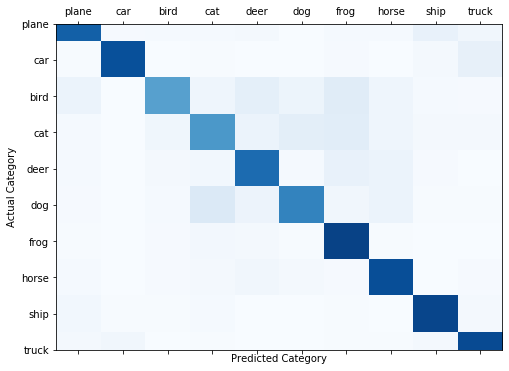

Category   - Accuracy
plane      - 81.4
car        - 87.5
bird       - 56.2
cat        - 59.4
deer       - 77.1
dog        - 67.6
frog       - 92.9
horse      - 88.4
ship       - 91.6
truck      - 89.7

Selected workers

[57 94 49 63 87  7 85 72 73 53 50 35 16 88 29]
Worker 57 : is  Honest
Worker 94 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 63 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 7 : is  Honest
Worker 85 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 73 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 50 : is  Stealthy_Attacker
Worker 35 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 88 : is  Honest
Worker 29 : is  Honest

 | Global Training Round : 29 |


Worker 57 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.732146
Train Epoch: 1 [400/500	(81%)]	Loss: 0.466368
Train Epoch: 2 [0/500	(1%)]	Loss: 0.381995
Train Epoch: 2 [400/500	(81%)]	Loss: 0.466005
Train Epoch: 3 [0/500	(1%)]	Loss: 0.214647
Train Epoch: 3 [400/500	(81%)]	Loss: 0.468708
Train Epoch: 4 [0/500	(1%)]	Loss: 0.270953
Train Epoch: 4 [400/500	(81%)]	Loss: 0.312839
Train Epoch: 5 [0/500	(1%)]	Loss: 0.151939
Train Epoch: 5 [400/500	(81%)]	Loss: 0.386692

Worker 57 ends training in Global Round:29 |

Worker 94 starts training in Global Round:29 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  29


Train Epoch: 1 [0/500	(1%)]	Loss: 1.236296
Train Epoch: 1 [400/500	(81%)]	Loss: 0.957273
Train Epoch: 2 [0/500	(1%)]	Loss: 0.688684
Train Epoch: 2 [400/500	(81%)]	Loss: 0.573305
Train Epoch: 3 [0/500	(1%)]	Loss: 0.339850
Train Epoch: 3 [400/500	(81%)]	Loss: 0.340942
Train Epoch: 4 [0/500	(1%)]	Loss: 0.259267
Train Epoch: 4 [400/500	(81%)]	Loss: 0.332321
Train Epoch: 5 [0/500	(1%)]	Loss: 0.159718
Train Epoch: 5 [400/500	(81%)]	Loss: 0.282297

Performed attacks 1
Worker 94 ends training in Global Round:29 |

Worker 49 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.446267
Train Epoch: 1 [400/500	(81%)]	Loss: 0.687715
Train Epoch: 2 [0/500	(1%)]	Loss: 0.347145
Train Epoch: 2 [400/500	(81%)]	Loss: 0.402761
Train Epoch: 3 [0/500	(1%)]	Loss: 0.552678
Train Epoch: 3 [400/500	(81%)]	Loss: 0.491274
Train Epoch: 4 [0/500	(1%)]	Loss: 0.206206
Train Epoch: 4 [400/500	(81%)]	Loss: 0.278541
Train Epoch: 5 [0/500	(1%)]	Loss: 0.163804
Train Epoch: 5 [400/500	(81%)]	Loss: 0.360393

Worker 49 ends training in Global Round:29 |

Worker 63 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.484228
Train Epoch: 1 [400/500	(81%)]	Loss: 0.814576
Train Epoch: 2 [0/500	(1%)]	Loss: 0.315804
Train Epoch: 2 [400/500	(81%)]	Loss: 0.325508
Train Epoch: 3 [0/500	(1%)]	Loss: 0.366179
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260536
Train Epoch: 4 [0/500	(1%)]	Loss: 0.186179
Train Epoch: 4 [400/500	(81%)]	Loss: 0.294427
Train Epoch: 5 [0/500	(1%)]	Loss: 0.154308
Train Epoch: 5 [400/500	(81%)]	Loss: 0.264040

Worker 63 ends training in Global Round:29 |

Worker 87 starts training in Global Round:29 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  29


Train Epoch: 1 [0/500	(1%)]	Loss: 1.277830
Train Epoch: 1 [400/500	(81%)]	Loss: 0.603978
Train Epoch: 2 [0/500	(1%)]	Loss: 0.445481
Train Epoch: 2 [400/500	(81%)]	Loss: 0.491116
Train Epoch: 3 [0/500	(1%)]	Loss: 0.421905
Train Epoch: 3 [400/500	(81%)]	Loss: 0.694485
Train Epoch: 4 [0/500	(1%)]	Loss: 0.422141
Train Epoch: 4 [400/500	(81%)]	Loss: 0.350778
Train Epoch: 5 [0/500	(1%)]	Loss: 0.255071
Train Epoch: 5 [400/500	(81%)]	Loss: 0.271518

Performed attacks 2
Worker 87 ends training in Global Round:29 |

Worker 7 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.411991
Train Epoch: 1 [400/500	(81%)]	Loss: 0.549272
Train Epoch: 2 [0/500	(1%)]	Loss: 0.326911
Train Epoch: 2 [400/500	(81%)]	Loss: 0.453066
Train Epoch: 3 [0/500	(1%)]	Loss: 0.266698
Train Epoch: 3 [400/500	(81%)]	Loss: 0.505310
Train Epoch: 4 [0/500	(1%)]	Loss: 0.254021
Train Epoch: 4 [400/500	(81%)]	Loss: 0.358967
Train Epoch: 5 [0/500	(1%)]	Loss: 0.167296
Train Epoch: 5 [400/500	(81%)]	Loss: 0.379193

Worker 7 ends training in Global Round:29 |

Worker 85 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.436014
Train Epoch: 1 [400/500	(81%)]	Loss: 0.637443
Train Epoch: 2 [0/500	(1%)]	Loss: 0.412145
Train Epoch: 2 [400/500	(81%)]	Loss: 0.440999
Train Epoch: 3 [0/500	(1%)]	Loss: 0.342412
Train Epoch: 3 [400/500	(81%)]	Loss: 0.383845
Train Epoch: 4 [0/500	(1%)]	Loss: 0.265896
Train Epoch: 4 [400/500	(81%)]	Loss: 0.266543
Train Epoch: 5 [0/500	(1%)]	Loss: 0.205672
Train Epoch: 5 [400/500	(81%)]	Loss: 0.301643

Worker 85 ends training in Global Round:29 |

Worker 72 starts training in Global Round:29 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  29


Train Epoch: 1 [0/500	(1%)]	Loss: 1.402395
Train Epoch: 1 [400/500	(81%)]	Loss: 0.771198
Train Epoch: 2 [0/500	(1%)]	Loss: 0.433666
Train Epoch: 2 [400/500	(81%)]	Loss: 0.809325
Train Epoch: 3 [0/500	(1%)]	Loss: 0.385538
Train Epoch: 3 [400/500	(81%)]	Loss: 0.535843
Train Epoch: 4 [0/500	(1%)]	Loss: 0.338479
Train Epoch: 4 [400/500	(81%)]	Loss: 0.379875
Train Epoch: 5 [0/500	(1%)]	Loss: 0.263992
Train Epoch: 5 [400/500	(81%)]	Loss: 0.292620

Performed attacks 3
Worker 72 ends training in Global Round:29 |

Worker 73 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.447627
Train Epoch: 1 [400/500	(81%)]	Loss: 0.357350
Train Epoch: 2 [0/500	(1%)]	Loss: 0.283286
Train Epoch: 2 [400/500	(81%)]	Loss: 0.370554
Train Epoch: 3 [0/500	(1%)]	Loss: 0.153681
Train Epoch: 3 [400/500	(81%)]	Loss: 0.356619
Train Epoch: 4 [0/500	(1%)]	Loss: 0.131714
Train Epoch: 4 [400/500	(81%)]	Loss: 0.501284
Train Epoch: 5 [0/500	(1%)]	Loss: 0.194142
Train Epoch: 5 [400/500	(81%)]	Loss: 0.290091

Worker 73 ends training in Global Round:29 |

Worker 53 starts training in Global Round:29 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  29


Train Epoch: 1 [0/500	(1%)]	Loss: 1.185601
Train Epoch: 1 [400/500	(81%)]	Loss: 0.521153
Train Epoch: 2 [0/500	(1%)]	Loss: 0.311464
Train Epoch: 2 [400/500	(81%)]	Loss: 0.521438
Train Epoch: 3 [0/500	(1%)]	Loss: 0.340353
Train Epoch: 3 [400/500	(81%)]	Loss: 0.581797
Train Epoch: 4 [0/500	(1%)]	Loss: 0.349534
Train Epoch: 4 [400/500	(81%)]	Loss: 0.451579
Train Epoch: 5 [0/500	(1%)]	Loss: 0.269744
Train Epoch: 5 [400/500	(81%)]	Loss: 0.457583

Performed attacks 4
Worker 53 ends training in Global Round:29 |

Worker 50 starts training in Global Round:29 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  29


Train Epoch: 1 [0/500	(1%)]	Loss: 1.233819
Train Epoch: 1 [400/500	(81%)]	Loss: 0.887424
Train Epoch: 2 [0/500	(1%)]	Loss: 0.549977
Train Epoch: 2 [400/500	(81%)]	Loss: 0.684510
Train Epoch: 3 [0/500	(1%)]	Loss: 0.330943
Train Epoch: 3 [400/500	(81%)]	Loss: 0.792367
Train Epoch: 4 [0/500	(1%)]	Loss: 0.512059
Train Epoch: 4 [400/500	(81%)]	Loss: 0.330909
Train Epoch: 5 [0/500	(1%)]	Loss: 0.259479
Train Epoch: 5 [400/500	(81%)]	Loss: 0.653597

Performed attacks 5
Worker 50 ends training in Global Round:29 |

Worker 35 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.508328
Train Epoch: 1 [400/500	(81%)]	Loss: 0.693509
Train Epoch: 2 [0/500	(1%)]	Loss: 0.354232
Train Epoch: 2 [400/500	(81%)]	Loss: 0.491860
Train Epoch: 3 [0/500	(1%)]	Loss: 0.461498
Train Epoch: 3 [400/500	(81%)]	Loss: 0.475434
Train Epoch: 4 [0/500	(1%)]	Loss: 0.266225
Train Epoch: 4 [400/500	(81%)]	Loss: 0.246926
Train Epoch: 5 [0/500	(1%)]	Loss: 0.320629
Train Epoch: 5 [400/500	(81%)]	Loss: 0.222855

Worker 35 ends training in Global Round:29 |

Worker 16 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.612789
Train Epoch: 1 [400/500	(81%)]	Loss: 1.254343
Train Epoch: 2 [0/500	(1%)]	Loss: 0.451566
Train Epoch: 2 [400/500	(81%)]	Loss: 0.538597
Train Epoch: 3 [0/500	(1%)]	Loss: 0.466559
Train Epoch: 3 [400/500	(81%)]	Loss: 0.549525
Train Epoch: 4 [0/500	(1%)]	Loss: 0.337295
Train Epoch: 4 [400/500	(81%)]	Loss: 0.248971
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193535
Train Epoch: 5 [400/500	(81%)]	Loss: 0.413539

Worker 16 ends training in Global Round:29 |

Worker 88 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.444256
Train Epoch: 1 [400/500	(81%)]	Loss: 0.619141
Train Epoch: 2 [0/500	(1%)]	Loss: 0.319706
Train Epoch: 2 [400/500	(81%)]	Loss: 0.390370
Train Epoch: 3 [0/500	(1%)]	Loss: 0.196537
Train Epoch: 3 [400/500	(81%)]	Loss: 0.358071
Train Epoch: 4 [0/500	(1%)]	Loss: 0.138124
Train Epoch: 4 [400/500	(81%)]	Loss: 0.302103
Train Epoch: 5 [0/500	(1%)]	Loss: 0.179278
Train Epoch: 5 [400/500	(81%)]	Loss: 0.070089

Worker 88 ends training in Global Round:29 |

Worker 29 starts training in Global Round:29 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.400901
Train Epoch: 1 [400/500	(81%)]	Loss: 0.546974
Train Epoch: 2 [0/500	(1%)]	Loss: 0.270997
Train Epoch: 2 [400/500	(81%)]	Loss: 0.488580
Train Epoch: 3 [0/500	(1%)]	Loss: 0.274726
Train Epoch: 3 [400/500	(81%)]	Loss: 0.284072
Train Epoch: 4 [0/500	(1%)]	Loss: 0.257625
Train Epoch: 4 [400/500	(81%)]	Loss: 0.236453
Train Epoch: 5 [0/500	(1%)]	Loss: 0.163326
Train Epoch: 5 [400/500	(81%)]	Loss: 0.153506

Worker 29 ends training in Global Round:29 |
Last layer biases  [array([ 0.03076156, -0.03092615, -0.0174575 ,  0.03599235,  0.03615844,
       -0.01762526,  0.04001426, -0.00322839, -0.01827226, -0.0395154 ],
      dtype=float32), array([ 0.03747299, -0.03007085, -0.01431844,  0.03860502,  0.04552912,
       -0.01553093,  0.03884716, -0.02968374, -0.018019  , -0.03692966],
      dtype=float32), array([ 0.03298997, -0.03080294, -0.01650527,  0.03536798,  0.0370058 ,
       -0.01991686,  0.04005631, -0.00252437, -0.02072902, -0.03903997],
      dtyp

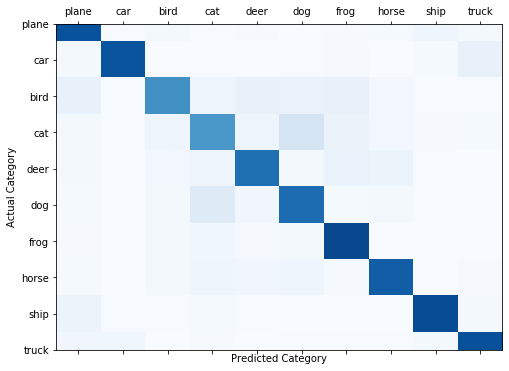

Category   - Accuracy
plane      - 87.3
car        - 86.2
bird       - 62.5
cat        - 59.8
deer       - 75.7
dog        - 76.9
frog       - 90.5
horse      - 82.6
ship       - 88.8
truck      - 87.6

Selected workers

[94  5  2 24 61 72 40 41 42 83 60 74 53 95 93]
Worker 94 : is  Stealthy_Attacker
Worker 5 : is  Honest
Worker 2 : is  Honest
Worker 24 : is  Honest
Worker 61 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 40 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 83 : is  Honest
Worker 60 : is  Honest
Worker 74 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 95 : is  Honest
Worker 93 : is  Honest

 | Global Training Round : 30 |


Worker 94 starts training in Global Round:30 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  30


Train Epoch: 1 [0/500	(1%)]	Loss: 1.464465
Train Epoch: 1 [400/500	(81%)]	Loss: 0.981073
Train Epoch: 2 [0/500	(1%)]	Loss: 0.457917
Train Epoch: 2 [400/500	(81%)]	Loss: 0.427667
Train Epoch: 3 [0/500	(1%)]	Loss: 0.398393
Train Epoch: 3 [400/500	(81%)]	Loss: 0.408398
Train Epoch: 4 [0/500	(1%)]	Loss: 0.228225
Train Epoch: 4 [400/500	(81%)]	Loss: 0.278379
Train Epoch: 5 [0/500	(1%)]	Loss: 0.219839
Train Epoch: 5 [400/500	(81%)]	Loss: 0.244236

Performed attacks 1
Worker 94 ends training in Global Round:30 |

Worker 5 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.661212
Train Epoch: 1 [400/500	(81%)]	Loss: 0.513051
Train Epoch: 2 [0/500	(1%)]	Loss: 0.297623
Train Epoch: 2 [400/500	(81%)]	Loss: 0.412604
Train Epoch: 3 [0/500	(1%)]	Loss: 0.263604
Train Epoch: 3 [400/500	(81%)]	Loss: 0.550315
Train Epoch: 4 [0/500	(1%)]	Loss: 0.233487
Train Epoch: 4 [400/500	(81%)]	Loss: 0.330159
Train Epoch: 5 [0/500	(1%)]	Loss: 0.227580
Train Epoch: 5 [400/500	(81%)]	Loss: 0.269920

Worker 5 ends training in Global Round:30 |

Worker 2 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.445894
Train Epoch: 1 [400/500	(81%)]	Loss: 0.551521
Train Epoch: 2 [0/500	(1%)]	Loss: 0.258555
Train Epoch: 2 [400/500	(81%)]	Loss: 0.341165
Train Epoch: 3 [0/500	(1%)]	Loss: 0.218347
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260152
Train Epoch: 4 [0/500	(1%)]	Loss: 0.114796
Train Epoch: 4 [400/500	(81%)]	Loss: 0.245699
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148351
Train Epoch: 5 [400/500	(81%)]	Loss: 0.230443

Worker 2 ends training in Global Round:30 |

Worker 24 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.386450
Train Epoch: 1 [400/500	(81%)]	Loss: 0.429677
Train Epoch: 2 [0/500	(1%)]	Loss: 0.210739
Train Epoch: 2 [400/500	(81%)]	Loss: 0.308568
Train Epoch: 3 [0/500	(1%)]	Loss: 0.221855
Train Epoch: 3 [400/500	(81%)]	Loss: 0.247405
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200774
Train Epoch: 4 [400/500	(81%)]	Loss: 0.120865
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138994
Train Epoch: 5 [400/500	(81%)]	Loss: 0.234713

Worker 24 ends training in Global Round:30 |

Worker 61 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.675340
Train Epoch: 1 [400/500	(81%)]	Loss: 0.647261
Train Epoch: 2 [0/500	(1%)]	Loss: 0.316598
Train Epoch: 2 [400/500	(81%)]	Loss: 0.414499
Train Epoch: 3 [0/500	(1%)]	Loss: 0.326227
Train Epoch: 3 [400/500	(81%)]	Loss: 0.456551
Train Epoch: 4 [0/500	(1%)]	Loss: 0.283024
Train Epoch: 4 [400/500	(81%)]	Loss: 0.225578
Train Epoch: 5 [0/500	(1%)]	Loss: 0.291092
Train Epoch: 5 [400/500	(81%)]	Loss: 0.404218

Worker 61 ends training in Global Round:30 |

Worker 72 starts training in Global Round:30 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  30


Train Epoch: 1 [0/500	(1%)]	Loss: 1.344881
Train Epoch: 1 [400/500	(81%)]	Loss: 0.589736
Train Epoch: 2 [0/500	(1%)]	Loss: 0.399220
Train Epoch: 2 [400/500	(81%)]	Loss: 0.497435
Train Epoch: 3 [0/500	(1%)]	Loss: 0.365954
Train Epoch: 3 [400/500	(81%)]	Loss: 0.461119
Train Epoch: 4 [0/500	(1%)]	Loss: 0.244983
Train Epoch: 4 [400/500	(81%)]	Loss: 0.306844
Train Epoch: 5 [0/500	(1%)]	Loss: 0.284133
Train Epoch: 5 [400/500	(81%)]	Loss: 0.236442

Performed attacks 2
Worker 72 ends training in Global Round:30 |

Worker 40 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.541647
Train Epoch: 1 [400/500	(81%)]	Loss: 0.879295
Train Epoch: 2 [0/500	(1%)]	Loss: 0.316965
Train Epoch: 2 [400/500	(81%)]	Loss: 0.534069
Train Epoch: 3 [0/500	(1%)]	Loss: 0.279221
Train Epoch: 3 [400/500	(81%)]	Loss: 0.472963
Train Epoch: 4 [0/500	(1%)]	Loss: 0.352106
Train Epoch: 4 [400/500	(81%)]	Loss: 0.446642
Train Epoch: 5 [0/500	(1%)]	Loss: 0.216804
Train Epoch: 5 [400/500	(81%)]	Loss: 0.252507

Worker 40 ends training in Global Round:30 |

Worker 41 starts training in Global Round:30 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  30


Train Epoch: 1 [0/500	(1%)]	Loss: 0.910268
Train Epoch: 1 [400/500	(81%)]	Loss: 0.876450
Train Epoch: 2 [0/500	(1%)]	Loss: 0.483399
Train Epoch: 2 [400/500	(81%)]	Loss: 0.584855
Train Epoch: 3 [0/500	(1%)]	Loss: 0.463180
Train Epoch: 3 [400/500	(81%)]	Loss: 0.468545
Train Epoch: 4 [0/500	(1%)]	Loss: 0.413669
Train Epoch: 4 [400/500	(81%)]	Loss: 0.276920
Train Epoch: 5 [0/500	(1%)]	Loss: 0.327432
Train Epoch: 5 [400/500	(81%)]	Loss: 0.413815

Performed attacks 3
Worker 41 ends training in Global Round:30 |

Worker 42 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.565496
Train Epoch: 1 [400/500	(81%)]	Loss: 0.707363
Train Epoch: 2 [0/500	(1%)]	Loss: 0.259992
Train Epoch: 2 [400/500	(81%)]	Loss: 0.455565
Train Epoch: 3 [0/500	(1%)]	Loss: 0.415178
Train Epoch: 3 [400/500	(81%)]	Loss: 0.461289
Train Epoch: 4 [0/500	(1%)]	Loss: 0.204787
Train Epoch: 4 [400/500	(81%)]	Loss: 0.382046
Train Epoch: 5 [0/500	(1%)]	Loss: 0.310351
Train Epoch: 5 [400/500	(81%)]	Loss: 0.358637

Worker 42 ends training in Global Round:30 |

Worker 83 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.644492
Train Epoch: 1 [400/500	(81%)]	Loss: 0.755664
Train Epoch: 2 [0/500	(1%)]	Loss: 0.344128
Train Epoch: 2 [400/500	(81%)]	Loss: 0.423303
Train Epoch: 3 [0/500	(1%)]	Loss: 0.316075
Train Epoch: 3 [400/500	(81%)]	Loss: 0.413084
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200547
Train Epoch: 4 [400/500	(81%)]	Loss: 0.314519
Train Epoch: 5 [0/500	(1%)]	Loss: 0.186375
Train Epoch: 5 [400/500	(81%)]	Loss: 0.326816

Worker 83 ends training in Global Round:30 |

Worker 60 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.392908
Train Epoch: 1 [400/500	(81%)]	Loss: 0.593617
Train Epoch: 2 [0/500	(1%)]	Loss: 0.367528
Train Epoch: 2 [400/500	(81%)]	Loss: 0.476668
Train Epoch: 3 [0/500	(1%)]	Loss: 0.316778
Train Epoch: 3 [400/500	(81%)]	Loss: 0.322357
Train Epoch: 4 [0/500	(1%)]	Loss: 0.283214
Train Epoch: 4 [400/500	(81%)]	Loss: 0.408777
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157144
Train Epoch: 5 [400/500	(81%)]	Loss: 0.254260

Worker 60 ends training in Global Round:30 |

Worker 74 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.578774
Train Epoch: 1 [400/500	(81%)]	Loss: 0.772661
Train Epoch: 2 [0/500	(1%)]	Loss: 0.392081
Train Epoch: 2 [400/500	(81%)]	Loss: 0.321576
Train Epoch: 3 [0/500	(1%)]	Loss: 0.286993
Train Epoch: 3 [400/500	(81%)]	Loss: 0.219492
Train Epoch: 4 [0/500	(1%)]	Loss: 0.292642
Train Epoch: 4 [400/500	(81%)]	Loss: 0.292626
Train Epoch: 5 [0/500	(1%)]	Loss: 0.185163
Train Epoch: 5 [400/500	(81%)]	Loss: 0.309851

Worker 74 ends training in Global Round:30 |

Worker 53 starts training in Global Round:30 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  30


Train Epoch: 1 [0/500	(1%)]	Loss: 1.297593
Train Epoch: 1 [400/500	(81%)]	Loss: 0.535136
Train Epoch: 2 [0/500	(1%)]	Loss: 0.415100
Train Epoch: 2 [400/500	(81%)]	Loss: 0.668061
Train Epoch: 3 [0/500	(1%)]	Loss: 0.406933
Train Epoch: 3 [400/500	(81%)]	Loss: 0.627151
Train Epoch: 4 [0/500	(1%)]	Loss: 0.251098
Train Epoch: 4 [400/500	(81%)]	Loss: 0.524545
Train Epoch: 5 [0/500	(1%)]	Loss: 0.296466
Train Epoch: 5 [400/500	(81%)]	Loss: 0.404431

Performed attacks 4
Worker 53 ends training in Global Round:30 |

Worker 95 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.585864
Train Epoch: 1 [400/500	(81%)]	Loss: 0.495838
Train Epoch: 2 [0/500	(1%)]	Loss: 0.234069
Train Epoch: 2 [400/500	(81%)]	Loss: 0.503665
Train Epoch: 3 [0/500	(1%)]	Loss: 0.312783
Train Epoch: 3 [400/500	(81%)]	Loss: 0.391189
Train Epoch: 4 [0/500	(1%)]	Loss: 0.253782
Train Epoch: 4 [400/500	(81%)]	Loss: 0.346684
Train Epoch: 5 [0/500	(1%)]	Loss: 0.221870
Train Epoch: 5 [400/500	(81%)]	Loss: 0.443391

Worker 95 ends training in Global Round:30 |

Worker 93 starts training in Global Round:30 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.340813
Train Epoch: 1 [400/500	(81%)]	Loss: 0.517198
Train Epoch: 2 [0/500	(1%)]	Loss: 0.242825
Train Epoch: 2 [400/500	(81%)]	Loss: 0.446004
Train Epoch: 3 [0/500	(1%)]	Loss: 0.247367
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260787
Train Epoch: 4 [0/500	(1%)]	Loss: 0.207062
Train Epoch: 4 [400/500	(81%)]	Loss: 0.340693
Train Epoch: 5 [0/500	(1%)]	Loss: 0.290926
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177906

Worker 93 ends training in Global Round:30 |
Last layer biases  [array([ 0.03789405, -0.03120988, -0.01527912,  0.04037155,  0.04328757,
       -0.01567686,  0.04084039, -0.02715798, -0.01941011, -0.03775796],
      dtype=float32), array([ 0.03274313, -0.02785051, -0.01597439,  0.03795958,  0.03814617,
       -0.01964878,  0.03881108, -0.00651553, -0.02131323, -0.04045583],
      dtype=float32), array([ 0.03528837, -0.03113036, -0.01609545,  0.03486709,  0.03522331,
       -0.02031239,  0.04125577, -0.00358398, -0.02013695, -0.03947374],
      dtyp

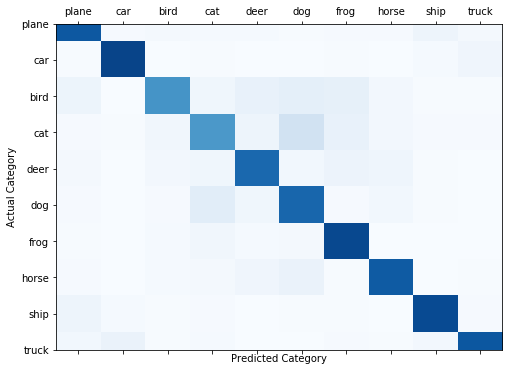

Category   - Accuracy
plane      - 84.7
car        - 92.0
bird       - 61.6
cat        - 59.6
deer       - 78.4
dog        - 79.2
frog       - 90.5
horse      - 83.4
ship       - 89.7
truck      - 84.9

Selected workers

[ 53  28  61  35  74  92  73  79  30  93   3  26  57   9 100]
Worker 53 : is  Stealthy_Attacker
Worker 28 : is  Stealthy_Attacker
Worker 61 : is  Honest
Worker 35 : is  Honest
Worker 74 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 73 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 93 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 57 : is  Honest
Worker 9 : is  Honest
Worker 100 : is  Honest

 | Global Training Round : 31 |


Worker 53 starts training in Global Round:31 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  31


Train Epoch: 1 [0/500	(1%)]	Loss: 1.289526
Train Epoch: 1 [400/500	(81%)]	Loss: 0.787221
Train Epoch: 2 [0/500	(1%)]	Loss: 0.519486
Train Epoch: 2 [400/500	(81%)]	Loss: 0.550489
Train Epoch: 3 [0/500	(1%)]	Loss: 0.338137
Train Epoch: 3 [400/500	(81%)]	Loss: 0.445360
Train Epoch: 4 [0/500	(1%)]	Loss: 0.363738
Train Epoch: 4 [400/500	(81%)]	Loss: 0.223843
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123257
Train Epoch: 5 [400/500	(81%)]	Loss: 0.160499

Performed attacks 1
Worker 53 ends training in Global Round:31 |

Worker 28 starts training in Global Round:31 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  31


Train Epoch: 1 [0/500	(1%)]	Loss: 1.259329
Train Epoch: 1 [400/500	(81%)]	Loss: 0.824281
Train Epoch: 2 [0/500	(1%)]	Loss: 0.584188
Train Epoch: 2 [400/500	(81%)]	Loss: 0.627276
Train Epoch: 3 [0/500	(1%)]	Loss: 0.376833
Train Epoch: 3 [400/500	(81%)]	Loss: 0.415120
Train Epoch: 4 [0/500	(1%)]	Loss: 0.264413
Train Epoch: 4 [400/500	(81%)]	Loss: 0.330386
Train Epoch: 5 [0/500	(1%)]	Loss: 0.217163
Train Epoch: 5 [400/500	(81%)]	Loss: 0.330519

Performed attacks 2
Worker 28 ends training in Global Round:31 |

Worker 61 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.463757
Train Epoch: 1 [400/500	(81%)]	Loss: 0.459587
Train Epoch: 2 [0/500	(1%)]	Loss: 0.253447
Train Epoch: 2 [400/500	(81%)]	Loss: 0.400007
Train Epoch: 3 [0/500	(1%)]	Loss: 0.236429
Train Epoch: 3 [400/500	(81%)]	Loss: 0.373202
Train Epoch: 4 [0/500	(1%)]	Loss: 0.267618
Train Epoch: 4 [400/500	(81%)]	Loss: 0.236105
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203430
Train Epoch: 5 [400/500	(81%)]	Loss: 0.293142

Worker 61 ends training in Global Round:31 |

Worker 35 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.586226
Train Epoch: 1 [400/500	(81%)]	Loss: 0.566164
Train Epoch: 2 [0/500	(1%)]	Loss: 0.361111
Train Epoch: 2 [400/500	(81%)]	Loss: 0.238110
Train Epoch: 3 [0/500	(1%)]	Loss: 0.265866
Train Epoch: 3 [400/500	(81%)]	Loss: 0.291122
Train Epoch: 4 [0/500	(1%)]	Loss: 0.133097
Train Epoch: 4 [400/500	(81%)]	Loss: 0.294022
Train Epoch: 5 [0/500	(1%)]	Loss: 0.234016
Train Epoch: 5 [400/500	(81%)]	Loss: 0.150049

Worker 35 ends training in Global Round:31 |

Worker 74 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.426136
Train Epoch: 1 [400/500	(81%)]	Loss: 0.602200
Train Epoch: 2 [0/500	(1%)]	Loss: 0.254554
Train Epoch: 2 [400/500	(81%)]	Loss: 0.416810
Train Epoch: 3 [0/500	(1%)]	Loss: 0.195873
Train Epoch: 3 [400/500	(81%)]	Loss: 0.167348
Train Epoch: 4 [0/500	(1%)]	Loss: 0.135484
Train Epoch: 4 [400/500	(81%)]	Loss: 0.160908
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114775
Train Epoch: 5 [400/500	(81%)]	Loss: 0.073384

Worker 74 ends training in Global Round:31 |

Worker 92 starts training in Global Round:31 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  31


Train Epoch: 1 [0/500	(1%)]	Loss: 1.202650
Train Epoch: 1 [400/500	(81%)]	Loss: 1.189684
Train Epoch: 2 [0/500	(1%)]	Loss: 0.424325
Train Epoch: 2 [400/500	(81%)]	Loss: 0.546226
Train Epoch: 3 [0/500	(1%)]	Loss: 0.294226
Train Epoch: 3 [400/500	(81%)]	Loss: 0.544133
Train Epoch: 4 [0/500	(1%)]	Loss: 0.274856
Train Epoch: 4 [400/500	(81%)]	Loss: 0.546038
Train Epoch: 5 [0/500	(1%)]	Loss: 0.210669
Train Epoch: 5 [400/500	(81%)]	Loss: 0.344314

Performed attacks 3
Worker 92 ends training in Global Round:31 |

Worker 73 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.221249
Train Epoch: 1 [400/500	(81%)]	Loss: 0.344235
Train Epoch: 2 [0/500	(1%)]	Loss: 0.166448
Train Epoch: 2 [400/500	(81%)]	Loss: 0.278989
Train Epoch: 3 [0/500	(1%)]	Loss: 0.155117
Train Epoch: 3 [400/500	(81%)]	Loss: 0.212370
Train Epoch: 4 [0/500	(1%)]	Loss: 0.058299
Train Epoch: 4 [400/500	(81%)]	Loss: 0.337820
Train Epoch: 5 [0/500	(1%)]	Loss: 0.220555
Train Epoch: 5 [400/500	(81%)]	Loss: 0.111268

Worker 73 ends training in Global Round:31 |

Worker 79 starts training in Global Round:31 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  31


Train Epoch: 1 [0/500	(1%)]	Loss: 1.179811
Train Epoch: 1 [400/500	(81%)]	Loss: 0.681294
Train Epoch: 2 [0/500	(1%)]	Loss: 0.588946
Train Epoch: 2 [400/500	(81%)]	Loss: 0.543913
Train Epoch: 3 [0/500	(1%)]	Loss: 0.327324
Train Epoch: 3 [400/500	(81%)]	Loss: 0.605845
Train Epoch: 4 [0/500	(1%)]	Loss: 0.265129
Train Epoch: 4 [400/500	(81%)]	Loss: 0.515258
Train Epoch: 5 [0/500	(1%)]	Loss: 0.249337
Train Epoch: 5 [400/500	(81%)]	Loss: 0.372418

Performed attacks 4
Worker 79 ends training in Global Round:31 |

Worker 30 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.621067
Train Epoch: 1 [400/500	(81%)]	Loss: 0.541654
Train Epoch: 2 [0/500	(1%)]	Loss: 0.357907
Train Epoch: 2 [400/500	(81%)]	Loss: 0.564901
Train Epoch: 3 [0/500	(1%)]	Loss: 0.293021
Train Epoch: 3 [400/500	(81%)]	Loss: 0.479201
Train Epoch: 4 [0/500	(1%)]	Loss: 0.293810
Train Epoch: 4 [400/500	(81%)]	Loss: 0.216430
Train Epoch: 5 [0/500	(1%)]	Loss: 0.184197
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253787

Worker 30 ends training in Global Round:31 |

Worker 93 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.338860
Train Epoch: 1 [400/500	(81%)]	Loss: 0.264047
Train Epoch: 2 [0/500	(1%)]	Loss: 0.266596
Train Epoch: 2 [400/500	(81%)]	Loss: 0.186800
Train Epoch: 3 [0/500	(1%)]	Loss: 0.252687
Train Epoch: 3 [400/500	(81%)]	Loss: 0.249458
Train Epoch: 4 [0/500	(1%)]	Loss: 0.151925
Train Epoch: 4 [400/500	(81%)]	Loss: 0.255648
Train Epoch: 5 [0/500	(1%)]	Loss: 0.101591
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139928

Worker 93 ends training in Global Round:31 |

Worker 3 starts training in Global Round:31 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  31


Train Epoch: 1 [0/500	(1%)]	Loss: 1.304256
Train Epoch: 1 [400/500	(81%)]	Loss: 0.721801
Train Epoch: 2 [0/500	(1%)]	Loss: 0.482596
Train Epoch: 2 [400/500	(81%)]	Loss: 0.694478
Train Epoch: 3 [0/500	(1%)]	Loss: 0.346927
Train Epoch: 3 [400/500	(81%)]	Loss: 0.468828
Train Epoch: 4 [0/500	(1%)]	Loss: 0.248842
Train Epoch: 4 [400/500	(81%)]	Loss: 0.396352
Train Epoch: 5 [0/500	(1%)]	Loss: 0.181339
Train Epoch: 5 [400/500	(81%)]	Loss: 0.420904

Performed attacks 5
Worker 3 ends training in Global Round:31 |

Worker 26 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.623263
Train Epoch: 1 [400/500	(81%)]	Loss: 0.460331
Train Epoch: 2 [0/500	(1%)]	Loss: 0.324971
Train Epoch: 2 [400/500	(81%)]	Loss: 0.368131
Train Epoch: 3 [0/500	(1%)]	Loss: 0.344046
Train Epoch: 3 [400/500	(81%)]	Loss: 0.336384
Train Epoch: 4 [0/500	(1%)]	Loss: 0.255877
Train Epoch: 4 [400/500	(81%)]	Loss: 0.348817
Train Epoch: 5 [0/500	(1%)]	Loss: 0.234946
Train Epoch: 5 [400/500	(81%)]	Loss: 0.324944

Worker 26 ends training in Global Round:31 |

Worker 57 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.561509
Train Epoch: 1 [400/500	(81%)]	Loss: 0.339570
Train Epoch: 2 [0/500	(1%)]	Loss: 0.258349
Train Epoch: 2 [400/500	(81%)]	Loss: 0.413680
Train Epoch: 3 [0/500	(1%)]	Loss: 0.247701
Train Epoch: 3 [400/500	(81%)]	Loss: 0.372248
Train Epoch: 4 [0/500	(1%)]	Loss: 0.281221
Train Epoch: 4 [400/500	(81%)]	Loss: 0.299248
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122020
Train Epoch: 5 [400/500	(81%)]	Loss: 0.161339

Worker 57 ends training in Global Round:31 |

Worker 9 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.724895
Train Epoch: 1 [400/500	(81%)]	Loss: 0.774014
Train Epoch: 2 [0/500	(1%)]	Loss: 0.483066
Train Epoch: 2 [400/500	(81%)]	Loss: 0.382447
Train Epoch: 3 [0/500	(1%)]	Loss: 0.257434
Train Epoch: 3 [400/500	(81%)]	Loss: 0.317780
Train Epoch: 4 [0/500	(1%)]	Loss: 0.331057
Train Epoch: 4 [400/500	(81%)]	Loss: 0.319881
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193811
Train Epoch: 5 [400/500	(81%)]	Loss: 0.250722

Worker 9 ends training in Global Round:31 |

Worker 100 starts training in Global Round:31 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.302613
Train Epoch: 1 [400/500	(81%)]	Loss: 0.430564
Train Epoch: 2 [0/500	(1%)]	Loss: 0.149926
Train Epoch: 2 [400/500	(81%)]	Loss: 0.206563
Train Epoch: 3 [0/500	(1%)]	Loss: 0.188657
Train Epoch: 3 [400/500	(81%)]	Loss: 0.263393
Train Epoch: 4 [0/500	(1%)]	Loss: 0.163623
Train Epoch: 4 [400/500	(81%)]	Loss: 0.298271
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175627
Train Epoch: 5 [400/500	(81%)]	Loss: 0.297302

Worker 100 ends training in Global Round:31 |
Last layer biases  [array([ 0.03616202, -0.03051658, -0.01440615,  0.0351409 ,  0.0428259 ,
       -0.01478498,  0.03953729, -0.02748141, -0.01569199, -0.03488333],
      dtype=float32), array([ 0.0352678 , -0.02749182, -0.01451393,  0.03963867,  0.04398617,
       -0.01678254,  0.04283221, -0.028527  , -0.01935652, -0.03915134],
      dtype=float32), array([ 0.03341208, -0.0314434 , -0.0146191 ,  0.03778225,  0.03540515,
       -0.01813672,  0.03865167, -0.00683457, -0.02124968, -0.037066  ],
      dty

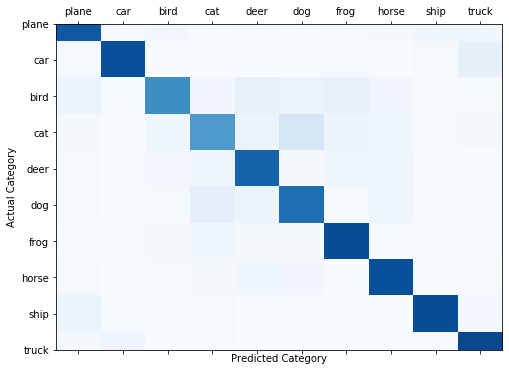

Category   - Accuracy
plane      - 84.2
car        - 87.8
bird       - 63.9
cat        - 58.7
deer       - 80.3
dog        - 76.1
frog       - 88.8
horse      - 87.9
ship       - 88.5
truck      - 90.6

Selected workers

[21 54 34 43 18 49 96 50 91 29 26 89 98 77 63]
Worker 21 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 96 : is  Honest
Worker 50 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 29 : is  Honest
Worker 26 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 77 : is  Honest
Worker 63 : is  Honest

 | Global Training Round : 32 |


Worker 21 starts training in Global Round:32 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  32


Train Epoch: 1 [0/500	(1%)]	Loss: 1.167566
Train Epoch: 1 [400/500	(81%)]	Loss: 0.677233
Train Epoch: 2 [0/500	(1%)]	Loss: 0.637574
Train Epoch: 2 [400/500	(81%)]	Loss: 0.441490
Train Epoch: 3 [0/500	(1%)]	Loss: 0.314613
Train Epoch: 3 [400/500	(81%)]	Loss: 0.398766
Train Epoch: 4 [0/500	(1%)]	Loss: 0.446544
Train Epoch: 4 [400/500	(81%)]	Loss: 0.281730
Train Epoch: 5 [0/500	(1%)]	Loss: 0.248386
Train Epoch: 5 [400/500	(81%)]	Loss: 0.275524

Performed attacks 1
Worker 21 ends training in Global Round:32 |

Worker 54 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.537758
Train Epoch: 1 [400/500	(81%)]	Loss: 0.554853
Train Epoch: 2 [0/500	(1%)]	Loss: 0.298062
Train Epoch: 2 [400/500	(81%)]	Loss: 0.479737
Train Epoch: 3 [0/500	(1%)]	Loss: 0.254316
Train Epoch: 3 [400/500	(81%)]	Loss: 0.188456
Train Epoch: 4 [0/500	(1%)]	Loss: 0.272388
Train Epoch: 4 [400/500	(81%)]	Loss: 0.278001
Train Epoch: 5 [0/500	(1%)]	Loss: 0.220423
Train Epoch: 5 [400/500	(81%)]	Loss: 0.244605

Worker 54 ends training in Global Round:32 |

Worker 34 starts training in Global Round:32 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  32


Train Epoch: 1 [0/500	(1%)]	Loss: 1.084762
Train Epoch: 1 [400/500	(81%)]	Loss: 0.890462
Train Epoch: 2 [0/500	(1%)]	Loss: 0.495564
Train Epoch: 2 [400/500	(81%)]	Loss: 0.515909
Train Epoch: 3 [0/500	(1%)]	Loss: 0.247654
Train Epoch: 3 [400/500	(81%)]	Loss: 0.629669
Train Epoch: 4 [0/500	(1%)]	Loss: 0.318339
Train Epoch: 4 [400/500	(81%)]	Loss: 0.232741
Train Epoch: 5 [0/500	(1%)]	Loss: 0.289621
Train Epoch: 5 [400/500	(81%)]	Loss: 0.349121

Performed attacks 2
Worker 34 ends training in Global Round:32 |

Worker 43 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.413248
Train Epoch: 1 [400/500	(81%)]	Loss: 0.660158
Train Epoch: 2 [0/500	(1%)]	Loss: 0.218786
Train Epoch: 2 [400/500	(81%)]	Loss: 0.469732
Train Epoch: 3 [0/500	(1%)]	Loss: 0.199756
Train Epoch: 3 [400/500	(81%)]	Loss: 0.233326
Train Epoch: 4 [0/500	(1%)]	Loss: 0.174115
Train Epoch: 4 [400/500	(81%)]	Loss: 0.266460
Train Epoch: 5 [0/500	(1%)]	Loss: 0.173237
Train Epoch: 5 [400/500	(81%)]	Loss: 0.173505

Worker 43 ends training in Global Round:32 |

Worker 18 starts training in Global Round:32 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  32


Train Epoch: 1 [0/500	(1%)]	Loss: 1.391208
Train Epoch: 1 [400/500	(81%)]	Loss: 0.560825
Train Epoch: 2 [0/500	(1%)]	Loss: 0.382625
Train Epoch: 2 [400/500	(81%)]	Loss: 0.838514
Train Epoch: 3 [0/500	(1%)]	Loss: 0.496663
Train Epoch: 3 [400/500	(81%)]	Loss: 0.380574
Train Epoch: 4 [0/500	(1%)]	Loss: 0.222993
Train Epoch: 4 [400/500	(81%)]	Loss: 0.555011
Train Epoch: 5 [0/500	(1%)]	Loss: 0.305466
Train Epoch: 5 [400/500	(81%)]	Loss: 0.247448

Performed attacks 3
Worker 18 ends training in Global Round:32 |

Worker 49 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.504885
Train Epoch: 1 [400/500	(81%)]	Loss: 0.577105
Train Epoch: 2 [0/500	(1%)]	Loss: 0.274546
Train Epoch: 2 [400/500	(81%)]	Loss: 0.298289
Train Epoch: 3 [0/500	(1%)]	Loss: 0.211208
Train Epoch: 3 [400/500	(81%)]	Loss: 0.341843
Train Epoch: 4 [0/500	(1%)]	Loss: 0.292516
Train Epoch: 4 [400/500	(81%)]	Loss: 0.303291
Train Epoch: 5 [0/500	(1%)]	Loss: 0.283734
Train Epoch: 5 [400/500	(81%)]	Loss: 0.317029

Worker 49 ends training in Global Round:32 |

Worker 96 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.475614
Train Epoch: 1 [400/500	(81%)]	Loss: 0.670612
Train Epoch: 2 [0/500	(1%)]	Loss: 0.439386
Train Epoch: 2 [400/500	(81%)]	Loss: 0.496037
Train Epoch: 3 [0/500	(1%)]	Loss: 0.299886
Train Epoch: 3 [400/500	(81%)]	Loss: 0.519852
Train Epoch: 4 [0/500	(1%)]	Loss: 0.286610
Train Epoch: 4 [400/500	(81%)]	Loss: 0.377946
Train Epoch: 5 [0/500	(1%)]	Loss: 0.308370
Train Epoch: 5 [400/500	(81%)]	Loss: 0.267080

Worker 96 ends training in Global Round:32 |

Worker 50 starts training in Global Round:32 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  32


Train Epoch: 1 [0/500	(1%)]	Loss: 1.552854
Train Epoch: 1 [400/500	(81%)]	Loss: 0.842708
Train Epoch: 2 [0/500	(1%)]	Loss: 0.471204
Train Epoch: 2 [400/500	(81%)]	Loss: 0.528592
Train Epoch: 3 [0/500	(1%)]	Loss: 0.386982
Train Epoch: 3 [400/500	(81%)]	Loss: 0.472569
Train Epoch: 4 [0/500	(1%)]	Loss: 0.311451
Train Epoch: 4 [400/500	(81%)]	Loss: 0.408525
Train Epoch: 5 [0/500	(1%)]	Loss: 0.272086
Train Epoch: 5 [400/500	(81%)]	Loss: 0.353950

Performed attacks 4
Worker 50 ends training in Global Round:32 |

Worker 91 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.368762
Train Epoch: 1 [400/500	(81%)]	Loss: 0.450372
Train Epoch: 2 [0/500	(1%)]	Loss: 0.389449
Train Epoch: 2 [400/500	(81%)]	Loss: 0.439213
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145864
Train Epoch: 3 [400/500	(81%)]	Loss: 0.421146
Train Epoch: 4 [0/500	(1%)]	Loss: 0.348820
Train Epoch: 4 [400/500	(81%)]	Loss: 0.243497
Train Epoch: 5 [0/500	(1%)]	Loss: 0.296680
Train Epoch: 5 [400/500	(81%)]	Loss: 0.237993

Worker 91 ends training in Global Round:32 |

Worker 29 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.356352
Train Epoch: 1 [400/500	(81%)]	Loss: 0.379896
Train Epoch: 2 [0/500	(1%)]	Loss: 0.358221
Train Epoch: 2 [400/500	(81%)]	Loss: 0.588284
Train Epoch: 3 [0/500	(1%)]	Loss: 0.260859
Train Epoch: 3 [400/500	(81%)]	Loss: 0.483586
Train Epoch: 4 [0/500	(1%)]	Loss: 0.282545
Train Epoch: 4 [400/500	(81%)]	Loss: 0.288383
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171713
Train Epoch: 5 [400/500	(81%)]	Loss: 0.336335

Worker 29 ends training in Global Round:32 |

Worker 26 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.451524
Train Epoch: 1 [400/500	(81%)]	Loss: 0.495899
Train Epoch: 2 [0/500	(1%)]	Loss: 0.241751
Train Epoch: 2 [400/500	(81%)]	Loss: 0.403554
Train Epoch: 3 [0/500	(1%)]	Loss: 0.233831
Train Epoch: 3 [400/500	(81%)]	Loss: 0.490821
Train Epoch: 4 [0/500	(1%)]	Loss: 0.182930
Train Epoch: 4 [400/500	(81%)]	Loss: 0.247317
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133928
Train Epoch: 5 [400/500	(81%)]	Loss: 0.284790

Worker 26 ends training in Global Round:32 |

Worker 89 starts training in Global Round:32 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  32


Train Epoch: 1 [0/500	(1%)]	Loss: 1.324237
Train Epoch: 1 [400/500	(81%)]	Loss: 0.806535
Train Epoch: 2 [0/500	(1%)]	Loss: 0.394585
Train Epoch: 2 [400/500	(81%)]	Loss: 0.703690
Train Epoch: 3 [0/500	(1%)]	Loss: 0.410517
Train Epoch: 3 [400/500	(81%)]	Loss: 0.325029
Train Epoch: 4 [0/500	(1%)]	Loss: 0.505010
Train Epoch: 4 [400/500	(81%)]	Loss: 0.476527
Train Epoch: 5 [0/500	(1%)]	Loss: 0.357365
Train Epoch: 5 [400/500	(81%)]	Loss: 0.387284

Performed attacks 5
Worker 89 ends training in Global Round:32 |

Worker 98 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.411476
Train Epoch: 1 [400/500	(81%)]	Loss: 0.920481
Train Epoch: 2 [0/500	(1%)]	Loss: 0.516942
Train Epoch: 2 [400/500	(81%)]	Loss: 0.577743
Train Epoch: 3 [0/500	(1%)]	Loss: 0.424962
Train Epoch: 3 [400/500	(81%)]	Loss: 0.468324
Train Epoch: 4 [0/500	(1%)]	Loss: 0.413567
Train Epoch: 4 [400/500	(81%)]	Loss: 0.398246
Train Epoch: 5 [0/500	(1%)]	Loss: 0.293167
Train Epoch: 5 [400/500	(81%)]	Loss: 0.500284

Worker 98 ends training in Global Round:32 |

Worker 77 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.725107
Train Epoch: 1 [400/500	(81%)]	Loss: 0.668856
Train Epoch: 2 [0/500	(1%)]	Loss: 0.413523
Train Epoch: 2 [400/500	(81%)]	Loss: 0.539364
Train Epoch: 3 [0/500	(1%)]	Loss: 0.425075
Train Epoch: 3 [400/500	(81%)]	Loss: 0.518662
Train Epoch: 4 [0/500	(1%)]	Loss: 0.384878
Train Epoch: 4 [400/500	(81%)]	Loss: 0.403412
Train Epoch: 5 [0/500	(1%)]	Loss: 0.224201
Train Epoch: 5 [400/500	(81%)]	Loss: 0.357725

Worker 77 ends training in Global Round:32 |

Worker 63 starts training in Global Round:32 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.307028
Train Epoch: 1 [400/500	(81%)]	Loss: 0.452022
Train Epoch: 2 [0/500	(1%)]	Loss: 0.472670
Train Epoch: 2 [400/500	(81%)]	Loss: 0.392598
Train Epoch: 3 [0/500	(1%)]	Loss: 0.271011
Train Epoch: 3 [400/500	(81%)]	Loss: 0.295626
Train Epoch: 4 [0/500	(1%)]	Loss: 0.186285
Train Epoch: 4 [400/500	(81%)]	Loss: 0.389926
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182181
Train Epoch: 5 [400/500	(81%)]	Loss: 0.445637

Worker 63 ends training in Global Round:32 |
Last layer biases  [array([ 0.03755878, -0.0315835 , -0.01487191,  0.03759221,  0.04601363,
       -0.01849893,  0.04150356, -0.02757732, -0.01811053, -0.03612429],
      dtype=float32), array([ 0.03516836, -0.03069767, -0.01583027,  0.03378428,  0.03723331,
       -0.01806074,  0.03959399, -0.00662566, -0.02058983, -0.03807405],
      dtype=float32), array([ 0.03449353, -0.02824062, -0.01286692,  0.03708242,  0.04448392,
       -0.01843001,  0.04296274, -0.02695189, -0.01744932, -0.03918213],
      dtyp

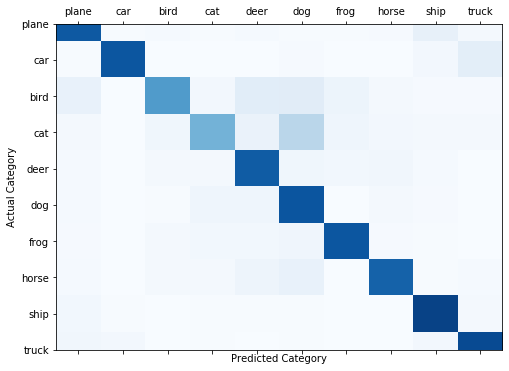

Category   - Accuracy
plane      - 84.1
car        - 85.2
bird       - 58.0
cat        - 47.9
deer       - 83.1
dog        - 85.7
frog       - 85.4
horse      - 80.5
ship       - 92.9
truck      - 89.8

Selected workers

[20 59 89 55 11  9 73 86 56 70 91 96 52 98 12]
Worker 20 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 89 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 11 : is  Honest
Worker 9 : is  Honest
Worker 73 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 56 : is  Honest
Worker 70 : is  Honest
Worker 91 : is  Honest
Worker 96 : is  Honest
Worker 52 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker

 | Global Training Round : 33 |


Worker 20 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.618065
Train Epoch: 1 [400/500	(81%)]	Loss: 0.476132
Train Epoch: 2 [0/500	(1%)]	Loss: 0.231773
Train Epoch: 2 [400/500	(81%)]	Loss: 0.356450
Train Epoch: 3 [0/500	(1%)]	Loss: 0.304061
Train Epoch: 3 [400/500	(81%)]	Loss: 0.288941
Train Epoch: 4 [0/500	(1%)]	Loss: 0.334996
Train Epoch: 4 [400/500	(81%)]	Loss: 0.217477
Train Epoch: 5 [0/500	(1%)]	Loss: 0.180640
Train Epoch: 5 [400/500	(81%)]	Loss: 0.362856

Worker 20 ends training in Global Round:33 |

Worker 59 starts training in Global Round:33 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  33


Train Epoch: 1 [0/500	(1%)]	Loss: 1.129033
Train Epoch: 1 [400/500	(81%)]	Loss: 0.632831
Train Epoch: 2 [0/500	(1%)]	Loss: 0.258076
Train Epoch: 2 [400/500	(81%)]	Loss: 0.575127
Train Epoch: 3 [0/500	(1%)]	Loss: 0.337424
Train Epoch: 3 [400/500	(81%)]	Loss: 0.316162
Train Epoch: 4 [0/500	(1%)]	Loss: 0.233756
Train Epoch: 4 [400/500	(81%)]	Loss: 0.410703
Train Epoch: 5 [0/500	(1%)]	Loss: 0.242103
Train Epoch: 5 [400/500	(81%)]	Loss: 0.271076

Performed attacks 1
Worker 59 ends training in Global Round:33 |

Worker 89 starts training in Global Round:33 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  33


Train Epoch: 1 [0/500	(1%)]	Loss: 1.216971
Train Epoch: 1 [400/500	(81%)]	Loss: 0.752405
Train Epoch: 2 [0/500	(1%)]	Loss: 0.452973
Train Epoch: 2 [400/500	(81%)]	Loss: 0.608039
Train Epoch: 3 [0/500	(1%)]	Loss: 0.377211
Train Epoch: 3 [400/500	(81%)]	Loss: 0.624812
Train Epoch: 4 [0/500	(1%)]	Loss: 0.313469
Train Epoch: 4 [400/500	(81%)]	Loss: 0.289698
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124453
Train Epoch: 5 [400/500	(81%)]	Loss: 0.230884

Performed attacks 2
Worker 89 ends training in Global Round:33 |

Worker 55 starts training in Global Round:33 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  33


Train Epoch: 1 [0/500	(1%)]	Loss: 1.610923
Train Epoch: 1 [400/500	(81%)]	Loss: 0.571398
Train Epoch: 2 [0/500	(1%)]	Loss: 0.361886
Train Epoch: 2 [400/500	(81%)]	Loss: 0.465853
Train Epoch: 3 [0/500	(1%)]	Loss: 0.371069
Train Epoch: 3 [400/500	(81%)]	Loss: 0.443705
Train Epoch: 4 [0/500	(1%)]	Loss: 0.319051
Train Epoch: 4 [400/500	(81%)]	Loss: 0.227268
Train Epoch: 5 [0/500	(1%)]	Loss: 0.181077
Train Epoch: 5 [400/500	(81%)]	Loss: 0.373165

Performed attacks 3
Worker 55 ends training in Global Round:33 |

Worker 11 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.634209
Train Epoch: 1 [400/500	(81%)]	Loss: 0.826892
Train Epoch: 2 [0/500	(1%)]	Loss: 0.352127
Train Epoch: 2 [400/500	(81%)]	Loss: 0.393520
Train Epoch: 3 [0/500	(1%)]	Loss: 0.292313
Train Epoch: 3 [400/500	(81%)]	Loss: 0.360004
Train Epoch: 4 [0/500	(1%)]	Loss: 0.217517
Train Epoch: 4 [400/500	(81%)]	Loss: 0.230284
Train Epoch: 5 [0/500	(1%)]	Loss: 0.293704
Train Epoch: 5 [400/500	(81%)]	Loss: 0.360316

Worker 11 ends training in Global Round:33 |

Worker 9 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.425197
Train Epoch: 1 [400/500	(81%)]	Loss: 0.714497
Train Epoch: 2 [0/500	(1%)]	Loss: 0.452365
Train Epoch: 2 [400/500	(81%)]	Loss: 0.447146
Train Epoch: 3 [0/500	(1%)]	Loss: 0.356647
Train Epoch: 3 [400/500	(81%)]	Loss: 0.484196
Train Epoch: 4 [0/500	(1%)]	Loss: 0.338783
Train Epoch: 4 [400/500	(81%)]	Loss: 0.585418
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172024
Train Epoch: 5 [400/500	(81%)]	Loss: 0.212036

Worker 9 ends training in Global Round:33 |

Worker 73 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.478756
Train Epoch: 1 [400/500	(81%)]	Loss: 0.344920
Train Epoch: 2 [0/500	(1%)]	Loss: 0.124349
Train Epoch: 2 [400/500	(81%)]	Loss: 0.206401
Train Epoch: 3 [0/500	(1%)]	Loss: 0.202505
Train Epoch: 3 [400/500	(81%)]	Loss: 0.188850
Train Epoch: 4 [0/500	(1%)]	Loss: 0.088933
Train Epoch: 4 [400/500	(81%)]	Loss: 0.090817
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126676
Train Epoch: 5 [400/500	(81%)]	Loss: 0.197678

Worker 73 ends training in Global Round:33 |

Worker 86 starts training in Global Round:33 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  33


Train Epoch: 1 [0/500	(1%)]	Loss: 0.962435
Train Epoch: 1 [400/500	(81%)]	Loss: 0.706234
Train Epoch: 2 [0/500	(1%)]	Loss: 0.299726
Train Epoch: 2 [400/500	(81%)]	Loss: 0.427463
Train Epoch: 3 [0/500	(1%)]	Loss: 0.204033
Train Epoch: 3 [400/500	(81%)]	Loss: 0.368782
Train Epoch: 4 [0/500	(1%)]	Loss: 0.151706
Train Epoch: 4 [400/500	(81%)]	Loss: 0.154792
Train Epoch: 5 [0/500	(1%)]	Loss: 0.163278
Train Epoch: 5 [400/500	(81%)]	Loss: 0.198810

Performed attacks 4
Worker 86 ends training in Global Round:33 |

Worker 56 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.389615
Train Epoch: 1 [400/500	(81%)]	Loss: 0.692828
Train Epoch: 2 [0/500	(1%)]	Loss: 0.190627
Train Epoch: 2 [400/500	(81%)]	Loss: 0.277057
Train Epoch: 3 [0/500	(1%)]	Loss: 0.267367
Train Epoch: 3 [400/500	(81%)]	Loss: 0.302633
Train Epoch: 4 [0/500	(1%)]	Loss: 0.186951
Train Epoch: 4 [400/500	(81%)]	Loss: 0.383607
Train Epoch: 5 [0/500	(1%)]	Loss: 0.134758
Train Epoch: 5 [400/500	(81%)]	Loss: 0.184379

Worker 56 ends training in Global Round:33 |

Worker 70 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.616621
Train Epoch: 1 [400/500	(81%)]	Loss: 0.462968
Train Epoch: 2 [0/500	(1%)]	Loss: 0.336642
Train Epoch: 2 [400/500	(81%)]	Loss: 0.487485
Train Epoch: 3 [0/500	(1%)]	Loss: 0.279882
Train Epoch: 3 [400/500	(81%)]	Loss: 0.371316
Train Epoch: 4 [0/500	(1%)]	Loss: 0.240203
Train Epoch: 4 [400/500	(81%)]	Loss: 0.306705
Train Epoch: 5 [0/500	(1%)]	Loss: 0.236938
Train Epoch: 5 [400/500	(81%)]	Loss: 0.259700

Worker 70 ends training in Global Round:33 |

Worker 91 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.393720
Train Epoch: 1 [400/500	(81%)]	Loss: 0.456190
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209339
Train Epoch: 2 [400/500	(81%)]	Loss: 0.516879
Train Epoch: 3 [0/500	(1%)]	Loss: 0.178626
Train Epoch: 3 [400/500	(81%)]	Loss: 0.288638
Train Epoch: 4 [0/500	(1%)]	Loss: 0.262489
Train Epoch: 4 [400/500	(81%)]	Loss: 0.149120
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193503
Train Epoch: 5 [400/500	(81%)]	Loss: 0.228564

Worker 91 ends training in Global Round:33 |

Worker 96 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.317198
Train Epoch: 1 [400/500	(81%)]	Loss: 0.427694
Train Epoch: 2 [0/500	(1%)]	Loss: 0.254012
Train Epoch: 2 [400/500	(81%)]	Loss: 0.331230
Train Epoch: 3 [0/500	(1%)]	Loss: 0.317009
Train Epoch: 3 [400/500	(81%)]	Loss: 0.297577
Train Epoch: 4 [0/500	(1%)]	Loss: 0.169409
Train Epoch: 4 [400/500	(81%)]	Loss: 0.360308
Train Epoch: 5 [0/500	(1%)]	Loss: 0.206847
Train Epoch: 5 [400/500	(81%)]	Loss: 0.305656

Worker 96 ends training in Global Round:33 |

Worker 52 starts training in Global Round:33 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  33


Train Epoch: 1 [0/500	(1%)]	Loss: 1.076686
Train Epoch: 1 [400/500	(81%)]	Loss: 0.704131
Train Epoch: 2 [0/500	(1%)]	Loss: 0.372203
Train Epoch: 2 [400/500	(81%)]	Loss: 0.479889
Train Epoch: 3 [0/500	(1%)]	Loss: 0.365480
Train Epoch: 3 [400/500	(81%)]	Loss: 0.374716
Train Epoch: 4 [0/500	(1%)]	Loss: 0.327742
Train Epoch: 4 [400/500	(81%)]	Loss: 0.277398
Train Epoch: 5 [0/500	(1%)]	Loss: 0.294457
Train Epoch: 5 [400/500	(81%)]	Loss: 0.293755

Performed attacks 5
Worker 52 ends training in Global Round:33 |

Worker 98 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.425314
Train Epoch: 1 [400/500	(81%)]	Loss: 0.682265
Train Epoch: 2 [0/500	(1%)]	Loss: 0.279102
Train Epoch: 2 [400/500	(81%)]	Loss: 0.428879
Train Epoch: 3 [0/500	(1%)]	Loss: 0.242350
Train Epoch: 3 [400/500	(81%)]	Loss: 0.377532
Train Epoch: 4 [0/500	(1%)]	Loss: 0.246862
Train Epoch: 4 [400/500	(81%)]	Loss: 0.298460
Train Epoch: 5 [0/500	(1%)]	Loss: 0.161370
Train Epoch: 5 [400/500	(81%)]	Loss: 0.402894

Worker 98 ends training in Global Round:33 |

Worker 12 starts training in Global Round:33 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.447977
Train Epoch: 1 [400/500	(81%)]	Loss: 0.919860
Train Epoch: 2 [0/500	(1%)]	Loss: 0.465919
Train Epoch: 2 [400/500	(81%)]	Loss: 0.477579
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142410
Train Epoch: 3 [400/500	(81%)]	Loss: 0.386393
Train Epoch: 4 [0/500	(1%)]	Loss: 0.262973
Train Epoch: 4 [400/500	(81%)]	Loss: 0.324557
Train Epoch: 5 [0/500	(1%)]	Loss: 0.140533
Train Epoch: 5 [400/500	(81%)]	Loss: 0.384456

Worker 12 ends training in Global Round:33 |
Last layer biases  [array([ 0.0352558 , -0.02970793, -0.01490644,  0.03599916,  0.03584578,
       -0.01539478,  0.03660703, -0.00795074, -0.02085444, -0.03899174],
      dtype=float32), array([ 0.03464541, -0.03105028, -0.01367407,  0.03816115,  0.04473523,
       -0.01577661,  0.03918913, -0.02692999, -0.01885675, -0.03454148],
      dtype=float32), array([ 0.03389017, -0.0279752 , -0.01501015,  0.03660709,  0.04581843,
       -0.01801337,  0.04144411, -0.02592747, -0.01525606, -0.03967581],
      dtyp

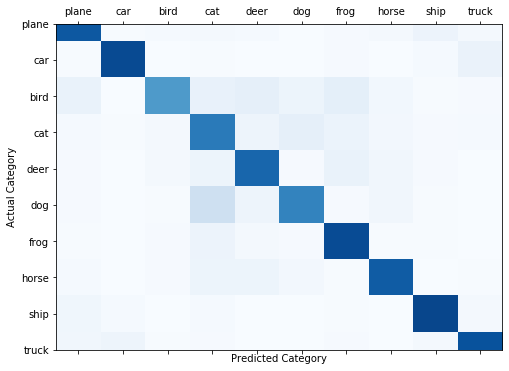

Category   - Accuracy
plane      - 84.7
car        - 89.7
bird       - 58.8
cat        - 71.4
deer       - 79.1
dog        - 67.7
frog       - 89.3
horse      - 83.1
ship       - 91.1
truck      - 86.9

Selected workers

[19 27 43 87 39 20  2 58 76 89  9 78 50 96 40]
Worker 19 : is  Stealthy_Attacker
Worker 27 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 39 : is  Honest
Worker 20 : is  Honest
Worker 2 : is  Honest
Worker 58 : is  Honest
Worker 76 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 9 : is  Honest
Worker 78 : is  Honest
Worker 50 : is  Stealthy_Attacker
Worker 96 : is  Honest
Worker 40 : is  Honest

 | Global Training Round : 34 |


Worker 19 starts training in Global Round:34 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  34


Train Epoch: 1 [0/500	(1%)]	Loss: 1.008612
Train Epoch: 1 [400/500	(81%)]	Loss: 0.557604
Train Epoch: 2 [0/500	(1%)]	Loss: 0.309387
Train Epoch: 2 [400/500	(81%)]	Loss: 0.570346
Train Epoch: 3 [0/500	(1%)]	Loss: 0.299830
Train Epoch: 3 [400/500	(81%)]	Loss: 0.287534
Train Epoch: 4 [0/500	(1%)]	Loss: 0.293406
Train Epoch: 4 [400/500	(81%)]	Loss: 0.359253
Train Epoch: 5 [0/500	(1%)]	Loss: 0.207984
Train Epoch: 5 [400/500	(81%)]	Loss: 0.145150

Performed attacks 1
Worker 19 ends training in Global Round:34 |

Worker 27 starts training in Global Round:34 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  34


Train Epoch: 1 [0/500	(1%)]	Loss: 0.903431
Train Epoch: 1 [400/500	(81%)]	Loss: 0.604640
Train Epoch: 2 [0/500	(1%)]	Loss: 0.437870
Train Epoch: 2 [400/500	(81%)]	Loss: 0.443454
Train Epoch: 3 [0/500	(1%)]	Loss: 0.412198
Train Epoch: 3 [400/500	(81%)]	Loss: 0.399313
Train Epoch: 4 [0/500	(1%)]	Loss: 0.270755
Train Epoch: 4 [400/500	(81%)]	Loss: 0.270453
Train Epoch: 5 [0/500	(1%)]	Loss: 0.243754
Train Epoch: 5 [400/500	(81%)]	Loss: 0.281241

Performed attacks 2
Worker 27 ends training in Global Round:34 |

Worker 43 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.511724
Train Epoch: 1 [400/500	(81%)]	Loss: 0.486936
Train Epoch: 2 [0/500	(1%)]	Loss: 0.201289
Train Epoch: 2 [400/500	(81%)]	Loss: 0.213902
Train Epoch: 3 [0/500	(1%)]	Loss: 0.258720
Train Epoch: 3 [400/500	(81%)]	Loss: 0.216814
Train Epoch: 4 [0/500	(1%)]	Loss: 0.193113
Train Epoch: 4 [400/500	(81%)]	Loss: 0.353870
Train Epoch: 5 [0/500	(1%)]	Loss: 0.222974
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191849

Worker 43 ends training in Global Round:34 |

Worker 87 starts training in Global Round:34 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  34


Train Epoch: 1 [0/500	(1%)]	Loss: 1.087096
Train Epoch: 1 [400/500	(81%)]	Loss: 1.122454
Train Epoch: 2 [0/500	(1%)]	Loss: 0.390549
Train Epoch: 2 [400/500	(81%)]	Loss: 0.650968
Train Epoch: 3 [0/500	(1%)]	Loss: 0.314320
Train Epoch: 3 [400/500	(81%)]	Loss: 0.510897
Train Epoch: 4 [0/500	(1%)]	Loss: 0.327317
Train Epoch: 4 [400/500	(81%)]	Loss: 0.303839
Train Epoch: 5 [0/500	(1%)]	Loss: 0.293432
Train Epoch: 5 [400/500	(81%)]	Loss: 0.344544

Performed attacks 3
Worker 87 ends training in Global Round:34 |

Worker 39 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.433886
Train Epoch: 1 [400/500	(81%)]	Loss: 0.515527
Train Epoch: 2 [0/500	(1%)]	Loss: 0.380253
Train Epoch: 2 [400/500	(81%)]	Loss: 0.382374
Train Epoch: 3 [0/500	(1%)]	Loss: 0.329499
Train Epoch: 3 [400/500	(81%)]	Loss: 0.337787
Train Epoch: 4 [0/500	(1%)]	Loss: 0.296811
Train Epoch: 4 [400/500	(81%)]	Loss: 0.206533
Train Epoch: 5 [0/500	(1%)]	Loss: 0.173981
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242177

Worker 39 ends training in Global Round:34 |

Worker 20 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.383821
Train Epoch: 1 [400/500	(81%)]	Loss: 0.528323
Train Epoch: 2 [0/500	(1%)]	Loss: 0.283997
Train Epoch: 2 [400/500	(81%)]	Loss: 0.250132
Train Epoch: 3 [0/500	(1%)]	Loss: 0.160791
Train Epoch: 3 [400/500	(81%)]	Loss: 0.296272
Train Epoch: 4 [0/500	(1%)]	Loss: 0.142896
Train Epoch: 4 [400/500	(81%)]	Loss: 0.219160
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138301
Train Epoch: 5 [400/500	(81%)]	Loss: 0.381004

Worker 20 ends training in Global Round:34 |

Worker 2 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.374380
Train Epoch: 1 [400/500	(81%)]	Loss: 0.395021
Train Epoch: 2 [0/500	(1%)]	Loss: 0.285620
Train Epoch: 2 [400/500	(81%)]	Loss: 0.337075
Train Epoch: 3 [0/500	(1%)]	Loss: 0.099524
Train Epoch: 3 [400/500	(81%)]	Loss: 0.225834
Train Epoch: 4 [0/500	(1%)]	Loss: 0.142688
Train Epoch: 4 [400/500	(81%)]	Loss: 0.131755
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111509
Train Epoch: 5 [400/500	(81%)]	Loss: 0.129032

Worker 2 ends training in Global Round:34 |

Worker 58 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.624326
Train Epoch: 1 [400/500	(81%)]	Loss: 0.471197
Train Epoch: 2 [0/500	(1%)]	Loss: 0.299579
Train Epoch: 2 [400/500	(81%)]	Loss: 0.581042
Train Epoch: 3 [0/500	(1%)]	Loss: 0.278262
Train Epoch: 3 [400/500	(81%)]	Loss: 0.387500
Train Epoch: 4 [0/500	(1%)]	Loss: 0.259766
Train Epoch: 4 [400/500	(81%)]	Loss: 0.372231
Train Epoch: 5 [0/500	(1%)]	Loss: 0.228670
Train Epoch: 5 [400/500	(81%)]	Loss: 0.259919

Worker 58 ends training in Global Round:34 |

Worker 76 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.359782
Train Epoch: 1 [400/500	(81%)]	Loss: 0.525283
Train Epoch: 2 [0/500	(1%)]	Loss: 0.189791
Train Epoch: 2 [400/500	(81%)]	Loss: 0.370555
Train Epoch: 3 [0/500	(1%)]	Loss: 0.222539
Train Epoch: 3 [400/500	(81%)]	Loss: 0.223703
Train Epoch: 4 [0/500	(1%)]	Loss: 0.194808
Train Epoch: 4 [400/500	(81%)]	Loss: 0.177976
Train Epoch: 5 [0/500	(1%)]	Loss: 0.105684
Train Epoch: 5 [400/500	(81%)]	Loss: 0.276022

Worker 76 ends training in Global Round:34 |

Worker 89 starts training in Global Round:34 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  34


Train Epoch: 1 [0/500	(1%)]	Loss: 1.438727
Train Epoch: 1 [400/500	(81%)]	Loss: 0.868113
Train Epoch: 2 [0/500	(1%)]	Loss: 0.441315
Train Epoch: 2 [400/500	(81%)]	Loss: 0.752793
Train Epoch: 3 [0/500	(1%)]	Loss: 0.309118
Train Epoch: 3 [400/500	(81%)]	Loss: 0.436184
Train Epoch: 4 [0/500	(1%)]	Loss: 0.342971
Train Epoch: 4 [400/500	(81%)]	Loss: 0.551930
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203692
Train Epoch: 5 [400/500	(81%)]	Loss: 0.279070

Performed attacks 4
Worker 89 ends training in Global Round:34 |

Worker 9 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.406083
Train Epoch: 1 [400/500	(81%)]	Loss: 0.344035
Train Epoch: 2 [0/500	(1%)]	Loss: 0.376831
Train Epoch: 2 [400/500	(81%)]	Loss: 0.460087
Train Epoch: 3 [0/500	(1%)]	Loss: 0.324161
Train Epoch: 3 [400/500	(81%)]	Loss: 0.491589
Train Epoch: 4 [0/500	(1%)]	Loss: 0.287554
Train Epoch: 4 [400/500	(81%)]	Loss: 0.459914
Train Epoch: 5 [0/500	(1%)]	Loss: 0.143219
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242225

Worker 9 ends training in Global Round:34 |

Worker 78 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.543323
Train Epoch: 1 [400/500	(81%)]	Loss: 0.444058
Train Epoch: 2 [0/500	(1%)]	Loss: 0.348157
Train Epoch: 2 [400/500	(81%)]	Loss: 0.451421
Train Epoch: 3 [0/500	(1%)]	Loss: 0.250377
Train Epoch: 3 [400/500	(81%)]	Loss: 0.391979
Train Epoch: 4 [0/500	(1%)]	Loss: 0.292569
Train Epoch: 4 [400/500	(81%)]	Loss: 0.370444
Train Epoch: 5 [0/500	(1%)]	Loss: 0.248498
Train Epoch: 5 [400/500	(81%)]	Loss: 0.356801

Worker 78 ends training in Global Round:34 |

Worker 50 starts training in Global Round:34 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  34


Train Epoch: 1 [0/500	(1%)]	Loss: 1.244027
Train Epoch: 1 [400/500	(81%)]	Loss: 0.964370
Train Epoch: 2 [0/500	(1%)]	Loss: 0.295176
Train Epoch: 2 [400/500	(81%)]	Loss: 0.707931
Train Epoch: 3 [0/500	(1%)]	Loss: 0.381817
Train Epoch: 3 [400/500	(81%)]	Loss: 0.553834
Train Epoch: 4 [0/500	(1%)]	Loss: 0.432191
Train Epoch: 4 [400/500	(81%)]	Loss: 0.739726
Train Epoch: 5 [0/500	(1%)]	Loss: 0.309135
Train Epoch: 5 [400/500	(81%)]	Loss: 0.536603

Performed attacks 5
Worker 50 ends training in Global Round:34 |

Worker 96 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.337474
Train Epoch: 1 [400/500	(81%)]	Loss: 0.407020
Train Epoch: 2 [0/500	(1%)]	Loss: 0.264011
Train Epoch: 2 [400/500	(81%)]	Loss: 0.207308
Train Epoch: 3 [0/500	(1%)]	Loss: 0.207073
Train Epoch: 3 [400/500	(81%)]	Loss: 0.307268
Train Epoch: 4 [0/500	(1%)]	Loss: 0.142055
Train Epoch: 4 [400/500	(81%)]	Loss: 0.266063
Train Epoch: 5 [0/500	(1%)]	Loss: 0.113869
Train Epoch: 5 [400/500	(81%)]	Loss: 0.140721

Worker 96 ends training in Global Round:34 |

Worker 40 starts training in Global Round:34 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.439187
Train Epoch: 1 [400/500	(81%)]	Loss: 0.689166
Train Epoch: 2 [0/500	(1%)]	Loss: 0.214837
Train Epoch: 2 [400/500	(81%)]	Loss: 0.543775
Train Epoch: 3 [0/500	(1%)]	Loss: 0.329855
Train Epoch: 3 [400/500	(81%)]	Loss: 0.358194
Train Epoch: 4 [0/500	(1%)]	Loss: 0.343284
Train Epoch: 4 [400/500	(81%)]	Loss: 0.223710
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193539
Train Epoch: 5 [400/500	(81%)]	Loss: 0.282653

Worker 40 ends training in Global Round:34 |
Last layer biases  [array([ 0.0353617 , -0.03176739, -0.01182361,  0.04219366,  0.04420568,
       -0.01663728,  0.04096134, -0.02718764, -0.02093427, -0.03847045],
      dtype=float32), array([ 0.03713839, -0.03169528, -0.01349882,  0.03662662,  0.04446306,
       -0.01567114,  0.04185801, -0.0256596 , -0.01999418, -0.03766535],
      dtype=float32), array([ 0.0332269 , -0.03025496, -0.01546753,  0.03634013,  0.03409208,
       -0.01783599,  0.03965164, -0.00527723, -0.01949392, -0.03907941],
      dtyp

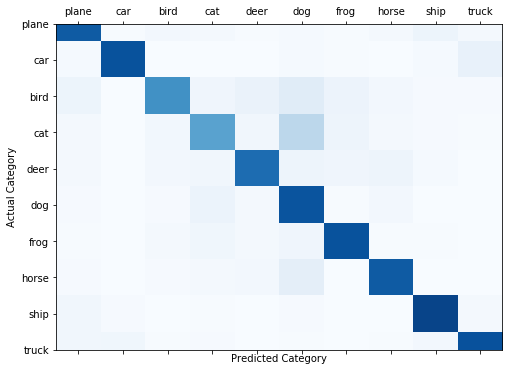

Category   - Accuracy
plane      - 83.3
car        - 87.0
bird       - 62.7
cat        - 55.2
deer       - 76.9
dog        - 86.3
frog       - 87.0
horse      - 83.3
ship       - 92.0
truck      - 87.4

Selected workers

[64 29 81 66 60  4 56 44 31 10 38 82 23 98 25]
Worker 64 : is  Honest
Worker 29 : is  Honest
Worker 81 : is  Honest
Worker 66 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 4 : is  Honest
Worker 56 : is  Honest
Worker 44 : is  Stealthy_Attacker
Worker 31 : is  Stealthy_Attacker
Worker 10 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 25 : is  Honest

 | Global Training Round : 35 |


Worker 64 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.376716
Train Epoch: 1 [400/500	(81%)]	Loss: 0.552893
Train Epoch: 2 [0/500	(1%)]	Loss: 0.397374
Train Epoch: 2 [400/500	(81%)]	Loss: 0.446747
Train Epoch: 3 [0/500	(1%)]	Loss: 0.302851
Train Epoch: 3 [400/500	(81%)]	Loss: 0.257189
Train Epoch: 4 [0/500	(1%)]	Loss: 0.255548
Train Epoch: 4 [400/500	(81%)]	Loss: 0.314808
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123133
Train Epoch: 5 [400/500	(81%)]	Loss: 0.341098

Worker 64 ends training in Global Round:35 |

Worker 29 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.507114
Train Epoch: 1 [400/500	(81%)]	Loss: 0.332160
Train Epoch: 2 [0/500	(1%)]	Loss: 0.198601
Train Epoch: 2 [400/500	(81%)]	Loss: 0.240481
Train Epoch: 3 [0/500	(1%)]	Loss: 0.325763
Train Epoch: 3 [400/500	(81%)]	Loss: 0.379412
Train Epoch: 4 [0/500	(1%)]	Loss: 0.177601
Train Epoch: 4 [400/500	(81%)]	Loss: 0.293146
Train Epoch: 5 [0/500	(1%)]	Loss: 0.104584
Train Epoch: 5 [400/500	(81%)]	Loss: 0.396768

Worker 29 ends training in Global Round:35 |

Worker 81 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.609603
Train Epoch: 1 [400/500	(81%)]	Loss: 0.450034
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209315
Train Epoch: 2 [400/500	(81%)]	Loss: 0.271073
Train Epoch: 3 [0/500	(1%)]	Loss: 0.221991
Train Epoch: 3 [400/500	(81%)]	Loss: 0.347286
Train Epoch: 4 [0/500	(1%)]	Loss: 0.296717
Train Epoch: 4 [400/500	(81%)]	Loss: 0.424032
Train Epoch: 5 [0/500	(1%)]	Loss: 0.195986
Train Epoch: 5 [400/500	(81%)]	Loss: 0.297212

Worker 81 ends training in Global Round:35 |

Worker 66 starts training in Global Round:35 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  35


Train Epoch: 1 [0/500	(1%)]	Loss: 1.309642
Train Epoch: 1 [400/500	(81%)]	Loss: 1.004422
Train Epoch: 2 [0/500	(1%)]	Loss: 0.381084
Train Epoch: 2 [400/500	(81%)]	Loss: 0.655961
Train Epoch: 3 [0/500	(1%)]	Loss: 0.371787
Train Epoch: 3 [400/500	(81%)]	Loss: 0.660267
Train Epoch: 4 [0/500	(1%)]	Loss: 0.470649
Train Epoch: 4 [400/500	(81%)]	Loss: 0.370278
Train Epoch: 5 [0/500	(1%)]	Loss: 0.174784
Train Epoch: 5 [400/500	(81%)]	Loss: 0.420059

Performed attacks 1
Worker 66 ends training in Global Round:35 |

Worker 60 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.470380
Train Epoch: 1 [400/500	(81%)]	Loss: 0.630616
Train Epoch: 2 [0/500	(1%)]	Loss: 0.371597
Train Epoch: 2 [400/500	(81%)]	Loss: 0.397646
Train Epoch: 3 [0/500	(1%)]	Loss: 0.336932
Train Epoch: 3 [400/500	(81%)]	Loss: 0.325861
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200839
Train Epoch: 4 [400/500	(81%)]	Loss: 0.236146
Train Epoch: 5 [0/500	(1%)]	Loss: 0.246932
Train Epoch: 5 [400/500	(81%)]	Loss: 0.344454

Worker 60 ends training in Global Round:35 |

Worker 4 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.466746
Train Epoch: 1 [400/500	(81%)]	Loss: 0.868230
Train Epoch: 2 [0/500	(1%)]	Loss: 0.232691
Train Epoch: 2 [400/500	(81%)]	Loss: 0.360908
Train Epoch: 3 [0/500	(1%)]	Loss: 0.213989
Train Epoch: 3 [400/500	(81%)]	Loss: 0.368987
Train Epoch: 4 [0/500	(1%)]	Loss: 0.212571
Train Epoch: 4 [400/500	(81%)]	Loss: 0.233769
Train Epoch: 5 [0/500	(1%)]	Loss: 0.117775
Train Epoch: 5 [400/500	(81%)]	Loss: 0.147199

Worker 4 ends training in Global Round:35 |

Worker 56 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.637194
Train Epoch: 1 [400/500	(81%)]	Loss: 0.638594
Train Epoch: 2 [0/500	(1%)]	Loss: 0.292825
Train Epoch: 2 [400/500	(81%)]	Loss: 0.364870
Train Epoch: 3 [0/500	(1%)]	Loss: 0.256044
Train Epoch: 3 [400/500	(81%)]	Loss: 0.362340
Train Epoch: 4 [0/500	(1%)]	Loss: 0.254524
Train Epoch: 4 [400/500	(81%)]	Loss: 0.431243
Train Epoch: 5 [0/500	(1%)]	Loss: 0.275018
Train Epoch: 5 [400/500	(81%)]	Loss: 0.269364

Worker 56 ends training in Global Round:35 |

Worker 44 starts training in Global Round:35 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  35


Train Epoch: 1 [0/500	(1%)]	Loss: 1.618731
Train Epoch: 1 [400/500	(81%)]	Loss: 0.745331
Train Epoch: 2 [0/500	(1%)]	Loss: 0.469051
Train Epoch: 2 [400/500	(81%)]	Loss: 0.528461
Train Epoch: 3 [0/500	(1%)]	Loss: 0.422227
Train Epoch: 3 [400/500	(81%)]	Loss: 0.503134
Train Epoch: 4 [0/500	(1%)]	Loss: 0.400985
Train Epoch: 4 [400/500	(81%)]	Loss: 0.390157
Train Epoch: 5 [0/500	(1%)]	Loss: 0.228846
Train Epoch: 5 [400/500	(81%)]	Loss: 0.302642

Performed attacks 2
Worker 44 ends training in Global Round:35 |

Worker 31 starts training in Global Round:35 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  35


Train Epoch: 1 [0/500	(1%)]	Loss: 1.290759
Train Epoch: 1 [400/500	(81%)]	Loss: 0.935210
Train Epoch: 2 [0/500	(1%)]	Loss: 0.372079
Train Epoch: 2 [400/500	(81%)]	Loss: 0.619762
Train Epoch: 3 [0/500	(1%)]	Loss: 0.460141
Train Epoch: 3 [400/500	(81%)]	Loss: 0.328486
Train Epoch: 4 [0/500	(1%)]	Loss: 0.379841
Train Epoch: 4 [400/500	(81%)]	Loss: 0.341658
Train Epoch: 5 [0/500	(1%)]	Loss: 0.273411
Train Epoch: 5 [400/500	(81%)]	Loss: 0.237225

Performed attacks 3
Worker 31 ends training in Global Round:35 |

Worker 10 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.737423
Train Epoch: 1 [400/500	(81%)]	Loss: 0.561659
Train Epoch: 2 [0/500	(1%)]	Loss: 0.474817
Train Epoch: 2 [400/500	(81%)]	Loss: 0.469328
Train Epoch: 3 [0/500	(1%)]	Loss: 0.243146
Train Epoch: 3 [400/500	(81%)]	Loss: 0.329320
Train Epoch: 4 [0/500	(1%)]	Loss: 0.255180
Train Epoch: 4 [400/500	(81%)]	Loss: 0.249124
Train Epoch: 5 [0/500	(1%)]	Loss: 0.147789
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242460

Worker 10 ends training in Global Round:35 |

Worker 38 starts training in Global Round:35 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  35


Train Epoch: 1 [0/500	(1%)]	Loss: 1.555520
Train Epoch: 1 [400/500	(81%)]	Loss: 0.642978
Train Epoch: 2 [0/500	(1%)]	Loss: 0.444625
Train Epoch: 2 [400/500	(81%)]	Loss: 0.638383
Train Epoch: 3 [0/500	(1%)]	Loss: 0.424461
Train Epoch: 3 [400/500	(81%)]	Loss: 0.450300
Train Epoch: 4 [0/500	(1%)]	Loss: 0.330647
Train Epoch: 4 [400/500	(81%)]	Loss: 0.343826
Train Epoch: 5 [0/500	(1%)]	Loss: 0.243290
Train Epoch: 5 [400/500	(81%)]	Loss: 0.360049

Performed attacks 4
Worker 38 ends training in Global Round:35 |

Worker 82 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.478516
Train Epoch: 1 [400/500	(81%)]	Loss: 0.628504
Train Epoch: 2 [0/500	(1%)]	Loss: 0.366607
Train Epoch: 2 [400/500	(81%)]	Loss: 0.510113
Train Epoch: 3 [0/500	(1%)]	Loss: 0.337135
Train Epoch: 3 [400/500	(81%)]	Loss: 0.485800
Train Epoch: 4 [0/500	(1%)]	Loss: 0.317688
Train Epoch: 4 [400/500	(81%)]	Loss: 0.216080
Train Epoch: 5 [0/500	(1%)]	Loss: 0.257960
Train Epoch: 5 [400/500	(81%)]	Loss: 0.283602

Worker 82 ends training in Global Round:35 |

Worker 23 starts training in Global Round:35 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  35


Train Epoch: 1 [0/500	(1%)]	Loss: 1.082735
Train Epoch: 1 [400/500	(81%)]	Loss: 0.593713
Train Epoch: 2 [0/500	(1%)]	Loss: 0.335401
Train Epoch: 2 [400/500	(81%)]	Loss: 0.475264
Train Epoch: 3 [0/500	(1%)]	Loss: 0.513967
Train Epoch: 3 [400/500	(81%)]	Loss: 0.708234
Train Epoch: 4 [0/500	(1%)]	Loss: 0.222336
Train Epoch: 4 [400/500	(81%)]	Loss: 0.293910
Train Epoch: 5 [0/500	(1%)]	Loss: 0.212509
Train Epoch: 5 [400/500	(81%)]	Loss: 0.296700

Performed attacks 5
Worker 23 ends training in Global Round:35 |

Worker 98 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.576711
Train Epoch: 1 [400/500	(81%)]	Loss: 0.556517
Train Epoch: 2 [0/500	(1%)]	Loss: 0.354600
Train Epoch: 2 [400/500	(81%)]	Loss: 0.436141
Train Epoch: 3 [0/500	(1%)]	Loss: 0.203360
Train Epoch: 3 [400/500	(81%)]	Loss: 0.418786
Train Epoch: 4 [0/500	(1%)]	Loss: 0.160637
Train Epoch: 4 [400/500	(81%)]	Loss: 0.265077
Train Epoch: 5 [0/500	(1%)]	Loss: 0.176218
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242384

Worker 98 ends training in Global Round:35 |

Worker 25 starts training in Global Round:35 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.476660
Train Epoch: 1 [400/500	(81%)]	Loss: 0.687352
Train Epoch: 2 [0/500	(1%)]	Loss: 0.501504
Train Epoch: 2 [400/500	(81%)]	Loss: 0.510441
Train Epoch: 3 [0/500	(1%)]	Loss: 0.283663
Train Epoch: 3 [400/500	(81%)]	Loss: 0.401237
Train Epoch: 4 [0/500	(1%)]	Loss: 0.231264
Train Epoch: 4 [400/500	(81%)]	Loss: 0.329374
Train Epoch: 5 [0/500	(1%)]	Loss: 0.254645
Train Epoch: 5 [400/500	(81%)]	Loss: 0.239747

Worker 25 ends training in Global Round:35 |
Last layer biases  [array([ 0.03197946, -0.03070969, -0.01458724,  0.0361775 ,  0.03578455,
       -0.01553298,  0.04078103, -0.00646446, -0.02023075, -0.04129567],
      dtype=float32), array([ 0.03347849, -0.03118606, -0.01639634,  0.03577355,  0.03813265,
       -0.01840957,  0.03911629, -0.0057532 , -0.02051225, -0.03834182],
      dtype=float32), array([ 0.03504458, -0.03119664, -0.0160682 ,  0.0353969 ,  0.03745597,
       -0.0193139 ,  0.03868375, -0.00483122, -0.01971795, -0.03955154],
      dtyp

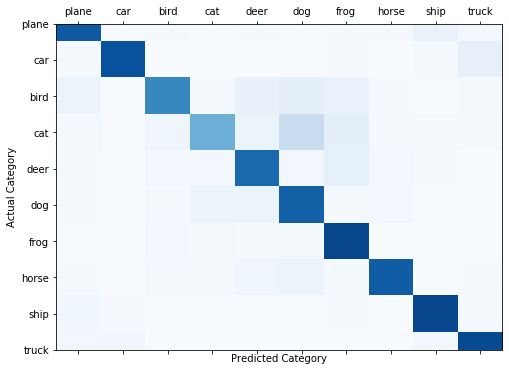

Category   - Accuracy
plane      - 84.1
car        - 87.3
bird       - 66.2
cat        - 49.8
deer       - 78.0
dog        - 81.6
frog       - 91.3
horse      - 82.6
ship       - 91.0
truck      - 89.7

Selected workers

[74 28  8 41 21 93  6 49 57 18 65 10 81 20 60]
Worker 74 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 8 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 21 : is  Stealthy_Attacker
Worker 93 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 57 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 10 : is  Honest
Worker 81 : is  Honest
Worker 20 : is  Honest
Worker 60 : is  Honest

 | Global Training Round : 36 |


Worker 74 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.439086
Train Epoch: 1 [400/500	(81%)]	Loss: 0.552494
Train Epoch: 2 [0/500	(1%)]	Loss: 0.214499
Train Epoch: 2 [400/500	(81%)]	Loss: 0.326170
Train Epoch: 3 [0/500	(1%)]	Loss: 0.158953
Train Epoch: 3 [400/500	(81%)]	Loss: 0.364929
Train Epoch: 4 [0/500	(1%)]	Loss: 0.250963
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309700
Train Epoch: 5 [0/500	(1%)]	Loss: 0.136760
Train Epoch: 5 [400/500	(81%)]	Loss: 0.193770

Worker 74 ends training in Global Round:36 |

Worker 28 starts training in Global Round:36 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  36


Train Epoch: 1 [0/500	(1%)]	Loss: 1.342630
Train Epoch: 1 [400/500	(81%)]	Loss: 0.738587
Train Epoch: 2 [0/500	(1%)]	Loss: 0.342985
Train Epoch: 2 [400/500	(81%)]	Loss: 0.661233
Train Epoch: 3 [0/500	(1%)]	Loss: 0.343354
Train Epoch: 3 [400/500	(81%)]	Loss: 0.361793
Train Epoch: 4 [0/500	(1%)]	Loss: 0.261723
Train Epoch: 4 [400/500	(81%)]	Loss: 0.335424
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155525
Train Epoch: 5 [400/500	(81%)]	Loss: 0.308547

Performed attacks 1
Worker 28 ends training in Global Round:36 |

Worker 8 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.535102
Train Epoch: 1 [400/500	(81%)]	Loss: 0.741556
Train Epoch: 2 [0/500	(1%)]	Loss: 0.372584
Train Epoch: 2 [400/500	(81%)]	Loss: 0.447243
Train Epoch: 3 [0/500	(1%)]	Loss: 0.267773
Train Epoch: 3 [400/500	(81%)]	Loss: 0.307538
Train Epoch: 4 [0/500	(1%)]	Loss: 0.212659
Train Epoch: 4 [400/500	(81%)]	Loss: 0.286447
Train Epoch: 5 [0/500	(1%)]	Loss: 0.245652
Train Epoch: 5 [400/500	(81%)]	Loss: 0.221050

Worker 8 ends training in Global Round:36 |

Worker 41 starts training in Global Round:36 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  36


Train Epoch: 1 [0/500	(1%)]	Loss: 1.248528
Train Epoch: 1 [400/500	(81%)]	Loss: 0.838612
Train Epoch: 2 [0/500	(1%)]	Loss: 0.303373
Train Epoch: 2 [400/500	(81%)]	Loss: 0.604364
Train Epoch: 3 [0/500	(1%)]	Loss: 0.299468
Train Epoch: 3 [400/500	(81%)]	Loss: 0.386696
Train Epoch: 4 [0/500	(1%)]	Loss: 0.235599
Train Epoch: 4 [400/500	(81%)]	Loss: 0.308370
Train Epoch: 5 [0/500	(1%)]	Loss: 0.225162
Train Epoch: 5 [400/500	(81%)]	Loss: 0.133773

Performed attacks 2
Worker 41 ends training in Global Round:36 |

Worker 21 starts training in Global Round:36 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  36


Train Epoch: 1 [0/500	(1%)]	Loss: 1.455970
Train Epoch: 1 [400/500	(81%)]	Loss: 0.555736
Train Epoch: 2 [0/500	(1%)]	Loss: 0.610684
Train Epoch: 2 [400/500	(81%)]	Loss: 0.380238
Train Epoch: 3 [0/500	(1%)]	Loss: 0.384913
Train Epoch: 3 [400/500	(81%)]	Loss: 0.491488
Train Epoch: 4 [0/500	(1%)]	Loss: 0.202198
Train Epoch: 4 [400/500	(81%)]	Loss: 0.408403
Train Epoch: 5 [0/500	(1%)]	Loss: 0.205826
Train Epoch: 5 [400/500	(81%)]	Loss: 0.291202

Performed attacks 3
Worker 21 ends training in Global Round:36 |

Worker 93 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.575515
Train Epoch: 1 [400/500	(81%)]	Loss: 0.323371
Train Epoch: 2 [0/500	(1%)]	Loss: 0.233503
Train Epoch: 2 [400/500	(81%)]	Loss: 0.233396
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142119
Train Epoch: 3 [400/500	(81%)]	Loss: 0.315852
Train Epoch: 4 [0/500	(1%)]	Loss: 0.136179
Train Epoch: 4 [400/500	(81%)]	Loss: 0.174153
Train Epoch: 5 [0/500	(1%)]	Loss: 0.144741
Train Epoch: 5 [400/500	(81%)]	Loss: 0.131309

Worker 93 ends training in Global Round:36 |

Worker 6 starts training in Global Round:36 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  36


Train Epoch: 1 [0/500	(1%)]	Loss: 1.074757
Train Epoch: 1 [400/500	(81%)]	Loss: 0.651876
Train Epoch: 2 [0/500	(1%)]	Loss: 0.487121
Train Epoch: 2 [400/500	(81%)]	Loss: 0.476921
Train Epoch: 3 [0/500	(1%)]	Loss: 0.451265
Train Epoch: 3 [400/500	(81%)]	Loss: 0.426298
Train Epoch: 4 [0/500	(1%)]	Loss: 0.196955
Train Epoch: 4 [400/500	(81%)]	Loss: 0.419183
Train Epoch: 5 [0/500	(1%)]	Loss: 0.179295
Train Epoch: 5 [400/500	(81%)]	Loss: 0.286268

Performed attacks 4
Worker 6 ends training in Global Round:36 |

Worker 49 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.536956
Train Epoch: 1 [400/500	(81%)]	Loss: 0.395197
Train Epoch: 2 [0/500	(1%)]	Loss: 0.233853
Train Epoch: 2 [400/500	(81%)]	Loss: 0.376147
Train Epoch: 3 [0/500	(1%)]	Loss: 0.321122
Train Epoch: 3 [400/500	(81%)]	Loss: 0.353453
Train Epoch: 4 [0/500	(1%)]	Loss: 0.204087
Train Epoch: 4 [400/500	(81%)]	Loss: 0.283264
Train Epoch: 5 [0/500	(1%)]	Loss: 0.197306
Train Epoch: 5 [400/500	(81%)]	Loss: 0.277704

Worker 49 ends training in Global Round:36 |

Worker 57 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.393594
Train Epoch: 1 [400/500	(81%)]	Loss: 0.572484
Train Epoch: 2 [0/500	(1%)]	Loss: 0.303882
Train Epoch: 2 [400/500	(81%)]	Loss: 0.364789
Train Epoch: 3 [0/500	(1%)]	Loss: 0.322498
Train Epoch: 3 [400/500	(81%)]	Loss: 0.316454
Train Epoch: 4 [0/500	(1%)]	Loss: 0.223963
Train Epoch: 4 [400/500	(81%)]	Loss: 0.302277
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122685
Train Epoch: 5 [400/500	(81%)]	Loss: 0.394192

Worker 57 ends training in Global Round:36 |

Worker 18 starts training in Global Round:36 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  36


Train Epoch: 1 [0/500	(1%)]	Loss: 1.228472
Train Epoch: 1 [400/500	(81%)]	Loss: 0.793458
Train Epoch: 2 [0/500	(1%)]	Loss: 0.370070
Train Epoch: 2 [400/500	(81%)]	Loss: 0.515696
Train Epoch: 3 [0/500	(1%)]	Loss: 0.267475
Train Epoch: 3 [400/500	(81%)]	Loss: 0.361208
Train Epoch: 4 [0/500	(1%)]	Loss: 0.313134
Train Epoch: 4 [400/500	(81%)]	Loss: 0.265083
Train Epoch: 5 [0/500	(1%)]	Loss: 0.249626
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199536

Performed attacks 5
Worker 18 ends training in Global Round:36 |

Worker 65 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.712755
Train Epoch: 1 [400/500	(81%)]	Loss: 0.841220
Train Epoch: 2 [0/500	(1%)]	Loss: 0.355606
Train Epoch: 2 [400/500	(81%)]	Loss: 0.644113
Train Epoch: 3 [0/500	(1%)]	Loss: 0.460371
Train Epoch: 3 [400/500	(81%)]	Loss: 0.369334
Train Epoch: 4 [0/500	(1%)]	Loss: 0.291037
Train Epoch: 4 [400/500	(81%)]	Loss: 0.506590
Train Epoch: 5 [0/500	(1%)]	Loss: 0.231963
Train Epoch: 5 [400/500	(81%)]	Loss: 0.250848

Worker 65 ends training in Global Round:36 |

Worker 10 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.576584
Train Epoch: 1 [400/500	(81%)]	Loss: 0.480630
Train Epoch: 2 [0/500	(1%)]	Loss: 0.265000
Train Epoch: 2 [400/500	(81%)]	Loss: 0.411362
Train Epoch: 3 [0/500	(1%)]	Loss: 0.224369
Train Epoch: 3 [400/500	(81%)]	Loss: 0.149957
Train Epoch: 4 [0/500	(1%)]	Loss: 0.228806
Train Epoch: 4 [400/500	(81%)]	Loss: 0.322897
Train Epoch: 5 [0/500	(1%)]	Loss: 0.153151
Train Epoch: 5 [400/500	(81%)]	Loss: 0.259643

Worker 10 ends training in Global Round:36 |

Worker 81 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.461699
Train Epoch: 1 [400/500	(81%)]	Loss: 0.449876
Train Epoch: 2 [0/500	(1%)]	Loss: 0.248265
Train Epoch: 2 [400/500	(81%)]	Loss: 0.280327
Train Epoch: 3 [0/500	(1%)]	Loss: 0.150971
Train Epoch: 3 [400/500	(81%)]	Loss: 0.281222
Train Epoch: 4 [0/500	(1%)]	Loss: 0.094863
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213713
Train Epoch: 5 [0/500	(1%)]	Loss: 0.095239
Train Epoch: 5 [400/500	(81%)]	Loss: 0.164696

Worker 81 ends training in Global Round:36 |

Worker 20 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.459092
Train Epoch: 1 [400/500	(81%)]	Loss: 0.325485
Train Epoch: 2 [0/500	(1%)]	Loss: 0.222492
Train Epoch: 2 [400/500	(81%)]	Loss: 0.285634
Train Epoch: 3 [0/500	(1%)]	Loss: 0.147618
Train Epoch: 3 [400/500	(81%)]	Loss: 0.270196
Train Epoch: 4 [0/500	(1%)]	Loss: 0.196525
Train Epoch: 4 [400/500	(81%)]	Loss: 0.294987
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126840
Train Epoch: 5 [400/500	(81%)]	Loss: 0.211206

Worker 20 ends training in Global Round:36 |

Worker 60 starts training in Global Round:36 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.516373
Train Epoch: 1 [400/500	(81%)]	Loss: 0.437480
Train Epoch: 2 [0/500	(1%)]	Loss: 0.299296
Train Epoch: 2 [400/500	(81%)]	Loss: 0.308994
Train Epoch: 3 [0/500	(1%)]	Loss: 0.288926
Train Epoch: 3 [400/500	(81%)]	Loss: 0.382242
Train Epoch: 4 [0/500	(1%)]	Loss: 0.136644
Train Epoch: 4 [400/500	(81%)]	Loss: 0.233275
Train Epoch: 5 [0/500	(1%)]	Loss: 0.146464
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242793

Worker 60 ends training in Global Round:36 |
Last layer biases  [array([ 0.0328477 , -0.03087043, -0.01382891,  0.0367764 ,  0.03549218,
       -0.01555092,  0.03956203, -0.0091453 , -0.02185469, -0.03752631],
      dtype=float32), array([ 0.0336302 , -0.02560897, -0.01325137,  0.03798751,  0.04593671,
       -0.01719937,  0.04257749, -0.02815239, -0.02040578, -0.03961228],
      dtype=float32), array([ 0.03364193, -0.03106493, -0.01507615,  0.03822161,  0.03779849,
       -0.02011657,  0.03996701, -0.00452205, -0.02097743, -0.04197016],
      dtyp

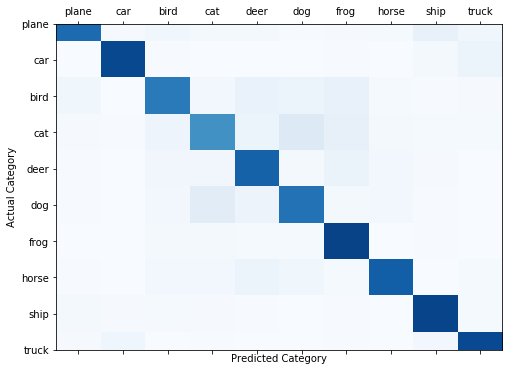

Category   - Accuracy
plane      - 77.1
car        - 90.5
bird       - 71.1
cat        - 62.6
deer       - 80.6
dog        - 74.5
frog       - 92.3
horse      - 81.9
ship       - 91.9
truck      - 90.0

Selected workers

[48 39 33 31 71 81 18 73 78 36 46 45 89  9 82]
Worker 48 : is  Honest
Worker 39 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 31 : is  Stealthy_Attacker
Worker 71 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 73 : is  Honest
Worker 78 : is  Honest
Worker 36 : is  Honest
Worker 46 : is  Stealthy_Attacker
Worker 45 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 9 : is  Honest
Worker 82 : is  Honest

 | Global Training Round : 37 |


Worker 48 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.629088
Train Epoch: 1 [400/500	(81%)]	Loss: 0.536006
Train Epoch: 2 [0/500	(1%)]	Loss: 0.376064
Train Epoch: 2 [400/500	(81%)]	Loss: 0.497048
Train Epoch: 3 [0/500	(1%)]	Loss: 0.381750
Train Epoch: 3 [400/500	(81%)]	Loss: 0.225750
Train Epoch: 4 [0/500	(1%)]	Loss: 0.239488
Train Epoch: 4 [400/500	(81%)]	Loss: 0.195405
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155830
Train Epoch: 5 [400/500	(81%)]	Loss: 0.202915

Worker 48 ends training in Global Round:37 |

Worker 39 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.407424
Train Epoch: 1 [400/500	(81%)]	Loss: 0.433955
Train Epoch: 2 [0/500	(1%)]	Loss: 0.258161
Train Epoch: 2 [400/500	(81%)]	Loss: 0.412246
Train Epoch: 3 [0/500	(1%)]	Loss: 0.289597
Train Epoch: 3 [400/500	(81%)]	Loss: 0.270966
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156754
Train Epoch: 4 [400/500	(81%)]	Loss: 0.275572
Train Epoch: 5 [0/500	(1%)]	Loss: 0.120675
Train Epoch: 5 [400/500	(81%)]	Loss: 0.111596

Worker 39 ends training in Global Round:37 |

Worker 33 starts training in Global Round:37 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  37


Train Epoch: 1 [0/500	(1%)]	Loss: 1.181949
Train Epoch: 1 [400/500	(81%)]	Loss: 0.719222
Train Epoch: 2 [0/500	(1%)]	Loss: 0.425002
Train Epoch: 2 [400/500	(81%)]	Loss: 0.585979
Train Epoch: 3 [0/500	(1%)]	Loss: 0.353879
Train Epoch: 3 [400/500	(81%)]	Loss: 0.346967
Train Epoch: 4 [0/500	(1%)]	Loss: 0.312673
Train Epoch: 4 [400/500	(81%)]	Loss: 0.428848
Train Epoch: 5 [0/500	(1%)]	Loss: 0.297282
Train Epoch: 5 [400/500	(81%)]	Loss: 0.419607

Performed attacks 1
Worker 33 ends training in Global Round:37 |

Worker 31 starts training in Global Round:37 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  37


Train Epoch: 1 [0/500	(1%)]	Loss: 0.944488
Train Epoch: 1 [400/500	(81%)]	Loss: 0.763499
Train Epoch: 2 [0/500	(1%)]	Loss: 0.494712
Train Epoch: 2 [400/500	(81%)]	Loss: 0.516277
Train Epoch: 3 [0/500	(1%)]	Loss: 0.401025
Train Epoch: 3 [400/500	(81%)]	Loss: 0.400556
Train Epoch: 4 [0/500	(1%)]	Loss: 0.387503
Train Epoch: 4 [400/500	(81%)]	Loss: 0.267659
Train Epoch: 5 [0/500	(1%)]	Loss: 0.209498
Train Epoch: 5 [400/500	(81%)]	Loss: 0.301344

Performed attacks 2
Worker 31 ends training in Global Round:37 |

Worker 71 starts training in Global Round:37 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  37


Train Epoch: 1 [0/500	(1%)]	Loss: 1.447713
Train Epoch: 1 [400/500	(81%)]	Loss: 0.724478
Train Epoch: 2 [0/500	(1%)]	Loss: 0.368300
Train Epoch: 2 [400/500	(81%)]	Loss: 0.530162
Train Epoch: 3 [0/500	(1%)]	Loss: 0.392925
Train Epoch: 3 [400/500	(81%)]	Loss: 0.501865
Train Epoch: 4 [0/500	(1%)]	Loss: 0.442490
Train Epoch: 4 [400/500	(81%)]	Loss: 0.426210
Train Epoch: 5 [0/500	(1%)]	Loss: 0.228988
Train Epoch: 5 [400/500	(81%)]	Loss: 0.340700

Performed attacks 3
Worker 71 ends training in Global Round:37 |

Worker 81 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.262132
Train Epoch: 1 [400/500	(81%)]	Loss: 0.415148
Train Epoch: 2 [0/500	(1%)]	Loss: 0.184801
Train Epoch: 2 [400/500	(81%)]	Loss: 0.271002
Train Epoch: 3 [0/500	(1%)]	Loss: 0.171739
Train Epoch: 3 [400/500	(81%)]	Loss: 0.296565
Train Epoch: 4 [0/500	(1%)]	Loss: 0.154088
Train Epoch: 4 [400/500	(81%)]	Loss: 0.251249
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170278
Train Epoch: 5 [400/500	(81%)]	Loss: 0.201431

Worker 81 ends training in Global Round:37 |

Worker 18 starts training in Global Round:37 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  37


Train Epoch: 1 [0/500	(1%)]	Loss: 1.216505
Train Epoch: 1 [400/500	(81%)]	Loss: 0.797007
Train Epoch: 2 [0/500	(1%)]	Loss: 0.382309
Train Epoch: 2 [400/500	(81%)]	Loss: 0.532862
Train Epoch: 3 [0/500	(1%)]	Loss: 0.327643
Train Epoch: 3 [400/500	(81%)]	Loss: 0.505331
Train Epoch: 4 [0/500	(1%)]	Loss: 0.263073
Train Epoch: 4 [400/500	(81%)]	Loss: 0.291773
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138457
Train Epoch: 5 [400/500	(81%)]	Loss: 0.329629

Performed attacks 4
Worker 18 ends training in Global Round:37 |

Worker 73 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.276053
Train Epoch: 1 [400/500	(81%)]	Loss: 0.417221
Train Epoch: 2 [0/500	(1%)]	Loss: 0.136552
Train Epoch: 2 [400/500	(81%)]	Loss: 0.183613
Train Epoch: 3 [0/500	(1%)]	Loss: 0.130745
Train Epoch: 3 [400/500	(81%)]	Loss: 0.116659
Train Epoch: 4 [0/500	(1%)]	Loss: 0.068383
Train Epoch: 4 [400/500	(81%)]	Loss: 0.127052
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106719
Train Epoch: 5 [400/500	(81%)]	Loss: 0.175517

Worker 73 ends training in Global Round:37 |

Worker 78 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.375157
Train Epoch: 1 [400/500	(81%)]	Loss: 0.439427
Train Epoch: 2 [0/500	(1%)]	Loss: 0.225457
Train Epoch: 2 [400/500	(81%)]	Loss: 0.416287
Train Epoch: 3 [0/500	(1%)]	Loss: 0.273322
Train Epoch: 3 [400/500	(81%)]	Loss: 0.248226
Train Epoch: 4 [0/500	(1%)]	Loss: 0.365867
Train Epoch: 4 [400/500	(81%)]	Loss: 0.234691
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160505
Train Epoch: 5 [400/500	(81%)]	Loss: 0.192869

Worker 78 ends training in Global Round:37 |

Worker 36 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.445450
Train Epoch: 1 [400/500	(81%)]	Loss: 0.526434
Train Epoch: 2 [0/500	(1%)]	Loss: 0.414556
Train Epoch: 2 [400/500	(81%)]	Loss: 0.471285
Train Epoch: 3 [0/500	(1%)]	Loss: 0.370552
Train Epoch: 3 [400/500	(81%)]	Loss: 0.384657
Train Epoch: 4 [0/500	(1%)]	Loss: 0.217003
Train Epoch: 4 [400/500	(81%)]	Loss: 0.444755
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192162
Train Epoch: 5 [400/500	(81%)]	Loss: 0.263675

Worker 36 ends training in Global Round:37 |

Worker 46 starts training in Global Round:37 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  37


Train Epoch: 1 [0/500	(1%)]	Loss: 1.164810
Train Epoch: 1 [400/500	(81%)]	Loss: 0.512995
Train Epoch: 2 [0/500	(1%)]	Loss: 0.299347
Train Epoch: 2 [400/500	(81%)]	Loss: 0.439808
Train Epoch: 3 [0/500	(1%)]	Loss: 0.416063
Train Epoch: 3 [400/500	(81%)]	Loss: 0.280207
Train Epoch: 4 [0/500	(1%)]	Loss: 0.247595
Train Epoch: 4 [400/500	(81%)]	Loss: 0.191188
Train Epoch: 5 [0/500	(1%)]	Loss: 0.196962
Train Epoch: 5 [400/500	(81%)]	Loss: 0.298364

Performed attacks 5
Worker 46 ends training in Global Round:37 |

Worker 45 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.461641
Train Epoch: 1 [400/500	(81%)]	Loss: 0.641013
Train Epoch: 2 [0/500	(1%)]	Loss: 0.500137
Train Epoch: 2 [400/500	(81%)]	Loss: 0.442264
Train Epoch: 3 [0/500	(1%)]	Loss: 0.179078
Train Epoch: 3 [400/500	(81%)]	Loss: 0.415615
Train Epoch: 4 [0/500	(1%)]	Loss: 0.267150
Train Epoch: 4 [400/500	(81%)]	Loss: 0.240119
Train Epoch: 5 [0/500	(1%)]	Loss: 0.246174
Train Epoch: 5 [400/500	(81%)]	Loss: 0.291241

Worker 45 ends training in Global Round:37 |

Worker 89 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.543123
Train Epoch: 1 [400/500	(81%)]	Loss: 0.733819
Train Epoch: 2 [0/500	(1%)]	Loss: 0.453401
Train Epoch: 2 [400/500	(81%)]	Loss: 0.554666
Train Epoch: 3 [0/500	(1%)]	Loss: 0.434795
Train Epoch: 3 [400/500	(81%)]	Loss: 0.548007
Train Epoch: 4 [0/500	(1%)]	Loss: 0.381054
Train Epoch: 4 [400/500	(81%)]	Loss: 0.315037
Train Epoch: 5 [0/500	(1%)]	Loss: 0.310948
Train Epoch: 5 [400/500	(81%)]	Loss: 0.306524

Worker 89 ends training in Global Round:37 |

Worker 9 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.398457
Train Epoch: 1 [400/500	(81%)]	Loss: 0.332707
Train Epoch: 2 [0/500	(1%)]	Loss: 0.242881
Train Epoch: 2 [400/500	(81%)]	Loss: 0.438827
Train Epoch: 3 [0/500	(1%)]	Loss: 0.161616
Train Epoch: 3 [400/500	(81%)]	Loss: 0.192062
Train Epoch: 4 [0/500	(1%)]	Loss: 0.148591
Train Epoch: 4 [400/500	(81%)]	Loss: 0.347541
Train Epoch: 5 [0/500	(1%)]	Loss: 0.135011
Train Epoch: 5 [400/500	(81%)]	Loss: 0.293676

Worker 9 ends training in Global Round:37 |

Worker 82 starts training in Global Round:37 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.477293
Train Epoch: 1 [400/500	(81%)]	Loss: 0.603707
Train Epoch: 2 [0/500	(1%)]	Loss: 0.173769
Train Epoch: 2 [400/500	(81%)]	Loss: 0.288895
Train Epoch: 3 [0/500	(1%)]	Loss: 0.288454
Train Epoch: 3 [400/500	(81%)]	Loss: 0.434064
Train Epoch: 4 [0/500	(1%)]	Loss: 0.161447
Train Epoch: 4 [400/500	(81%)]	Loss: 0.193598
Train Epoch: 5 [0/500	(1%)]	Loss: 0.202128
Train Epoch: 5 [400/500	(81%)]	Loss: 0.215354

Worker 82 ends training in Global Round:37 |
Last layer biases  [array([ 0.03552124, -0.03301995, -0.01284655,  0.03395666,  0.03945537,
       -0.01784629,  0.03846563, -0.00603879, -0.01989738, -0.04184818],
      dtype=float32), array([ 0.03645974, -0.03183867, -0.01625102,  0.03662158,  0.03746602,
       -0.01805052,  0.0387793 , -0.00495224, -0.0234884 , -0.03884399],
      dtype=float32), array([ 0.03209888, -0.02985027, -0.01377578,  0.03831959,  0.04530861,
       -0.0136043 ,  0.0407758 , -0.02794334, -0.01898315, -0.03644424],
      dtyp

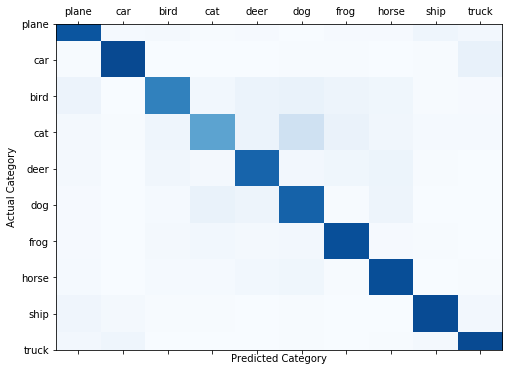

Category   - Accuracy
plane      - 85.6
car        - 90.1
bird       - 68.7
cat        - 54.4
deer       - 80.0
dog        - 80.5
frog       - 87.9
horse      - 88.4
ship       - 89.4
truck      - 89.8

Selected workers

[ 43  72  93   4   2  82  19 100  33  42  13  92  97  39  29]
Worker 43 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 93 : is  Honest
Worker 4 : is  Honest
Worker 2 : is  Honest
Worker 82 : is  Honest
Worker 19 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 92 : is  Stealthy_Attacker
Worker 97 : is  Stealthy_Attacker
Worker 39 : is  Honest
Worker 29 : is  Honest

 | Global Training Round : 38 |


Worker 43 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.274444
Train Epoch: 1 [400/500	(81%)]	Loss: 0.339214
Train Epoch: 2 [0/500	(1%)]	Loss: 0.190863
Train Epoch: 2 [400/500	(81%)]	Loss: 0.381216
Train Epoch: 3 [0/500	(1%)]	Loss: 0.122391
Train Epoch: 3 [400/500	(81%)]	Loss: 0.344034
Train Epoch: 4 [0/500	(1%)]	Loss: 0.124001
Train Epoch: 4 [400/500	(81%)]	Loss: 0.227248
Train Epoch: 5 [0/500	(1%)]	Loss: 0.189777
Train Epoch: 5 [400/500	(81%)]	Loss: 0.126959

Worker 43 ends training in Global Round:38 |

Worker 72 starts training in Global Round:38 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  38


Train Epoch: 1 [0/500	(1%)]	Loss: 1.476677
Train Epoch: 1 [400/500	(81%)]	Loss: 0.823060
Train Epoch: 2 [0/500	(1%)]	Loss: 0.282823
Train Epoch: 2 [400/500	(81%)]	Loss: 0.552342
Train Epoch: 3 [0/500	(1%)]	Loss: 0.294137
Train Epoch: 3 [400/500	(81%)]	Loss: 0.382038
Train Epoch: 4 [0/500	(1%)]	Loss: 0.181652
Train Epoch: 4 [400/500	(81%)]	Loss: 0.319542
Train Epoch: 5 [0/500	(1%)]	Loss: 0.234767
Train Epoch: 5 [400/500	(81%)]	Loss: 0.226870

Performed attacks 1
Worker 72 ends training in Global Round:38 |

Worker 93 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.405843
Train Epoch: 1 [400/500	(81%)]	Loss: 0.305420
Train Epoch: 2 [0/500	(1%)]	Loss: 0.263765
Train Epoch: 2 [400/500	(81%)]	Loss: 0.293434
Train Epoch: 3 [0/500	(1%)]	Loss: 0.112659
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234829
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140570
Train Epoch: 4 [400/500	(81%)]	Loss: 0.228359
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125919
Train Epoch: 5 [400/500	(81%)]	Loss: 0.249006

Worker 93 ends training in Global Round:38 |

Worker 4 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.328399
Train Epoch: 1 [400/500	(81%)]	Loss: 0.493418
Train Epoch: 2 [0/500	(1%)]	Loss: 0.292095
Train Epoch: 2 [400/500	(81%)]	Loss: 0.306489
Train Epoch: 3 [0/500	(1%)]	Loss: 0.257894
Train Epoch: 3 [400/500	(81%)]	Loss: 0.194001
Train Epoch: 4 [0/500	(1%)]	Loss: 0.257324
Train Epoch: 4 [400/500	(81%)]	Loss: 0.331689
Train Epoch: 5 [0/500	(1%)]	Loss: 0.207440
Train Epoch: 5 [400/500	(81%)]	Loss: 0.270780

Worker 4 ends training in Global Round:38 |

Worker 2 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.329136
Train Epoch: 1 [400/500	(81%)]	Loss: 0.493169
Train Epoch: 2 [0/500	(1%)]	Loss: 0.238881
Train Epoch: 2 [400/500	(81%)]	Loss: 0.292589
Train Epoch: 3 [0/500	(1%)]	Loss: 0.195387
Train Epoch: 3 [400/500	(81%)]	Loss: 0.194271
Train Epoch: 4 [0/500	(1%)]	Loss: 0.088901
Train Epoch: 4 [400/500	(81%)]	Loss: 0.175959
Train Epoch: 5 [0/500	(1%)]	Loss: 0.104552
Train Epoch: 5 [400/500	(81%)]	Loss: 0.200185

Worker 2 ends training in Global Round:38 |

Worker 82 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.362123
Train Epoch: 1 [400/500	(81%)]	Loss: 0.483910
Train Epoch: 2 [0/500	(1%)]	Loss: 0.109125
Train Epoch: 2 [400/500	(81%)]	Loss: 0.319436
Train Epoch: 3 [0/500	(1%)]	Loss: 0.255468
Train Epoch: 3 [400/500	(81%)]	Loss: 0.324867
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140216
Train Epoch: 4 [400/500	(81%)]	Loss: 0.286851
Train Epoch: 5 [0/500	(1%)]	Loss: 0.149413
Train Epoch: 5 [400/500	(81%)]	Loss: 0.215959

Worker 82 ends training in Global Round:38 |

Worker 19 starts training in Global Round:38 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  38


Train Epoch: 1 [0/500	(1%)]	Loss: 1.196031
Train Epoch: 1 [400/500	(81%)]	Loss: 0.777343
Train Epoch: 2 [0/500	(1%)]	Loss: 0.336678
Train Epoch: 2 [400/500	(81%)]	Loss: 0.486756
Train Epoch: 3 [0/500	(1%)]	Loss: 0.230574
Train Epoch: 3 [400/500	(81%)]	Loss: 0.288758
Train Epoch: 4 [0/500	(1%)]	Loss: 0.220982
Train Epoch: 4 [400/500	(81%)]	Loss: 0.264549
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126990
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210950

Performed attacks 2
Worker 19 ends training in Global Round:38 |

Worker 100 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.369580
Train Epoch: 1 [400/500	(81%)]	Loss: 0.438278
Train Epoch: 2 [0/500	(1%)]	Loss: 0.173875
Train Epoch: 2 [400/500	(81%)]	Loss: 0.207204
Train Epoch: 3 [0/500	(1%)]	Loss: 0.143403
Train Epoch: 3 [400/500	(81%)]	Loss: 0.217847
Train Epoch: 4 [0/500	(1%)]	Loss: 0.146198
Train Epoch: 4 [400/500	(81%)]	Loss: 0.123669
Train Epoch: 5 [0/500	(1%)]	Loss: 0.077062
Train Epoch: 5 [400/500	(81%)]	Loss: 0.098485

Worker 100 ends training in Global Round:38 |

Worker 33 starts training in Global Round:38 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  38


Train Epoch: 1 [0/500	(1%)]	Loss: 1.018303
Train Epoch: 1 [400/500	(81%)]	Loss: 0.865420
Train Epoch: 2 [0/500	(1%)]	Loss: 0.270820
Train Epoch: 2 [400/500	(81%)]	Loss: 0.407369
Train Epoch: 3 [0/500	(1%)]	Loss: 0.356326
Train Epoch: 3 [400/500	(81%)]	Loss: 0.348954
Train Epoch: 4 [0/500	(1%)]	Loss: 0.250475
Train Epoch: 4 [400/500	(81%)]	Loss: 0.398733
Train Epoch: 5 [0/500	(1%)]	Loss: 0.224789
Train Epoch: 5 [400/500	(81%)]	Loss: 0.329375

Performed attacks 3
Worker 33 ends training in Global Round:38 |

Worker 42 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.597948
Train Epoch: 1 [400/500	(81%)]	Loss: 0.388492
Train Epoch: 2 [0/500	(1%)]	Loss: 0.351443
Train Epoch: 2 [400/500	(81%)]	Loss: 0.431650
Train Epoch: 3 [0/500	(1%)]	Loss: 0.260837
Train Epoch: 3 [400/500	(81%)]	Loss: 0.285158
Train Epoch: 4 [0/500	(1%)]	Loss: 0.203843
Train Epoch: 4 [400/500	(81%)]	Loss: 0.199632
Train Epoch: 5 [0/500	(1%)]	Loss: 0.156862
Train Epoch: 5 [400/500	(81%)]	Loss: 0.225153

Worker 42 ends training in Global Round:38 |

Worker 13 starts training in Global Round:38 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  38


Train Epoch: 1 [0/500	(1%)]	Loss: 1.348097
Train Epoch: 1 [400/500	(81%)]	Loss: 0.505199
Train Epoch: 2 [0/500	(1%)]	Loss: 0.494977
Train Epoch: 2 [400/500	(81%)]	Loss: 0.360218
Train Epoch: 3 [0/500	(1%)]	Loss: 0.217157
Train Epoch: 3 [400/500	(81%)]	Loss: 0.414869
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156198
Train Epoch: 4 [400/500	(81%)]	Loss: 0.271986
Train Epoch: 5 [0/500	(1%)]	Loss: 0.215316
Train Epoch: 5 [400/500	(81%)]	Loss: 0.351980

Performed attacks 4
Worker 13 ends training in Global Round:38 |

Worker 92 starts training in Global Round:38 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  38


Train Epoch: 1 [0/500	(1%)]	Loss: 1.097533
Train Epoch: 1 [400/500	(81%)]	Loss: 0.854958
Train Epoch: 2 [0/500	(1%)]	Loss: 0.426430
Train Epoch: 2 [400/500	(81%)]	Loss: 0.376679
Train Epoch: 3 [0/500	(1%)]	Loss: 0.266559
Train Epoch: 3 [400/500	(81%)]	Loss: 0.335009
Train Epoch: 4 [0/500	(1%)]	Loss: 0.232986
Train Epoch: 4 [400/500	(81%)]	Loss: 0.181056
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125085
Train Epoch: 5 [400/500	(81%)]	Loss: 0.196692

Performed attacks 5
Worker 92 ends training in Global Round:38 |

Worker 97 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.594569
Train Epoch: 1 [400/500	(81%)]	Loss: 0.684901
Train Epoch: 2 [0/500	(1%)]	Loss: 0.400546
Train Epoch: 2 [400/500	(81%)]	Loss: 0.370031
Train Epoch: 3 [0/500	(1%)]	Loss: 0.349746
Train Epoch: 3 [400/500	(81%)]	Loss: 0.261964
Train Epoch: 4 [0/500	(1%)]	Loss: 0.221638
Train Epoch: 4 [400/500	(81%)]	Loss: 0.317629
Train Epoch: 5 [0/500	(1%)]	Loss: 0.158527
Train Epoch: 5 [400/500	(81%)]	Loss: 0.230985

Worker 97 ends training in Global Round:38 |

Worker 39 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.277529
Train Epoch: 1 [400/500	(81%)]	Loss: 0.370989
Train Epoch: 2 [0/500	(1%)]	Loss: 0.193392
Train Epoch: 2 [400/500	(81%)]	Loss: 0.185341
Train Epoch: 3 [0/500	(1%)]	Loss: 0.226313
Train Epoch: 3 [400/500	(81%)]	Loss: 0.267550
Train Epoch: 4 [0/500	(1%)]	Loss: 0.117066
Train Epoch: 4 [400/500	(81%)]	Loss: 0.388912
Train Epoch: 5 [0/500	(1%)]	Loss: 0.143510
Train Epoch: 5 [400/500	(81%)]	Loss: 0.193089

Worker 39 ends training in Global Round:38 |

Worker 29 starts training in Global Round:38 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.314520
Train Epoch: 1 [400/500	(81%)]	Loss: 0.450543
Train Epoch: 2 [0/500	(1%)]	Loss: 0.436516
Train Epoch: 2 [400/500	(81%)]	Loss: 0.292834
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127250
Train Epoch: 3 [400/500	(81%)]	Loss: 0.199141
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119279
Train Epoch: 4 [400/500	(81%)]	Loss: 0.198256
Train Epoch: 5 [0/500	(1%)]	Loss: 0.109536
Train Epoch: 5 [400/500	(81%)]	Loss: 0.205074

Worker 29 ends training in Global Round:38 |
Last layer biases  [array([ 0.03298412, -0.03069419, -0.01718441,  0.03737146,  0.03666996,
       -0.0181933 ,  0.04037158, -0.00703041, -0.018918  , -0.03947504],
      dtype=float32), array([ 0.03505943, -0.03188137, -0.01497007,  0.03736554,  0.04538039,
       -0.01450045,  0.04054835, -0.02429316, -0.01765013, -0.03915675],
      dtype=float32), array([ 0.03511492, -0.02842614, -0.01762648,  0.03513511,  0.03785153,
       -0.01691226,  0.03886771, -0.00653312, -0.0222024 , -0.03936708],
      dtyp

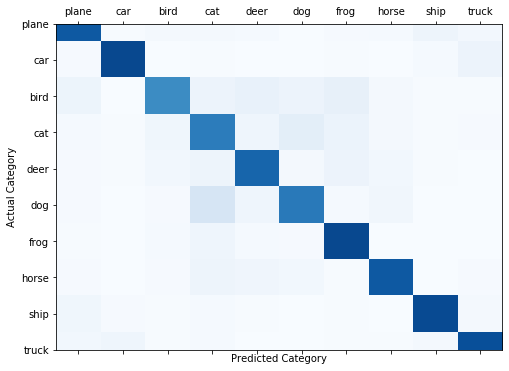

Category   - Accuracy
plane      - 84.2
car        - 90.5
bird       - 64.6
cat        - 70.6
deer       - 79.4
dog        - 71.6
frog       - 90.5
horse      - 84.3
ship       - 89.7
truck      - 87.9

Selected workers

[80 93 87 12 15  3 97 55 26 49 33 61 28 42  1]
Worker 80 : is  Honest
Worker 93 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 15 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 97 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 49 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 61 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 1 : is  Honest

 | Global Training Round : 39 |


Worker 80 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.698274
Train Epoch: 1 [400/500	(81%)]	Loss: 0.638711
Train Epoch: 2 [0/500	(1%)]	Loss: 0.368171
Train Epoch: 2 [400/500	(81%)]	Loss: 0.418866
Train Epoch: 3 [0/500	(1%)]	Loss: 0.265452
Train Epoch: 3 [400/500	(81%)]	Loss: 0.502379
Train Epoch: 4 [0/500	(1%)]	Loss: 0.323462
Train Epoch: 4 [400/500	(81%)]	Loss: 0.326530
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182577
Train Epoch: 5 [400/500	(81%)]	Loss: 0.356320

Worker 80 ends training in Global Round:39 |

Worker 93 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.310554
Train Epoch: 1 [400/500	(81%)]	Loss: 0.189885
Train Epoch: 2 [0/500	(1%)]	Loss: 0.128376
Train Epoch: 2 [400/500	(81%)]	Loss: 0.302624
Train Epoch: 3 [0/500	(1%)]	Loss: 0.064457
Train Epoch: 3 [400/500	(81%)]	Loss: 0.168161
Train Epoch: 4 [0/500	(1%)]	Loss: 0.093106
Train Epoch: 4 [400/500	(81%)]	Loss: 0.220835
Train Epoch: 5 [0/500	(1%)]	Loss: 0.144899
Train Epoch: 5 [400/500	(81%)]	Loss: 0.275860

Worker 93 ends training in Global Round:39 |

Worker 87 starts training in Global Round:39 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  39


Train Epoch: 1 [0/500	(1%)]	Loss: 1.479957
Train Epoch: 1 [400/500	(81%)]	Loss: 0.695749
Train Epoch: 2 [0/500	(1%)]	Loss: 0.680272
Train Epoch: 2 [400/500	(81%)]	Loss: 0.677999
Train Epoch: 3 [0/500	(1%)]	Loss: 0.370170
Train Epoch: 3 [400/500	(81%)]	Loss: 0.439040
Train Epoch: 4 [0/500	(1%)]	Loss: 0.331536
Train Epoch: 4 [400/500	(81%)]	Loss: 0.268936
Train Epoch: 5 [0/500	(1%)]	Loss: 0.177560
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139629

Performed attacks 1
Worker 87 ends training in Global Round:39 |

Worker 12 starts training in Global Round:39 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  39


Train Epoch: 1 [0/500	(1%)]	Loss: 0.949982
Train Epoch: 1 [400/500	(81%)]	Loss: 0.614113
Train Epoch: 2 [0/500	(1%)]	Loss: 0.432496
Train Epoch: 2 [400/500	(81%)]	Loss: 0.492995
Train Epoch: 3 [0/500	(1%)]	Loss: 0.274545
Train Epoch: 3 [400/500	(81%)]	Loss: 0.502053
Train Epoch: 4 [0/500	(1%)]	Loss: 0.193847
Train Epoch: 4 [400/500	(81%)]	Loss: 0.252893
Train Epoch: 5 [0/500	(1%)]	Loss: 0.262141
Train Epoch: 5 [400/500	(81%)]	Loss: 0.209140

Performed attacks 2
Worker 12 ends training in Global Round:39 |

Worker 15 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.487444
Train Epoch: 1 [400/500	(81%)]	Loss: 0.637676
Train Epoch: 2 [0/500	(1%)]	Loss: 0.397476
Train Epoch: 2 [400/500	(81%)]	Loss: 0.424918
Train Epoch: 3 [0/500	(1%)]	Loss: 0.319632
Train Epoch: 3 [400/500	(81%)]	Loss: 0.409136
Train Epoch: 4 [0/500	(1%)]	Loss: 0.242532
Train Epoch: 4 [400/500	(81%)]	Loss: 0.268578
Train Epoch: 5 [0/500	(1%)]	Loss: 0.213609
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253476

Worker 15 ends training in Global Round:39 |

Worker 3 starts training in Global Round:39 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  39


Train Epoch: 1 [0/500	(1%)]	Loss: 1.464746
Train Epoch: 1 [400/500	(81%)]	Loss: 0.792390
Train Epoch: 2 [0/500	(1%)]	Loss: 0.483256
Train Epoch: 2 [400/500	(81%)]	Loss: 0.612969
Train Epoch: 3 [0/500	(1%)]	Loss: 0.408174
Train Epoch: 3 [400/500	(81%)]	Loss: 0.531434
Train Epoch: 4 [0/500	(1%)]	Loss: 0.270836
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309459
Train Epoch: 5 [0/500	(1%)]	Loss: 0.227716
Train Epoch: 5 [400/500	(81%)]	Loss: 0.235992

Performed attacks 3
Worker 3 ends training in Global Round:39 |

Worker 97 starts training in Global Round:39 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  39


Train Epoch: 1 [0/500	(1%)]	Loss: 1.150406
Train Epoch: 1 [400/500	(81%)]	Loss: 0.436354
Train Epoch: 2 [0/500	(1%)]	Loss: 0.447787
Train Epoch: 2 [400/500	(81%)]	Loss: 0.386049
Train Epoch: 3 [0/500	(1%)]	Loss: 0.362406
Train Epoch: 3 [400/500	(81%)]	Loss: 0.349103
Train Epoch: 4 [0/500	(1%)]	Loss: 0.242117
Train Epoch: 4 [400/500	(81%)]	Loss: 0.359874
Train Epoch: 5 [0/500	(1%)]	Loss: 0.219593
Train Epoch: 5 [400/500	(81%)]	Loss: 0.280211

Performed attacks 4
Worker 97 ends training in Global Round:39 |

Worker 55 starts training in Global Round:39 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  39


Train Epoch: 1 [0/500	(1%)]	Loss: 1.248603
Train Epoch: 1 [400/500	(81%)]	Loss: 0.756954
Train Epoch: 2 [0/500	(1%)]	Loss: 0.527324
Train Epoch: 2 [400/500	(81%)]	Loss: 0.527438
Train Epoch: 3 [0/500	(1%)]	Loss: 0.482436
Train Epoch: 3 [400/500	(81%)]	Loss: 0.478893
Train Epoch: 4 [0/500	(1%)]	Loss: 0.239676
Train Epoch: 4 [400/500	(81%)]	Loss: 0.430708
Train Epoch: 5 [0/500	(1%)]	Loss: 0.361982
Train Epoch: 5 [400/500	(81%)]	Loss: 0.245300

Performed attacks 5
Worker 55 ends training in Global Round:39 |

Worker 26 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.436026
Train Epoch: 1 [400/500	(81%)]	Loss: 0.486593
Train Epoch: 2 [0/500	(1%)]	Loss: 0.239229
Train Epoch: 2 [400/500	(81%)]	Loss: 0.447664
Train Epoch: 3 [0/500	(1%)]	Loss: 0.199528
Train Epoch: 3 [400/500	(81%)]	Loss: 0.198004
Train Epoch: 4 [0/500	(1%)]	Loss: 0.239621
Train Epoch: 4 [400/500	(81%)]	Loss: 0.354991
Train Epoch: 5 [0/500	(1%)]	Loss: 0.219763
Train Epoch: 5 [400/500	(81%)]	Loss: 0.283949

Worker 26 ends training in Global Round:39 |

Worker 49 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.380629
Train Epoch: 1 [400/500	(81%)]	Loss: 0.490114
Train Epoch: 2 [0/500	(1%)]	Loss: 0.268360
Train Epoch: 2 [400/500	(81%)]	Loss: 0.279116
Train Epoch: 3 [0/500	(1%)]	Loss: 0.168060
Train Epoch: 3 [400/500	(81%)]	Loss: 0.254066
Train Epoch: 4 [0/500	(1%)]	Loss: 0.295364
Train Epoch: 4 [400/500	(81%)]	Loss: 0.240334
Train Epoch: 5 [0/500	(1%)]	Loss: 0.174363
Train Epoch: 5 [400/500	(81%)]	Loss: 0.260038

Worker 49 ends training in Global Round:39 |

Worker 33 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.648513
Train Epoch: 1 [400/500	(81%)]	Loss: 0.711031
Train Epoch: 2 [0/500	(1%)]	Loss: 0.515967
Train Epoch: 2 [400/500	(81%)]	Loss: 0.437464
Train Epoch: 3 [0/500	(1%)]	Loss: 0.190054
Train Epoch: 3 [400/500	(81%)]	Loss: 0.485541
Train Epoch: 4 [0/500	(1%)]	Loss: 0.303174
Train Epoch: 4 [400/500	(81%)]	Loss: 0.218792
Train Epoch: 5 [0/500	(1%)]	Loss: 0.265923
Train Epoch: 5 [400/500	(81%)]	Loss: 0.250287

Worker 33 ends training in Global Round:39 |

Worker 61 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.584070
Train Epoch: 1 [400/500	(81%)]	Loss: 0.960086
Train Epoch: 2 [0/500	(1%)]	Loss: 0.291385
Train Epoch: 2 [400/500	(81%)]	Loss: 0.400820
Train Epoch: 3 [0/500	(1%)]	Loss: 0.266509
Train Epoch: 3 [400/500	(81%)]	Loss: 0.377109
Train Epoch: 4 [0/500	(1%)]	Loss: 0.267031
Train Epoch: 4 [400/500	(81%)]	Loss: 0.366165
Train Epoch: 5 [0/500	(1%)]	Loss: 0.183371
Train Epoch: 5 [400/500	(81%)]	Loss: 0.348278

Worker 61 ends training in Global Round:39 |

Worker 28 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.522694
Train Epoch: 1 [400/500	(81%)]	Loss: 0.550365
Train Epoch: 2 [0/500	(1%)]	Loss: 0.331048
Train Epoch: 2 [400/500	(81%)]	Loss: 0.492419
Train Epoch: 3 [0/500	(1%)]	Loss: 0.314757
Train Epoch: 3 [400/500	(81%)]	Loss: 0.687110
Train Epoch: 4 [0/500	(1%)]	Loss: 0.271178
Train Epoch: 4 [400/500	(81%)]	Loss: 0.420300
Train Epoch: 5 [0/500	(1%)]	Loss: 0.178187
Train Epoch: 5 [400/500	(81%)]	Loss: 0.239988

Worker 28 ends training in Global Round:39 |

Worker 42 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.618802
Train Epoch: 1 [400/500	(81%)]	Loss: 0.613816
Train Epoch: 2 [0/500	(1%)]	Loss: 0.325126
Train Epoch: 2 [400/500	(81%)]	Loss: 0.488378
Train Epoch: 3 [0/500	(1%)]	Loss: 0.281761
Train Epoch: 3 [400/500	(81%)]	Loss: 0.340378
Train Epoch: 4 [0/500	(1%)]	Loss: 0.219928
Train Epoch: 4 [400/500	(81%)]	Loss: 0.251595
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203830
Train Epoch: 5 [400/500	(81%)]	Loss: 0.197534

Worker 42 ends training in Global Round:39 |

Worker 1 starts training in Global Round:39 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.443070
Train Epoch: 1 [400/500	(81%)]	Loss: 0.372632
Train Epoch: 2 [0/500	(1%)]	Loss: 0.306986
Train Epoch: 2 [400/500	(81%)]	Loss: 0.395877
Train Epoch: 3 [0/500	(1%)]	Loss: 0.276629
Train Epoch: 3 [400/500	(81%)]	Loss: 0.380650
Train Epoch: 4 [0/500	(1%)]	Loss: 0.302648
Train Epoch: 4 [400/500	(81%)]	Loss: 0.265338
Train Epoch: 5 [0/500	(1%)]	Loss: 0.158467
Train Epoch: 5 [400/500	(81%)]	Loss: 0.159805

Worker 1 ends training in Global Round:39 |
Last layer biases  [array([ 0.03185138, -0.02991921, -0.01613649,  0.03439008,  0.03831423,
       -0.01711045,  0.03994434, -0.00525535, -0.01926908, -0.04090767],
      dtype=float32), array([ 0.03380306, -0.03003374, -0.01559892,  0.03525997,  0.03789296,
       -0.01715956,  0.038111  , -0.00583792, -0.02138184, -0.03915321],
      dtype=float32), array([ 0.03544528, -0.03000934, -0.01359015,  0.03898684,  0.04796318,
       -0.016632  ,  0.03909933, -0.02746827, -0.02276445, -0.03512861],
      dtype

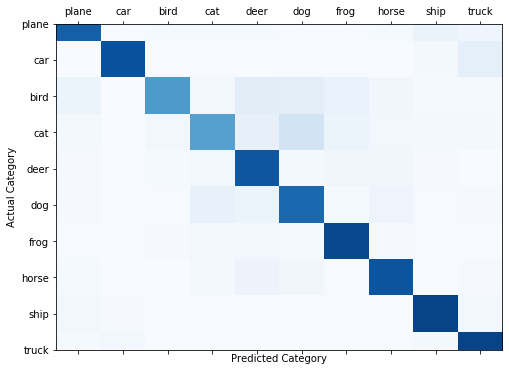

Category   - Accuracy
plane      - 81.6
car        - 87.2
bird       - 58.8
cat        - 55.9
deer       - 85.1
dog        - 77.9
frog       - 90.6
horse      - 85.6
ship       - 92.4
truck      - 92.2

Selected workers

[83 65 41 32 55 78 77 28  2 49 84 52 59 60 80]
Worker 83 : is  Honest
Worker 65 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 78 : is  Honest
Worker 77 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 2 : is  Honest
Worker 49 : is  Honest
Worker 84 : is  Honest
Worker 52 : is  Stealthy_Attacker
Worker 59 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 80 : is  Honest

 | Global Training Round : 40 |


Worker 83 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.689707
Train Epoch: 1 [400/500	(81%)]	Loss: 0.572123
Train Epoch: 2 [0/500	(1%)]	Loss: 0.230646
Train Epoch: 2 [400/500	(81%)]	Loss: 0.514450
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261593
Train Epoch: 3 [400/500	(81%)]	Loss: 0.422622
Train Epoch: 4 [0/500	(1%)]	Loss: 0.344901
Train Epoch: 4 [400/500	(81%)]	Loss: 0.292679
Train Epoch: 5 [0/500	(1%)]	Loss: 0.210762
Train Epoch: 5 [400/500	(81%)]	Loss: 0.369756

Worker 83 ends training in Global Round:40 |

Worker 65 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.413994
Train Epoch: 1 [400/500	(81%)]	Loss: 0.580376
Train Epoch: 2 [0/500	(1%)]	Loss: 0.252104
Train Epoch: 2 [400/500	(81%)]	Loss: 0.513356
Train Epoch: 3 [0/500	(1%)]	Loss: 0.301395
Train Epoch: 3 [400/500	(81%)]	Loss: 0.337276
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149764
Train Epoch: 4 [400/500	(81%)]	Loss: 0.281405
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148450
Train Epoch: 5 [400/500	(81%)]	Loss: 0.202925

Worker 65 ends training in Global Round:40 |

Worker 41 starts training in Global Round:40 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  40


Train Epoch: 1 [0/500	(1%)]	Loss: 1.047409
Train Epoch: 1 [400/500	(81%)]	Loss: 0.943653
Train Epoch: 2 [0/500	(1%)]	Loss: 0.223404
Train Epoch: 2 [400/500	(81%)]	Loss: 0.628075
Train Epoch: 3 [0/500	(1%)]	Loss: 0.314950
Train Epoch: 3 [400/500	(81%)]	Loss: 0.316948
Train Epoch: 4 [0/500	(1%)]	Loss: 0.248251
Train Epoch: 4 [400/500	(81%)]	Loss: 0.393477
Train Epoch: 5 [0/500	(1%)]	Loss: 0.184464
Train Epoch: 5 [400/500	(81%)]	Loss: 0.226297

Performed attacks 1
Worker 41 ends training in Global Round:40 |

Worker 32 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.648237
Train Epoch: 1 [400/500	(81%)]	Loss: 0.733149
Train Epoch: 2 [0/500	(1%)]	Loss: 0.211538
Train Epoch: 2 [400/500	(81%)]	Loss: 0.318576
Train Epoch: 3 [0/500	(1%)]	Loss: 0.358518
Train Epoch: 3 [400/500	(81%)]	Loss: 0.178397
Train Epoch: 4 [0/500	(1%)]	Loss: 0.247184
Train Epoch: 4 [400/500	(81%)]	Loss: 0.275885
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193612
Train Epoch: 5 [400/500	(81%)]	Loss: 0.269781

Worker 32 ends training in Global Round:40 |

Worker 55 starts training in Global Round:40 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  40


Train Epoch: 1 [0/500	(1%)]	Loss: 1.317145
Train Epoch: 1 [400/500	(81%)]	Loss: 0.921139
Train Epoch: 2 [0/500	(1%)]	Loss: 0.286888
Train Epoch: 2 [400/500	(81%)]	Loss: 0.519142
Train Epoch: 3 [0/500	(1%)]	Loss: 0.304689
Train Epoch: 3 [400/500	(81%)]	Loss: 0.406555
Train Epoch: 4 [0/500	(1%)]	Loss: 0.268195
Train Epoch: 4 [400/500	(81%)]	Loss: 0.243835
Train Epoch: 5 [0/500	(1%)]	Loss: 0.262100
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199450

Performed attacks 2
Worker 55 ends training in Global Round:40 |

Worker 78 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.315290
Train Epoch: 1 [400/500	(81%)]	Loss: 0.373296
Train Epoch: 2 [0/500	(1%)]	Loss: 0.254514
Train Epoch: 2 [400/500	(81%)]	Loss: 0.563277
Train Epoch: 3 [0/500	(1%)]	Loss: 0.138031
Train Epoch: 3 [400/500	(81%)]	Loss: 0.348416
Train Epoch: 4 [0/500	(1%)]	Loss: 0.199003
Train Epoch: 4 [400/500	(81%)]	Loss: 0.435819
Train Epoch: 5 [0/500	(1%)]	Loss: 0.265070
Train Epoch: 5 [400/500	(81%)]	Loss: 0.299352

Worker 78 ends training in Global Round:40 |

Worker 77 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.449654
Train Epoch: 1 [400/500	(81%)]	Loss: 0.657215
Train Epoch: 2 [0/500	(1%)]	Loss: 0.416702
Train Epoch: 2 [400/500	(81%)]	Loss: 0.418604
Train Epoch: 3 [0/500	(1%)]	Loss: 0.187315
Train Epoch: 3 [400/500	(81%)]	Loss: 0.239719
Train Epoch: 4 [0/500	(1%)]	Loss: 0.298583
Train Epoch: 4 [400/500	(81%)]	Loss: 0.272321
Train Epoch: 5 [0/500	(1%)]	Loss: 0.229874
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232315

Worker 77 ends training in Global Round:40 |

Worker 28 starts training in Global Round:40 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  40


Train Epoch: 1 [0/500	(1%)]	Loss: 1.098334
Train Epoch: 1 [400/500	(81%)]	Loss: 0.648522
Train Epoch: 2 [0/500	(1%)]	Loss: 0.268629
Train Epoch: 2 [400/500	(81%)]	Loss: 0.428637
Train Epoch: 3 [0/500	(1%)]	Loss: 0.369702
Train Epoch: 3 [400/500	(81%)]	Loss: 0.524605
Train Epoch: 4 [0/500	(1%)]	Loss: 0.221129
Train Epoch: 4 [400/500	(81%)]	Loss: 0.212526
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171460
Train Epoch: 5 [400/500	(81%)]	Loss: 0.157160

Performed attacks 3
Worker 28 ends training in Global Round:40 |

Worker 2 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.369684
Train Epoch: 1 [400/500	(81%)]	Loss: 0.235881
Train Epoch: 2 [0/500	(1%)]	Loss: 0.193911
Train Epoch: 2 [400/500	(81%)]	Loss: 0.177120
Train Epoch: 3 [0/500	(1%)]	Loss: 0.134982
Train Epoch: 3 [400/500	(81%)]	Loss: 0.353666
Train Epoch: 4 [0/500	(1%)]	Loss: 0.132700
Train Epoch: 4 [400/500	(81%)]	Loss: 0.163854
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133949
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117546

Worker 2 ends training in Global Round:40 |

Worker 49 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.245896
Train Epoch: 1 [400/500	(81%)]	Loss: 0.243559
Train Epoch: 2 [0/500	(1%)]	Loss: 0.152504
Train Epoch: 2 [400/500	(81%)]	Loss: 0.248430
Train Epoch: 3 [0/500	(1%)]	Loss: 0.112387
Train Epoch: 3 [400/500	(81%)]	Loss: 0.137048
Train Epoch: 4 [0/500	(1%)]	Loss: 0.112104
Train Epoch: 4 [400/500	(81%)]	Loss: 0.255581
Train Epoch: 5 [0/500	(1%)]	Loss: 0.091946
Train Epoch: 5 [400/500	(81%)]	Loss: 0.376438

Worker 49 ends training in Global Round:40 |

Worker 84 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.414903
Train Epoch: 1 [400/500	(81%)]	Loss: 0.562452
Train Epoch: 2 [0/500	(1%)]	Loss: 0.352326
Train Epoch: 2 [400/500	(81%)]	Loss: 0.495283
Train Epoch: 3 [0/500	(1%)]	Loss: 0.287729
Train Epoch: 3 [400/500	(81%)]	Loss: 0.448769
Train Epoch: 4 [0/500	(1%)]	Loss: 0.208531
Train Epoch: 4 [400/500	(81%)]	Loss: 0.274095
Train Epoch: 5 [0/500	(1%)]	Loss: 0.211172
Train Epoch: 5 [400/500	(81%)]	Loss: 0.370936

Worker 84 ends training in Global Round:40 |

Worker 52 starts training in Global Round:40 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  40


Train Epoch: 1 [0/500	(1%)]	Loss: 1.044911
Train Epoch: 1 [400/500	(81%)]	Loss: 0.633950
Train Epoch: 2 [0/500	(1%)]	Loss: 0.391869
Train Epoch: 2 [400/500	(81%)]	Loss: 0.432148
Train Epoch: 3 [0/500	(1%)]	Loss: 0.434108
Train Epoch: 3 [400/500	(81%)]	Loss: 0.542848
Train Epoch: 4 [0/500	(1%)]	Loss: 0.271362
Train Epoch: 4 [400/500	(81%)]	Loss: 0.332389
Train Epoch: 5 [0/500	(1%)]	Loss: 0.272287
Train Epoch: 5 [400/500	(81%)]	Loss: 0.219076

Performed attacks 4
Worker 52 ends training in Global Round:40 |

Worker 59 starts training in Global Round:40 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  40


Train Epoch: 1 [0/500	(1%)]	Loss: 1.378646
Train Epoch: 1 [400/500	(81%)]	Loss: 0.495395
Train Epoch: 2 [0/500	(1%)]	Loss: 0.372987
Train Epoch: 2 [400/500	(81%)]	Loss: 0.552266
Train Epoch: 3 [0/500	(1%)]	Loss: 0.375065
Train Epoch: 3 [400/500	(81%)]	Loss: 0.380223
Train Epoch: 4 [0/500	(1%)]	Loss: 0.262701
Train Epoch: 4 [400/500	(81%)]	Loss: 0.356583
Train Epoch: 5 [0/500	(1%)]	Loss: 0.147005
Train Epoch: 5 [400/500	(81%)]	Loss: 0.275888

Performed attacks 5
Worker 59 ends training in Global Round:40 |

Worker 60 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.301474
Train Epoch: 1 [400/500	(81%)]	Loss: 0.471790
Train Epoch: 2 [0/500	(1%)]	Loss: 0.298671
Train Epoch: 2 [400/500	(81%)]	Loss: 0.547538
Train Epoch: 3 [0/500	(1%)]	Loss: 0.203736
Train Epoch: 3 [400/500	(81%)]	Loss: 0.312583
Train Epoch: 4 [0/500	(1%)]	Loss: 0.144267
Train Epoch: 4 [400/500	(81%)]	Loss: 0.181890
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170225
Train Epoch: 5 [400/500	(81%)]	Loss: 0.208324

Worker 60 ends training in Global Round:40 |

Worker 80 starts training in Global Round:40 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.396144
Train Epoch: 1 [400/500	(81%)]	Loss: 0.292678
Train Epoch: 2 [0/500	(1%)]	Loss: 0.302231
Train Epoch: 2 [400/500	(81%)]	Loss: 0.516227
Train Epoch: 3 [0/500	(1%)]	Loss: 0.257372
Train Epoch: 3 [400/500	(81%)]	Loss: 0.247711
Train Epoch: 4 [0/500	(1%)]	Loss: 0.166701
Train Epoch: 4 [400/500	(81%)]	Loss: 0.197817
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123144
Train Epoch: 5 [400/500	(81%)]	Loss: 0.230437

Worker 80 ends training in Global Round:40 |
Last layer biases  [array([ 0.03167286, -0.03012062, -0.01555977,  0.03748124,  0.03743559,
       -0.01560411,  0.03745944, -0.00632732, -0.02063651, -0.03989898],
      dtype=float32), array([ 0.03320336, -0.03187586, -0.01622179,  0.03498695,  0.0353884 ,
       -0.01338677,  0.0394398 , -0.00485111, -0.02070206, -0.04007909],
      dtype=float32), array([ 0.03686845, -0.03038429, -0.01231447,  0.04025156,  0.04904745,
       -0.01559576,  0.03932732, -0.03124709, -0.02008954, -0.0399618 ],
      dtyp

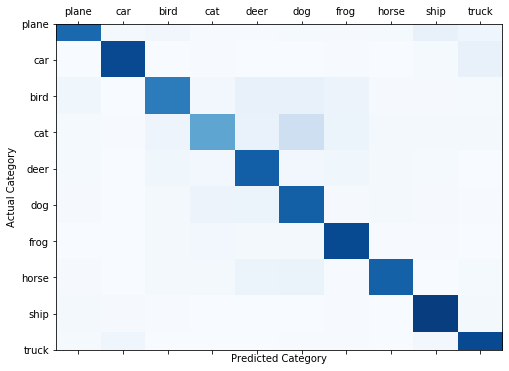

Category   - Accuracy
plane      - 78.5
car        - 89.9
bird       - 70.7
cat        - 53.6
deer       - 82.0
dog        - 81.5
frog       - 89.7
horse      - 81.0
ship       - 94.4
truck      - 90.0

Selected workers

[74 51 84 19 60 25 94  7 92 91 16 79 54 87 59]
Worker 74 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 84 : is  Honest
Worker 19 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 25 : is  Honest
Worker 94 : is  Stealthy_Attacker
Worker 7 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 79 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 59 : is  Stealthy_Attacker

 | Global Training Round : 41 |


Worker 74 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.395619
Train Epoch: 1 [400/500	(81%)]	Loss: 0.446211
Train Epoch: 2 [0/500	(1%)]	Loss: 0.354974
Train Epoch: 2 [400/500	(81%)]	Loss: 0.260959
Train Epoch: 3 [0/500	(1%)]	Loss: 0.307740
Train Epoch: 3 [400/500	(81%)]	Loss: 0.394386
Train Epoch: 4 [0/500	(1%)]	Loss: 0.202282
Train Epoch: 4 [400/500	(81%)]	Loss: 0.181659
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170307
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210871

Worker 74 ends training in Global Round:41 |

Worker 51 starts training in Global Round:41 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  41


Train Epoch: 1 [0/500	(1%)]	Loss: 1.035425
Train Epoch: 1 [400/500	(81%)]	Loss: 0.690350
Train Epoch: 2 [0/500	(1%)]	Loss: 0.378397
Train Epoch: 2 [400/500	(81%)]	Loss: 0.437847
Train Epoch: 3 [0/500	(1%)]	Loss: 0.313064
Train Epoch: 3 [400/500	(81%)]	Loss: 0.296488
Train Epoch: 4 [0/500	(1%)]	Loss: 0.313793
Train Epoch: 4 [400/500	(81%)]	Loss: 0.360476
Train Epoch: 5 [0/500	(1%)]	Loss: 0.380629
Train Epoch: 5 [400/500	(81%)]	Loss: 0.252036

Performed attacks 1
Worker 51 ends training in Global Round:41 |

Worker 84 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.536359
Train Epoch: 1 [400/500	(81%)]	Loss: 0.481534
Train Epoch: 2 [0/500	(1%)]	Loss: 0.215771
Train Epoch: 2 [400/500	(81%)]	Loss: 0.308809
Train Epoch: 3 [0/500	(1%)]	Loss: 0.286603
Train Epoch: 3 [400/500	(81%)]	Loss: 0.226621
Train Epoch: 4 [0/500	(1%)]	Loss: 0.256413
Train Epoch: 4 [400/500	(81%)]	Loss: 0.284269
Train Epoch: 5 [0/500	(1%)]	Loss: 0.310912
Train Epoch: 5 [400/500	(81%)]	Loss: 0.208129

Worker 84 ends training in Global Round:41 |

Worker 19 starts training in Global Round:41 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  41


Train Epoch: 1 [0/500	(1%)]	Loss: 1.121827
Train Epoch: 1 [400/500	(81%)]	Loss: 0.641062
Train Epoch: 2 [0/500	(1%)]	Loss: 0.363340
Train Epoch: 2 [400/500	(81%)]	Loss: 0.354906
Train Epoch: 3 [0/500	(1%)]	Loss: 0.203309
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260033
Train Epoch: 4 [0/500	(1%)]	Loss: 0.173869
Train Epoch: 4 [400/500	(81%)]	Loss: 0.355281
Train Epoch: 5 [0/500	(1%)]	Loss: 0.190415
Train Epoch: 5 [400/500	(81%)]	Loss: 0.213813

Performed attacks 2
Worker 19 ends training in Global Round:41 |

Worker 60 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.278337
Train Epoch: 1 [400/500	(81%)]	Loss: 0.408421
Train Epoch: 2 [0/500	(1%)]	Loss: 0.133698
Train Epoch: 2 [400/500	(81%)]	Loss: 0.226414
Train Epoch: 3 [0/500	(1%)]	Loss: 0.267614
Train Epoch: 3 [400/500	(81%)]	Loss: 0.163095
Train Epoch: 4 [0/500	(1%)]	Loss: 0.204376
Train Epoch: 4 [400/500	(81%)]	Loss: 0.164361
Train Epoch: 5 [0/500	(1%)]	Loss: 0.137064
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171050

Worker 60 ends training in Global Round:41 |

Worker 25 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.380187
Train Epoch: 1 [400/500	(81%)]	Loss: 0.575863
Train Epoch: 2 [0/500	(1%)]	Loss: 0.282242
Train Epoch: 2 [400/500	(81%)]	Loss: 0.369077
Train Epoch: 3 [0/500	(1%)]	Loss: 0.331869
Train Epoch: 3 [400/500	(81%)]	Loss: 0.302765
Train Epoch: 4 [0/500	(1%)]	Loss: 0.224458
Train Epoch: 4 [400/500	(81%)]	Loss: 0.308427
Train Epoch: 5 [0/500	(1%)]	Loss: 0.103199
Train Epoch: 5 [400/500	(81%)]	Loss: 0.362989

Worker 25 ends training in Global Round:41 |

Worker 94 starts training in Global Round:41 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  41


Train Epoch: 1 [0/500	(1%)]	Loss: 1.529302
Train Epoch: 1 [400/500	(81%)]	Loss: 0.631328
Train Epoch: 2 [0/500	(1%)]	Loss: 0.286126
Train Epoch: 2 [400/500	(81%)]	Loss: 0.759254
Train Epoch: 3 [0/500	(1%)]	Loss: 0.307588
Train Epoch: 3 [400/500	(81%)]	Loss: 0.637419
Train Epoch: 4 [0/500	(1%)]	Loss: 0.390417
Train Epoch: 4 [400/500	(81%)]	Loss: 0.290043
Train Epoch: 5 [0/500	(1%)]	Loss: 0.255218
Train Epoch: 5 [400/500	(81%)]	Loss: 0.227084

Performed attacks 3
Worker 94 ends training in Global Round:41 |

Worker 7 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.257431
Train Epoch: 1 [400/500	(81%)]	Loss: 0.508437
Train Epoch: 2 [0/500	(1%)]	Loss: 0.269479
Train Epoch: 2 [400/500	(81%)]	Loss: 0.171021
Train Epoch: 3 [0/500	(1%)]	Loss: 0.309309
Train Epoch: 3 [400/500	(81%)]	Loss: 0.237261
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152073
Train Epoch: 4 [400/500	(81%)]	Loss: 0.304838
Train Epoch: 5 [0/500	(1%)]	Loss: 0.265317
Train Epoch: 5 [400/500	(81%)]	Loss: 0.136775

Worker 7 ends training in Global Round:41 |

Worker 92 starts training in Global Round:41 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  41


Train Epoch: 1 [0/500	(1%)]	Loss: 1.303651
Train Epoch: 1 [400/500	(81%)]	Loss: 0.826261
Train Epoch: 2 [0/500	(1%)]	Loss: 0.354686
Train Epoch: 2 [400/500	(81%)]	Loss: 0.409675
Train Epoch: 3 [0/500	(1%)]	Loss: 0.389258
Train Epoch: 3 [400/500	(81%)]	Loss: 0.546102
Train Epoch: 4 [0/500	(1%)]	Loss: 0.341636
Train Epoch: 4 [400/500	(81%)]	Loss: 0.462860
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182423
Train Epoch: 5 [400/500	(81%)]	Loss: 0.273854

Performed attacks 4
Worker 92 ends training in Global Round:41 |

Worker 91 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.427466
Train Epoch: 1 [400/500	(81%)]	Loss: 0.492084
Train Epoch: 2 [0/500	(1%)]	Loss: 0.282349
Train Epoch: 2 [400/500	(81%)]	Loss: 0.298311
Train Epoch: 3 [0/500	(1%)]	Loss: 0.174223
Train Epoch: 3 [400/500	(81%)]	Loss: 0.257412
Train Epoch: 4 [0/500	(1%)]	Loss: 0.162413
Train Epoch: 4 [400/500	(81%)]	Loss: 0.229676
Train Epoch: 5 [0/500	(1%)]	Loss: 0.168328
Train Epoch: 5 [400/500	(81%)]	Loss: 0.312653

Worker 91 ends training in Global Round:41 |

Worker 16 starts training in Global Round:41 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  41


Train Epoch: 1 [0/500	(1%)]	Loss: 1.196472
Train Epoch: 1 [400/500	(81%)]	Loss: 0.641402
Train Epoch: 2 [0/500	(1%)]	Loss: 0.416363
Train Epoch: 2 [400/500	(81%)]	Loss: 0.571904
Train Epoch: 3 [0/500	(1%)]	Loss: 0.268965
Train Epoch: 3 [400/500	(81%)]	Loss: 0.493532
Train Epoch: 4 [0/500	(1%)]	Loss: 0.268264
Train Epoch: 4 [400/500	(81%)]	Loss: 0.380572
Train Epoch: 5 [0/500	(1%)]	Loss: 0.262595
Train Epoch: 5 [400/500	(81%)]	Loss: 0.207755

Performed attacks 5
Worker 16 ends training in Global Round:41 |

Worker 79 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.807814
Train Epoch: 1 [400/500	(81%)]	Loss: 0.535851
Train Epoch: 2 [0/500	(1%)]	Loss: 0.527199
Train Epoch: 2 [400/500	(81%)]	Loss: 0.376251
Train Epoch: 3 [0/500	(1%)]	Loss: 0.286156
Train Epoch: 3 [400/500	(81%)]	Loss: 0.367666
Train Epoch: 4 [0/500	(1%)]	Loss: 0.240380
Train Epoch: 4 [400/500	(81%)]	Loss: 0.470189
Train Epoch: 5 [0/500	(1%)]	Loss: 0.218928
Train Epoch: 5 [400/500	(81%)]	Loss: 0.412800

Worker 79 ends training in Global Round:41 |

Worker 54 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.396421
Train Epoch: 1 [400/500	(81%)]	Loss: 0.711096
Train Epoch: 2 [0/500	(1%)]	Loss: 0.426571
Train Epoch: 2 [400/500	(81%)]	Loss: 0.490748
Train Epoch: 3 [0/500	(1%)]	Loss: 0.241908
Train Epoch: 3 [400/500	(81%)]	Loss: 0.434584
Train Epoch: 4 [0/500	(1%)]	Loss: 0.307413
Train Epoch: 4 [400/500	(81%)]	Loss: 0.250661
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132636
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191570

Worker 54 ends training in Global Round:41 |

Worker 87 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.495133
Train Epoch: 1 [400/500	(81%)]	Loss: 0.602972
Train Epoch: 2 [0/500	(1%)]	Loss: 0.363645
Train Epoch: 2 [400/500	(81%)]	Loss: 0.515109
Train Epoch: 3 [0/500	(1%)]	Loss: 0.282809
Train Epoch: 3 [400/500	(81%)]	Loss: 0.433468
Train Epoch: 4 [0/500	(1%)]	Loss: 0.216800
Train Epoch: 4 [400/500	(81%)]	Loss: 0.390051
Train Epoch: 5 [0/500	(1%)]	Loss: 0.200872
Train Epoch: 5 [400/500	(81%)]	Loss: 0.290981

Worker 87 ends training in Global Round:41 |

Worker 59 starts training in Global Round:41 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.504336
Train Epoch: 1 [400/500	(81%)]	Loss: 0.558923
Train Epoch: 2 [0/500	(1%)]	Loss: 0.232933
Train Epoch: 2 [400/500	(81%)]	Loss: 0.624108
Train Epoch: 3 [0/500	(1%)]	Loss: 0.325852
Train Epoch: 3 [400/500	(81%)]	Loss: 0.409286
Train Epoch: 4 [0/500	(1%)]	Loss: 0.431877
Train Epoch: 4 [400/500	(81%)]	Loss: 0.376062
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193412
Train Epoch: 5 [400/500	(81%)]	Loss: 0.182200

Worker 59 ends training in Global Round:41 |
Last layer biases  [array([ 0.03243698, -0.02934548, -0.01238721,  0.03563469,  0.03695329,
       -0.01596142,  0.03952121, -0.00770383, -0.02224815, -0.04099824],
      dtype=float32), array([ 0.03528807, -0.02955906, -0.01563455,  0.03608381,  0.04677439,
       -0.01398901,  0.04006591, -0.02551967, -0.01956835, -0.03803971],
      dtype=float32), array([ 0.03073449, -0.03093657, -0.01618772,  0.03699203,  0.03917252,
       -0.01632792,  0.03791238, -0.00579368, -0.02240396, -0.03725972],
      dtyp

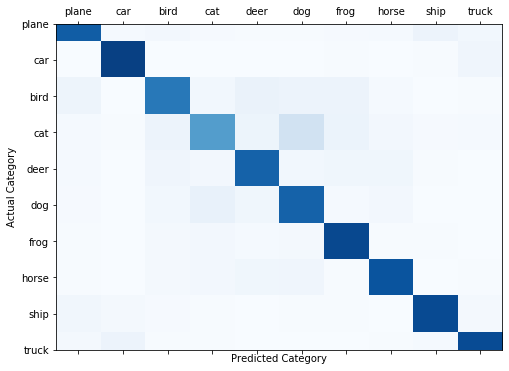

Category   - Accuracy
plane      - 82.8
car        - 93.7
bird       - 72.1
cat        - 57.4
deer       - 80.7
dog        - 80.5
frog       - 90.4
horse      - 86.3
ship       - 89.8
truck      - 89.2

Selected workers

[61 47 93 16 32 54  4 42 26 20 55 50 75 43 18]
Worker 61 : is  Honest
Worker 47 : is  Honest
Worker 93 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 54 : is  Honest
Worker 4 : is  Honest
Worker 42 : is  Honest
Worker 26 : is  Honest
Worker 20 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 50 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 18 : is  Stealthy_Attacker

 | Global Training Round : 42 |


Worker 61 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.442186
Train Epoch: 1 [400/500	(81%)]	Loss: 0.413950
Train Epoch: 2 [0/500	(1%)]	Loss: 0.223216
Train Epoch: 2 [400/500	(81%)]	Loss: 0.514015
Train Epoch: 3 [0/500	(1%)]	Loss: 0.155466
Train Epoch: 3 [400/500	(81%)]	Loss: 0.397179
Train Epoch: 4 [0/500	(1%)]	Loss: 0.175635
Train Epoch: 4 [400/500	(81%)]	Loss: 0.165312
Train Epoch: 5 [0/500	(1%)]	Loss: 0.096286
Train Epoch: 5 [400/500	(81%)]	Loss: 0.368220

Worker 61 ends training in Global Round:42 |

Worker 47 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.352395
Train Epoch: 1 [400/500	(81%)]	Loss: 0.628200
Train Epoch: 2 [0/500	(1%)]	Loss: 0.339013
Train Epoch: 2 [400/500	(81%)]	Loss: 0.405105
Train Epoch: 3 [0/500	(1%)]	Loss: 0.242484
Train Epoch: 3 [400/500	(81%)]	Loss: 0.227378
Train Epoch: 4 [0/500	(1%)]	Loss: 0.173529
Train Epoch: 4 [400/500	(81%)]	Loss: 0.368221
Train Epoch: 5 [0/500	(1%)]	Loss: 0.242962
Train Epoch: 5 [400/500	(81%)]	Loss: 0.215296

Worker 47 ends training in Global Round:42 |

Worker 93 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.380473
Train Epoch: 1 [400/500	(81%)]	Loss: 0.367285
Train Epoch: 2 [0/500	(1%)]	Loss: 0.181895
Train Epoch: 2 [400/500	(81%)]	Loss: 0.124230
Train Epoch: 3 [0/500	(1%)]	Loss: 0.112545
Train Epoch: 3 [400/500	(81%)]	Loss: 0.184537
Train Epoch: 4 [0/500	(1%)]	Loss: 0.161710
Train Epoch: 4 [400/500	(81%)]	Loss: 0.238221
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111859
Train Epoch: 5 [400/500	(81%)]	Loss: 0.048585

Worker 93 ends training in Global Round:42 |

Worker 16 starts training in Global Round:42 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  42


Train Epoch: 1 [0/500	(1%)]	Loss: 1.215005
Train Epoch: 1 [400/500	(81%)]	Loss: 0.612667
Train Epoch: 2 [0/500	(1%)]	Loss: 0.517908
Train Epoch: 2 [400/500	(81%)]	Loss: 0.354756
Train Epoch: 3 [0/500	(1%)]	Loss: 0.230973
Train Epoch: 3 [400/500	(81%)]	Loss: 0.358720
Train Epoch: 4 [0/500	(1%)]	Loss: 0.346095
Train Epoch: 4 [400/500	(81%)]	Loss: 0.627944
Train Epoch: 5 [0/500	(1%)]	Loss: 0.284378
Train Epoch: 5 [400/500	(81%)]	Loss: 0.352712

Performed attacks 1
Worker 16 ends training in Global Round:42 |

Worker 32 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.341317
Train Epoch: 1 [400/500	(81%)]	Loss: 0.574753
Train Epoch: 2 [0/500	(1%)]	Loss: 0.179622
Train Epoch: 2 [400/500	(81%)]	Loss: 0.465956
Train Epoch: 3 [0/500	(1%)]	Loss: 0.244527
Train Epoch: 3 [400/500	(81%)]	Loss: 0.341954
Train Epoch: 4 [0/500	(1%)]	Loss: 0.116450
Train Epoch: 4 [400/500	(81%)]	Loss: 0.462644
Train Epoch: 5 [0/500	(1%)]	Loss: 0.198778
Train Epoch: 5 [400/500	(81%)]	Loss: 0.339584

Worker 32 ends training in Global Round:42 |

Worker 54 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.464973
Train Epoch: 1 [400/500	(81%)]	Loss: 0.454403
Train Epoch: 2 [0/500	(1%)]	Loss: 0.304508
Train Epoch: 2 [400/500	(81%)]	Loss: 0.325217
Train Epoch: 3 [0/500	(1%)]	Loss: 0.185493
Train Epoch: 3 [400/500	(81%)]	Loss: 0.297257
Train Epoch: 4 [0/500	(1%)]	Loss: 0.184150
Train Epoch: 4 [400/500	(81%)]	Loss: 0.189046
Train Epoch: 5 [0/500	(1%)]	Loss: 0.091200
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149170

Worker 54 ends training in Global Round:42 |

Worker 4 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.356132
Train Epoch: 1 [400/500	(81%)]	Loss: 0.367505
Train Epoch: 2 [0/500	(1%)]	Loss: 0.270914
Train Epoch: 2 [400/500	(81%)]	Loss: 0.310853
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142291
Train Epoch: 3 [400/500	(81%)]	Loss: 0.198366
Train Epoch: 4 [0/500	(1%)]	Loss: 0.132722
Train Epoch: 4 [400/500	(81%)]	Loss: 0.241047
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114079
Train Epoch: 5 [400/500	(81%)]	Loss: 0.145579

Worker 4 ends training in Global Round:42 |

Worker 42 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.524140
Train Epoch: 1 [400/500	(81%)]	Loss: 0.656636
Train Epoch: 2 [0/500	(1%)]	Loss: 0.278489
Train Epoch: 2 [400/500	(81%)]	Loss: 0.332350
Train Epoch: 3 [0/500	(1%)]	Loss: 0.242976
Train Epoch: 3 [400/500	(81%)]	Loss: 0.216083
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187710
Train Epoch: 4 [400/500	(81%)]	Loss: 0.201919
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112887
Train Epoch: 5 [400/500	(81%)]	Loss: 0.156702

Worker 42 ends training in Global Round:42 |

Worker 26 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.334991
Train Epoch: 1 [400/500	(81%)]	Loss: 0.391814
Train Epoch: 2 [0/500	(1%)]	Loss: 0.237294
Train Epoch: 2 [400/500	(81%)]	Loss: 0.272460
Train Epoch: 3 [0/500	(1%)]	Loss: 0.152584
Train Epoch: 3 [400/500	(81%)]	Loss: 0.372113
Train Epoch: 4 [0/500	(1%)]	Loss: 0.142045
Train Epoch: 4 [400/500	(81%)]	Loss: 0.208546
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107015
Train Epoch: 5 [400/500	(81%)]	Loss: 0.173665

Worker 26 ends training in Global Round:42 |

Worker 20 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.299962
Train Epoch: 1 [400/500	(81%)]	Loss: 0.427876
Train Epoch: 2 [0/500	(1%)]	Loss: 0.171099
Train Epoch: 2 [400/500	(81%)]	Loss: 0.222555
Train Epoch: 3 [0/500	(1%)]	Loss: 0.093042
Train Epoch: 3 [400/500	(81%)]	Loss: 0.278019
Train Epoch: 4 [0/500	(1%)]	Loss: 0.189317
Train Epoch: 4 [400/500	(81%)]	Loss: 0.231302
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081755
Train Epoch: 5 [400/500	(81%)]	Loss: 0.153648

Worker 20 ends training in Global Round:42 |

Worker 55 starts training in Global Round:42 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  42


Train Epoch: 1 [0/500	(1%)]	Loss: 0.881215
Train Epoch: 1 [400/500	(81%)]	Loss: 0.586070
Train Epoch: 2 [0/500	(1%)]	Loss: 0.482010
Train Epoch: 2 [400/500	(81%)]	Loss: 0.345587
Train Epoch: 3 [0/500	(1%)]	Loss: 0.262713
Train Epoch: 3 [400/500	(81%)]	Loss: 0.590497
Train Epoch: 4 [0/500	(1%)]	Loss: 0.247478
Train Epoch: 4 [400/500	(81%)]	Loss: 0.388049
Train Epoch: 5 [0/500	(1%)]	Loss: 0.166265
Train Epoch: 5 [400/500	(81%)]	Loss: 0.152574

Performed attacks 2
Worker 55 ends training in Global Round:42 |

Worker 50 starts training in Global Round:42 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  42


Train Epoch: 1 [0/500	(1%)]	Loss: 1.012083
Train Epoch: 1 [400/500	(81%)]	Loss: 0.565095
Train Epoch: 2 [0/500	(1%)]	Loss: 0.424282
Train Epoch: 2 [400/500	(81%)]	Loss: 0.508887
Train Epoch: 3 [0/500	(1%)]	Loss: 0.272512
Train Epoch: 3 [400/500	(81%)]	Loss: 0.382548
Train Epoch: 4 [0/500	(1%)]	Loss: 0.394604
Train Epoch: 4 [400/500	(81%)]	Loss: 0.443092
Train Epoch: 5 [0/500	(1%)]	Loss: 0.239218
Train Epoch: 5 [400/500	(81%)]	Loss: 0.365188

Performed attacks 3
Worker 50 ends training in Global Round:42 |

Worker 75 starts training in Global Round:42 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  42


Train Epoch: 1 [0/500	(1%)]	Loss: 1.187572
Train Epoch: 1 [400/500	(81%)]	Loss: 0.712141
Train Epoch: 2 [0/500	(1%)]	Loss: 0.462346
Train Epoch: 2 [400/500	(81%)]	Loss: 0.478140
Train Epoch: 3 [0/500	(1%)]	Loss: 0.298867
Train Epoch: 3 [400/500	(81%)]	Loss: 0.407735
Train Epoch: 4 [0/500	(1%)]	Loss: 0.266320
Train Epoch: 4 [400/500	(81%)]	Loss: 0.290997
Train Epoch: 5 [0/500	(1%)]	Loss: 0.217282
Train Epoch: 5 [400/500	(81%)]	Loss: 0.193815

Performed attacks 4
Worker 75 ends training in Global Round:42 |

Worker 43 starts training in Global Round:42 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.313774
Train Epoch: 1 [400/500	(81%)]	Loss: 0.378146
Train Epoch: 2 [0/500	(1%)]	Loss: 0.109254
Train Epoch: 2 [400/500	(81%)]	Loss: 0.313809
Train Epoch: 3 [0/500	(1%)]	Loss: 0.230957
Train Epoch: 3 [400/500	(81%)]	Loss: 0.156808
Train Epoch: 4 [0/500	(1%)]	Loss: 0.146475
Train Epoch: 4 [400/500	(81%)]	Loss: 0.187732
Train Epoch: 5 [0/500	(1%)]	Loss: 0.090182
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210153

Worker 43 ends training in Global Round:42 |

Worker 18 starts training in Global Round:42 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  42


Train Epoch: 1 [0/500	(1%)]	Loss: 1.312152
Train Epoch: 1 [400/500	(81%)]	Loss: 0.828373
Train Epoch: 2 [0/500	(1%)]	Loss: 0.324666
Train Epoch: 2 [400/500	(81%)]	Loss: 0.561218
Train Epoch: 3 [0/500	(1%)]	Loss: 0.384044
Train Epoch: 3 [400/500	(81%)]	Loss: 0.529501
Train Epoch: 4 [0/500	(1%)]	Loss: 0.221003
Train Epoch: 4 [400/500	(81%)]	Loss: 0.195670
Train Epoch: 5 [0/500	(1%)]	Loss: 0.206405
Train Epoch: 5 [400/500	(81%)]	Loss: 0.326375

Performed attacks 5
Worker 18 ends training in Global Round:42 |
Last layer biases  [array([ 0.03341674, -0.03145019, -0.01398371,  0.03735891,  0.03607052,
       -0.0182245 ,  0.03819678, -0.00598933, -0.02272038, -0.03677301],
      dtype=float32), array([ 0.03347627, -0.03069683, -0.01774303,  0.03555426,  0.03959883,
       -0.01661837,  0.03799811, -0.0080413 , -0.01944243, -0.03818367],
      dtype=float32), array([ 0.03463468, -0.0308482 , -0.01664435,  0.03418522,  0.03798829,
       -0.01518119,  0.03842538, -0.00672629, -0.02138671, -0.0

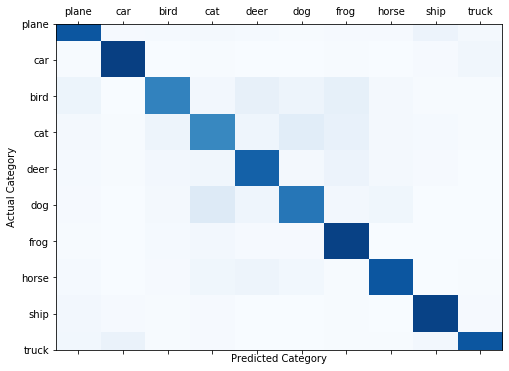

Category   - Accuracy
plane      - 85.5
car        - 94.0
bird       - 68.1
cat        - 66.1
deer       - 81.2
dog        - 72.9
frog       - 93.1
horse      - 85.5
ship       - 92.7
truck      - 85.4

Selected workers

[31  2 21 63 39  4 79 54  3 40 17 48 25 94 36]
Worker 31 : is  Stealthy_Attacker
Worker 2 : is  Honest
Worker 21 : is  Stealthy_Attacker
Worker 63 : is  Honest
Worker 39 : is  Honest
Worker 4 : is  Honest
Worker 79 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 40 : is  Honest
Worker 17 : is  Honest
Worker 48 : is  Honest
Worker 25 : is  Honest
Worker 94 : is  Stealthy_Attacker
Worker 36 : is  Honest

 | Global Training Round : 43 |


Worker 31 starts training in Global Round:43 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  43


Train Epoch: 1 [0/500	(1%)]	Loss: 1.277580
Train Epoch: 1 [400/500	(81%)]	Loss: 0.788992
Train Epoch: 2 [0/500	(1%)]	Loss: 0.400298
Train Epoch: 2 [400/500	(81%)]	Loss: 0.581453
Train Epoch: 3 [0/500	(1%)]	Loss: 0.301510
Train Epoch: 3 [400/500	(81%)]	Loss: 0.447690
Train Epoch: 4 [0/500	(1%)]	Loss: 0.338250
Train Epoch: 4 [400/500	(81%)]	Loss: 0.378105
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171084
Train Epoch: 5 [400/500	(81%)]	Loss: 0.313482

Performed attacks 1
Worker 31 ends training in Global Round:43 |

Worker 2 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.331445
Train Epoch: 1 [400/500	(81%)]	Loss: 0.276040
Train Epoch: 2 [0/500	(1%)]	Loss: 0.115880
Train Epoch: 2 [400/500	(81%)]	Loss: 0.094149
Train Epoch: 3 [0/500	(1%)]	Loss: 0.113046
Train Epoch: 3 [400/500	(81%)]	Loss: 0.215495
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105439
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192112
Train Epoch: 5 [0/500	(1%)]	Loss: 0.057567
Train Epoch: 5 [400/500	(81%)]	Loss: 0.118763

Worker 2 ends training in Global Round:43 |

Worker 21 starts training in Global Round:43 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  43


Train Epoch: 1 [0/500	(1%)]	Loss: 1.503317
Train Epoch: 1 [400/500	(81%)]	Loss: 0.636055
Train Epoch: 2 [0/500	(1%)]	Loss: 0.460936
Train Epoch: 2 [400/500	(81%)]	Loss: 0.525819
Train Epoch: 3 [0/500	(1%)]	Loss: 0.372648
Train Epoch: 3 [400/500	(81%)]	Loss: 0.342444
Train Epoch: 4 [0/500	(1%)]	Loss: 0.346314
Train Epoch: 4 [400/500	(81%)]	Loss: 0.168672
Train Epoch: 5 [0/500	(1%)]	Loss: 0.292617
Train Epoch: 5 [400/500	(81%)]	Loss: 0.212382

Performed attacks 2
Worker 21 ends training in Global Round:43 |

Worker 63 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.200668
Train Epoch: 1 [400/500	(81%)]	Loss: 0.451187
Train Epoch: 2 [0/500	(1%)]	Loss: 0.321988
Train Epoch: 2 [400/500	(81%)]	Loss: 0.371031
Train Epoch: 3 [0/500	(1%)]	Loss: 0.319577
Train Epoch: 3 [400/500	(81%)]	Loss: 0.251096
Train Epoch: 4 [0/500	(1%)]	Loss: 0.360718
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192387
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203689
Train Epoch: 5 [400/500	(81%)]	Loss: 0.184611

Worker 63 ends training in Global Round:43 |

Worker 39 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.479610
Train Epoch: 1 [400/500	(81%)]	Loss: 0.273941
Train Epoch: 2 [0/500	(1%)]	Loss: 0.215109
Train Epoch: 2 [400/500	(81%)]	Loss: 0.356827
Train Epoch: 3 [0/500	(1%)]	Loss: 0.087687
Train Epoch: 3 [400/500	(81%)]	Loss: 0.255935
Train Epoch: 4 [0/500	(1%)]	Loss: 0.147675
Train Epoch: 4 [400/500	(81%)]	Loss: 0.175716
Train Epoch: 5 [0/500	(1%)]	Loss: 0.049566
Train Epoch: 5 [400/500	(81%)]	Loss: 0.206603

Worker 39 ends training in Global Round:43 |

Worker 4 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.306140
Train Epoch: 1 [400/500	(81%)]	Loss: 0.226177
Train Epoch: 2 [0/500	(1%)]	Loss: 0.120480
Train Epoch: 2 [400/500	(81%)]	Loss: 0.291641
Train Epoch: 3 [0/500	(1%)]	Loss: 0.104701
Train Epoch: 3 [400/500	(81%)]	Loss: 0.196247
Train Epoch: 4 [0/500	(1%)]	Loss: 0.113085
Train Epoch: 4 [400/500	(81%)]	Loss: 0.206820
Train Epoch: 5 [0/500	(1%)]	Loss: 0.236457
Train Epoch: 5 [400/500	(81%)]	Loss: 0.194732

Worker 4 ends training in Global Round:43 |

Worker 79 starts training in Global Round:43 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  43


Train Epoch: 1 [0/500	(1%)]	Loss: 0.924770
Train Epoch: 1 [400/500	(81%)]	Loss: 0.852405
Train Epoch: 2 [0/500	(1%)]	Loss: 0.455454
Train Epoch: 2 [400/500	(81%)]	Loss: 0.360615
Train Epoch: 3 [0/500	(1%)]	Loss: 0.388474
Train Epoch: 3 [400/500	(81%)]	Loss: 0.348246
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143241
Train Epoch: 4 [400/500	(81%)]	Loss: 0.237094
Train Epoch: 5 [0/500	(1%)]	Loss: 0.199279
Train Epoch: 5 [400/500	(81%)]	Loss: 0.144841

Performed attacks 3
Worker 79 ends training in Global Round:43 |

Worker 54 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.259161
Train Epoch: 1 [400/500	(81%)]	Loss: 0.335452
Train Epoch: 2 [0/500	(1%)]	Loss: 0.229917
Train Epoch: 2 [400/500	(81%)]	Loss: 0.218078
Train Epoch: 3 [0/500	(1%)]	Loss: 0.158022
Train Epoch: 3 [400/500	(81%)]	Loss: 0.156880
Train Epoch: 4 [0/500	(1%)]	Loss: 0.116344
Train Epoch: 4 [400/500	(81%)]	Loss: 0.130382
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160279
Train Epoch: 5 [400/500	(81%)]	Loss: 0.163998

Worker 54 ends training in Global Round:43 |

Worker 3 starts training in Global Round:43 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  43


Train Epoch: 1 [0/500	(1%)]	Loss: 1.596176
Train Epoch: 1 [400/500	(81%)]	Loss: 0.639722
Train Epoch: 2 [0/500	(1%)]	Loss: 0.383647
Train Epoch: 2 [400/500	(81%)]	Loss: 0.552724
Train Epoch: 3 [0/500	(1%)]	Loss: 0.295858
Train Epoch: 3 [400/500	(81%)]	Loss: 0.382843
Train Epoch: 4 [0/500	(1%)]	Loss: 0.333454
Train Epoch: 4 [400/500	(81%)]	Loss: 0.462290
Train Epoch: 5 [0/500	(1%)]	Loss: 0.204840
Train Epoch: 5 [400/500	(81%)]	Loss: 0.377622

Performed attacks 4
Worker 3 ends training in Global Round:43 |

Worker 40 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.428664
Train Epoch: 1 [400/500	(81%)]	Loss: 0.506732
Train Epoch: 2 [0/500	(1%)]	Loss: 0.215822
Train Epoch: 2 [400/500	(81%)]	Loss: 0.363012
Train Epoch: 3 [0/500	(1%)]	Loss: 0.235891
Train Epoch: 3 [400/500	(81%)]	Loss: 0.320607
Train Epoch: 4 [0/500	(1%)]	Loss: 0.255037
Train Epoch: 4 [400/500	(81%)]	Loss: 0.256081
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155167
Train Epoch: 5 [400/500	(81%)]	Loss: 0.289121

Worker 40 ends training in Global Round:43 |

Worker 17 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.686138
Train Epoch: 1 [400/500	(81%)]	Loss: 0.623660
Train Epoch: 2 [0/500	(1%)]	Loss: 0.221220
Train Epoch: 2 [400/500	(81%)]	Loss: 0.504702
Train Epoch: 3 [0/500	(1%)]	Loss: 0.245617
Train Epoch: 3 [400/500	(81%)]	Loss: 0.379389
Train Epoch: 4 [0/500	(1%)]	Loss: 0.147899
Train Epoch: 4 [400/500	(81%)]	Loss: 0.268852
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155126
Train Epoch: 5 [400/500	(81%)]	Loss: 0.266493

Worker 17 ends training in Global Round:43 |

Worker 48 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.341964
Train Epoch: 1 [400/500	(81%)]	Loss: 0.527962
Train Epoch: 2 [0/500	(1%)]	Loss: 0.229482
Train Epoch: 2 [400/500	(81%)]	Loss: 0.290166
Train Epoch: 3 [0/500	(1%)]	Loss: 0.201367
Train Epoch: 3 [400/500	(81%)]	Loss: 0.186883
Train Epoch: 4 [0/500	(1%)]	Loss: 0.199516
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192976
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171668
Train Epoch: 5 [400/500	(81%)]	Loss: 0.234475

Worker 48 ends training in Global Round:43 |

Worker 25 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.154803
Train Epoch: 1 [400/500	(81%)]	Loss: 0.456794
Train Epoch: 2 [0/500	(1%)]	Loss: 0.239795
Train Epoch: 2 [400/500	(81%)]	Loss: 0.269619
Train Epoch: 3 [0/500	(1%)]	Loss: 0.134675
Train Epoch: 3 [400/500	(81%)]	Loss: 0.311856
Train Epoch: 4 [0/500	(1%)]	Loss: 0.111696
Train Epoch: 4 [400/500	(81%)]	Loss: 0.279045
Train Epoch: 5 [0/500	(1%)]	Loss: 0.121441
Train Epoch: 5 [400/500	(81%)]	Loss: 0.292813

Worker 25 ends training in Global Round:43 |

Worker 94 starts training in Global Round:43 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  43


Train Epoch: 1 [0/500	(1%)]	Loss: 1.564728
Train Epoch: 1 [400/500	(81%)]	Loss: 0.759935
Train Epoch: 2 [0/500	(1%)]	Loss: 0.269880
Train Epoch: 2 [400/500	(81%)]	Loss: 0.468011
Train Epoch: 3 [0/500	(1%)]	Loss: 0.337776
Train Epoch: 3 [400/500	(81%)]	Loss: 0.375968
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200112
Train Epoch: 4 [400/500	(81%)]	Loss: 0.261362
Train Epoch: 5 [0/500	(1%)]	Loss: 0.156938
Train Epoch: 5 [400/500	(81%)]	Loss: 0.190815

Performed attacks 5
Worker 94 ends training in Global Round:43 |

Worker 36 starts training in Global Round:43 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.137776
Train Epoch: 1 [400/500	(81%)]	Loss: 0.620894
Train Epoch: 2 [0/500	(1%)]	Loss: 0.422376
Train Epoch: 2 [400/500	(81%)]	Loss: 0.301120
Train Epoch: 3 [0/500	(1%)]	Loss: 0.202777
Train Epoch: 3 [400/500	(81%)]	Loss: 0.512816
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170003
Train Epoch: 4 [400/500	(81%)]	Loss: 0.347517
Train Epoch: 5 [0/500	(1%)]	Loss: 0.141074
Train Epoch: 5 [400/500	(81%)]	Loss: 0.167073

Worker 36 ends training in Global Round:43 |
Last layer biases  [array([ 0.03398734, -0.02938043, -0.01358506,  0.04080189,  0.04579183,
       -0.01259934,  0.03832379, -0.0283238 , -0.02134338, -0.03777101],
      dtype=float32), array([ 0.0349833 , -0.03127092, -0.01549906,  0.0348847 ,  0.03717147,
       -0.01739286,  0.04149031, -0.00785583, -0.0215366 , -0.03907268],
      dtype=float32), array([ 0.03632098, -0.03212499, -0.01324839,  0.03897844,  0.04871464,
       -0.01695797,  0.03909003, -0.02997994, -0.01643936, -0.03845162],
      dtyp

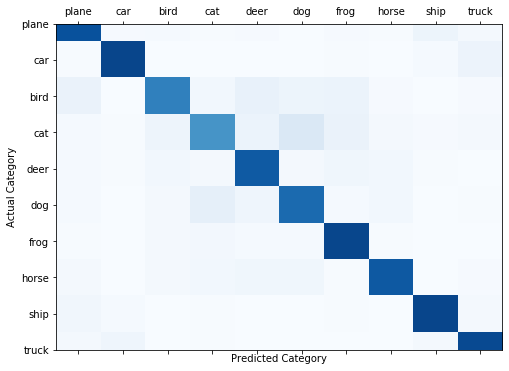

Category   - Accuracy
plane      - 87.4
car        - 91.5
bird       - 69.0
cat        - 61.3
deer       - 83.9
dog        - 77.7
frog       - 91.1
horse      - 84.3
ship       - 91.5
truck      - 89.9

Selected workers

[21 19  4 78 17  2 16 85 54 68 63 67  3 95 42]
Worker 21 : is  Stealthy_Attacker
Worker 19 : is  Stealthy_Attacker
Worker 4 : is  Honest
Worker 78 : is  Honest
Worker 17 : is  Honest
Worker 2 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 85 : is  Honest
Worker 54 : is  Honest
Worker 68 : is  Honest
Worker 63 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 3 : is  Stealthy_Attacker
Worker 95 : is  Honest
Worker 42 : is  Honest

 | Global Training Round : 44 |


Worker 21 starts training in Global Round:44 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  44


Train Epoch: 1 [0/500	(1%)]	Loss: 1.431006
Train Epoch: 1 [400/500	(81%)]	Loss: 0.587225
Train Epoch: 2 [0/500	(1%)]	Loss: 0.286700
Train Epoch: 2 [400/500	(81%)]	Loss: 0.587935
Train Epoch: 3 [0/500	(1%)]	Loss: 0.346768
Train Epoch: 3 [400/500	(81%)]	Loss: 0.420934
Train Epoch: 4 [0/500	(1%)]	Loss: 0.269321
Train Epoch: 4 [400/500	(81%)]	Loss: 0.272643
Train Epoch: 5 [0/500	(1%)]	Loss: 0.150455
Train Epoch: 5 [400/500	(81%)]	Loss: 0.271003

Performed attacks 1
Worker 21 ends training in Global Round:44 |

Worker 19 starts training in Global Round:44 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  44


Train Epoch: 1 [0/500	(1%)]	Loss: 1.223624
Train Epoch: 1 [400/500	(81%)]	Loss: 0.685681
Train Epoch: 2 [0/500	(1%)]	Loss: 0.370215
Train Epoch: 2 [400/500	(81%)]	Loss: 0.352801
Train Epoch: 3 [0/500	(1%)]	Loss: 0.298230
Train Epoch: 3 [400/500	(81%)]	Loss: 0.488735
Train Epoch: 4 [0/500	(1%)]	Loss: 0.165425
Train Epoch: 4 [400/500	(81%)]	Loss: 0.307706
Train Epoch: 5 [0/500	(1%)]	Loss: 0.136539
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232873

Performed attacks 2
Worker 19 ends training in Global Round:44 |

Worker 4 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.230561
Train Epoch: 1 [400/500	(81%)]	Loss: 0.188111
Train Epoch: 2 [0/500	(1%)]	Loss: 0.092028
Train Epoch: 2 [400/500	(81%)]	Loss: 0.117040
Train Epoch: 3 [0/500	(1%)]	Loss: 0.111789
Train Epoch: 3 [400/500	(81%)]	Loss: 0.192032
Train Epoch: 4 [0/500	(1%)]	Loss: 0.047807
Train Epoch: 4 [400/500	(81%)]	Loss: 0.177857
Train Epoch: 5 [0/500	(1%)]	Loss: 0.051030
Train Epoch: 5 [400/500	(81%)]	Loss: 0.148500

Worker 4 ends training in Global Round:44 |

Worker 78 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.601717
Train Epoch: 1 [400/500	(81%)]	Loss: 0.307728
Train Epoch: 2 [0/500	(1%)]	Loss: 0.183226
Train Epoch: 2 [400/500	(81%)]	Loss: 0.398029
Train Epoch: 3 [0/500	(1%)]	Loss: 0.090032
Train Epoch: 3 [400/500	(81%)]	Loss: 0.321214
Train Epoch: 4 [0/500	(1%)]	Loss: 0.183823
Train Epoch: 4 [400/500	(81%)]	Loss: 0.145697
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064646
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253304

Worker 78 ends training in Global Round:44 |

Worker 17 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.502542
Train Epoch: 1 [400/500	(81%)]	Loss: 0.543315
Train Epoch: 2 [0/500	(1%)]	Loss: 0.136406
Train Epoch: 2 [400/500	(81%)]	Loss: 0.357525
Train Epoch: 3 [0/500	(1%)]	Loss: 0.224573
Train Epoch: 3 [400/500	(81%)]	Loss: 0.299785
Train Epoch: 4 [0/500	(1%)]	Loss: 0.099215
Train Epoch: 4 [400/500	(81%)]	Loss: 0.179694
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118813
Train Epoch: 5 [400/500	(81%)]	Loss: 0.355421

Worker 17 ends training in Global Round:44 |

Worker 2 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.116270
Train Epoch: 1 [400/500	(81%)]	Loss: 0.256382
Train Epoch: 2 [0/500	(1%)]	Loss: 0.168360
Train Epoch: 2 [400/500	(81%)]	Loss: 0.211572
Train Epoch: 3 [0/500	(1%)]	Loss: 0.132774
Train Epoch: 3 [400/500	(81%)]	Loss: 0.211834
Train Epoch: 4 [0/500	(1%)]	Loss: 0.081741
Train Epoch: 4 [400/500	(81%)]	Loss: 0.222847
Train Epoch: 5 [0/500	(1%)]	Loss: 0.092155
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210483

Worker 2 ends training in Global Round:44 |

Worker 16 starts training in Global Round:44 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  44


Train Epoch: 1 [0/500	(1%)]	Loss: 1.252705
Train Epoch: 1 [400/500	(81%)]	Loss: 0.751833
Train Epoch: 2 [0/500	(1%)]	Loss: 0.333540
Train Epoch: 2 [400/500	(81%)]	Loss: 0.557959
Train Epoch: 3 [0/500	(1%)]	Loss: 0.322304
Train Epoch: 3 [400/500	(81%)]	Loss: 0.253624
Train Epoch: 4 [0/500	(1%)]	Loss: 0.428959
Train Epoch: 4 [400/500	(81%)]	Loss: 0.395742
Train Epoch: 5 [0/500	(1%)]	Loss: 0.140650
Train Epoch: 5 [400/500	(81%)]	Loss: 0.381260

Performed attacks 3
Worker 16 ends training in Global Round:44 |

Worker 85 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.691602
Train Epoch: 1 [400/500	(81%)]	Loss: 0.648541
Train Epoch: 2 [0/500	(1%)]	Loss: 0.374341
Train Epoch: 2 [400/500	(81%)]	Loss: 0.381485
Train Epoch: 3 [0/500	(1%)]	Loss: 0.387021
Train Epoch: 3 [400/500	(81%)]	Loss: 0.164993
Train Epoch: 4 [0/500	(1%)]	Loss: 0.146059
Train Epoch: 4 [400/500	(81%)]	Loss: 0.191092
Train Epoch: 5 [0/500	(1%)]	Loss: 0.113491
Train Epoch: 5 [400/500	(81%)]	Loss: 0.222947

Worker 85 ends training in Global Round:44 |

Worker 54 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.148812
Train Epoch: 1 [400/500	(81%)]	Loss: 0.263499
Train Epoch: 2 [0/500	(1%)]	Loss: 0.158333
Train Epoch: 2 [400/500	(81%)]	Loss: 0.199811
Train Epoch: 3 [0/500	(1%)]	Loss: 0.090086
Train Epoch: 3 [400/500	(81%)]	Loss: 0.310776
Train Epoch: 4 [0/500	(1%)]	Loss: 0.178440
Train Epoch: 4 [400/500	(81%)]	Loss: 0.110586
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171497
Train Epoch: 5 [400/500	(81%)]	Loss: 0.188758

Worker 54 ends training in Global Round:44 |

Worker 68 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.481624
Train Epoch: 1 [400/500	(81%)]	Loss: 0.545467
Train Epoch: 2 [0/500	(1%)]	Loss: 0.207344
Train Epoch: 2 [400/500	(81%)]	Loss: 0.211391
Train Epoch: 3 [0/500	(1%)]	Loss: 0.170723
Train Epoch: 3 [400/500	(81%)]	Loss: 0.274385
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187721
Train Epoch: 4 [400/500	(81%)]	Loss: 0.453580
Train Epoch: 5 [0/500	(1%)]	Loss: 0.222297
Train Epoch: 5 [400/500	(81%)]	Loss: 0.341424

Worker 68 ends training in Global Round:44 |

Worker 63 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.328466
Train Epoch: 1 [400/500	(81%)]	Loss: 0.316295
Train Epoch: 2 [0/500	(1%)]	Loss: 0.176043
Train Epoch: 2 [400/500	(81%)]	Loss: 0.296555
Train Epoch: 3 [0/500	(1%)]	Loss: 0.161976
Train Epoch: 3 [400/500	(81%)]	Loss: 0.275984
Train Epoch: 4 [0/500	(1%)]	Loss: 0.168754
Train Epoch: 4 [400/500	(81%)]	Loss: 0.194361
Train Epoch: 5 [0/500	(1%)]	Loss: 0.078992
Train Epoch: 5 [400/500	(81%)]	Loss: 0.245611

Worker 63 ends training in Global Round:44 |

Worker 67 starts training in Global Round:44 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  44


Train Epoch: 1 [0/500	(1%)]	Loss: 1.366403
Train Epoch: 1 [400/500	(81%)]	Loss: 0.710557
Train Epoch: 2 [0/500	(1%)]	Loss: 0.496630
Train Epoch: 2 [400/500	(81%)]	Loss: 0.607019
Train Epoch: 3 [0/500	(1%)]	Loss: 0.405117
Train Epoch: 3 [400/500	(81%)]	Loss: 0.535138
Train Epoch: 4 [0/500	(1%)]	Loss: 0.289890
Train Epoch: 4 [400/500	(81%)]	Loss: 0.452930
Train Epoch: 5 [0/500	(1%)]	Loss: 0.242333
Train Epoch: 5 [400/500	(81%)]	Loss: 0.359164

Performed attacks 4
Worker 67 ends training in Global Round:44 |

Worker 3 starts training in Global Round:44 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  44


Train Epoch: 1 [0/500	(1%)]	Loss: 1.327662
Train Epoch: 1 [400/500	(81%)]	Loss: 0.632008
Train Epoch: 2 [0/500	(1%)]	Loss: 0.459850
Train Epoch: 2 [400/500	(81%)]	Loss: 0.676794
Train Epoch: 3 [0/500	(1%)]	Loss: 0.336760
Train Epoch: 3 [400/500	(81%)]	Loss: 0.462563
Train Epoch: 4 [0/500	(1%)]	Loss: 0.275959
Train Epoch: 4 [400/500	(81%)]	Loss: 0.398760
Train Epoch: 5 [0/500	(1%)]	Loss: 0.234359
Train Epoch: 5 [400/500	(81%)]	Loss: 0.377475

Performed attacks 5
Worker 3 ends training in Global Round:44 |

Worker 95 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.355397
Train Epoch: 1 [400/500	(81%)]	Loss: 0.581446
Train Epoch: 2 [0/500	(1%)]	Loss: 0.301314
Train Epoch: 2 [400/500	(81%)]	Loss: 0.428512
Train Epoch: 3 [0/500	(1%)]	Loss: 0.294584
Train Epoch: 3 [400/500	(81%)]	Loss: 0.168137
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121065
Train Epoch: 4 [400/500	(81%)]	Loss: 0.321485
Train Epoch: 5 [0/500	(1%)]	Loss: 0.226943
Train Epoch: 5 [400/500	(81%)]	Loss: 0.350088

Worker 95 ends training in Global Round:44 |

Worker 42 starts training in Global Round:44 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.366834
Train Epoch: 1 [400/500	(81%)]	Loss: 0.496991
Train Epoch: 2 [0/500	(1%)]	Loss: 0.182200
Train Epoch: 2 [400/500	(81%)]	Loss: 0.468836
Train Epoch: 3 [0/500	(1%)]	Loss: 0.295051
Train Epoch: 3 [400/500	(81%)]	Loss: 0.402478
Train Epoch: 4 [0/500	(1%)]	Loss: 0.197195
Train Epoch: 4 [400/500	(81%)]	Loss: 0.266714
Train Epoch: 5 [0/500	(1%)]	Loss: 0.168498
Train Epoch: 5 [400/500	(81%)]	Loss: 0.238234

Worker 42 ends training in Global Round:44 |
Last layer biases  [array([ 0.03743807, -0.03109732, -0.0131083 ,  0.03750425,  0.04554385,
       -0.01549881,  0.03883423, -0.02677265, -0.01755675, -0.03938475],
      dtype=float32), array([ 0.03580314, -0.03148542, -0.01363664,  0.0412038 ,  0.04769686,
       -0.01703097,  0.03941768, -0.02584546, -0.02040369, -0.03981748],
      dtype=float32), array([ 0.03280868, -0.03047332, -0.01431736,  0.03481534,  0.03678948,
       -0.01817053,  0.0399537 , -0.00675031, -0.02028402, -0.03846981],
      dtyp

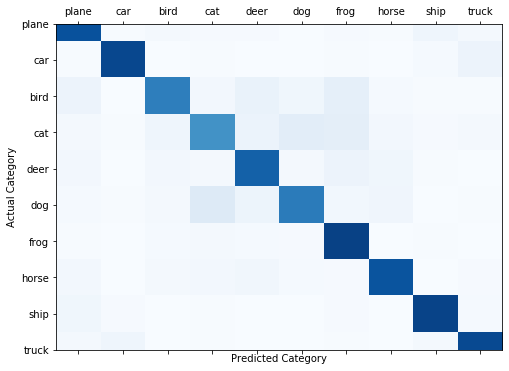

Category   - Accuracy
plane      - 87.4
car        - 90.9
bird       - 69.6
cat        - 62.3
deer       - 80.9
dog        - 70.8
frog       - 93.1
horse      - 86.3
ship       - 92.2
truck      - 90.0

Selected workers

[13 54 69 39 62 70 87 21 67 46 44 10 27 83 24]
Worker 13 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 69 : is  Honest
Worker 39 : is  Honest
Worker 62 : is  Honest
Worker 70 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 21 : is  Stealthy_Attacker
Worker 67 : is  Stealthy_Attacker
Worker 46 : is  Stealthy_Attacker
Worker 44 : is  Stealthy_Attacker
Worker 10 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 83 : is  Honest
Worker 24 : is  Honest

 | Global Training Round : 45 |


Worker 13 starts training in Global Round:45 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  45


Train Epoch: 1 [0/500	(1%)]	Loss: 1.327682
Train Epoch: 1 [400/500	(81%)]	Loss: 0.733407
Train Epoch: 2 [0/500	(1%)]	Loss: 0.375127
Train Epoch: 2 [400/500	(81%)]	Loss: 0.532594
Train Epoch: 3 [0/500	(1%)]	Loss: 0.309517
Train Epoch: 3 [400/500	(81%)]	Loss: 0.392315
Train Epoch: 4 [0/500	(1%)]	Loss: 0.322403
Train Epoch: 4 [400/500	(81%)]	Loss: 0.291551
Train Epoch: 5 [0/500	(1%)]	Loss: 0.217843
Train Epoch: 5 [400/500	(81%)]	Loss: 0.332099

Performed attacks 1
Worker 13 ends training in Global Round:45 |

Worker 54 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.140086
Train Epoch: 1 [400/500	(81%)]	Loss: 0.322814
Train Epoch: 2 [0/500	(1%)]	Loss: 0.135378
Train Epoch: 2 [400/500	(81%)]	Loss: 0.253493
Train Epoch: 3 [0/500	(1%)]	Loss: 0.078888
Train Epoch: 3 [400/500	(81%)]	Loss: 0.280539
Train Epoch: 4 [0/500	(1%)]	Loss: 0.171412
Train Epoch: 4 [400/500	(81%)]	Loss: 0.268929
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111279
Train Epoch: 5 [400/500	(81%)]	Loss: 0.225752

Worker 54 ends training in Global Round:45 |

Worker 69 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.635944
Train Epoch: 1 [400/500	(81%)]	Loss: 0.618824
Train Epoch: 2 [0/500	(1%)]	Loss: 0.347616
Train Epoch: 2 [400/500	(81%)]	Loss: 0.390870
Train Epoch: 3 [0/500	(1%)]	Loss: 0.336022
Train Epoch: 3 [400/500	(81%)]	Loss: 0.285764
Train Epoch: 4 [0/500	(1%)]	Loss: 0.256999
Train Epoch: 4 [400/500	(81%)]	Loss: 0.224273
Train Epoch: 5 [0/500	(1%)]	Loss: 0.205446
Train Epoch: 5 [400/500	(81%)]	Loss: 0.148976

Worker 69 ends training in Global Round:45 |

Worker 39 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.278991
Train Epoch: 1 [400/500	(81%)]	Loss: 0.283202
Train Epoch: 2 [0/500	(1%)]	Loss: 0.106293
Train Epoch: 2 [400/500	(81%)]	Loss: 0.289412
Train Epoch: 3 [0/500	(1%)]	Loss: 0.130516
Train Epoch: 3 [400/500	(81%)]	Loss: 0.169789
Train Epoch: 4 [0/500	(1%)]	Loss: 0.099324
Train Epoch: 4 [400/500	(81%)]	Loss: 0.256371
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082185
Train Epoch: 5 [400/500	(81%)]	Loss: 0.192681

Worker 39 ends training in Global Round:45 |

Worker 62 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.502491
Train Epoch: 1 [400/500	(81%)]	Loss: 0.763049
Train Epoch: 2 [0/500	(1%)]	Loss: 0.490857
Train Epoch: 2 [400/500	(81%)]	Loss: 0.403889
Train Epoch: 3 [0/500	(1%)]	Loss: 0.204579
Train Epoch: 3 [400/500	(81%)]	Loss: 0.445102
Train Epoch: 4 [0/500	(1%)]	Loss: 0.318499
Train Epoch: 4 [400/500	(81%)]	Loss: 0.232418
Train Epoch: 5 [0/500	(1%)]	Loss: 0.238485
Train Epoch: 5 [400/500	(81%)]	Loss: 0.331279

Worker 62 ends training in Global Round:45 |

Worker 70 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.544894
Train Epoch: 1 [400/500	(81%)]	Loss: 0.631532
Train Epoch: 2 [0/500	(1%)]	Loss: 0.253778
Train Epoch: 2 [400/500	(81%)]	Loss: 0.416236
Train Epoch: 3 [0/500	(1%)]	Loss: 0.295195
Train Epoch: 3 [400/500	(81%)]	Loss: 0.397199
Train Epoch: 4 [0/500	(1%)]	Loss: 0.249417
Train Epoch: 4 [400/500	(81%)]	Loss: 0.191867
Train Epoch: 5 [0/500	(1%)]	Loss: 0.140485
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253524

Worker 70 ends training in Global Round:45 |

Worker 87 starts training in Global Round:45 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  45


Train Epoch: 1 [0/500	(1%)]	Loss: 1.550585
Train Epoch: 1 [400/500	(81%)]	Loss: 0.683825
Train Epoch: 2 [0/500	(1%)]	Loss: 0.390253
Train Epoch: 2 [400/500	(81%)]	Loss: 0.343141
Train Epoch: 3 [0/500	(1%)]	Loss: 0.311791
Train Epoch: 3 [400/500	(81%)]	Loss: 0.328242
Train Epoch: 4 [0/500	(1%)]	Loss: 0.213211
Train Epoch: 4 [400/500	(81%)]	Loss: 0.257302
Train Epoch: 5 [0/500	(1%)]	Loss: 0.321110
Train Epoch: 5 [400/500	(81%)]	Loss: 0.273808

Performed attacks 2
Worker 87 ends training in Global Round:45 |

Worker 21 starts training in Global Round:45 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  45


Train Epoch: 1 [0/500	(1%)]	Loss: 1.199966
Train Epoch: 1 [400/500	(81%)]	Loss: 0.670756
Train Epoch: 2 [0/500	(1%)]	Loss: 0.285944
Train Epoch: 2 [400/500	(81%)]	Loss: 0.743291
Train Epoch: 3 [0/500	(1%)]	Loss: 0.356100
Train Epoch: 3 [400/500	(81%)]	Loss: 0.414903
Train Epoch: 4 [0/500	(1%)]	Loss: 0.385539
Train Epoch: 4 [400/500	(81%)]	Loss: 0.423384
Train Epoch: 5 [0/500	(1%)]	Loss: 0.180575
Train Epoch: 5 [400/500	(81%)]	Loss: 0.352755

Performed attacks 3
Worker 21 ends training in Global Round:45 |

Worker 67 starts training in Global Round:45 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  45


Train Epoch: 1 [0/500	(1%)]	Loss: 1.333908
Train Epoch: 1 [400/500	(81%)]	Loss: 0.703063
Train Epoch: 2 [0/500	(1%)]	Loss: 0.656006
Train Epoch: 2 [400/500	(81%)]	Loss: 0.454845
Train Epoch: 3 [0/500	(1%)]	Loss: 0.256751
Train Epoch: 3 [400/500	(81%)]	Loss: 0.579883
Train Epoch: 4 [0/500	(1%)]	Loss: 0.299635
Train Epoch: 4 [400/500	(81%)]	Loss: 0.314654
Train Epoch: 5 [0/500	(1%)]	Loss: 0.219497
Train Epoch: 5 [400/500	(81%)]	Loss: 0.167758

Performed attacks 4
Worker 67 ends training in Global Round:45 |

Worker 46 starts training in Global Round:45 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  45


Train Epoch: 1 [0/500	(1%)]	Loss: 1.367186
Train Epoch: 1 [400/500	(81%)]	Loss: 0.772874
Train Epoch: 2 [0/500	(1%)]	Loss: 0.304740
Train Epoch: 2 [400/500	(81%)]	Loss: 0.579322
Train Epoch: 3 [0/500	(1%)]	Loss: 0.354204
Train Epoch: 3 [400/500	(81%)]	Loss: 0.392065
Train Epoch: 4 [0/500	(1%)]	Loss: 0.197124
Train Epoch: 4 [400/500	(81%)]	Loss: 0.293349
Train Epoch: 5 [0/500	(1%)]	Loss: 0.215602
Train Epoch: 5 [400/500	(81%)]	Loss: 0.357578

Performed attacks 5
Worker 46 ends training in Global Round:45 |

Worker 44 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.501563
Train Epoch: 1 [400/500	(81%)]	Loss: 0.707072
Train Epoch: 2 [0/500	(1%)]	Loss: 0.409933
Train Epoch: 2 [400/500	(81%)]	Loss: 0.680754
Train Epoch: 3 [0/500	(1%)]	Loss: 0.348942
Train Epoch: 3 [400/500	(81%)]	Loss: 0.450035
Train Epoch: 4 [0/500	(1%)]	Loss: 0.366372
Train Epoch: 4 [400/500	(81%)]	Loss: 0.228267
Train Epoch: 5 [0/500	(1%)]	Loss: 0.302139
Train Epoch: 5 [400/500	(81%)]	Loss: 0.257279

Worker 44 ends training in Global Round:45 |

Worker 10 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.540234
Train Epoch: 1 [400/500	(81%)]	Loss: 0.383940
Train Epoch: 2 [0/500	(1%)]	Loss: 0.275295
Train Epoch: 2 [400/500	(81%)]	Loss: 0.344395
Train Epoch: 3 [0/500	(1%)]	Loss: 0.131980
Train Epoch: 3 [400/500	(81%)]	Loss: 0.273879
Train Epoch: 4 [0/500	(1%)]	Loss: 0.196415
Train Epoch: 4 [400/500	(81%)]	Loss: 0.232076
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075771
Train Epoch: 5 [400/500	(81%)]	Loss: 0.278938

Worker 10 ends training in Global Round:45 |

Worker 27 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.708932
Train Epoch: 1 [400/500	(81%)]	Loss: 0.681932
Train Epoch: 2 [0/500	(1%)]	Loss: 0.262125
Train Epoch: 2 [400/500	(81%)]	Loss: 0.412362
Train Epoch: 3 [0/500	(1%)]	Loss: 0.342134
Train Epoch: 3 [400/500	(81%)]	Loss: 0.487942
Train Epoch: 4 [0/500	(1%)]	Loss: 0.281301
Train Epoch: 4 [400/500	(81%)]	Loss: 0.412376
Train Epoch: 5 [0/500	(1%)]	Loss: 0.213790
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253018

Worker 27 ends training in Global Round:45 |

Worker 83 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.543698
Train Epoch: 1 [400/500	(81%)]	Loss: 0.397496
Train Epoch: 2 [0/500	(1%)]	Loss: 0.233797
Train Epoch: 2 [400/500	(81%)]	Loss: 0.668411
Train Epoch: 3 [0/500	(1%)]	Loss: 0.209302
Train Epoch: 3 [400/500	(81%)]	Loss: 0.197175
Train Epoch: 4 [0/500	(1%)]	Loss: 0.244695
Train Epoch: 4 [400/500	(81%)]	Loss: 0.153052
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115941
Train Epoch: 5 [400/500	(81%)]	Loss: 0.164898

Worker 83 ends training in Global Round:45 |

Worker 24 starts training in Global Round:45 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.456759
Train Epoch: 1 [400/500	(81%)]	Loss: 0.554936
Train Epoch: 2 [0/500	(1%)]	Loss: 0.391029
Train Epoch: 2 [400/500	(81%)]	Loss: 0.337433
Train Epoch: 3 [0/500	(1%)]	Loss: 0.257524
Train Epoch: 3 [400/500	(81%)]	Loss: 0.235714
Train Epoch: 4 [0/500	(1%)]	Loss: 0.163193
Train Epoch: 4 [400/500	(81%)]	Loss: 0.295389
Train Epoch: 5 [0/500	(1%)]	Loss: 0.162815
Train Epoch: 5 [400/500	(81%)]	Loss: 0.236452

Worker 24 ends training in Global Round:45 |
Last layer biases  [array([ 0.03625494, -0.0312642 , -0.01544566,  0.03533315,  0.05109059,
       -0.01278717,  0.03913002, -0.02595307, -0.02005355, -0.04040317],
      dtype=float32), array([ 0.03565948, -0.02963312, -0.01448757,  0.03569801,  0.03767714,
       -0.01788332,  0.03828586, -0.00674265, -0.0228053 , -0.03986666],
      dtype=float32), array([ 0.03428679, -0.03346632, -0.01649565,  0.03864964,  0.03679596,
       -0.0157226 ,  0.03804697, -0.00623544, -0.02241573, -0.03754173],
      dtyp

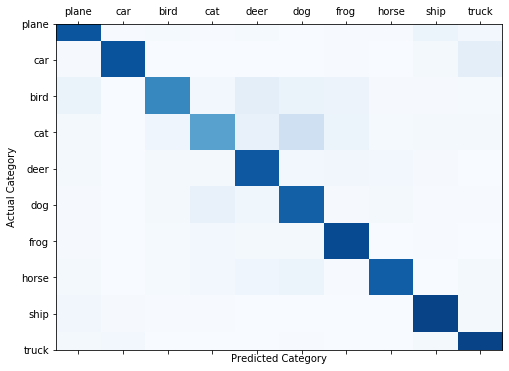

Category   - Accuracy
plane      - 85.7
car        - 86.6
bird       - 66.2
cat        - 55.7
deer       - 84.7
dog        - 81.6
frog       - 89.8
horse      - 82.2
ship       - 92.2
truck      - 92.3

Selected workers

[10 15 92 82 34 98 38 83 20 69  9 87 60 73 52]
Worker 10 : is  Honest
Worker 15 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 83 : is  Honest
Worker 20 : is  Honest
Worker 69 : is  Honest
Worker 9 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 60 : is  Honest
Worker 73 : is  Honest
Worker 52 : is  Stealthy_Attacker

 | Global Training Round : 46 |


Worker 10 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.204907
Train Epoch: 1 [400/500	(81%)]	Loss: 0.284675
Train Epoch: 2 [0/500	(1%)]	Loss: 0.182349
Train Epoch: 2 [400/500	(81%)]	Loss: 0.221720
Train Epoch: 3 [0/500	(1%)]	Loss: 0.118734
Train Epoch: 3 [400/500	(81%)]	Loss: 0.115167
Train Epoch: 4 [0/500	(1%)]	Loss: 0.218498
Train Epoch: 4 [400/500	(81%)]	Loss: 0.101961
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110809
Train Epoch: 5 [400/500	(81%)]	Loss: 0.094289

Worker 10 ends training in Global Round:46 |

Worker 15 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.511876
Train Epoch: 1 [400/500	(81%)]	Loss: 0.635933
Train Epoch: 2 [0/500	(1%)]	Loss: 0.268922
Train Epoch: 2 [400/500	(81%)]	Loss: 0.354095
Train Epoch: 3 [0/500	(1%)]	Loss: 0.268052
Train Epoch: 3 [400/500	(81%)]	Loss: 0.348973
Train Epoch: 4 [0/500	(1%)]	Loss: 0.148408
Train Epoch: 4 [400/500	(81%)]	Loss: 0.194714
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170936
Train Epoch: 5 [400/500	(81%)]	Loss: 0.096199

Worker 15 ends training in Global Round:46 |

Worker 92 starts training in Global Round:46 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  46


Train Epoch: 1 [0/500	(1%)]	Loss: 1.184531
Train Epoch: 1 [400/500	(81%)]	Loss: 0.553236
Train Epoch: 2 [0/500	(1%)]	Loss: 0.415776
Train Epoch: 2 [400/500	(81%)]	Loss: 0.477371
Train Epoch: 3 [0/500	(1%)]	Loss: 0.310918
Train Epoch: 3 [400/500	(81%)]	Loss: 0.356790
Train Epoch: 4 [0/500	(1%)]	Loss: 0.161445
Train Epoch: 4 [400/500	(81%)]	Loss: 0.339308
Train Epoch: 5 [0/500	(1%)]	Loss: 0.174153
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220219

Performed attacks 1
Worker 92 ends training in Global Round:46 |

Worker 82 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.329756
Train Epoch: 1 [400/500	(81%)]	Loss: 0.542741
Train Epoch: 2 [0/500	(1%)]	Loss: 0.210806
Train Epoch: 2 [400/500	(81%)]	Loss: 0.314420
Train Epoch: 3 [0/500	(1%)]	Loss: 0.270857
Train Epoch: 3 [400/500	(81%)]	Loss: 0.388085
Train Epoch: 4 [0/500	(1%)]	Loss: 0.117394
Train Epoch: 4 [400/500	(81%)]	Loss: 0.238848
Train Epoch: 5 [0/500	(1%)]	Loss: 0.121994
Train Epoch: 5 [400/500	(81%)]	Loss: 0.146744

Worker 82 ends training in Global Round:46 |

Worker 34 starts training in Global Round:46 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  46


Train Epoch: 1 [0/500	(1%)]	Loss: 1.563068
Train Epoch: 1 [400/500	(81%)]	Loss: 0.699814
Train Epoch: 2 [0/500	(1%)]	Loss: 0.225099
Train Epoch: 2 [400/500	(81%)]	Loss: 0.516055
Train Epoch: 3 [0/500	(1%)]	Loss: 0.272104
Train Epoch: 3 [400/500	(81%)]	Loss: 0.250969
Train Epoch: 4 [0/500	(1%)]	Loss: 0.352666
Train Epoch: 4 [400/500	(81%)]	Loss: 0.410643
Train Epoch: 5 [0/500	(1%)]	Loss: 0.250814
Train Epoch: 5 [400/500	(81%)]	Loss: 0.537280

Performed attacks 2
Worker 34 ends training in Global Round:46 |

Worker 98 starts training in Global Round:46 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  46


Train Epoch: 1 [0/500	(1%)]	Loss: 1.524656
Train Epoch: 1 [400/500	(81%)]	Loss: 0.572626
Train Epoch: 2 [0/500	(1%)]	Loss: 0.335130
Train Epoch: 2 [400/500	(81%)]	Loss: 0.318217
Train Epoch: 3 [0/500	(1%)]	Loss: 0.265224
Train Epoch: 3 [400/500	(81%)]	Loss: 0.425898
Train Epoch: 4 [0/500	(1%)]	Loss: 0.234166
Train Epoch: 4 [400/500	(81%)]	Loss: 0.271749
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192845
Train Epoch: 5 [400/500	(81%)]	Loss: 0.202312

Performed attacks 3
Worker 98 ends training in Global Round:46 |

Worker 38 starts training in Global Round:46 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  46


Train Epoch: 1 [0/500	(1%)]	Loss: 0.954422
Train Epoch: 1 [400/500	(81%)]	Loss: 0.625204
Train Epoch: 2 [0/500	(1%)]	Loss: 0.338457
Train Epoch: 2 [400/500	(81%)]	Loss: 0.541846
Train Epoch: 3 [0/500	(1%)]	Loss: 0.366540
Train Epoch: 3 [400/500	(81%)]	Loss: 0.397755
Train Epoch: 4 [0/500	(1%)]	Loss: 0.281090
Train Epoch: 4 [400/500	(81%)]	Loss: 0.295991
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133841
Train Epoch: 5 [400/500	(81%)]	Loss: 0.361854

Performed attacks 4
Worker 38 ends training in Global Round:46 |

Worker 83 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.246138
Train Epoch: 1 [400/500	(81%)]	Loss: 0.501343
Train Epoch: 2 [0/500	(1%)]	Loss: 0.140778
Train Epoch: 2 [400/500	(81%)]	Loss: 0.204402
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151214
Train Epoch: 3 [400/500	(81%)]	Loss: 0.180963
Train Epoch: 4 [0/500	(1%)]	Loss: 0.240256
Train Epoch: 4 [400/500	(81%)]	Loss: 0.155537
Train Epoch: 5 [0/500	(1%)]	Loss: 0.043172
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149997

Worker 83 ends training in Global Round:46 |

Worker 20 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.346540
Train Epoch: 1 [400/500	(81%)]	Loss: 0.291703
Train Epoch: 2 [0/500	(1%)]	Loss: 0.281185
Train Epoch: 2 [400/500	(81%)]	Loss: 0.276777
Train Epoch: 3 [0/500	(1%)]	Loss: 0.125618
Train Epoch: 3 [400/500	(81%)]	Loss: 0.278815
Train Epoch: 4 [0/500	(1%)]	Loss: 0.097950
Train Epoch: 4 [400/500	(81%)]	Loss: 0.280961
Train Epoch: 5 [0/500	(1%)]	Loss: 0.066906
Train Epoch: 5 [400/500	(81%)]	Loss: 0.186299

Worker 20 ends training in Global Round:46 |

Worker 69 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.443594
Train Epoch: 1 [400/500	(81%)]	Loss: 0.603438
Train Epoch: 2 [0/500	(1%)]	Loss: 0.156514
Train Epoch: 2 [400/500	(81%)]	Loss: 0.426765
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145076
Train Epoch: 3 [400/500	(81%)]	Loss: 0.339600
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152023
Train Epoch: 4 [400/500	(81%)]	Loss: 0.246864
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106159
Train Epoch: 5 [400/500	(81%)]	Loss: 0.214032

Worker 69 ends training in Global Round:46 |

Worker 9 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.432143
Train Epoch: 1 [400/500	(81%)]	Loss: 0.483562
Train Epoch: 2 [0/500	(1%)]	Loss: 0.271083
Train Epoch: 2 [400/500	(81%)]	Loss: 0.380779
Train Epoch: 3 [0/500	(1%)]	Loss: 0.190388
Train Epoch: 3 [400/500	(81%)]	Loss: 0.265197
Train Epoch: 4 [0/500	(1%)]	Loss: 0.225260
Train Epoch: 4 [400/500	(81%)]	Loss: 0.159476
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182757
Train Epoch: 5 [400/500	(81%)]	Loss: 0.212510

Worker 9 ends training in Global Round:46 |

Worker 87 starts training in Global Round:46 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  46


Train Epoch: 1 [0/500	(1%)]	Loss: 1.394111
Train Epoch: 1 [400/500	(81%)]	Loss: 0.558600
Train Epoch: 2 [0/500	(1%)]	Loss: 0.194054
Train Epoch: 2 [400/500	(81%)]	Loss: 0.452549
Train Epoch: 3 [0/500	(1%)]	Loss: 0.285357
Train Epoch: 3 [400/500	(81%)]	Loss: 0.250485
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140437
Train Epoch: 4 [400/500	(81%)]	Loss: 0.265165
Train Epoch: 5 [0/500	(1%)]	Loss: 0.189378
Train Epoch: 5 [400/500	(81%)]	Loss: 0.158580

Performed attacks 5
Worker 87 ends training in Global Round:46 |

Worker 60 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.361356
Train Epoch: 1 [400/500	(81%)]	Loss: 0.311826
Train Epoch: 2 [0/500	(1%)]	Loss: 0.287216
Train Epoch: 2 [400/500	(81%)]	Loss: 0.215674
Train Epoch: 3 [0/500	(1%)]	Loss: 0.231014
Train Epoch: 3 [400/500	(81%)]	Loss: 0.270922
Train Epoch: 4 [0/500	(1%)]	Loss: 0.100214
Train Epoch: 4 [400/500	(81%)]	Loss: 0.102667
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081840
Train Epoch: 5 [400/500	(81%)]	Loss: 0.194461

Worker 60 ends training in Global Round:46 |

Worker 73 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.438791
Train Epoch: 1 [400/500	(81%)]	Loss: 0.337815
Train Epoch: 2 [0/500	(1%)]	Loss: 0.280521
Train Epoch: 2 [400/500	(81%)]	Loss: 0.238408
Train Epoch: 3 [0/500	(1%)]	Loss: 0.123048
Train Epoch: 3 [400/500	(81%)]	Loss: 0.172772
Train Epoch: 4 [0/500	(1%)]	Loss: 0.084651
Train Epoch: 4 [400/500	(81%)]	Loss: 0.114156
Train Epoch: 5 [0/500	(1%)]	Loss: 0.058435
Train Epoch: 5 [400/500	(81%)]	Loss: 0.154586

Worker 73 ends training in Global Round:46 |

Worker 52 starts training in Global Round:46 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.388987
Train Epoch: 1 [400/500	(81%)]	Loss: 0.618596
Train Epoch: 2 [0/500	(1%)]	Loss: 0.286285
Train Epoch: 2 [400/500	(81%)]	Loss: 0.544726
Train Epoch: 3 [0/500	(1%)]	Loss: 0.178210
Train Epoch: 3 [400/500	(81%)]	Loss: 0.377710
Train Epoch: 4 [0/500	(1%)]	Loss: 0.139809
Train Epoch: 4 [400/500	(81%)]	Loss: 0.298796
Train Epoch: 5 [0/500	(1%)]	Loss: 0.235009
Train Epoch: 5 [400/500	(81%)]	Loss: 0.248289

Worker 52 ends training in Global Round:46 |
Last layer biases  [array([ 0.03249793, -0.02971821, -0.01584022,  0.03578049,  0.03808587,
       -0.01619159,  0.03873547, -0.00652856, -0.02152623, -0.03939309],
      dtype=float32), array([ 0.03291622, -0.02960056, -0.01623954,  0.03475022,  0.03779966,
       -0.01663609,  0.0394553 , -0.00748097, -0.02023238, -0.03883001],
      dtype=float32), array([ 0.03601224, -0.02862132, -0.01232469,  0.03933008,  0.04935901,
       -0.016267  ,  0.03810354, -0.02959484, -0.0205587 , -0.03953645],
      dtyp

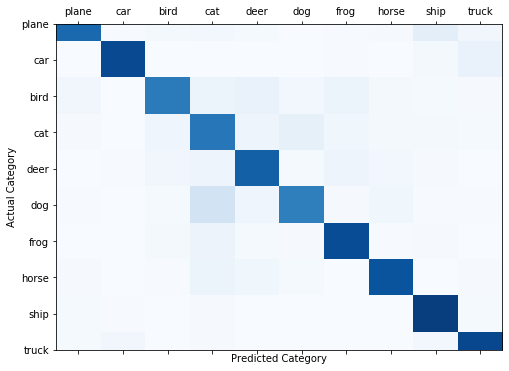

Category   - Accuracy
plane      - 78.2
car        - 90.1
bird       - 71.0
cat        - 72.3
deer       - 81.3
dog        - 69.2
frog       - 88.7
horse      - 86.3
ship       - 94.9
truck      - 90.9

Selected workers

[65 63 72 80 26 69 38  9 89 93 14 49 45 99 95]
Worker 65 : is  Honest
Worker 63 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 80 : is  Honest
Worker 26 : is  Honest
Worker 69 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 9 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 93 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 45 : is  Honest
Worker 99 : is  Honest
Worker 95 : is  Honest

 | Global Training Round : 47 |


Worker 65 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.304867
Train Epoch: 1 [400/500	(81%)]	Loss: 0.548163
Train Epoch: 2 [0/500	(1%)]	Loss: 0.301979
Train Epoch: 2 [400/500	(81%)]	Loss: 0.368105
Train Epoch: 3 [0/500	(1%)]	Loss: 0.205950
Train Epoch: 3 [400/500	(81%)]	Loss: 0.224087
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170230
Train Epoch: 4 [400/500	(81%)]	Loss: 0.384596
Train Epoch: 5 [0/500	(1%)]	Loss: 0.310188
Train Epoch: 5 [400/500	(81%)]	Loss: 0.362326

Worker 65 ends training in Global Round:47 |

Worker 63 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.371943
Train Epoch: 1 [400/500	(81%)]	Loss: 0.459334
Train Epoch: 2 [0/500	(1%)]	Loss: 0.177162
Train Epoch: 2 [400/500	(81%)]	Loss: 0.270425
Train Epoch: 3 [0/500	(1%)]	Loss: 0.156917
Train Epoch: 3 [400/500	(81%)]	Loss: 0.131231
Train Epoch: 4 [0/500	(1%)]	Loss: 0.161227
Train Epoch: 4 [400/500	(81%)]	Loss: 0.323042
Train Epoch: 5 [0/500	(1%)]	Loss: 0.090390
Train Epoch: 5 [400/500	(81%)]	Loss: 0.163461

Worker 63 ends training in Global Round:47 |

Worker 72 starts training in Global Round:47 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  47


Train Epoch: 1 [0/500	(1%)]	Loss: 1.295972
Train Epoch: 1 [400/500	(81%)]	Loss: 0.428203
Train Epoch: 2 [0/500	(1%)]	Loss: 0.486698
Train Epoch: 2 [400/500	(81%)]	Loss: 0.621677
Train Epoch: 3 [0/500	(1%)]	Loss: 0.337435
Train Epoch: 3 [400/500	(81%)]	Loss: 0.264606
Train Epoch: 4 [0/500	(1%)]	Loss: 0.237227
Train Epoch: 4 [400/500	(81%)]	Loss: 0.261292
Train Epoch: 5 [0/500	(1%)]	Loss: 0.311016
Train Epoch: 5 [400/500	(81%)]	Loss: 0.247134

Performed attacks 1
Worker 72 ends training in Global Round:47 |

Worker 80 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.483452
Train Epoch: 1 [400/500	(81%)]	Loss: 0.391526
Train Epoch: 2 [0/500	(1%)]	Loss: 0.240559
Train Epoch: 2 [400/500	(81%)]	Loss: 0.442367
Train Epoch: 3 [0/500	(1%)]	Loss: 0.180985
Train Epoch: 3 [400/500	(81%)]	Loss: 0.228062
Train Epoch: 4 [0/500	(1%)]	Loss: 0.184455
Train Epoch: 4 [400/500	(81%)]	Loss: 0.274183
Train Epoch: 5 [0/500	(1%)]	Loss: 0.146850
Train Epoch: 5 [400/500	(81%)]	Loss: 0.221347

Worker 80 ends training in Global Round:47 |

Worker 26 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.457615
Train Epoch: 1 [400/500	(81%)]	Loss: 0.313848
Train Epoch: 2 [0/500	(1%)]	Loss: 0.138488
Train Epoch: 2 [400/500	(81%)]	Loss: 0.296149
Train Epoch: 3 [0/500	(1%)]	Loss: 0.293301
Train Epoch: 3 [400/500	(81%)]	Loss: 0.197841
Train Epoch: 4 [0/500	(1%)]	Loss: 0.114310
Train Epoch: 4 [400/500	(81%)]	Loss: 0.154707
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145820
Train Epoch: 5 [400/500	(81%)]	Loss: 0.090327

Worker 26 ends training in Global Round:47 |

Worker 69 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.359971
Train Epoch: 1 [400/500	(81%)]	Loss: 0.298510
Train Epoch: 2 [0/500	(1%)]	Loss: 0.170413
Train Epoch: 2 [400/500	(81%)]	Loss: 0.285739
Train Epoch: 3 [0/500	(1%)]	Loss: 0.097081
Train Epoch: 3 [400/500	(81%)]	Loss: 0.280704
Train Epoch: 4 [0/500	(1%)]	Loss: 0.198289
Train Epoch: 4 [400/500	(81%)]	Loss: 0.185782
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112328
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210280

Worker 69 ends training in Global Round:47 |

Worker 38 starts training in Global Round:47 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  47


Train Epoch: 1 [0/500	(1%)]	Loss: 1.100357
Train Epoch: 1 [400/500	(81%)]	Loss: 0.503373
Train Epoch: 2 [0/500	(1%)]	Loss: 0.184606
Train Epoch: 2 [400/500	(81%)]	Loss: 0.442787
Train Epoch: 3 [0/500	(1%)]	Loss: 0.324029
Train Epoch: 3 [400/500	(81%)]	Loss: 0.259502
Train Epoch: 4 [0/500	(1%)]	Loss: 0.269826
Train Epoch: 4 [400/500	(81%)]	Loss: 0.302952
Train Epoch: 5 [0/500	(1%)]	Loss: 0.109229
Train Epoch: 5 [400/500	(81%)]	Loss: 0.130450

Performed attacks 2
Worker 38 ends training in Global Round:47 |

Worker 9 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.172878
Train Epoch: 1 [400/500	(81%)]	Loss: 0.355244
Train Epoch: 2 [0/500	(1%)]	Loss: 0.198381
Train Epoch: 2 [400/500	(81%)]	Loss: 0.471374
Train Epoch: 3 [0/500	(1%)]	Loss: 0.157305
Train Epoch: 3 [400/500	(81%)]	Loss: 0.255759
Train Epoch: 4 [0/500	(1%)]	Loss: 0.166111
Train Epoch: 4 [400/500	(81%)]	Loss: 0.314628
Train Epoch: 5 [0/500	(1%)]	Loss: 0.103685
Train Epoch: 5 [400/500	(81%)]	Loss: 0.230590

Worker 9 ends training in Global Round:47 |

Worker 89 starts training in Global Round:47 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  47


Train Epoch: 1 [0/500	(1%)]	Loss: 1.482842
Train Epoch: 1 [400/500	(81%)]	Loss: 0.669165
Train Epoch: 2 [0/500	(1%)]	Loss: 0.382156
Train Epoch: 2 [400/500	(81%)]	Loss: 0.573548
Train Epoch: 3 [0/500	(1%)]	Loss: 0.374301
Train Epoch: 3 [400/500	(81%)]	Loss: 0.428075
Train Epoch: 4 [0/500	(1%)]	Loss: 0.240501
Train Epoch: 4 [400/500	(81%)]	Loss: 0.554770
Train Epoch: 5 [0/500	(1%)]	Loss: 0.239320
Train Epoch: 5 [400/500	(81%)]	Loss: 0.309175

Performed attacks 3
Worker 89 ends training in Global Round:47 |

Worker 93 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.308617
Train Epoch: 1 [400/500	(81%)]	Loss: 0.373178
Train Epoch: 2 [0/500	(1%)]	Loss: 0.187435
Train Epoch: 2 [400/500	(81%)]	Loss: 0.327659
Train Epoch: 3 [0/500	(1%)]	Loss: 0.157842
Train Epoch: 3 [400/500	(81%)]	Loss: 0.233972
Train Epoch: 4 [0/500	(1%)]	Loss: 0.179564
Train Epoch: 4 [400/500	(81%)]	Loss: 0.174687
Train Epoch: 5 [0/500	(1%)]	Loss: 0.104679
Train Epoch: 5 [400/500	(81%)]	Loss: 0.170036

Worker 93 ends training in Global Round:47 |

Worker 14 starts training in Global Round:47 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  47


Train Epoch: 1 [0/500	(1%)]	Loss: 1.435025
Train Epoch: 1 [400/500	(81%)]	Loss: 0.594573
Train Epoch: 2 [0/500	(1%)]	Loss: 0.490147
Train Epoch: 2 [400/500	(81%)]	Loss: 0.566330
Train Epoch: 3 [0/500	(1%)]	Loss: 0.300928
Train Epoch: 3 [400/500	(81%)]	Loss: 0.512011
Train Epoch: 4 [0/500	(1%)]	Loss: 0.306846
Train Epoch: 4 [400/500	(81%)]	Loss: 0.336436
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170891
Train Epoch: 5 [400/500	(81%)]	Loss: 0.207381

Performed attacks 4
Worker 14 ends training in Global Round:47 |

Worker 49 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.375054
Train Epoch: 1 [400/500	(81%)]	Loss: 0.452479
Train Epoch: 2 [0/500	(1%)]	Loss: 0.118091
Train Epoch: 2 [400/500	(81%)]	Loss: 0.283136
Train Epoch: 3 [0/500	(1%)]	Loss: 0.170332
Train Epoch: 3 [400/500	(81%)]	Loss: 0.225992
Train Epoch: 4 [0/500	(1%)]	Loss: 0.167249
Train Epoch: 4 [400/500	(81%)]	Loss: 0.300153
Train Epoch: 5 [0/500	(1%)]	Loss: 0.087975
Train Epoch: 5 [400/500	(81%)]	Loss: 0.281946

Worker 49 ends training in Global Round:47 |

Worker 45 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.424666
Train Epoch: 1 [400/500	(81%)]	Loss: 0.351303
Train Epoch: 2 [0/500	(1%)]	Loss: 0.279841
Train Epoch: 2 [400/500	(81%)]	Loss: 0.405310
Train Epoch: 3 [0/500	(1%)]	Loss: 0.175725
Train Epoch: 3 [400/500	(81%)]	Loss: 0.289110
Train Epoch: 4 [0/500	(1%)]	Loss: 0.132559
Train Epoch: 4 [400/500	(81%)]	Loss: 0.259187
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122489
Train Epoch: 5 [400/500	(81%)]	Loss: 0.225936

Worker 45 ends training in Global Round:47 |

Worker 99 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.437328
Train Epoch: 1 [400/500	(81%)]	Loss: 0.422119
Train Epoch: 2 [0/500	(1%)]	Loss: 0.207483
Train Epoch: 2 [400/500	(81%)]	Loss: 0.254913
Train Epoch: 3 [0/500	(1%)]	Loss: 0.213534
Train Epoch: 3 [400/500	(81%)]	Loss: 0.202869
Train Epoch: 4 [0/500	(1%)]	Loss: 0.236533
Train Epoch: 4 [400/500	(81%)]	Loss: 0.333238
Train Epoch: 5 [0/500	(1%)]	Loss: 0.144775
Train Epoch: 5 [400/500	(81%)]	Loss: 0.283619

Worker 99 ends training in Global Round:47 |

Worker 95 starts training in Global Round:47 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.341423
Train Epoch: 1 [400/500	(81%)]	Loss: 0.410005
Train Epoch: 2 [0/500	(1%)]	Loss: 0.206819
Train Epoch: 2 [400/500	(81%)]	Loss: 0.257016
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142663
Train Epoch: 3 [400/500	(81%)]	Loss: 0.271558
Train Epoch: 4 [0/500	(1%)]	Loss: 0.071961
Train Epoch: 4 [400/500	(81%)]	Loss: 0.267049
Train Epoch: 5 [0/500	(1%)]	Loss: 0.091928
Train Epoch: 5 [400/500	(81%)]	Loss: 0.381599

Worker 95 ends training in Global Round:47 |
Last layer biases  [array([ 0.03404353, -0.03107907, -0.01561912,  0.03437607,  0.03820541,
       -0.01523262,  0.03855041, -0.00623424, -0.0207922 , -0.04031633],
      dtype=float32), array([ 0.03361866, -0.02970199, -0.01584075,  0.03726541,  0.03794891,
       -0.01776739,  0.03987103, -0.00647548, -0.0223163 , -0.04070023],
      dtype=float32), array([ 0.0371844 , -0.03246884, -0.01493397,  0.04166214,  0.04408555,
       -0.01469653,  0.04082443, -0.02607787, -0.02018609, -0.03949134],
      dtyp

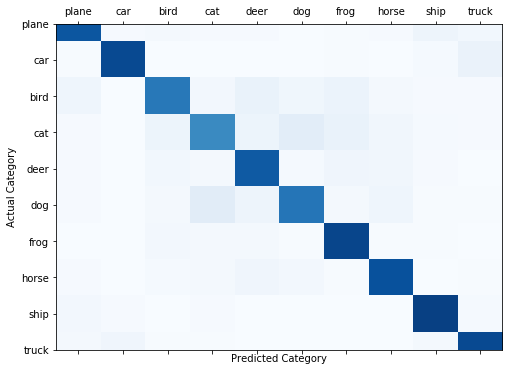

Category   - Accuracy
plane      - 85.2
car        - 90.0
bird       - 72.0
cat        - 65.4
deer       - 83.9
dog        - 73.2
frog       - 91.5
horse      - 87.2
ship       - 93.5
truck      - 90.1

Selected workers

[ 9 34 28 93 73 94 26 11 38 50 75  8 39 77 23]
Worker 9 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 28 : is  Stealthy_Attacker
Worker 93 : is  Honest
Worker 73 : is  Honest
Worker 94 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 11 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 50 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 8 : is  Honest
Worker 39 : is  Honest
Worker 77 : is  Honest
Worker 23 : is  Stealthy_Attacker

 | Global Training Round : 48 |


Worker 9 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.315760
Train Epoch: 1 [400/500	(81%)]	Loss: 0.297341
Train Epoch: 2 [0/500	(1%)]	Loss: 0.166327
Train Epoch: 2 [400/500	(81%)]	Loss: 0.210540
Train Epoch: 3 [0/500	(1%)]	Loss: 0.188619
Train Epoch: 3 [400/500	(81%)]	Loss: 0.072620
Train Epoch: 4 [0/500	(1%)]	Loss: 0.206580
Train Epoch: 4 [400/500	(81%)]	Loss: 0.136121
Train Epoch: 5 [0/500	(1%)]	Loss: 0.052773
Train Epoch: 5 [400/500	(81%)]	Loss: 0.127358

Worker 9 ends training in Global Round:48 |

Worker 34 starts training in Global Round:48 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  48


Train Epoch: 1 [0/500	(1%)]	Loss: 1.347877
Train Epoch: 1 [400/500	(81%)]	Loss: 0.641377
Train Epoch: 2 [0/500	(1%)]	Loss: 0.368889
Train Epoch: 2 [400/500	(81%)]	Loss: 0.520150
Train Epoch: 3 [0/500	(1%)]	Loss: 0.253337
Train Epoch: 3 [400/500	(81%)]	Loss: 0.370896
Train Epoch: 4 [0/500	(1%)]	Loss: 0.160184
Train Epoch: 4 [400/500	(81%)]	Loss: 0.365366
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118987
Train Epoch: 5 [400/500	(81%)]	Loss: 0.278919

Performed attacks 1
Worker 34 ends training in Global Round:48 |

Worker 28 starts training in Global Round:48 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  48


Train Epoch: 1 [0/500	(1%)]	Loss: 1.078341
Train Epoch: 1 [400/500	(81%)]	Loss: 0.678561
Train Epoch: 2 [0/500	(1%)]	Loss: 0.246597
Train Epoch: 2 [400/500	(81%)]	Loss: 0.583309
Train Epoch: 3 [0/500	(1%)]	Loss: 0.368402
Train Epoch: 3 [400/500	(81%)]	Loss: 0.343162
Train Epoch: 4 [0/500	(1%)]	Loss: 0.266389
Train Epoch: 4 [400/500	(81%)]	Loss: 0.209591
Train Epoch: 5 [0/500	(1%)]	Loss: 0.283306
Train Epoch: 5 [400/500	(81%)]	Loss: 0.094646

Performed attacks 2
Worker 28 ends training in Global Round:48 |

Worker 93 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.224823
Train Epoch: 1 [400/500	(81%)]	Loss: 0.260060
Train Epoch: 2 [0/500	(1%)]	Loss: 0.106460
Train Epoch: 2 [400/500	(81%)]	Loss: 0.156069
Train Epoch: 3 [0/500	(1%)]	Loss: 0.084647
Train Epoch: 3 [400/500	(81%)]	Loss: 0.245940
Train Epoch: 4 [0/500	(1%)]	Loss: 0.059327
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169235
Train Epoch: 5 [0/500	(1%)]	Loss: 0.067201
Train Epoch: 5 [400/500	(81%)]	Loss: 0.194332

Worker 93 ends training in Global Round:48 |

Worker 73 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.212305
Train Epoch: 1 [400/500	(81%)]	Loss: 0.315957
Train Epoch: 2 [0/500	(1%)]	Loss: 0.117978
Train Epoch: 2 [400/500	(81%)]	Loss: 0.241587
Train Epoch: 3 [0/500	(1%)]	Loss: 0.081181
Train Epoch: 3 [400/500	(81%)]	Loss: 0.094038
Train Epoch: 4 [0/500	(1%)]	Loss: 0.135842
Train Epoch: 4 [400/500	(81%)]	Loss: 0.118440
Train Epoch: 5 [0/500	(1%)]	Loss: 0.093913
Train Epoch: 5 [400/500	(81%)]	Loss: 0.224171

Worker 73 ends training in Global Round:48 |

Worker 94 starts training in Global Round:48 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  48


Train Epoch: 1 [0/500	(1%)]	Loss: 1.152517
Train Epoch: 1 [400/500	(81%)]	Loss: 0.736277
Train Epoch: 2 [0/500	(1%)]	Loss: 0.361840
Train Epoch: 2 [400/500	(81%)]	Loss: 0.383795
Train Epoch: 3 [0/500	(1%)]	Loss: 0.245226
Train Epoch: 3 [400/500	(81%)]	Loss: 0.416700
Train Epoch: 4 [0/500	(1%)]	Loss: 0.300197
Train Epoch: 4 [400/500	(81%)]	Loss: 0.207272
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192003
Train Epoch: 5 [400/500	(81%)]	Loss: 0.275813

Performed attacks 3
Worker 94 ends training in Global Round:48 |

Worker 26 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.233067
Train Epoch: 1 [400/500	(81%)]	Loss: 0.295341
Train Epoch: 2 [0/500	(1%)]	Loss: 0.189488
Train Epoch: 2 [400/500	(81%)]	Loss: 0.274237
Train Epoch: 3 [0/500	(1%)]	Loss: 0.132634
Train Epoch: 3 [400/500	(81%)]	Loss: 0.248283
Train Epoch: 4 [0/500	(1%)]	Loss: 0.094600
Train Epoch: 4 [400/500	(81%)]	Loss: 0.114917
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081459
Train Epoch: 5 [400/500	(81%)]	Loss: 0.131823

Worker 26 ends training in Global Round:48 |

Worker 11 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.426274
Train Epoch: 1 [400/500	(81%)]	Loss: 0.513094
Train Epoch: 2 [0/500	(1%)]	Loss: 0.274356
Train Epoch: 2 [400/500	(81%)]	Loss: 0.608123
Train Epoch: 3 [0/500	(1%)]	Loss: 0.310205
Train Epoch: 3 [400/500	(81%)]	Loss: 0.262508
Train Epoch: 4 [0/500	(1%)]	Loss: 0.280301
Train Epoch: 4 [400/500	(81%)]	Loss: 0.377364
Train Epoch: 5 [0/500	(1%)]	Loss: 0.181267
Train Epoch: 5 [400/500	(81%)]	Loss: 0.300133

Worker 11 ends training in Global Round:48 |

Worker 38 starts training in Global Round:48 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  48


Train Epoch: 1 [0/500	(1%)]	Loss: 1.568440
Train Epoch: 1 [400/500	(81%)]	Loss: 0.400668
Train Epoch: 2 [0/500	(1%)]	Loss: 0.387998
Train Epoch: 2 [400/500	(81%)]	Loss: 0.386020
Train Epoch: 3 [0/500	(1%)]	Loss: 0.295087
Train Epoch: 3 [400/500	(81%)]	Loss: 0.302634
Train Epoch: 4 [0/500	(1%)]	Loss: 0.233485
Train Epoch: 4 [400/500	(81%)]	Loss: 0.318433
Train Epoch: 5 [0/500	(1%)]	Loss: 0.142429
Train Epoch: 5 [400/500	(81%)]	Loss: 0.132381

Performed attacks 4
Worker 38 ends training in Global Round:48 |

Worker 50 starts training in Global Round:48 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  48


Train Epoch: 1 [0/500	(1%)]	Loss: 1.401680
Train Epoch: 1 [400/500	(81%)]	Loss: 0.628058
Train Epoch: 2 [0/500	(1%)]	Loss: 0.297979
Train Epoch: 2 [400/500	(81%)]	Loss: 0.512935
Train Epoch: 3 [0/500	(1%)]	Loss: 0.300388
Train Epoch: 3 [400/500	(81%)]	Loss: 0.352904
Train Epoch: 4 [0/500	(1%)]	Loss: 0.281807
Train Epoch: 4 [400/500	(81%)]	Loss: 0.273653
Train Epoch: 5 [0/500	(1%)]	Loss: 0.137080
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149260

Performed attacks 5
Worker 50 ends training in Global Round:48 |

Worker 75 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.510859
Train Epoch: 1 [400/500	(81%)]	Loss: 0.502859
Train Epoch: 2 [0/500	(1%)]	Loss: 0.272684
Train Epoch: 2 [400/500	(81%)]	Loss: 0.411179
Train Epoch: 3 [0/500	(1%)]	Loss: 0.254720
Train Epoch: 3 [400/500	(81%)]	Loss: 0.293295
Train Epoch: 4 [0/500	(1%)]	Loss: 0.206304
Train Epoch: 4 [400/500	(81%)]	Loss: 0.208597
Train Epoch: 5 [0/500	(1%)]	Loss: 0.120933
Train Epoch: 5 [400/500	(81%)]	Loss: 0.316565

Worker 75 ends training in Global Round:48 |

Worker 8 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.431961
Train Epoch: 1 [400/500	(81%)]	Loss: 0.747150
Train Epoch: 2 [0/500	(1%)]	Loss: 0.376663
Train Epoch: 2 [400/500	(81%)]	Loss: 0.520435
Train Epoch: 3 [0/500	(1%)]	Loss: 0.230359
Train Epoch: 3 [400/500	(81%)]	Loss: 0.397795
Train Epoch: 4 [0/500	(1%)]	Loss: 0.217803
Train Epoch: 4 [400/500	(81%)]	Loss: 0.289144
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170249
Train Epoch: 5 [400/500	(81%)]	Loss: 0.178005

Worker 8 ends training in Global Round:48 |

Worker 39 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.332182
Train Epoch: 1 [400/500	(81%)]	Loss: 0.177834
Train Epoch: 2 [0/500	(1%)]	Loss: 0.178929
Train Epoch: 2 [400/500	(81%)]	Loss: 0.163492
Train Epoch: 3 [0/500	(1%)]	Loss: 0.122574
Train Epoch: 3 [400/500	(81%)]	Loss: 0.149169
Train Epoch: 4 [0/500	(1%)]	Loss: 0.051778
Train Epoch: 4 [400/500	(81%)]	Loss: 0.052568
Train Epoch: 5 [0/500	(1%)]	Loss: 0.071352
Train Epoch: 5 [400/500	(81%)]	Loss: 0.157387

Worker 39 ends training in Global Round:48 |

Worker 77 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.306179
Train Epoch: 1 [400/500	(81%)]	Loss: 0.622990
Train Epoch: 2 [0/500	(1%)]	Loss: 0.320102
Train Epoch: 2 [400/500	(81%)]	Loss: 0.553963
Train Epoch: 3 [0/500	(1%)]	Loss: 0.230358
Train Epoch: 3 [400/500	(81%)]	Loss: 0.285339
Train Epoch: 4 [0/500	(1%)]	Loss: 0.183749
Train Epoch: 4 [400/500	(81%)]	Loss: 0.261913
Train Epoch: 5 [0/500	(1%)]	Loss: 0.150748
Train Epoch: 5 [400/500	(81%)]	Loss: 0.241129

Worker 77 ends training in Global Round:48 |

Worker 23 starts training in Global Round:48 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.479774
Train Epoch: 1 [400/500	(81%)]	Loss: 0.496608
Train Epoch: 2 [0/500	(1%)]	Loss: 0.291387
Train Epoch: 2 [400/500	(81%)]	Loss: 0.557968
Train Epoch: 3 [0/500	(1%)]	Loss: 0.239741
Train Epoch: 3 [400/500	(81%)]	Loss: 0.404165
Train Epoch: 4 [0/500	(1%)]	Loss: 0.211069
Train Epoch: 4 [400/500	(81%)]	Loss: 0.263969
Train Epoch: 5 [0/500	(1%)]	Loss: 0.211032
Train Epoch: 5 [400/500	(81%)]	Loss: 0.257156

Worker 23 ends training in Global Round:48 |
Last layer biases  [array([ 0.03325593, -0.03054716, -0.01679498,  0.0375773 ,  0.03930021,
       -0.01563403,  0.03939631, -0.00775233, -0.02301672, -0.03988267],
      dtype=float32), array([ 0.03558569, -0.02800572, -0.01416053,  0.03751456,  0.0489215 ,
       -0.01655591,  0.03968356, -0.02630201, -0.01966368, -0.0411156 ],
      dtype=float32), array([ 0.03596076, -0.02771885, -0.01563366,  0.03859644,  0.04871284,
       -0.01695126,  0.04230315, -0.02795957, -0.02048192, -0.04092608],
      dtyp

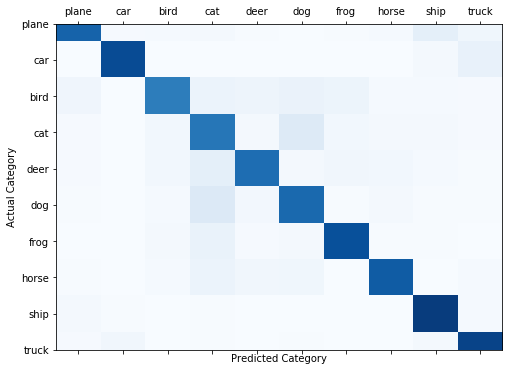

Category   - Accuracy
plane      - 80.4
car        - 89.2
bird       - 70.0
cat        - 72.8
deer       - 76.4
dog        - 78.1
frog       - 87.5
horse      - 82.9
ship       - 95.1
truck      - 92.5

Selected workers

[77 80 10 82  6 46 91 69 93 95 56 73 89 97 83]
Worker 77 : is  Honest
Worker 80 : is  Honest
Worker 10 : is  Honest
Worker 82 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 46 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 69 : is  Honest
Worker 93 : is  Honest
Worker 95 : is  Honest
Worker 56 : is  Honest
Worker 73 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 97 : is  Stealthy_Attacker
Worker 83 : is  Honest

 | Global Training Round : 49 |


Worker 77 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.525068
Train Epoch: 1 [400/500	(81%)]	Loss: 0.756052
Train Epoch: 2 [0/500	(1%)]	Loss: 0.310875
Train Epoch: 2 [400/500	(81%)]	Loss: 0.504573
Train Epoch: 3 [0/500	(1%)]	Loss: 0.263452
Train Epoch: 3 [400/500	(81%)]	Loss: 0.373344
Train Epoch: 4 [0/500	(1%)]	Loss: 0.154256
Train Epoch: 4 [400/500	(81%)]	Loss: 0.289990
Train Epoch: 5 [0/500	(1%)]	Loss: 0.220064
Train Epoch: 5 [400/500	(81%)]	Loss: 0.137476

Worker 77 ends training in Global Round:49 |

Worker 80 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.274975
Train Epoch: 1 [400/500	(81%)]	Loss: 0.449229
Train Epoch: 2 [0/500	(1%)]	Loss: 0.241817
Train Epoch: 2 [400/500	(81%)]	Loss: 0.188627
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127859
Train Epoch: 3 [400/500	(81%)]	Loss: 0.162936
Train Epoch: 4 [0/500	(1%)]	Loss: 0.202749
Train Epoch: 4 [400/500	(81%)]	Loss: 0.140488
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132314
Train Epoch: 5 [400/500	(81%)]	Loss: 0.116856

Worker 80 ends training in Global Round:49 |

Worker 10 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.374331
Train Epoch: 1 [400/500	(81%)]	Loss: 0.513468
Train Epoch: 2 [0/500	(1%)]	Loss: 0.169091
Train Epoch: 2 [400/500	(81%)]	Loss: 0.169164
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142027
Train Epoch: 3 [400/500	(81%)]	Loss: 0.204231
Train Epoch: 4 [0/500	(1%)]	Loss: 0.058608
Train Epoch: 4 [400/500	(81%)]	Loss: 0.269877
Train Epoch: 5 [0/500	(1%)]	Loss: 0.109526
Train Epoch: 5 [400/500	(81%)]	Loss: 0.112368

Worker 10 ends training in Global Round:49 |

Worker 82 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.340764
Train Epoch: 1 [400/500	(81%)]	Loss: 0.412353
Train Epoch: 2 [0/500	(1%)]	Loss: 0.170006
Train Epoch: 2 [400/500	(81%)]	Loss: 0.247376
Train Epoch: 3 [0/500	(1%)]	Loss: 0.196985
Train Epoch: 3 [400/500	(81%)]	Loss: 0.287594
Train Epoch: 4 [0/500	(1%)]	Loss: 0.108917
Train Epoch: 4 [400/500	(81%)]	Loss: 0.178823
Train Epoch: 5 [0/500	(1%)]	Loss: 0.097432
Train Epoch: 5 [400/500	(81%)]	Loss: 0.137766

Worker 82 ends training in Global Round:49 |

Worker 6 starts training in Global Round:49 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  49


Train Epoch: 1 [0/500	(1%)]	Loss: 1.263926
Train Epoch: 1 [400/500	(81%)]	Loss: 0.828219
Train Epoch: 2 [0/500	(1%)]	Loss: 0.280567
Train Epoch: 2 [400/500	(81%)]	Loss: 0.469952
Train Epoch: 3 [0/500	(1%)]	Loss: 0.337864
Train Epoch: 3 [400/500	(81%)]	Loss: 0.516430
Train Epoch: 4 [0/500	(1%)]	Loss: 0.323576
Train Epoch: 4 [400/500	(81%)]	Loss: 0.300585
Train Epoch: 5 [0/500	(1%)]	Loss: 0.149133
Train Epoch: 5 [400/500	(81%)]	Loss: 0.159031

Performed attacks 1
Worker 6 ends training in Global Round:49 |

Worker 46 starts training in Global Round:49 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  49


Train Epoch: 1 [0/500	(1%)]	Loss: 1.115901
Train Epoch: 1 [400/500	(81%)]	Loss: 0.586298
Train Epoch: 2 [0/500	(1%)]	Loss: 0.414255
Train Epoch: 2 [400/500	(81%)]	Loss: 0.446735
Train Epoch: 3 [0/500	(1%)]	Loss: 0.278108
Train Epoch: 3 [400/500	(81%)]	Loss: 0.344830
Train Epoch: 4 [0/500	(1%)]	Loss: 0.184199
Train Epoch: 4 [400/500	(81%)]	Loss: 0.392790
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193201
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117887

Performed attacks 2
Worker 46 ends training in Global Round:49 |

Worker 91 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.399048
Train Epoch: 1 [400/500	(81%)]	Loss: 0.447916
Train Epoch: 2 [0/500	(1%)]	Loss: 0.331668
Train Epoch: 2 [400/500	(81%)]	Loss: 0.278782
Train Epoch: 3 [0/500	(1%)]	Loss: 0.182580
Train Epoch: 3 [400/500	(81%)]	Loss: 0.276408
Train Epoch: 4 [0/500	(1%)]	Loss: 0.179296
Train Epoch: 4 [400/500	(81%)]	Loss: 0.149027
Train Epoch: 5 [0/500	(1%)]	Loss: 0.129851
Train Epoch: 5 [400/500	(81%)]	Loss: 0.151473

Worker 91 ends training in Global Round:49 |

Worker 69 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.247763
Train Epoch: 1 [400/500	(81%)]	Loss: 0.582289
Train Epoch: 2 [0/500	(1%)]	Loss: 0.254973
Train Epoch: 2 [400/500	(81%)]	Loss: 0.326304
Train Epoch: 3 [0/500	(1%)]	Loss: 0.138349
Train Epoch: 3 [400/500	(81%)]	Loss: 0.247858
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164497
Train Epoch: 4 [400/500	(81%)]	Loss: 0.275385
Train Epoch: 5 [0/500	(1%)]	Loss: 0.181818
Train Epoch: 5 [400/500	(81%)]	Loss: 0.217339

Worker 69 ends training in Global Round:49 |

Worker 93 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.181900
Train Epoch: 1 [400/500	(81%)]	Loss: 0.137835
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209758
Train Epoch: 2 [400/500	(81%)]	Loss: 0.183914
Train Epoch: 3 [0/500	(1%)]	Loss: 0.080575
Train Epoch: 3 [400/500	(81%)]	Loss: 0.169660
Train Epoch: 4 [0/500	(1%)]	Loss: 0.059082
Train Epoch: 4 [400/500	(81%)]	Loss: 0.126606
Train Epoch: 5 [0/500	(1%)]	Loss: 0.047789
Train Epoch: 5 [400/500	(81%)]	Loss: 0.132263

Worker 93 ends training in Global Round:49 |

Worker 95 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.242330
Train Epoch: 1 [400/500	(81%)]	Loss: 0.411063
Train Epoch: 2 [0/500	(1%)]	Loss: 0.107074
Train Epoch: 2 [400/500	(81%)]	Loss: 0.295690
Train Epoch: 3 [0/500	(1%)]	Loss: 0.143551
Train Epoch: 3 [400/500	(81%)]	Loss: 0.245780
Train Epoch: 4 [0/500	(1%)]	Loss: 0.082856
Train Epoch: 4 [400/500	(81%)]	Loss: 0.217273
Train Epoch: 5 [0/500	(1%)]	Loss: 0.120698
Train Epoch: 5 [400/500	(81%)]	Loss: 0.124871

Worker 95 ends training in Global Round:49 |

Worker 56 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.443496
Train Epoch: 1 [400/500	(81%)]	Loss: 0.430344
Train Epoch: 2 [0/500	(1%)]	Loss: 0.313277
Train Epoch: 2 [400/500	(81%)]	Loss: 0.359257
Train Epoch: 3 [0/500	(1%)]	Loss: 0.267042
Train Epoch: 3 [400/500	(81%)]	Loss: 0.247440
Train Epoch: 4 [0/500	(1%)]	Loss: 0.196095
Train Epoch: 4 [400/500	(81%)]	Loss: 0.315491
Train Epoch: 5 [0/500	(1%)]	Loss: 0.234281
Train Epoch: 5 [400/500	(81%)]	Loss: 0.239571

Worker 56 ends training in Global Round:49 |

Worker 73 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.137937
Train Epoch: 1 [400/500	(81%)]	Loss: 0.227740
Train Epoch: 2 [0/500	(1%)]	Loss: 0.160051
Train Epoch: 2 [400/500	(81%)]	Loss: 0.161636
Train Epoch: 3 [0/500	(1%)]	Loss: 0.120275
Train Epoch: 3 [400/500	(81%)]	Loss: 0.100692
Train Epoch: 4 [0/500	(1%)]	Loss: 0.039791
Train Epoch: 4 [400/500	(81%)]	Loss: 0.104643
Train Epoch: 5 [0/500	(1%)]	Loss: 0.088401
Train Epoch: 5 [400/500	(81%)]	Loss: 0.113124

Worker 73 ends training in Global Round:49 |

Worker 89 starts training in Global Round:49 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  49


Train Epoch: 1 [0/500	(1%)]	Loss: 1.507724
Train Epoch: 1 [400/500	(81%)]	Loss: 0.379728
Train Epoch: 2 [0/500	(1%)]	Loss: 0.442576
Train Epoch: 2 [400/500	(81%)]	Loss: 0.559334
Train Epoch: 3 [0/500	(1%)]	Loss: 0.253185
Train Epoch: 3 [400/500	(81%)]	Loss: 0.429917
Train Epoch: 4 [0/500	(1%)]	Loss: 0.302103
Train Epoch: 4 [400/500	(81%)]	Loss: 0.381126
Train Epoch: 5 [0/500	(1%)]	Loss: 0.208561
Train Epoch: 5 [400/500	(81%)]	Loss: 0.379971

Performed attacks 3
Worker 89 ends training in Global Round:49 |

Worker 97 starts training in Global Round:49 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  49


Train Epoch: 1 [0/500	(1%)]	Loss: 1.311813
Train Epoch: 1 [400/500	(81%)]	Loss: 0.687669
Train Epoch: 2 [0/500	(1%)]	Loss: 0.281816
Train Epoch: 2 [400/500	(81%)]	Loss: 0.294308
Train Epoch: 3 [0/500	(1%)]	Loss: 0.254350
Train Epoch: 3 [400/500	(81%)]	Loss: 0.380370
Train Epoch: 4 [0/500	(1%)]	Loss: 0.288753
Train Epoch: 4 [400/500	(81%)]	Loss: 0.307193
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100272
Train Epoch: 5 [400/500	(81%)]	Loss: 0.253699

Performed attacks 4
Worker 97 ends training in Global Round:49 |

Worker 83 starts training in Global Round:49 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.313830
Train Epoch: 1 [400/500	(81%)]	Loss: 0.315029
Train Epoch: 2 [0/500	(1%)]	Loss: 0.236080
Train Epoch: 2 [400/500	(81%)]	Loss: 0.243132
Train Epoch: 3 [0/500	(1%)]	Loss: 0.154429
Train Epoch: 3 [400/500	(81%)]	Loss: 0.238518
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105662
Train Epoch: 4 [400/500	(81%)]	Loss: 0.142461
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100526
Train Epoch: 5 [400/500	(81%)]	Loss: 0.159915

Worker 83 ends training in Global Round:49 |
Last layer biases  [array([ 0.03182698, -0.02654612, -0.01678249,  0.03579379,  0.03700316,
       -0.02050914,  0.0403428 , -0.00278558, -0.02018897, -0.04225255],
      dtype=float32), array([ 0.03263274, -0.0302207 , -0.01602504,  0.0368701 ,  0.03944825,
       -0.01905797,  0.03998705, -0.00735458, -0.01962592, -0.04075207],
      dtype=float32), array([ 0.0318491 , -0.02936743, -0.01397961,  0.03659089,  0.03902438,
       -0.01640522,  0.03931295, -0.00846827, -0.0231206 , -0.03953432],
      dtyp

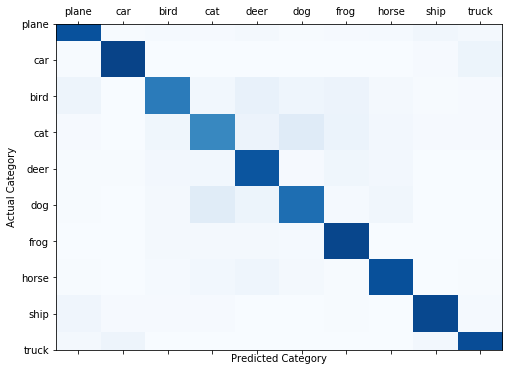

Category   - Accuracy
plane      - 87.2
car        - 92.4
bird       - 71.0
cat        - 66.3
deer       - 85.8
dog        - 75.8
frog       - 91.2
horse      - 87.5
ship       - 90.4
truck      - 88.8

Selected workers

[95  6 24 37 13 29 78 45 31 58 74 57 96 44 84]
Worker 95 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 24 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 13 : is  Stealthy_Attacker
Worker 29 : is  Honest
Worker 78 : is  Honest
Worker 45 : is  Honest
Worker 31 : is  Stealthy_Attacker
Worker 58 : is  Honest
Worker 74 : is  Honest
Worker 57 : is  Honest
Worker 96 : is  Honest
Worker 44 : is  Stealthy_Attacker
Worker 84 : is  Honest

 | Global Training Round : 50 |


Worker 95 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.164399
Train Epoch: 1 [400/500	(81%)]	Loss: 0.286258
Train Epoch: 2 [0/500	(1%)]	Loss: 0.072174
Train Epoch: 2 [400/500	(81%)]	Loss: 0.399337
Train Epoch: 3 [0/500	(1%)]	Loss: 0.092944
Train Epoch: 3 [400/500	(81%)]	Loss: 0.267070
Train Epoch: 4 [0/500	(1%)]	Loss: 0.115408
Train Epoch: 4 [400/500	(81%)]	Loss: 0.241454
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122662
Train Epoch: 5 [400/500	(81%)]	Loss: 0.206849

Worker 95 ends training in Global Round:50 |

Worker 6 starts training in Global Round:50 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  50


Train Epoch: 1 [0/500	(1%)]	Loss: 0.924131
Train Epoch: 1 [400/500	(81%)]	Loss: 0.599116
Train Epoch: 2 [0/500	(1%)]	Loss: 0.459450
Train Epoch: 2 [400/500	(81%)]	Loss: 0.423670
Train Epoch: 3 [0/500	(1%)]	Loss: 0.288652
Train Epoch: 3 [400/500	(81%)]	Loss: 0.323722
Train Epoch: 4 [0/500	(1%)]	Loss: 0.125871
Train Epoch: 4 [400/500	(81%)]	Loss: 0.263735
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145728
Train Epoch: 5 [400/500	(81%)]	Loss: 0.170174

Performed attacks 1
Worker 6 ends training in Global Round:50 |

Worker 24 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.432894
Train Epoch: 1 [400/500	(81%)]	Loss: 0.553453
Train Epoch: 2 [0/500	(1%)]	Loss: 0.127498
Train Epoch: 2 [400/500	(81%)]	Loss: 0.382038
Train Epoch: 3 [0/500	(1%)]	Loss: 0.138424
Train Epoch: 3 [400/500	(81%)]	Loss: 0.227758
Train Epoch: 4 [0/500	(1%)]	Loss: 0.153317
Train Epoch: 4 [400/500	(81%)]	Loss: 0.338509
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075353
Train Epoch: 5 [400/500	(81%)]	Loss: 0.225287

Worker 24 ends training in Global Round:50 |

Worker 37 starts training in Global Round:50 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  50


Train Epoch: 1 [0/500	(1%)]	Loss: 0.935716
Train Epoch: 1 [400/500	(81%)]	Loss: 0.571900
Train Epoch: 2 [0/500	(1%)]	Loss: 0.452164
Train Epoch: 2 [400/500	(81%)]	Loss: 0.817948
Train Epoch: 3 [0/500	(1%)]	Loss: 0.371448
Train Epoch: 3 [400/500	(81%)]	Loss: 0.429384
Train Epoch: 4 [0/500	(1%)]	Loss: 0.259679
Train Epoch: 4 [400/500	(81%)]	Loss: 0.421984
Train Epoch: 5 [0/500	(1%)]	Loss: 0.196829
Train Epoch: 5 [400/500	(81%)]	Loss: 0.251770

Performed attacks 2
Worker 37 ends training in Global Round:50 |

Worker 13 starts training in Global Round:50 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  50


Train Epoch: 1 [0/500	(1%)]	Loss: 1.158029
Train Epoch: 1 [400/500	(81%)]	Loss: 0.701335
Train Epoch: 2 [0/500	(1%)]	Loss: 0.203398
Train Epoch: 2 [400/500	(81%)]	Loss: 0.507459
Train Epoch: 3 [0/500	(1%)]	Loss: 0.281034
Train Epoch: 3 [400/500	(81%)]	Loss: 0.336826
Train Epoch: 4 [0/500	(1%)]	Loss: 0.250534
Train Epoch: 4 [400/500	(81%)]	Loss: 0.300848
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172058
Train Epoch: 5 [400/500	(81%)]	Loss: 0.331711

Performed attacks 3
Worker 13 ends training in Global Round:50 |

Worker 29 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.248068
Train Epoch: 1 [400/500	(81%)]	Loss: 0.350604
Train Epoch: 2 [0/500	(1%)]	Loss: 0.131061
Train Epoch: 2 [400/500	(81%)]	Loss: 0.314737
Train Epoch: 3 [0/500	(1%)]	Loss: 0.182770
Train Epoch: 3 [400/500	(81%)]	Loss: 0.262744
Train Epoch: 4 [0/500	(1%)]	Loss: 0.086831
Train Epoch: 4 [400/500	(81%)]	Loss: 0.200073
Train Epoch: 5 [0/500	(1%)]	Loss: 0.186480
Train Epoch: 5 [400/500	(81%)]	Loss: 0.246875

Worker 29 ends training in Global Round:50 |

Worker 78 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.359965
Train Epoch: 1 [400/500	(81%)]	Loss: 0.212049
Train Epoch: 2 [0/500	(1%)]	Loss: 0.146180
Train Epoch: 2 [400/500	(81%)]	Loss: 0.243923
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127615
Train Epoch: 3 [400/500	(81%)]	Loss: 0.205402
Train Epoch: 4 [0/500	(1%)]	Loss: 0.173153
Train Epoch: 4 [400/500	(81%)]	Loss: 0.244104
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126744
Train Epoch: 5 [400/500	(81%)]	Loss: 0.159355

Worker 78 ends training in Global Round:50 |

Worker 45 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.278379
Train Epoch: 1 [400/500	(81%)]	Loss: 0.444284
Train Epoch: 2 [0/500	(1%)]	Loss: 0.144832
Train Epoch: 2 [400/500	(81%)]	Loss: 0.217912
Train Epoch: 3 [0/500	(1%)]	Loss: 0.202662
Train Epoch: 3 [400/500	(81%)]	Loss: 0.325010
Train Epoch: 4 [0/500	(1%)]	Loss: 0.150412
Train Epoch: 4 [400/500	(81%)]	Loss: 0.475204
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122157
Train Epoch: 5 [400/500	(81%)]	Loss: 0.185262

Worker 45 ends training in Global Round:50 |

Worker 31 starts training in Global Round:50 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  50


Train Epoch: 1 [0/500	(1%)]	Loss: 1.281214
Train Epoch: 1 [400/500	(81%)]	Loss: 0.810927
Train Epoch: 2 [0/500	(1%)]	Loss: 0.445801
Train Epoch: 2 [400/500	(81%)]	Loss: 0.576816
Train Epoch: 3 [0/500	(1%)]	Loss: 0.386570
Train Epoch: 3 [400/500	(81%)]	Loss: 0.385053
Train Epoch: 4 [0/500	(1%)]	Loss: 0.226753
Train Epoch: 4 [400/500	(81%)]	Loss: 0.357830
Train Epoch: 5 [0/500	(1%)]	Loss: 0.190501
Train Epoch: 5 [400/500	(81%)]	Loss: 0.227582

Performed attacks 4
Worker 31 ends training in Global Round:50 |

Worker 58 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.552772
Train Epoch: 1 [400/500	(81%)]	Loss: 0.519842
Train Epoch: 2 [0/500	(1%)]	Loss: 0.164514
Train Epoch: 2 [400/500	(81%)]	Loss: 0.280587
Train Epoch: 3 [0/500	(1%)]	Loss: 0.235385
Train Epoch: 3 [400/500	(81%)]	Loss: 0.211597
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200434
Train Epoch: 4 [400/500	(81%)]	Loss: 0.166328
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122184
Train Epoch: 5 [400/500	(81%)]	Loss: 0.146498

Worker 58 ends training in Global Round:50 |

Worker 74 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.519700
Train Epoch: 1 [400/500	(81%)]	Loss: 0.445875
Train Epoch: 2 [0/500	(1%)]	Loss: 0.271555
Train Epoch: 2 [400/500	(81%)]	Loss: 0.235659
Train Epoch: 3 [0/500	(1%)]	Loss: 0.202304
Train Epoch: 3 [400/500	(81%)]	Loss: 0.112371
Train Epoch: 4 [0/500	(1%)]	Loss: 0.113043
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213225
Train Epoch: 5 [0/500	(1%)]	Loss: 0.104081
Train Epoch: 5 [400/500	(81%)]	Loss: 0.104830

Worker 74 ends training in Global Round:50 |

Worker 57 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.213881
Train Epoch: 1 [400/500	(81%)]	Loss: 0.317588
Train Epoch: 2 [0/500	(1%)]	Loss: 0.358898
Train Epoch: 2 [400/500	(81%)]	Loss: 0.298202
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145370
Train Epoch: 3 [400/500	(81%)]	Loss: 0.348050
Train Epoch: 4 [0/500	(1%)]	Loss: 0.133938
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169354
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138110
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139239

Worker 57 ends training in Global Round:50 |

Worker 96 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.446333
Train Epoch: 1 [400/500	(81%)]	Loss: 0.407800
Train Epoch: 2 [0/500	(1%)]	Loss: 0.294503
Train Epoch: 2 [400/500	(81%)]	Loss: 0.381564
Train Epoch: 3 [0/500	(1%)]	Loss: 0.215213
Train Epoch: 3 [400/500	(81%)]	Loss: 0.222442
Train Epoch: 4 [0/500	(1%)]	Loss: 0.104659
Train Epoch: 4 [400/500	(81%)]	Loss: 0.153468
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126798
Train Epoch: 5 [400/500	(81%)]	Loss: 0.278879

Worker 96 ends training in Global Round:50 |

Worker 44 starts training in Global Round:50 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  50


Train Epoch: 1 [0/500	(1%)]	Loss: 1.535280
Train Epoch: 1 [400/500	(81%)]	Loss: 0.612242
Train Epoch: 2 [0/500	(1%)]	Loss: 0.308271
Train Epoch: 2 [400/500	(81%)]	Loss: 0.418535
Train Epoch: 3 [0/500	(1%)]	Loss: 0.254108
Train Epoch: 3 [400/500	(81%)]	Loss: 0.422017
Train Epoch: 4 [0/500	(1%)]	Loss: 0.235524
Train Epoch: 4 [400/500	(81%)]	Loss: 0.442863
Train Epoch: 5 [0/500	(1%)]	Loss: 0.173595
Train Epoch: 5 [400/500	(81%)]	Loss: 0.216148

Performed attacks 5
Worker 44 ends training in Global Round:50 |

Worker 84 starts training in Global Round:50 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.310112
Train Epoch: 1 [400/500	(81%)]	Loss: 0.557238
Train Epoch: 2 [0/500	(1%)]	Loss: 0.363908
Train Epoch: 2 [400/500	(81%)]	Loss: 0.354794
Train Epoch: 3 [0/500	(1%)]	Loss: 0.133289
Train Epoch: 3 [400/500	(81%)]	Loss: 0.365885
Train Epoch: 4 [0/500	(1%)]	Loss: 0.179074
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169494
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083794
Train Epoch: 5 [400/500	(81%)]	Loss: 0.304425

Worker 84 ends training in Global Round:50 |
Last layer biases  [array([ 0.03227836, -0.03017616, -0.01344225,  0.03391495,  0.03781268,
       -0.01661276,  0.03904172, -0.00586634, -0.01952388, -0.04152446],
      dtype=float32), array([ 0.03291055, -0.03112124, -0.01195976,  0.03842774,  0.0488029 ,
       -0.0129573 ,  0.04000694, -0.0284755 , -0.02049849, -0.03923397],
      dtype=float32), array([ 0.03255476, -0.03063771, -0.01507014,  0.0344125 ,  0.0372285 ,
       -0.01513088,  0.04051478, -0.00666969, -0.02130294, -0.03999729],
      dtyp

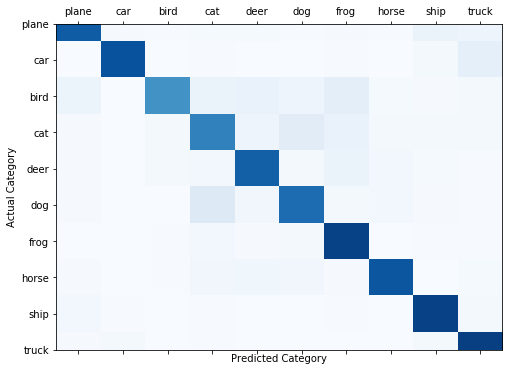

Category   - Accuracy
plane      - 83.0
car        - 87.5
bird       - 62.2
cat        - 68.5
deer       - 81.4
dog        - 76.7
frog       - 92.8
horse      - 85.4
ship       - 93.2
truck      - 94.1

Selected workers

[53 67 82 15 74  2 20 77 29 78 88  1 24 17 37]
Worker 53 : is  Stealthy_Attacker
Worker 67 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 15 : is  Honest
Worker 74 : is  Honest
Worker 2 : is  Honest
Worker 20 : is  Honest
Worker 77 : is  Honest
Worker 29 : is  Honest
Worker 78 : is  Honest
Worker 88 : is  Honest
Worker 1 : is  Honest
Worker 24 : is  Honest
Worker 17 : is  Honest
Worker 37 : is  Stealthy_Attacker

 | Global Training Round : 51 |


Worker 53 starts training in Global Round:51 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  51


Train Epoch: 1 [0/500	(1%)]	Loss: 1.718706
Train Epoch: 1 [400/500	(81%)]	Loss: 0.613670
Train Epoch: 2 [0/500	(1%)]	Loss: 0.399407
Train Epoch: 2 [400/500	(81%)]	Loss: 0.324215
Train Epoch: 3 [0/500	(1%)]	Loss: 0.177559
Train Epoch: 3 [400/500	(81%)]	Loss: 0.170529
Train Epoch: 4 [0/500	(1%)]	Loss: 0.186540
Train Epoch: 4 [400/500	(81%)]	Loss: 0.308183
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157763
Train Epoch: 5 [400/500	(81%)]	Loss: 0.281472

Performed attacks 1
Worker 53 ends training in Global Round:51 |

Worker 67 starts training in Global Round:51 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  51


Train Epoch: 1 [0/500	(1%)]	Loss: 1.664920
Train Epoch: 1 [400/500	(81%)]	Loss: 0.768656
Train Epoch: 2 [0/500	(1%)]	Loss: 0.443391
Train Epoch: 2 [400/500	(81%)]	Loss: 0.528706
Train Epoch: 3 [0/500	(1%)]	Loss: 0.412111
Train Epoch: 3 [400/500	(81%)]	Loss: 0.310130
Train Epoch: 4 [0/500	(1%)]	Loss: 0.202657
Train Epoch: 4 [400/500	(81%)]	Loss: 0.232730
Train Epoch: 5 [0/500	(1%)]	Loss: 0.225253
Train Epoch: 5 [400/500	(81%)]	Loss: 0.201036

Performed attacks 2
Worker 67 ends training in Global Round:51 |

Worker 82 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.274923
Train Epoch: 1 [400/500	(81%)]	Loss: 0.237793
Train Epoch: 2 [0/500	(1%)]	Loss: 0.156254
Train Epoch: 2 [400/500	(81%)]	Loss: 0.254104
Train Epoch: 3 [0/500	(1%)]	Loss: 0.138006
Train Epoch: 3 [400/500	(81%)]	Loss: 0.130003
Train Epoch: 4 [0/500	(1%)]	Loss: 0.130911
Train Epoch: 4 [400/500	(81%)]	Loss: 0.147700
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083981
Train Epoch: 5 [400/500	(81%)]	Loss: 0.172301

Worker 82 ends training in Global Round:51 |

Worker 15 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.635674
Train Epoch: 1 [400/500	(81%)]	Loss: 0.514901
Train Epoch: 2 [0/500	(1%)]	Loss: 0.265958
Train Epoch: 2 [400/500	(81%)]	Loss: 0.318685
Train Epoch: 3 [0/500	(1%)]	Loss: 0.176001
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260761
Train Epoch: 4 [0/500	(1%)]	Loss: 0.375148
Train Epoch: 4 [400/500	(81%)]	Loss: 0.242223
Train Epoch: 5 [0/500	(1%)]	Loss: 0.370515
Train Epoch: 5 [400/500	(81%)]	Loss: 0.188817

Worker 15 ends training in Global Round:51 |

Worker 74 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.276453
Train Epoch: 1 [400/500	(81%)]	Loss: 0.168668
Train Epoch: 2 [0/500	(1%)]	Loss: 0.104432
Train Epoch: 2 [400/500	(81%)]	Loss: 0.203721
Train Epoch: 3 [0/500	(1%)]	Loss: 0.082791
Train Epoch: 3 [400/500	(81%)]	Loss: 0.195780
Train Epoch: 4 [0/500	(1%)]	Loss: 0.249013
Train Epoch: 4 [400/500	(81%)]	Loss: 0.188193
Train Epoch: 5 [0/500	(1%)]	Loss: 0.144502
Train Epoch: 5 [400/500	(81%)]	Loss: 0.250604

Worker 74 ends training in Global Round:51 |

Worker 2 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.280700
Train Epoch: 1 [400/500	(81%)]	Loss: 0.194171
Train Epoch: 2 [0/500	(1%)]	Loss: 0.220094
Train Epoch: 2 [400/500	(81%)]	Loss: 0.252372
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145983
Train Epoch: 3 [400/500	(81%)]	Loss: 0.195004
Train Epoch: 4 [0/500	(1%)]	Loss: 0.092043
Train Epoch: 4 [400/500	(81%)]	Loss: 0.196512
Train Epoch: 5 [0/500	(1%)]	Loss: 0.060013
Train Epoch: 5 [400/500	(81%)]	Loss: 0.181954

Worker 2 ends training in Global Round:51 |

Worker 20 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.304053
Train Epoch: 1 [400/500	(81%)]	Loss: 0.270294
Train Epoch: 2 [0/500	(1%)]	Loss: 0.089111
Train Epoch: 2 [400/500	(81%)]	Loss: 0.184114
Train Epoch: 3 [0/500	(1%)]	Loss: 0.097829
Train Epoch: 3 [400/500	(81%)]	Loss: 0.108072
Train Epoch: 4 [0/500	(1%)]	Loss: 0.087989
Train Epoch: 4 [400/500	(81%)]	Loss: 0.068473
Train Epoch: 5 [0/500	(1%)]	Loss: 0.099042
Train Epoch: 5 [400/500	(81%)]	Loss: 0.309774

Worker 20 ends training in Global Round:51 |

Worker 77 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.539607
Train Epoch: 1 [400/500	(81%)]	Loss: 0.296597
Train Epoch: 2 [0/500	(1%)]	Loss: 0.207757
Train Epoch: 2 [400/500	(81%)]	Loss: 0.501772
Train Epoch: 3 [0/500	(1%)]	Loss: 0.169522
Train Epoch: 3 [400/500	(81%)]	Loss: 0.370953
Train Epoch: 4 [0/500	(1%)]	Loss: 0.186717
Train Epoch: 4 [400/500	(81%)]	Loss: 0.252914
Train Epoch: 5 [0/500	(1%)]	Loss: 0.259165
Train Epoch: 5 [400/500	(81%)]	Loss: 0.311956

Worker 77 ends training in Global Round:51 |

Worker 29 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.305009
Train Epoch: 1 [400/500	(81%)]	Loss: 0.443683
Train Epoch: 2 [0/500	(1%)]	Loss: 0.231778
Train Epoch: 2 [400/500	(81%)]	Loss: 0.237045
Train Epoch: 3 [0/500	(1%)]	Loss: 0.194834
Train Epoch: 3 [400/500	(81%)]	Loss: 0.245109
Train Epoch: 4 [0/500	(1%)]	Loss: 0.205079
Train Epoch: 4 [400/500	(81%)]	Loss: 0.191721
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075378
Train Epoch: 5 [400/500	(81%)]	Loss: 0.113114

Worker 29 ends training in Global Round:51 |

Worker 78 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.185717
Train Epoch: 1 [400/500	(81%)]	Loss: 0.328269
Train Epoch: 2 [0/500	(1%)]	Loss: 0.111879
Train Epoch: 2 [400/500	(81%)]	Loss: 0.312392
Train Epoch: 3 [0/500	(1%)]	Loss: 0.109415
Train Epoch: 3 [400/500	(81%)]	Loss: 0.099463
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083900
Train Epoch: 4 [400/500	(81%)]	Loss: 0.269255
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155320
Train Epoch: 5 [400/500	(81%)]	Loss: 0.156080

Worker 78 ends training in Global Round:51 |

Worker 88 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.456296
Train Epoch: 1 [400/500	(81%)]	Loss: 0.442141
Train Epoch: 2 [0/500	(1%)]	Loss: 0.341760
Train Epoch: 2 [400/500	(81%)]	Loss: 0.315027
Train Epoch: 3 [0/500	(1%)]	Loss: 0.205145
Train Epoch: 3 [400/500	(81%)]	Loss: 0.241939
Train Epoch: 4 [0/500	(1%)]	Loss: 0.138673
Train Epoch: 4 [400/500	(81%)]	Loss: 0.351369
Train Epoch: 5 [0/500	(1%)]	Loss: 0.151837
Train Epoch: 5 [400/500	(81%)]	Loss: 0.212869

Worker 88 ends training in Global Round:51 |

Worker 1 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.572909
Train Epoch: 1 [400/500	(81%)]	Loss: 0.425406
Train Epoch: 2 [0/500	(1%)]	Loss: 0.276255
Train Epoch: 2 [400/500	(81%)]	Loss: 0.506386
Train Epoch: 3 [0/500	(1%)]	Loss: 0.114263
Train Epoch: 3 [400/500	(81%)]	Loss: 0.261839
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156095
Train Epoch: 4 [400/500	(81%)]	Loss: 0.222033
Train Epoch: 5 [0/500	(1%)]	Loss: 0.048750
Train Epoch: 5 [400/500	(81%)]	Loss: 0.228949

Worker 1 ends training in Global Round:51 |

Worker 24 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.310107
Train Epoch: 1 [400/500	(81%)]	Loss: 0.382453
Train Epoch: 2 [0/500	(1%)]	Loss: 0.170435
Train Epoch: 2 [400/500	(81%)]	Loss: 0.108531
Train Epoch: 3 [0/500	(1%)]	Loss: 0.048581
Train Epoch: 3 [400/500	(81%)]	Loss: 0.179761
Train Epoch: 4 [0/500	(1%)]	Loss: 0.174041
Train Epoch: 4 [400/500	(81%)]	Loss: 0.150058
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114551
Train Epoch: 5 [400/500	(81%)]	Loss: 0.152633

Worker 24 ends training in Global Round:51 |

Worker 17 starts training in Global Round:51 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.410309
Train Epoch: 1 [400/500	(81%)]	Loss: 0.729587
Train Epoch: 2 [0/500	(1%)]	Loss: 0.268849
Train Epoch: 2 [400/500	(81%)]	Loss: 0.494102
Train Epoch: 3 [0/500	(1%)]	Loss: 0.278782
Train Epoch: 3 [400/500	(81%)]	Loss: 0.268940
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164081
Train Epoch: 4 [400/500	(81%)]	Loss: 0.280126
Train Epoch: 5 [0/500	(1%)]	Loss: 0.213824
Train Epoch: 5 [400/500	(81%)]	Loss: 0.189376

Worker 17 ends training in Global Round:51 |

Worker 37 starts training in Global Round:51 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  51


Train Epoch: 1 [0/500	(1%)]	Loss: 1.113746
Train Epoch: 1 [400/500	(81%)]	Loss: 0.626938
Train Epoch: 2 [0/500	(1%)]	Loss: 0.434299
Train Epoch: 2 [400/500	(81%)]	Loss: 0.582700
Train Epoch: 3 [0/500	(1%)]	Loss: 0.360487
Train Epoch: 3 [400/500	(81%)]	Loss: 0.368054
Train Epoch: 4 [0/500	(1%)]	Loss: 0.163457
Train Epoch: 4 [400/500	(81%)]	Loss: 0.197955
Train Epoch: 5 [0/500	(1%)]	Loss: 0.199650
Train Epoch: 5 [400/500	(81%)]	Loss: 0.278954

Performed attacks 3
Worker 37 ends training in Global Round:51 |
Last layer biases  [array([ 0.0341948 , -0.03144005, -0.01068884,  0.03796788,  0.04722983,
       -0.01454123,  0.03937184, -0.03080588, -0.01872403, -0.03666244],
      dtype=float32), array([ 0.03906328, -0.03206735, -0.01305019,  0.03962316,  0.04758805,
       -0.01343277,  0.03914956, -0.02932906, -0.02001049, -0.04163228],
      dtype=float32), array([ 0.03240955, -0.03191812, -0.01434842,  0.03544135,  0.03948198,
       -0.01644523,  0.03910619, -0.00740626, -0.02184304, -0.0

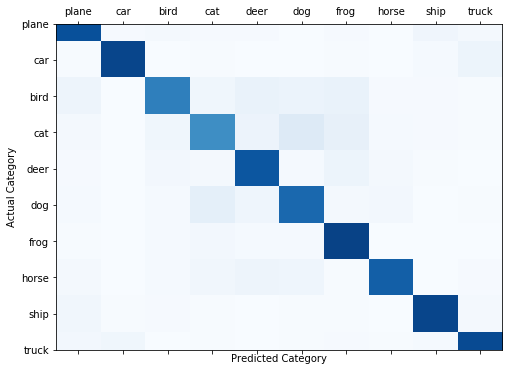

Category   - Accuracy
plane      - 87.8
car        - 91.6
bird       - 69.5
cat        - 63.9
deer       - 85.3
dog        - 78.5
frog       - 92.6
horse      - 81.9
ship       - 91.6
truck      - 89.6

Selected workers

[  5  54  38 100   6  16  57  35  49  82  97  80  89  36  44]
Worker 5 : is  Honest
Worker 54 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 16 : is  Stealthy_Attacker
Worker 57 : is  Honest
Worker 35 : is  Honest
Worker 49 : is  Honest
Worker 82 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 80 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 44 : is  Stealthy_Attacker

 | Global Training Round : 52 |


Worker 5 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.501242
Train Epoch: 1 [400/500	(81%)]	Loss: 0.813337
Train Epoch: 2 [0/500	(1%)]	Loss: 0.277643
Train Epoch: 2 [400/500	(81%)]	Loss: 0.393643
Train Epoch: 3 [0/500	(1%)]	Loss: 0.256852
Train Epoch: 3 [400/500	(81%)]	Loss: 0.433504
Train Epoch: 4 [0/500	(1%)]	Loss: 0.172564
Train Epoch: 4 [400/500	(81%)]	Loss: 0.159577
Train Epoch: 5 [0/500	(1%)]	Loss: 0.142505
Train Epoch: 5 [400/500	(81%)]	Loss: 0.345387

Worker 5 ends training in Global Round:52 |

Worker 54 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.194019
Train Epoch: 1 [400/500	(81%)]	Loss: 0.338426
Train Epoch: 2 [0/500	(1%)]	Loss: 0.178012
Train Epoch: 2 [400/500	(81%)]	Loss: 0.126076
Train Epoch: 3 [0/500	(1%)]	Loss: 0.110223
Train Epoch: 3 [400/500	(81%)]	Loss: 0.239569
Train Epoch: 4 [0/500	(1%)]	Loss: 0.195199
Train Epoch: 4 [400/500	(81%)]	Loss: 0.154514
Train Epoch: 5 [0/500	(1%)]	Loss: 0.117860
Train Epoch: 5 [400/500	(81%)]	Loss: 0.247865

Worker 54 ends training in Global Round:52 |

Worker 38 starts training in Global Round:52 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  52


Train Epoch: 1 [0/500	(1%)]	Loss: 1.612681
Train Epoch: 1 [400/500	(81%)]	Loss: 0.665314
Train Epoch: 2 [0/500	(1%)]	Loss: 0.259883
Train Epoch: 2 [400/500	(81%)]	Loss: 0.533523
Train Epoch: 3 [0/500	(1%)]	Loss: 0.343737
Train Epoch: 3 [400/500	(81%)]	Loss: 0.324996
Train Epoch: 4 [0/500	(1%)]	Loss: 0.243339
Train Epoch: 4 [400/500	(81%)]	Loss: 0.283677
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157691
Train Epoch: 5 [400/500	(81%)]	Loss: 0.387754

Performed attacks 1
Worker 38 ends training in Global Round:52 |

Worker 100 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.360779
Train Epoch: 1 [400/500	(81%)]	Loss: 0.314504
Train Epoch: 2 [0/500	(1%)]	Loss: 0.247048
Train Epoch: 2 [400/500	(81%)]	Loss: 0.265131
Train Epoch: 3 [0/500	(1%)]	Loss: 0.181907
Train Epoch: 3 [400/500	(81%)]	Loss: 0.142829
Train Epoch: 4 [0/500	(1%)]	Loss: 0.059063
Train Epoch: 4 [400/500	(81%)]	Loss: 0.217859
Train Epoch: 5 [0/500	(1%)]	Loss: 0.061302
Train Epoch: 5 [400/500	(81%)]	Loss: 0.123907

Worker 100 ends training in Global Round:52 |

Worker 6 starts training in Global Round:52 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  52


Train Epoch: 1 [0/500	(1%)]	Loss: 1.485379
Train Epoch: 1 [400/500	(81%)]	Loss: 0.681786
Train Epoch: 2 [0/500	(1%)]	Loss: 0.270931
Train Epoch: 2 [400/500	(81%)]	Loss: 0.477123
Train Epoch: 3 [0/500	(1%)]	Loss: 0.380870
Train Epoch: 3 [400/500	(81%)]	Loss: 0.405584
Train Epoch: 4 [0/500	(1%)]	Loss: 0.178298
Train Epoch: 4 [400/500	(81%)]	Loss: 0.387300
Train Epoch: 5 [0/500	(1%)]	Loss: 0.215608
Train Epoch: 5 [400/500	(81%)]	Loss: 0.246875

Performed attacks 2
Worker 6 ends training in Global Round:52 |

Worker 16 starts training in Global Round:52 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  52


Train Epoch: 1 [0/500	(1%)]	Loss: 1.356971
Train Epoch: 1 [400/500	(81%)]	Loss: 0.827647
Train Epoch: 2 [0/500	(1%)]	Loss: 0.372486
Train Epoch: 2 [400/500	(81%)]	Loss: 0.491969
Train Epoch: 3 [0/500	(1%)]	Loss: 0.197625
Train Epoch: 3 [400/500	(81%)]	Loss: 0.386137
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187121
Train Epoch: 4 [400/500	(81%)]	Loss: 0.380828
Train Epoch: 5 [0/500	(1%)]	Loss: 0.254146
Train Epoch: 5 [400/500	(81%)]	Loss: 0.479813

Performed attacks 3
Worker 16 ends training in Global Round:52 |

Worker 57 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.248680
Train Epoch: 1 [400/500	(81%)]	Loss: 0.283471
Train Epoch: 2 [0/500	(1%)]	Loss: 0.204763
Train Epoch: 2 [400/500	(81%)]	Loss: 0.254583
Train Epoch: 3 [0/500	(1%)]	Loss: 0.194674
Train Epoch: 3 [400/500	(81%)]	Loss: 0.182251
Train Epoch: 4 [0/500	(1%)]	Loss: 0.246989
Train Epoch: 4 [400/500	(81%)]	Loss: 0.264107
Train Epoch: 5 [0/500	(1%)]	Loss: 0.104464
Train Epoch: 5 [400/500	(81%)]	Loss: 0.223234

Worker 57 ends training in Global Round:52 |

Worker 35 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.401689
Train Epoch: 1 [400/500	(81%)]	Loss: 0.360104
Train Epoch: 2 [0/500	(1%)]	Loss: 0.133778
Train Epoch: 2 [400/500	(81%)]	Loss: 0.449404
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127389
Train Epoch: 3 [400/500	(81%)]	Loss: 0.182453
Train Epoch: 4 [0/500	(1%)]	Loss: 0.161587
Train Epoch: 4 [400/500	(81%)]	Loss: 0.238460
Train Epoch: 5 [0/500	(1%)]	Loss: 0.202865
Train Epoch: 5 [400/500	(81%)]	Loss: 0.216317

Worker 35 ends training in Global Round:52 |

Worker 49 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.209621
Train Epoch: 1 [400/500	(81%)]	Loss: 0.411185
Train Epoch: 2 [0/500	(1%)]	Loss: 0.269103
Train Epoch: 2 [400/500	(81%)]	Loss: 0.145509
Train Epoch: 3 [0/500	(1%)]	Loss: 0.097947
Train Epoch: 3 [400/500	(81%)]	Loss: 0.196570
Train Epoch: 4 [0/500	(1%)]	Loss: 0.107924
Train Epoch: 4 [400/500	(81%)]	Loss: 0.186942
Train Epoch: 5 [0/500	(1%)]	Loss: 0.135698
Train Epoch: 5 [400/500	(81%)]	Loss: 0.182962

Worker 49 ends training in Global Round:52 |

Worker 82 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.133025
Train Epoch: 1 [400/500	(81%)]	Loss: 0.224395
Train Epoch: 2 [0/500	(1%)]	Loss: 0.084925
Train Epoch: 2 [400/500	(81%)]	Loss: 0.168211
Train Epoch: 3 [0/500	(1%)]	Loss: 0.092587
Train Epoch: 3 [400/500	(81%)]	Loss: 0.125681
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105382
Train Epoch: 4 [400/500	(81%)]	Loss: 0.096393
Train Epoch: 5 [0/500	(1%)]	Loss: 0.096097
Train Epoch: 5 [400/500	(81%)]	Loss: 0.197154

Worker 82 ends training in Global Round:52 |

Worker 97 starts training in Global Round:52 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  52


Train Epoch: 1 [0/500	(1%)]	Loss: 0.995887
Train Epoch: 1 [400/500	(81%)]	Loss: 0.766935
Train Epoch: 2 [0/500	(1%)]	Loss: 0.360909
Train Epoch: 2 [400/500	(81%)]	Loss: 0.681314
Train Epoch: 3 [0/500	(1%)]	Loss: 0.289903
Train Epoch: 3 [400/500	(81%)]	Loss: 0.312353
Train Epoch: 4 [0/500	(1%)]	Loss: 0.240281
Train Epoch: 4 [400/500	(81%)]	Loss: 0.270967
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160069
Train Epoch: 5 [400/500	(81%)]	Loss: 0.278829

Performed attacks 4
Worker 97 ends training in Global Round:52 |

Worker 80 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.266263
Train Epoch: 1 [400/500	(81%)]	Loss: 0.336140
Train Epoch: 2 [0/500	(1%)]	Loss: 0.096973
Train Epoch: 2 [400/500	(81%)]	Loss: 0.255757
Train Epoch: 3 [0/500	(1%)]	Loss: 0.245214
Train Epoch: 3 [400/500	(81%)]	Loss: 0.111159
Train Epoch: 4 [0/500	(1%)]	Loss: 0.136674
Train Epoch: 4 [400/500	(81%)]	Loss: 0.260808
Train Epoch: 5 [0/500	(1%)]	Loss: 0.031191
Train Epoch: 5 [400/500	(81%)]	Loss: 0.217444

Worker 80 ends training in Global Round:52 |

Worker 89 starts training in Global Round:52 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  52


Train Epoch: 1 [0/500	(1%)]	Loss: 1.400805
Train Epoch: 1 [400/500	(81%)]	Loss: 0.678927
Train Epoch: 2 [0/500	(1%)]	Loss: 0.397720
Train Epoch: 2 [400/500	(81%)]	Loss: 0.343625
Train Epoch: 3 [0/500	(1%)]	Loss: 0.301840
Train Epoch: 3 [400/500	(81%)]	Loss: 0.401694
Train Epoch: 4 [0/500	(1%)]	Loss: 0.234553
Train Epoch: 4 [400/500	(81%)]	Loss: 0.221917
Train Epoch: 5 [0/500	(1%)]	Loss: 0.181329
Train Epoch: 5 [400/500	(81%)]	Loss: 0.256419

Performed attacks 5
Worker 89 ends training in Global Round:52 |

Worker 36 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.336633
Train Epoch: 1 [400/500	(81%)]	Loss: 0.343606
Train Epoch: 2 [0/500	(1%)]	Loss: 0.191186
Train Epoch: 2 [400/500	(81%)]	Loss: 0.298444
Train Epoch: 3 [0/500	(1%)]	Loss: 0.184468
Train Epoch: 3 [400/500	(81%)]	Loss: 0.225573
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156421
Train Epoch: 4 [400/500	(81%)]	Loss: 0.172520
Train Epoch: 5 [0/500	(1%)]	Loss: 0.166820
Train Epoch: 5 [400/500	(81%)]	Loss: 0.158053

Worker 36 ends training in Global Round:52 |

Worker 44 starts training in Global Round:52 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.587994
Train Epoch: 1 [400/500	(81%)]	Loss: 0.568523
Train Epoch: 2 [0/500	(1%)]	Loss: 0.416958
Train Epoch: 2 [400/500	(81%)]	Loss: 0.456167
Train Epoch: 3 [0/500	(1%)]	Loss: 0.237530
Train Epoch: 3 [400/500	(81%)]	Loss: 0.336892
Train Epoch: 4 [0/500	(1%)]	Loss: 0.254478
Train Epoch: 4 [400/500	(81%)]	Loss: 0.176604
Train Epoch: 5 [0/500	(1%)]	Loss: 0.183777
Train Epoch: 5 [400/500	(81%)]	Loss: 0.159631

Worker 44 ends training in Global Round:52 |
Last layer biases  [array([ 0.03383322, -0.03054794, -0.01483239,  0.03715087,  0.03923684,
       -0.0179923 ,  0.03764125, -0.00608223, -0.02260373, -0.03990171],
      dtype=float32), array([ 0.03620121, -0.03001496, -0.01354885,  0.03580429,  0.03879836,
       -0.01839571,  0.03772911, -0.00759564, -0.02371212, -0.0393638 ],
      dtype=float32), array([ 0.03445166, -0.03087836, -0.01024181,  0.0383888 ,  0.04871798,
       -0.01356568,  0.03856771, -0.0293552 , -0.02140716, -0.03877605],
      dtyp

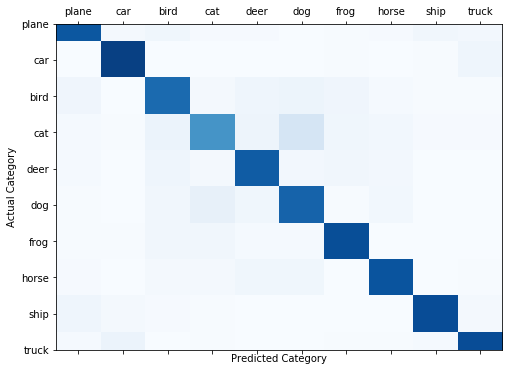

Category   - Accuracy
plane      - 85.0
car        - 93.5
bird       - 77.6
cat        - 61.7
deer       - 82.9
dog        - 80.1
frog       - 88.6
horse      - 86.2
ship       - 89.0
truck      - 89.0

Selected workers

[85 11 80 78 64 71 55 28 57 44  4 16 46 62 88]
Worker 85 : is  Honest
Worker 11 : is  Honest
Worker 80 : is  Honest
Worker 78 : is  Honest
Worker 64 : is  Honest
Worker 71 : is  Stealthy_Attacker
Worker 55 : is  Stealthy_Attacker
Worker 28 : is  Stealthy_Attacker
Worker 57 : is  Honest
Worker 44 : is  Stealthy_Attacker
Worker 4 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 46 : is  Stealthy_Attacker
Worker 62 : is  Honest
Worker 88 : is  Honest

 | Global Training Round : 53 |


Worker 85 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.344440
Train Epoch: 1 [400/500	(81%)]	Loss: 0.591842
Train Epoch: 2 [0/500	(1%)]	Loss: 0.211833
Train Epoch: 2 [400/500	(81%)]	Loss: 0.377520
Train Epoch: 3 [0/500	(1%)]	Loss: 0.202615
Train Epoch: 3 [400/500	(81%)]	Loss: 0.305405
Train Epoch: 4 [0/500	(1%)]	Loss: 0.235901
Train Epoch: 4 [400/500	(81%)]	Loss: 0.291850
Train Epoch: 5 [0/500	(1%)]	Loss: 0.182835
Train Epoch: 5 [400/500	(81%)]	Loss: 0.360317

Worker 85 ends training in Global Round:53 |

Worker 11 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.515303
Train Epoch: 1 [400/500	(81%)]	Loss: 0.408988
Train Epoch: 2 [0/500	(1%)]	Loss: 0.262970
Train Epoch: 2 [400/500	(81%)]	Loss: 0.298297
Train Epoch: 3 [0/500	(1%)]	Loss: 0.174602
Train Epoch: 3 [400/500	(81%)]	Loss: 0.287792
Train Epoch: 4 [0/500	(1%)]	Loss: 0.222494
Train Epoch: 4 [400/500	(81%)]	Loss: 0.339241
Train Epoch: 5 [0/500	(1%)]	Loss: 0.179713
Train Epoch: 5 [400/500	(81%)]	Loss: 0.405415

Worker 11 ends training in Global Round:53 |

Worker 80 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.164794
Train Epoch: 1 [400/500	(81%)]	Loss: 0.148078
Train Epoch: 2 [0/500	(1%)]	Loss: 0.108451
Train Epoch: 2 [400/500	(81%)]	Loss: 0.201819
Train Epoch: 3 [0/500	(1%)]	Loss: 0.066216
Train Epoch: 3 [400/500	(81%)]	Loss: 0.178057
Train Epoch: 4 [0/500	(1%)]	Loss: 0.054736
Train Epoch: 4 [400/500	(81%)]	Loss: 0.090895
Train Epoch: 5 [0/500	(1%)]	Loss: 0.033222
Train Epoch: 5 [400/500	(81%)]	Loss: 0.129126

Worker 80 ends training in Global Round:53 |

Worker 78 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.252896
Train Epoch: 1 [400/500	(81%)]	Loss: 0.323195
Train Epoch: 2 [0/500	(1%)]	Loss: 0.121469
Train Epoch: 2 [400/500	(81%)]	Loss: 0.217510
Train Epoch: 3 [0/500	(1%)]	Loss: 0.128390
Train Epoch: 3 [400/500	(81%)]	Loss: 0.320187
Train Epoch: 4 [0/500	(1%)]	Loss: 0.104493
Train Epoch: 4 [400/500	(81%)]	Loss: 0.063332
Train Epoch: 5 [0/500	(1%)]	Loss: 0.076426
Train Epoch: 5 [400/500	(81%)]	Loss: 0.184768

Worker 78 ends training in Global Round:53 |

Worker 64 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.373914
Train Epoch: 1 [400/500	(81%)]	Loss: 0.639809
Train Epoch: 2 [0/500	(1%)]	Loss: 0.213378
Train Epoch: 2 [400/500	(81%)]	Loss: 0.389197
Train Epoch: 3 [0/500	(1%)]	Loss: 0.217176
Train Epoch: 3 [400/500	(81%)]	Loss: 0.284979
Train Epoch: 4 [0/500	(1%)]	Loss: 0.233568
Train Epoch: 4 [400/500	(81%)]	Loss: 0.280855
Train Epoch: 5 [0/500	(1%)]	Loss: 0.116715
Train Epoch: 5 [400/500	(81%)]	Loss: 0.140134

Worker 64 ends training in Global Round:53 |

Worker 71 starts training in Global Round:53 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  53


Train Epoch: 1 [0/500	(1%)]	Loss: 1.136123
Train Epoch: 1 [400/500	(81%)]	Loss: 0.696484
Train Epoch: 2 [0/500	(1%)]	Loss: 0.370945
Train Epoch: 2 [400/500	(81%)]	Loss: 0.462536
Train Epoch: 3 [0/500	(1%)]	Loss: 0.274855
Train Epoch: 3 [400/500	(81%)]	Loss: 0.520146
Train Epoch: 4 [0/500	(1%)]	Loss: 0.215453
Train Epoch: 4 [400/500	(81%)]	Loss: 0.375818
Train Epoch: 5 [0/500	(1%)]	Loss: 0.251103
Train Epoch: 5 [400/500	(81%)]	Loss: 0.193309

Performed attacks 1
Worker 71 ends training in Global Round:53 |

Worker 55 starts training in Global Round:53 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  53


Train Epoch: 1 [0/500	(1%)]	Loss: 1.171667
Train Epoch: 1 [400/500	(81%)]	Loss: 0.752452
Train Epoch: 2 [0/500	(1%)]	Loss: 0.275748
Train Epoch: 2 [400/500	(81%)]	Loss: 0.486689
Train Epoch: 3 [0/500	(1%)]	Loss: 0.300508
Train Epoch: 3 [400/500	(81%)]	Loss: 0.278694
Train Epoch: 4 [0/500	(1%)]	Loss: 0.269788
Train Epoch: 4 [400/500	(81%)]	Loss: 0.293759
Train Epoch: 5 [0/500	(1%)]	Loss: 0.211739
Train Epoch: 5 [400/500	(81%)]	Loss: 0.266817

Performed attacks 2
Worker 55 ends training in Global Round:53 |

Worker 28 starts training in Global Round:53 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  53


Train Epoch: 1 [0/500	(1%)]	Loss: 1.189456
Train Epoch: 1 [400/500	(81%)]	Loss: 0.501852
Train Epoch: 2 [0/500	(1%)]	Loss: 0.319134
Train Epoch: 2 [400/500	(81%)]	Loss: 0.516527
Train Epoch: 3 [0/500	(1%)]	Loss: 0.259950
Train Epoch: 3 [400/500	(81%)]	Loss: 0.405121
Train Epoch: 4 [0/500	(1%)]	Loss: 0.257248
Train Epoch: 4 [400/500	(81%)]	Loss: 0.164543
Train Epoch: 5 [0/500	(1%)]	Loss: 0.116108
Train Epoch: 5 [400/500	(81%)]	Loss: 0.261958

Performed attacks 3
Worker 28 ends training in Global Round:53 |

Worker 57 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.225786
Train Epoch: 1 [400/500	(81%)]	Loss: 0.273426
Train Epoch: 2 [0/500	(1%)]	Loss: 0.111405
Train Epoch: 2 [400/500	(81%)]	Loss: 0.212739
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127017
Train Epoch: 3 [400/500	(81%)]	Loss: 0.087339
Train Epoch: 4 [0/500	(1%)]	Loss: 0.045236
Train Epoch: 4 [400/500	(81%)]	Loss: 0.148054
Train Epoch: 5 [0/500	(1%)]	Loss: 0.065753
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191672

Worker 57 ends training in Global Round:53 |

Worker 44 starts training in Global Round:53 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  53


Train Epoch: 1 [0/500	(1%)]	Loss: 1.317999
Train Epoch: 1 [400/500	(81%)]	Loss: 0.575887
Train Epoch: 2 [0/500	(1%)]	Loss: 0.297297
Train Epoch: 2 [400/500	(81%)]	Loss: 0.335451
Train Epoch: 3 [0/500	(1%)]	Loss: 0.329633
Train Epoch: 3 [400/500	(81%)]	Loss: 0.386217
Train Epoch: 4 [0/500	(1%)]	Loss: 0.252213
Train Epoch: 4 [400/500	(81%)]	Loss: 0.312998
Train Epoch: 5 [0/500	(1%)]	Loss: 0.207750
Train Epoch: 5 [400/500	(81%)]	Loss: 0.312779

Performed attacks 4
Worker 44 ends training in Global Round:53 |

Worker 4 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.230909
Train Epoch: 1 [400/500	(81%)]	Loss: 0.355303
Train Epoch: 2 [0/500	(1%)]	Loss: 0.183755
Train Epoch: 2 [400/500	(81%)]	Loss: 0.217984
Train Epoch: 3 [0/500	(1%)]	Loss: 0.147461
Train Epoch: 3 [400/500	(81%)]	Loss: 0.368298
Train Epoch: 4 [0/500	(1%)]	Loss: 0.078065
Train Epoch: 4 [400/500	(81%)]	Loss: 0.238174
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193575
Train Epoch: 5 [400/500	(81%)]	Loss: 0.136825

Worker 4 ends training in Global Round:53 |

Worker 16 starts training in Global Round:53 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  53


Train Epoch: 1 [0/500	(1%)]	Loss: 1.258853
Train Epoch: 1 [400/500	(81%)]	Loss: 0.604550
Train Epoch: 2 [0/500	(1%)]	Loss: 0.524249
Train Epoch: 2 [400/500	(81%)]	Loss: 0.563419
Train Epoch: 3 [0/500	(1%)]	Loss: 0.454817
Train Epoch: 3 [400/500	(81%)]	Loss: 0.355949
Train Epoch: 4 [0/500	(1%)]	Loss: 0.316175
Train Epoch: 4 [400/500	(81%)]	Loss: 0.404367
Train Epoch: 5 [0/500	(1%)]	Loss: 0.260060
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242985

Performed attacks 5
Worker 16 ends training in Global Round:53 |

Worker 46 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.560110
Train Epoch: 1 [400/500	(81%)]	Loss: 0.865286
Train Epoch: 2 [0/500	(1%)]	Loss: 0.217497
Train Epoch: 2 [400/500	(81%)]	Loss: 0.384015
Train Epoch: 3 [0/500	(1%)]	Loss: 0.299472
Train Epoch: 3 [400/500	(81%)]	Loss: 0.297693
Train Epoch: 4 [0/500	(1%)]	Loss: 0.238921
Train Epoch: 4 [400/500	(81%)]	Loss: 0.145155
Train Epoch: 5 [0/500	(1%)]	Loss: 0.213634
Train Epoch: 5 [400/500	(81%)]	Loss: 0.130222

Worker 46 ends training in Global Round:53 |

Worker 62 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.405809
Train Epoch: 1 [400/500	(81%)]	Loss: 0.903245
Train Epoch: 2 [0/500	(1%)]	Loss: 0.423841
Train Epoch: 2 [400/500	(81%)]	Loss: 0.575283
Train Epoch: 3 [0/500	(1%)]	Loss: 0.279911
Train Epoch: 3 [400/500	(81%)]	Loss: 0.372424
Train Epoch: 4 [0/500	(1%)]	Loss: 0.275484
Train Epoch: 4 [400/500	(81%)]	Loss: 0.295911
Train Epoch: 5 [0/500	(1%)]	Loss: 0.273427
Train Epoch: 5 [400/500	(81%)]	Loss: 0.333071

Worker 62 ends training in Global Round:53 |

Worker 88 starts training in Global Round:53 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.462586
Train Epoch: 1 [400/500	(81%)]	Loss: 0.393347
Train Epoch: 2 [0/500	(1%)]	Loss: 0.241520
Train Epoch: 2 [400/500	(81%)]	Loss: 0.309364
Train Epoch: 3 [0/500	(1%)]	Loss: 0.235921
Train Epoch: 3 [400/500	(81%)]	Loss: 0.147629
Train Epoch: 4 [0/500	(1%)]	Loss: 0.181131
Train Epoch: 4 [400/500	(81%)]	Loss: 0.231039
Train Epoch: 5 [0/500	(1%)]	Loss: 0.046142
Train Epoch: 5 [400/500	(81%)]	Loss: 0.170793

Worker 88 ends training in Global Round:53 |
Last layer biases  [array([ 0.03379017, -0.03256975, -0.01414132,  0.0357883 ,  0.04087975,
       -0.01543088,  0.03605508, -0.00672854, -0.02083108, -0.04090983],
      dtype=float32), array([ 0.03399607, -0.03210519, -0.01430809,  0.03823606,  0.03807979,
       -0.01769334,  0.03885636, -0.00737049, -0.02196254, -0.03982675],
      dtype=float32), array([ 0.03345134, -0.03078885, -0.01505497,  0.03653749,  0.03956307,
       -0.01793942,  0.0381376 , -0.00716283, -0.01945308, -0.04138845],
      dtyp

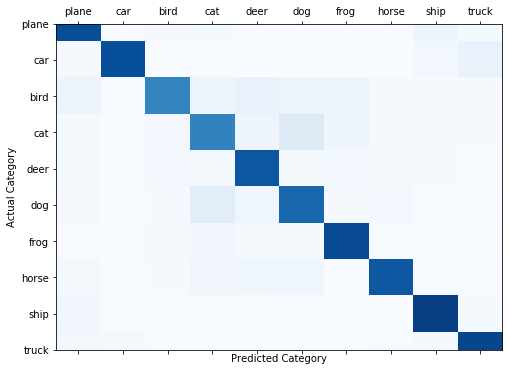

Category   - Accuracy
plane      - 88.6
car        - 88.2
bird       - 67.4
cat        - 68.1
deer       - 84.9
dog        - 79.2
frog       - 89.7
horse      - 84.5
ship       - 93.8
truck      - 91.3

Selected workers

[48 92 79 45 23 57 34 99 24 62 46 27  8 96 35]
Worker 48 : is  Honest
Worker 92 : is  Stealthy_Attacker
Worker 79 : is  Stealthy_Attacker
Worker 45 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 57 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 24 : is  Honest
Worker 62 : is  Honest
Worker 46 : is  Stealthy_Attacker
Worker 27 : is  Stealthy_Attacker
Worker 8 : is  Honest
Worker 96 : is  Honest
Worker 35 : is  Honest

 | Global Training Round : 54 |


Worker 48 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.283771
Train Epoch: 1 [400/500	(81%)]	Loss: 0.333008
Train Epoch: 2 [0/500	(1%)]	Loss: 0.285810
Train Epoch: 2 [400/500	(81%)]	Loss: 0.114374
Train Epoch: 3 [0/500	(1%)]	Loss: 0.110004
Train Epoch: 3 [400/500	(81%)]	Loss: 0.313385
Train Epoch: 4 [0/500	(1%)]	Loss: 0.144434
Train Epoch: 4 [400/500	(81%)]	Loss: 0.152151
Train Epoch: 5 [0/500	(1%)]	Loss: 0.164090
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135689

Worker 48 ends training in Global Round:54 |

Worker 92 starts training in Global Round:54 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  54


Train Epoch: 1 [0/500	(1%)]	Loss: 1.291436
Train Epoch: 1 [400/500	(81%)]	Loss: 0.696059
Train Epoch: 2 [0/500	(1%)]	Loss: 0.252295
Train Epoch: 2 [400/500	(81%)]	Loss: 0.524911
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261391
Train Epoch: 3 [400/500	(81%)]	Loss: 0.355369
Train Epoch: 4 [0/500	(1%)]	Loss: 0.242624
Train Epoch: 4 [400/500	(81%)]	Loss: 0.418513
Train Epoch: 5 [0/500	(1%)]	Loss: 0.208407
Train Epoch: 5 [400/500	(81%)]	Loss: 0.141780

Performed attacks 1
Worker 92 ends training in Global Round:54 |

Worker 79 starts training in Global Round:54 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  54


Train Epoch: 1 [0/500	(1%)]	Loss: 1.118957
Train Epoch: 1 [400/500	(81%)]	Loss: 0.431559
Train Epoch: 2 [0/500	(1%)]	Loss: 0.410833
Train Epoch: 2 [400/500	(81%)]	Loss: 0.456836
Train Epoch: 3 [0/500	(1%)]	Loss: 0.347794
Train Epoch: 3 [400/500	(81%)]	Loss: 0.406870
Train Epoch: 4 [0/500	(1%)]	Loss: 0.284874
Train Epoch: 4 [400/500	(81%)]	Loss: 0.301056
Train Epoch: 5 [0/500	(1%)]	Loss: 0.220487
Train Epoch: 5 [400/500	(81%)]	Loss: 0.315479

Performed attacks 2
Worker 79 ends training in Global Round:54 |

Worker 45 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.383441
Train Epoch: 1 [400/500	(81%)]	Loss: 0.191798
Train Epoch: 2 [0/500	(1%)]	Loss: 0.157030
Train Epoch: 2 [400/500	(81%)]	Loss: 0.148506
Train Epoch: 3 [0/500	(1%)]	Loss: 0.289582
Train Epoch: 3 [400/500	(81%)]	Loss: 0.212168
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095390
Train Epoch: 4 [400/500	(81%)]	Loss: 0.126048
Train Epoch: 5 [0/500	(1%)]	Loss: 0.072649
Train Epoch: 5 [400/500	(81%)]	Loss: 0.157872

Worker 45 ends training in Global Round:54 |

Worker 23 starts training in Global Round:54 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  54


Train Epoch: 1 [0/500	(1%)]	Loss: 1.216042
Train Epoch: 1 [400/500	(81%)]	Loss: 0.397251
Train Epoch: 2 [0/500	(1%)]	Loss: 0.339569
Train Epoch: 2 [400/500	(81%)]	Loss: 0.378605
Train Epoch: 3 [0/500	(1%)]	Loss: 0.228752
Train Epoch: 3 [400/500	(81%)]	Loss: 0.451592
Train Epoch: 4 [0/500	(1%)]	Loss: 0.136246
Train Epoch: 4 [400/500	(81%)]	Loss: 0.373384
Train Epoch: 5 [0/500	(1%)]	Loss: 0.153090
Train Epoch: 5 [400/500	(81%)]	Loss: 0.179758

Performed attacks 3
Worker 23 ends training in Global Round:54 |

Worker 57 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.236337
Train Epoch: 1 [400/500	(81%)]	Loss: 0.214717
Train Epoch: 2 [0/500	(1%)]	Loss: 0.089592
Train Epoch: 2 [400/500	(81%)]	Loss: 0.231164
Train Epoch: 3 [0/500	(1%)]	Loss: 0.149341
Train Epoch: 3 [400/500	(81%)]	Loss: 0.254582
Train Epoch: 4 [0/500	(1%)]	Loss: 0.186614
Train Epoch: 4 [400/500	(81%)]	Loss: 0.177531
Train Epoch: 5 [0/500	(1%)]	Loss: 0.084123
Train Epoch: 5 [400/500	(81%)]	Loss: 0.079707

Worker 57 ends training in Global Round:54 |

Worker 34 starts training in Global Round:54 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  54


Train Epoch: 1 [0/500	(1%)]	Loss: 1.679257
Train Epoch: 1 [400/500	(81%)]	Loss: 0.679910
Train Epoch: 2 [0/500	(1%)]	Loss: 0.484483
Train Epoch: 2 [400/500	(81%)]	Loss: 0.602430
Train Epoch: 3 [0/500	(1%)]	Loss: 0.307351
Train Epoch: 3 [400/500	(81%)]	Loss: 0.396285
Train Epoch: 4 [0/500	(1%)]	Loss: 0.292966
Train Epoch: 4 [400/500	(81%)]	Loss: 0.308584
Train Epoch: 5 [0/500	(1%)]	Loss: 0.149289
Train Epoch: 5 [400/500	(81%)]	Loss: 0.271879

Performed attacks 4
Worker 34 ends training in Global Round:54 |

Worker 99 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.321632
Train Epoch: 1 [400/500	(81%)]	Loss: 0.657433
Train Epoch: 2 [0/500	(1%)]	Loss: 0.173663
Train Epoch: 2 [400/500	(81%)]	Loss: 0.358001
Train Epoch: 3 [0/500	(1%)]	Loss: 0.131174
Train Epoch: 3 [400/500	(81%)]	Loss: 0.438807
Train Epoch: 4 [0/500	(1%)]	Loss: 0.216442
Train Epoch: 4 [400/500	(81%)]	Loss: 0.208683
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106968
Train Epoch: 5 [400/500	(81%)]	Loss: 0.099741

Worker 99 ends training in Global Round:54 |

Worker 24 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.284515
Train Epoch: 1 [400/500	(81%)]	Loss: 0.225025
Train Epoch: 2 [0/500	(1%)]	Loss: 0.133695
Train Epoch: 2 [400/500	(81%)]	Loss: 0.137968
Train Epoch: 3 [0/500	(1%)]	Loss: 0.063575
Train Epoch: 3 [400/500	(81%)]	Loss: 0.097064
Train Epoch: 4 [0/500	(1%)]	Loss: 0.154878
Train Epoch: 4 [400/500	(81%)]	Loss: 0.091765
Train Epoch: 5 [0/500	(1%)]	Loss: 0.031412
Train Epoch: 5 [400/500	(81%)]	Loss: 0.061815

Worker 24 ends training in Global Round:54 |

Worker 62 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.547692
Train Epoch: 1 [400/500	(81%)]	Loss: 0.459953
Train Epoch: 2 [0/500	(1%)]	Loss: 0.231502
Train Epoch: 2 [400/500	(81%)]	Loss: 0.401328
Train Epoch: 3 [0/500	(1%)]	Loss: 0.393819
Train Epoch: 3 [400/500	(81%)]	Loss: 0.350332
Train Epoch: 4 [0/500	(1%)]	Loss: 0.284003
Train Epoch: 4 [400/500	(81%)]	Loss: 0.269626
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106737
Train Epoch: 5 [400/500	(81%)]	Loss: 0.140094

Worker 62 ends training in Global Round:54 |

Worker 46 starts training in Global Round:54 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  54


Train Epoch: 1 [0/500	(1%)]	Loss: 0.938381
Train Epoch: 1 [400/500	(81%)]	Loss: 0.742917
Train Epoch: 2 [0/500	(1%)]	Loss: 0.333061
Train Epoch: 2 [400/500	(81%)]	Loss: 0.213788
Train Epoch: 3 [0/500	(1%)]	Loss: 0.315188
Train Epoch: 3 [400/500	(81%)]	Loss: 0.339670
Train Epoch: 4 [0/500	(1%)]	Loss: 0.109568
Train Epoch: 4 [400/500	(81%)]	Loss: 0.211024
Train Epoch: 5 [0/500	(1%)]	Loss: 0.117724
Train Epoch: 5 [400/500	(81%)]	Loss: 0.170350

Performed attacks 5
Worker 46 ends training in Global Round:54 |

Worker 27 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.382644
Train Epoch: 1 [400/500	(81%)]	Loss: 0.684577
Train Epoch: 2 [0/500	(1%)]	Loss: 0.203959
Train Epoch: 2 [400/500	(81%)]	Loss: 0.448990
Train Epoch: 3 [0/500	(1%)]	Loss: 0.286187
Train Epoch: 3 [400/500	(81%)]	Loss: 0.257229
Train Epoch: 4 [0/500	(1%)]	Loss: 0.168794
Train Epoch: 4 [400/500	(81%)]	Loss: 0.166396
Train Epoch: 5 [0/500	(1%)]	Loss: 0.086796
Train Epoch: 5 [400/500	(81%)]	Loss: 0.115119

Worker 27 ends training in Global Round:54 |

Worker 8 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.520768
Train Epoch: 1 [400/500	(81%)]	Loss: 0.355863
Train Epoch: 2 [0/500	(1%)]	Loss: 0.251874
Train Epoch: 2 [400/500	(81%)]	Loss: 0.321661
Train Epoch: 3 [0/500	(1%)]	Loss: 0.194041
Train Epoch: 3 [400/500	(81%)]	Loss: 0.289965
Train Epoch: 4 [0/500	(1%)]	Loss: 0.236672
Train Epoch: 4 [400/500	(81%)]	Loss: 0.143152
Train Epoch: 5 [0/500	(1%)]	Loss: 0.099473
Train Epoch: 5 [400/500	(81%)]	Loss: 0.116263

Worker 8 ends training in Global Round:54 |

Worker 96 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.244241
Train Epoch: 1 [400/500	(81%)]	Loss: 0.491402
Train Epoch: 2 [0/500	(1%)]	Loss: 0.148488
Train Epoch: 2 [400/500	(81%)]	Loss: 0.275092
Train Epoch: 3 [0/500	(1%)]	Loss: 0.108565
Train Epoch: 3 [400/500	(81%)]	Loss: 0.205554
Train Epoch: 4 [0/500	(1%)]	Loss: 0.128482
Train Epoch: 4 [400/500	(81%)]	Loss: 0.125484
Train Epoch: 5 [0/500	(1%)]	Loss: 0.055104
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171992

Worker 96 ends training in Global Round:54 |

Worker 35 starts training in Global Round:54 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.447287
Train Epoch: 1 [400/500	(81%)]	Loss: 0.561258
Train Epoch: 2 [0/500	(1%)]	Loss: 0.339562
Train Epoch: 2 [400/500	(81%)]	Loss: 0.364913
Train Epoch: 3 [0/500	(1%)]	Loss: 0.138543
Train Epoch: 3 [400/500	(81%)]	Loss: 0.318330
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095085
Train Epoch: 4 [400/500	(81%)]	Loss: 0.127822
Train Epoch: 5 [0/500	(1%)]	Loss: 0.042584
Train Epoch: 5 [400/500	(81%)]	Loss: 0.086842

Worker 35 ends training in Global Round:54 |
Last layer biases  [array([ 0.03403408, -0.03277297, -0.01057601,  0.03599606,  0.039073  ,
       -0.01980372,  0.03795053, -0.00742413, -0.0192572 , -0.04131772],
      dtype=float32), array([ 0.03606138, -0.02999879, -0.01396461,  0.04024566,  0.05010587,
       -0.0135184 ,  0.0392109 , -0.03149802, -0.02104665, -0.03969545],
      dtype=float32), array([ 0.0359867 , -0.03222089, -0.01255076,  0.03756606,  0.05106766,
       -0.01139195,  0.03938249, -0.03419988, -0.02112653, -0.03661102],
      dtyp

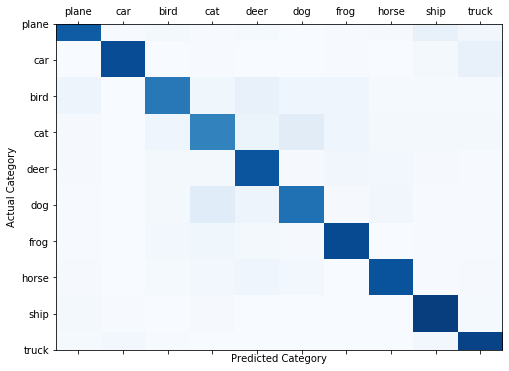

Category   - Accuracy
plane      - 83.2
car        - 88.8
bird       - 72.2
cat        - 68.0
deer       - 85.6
dog        - 75.1
frog       - 89.5
horse      - 86.5
ship       - 94.8
truck      - 92.4

Selected workers

[44 70 72 26 31 45 33 99 36 55 34 78 14 21 53]
Worker 44 : is  Stealthy_Attacker
Worker 70 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 31 : is  Stealthy_Attacker
Worker 45 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 36 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 78 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 21 : is  Stealthy_Attacker
Worker 53 : is  Stealthy_Attacker

 | Global Training Round : 55 |


Worker 44 starts training in Global Round:55 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  55


Train Epoch: 1 [0/500	(1%)]	Loss: 1.283201
Train Epoch: 1 [400/500	(81%)]	Loss: 0.480379
Train Epoch: 2 [0/500	(1%)]	Loss: 0.372569
Train Epoch: 2 [400/500	(81%)]	Loss: 0.395269
Train Epoch: 3 [0/500	(1%)]	Loss: 0.213330
Train Epoch: 3 [400/500	(81%)]	Loss: 0.345253
Train Epoch: 4 [0/500	(1%)]	Loss: 0.240319
Train Epoch: 4 [400/500	(81%)]	Loss: 0.393357
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112677
Train Epoch: 5 [400/500	(81%)]	Loss: 0.213978

Performed attacks 1
Worker 44 ends training in Global Round:55 |

Worker 70 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.605232
Train Epoch: 1 [400/500	(81%)]	Loss: 0.408495
Train Epoch: 2 [0/500	(1%)]	Loss: 0.299514
Train Epoch: 2 [400/500	(81%)]	Loss: 0.452994
Train Epoch: 3 [0/500	(1%)]	Loss: 0.233932
Train Epoch: 3 [400/500	(81%)]	Loss: 0.232628
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170224
Train Epoch: 4 [400/500	(81%)]	Loss: 0.271319
Train Epoch: 5 [0/500	(1%)]	Loss: 0.140879
Train Epoch: 5 [400/500	(81%)]	Loss: 0.247921

Worker 70 ends training in Global Round:55 |

Worker 72 starts training in Global Round:55 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  55


Train Epoch: 1 [0/500	(1%)]	Loss: 1.172699
Train Epoch: 1 [400/500	(81%)]	Loss: 0.684674
Train Epoch: 2 [0/500	(1%)]	Loss: 0.526574
Train Epoch: 2 [400/500	(81%)]	Loss: 0.584151
Train Epoch: 3 [0/500	(1%)]	Loss: 0.332976
Train Epoch: 3 [400/500	(81%)]	Loss: 0.279595
Train Epoch: 4 [0/500	(1%)]	Loss: 0.273606
Train Epoch: 4 [400/500	(81%)]	Loss: 0.327052
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133321
Train Epoch: 5 [400/500	(81%)]	Loss: 0.118463

Performed attacks 2
Worker 72 ends training in Global Round:55 |

Worker 26 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.405446
Train Epoch: 1 [400/500	(81%)]	Loss: 0.164328
Train Epoch: 2 [0/500	(1%)]	Loss: 0.207318
Train Epoch: 2 [400/500	(81%)]	Loss: 0.244732
Train Epoch: 3 [0/500	(1%)]	Loss: 0.087093
Train Epoch: 3 [400/500	(81%)]	Loss: 0.193772
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095232
Train Epoch: 4 [400/500	(81%)]	Loss: 0.315201
Train Epoch: 5 [0/500	(1%)]	Loss: 0.160242
Train Epoch: 5 [400/500	(81%)]	Loss: 0.255227

Worker 26 ends training in Global Round:55 |

Worker 31 starts training in Global Round:55 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  55


Train Epoch: 1 [0/500	(1%)]	Loss: 1.235078
Train Epoch: 1 [400/500	(81%)]	Loss: 0.770369
Train Epoch: 2 [0/500	(1%)]	Loss: 0.385636
Train Epoch: 2 [400/500	(81%)]	Loss: 0.424832
Train Epoch: 3 [0/500	(1%)]	Loss: 0.287269
Train Epoch: 3 [400/500	(81%)]	Loss: 0.384068
Train Epoch: 4 [0/500	(1%)]	Loss: 0.405040
Train Epoch: 4 [400/500	(81%)]	Loss: 0.298752
Train Epoch: 5 [0/500	(1%)]	Loss: 0.247773
Train Epoch: 5 [400/500	(81%)]	Loss: 0.200194

Performed attacks 3
Worker 31 ends training in Global Round:55 |

Worker 45 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.239922
Train Epoch: 1 [400/500	(81%)]	Loss: 0.327812
Train Epoch: 2 [0/500	(1%)]	Loss: 0.251880
Train Epoch: 2 [400/500	(81%)]	Loss: 0.173868
Train Epoch: 3 [0/500	(1%)]	Loss: 0.043578
Train Epoch: 3 [400/500	(81%)]	Loss: 0.187530
Train Epoch: 4 [0/500	(1%)]	Loss: 0.133305
Train Epoch: 4 [400/500	(81%)]	Loss: 0.127005
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112889
Train Epoch: 5 [400/500	(81%)]	Loss: 0.097602

Worker 45 ends training in Global Round:55 |

Worker 33 starts training in Global Round:55 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  55


Train Epoch: 1 [0/500	(1%)]	Loss: 1.459171
Train Epoch: 1 [400/500	(81%)]	Loss: 0.868006
Train Epoch: 2 [0/500	(1%)]	Loss: 0.241591
Train Epoch: 2 [400/500	(81%)]	Loss: 0.568285
Train Epoch: 3 [0/500	(1%)]	Loss: 0.544131
Train Epoch: 3 [400/500	(81%)]	Loss: 0.295837
Train Epoch: 4 [0/500	(1%)]	Loss: 0.360329
Train Epoch: 4 [400/500	(81%)]	Loss: 0.285310
Train Epoch: 5 [0/500	(1%)]	Loss: 0.243415
Train Epoch: 5 [400/500	(81%)]	Loss: 0.298112

Performed attacks 4
Worker 33 ends training in Global Round:55 |

Worker 99 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.209412
Train Epoch: 1 [400/500	(81%)]	Loss: 0.345071
Train Epoch: 2 [0/500	(1%)]	Loss: 0.164350
Train Epoch: 2 [400/500	(81%)]	Loss: 0.223567
Train Epoch: 3 [0/500	(1%)]	Loss: 0.118512
Train Epoch: 3 [400/500	(81%)]	Loss: 0.244890
Train Epoch: 4 [0/500	(1%)]	Loss: 0.088008
Train Epoch: 4 [400/500	(81%)]	Loss: 0.227076
Train Epoch: 5 [0/500	(1%)]	Loss: 0.176970
Train Epoch: 5 [400/500	(81%)]	Loss: 0.147927

Worker 99 ends training in Global Round:55 |

Worker 36 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.529120
Train Epoch: 1 [400/500	(81%)]	Loss: 0.365158
Train Epoch: 2 [0/500	(1%)]	Loss: 0.270293
Train Epoch: 2 [400/500	(81%)]	Loss: 0.134327
Train Epoch: 3 [0/500	(1%)]	Loss: 0.109947
Train Epoch: 3 [400/500	(81%)]	Loss: 0.166530
Train Epoch: 4 [0/500	(1%)]	Loss: 0.190332
Train Epoch: 4 [400/500	(81%)]	Loss: 0.356025
Train Epoch: 5 [0/500	(1%)]	Loss: 0.158995
Train Epoch: 5 [400/500	(81%)]	Loss: 0.169974

Worker 36 ends training in Global Round:55 |

Worker 55 starts training in Global Round:55 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  55


Train Epoch: 1 [0/500	(1%)]	Loss: 1.509704
Train Epoch: 1 [400/500	(81%)]	Loss: 0.880693
Train Epoch: 2 [0/500	(1%)]	Loss: 0.429075
Train Epoch: 2 [400/500	(81%)]	Loss: 0.356842
Train Epoch: 3 [0/500	(1%)]	Loss: 0.372135
Train Epoch: 3 [400/500	(81%)]	Loss: 0.312868
Train Epoch: 4 [0/500	(1%)]	Loss: 0.241599
Train Epoch: 4 [400/500	(81%)]	Loss: 0.322083
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175247
Train Epoch: 5 [400/500	(81%)]	Loss: 0.542287

Performed attacks 5
Worker 55 ends training in Global Round:55 |

Worker 34 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.602410
Train Epoch: 1 [400/500	(81%)]	Loss: 0.624362
Train Epoch: 2 [0/500	(1%)]	Loss: 0.212463
Train Epoch: 2 [400/500	(81%)]	Loss: 0.386876
Train Epoch: 3 [0/500	(1%)]	Loss: 0.296390
Train Epoch: 3 [400/500	(81%)]	Loss: 0.354068
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187838
Train Epoch: 4 [400/500	(81%)]	Loss: 0.260727
Train Epoch: 5 [0/500	(1%)]	Loss: 0.245160
Train Epoch: 5 [400/500	(81%)]	Loss: 0.176594

Worker 34 ends training in Global Round:55 |

Worker 78 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.192403
Train Epoch: 1 [400/500	(81%)]	Loss: 0.253507
Train Epoch: 2 [0/500	(1%)]	Loss: 0.111759
Train Epoch: 2 [400/500	(81%)]	Loss: 0.153745
Train Epoch: 3 [0/500	(1%)]	Loss: 0.115241
Train Epoch: 3 [400/500	(81%)]	Loss: 0.188703
Train Epoch: 4 [0/500	(1%)]	Loss: 0.103523
Train Epoch: 4 [400/500	(81%)]	Loss: 0.127634
Train Epoch: 5 [0/500	(1%)]	Loss: 0.207897
Train Epoch: 5 [400/500	(81%)]	Loss: 0.255932

Worker 78 ends training in Global Round:55 |

Worker 14 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.482196
Train Epoch: 1 [400/500	(81%)]	Loss: 0.645622
Train Epoch: 2 [0/500	(1%)]	Loss: 0.137743
Train Epoch: 2 [400/500	(81%)]	Loss: 0.414466
Train Epoch: 3 [0/500	(1%)]	Loss: 0.232602
Train Epoch: 3 [400/500	(81%)]	Loss: 0.304892
Train Epoch: 4 [0/500	(1%)]	Loss: 0.240813
Train Epoch: 4 [400/500	(81%)]	Loss: 0.154410
Train Epoch: 5 [0/500	(1%)]	Loss: 0.109093
Train Epoch: 5 [400/500	(81%)]	Loss: 0.225264

Worker 14 ends training in Global Round:55 |

Worker 21 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.669318
Train Epoch: 1 [400/500	(81%)]	Loss: 0.869747
Train Epoch: 2 [0/500	(1%)]	Loss: 0.328982
Train Epoch: 2 [400/500	(81%)]	Loss: 0.478705
Train Epoch: 3 [0/500	(1%)]	Loss: 0.245680
Train Epoch: 3 [400/500	(81%)]	Loss: 0.411181
Train Epoch: 4 [0/500	(1%)]	Loss: 0.172519
Train Epoch: 4 [400/500	(81%)]	Loss: 0.294672
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126470
Train Epoch: 5 [400/500	(81%)]	Loss: 0.305632

Worker 21 ends training in Global Round:55 |

Worker 53 starts training in Global Round:55 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.695285
Train Epoch: 1 [400/500	(81%)]	Loss: 0.688126
Train Epoch: 2 [0/500	(1%)]	Loss: 0.362221
Train Epoch: 2 [400/500	(81%)]	Loss: 0.450691
Train Epoch: 3 [0/500	(1%)]	Loss: 0.272131
Train Epoch: 3 [400/500	(81%)]	Loss: 0.319871
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152900
Train Epoch: 4 [400/500	(81%)]	Loss: 0.342948
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128411
Train Epoch: 5 [400/500	(81%)]	Loss: 0.279167

Worker 53 ends training in Global Round:55 |
Last layer biases  [array([ 0.03410241, -0.0330797 , -0.01338077,  0.03641224,  0.05144153,
       -0.01297461,  0.03871145, -0.03064496, -0.01925608, -0.03542959],
      dtype=float32), array([ 0.03258792, -0.03027147, -0.01247273,  0.03692108,  0.03613648,
       -0.01894153,  0.03895872, -0.00411663, -0.02219798, -0.04070194],
      dtype=float32), array([ 0.03555309, -0.03360534, -0.01412633,  0.04045542,  0.04938917,
       -0.01220727,  0.03726513, -0.02799989, -0.02048542, -0.03833668],
      dtyp

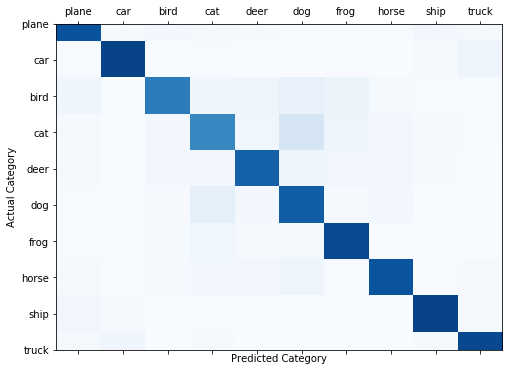

Category   - Accuracy
plane      - 86.6
car        - 92.4
bird       - 70.6
cat        - 66.7
deer       - 81.2
dog        - 82.5
frog       - 90.1
horse      - 86.1
ship       - 92.5
truck      - 90.6

Selected workers

[26 70 24 97 73 20 34 79 86 31 48  4 25 11 50]
Worker 26 : is  Honest
Worker 70 : is  Honest
Worker 24 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 73 : is  Honest
Worker 20 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 79 : is  Stealthy_Attacker
Worker 86 : is  Stealthy_Attacker
Worker 31 : is  Stealthy_Attacker
Worker 48 : is  Honest
Worker 4 : is  Honest
Worker 25 : is  Honest
Worker 11 : is  Honest
Worker 50 : is  Stealthy_Attacker

 | Global Training Round : 56 |


Worker 26 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.134020
Train Epoch: 1 [400/500	(81%)]	Loss: 0.203181
Train Epoch: 2 [0/500	(1%)]	Loss: 0.171379
Train Epoch: 2 [400/500	(81%)]	Loss: 0.073060
Train Epoch: 3 [0/500	(1%)]	Loss: 0.058218
Train Epoch: 3 [400/500	(81%)]	Loss: 0.128007
Train Epoch: 4 [0/500	(1%)]	Loss: 0.086628
Train Epoch: 4 [400/500	(81%)]	Loss: 0.071722
Train Epoch: 5 [0/500	(1%)]	Loss: 0.038757
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149331

Worker 26 ends training in Global Round:56 |

Worker 70 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.259872
Train Epoch: 1 [400/500	(81%)]	Loss: 0.409424
Train Epoch: 2 [0/500	(1%)]	Loss: 0.106518
Train Epoch: 2 [400/500	(81%)]	Loss: 0.369881
Train Epoch: 3 [0/500	(1%)]	Loss: 0.111971
Train Epoch: 3 [400/500	(81%)]	Loss: 0.198430
Train Epoch: 4 [0/500	(1%)]	Loss: 0.120800
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192151
Train Epoch: 5 [0/500	(1%)]	Loss: 0.105126
Train Epoch: 5 [400/500	(81%)]	Loss: 0.183213

Worker 70 ends training in Global Round:56 |

Worker 24 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.236610
Train Epoch: 1 [400/500	(81%)]	Loss: 0.292640
Train Epoch: 2 [0/500	(1%)]	Loss: 0.149289
Train Epoch: 2 [400/500	(81%)]	Loss: 0.130959
Train Epoch: 3 [0/500	(1%)]	Loss: 0.167486
Train Epoch: 3 [400/500	(81%)]	Loss: 0.233979
Train Epoch: 4 [0/500	(1%)]	Loss: 0.097232
Train Epoch: 4 [400/500	(81%)]	Loss: 0.133294
Train Epoch: 5 [0/500	(1%)]	Loss: 0.070730
Train Epoch: 5 [400/500	(81%)]	Loss: 0.119102

Worker 24 ends training in Global Round:56 |

Worker 97 starts training in Global Round:56 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  56


Train Epoch: 1 [0/500	(1%)]	Loss: 1.384044
Train Epoch: 1 [400/500	(81%)]	Loss: 0.498205
Train Epoch: 2 [0/500	(1%)]	Loss: 0.296137
Train Epoch: 2 [400/500	(81%)]	Loss: 0.396223
Train Epoch: 3 [0/500	(1%)]	Loss: 0.198930
Train Epoch: 3 [400/500	(81%)]	Loss: 0.421102
Train Epoch: 4 [0/500	(1%)]	Loss: 0.117551
Train Epoch: 4 [400/500	(81%)]	Loss: 0.243778
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082289
Train Epoch: 5 [400/500	(81%)]	Loss: 0.301394

Performed attacks 1
Worker 97 ends training in Global Round:56 |

Worker 73 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.350609
Train Epoch: 1 [400/500	(81%)]	Loss: 0.165737
Train Epoch: 2 [0/500	(1%)]	Loss: 0.149043
Train Epoch: 2 [400/500	(81%)]	Loss: 0.186385
Train Epoch: 3 [0/500	(1%)]	Loss: 0.131521
Train Epoch: 3 [400/500	(81%)]	Loss: 0.107181
Train Epoch: 4 [0/500	(1%)]	Loss: 0.053088
Train Epoch: 4 [400/500	(81%)]	Loss: 0.109453
Train Epoch: 5 [0/500	(1%)]	Loss: 0.058197
Train Epoch: 5 [400/500	(81%)]	Loss: 0.142145

Worker 73 ends training in Global Round:56 |

Worker 20 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.221067
Train Epoch: 1 [400/500	(81%)]	Loss: 0.258491
Train Epoch: 2 [0/500	(1%)]	Loss: 0.164449
Train Epoch: 2 [400/500	(81%)]	Loss: 0.181940
Train Epoch: 3 [0/500	(1%)]	Loss: 0.062866
Train Epoch: 3 [400/500	(81%)]	Loss: 0.098685
Train Epoch: 4 [0/500	(1%)]	Loss: 0.106224
Train Epoch: 4 [400/500	(81%)]	Loss: 0.162246
Train Epoch: 5 [0/500	(1%)]	Loss: 0.099288
Train Epoch: 5 [400/500	(81%)]	Loss: 0.174458

Worker 20 ends training in Global Round:56 |

Worker 34 starts training in Global Round:56 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  56


Train Epoch: 1 [0/500	(1%)]	Loss: 0.635545
Train Epoch: 1 [400/500	(81%)]	Loss: 0.336913
Train Epoch: 2 [0/500	(1%)]	Loss: 0.176289
Train Epoch: 2 [400/500	(81%)]	Loss: 0.361586
Train Epoch: 3 [0/500	(1%)]	Loss: 0.159716
Train Epoch: 3 [400/500	(81%)]	Loss: 0.238189
Train Epoch: 4 [0/500	(1%)]	Loss: 0.097768
Train Epoch: 4 [400/500	(81%)]	Loss: 0.259263
Train Epoch: 5 [0/500	(1%)]	Loss: 0.197018
Train Epoch: 5 [400/500	(81%)]	Loss: 0.370663

Performed attacks 2
Worker 34 ends training in Global Round:56 |

Worker 79 starts training in Global Round:56 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  56


Train Epoch: 1 [0/500	(1%)]	Loss: 1.316464
Train Epoch: 1 [400/500	(81%)]	Loss: 0.479225
Train Epoch: 2 [0/500	(1%)]	Loss: 0.308695
Train Epoch: 2 [400/500	(81%)]	Loss: 0.420261
Train Epoch: 3 [0/500	(1%)]	Loss: 0.153278
Train Epoch: 3 [400/500	(81%)]	Loss: 0.225992
Train Epoch: 4 [0/500	(1%)]	Loss: 0.235555
Train Epoch: 4 [400/500	(81%)]	Loss: 0.302117
Train Epoch: 5 [0/500	(1%)]	Loss: 0.156700
Train Epoch: 5 [400/500	(81%)]	Loss: 0.240033

Performed attacks 3
Worker 79 ends training in Global Round:56 |

Worker 86 starts training in Global Round:56 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  56


Train Epoch: 1 [0/500	(1%)]	Loss: 1.067027
Train Epoch: 1 [400/500	(81%)]	Loss: 0.507149
Train Epoch: 2 [0/500	(1%)]	Loss: 0.245880
Train Epoch: 2 [400/500	(81%)]	Loss: 0.401844
Train Epoch: 3 [0/500	(1%)]	Loss: 0.285367
Train Epoch: 3 [400/500	(81%)]	Loss: 0.233338
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143961
Train Epoch: 4 [400/500	(81%)]	Loss: 0.257335
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123388
Train Epoch: 5 [400/500	(81%)]	Loss: 0.206505

Performed attacks 4
Worker 86 ends training in Global Round:56 |

Worker 31 starts training in Global Round:56 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  56


Train Epoch: 1 [0/500	(1%)]	Loss: 1.262592
Train Epoch: 1 [400/500	(81%)]	Loss: 0.624622
Train Epoch: 2 [0/500	(1%)]	Loss: 0.357764
Train Epoch: 2 [400/500	(81%)]	Loss: 0.585994
Train Epoch: 3 [0/500	(1%)]	Loss: 0.327566
Train Epoch: 3 [400/500	(81%)]	Loss: 0.398309
Train Epoch: 4 [0/500	(1%)]	Loss: 0.279594
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309932
Train Epoch: 5 [0/500	(1%)]	Loss: 0.186623
Train Epoch: 5 [400/500	(81%)]	Loss: 0.378033

Performed attacks 5
Worker 31 ends training in Global Round:56 |

Worker 48 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.344077
Train Epoch: 1 [400/500	(81%)]	Loss: 0.420080
Train Epoch: 2 [0/500	(1%)]	Loss: 0.239461
Train Epoch: 2 [400/500	(81%)]	Loss: 0.192691
Train Epoch: 3 [0/500	(1%)]	Loss: 0.225404
Train Epoch: 3 [400/500	(81%)]	Loss: 0.169011
Train Epoch: 4 [0/500	(1%)]	Loss: 0.235077
Train Epoch: 4 [400/500	(81%)]	Loss: 0.123107
Train Epoch: 5 [0/500	(1%)]	Loss: 0.113260
Train Epoch: 5 [400/500	(81%)]	Loss: 0.289260

Worker 48 ends training in Global Round:56 |

Worker 4 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.167456
Train Epoch: 1 [400/500	(81%)]	Loss: 0.257802
Train Epoch: 2 [0/500	(1%)]	Loss: 0.109314
Train Epoch: 2 [400/500	(81%)]	Loss: 0.174985
Train Epoch: 3 [0/500	(1%)]	Loss: 0.067394
Train Epoch: 3 [400/500	(81%)]	Loss: 0.164650
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149238
Train Epoch: 4 [400/500	(81%)]	Loss: 0.079867
Train Epoch: 5 [0/500	(1%)]	Loss: 0.105822
Train Epoch: 5 [400/500	(81%)]	Loss: 0.080807

Worker 4 ends training in Global Round:56 |

Worker 25 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.487313
Train Epoch: 1 [400/500	(81%)]	Loss: 0.422388
Train Epoch: 2 [0/500	(1%)]	Loss: 0.212930
Train Epoch: 2 [400/500	(81%)]	Loss: 0.204592
Train Epoch: 3 [0/500	(1%)]	Loss: 0.176815
Train Epoch: 3 [400/500	(81%)]	Loss: 0.191254
Train Epoch: 4 [0/500	(1%)]	Loss: 0.100320
Train Epoch: 4 [400/500	(81%)]	Loss: 0.123291
Train Epoch: 5 [0/500	(1%)]	Loss: 0.097830
Train Epoch: 5 [400/500	(81%)]	Loss: 0.133363

Worker 25 ends training in Global Round:56 |

Worker 11 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.342069
Train Epoch: 1 [400/500	(81%)]	Loss: 0.389143
Train Epoch: 2 [0/500	(1%)]	Loss: 0.175457
Train Epoch: 2 [400/500	(81%)]	Loss: 0.290050
Train Epoch: 3 [0/500	(1%)]	Loss: 0.218292
Train Epoch: 3 [400/500	(81%)]	Loss: 0.287368
Train Epoch: 4 [0/500	(1%)]	Loss: 0.128200
Train Epoch: 4 [400/500	(81%)]	Loss: 0.271132
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203914
Train Epoch: 5 [400/500	(81%)]	Loss: 0.311151

Worker 11 ends training in Global Round:56 |

Worker 50 starts training in Global Round:56 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.439543
Train Epoch: 1 [400/500	(81%)]	Loss: 0.761624
Train Epoch: 2 [0/500	(1%)]	Loss: 0.377903
Train Epoch: 2 [400/500	(81%)]	Loss: 0.454277
Train Epoch: 3 [0/500	(1%)]	Loss: 0.173066
Train Epoch: 3 [400/500	(81%)]	Loss: 0.355885
Train Epoch: 4 [0/500	(1%)]	Loss: 0.167618
Train Epoch: 4 [400/500	(81%)]	Loss: 0.412055
Train Epoch: 5 [0/500	(1%)]	Loss: 0.177566
Train Epoch: 5 [400/500	(81%)]	Loss: 0.223894

Worker 50 ends training in Global Round:56 |
Last layer biases  [array([ 0.03462844, -0.0301879 , -0.01470753,  0.03789327,  0.03689079,
       -0.01733263,  0.03817966, -0.00824039, -0.02108092, -0.0401409 ],
      dtype=float32), array([ 0.03304483, -0.0321704 , -0.01436941,  0.03903804,  0.03738661,
       -0.01817811,  0.03919758, -0.00647679, -0.02227254, -0.03929796],
      dtype=float32), array([ 0.03400662, -0.03075123, -0.01450945,  0.03617132,  0.03615036,
       -0.0149227 ,  0.04088373, -0.00812845, -0.0229374 , -0.04006088],
      dtyp

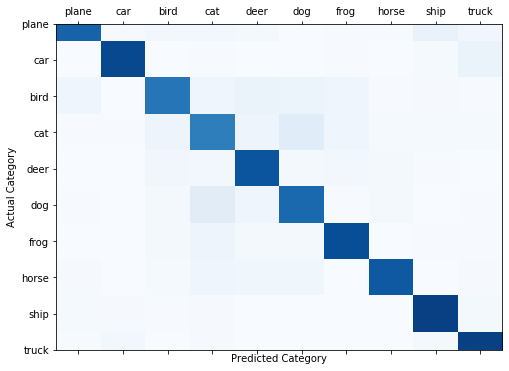

Category   - Accuracy
plane      - 80.4
car        - 90.6
bird       - 73.2
cat        - 69.7
deer       - 85.6
dog        - 78.5
frog       - 88.5
horse      - 84.1
ship       - 93.5
truck      - 93.4

Selected workers

[ 4 72 20  6 63 95 83 42 80 73 81 78 30 99 55]
Worker 4 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 20 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 63 : is  Honest
Worker 95 : is  Honest
Worker 83 : is  Honest
Worker 42 : is  Honest
Worker 80 : is  Honest
Worker 73 : is  Honest
Worker 81 : is  Honest
Worker 78 : is  Honest
Worker 30 : is  Honest
Worker 99 : is  Honest
Worker 55 : is  Stealthy_Attacker

 | Global Training Round : 57 |


Worker 4 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.112754
Train Epoch: 1 [400/500	(81%)]	Loss: 0.280600
Train Epoch: 2 [0/500	(1%)]	Loss: 0.142632
Train Epoch: 2 [400/500	(81%)]	Loss: 0.073823
Train Epoch: 3 [0/500	(1%)]	Loss: 0.084573
Train Epoch: 3 [400/500	(81%)]	Loss: 0.057858
Train Epoch: 4 [0/500	(1%)]	Loss: 0.075129
Train Epoch: 4 [400/500	(81%)]	Loss: 0.069249
Train Epoch: 5 [0/500	(1%)]	Loss: 0.047484
Train Epoch: 5 [400/500	(81%)]	Loss: 0.092694

Worker 4 ends training in Global Round:57 |

Worker 72 starts training in Global Round:57 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  57


Train Epoch: 1 [0/500	(1%)]	Loss: 1.357515
Train Epoch: 1 [400/500	(81%)]	Loss: 0.496895
Train Epoch: 2 [0/500	(1%)]	Loss: 0.295524
Train Epoch: 2 [400/500	(81%)]	Loss: 0.405231
Train Epoch: 3 [0/500	(1%)]	Loss: 0.251496
Train Epoch: 3 [400/500	(81%)]	Loss: 0.426521
Train Epoch: 4 [0/500	(1%)]	Loss: 0.320285
Train Epoch: 4 [400/500	(81%)]	Loss: 0.281860
Train Epoch: 5 [0/500	(1%)]	Loss: 0.294590
Train Epoch: 5 [400/500	(81%)]	Loss: 0.205312

Performed attacks 1
Worker 72 ends training in Global Round:57 |

Worker 20 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.242962
Train Epoch: 1 [400/500	(81%)]	Loss: 0.238328
Train Epoch: 2 [0/500	(1%)]	Loss: 0.071513
Train Epoch: 2 [400/500	(81%)]	Loss: 0.152547
Train Epoch: 3 [0/500	(1%)]	Loss: 0.056234
Train Epoch: 3 [400/500	(81%)]	Loss: 0.175316
Train Epoch: 4 [0/500	(1%)]	Loss: 0.103517
Train Epoch: 4 [400/500	(81%)]	Loss: 0.087579
Train Epoch: 5 [0/500	(1%)]	Loss: 0.053907
Train Epoch: 5 [400/500	(81%)]	Loss: 0.092733

Worker 20 ends training in Global Round:57 |

Worker 6 starts training in Global Round:57 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  57


Train Epoch: 1 [0/500	(1%)]	Loss: 1.212350
Train Epoch: 1 [400/500	(81%)]	Loss: 1.031696
Train Epoch: 2 [0/500	(1%)]	Loss: 0.403552
Train Epoch: 2 [400/500	(81%)]	Loss: 0.494506
Train Epoch: 3 [0/500	(1%)]	Loss: 0.386258
Train Epoch: 3 [400/500	(81%)]	Loss: 0.308374
Train Epoch: 4 [0/500	(1%)]	Loss: 0.217954
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213284
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125538
Train Epoch: 5 [400/500	(81%)]	Loss: 0.327953

Performed attacks 2
Worker 6 ends training in Global Round:57 |

Worker 63 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.397159
Train Epoch: 1 [400/500	(81%)]	Loss: 0.343213
Train Epoch: 2 [0/500	(1%)]	Loss: 0.177662
Train Epoch: 2 [400/500	(81%)]	Loss: 0.414722
Train Epoch: 3 [0/500	(1%)]	Loss: 0.216731
Train Epoch: 3 [400/500	(81%)]	Loss: 0.242392
Train Epoch: 4 [0/500	(1%)]	Loss: 0.135773
Train Epoch: 4 [400/500	(81%)]	Loss: 0.327716
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192937
Train Epoch: 5 [400/500	(81%)]	Loss: 0.155452

Worker 63 ends training in Global Round:57 |

Worker 95 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.127304
Train Epoch: 1 [400/500	(81%)]	Loss: 0.365976
Train Epoch: 2 [0/500	(1%)]	Loss: 0.081741
Train Epoch: 2 [400/500	(81%)]	Loss: 0.237713
Train Epoch: 3 [0/500	(1%)]	Loss: 0.122572
Train Epoch: 3 [400/500	(81%)]	Loss: 0.227653
Train Epoch: 4 [0/500	(1%)]	Loss: 0.113174
Train Epoch: 4 [400/500	(81%)]	Loss: 0.160087
Train Epoch: 5 [0/500	(1%)]	Loss: 0.033981
Train Epoch: 5 [400/500	(81%)]	Loss: 0.194074

Worker 95 ends training in Global Round:57 |

Worker 83 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.432036
Train Epoch: 1 [400/500	(81%)]	Loss: 0.463790
Train Epoch: 2 [0/500	(1%)]	Loss: 0.253709
Train Epoch: 2 [400/500	(81%)]	Loss: 0.160039
Train Epoch: 3 [0/500	(1%)]	Loss: 0.307391
Train Epoch: 3 [400/500	(81%)]	Loss: 0.283483
Train Epoch: 4 [0/500	(1%)]	Loss: 0.255288
Train Epoch: 4 [400/500	(81%)]	Loss: 0.208415
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193336
Train Epoch: 5 [400/500	(81%)]	Loss: 0.240032

Worker 83 ends training in Global Round:57 |

Worker 42 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.259764
Train Epoch: 1 [400/500	(81%)]	Loss: 0.593052
Train Epoch: 2 [0/500	(1%)]	Loss: 0.238819
Train Epoch: 2 [400/500	(81%)]	Loss: 0.229712
Train Epoch: 3 [0/500	(1%)]	Loss: 0.182726
Train Epoch: 3 [400/500	(81%)]	Loss: 0.296660
Train Epoch: 4 [0/500	(1%)]	Loss: 0.115641
Train Epoch: 4 [400/500	(81%)]	Loss: 0.232682
Train Epoch: 5 [0/500	(1%)]	Loss: 0.091797
Train Epoch: 5 [400/500	(81%)]	Loss: 0.174139

Worker 42 ends training in Global Round:57 |

Worker 80 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.299829
Train Epoch: 1 [400/500	(81%)]	Loss: 0.243296
Train Epoch: 2 [0/500	(1%)]	Loss: 0.122467
Train Epoch: 2 [400/500	(81%)]	Loss: 0.190678
Train Epoch: 3 [0/500	(1%)]	Loss: 0.135694
Train Epoch: 3 [400/500	(81%)]	Loss: 0.134656
Train Epoch: 4 [0/500	(1%)]	Loss: 0.128152
Train Epoch: 4 [400/500	(81%)]	Loss: 0.198708
Train Epoch: 5 [0/500	(1%)]	Loss: 0.050600
Train Epoch: 5 [400/500	(81%)]	Loss: 0.034471

Worker 80 ends training in Global Round:57 |

Worker 73 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.175051
Train Epoch: 1 [400/500	(81%)]	Loss: 0.206498
Train Epoch: 2 [0/500	(1%)]	Loss: 0.086261
Train Epoch: 2 [400/500	(81%)]	Loss: 0.100180
Train Epoch: 3 [0/500	(1%)]	Loss: 0.031519
Train Epoch: 3 [400/500	(81%)]	Loss: 0.141404
Train Epoch: 4 [0/500	(1%)]	Loss: 0.048612
Train Epoch: 4 [400/500	(81%)]	Loss: 0.125941
Train Epoch: 5 [0/500	(1%)]	Loss: 0.028854
Train Epoch: 5 [400/500	(81%)]	Loss: 0.065764

Worker 73 ends training in Global Round:57 |

Worker 81 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.362853
Train Epoch: 1 [400/500	(81%)]	Loss: 0.369828
Train Epoch: 2 [0/500	(1%)]	Loss: 0.200415
Train Epoch: 2 [400/500	(81%)]	Loss: 0.354478
Train Epoch: 3 [0/500	(1%)]	Loss: 0.124597
Train Epoch: 3 [400/500	(81%)]	Loss: 0.325589
Train Epoch: 4 [0/500	(1%)]	Loss: 0.132540
Train Epoch: 4 [400/500	(81%)]	Loss: 0.277285
Train Epoch: 5 [0/500	(1%)]	Loss: 0.174036
Train Epoch: 5 [400/500	(81%)]	Loss: 0.405917

Worker 81 ends training in Global Round:57 |

Worker 78 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.174450
Train Epoch: 1 [400/500	(81%)]	Loss: 0.146304
Train Epoch: 2 [0/500	(1%)]	Loss: 0.069551
Train Epoch: 2 [400/500	(81%)]	Loss: 0.165713
Train Epoch: 3 [0/500	(1%)]	Loss: 0.029877
Train Epoch: 3 [400/500	(81%)]	Loss: 0.154739
Train Epoch: 4 [0/500	(1%)]	Loss: 0.138030
Train Epoch: 4 [400/500	(81%)]	Loss: 0.082365
Train Epoch: 5 [0/500	(1%)]	Loss: 0.056237
Train Epoch: 5 [400/500	(81%)]	Loss: 0.037891

Worker 78 ends training in Global Round:57 |

Worker 30 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.613644
Train Epoch: 1 [400/500	(81%)]	Loss: 0.657028
Train Epoch: 2 [0/500	(1%)]	Loss: 0.297866
Train Epoch: 2 [400/500	(81%)]	Loss: 0.499540
Train Epoch: 3 [0/500	(1%)]	Loss: 0.282588
Train Epoch: 3 [400/500	(81%)]	Loss: 0.424994
Train Epoch: 4 [0/500	(1%)]	Loss: 0.161141
Train Epoch: 4 [400/500	(81%)]	Loss: 0.275686
Train Epoch: 5 [0/500	(1%)]	Loss: 0.217173
Train Epoch: 5 [400/500	(81%)]	Loss: 0.243520

Worker 30 ends training in Global Round:57 |

Worker 99 starts training in Global Round:57 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.212562
Train Epoch: 1 [400/500	(81%)]	Loss: 0.413945
Train Epoch: 2 [0/500	(1%)]	Loss: 0.112150
Train Epoch: 2 [400/500	(81%)]	Loss: 0.316103
Train Epoch: 3 [0/500	(1%)]	Loss: 0.092337
Train Epoch: 3 [400/500	(81%)]	Loss: 0.184292
Train Epoch: 4 [0/500	(1%)]	Loss: 0.218186
Train Epoch: 4 [400/500	(81%)]	Loss: 0.252372
Train Epoch: 5 [0/500	(1%)]	Loss: 0.186566
Train Epoch: 5 [400/500	(81%)]	Loss: 0.237115

Worker 99 ends training in Global Round:57 |

Worker 55 starts training in Global Round:57 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  57


Train Epoch: 1 [0/500	(1%)]	Loss: 1.688834
Train Epoch: 1 [400/500	(81%)]	Loss: 0.589101
Train Epoch: 2 [0/500	(1%)]	Loss: 0.332144
Train Epoch: 2 [400/500	(81%)]	Loss: 0.480865
Train Epoch: 3 [0/500	(1%)]	Loss: 0.284691
Train Epoch: 3 [400/500	(81%)]	Loss: 0.295130
Train Epoch: 4 [0/500	(1%)]	Loss: 0.206831
Train Epoch: 4 [400/500	(81%)]	Loss: 0.245141
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112652
Train Epoch: 5 [400/500	(81%)]	Loss: 0.127155

Performed attacks 3
Worker 55 ends training in Global Round:57 |
Last layer biases  [array([ 0.03359934, -0.03087826, -0.01414157,  0.03655141,  0.03711685,
       -0.01618981,  0.03882055, -0.00798474, -0.02018105, -0.04081086],
      dtype=float32), array([ 0.03739322, -0.0320762 , -0.01304862,  0.03859383,  0.04774771,
       -0.0138999 ,  0.04006455, -0.02845926, -0.02058679, -0.03982666],
      dtype=float32), array([ 0.03442921, -0.03138194, -0.01435407,  0.03787079,  0.03691712,
       -0.01453189,  0.03768526, -0.00891458, -0.02214953, -0.0

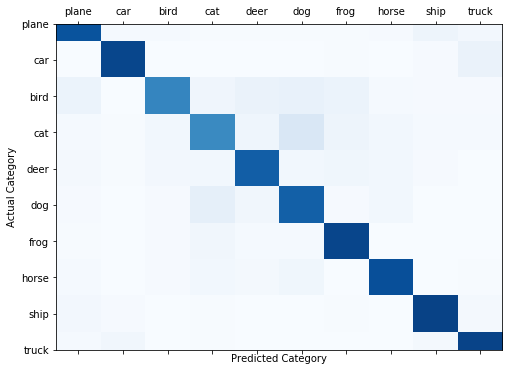

Category   - Accuracy
plane      - 86.5
car        - 91.2
bird       - 66.8
cat        - 65.4
deer       - 82.1
dog        - 81.5
frog       - 91.6
horse      - 87.9
ship       - 92.9
truck      - 92.4

Selected workers

[54 70  2 17 48 98 97 51 87 94 33 88 29 10 11]
Worker 54 : is  Honest
Worker 70 : is  Honest
Worker 2 : is  Honest
Worker 17 : is  Honest
Worker 48 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 97 : is  Stealthy_Attacker
Worker 51 : is  Stealthy_Attacker
Worker 87 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 88 : is  Honest
Worker 29 : is  Honest
Worker 10 : is  Honest
Worker 11 : is  Honest

 | Global Training Round : 58 |


Worker 54 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.241246
Train Epoch: 1 [400/500	(81%)]	Loss: 0.399852
Train Epoch: 2 [0/500	(1%)]	Loss: 0.112713
Train Epoch: 2 [400/500	(81%)]	Loss: 0.152292
Train Epoch: 3 [0/500	(1%)]	Loss: 0.073592
Train Epoch: 3 [400/500	(81%)]	Loss: 0.127947
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119593
Train Epoch: 4 [400/500	(81%)]	Loss: 0.218128
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114665
Train Epoch: 5 [400/500	(81%)]	Loss: 0.183055

Worker 54 ends training in Global Round:58 |

Worker 70 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.518699
Train Epoch: 1 [400/500	(81%)]	Loss: 0.232132
Train Epoch: 2 [0/500	(1%)]	Loss: 0.145853
Train Epoch: 2 [400/500	(81%)]	Loss: 0.281121
Train Epoch: 3 [0/500	(1%)]	Loss: 0.168701
Train Epoch: 3 [400/500	(81%)]	Loss: 0.152486
Train Epoch: 4 [0/500	(1%)]	Loss: 0.118241
Train Epoch: 4 [400/500	(81%)]	Loss: 0.159706
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100977
Train Epoch: 5 [400/500	(81%)]	Loss: 0.175137

Worker 70 ends training in Global Round:58 |

Worker 2 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.270772
Train Epoch: 1 [400/500	(81%)]	Loss: 0.562792
Train Epoch: 2 [0/500	(1%)]	Loss: 0.127018
Train Epoch: 2 [400/500	(81%)]	Loss: 0.178746
Train Epoch: 3 [0/500	(1%)]	Loss: 0.143074
Train Epoch: 3 [400/500	(81%)]	Loss: 0.157272
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121192
Train Epoch: 4 [400/500	(81%)]	Loss: 0.055445
Train Epoch: 5 [0/500	(1%)]	Loss: 0.056631
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171795

Worker 2 ends training in Global Round:58 |

Worker 17 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.329487
Train Epoch: 1 [400/500	(81%)]	Loss: 0.562542
Train Epoch: 2 [0/500	(1%)]	Loss: 0.246643
Train Epoch: 2 [400/500	(81%)]	Loss: 0.415297
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151777
Train Epoch: 3 [400/500	(81%)]	Loss: 0.187788
Train Epoch: 4 [0/500	(1%)]	Loss: 0.205554
Train Epoch: 4 [400/500	(81%)]	Loss: 0.280112
Train Epoch: 5 [0/500	(1%)]	Loss: 0.104514
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210811

Worker 17 ends training in Global Round:58 |

Worker 48 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.374156
Train Epoch: 1 [400/500	(81%)]	Loss: 0.225914
Train Epoch: 2 [0/500	(1%)]	Loss: 0.190487
Train Epoch: 2 [400/500	(81%)]	Loss: 0.172099
Train Epoch: 3 [0/500	(1%)]	Loss: 0.101651
Train Epoch: 3 [400/500	(81%)]	Loss: 0.211397
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143060
Train Epoch: 4 [400/500	(81%)]	Loss: 0.184806
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100868
Train Epoch: 5 [400/500	(81%)]	Loss: 0.243716

Worker 48 ends training in Global Round:58 |

Worker 98 starts training in Global Round:58 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  58


Train Epoch: 1 [0/500	(1%)]	Loss: 0.947403
Train Epoch: 1 [400/500	(81%)]	Loss: 0.647837
Train Epoch: 2 [0/500	(1%)]	Loss: 0.379596
Train Epoch: 2 [400/500	(81%)]	Loss: 0.537456
Train Epoch: 3 [0/500	(1%)]	Loss: 0.187312
Train Epoch: 3 [400/500	(81%)]	Loss: 0.407593
Train Epoch: 4 [0/500	(1%)]	Loss: 0.304887
Train Epoch: 4 [400/500	(81%)]	Loss: 0.296282
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123964
Train Epoch: 5 [400/500	(81%)]	Loss: 0.285528

Performed attacks 1
Worker 98 ends training in Global Round:58 |

Worker 97 starts training in Global Round:58 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  58


Train Epoch: 1 [0/500	(1%)]	Loss: 1.514449
Train Epoch: 1 [400/500	(81%)]	Loss: 0.728628
Train Epoch: 2 [0/500	(1%)]	Loss: 0.414847
Train Epoch: 2 [400/500	(81%)]	Loss: 0.401239
Train Epoch: 3 [0/500	(1%)]	Loss: 0.163699
Train Epoch: 3 [400/500	(81%)]	Loss: 0.396328
Train Epoch: 4 [0/500	(1%)]	Loss: 0.162080
Train Epoch: 4 [400/500	(81%)]	Loss: 0.231655
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171320
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191934

Performed attacks 2
Worker 97 ends training in Global Round:58 |

Worker 51 starts training in Global Round:58 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  58


Train Epoch: 1 [0/500	(1%)]	Loss: 1.175517
Train Epoch: 1 [400/500	(81%)]	Loss: 0.607355
Train Epoch: 2 [0/500	(1%)]	Loss: 0.477879
Train Epoch: 2 [400/500	(81%)]	Loss: 0.295683
Train Epoch: 3 [0/500	(1%)]	Loss: 0.311622
Train Epoch: 3 [400/500	(81%)]	Loss: 0.370527
Train Epoch: 4 [0/500	(1%)]	Loss: 0.242396
Train Epoch: 4 [400/500	(81%)]	Loss: 0.399429
Train Epoch: 5 [0/500	(1%)]	Loss: 0.299689
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242200

Performed attacks 3
Worker 51 ends training in Global Round:58 |

Worker 87 starts training in Global Round:58 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  58


Train Epoch: 1 [0/500	(1%)]	Loss: 1.202987
Train Epoch: 1 [400/500	(81%)]	Loss: 0.646332
Train Epoch: 2 [0/500	(1%)]	Loss: 0.431132
Train Epoch: 2 [400/500	(81%)]	Loss: 0.458565
Train Epoch: 3 [0/500	(1%)]	Loss: 0.535392
Train Epoch: 3 [400/500	(81%)]	Loss: 0.353564
Train Epoch: 4 [0/500	(1%)]	Loss: 0.198715
Train Epoch: 4 [400/500	(81%)]	Loss: 0.342187
Train Epoch: 5 [0/500	(1%)]	Loss: 0.211141
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139759

Performed attacks 4
Worker 87 ends training in Global Round:58 |

Worker 94 starts training in Global Round:58 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  58


Train Epoch: 1 [0/500	(1%)]	Loss: 1.382166
Train Epoch: 1 [400/500	(81%)]	Loss: 0.568564
Train Epoch: 2 [0/500	(1%)]	Loss: 0.472035
Train Epoch: 2 [400/500	(81%)]	Loss: 0.482465
Train Epoch: 3 [0/500	(1%)]	Loss: 0.246320
Train Epoch: 3 [400/500	(81%)]	Loss: 0.518370
Train Epoch: 4 [0/500	(1%)]	Loss: 0.246192
Train Epoch: 4 [400/500	(81%)]	Loss: 0.210199
Train Epoch: 5 [0/500	(1%)]	Loss: 0.144172
Train Epoch: 5 [400/500	(81%)]	Loss: 0.179431

Performed attacks 5
Worker 94 ends training in Global Round:58 |

Worker 33 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.528316
Train Epoch: 1 [400/500	(81%)]	Loss: 0.560241
Train Epoch: 2 [0/500	(1%)]	Loss: 0.257825
Train Epoch: 2 [400/500	(81%)]	Loss: 0.392407
Train Epoch: 3 [0/500	(1%)]	Loss: 0.229740
Train Epoch: 3 [400/500	(81%)]	Loss: 0.352236
Train Epoch: 4 [0/500	(1%)]	Loss: 0.184870
Train Epoch: 4 [400/500	(81%)]	Loss: 0.305133
Train Epoch: 5 [0/500	(1%)]	Loss: 0.179000
Train Epoch: 5 [400/500	(81%)]	Loss: 0.278314

Worker 33 ends training in Global Round:58 |

Worker 88 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.383610
Train Epoch: 1 [400/500	(81%)]	Loss: 0.410641
Train Epoch: 2 [0/500	(1%)]	Loss: 0.150660
Train Epoch: 2 [400/500	(81%)]	Loss: 0.137744
Train Epoch: 3 [0/500	(1%)]	Loss: 0.148259
Train Epoch: 3 [400/500	(81%)]	Loss: 0.131651
Train Epoch: 4 [0/500	(1%)]	Loss: 0.153602
Train Epoch: 4 [400/500	(81%)]	Loss: 0.121108
Train Epoch: 5 [0/500	(1%)]	Loss: 0.069702
Train Epoch: 5 [400/500	(81%)]	Loss: 0.100907

Worker 88 ends training in Global Round:58 |

Worker 29 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.189858
Train Epoch: 1 [400/500	(81%)]	Loss: 0.370550
Train Epoch: 2 [0/500	(1%)]	Loss: 0.189433
Train Epoch: 2 [400/500	(81%)]	Loss: 0.147546
Train Epoch: 3 [0/500	(1%)]	Loss: 0.131073
Train Epoch: 3 [400/500	(81%)]	Loss: 0.254691
Train Epoch: 4 [0/500	(1%)]	Loss: 0.129099
Train Epoch: 4 [400/500	(81%)]	Loss: 0.152129
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118340
Train Epoch: 5 [400/500	(81%)]	Loss: 0.166978

Worker 29 ends training in Global Round:58 |

Worker 10 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.285668
Train Epoch: 1 [400/500	(81%)]	Loss: 0.596993
Train Epoch: 2 [0/500	(1%)]	Loss: 0.193320
Train Epoch: 2 [400/500	(81%)]	Loss: 0.189413
Train Epoch: 3 [0/500	(1%)]	Loss: 0.071465
Train Epoch: 3 [400/500	(81%)]	Loss: 0.111703
Train Epoch: 4 [0/500	(1%)]	Loss: 0.085792
Train Epoch: 4 [400/500	(81%)]	Loss: 0.165332
Train Epoch: 5 [0/500	(1%)]	Loss: 0.113609
Train Epoch: 5 [400/500	(81%)]	Loss: 0.114850

Worker 10 ends training in Global Round:58 |

Worker 11 starts training in Global Round:58 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.177962
Train Epoch: 1 [400/500	(81%)]	Loss: 0.509627
Train Epoch: 2 [0/500	(1%)]	Loss: 0.102449
Train Epoch: 2 [400/500	(81%)]	Loss: 0.231285
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127469
Train Epoch: 3 [400/500	(81%)]	Loss: 0.211190
Train Epoch: 4 [0/500	(1%)]	Loss: 0.184630
Train Epoch: 4 [400/500	(81%)]	Loss: 0.238566
Train Epoch: 5 [0/500	(1%)]	Loss: 0.099191
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232411

Worker 11 ends training in Global Round:58 |
Last layer biases  [array([ 0.03566279, -0.03046348, -0.01339931,  0.03605516,  0.03878907,
       -0.01736122,  0.03742062, -0.00776236, -0.022788  , -0.04025139],
      dtype=float32), array([ 0.03348581, -0.03124031, -0.01300246,  0.03824159,  0.03740232,
       -0.0172164 ,  0.03849412, -0.00651331, -0.02294555, -0.04080391],
      dtype=float32), array([ 0.03556414, -0.03172035, -0.01453403,  0.03672149,  0.03664514,
       -0.01853901,  0.03995473, -0.00554166, -0.02284812, -0.03980043],
      dtyp

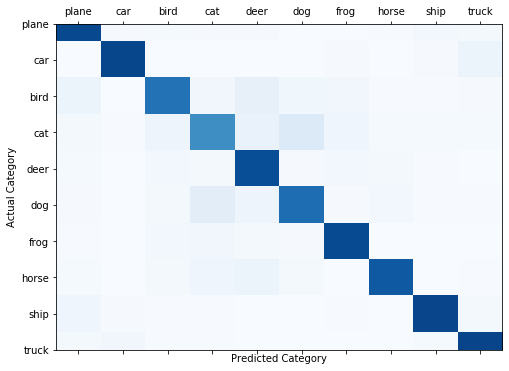

Category   - Accuracy
plane      - 90.5
car        - 91.1
bird       - 74.3
cat        - 63.9
deer       - 88.3
dog        - 76.4
frog       - 89.5
horse      - 84.0
ship       - 91.5
truck      - 92.1

Selected workers

[53 89 88 58 84  3 75 38 74 24 32  6 27 94 91]
Worker 53 : is  Stealthy_Attacker
Worker 89 : is  Stealthy_Attacker
Worker 88 : is  Honest
Worker 58 : is  Honest
Worker 84 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 74 : is  Honest
Worker 24 : is  Honest
Worker 32 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 27 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker
Worker 91 : is  Honest

 | Global Training Round : 59 |


Worker 53 starts training in Global Round:59 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  59


Train Epoch: 1 [0/500	(1%)]	Loss: 1.386706
Train Epoch: 1 [400/500	(81%)]	Loss: 0.361256
Train Epoch: 2 [0/500	(1%)]	Loss: 0.180451
Train Epoch: 2 [400/500	(81%)]	Loss: 0.626136
Train Epoch: 3 [0/500	(1%)]	Loss: 0.250221
Train Epoch: 3 [400/500	(81%)]	Loss: 0.223704
Train Epoch: 4 [0/500	(1%)]	Loss: 0.206603
Train Epoch: 4 [400/500	(81%)]	Loss: 0.174299
Train Epoch: 5 [0/500	(1%)]	Loss: 0.120223
Train Epoch: 5 [400/500	(81%)]	Loss: 0.234759

Performed attacks 1
Worker 53 ends training in Global Round:59 |

Worker 89 starts training in Global Round:59 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  59


Train Epoch: 1 [0/500	(1%)]	Loss: 1.650376
Train Epoch: 1 [400/500	(81%)]	Loss: 0.645426
Train Epoch: 2 [0/500	(1%)]	Loss: 0.366993
Train Epoch: 2 [400/500	(81%)]	Loss: 0.307938
Train Epoch: 3 [0/500	(1%)]	Loss: 0.284510
Train Epoch: 3 [400/500	(81%)]	Loss: 0.493373
Train Epoch: 4 [0/500	(1%)]	Loss: 0.192934
Train Epoch: 4 [400/500	(81%)]	Loss: 0.270571
Train Epoch: 5 [0/500	(1%)]	Loss: 0.194680
Train Epoch: 5 [400/500	(81%)]	Loss: 0.221717

Performed attacks 2
Worker 89 ends training in Global Round:59 |

Worker 88 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.173900
Train Epoch: 1 [400/500	(81%)]	Loss: 0.163343
Train Epoch: 2 [0/500	(1%)]	Loss: 0.109631
Train Epoch: 2 [400/500	(81%)]	Loss: 0.199973
Train Epoch: 3 [0/500	(1%)]	Loss: 0.091335
Train Epoch: 3 [400/500	(81%)]	Loss: 0.147559
Train Epoch: 4 [0/500	(1%)]	Loss: 0.111753
Train Epoch: 4 [400/500	(81%)]	Loss: 0.229850
Train Epoch: 5 [0/500	(1%)]	Loss: 0.154602
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135969

Worker 88 ends training in Global Round:59 |

Worker 58 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.426075
Train Epoch: 1 [400/500	(81%)]	Loss: 0.364687
Train Epoch: 2 [0/500	(1%)]	Loss: 0.234247
Train Epoch: 2 [400/500	(81%)]	Loss: 0.491401
Train Epoch: 3 [0/500	(1%)]	Loss: 0.166516
Train Epoch: 3 [400/500	(81%)]	Loss: 0.339706
Train Epoch: 4 [0/500	(1%)]	Loss: 0.134911
Train Epoch: 4 [400/500	(81%)]	Loss: 0.233585
Train Epoch: 5 [0/500	(1%)]	Loss: 0.098566
Train Epoch: 5 [400/500	(81%)]	Loss: 0.205550

Worker 58 ends training in Global Round:59 |

Worker 84 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.479867
Train Epoch: 1 [400/500	(81%)]	Loss: 0.432207
Train Epoch: 2 [0/500	(1%)]	Loss: 0.149424
Train Epoch: 2 [400/500	(81%)]	Loss: 0.271209
Train Epoch: 3 [0/500	(1%)]	Loss: 0.159964
Train Epoch: 3 [400/500	(81%)]	Loss: 0.307679
Train Epoch: 4 [0/500	(1%)]	Loss: 0.247448
Train Epoch: 4 [400/500	(81%)]	Loss: 0.287714
Train Epoch: 5 [0/500	(1%)]	Loss: 0.183425
Train Epoch: 5 [400/500	(81%)]	Loss: 0.227014

Worker 84 ends training in Global Round:59 |

Worker 3 starts training in Global Round:59 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  59


Train Epoch: 1 [0/500	(1%)]	Loss: 1.510978
Train Epoch: 1 [400/500	(81%)]	Loss: 0.868841
Train Epoch: 2 [0/500	(1%)]	Loss: 0.253740
Train Epoch: 2 [400/500	(81%)]	Loss: 0.628107
Train Epoch: 3 [0/500	(1%)]	Loss: 0.250317
Train Epoch: 3 [400/500	(81%)]	Loss: 0.433424
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200526
Train Epoch: 4 [400/500	(81%)]	Loss: 0.167346
Train Epoch: 5 [0/500	(1%)]	Loss: 0.210233
Train Epoch: 5 [400/500	(81%)]	Loss: 0.222512

Performed attacks 3
Worker 3 ends training in Global Round:59 |

Worker 75 starts training in Global Round:59 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  59


Train Epoch: 1 [0/500	(1%)]	Loss: 1.175820
Train Epoch: 1 [400/500	(81%)]	Loss: 0.615635
Train Epoch: 2 [0/500	(1%)]	Loss: 0.337188
Train Epoch: 2 [400/500	(81%)]	Loss: 0.521256
Train Epoch: 3 [0/500	(1%)]	Loss: 0.253985
Train Epoch: 3 [400/500	(81%)]	Loss: 0.244631
Train Epoch: 4 [0/500	(1%)]	Loss: 0.233522
Train Epoch: 4 [400/500	(81%)]	Loss: 0.184338
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115456
Train Epoch: 5 [400/500	(81%)]	Loss: 0.182943

Performed attacks 4
Worker 75 ends training in Global Round:59 |

Worker 38 starts training in Global Round:59 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  59


Train Epoch: 1 [0/500	(1%)]	Loss: 1.085017
Train Epoch: 1 [400/500	(81%)]	Loss: 0.665676
Train Epoch: 2 [0/500	(1%)]	Loss: 0.205059
Train Epoch: 2 [400/500	(81%)]	Loss: 0.419888
Train Epoch: 3 [0/500	(1%)]	Loss: 0.244258
Train Epoch: 3 [400/500	(81%)]	Loss: 0.506911
Train Epoch: 4 [0/500	(1%)]	Loss: 0.217729
Train Epoch: 4 [400/500	(81%)]	Loss: 0.156581
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132779
Train Epoch: 5 [400/500	(81%)]	Loss: 0.133640

Performed attacks 5
Worker 38 ends training in Global Round:59 |

Worker 74 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.308835
Train Epoch: 1 [400/500	(81%)]	Loss: 0.370743
Train Epoch: 2 [0/500	(1%)]	Loss: 0.139653
Train Epoch: 2 [400/500	(81%)]	Loss: 0.292821
Train Epoch: 3 [0/500	(1%)]	Loss: 0.131345
Train Epoch: 3 [400/500	(81%)]	Loss: 0.160160
Train Epoch: 4 [0/500	(1%)]	Loss: 0.077155
Train Epoch: 4 [400/500	(81%)]	Loss: 0.249610
Train Epoch: 5 [0/500	(1%)]	Loss: 0.117736
Train Epoch: 5 [400/500	(81%)]	Loss: 0.188656

Worker 74 ends training in Global Round:59 |

Worker 24 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.146738
Train Epoch: 1 [400/500	(81%)]	Loss: 0.133121
Train Epoch: 2 [0/500	(1%)]	Loss: 0.061752
Train Epoch: 2 [400/500	(81%)]	Loss: 0.156396
Train Epoch: 3 [0/500	(1%)]	Loss: 0.125612
Train Epoch: 3 [400/500	(81%)]	Loss: 0.188258
Train Epoch: 4 [0/500	(1%)]	Loss: 0.050836
Train Epoch: 4 [400/500	(81%)]	Loss: 0.109853
Train Epoch: 5 [0/500	(1%)]	Loss: 0.062023
Train Epoch: 5 [400/500	(81%)]	Loss: 0.063647

Worker 24 ends training in Global Round:59 |

Worker 32 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.459339
Train Epoch: 1 [400/500	(81%)]	Loss: 0.647894
Train Epoch: 2 [0/500	(1%)]	Loss: 0.261224
Train Epoch: 2 [400/500	(81%)]	Loss: 0.205596
Train Epoch: 3 [0/500	(1%)]	Loss: 0.258492
Train Epoch: 3 [400/500	(81%)]	Loss: 0.382064
Train Epoch: 4 [0/500	(1%)]	Loss: 0.178039
Train Epoch: 4 [400/500	(81%)]	Loss: 0.156434
Train Epoch: 5 [0/500	(1%)]	Loss: 0.180019
Train Epoch: 5 [400/500	(81%)]	Loss: 0.359610

Worker 32 ends training in Global Round:59 |

Worker 6 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.462012
Train Epoch: 1 [400/500	(81%)]	Loss: 0.951606
Train Epoch: 2 [0/500	(1%)]	Loss: 0.382081
Train Epoch: 2 [400/500	(81%)]	Loss: 0.317923
Train Epoch: 3 [0/500	(1%)]	Loss: 0.205910
Train Epoch: 3 [400/500	(81%)]	Loss: 0.307226
Train Epoch: 4 [0/500	(1%)]	Loss: 0.169560
Train Epoch: 4 [400/500	(81%)]	Loss: 0.222566
Train Epoch: 5 [0/500	(1%)]	Loss: 0.153682
Train Epoch: 5 [400/500	(81%)]	Loss: 0.252377

Worker 6 ends training in Global Round:59 |

Worker 27 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.414474
Train Epoch: 1 [400/500	(81%)]	Loss: 0.608022
Train Epoch: 2 [0/500	(1%)]	Loss: 0.204190
Train Epoch: 2 [400/500	(81%)]	Loss: 0.207601
Train Epoch: 3 [0/500	(1%)]	Loss: 0.199924
Train Epoch: 3 [400/500	(81%)]	Loss: 0.284568
Train Epoch: 4 [0/500	(1%)]	Loss: 0.151365
Train Epoch: 4 [400/500	(81%)]	Loss: 0.158987
Train Epoch: 5 [0/500	(1%)]	Loss: 0.159675
Train Epoch: 5 [400/500	(81%)]	Loss: 0.270928

Worker 27 ends training in Global Round:59 |

Worker 94 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.500641
Train Epoch: 1 [400/500	(81%)]	Loss: 0.558871
Train Epoch: 2 [0/500	(1%)]	Loss: 0.315372
Train Epoch: 2 [400/500	(81%)]	Loss: 0.346504
Train Epoch: 3 [0/500	(1%)]	Loss: 0.268900
Train Epoch: 3 [400/500	(81%)]	Loss: 0.334805
Train Epoch: 4 [0/500	(1%)]	Loss: 0.214200
Train Epoch: 4 [400/500	(81%)]	Loss: 0.282051
Train Epoch: 5 [0/500	(1%)]	Loss: 0.158616
Train Epoch: 5 [400/500	(81%)]	Loss: 0.343152

Worker 94 ends training in Global Round:59 |

Worker 91 starts training in Global Round:59 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.462893
Train Epoch: 1 [400/500	(81%)]	Loss: 0.340684
Train Epoch: 2 [0/500	(1%)]	Loss: 0.305943
Train Epoch: 2 [400/500	(81%)]	Loss: 0.340057
Train Epoch: 3 [0/500	(1%)]	Loss: 0.184669
Train Epoch: 3 [400/500	(81%)]	Loss: 0.204613
Train Epoch: 4 [0/500	(1%)]	Loss: 0.172090
Train Epoch: 4 [400/500	(81%)]	Loss: 0.132147
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145226
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220827

Worker 91 ends training in Global Round:59 |
Last layer biases  [array([ 0.03532711, -0.03251219, -0.01311894,  0.03888381,  0.04581954,
       -0.01360784,  0.03770989, -0.02788174, -0.01867313, -0.03604461],
      dtype=float32), array([ 0.03447864, -0.02998265, -0.01261082,  0.03959815,  0.04791407,
       -0.01376418,  0.03968695, -0.03014373, -0.02017635, -0.03909818],
      dtype=float32), array([ 0.0329527 , -0.03173658, -0.01340067,  0.03698857,  0.0395003 ,
       -0.0178915 ,  0.03945721, -0.00910741, -0.02265857, -0.03820217],
      dtyp

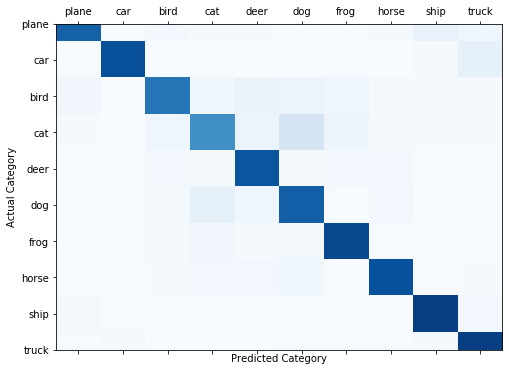

Category   - Accuracy
plane      - 81.0
car        - 87.7
bird       - 73.6
cat        - 63.0
deer       - 85.6
dog        - 81.8
frog       - 90.6
horse      - 87.3
ship       - 93.4
truck      - 94.1

Selected workers

[87 17 76 12 47  4 18 69 82 81 31 80 67 70 14]
Worker 87 : is  Stealthy_Attacker
Worker 17 : is  Honest
Worker 76 : is  Honest
Worker 12 : is  Stealthy_Attacker
Worker 47 : is  Honest
Worker 4 : is  Honest
Worker 18 : is  Stealthy_Attacker
Worker 69 : is  Honest
Worker 82 : is  Honest
Worker 81 : is  Honest
Worker 31 : is  Stealthy_Attacker
Worker 80 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 70 : is  Honest
Worker 14 : is  Stealthy_Attacker

 | Global Training Round : 60 |


Worker 87 starts training in Global Round:60 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  60


Train Epoch: 1 [0/500	(1%)]	Loss: 1.589664
Train Epoch: 1 [400/500	(81%)]	Loss: 0.542311
Train Epoch: 2 [0/500	(1%)]	Loss: 0.359503
Train Epoch: 2 [400/500	(81%)]	Loss: 0.407639
Train Epoch: 3 [0/500	(1%)]	Loss: 0.157639
Train Epoch: 3 [400/500	(81%)]	Loss: 0.326705
Train Epoch: 4 [0/500	(1%)]	Loss: 0.247915
Train Epoch: 4 [400/500	(81%)]	Loss: 0.073788
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106238
Train Epoch: 5 [400/500	(81%)]	Loss: 0.148737

Performed attacks 1
Worker 87 ends training in Global Round:60 |

Worker 17 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.392086
Train Epoch: 1 [400/500	(81%)]	Loss: 0.400010
Train Epoch: 2 [0/500	(1%)]	Loss: 0.141311
Train Epoch: 2 [400/500	(81%)]	Loss: 0.220678
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142938
Train Epoch: 3 [400/500	(81%)]	Loss: 0.093177
Train Epoch: 4 [0/500	(1%)]	Loss: 0.130375
Train Epoch: 4 [400/500	(81%)]	Loss: 0.232874
Train Epoch: 5 [0/500	(1%)]	Loss: 0.085051
Train Epoch: 5 [400/500	(81%)]	Loss: 0.060919

Worker 17 ends training in Global Round:60 |

Worker 76 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.496259
Train Epoch: 1 [400/500	(81%)]	Loss: 0.399607
Train Epoch: 2 [0/500	(1%)]	Loss: 0.188809
Train Epoch: 2 [400/500	(81%)]	Loss: 0.235170
Train Epoch: 3 [0/500	(1%)]	Loss: 0.166382
Train Epoch: 3 [400/500	(81%)]	Loss: 0.255622
Train Epoch: 4 [0/500	(1%)]	Loss: 0.088106
Train Epoch: 4 [400/500	(81%)]	Loss: 0.233178
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157892
Train Epoch: 5 [400/500	(81%)]	Loss: 0.127938

Worker 76 ends training in Global Round:60 |

Worker 12 starts training in Global Round:60 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  60


Train Epoch: 1 [0/500	(1%)]	Loss: 1.081924
Train Epoch: 1 [400/500	(81%)]	Loss: 0.461112
Train Epoch: 2 [0/500	(1%)]	Loss: 0.149100
Train Epoch: 2 [400/500	(81%)]	Loss: 0.283467
Train Epoch: 3 [0/500	(1%)]	Loss: 0.229050
Train Epoch: 3 [400/500	(81%)]	Loss: 0.261798
Train Epoch: 4 [0/500	(1%)]	Loss: 0.194851
Train Epoch: 4 [400/500	(81%)]	Loss: 0.261253
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107361
Train Epoch: 5 [400/500	(81%)]	Loss: 0.125773

Performed attacks 2
Worker 12 ends training in Global Round:60 |

Worker 47 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.429727
Train Epoch: 1 [400/500	(81%)]	Loss: 0.318784
Train Epoch: 2 [0/500	(1%)]	Loss: 0.188133
Train Epoch: 2 [400/500	(81%)]	Loss: 0.328667
Train Epoch: 3 [0/500	(1%)]	Loss: 0.204835
Train Epoch: 3 [400/500	(81%)]	Loss: 0.268815
Train Epoch: 4 [0/500	(1%)]	Loss: 0.193192
Train Epoch: 4 [400/500	(81%)]	Loss: 0.277529
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106339
Train Epoch: 5 [400/500	(81%)]	Loss: 0.113634

Worker 47 ends training in Global Round:60 |

Worker 4 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.272320
Train Epoch: 1 [400/500	(81%)]	Loss: 0.173683
Train Epoch: 2 [0/500	(1%)]	Loss: 0.155483
Train Epoch: 2 [400/500	(81%)]	Loss: 0.102124
Train Epoch: 3 [0/500	(1%)]	Loss: 0.087820
Train Epoch: 3 [400/500	(81%)]	Loss: 0.166674
Train Epoch: 4 [0/500	(1%)]	Loss: 0.098597
Train Epoch: 4 [400/500	(81%)]	Loss: 0.059253
Train Epoch: 5 [0/500	(1%)]	Loss: 0.058523
Train Epoch: 5 [400/500	(81%)]	Loss: 0.060222

Worker 4 ends training in Global Round:60 |

Worker 18 starts training in Global Round:60 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  60


Train Epoch: 1 [0/500	(1%)]	Loss: 1.046217
Train Epoch: 1 [400/500	(81%)]	Loss: 0.738523
Train Epoch: 2 [0/500	(1%)]	Loss: 0.314644
Train Epoch: 2 [400/500	(81%)]	Loss: 0.494507
Train Epoch: 3 [0/500	(1%)]	Loss: 0.358632
Train Epoch: 3 [400/500	(81%)]	Loss: 0.428989
Train Epoch: 4 [0/500	(1%)]	Loss: 0.177749
Train Epoch: 4 [400/500	(81%)]	Loss: 0.281596
Train Epoch: 5 [0/500	(1%)]	Loss: 0.189527
Train Epoch: 5 [400/500	(81%)]	Loss: 0.258063

Performed attacks 3
Worker 18 ends training in Global Round:60 |

Worker 69 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.353794
Train Epoch: 1 [400/500	(81%)]	Loss: 0.472772
Train Epoch: 2 [0/500	(1%)]	Loss: 0.203738
Train Epoch: 2 [400/500	(81%)]	Loss: 0.285763
Train Epoch: 3 [0/500	(1%)]	Loss: 0.247936
Train Epoch: 3 [400/500	(81%)]	Loss: 0.179123
Train Epoch: 4 [0/500	(1%)]	Loss: 0.189069
Train Epoch: 4 [400/500	(81%)]	Loss: 0.170185
Train Epoch: 5 [0/500	(1%)]	Loss: 0.102575
Train Epoch: 5 [400/500	(81%)]	Loss: 0.205293

Worker 69 ends training in Global Round:60 |

Worker 82 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.250291
Train Epoch: 1 [400/500	(81%)]	Loss: 0.200826
Train Epoch: 2 [0/500	(1%)]	Loss: 0.105930
Train Epoch: 2 [400/500	(81%)]	Loss: 0.174123
Train Epoch: 3 [0/500	(1%)]	Loss: 0.051839
Train Epoch: 3 [400/500	(81%)]	Loss: 0.087189
Train Epoch: 4 [0/500	(1%)]	Loss: 0.120030
Train Epoch: 4 [400/500	(81%)]	Loss: 0.078384
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128185
Train Epoch: 5 [400/500	(81%)]	Loss: 0.091925

Worker 82 ends training in Global Round:60 |

Worker 81 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.288656
Train Epoch: 1 [400/500	(81%)]	Loss: 0.372168
Train Epoch: 2 [0/500	(1%)]	Loss: 0.147737
Train Epoch: 2 [400/500	(81%)]	Loss: 0.155885
Train Epoch: 3 [0/500	(1%)]	Loss: 0.108412
Train Epoch: 3 [400/500	(81%)]	Loss: 0.173550
Train Epoch: 4 [0/500	(1%)]	Loss: 0.167980
Train Epoch: 4 [400/500	(81%)]	Loss: 0.199071
Train Epoch: 5 [0/500	(1%)]	Loss: 0.078501
Train Epoch: 5 [400/500	(81%)]	Loss: 0.197483

Worker 81 ends training in Global Round:60 |

Worker 31 starts training in Global Round:60 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  60


Train Epoch: 1 [0/500	(1%)]	Loss: 1.273895
Train Epoch: 1 [400/500	(81%)]	Loss: 0.649661
Train Epoch: 2 [0/500	(1%)]	Loss: 0.395114
Train Epoch: 2 [400/500	(81%)]	Loss: 0.801325
Train Epoch: 3 [0/500	(1%)]	Loss: 0.330908
Train Epoch: 3 [400/500	(81%)]	Loss: 0.502614
Train Epoch: 4 [0/500	(1%)]	Loss: 0.310735
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182349
Train Epoch: 5 [0/500	(1%)]	Loss: 0.161663
Train Epoch: 5 [400/500	(81%)]	Loss: 0.294140

Performed attacks 4
Worker 31 ends training in Global Round:60 |

Worker 80 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.262530
Train Epoch: 1 [400/500	(81%)]	Loss: 0.298102
Train Epoch: 2 [0/500	(1%)]	Loss: 0.136307
Train Epoch: 2 [400/500	(81%)]	Loss: 0.185140
Train Epoch: 3 [0/500	(1%)]	Loss: 0.072838
Train Epoch: 3 [400/500	(81%)]	Loss: 0.184656
Train Epoch: 4 [0/500	(1%)]	Loss: 0.051550
Train Epoch: 4 [400/500	(81%)]	Loss: 0.110498
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082801
Train Epoch: 5 [400/500	(81%)]	Loss: 0.146077

Worker 80 ends training in Global Round:60 |

Worker 67 starts training in Global Round:60 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  60


Train Epoch: 1 [0/500	(1%)]	Loss: 1.163754
Train Epoch: 1 [400/500	(81%)]	Loss: 0.720010
Train Epoch: 2 [0/500	(1%)]	Loss: 0.359687
Train Epoch: 2 [400/500	(81%)]	Loss: 0.646411
Train Epoch: 3 [0/500	(1%)]	Loss: 0.349716
Train Epoch: 3 [400/500	(81%)]	Loss: 0.334903
Train Epoch: 4 [0/500	(1%)]	Loss: 0.332203
Train Epoch: 4 [400/500	(81%)]	Loss: 0.204681
Train Epoch: 5 [0/500	(1%)]	Loss: 0.431312
Train Epoch: 5 [400/500	(81%)]	Loss: 0.223702

Performed attacks 5
Worker 67 ends training in Global Round:60 |

Worker 70 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.237337
Train Epoch: 1 [400/500	(81%)]	Loss: 0.122095
Train Epoch: 2 [0/500	(1%)]	Loss: 0.143176
Train Epoch: 2 [400/500	(81%)]	Loss: 0.137133
Train Epoch: 3 [0/500	(1%)]	Loss: 0.218618
Train Epoch: 3 [400/500	(81%)]	Loss: 0.276390
Train Epoch: 4 [0/500	(1%)]	Loss: 0.273433
Train Epoch: 4 [400/500	(81%)]	Loss: 0.154794
Train Epoch: 5 [0/500	(1%)]	Loss: 0.113335
Train Epoch: 5 [400/500	(81%)]	Loss: 0.188746

Worker 70 ends training in Global Round:60 |

Worker 14 starts training in Global Round:60 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.522235
Train Epoch: 1 [400/500	(81%)]	Loss: 0.684166
Train Epoch: 2 [0/500	(1%)]	Loss: 0.274295
Train Epoch: 2 [400/500	(81%)]	Loss: 0.384985
Train Epoch: 3 [0/500	(1%)]	Loss: 0.140756
Train Epoch: 3 [400/500	(81%)]	Loss: 0.384284
Train Epoch: 4 [0/500	(1%)]	Loss: 0.162192
Train Epoch: 4 [400/500	(81%)]	Loss: 0.293991
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203108
Train Epoch: 5 [400/500	(81%)]	Loss: 0.197375

Worker 14 ends training in Global Round:60 |
Last layer biases  [array([ 0.03494827, -0.03224865, -0.01271661,  0.0377268 ,  0.05011077,
       -0.01458849,  0.04025318, -0.02774112, -0.02404849, -0.03579375],
      dtype=float32), array([ 0.03323886, -0.03193296, -0.01534787,  0.03776344,  0.03700761,
       -0.0168814 ,  0.03894619, -0.00678248, -0.02063834, -0.03947113],
      dtype=float32), array([ 0.03319228, -0.03041382, -0.01222786,  0.03637576,  0.03869107,
       -0.01809003,  0.04155621, -0.00935495, -0.02313137, -0.04069536],
      dtyp

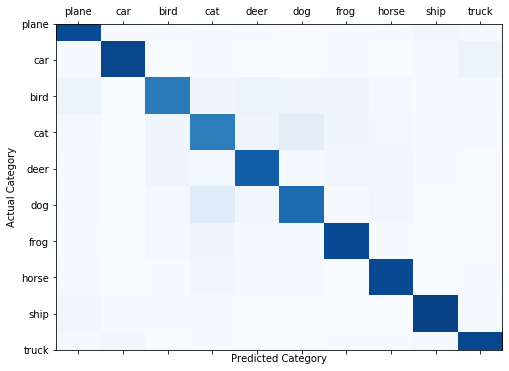

Category   - Accuracy
plane      - 89.1
car        - 91.6
bird       - 71.3
cat        - 69.9
deer       - 82.0
dog        - 77.0
frog       - 89.6
horse      - 89.9
ship       - 92.4
truck      - 90.7

Selected workers

[ 3 11 37 33 50 84 89 39 16 13 25 93 30 67 74]
Worker 3 : is  Stealthy_Attacker
Worker 11 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 50 : is  Stealthy_Attacker
Worker 84 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 39 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 13 : is  Stealthy_Attacker
Worker 25 : is  Honest
Worker 93 : is  Honest
Worker 30 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 74 : is  Honest

 | Global Training Round : 61 |


Worker 3 starts training in Global Round:61 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  61


Train Epoch: 1 [0/500	(1%)]	Loss: 1.414916
Train Epoch: 1 [400/500	(81%)]	Loss: 0.685959
Train Epoch: 2 [0/500	(1%)]	Loss: 0.258142
Train Epoch: 2 [400/500	(81%)]	Loss: 0.509068
Train Epoch: 3 [0/500	(1%)]	Loss: 0.233021
Train Epoch: 3 [400/500	(81%)]	Loss: 0.227406
Train Epoch: 4 [0/500	(1%)]	Loss: 0.279308
Train Epoch: 4 [400/500	(81%)]	Loss: 0.250163
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124263
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220219

Performed attacks 1
Worker 3 ends training in Global Round:61 |

Worker 11 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.200529
Train Epoch: 1 [400/500	(81%)]	Loss: 0.394742
Train Epoch: 2 [0/500	(1%)]	Loss: 0.176810
Train Epoch: 2 [400/500	(81%)]	Loss: 0.311515
Train Epoch: 3 [0/500	(1%)]	Loss: 0.119670
Train Epoch: 3 [400/500	(81%)]	Loss: 0.151358
Train Epoch: 4 [0/500	(1%)]	Loss: 0.177625
Train Epoch: 4 [400/500	(81%)]	Loss: 0.119100
Train Epoch: 5 [0/500	(1%)]	Loss: 0.140423
Train Epoch: 5 [400/500	(81%)]	Loss: 0.102955

Worker 11 ends training in Global Round:61 |

Worker 37 starts training in Global Round:61 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  61


Train Epoch: 1 [0/500	(1%)]	Loss: 1.387180
Train Epoch: 1 [400/500	(81%)]	Loss: 0.618566
Train Epoch: 2 [0/500	(1%)]	Loss: 0.254560
Train Epoch: 2 [400/500	(81%)]	Loss: 0.342621
Train Epoch: 3 [0/500	(1%)]	Loss: 0.237363
Train Epoch: 3 [400/500	(81%)]	Loss: 0.398871
Train Epoch: 4 [0/500	(1%)]	Loss: 0.241949
Train Epoch: 4 [400/500	(81%)]	Loss: 0.154392
Train Epoch: 5 [0/500	(1%)]	Loss: 0.167776
Train Epoch: 5 [400/500	(81%)]	Loss: 0.300925

Performed attacks 2
Worker 37 ends training in Global Round:61 |

Worker 33 starts training in Global Round:61 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  61


Train Epoch: 1 [0/500	(1%)]	Loss: 1.040454
Train Epoch: 1 [400/500	(81%)]	Loss: 0.524654
Train Epoch: 2 [0/500	(1%)]	Loss: 0.388185
Train Epoch: 2 [400/500	(81%)]	Loss: 0.436455
Train Epoch: 3 [0/500	(1%)]	Loss: 0.314317
Train Epoch: 3 [400/500	(81%)]	Loss: 0.274366
Train Epoch: 4 [0/500	(1%)]	Loss: 0.218172
Train Epoch: 4 [400/500	(81%)]	Loss: 0.356746
Train Epoch: 5 [0/500	(1%)]	Loss: 0.181570
Train Epoch: 5 [400/500	(81%)]	Loss: 0.131768

Performed attacks 3
Worker 33 ends training in Global Round:61 |

Worker 50 starts training in Global Round:61 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  61


Train Epoch: 1 [0/500	(1%)]	Loss: 1.297716
Train Epoch: 1 [400/500	(81%)]	Loss: 0.428243
Train Epoch: 2 [0/500	(1%)]	Loss: 0.255793
Train Epoch: 2 [400/500	(81%)]	Loss: 0.401136
Train Epoch: 3 [0/500	(1%)]	Loss: 0.228763
Train Epoch: 3 [400/500	(81%)]	Loss: 0.384970
Train Epoch: 4 [0/500	(1%)]	Loss: 0.268242
Train Epoch: 4 [400/500	(81%)]	Loss: 0.206344
Train Epoch: 5 [0/500	(1%)]	Loss: 0.253912
Train Epoch: 5 [400/500	(81%)]	Loss: 0.415603

Performed attacks 4
Worker 50 ends training in Global Round:61 |

Worker 84 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.341779
Train Epoch: 1 [400/500	(81%)]	Loss: 0.382194
Train Epoch: 2 [0/500	(1%)]	Loss: 0.244947
Train Epoch: 2 [400/500	(81%)]	Loss: 0.172904
Train Epoch: 3 [0/500	(1%)]	Loss: 0.081425
Train Epoch: 3 [400/500	(81%)]	Loss: 0.254649
Train Epoch: 4 [0/500	(1%)]	Loss: 0.232237
Train Epoch: 4 [400/500	(81%)]	Loss: 0.126345
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124627
Train Epoch: 5 [400/500	(81%)]	Loss: 0.086571

Worker 84 ends training in Global Round:61 |

Worker 89 starts training in Global Round:61 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  61


Train Epoch: 1 [0/500	(1%)]	Loss: 1.512384
Train Epoch: 1 [400/500	(81%)]	Loss: 0.588647
Train Epoch: 2 [0/500	(1%)]	Loss: 0.368505
Train Epoch: 2 [400/500	(81%)]	Loss: 0.402305
Train Epoch: 3 [0/500	(1%)]	Loss: 0.185418
Train Epoch: 3 [400/500	(81%)]	Loss: 0.331871
Train Epoch: 4 [0/500	(1%)]	Loss: 0.245610
Train Epoch: 4 [400/500	(81%)]	Loss: 0.376664
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203268
Train Epoch: 5 [400/500	(81%)]	Loss: 0.174976

Performed attacks 5
Worker 89 ends training in Global Round:61 |

Worker 39 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.230184
Train Epoch: 1 [400/500	(81%)]	Loss: 0.418556
Train Epoch: 2 [0/500	(1%)]	Loss: 0.139012
Train Epoch: 2 [400/500	(81%)]	Loss: 0.193881
Train Epoch: 3 [0/500	(1%)]	Loss: 0.103100
Train Epoch: 3 [400/500	(81%)]	Loss: 0.096734
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083624
Train Epoch: 4 [400/500	(81%)]	Loss: 0.080746
Train Epoch: 5 [0/500	(1%)]	Loss: 0.058273
Train Epoch: 5 [400/500	(81%)]	Loss: 0.097928

Worker 39 ends training in Global Round:61 |

Worker 16 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.438182
Train Epoch: 1 [400/500	(81%)]	Loss: 0.754858
Train Epoch: 2 [0/500	(1%)]	Loss: 0.290878
Train Epoch: 2 [400/500	(81%)]	Loss: 0.337947
Train Epoch: 3 [0/500	(1%)]	Loss: 0.214437
Train Epoch: 3 [400/500	(81%)]	Loss: 0.295906
Train Epoch: 4 [0/500	(1%)]	Loss: 0.233960
Train Epoch: 4 [400/500	(81%)]	Loss: 0.402741
Train Epoch: 5 [0/500	(1%)]	Loss: 0.154464
Train Epoch: 5 [400/500	(81%)]	Loss: 0.086126

Worker 16 ends training in Global Round:61 |

Worker 13 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.457763
Train Epoch: 1 [400/500	(81%)]	Loss: 0.568127
Train Epoch: 2 [0/500	(1%)]	Loss: 0.331599
Train Epoch: 2 [400/500	(81%)]	Loss: 0.482981
Train Epoch: 3 [0/500	(1%)]	Loss: 0.246766
Train Epoch: 3 [400/500	(81%)]	Loss: 0.352241
Train Epoch: 4 [0/500	(1%)]	Loss: 0.220518
Train Epoch: 4 [400/500	(81%)]	Loss: 0.290858
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148536
Train Epoch: 5 [400/500	(81%)]	Loss: 0.281778

Worker 13 ends training in Global Round:61 |

Worker 25 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.303648
Train Epoch: 1 [400/500	(81%)]	Loss: 0.399119
Train Epoch: 2 [0/500	(1%)]	Loss: 0.153611
Train Epoch: 2 [400/500	(81%)]	Loss: 0.282383
Train Epoch: 3 [0/500	(1%)]	Loss: 0.125356
Train Epoch: 3 [400/500	(81%)]	Loss: 0.366205
Train Epoch: 4 [0/500	(1%)]	Loss: 0.085356
Train Epoch: 4 [400/500	(81%)]	Loss: 0.164758
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145396
Train Epoch: 5 [400/500	(81%)]	Loss: 0.207289

Worker 25 ends training in Global Round:61 |

Worker 93 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.176147
Train Epoch: 1 [400/500	(81%)]	Loss: 0.260381
Train Epoch: 2 [0/500	(1%)]	Loss: 0.174736
Train Epoch: 2 [400/500	(81%)]	Loss: 0.170417
Train Epoch: 3 [0/500	(1%)]	Loss: 0.115334
Train Epoch: 3 [400/500	(81%)]	Loss: 0.125092
Train Epoch: 4 [0/500	(1%)]	Loss: 0.068796
Train Epoch: 4 [400/500	(81%)]	Loss: 0.172437
Train Epoch: 5 [0/500	(1%)]	Loss: 0.048382
Train Epoch: 5 [400/500	(81%)]	Loss: 0.071655

Worker 93 ends training in Global Round:61 |

Worker 30 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.502709
Train Epoch: 1 [400/500	(81%)]	Loss: 0.424552
Train Epoch: 2 [0/500	(1%)]	Loss: 0.312432
Train Epoch: 2 [400/500	(81%)]	Loss: 0.200233
Train Epoch: 3 [0/500	(1%)]	Loss: 0.192452
Train Epoch: 3 [400/500	(81%)]	Loss: 0.292069
Train Epoch: 4 [0/500	(1%)]	Loss: 0.132503
Train Epoch: 4 [400/500	(81%)]	Loss: 0.157544
Train Epoch: 5 [0/500	(1%)]	Loss: 0.193797
Train Epoch: 5 [400/500	(81%)]	Loss: 0.265735

Worker 30 ends training in Global Round:61 |

Worker 67 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.457818
Train Epoch: 1 [400/500	(81%)]	Loss: 0.712302
Train Epoch: 2 [0/500	(1%)]	Loss: 0.293234
Train Epoch: 2 [400/500	(81%)]	Loss: 0.473627
Train Epoch: 3 [0/500	(1%)]	Loss: 0.496477
Train Epoch: 3 [400/500	(81%)]	Loss: 0.293109
Train Epoch: 4 [0/500	(1%)]	Loss: 0.219952
Train Epoch: 4 [400/500	(81%)]	Loss: 0.172403
Train Epoch: 5 [0/500	(1%)]	Loss: 0.207385
Train Epoch: 5 [400/500	(81%)]	Loss: 0.355736

Worker 67 ends training in Global Round:61 |

Worker 74 starts training in Global Round:61 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.243509
Train Epoch: 1 [400/500	(81%)]	Loss: 0.323781
Train Epoch: 2 [0/500	(1%)]	Loss: 0.113801
Train Epoch: 2 [400/500	(81%)]	Loss: 0.122590
Train Epoch: 3 [0/500	(1%)]	Loss: 0.115863
Train Epoch: 3 [400/500	(81%)]	Loss: 0.175293
Train Epoch: 4 [0/500	(1%)]	Loss: 0.070588
Train Epoch: 4 [400/500	(81%)]	Loss: 0.148664
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114879
Train Epoch: 5 [400/500	(81%)]	Loss: 0.123936

Worker 74 ends training in Global Round:61 |
Last layer biases  [array([ 0.0367442 , -0.02764414, -0.01361935,  0.03739505,  0.05105029,
       -0.01404837,  0.03801575, -0.03011672, -0.02154412, -0.04033065],
      dtype=float32), array([ 0.03509873, -0.03157151, -0.01549345,  0.03886257,  0.03975593,
       -0.01788991,  0.03798449, -0.00869059, -0.02195661, -0.04019775],
      dtype=float32), array([ 0.03520624, -0.03363741, -0.01303597,  0.04108771,  0.05063908,
       -0.01515937,  0.03806487, -0.02811829, -0.01877536, -0.04036961],
      dtyp

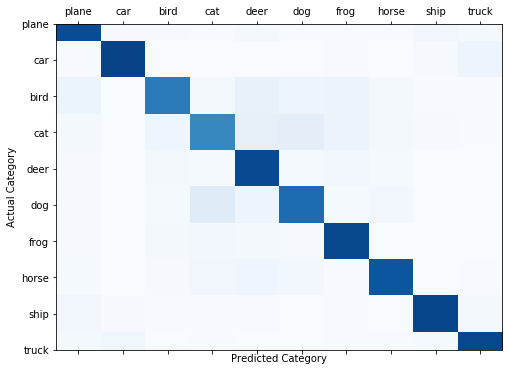

Category   - Accuracy
plane      - 88.9
car        - 92.4
bird       - 71.0
cat        - 66.4
deer       - 89.6
dog        - 76.6
frog       - 90.6
horse      - 85.3
ship       - 91.2
truck      - 90.7

Selected workers

[50 13 33 34 10 58 64 77 52 41 26  7 49 53 36]
Worker 50 : is  Stealthy_Attacker
Worker 13 : is  Stealthy_Attacker
Worker 33 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 10 : is  Honest
Worker 58 : is  Honest
Worker 64 : is  Honest
Worker 77 : is  Honest
Worker 52 : is  Stealthy_Attacker
Worker 41 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 7 : is  Honest
Worker 49 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 36 : is  Honest

 | Global Training Round : 62 |


Worker 50 starts training in Global Round:62 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  62


Train Epoch: 1 [0/500	(1%)]	Loss: 1.400959
Train Epoch: 1 [400/500	(81%)]	Loss: 0.443235
Train Epoch: 2 [0/500	(1%)]	Loss: 0.419531
Train Epoch: 2 [400/500	(81%)]	Loss: 0.392292
Train Epoch: 3 [0/500	(1%)]	Loss: 0.268756
Train Epoch: 3 [400/500	(81%)]	Loss: 0.538509
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143306
Train Epoch: 4 [400/500	(81%)]	Loss: 0.321664
Train Epoch: 5 [0/500	(1%)]	Loss: 0.254729
Train Epoch: 5 [400/500	(81%)]	Loss: 0.445850

Performed attacks 1
Worker 50 ends training in Global Round:62 |

Worker 13 starts training in Global Round:62 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  62


Train Epoch: 1 [0/500	(1%)]	Loss: 1.018769
Train Epoch: 1 [400/500	(81%)]	Loss: 0.428813
Train Epoch: 2 [0/500	(1%)]	Loss: 0.197133
Train Epoch: 2 [400/500	(81%)]	Loss: 0.217354
Train Epoch: 3 [0/500	(1%)]	Loss: 0.126429
Train Epoch: 3 [400/500	(81%)]	Loss: 0.153674
Train Epoch: 4 [0/500	(1%)]	Loss: 0.182821
Train Epoch: 4 [400/500	(81%)]	Loss: 0.239275
Train Epoch: 5 [0/500	(1%)]	Loss: 0.077851
Train Epoch: 5 [400/500	(81%)]	Loss: 0.112122

Performed attacks 2
Worker 13 ends training in Global Round:62 |

Worker 33 starts training in Global Round:62 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  62


Train Epoch: 1 [0/500	(1%)]	Loss: 1.023270
Train Epoch: 1 [400/500	(81%)]	Loss: 0.538731
Train Epoch: 2 [0/500	(1%)]	Loss: 0.352054
Train Epoch: 2 [400/500	(81%)]	Loss: 0.339731
Train Epoch: 3 [0/500	(1%)]	Loss: 0.222397
Train Epoch: 3 [400/500	(81%)]	Loss: 0.290391
Train Epoch: 4 [0/500	(1%)]	Loss: 0.227385
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169230
Train Epoch: 5 [0/500	(1%)]	Loss: 0.190483
Train Epoch: 5 [400/500	(81%)]	Loss: 0.115651

Performed attacks 3
Worker 33 ends training in Global Round:62 |

Worker 34 starts training in Global Round:62 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  62


Train Epoch: 1 [0/500	(1%)]	Loss: 0.997771
Train Epoch: 1 [400/500	(81%)]	Loss: 0.530268
Train Epoch: 2 [0/500	(1%)]	Loss: 0.237440
Train Epoch: 2 [400/500	(81%)]	Loss: 0.370699
Train Epoch: 3 [0/500	(1%)]	Loss: 0.185776
Train Epoch: 3 [400/500	(81%)]	Loss: 0.253275
Train Epoch: 4 [0/500	(1%)]	Loss: 0.139015
Train Epoch: 4 [400/500	(81%)]	Loss: 0.204677
Train Epoch: 5 [0/500	(1%)]	Loss: 0.200727
Train Epoch: 5 [400/500	(81%)]	Loss: 0.304524

Performed attacks 4
Worker 34 ends training in Global Round:62 |

Worker 10 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.305044
Train Epoch: 1 [400/500	(81%)]	Loss: 0.438746
Train Epoch: 2 [0/500	(1%)]	Loss: 0.214862
Train Epoch: 2 [400/500	(81%)]	Loss: 0.273166
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127918
Train Epoch: 3 [400/500	(81%)]	Loss: 0.084111
Train Epoch: 4 [0/500	(1%)]	Loss: 0.075655
Train Epoch: 4 [400/500	(81%)]	Loss: 0.200251
Train Epoch: 5 [0/500	(1%)]	Loss: 0.079082
Train Epoch: 5 [400/500	(81%)]	Loss: 0.167448

Worker 10 ends training in Global Round:62 |

Worker 58 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.488608
Train Epoch: 1 [400/500	(81%)]	Loss: 0.431237
Train Epoch: 2 [0/500	(1%)]	Loss: 0.166064
Train Epoch: 2 [400/500	(81%)]	Loss: 0.348747
Train Epoch: 3 [0/500	(1%)]	Loss: 0.146872
Train Epoch: 3 [400/500	(81%)]	Loss: 0.242946
Train Epoch: 4 [0/500	(1%)]	Loss: 0.135571
Train Epoch: 4 [400/500	(81%)]	Loss: 0.154293
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126991
Train Epoch: 5 [400/500	(81%)]	Loss: 0.219856

Worker 58 ends training in Global Round:62 |

Worker 64 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.327748
Train Epoch: 1 [400/500	(81%)]	Loss: 0.528568
Train Epoch: 2 [0/500	(1%)]	Loss: 0.316527
Train Epoch: 2 [400/500	(81%)]	Loss: 0.365735
Train Epoch: 3 [0/500	(1%)]	Loss: 0.161345
Train Epoch: 3 [400/500	(81%)]	Loss: 0.204939
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156677
Train Epoch: 4 [400/500	(81%)]	Loss: 0.187257
Train Epoch: 5 [0/500	(1%)]	Loss: 0.324922
Train Epoch: 5 [400/500	(81%)]	Loss: 0.114261

Worker 64 ends training in Global Round:62 |

Worker 77 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.511442
Train Epoch: 1 [400/500	(81%)]	Loss: 0.567743
Train Epoch: 2 [0/500	(1%)]	Loss: 0.352287
Train Epoch: 2 [400/500	(81%)]	Loss: 0.422592
Train Epoch: 3 [0/500	(1%)]	Loss: 0.242147
Train Epoch: 3 [400/500	(81%)]	Loss: 0.374948
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170013
Train Epoch: 4 [400/500	(81%)]	Loss: 0.257793
Train Epoch: 5 [0/500	(1%)]	Loss: 0.264397
Train Epoch: 5 [400/500	(81%)]	Loss: 0.215488

Worker 77 ends training in Global Round:62 |

Worker 52 starts training in Global Round:62 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  62


Train Epoch: 1 [0/500	(1%)]	Loss: 0.803644
Train Epoch: 1 [400/500	(81%)]	Loss: 0.524517
Train Epoch: 2 [0/500	(1%)]	Loss: 0.353884
Train Epoch: 2 [400/500	(81%)]	Loss: 0.431814
Train Epoch: 3 [0/500	(1%)]	Loss: 0.152629
Train Epoch: 3 [400/500	(81%)]	Loss: 0.184795
Train Epoch: 4 [0/500	(1%)]	Loss: 0.232075
Train Epoch: 4 [400/500	(81%)]	Loss: 0.295343
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128329
Train Epoch: 5 [400/500	(81%)]	Loss: 0.285769

Performed attacks 5
Worker 52 ends training in Global Round:62 |

Worker 41 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.471445
Train Epoch: 1 [400/500	(81%)]	Loss: 0.752106
Train Epoch: 2 [0/500	(1%)]	Loss: 0.268830
Train Epoch: 2 [400/500	(81%)]	Loss: 0.439162
Train Epoch: 3 [0/500	(1%)]	Loss: 0.284054
Train Epoch: 3 [400/500	(81%)]	Loss: 0.288823
Train Epoch: 4 [0/500	(1%)]	Loss: 0.173332
Train Epoch: 4 [400/500	(81%)]	Loss: 0.202619
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125468
Train Epoch: 5 [400/500	(81%)]	Loss: 0.221824

Worker 41 ends training in Global Round:62 |

Worker 26 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.243360
Train Epoch: 1 [400/500	(81%)]	Loss: 0.243705
Train Epoch: 2 [0/500	(1%)]	Loss: 0.072536
Train Epoch: 2 [400/500	(81%)]	Loss: 0.147273
Train Epoch: 3 [0/500	(1%)]	Loss: 0.058868
Train Epoch: 3 [400/500	(81%)]	Loss: 0.135762
Train Epoch: 4 [0/500	(1%)]	Loss: 0.101377
Train Epoch: 4 [400/500	(81%)]	Loss: 0.157092
Train Epoch: 5 [0/500	(1%)]	Loss: 0.096294
Train Epoch: 5 [400/500	(81%)]	Loss: 0.054504

Worker 26 ends training in Global Round:62 |

Worker 7 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.407944
Train Epoch: 1 [400/500	(81%)]	Loss: 0.277048
Train Epoch: 2 [0/500	(1%)]	Loss: 0.259713
Train Epoch: 2 [400/500	(81%)]	Loss: 0.222166
Train Epoch: 3 [0/500	(1%)]	Loss: 0.226300
Train Epoch: 3 [400/500	(81%)]	Loss: 0.205043
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156931
Train Epoch: 4 [400/500	(81%)]	Loss: 0.159468
Train Epoch: 5 [0/500	(1%)]	Loss: 0.150738
Train Epoch: 5 [400/500	(81%)]	Loss: 0.046602

Worker 7 ends training in Global Round:62 |

Worker 49 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.272425
Train Epoch: 1 [400/500	(81%)]	Loss: 0.373692
Train Epoch: 2 [0/500	(1%)]	Loss: 0.215205
Train Epoch: 2 [400/500	(81%)]	Loss: 0.230416
Train Epoch: 3 [0/500	(1%)]	Loss: 0.147173
Train Epoch: 3 [400/500	(81%)]	Loss: 0.135732
Train Epoch: 4 [0/500	(1%)]	Loss: 0.207707
Train Epoch: 4 [400/500	(81%)]	Loss: 0.174234
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089042
Train Epoch: 5 [400/500	(81%)]	Loss: 0.162193

Worker 49 ends training in Global Round:62 |

Worker 53 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.497401
Train Epoch: 1 [400/500	(81%)]	Loss: 0.514784
Train Epoch: 2 [0/500	(1%)]	Loss: 0.248001
Train Epoch: 2 [400/500	(81%)]	Loss: 0.344628
Train Epoch: 3 [0/500	(1%)]	Loss: 0.252091
Train Epoch: 3 [400/500	(81%)]	Loss: 0.255637
Train Epoch: 4 [0/500	(1%)]	Loss: 0.115039
Train Epoch: 4 [400/500	(81%)]	Loss: 0.217994
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145096
Train Epoch: 5 [400/500	(81%)]	Loss: 0.187066

Worker 53 ends training in Global Round:62 |

Worker 36 starts training in Global Round:62 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.370492
Train Epoch: 1 [400/500	(81%)]	Loss: 0.365589
Train Epoch: 2 [0/500	(1%)]	Loss: 0.154961
Train Epoch: 2 [400/500	(81%)]	Loss: 0.190238
Train Epoch: 3 [0/500	(1%)]	Loss: 0.143380
Train Epoch: 3 [400/500	(81%)]	Loss: 0.112685
Train Epoch: 4 [0/500	(1%)]	Loss: 0.065931
Train Epoch: 4 [400/500	(81%)]	Loss: 0.178155
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112693
Train Epoch: 5 [400/500	(81%)]	Loss: 0.122624

Worker 36 ends training in Global Round:62 |
Last layer biases  [array([ 0.03544913, -0.03164511, -0.01236909,  0.03875107,  0.04808665,
       -0.01554688,  0.0423972 , -0.02670621, -0.02326712, -0.03924773],
      dtype=float32), array([ 0.03966533, -0.03074402, -0.01561479,  0.0360922 ,  0.05115706,
       -0.01354695,  0.04114574, -0.02970006, -0.02305621, -0.03949641],
      dtype=float32), array([ 0.03484611, -0.03145151, -0.01323083,  0.03885549,  0.04988176,
       -0.01310574,  0.03983802, -0.03013405, -0.0207518 , -0.03884551],
      dtyp

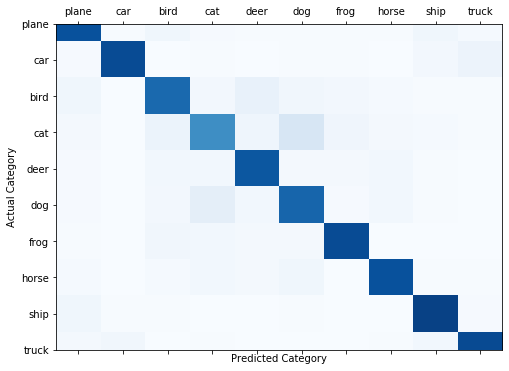

Category   - Accuracy
plane      - 87.4
car        - 89.3
bird       - 78.1
cat        - 63.8
deer       - 84.8
dog        - 79.4
frog       - 89.1
horse      - 87.3
ship       - 93.3
truck      - 89.5

Selected workers

[37 66 72 46 83 56 44 53 68 63 27 54 52 13 78]
Worker 37 : is  Stealthy_Attacker
Worker 66 : is  Stealthy_Attacker
Worker 72 : is  Stealthy_Attacker
Worker 46 : is  Stealthy_Attacker
Worker 83 : is  Honest
Worker 56 : is  Honest
Worker 44 : is  Stealthy_Attacker
Worker 53 : is  Stealthy_Attacker
Worker 68 : is  Honest
Worker 63 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 52 : is  Stealthy_Attacker
Worker 13 : is  Stealthy_Attacker
Worker 78 : is  Honest

 | Global Training Round : 63 |


Worker 37 starts training in Global Round:63 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  63


Train Epoch: 1 [0/500	(1%)]	Loss: 1.549208
Train Epoch: 1 [400/500	(81%)]	Loss: 0.591781
Train Epoch: 2 [0/500	(1%)]	Loss: 0.186164
Train Epoch: 2 [400/500	(81%)]	Loss: 0.345244
Train Epoch: 3 [0/500	(1%)]	Loss: 0.400949
Train Epoch: 3 [400/500	(81%)]	Loss: 0.457124
Train Epoch: 4 [0/500	(1%)]	Loss: 0.252831
Train Epoch: 4 [400/500	(81%)]	Loss: 0.312673
Train Epoch: 5 [0/500	(1%)]	Loss: 0.311544
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191876

Performed attacks 1
Worker 37 ends training in Global Round:63 |

Worker 66 starts training in Global Round:63 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  63


Train Epoch: 1 [0/500	(1%)]	Loss: 1.493493
Train Epoch: 1 [400/500	(81%)]	Loss: 0.479847
Train Epoch: 2 [0/500	(1%)]	Loss: 0.380873
Train Epoch: 2 [400/500	(81%)]	Loss: 0.388376
Train Epoch: 3 [0/500	(1%)]	Loss: 0.244856
Train Epoch: 3 [400/500	(81%)]	Loss: 0.274184
Train Epoch: 4 [0/500	(1%)]	Loss: 0.189971
Train Epoch: 4 [400/500	(81%)]	Loss: 0.215630
Train Epoch: 5 [0/500	(1%)]	Loss: 0.158522
Train Epoch: 5 [400/500	(81%)]	Loss: 0.233687

Performed attacks 2
Worker 66 ends training in Global Round:63 |

Worker 72 starts training in Global Round:63 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  63


Train Epoch: 1 [0/500	(1%)]	Loss: 1.207906
Train Epoch: 1 [400/500	(81%)]	Loss: 0.590078
Train Epoch: 2 [0/500	(1%)]	Loss: 0.473671
Train Epoch: 2 [400/500	(81%)]	Loss: 0.683938
Train Epoch: 3 [0/500	(1%)]	Loss: 0.322110
Train Epoch: 3 [400/500	(81%)]	Loss: 0.506668
Train Epoch: 4 [0/500	(1%)]	Loss: 0.192762
Train Epoch: 4 [400/500	(81%)]	Loss: 0.175064
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171989
Train Epoch: 5 [400/500	(81%)]	Loss: 0.151392

Performed attacks 3
Worker 72 ends training in Global Round:63 |

Worker 46 starts training in Global Round:63 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  63


Train Epoch: 1 [0/500	(1%)]	Loss: 0.976078
Train Epoch: 1 [400/500	(81%)]	Loss: 0.502868
Train Epoch: 2 [0/500	(1%)]	Loss: 0.270136
Train Epoch: 2 [400/500	(81%)]	Loss: 0.452204
Train Epoch: 3 [0/500	(1%)]	Loss: 0.190077
Train Epoch: 3 [400/500	(81%)]	Loss: 0.318565
Train Epoch: 4 [0/500	(1%)]	Loss: 0.223314
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192804
Train Epoch: 5 [0/500	(1%)]	Loss: 0.192740
Train Epoch: 5 [400/500	(81%)]	Loss: 0.206396

Performed attacks 4
Worker 46 ends training in Global Round:63 |

Worker 83 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.398877
Train Epoch: 1 [400/500	(81%)]	Loss: 0.218344
Train Epoch: 2 [0/500	(1%)]	Loss: 0.233411
Train Epoch: 2 [400/500	(81%)]	Loss: 0.184746
Train Epoch: 3 [0/500	(1%)]	Loss: 0.157335
Train Epoch: 3 [400/500	(81%)]	Loss: 0.197460
Train Epoch: 4 [0/500	(1%)]	Loss: 0.092845
Train Epoch: 4 [400/500	(81%)]	Loss: 0.090312
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075803
Train Epoch: 5 [400/500	(81%)]	Loss: 0.145831

Worker 83 ends training in Global Round:63 |

Worker 56 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.304682
Train Epoch: 1 [400/500	(81%)]	Loss: 0.661479
Train Epoch: 2 [0/500	(1%)]	Loss: 0.131230
Train Epoch: 2 [400/500	(81%)]	Loss: 0.215900
Train Epoch: 3 [0/500	(1%)]	Loss: 0.101149
Train Epoch: 3 [400/500	(81%)]	Loss: 0.218835
Train Epoch: 4 [0/500	(1%)]	Loss: 0.177876
Train Epoch: 4 [400/500	(81%)]	Loss: 0.160516
Train Epoch: 5 [0/500	(1%)]	Loss: 0.205405
Train Epoch: 5 [400/500	(81%)]	Loss: 0.110189

Worker 56 ends training in Global Round:63 |

Worker 44 starts training in Global Round:63 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  63


Train Epoch: 1 [0/500	(1%)]	Loss: 1.366338
Train Epoch: 1 [400/500	(81%)]	Loss: 0.487994
Train Epoch: 2 [0/500	(1%)]	Loss: 0.281122
Train Epoch: 2 [400/500	(81%)]	Loss: 0.440992
Train Epoch: 3 [0/500	(1%)]	Loss: 0.196624
Train Epoch: 3 [400/500	(81%)]	Loss: 0.318884
Train Epoch: 4 [0/500	(1%)]	Loss: 0.272052
Train Epoch: 4 [400/500	(81%)]	Loss: 0.197862
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128810
Train Epoch: 5 [400/500	(81%)]	Loss: 0.181315

Performed attacks 5
Worker 44 ends training in Global Round:63 |

Worker 53 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.315940
Train Epoch: 1 [400/500	(81%)]	Loss: 0.408835
Train Epoch: 2 [0/500	(1%)]	Loss: 0.109550
Train Epoch: 2 [400/500	(81%)]	Loss: 0.174861
Train Epoch: 3 [0/500	(1%)]	Loss: 0.302935
Train Epoch: 3 [400/500	(81%)]	Loss: 0.197163
Train Epoch: 4 [0/500	(1%)]	Loss: 0.166669
Train Epoch: 4 [400/500	(81%)]	Loss: 0.087800
Train Epoch: 5 [0/500	(1%)]	Loss: 0.065518
Train Epoch: 5 [400/500	(81%)]	Loss: 0.237044

Worker 53 ends training in Global Round:63 |

Worker 68 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.400338
Train Epoch: 1 [400/500	(81%)]	Loss: 0.690003
Train Epoch: 2 [0/500	(1%)]	Loss: 0.130373
Train Epoch: 2 [400/500	(81%)]	Loss: 0.307598
Train Epoch: 3 [0/500	(1%)]	Loss: 0.222353
Train Epoch: 3 [400/500	(81%)]	Loss: 0.382102
Train Epoch: 4 [0/500	(1%)]	Loss: 0.163396
Train Epoch: 4 [400/500	(81%)]	Loss: 0.165225
Train Epoch: 5 [0/500	(1%)]	Loss: 0.169548
Train Epoch: 5 [400/500	(81%)]	Loss: 0.170561

Worker 68 ends training in Global Round:63 |

Worker 63 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.296715
Train Epoch: 1 [400/500	(81%)]	Loss: 0.485694
Train Epoch: 2 [0/500	(1%)]	Loss: 0.168323
Train Epoch: 2 [400/500	(81%)]	Loss: 0.171323
Train Epoch: 3 [0/500	(1%)]	Loss: 0.143674
Train Epoch: 3 [400/500	(81%)]	Loss: 0.095959
Train Epoch: 4 [0/500	(1%)]	Loss: 0.104523
Train Epoch: 4 [400/500	(81%)]	Loss: 0.109393
Train Epoch: 5 [0/500	(1%)]	Loss: 0.085368
Train Epoch: 5 [400/500	(81%)]	Loss: 0.094426

Worker 63 ends training in Global Round:63 |

Worker 27 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.235237
Train Epoch: 1 [400/500	(81%)]	Loss: 0.502102
Train Epoch: 2 [0/500	(1%)]	Loss: 0.177195
Train Epoch: 2 [400/500	(81%)]	Loss: 0.223246
Train Epoch: 3 [0/500	(1%)]	Loss: 0.175577
Train Epoch: 3 [400/500	(81%)]	Loss: 0.396552
Train Epoch: 4 [0/500	(1%)]	Loss: 0.142342
Train Epoch: 4 [400/500	(81%)]	Loss: 0.104638
Train Epoch: 5 [0/500	(1%)]	Loss: 0.165319
Train Epoch: 5 [400/500	(81%)]	Loss: 0.182234

Worker 27 ends training in Global Round:63 |

Worker 54 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.330994
Train Epoch: 1 [400/500	(81%)]	Loss: 0.325256
Train Epoch: 2 [0/500	(1%)]	Loss: 0.142372
Train Epoch: 2 [400/500	(81%)]	Loss: 0.225114
Train Epoch: 3 [0/500	(1%)]	Loss: 0.164092
Train Epoch: 3 [400/500	(81%)]	Loss: 0.245748
Train Epoch: 4 [0/500	(1%)]	Loss: 0.073303
Train Epoch: 4 [400/500	(81%)]	Loss: 0.108927
Train Epoch: 5 [0/500	(1%)]	Loss: 0.070137
Train Epoch: 5 [400/500	(81%)]	Loss: 0.064785

Worker 54 ends training in Global Round:63 |

Worker 52 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.551404
Train Epoch: 1 [400/500	(81%)]	Loss: 0.517703
Train Epoch: 2 [0/500	(1%)]	Loss: 0.216222
Train Epoch: 2 [400/500	(81%)]	Loss: 0.471058
Train Epoch: 3 [0/500	(1%)]	Loss: 0.251376
Train Epoch: 3 [400/500	(81%)]	Loss: 0.165859
Train Epoch: 4 [0/500	(1%)]	Loss: 0.187535
Train Epoch: 4 [400/500	(81%)]	Loss: 0.267950
Train Epoch: 5 [0/500	(1%)]	Loss: 0.113902
Train Epoch: 5 [400/500	(81%)]	Loss: 0.227296

Worker 52 ends training in Global Round:63 |

Worker 13 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.427292
Train Epoch: 1 [400/500	(81%)]	Loss: 0.429885
Train Epoch: 2 [0/500	(1%)]	Loss: 0.219978
Train Epoch: 2 [400/500	(81%)]	Loss: 0.354440
Train Epoch: 3 [0/500	(1%)]	Loss: 0.151533
Train Epoch: 3 [400/500	(81%)]	Loss: 0.283340
Train Epoch: 4 [0/500	(1%)]	Loss: 0.138286
Train Epoch: 4 [400/500	(81%)]	Loss: 0.178603
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111166
Train Epoch: 5 [400/500	(81%)]	Loss: 0.109405

Worker 13 ends training in Global Round:63 |

Worker 78 starts training in Global Round:63 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.208506
Train Epoch: 1 [400/500	(81%)]	Loss: 0.272754
Train Epoch: 2 [0/500	(1%)]	Loss: 0.113408
Train Epoch: 2 [400/500	(81%)]	Loss: 0.085768
Train Epoch: 3 [0/500	(1%)]	Loss: 0.101680
Train Epoch: 3 [400/500	(81%)]	Loss: 0.081213
Train Epoch: 4 [0/500	(1%)]	Loss: 0.022312
Train Epoch: 4 [400/500	(81%)]	Loss: 0.113427
Train Epoch: 5 [0/500	(1%)]	Loss: 0.019047
Train Epoch: 5 [400/500	(81%)]	Loss: 0.125213

Worker 78 ends training in Global Round:63 |
Last layer biases  [array([ 0.03538466, -0.03303346, -0.01388616,  0.04096742,  0.04886916,
       -0.01402409,  0.03887334, -0.02859101, -0.01768236, -0.04097557],
      dtype=float32), array([ 0.03268694, -0.0302295 , -0.01359279,  0.04349793,  0.04810054,
       -0.01432752,  0.0396312 , -0.03174956, -0.02152797, -0.03658734],
      dtype=float32), array([ 0.03554727, -0.03277716, -0.01486175,  0.04042209,  0.04979323,
       -0.01304682,  0.04002229, -0.03080623, -0.01868578, -0.03970521],
      dtyp

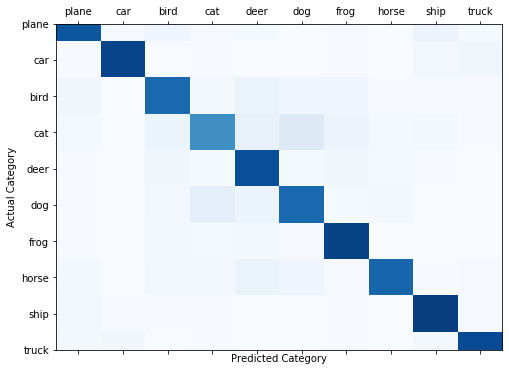

Category   - Accuracy
plane      - 85.4
car        - 91.8
bird       - 77.9
cat        - 63.4
deer       - 87.9
dog        - 77.9
frog       - 92.5
horse      - 79.3
ship       - 94.4
truck      - 89.3

Selected workers

[87 98 23 95 24 65 16 85 96 73 44 12 22 89  8]
Worker 87 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 23 : is  Stealthy_Attacker
Worker 95 : is  Honest
Worker 24 : is  Honest
Worker 65 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 85 : is  Honest
Worker 96 : is  Honest
Worker 73 : is  Honest
Worker 44 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 22 : is  Stealthy_Attacker
Worker 89 : is  Stealthy_Attacker
Worker 8 : is  Honest

 | Global Training Round : 64 |


Worker 87 starts training in Global Round:64 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  64


Train Epoch: 1 [0/500	(1%)]	Loss: 1.255568
Train Epoch: 1 [400/500	(81%)]	Loss: 0.571016
Train Epoch: 2 [0/500	(1%)]	Loss: 0.276879
Train Epoch: 2 [400/500	(81%)]	Loss: 0.635156
Train Epoch: 3 [0/500	(1%)]	Loss: 0.307846
Train Epoch: 3 [400/500	(81%)]	Loss: 0.264685
Train Epoch: 4 [0/500	(1%)]	Loss: 0.194304
Train Epoch: 4 [400/500	(81%)]	Loss: 0.278098
Train Epoch: 5 [0/500	(1%)]	Loss: 0.186065
Train Epoch: 5 [400/500	(81%)]	Loss: 0.269438

Performed attacks 1
Worker 87 ends training in Global Round:64 |

Worker 98 starts training in Global Round:64 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  64


Train Epoch: 1 [0/500	(1%)]	Loss: 1.510948
Train Epoch: 1 [400/500	(81%)]	Loss: 0.651967
Train Epoch: 2 [0/500	(1%)]	Loss: 0.366266
Train Epoch: 2 [400/500	(81%)]	Loss: 0.330439
Train Epoch: 3 [0/500	(1%)]	Loss: 0.293715
Train Epoch: 3 [400/500	(81%)]	Loss: 0.369432
Train Epoch: 4 [0/500	(1%)]	Loss: 0.145274
Train Epoch: 4 [400/500	(81%)]	Loss: 0.277015
Train Epoch: 5 [0/500	(1%)]	Loss: 0.202871
Train Epoch: 5 [400/500	(81%)]	Loss: 0.293534

Performed attacks 2
Worker 98 ends training in Global Round:64 |

Worker 23 starts training in Global Round:64 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  64


Train Epoch: 1 [0/500	(1%)]	Loss: 1.239424
Train Epoch: 1 [400/500	(81%)]	Loss: 0.519783
Train Epoch: 2 [0/500	(1%)]	Loss: 0.278044
Train Epoch: 2 [400/500	(81%)]	Loss: 0.301065
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261361
Train Epoch: 3 [400/500	(81%)]	Loss: 0.473261
Train Epoch: 4 [0/500	(1%)]	Loss: 0.208722
Train Epoch: 4 [400/500	(81%)]	Loss: 0.169356
Train Epoch: 5 [0/500	(1%)]	Loss: 0.204140
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149500

Performed attacks 3
Worker 23 ends training in Global Round:64 |

Worker 95 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.284920
Train Epoch: 1 [400/500	(81%)]	Loss: 0.189478
Train Epoch: 2 [0/500	(1%)]	Loss: 0.138921
Train Epoch: 2 [400/500	(81%)]	Loss: 0.349416
Train Epoch: 3 [0/500	(1%)]	Loss: 0.094786
Train Epoch: 3 [400/500	(81%)]	Loss: 0.171988
Train Epoch: 4 [0/500	(1%)]	Loss: 0.113923
Train Epoch: 4 [400/500	(81%)]	Loss: 0.056053
Train Epoch: 5 [0/500	(1%)]	Loss: 0.066916
Train Epoch: 5 [400/500	(81%)]	Loss: 0.145254

Worker 95 ends training in Global Round:64 |

Worker 24 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.364074
Train Epoch: 1 [400/500	(81%)]	Loss: 0.147567
Train Epoch: 2 [0/500	(1%)]	Loss: 0.127437
Train Epoch: 2 [400/500	(81%)]	Loss: 0.109359
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142755
Train Epoch: 3 [400/500	(81%)]	Loss: 0.094156
Train Epoch: 4 [0/500	(1%)]	Loss: 0.089684
Train Epoch: 4 [400/500	(81%)]	Loss: 0.165082
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107731
Train Epoch: 5 [400/500	(81%)]	Loss: 0.182467

Worker 24 ends training in Global Round:64 |

Worker 65 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.346034
Train Epoch: 1 [400/500	(81%)]	Loss: 0.465885
Train Epoch: 2 [0/500	(1%)]	Loss: 0.175263
Train Epoch: 2 [400/500	(81%)]	Loss: 0.450456
Train Epoch: 3 [0/500	(1%)]	Loss: 0.308372
Train Epoch: 3 [400/500	(81%)]	Loss: 0.225599
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105409
Train Epoch: 4 [400/500	(81%)]	Loss: 0.282392
Train Epoch: 5 [0/500	(1%)]	Loss: 0.109691
Train Epoch: 5 [400/500	(81%)]	Loss: 0.104029

Worker 65 ends training in Global Round:64 |

Worker 16 starts training in Global Round:64 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  64


Train Epoch: 1 [0/500	(1%)]	Loss: 1.520338
Train Epoch: 1 [400/500	(81%)]	Loss: 0.584442
Train Epoch: 2 [0/500	(1%)]	Loss: 0.272480
Train Epoch: 2 [400/500	(81%)]	Loss: 0.504891
Train Epoch: 3 [0/500	(1%)]	Loss: 0.330428
Train Epoch: 3 [400/500	(81%)]	Loss: 0.299289
Train Epoch: 4 [0/500	(1%)]	Loss: 0.208168
Train Epoch: 4 [400/500	(81%)]	Loss: 0.234895
Train Epoch: 5 [0/500	(1%)]	Loss: 0.137071
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139859

Performed attacks 4
Worker 16 ends training in Global Round:64 |

Worker 85 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.365836
Train Epoch: 1 [400/500	(81%)]	Loss: 0.356539
Train Epoch: 2 [0/500	(1%)]	Loss: 0.228520
Train Epoch: 2 [400/500	(81%)]	Loss: 0.307080
Train Epoch: 3 [0/500	(1%)]	Loss: 0.208889
Train Epoch: 3 [400/500	(81%)]	Loss: 0.246535
Train Epoch: 4 [0/500	(1%)]	Loss: 0.129266
Train Epoch: 4 [400/500	(81%)]	Loss: 0.328863
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148265
Train Epoch: 5 [400/500	(81%)]	Loss: 0.136571

Worker 85 ends training in Global Round:64 |

Worker 96 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.186341
Train Epoch: 1 [400/500	(81%)]	Loss: 0.422000
Train Epoch: 2 [0/500	(1%)]	Loss: 0.143800
Train Epoch: 2 [400/500	(81%)]	Loss: 0.261721
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127760
Train Epoch: 3 [400/500	(81%)]	Loss: 0.196806
Train Epoch: 4 [0/500	(1%)]	Loss: 0.186449
Train Epoch: 4 [400/500	(81%)]	Loss: 0.333463
Train Epoch: 5 [0/500	(1%)]	Loss: 0.189695
Train Epoch: 5 [400/500	(81%)]	Loss: 0.243475

Worker 96 ends training in Global Round:64 |

Worker 73 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.354815
Train Epoch: 1 [400/500	(81%)]	Loss: 0.310512
Train Epoch: 2 [0/500	(1%)]	Loss: 0.167477
Train Epoch: 2 [400/500	(81%)]	Loss: 0.137098
Train Epoch: 3 [0/500	(1%)]	Loss: 0.109652
Train Epoch: 3 [400/500	(81%)]	Loss: 0.133593
Train Epoch: 4 [0/500	(1%)]	Loss: 0.072486
Train Epoch: 4 [400/500	(81%)]	Loss: 0.079191
Train Epoch: 5 [0/500	(1%)]	Loss: 0.044718
Train Epoch: 5 [400/500	(81%)]	Loss: 0.087134

Worker 73 ends training in Global Round:64 |

Worker 44 starts training in Global Round:64 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  64


Train Epoch: 1 [0/500	(1%)]	Loss: 1.189569
Train Epoch: 1 [400/500	(81%)]	Loss: 0.494273
Train Epoch: 2 [0/500	(1%)]	Loss: 0.168549
Train Epoch: 2 [400/500	(81%)]	Loss: 0.441102
Train Epoch: 3 [0/500	(1%)]	Loss: 0.315974
Train Epoch: 3 [400/500	(81%)]	Loss: 0.601548
Train Epoch: 4 [0/500	(1%)]	Loss: 0.278850
Train Epoch: 4 [400/500	(81%)]	Loss: 0.195486
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203067
Train Epoch: 5 [400/500	(81%)]	Loss: 0.383635

Performed attacks 5
Worker 44 ends training in Global Round:64 |

Worker 12 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.347302
Train Epoch: 1 [400/500	(81%)]	Loss: 0.525502
Train Epoch: 2 [0/500	(1%)]	Loss: 0.363204
Train Epoch: 2 [400/500	(81%)]	Loss: 0.517218
Train Epoch: 3 [0/500	(1%)]	Loss: 0.212880
Train Epoch: 3 [400/500	(81%)]	Loss: 0.383894
Train Epoch: 4 [0/500	(1%)]	Loss: 0.247076
Train Epoch: 4 [400/500	(81%)]	Loss: 0.276467
Train Epoch: 5 [0/500	(1%)]	Loss: 0.131423
Train Epoch: 5 [400/500	(81%)]	Loss: 0.273131

Worker 12 ends training in Global Round:64 |

Worker 22 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.440515
Train Epoch: 1 [400/500	(81%)]	Loss: 0.583483
Train Epoch: 2 [0/500	(1%)]	Loss: 0.384905
Train Epoch: 2 [400/500	(81%)]	Loss: 0.414006
Train Epoch: 3 [0/500	(1%)]	Loss: 0.335876
Train Epoch: 3 [400/500	(81%)]	Loss: 0.320892
Train Epoch: 4 [0/500	(1%)]	Loss: 0.277124
Train Epoch: 4 [400/500	(81%)]	Loss: 0.232150
Train Epoch: 5 [0/500	(1%)]	Loss: 0.197655
Train Epoch: 5 [400/500	(81%)]	Loss: 0.225792

Worker 22 ends training in Global Round:64 |

Worker 89 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.468749
Train Epoch: 1 [400/500	(81%)]	Loss: 0.474375
Train Epoch: 2 [0/500	(1%)]	Loss: 0.423667
Train Epoch: 2 [400/500	(81%)]	Loss: 0.449510
Train Epoch: 3 [0/500	(1%)]	Loss: 0.171902
Train Epoch: 3 [400/500	(81%)]	Loss: 0.325564
Train Epoch: 4 [0/500	(1%)]	Loss: 0.177351
Train Epoch: 4 [400/500	(81%)]	Loss: 0.376029
Train Epoch: 5 [0/500	(1%)]	Loss: 0.203965
Train Epoch: 5 [400/500	(81%)]	Loss: 0.431547

Worker 89 ends training in Global Round:64 |

Worker 8 starts training in Global Round:64 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.395729
Train Epoch: 1 [400/500	(81%)]	Loss: 0.306147
Train Epoch: 2 [0/500	(1%)]	Loss: 0.136951
Train Epoch: 2 [400/500	(81%)]	Loss: 0.266780
Train Epoch: 3 [0/500	(1%)]	Loss: 0.088572
Train Epoch: 3 [400/500	(81%)]	Loss: 0.285675
Train Epoch: 4 [0/500	(1%)]	Loss: 0.240216
Train Epoch: 4 [400/500	(81%)]	Loss: 0.100235
Train Epoch: 5 [0/500	(1%)]	Loss: 0.129706
Train Epoch: 5 [400/500	(81%)]	Loss: 0.203154

Worker 8 ends training in Global Round:64 |
Last layer biases  [array([ 0.03538335, -0.03152125, -0.01432758,  0.03872732,  0.0497191 ,
       -0.01469888,  0.04068992, -0.02809799, -0.02399977, -0.03597227],
      dtype=float32), array([ 0.0352212 , -0.03197277, -0.00922275,  0.03933372,  0.0482856 ,
       -0.01455154,  0.03995256, -0.03084682, -0.0204639 , -0.03983335],
      dtype=float32), array([ 0.0345638 , -0.03061645, -0.01389768,  0.03741597,  0.05222738,
       -0.01331402,  0.03939398, -0.03255465, -0.0191942 , -0.03812223],
      dtype

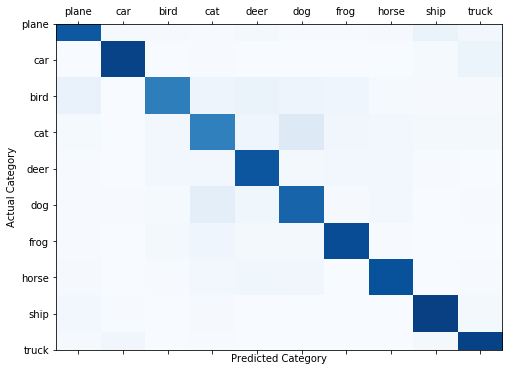

Category   - Accuracy
plane      - 84.7
car        - 92.3
bird       - 69.6
cat        - 69.1
deer       - 85.5
dog        - 79.9
frog       - 89.0
horse      - 86.9
ship       - 93.4
truck      - 92.7

Selected workers

[82 12 87  2 94 30 22 97 34 26 75 49 16 95 28]
Worker 82 : is  Honest
Worker 12 : is  Stealthy_Attacker
Worker 87 : is  Stealthy_Attacker
Worker 2 : is  Honest
Worker 94 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 22 : is  Stealthy_Attacker
Worker 97 : is  Stealthy_Attacker
Worker 34 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 49 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 95 : is  Honest
Worker 28 : is  Stealthy_Attacker

 | Global Training Round : 65 |


Worker 82 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.211352
Train Epoch: 1 [400/500	(81%)]	Loss: 0.237834
Train Epoch: 2 [0/500	(1%)]	Loss: 0.089434
Train Epoch: 2 [400/500	(81%)]	Loss: 0.168144
Train Epoch: 3 [0/500	(1%)]	Loss: 0.116283
Train Epoch: 3 [400/500	(81%)]	Loss: 0.137452
Train Epoch: 4 [0/500	(1%)]	Loss: 0.057037
Train Epoch: 4 [400/500	(81%)]	Loss: 0.058443
Train Epoch: 5 [0/500	(1%)]	Loss: 0.142263
Train Epoch: 5 [400/500	(81%)]	Loss: 0.034708

Worker 82 ends training in Global Round:65 |

Worker 12 starts training in Global Round:65 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  65


Train Epoch: 1 [0/500	(1%)]	Loss: 1.202639
Train Epoch: 1 [400/500	(81%)]	Loss: 0.302626
Train Epoch: 2 [0/500	(1%)]	Loss: 0.241874
Train Epoch: 2 [400/500	(81%)]	Loss: 0.260770
Train Epoch: 3 [0/500	(1%)]	Loss: 0.286703
Train Epoch: 3 [400/500	(81%)]	Loss: 0.203728
Train Epoch: 4 [0/500	(1%)]	Loss: 0.108554
Train Epoch: 4 [400/500	(81%)]	Loss: 0.153689
Train Epoch: 5 [0/500	(1%)]	Loss: 0.165258
Train Epoch: 5 [400/500	(81%)]	Loss: 0.196069

Performed attacks 1
Worker 12 ends training in Global Round:65 |

Worker 87 starts training in Global Round:65 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  65


Train Epoch: 1 [0/500	(1%)]	Loss: 0.942502
Train Epoch: 1 [400/500	(81%)]	Loss: 0.587513
Train Epoch: 2 [0/500	(1%)]	Loss: 0.245825
Train Epoch: 2 [400/500	(81%)]	Loss: 0.456994
Train Epoch: 3 [0/500	(1%)]	Loss: 0.150875
Train Epoch: 3 [400/500	(81%)]	Loss: 0.329932
Train Epoch: 4 [0/500	(1%)]	Loss: 0.138349
Train Epoch: 4 [400/500	(81%)]	Loss: 0.324153
Train Epoch: 5 [0/500	(1%)]	Loss: 0.194352
Train Epoch: 5 [400/500	(81%)]	Loss: 0.142901

Performed attacks 2
Worker 87 ends training in Global Round:65 |

Worker 2 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.221650
Train Epoch: 1 [400/500	(81%)]	Loss: 0.254994
Train Epoch: 2 [0/500	(1%)]	Loss: 0.084728
Train Epoch: 2 [400/500	(81%)]	Loss: 0.108647
Train Epoch: 3 [0/500	(1%)]	Loss: 0.035326
Train Epoch: 3 [400/500	(81%)]	Loss: 0.055967
Train Epoch: 4 [0/500	(1%)]	Loss: 0.093566
Train Epoch: 4 [400/500	(81%)]	Loss: 0.046735
Train Epoch: 5 [0/500	(1%)]	Loss: 0.134251
Train Epoch: 5 [400/500	(81%)]	Loss: 0.035560

Worker 2 ends training in Global Round:65 |

Worker 94 starts training in Global Round:65 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  65


Train Epoch: 1 [0/500	(1%)]	Loss: 1.250779
Train Epoch: 1 [400/500	(81%)]	Loss: 0.505854
Train Epoch: 2 [0/500	(1%)]	Loss: 0.233925
Train Epoch: 2 [400/500	(81%)]	Loss: 0.330350
Train Epoch: 3 [0/500	(1%)]	Loss: 0.200526
Train Epoch: 3 [400/500	(81%)]	Loss: 0.212827
Train Epoch: 4 [0/500	(1%)]	Loss: 0.236026
Train Epoch: 4 [400/500	(81%)]	Loss: 0.179674
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112173
Train Epoch: 5 [400/500	(81%)]	Loss: 0.118830

Performed attacks 3
Worker 94 ends training in Global Round:65 |

Worker 30 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.362984
Train Epoch: 1 [400/500	(81%)]	Loss: 0.471445
Train Epoch: 2 [0/500	(1%)]	Loss: 0.151013
Train Epoch: 2 [400/500	(81%)]	Loss: 0.257787
Train Epoch: 3 [0/500	(1%)]	Loss: 0.178843
Train Epoch: 3 [400/500	(81%)]	Loss: 0.098411
Train Epoch: 4 [0/500	(1%)]	Loss: 0.122246
Train Epoch: 4 [400/500	(81%)]	Loss: 0.128063
Train Epoch: 5 [0/500	(1%)]	Loss: 0.065035
Train Epoch: 5 [400/500	(81%)]	Loss: 0.146794

Worker 30 ends training in Global Round:65 |

Worker 22 starts training in Global Round:65 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  65


Train Epoch: 1 [0/500	(1%)]	Loss: 1.226763
Train Epoch: 1 [400/500	(81%)]	Loss: 0.561950
Train Epoch: 2 [0/500	(1%)]	Loss: 0.331360
Train Epoch: 2 [400/500	(81%)]	Loss: 0.511240
Train Epoch: 3 [0/500	(1%)]	Loss: 0.212218
Train Epoch: 3 [400/500	(81%)]	Loss: 0.284852
Train Epoch: 4 [0/500	(1%)]	Loss: 0.151788
Train Epoch: 4 [400/500	(81%)]	Loss: 0.158992
Train Epoch: 5 [0/500	(1%)]	Loss: 0.105602
Train Epoch: 5 [400/500	(81%)]	Loss: 0.236143

Performed attacks 4
Worker 22 ends training in Global Round:65 |

Worker 97 starts training in Global Round:65 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  65


Train Epoch: 1 [0/500	(1%)]	Loss: 1.378867
Train Epoch: 1 [400/500	(81%)]	Loss: 0.383280
Train Epoch: 2 [0/500	(1%)]	Loss: 0.239597
Train Epoch: 2 [400/500	(81%)]	Loss: 0.537310
Train Epoch: 3 [0/500	(1%)]	Loss: 0.164934
Train Epoch: 3 [400/500	(81%)]	Loss: 0.354762
Train Epoch: 4 [0/500	(1%)]	Loss: 0.228009
Train Epoch: 4 [400/500	(81%)]	Loss: 0.168140
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138995
Train Epoch: 5 [400/500	(81%)]	Loss: 0.111115

Performed attacks 5
Worker 97 ends training in Global Round:65 |

Worker 34 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.442855
Train Epoch: 1 [400/500	(81%)]	Loss: 0.445282
Train Epoch: 2 [0/500	(1%)]	Loss: 0.264015
Train Epoch: 2 [400/500	(81%)]	Loss: 0.259342
Train Epoch: 3 [0/500	(1%)]	Loss: 0.101094
Train Epoch: 3 [400/500	(81%)]	Loss: 0.167586
Train Epoch: 4 [0/500	(1%)]	Loss: 0.082629
Train Epoch: 4 [400/500	(81%)]	Loss: 0.111379
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128029
Train Epoch: 5 [400/500	(81%)]	Loss: 0.239045

Worker 34 ends training in Global Round:65 |

Worker 26 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.309063
Train Epoch: 1 [400/500	(81%)]	Loss: 0.172327
Train Epoch: 2 [0/500	(1%)]	Loss: 0.106058
Train Epoch: 2 [400/500	(81%)]	Loss: 0.131954
Train Epoch: 3 [0/500	(1%)]	Loss: 0.075443
Train Epoch: 3 [400/500	(81%)]	Loss: 0.120366
Train Epoch: 4 [0/500	(1%)]	Loss: 0.051384
Train Epoch: 4 [400/500	(81%)]	Loss: 0.031416
Train Epoch: 5 [0/500	(1%)]	Loss: 0.036538
Train Epoch: 5 [400/500	(81%)]	Loss: 0.083799

Worker 26 ends training in Global Round:65 |

Worker 75 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.395061
Train Epoch: 1 [400/500	(81%)]	Loss: 0.515823
Train Epoch: 2 [0/500	(1%)]	Loss: 0.394029
Train Epoch: 2 [400/500	(81%)]	Loss: 0.285491
Train Epoch: 3 [0/500	(1%)]	Loss: 0.213628
Train Epoch: 3 [400/500	(81%)]	Loss: 0.254293
Train Epoch: 4 [0/500	(1%)]	Loss: 0.166031
Train Epoch: 4 [400/500	(81%)]	Loss: 0.332851
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106928
Train Epoch: 5 [400/500	(81%)]	Loss: 0.094902

Worker 75 ends training in Global Round:65 |

Worker 49 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.390891
Train Epoch: 1 [400/500	(81%)]	Loss: 0.252032
Train Epoch: 2 [0/500	(1%)]	Loss: 0.115666
Train Epoch: 2 [400/500	(81%)]	Loss: 0.144854
Train Epoch: 3 [0/500	(1%)]	Loss: 0.076000
Train Epoch: 3 [400/500	(81%)]	Loss: 0.131234
Train Epoch: 4 [0/500	(1%)]	Loss: 0.053182
Train Epoch: 4 [400/500	(81%)]	Loss: 0.101512
Train Epoch: 5 [0/500	(1%)]	Loss: 0.078052
Train Epoch: 5 [400/500	(81%)]	Loss: 0.112878

Worker 49 ends training in Global Round:65 |

Worker 16 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.443517
Train Epoch: 1 [400/500	(81%)]	Loss: 0.397805
Train Epoch: 2 [0/500	(1%)]	Loss: 0.321160
Train Epoch: 2 [400/500	(81%)]	Loss: 0.377275
Train Epoch: 3 [0/500	(1%)]	Loss: 0.175779
Train Epoch: 3 [400/500	(81%)]	Loss: 0.243312
Train Epoch: 4 [0/500	(1%)]	Loss: 0.185274
Train Epoch: 4 [400/500	(81%)]	Loss: 0.153458
Train Epoch: 5 [0/500	(1%)]	Loss: 0.227423
Train Epoch: 5 [400/500	(81%)]	Loss: 0.202604

Worker 16 ends training in Global Round:65 |

Worker 95 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.151818
Train Epoch: 1 [400/500	(81%)]	Loss: 0.199068
Train Epoch: 2 [0/500	(1%)]	Loss: 0.158205
Train Epoch: 2 [400/500	(81%)]	Loss: 0.134472
Train Epoch: 3 [0/500	(1%)]	Loss: 0.079551
Train Epoch: 3 [400/500	(81%)]	Loss: 0.122444
Train Epoch: 4 [0/500	(1%)]	Loss: 0.084011
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213488
Train Epoch: 5 [0/500	(1%)]	Loss: 0.052858
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139486

Worker 95 ends training in Global Round:65 |

Worker 28 starts training in Global Round:65 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.393481
Train Epoch: 1 [400/500	(81%)]	Loss: 0.656089
Train Epoch: 2 [0/500	(1%)]	Loss: 0.248746
Train Epoch: 2 [400/500	(81%)]	Loss: 0.396127
Train Epoch: 3 [0/500	(1%)]	Loss: 0.341353
Train Epoch: 3 [400/500	(81%)]	Loss: 0.362909
Train Epoch: 4 [0/500	(1%)]	Loss: 0.216686
Train Epoch: 4 [400/500	(81%)]	Loss: 0.269382
Train Epoch: 5 [0/500	(1%)]	Loss: 0.274863
Train Epoch: 5 [400/500	(81%)]	Loss: 0.360610

Worker 28 ends training in Global Round:65 |
Last layer biases  [array([ 0.03331107, -0.032866  , -0.01584573,  0.03508769,  0.04049919,
       -0.01493923,  0.04058443, -0.00838424, -0.02263013, -0.03891512],
      dtype=float32), array([ 0.03570651, -0.03361663, -0.01378835,  0.03817999,  0.05080436,
       -0.01385546,  0.0412937 , -0.03134034, -0.02084572, -0.03663613],
      dtype=float32), array([ 0.03646017, -0.03281745, -0.0124476 ,  0.03783969,  0.05444159,
       -0.01649178,  0.03963661, -0.02902701, -0.02455083, -0.03714146],
      dtyp

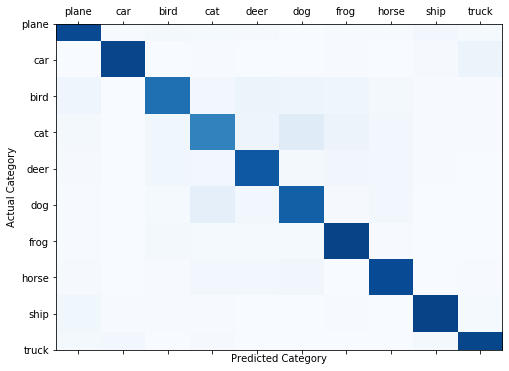

Category   - Accuracy
plane      - 90.2
car        - 91.7
bird       - 75.4
cat        - 68.2
deer       - 84.4
dog        - 81.3
frog       - 92.2
horse      - 89.4
ship       - 92.3
truck      - 91.1

Selected workers

[ 26  61  35   9  51  41  75  65 100  21  69  49  90   5  13]
Worker 26 : is  Honest
Worker 61 : is  Honest
Worker 35 : is  Honest
Worker 9 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 41 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 100 : is  Honest
Worker 21 : is  Stealthy_Attacker
Worker 69 : is  Honest
Worker 49 : is  Honest
Worker 90 : is  Honest
Worker 5 : is  Honest
Worker 13 : is  Stealthy_Attacker

 | Global Training Round : 66 |


Worker 26 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.149279
Train Epoch: 1 [400/500	(81%)]	Loss: 0.262978
Train Epoch: 2 [0/500	(1%)]	Loss: 0.078342
Train Epoch: 2 [400/500	(81%)]	Loss: 0.110530
Train Epoch: 3 [0/500	(1%)]	Loss: 0.089817
Train Epoch: 3 [400/500	(81%)]	Loss: 0.079646
Train Epoch: 4 [0/500	(1%)]	Loss: 0.075401
Train Epoch: 4 [400/500	(81%)]	Loss: 0.111870
Train Epoch: 5 [0/500	(1%)]	Loss: 0.047425
Train Epoch: 5 [400/500	(81%)]	Loss: 0.102677

Worker 26 ends training in Global Round:66 |

Worker 61 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.260948
Train Epoch: 1 [400/500	(81%)]	Loss: 0.505250
Train Epoch: 2 [0/500	(1%)]	Loss: 0.149408
Train Epoch: 2 [400/500	(81%)]	Loss: 0.575362
Train Epoch: 3 [0/500	(1%)]	Loss: 0.289580
Train Epoch: 3 [400/500	(81%)]	Loss: 0.204135
Train Epoch: 4 [0/500	(1%)]	Loss: 0.139372
Train Epoch: 4 [400/500	(81%)]	Loss: 0.215805
Train Epoch: 5 [0/500	(1%)]	Loss: 0.196765
Train Epoch: 5 [400/500	(81%)]	Loss: 0.150287

Worker 61 ends training in Global Round:66 |

Worker 35 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.381868
Train Epoch: 1 [400/500	(81%)]	Loss: 0.489332
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209717
Train Epoch: 2 [400/500	(81%)]	Loss: 0.219287
Train Epoch: 3 [0/500	(1%)]	Loss: 0.079040
Train Epoch: 3 [400/500	(81%)]	Loss: 0.111625
Train Epoch: 4 [0/500	(1%)]	Loss: 0.238642
Train Epoch: 4 [400/500	(81%)]	Loss: 0.209835
Train Epoch: 5 [0/500	(1%)]	Loss: 0.166507
Train Epoch: 5 [400/500	(81%)]	Loss: 0.086772

Worker 35 ends training in Global Round:66 |

Worker 9 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.289311
Train Epoch: 1 [400/500	(81%)]	Loss: 0.469257
Train Epoch: 2 [0/500	(1%)]	Loss: 0.198238
Train Epoch: 2 [400/500	(81%)]	Loss: 0.368197
Train Epoch: 3 [0/500	(1%)]	Loss: 0.196601
Train Epoch: 3 [400/500	(81%)]	Loss: 0.216116
Train Epoch: 4 [0/500	(1%)]	Loss: 0.127385
Train Epoch: 4 [400/500	(81%)]	Loss: 0.191852
Train Epoch: 5 [0/500	(1%)]	Loss: 0.187483
Train Epoch: 5 [400/500	(81%)]	Loss: 0.162392

Worker 9 ends training in Global Round:66 |

Worker 51 starts training in Global Round:66 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  66


Train Epoch: 1 [0/500	(1%)]	Loss: 1.002900
Train Epoch: 1 [400/500	(81%)]	Loss: 0.663534
Train Epoch: 2 [0/500	(1%)]	Loss: 0.284480
Train Epoch: 2 [400/500	(81%)]	Loss: 0.362794
Train Epoch: 3 [0/500	(1%)]	Loss: 0.168726
Train Epoch: 3 [400/500	(81%)]	Loss: 0.285012
Train Epoch: 4 [0/500	(1%)]	Loss: 0.204727
Train Epoch: 4 [400/500	(81%)]	Loss: 0.231573
Train Epoch: 5 [0/500	(1%)]	Loss: 0.245561
Train Epoch: 5 [400/500	(81%)]	Loss: 0.228137

Performed attacks 1
Worker 51 ends training in Global Round:66 |

Worker 41 starts training in Global Round:66 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  66


Train Epoch: 1 [0/500	(1%)]	Loss: 1.312047
Train Epoch: 1 [400/500	(81%)]	Loss: 0.402911
Train Epoch: 2 [0/500	(1%)]	Loss: 0.280898
Train Epoch: 2 [400/500	(81%)]	Loss: 0.518877
Train Epoch: 3 [0/500	(1%)]	Loss: 0.487248
Train Epoch: 3 [400/500	(81%)]	Loss: 0.303637
Train Epoch: 4 [0/500	(1%)]	Loss: 0.208401
Train Epoch: 4 [400/500	(81%)]	Loss: 0.464117
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157993
Train Epoch: 5 [400/500	(81%)]	Loss: 0.177226

Performed attacks 2
Worker 41 ends training in Global Round:66 |

Worker 75 starts training in Global Round:66 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 75  in Global Round:  66


Train Epoch: 1 [0/500	(1%)]	Loss: 1.039543
Train Epoch: 1 [400/500	(81%)]	Loss: 0.496265
Train Epoch: 2 [0/500	(1%)]	Loss: 0.280912
Train Epoch: 2 [400/500	(81%)]	Loss: 0.330933
Train Epoch: 3 [0/500	(1%)]	Loss: 0.212499
Train Epoch: 3 [400/500	(81%)]	Loss: 0.230986
Train Epoch: 4 [0/500	(1%)]	Loss: 0.229877
Train Epoch: 4 [400/500	(81%)]	Loss: 0.190869
Train Epoch: 5 [0/500	(1%)]	Loss: 0.208860
Train Epoch: 5 [400/500	(81%)]	Loss: 0.277002

Performed attacks 3
Worker 75 ends training in Global Round:66 |

Worker 65 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.431734
Train Epoch: 1 [400/500	(81%)]	Loss: 0.335215
Train Epoch: 2 [0/500	(1%)]	Loss: 0.117575
Train Epoch: 2 [400/500	(81%)]	Loss: 0.137138
Train Epoch: 3 [0/500	(1%)]	Loss: 0.193563
Train Epoch: 3 [400/500	(81%)]	Loss: 0.175846
Train Epoch: 4 [0/500	(1%)]	Loss: 0.224119
Train Epoch: 4 [400/500	(81%)]	Loss: 0.130780
Train Epoch: 5 [0/500	(1%)]	Loss: 0.117197
Train Epoch: 5 [400/500	(81%)]	Loss: 0.192647

Worker 65 ends training in Global Round:66 |

Worker 100 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.225088
Train Epoch: 1 [400/500	(81%)]	Loss: 0.333889
Train Epoch: 2 [0/500	(1%)]	Loss: 0.213428
Train Epoch: 2 [400/500	(81%)]	Loss: 0.237999
Train Epoch: 3 [0/500	(1%)]	Loss: 0.100941
Train Epoch: 3 [400/500	(81%)]	Loss: 0.118909
Train Epoch: 4 [0/500	(1%)]	Loss: 0.106723
Train Epoch: 4 [400/500	(81%)]	Loss: 0.062552
Train Epoch: 5 [0/500	(1%)]	Loss: 0.067797
Train Epoch: 5 [400/500	(81%)]	Loss: 0.082468

Worker 100 ends training in Global Round:66 |

Worker 21 starts training in Global Round:66 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  66


Train Epoch: 1 [0/500	(1%)]	Loss: 1.522104
Train Epoch: 1 [400/500	(81%)]	Loss: 0.819254
Train Epoch: 2 [0/500	(1%)]	Loss: 0.235756
Train Epoch: 2 [400/500	(81%)]	Loss: 0.392640
Train Epoch: 3 [0/500	(1%)]	Loss: 0.329995
Train Epoch: 3 [400/500	(81%)]	Loss: 0.284249
Train Epoch: 4 [0/500	(1%)]	Loss: 0.154083
Train Epoch: 4 [400/500	(81%)]	Loss: 0.158427
Train Epoch: 5 [0/500	(1%)]	Loss: 0.098530
Train Epoch: 5 [400/500	(81%)]	Loss: 0.263773

Performed attacks 4
Worker 21 ends training in Global Round:66 |

Worker 69 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.283333
Train Epoch: 1 [400/500	(81%)]	Loss: 0.607442
Train Epoch: 2 [0/500	(1%)]	Loss: 0.305492
Train Epoch: 2 [400/500	(81%)]	Loss: 0.331440
Train Epoch: 3 [0/500	(1%)]	Loss: 0.150608
Train Epoch: 3 [400/500	(81%)]	Loss: 0.373251
Train Epoch: 4 [0/500	(1%)]	Loss: 0.213439
Train Epoch: 4 [400/500	(81%)]	Loss: 0.187789
Train Epoch: 5 [0/500	(1%)]	Loss: 0.116672
Train Epoch: 5 [400/500	(81%)]	Loss: 0.151442

Worker 69 ends training in Global Round:66 |

Worker 49 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.218323
Train Epoch: 1 [400/500	(81%)]	Loss: 0.158317
Train Epoch: 2 [0/500	(1%)]	Loss: 0.080183
Train Epoch: 2 [400/500	(81%)]	Loss: 0.093566
Train Epoch: 3 [0/500	(1%)]	Loss: 0.109145
Train Epoch: 3 [400/500	(81%)]	Loss: 0.095950
Train Epoch: 4 [0/500	(1%)]	Loss: 0.057690
Train Epoch: 4 [400/500	(81%)]	Loss: 0.069223
Train Epoch: 5 [0/500	(1%)]	Loss: 0.052306
Train Epoch: 5 [400/500	(81%)]	Loss: 0.056323

Worker 49 ends training in Global Round:66 |

Worker 90 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.520337
Train Epoch: 1 [400/500	(81%)]	Loss: 0.354564
Train Epoch: 2 [0/500	(1%)]	Loss: 0.158774
Train Epoch: 2 [400/500	(81%)]	Loss: 0.652750
Train Epoch: 3 [0/500	(1%)]	Loss: 0.243280
Train Epoch: 3 [400/500	(81%)]	Loss: 0.283062
Train Epoch: 4 [0/500	(1%)]	Loss: 0.213229
Train Epoch: 4 [400/500	(81%)]	Loss: 0.206050
Train Epoch: 5 [0/500	(1%)]	Loss: 0.146771
Train Epoch: 5 [400/500	(81%)]	Loss: 0.298228

Worker 90 ends training in Global Round:66 |

Worker 5 starts training in Global Round:66 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.417796
Train Epoch: 1 [400/500	(81%)]	Loss: 0.355698
Train Epoch: 2 [0/500	(1%)]	Loss: 0.225452
Train Epoch: 2 [400/500	(81%)]	Loss: 0.290347
Train Epoch: 3 [0/500	(1%)]	Loss: 0.170733
Train Epoch: 3 [400/500	(81%)]	Loss: 0.194059
Train Epoch: 4 [0/500	(1%)]	Loss: 0.064731
Train Epoch: 4 [400/500	(81%)]	Loss: 0.076818
Train Epoch: 5 [0/500	(1%)]	Loss: 0.063075
Train Epoch: 5 [400/500	(81%)]	Loss: 0.081825

Worker 5 ends training in Global Round:66 |

Worker 13 starts training in Global Round:66 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  66


Train Epoch: 1 [0/500	(1%)]	Loss: 1.576216
Train Epoch: 1 [400/500	(81%)]	Loss: 0.409605
Train Epoch: 2 [0/500	(1%)]	Loss: 0.223276
Train Epoch: 2 [400/500	(81%)]	Loss: 0.218957
Train Epoch: 3 [0/500	(1%)]	Loss: 0.279269
Train Epoch: 3 [400/500	(81%)]	Loss: 0.221284
Train Epoch: 4 [0/500	(1%)]	Loss: 0.130787
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182073
Train Epoch: 5 [0/500	(1%)]	Loss: 0.130440
Train Epoch: 5 [400/500	(81%)]	Loss: 0.155481

Performed attacks 5
Worker 13 ends training in Global Round:66 |
Last layer biases  [array([ 0.03465732, -0.03137472, -0.01415751,  0.03680189,  0.0385307 ,
       -0.0169688 ,  0.03915854, -0.00852521, -0.02200863, -0.04021165],
      dtype=float32), array([ 0.03232238, -0.03249929, -0.01407583,  0.03829349,  0.03819243,
       -0.01647081,  0.04031872, -0.00827363, -0.02330012, -0.03860542],
      dtype=float32), array([ 0.03247783, -0.03264499, -0.01395601,  0.03770652,  0.03828984,
       -0.01855559,  0.03958697, -0.00834635, -0.02028909, -0.0

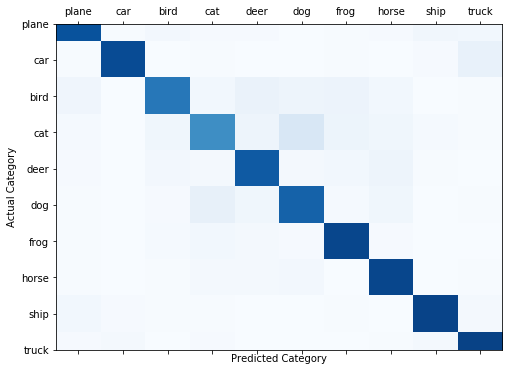

Category   - Accuracy
plane      - 87.1
car        - 89.2
bird       - 72.3
cat        - 63.9
deer       - 83.6
dog        - 80.8
frog       - 91.3
horse      - 91.4
ship       - 92.3
truck      - 92.9

Selected workers

[ 5 64 14 26 52 63 82 13 91 88 73 23  7 31 94]
Worker 5 : is  Honest
Worker 64 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 26 : is  Honest
Worker 52 : is  Stealthy_Attacker
Worker 63 : is  Honest
Worker 82 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 88 : is  Honest
Worker 73 : is  Honest
Worker 23 : is  Stealthy_Attacker
Worker 7 : is  Honest
Worker 31 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker

 | Global Training Round : 67 |


Worker 5 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.183522
Train Epoch: 1 [400/500	(81%)]	Loss: 0.257778
Train Epoch: 2 [0/500	(1%)]	Loss: 0.254334
Train Epoch: 2 [400/500	(81%)]	Loss: 0.234552
Train Epoch: 3 [0/500	(1%)]	Loss: 0.135497
Train Epoch: 3 [400/500	(81%)]	Loss: 0.241592
Train Epoch: 4 [0/500	(1%)]	Loss: 0.098912
Train Epoch: 4 [400/500	(81%)]	Loss: 0.160712
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089652
Train Epoch: 5 [400/500	(81%)]	Loss: 0.244803

Worker 5 ends training in Global Round:67 |

Worker 64 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.261010
Train Epoch: 1 [400/500	(81%)]	Loss: 0.365533
Train Epoch: 2 [0/500	(1%)]	Loss: 0.192492
Train Epoch: 2 [400/500	(81%)]	Loss: 0.189052
Train Epoch: 3 [0/500	(1%)]	Loss: 0.231878
Train Epoch: 3 [400/500	(81%)]	Loss: 0.219893
Train Epoch: 4 [0/500	(1%)]	Loss: 0.202766
Train Epoch: 4 [400/500	(81%)]	Loss: 0.174214
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123945
Train Epoch: 5 [400/500	(81%)]	Loss: 0.204671

Worker 64 ends training in Global Round:67 |

Worker 14 starts training in Global Round:67 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  67


Train Epoch: 1 [0/500	(1%)]	Loss: 1.350895
Train Epoch: 1 [400/500	(81%)]	Loss: 0.477881
Train Epoch: 2 [0/500	(1%)]	Loss: 0.343394
Train Epoch: 2 [400/500	(81%)]	Loss: 0.645024
Train Epoch: 3 [0/500	(1%)]	Loss: 0.286706
Train Epoch: 3 [400/500	(81%)]	Loss: 0.277076
Train Epoch: 4 [0/500	(1%)]	Loss: 0.234794
Train Epoch: 4 [400/500	(81%)]	Loss: 0.166103
Train Epoch: 5 [0/500	(1%)]	Loss: 0.147595
Train Epoch: 5 [400/500	(81%)]	Loss: 0.147213

Performed attacks 1
Worker 14 ends training in Global Round:67 |

Worker 26 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.113200
Train Epoch: 1 [400/500	(81%)]	Loss: 0.159730
Train Epoch: 2 [0/500	(1%)]	Loss: 0.072966
Train Epoch: 2 [400/500	(81%)]	Loss: 0.041389
Train Epoch: 3 [0/500	(1%)]	Loss: 0.043175
Train Epoch: 3 [400/500	(81%)]	Loss: 0.053137
Train Epoch: 4 [0/500	(1%)]	Loss: 0.070459
Train Epoch: 4 [400/500	(81%)]	Loss: 0.110972
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082515
Train Epoch: 5 [400/500	(81%)]	Loss: 0.076384

Worker 26 ends training in Global Round:67 |

Worker 52 starts training in Global Round:67 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  67


Train Epoch: 1 [0/500	(1%)]	Loss: 1.282533
Train Epoch: 1 [400/500	(81%)]	Loss: 0.376200
Train Epoch: 2 [0/500	(1%)]	Loss: 0.202140
Train Epoch: 2 [400/500	(81%)]	Loss: 0.447303
Train Epoch: 3 [0/500	(1%)]	Loss: 0.207348
Train Epoch: 3 [400/500	(81%)]	Loss: 0.240791
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121162
Train Epoch: 4 [400/500	(81%)]	Loss: 0.257864
Train Epoch: 5 [0/500	(1%)]	Loss: 0.176861
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232006

Performed attacks 2
Worker 52 ends training in Global Round:67 |

Worker 63 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.149366
Train Epoch: 1 [400/500	(81%)]	Loss: 0.353999
Train Epoch: 2 [0/500	(1%)]	Loss: 0.115894
Train Epoch: 2 [400/500	(81%)]	Loss: 0.184567
Train Epoch: 3 [0/500	(1%)]	Loss: 0.083780
Train Epoch: 3 [400/500	(81%)]	Loss: 0.113305
Train Epoch: 4 [0/500	(1%)]	Loss: 0.072914
Train Epoch: 4 [400/500	(81%)]	Loss: 0.182109
Train Epoch: 5 [0/500	(1%)]	Loss: 0.026051
Train Epoch: 5 [400/500	(81%)]	Loss: 0.129212

Worker 63 ends training in Global Round:67 |

Worker 82 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.251152
Train Epoch: 1 [400/500	(81%)]	Loss: 0.244073
Train Epoch: 2 [0/500	(1%)]	Loss: 0.088466
Train Epoch: 2 [400/500	(81%)]	Loss: 0.193976
Train Epoch: 3 [0/500	(1%)]	Loss: 0.070824
Train Epoch: 3 [400/500	(81%)]	Loss: 0.086175
Train Epoch: 4 [0/500	(1%)]	Loss: 0.084647
Train Epoch: 4 [400/500	(81%)]	Loss: 0.271819
Train Epoch: 5 [0/500	(1%)]	Loss: 0.061353
Train Epoch: 5 [400/500	(81%)]	Loss: 0.095995

Worker 82 ends training in Global Round:67 |

Worker 13 starts training in Global Round:67 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  67


Train Epoch: 1 [0/500	(1%)]	Loss: 0.878569
Train Epoch: 1 [400/500	(81%)]	Loss: 0.435382
Train Epoch: 2 [0/500	(1%)]	Loss: 0.174852
Train Epoch: 2 [400/500	(81%)]	Loss: 0.250427
Train Epoch: 3 [0/500	(1%)]	Loss: 0.189418
Train Epoch: 3 [400/500	(81%)]	Loss: 0.250812
Train Epoch: 4 [0/500	(1%)]	Loss: 0.185557
Train Epoch: 4 [400/500	(81%)]	Loss: 0.164373
Train Epoch: 5 [0/500	(1%)]	Loss: 0.098991
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210558

Performed attacks 3
Worker 13 ends training in Global Round:67 |

Worker 91 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.369229
Train Epoch: 1 [400/500	(81%)]	Loss: 0.329838
Train Epoch: 2 [0/500	(1%)]	Loss: 0.212311
Train Epoch: 2 [400/500	(81%)]	Loss: 0.218429
Train Epoch: 3 [0/500	(1%)]	Loss: 0.163797
Train Epoch: 3 [400/500	(81%)]	Loss: 0.184603
Train Epoch: 4 [0/500	(1%)]	Loss: 0.171733
Train Epoch: 4 [400/500	(81%)]	Loss: 0.087852
Train Epoch: 5 [0/500	(1%)]	Loss: 0.090314
Train Epoch: 5 [400/500	(81%)]	Loss: 0.115068

Worker 91 ends training in Global Round:67 |

Worker 88 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.272569
Train Epoch: 1 [400/500	(81%)]	Loss: 0.291361
Train Epoch: 2 [0/500	(1%)]	Loss: 0.143740
Train Epoch: 2 [400/500	(81%)]	Loss: 0.240189
Train Epoch: 3 [0/500	(1%)]	Loss: 0.114715
Train Epoch: 3 [400/500	(81%)]	Loss: 0.090899
Train Epoch: 4 [0/500	(1%)]	Loss: 0.128095
Train Epoch: 4 [400/500	(81%)]	Loss: 0.142373
Train Epoch: 5 [0/500	(1%)]	Loss: 0.069954
Train Epoch: 5 [400/500	(81%)]	Loss: 0.085829

Worker 88 ends training in Global Round:67 |

Worker 73 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.186779
Train Epoch: 1 [400/500	(81%)]	Loss: 0.243416
Train Epoch: 2 [0/500	(1%)]	Loss: 0.068439
Train Epoch: 2 [400/500	(81%)]	Loss: 0.103345
Train Epoch: 3 [0/500	(1%)]	Loss: 0.075368
Train Epoch: 3 [400/500	(81%)]	Loss: 0.189414
Train Epoch: 4 [0/500	(1%)]	Loss: 0.071646
Train Epoch: 4 [400/500	(81%)]	Loss: 0.054937
Train Epoch: 5 [0/500	(1%)]	Loss: 0.042762
Train Epoch: 5 [400/500	(81%)]	Loss: 0.031899

Worker 73 ends training in Global Round:67 |

Worker 23 starts training in Global Round:67 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  67


Train Epoch: 1 [0/500	(1%)]	Loss: 1.040510
Train Epoch: 1 [400/500	(81%)]	Loss: 0.359522
Train Epoch: 2 [0/500	(1%)]	Loss: 0.253212
Train Epoch: 2 [400/500	(81%)]	Loss: 0.496208
Train Epoch: 3 [0/500	(1%)]	Loss: 0.179859
Train Epoch: 3 [400/500	(81%)]	Loss: 0.196970
Train Epoch: 4 [0/500	(1%)]	Loss: 0.178411
Train Epoch: 4 [400/500	(81%)]	Loss: 0.228696
Train Epoch: 5 [0/500	(1%)]	Loss: 0.146697
Train Epoch: 5 [400/500	(81%)]	Loss: 0.154608

Performed attacks 4
Worker 23 ends training in Global Round:67 |

Worker 7 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.181528
Train Epoch: 1 [400/500	(81%)]	Loss: 0.440307
Train Epoch: 2 [0/500	(1%)]	Loss: 0.105565
Train Epoch: 2 [400/500	(81%)]	Loss: 0.204501
Train Epoch: 3 [0/500	(1%)]	Loss: 0.195077
Train Epoch: 3 [400/500	(81%)]	Loss: 0.163639
Train Epoch: 4 [0/500	(1%)]	Loss: 0.036315
Train Epoch: 4 [400/500	(81%)]	Loss: 0.231289
Train Epoch: 5 [0/500	(1%)]	Loss: 0.147612
Train Epoch: 5 [400/500	(81%)]	Loss: 0.164838

Worker 7 ends training in Global Round:67 |

Worker 31 starts training in Global Round:67 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  67


Train Epoch: 1 [0/500	(1%)]	Loss: 1.085405
Train Epoch: 1 [400/500	(81%)]	Loss: 0.776546
Train Epoch: 2 [0/500	(1%)]	Loss: 0.329482
Train Epoch: 2 [400/500	(81%)]	Loss: 0.519951
Train Epoch: 3 [0/500	(1%)]	Loss: 0.222929
Train Epoch: 3 [400/500	(81%)]	Loss: 0.446426
Train Epoch: 4 [0/500	(1%)]	Loss: 0.217466
Train Epoch: 4 [400/500	(81%)]	Loss: 0.198697
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148188
Train Epoch: 5 [400/500	(81%)]	Loss: 0.244169

Performed attacks 5
Worker 31 ends training in Global Round:67 |

Worker 94 starts training in Global Round:67 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.261229
Train Epoch: 1 [400/500	(81%)]	Loss: 0.783756
Train Epoch: 2 [0/500	(1%)]	Loss: 0.190127
Train Epoch: 2 [400/500	(81%)]	Loss: 0.370844
Train Epoch: 3 [0/500	(1%)]	Loss: 0.286397
Train Epoch: 3 [400/500	(81%)]	Loss: 0.229631
Train Epoch: 4 [0/500	(1%)]	Loss: 0.099506
Train Epoch: 4 [400/500	(81%)]	Loss: 0.138569
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118985
Train Epoch: 5 [400/500	(81%)]	Loss: 0.153146

Worker 94 ends training in Global Round:67 |
Last layer biases  [array([ 0.03326395, -0.03068822, -0.016585  ,  0.03893325,  0.03928997,
       -0.01553521,  0.03813133, -0.00764441, -0.02346542, -0.03979829],
      dtype=float32), array([ 0.03216375, -0.03112227, -0.01573626,  0.03920754,  0.03751877,
       -0.0144933 ,  0.03950753, -0.01023596, -0.02026665, -0.04064124],
      dtype=float32), array([ 0.03585863, -0.03174667, -0.01174708,  0.04152885,  0.05228659,
       -0.01549175,  0.03828125, -0.03215655, -0.02135007, -0.03956124],
      dtyp

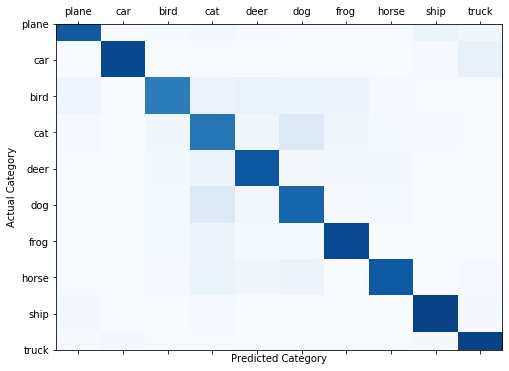

Category   - Accuracy
plane      - 83.7
car        - 90.4
bird       - 70.1
cat        - 72.8
deer       - 84.8
dog        - 79.5
frog       - 90.2
horse      - 84.0
ship       - 93.1
truck      - 93.1

Selected workers

[23 44 32 12 84  5  7 39 69 11 91 51 17 54 10]
Worker 23 : is  Stealthy_Attacker
Worker 44 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 12 : is  Stealthy_Attacker
Worker 84 : is  Honest
Worker 5 : is  Honest
Worker 7 : is  Honest
Worker 39 : is  Honest
Worker 69 : is  Honest
Worker 11 : is  Honest
Worker 91 : is  Honest
Worker 51 : is  Stealthy_Attacker
Worker 17 : is  Honest
Worker 54 : is  Honest
Worker 10 : is  Honest

 | Global Training Round : 68 |


Worker 23 starts training in Global Round:68 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 23  in Global Round:  68


Train Epoch: 1 [0/500	(1%)]	Loss: 0.934107
Train Epoch: 1 [400/500	(81%)]	Loss: 0.590906
Train Epoch: 2 [0/500	(1%)]	Loss: 0.207787
Train Epoch: 2 [400/500	(81%)]	Loss: 0.346294
Train Epoch: 3 [0/500	(1%)]	Loss: 0.345582
Train Epoch: 3 [400/500	(81%)]	Loss: 0.254123
Train Epoch: 4 [0/500	(1%)]	Loss: 0.170417
Train Epoch: 4 [400/500	(81%)]	Loss: 0.244090
Train Epoch: 5 [0/500	(1%)]	Loss: 0.313738
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139414

Performed attacks 1
Worker 23 ends training in Global Round:68 |

Worker 44 starts training in Global Round:68 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  68


Train Epoch: 1 [0/500	(1%)]	Loss: 1.321843
Train Epoch: 1 [400/500	(81%)]	Loss: 0.514348
Train Epoch: 2 [0/500	(1%)]	Loss: 0.321810
Train Epoch: 2 [400/500	(81%)]	Loss: 0.350240
Train Epoch: 3 [0/500	(1%)]	Loss: 0.223600
Train Epoch: 3 [400/500	(81%)]	Loss: 0.240819
Train Epoch: 4 [0/500	(1%)]	Loss: 0.260203
Train Epoch: 4 [400/500	(81%)]	Loss: 0.246751
Train Epoch: 5 [0/500	(1%)]	Loss: 0.370027
Train Epoch: 5 [400/500	(81%)]	Loss: 0.203956

Performed attacks 2
Worker 44 ends training in Global Round:68 |

Worker 32 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.260118
Train Epoch: 1 [400/500	(81%)]	Loss: 0.491747
Train Epoch: 2 [0/500	(1%)]	Loss: 0.227858
Train Epoch: 2 [400/500	(81%)]	Loss: 0.230370
Train Epoch: 3 [0/500	(1%)]	Loss: 0.141290
Train Epoch: 3 [400/500	(81%)]	Loss: 0.157870
Train Epoch: 4 [0/500	(1%)]	Loss: 0.194190
Train Epoch: 4 [400/500	(81%)]	Loss: 0.459498
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171653
Train Epoch: 5 [400/500	(81%)]	Loss: 0.195194

Worker 32 ends training in Global Round:68 |

Worker 12 starts training in Global Round:68 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  68


Train Epoch: 1 [0/500	(1%)]	Loss: 0.804233
Train Epoch: 1 [400/500	(81%)]	Loss: 0.403756
Train Epoch: 2 [0/500	(1%)]	Loss: 0.125844
Train Epoch: 2 [400/500	(81%)]	Loss: 0.222974
Train Epoch: 3 [0/500	(1%)]	Loss: 0.212698
Train Epoch: 3 [400/500	(81%)]	Loss: 0.258403
Train Epoch: 4 [0/500	(1%)]	Loss: 0.132726
Train Epoch: 4 [400/500	(81%)]	Loss: 0.315081
Train Epoch: 5 [0/500	(1%)]	Loss: 0.093485
Train Epoch: 5 [400/500	(81%)]	Loss: 0.268634

Performed attacks 3
Worker 12 ends training in Global Round:68 |

Worker 84 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.244608
Train Epoch: 1 [400/500	(81%)]	Loss: 0.228144
Train Epoch: 2 [0/500	(1%)]	Loss: 0.147329
Train Epoch: 2 [400/500	(81%)]	Loss: 0.117611
Train Epoch: 3 [0/500	(1%)]	Loss: 0.111851
Train Epoch: 3 [400/500	(81%)]	Loss: 0.239138
Train Epoch: 4 [0/500	(1%)]	Loss: 0.137947
Train Epoch: 4 [400/500	(81%)]	Loss: 0.095328
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138056
Train Epoch: 5 [400/500	(81%)]	Loss: 0.162562

Worker 84 ends training in Global Round:68 |

Worker 5 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.323403
Train Epoch: 1 [400/500	(81%)]	Loss: 0.337059
Train Epoch: 2 [0/500	(1%)]	Loss: 0.099426
Train Epoch: 2 [400/500	(81%)]	Loss: 0.156592
Train Epoch: 3 [0/500	(1%)]	Loss: 0.161451
Train Epoch: 3 [400/500	(81%)]	Loss: 0.221737
Train Epoch: 4 [0/500	(1%)]	Loss: 0.067300
Train Epoch: 4 [400/500	(81%)]	Loss: 0.148052
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107898
Train Epoch: 5 [400/500	(81%)]	Loss: 0.049081

Worker 5 ends training in Global Round:68 |

Worker 7 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.197416
Train Epoch: 1 [400/500	(81%)]	Loss: 0.235494
Train Epoch: 2 [0/500	(1%)]	Loss: 0.105036
Train Epoch: 2 [400/500	(81%)]	Loss: 0.082674
Train Epoch: 3 [0/500	(1%)]	Loss: 0.106177
Train Epoch: 3 [400/500	(81%)]	Loss: 0.154049
Train Epoch: 4 [0/500	(1%)]	Loss: 0.112232
Train Epoch: 4 [400/500	(81%)]	Loss: 0.329256
Train Epoch: 5 [0/500	(1%)]	Loss: 0.066604
Train Epoch: 5 [400/500	(81%)]	Loss: 0.099664

Worker 7 ends training in Global Round:68 |

Worker 39 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.273661
Train Epoch: 1 [400/500	(81%)]	Loss: 0.343982
Train Epoch: 2 [0/500	(1%)]	Loss: 0.130201
Train Epoch: 2 [400/500	(81%)]	Loss: 0.209910
Train Epoch: 3 [0/500	(1%)]	Loss: 0.108660
Train Epoch: 3 [400/500	(81%)]	Loss: 0.161927
Train Epoch: 4 [0/500	(1%)]	Loss: 0.133996
Train Epoch: 4 [400/500	(81%)]	Loss: 0.133637
Train Epoch: 5 [0/500	(1%)]	Loss: 0.076363
Train Epoch: 5 [400/500	(81%)]	Loss: 0.112354

Worker 39 ends training in Global Round:68 |

Worker 69 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.208780
Train Epoch: 1 [400/500	(81%)]	Loss: 0.299083
Train Epoch: 2 [0/500	(1%)]	Loss: 0.230940
Train Epoch: 2 [400/500	(81%)]	Loss: 0.132137
Train Epoch: 3 [0/500	(1%)]	Loss: 0.073459
Train Epoch: 3 [400/500	(81%)]	Loss: 0.295981
Train Epoch: 4 [0/500	(1%)]	Loss: 0.204749
Train Epoch: 4 [400/500	(81%)]	Loss: 0.177415
Train Epoch: 5 [0/500	(1%)]	Loss: 0.085447
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149823

Worker 69 ends training in Global Round:68 |

Worker 11 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.188449
Train Epoch: 1 [400/500	(81%)]	Loss: 0.359176
Train Epoch: 2 [0/500	(1%)]	Loss: 0.094203
Train Epoch: 2 [400/500	(81%)]	Loss: 0.228475
Train Epoch: 3 [0/500	(1%)]	Loss: 0.095311
Train Epoch: 3 [400/500	(81%)]	Loss: 0.178756
Train Epoch: 4 [0/500	(1%)]	Loss: 0.077423
Train Epoch: 4 [400/500	(81%)]	Loss: 0.397461
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114120
Train Epoch: 5 [400/500	(81%)]	Loss: 0.179472

Worker 11 ends training in Global Round:68 |

Worker 91 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.291109
Train Epoch: 1 [400/500	(81%)]	Loss: 0.232671
Train Epoch: 2 [0/500	(1%)]	Loss: 0.109216
Train Epoch: 2 [400/500	(81%)]	Loss: 0.187411
Train Epoch: 3 [0/500	(1%)]	Loss: 0.040623
Train Epoch: 3 [400/500	(81%)]	Loss: 0.192861
Train Epoch: 4 [0/500	(1%)]	Loss: 0.151393
Train Epoch: 4 [400/500	(81%)]	Loss: 0.110669
Train Epoch: 5 [0/500	(1%)]	Loss: 0.147358
Train Epoch: 5 [400/500	(81%)]	Loss: 0.092103

Worker 91 ends training in Global Round:68 |

Worker 51 starts training in Global Round:68 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  68


Train Epoch: 1 [0/500	(1%)]	Loss: 1.114540
Train Epoch: 1 [400/500	(81%)]	Loss: 0.637388
Train Epoch: 2 [0/500	(1%)]	Loss: 0.268828
Train Epoch: 2 [400/500	(81%)]	Loss: 0.436327
Train Epoch: 3 [0/500	(1%)]	Loss: 0.177384
Train Epoch: 3 [400/500	(81%)]	Loss: 0.282128
Train Epoch: 4 [0/500	(1%)]	Loss: 0.148659
Train Epoch: 4 [400/500	(81%)]	Loss: 0.336648
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089185
Train Epoch: 5 [400/500	(81%)]	Loss: 0.343627

Performed attacks 4
Worker 51 ends training in Global Round:68 |

Worker 17 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.341927
Train Epoch: 1 [400/500	(81%)]	Loss: 0.476195
Train Epoch: 2 [0/500	(1%)]	Loss: 0.218218
Train Epoch: 2 [400/500	(81%)]	Loss: 0.217337
Train Epoch: 3 [0/500	(1%)]	Loss: 0.103940
Train Epoch: 3 [400/500	(81%)]	Loss: 0.295946
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152186
Train Epoch: 4 [400/500	(81%)]	Loss: 0.235114
Train Epoch: 5 [0/500	(1%)]	Loss: 0.389464
Train Epoch: 5 [400/500	(81%)]	Loss: 0.120126

Worker 17 ends training in Global Round:68 |

Worker 54 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.236365
Train Epoch: 1 [400/500	(81%)]	Loss: 0.245643
Train Epoch: 2 [0/500	(1%)]	Loss: 0.062567
Train Epoch: 2 [400/500	(81%)]	Loss: 0.184115
Train Epoch: 3 [0/500	(1%)]	Loss: 0.054642
Train Epoch: 3 [400/500	(81%)]	Loss: 0.073342
Train Epoch: 4 [0/500	(1%)]	Loss: 0.098528
Train Epoch: 4 [400/500	(81%)]	Loss: 0.159510
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145533
Train Epoch: 5 [400/500	(81%)]	Loss: 0.256809

Worker 54 ends training in Global Round:68 |

Worker 10 starts training in Global Round:68 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.149116
Train Epoch: 1 [400/500	(81%)]	Loss: 0.390248
Train Epoch: 2 [0/500	(1%)]	Loss: 0.146462
Train Epoch: 2 [400/500	(81%)]	Loss: 0.203062
Train Epoch: 3 [0/500	(1%)]	Loss: 0.121439
Train Epoch: 3 [400/500	(81%)]	Loss: 0.191072
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083463
Train Epoch: 4 [400/500	(81%)]	Loss: 0.144313
Train Epoch: 5 [0/500	(1%)]	Loss: 0.119432
Train Epoch: 5 [400/500	(81%)]	Loss: 0.155912

Worker 10 ends training in Global Round:68 |
Last layer biases  [array([ 0.03471085, -0.03034097, -0.01097446,  0.0387199 ,  0.05164699,
       -0.01280976,  0.03900369, -0.03203565, -0.02077955, -0.04123911],
      dtype=float32), array([ 0.03309501, -0.03075835, -0.0129998 ,  0.03819029,  0.0520006 ,
       -0.01357191,  0.03996276, -0.03206847, -0.01905551, -0.03889269],
      dtype=float32), array([ 0.03264853, -0.02929773, -0.01451342,  0.03790367,  0.03894641,
       -0.01554361,  0.03822795, -0.00846494, -0.02150456, -0.04250034],
      dtyp

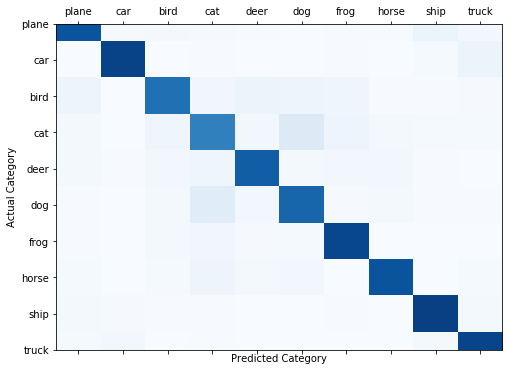

Category   - Accuracy
plane      - 86.2
car        - 92.2
bird       - 75.2
cat        - 68.9
deer       - 82.4
dog        - 79.3
frog       - 90.8
horse      - 86.2
ship       - 93.5
truck      - 92.1

Selected workers

[ 8 77 22  9 19 54 84 26 13 48 39 85 89 88 83]
Worker 8 : is  Honest
Worker 77 : is  Honest
Worker 22 : is  Stealthy_Attacker
Worker 9 : is  Honest
Worker 19 : is  Stealthy_Attacker
Worker 54 : is  Honest
Worker 84 : is  Honest
Worker 26 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 48 : is  Honest
Worker 39 : is  Honest
Worker 85 : is  Honest
Worker 89 : is  Stealthy_Attacker
Worker 88 : is  Honest
Worker 83 : is  Honest

 | Global Training Round : 69 |


Worker 8 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.445315
Train Epoch: 1 [400/500	(81%)]	Loss: 0.378412
Train Epoch: 2 [0/500	(1%)]	Loss: 0.252376
Train Epoch: 2 [400/500	(81%)]	Loss: 0.221011
Train Epoch: 3 [0/500	(1%)]	Loss: 0.193750
Train Epoch: 3 [400/500	(81%)]	Loss: 0.246178
Train Epoch: 4 [0/500	(1%)]	Loss: 0.186071
Train Epoch: 4 [400/500	(81%)]	Loss: 0.366003
Train Epoch: 5 [0/500	(1%)]	Loss: 0.067346
Train Epoch: 5 [400/500	(81%)]	Loss: 0.180173

Worker 8 ends training in Global Round:69 |

Worker 77 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.524387
Train Epoch: 1 [400/500	(81%)]	Loss: 0.608919
Train Epoch: 2 [0/500	(1%)]	Loss: 0.263412
Train Epoch: 2 [400/500	(81%)]	Loss: 0.355958
Train Epoch: 3 [0/500	(1%)]	Loss: 0.289062
Train Epoch: 3 [400/500	(81%)]	Loss: 0.291717
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121374
Train Epoch: 4 [400/500	(81%)]	Loss: 0.271562
Train Epoch: 5 [0/500	(1%)]	Loss: 0.162196
Train Epoch: 5 [400/500	(81%)]	Loss: 0.355788

Worker 77 ends training in Global Round:69 |

Worker 22 starts training in Global Round:69 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  69


Train Epoch: 1 [0/500	(1%)]	Loss: 1.292177
Train Epoch: 1 [400/500	(81%)]	Loss: 0.561691
Train Epoch: 2 [0/500	(1%)]	Loss: 0.400197
Train Epoch: 2 [400/500	(81%)]	Loss: 0.269427
Train Epoch: 3 [0/500	(1%)]	Loss: 0.181913
Train Epoch: 3 [400/500	(81%)]	Loss: 0.344657
Train Epoch: 4 [0/500	(1%)]	Loss: 0.142054
Train Epoch: 4 [400/500	(81%)]	Loss: 0.405321
Train Epoch: 5 [0/500	(1%)]	Loss: 0.183002
Train Epoch: 5 [400/500	(81%)]	Loss: 0.205613

Performed attacks 1
Worker 22 ends training in Global Round:69 |

Worker 9 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.342112
Train Epoch: 1 [400/500	(81%)]	Loss: 0.249239
Train Epoch: 2 [0/500	(1%)]	Loss: 0.363843
Train Epoch: 2 [400/500	(81%)]	Loss: 0.209803
Train Epoch: 3 [0/500	(1%)]	Loss: 0.174147
Train Epoch: 3 [400/500	(81%)]	Loss: 0.138964
Train Epoch: 4 [0/500	(1%)]	Loss: 0.175809
Train Epoch: 4 [400/500	(81%)]	Loss: 0.165679
Train Epoch: 5 [0/500	(1%)]	Loss: 0.086008
Train Epoch: 5 [400/500	(81%)]	Loss: 0.120780

Worker 9 ends training in Global Round:69 |

Worker 19 starts training in Global Round:69 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  69


Train Epoch: 1 [0/500	(1%)]	Loss: 1.235677
Train Epoch: 1 [400/500	(81%)]	Loss: 0.522164
Train Epoch: 2 [0/500	(1%)]	Loss: 0.191800
Train Epoch: 2 [400/500	(81%)]	Loss: 0.386611
Train Epoch: 3 [0/500	(1%)]	Loss: 0.161161
Train Epoch: 3 [400/500	(81%)]	Loss: 0.319694
Train Epoch: 4 [0/500	(1%)]	Loss: 0.231778
Train Epoch: 4 [400/500	(81%)]	Loss: 0.328135
Train Epoch: 5 [0/500	(1%)]	Loss: 0.180633
Train Epoch: 5 [400/500	(81%)]	Loss: 0.175327

Performed attacks 2
Worker 19 ends training in Global Round:69 |

Worker 54 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.122514
Train Epoch: 1 [400/500	(81%)]	Loss: 0.215901
Train Epoch: 2 [0/500	(1%)]	Loss: 0.049678
Train Epoch: 2 [400/500	(81%)]	Loss: 0.101127
Train Epoch: 3 [0/500	(1%)]	Loss: 0.095542
Train Epoch: 3 [400/500	(81%)]	Loss: 0.087546
Train Epoch: 4 [0/500	(1%)]	Loss: 0.054536
Train Epoch: 4 [400/500	(81%)]	Loss: 0.158290
Train Epoch: 5 [0/500	(1%)]	Loss: 0.026022
Train Epoch: 5 [400/500	(81%)]	Loss: 0.140938

Worker 54 ends training in Global Round:69 |

Worker 84 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.289304
Train Epoch: 1 [400/500	(81%)]	Loss: 0.156173
Train Epoch: 2 [0/500	(1%)]	Loss: 0.165167
Train Epoch: 2 [400/500	(81%)]	Loss: 0.182936
Train Epoch: 3 [0/500	(1%)]	Loss: 0.066195
Train Epoch: 3 [400/500	(81%)]	Loss: 0.127832
Train Epoch: 4 [0/500	(1%)]	Loss: 0.157727
Train Epoch: 4 [400/500	(81%)]	Loss: 0.186754
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083714
Train Epoch: 5 [400/500	(81%)]	Loss: 0.157577

Worker 84 ends training in Global Round:69 |

Worker 26 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.110063
Train Epoch: 1 [400/500	(81%)]	Loss: 0.192680
Train Epoch: 2 [0/500	(1%)]	Loss: 0.051349
Train Epoch: 2 [400/500	(81%)]	Loss: 0.023603
Train Epoch: 3 [0/500	(1%)]	Loss: 0.117837
Train Epoch: 3 [400/500	(81%)]	Loss: 0.040042
Train Epoch: 4 [0/500	(1%)]	Loss: 0.037855
Train Epoch: 4 [400/500	(81%)]	Loss: 0.070836
Train Epoch: 5 [0/500	(1%)]	Loss: 0.032233
Train Epoch: 5 [400/500	(81%)]	Loss: 0.068082

Worker 26 ends training in Global Round:69 |

Worker 13 starts training in Global Round:69 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  69


Train Epoch: 1 [0/500	(1%)]	Loss: 1.229969
Train Epoch: 1 [400/500	(81%)]	Loss: 0.319753
Train Epoch: 2 [0/500	(1%)]	Loss: 0.319702
Train Epoch: 2 [400/500	(81%)]	Loss: 0.282944
Train Epoch: 3 [0/500	(1%)]	Loss: 0.236662
Train Epoch: 3 [400/500	(81%)]	Loss: 0.289449
Train Epoch: 4 [0/500	(1%)]	Loss: 0.206885
Train Epoch: 4 [400/500	(81%)]	Loss: 0.338133
Train Epoch: 5 [0/500	(1%)]	Loss: 0.119911
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199712

Performed attacks 3
Worker 13 ends training in Global Round:69 |

Worker 48 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.350215
Train Epoch: 1 [400/500	(81%)]	Loss: 0.239150
Train Epoch: 2 [0/500	(1%)]	Loss: 0.157601
Train Epoch: 2 [400/500	(81%)]	Loss: 0.206623
Train Epoch: 3 [0/500	(1%)]	Loss: 0.116006
Train Epoch: 3 [400/500	(81%)]	Loss: 0.170778
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143823
Train Epoch: 4 [400/500	(81%)]	Loss: 0.163536
Train Epoch: 5 [0/500	(1%)]	Loss: 0.120825
Train Epoch: 5 [400/500	(81%)]	Loss: 0.137493

Worker 48 ends training in Global Round:69 |

Worker 39 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.213669
Train Epoch: 1 [400/500	(81%)]	Loss: 0.287733
Train Epoch: 2 [0/500	(1%)]	Loss: 0.146139
Train Epoch: 2 [400/500	(81%)]	Loss: 0.159691
Train Epoch: 3 [0/500	(1%)]	Loss: 0.056875
Train Epoch: 3 [400/500	(81%)]	Loss: 0.156757
Train Epoch: 4 [0/500	(1%)]	Loss: 0.107825
Train Epoch: 4 [400/500	(81%)]	Loss: 0.097463
Train Epoch: 5 [0/500	(1%)]	Loss: 0.091984
Train Epoch: 5 [400/500	(81%)]	Loss: 0.089313

Worker 39 ends training in Global Round:69 |

Worker 85 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.278758
Train Epoch: 1 [400/500	(81%)]	Loss: 0.509920
Train Epoch: 2 [0/500	(1%)]	Loss: 0.230294
Train Epoch: 2 [400/500	(81%)]	Loss: 0.360721
Train Epoch: 3 [0/500	(1%)]	Loss: 0.117343
Train Epoch: 3 [400/500	(81%)]	Loss: 0.343059
Train Epoch: 4 [0/500	(1%)]	Loss: 0.147374
Train Epoch: 4 [400/500	(81%)]	Loss: 0.250340
Train Epoch: 5 [0/500	(1%)]	Loss: 0.105572
Train Epoch: 5 [400/500	(81%)]	Loss: 0.082323

Worker 85 ends training in Global Round:69 |

Worker 89 starts training in Global Round:69 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 89  in Global Round:  69


Train Epoch: 1 [0/500	(1%)]	Loss: 1.119406
Train Epoch: 1 [400/500	(81%)]	Loss: 0.514741
Train Epoch: 2 [0/500	(1%)]	Loss: 0.516345
Train Epoch: 2 [400/500	(81%)]	Loss: 0.512590
Train Epoch: 3 [0/500	(1%)]	Loss: 0.314309
Train Epoch: 3 [400/500	(81%)]	Loss: 0.327296
Train Epoch: 4 [0/500	(1%)]	Loss: 0.205490
Train Epoch: 4 [400/500	(81%)]	Loss: 0.229210
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081831
Train Epoch: 5 [400/500	(81%)]	Loss: 0.205663

Performed attacks 4
Worker 89 ends training in Global Round:69 |

Worker 88 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.164347
Train Epoch: 1 [400/500	(81%)]	Loss: 0.247204
Train Epoch: 2 [0/500	(1%)]	Loss: 0.044818
Train Epoch: 2 [400/500	(81%)]	Loss: 0.234750
Train Epoch: 3 [0/500	(1%)]	Loss: 0.102863
Train Epoch: 3 [400/500	(81%)]	Loss: 0.158892
Train Epoch: 4 [0/500	(1%)]	Loss: 0.106304
Train Epoch: 4 [400/500	(81%)]	Loss: 0.122445
Train Epoch: 5 [0/500	(1%)]	Loss: 0.136285
Train Epoch: 5 [400/500	(81%)]	Loss: 0.104131

Worker 88 ends training in Global Round:69 |

Worker 83 starts training in Global Round:69 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.250157
Train Epoch: 1 [400/500	(81%)]	Loss: 0.269150
Train Epoch: 2 [0/500	(1%)]	Loss: 0.156938
Train Epoch: 2 [400/500	(81%)]	Loss: 0.161759
Train Epoch: 3 [0/500	(1%)]	Loss: 0.089593
Train Epoch: 3 [400/500	(81%)]	Loss: 0.224620
Train Epoch: 4 [0/500	(1%)]	Loss: 0.120312
Train Epoch: 4 [400/500	(81%)]	Loss: 0.034660
Train Epoch: 5 [0/500	(1%)]	Loss: 0.039484
Train Epoch: 5 [400/500	(81%)]	Loss: 0.130171

Worker 83 ends training in Global Round:69 |
Last layer biases  [array([ 0.03322957, -0.03133103, -0.01376928,  0.03961959,  0.03927384,
       -0.01899705,  0.03814675, -0.00627498, -0.02225643, -0.04173907],
      dtype=float32), array([ 0.03263282, -0.02790246, -0.01594799,  0.03490932,  0.03860139,
       -0.01848236,  0.03971284, -0.00565819, -0.02086063, -0.04110281],
      dtype=float32), array([ 0.03587792, -0.03072817, -0.00970505,  0.04186632,  0.0479008 ,
       -0.01560628,  0.03670845, -0.0298854 , -0.02068352, -0.03984313],
      dtyp

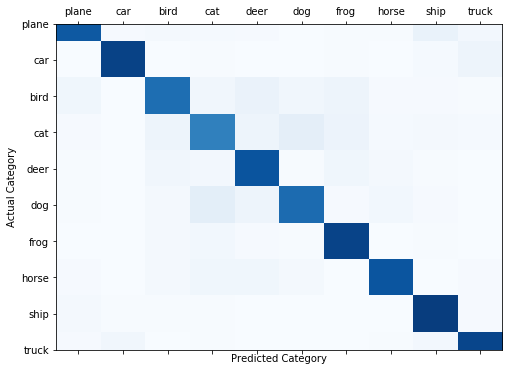

Category   - Accuracy
plane      - 84.2
car        - 92.6
bird       - 76.1
cat        - 69.1
deer       - 86.3
dog        - 77.2
frog       - 92.4
horse      - 85.8
ship       - 94.8
truck      - 91.5

Selected workers

[45 41 48 57 39 72 64 83 77 38 81 35 67 16 44]
Worker 45 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 48 : is  Honest
Worker 57 : is  Honest
Worker 39 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 64 : is  Honest
Worker 83 : is  Honest
Worker 77 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 35 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 16 : is  Stealthy_Attacker
Worker 44 : is  Stealthy_Attacker

 | Global Training Round : 70 |


Worker 45 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.302974
Train Epoch: 1 [400/500	(81%)]	Loss: 0.245700
Train Epoch: 2 [0/500	(1%)]	Loss: 0.155530
Train Epoch: 2 [400/500	(81%)]	Loss: 0.394797
Train Epoch: 3 [0/500	(1%)]	Loss: 0.139640
Train Epoch: 3 [400/500	(81%)]	Loss: 0.228689
Train Epoch: 4 [0/500	(1%)]	Loss: 0.199487
Train Epoch: 4 [400/500	(81%)]	Loss: 0.268342
Train Epoch: 5 [0/500	(1%)]	Loss: 0.168435
Train Epoch: 5 [400/500	(81%)]	Loss: 0.125681

Worker 45 ends training in Global Round:70 |

Worker 41 starts training in Global Round:70 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  70


Train Epoch: 1 [0/500	(1%)]	Loss: 0.953233
Train Epoch: 1 [400/500	(81%)]	Loss: 0.574819
Train Epoch: 2 [0/500	(1%)]	Loss: 0.274934
Train Epoch: 2 [400/500	(81%)]	Loss: 0.582510
Train Epoch: 3 [0/500	(1%)]	Loss: 0.327505
Train Epoch: 3 [400/500	(81%)]	Loss: 0.400054
Train Epoch: 4 [0/500	(1%)]	Loss: 0.245630
Train Epoch: 4 [400/500	(81%)]	Loss: 0.289047
Train Epoch: 5 [0/500	(1%)]	Loss: 0.212511
Train Epoch: 5 [400/500	(81%)]	Loss: 0.144883

Performed attacks 1
Worker 41 ends training in Global Round:70 |

Worker 48 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.250161
Train Epoch: 1 [400/500	(81%)]	Loss: 0.187310
Train Epoch: 2 [0/500	(1%)]	Loss: 0.099662
Train Epoch: 2 [400/500	(81%)]	Loss: 0.149342
Train Epoch: 3 [0/500	(1%)]	Loss: 0.056967
Train Epoch: 3 [400/500	(81%)]	Loss: 0.164332
Train Epoch: 4 [0/500	(1%)]	Loss: 0.126596
Train Epoch: 4 [400/500	(81%)]	Loss: 0.215754
Train Epoch: 5 [0/500	(1%)]	Loss: 0.105768
Train Epoch: 5 [400/500	(81%)]	Loss: 0.082740

Worker 48 ends training in Global Round:70 |

Worker 57 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.402574
Train Epoch: 1 [400/500	(81%)]	Loss: 0.241027
Train Epoch: 2 [0/500	(1%)]	Loss: 0.147939
Train Epoch: 2 [400/500	(81%)]	Loss: 0.257200
Train Epoch: 3 [0/500	(1%)]	Loss: 0.190678
Train Epoch: 3 [400/500	(81%)]	Loss: 0.314515
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149078
Train Epoch: 4 [400/500	(81%)]	Loss: 0.251497
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111803
Train Epoch: 5 [400/500	(81%)]	Loss: 0.229352

Worker 57 ends training in Global Round:70 |

Worker 39 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.176581
Train Epoch: 1 [400/500	(81%)]	Loss: 0.137321
Train Epoch: 2 [0/500	(1%)]	Loss: 0.055885
Train Epoch: 2 [400/500	(81%)]	Loss: 0.142885
Train Epoch: 3 [0/500	(1%)]	Loss: 0.032688
Train Epoch: 3 [400/500	(81%)]	Loss: 0.110772
Train Epoch: 4 [0/500	(1%)]	Loss: 0.047121
Train Epoch: 4 [400/500	(81%)]	Loss: 0.047596
Train Epoch: 5 [0/500	(1%)]	Loss: 0.027473
Train Epoch: 5 [400/500	(81%)]	Loss: 0.025236

Worker 39 ends training in Global Round:70 |

Worker 72 starts training in Global Round:70 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  70


Train Epoch: 1 [0/500	(1%)]	Loss: 1.023201
Train Epoch: 1 [400/500	(81%)]	Loss: 0.572627
Train Epoch: 2 [0/500	(1%)]	Loss: 0.232088
Train Epoch: 2 [400/500	(81%)]	Loss: 0.486365
Train Epoch: 3 [0/500	(1%)]	Loss: 0.319298
Train Epoch: 3 [400/500	(81%)]	Loss: 0.469351
Train Epoch: 4 [0/500	(1%)]	Loss: 0.182926
Train Epoch: 4 [400/500	(81%)]	Loss: 0.167424
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115202
Train Epoch: 5 [400/500	(81%)]	Loss: 0.218850

Performed attacks 2
Worker 72 ends training in Global Round:70 |

Worker 64 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.242221
Train Epoch: 1 [400/500	(81%)]	Loss: 0.234522
Train Epoch: 2 [0/500	(1%)]	Loss: 0.314882
Train Epoch: 2 [400/500	(81%)]	Loss: 0.231018
Train Epoch: 3 [0/500	(1%)]	Loss: 0.182333
Train Epoch: 3 [400/500	(81%)]	Loss: 0.247452
Train Epoch: 4 [0/500	(1%)]	Loss: 0.104661
Train Epoch: 4 [400/500	(81%)]	Loss: 0.206772
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075234
Train Epoch: 5 [400/500	(81%)]	Loss: 0.161510

Worker 64 ends training in Global Round:70 |

Worker 83 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.186791
Train Epoch: 1 [400/500	(81%)]	Loss: 0.205608
Train Epoch: 2 [0/500	(1%)]	Loss: 0.115618
Train Epoch: 2 [400/500	(81%)]	Loss: 0.226301
Train Epoch: 3 [0/500	(1%)]	Loss: 0.075023
Train Epoch: 3 [400/500	(81%)]	Loss: 0.131428
Train Epoch: 4 [0/500	(1%)]	Loss: 0.077667
Train Epoch: 4 [400/500	(81%)]	Loss: 0.089986
Train Epoch: 5 [0/500	(1%)]	Loss: 0.070968
Train Epoch: 5 [400/500	(81%)]	Loss: 0.130400

Worker 83 ends training in Global Round:70 |

Worker 77 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.545130
Train Epoch: 1 [400/500	(81%)]	Loss: 0.539318
Train Epoch: 2 [0/500	(1%)]	Loss: 0.260593
Train Epoch: 2 [400/500	(81%)]	Loss: 0.358035
Train Epoch: 3 [0/500	(1%)]	Loss: 0.313186
Train Epoch: 3 [400/500	(81%)]	Loss: 0.154798
Train Epoch: 4 [0/500	(1%)]	Loss: 0.111009
Train Epoch: 4 [400/500	(81%)]	Loss: 0.214480
Train Epoch: 5 [0/500	(1%)]	Loss: 0.205305
Train Epoch: 5 [400/500	(81%)]	Loss: 0.213218

Worker 77 ends training in Global Round:70 |

Worker 38 starts training in Global Round:70 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  70


Train Epoch: 1 [0/500	(1%)]	Loss: 1.252678
Train Epoch: 1 [400/500	(81%)]	Loss: 0.604112
Train Epoch: 2 [0/500	(1%)]	Loss: 0.339040
Train Epoch: 2 [400/500	(81%)]	Loss: 0.365175
Train Epoch: 3 [0/500	(1%)]	Loss: 0.181006
Train Epoch: 3 [400/500	(81%)]	Loss: 0.410004
Train Epoch: 4 [0/500	(1%)]	Loss: 0.303064
Train Epoch: 4 [400/500	(81%)]	Loss: 0.231046
Train Epoch: 5 [0/500	(1%)]	Loss: 0.119940
Train Epoch: 5 [400/500	(81%)]	Loss: 0.279966

Performed attacks 3
Worker 38 ends training in Global Round:70 |

Worker 81 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.189967
Train Epoch: 1 [400/500	(81%)]	Loss: 0.363622
Train Epoch: 2 [0/500	(1%)]	Loss: 0.211945
Train Epoch: 2 [400/500	(81%)]	Loss: 0.130069
Train Epoch: 3 [0/500	(1%)]	Loss: 0.128757
Train Epoch: 3 [400/500	(81%)]	Loss: 0.178988
Train Epoch: 4 [0/500	(1%)]	Loss: 0.241256
Train Epoch: 4 [400/500	(81%)]	Loss: 0.177463
Train Epoch: 5 [0/500	(1%)]	Loss: 0.078733
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117855

Worker 81 ends training in Global Round:70 |

Worker 35 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.208985
Train Epoch: 1 [400/500	(81%)]	Loss: 0.417451
Train Epoch: 2 [0/500	(1%)]	Loss: 0.154270
Train Epoch: 2 [400/500	(81%)]	Loss: 0.185790
Train Epoch: 3 [0/500	(1%)]	Loss: 0.093691
Train Epoch: 3 [400/500	(81%)]	Loss: 0.078508
Train Epoch: 4 [0/500	(1%)]	Loss: 0.093388
Train Epoch: 4 [400/500	(81%)]	Loss: 0.143801
Train Epoch: 5 [0/500	(1%)]	Loss: 0.092814
Train Epoch: 5 [400/500	(81%)]	Loss: 0.072392

Worker 35 ends training in Global Round:70 |

Worker 67 starts training in Global Round:70 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  70


Train Epoch: 1 [0/500	(1%)]	Loss: 1.222840
Train Epoch: 1 [400/500	(81%)]	Loss: 0.673546
Train Epoch: 2 [0/500	(1%)]	Loss: 0.245843
Train Epoch: 2 [400/500	(81%)]	Loss: 0.501011
Train Epoch: 3 [0/500	(1%)]	Loss: 0.197239
Train Epoch: 3 [400/500	(81%)]	Loss: 0.363612
Train Epoch: 4 [0/500	(1%)]	Loss: 0.306287
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192967
Train Epoch: 5 [0/500	(1%)]	Loss: 0.134187
Train Epoch: 5 [400/500	(81%)]	Loss: 0.337343

Performed attacks 4
Worker 67 ends training in Global Round:70 |

Worker 16 starts training in Global Round:70 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  70


Train Epoch: 1 [0/500	(1%)]	Loss: 1.311407
Train Epoch: 1 [400/500	(81%)]	Loss: 0.492844
Train Epoch: 2 [0/500	(1%)]	Loss: 0.251273
Train Epoch: 2 [400/500	(81%)]	Loss: 0.282702
Train Epoch: 3 [0/500	(1%)]	Loss: 0.291923
Train Epoch: 3 [400/500	(81%)]	Loss: 0.164690
Train Epoch: 4 [0/500	(1%)]	Loss: 0.199568
Train Epoch: 4 [400/500	(81%)]	Loss: 0.232326
Train Epoch: 5 [0/500	(1%)]	Loss: 0.252673
Train Epoch: 5 [400/500	(81%)]	Loss: 0.211722

Performed attacks 5
Worker 16 ends training in Global Round:70 |

Worker 44 starts training in Global Round:70 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.394681
Train Epoch: 1 [400/500	(81%)]	Loss: 0.717313
Train Epoch: 2 [0/500	(1%)]	Loss: 0.198042
Train Epoch: 2 [400/500	(81%)]	Loss: 0.237983
Train Epoch: 3 [0/500	(1%)]	Loss: 0.286368
Train Epoch: 3 [400/500	(81%)]	Loss: 0.283156
Train Epoch: 4 [0/500	(1%)]	Loss: 0.159412
Train Epoch: 4 [400/500	(81%)]	Loss: 0.276738
Train Epoch: 5 [0/500	(1%)]	Loss: 0.231667
Train Epoch: 5 [400/500	(81%)]	Loss: 0.302736

Worker 44 ends training in Global Round:70 |
Last layer biases  [array([ 0.03306036, -0.03177308, -0.01321464,  0.03699928,  0.03790358,
       -0.01554185,  0.03782554, -0.00657634, -0.02041441, -0.04236652],
      dtype=float32), array([ 0.03396647, -0.03235245, -0.01211521,  0.04232804,  0.05103387,
       -0.01364409,  0.04015674, -0.03021967, -0.02358449, -0.03966725],
      dtype=float32), array([ 0.03470005, -0.03236539, -0.01312148,  0.03658422,  0.03847048,
       -0.01633155,  0.03804619, -0.00810728, -0.02074126, -0.04123207],
      dtyp

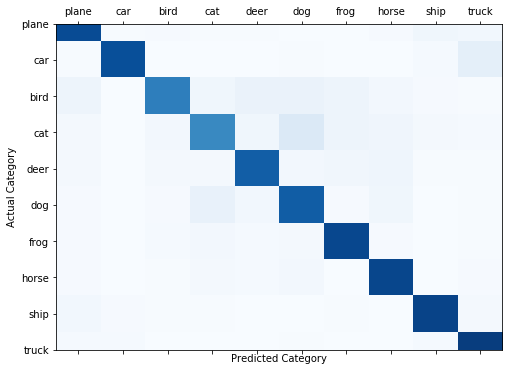

Category   - Accuracy
plane      - 89.1
car        - 87.9
bird       - 69.8
cat        - 65.8
deer       - 82.3
dog        - 82.7
frog       - 91.0
horse      - 91.3
ship       - 92.3
truck      - 94.7

Selected workers

[32  2 93 77 59 94 81  4 64 55 76 16 27 45 83]
Worker 32 : is  Honest
Worker 2 : is  Honest
Worker 93 : is  Honest
Worker 77 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 4 : is  Honest
Worker 64 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 76 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 27 : is  Stealthy_Attacker
Worker 45 : is  Honest
Worker 83 : is  Honest

 | Global Training Round : 71 |


Worker 32 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.422079
Train Epoch: 1 [400/500	(81%)]	Loss: 0.297240
Train Epoch: 2 [0/500	(1%)]	Loss: 0.132409
Train Epoch: 2 [400/500	(81%)]	Loss: 0.354392
Train Epoch: 3 [0/500	(1%)]	Loss: 0.269281
Train Epoch: 3 [400/500	(81%)]	Loss: 0.245272
Train Epoch: 4 [0/500	(1%)]	Loss: 0.126416
Train Epoch: 4 [400/500	(81%)]	Loss: 0.267151
Train Epoch: 5 [0/500	(1%)]	Loss: 0.104682
Train Epoch: 5 [400/500	(81%)]	Loss: 0.249254

Worker 32 ends training in Global Round:71 |

Worker 2 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.131334
Train Epoch: 1 [400/500	(81%)]	Loss: 0.261782
Train Epoch: 2 [0/500	(1%)]	Loss: 0.100542
Train Epoch: 2 [400/500	(81%)]	Loss: 0.096245
Train Epoch: 3 [0/500	(1%)]	Loss: 0.066452
Train Epoch: 3 [400/500	(81%)]	Loss: 0.051012
Train Epoch: 4 [0/500	(1%)]	Loss: 0.042522
Train Epoch: 4 [400/500	(81%)]	Loss: 0.098053
Train Epoch: 5 [0/500	(1%)]	Loss: 0.043411
Train Epoch: 5 [400/500	(81%)]	Loss: 0.088019

Worker 2 ends training in Global Round:71 |

Worker 93 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.338481
Train Epoch: 1 [400/500	(81%)]	Loss: 0.314865
Train Epoch: 2 [0/500	(1%)]	Loss: 0.192771
Train Epoch: 2 [400/500	(81%)]	Loss: 0.230056
Train Epoch: 3 [0/500	(1%)]	Loss: 0.123259
Train Epoch: 3 [400/500	(81%)]	Loss: 0.290083
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149359
Train Epoch: 4 [400/500	(81%)]	Loss: 0.187496
Train Epoch: 5 [0/500	(1%)]	Loss: 0.078044
Train Epoch: 5 [400/500	(81%)]	Loss: 0.196600

Worker 93 ends training in Global Round:71 |

Worker 77 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.358490
Train Epoch: 1 [400/500	(81%)]	Loss: 0.424157
Train Epoch: 2 [0/500	(1%)]	Loss: 0.207972
Train Epoch: 2 [400/500	(81%)]	Loss: 0.431469
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136013
Train Epoch: 3 [400/500	(81%)]	Loss: 0.181023
Train Epoch: 4 [0/500	(1%)]	Loss: 0.134247
Train Epoch: 4 [400/500	(81%)]	Loss: 0.165758
Train Epoch: 5 [0/500	(1%)]	Loss: 0.204440
Train Epoch: 5 [400/500	(81%)]	Loss: 0.091024

Worker 77 ends training in Global Round:71 |

Worker 59 starts training in Global Round:71 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  71


Train Epoch: 1 [0/500	(1%)]	Loss: 1.414007
Train Epoch: 1 [400/500	(81%)]	Loss: 0.525897
Train Epoch: 2 [0/500	(1%)]	Loss: 0.201283
Train Epoch: 2 [400/500	(81%)]	Loss: 0.398322
Train Epoch: 3 [0/500	(1%)]	Loss: 0.162053
Train Epoch: 3 [400/500	(81%)]	Loss: 0.340080
Train Epoch: 4 [0/500	(1%)]	Loss: 0.190514
Train Epoch: 4 [400/500	(81%)]	Loss: 0.278535
Train Epoch: 5 [0/500	(1%)]	Loss: 0.213459
Train Epoch: 5 [400/500	(81%)]	Loss: 0.289592

Performed attacks 1
Worker 59 ends training in Global Round:71 |

Worker 94 starts training in Global Round:71 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  71


Train Epoch: 1 [0/500	(1%)]	Loss: 1.196957
Train Epoch: 1 [400/500	(81%)]	Loss: 0.630257
Train Epoch: 2 [0/500	(1%)]	Loss: 0.248129
Train Epoch: 2 [400/500	(81%)]	Loss: 0.433723
Train Epoch: 3 [0/500	(1%)]	Loss: 0.120210
Train Epoch: 3 [400/500	(81%)]	Loss: 0.231379
Train Epoch: 4 [0/500	(1%)]	Loss: 0.220964
Train Epoch: 4 [400/500	(81%)]	Loss: 0.256867
Train Epoch: 5 [0/500	(1%)]	Loss: 0.131168
Train Epoch: 5 [400/500	(81%)]	Loss: 0.237195

Performed attacks 2
Worker 94 ends training in Global Round:71 |

Worker 81 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.142185
Train Epoch: 1 [400/500	(81%)]	Loss: 0.459473
Train Epoch: 2 [0/500	(1%)]	Loss: 0.110250
Train Epoch: 2 [400/500	(81%)]	Loss: 0.149063
Train Epoch: 3 [0/500	(1%)]	Loss: 0.192325
Train Epoch: 3 [400/500	(81%)]	Loss: 0.103885
Train Epoch: 4 [0/500	(1%)]	Loss: 0.101526
Train Epoch: 4 [400/500	(81%)]	Loss: 0.133718
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081528
Train Epoch: 5 [400/500	(81%)]	Loss: 0.112615

Worker 81 ends training in Global Round:71 |

Worker 4 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.173641
Train Epoch: 1 [400/500	(81%)]	Loss: 0.347822
Train Epoch: 2 [0/500	(1%)]	Loss: 0.209524
Train Epoch: 2 [400/500	(81%)]	Loss: 0.233294
Train Epoch: 3 [0/500	(1%)]	Loss: 0.201160
Train Epoch: 3 [400/500	(81%)]	Loss: 0.187932
Train Epoch: 4 [0/500	(1%)]	Loss: 0.090033
Train Epoch: 4 [400/500	(81%)]	Loss: 0.158704
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118894
Train Epoch: 5 [400/500	(81%)]	Loss: 0.118851

Worker 4 ends training in Global Round:71 |

Worker 64 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.179805
Train Epoch: 1 [400/500	(81%)]	Loss: 0.206241
Train Epoch: 2 [0/500	(1%)]	Loss: 0.138747
Train Epoch: 2 [400/500	(81%)]	Loss: 0.193561
Train Epoch: 3 [0/500	(1%)]	Loss: 0.082617
Train Epoch: 3 [400/500	(81%)]	Loss: 0.145995
Train Epoch: 4 [0/500	(1%)]	Loss: 0.058949
Train Epoch: 4 [400/500	(81%)]	Loss: 0.170572
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110604
Train Epoch: 5 [400/500	(81%)]	Loss: 0.071780

Worker 64 ends training in Global Round:71 |

Worker 55 starts training in Global Round:71 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  71


Train Epoch: 1 [0/500	(1%)]	Loss: 1.275013
Train Epoch: 1 [400/500	(81%)]	Loss: 0.450079
Train Epoch: 2 [0/500	(1%)]	Loss: 0.518503
Train Epoch: 2 [400/500	(81%)]	Loss: 0.630136
Train Epoch: 3 [0/500	(1%)]	Loss: 0.246216
Train Epoch: 3 [400/500	(81%)]	Loss: 0.426654
Train Epoch: 4 [0/500	(1%)]	Loss: 0.232630
Train Epoch: 4 [400/500	(81%)]	Loss: 0.226465
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132135
Train Epoch: 5 [400/500	(81%)]	Loss: 0.307411

Performed attacks 3
Worker 55 ends training in Global Round:71 |

Worker 76 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.149745
Train Epoch: 1 [400/500	(81%)]	Loss: 0.425541
Train Epoch: 2 [0/500	(1%)]	Loss: 0.205953
Train Epoch: 2 [400/500	(81%)]	Loss: 0.319900
Train Epoch: 3 [0/500	(1%)]	Loss: 0.177824
Train Epoch: 3 [400/500	(81%)]	Loss: 0.280933
Train Epoch: 4 [0/500	(1%)]	Loss: 0.048833
Train Epoch: 4 [400/500	(81%)]	Loss: 0.270164
Train Epoch: 5 [0/500	(1%)]	Loss: 0.071881
Train Epoch: 5 [400/500	(81%)]	Loss: 0.121761

Worker 76 ends training in Global Round:71 |

Worker 16 starts training in Global Round:71 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  71


Train Epoch: 1 [0/500	(1%)]	Loss: 0.977657
Train Epoch: 1 [400/500	(81%)]	Loss: 0.599424
Train Epoch: 2 [0/500	(1%)]	Loss: 0.342839
Train Epoch: 2 [400/500	(81%)]	Loss: 0.235368
Train Epoch: 3 [0/500	(1%)]	Loss: 0.204038
Train Epoch: 3 [400/500	(81%)]	Loss: 0.292620
Train Epoch: 4 [0/500	(1%)]	Loss: 0.271672
Train Epoch: 4 [400/500	(81%)]	Loss: 0.241492
Train Epoch: 5 [0/500	(1%)]	Loss: 0.315291
Train Epoch: 5 [400/500	(81%)]	Loss: 0.260078

Performed attacks 4
Worker 16 ends training in Global Round:71 |

Worker 27 starts training in Global Round:71 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  71


Train Epoch: 1 [0/500	(1%)]	Loss: 1.242453
Train Epoch: 1 [400/500	(81%)]	Loss: 0.403398
Train Epoch: 2 [0/500	(1%)]	Loss: 0.192282
Train Epoch: 2 [400/500	(81%)]	Loss: 0.307615
Train Epoch: 3 [0/500	(1%)]	Loss: 0.143408
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260636
Train Epoch: 4 [0/500	(1%)]	Loss: 0.174902
Train Epoch: 4 [400/500	(81%)]	Loss: 0.183271
Train Epoch: 5 [0/500	(1%)]	Loss: 0.101599
Train Epoch: 5 [400/500	(81%)]	Loss: 0.115384

Performed attacks 5
Worker 27 ends training in Global Round:71 |

Worker 45 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.243961
Train Epoch: 1 [400/500	(81%)]	Loss: 0.089640
Train Epoch: 2 [0/500	(1%)]	Loss: 0.173590
Train Epoch: 2 [400/500	(81%)]	Loss: 0.198560
Train Epoch: 3 [0/500	(1%)]	Loss: 0.058328
Train Epoch: 3 [400/500	(81%)]	Loss: 0.065302
Train Epoch: 4 [0/500	(1%)]	Loss: 0.075080
Train Epoch: 4 [400/500	(81%)]	Loss: 0.043962
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114630
Train Epoch: 5 [400/500	(81%)]	Loss: 0.119844

Worker 45 ends training in Global Round:71 |

Worker 83 starts training in Global Round:71 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.133076
Train Epoch: 1 [400/500	(81%)]	Loss: 0.232393
Train Epoch: 2 [0/500	(1%)]	Loss: 0.080177
Train Epoch: 2 [400/500	(81%)]	Loss: 0.153305
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145861
Train Epoch: 3 [400/500	(81%)]	Loss: 0.092638
Train Epoch: 4 [0/500	(1%)]	Loss: 0.065519
Train Epoch: 4 [400/500	(81%)]	Loss: 0.118795
Train Epoch: 5 [0/500	(1%)]	Loss: 0.071585
Train Epoch: 5 [400/500	(81%)]	Loss: 0.083238

Worker 83 ends training in Global Round:71 |
Last layer biases  [array([ 0.03353943, -0.02836577, -0.01559762,  0.03683175,  0.04006958,
       -0.01656612,  0.03859802, -0.00798193, -0.02012461, -0.0445008 ],
      dtype=float32), array([ 0.03440744, -0.03179443, -0.01417742,  0.03655717,  0.03665742,
       -0.01634994,  0.04051558, -0.00698394, -0.02229897, -0.04063101],
      dtype=float32), array([ 0.03449969, -0.03078788, -0.01660745,  0.0355569 ,  0.03852587,
       -0.01413348,  0.03879615, -0.00699039, -0.02305987, -0.03989762],
      dtyp

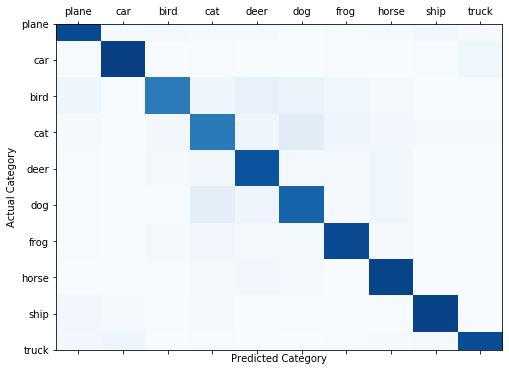

Category   - Accuracy
plane      - 89.7
car        - 93.7
bird       - 70.9
cat        - 71.1
deer       - 86.0
dog        - 80.3
frog       - 89.9
horse      - 92.1
ship       - 92.3
truck      - 88.7

Selected workers

[74 91 14 82 83  7 56  1 66 71 97 45 69 65 35]
Worker 74 : is  Honest
Worker 91 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 83 : is  Honest
Worker 7 : is  Honest
Worker 56 : is  Honest
Worker 1 : is  Honest
Worker 66 : is  Stealthy_Attacker
Worker 71 : is  Stealthy_Attacker
Worker 97 : is  Stealthy_Attacker
Worker 45 : is  Honest
Worker 69 : is  Honest
Worker 65 : is  Honest
Worker 35 : is  Honest

 | Global Training Round : 72 |


Worker 74 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.217593
Train Epoch: 1 [400/500	(81%)]	Loss: 0.294522
Train Epoch: 2 [0/500	(1%)]	Loss: 0.131596
Train Epoch: 2 [400/500	(81%)]	Loss: 0.313834
Train Epoch: 3 [0/500	(1%)]	Loss: 0.180855
Train Epoch: 3 [400/500	(81%)]	Loss: 0.200095
Train Epoch: 4 [0/500	(1%)]	Loss: 0.092902
Train Epoch: 4 [400/500	(81%)]	Loss: 0.222989
Train Epoch: 5 [0/500	(1%)]	Loss: 0.143227
Train Epoch: 5 [400/500	(81%)]	Loss: 0.186004

Worker 74 ends training in Global Round:72 |

Worker 91 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.194570
Train Epoch: 1 [400/500	(81%)]	Loss: 0.352512
Train Epoch: 2 [0/500	(1%)]	Loss: 0.221000
Train Epoch: 2 [400/500	(81%)]	Loss: 0.320192
Train Epoch: 3 [0/500	(1%)]	Loss: 0.183273
Train Epoch: 3 [400/500	(81%)]	Loss: 0.163603
Train Epoch: 4 [0/500	(1%)]	Loss: 0.163979
Train Epoch: 4 [400/500	(81%)]	Loss: 0.204897
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082271
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199328

Worker 91 ends training in Global Round:72 |

Worker 14 starts training in Global Round:72 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  72


Train Epoch: 1 [0/500	(1%)]	Loss: 1.304508
Train Epoch: 1 [400/500	(81%)]	Loss: 0.551326
Train Epoch: 2 [0/500	(1%)]	Loss: 0.282791
Train Epoch: 2 [400/500	(81%)]	Loss: 0.449012
Train Epoch: 3 [0/500	(1%)]	Loss: 0.089938
Train Epoch: 3 [400/500	(81%)]	Loss: 0.249845
Train Epoch: 4 [0/500	(1%)]	Loss: 0.118982
Train Epoch: 4 [400/500	(81%)]	Loss: 0.212551
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110032
Train Epoch: 5 [400/500	(81%)]	Loss: 0.130490

Performed attacks 1
Worker 14 ends training in Global Round:72 |

Worker 82 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.200892
Train Epoch: 1 [400/500	(81%)]	Loss: 0.237883
Train Epoch: 2 [0/500	(1%)]	Loss: 0.060376
Train Epoch: 2 [400/500	(81%)]	Loss: 0.071631
Train Epoch: 3 [0/500	(1%)]	Loss: 0.139755
Train Epoch: 3 [400/500	(81%)]	Loss: 0.150687
Train Epoch: 4 [0/500	(1%)]	Loss: 0.068359
Train Epoch: 4 [400/500	(81%)]	Loss: 0.186912
Train Epoch: 5 [0/500	(1%)]	Loss: 0.040065
Train Epoch: 5 [400/500	(81%)]	Loss: 0.079715

Worker 82 ends training in Global Round:72 |

Worker 83 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.116006
Train Epoch: 1 [400/500	(81%)]	Loss: 0.071929
Train Epoch: 2 [0/500	(1%)]	Loss: 0.054230
Train Epoch: 2 [400/500	(81%)]	Loss: 0.215976
Train Epoch: 3 [0/500	(1%)]	Loss: 0.110299
Train Epoch: 3 [400/500	(81%)]	Loss: 0.071822
Train Epoch: 4 [0/500	(1%)]	Loss: 0.051836
Train Epoch: 4 [400/500	(81%)]	Loss: 0.067710
Train Epoch: 5 [0/500	(1%)]	Loss: 0.058177
Train Epoch: 5 [400/500	(81%)]	Loss: 0.134398

Worker 83 ends training in Global Round:72 |

Worker 7 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.114012
Train Epoch: 1 [400/500	(81%)]	Loss: 0.179889
Train Epoch: 2 [0/500	(1%)]	Loss: 0.141621
Train Epoch: 2 [400/500	(81%)]	Loss: 0.128817
Train Epoch: 3 [0/500	(1%)]	Loss: 0.052454
Train Epoch: 3 [400/500	(81%)]	Loss: 0.133329
Train Epoch: 4 [0/500	(1%)]	Loss: 0.085401
Train Epoch: 4 [400/500	(81%)]	Loss: 0.154256
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170023
Train Epoch: 5 [400/500	(81%)]	Loss: 0.195193

Worker 7 ends training in Global Round:72 |

Worker 56 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.328990
Train Epoch: 1 [400/500	(81%)]	Loss: 0.327615
Train Epoch: 2 [0/500	(1%)]	Loss: 0.133458
Train Epoch: 2 [400/500	(81%)]	Loss: 0.306668
Train Epoch: 3 [0/500	(1%)]	Loss: 0.104738
Train Epoch: 3 [400/500	(81%)]	Loss: 0.098611
Train Epoch: 4 [0/500	(1%)]	Loss: 0.117157
Train Epoch: 4 [400/500	(81%)]	Loss: 0.198763
Train Epoch: 5 [0/500	(1%)]	Loss: 0.090245
Train Epoch: 5 [400/500	(81%)]	Loss: 0.183022

Worker 56 ends training in Global Round:72 |

Worker 1 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.537826
Train Epoch: 1 [400/500	(81%)]	Loss: 0.378100
Train Epoch: 2 [0/500	(1%)]	Loss: 0.297777
Train Epoch: 2 [400/500	(81%)]	Loss: 0.423951
Train Epoch: 3 [0/500	(1%)]	Loss: 0.172668
Train Epoch: 3 [400/500	(81%)]	Loss: 0.286046
Train Epoch: 4 [0/500	(1%)]	Loss: 0.239717
Train Epoch: 4 [400/500	(81%)]	Loss: 0.259111
Train Epoch: 5 [0/500	(1%)]	Loss: 0.167446
Train Epoch: 5 [400/500	(81%)]	Loss: 0.293078

Worker 1 ends training in Global Round:72 |

Worker 66 starts training in Global Round:72 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  72


Train Epoch: 1 [0/500	(1%)]	Loss: 1.308792
Train Epoch: 1 [400/500	(81%)]	Loss: 0.913604
Train Epoch: 2 [0/500	(1%)]	Loss: 0.368658
Train Epoch: 2 [400/500	(81%)]	Loss: 0.298698
Train Epoch: 3 [0/500	(1%)]	Loss: 0.274934
Train Epoch: 3 [400/500	(81%)]	Loss: 0.372146
Train Epoch: 4 [0/500	(1%)]	Loss: 0.237333
Train Epoch: 4 [400/500	(81%)]	Loss: 0.365344
Train Epoch: 5 [0/500	(1%)]	Loss: 0.209728
Train Epoch: 5 [400/500	(81%)]	Loss: 0.270212

Performed attacks 2
Worker 66 ends training in Global Round:72 |

Worker 71 starts training in Global Round:72 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  72


Train Epoch: 1 [0/500	(1%)]	Loss: 1.096601
Train Epoch: 1 [400/500	(81%)]	Loss: 0.642477
Train Epoch: 2 [0/500	(1%)]	Loss: 0.373578
Train Epoch: 2 [400/500	(81%)]	Loss: 0.599256
Train Epoch: 3 [0/500	(1%)]	Loss: 0.266415
Train Epoch: 3 [400/500	(81%)]	Loss: 0.359404
Train Epoch: 4 [0/500	(1%)]	Loss: 0.251983
Train Epoch: 4 [400/500	(81%)]	Loss: 0.371131
Train Epoch: 5 [0/500	(1%)]	Loss: 0.329364
Train Epoch: 5 [400/500	(81%)]	Loss: 0.203013

Performed attacks 3
Worker 71 ends training in Global Round:72 |

Worker 97 starts training in Global Round:72 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  72


Train Epoch: 1 [0/500	(1%)]	Loss: 1.359543
Train Epoch: 1 [400/500	(81%)]	Loss: 0.540879
Train Epoch: 2 [0/500	(1%)]	Loss: 0.239924
Train Epoch: 2 [400/500	(81%)]	Loss: 0.363102
Train Epoch: 3 [0/500	(1%)]	Loss: 0.228672
Train Epoch: 3 [400/500	(81%)]	Loss: 0.386847
Train Epoch: 4 [0/500	(1%)]	Loss: 0.261007
Train Epoch: 4 [400/500	(81%)]	Loss: 0.341953
Train Epoch: 5 [0/500	(1%)]	Loss: 0.065591
Train Epoch: 5 [400/500	(81%)]	Loss: 0.109667

Performed attacks 4
Worker 97 ends training in Global Round:72 |

Worker 45 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.190820
Train Epoch: 1 [400/500	(81%)]	Loss: 0.216164
Train Epoch: 2 [0/500	(1%)]	Loss: 0.053404
Train Epoch: 2 [400/500	(81%)]	Loss: 0.183724
Train Epoch: 3 [0/500	(1%)]	Loss: 0.058693
Train Epoch: 3 [400/500	(81%)]	Loss: 0.221243
Train Epoch: 4 [0/500	(1%)]	Loss: 0.041537
Train Epoch: 4 [400/500	(81%)]	Loss: 0.144203
Train Epoch: 5 [0/500	(1%)]	Loss: 0.165600
Train Epoch: 5 [400/500	(81%)]	Loss: 0.157270

Worker 45 ends training in Global Round:72 |

Worker 69 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.165823
Train Epoch: 1 [400/500	(81%)]	Loss: 0.282345
Train Epoch: 2 [0/500	(1%)]	Loss: 0.148632
Train Epoch: 2 [400/500	(81%)]	Loss: 0.193843
Train Epoch: 3 [0/500	(1%)]	Loss: 0.086040
Train Epoch: 3 [400/500	(81%)]	Loss: 0.106363
Train Epoch: 4 [0/500	(1%)]	Loss: 0.154307
Train Epoch: 4 [400/500	(81%)]	Loss: 0.297351
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110578
Train Epoch: 5 [400/500	(81%)]	Loss: 0.099609

Worker 69 ends training in Global Round:72 |

Worker 65 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.424181
Train Epoch: 1 [400/500	(81%)]	Loss: 0.331087
Train Epoch: 2 [0/500	(1%)]	Loss: 0.071874
Train Epoch: 2 [400/500	(81%)]	Loss: 0.160649
Train Epoch: 3 [0/500	(1%)]	Loss: 0.115168
Train Epoch: 3 [400/500	(81%)]	Loss: 0.220363
Train Epoch: 4 [0/500	(1%)]	Loss: 0.129256
Train Epoch: 4 [400/500	(81%)]	Loss: 0.187847
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100035
Train Epoch: 5 [400/500	(81%)]	Loss: 0.164239

Worker 65 ends training in Global Round:72 |

Worker 35 starts training in Global Round:72 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.193109
Train Epoch: 1 [400/500	(81%)]	Loss: 0.332451
Train Epoch: 2 [0/500	(1%)]	Loss: 0.087849
Train Epoch: 2 [400/500	(81%)]	Loss: 0.311818
Train Epoch: 3 [0/500	(1%)]	Loss: 0.130730
Train Epoch: 3 [400/500	(81%)]	Loss: 0.186063
Train Epoch: 4 [0/500	(1%)]	Loss: 0.054825
Train Epoch: 4 [400/500	(81%)]	Loss: 0.215440
Train Epoch: 5 [0/500	(1%)]	Loss: 0.253427
Train Epoch: 5 [400/500	(81%)]	Loss: 0.134622

Worker 35 ends training in Global Round:72 |
Last layer biases  [array([ 0.03335012, -0.03062088, -0.01230379,  0.03656899,  0.03752745,
       -0.01351224,  0.03860149, -0.00982119, -0.02270932, -0.04117875],
      dtype=float32), array([ 0.0345769 , -0.03120124, -0.01545204,  0.03744651,  0.03951411,
       -0.01528328,  0.03870895, -0.00718794, -0.02199625, -0.04322381],
      dtype=float32), array([ 0.03349031, -0.02995373, -0.01273136,  0.04080897,  0.05083908,
       -0.01621674,  0.03792583, -0.02635692, -0.02180008, -0.04010345],
      dtyp

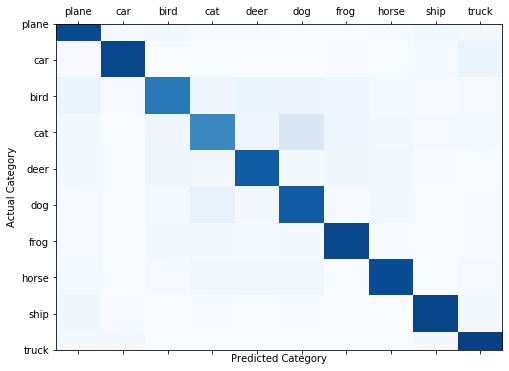

Category   - Accuracy
plane      - 90.1
car        - 91.2
bird       - 71.6
cat        - 65.5
deer       - 82.7
dog        - 83.0
frog       - 91.2
horse      - 88.9
ship       - 91.8
truck      - 93.4

Selected workers

[83 84 73 33 99 40 36 25 54 31 50 42 34 29 39]
Worker 83 : is  Honest
Worker 84 : is  Honest
Worker 73 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 40 : is  Honest
Worker 36 : is  Honest
Worker 25 : is  Honest
Worker 54 : is  Honest
Worker 31 : is  Stealthy_Attacker
Worker 50 : is  Stealthy_Attacker
Worker 42 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 29 : is  Honest
Worker 39 : is  Honest

 | Global Training Round : 73 |


Worker 83 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.123094
Train Epoch: 1 [400/500	(81%)]	Loss: 0.069771
Train Epoch: 2 [0/500	(1%)]	Loss: 0.086306
Train Epoch: 2 [400/500	(81%)]	Loss: 0.079883
Train Epoch: 3 [0/500	(1%)]	Loss: 0.067591
Train Epoch: 3 [400/500	(81%)]	Loss: 0.063748
Train Epoch: 4 [0/500	(1%)]	Loss: 0.028861
Train Epoch: 4 [400/500	(81%)]	Loss: 0.077229
Train Epoch: 5 [0/500	(1%)]	Loss: 0.059837
Train Epoch: 5 [400/500	(81%)]	Loss: 0.076708

Worker 83 ends training in Global Round:73 |

Worker 84 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.296612
Train Epoch: 1 [400/500	(81%)]	Loss: 0.293695
Train Epoch: 2 [0/500	(1%)]	Loss: 0.137987
Train Epoch: 2 [400/500	(81%)]	Loss: 0.261950
Train Epoch: 3 [0/500	(1%)]	Loss: 0.153076
Train Epoch: 3 [400/500	(81%)]	Loss: 0.275161
Train Epoch: 4 [0/500	(1%)]	Loss: 0.074496
Train Epoch: 4 [400/500	(81%)]	Loss: 0.184026
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082372
Train Epoch: 5 [400/500	(81%)]	Loss: 0.170272

Worker 84 ends training in Global Round:73 |

Worker 73 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.203804
Train Epoch: 1 [400/500	(81%)]	Loss: 0.270717
Train Epoch: 2 [0/500	(1%)]	Loss: 0.159754
Train Epoch: 2 [400/500	(81%)]	Loss: 0.117430
Train Epoch: 3 [0/500	(1%)]	Loss: 0.061375
Train Epoch: 3 [400/500	(81%)]	Loss: 0.215566
Train Epoch: 4 [0/500	(1%)]	Loss: 0.068958
Train Epoch: 4 [400/500	(81%)]	Loss: 0.079127
Train Epoch: 5 [0/500	(1%)]	Loss: 0.074211
Train Epoch: 5 [400/500	(81%)]	Loss: 0.090772

Worker 73 ends training in Global Round:73 |

Worker 33 starts training in Global Round:73 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  73


Train Epoch: 1 [0/500	(1%)]	Loss: 1.337638
Train Epoch: 1 [400/500	(81%)]	Loss: 0.447936
Train Epoch: 2 [0/500	(1%)]	Loss: 0.267438
Train Epoch: 2 [400/500	(81%)]	Loss: 0.379169
Train Epoch: 3 [0/500	(1%)]	Loss: 0.362349
Train Epoch: 3 [400/500	(81%)]	Loss: 0.131968
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200713
Train Epoch: 4 [400/500	(81%)]	Loss: 0.176835
Train Epoch: 5 [0/500	(1%)]	Loss: 0.173186
Train Epoch: 5 [400/500	(81%)]	Loss: 0.095928

Performed attacks 1
Worker 33 ends training in Global Round:73 |

Worker 99 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.390303
Train Epoch: 1 [400/500	(81%)]	Loss: 0.337942
Train Epoch: 2 [0/500	(1%)]	Loss: 0.140708
Train Epoch: 2 [400/500	(81%)]	Loss: 0.204687
Train Epoch: 3 [0/500	(1%)]	Loss: 0.244071
Train Epoch: 3 [400/500	(81%)]	Loss: 0.155626
Train Epoch: 4 [0/500	(1%)]	Loss: 0.133533
Train Epoch: 4 [400/500	(81%)]	Loss: 0.123174
Train Epoch: 5 [0/500	(1%)]	Loss: 0.069320
Train Epoch: 5 [400/500	(81%)]	Loss: 0.333551

Worker 99 ends training in Global Round:73 |

Worker 40 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.386963
Train Epoch: 1 [400/500	(81%)]	Loss: 0.436677
Train Epoch: 2 [0/500	(1%)]	Loss: 0.290895
Train Epoch: 2 [400/500	(81%)]	Loss: 0.381023
Train Epoch: 3 [0/500	(1%)]	Loss: 0.169365
Train Epoch: 3 [400/500	(81%)]	Loss: 0.331572
Train Epoch: 4 [0/500	(1%)]	Loss: 0.084367
Train Epoch: 4 [400/500	(81%)]	Loss: 0.401936
Train Epoch: 5 [0/500	(1%)]	Loss: 0.217119
Train Epoch: 5 [400/500	(81%)]	Loss: 0.192566

Worker 40 ends training in Global Round:73 |

Worker 36 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.376372
Train Epoch: 1 [400/500	(81%)]	Loss: 0.288566
Train Epoch: 2 [0/500	(1%)]	Loss: 0.176446
Train Epoch: 2 [400/500	(81%)]	Loss: 0.288255
Train Epoch: 3 [0/500	(1%)]	Loss: 0.098674
Train Epoch: 3 [400/500	(81%)]	Loss: 0.115807
Train Epoch: 4 [0/500	(1%)]	Loss: 0.147463
Train Epoch: 4 [400/500	(81%)]	Loss: 0.124451
Train Epoch: 5 [0/500	(1%)]	Loss: 0.113992
Train Epoch: 5 [400/500	(81%)]	Loss: 0.136924

Worker 36 ends training in Global Round:73 |

Worker 25 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.365283
Train Epoch: 1 [400/500	(81%)]	Loss: 0.368209
Train Epoch: 2 [0/500	(1%)]	Loss: 0.187148
Train Epoch: 2 [400/500	(81%)]	Loss: 0.335689
Train Epoch: 3 [0/500	(1%)]	Loss: 0.216541
Train Epoch: 3 [400/500	(81%)]	Loss: 0.228558
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121670
Train Epoch: 4 [400/500	(81%)]	Loss: 0.277015
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145154
Train Epoch: 5 [400/500	(81%)]	Loss: 0.340883

Worker 25 ends training in Global Round:73 |

Worker 54 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.254134
Train Epoch: 1 [400/500	(81%)]	Loss: 0.259603
Train Epoch: 2 [0/500	(1%)]	Loss: 0.136308
Train Epoch: 2 [400/500	(81%)]	Loss: 0.157608
Train Epoch: 3 [0/500	(1%)]	Loss: 0.054555
Train Epoch: 3 [400/500	(81%)]	Loss: 0.108514
Train Epoch: 4 [0/500	(1%)]	Loss: 0.079519
Train Epoch: 4 [400/500	(81%)]	Loss: 0.097277
Train Epoch: 5 [0/500	(1%)]	Loss: 0.046330
Train Epoch: 5 [400/500	(81%)]	Loss: 0.070311

Worker 54 ends training in Global Round:73 |

Worker 31 starts training in Global Round:73 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  73


Train Epoch: 1 [0/500	(1%)]	Loss: 1.049346
Train Epoch: 1 [400/500	(81%)]	Loss: 0.750186
Train Epoch: 2 [0/500	(1%)]	Loss: 0.302034
Train Epoch: 2 [400/500	(81%)]	Loss: 0.344560
Train Epoch: 3 [0/500	(1%)]	Loss: 0.362944
Train Epoch: 3 [400/500	(81%)]	Loss: 0.304845
Train Epoch: 4 [0/500	(1%)]	Loss: 0.334732
Train Epoch: 4 [400/500	(81%)]	Loss: 0.286060
Train Epoch: 5 [0/500	(1%)]	Loss: 0.211808
Train Epoch: 5 [400/500	(81%)]	Loss: 0.258744

Performed attacks 2
Worker 31 ends training in Global Round:73 |

Worker 50 starts training in Global Round:73 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  73


Train Epoch: 1 [0/500	(1%)]	Loss: 1.757096
Train Epoch: 1 [400/500	(81%)]	Loss: 0.598557
Train Epoch: 2 [0/500	(1%)]	Loss: 0.383410
Train Epoch: 2 [400/500	(81%)]	Loss: 0.432271
Train Epoch: 3 [0/500	(1%)]	Loss: 0.239502
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260713
Train Epoch: 4 [0/500	(1%)]	Loss: 0.228982
Train Epoch: 4 [400/500	(81%)]	Loss: 0.350158
Train Epoch: 5 [0/500	(1%)]	Loss: 0.198586
Train Epoch: 5 [400/500	(81%)]	Loss: 0.290847

Performed attacks 3
Worker 50 ends training in Global Round:73 |

Worker 42 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.357890
Train Epoch: 1 [400/500	(81%)]	Loss: 0.299873
Train Epoch: 2 [0/500	(1%)]	Loss: 0.100696
Train Epoch: 2 [400/500	(81%)]	Loss: 0.263026
Train Epoch: 3 [0/500	(1%)]	Loss: 0.172160
Train Epoch: 3 [400/500	(81%)]	Loss: 0.246852
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121187
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309117
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112259
Train Epoch: 5 [400/500	(81%)]	Loss: 0.169711

Worker 42 ends training in Global Round:73 |

Worker 34 starts training in Global Round:73 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  73


Train Epoch: 1 [0/500	(1%)]	Loss: 1.517890
Train Epoch: 1 [400/500	(81%)]	Loss: 0.372707
Train Epoch: 2 [0/500	(1%)]	Loss: 0.262167
Train Epoch: 2 [400/500	(81%)]	Loss: 0.463617
Train Epoch: 3 [0/500	(1%)]	Loss: 0.177856
Train Epoch: 3 [400/500	(81%)]	Loss: 0.425956
Train Epoch: 4 [0/500	(1%)]	Loss: 0.323568
Train Epoch: 4 [400/500	(81%)]	Loss: 0.470665
Train Epoch: 5 [0/500	(1%)]	Loss: 0.103267
Train Epoch: 5 [400/500	(81%)]	Loss: 0.325478

Performed attacks 4
Worker 34 ends training in Global Round:73 |

Worker 29 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.560029
Train Epoch: 1 [400/500	(81%)]	Loss: 0.229185
Train Epoch: 2 [0/500	(1%)]	Loss: 0.215809
Train Epoch: 2 [400/500	(81%)]	Loss: 0.266306
Train Epoch: 3 [0/500	(1%)]	Loss: 0.139810
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234790
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149063
Train Epoch: 4 [400/500	(81%)]	Loss: 0.215455
Train Epoch: 5 [0/500	(1%)]	Loss: 0.098482
Train Epoch: 5 [400/500	(81%)]	Loss: 0.168144

Worker 29 ends training in Global Round:73 |

Worker 39 starts training in Global Round:73 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.149327
Train Epoch: 1 [400/500	(81%)]	Loss: 0.152223
Train Epoch: 2 [0/500	(1%)]	Loss: 0.039607
Train Epoch: 2 [400/500	(81%)]	Loss: 0.135477
Train Epoch: 3 [0/500	(1%)]	Loss: 0.077587
Train Epoch: 3 [400/500	(81%)]	Loss: 0.116815
Train Epoch: 4 [0/500	(1%)]	Loss: 0.076285
Train Epoch: 4 [400/500	(81%)]	Loss: 0.088437
Train Epoch: 5 [0/500	(1%)]	Loss: 0.024160
Train Epoch: 5 [400/500	(81%)]	Loss: 0.109738

Worker 39 ends training in Global Round:73 |
Last layer biases  [array([ 0.0328744 , -0.03007585, -0.01472936,  0.0377272 ,  0.03874249,
       -0.01545972,  0.03796177, -0.00798721, -0.02138375, -0.04176806],
      dtype=float32), array([ 0.03298473, -0.0313714 , -0.01542511,  0.03806716,  0.0387229 ,
       -0.0154014 ,  0.03829711, -0.00663231, -0.02292062, -0.04041915],
      dtype=float32), array([ 0.03217378, -0.03108297, -0.01456935,  0.03832801,  0.03893423,
       -0.01480054,  0.0393692 , -0.00978841, -0.02234965, -0.04031237],
      dtyp

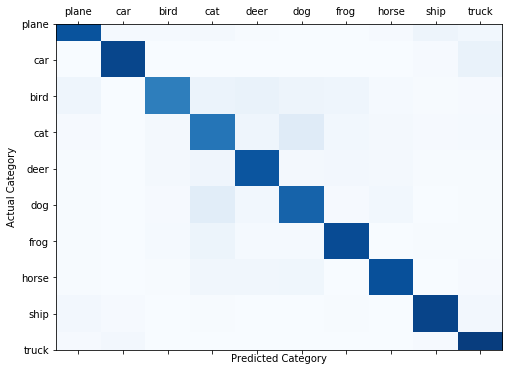

Category   - Accuracy
plane      - 86.5
car        - 91.3
bird       - 69.9
cat        - 73.1
deer       - 85.9
dog        - 80.4
frog       - 89.1
horse      - 87.5
ship       - 92.0
truck      - 94.9

Selected workers

[43 29 96 11 34 79  5 40 65 25 14 46 78 67 77]
Worker 43 : is  Honest
Worker 29 : is  Honest
Worker 96 : is  Honest
Worker 11 : is  Honest
Worker 34 : is  Stealthy_Attacker
Worker 79 : is  Stealthy_Attacker
Worker 5 : is  Honest
Worker 40 : is  Honest
Worker 65 : is  Honest
Worker 25 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 46 : is  Stealthy_Attacker
Worker 78 : is  Honest
Worker 67 : is  Stealthy_Attacker
Worker 77 : is  Honest

 | Global Training Round : 74 |


Worker 43 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.342818
Train Epoch: 1 [400/500	(81%)]	Loss: 0.464022
Train Epoch: 2 [0/500	(1%)]	Loss: 0.200088
Train Epoch: 2 [400/500	(81%)]	Loss: 0.318336
Train Epoch: 3 [0/500	(1%)]	Loss: 0.244023
Train Epoch: 3 [400/500	(81%)]	Loss: 0.274092
Train Epoch: 4 [0/500	(1%)]	Loss: 0.190362
Train Epoch: 4 [400/500	(81%)]	Loss: 0.080998
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106619
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199178

Worker 43 ends training in Global Round:74 |

Worker 29 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.201573
Train Epoch: 1 [400/500	(81%)]	Loss: 0.356148
Train Epoch: 2 [0/500	(1%)]	Loss: 0.062772
Train Epoch: 2 [400/500	(81%)]	Loss: 0.087104
Train Epoch: 3 [0/500	(1%)]	Loss: 0.169343
Train Epoch: 3 [400/500	(81%)]	Loss: 0.111298
Train Epoch: 4 [0/500	(1%)]	Loss: 0.065426
Train Epoch: 4 [400/500	(81%)]	Loss: 0.111532
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081023
Train Epoch: 5 [400/500	(81%)]	Loss: 0.152563

Worker 29 ends training in Global Round:74 |

Worker 96 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.221159
Train Epoch: 1 [400/500	(81%)]	Loss: 0.422677
Train Epoch: 2 [0/500	(1%)]	Loss: 0.187171
Train Epoch: 2 [400/500	(81%)]	Loss: 0.248292
Train Epoch: 3 [0/500	(1%)]	Loss: 0.116792
Train Epoch: 3 [400/500	(81%)]	Loss: 0.365101
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121848
Train Epoch: 4 [400/500	(81%)]	Loss: 0.237770
Train Epoch: 5 [0/500	(1%)]	Loss: 0.169270
Train Epoch: 5 [400/500	(81%)]	Loss: 0.113872

Worker 96 ends training in Global Round:74 |

Worker 11 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.300670
Train Epoch: 1 [400/500	(81%)]	Loss: 0.266170
Train Epoch: 2 [0/500	(1%)]	Loss: 0.102242
Train Epoch: 2 [400/500	(81%)]	Loss: 0.120797
Train Epoch: 3 [0/500	(1%)]	Loss: 0.144191
Train Epoch: 3 [400/500	(81%)]	Loss: 0.223043
Train Epoch: 4 [0/500	(1%)]	Loss: 0.077882
Train Epoch: 4 [400/500	(81%)]	Loss: 0.229900
Train Epoch: 5 [0/500	(1%)]	Loss: 0.043204
Train Epoch: 5 [400/500	(81%)]	Loss: 0.372491

Worker 11 ends training in Global Round:74 |

Worker 34 starts training in Global Round:74 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 34  in Global Round:  74


Train Epoch: 1 [0/500	(1%)]	Loss: 1.439730
Train Epoch: 1 [400/500	(81%)]	Loss: 0.330081
Train Epoch: 2 [0/500	(1%)]	Loss: 0.260563
Train Epoch: 2 [400/500	(81%)]	Loss: 0.346550
Train Epoch: 3 [0/500	(1%)]	Loss: 0.178001
Train Epoch: 3 [400/500	(81%)]	Loss: 0.398346
Train Epoch: 4 [0/500	(1%)]	Loss: 0.268668
Train Epoch: 4 [400/500	(81%)]	Loss: 0.436987
Train Epoch: 5 [0/500	(1%)]	Loss: 0.197313
Train Epoch: 5 [400/500	(81%)]	Loss: 0.215089

Performed attacks 1
Worker 34 ends training in Global Round:74 |

Worker 79 starts training in Global Round:74 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  74


Train Epoch: 1 [0/500	(1%)]	Loss: 1.041449
Train Epoch: 1 [400/500	(81%)]	Loss: 0.405993
Train Epoch: 2 [0/500	(1%)]	Loss: 0.237752
Train Epoch: 2 [400/500	(81%)]	Loss: 0.509489
Train Epoch: 3 [0/500	(1%)]	Loss: 0.380036
Train Epoch: 3 [400/500	(81%)]	Loss: 0.312670
Train Epoch: 4 [0/500	(1%)]	Loss: 0.209336
Train Epoch: 4 [400/500	(81%)]	Loss: 0.181165
Train Epoch: 5 [0/500	(1%)]	Loss: 0.195793
Train Epoch: 5 [400/500	(81%)]	Loss: 0.223413

Performed attacks 2
Worker 79 ends training in Global Round:74 |

Worker 5 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.302550
Train Epoch: 1 [400/500	(81%)]	Loss: 0.149567
Train Epoch: 2 [0/500	(1%)]	Loss: 0.115032
Train Epoch: 2 [400/500	(81%)]	Loss: 0.306521
Train Epoch: 3 [0/500	(1%)]	Loss: 0.093302
Train Epoch: 3 [400/500	(81%)]	Loss: 0.281215
Train Epoch: 4 [0/500	(1%)]	Loss: 0.064807
Train Epoch: 4 [400/500	(81%)]	Loss: 0.108997
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133089
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191100

Worker 5 ends training in Global Round:74 |

Worker 40 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.338584
Train Epoch: 1 [400/500	(81%)]	Loss: 0.407503
Train Epoch: 2 [0/500	(1%)]	Loss: 0.128140
Train Epoch: 2 [400/500	(81%)]	Loss: 0.121324
Train Epoch: 3 [0/500	(1%)]	Loss: 0.255136
Train Epoch: 3 [400/500	(81%)]	Loss: 0.252173
Train Epoch: 4 [0/500	(1%)]	Loss: 0.226565
Train Epoch: 4 [400/500	(81%)]	Loss: 0.200807
Train Epoch: 5 [0/500	(1%)]	Loss: 0.150820
Train Epoch: 5 [400/500	(81%)]	Loss: 0.293406

Worker 40 ends training in Global Round:74 |

Worker 65 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.235258
Train Epoch: 1 [400/500	(81%)]	Loss: 0.248577
Train Epoch: 2 [0/500	(1%)]	Loss: 0.184921
Train Epoch: 2 [400/500	(81%)]	Loss: 0.227354
Train Epoch: 3 [0/500	(1%)]	Loss: 0.161620
Train Epoch: 3 [400/500	(81%)]	Loss: 0.255122
Train Epoch: 4 [0/500	(1%)]	Loss: 0.124946
Train Epoch: 4 [400/500	(81%)]	Loss: 0.235170
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100089
Train Epoch: 5 [400/500	(81%)]	Loss: 0.188563

Worker 65 ends training in Global Round:74 |

Worker 25 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.259093
Train Epoch: 1 [400/500	(81%)]	Loss: 0.144270
Train Epoch: 2 [0/500	(1%)]	Loss: 0.090367
Train Epoch: 2 [400/500	(81%)]	Loss: 0.169231
Train Epoch: 3 [0/500	(1%)]	Loss: 0.117018
Train Epoch: 3 [400/500	(81%)]	Loss: 0.232293
Train Epoch: 4 [0/500	(1%)]	Loss: 0.080731
Train Epoch: 4 [400/500	(81%)]	Loss: 0.145924
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064674
Train Epoch: 5 [400/500	(81%)]	Loss: 0.129971

Worker 25 ends training in Global Round:74 |

Worker 14 starts training in Global Round:74 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  74


Train Epoch: 1 [0/500	(1%)]	Loss: 1.551046
Train Epoch: 1 [400/500	(81%)]	Loss: 0.545284
Train Epoch: 2 [0/500	(1%)]	Loss: 0.182919
Train Epoch: 2 [400/500	(81%)]	Loss: 0.615361
Train Epoch: 3 [0/500	(1%)]	Loss: 0.133565
Train Epoch: 3 [400/500	(81%)]	Loss: 0.285644
Train Epoch: 4 [0/500	(1%)]	Loss: 0.276650
Train Epoch: 4 [400/500	(81%)]	Loss: 0.238617
Train Epoch: 5 [0/500	(1%)]	Loss: 0.238813
Train Epoch: 5 [400/500	(81%)]	Loss: 0.277757

Performed attacks 3
Worker 14 ends training in Global Round:74 |

Worker 46 starts training in Global Round:74 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  74


Train Epoch: 1 [0/500	(1%)]	Loss: 1.117587
Train Epoch: 1 [400/500	(81%)]	Loss: 0.321452
Train Epoch: 2 [0/500	(1%)]	Loss: 0.267778
Train Epoch: 2 [400/500	(81%)]	Loss: 0.378126
Train Epoch: 3 [0/500	(1%)]	Loss: 0.357103
Train Epoch: 3 [400/500	(81%)]	Loss: 0.221190
Train Epoch: 4 [0/500	(1%)]	Loss: 0.186503
Train Epoch: 4 [400/500	(81%)]	Loss: 0.257823
Train Epoch: 5 [0/500	(1%)]	Loss: 0.186755
Train Epoch: 5 [400/500	(81%)]	Loss: 0.119711

Performed attacks 4
Worker 46 ends training in Global Round:74 |

Worker 78 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.224232
Train Epoch: 1 [400/500	(81%)]	Loss: 0.123692
Train Epoch: 2 [0/500	(1%)]	Loss: 0.108423
Train Epoch: 2 [400/500	(81%)]	Loss: 0.195972
Train Epoch: 3 [0/500	(1%)]	Loss: 0.056702
Train Epoch: 3 [400/500	(81%)]	Loss: 0.180210
Train Epoch: 4 [0/500	(1%)]	Loss: 0.127811
Train Epoch: 4 [400/500	(81%)]	Loss: 0.135470
Train Epoch: 5 [0/500	(1%)]	Loss: 0.082882
Train Epoch: 5 [400/500	(81%)]	Loss: 0.279962

Worker 78 ends training in Global Round:74 |

Worker 67 starts training in Global Round:74 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  74


Train Epoch: 1 [0/500	(1%)]	Loss: 0.919839
Train Epoch: 1 [400/500	(81%)]	Loss: 0.589621
Train Epoch: 2 [0/500	(1%)]	Loss: 0.300855
Train Epoch: 2 [400/500	(81%)]	Loss: 0.592418
Train Epoch: 3 [0/500	(1%)]	Loss: 0.302211
Train Epoch: 3 [400/500	(81%)]	Loss: 0.321189
Train Epoch: 4 [0/500	(1%)]	Loss: 0.211297
Train Epoch: 4 [400/500	(81%)]	Loss: 0.251285
Train Epoch: 5 [0/500	(1%)]	Loss: 0.145797
Train Epoch: 5 [400/500	(81%)]	Loss: 0.294146

Performed attacks 5
Worker 67 ends training in Global Round:74 |

Worker 77 starts training in Global Round:74 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.530382
Train Epoch: 1 [400/500	(81%)]	Loss: 0.494384
Train Epoch: 2 [0/500	(1%)]	Loss: 0.212837
Train Epoch: 2 [400/500	(81%)]	Loss: 0.335769
Train Epoch: 3 [0/500	(1%)]	Loss: 0.147587
Train Epoch: 3 [400/500	(81%)]	Loss: 0.245042
Train Epoch: 4 [0/500	(1%)]	Loss: 0.171686
Train Epoch: 4 [400/500	(81%)]	Loss: 0.197085
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100682
Train Epoch: 5 [400/500	(81%)]	Loss: 0.231839

Worker 77 ends training in Global Round:74 |
Last layer biases  [array([ 0.03247589, -0.03231108, -0.01500738,  0.04029502,  0.03727615,
       -0.01631794,  0.03860833, -0.00703618, -0.02225632, -0.03982457],
      dtype=float32), array([ 0.03398954, -0.0318188 , -0.01387431,  0.03897664,  0.0388066 ,
       -0.01805985,  0.03869618, -0.00667477, -0.02328741, -0.04085192],
      dtype=float32), array([ 0.03428187, -0.03147809, -0.01544355,  0.04141769,  0.03801717,
       -0.01715117,  0.03881868, -0.00802005, -0.02401466, -0.04052602],
      dtyp

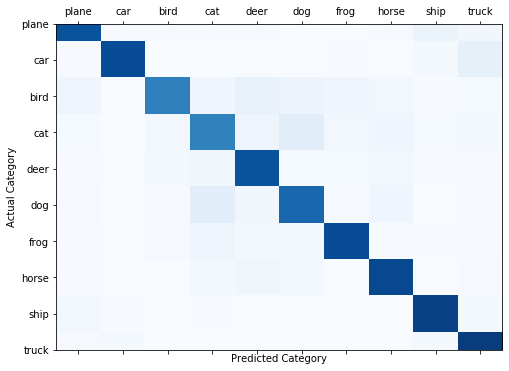

Category   - Accuracy
plane      - 86.5
car        - 88.8
bird       - 69.4
cat        - 68.4
deer       - 86.7
dog        - 78.6
frog       - 88.7
horse      - 90.4
ship       - 93.2
truck      - 95.2

Selected workers

[42 87 29 16 99  7 17 91 68 71 84 31 30 93 51]
Worker 42 : is  Honest
Worker 87 : is  Stealthy_Attacker
Worker 29 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 7 : is  Honest
Worker 17 : is  Honest
Worker 91 : is  Honest
Worker 68 : is  Honest
Worker 71 : is  Stealthy_Attacker
Worker 84 : is  Honest
Worker 31 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 93 : is  Honest
Worker 51 : is  Stealthy_Attacker

 | Global Training Round : 75 |


Worker 42 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.550761
Train Epoch: 1 [400/500	(81%)]	Loss: 0.373935
Train Epoch: 2 [0/500	(1%)]	Loss: 0.179426
Train Epoch: 2 [400/500	(81%)]	Loss: 0.233303
Train Epoch: 3 [0/500	(1%)]	Loss: 0.102989
Train Epoch: 3 [400/500	(81%)]	Loss: 0.198727
Train Epoch: 4 [0/500	(1%)]	Loss: 0.115020
Train Epoch: 4 [400/500	(81%)]	Loss: 0.264879
Train Epoch: 5 [0/500	(1%)]	Loss: 0.130832
Train Epoch: 5 [400/500	(81%)]	Loss: 0.255011

Worker 42 ends training in Global Round:75 |

Worker 87 starts training in Global Round:75 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  75


Train Epoch: 1 [0/500	(1%)]	Loss: 1.055936
Train Epoch: 1 [400/500	(81%)]	Loss: 0.615850
Train Epoch: 2 [0/500	(1%)]	Loss: 0.491779
Train Epoch: 2 [400/500	(81%)]	Loss: 0.420548
Train Epoch: 3 [0/500	(1%)]	Loss: 0.176833
Train Epoch: 3 [400/500	(81%)]	Loss: 0.461087
Train Epoch: 4 [0/500	(1%)]	Loss: 0.179775
Train Epoch: 4 [400/500	(81%)]	Loss: 0.308974
Train Epoch: 5 [0/500	(1%)]	Loss: 0.167691
Train Epoch: 5 [400/500	(81%)]	Loss: 0.203643

Performed attacks 1
Worker 87 ends training in Global Round:75 |

Worker 29 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.270793
Train Epoch: 1 [400/500	(81%)]	Loss: 0.301860
Train Epoch: 2 [0/500	(1%)]	Loss: 0.127055
Train Epoch: 2 [400/500	(81%)]	Loss: 0.242320
Train Epoch: 3 [0/500	(1%)]	Loss: 0.099361
Train Epoch: 3 [400/500	(81%)]	Loss: 0.123909
Train Epoch: 4 [0/500	(1%)]	Loss: 0.047273
Train Epoch: 4 [400/500	(81%)]	Loss: 0.079945
Train Epoch: 5 [0/500	(1%)]	Loss: 0.104333
Train Epoch: 5 [400/500	(81%)]	Loss: 0.036033

Worker 29 ends training in Global Round:75 |

Worker 16 starts training in Global Round:75 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  75


Train Epoch: 1 [0/500	(1%)]	Loss: 1.330369
Train Epoch: 1 [400/500	(81%)]	Loss: 0.461531
Train Epoch: 2 [0/500	(1%)]	Loss: 0.275518
Train Epoch: 2 [400/500	(81%)]	Loss: 0.219421
Train Epoch: 3 [0/500	(1%)]	Loss: 0.406809
Train Epoch: 3 [400/500	(81%)]	Loss: 0.592941
Train Epoch: 4 [0/500	(1%)]	Loss: 0.309865
Train Epoch: 4 [400/500	(81%)]	Loss: 0.339397
Train Epoch: 5 [0/500	(1%)]	Loss: 0.242016
Train Epoch: 5 [400/500	(81%)]	Loss: 0.293366

Performed attacks 2
Worker 16 ends training in Global Round:75 |

Worker 99 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.216824
Train Epoch: 1 [400/500	(81%)]	Loss: 0.288000
Train Epoch: 2 [0/500	(1%)]	Loss: 0.111918
Train Epoch: 2 [400/500	(81%)]	Loss: 0.243013
Train Epoch: 3 [0/500	(1%)]	Loss: 0.086838
Train Epoch: 3 [400/500	(81%)]	Loss: 0.195107
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164257
Train Epoch: 4 [400/500	(81%)]	Loss: 0.236071
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157820
Train Epoch: 5 [400/500	(81%)]	Loss: 0.161005

Worker 99 ends training in Global Round:75 |

Worker 7 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.229585
Train Epoch: 1 [400/500	(81%)]	Loss: 0.367356
Train Epoch: 2 [0/500	(1%)]	Loss: 0.093815
Train Epoch: 2 [400/500	(81%)]	Loss: 0.176612
Train Epoch: 3 [0/500	(1%)]	Loss: 0.145461
Train Epoch: 3 [400/500	(81%)]	Loss: 0.054886
Train Epoch: 4 [0/500	(1%)]	Loss: 0.092696
Train Epoch: 4 [400/500	(81%)]	Loss: 0.166055
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064614
Train Epoch: 5 [400/500	(81%)]	Loss: 0.152610

Worker 7 ends training in Global Round:75 |

Worker 17 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.305047
Train Epoch: 1 [400/500	(81%)]	Loss: 0.210733
Train Epoch: 2 [0/500	(1%)]	Loss: 0.148902
Train Epoch: 2 [400/500	(81%)]	Loss: 0.211911
Train Epoch: 3 [0/500	(1%)]	Loss: 0.079292
Train Epoch: 3 [400/500	(81%)]	Loss: 0.215763
Train Epoch: 4 [0/500	(1%)]	Loss: 0.108704
Train Epoch: 4 [400/500	(81%)]	Loss: 0.336528
Train Epoch: 5 [0/500	(1%)]	Loss: 0.205716
Train Epoch: 5 [400/500	(81%)]	Loss: 0.299883

Worker 17 ends training in Global Round:75 |

Worker 91 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.326184
Train Epoch: 1 [400/500	(81%)]	Loss: 0.247830
Train Epoch: 2 [0/500	(1%)]	Loss: 0.157581
Train Epoch: 2 [400/500	(81%)]	Loss: 0.186360
Train Epoch: 3 [0/500	(1%)]	Loss: 0.052048
Train Epoch: 3 [400/500	(81%)]	Loss: 0.238187
Train Epoch: 4 [0/500	(1%)]	Loss: 0.106509
Train Epoch: 4 [400/500	(81%)]	Loss: 0.143632
Train Epoch: 5 [0/500	(1%)]	Loss: 0.044306
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117966

Worker 91 ends training in Global Round:75 |

Worker 68 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.394871
Train Epoch: 1 [400/500	(81%)]	Loss: 0.419679
Train Epoch: 2 [0/500	(1%)]	Loss: 0.073595
Train Epoch: 2 [400/500	(81%)]	Loss: 0.334137
Train Epoch: 3 [0/500	(1%)]	Loss: 0.125255
Train Epoch: 3 [400/500	(81%)]	Loss: 0.174328
Train Epoch: 4 [0/500	(1%)]	Loss: 0.209145
Train Epoch: 4 [400/500	(81%)]	Loss: 0.194262
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100729
Train Epoch: 5 [400/500	(81%)]	Loss: 0.201500

Worker 68 ends training in Global Round:75 |

Worker 71 starts training in Global Round:75 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  75


Train Epoch: 1 [0/500	(1%)]	Loss: 1.284996
Train Epoch: 1 [400/500	(81%)]	Loss: 0.907736
Train Epoch: 2 [0/500	(1%)]	Loss: 0.530692
Train Epoch: 2 [400/500	(81%)]	Loss: 0.421124
Train Epoch: 3 [0/500	(1%)]	Loss: 0.279437
Train Epoch: 3 [400/500	(81%)]	Loss: 0.450129
Train Epoch: 4 [0/500	(1%)]	Loss: 0.258989
Train Epoch: 4 [400/500	(81%)]	Loss: 0.231494
Train Epoch: 5 [0/500	(1%)]	Loss: 0.222003
Train Epoch: 5 [400/500	(81%)]	Loss: 0.083855

Performed attacks 3
Worker 71 ends training in Global Round:75 |

Worker 84 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.267772
Train Epoch: 1 [400/500	(81%)]	Loss: 0.110076
Train Epoch: 2 [0/500	(1%)]	Loss: 0.164301
Train Epoch: 2 [400/500	(81%)]	Loss: 0.331943
Train Epoch: 3 [0/500	(1%)]	Loss: 0.111735
Train Epoch: 3 [400/500	(81%)]	Loss: 0.328337
Train Epoch: 4 [0/500	(1%)]	Loss: 0.082848
Train Epoch: 4 [400/500	(81%)]	Loss: 0.235769
Train Epoch: 5 [0/500	(1%)]	Loss: 0.101101
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171159

Worker 84 ends training in Global Round:75 |

Worker 31 starts training in Global Round:75 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 31  in Global Round:  75


Train Epoch: 1 [0/500	(1%)]	Loss: 1.518457
Train Epoch: 1 [400/500	(81%)]	Loss: 0.511474
Train Epoch: 2 [0/500	(1%)]	Loss: 0.247855
Train Epoch: 2 [400/500	(81%)]	Loss: 0.535326
Train Epoch: 3 [0/500	(1%)]	Loss: 0.415349
Train Epoch: 3 [400/500	(81%)]	Loss: 0.297205
Train Epoch: 4 [0/500	(1%)]	Loss: 0.237509
Train Epoch: 4 [400/500	(81%)]	Loss: 0.239108
Train Epoch: 5 [0/500	(1%)]	Loss: 0.280569
Train Epoch: 5 [400/500	(81%)]	Loss: 0.214089

Performed attacks 4
Worker 31 ends training in Global Round:75 |

Worker 30 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.454876
Train Epoch: 1 [400/500	(81%)]	Loss: 0.540611
Train Epoch: 2 [0/500	(1%)]	Loss: 0.206813
Train Epoch: 2 [400/500	(81%)]	Loss: 0.208462
Train Epoch: 3 [0/500	(1%)]	Loss: 0.135914
Train Epoch: 3 [400/500	(81%)]	Loss: 0.260459
Train Epoch: 4 [0/500	(1%)]	Loss: 0.118480
Train Epoch: 4 [400/500	(81%)]	Loss: 0.371821
Train Epoch: 5 [0/500	(1%)]	Loss: 0.066108
Train Epoch: 5 [400/500	(81%)]	Loss: 0.105917

Worker 30 ends training in Global Round:75 |

Worker 93 starts training in Global Round:75 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.246122
Train Epoch: 1 [400/500	(81%)]	Loss: 0.321968
Train Epoch: 2 [0/500	(1%)]	Loss: 0.097158
Train Epoch: 2 [400/500	(81%)]	Loss: 0.149426
Train Epoch: 3 [0/500	(1%)]	Loss: 0.220291
Train Epoch: 3 [400/500	(81%)]	Loss: 0.130646
Train Epoch: 4 [0/500	(1%)]	Loss: 0.080230
Train Epoch: 4 [400/500	(81%)]	Loss: 0.070915
Train Epoch: 5 [0/500	(1%)]	Loss: 0.032933
Train Epoch: 5 [400/500	(81%)]	Loss: 0.106388

Worker 93 ends training in Global Round:75 |

Worker 51 starts training in Global Round:75 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  75


Train Epoch: 1 [0/500	(1%)]	Loss: 1.266194
Train Epoch: 1 [400/500	(81%)]	Loss: 0.815974
Train Epoch: 2 [0/500	(1%)]	Loss: 0.396376
Train Epoch: 2 [400/500	(81%)]	Loss: 0.358282
Train Epoch: 3 [0/500	(1%)]	Loss: 0.317534
Train Epoch: 3 [400/500	(81%)]	Loss: 0.360289
Train Epoch: 4 [0/500	(1%)]	Loss: 0.172819
Train Epoch: 4 [400/500	(81%)]	Loss: 0.274523
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112355
Train Epoch: 5 [400/500	(81%)]	Loss: 0.123475

Performed attacks 5
Worker 51 ends training in Global Round:75 |
Last layer biases  [array([ 0.03221931, -0.03278702, -0.0150076 ,  0.03746167,  0.03910755,
       -0.01524314,  0.03839462, -0.00812249, -0.02122966, -0.03889135],
      dtype=float32), array([ 0.03730416, -0.03023781, -0.01172721,  0.03849347,  0.05154152,
       -0.01416195,  0.03849895, -0.03221636, -0.0235196 , -0.03807331],
      dtype=float32), array([ 0.03355441, -0.03094456, -0.015161  ,  0.03967468,  0.040155  ,
       -0.01672224,  0.03758283, -0.00784104, -0.02344308, -0.0

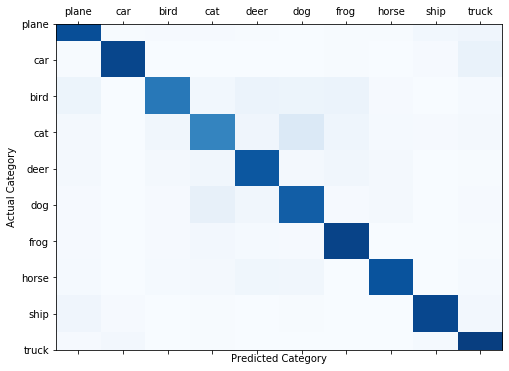

Category   - Accuracy
plane      - 88.5
car        - 91.1
bird       - 72.1
cat        - 67.2
deer       - 84.8
dog        - 82.2
frog       - 92.2
horse      - 86.6
ship       - 90.8
truck      - 94.4

Selected workers

[ 6 80 64 19 86 81 27 15 40 33 46 96 97 77 60]
Worker 6 : is  Stealthy_Attacker
Worker 80 : is  Honest
Worker 64 : is  Honest
Worker 19 : is  Stealthy_Attacker
Worker 86 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 15 : is  Honest
Worker 40 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 46 : is  Stealthy_Attacker
Worker 96 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 77 : is  Honest
Worker 60 : is  Honest

 | Global Training Round : 76 |


Worker 6 starts training in Global Round:76 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  76


Train Epoch: 1 [0/500	(1%)]	Loss: 1.240745
Train Epoch: 1 [400/500	(81%)]	Loss: 1.118706
Train Epoch: 2 [0/500	(1%)]	Loss: 0.419434
Train Epoch: 2 [400/500	(81%)]	Loss: 0.273667
Train Epoch: 3 [0/500	(1%)]	Loss: 0.274047
Train Epoch: 3 [400/500	(81%)]	Loss: 0.309492
Train Epoch: 4 [0/500	(1%)]	Loss: 0.151721
Train Epoch: 4 [400/500	(81%)]	Loss: 0.288755
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089493
Train Epoch: 5 [400/500	(81%)]	Loss: 0.223195

Performed attacks 1
Worker 6 ends training in Global Round:76 |

Worker 80 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.479533
Train Epoch: 1 [400/500	(81%)]	Loss: 0.198929
Train Epoch: 2 [0/500	(1%)]	Loss: 0.154094
Train Epoch: 2 [400/500	(81%)]	Loss: 0.201585
Train Epoch: 3 [0/500	(1%)]	Loss: 0.065193
Train Epoch: 3 [400/500	(81%)]	Loss: 0.054239
Train Epoch: 4 [0/500	(1%)]	Loss: 0.115055
Train Epoch: 4 [400/500	(81%)]	Loss: 0.124714
Train Epoch: 5 [0/500	(1%)]	Loss: 0.035317
Train Epoch: 5 [400/500	(81%)]	Loss: 0.102235

Worker 80 ends training in Global Round:76 |

Worker 64 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.168168
Train Epoch: 1 [400/500	(81%)]	Loss: 0.334366
Train Epoch: 2 [0/500	(1%)]	Loss: 0.067699
Train Epoch: 2 [400/500	(81%)]	Loss: 0.093592
Train Epoch: 3 [0/500	(1%)]	Loss: 0.143966
Train Epoch: 3 [400/500	(81%)]	Loss: 0.094342
Train Epoch: 4 [0/500	(1%)]	Loss: 0.043521
Train Epoch: 4 [400/500	(81%)]	Loss: 0.106486
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107684
Train Epoch: 5 [400/500	(81%)]	Loss: 0.139168

Worker 64 ends training in Global Round:76 |

Worker 19 starts training in Global Round:76 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  76


Train Epoch: 1 [0/500	(1%)]	Loss: 0.711225
Train Epoch: 1 [400/500	(81%)]	Loss: 0.532914
Train Epoch: 2 [0/500	(1%)]	Loss: 0.238895
Train Epoch: 2 [400/500	(81%)]	Loss: 0.244085
Train Epoch: 3 [0/500	(1%)]	Loss: 0.291118
Train Epoch: 3 [400/500	(81%)]	Loss: 0.267617
Train Epoch: 4 [0/500	(1%)]	Loss: 0.108143
Train Epoch: 4 [400/500	(81%)]	Loss: 0.197043
Train Epoch: 5 [0/500	(1%)]	Loss: 0.158983
Train Epoch: 5 [400/500	(81%)]	Loss: 0.230083

Performed attacks 2
Worker 19 ends training in Global Round:76 |

Worker 86 starts training in Global Round:76 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  76


Train Epoch: 1 [0/500	(1%)]	Loss: 1.076353
Train Epoch: 1 [400/500	(81%)]	Loss: 0.563006
Train Epoch: 2 [0/500	(1%)]	Loss: 0.182526
Train Epoch: 2 [400/500	(81%)]	Loss: 0.519162
Train Epoch: 3 [0/500	(1%)]	Loss: 0.222814
Train Epoch: 3 [400/500	(81%)]	Loss: 0.384823
Train Epoch: 4 [0/500	(1%)]	Loss: 0.106922
Train Epoch: 4 [400/500	(81%)]	Loss: 0.179627
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148303
Train Epoch: 5 [400/500	(81%)]	Loss: 0.119494

Performed attacks 3
Worker 86 ends training in Global Round:76 |

Worker 81 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.157861
Train Epoch: 1 [400/500	(81%)]	Loss: 0.300282
Train Epoch: 2 [0/500	(1%)]	Loss: 0.221309
Train Epoch: 2 [400/500	(81%)]	Loss: 0.121612
Train Epoch: 3 [0/500	(1%)]	Loss: 0.110327
Train Epoch: 3 [400/500	(81%)]	Loss: 0.168886
Train Epoch: 4 [0/500	(1%)]	Loss: 0.098603
Train Epoch: 4 [400/500	(81%)]	Loss: 0.094194
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118198
Train Epoch: 5 [400/500	(81%)]	Loss: 0.115212

Worker 81 ends training in Global Round:76 |

Worker 27 starts training in Global Round:76 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  76


Train Epoch: 1 [0/500	(1%)]	Loss: 1.157868
Train Epoch: 1 [400/500	(81%)]	Loss: 0.515698
Train Epoch: 2 [0/500	(1%)]	Loss: 0.402133
Train Epoch: 2 [400/500	(81%)]	Loss: 0.285789
Train Epoch: 3 [0/500	(1%)]	Loss: 0.195674
Train Epoch: 3 [400/500	(81%)]	Loss: 0.175444
Train Epoch: 4 [0/500	(1%)]	Loss: 0.201075
Train Epoch: 4 [400/500	(81%)]	Loss: 0.107579
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106511
Train Epoch: 5 [400/500	(81%)]	Loss: 0.107289

Performed attacks 4
Worker 27 ends training in Global Round:76 |

Worker 15 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.422896
Train Epoch: 1 [400/500	(81%)]	Loss: 0.639463
Train Epoch: 2 [0/500	(1%)]	Loss: 0.173530
Train Epoch: 2 [400/500	(81%)]	Loss: 0.296182
Train Epoch: 3 [0/500	(1%)]	Loss: 0.248007
Train Epoch: 3 [400/500	(81%)]	Loss: 0.202825
Train Epoch: 4 [0/500	(1%)]	Loss: 0.110264
Train Epoch: 4 [400/500	(81%)]	Loss: 0.147233
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075335
Train Epoch: 5 [400/500	(81%)]	Loss: 0.226996

Worker 15 ends training in Global Round:76 |

Worker 40 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.369681
Train Epoch: 1 [400/500	(81%)]	Loss: 0.307693
Train Epoch: 2 [0/500	(1%)]	Loss: 0.161069
Train Epoch: 2 [400/500	(81%)]	Loss: 0.224523
Train Epoch: 3 [0/500	(1%)]	Loss: 0.086111
Train Epoch: 3 [400/500	(81%)]	Loss: 0.179559
Train Epoch: 4 [0/500	(1%)]	Loss: 0.085392
Train Epoch: 4 [400/500	(81%)]	Loss: 0.131786
Train Epoch: 5 [0/500	(1%)]	Loss: 0.099466
Train Epoch: 5 [400/500	(81%)]	Loss: 0.189124

Worker 40 ends training in Global Round:76 |

Worker 33 starts training in Global Round:76 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  76


Train Epoch: 1 [0/500	(1%)]	Loss: 1.500391
Train Epoch: 1 [400/500	(81%)]	Loss: 0.446844
Train Epoch: 2 [0/500	(1%)]	Loss: 0.444387
Train Epoch: 2 [400/500	(81%)]	Loss: 0.359013
Train Epoch: 3 [0/500	(1%)]	Loss: 0.250697
Train Epoch: 3 [400/500	(81%)]	Loss: 0.216735
Train Epoch: 4 [0/500	(1%)]	Loss: 0.127831
Train Epoch: 4 [400/500	(81%)]	Loss: 0.174415
Train Epoch: 5 [0/500	(1%)]	Loss: 0.154481
Train Epoch: 5 [400/500	(81%)]	Loss: 0.158903

Performed attacks 5
Worker 33 ends training in Global Round:76 |

Worker 46 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.468005
Train Epoch: 1 [400/500	(81%)]	Loss: 0.552178
Train Epoch: 2 [0/500	(1%)]	Loss: 0.276868
Train Epoch: 2 [400/500	(81%)]	Loss: 0.364332
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136246
Train Epoch: 3 [400/500	(81%)]	Loss: 0.215624
Train Epoch: 4 [0/500	(1%)]	Loss: 0.245491
Train Epoch: 4 [400/500	(81%)]	Loss: 0.329951
Train Epoch: 5 [0/500	(1%)]	Loss: 0.239097
Train Epoch: 5 [400/500	(81%)]	Loss: 0.168815

Worker 46 ends training in Global Round:76 |

Worker 96 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.220744
Train Epoch: 1 [400/500	(81%)]	Loss: 0.254831
Train Epoch: 2 [0/500	(1%)]	Loss: 0.210241
Train Epoch: 2 [400/500	(81%)]	Loss: 0.353480
Train Epoch: 3 [0/500	(1%)]	Loss: 0.067858
Train Epoch: 3 [400/500	(81%)]	Loss: 0.180165
Train Epoch: 4 [0/500	(1%)]	Loss: 0.077595
Train Epoch: 4 [400/500	(81%)]	Loss: 0.211651
Train Epoch: 5 [0/500	(1%)]	Loss: 0.045864
Train Epoch: 5 [400/500	(81%)]	Loss: 0.187968

Worker 96 ends training in Global Round:76 |

Worker 97 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.415178
Train Epoch: 1 [400/500	(81%)]	Loss: 0.431120
Train Epoch: 2 [0/500	(1%)]	Loss: 0.243650
Train Epoch: 2 [400/500	(81%)]	Loss: 0.628014
Train Epoch: 3 [0/500	(1%)]	Loss: 0.175301
Train Epoch: 3 [400/500	(81%)]	Loss: 0.235732
Train Epoch: 4 [0/500	(1%)]	Loss: 0.139519
Train Epoch: 4 [400/500	(81%)]	Loss: 0.226030
Train Epoch: 5 [0/500	(1%)]	Loss: 0.162051
Train Epoch: 5 [400/500	(81%)]	Loss: 0.231850

Worker 97 ends training in Global Round:76 |

Worker 77 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.352908
Train Epoch: 1 [400/500	(81%)]	Loss: 0.354298
Train Epoch: 2 [0/500	(1%)]	Loss: 0.244304
Train Epoch: 2 [400/500	(81%)]	Loss: 0.322912
Train Epoch: 3 [0/500	(1%)]	Loss: 0.197889
Train Epoch: 3 [400/500	(81%)]	Loss: 0.140061
Train Epoch: 4 [0/500	(1%)]	Loss: 0.175809
Train Epoch: 4 [400/500	(81%)]	Loss: 0.274257
Train Epoch: 5 [0/500	(1%)]	Loss: 0.139371
Train Epoch: 5 [400/500	(81%)]	Loss: 0.108522

Worker 77 ends training in Global Round:76 |

Worker 60 starts training in Global Round:76 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.459597
Train Epoch: 1 [400/500	(81%)]	Loss: 0.400084
Train Epoch: 2 [0/500	(1%)]	Loss: 0.196340
Train Epoch: 2 [400/500	(81%)]	Loss: 0.343607
Train Epoch: 3 [0/500	(1%)]	Loss: 0.155843
Train Epoch: 3 [400/500	(81%)]	Loss: 0.295675
Train Epoch: 4 [0/500	(1%)]	Loss: 0.168943
Train Epoch: 4 [400/500	(81%)]	Loss: 0.214441
Train Epoch: 5 [0/500	(1%)]	Loss: 0.171021
Train Epoch: 5 [400/500	(81%)]	Loss: 0.112448

Worker 60 ends training in Global Round:76 |
Last layer biases  [array([ 0.03366107, -0.03168635, -0.01128709,  0.03775485,  0.05411766,
       -0.01272833,  0.04002573, -0.03165499, -0.02034046, -0.04196022],
      dtype=float32), array([ 0.03403375, -0.0322025 , -0.01484164,  0.03674589,  0.03873665,
       -0.01397595,  0.03706645, -0.00815433, -0.02032187, -0.04118456],
      dtype=float32), array([ 0.03220605, -0.03053893, -0.01494797,  0.0383902 ,  0.03832405,
       -0.01458094,  0.03881681, -0.00809556, -0.02196309, -0.04170877],
      dtyp

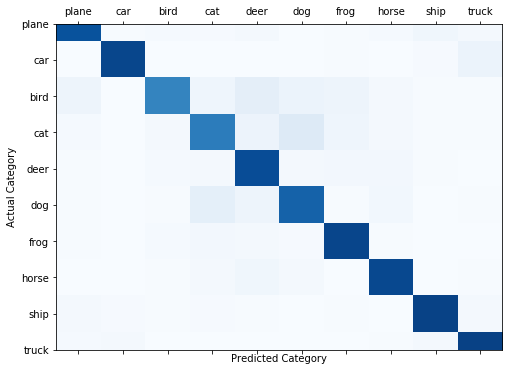

Category   - Accuracy
plane      - 87.1
car        - 91.1
bird       - 67.4
cat        - 70.4
deer       - 88.8
dog        - 80.6
frog       - 91.6
horse      - 90.3
ship       - 92.7
truck      - 93.0

Selected workers

[28 67 22 84 71 16 30 27 78 13 76 49 88 46 81]
Worker 28 : is  Stealthy_Attacker
Worker 67 : is  Stealthy_Attacker
Worker 22 : is  Stealthy_Attacker
Worker 84 : is  Honest
Worker 71 : is  Stealthy_Attacker
Worker 16 : is  Stealthy_Attacker
Worker 30 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 78 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 76 : is  Honest
Worker 49 : is  Honest
Worker 88 : is  Honest
Worker 46 : is  Stealthy_Attacker
Worker 81 : is  Honest

 | Global Training Round : 77 |


Worker 28 starts training in Global Round:77 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  77


Train Epoch: 1 [0/500	(1%)]	Loss: 1.350417
Train Epoch: 1 [400/500	(81%)]	Loss: 0.617358
Train Epoch: 2 [0/500	(1%)]	Loss: 0.305070
Train Epoch: 2 [400/500	(81%)]	Loss: 0.575915
Train Epoch: 3 [0/500	(1%)]	Loss: 0.161637
Train Epoch: 3 [400/500	(81%)]	Loss: 0.342444
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156403
Train Epoch: 4 [400/500	(81%)]	Loss: 0.185437
Train Epoch: 5 [0/500	(1%)]	Loss: 0.271834
Train Epoch: 5 [400/500	(81%)]	Loss: 0.182808

Performed attacks 1
Worker 28 ends training in Global Round:77 |

Worker 67 starts training in Global Round:77 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  77


Train Epoch: 1 [0/500	(1%)]	Loss: 1.634080
Train Epoch: 1 [400/500	(81%)]	Loss: 0.798725
Train Epoch: 2 [0/500	(1%)]	Loss: 0.193306
Train Epoch: 2 [400/500	(81%)]	Loss: 0.433760
Train Epoch: 3 [0/500	(1%)]	Loss: 0.197430
Train Epoch: 3 [400/500	(81%)]	Loss: 0.432905
Train Epoch: 4 [0/500	(1%)]	Loss: 0.300407
Train Epoch: 4 [400/500	(81%)]	Loss: 0.472744
Train Epoch: 5 [0/500	(1%)]	Loss: 0.233492
Train Epoch: 5 [400/500	(81%)]	Loss: 0.437199

Performed attacks 2
Worker 67 ends training in Global Round:77 |

Worker 22 starts training in Global Round:77 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  77


Train Epoch: 1 [0/500	(1%)]	Loss: 1.444870
Train Epoch: 1 [400/500	(81%)]	Loss: 0.568036
Train Epoch: 2 [0/500	(1%)]	Loss: 0.389078
Train Epoch: 2 [400/500	(81%)]	Loss: 0.388835
Train Epoch: 3 [0/500	(1%)]	Loss: 0.242126
Train Epoch: 3 [400/500	(81%)]	Loss: 0.310584
Train Epoch: 4 [0/500	(1%)]	Loss: 0.192286
Train Epoch: 4 [400/500	(81%)]	Loss: 0.228437
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075746
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199048

Performed attacks 3
Worker 22 ends training in Global Round:77 |

Worker 84 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.121159
Train Epoch: 1 [400/500	(81%)]	Loss: 0.202274
Train Epoch: 2 [0/500	(1%)]	Loss: 0.075179
Train Epoch: 2 [400/500	(81%)]	Loss: 0.105327
Train Epoch: 3 [0/500	(1%)]	Loss: 0.099405
Train Epoch: 3 [400/500	(81%)]	Loss: 0.110599
Train Epoch: 4 [0/500	(1%)]	Loss: 0.034726
Train Epoch: 4 [400/500	(81%)]	Loss: 0.135808
Train Epoch: 5 [0/500	(1%)]	Loss: 0.072478
Train Epoch: 5 [400/500	(81%)]	Loss: 0.111963

Worker 84 ends training in Global Round:77 |

Worker 71 starts training in Global Round:77 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  77


Train Epoch: 1 [0/500	(1%)]	Loss: 1.191536
Train Epoch: 1 [400/500	(81%)]	Loss: 0.633525
Train Epoch: 2 [0/500	(1%)]	Loss: 0.269356
Train Epoch: 2 [400/500	(81%)]	Loss: 0.412883
Train Epoch: 3 [0/500	(1%)]	Loss: 0.225386
Train Epoch: 3 [400/500	(81%)]	Loss: 0.392253
Train Epoch: 4 [0/500	(1%)]	Loss: 0.239267
Train Epoch: 4 [400/500	(81%)]	Loss: 0.295448
Train Epoch: 5 [0/500	(1%)]	Loss: 0.252598
Train Epoch: 5 [400/500	(81%)]	Loss: 0.122007

Performed attacks 4
Worker 71 ends training in Global Round:77 |

Worker 16 starts training in Global Round:77 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  77


Train Epoch: 1 [0/500	(1%)]	Loss: 1.181458
Train Epoch: 1 [400/500	(81%)]	Loss: 0.698924
Train Epoch: 2 [0/500	(1%)]	Loss: 0.202744
Train Epoch: 2 [400/500	(81%)]	Loss: 0.694532
Train Epoch: 3 [0/500	(1%)]	Loss: 0.259153
Train Epoch: 3 [400/500	(81%)]	Loss: 0.461292
Train Epoch: 4 [0/500	(1%)]	Loss: 0.191005
Train Epoch: 4 [400/500	(81%)]	Loss: 0.220594
Train Epoch: 5 [0/500	(1%)]	Loss: 0.307526
Train Epoch: 5 [400/500	(81%)]	Loss: 0.132459

Performed attacks 5
Worker 16 ends training in Global Round:77 |

Worker 30 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.194202
Train Epoch: 1 [400/500	(81%)]	Loss: 0.470341
Train Epoch: 2 [0/500	(1%)]	Loss: 0.204777
Train Epoch: 2 [400/500	(81%)]	Loss: 0.193839
Train Epoch: 3 [0/500	(1%)]	Loss: 0.138638
Train Epoch: 3 [400/500	(81%)]	Loss: 0.108888
Train Epoch: 4 [0/500	(1%)]	Loss: 0.093304
Train Epoch: 4 [400/500	(81%)]	Loss: 0.212155
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083499
Train Epoch: 5 [400/500	(81%)]	Loss: 0.193603

Worker 30 ends training in Global Round:77 |

Worker 27 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.394940
Train Epoch: 1 [400/500	(81%)]	Loss: 0.340833
Train Epoch: 2 [0/500	(1%)]	Loss: 0.249221
Train Epoch: 2 [400/500	(81%)]	Loss: 0.273588
Train Epoch: 3 [0/500	(1%)]	Loss: 0.079187
Train Epoch: 3 [400/500	(81%)]	Loss: 0.241698
Train Epoch: 4 [0/500	(1%)]	Loss: 0.101944
Train Epoch: 4 [400/500	(81%)]	Loss: 0.183091
Train Epoch: 5 [0/500	(1%)]	Loss: 0.108708
Train Epoch: 5 [400/500	(81%)]	Loss: 0.125643

Worker 27 ends training in Global Round:77 |

Worker 78 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.207517
Train Epoch: 1 [400/500	(81%)]	Loss: 0.177919
Train Epoch: 2 [0/500	(1%)]	Loss: 0.101093
Train Epoch: 2 [400/500	(81%)]	Loss: 0.074917
Train Epoch: 3 [0/500	(1%)]	Loss: 0.051733
Train Epoch: 3 [400/500	(81%)]	Loss: 0.052041
Train Epoch: 4 [0/500	(1%)]	Loss: 0.035370
Train Epoch: 4 [400/500	(81%)]	Loss: 0.145575
Train Epoch: 5 [0/500	(1%)]	Loss: 0.030612
Train Epoch: 5 [400/500	(81%)]	Loss: 0.035367

Worker 78 ends training in Global Round:77 |

Worker 13 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.338855
Train Epoch: 1 [400/500	(81%)]	Loss: 0.554881
Train Epoch: 2 [0/500	(1%)]	Loss: 0.128964
Train Epoch: 2 [400/500	(81%)]	Loss: 0.255766
Train Epoch: 3 [0/500	(1%)]	Loss: 0.176495
Train Epoch: 3 [400/500	(81%)]	Loss: 0.303907
Train Epoch: 4 [0/500	(1%)]	Loss: 0.103960
Train Epoch: 4 [400/500	(81%)]	Loss: 0.364486
Train Epoch: 5 [0/500	(1%)]	Loss: 0.129464
Train Epoch: 5 [400/500	(81%)]	Loss: 0.112257

Worker 13 ends training in Global Round:77 |

Worker 76 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.180519
Train Epoch: 1 [400/500	(81%)]	Loss: 0.334230
Train Epoch: 2 [0/500	(1%)]	Loss: 0.229173
Train Epoch: 2 [400/500	(81%)]	Loss: 0.142088
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136142
Train Epoch: 3 [400/500	(81%)]	Loss: 0.179462
Train Epoch: 4 [0/500	(1%)]	Loss: 0.080692
Train Epoch: 4 [400/500	(81%)]	Loss: 0.168076
Train Epoch: 5 [0/500	(1%)]	Loss: 0.050549
Train Epoch: 5 [400/500	(81%)]	Loss: 0.138066

Worker 76 ends training in Global Round:77 |

Worker 49 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.322248
Train Epoch: 1 [400/500	(81%)]	Loss: 0.219004
Train Epoch: 2 [0/500	(1%)]	Loss: 0.065479
Train Epoch: 2 [400/500	(81%)]	Loss: 0.236540
Train Epoch: 3 [0/500	(1%)]	Loss: 0.158786
Train Epoch: 3 [400/500	(81%)]	Loss: 0.131769
Train Epoch: 4 [0/500	(1%)]	Loss: 0.065679
Train Epoch: 4 [400/500	(81%)]	Loss: 0.112168
Train Epoch: 5 [0/500	(1%)]	Loss: 0.093074
Train Epoch: 5 [400/500	(81%)]	Loss: 0.162725

Worker 49 ends training in Global Round:77 |

Worker 88 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.403040
Train Epoch: 1 [400/500	(81%)]	Loss: 0.266728
Train Epoch: 2 [0/500	(1%)]	Loss: 0.093258
Train Epoch: 2 [400/500	(81%)]	Loss: 0.187567
Train Epoch: 3 [0/500	(1%)]	Loss: 0.077873
Train Epoch: 3 [400/500	(81%)]	Loss: 0.171808
Train Epoch: 4 [0/500	(1%)]	Loss: 0.087673
Train Epoch: 4 [400/500	(81%)]	Loss: 0.108685
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089211
Train Epoch: 5 [400/500	(81%)]	Loss: 0.082696

Worker 88 ends training in Global Round:77 |

Worker 46 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.188497
Train Epoch: 1 [400/500	(81%)]	Loss: 0.390177
Train Epoch: 2 [0/500	(1%)]	Loss: 0.239888
Train Epoch: 2 [400/500	(81%)]	Loss: 0.335455
Train Epoch: 3 [0/500	(1%)]	Loss: 0.176183
Train Epoch: 3 [400/500	(81%)]	Loss: 0.261206
Train Epoch: 4 [0/500	(1%)]	Loss: 0.182486
Train Epoch: 4 [400/500	(81%)]	Loss: 0.246420
Train Epoch: 5 [0/500	(1%)]	Loss: 0.201458
Train Epoch: 5 [400/500	(81%)]	Loss: 0.198019

Worker 46 ends training in Global Round:77 |

Worker 81 starts training in Global Round:77 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.100841
Train Epoch: 1 [400/500	(81%)]	Loss: 0.233606
Train Epoch: 2 [0/500	(1%)]	Loss: 0.098057
Train Epoch: 2 [400/500	(81%)]	Loss: 0.148212
Train Epoch: 3 [0/500	(1%)]	Loss: 0.152700
Train Epoch: 3 [400/500	(81%)]	Loss: 0.190164
Train Epoch: 4 [0/500	(1%)]	Loss: 0.031539
Train Epoch: 4 [400/500	(81%)]	Loss: 0.133685
Train Epoch: 5 [0/500	(1%)]	Loss: 0.077082
Train Epoch: 5 [400/500	(81%)]	Loss: 0.053065

Worker 81 ends training in Global Round:77 |
Last layer biases  [array([ 0.03586676, -0.02972724, -0.01297166,  0.03752829,  0.05172607,
       -0.01488304,  0.04031822, -0.03002457, -0.02049769, -0.04143328],
      dtype=float32), array([ 0.03741321, -0.03215762, -0.01127332,  0.03764084,  0.0494476 ,
       -0.01258079,  0.03827874, -0.02809374, -0.02004394, -0.04272911],
      dtype=float32), array([ 0.03435468, -0.02999925, -0.0113547 ,  0.04215435,  0.0493199 ,
       -0.01659566,  0.03894341, -0.02847185, -0.02288559, -0.03956341],
      dtyp

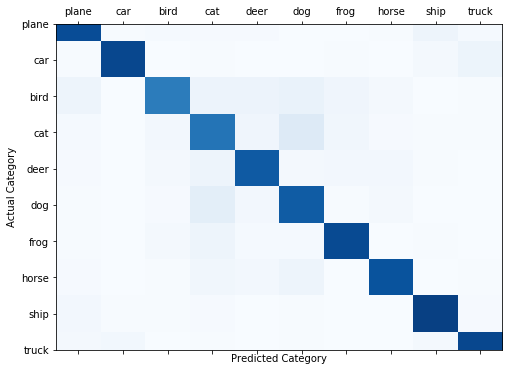

Category   - Accuracy
plane      - 89.0
car        - 91.0
bird       - 70.6
cat        - 73.6
deer       - 83.9
dog        - 82.9
frog       - 89.6
horse      - 86.6
ship       - 93.5
truck      - 90.8

Selected workers

[26 58  9  3 52 56 86 38  6 80 85 74 97 69  2]
Worker 26 : is  Honest
Worker 58 : is  Honest
Worker 9 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 52 : is  Stealthy_Attacker
Worker 56 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 38 : is  Stealthy_Attacker
Worker 6 : is  Stealthy_Attacker
Worker 80 : is  Honest
Worker 85 : is  Honest
Worker 74 : is  Honest
Worker 97 : is  Stealthy_Attacker
Worker 69 : is  Honest
Worker 2 : is  Honest

 | Global Training Round : 78 |


Worker 26 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.258511
Train Epoch: 1 [400/500	(81%)]	Loss: 0.120431
Train Epoch: 2 [0/500	(1%)]	Loss: 0.088570
Train Epoch: 2 [400/500	(81%)]	Loss: 0.223141
Train Epoch: 3 [0/500	(1%)]	Loss: 0.109682
Train Epoch: 3 [400/500	(81%)]	Loss: 0.143635
Train Epoch: 4 [0/500	(1%)]	Loss: 0.061117
Train Epoch: 4 [400/500	(81%)]	Loss: 0.134264
Train Epoch: 5 [0/500	(1%)]	Loss: 0.068054
Train Epoch: 5 [400/500	(81%)]	Loss: 0.163634

Worker 26 ends training in Global Round:78 |

Worker 58 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.467171
Train Epoch: 1 [400/500	(81%)]	Loss: 0.356458
Train Epoch: 2 [0/500	(1%)]	Loss: 0.075255
Train Epoch: 2 [400/500	(81%)]	Loss: 0.160715
Train Epoch: 3 [0/500	(1%)]	Loss: 0.117077
Train Epoch: 3 [400/500	(81%)]	Loss: 0.261434
Train Epoch: 4 [0/500	(1%)]	Loss: 0.127556
Train Epoch: 4 [400/500	(81%)]	Loss: 0.181450
Train Epoch: 5 [0/500	(1%)]	Loss: 0.174933
Train Epoch: 5 [400/500	(81%)]	Loss: 0.181236

Worker 58 ends training in Global Round:78 |

Worker 9 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.421303
Train Epoch: 1 [400/500	(81%)]	Loss: 0.275992
Train Epoch: 2 [0/500	(1%)]	Loss: 0.134011
Train Epoch: 2 [400/500	(81%)]	Loss: 0.270069
Train Epoch: 3 [0/500	(1%)]	Loss: 0.217959
Train Epoch: 3 [400/500	(81%)]	Loss: 0.185530
Train Epoch: 4 [0/500	(1%)]	Loss: 0.115652
Train Epoch: 4 [400/500	(81%)]	Loss: 0.201313
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124807
Train Epoch: 5 [400/500	(81%)]	Loss: 0.088800

Worker 9 ends training in Global Round:78 |

Worker 3 starts training in Global Round:78 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  78


Train Epoch: 1 [0/500	(1%)]	Loss: 1.349178
Train Epoch: 1 [400/500	(81%)]	Loss: 0.487098
Train Epoch: 2 [0/500	(1%)]	Loss: 0.346799
Train Epoch: 2 [400/500	(81%)]	Loss: 0.522610
Train Epoch: 3 [0/500	(1%)]	Loss: 0.282064
Train Epoch: 3 [400/500	(81%)]	Loss: 0.349726
Train Epoch: 4 [0/500	(1%)]	Loss: 0.244431
Train Epoch: 4 [400/500	(81%)]	Loss: 0.303790
Train Epoch: 5 [0/500	(1%)]	Loss: 0.147838
Train Epoch: 5 [400/500	(81%)]	Loss: 0.138239

Performed attacks 1
Worker 3 ends training in Global Round:78 |

Worker 52 starts training in Global Round:78 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  78


Train Epoch: 1 [0/500	(1%)]	Loss: 1.263860
Train Epoch: 1 [400/500	(81%)]	Loss: 0.622286
Train Epoch: 2 [0/500	(1%)]	Loss: 0.198431
Train Epoch: 2 [400/500	(81%)]	Loss: 0.342020
Train Epoch: 3 [0/500	(1%)]	Loss: 0.197256
Train Epoch: 3 [400/500	(81%)]	Loss: 0.243124
Train Epoch: 4 [0/500	(1%)]	Loss: 0.097170
Train Epoch: 4 [400/500	(81%)]	Loss: 0.266129
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083280
Train Epoch: 5 [400/500	(81%)]	Loss: 0.222855

Performed attacks 2
Worker 52 ends training in Global Round:78 |

Worker 56 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.184763
Train Epoch: 1 [400/500	(81%)]	Loss: 0.421202
Train Epoch: 2 [0/500	(1%)]	Loss: 0.080242
Train Epoch: 2 [400/500	(81%)]	Loss: 0.199568
Train Epoch: 3 [0/500	(1%)]	Loss: 0.188823
Train Epoch: 3 [400/500	(81%)]	Loss: 0.174007
Train Epoch: 4 [0/500	(1%)]	Loss: 0.103826
Train Epoch: 4 [400/500	(81%)]	Loss: 0.246197
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114011
Train Epoch: 5 [400/500	(81%)]	Loss: 0.298950

Worker 56 ends training in Global Round:78 |

Worker 86 starts training in Global Round:78 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  78


Train Epoch: 1 [0/500	(1%)]	Loss: 1.128138
Train Epoch: 1 [400/500	(81%)]	Loss: 0.707478
Train Epoch: 2 [0/500	(1%)]	Loss: 0.230536
Train Epoch: 2 [400/500	(81%)]	Loss: 0.423402
Train Epoch: 3 [0/500	(1%)]	Loss: 0.271179
Train Epoch: 3 [400/500	(81%)]	Loss: 0.430890
Train Epoch: 4 [0/500	(1%)]	Loss: 0.293160
Train Epoch: 4 [400/500	(81%)]	Loss: 0.314680
Train Epoch: 5 [0/500	(1%)]	Loss: 0.118322
Train Epoch: 5 [400/500	(81%)]	Loss: 0.084852

Performed attacks 3
Worker 86 ends training in Global Round:78 |

Worker 38 starts training in Global Round:78 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  78


Train Epoch: 1 [0/500	(1%)]	Loss: 1.418508
Train Epoch: 1 [400/500	(81%)]	Loss: 0.263939
Train Epoch: 2 [0/500	(1%)]	Loss: 0.317550
Train Epoch: 2 [400/500	(81%)]	Loss: 0.376881
Train Epoch: 3 [0/500	(1%)]	Loss: 0.225821
Train Epoch: 3 [400/500	(81%)]	Loss: 0.211140
Train Epoch: 4 [0/500	(1%)]	Loss: 0.177553
Train Epoch: 4 [400/500	(81%)]	Loss: 0.176563
Train Epoch: 5 [0/500	(1%)]	Loss: 0.090563
Train Epoch: 5 [400/500	(81%)]	Loss: 0.198972

Performed attacks 4
Worker 38 ends training in Global Round:78 |

Worker 6 starts training in Global Round:78 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  78


Train Epoch: 1 [0/500	(1%)]	Loss: 1.525440
Train Epoch: 1 [400/500	(81%)]	Loss: 0.841123
Train Epoch: 2 [0/500	(1%)]	Loss: 0.393946
Train Epoch: 2 [400/500	(81%)]	Loss: 0.367323
Train Epoch: 3 [0/500	(1%)]	Loss: 0.374281
Train Epoch: 3 [400/500	(81%)]	Loss: 0.430822
Train Epoch: 4 [0/500	(1%)]	Loss: 0.193270
Train Epoch: 4 [400/500	(81%)]	Loss: 0.200849
Train Epoch: 5 [0/500	(1%)]	Loss: 0.123093
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171399

Performed attacks 5
Worker 6 ends training in Global Round:78 |

Worker 80 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.245454
Train Epoch: 1 [400/500	(81%)]	Loss: 0.159636
Train Epoch: 2 [0/500	(1%)]	Loss: 0.048005
Train Epoch: 2 [400/500	(81%)]	Loss: 0.137380
Train Epoch: 3 [0/500	(1%)]	Loss: 0.055203
Train Epoch: 3 [400/500	(81%)]	Loss: 0.122761
Train Epoch: 4 [0/500	(1%)]	Loss: 0.071113
Train Epoch: 4 [400/500	(81%)]	Loss: 0.158078
Train Epoch: 5 [0/500	(1%)]	Loss: 0.022855
Train Epoch: 5 [400/500	(81%)]	Loss: 0.036464

Worker 80 ends training in Global Round:78 |

Worker 85 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.558267
Train Epoch: 1 [400/500	(81%)]	Loss: 0.303687
Train Epoch: 2 [0/500	(1%)]	Loss: 0.171072
Train Epoch: 2 [400/500	(81%)]	Loss: 0.319628
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136875
Train Epoch: 3 [400/500	(81%)]	Loss: 0.130042
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083041
Train Epoch: 4 [400/500	(81%)]	Loss: 0.192656
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127045
Train Epoch: 5 [400/500	(81%)]	Loss: 0.171427

Worker 85 ends training in Global Round:78 |

Worker 74 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.206980
Train Epoch: 1 [400/500	(81%)]	Loss: 0.249047
Train Epoch: 2 [0/500	(1%)]	Loss: 0.173717
Train Epoch: 2 [400/500	(81%)]	Loss: 0.217407
Train Epoch: 3 [0/500	(1%)]	Loss: 0.126502
Train Epoch: 3 [400/500	(81%)]	Loss: 0.140362
Train Epoch: 4 [0/500	(1%)]	Loss: 0.086569
Train Epoch: 4 [400/500	(81%)]	Loss: 0.171779
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106835
Train Epoch: 5 [400/500	(81%)]	Loss: 0.211365

Worker 74 ends training in Global Round:78 |

Worker 97 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.366877
Train Epoch: 1 [400/500	(81%)]	Loss: 0.366904
Train Epoch: 2 [0/500	(1%)]	Loss: 0.129047
Train Epoch: 2 [400/500	(81%)]	Loss: 0.326785
Train Epoch: 3 [0/500	(1%)]	Loss: 0.160192
Train Epoch: 3 [400/500	(81%)]	Loss: 0.284996
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119122
Train Epoch: 4 [400/500	(81%)]	Loss: 0.166604
Train Epoch: 5 [0/500	(1%)]	Loss: 0.095811
Train Epoch: 5 [400/500	(81%)]	Loss: 0.187404

Worker 97 ends training in Global Round:78 |

Worker 69 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.286230
Train Epoch: 1 [400/500	(81%)]	Loss: 0.178046
Train Epoch: 2 [0/500	(1%)]	Loss: 0.094470
Train Epoch: 2 [400/500	(81%)]	Loss: 0.163190
Train Epoch: 3 [0/500	(1%)]	Loss: 0.104648
Train Epoch: 3 [400/500	(81%)]	Loss: 0.245224
Train Epoch: 4 [0/500	(1%)]	Loss: 0.056265
Train Epoch: 4 [400/500	(81%)]	Loss: 0.096286
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138782
Train Epoch: 5 [400/500	(81%)]	Loss: 0.153497

Worker 69 ends training in Global Round:78 |

Worker 2 starts training in Global Round:78 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.175012
Train Epoch: 1 [400/500	(81%)]	Loss: 0.193593
Train Epoch: 2 [0/500	(1%)]	Loss: 0.112656
Train Epoch: 2 [400/500	(81%)]	Loss: 0.135673
Train Epoch: 3 [0/500	(1%)]	Loss: 0.114753
Train Epoch: 3 [400/500	(81%)]	Loss: 0.057539
Train Epoch: 4 [0/500	(1%)]	Loss: 0.068188
Train Epoch: 4 [400/500	(81%)]	Loss: 0.262739
Train Epoch: 5 [0/500	(1%)]	Loss: 0.109389
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199575

Worker 2 ends training in Global Round:78 |
Last layer biases  [array([ 0.03424904, -0.03093453, -0.014225  ,  0.03973776,  0.03821691,
       -0.01668408,  0.03724627, -0.00823443, -0.0228559 , -0.0406142 ],
      dtype=float32), array([ 0.03328881, -0.03039072, -0.01269373,  0.03482004,  0.04123862,
       -0.01568834,  0.03820568, -0.00864397, -0.02283761, -0.04139692],
      dtype=float32), array([ 0.0334818 , -0.03104721, -0.01687278,  0.03907593,  0.04043593,
       -0.01569087,  0.03688481, -0.00683763, -0.02219795, -0.04133018],
      dtype

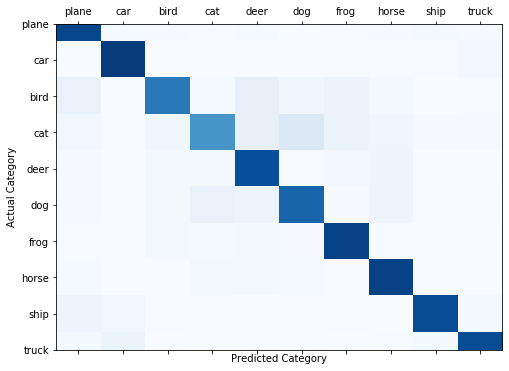

Category   - Accuracy
plane      - 91.2
car        - 95.4
bird       - 71.5
cat        - 60.8
deer       - 87.7
dog        - 79.8
frog       - 92.8
horse      - 92.6
ship       - 88.7
truck      - 88.8

Selected workers

[80 41  1 33  6 93 56 52 98 43 58 26 65 19 48]
Worker 80 : is  Honest
Worker 41 : is  Stealthy_Attacker
Worker 1 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 6 : is  Stealthy_Attacker
Worker 93 : is  Honest
Worker 56 : is  Honest
Worker 52 : is  Stealthy_Attacker
Worker 98 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 58 : is  Honest
Worker 26 : is  Honest
Worker 65 : is  Honest
Worker 19 : is  Stealthy_Attacker
Worker 48 : is  Honest

 | Global Training Round : 79 |


Worker 80 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.107037
Train Epoch: 1 [400/500	(81%)]	Loss: 0.062719
Train Epoch: 2 [0/500	(1%)]	Loss: 0.073685
Train Epoch: 2 [400/500	(81%)]	Loss: 0.093373
Train Epoch: 3 [0/500	(1%)]	Loss: 0.069432
Train Epoch: 3 [400/500	(81%)]	Loss: 0.099412
Train Epoch: 4 [0/500	(1%)]	Loss: 0.060991
Train Epoch: 4 [400/500	(81%)]	Loss: 0.067776
Train Epoch: 5 [0/500	(1%)]	Loss: 0.088832
Train Epoch: 5 [400/500	(81%)]	Loss: 0.073535

Worker 80 ends training in Global Round:79 |

Worker 41 starts training in Global Round:79 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  79


Train Epoch: 1 [0/500	(1%)]	Loss: 1.225845
Train Epoch: 1 [400/500	(81%)]	Loss: 0.742660
Train Epoch: 2 [0/500	(1%)]	Loss: 0.402243
Train Epoch: 2 [400/500	(81%)]	Loss: 0.426861
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261960
Train Epoch: 3 [400/500	(81%)]	Loss: 0.326500
Train Epoch: 4 [0/500	(1%)]	Loss: 0.162956
Train Epoch: 4 [400/500	(81%)]	Loss: 0.370447
Train Epoch: 5 [0/500	(1%)]	Loss: 0.175272
Train Epoch: 5 [400/500	(81%)]	Loss: 0.204054

Performed attacks 1
Worker 41 ends training in Global Round:79 |

Worker 1 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.259862
Train Epoch: 1 [400/500	(81%)]	Loss: 0.262339
Train Epoch: 2 [0/500	(1%)]	Loss: 0.312863
Train Epoch: 2 [400/500	(81%)]	Loss: 0.384995
Train Epoch: 3 [0/500	(1%)]	Loss: 0.226260
Train Epoch: 3 [400/500	(81%)]	Loss: 0.249985
Train Epoch: 4 [0/500	(1%)]	Loss: 0.157716
Train Epoch: 4 [400/500	(81%)]	Loss: 0.281547
Train Epoch: 5 [0/500	(1%)]	Loss: 0.165344
Train Epoch: 5 [400/500	(81%)]	Loss: 0.195305

Worker 1 ends training in Global Round:79 |

Worker 33 starts training in Global Round:79 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  79


Train Epoch: 1 [0/500	(1%)]	Loss: 1.428978
Train Epoch: 1 [400/500	(81%)]	Loss: 0.442863
Train Epoch: 2 [0/500	(1%)]	Loss: 0.227357
Train Epoch: 2 [400/500	(81%)]	Loss: 0.524745
Train Epoch: 3 [0/500	(1%)]	Loss: 0.144505
Train Epoch: 3 [400/500	(81%)]	Loss: 0.461114
Train Epoch: 4 [0/500	(1%)]	Loss: 0.272912
Train Epoch: 4 [400/500	(81%)]	Loss: 0.252176
Train Epoch: 5 [0/500	(1%)]	Loss: 0.101596
Train Epoch: 5 [400/500	(81%)]	Loss: 0.146635

Performed attacks 2
Worker 33 ends training in Global Round:79 |

Worker 6 starts training in Global Round:79 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  79


Train Epoch: 1 [0/500	(1%)]	Loss: 1.568943
Train Epoch: 1 [400/500	(81%)]	Loss: 0.508271
Train Epoch: 2 [0/500	(1%)]	Loss: 0.360841
Train Epoch: 2 [400/500	(81%)]	Loss: 0.399953
Train Epoch: 3 [0/500	(1%)]	Loss: 0.239474
Train Epoch: 3 [400/500	(81%)]	Loss: 0.295281
Train Epoch: 4 [0/500	(1%)]	Loss: 0.196436
Train Epoch: 4 [400/500	(81%)]	Loss: 0.158607
Train Epoch: 5 [0/500	(1%)]	Loss: 0.190894
Train Epoch: 5 [400/500	(81%)]	Loss: 0.312035

Performed attacks 3
Worker 6 ends training in Global Round:79 |

Worker 93 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.208831
Train Epoch: 1 [400/500	(81%)]	Loss: 0.240111
Train Epoch: 2 [0/500	(1%)]	Loss: 0.144409
Train Epoch: 2 [400/500	(81%)]	Loss: 0.136649
Train Epoch: 3 [0/500	(1%)]	Loss: 0.047421
Train Epoch: 3 [400/500	(81%)]	Loss: 0.248791
Train Epoch: 4 [0/500	(1%)]	Loss: 0.131034
Train Epoch: 4 [400/500	(81%)]	Loss: 0.099884
Train Epoch: 5 [0/500	(1%)]	Loss: 0.043283
Train Epoch: 5 [400/500	(81%)]	Loss: 0.127478

Worker 93 ends training in Global Round:79 |

Worker 56 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.171893
Train Epoch: 1 [400/500	(81%)]	Loss: 0.199399
Train Epoch: 2 [0/500	(1%)]	Loss: 0.053143
Train Epoch: 2 [400/500	(81%)]	Loss: 0.050000
Train Epoch: 3 [0/500	(1%)]	Loss: 0.083816
Train Epoch: 3 [400/500	(81%)]	Loss: 0.111213
Train Epoch: 4 [0/500	(1%)]	Loss: 0.086602
Train Epoch: 4 [400/500	(81%)]	Loss: 0.091342
Train Epoch: 5 [0/500	(1%)]	Loss: 0.101679
Train Epoch: 5 [400/500	(81%)]	Loss: 0.098456

Worker 56 ends training in Global Round:79 |

Worker 52 starts training in Global Round:79 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  79


Train Epoch: 1 [0/500	(1%)]	Loss: 0.732879
Train Epoch: 1 [400/500	(81%)]	Loss: 0.523880
Train Epoch: 2 [0/500	(1%)]	Loss: 0.239800
Train Epoch: 2 [400/500	(81%)]	Loss: 0.412468
Train Epoch: 3 [0/500	(1%)]	Loss: 0.169426
Train Epoch: 3 [400/500	(81%)]	Loss: 0.295036
Train Epoch: 4 [0/500	(1%)]	Loss: 0.185690
Train Epoch: 4 [400/500	(81%)]	Loss: 0.273426
Train Epoch: 5 [0/500	(1%)]	Loss: 0.072171
Train Epoch: 5 [400/500	(81%)]	Loss: 0.131414

Performed attacks 4
Worker 52 ends training in Global Round:79 |

Worker 98 starts training in Global Round:79 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  79


Train Epoch: 1 [0/500	(1%)]	Loss: 1.320082
Train Epoch: 1 [400/500	(81%)]	Loss: 0.859103
Train Epoch: 2 [0/500	(1%)]	Loss: 0.352795
Train Epoch: 2 [400/500	(81%)]	Loss: 0.375941
Train Epoch: 3 [0/500	(1%)]	Loss: 0.180535
Train Epoch: 3 [400/500	(81%)]	Loss: 0.228184
Train Epoch: 4 [0/500	(1%)]	Loss: 0.216672
Train Epoch: 4 [400/500	(81%)]	Loss: 0.357038
Train Epoch: 5 [0/500	(1%)]	Loss: 0.163008
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135074

Performed attacks 5
Worker 98 ends training in Global Round:79 |

Worker 43 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.354709
Train Epoch: 1 [400/500	(81%)]	Loss: 0.388781
Train Epoch: 2 [0/500	(1%)]	Loss: 0.190512
Train Epoch: 2 [400/500	(81%)]	Loss: 0.202047
Train Epoch: 3 [0/500	(1%)]	Loss: 0.133273
Train Epoch: 3 [400/500	(81%)]	Loss: 0.206540
Train Epoch: 4 [0/500	(1%)]	Loss: 0.099127
Train Epoch: 4 [400/500	(81%)]	Loss: 0.178918
Train Epoch: 5 [0/500	(1%)]	Loss: 0.101385
Train Epoch: 5 [400/500	(81%)]	Loss: 0.149415

Worker 43 ends training in Global Round:79 |

Worker 58 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.253923
Train Epoch: 1 [400/500	(81%)]	Loss: 0.271930
Train Epoch: 2 [0/500	(1%)]	Loss: 0.138123
Train Epoch: 2 [400/500	(81%)]	Loss: 0.184587
Train Epoch: 3 [0/500	(1%)]	Loss: 0.107642
Train Epoch: 3 [400/500	(81%)]	Loss: 0.103758
Train Epoch: 4 [0/500	(1%)]	Loss: 0.066176
Train Epoch: 4 [400/500	(81%)]	Loss: 0.117388
Train Epoch: 5 [0/500	(1%)]	Loss: 0.216293
Train Epoch: 5 [400/500	(81%)]	Loss: 0.122571

Worker 58 ends training in Global Round:79 |

Worker 26 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.185286
Train Epoch: 1 [400/500	(81%)]	Loss: 0.165581
Train Epoch: 2 [0/500	(1%)]	Loss: 0.089450
Train Epoch: 2 [400/500	(81%)]	Loss: 0.075542
Train Epoch: 3 [0/500	(1%)]	Loss: 0.089847
Train Epoch: 3 [400/500	(81%)]	Loss: 0.078246
Train Epoch: 4 [0/500	(1%)]	Loss: 0.031754
Train Epoch: 4 [400/500	(81%)]	Loss: 0.112783
Train Epoch: 5 [0/500	(1%)]	Loss: 0.140210
Train Epoch: 5 [400/500	(81%)]	Loss: 0.062025

Worker 26 ends training in Global Round:79 |

Worker 65 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.248769
Train Epoch: 1 [400/500	(81%)]	Loss: 0.260292
Train Epoch: 2 [0/500	(1%)]	Loss: 0.119346
Train Epoch: 2 [400/500	(81%)]	Loss: 0.304412
Train Epoch: 3 [0/500	(1%)]	Loss: 0.135420
Train Epoch: 3 [400/500	(81%)]	Loss: 0.202547
Train Epoch: 4 [0/500	(1%)]	Loss: 0.139823
Train Epoch: 4 [400/500	(81%)]	Loss: 0.255050
Train Epoch: 5 [0/500	(1%)]	Loss: 0.150345
Train Epoch: 5 [400/500	(81%)]	Loss: 0.143969

Worker 65 ends training in Global Round:79 |

Worker 19 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.441934
Train Epoch: 1 [400/500	(81%)]	Loss: 0.568543
Train Epoch: 2 [0/500	(1%)]	Loss: 0.185595
Train Epoch: 2 [400/500	(81%)]	Loss: 0.394697
Train Epoch: 3 [0/500	(1%)]	Loss: 0.095329
Train Epoch: 3 [400/500	(81%)]	Loss: 0.348643
Train Epoch: 4 [0/500	(1%)]	Loss: 0.090442
Train Epoch: 4 [400/500	(81%)]	Loss: 0.250294
Train Epoch: 5 [0/500	(1%)]	Loss: 0.170581
Train Epoch: 5 [400/500	(81%)]	Loss: 0.094536

Worker 19 ends training in Global Round:79 |

Worker 48 starts training in Global Round:79 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.219638
Train Epoch: 1 [400/500	(81%)]	Loss: 0.363361
Train Epoch: 2 [0/500	(1%)]	Loss: 0.155762
Train Epoch: 2 [400/500	(81%)]	Loss: 0.156126
Train Epoch: 3 [0/500	(1%)]	Loss: 0.132797
Train Epoch: 3 [400/500	(81%)]	Loss: 0.108575
Train Epoch: 4 [0/500	(1%)]	Loss: 0.088600
Train Epoch: 4 [400/500	(81%)]	Loss: 0.107196
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122154
Train Epoch: 5 [400/500	(81%)]	Loss: 0.107334

Worker 48 ends training in Global Round:79 |
Last layer biases  [array([ 0.0338987 , -0.03142969, -0.01471678,  0.03628743,  0.03979206,
       -0.01611375,  0.03809457, -0.00842226, -0.02066563, -0.04082284],
      dtype=float32), array([ 0.03540003, -0.0321238 , -0.0124696 ,  0.04043487,  0.05107576,
       -0.01148225,  0.03657873, -0.03089359, -0.0215688 , -0.0390495 ],
      dtype=float32), array([ 0.03344563, -0.03234759, -0.0147134 ,  0.0350213 ,  0.04193298,
       -0.01800468,  0.03693368, -0.00680807, -0.02405949, -0.0354985 ],
      dtyp

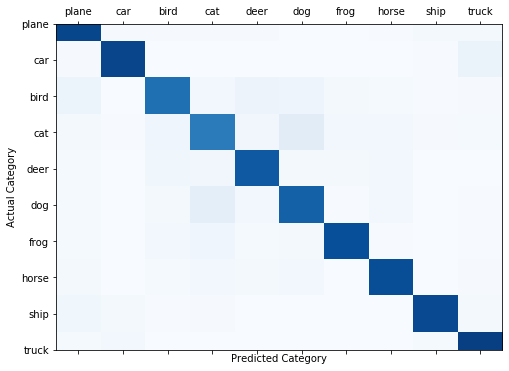

Category   - Accuracy
plane      - 91.1
car        - 91.6
bird       - 75.5
cat        - 70.8
deer       - 84.2
dog        - 80.9
frog       - 88.0
horse      - 88.3
ship       - 89.9
truck      - 93.9

Selected workers

[15 71 16 80 76 88 65 52  5  6 21 43 49 93 47]
Worker 15 : is  Honest
Worker 71 : is  Stealthy_Attacker
Worker 16 : is  Stealthy_Attacker
Worker 80 : is  Honest
Worker 76 : is  Honest
Worker 88 : is  Honest
Worker 65 : is  Honest
Worker 52 : is  Stealthy_Attacker
Worker 5 : is  Honest
Worker 6 : is  Stealthy_Attacker
Worker 21 : is  Stealthy_Attacker
Worker 43 : is  Honest
Worker 49 : is  Honest
Worker 93 : is  Honest
Worker 47 : is  Honest

 | Global Training Round : 80 |


Worker 15 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.435339
Train Epoch: 1 [400/500	(81%)]	Loss: 0.587338
Train Epoch: 2 [0/500	(1%)]	Loss: 0.055182
Train Epoch: 2 [400/500	(81%)]	Loss: 0.309618
Train Epoch: 3 [0/500	(1%)]	Loss: 0.209530
Train Epoch: 3 [400/500	(81%)]	Loss: 0.176249
Train Epoch: 4 [0/500	(1%)]	Loss: 0.115499
Train Epoch: 4 [400/500	(81%)]	Loss: 0.405982
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148130
Train Epoch: 5 [400/500	(81%)]	Loss: 0.123058

Worker 15 ends training in Global Round:80 |

Worker 71 starts training in Global Round:80 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  80


Train Epoch: 1 [0/500	(1%)]	Loss: 1.582350
Train Epoch: 1 [400/500	(81%)]	Loss: 0.501002
Train Epoch: 2 [0/500	(1%)]	Loss: 0.323310
Train Epoch: 2 [400/500	(81%)]	Loss: 0.417758
Train Epoch: 3 [0/500	(1%)]	Loss: 0.180213
Train Epoch: 3 [400/500	(81%)]	Loss: 0.549133
Train Epoch: 4 [0/500	(1%)]	Loss: 0.189373
Train Epoch: 4 [400/500	(81%)]	Loss: 0.273027
Train Epoch: 5 [0/500	(1%)]	Loss: 0.098930
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191517

Performed attacks 1
Worker 71 ends training in Global Round:80 |

Worker 16 starts training in Global Round:80 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  80


Train Epoch: 1 [0/500	(1%)]	Loss: 1.368627
Train Epoch: 1 [400/500	(81%)]	Loss: 0.303568
Train Epoch: 2 [0/500	(1%)]	Loss: 0.134415
Train Epoch: 2 [400/500	(81%)]	Loss: 0.362251
Train Epoch: 3 [0/500	(1%)]	Loss: 0.349344
Train Epoch: 3 [400/500	(81%)]	Loss: 0.340202
Train Epoch: 4 [0/500	(1%)]	Loss: 0.264739
Train Epoch: 4 [400/500	(81%)]	Loss: 0.427126
Train Epoch: 5 [0/500	(1%)]	Loss: 0.257463
Train Epoch: 5 [400/500	(81%)]	Loss: 0.249063

Performed attacks 2
Worker 16 ends training in Global Round:80 |

Worker 80 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.090449
Train Epoch: 1 [400/500	(81%)]	Loss: 0.058389
Train Epoch: 2 [0/500	(1%)]	Loss: 0.073686
Train Epoch: 2 [400/500	(81%)]	Loss: 0.047526
Train Epoch: 3 [0/500	(1%)]	Loss: 0.045642
Train Epoch: 3 [400/500	(81%)]	Loss: 0.055527
Train Epoch: 4 [0/500	(1%)]	Loss: 0.051769
Train Epoch: 4 [400/500	(81%)]	Loss: 0.051020
Train Epoch: 5 [0/500	(1%)]	Loss: 0.024001
Train Epoch: 5 [400/500	(81%)]	Loss: 0.038826

Worker 80 ends training in Global Round:80 |

Worker 76 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.282713
Train Epoch: 1 [400/500	(81%)]	Loss: 0.250632
Train Epoch: 2 [0/500	(1%)]	Loss: 0.070116
Train Epoch: 2 [400/500	(81%)]	Loss: 0.166324
Train Epoch: 3 [0/500	(1%)]	Loss: 0.057406
Train Epoch: 3 [400/500	(81%)]	Loss: 0.194564
Train Epoch: 4 [0/500	(1%)]	Loss: 0.074830
Train Epoch: 4 [400/500	(81%)]	Loss: 0.309061
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128937
Train Epoch: 5 [400/500	(81%)]	Loss: 0.116394

Worker 76 ends training in Global Round:80 |

Worker 88 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.116038
Train Epoch: 1 [400/500	(81%)]	Loss: 0.346855
Train Epoch: 2 [0/500	(1%)]	Loss: 0.121930
Train Epoch: 2 [400/500	(81%)]	Loss: 0.117805
Train Epoch: 3 [0/500	(1%)]	Loss: 0.128979
Train Epoch: 3 [400/500	(81%)]	Loss: 0.169958
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105983
Train Epoch: 4 [400/500	(81%)]	Loss: 0.115276
Train Epoch: 5 [0/500	(1%)]	Loss: 0.039198
Train Epoch: 5 [400/500	(81%)]	Loss: 0.122364

Worker 88 ends training in Global Round:80 |

Worker 65 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.107514
Train Epoch: 1 [400/500	(81%)]	Loss: 0.205738
Train Epoch: 2 [0/500	(1%)]	Loss: 0.094278
Train Epoch: 2 [400/500	(81%)]	Loss: 0.074667
Train Epoch: 3 [0/500	(1%)]	Loss: 0.051873
Train Epoch: 3 [400/500	(81%)]	Loss: 0.056868
Train Epoch: 4 [0/500	(1%)]	Loss: 0.079921
Train Epoch: 4 [400/500	(81%)]	Loss: 0.094356
Train Epoch: 5 [0/500	(1%)]	Loss: 0.042462
Train Epoch: 5 [400/500	(81%)]	Loss: 0.150924

Worker 65 ends training in Global Round:80 |

Worker 52 starts training in Global Round:80 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  80


Train Epoch: 1 [0/500	(1%)]	Loss: 1.704706
Train Epoch: 1 [400/500	(81%)]	Loss: 0.417603
Train Epoch: 2 [0/500	(1%)]	Loss: 0.103171
Train Epoch: 2 [400/500	(81%)]	Loss: 0.380170
Train Epoch: 3 [0/500	(1%)]	Loss: 0.188607
Train Epoch: 3 [400/500	(81%)]	Loss: 0.223294
Train Epoch: 4 [0/500	(1%)]	Loss: 0.171338
Train Epoch: 4 [400/500	(81%)]	Loss: 0.137045
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132271
Train Epoch: 5 [400/500	(81%)]	Loss: 0.137521

Performed attacks 3
Worker 52 ends training in Global Round:80 |

Worker 5 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.315702
Train Epoch: 1 [400/500	(81%)]	Loss: 0.283002
Train Epoch: 2 [0/500	(1%)]	Loss: 0.202729
Train Epoch: 2 [400/500	(81%)]	Loss: 0.216321
Train Epoch: 3 [0/500	(1%)]	Loss: 0.154267
Train Epoch: 3 [400/500	(81%)]	Loss: 0.194211
Train Epoch: 4 [0/500	(1%)]	Loss: 0.116676
Train Epoch: 4 [400/500	(81%)]	Loss: 0.125491
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081145
Train Epoch: 5 [400/500	(81%)]	Loss: 0.082158

Worker 5 ends training in Global Round:80 |

Worker 6 starts training in Global Round:80 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  80


Train Epoch: 1 [0/500	(1%)]	Loss: 1.411459
Train Epoch: 1 [400/500	(81%)]	Loss: 0.416401
Train Epoch: 2 [0/500	(1%)]	Loss: 0.255707
Train Epoch: 2 [400/500	(81%)]	Loss: 0.372588
Train Epoch: 3 [0/500	(1%)]	Loss: 0.411745
Train Epoch: 3 [400/500	(81%)]	Loss: 0.333900
Train Epoch: 4 [0/500	(1%)]	Loss: 0.097548
Train Epoch: 4 [400/500	(81%)]	Loss: 0.241600
Train Epoch: 5 [0/500	(1%)]	Loss: 0.113960
Train Epoch: 5 [400/500	(81%)]	Loss: 0.095820

Performed attacks 4
Worker 6 ends training in Global Round:80 |

Worker 21 starts training in Global Round:80 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 21  in Global Round:  80


Train Epoch: 1 [0/500	(1%)]	Loss: 1.661343
Train Epoch: 1 [400/500	(81%)]	Loss: 0.532672
Train Epoch: 2 [0/500	(1%)]	Loss: 0.329635
Train Epoch: 2 [400/500	(81%)]	Loss: 0.331135
Train Epoch: 3 [0/500	(1%)]	Loss: 0.261671
Train Epoch: 3 [400/500	(81%)]	Loss: 0.391884
Train Epoch: 4 [0/500	(1%)]	Loss: 0.378305
Train Epoch: 4 [400/500	(81%)]	Loss: 0.295230
Train Epoch: 5 [0/500	(1%)]	Loss: 0.129925
Train Epoch: 5 [400/500	(81%)]	Loss: 0.107227

Performed attacks 5
Worker 21 ends training in Global Round:80 |

Worker 43 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.178799
Train Epoch: 1 [400/500	(81%)]	Loss: 0.191995
Train Epoch: 2 [0/500	(1%)]	Loss: 0.071208
Train Epoch: 2 [400/500	(81%)]	Loss: 0.253786
Train Epoch: 3 [0/500	(1%)]	Loss: 0.100182
Train Epoch: 3 [400/500	(81%)]	Loss: 0.170721
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083232
Train Epoch: 4 [400/500	(81%)]	Loss: 0.258997
Train Epoch: 5 [0/500	(1%)]	Loss: 0.124735
Train Epoch: 5 [400/500	(81%)]	Loss: 0.092933

Worker 43 ends training in Global Round:80 |

Worker 49 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.296017
Train Epoch: 1 [400/500	(81%)]	Loss: 0.167265
Train Epoch: 2 [0/500	(1%)]	Loss: 0.056933
Train Epoch: 2 [400/500	(81%)]	Loss: 0.078948
Train Epoch: 3 [0/500	(1%)]	Loss: 0.096374
Train Epoch: 3 [400/500	(81%)]	Loss: 0.213324
Train Epoch: 4 [0/500	(1%)]	Loss: 0.057978
Train Epoch: 4 [400/500	(81%)]	Loss: 0.138397
Train Epoch: 5 [0/500	(1%)]	Loss: 0.052948
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242868

Worker 49 ends training in Global Round:80 |

Worker 93 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.146796
Train Epoch: 1 [400/500	(81%)]	Loss: 0.166325
Train Epoch: 2 [0/500	(1%)]	Loss: 0.063494
Train Epoch: 2 [400/500	(81%)]	Loss: 0.120723
Train Epoch: 3 [0/500	(1%)]	Loss: 0.095288
Train Epoch: 3 [400/500	(81%)]	Loss: 0.195374
Train Epoch: 4 [0/500	(1%)]	Loss: 0.053499
Train Epoch: 4 [400/500	(81%)]	Loss: 0.100414
Train Epoch: 5 [0/500	(1%)]	Loss: 0.078138
Train Epoch: 5 [400/500	(81%)]	Loss: 0.109477

Worker 93 ends training in Global Round:80 |

Worker 47 starts training in Global Round:80 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.411975
Train Epoch: 1 [400/500	(81%)]	Loss: 0.382675
Train Epoch: 2 [0/500	(1%)]	Loss: 0.220842
Train Epoch: 2 [400/500	(81%)]	Loss: 0.327911
Train Epoch: 3 [0/500	(1%)]	Loss: 0.165068
Train Epoch: 3 [400/500	(81%)]	Loss: 0.242692
Train Epoch: 4 [0/500	(1%)]	Loss: 0.163503
Train Epoch: 4 [400/500	(81%)]	Loss: 0.278824
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125811
Train Epoch: 5 [400/500	(81%)]	Loss: 0.268888

Worker 47 ends training in Global Round:80 |
Last layer biases  [array([ 0.0348419 , -0.03258009, -0.01485165,  0.03567462,  0.03923202,
       -0.01578505,  0.03828735, -0.00676445, -0.02002116, -0.04213166],
      dtype=float32), array([ 0.03604747, -0.03283592, -0.01190945,  0.0377163 ,  0.05003795,
       -0.01275372,  0.04166985, -0.03052155, -0.02237571, -0.03917335],
      dtype=float32), array([ 0.03683859, -0.03161738, -0.01241286,  0.03798195,  0.05307363,
       -0.01570119,  0.04063454, -0.03048187, -0.02277156, -0.03964196],
      dtyp

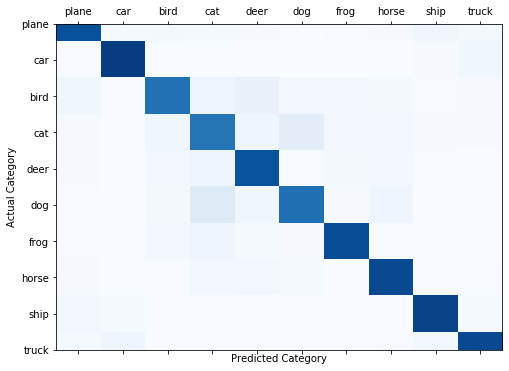

Category   - Accuracy
plane      - 87.5
car        - 94.2
bird       - 74.8
cat        - 73.4
deer       - 86.7
dog        - 75.5
frog       - 88.6
horse      - 90.2
ship       - 92.7
truck      - 90.2

Selected workers

[73 26 25  8 16 17 14 91 13 50  5 22 84 75 31]
Worker 73 : is  Honest
Worker 26 : is  Honest
Worker 25 : is  Honest
Worker 8 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 17 : is  Honest
Worker 14 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 13 : is  Stealthy_Attacker
Worker 50 : is  Stealthy_Attacker
Worker 5 : is  Honest
Worker 22 : is  Stealthy_Attacker
Worker 84 : is  Honest
Worker 75 : is  Stealthy_Attacker
Worker 31 : is  Stealthy_Attacker

 | Global Training Round : 81 |


Worker 73 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.308641
Train Epoch: 1 [400/500	(81%)]	Loss: 0.187696
Train Epoch: 2 [0/500	(1%)]	Loss: 0.090427
Train Epoch: 2 [400/500	(81%)]	Loss: 0.097152
Train Epoch: 3 [0/500	(1%)]	Loss: 0.074693
Train Epoch: 3 [400/500	(81%)]	Loss: 0.108394
Train Epoch: 4 [0/500	(1%)]	Loss: 0.072633
Train Epoch: 4 [400/500	(81%)]	Loss: 0.061745
Train Epoch: 5 [0/500	(1%)]	Loss: 0.052578
Train Epoch: 5 [400/500	(81%)]	Loss: 0.089110

Worker 73 ends training in Global Round:81 |

Worker 26 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.199256
Train Epoch: 1 [400/500	(81%)]	Loss: 0.080179
Train Epoch: 2 [0/500	(1%)]	Loss: 0.115314
Train Epoch: 2 [400/500	(81%)]	Loss: 0.066677
Train Epoch: 3 [0/500	(1%)]	Loss: 0.052225
Train Epoch: 3 [400/500	(81%)]	Loss: 0.078853
Train Epoch: 4 [0/500	(1%)]	Loss: 0.090756
Train Epoch: 4 [400/500	(81%)]	Loss: 0.071527
Train Epoch: 5 [0/500	(1%)]	Loss: 0.050912
Train Epoch: 5 [400/500	(81%)]	Loss: 0.060840

Worker 26 ends training in Global Round:81 |

Worker 25 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.175617
Train Epoch: 1 [400/500	(81%)]	Loss: 0.382983
Train Epoch: 2 [0/500	(1%)]	Loss: 0.142561
Train Epoch: 2 [400/500	(81%)]	Loss: 0.251626
Train Epoch: 3 [0/500	(1%)]	Loss: 0.147023
Train Epoch: 3 [400/500	(81%)]	Loss: 0.134816
Train Epoch: 4 [0/500	(1%)]	Loss: 0.090173
Train Epoch: 4 [400/500	(81%)]	Loss: 0.115876
Train Epoch: 5 [0/500	(1%)]	Loss: 0.139339
Train Epoch: 5 [400/500	(81%)]	Loss: 0.088082

Worker 25 ends training in Global Round:81 |

Worker 8 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.342109
Train Epoch: 1 [400/500	(81%)]	Loss: 0.420064
Train Epoch: 2 [0/500	(1%)]	Loss: 0.125982
Train Epoch: 2 [400/500	(81%)]	Loss: 0.353825
Train Epoch: 3 [0/500	(1%)]	Loss: 0.178537
Train Epoch: 3 [400/500	(81%)]	Loss: 0.269005
Train Epoch: 4 [0/500	(1%)]	Loss: 0.130172
Train Epoch: 4 [400/500	(81%)]	Loss: 0.221138
Train Epoch: 5 [0/500	(1%)]	Loss: 0.096445
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220940

Worker 8 ends training in Global Round:81 |

Worker 16 starts training in Global Round:81 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  81


Train Epoch: 1 [0/500	(1%)]	Loss: 1.210734
Train Epoch: 1 [400/500	(81%)]	Loss: 0.791043
Train Epoch: 2 [0/500	(1%)]	Loss: 0.262352
Train Epoch: 2 [400/500	(81%)]	Loss: 0.341085
Train Epoch: 3 [0/500	(1%)]	Loss: 0.309062
Train Epoch: 3 [400/500	(81%)]	Loss: 0.343403
Train Epoch: 4 [0/500	(1%)]	Loss: 0.209414
Train Epoch: 4 [400/500	(81%)]	Loss: 0.214033
Train Epoch: 5 [0/500	(1%)]	Loss: 0.297384
Train Epoch: 5 [400/500	(81%)]	Loss: 0.151735

Performed attacks 1
Worker 16 ends training in Global Round:81 |

Worker 17 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.195649
Train Epoch: 1 [400/500	(81%)]	Loss: 0.280554
Train Epoch: 2 [0/500	(1%)]	Loss: 0.074245
Train Epoch: 2 [400/500	(81%)]	Loss: 0.278936
Train Epoch: 3 [0/500	(1%)]	Loss: 0.080450
Train Epoch: 3 [400/500	(81%)]	Loss: 0.145098
Train Epoch: 4 [0/500	(1%)]	Loss: 0.058323
Train Epoch: 4 [400/500	(81%)]	Loss: 0.167933
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106315
Train Epoch: 5 [400/500	(81%)]	Loss: 0.164217

Worker 17 ends training in Global Round:81 |

Worker 14 starts training in Global Round:81 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 14  in Global Round:  81


Train Epoch: 1 [0/500	(1%)]	Loss: 1.133333
Train Epoch: 1 [400/500	(81%)]	Loss: 0.635616
Train Epoch: 2 [0/500	(1%)]	Loss: 0.296284
Train Epoch: 2 [400/500	(81%)]	Loss: 0.351123
Train Epoch: 3 [0/500	(1%)]	Loss: 0.207014
Train Epoch: 3 [400/500	(81%)]	Loss: 0.359964
Train Epoch: 4 [0/500	(1%)]	Loss: 0.290151
Train Epoch: 4 [400/500	(81%)]	Loss: 0.220459
Train Epoch: 5 [0/500	(1%)]	Loss: 0.197393
Train Epoch: 5 [400/500	(81%)]	Loss: 0.375885

Performed attacks 2
Worker 14 ends training in Global Round:81 |

Worker 91 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.207484
Train Epoch: 1 [400/500	(81%)]	Loss: 0.424579
Train Epoch: 2 [0/500	(1%)]	Loss: 0.152782
Train Epoch: 2 [400/500	(81%)]	Loss: 0.237628
Train Epoch: 3 [0/500	(1%)]	Loss: 0.107474
Train Epoch: 3 [400/500	(81%)]	Loss: 0.178845
Train Epoch: 4 [0/500	(1%)]	Loss: 0.160954
Train Epoch: 4 [400/500	(81%)]	Loss: 0.125536
Train Epoch: 5 [0/500	(1%)]	Loss: 0.085660
Train Epoch: 5 [400/500	(81%)]	Loss: 0.174672

Worker 91 ends training in Global Round:81 |

Worker 13 starts training in Global Round:81 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 13  in Global Round:  81


Train Epoch: 1 [0/500	(1%)]	Loss: 0.755312
Train Epoch: 1 [400/500	(81%)]	Loss: 0.740430
Train Epoch: 2 [0/500	(1%)]	Loss: 0.202301
Train Epoch: 2 [400/500	(81%)]	Loss: 0.360406
Train Epoch: 3 [0/500	(1%)]	Loss: 0.118319
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234516
Train Epoch: 4 [0/500	(1%)]	Loss: 0.151300
Train Epoch: 4 [400/500	(81%)]	Loss: 0.220101
Train Epoch: 5 [0/500	(1%)]	Loss: 0.075363
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117029

Performed attacks 3
Worker 13 ends training in Global Round:81 |

Worker 50 starts training in Global Round:81 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  81


Train Epoch: 1 [0/500	(1%)]	Loss: 1.230091
Train Epoch: 1 [400/500	(81%)]	Loss: 0.740356
Train Epoch: 2 [0/500	(1%)]	Loss: 0.291432
Train Epoch: 2 [400/500	(81%)]	Loss: 0.396702
Train Epoch: 3 [0/500	(1%)]	Loss: 0.323853
Train Epoch: 3 [400/500	(81%)]	Loss: 0.345751
Train Epoch: 4 [0/500	(1%)]	Loss: 0.144253
Train Epoch: 4 [400/500	(81%)]	Loss: 0.364377
Train Epoch: 5 [0/500	(1%)]	Loss: 0.252933
Train Epoch: 5 [400/500	(81%)]	Loss: 0.242301

Performed attacks 4
Worker 50 ends training in Global Round:81 |

Worker 5 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.172549
Train Epoch: 1 [400/500	(81%)]	Loss: 0.153069
Train Epoch: 2 [0/500	(1%)]	Loss: 0.122222
Train Epoch: 2 [400/500	(81%)]	Loss: 0.121394
Train Epoch: 3 [0/500	(1%)]	Loss: 0.156146
Train Epoch: 3 [400/500	(81%)]	Loss: 0.109038
Train Epoch: 4 [0/500	(1%)]	Loss: 0.057020
Train Epoch: 4 [400/500	(81%)]	Loss: 0.148742
Train Epoch: 5 [0/500	(1%)]	Loss: 0.057227
Train Epoch: 5 [400/500	(81%)]	Loss: 0.134630

Worker 5 ends training in Global Round:81 |

Worker 22 starts training in Global Round:81 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 22  in Global Round:  81


Train Epoch: 1 [0/500	(1%)]	Loss: 1.176357
Train Epoch: 1 [400/500	(81%)]	Loss: 0.592960
Train Epoch: 2 [0/500	(1%)]	Loss: 0.308333
Train Epoch: 2 [400/500	(81%)]	Loss: 0.349998
Train Epoch: 3 [0/500	(1%)]	Loss: 0.240325
Train Epoch: 3 [400/500	(81%)]	Loss: 0.340545
Train Epoch: 4 [0/500	(1%)]	Loss: 0.158576
Train Epoch: 4 [400/500	(81%)]	Loss: 0.241837
Train Epoch: 5 [0/500	(1%)]	Loss: 0.135007
Train Epoch: 5 [400/500	(81%)]	Loss: 0.231719

Performed attacks 5
Worker 22 ends training in Global Round:81 |

Worker 84 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.230863
Train Epoch: 1 [400/500	(81%)]	Loss: 0.214912
Train Epoch: 2 [0/500	(1%)]	Loss: 0.056951
Train Epoch: 2 [400/500	(81%)]	Loss: 0.121157
Train Epoch: 3 [0/500	(1%)]	Loss: 0.152865
Train Epoch: 3 [400/500	(81%)]	Loss: 0.102263
Train Epoch: 4 [0/500	(1%)]	Loss: 0.095902
Train Epoch: 4 [400/500	(81%)]	Loss: 0.203711
Train Epoch: 5 [0/500	(1%)]	Loss: 0.053334
Train Epoch: 5 [400/500	(81%)]	Loss: 0.137379

Worker 84 ends training in Global Round:81 |

Worker 75 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.548499
Train Epoch: 1 [400/500	(81%)]	Loss: 0.307390
Train Epoch: 2 [0/500	(1%)]	Loss: 0.313149
Train Epoch: 2 [400/500	(81%)]	Loss: 0.304439
Train Epoch: 3 [0/500	(1%)]	Loss: 0.181190
Train Epoch: 3 [400/500	(81%)]	Loss: 0.145713
Train Epoch: 4 [0/500	(1%)]	Loss: 0.075433
Train Epoch: 4 [400/500	(81%)]	Loss: 0.276628
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126090
Train Epoch: 5 [400/500	(81%)]	Loss: 0.182723

Worker 75 ends training in Global Round:81 |

Worker 31 starts training in Global Round:81 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.223764
Train Epoch: 1 [400/500	(81%)]	Loss: 0.651318
Train Epoch: 2 [0/500	(1%)]	Loss: 0.253315
Train Epoch: 2 [400/500	(81%)]	Loss: 0.410354
Train Epoch: 3 [0/500	(1%)]	Loss: 0.282150
Train Epoch: 3 [400/500	(81%)]	Loss: 0.465239
Train Epoch: 4 [0/500	(1%)]	Loss: 0.204374
Train Epoch: 4 [400/500	(81%)]	Loss: 0.230399
Train Epoch: 5 [0/500	(1%)]	Loss: 0.136382
Train Epoch: 5 [400/500	(81%)]	Loss: 0.181457

Worker 31 ends training in Global Round:81 |
Last layer biases  [array([ 0.03257598, -0.03208853, -0.01236559,  0.03689472,  0.03896709,
       -0.01461996,  0.03782775, -0.0085677 , -0.02189488, -0.04082705],
      dtype=float32), array([ 0.03621754, -0.03137109, -0.01622032,  0.03920155,  0.03863755,
       -0.01488043,  0.03724807, -0.00947747, -0.02245845, -0.0409951 ],
      dtype=float32), array([ 0.03539432, -0.03211904, -0.01686853,  0.03780011,  0.03994131,
       -0.01478841,  0.03969061, -0.00783089, -0.02297531, -0.04234233],
      dtyp

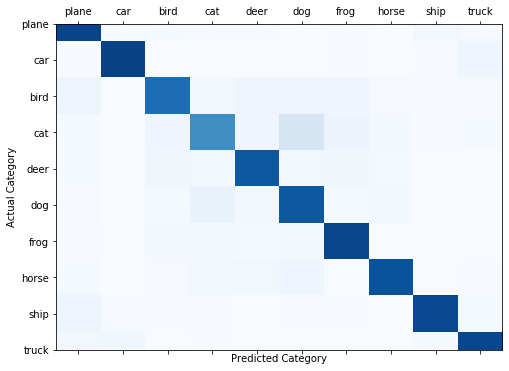

Category   - Accuracy
plane      - 91.8
car        - 93.0
bird       - 76.2
cat        - 63.8
deer       - 85.0
dog        - 84.5
frog       - 91.7
horse      - 86.8
ship       - 90.6
truck      - 90.9

Selected workers

[33 99 55 12 32 95 16 97 65 35 59 24 17 31 64]
Worker 33 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 95 : is  Honest
Worker 16 : is  Stealthy_Attacker
Worker 97 : is  Stealthy_Attacker
Worker 65 : is  Honest
Worker 35 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 24 : is  Honest
Worker 17 : is  Honest
Worker 31 : is  Stealthy_Attacker
Worker 64 : is  Honest

 | Global Training Round : 82 |


Worker 33 starts training in Global Round:82 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 33  in Global Round:  82


Train Epoch: 1 [0/500	(1%)]	Loss: 1.801070
Train Epoch: 1 [400/500	(81%)]	Loss: 0.578181
Train Epoch: 2 [0/500	(1%)]	Loss: 0.383915
Train Epoch: 2 [400/500	(81%)]	Loss: 0.513286
Train Epoch: 3 [0/500	(1%)]	Loss: 0.170623
Train Epoch: 3 [400/500	(81%)]	Loss: 0.365025
Train Epoch: 4 [0/500	(1%)]	Loss: 0.147600
Train Epoch: 4 [400/500	(81%)]	Loss: 0.259319
Train Epoch: 5 [0/500	(1%)]	Loss: 0.186400
Train Epoch: 5 [400/500	(81%)]	Loss: 0.114494

Performed attacks 1
Worker 33 ends training in Global Round:82 |

Worker 99 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.202080
Train Epoch: 1 [400/500	(81%)]	Loss: 0.296390
Train Epoch: 2 [0/500	(1%)]	Loss: 0.083898
Train Epoch: 2 [400/500	(81%)]	Loss: 0.155622
Train Epoch: 3 [0/500	(1%)]	Loss: 0.132818
Train Epoch: 3 [400/500	(81%)]	Loss: 0.106040
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105584
Train Epoch: 4 [400/500	(81%)]	Loss: 0.243125
Train Epoch: 5 [0/500	(1%)]	Loss: 0.100409
Train Epoch: 5 [400/500	(81%)]	Loss: 0.157180

Worker 99 ends training in Global Round:82 |

Worker 55 starts training in Global Round:82 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 55  in Global Round:  82


Train Epoch: 1 [0/500	(1%)]	Loss: 1.402617
Train Epoch: 1 [400/500	(81%)]	Loss: 0.622911
Train Epoch: 2 [0/500	(1%)]	Loss: 0.384703
Train Epoch: 2 [400/500	(81%)]	Loss: 0.310542
Train Epoch: 3 [0/500	(1%)]	Loss: 0.246417
Train Epoch: 3 [400/500	(81%)]	Loss: 0.251258
Train Epoch: 4 [0/500	(1%)]	Loss: 0.153941
Train Epoch: 4 [400/500	(81%)]	Loss: 0.177276
Train Epoch: 5 [0/500	(1%)]	Loss: 0.222656
Train Epoch: 5 [400/500	(81%)]	Loss: 0.314516

Performed attacks 2
Worker 55 ends training in Global Round:82 |

Worker 12 starts training in Global Round:82 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 12  in Global Round:  82


Train Epoch: 1 [0/500	(1%)]	Loss: 1.307800
Train Epoch: 1 [400/500	(81%)]	Loss: 0.441853
Train Epoch: 2 [0/500	(1%)]	Loss: 0.197884
Train Epoch: 2 [400/500	(81%)]	Loss: 0.296678
Train Epoch: 3 [0/500	(1%)]	Loss: 0.132731
Train Epoch: 3 [400/500	(81%)]	Loss: 0.228457
Train Epoch: 4 [0/500	(1%)]	Loss: 0.166128
Train Epoch: 4 [400/500	(81%)]	Loss: 0.196935
Train Epoch: 5 [0/500	(1%)]	Loss: 0.235136
Train Epoch: 5 [400/500	(81%)]	Loss: 0.136471

Performed attacks 3
Worker 12 ends training in Global Round:82 |

Worker 32 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.324059
Train Epoch: 1 [400/500	(81%)]	Loss: 0.461299
Train Epoch: 2 [0/500	(1%)]	Loss: 0.168225
Train Epoch: 2 [400/500	(81%)]	Loss: 0.227076
Train Epoch: 3 [0/500	(1%)]	Loss: 0.163794
Train Epoch: 3 [400/500	(81%)]	Loss: 0.174282
Train Epoch: 4 [0/500	(1%)]	Loss: 0.098366
Train Epoch: 4 [400/500	(81%)]	Loss: 0.204480
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089234
Train Epoch: 5 [400/500	(81%)]	Loss: 0.296855

Worker 32 ends training in Global Round:82 |

Worker 95 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.148581
Train Epoch: 1 [400/500	(81%)]	Loss: 0.238725
Train Epoch: 2 [0/500	(1%)]	Loss: 0.259799
Train Epoch: 2 [400/500	(81%)]	Loss: 0.189572
Train Epoch: 3 [0/500	(1%)]	Loss: 0.163173
Train Epoch: 3 [400/500	(81%)]	Loss: 0.132405
Train Epoch: 4 [0/500	(1%)]	Loss: 0.177653
Train Epoch: 4 [400/500	(81%)]	Loss: 0.129026
Train Epoch: 5 [0/500	(1%)]	Loss: 0.027199
Train Epoch: 5 [400/500	(81%)]	Loss: 0.220017

Worker 95 ends training in Global Round:82 |

Worker 16 starts training in Global Round:82 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 16  in Global Round:  82


Train Epoch: 1 [0/500	(1%)]	Loss: 1.383192
Train Epoch: 1 [400/500	(81%)]	Loss: 0.383887
Train Epoch: 2 [0/500	(1%)]	Loss: 0.250568
Train Epoch: 2 [400/500	(81%)]	Loss: 0.649991
Train Epoch: 3 [0/500	(1%)]	Loss: 0.139826
Train Epoch: 3 [400/500	(81%)]	Loss: 0.339916
Train Epoch: 4 [0/500	(1%)]	Loss: 0.273237
Train Epoch: 4 [400/500	(81%)]	Loss: 0.318941
Train Epoch: 5 [0/500	(1%)]	Loss: 0.167924
Train Epoch: 5 [400/500	(81%)]	Loss: 0.108489

Performed attacks 4
Worker 16 ends training in Global Round:82 |

Worker 97 starts training in Global Round:82 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 97  in Global Round:  82


Train Epoch: 1 [0/500	(1%)]	Loss: 0.981441
Train Epoch: 1 [400/500	(81%)]	Loss: 0.681419
Train Epoch: 2 [0/500	(1%)]	Loss: 0.320303
Train Epoch: 2 [400/500	(81%)]	Loss: 0.223318
Train Epoch: 3 [0/500	(1%)]	Loss: 0.211764
Train Epoch: 3 [400/500	(81%)]	Loss: 0.167382
Train Epoch: 4 [0/500	(1%)]	Loss: 0.172212
Train Epoch: 4 [400/500	(81%)]	Loss: 0.219413
Train Epoch: 5 [0/500	(1%)]	Loss: 0.162398
Train Epoch: 5 [400/500	(81%)]	Loss: 0.160148

Performed attacks 5
Worker 97 ends training in Global Round:82 |

Worker 65 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.167683
Train Epoch: 1 [400/500	(81%)]	Loss: 0.158865
Train Epoch: 2 [0/500	(1%)]	Loss: 0.059910
Train Epoch: 2 [400/500	(81%)]	Loss: 0.055657
Train Epoch: 3 [0/500	(1%)]	Loss: 0.047071
Train Epoch: 3 [400/500	(81%)]	Loss: 0.127939
Train Epoch: 4 [0/500	(1%)]	Loss: 0.062625
Train Epoch: 4 [400/500	(81%)]	Loss: 0.040188
Train Epoch: 5 [0/500	(1%)]	Loss: 0.062461
Train Epoch: 5 [400/500	(81%)]	Loss: 0.059420

Worker 65 ends training in Global Round:82 |

Worker 35 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.312081
Train Epoch: 1 [400/500	(81%)]	Loss: 0.347974
Train Epoch: 2 [0/500	(1%)]	Loss: 0.205514
Train Epoch: 2 [400/500	(81%)]	Loss: 0.117683
Train Epoch: 3 [0/500	(1%)]	Loss: 0.059238
Train Epoch: 3 [400/500	(81%)]	Loss: 0.138518
Train Epoch: 4 [0/500	(1%)]	Loss: 0.106439
Train Epoch: 4 [400/500	(81%)]	Loss: 0.113188
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112834
Train Epoch: 5 [400/500	(81%)]	Loss: 0.082392

Worker 35 ends training in Global Round:82 |

Worker 59 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.446577
Train Epoch: 1 [400/500	(81%)]	Loss: 0.636873
Train Epoch: 2 [0/500	(1%)]	Loss: 0.244889
Train Epoch: 2 [400/500	(81%)]	Loss: 0.179520
Train Epoch: 3 [0/500	(1%)]	Loss: 0.123321
Train Epoch: 3 [400/500	(81%)]	Loss: 0.484923
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156346
Train Epoch: 4 [400/500	(81%)]	Loss: 0.295280
Train Epoch: 5 [0/500	(1%)]	Loss: 0.188671
Train Epoch: 5 [400/500	(81%)]	Loss: 0.210688

Worker 59 ends training in Global Round:82 |

Worker 24 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.287782
Train Epoch: 1 [400/500	(81%)]	Loss: 0.198842
Train Epoch: 2 [0/500	(1%)]	Loss: 0.074429
Train Epoch: 2 [400/500	(81%)]	Loss: 0.178315
Train Epoch: 3 [0/500	(1%)]	Loss: 0.144170
Train Epoch: 3 [400/500	(81%)]	Loss: 0.238085
Train Epoch: 4 [0/500	(1%)]	Loss: 0.112205
Train Epoch: 4 [400/500	(81%)]	Loss: 0.167701
Train Epoch: 5 [0/500	(1%)]	Loss: 0.078818
Train Epoch: 5 [400/500	(81%)]	Loss: 0.166364

Worker 24 ends training in Global Round:82 |

Worker 17 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.182792
Train Epoch: 1 [400/500	(81%)]	Loss: 0.072775
Train Epoch: 2 [0/500	(1%)]	Loss: 0.059542
Train Epoch: 2 [400/500	(81%)]	Loss: 0.096026
Train Epoch: 3 [0/500	(1%)]	Loss: 0.074571
Train Epoch: 3 [400/500	(81%)]	Loss: 0.123959
Train Epoch: 4 [0/500	(1%)]	Loss: 0.064506
Train Epoch: 4 [400/500	(81%)]	Loss: 0.098122
Train Epoch: 5 [0/500	(1%)]	Loss: 0.090213
Train Epoch: 5 [400/500	(81%)]	Loss: 0.105118

Worker 17 ends training in Global Round:82 |

Worker 31 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.394322
Train Epoch: 1 [400/500	(81%)]	Loss: 0.391772
Train Epoch: 2 [0/500	(1%)]	Loss: 0.162686
Train Epoch: 2 [400/500	(81%)]	Loss: 0.315212
Train Epoch: 3 [0/500	(1%)]	Loss: 0.196328
Train Epoch: 3 [400/500	(81%)]	Loss: 0.297127
Train Epoch: 4 [0/500	(1%)]	Loss: 0.094581
Train Epoch: 4 [400/500	(81%)]	Loss: 0.227504
Train Epoch: 5 [0/500	(1%)]	Loss: 0.143054
Train Epoch: 5 [400/500	(81%)]	Loss: 0.287686

Worker 31 ends training in Global Round:82 |

Worker 64 starts training in Global Round:82 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.222513
Train Epoch: 1 [400/500	(81%)]	Loss: 0.250744
Train Epoch: 2 [0/500	(1%)]	Loss: 0.137040
Train Epoch: 2 [400/500	(81%)]	Loss: 0.166925
Train Epoch: 3 [0/500	(1%)]	Loss: 0.157237
Train Epoch: 3 [400/500	(81%)]	Loss: 0.110642
Train Epoch: 4 [0/500	(1%)]	Loss: 0.067785
Train Epoch: 4 [400/500	(81%)]	Loss: 0.127930
Train Epoch: 5 [0/500	(1%)]	Loss: 0.089450
Train Epoch: 5 [400/500	(81%)]	Loss: 0.100773

Worker 64 ends training in Global Round:82 |
Last layer biases  [array([ 0.03354586, -0.02973325, -0.01224317,  0.03662437,  0.05315775,
       -0.01180855,  0.04008535, -0.03362748, -0.02292665, -0.0371724 ],
      dtype=float32), array([ 0.03384893, -0.03220935, -0.01471852,  0.03981939,  0.03906884,
       -0.01418816,  0.03661074, -0.00882654, -0.02297349, -0.04053005],
      dtype=float32), array([ 0.03648623, -0.03064865, -0.01577835,  0.04000157,  0.04953725,
       -0.01252152,  0.04083318, -0.0275385 , -0.02217639, -0.04229299],
      dtyp

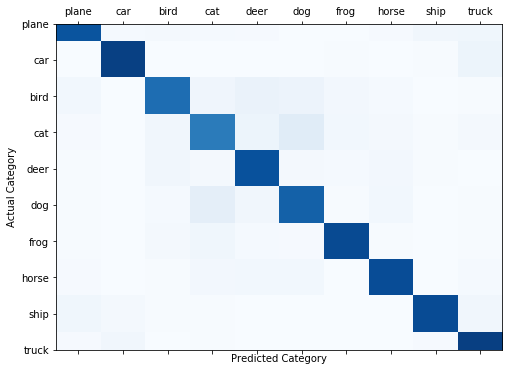

Category   - Accuracy
plane      - 86.0
car        - 93.5
bird       - 76.3
cat        - 71.0
deer       - 87.3
dog        - 81.2
frog       - 89.7
horse      - 88.9
ship       - 89.1
truck      - 93.8

Selected workers

[18 35 93 27 92 51  3 31 40 28 88 86 87 47 13]
Worker 18 : is  Stealthy_Attacker
Worker 35 : is  Honest
Worker 93 : is  Honest
Worker 27 : is  Stealthy_Attacker
Worker 92 : is  Stealthy_Attacker
Worker 51 : is  Stealthy_Attacker
Worker 3 : is  Stealthy_Attacker
Worker 31 : is  Stealthy_Attacker
Worker 40 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 88 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 87 : is  Stealthy_Attacker
Worker 47 : is  Honest
Worker 13 : is  Stealthy_Attacker

 | Global Training Round : 83 |


Worker 18 starts training in Global Round:83 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  83


Train Epoch: 1 [0/500	(1%)]	Loss: 1.415007
Train Epoch: 1 [400/500	(81%)]	Loss: 0.501010
Train Epoch: 2 [0/500	(1%)]	Loss: 0.350663
Train Epoch: 2 [400/500	(81%)]	Loss: 0.574005
Train Epoch: 3 [0/500	(1%)]	Loss: 0.335311
Train Epoch: 3 [400/500	(81%)]	Loss: 0.292554
Train Epoch: 4 [0/500	(1%)]	Loss: 0.169306
Train Epoch: 4 [400/500	(81%)]	Loss: 0.288363
Train Epoch: 5 [0/500	(1%)]	Loss: 0.149634
Train Epoch: 5 [400/500	(81%)]	Loss: 0.076818

Performed attacks 1
Worker 18 ends training in Global Round:83 |

Worker 35 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.165946
Train Epoch: 1 [400/500	(81%)]	Loss: 0.136484
Train Epoch: 2 [0/500	(1%)]	Loss: 0.091734
Train Epoch: 2 [400/500	(81%)]	Loss: 0.101219
Train Epoch: 3 [0/500	(1%)]	Loss: 0.083067
Train Epoch: 3 [400/500	(81%)]	Loss: 0.098495
Train Epoch: 4 [0/500	(1%)]	Loss: 0.087139
Train Epoch: 4 [400/500	(81%)]	Loss: 0.042307
Train Epoch: 5 [0/500	(1%)]	Loss: 0.057147
Train Epoch: 5 [400/500	(81%)]	Loss: 0.090977

Worker 35 ends training in Global Round:83 |

Worker 93 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.100941
Train Epoch: 1 [400/500	(81%)]	Loss: 0.082848
Train Epoch: 2 [0/500	(1%)]	Loss: 0.060020
Train Epoch: 2 [400/500	(81%)]	Loss: 0.130151
Train Epoch: 3 [0/500	(1%)]	Loss: 0.109238
Train Epoch: 3 [400/500	(81%)]	Loss: 0.109308
Train Epoch: 4 [0/500	(1%)]	Loss: 0.034806
Train Epoch: 4 [400/500	(81%)]	Loss: 0.118977
Train Epoch: 5 [0/500	(1%)]	Loss: 0.085295
Train Epoch: 5 [400/500	(81%)]	Loss: 0.115203

Worker 93 ends training in Global Round:83 |

Worker 27 starts training in Global Round:83 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  83


Train Epoch: 1 [0/500	(1%)]	Loss: 1.261738
Train Epoch: 1 [400/500	(81%)]	Loss: 0.315504
Train Epoch: 2 [0/500	(1%)]	Loss: 0.145534
Train Epoch: 2 [400/500	(81%)]	Loss: 0.378512
Train Epoch: 3 [0/500	(1%)]	Loss: 0.165866
Train Epoch: 3 [400/500	(81%)]	Loss: 0.161813
Train Epoch: 4 [0/500	(1%)]	Loss: 0.214228
Train Epoch: 4 [400/500	(81%)]	Loss: 0.124828
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125416
Train Epoch: 5 [400/500	(81%)]	Loss: 0.176016

Performed attacks 2
Worker 27 ends training in Global Round:83 |

Worker 92 starts training in Global Round:83 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 92  in Global Round:  83


Train Epoch: 1 [0/500	(1%)]	Loss: 1.175725
Train Epoch: 1 [400/500	(81%)]	Loss: 0.476544
Train Epoch: 2 [0/500	(1%)]	Loss: 0.269848
Train Epoch: 2 [400/500	(81%)]	Loss: 0.244670
Train Epoch: 3 [0/500	(1%)]	Loss: 0.216693
Train Epoch: 3 [400/500	(81%)]	Loss: 0.255209
Train Epoch: 4 [0/500	(1%)]	Loss: 0.141935
Train Epoch: 4 [400/500	(81%)]	Loss: 0.282983
Train Epoch: 5 [0/500	(1%)]	Loss: 0.131183
Train Epoch: 5 [400/500	(81%)]	Loss: 0.155258

Performed attacks 3
Worker 92 ends training in Global Round:83 |

Worker 51 starts training in Global Round:83 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  83


Train Epoch: 1 [0/500	(1%)]	Loss: 1.371517
Train Epoch: 1 [400/500	(81%)]	Loss: 0.678906
Train Epoch: 2 [0/500	(1%)]	Loss: 0.309978
Train Epoch: 2 [400/500	(81%)]	Loss: 0.306252
Train Epoch: 3 [0/500	(1%)]	Loss: 0.337630
Train Epoch: 3 [400/500	(81%)]	Loss: 0.396731
Train Epoch: 4 [0/500	(1%)]	Loss: 0.179686
Train Epoch: 4 [400/500	(81%)]	Loss: 0.218610
Train Epoch: 5 [0/500	(1%)]	Loss: 0.165259
Train Epoch: 5 [400/500	(81%)]	Loss: 0.315325

Performed attacks 4
Worker 51 ends training in Global Round:83 |

Worker 3 starts training in Global Round:83 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 3  in Global Round:  83


Train Epoch: 1 [0/500	(1%)]	Loss: 1.634474
Train Epoch: 1 [400/500	(81%)]	Loss: 0.612305
Train Epoch: 2 [0/500	(1%)]	Loss: 0.491247
Train Epoch: 2 [400/500	(81%)]	Loss: 0.520539
Train Epoch: 3 [0/500	(1%)]	Loss: 0.350413
Train Epoch: 3 [400/500	(81%)]	Loss: 0.300751
Train Epoch: 4 [0/500	(1%)]	Loss: 0.213670
Train Epoch: 4 [400/500	(81%)]	Loss: 0.238537
Train Epoch: 5 [0/500	(1%)]	Loss: 0.239640
Train Epoch: 5 [400/500	(81%)]	Loss: 0.212700

Performed attacks 5
Worker 3 ends training in Global Round:83 |

Worker 31 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.206634
Train Epoch: 1 [400/500	(81%)]	Loss: 0.330348
Train Epoch: 2 [0/500	(1%)]	Loss: 0.141825
Train Epoch: 2 [400/500	(81%)]	Loss: 0.171866
Train Epoch: 3 [0/500	(1%)]	Loss: 0.098079
Train Epoch: 3 [400/500	(81%)]	Loss: 0.124209
Train Epoch: 4 [0/500	(1%)]	Loss: 0.113229
Train Epoch: 4 [400/500	(81%)]	Loss: 0.054109
Train Epoch: 5 [0/500	(1%)]	Loss: 0.034818
Train Epoch: 5 [400/500	(81%)]	Loss: 0.072499

Worker 31 ends training in Global Round:83 |

Worker 40 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.179385
Train Epoch: 1 [400/500	(81%)]	Loss: 0.484232
Train Epoch: 2 [0/500	(1%)]	Loss: 0.078635
Train Epoch: 2 [400/500	(81%)]	Loss: 0.161752
Train Epoch: 3 [0/500	(1%)]	Loss: 0.093368
Train Epoch: 3 [400/500	(81%)]	Loss: 0.137710
Train Epoch: 4 [0/500	(1%)]	Loss: 0.084002
Train Epoch: 4 [400/500	(81%)]	Loss: 0.085023
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107868
Train Epoch: 5 [400/500	(81%)]	Loss: 0.111561

Worker 40 ends training in Global Round:83 |

Worker 28 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.407524
Train Epoch: 1 [400/500	(81%)]	Loss: 0.522930
Train Epoch: 2 [0/500	(1%)]	Loss: 0.296223
Train Epoch: 2 [400/500	(81%)]	Loss: 0.318632
Train Epoch: 3 [0/500	(1%)]	Loss: 0.210279
Train Epoch: 3 [400/500	(81%)]	Loss: 0.268832
Train Epoch: 4 [0/500	(1%)]	Loss: 0.118569
Train Epoch: 4 [400/500	(81%)]	Loss: 0.160814
Train Epoch: 5 [0/500	(1%)]	Loss: 0.164568
Train Epoch: 5 [400/500	(81%)]	Loss: 0.235787

Worker 28 ends training in Global Round:83 |

Worker 88 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.153287
Train Epoch: 1 [400/500	(81%)]	Loss: 0.216887
Train Epoch: 2 [0/500	(1%)]	Loss: 0.081630
Train Epoch: 2 [400/500	(81%)]	Loss: 0.233763
Train Epoch: 3 [0/500	(1%)]	Loss: 0.051346
Train Epoch: 3 [400/500	(81%)]	Loss: 0.076421
Train Epoch: 4 [0/500	(1%)]	Loss: 0.041065
Train Epoch: 4 [400/500	(81%)]	Loss: 0.153931
Train Epoch: 5 [0/500	(1%)]	Loss: 0.068792
Train Epoch: 5 [400/500	(81%)]	Loss: 0.134073

Worker 88 ends training in Global Round:83 |

Worker 86 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.265666
Train Epoch: 1 [400/500	(81%)]	Loss: 0.346365
Train Epoch: 2 [0/500	(1%)]	Loss: 0.279270
Train Epoch: 2 [400/500	(81%)]	Loss: 0.149861
Train Epoch: 3 [0/500	(1%)]	Loss: 0.200853
Train Epoch: 3 [400/500	(81%)]	Loss: 0.332801
Train Epoch: 4 [0/500	(1%)]	Loss: 0.128775
Train Epoch: 4 [400/500	(81%)]	Loss: 0.105583
Train Epoch: 5 [0/500	(1%)]	Loss: 0.072147
Train Epoch: 5 [400/500	(81%)]	Loss: 0.174185

Worker 86 ends training in Global Round:83 |

Worker 87 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.679369
Train Epoch: 1 [400/500	(81%)]	Loss: 0.559920
Train Epoch: 2 [0/500	(1%)]	Loss: 0.182449
Train Epoch: 2 [400/500	(81%)]	Loss: 0.270722
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136332
Train Epoch: 3 [400/500	(81%)]	Loss: 0.485017
Train Epoch: 4 [0/500	(1%)]	Loss: 0.194714
Train Epoch: 4 [400/500	(81%)]	Loss: 0.220430
Train Epoch: 5 [0/500	(1%)]	Loss: 0.140682
Train Epoch: 5 [400/500	(81%)]	Loss: 0.363660

Worker 87 ends training in Global Round:83 |

Worker 47 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.204070
Train Epoch: 1 [400/500	(81%)]	Loss: 0.501061
Train Epoch: 2 [0/500	(1%)]	Loss: 0.156601
Train Epoch: 2 [400/500	(81%)]	Loss: 0.240940
Train Epoch: 3 [0/500	(1%)]	Loss: 0.135535
Train Epoch: 3 [400/500	(81%)]	Loss: 0.212694
Train Epoch: 4 [0/500	(1%)]	Loss: 0.122201
Train Epoch: 4 [400/500	(81%)]	Loss: 0.119227
Train Epoch: 5 [0/500	(1%)]	Loss: 0.097001
Train Epoch: 5 [400/500	(81%)]	Loss: 0.066841

Worker 47 ends training in Global Round:83 |

Worker 13 starts training in Global Round:83 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.370482
Train Epoch: 1 [400/500	(81%)]	Loss: 0.472429
Train Epoch: 2 [0/500	(1%)]	Loss: 0.111188
Train Epoch: 2 [400/500	(81%)]	Loss: 0.274727
Train Epoch: 3 [0/500	(1%)]	Loss: 0.178121
Train Epoch: 3 [400/500	(81%)]	Loss: 0.250114
Train Epoch: 4 [0/500	(1%)]	Loss: 0.159190
Train Epoch: 4 [400/500	(81%)]	Loss: 0.113669
Train Epoch: 5 [0/500	(1%)]	Loss: 0.209366
Train Epoch: 5 [400/500	(81%)]	Loss: 0.151357

Worker 13 ends training in Global Round:83 |
Last layer biases  [array([ 0.03463785, -0.0312747 , -0.01224807,  0.03999589,  0.04992738,
       -0.01044169,  0.03821231, -0.03089874, -0.02331696, -0.03869145],
      dtype=float32), array([ 0.03322039, -0.03265939, -0.0145955 ,  0.03691012,  0.0391279 ,
       -0.01581255,  0.03921676, -0.00912069, -0.02096233, -0.03942291],
      dtype=float32), array([ 0.03501101, -0.0319501 , -0.01483302,  0.03684913,  0.03930728,
       -0.01447029,  0.03685415, -0.00904506, -0.02210613, -0.03971518],
      dtyp

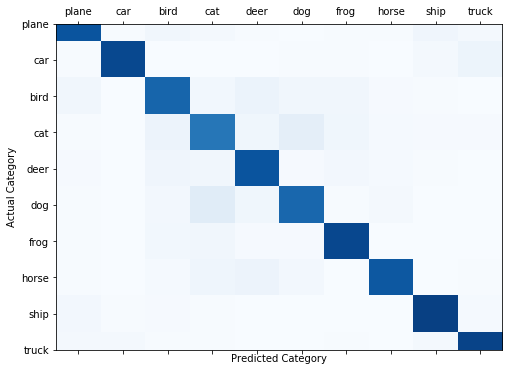

Category   - Accuracy
plane      - 86.3
car        - 90.6
bird       - 79.4
cat        - 72.9
deer       - 86.0
dog        - 78.6
frog       - 90.7
horse      - 84.4
ship       - 93.6
truck      - 92.5

Selected workers

[88 43 63 65 32 59 95 64 28 62 74 90 26 86 96]
Worker 88 : is  Honest
Worker 43 : is  Honest
Worker 63 : is  Honest
Worker 65 : is  Honest
Worker 32 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 95 : is  Honest
Worker 64 : is  Honest
Worker 28 : is  Stealthy_Attacker
Worker 62 : is  Honest
Worker 74 : is  Honest
Worker 90 : is  Honest
Worker 26 : is  Honest
Worker 86 : is  Stealthy_Attacker
Worker 96 : is  Honest

 | Global Training Round : 84 |


Worker 88 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.155894
Train Epoch: 1 [400/500	(81%)]	Loss: 0.061104
Train Epoch: 2 [0/500	(1%)]	Loss: 0.092343
Train Epoch: 2 [400/500	(81%)]	Loss: 0.059149
Train Epoch: 3 [0/500	(1%)]	Loss: 0.054387
Train Epoch: 3 [400/500	(81%)]	Loss: 0.055506
Train Epoch: 4 [0/500	(1%)]	Loss: 0.044730
Train Epoch: 4 [400/500	(81%)]	Loss: 0.044357
Train Epoch: 5 [0/500	(1%)]	Loss: 0.036598
Train Epoch: 5 [400/500	(81%)]	Loss: 0.080422

Worker 88 ends training in Global Round:84 |

Worker 43 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.232534
Train Epoch: 1 [400/500	(81%)]	Loss: 0.347505
Train Epoch: 2 [0/500	(1%)]	Loss: 0.058610
Train Epoch: 2 [400/500	(81%)]	Loss: 0.125701
Train Epoch: 3 [0/500	(1%)]	Loss: 0.058758
Train Epoch: 3 [400/500	(81%)]	Loss: 0.090103
Train Epoch: 4 [0/500	(1%)]	Loss: 0.034722
Train Epoch: 4 [400/500	(81%)]	Loss: 0.031116
Train Epoch: 5 [0/500	(1%)]	Loss: 0.052574
Train Epoch: 5 [400/500	(81%)]	Loss: 0.021902

Worker 43 ends training in Global Round:84 |

Worker 63 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.229886
Train Epoch: 1 [400/500	(81%)]	Loss: 0.252874
Train Epoch: 2 [0/500	(1%)]	Loss: 0.201662
Train Epoch: 2 [400/500	(81%)]	Loss: 0.109004
Train Epoch: 3 [0/500	(1%)]	Loss: 0.080992
Train Epoch: 3 [400/500	(81%)]	Loss: 0.223277
Train Epoch: 4 [0/500	(1%)]	Loss: 0.076813
Train Epoch: 4 [400/500	(81%)]	Loss: 0.157959
Train Epoch: 5 [0/500	(1%)]	Loss: 0.103804
Train Epoch: 5 [400/500	(81%)]	Loss: 0.078108

Worker 63 ends training in Global Round:84 |

Worker 65 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.235616
Train Epoch: 1 [400/500	(81%)]	Loss: 0.205408
Train Epoch: 2 [0/500	(1%)]	Loss: 0.056644
Train Epoch: 2 [400/500	(81%)]	Loss: 0.138715
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136195
Train Epoch: 3 [400/500	(81%)]	Loss: 0.068098
Train Epoch: 4 [0/500	(1%)]	Loss: 0.060830
Train Epoch: 4 [400/500	(81%)]	Loss: 0.065286
Train Epoch: 5 [0/500	(1%)]	Loss: 0.026094
Train Epoch: 5 [400/500	(81%)]	Loss: 0.084662

Worker 65 ends training in Global Round:84 |

Worker 32 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.235388
Train Epoch: 1 [400/500	(81%)]	Loss: 0.158116
Train Epoch: 2 [0/500	(1%)]	Loss: 0.064353
Train Epoch: 2 [400/500	(81%)]	Loss: 0.161079
Train Epoch: 3 [0/500	(1%)]	Loss: 0.111497
Train Epoch: 3 [400/500	(81%)]	Loss: 0.198919
Train Epoch: 4 [0/500	(1%)]	Loss: 0.134557
Train Epoch: 4 [400/500	(81%)]	Loss: 0.110302
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132599
Train Epoch: 5 [400/500	(81%)]	Loss: 0.161459

Worker 32 ends training in Global Round:84 |

Worker 59 starts training in Global Round:84 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  84


Train Epoch: 1 [0/500	(1%)]	Loss: 1.434623
Train Epoch: 1 [400/500	(81%)]	Loss: 0.457649
Train Epoch: 2 [0/500	(1%)]	Loss: 0.249509
Train Epoch: 2 [400/500	(81%)]	Loss: 0.290967
Train Epoch: 3 [0/500	(1%)]	Loss: 0.182022
Train Epoch: 3 [400/500	(81%)]	Loss: 0.259323
Train Epoch: 4 [0/500	(1%)]	Loss: 0.183069
Train Epoch: 4 [400/500	(81%)]	Loss: 0.122945
Train Epoch: 5 [0/500	(1%)]	Loss: 0.207429
Train Epoch: 5 [400/500	(81%)]	Loss: 0.074021

Performed attacks 1
Worker 59 ends training in Global Round:84 |

Worker 95 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.152328
Train Epoch: 1 [400/500	(81%)]	Loss: 0.096155
Train Epoch: 2 [0/500	(1%)]	Loss: 0.117646
Train Epoch: 2 [400/500	(81%)]	Loss: 0.066399
Train Epoch: 3 [0/500	(1%)]	Loss: 0.044857
Train Epoch: 3 [400/500	(81%)]	Loss: 0.097764
Train Epoch: 4 [0/500	(1%)]	Loss: 0.029059
Train Epoch: 4 [400/500	(81%)]	Loss: 0.149121
Train Epoch: 5 [0/500	(1%)]	Loss: 0.073011
Train Epoch: 5 [400/500	(81%)]	Loss: 0.160784

Worker 95 ends training in Global Round:84 |

Worker 64 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.160058
Train Epoch: 1 [400/500	(81%)]	Loss: 0.356832
Train Epoch: 2 [0/500	(1%)]	Loss: 0.078217
Train Epoch: 2 [400/500	(81%)]	Loss: 0.131894
Train Epoch: 3 [0/500	(1%)]	Loss: 0.039300
Train Epoch: 3 [400/500	(81%)]	Loss: 0.159408
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140820
Train Epoch: 4 [400/500	(81%)]	Loss: 0.079343
Train Epoch: 5 [0/500	(1%)]	Loss: 0.035684
Train Epoch: 5 [400/500	(81%)]	Loss: 0.081024

Worker 64 ends training in Global Round:84 |

Worker 28 starts training in Global Round:84 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 28  in Global Round:  84


Train Epoch: 1 [0/500	(1%)]	Loss: 1.396111
Train Epoch: 1 [400/500	(81%)]	Loss: 0.443507
Train Epoch: 2 [0/500	(1%)]	Loss: 0.352982
Train Epoch: 2 [400/500	(81%)]	Loss: 0.182517
Train Epoch: 3 [0/500	(1%)]	Loss: 0.177220
Train Epoch: 3 [400/500	(81%)]	Loss: 0.255684
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083922
Train Epoch: 4 [400/500	(81%)]	Loss: 0.139568
Train Epoch: 5 [0/500	(1%)]	Loss: 0.187662
Train Epoch: 5 [400/500	(81%)]	Loss: 0.095726

Performed attacks 2
Worker 28 ends training in Global Round:84 |

Worker 62 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.443586
Train Epoch: 1 [400/500	(81%)]	Loss: 0.506313
Train Epoch: 2 [0/500	(1%)]	Loss: 0.193766
Train Epoch: 2 [400/500	(81%)]	Loss: 0.312978
Train Epoch: 3 [0/500	(1%)]	Loss: 0.131177
Train Epoch: 3 [400/500	(81%)]	Loss: 0.327642
Train Epoch: 4 [0/500	(1%)]	Loss: 0.212275
Train Epoch: 4 [400/500	(81%)]	Loss: 0.302017
Train Epoch: 5 [0/500	(1%)]	Loss: 0.253706
Train Epoch: 5 [400/500	(81%)]	Loss: 0.203041

Worker 62 ends training in Global Round:84 |

Worker 74 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.300310
Train Epoch: 1 [400/500	(81%)]	Loss: 0.237925
Train Epoch: 2 [0/500	(1%)]	Loss: 0.160192
Train Epoch: 2 [400/500	(81%)]	Loss: 0.116149
Train Epoch: 3 [0/500	(1%)]	Loss: 0.060620
Train Epoch: 3 [400/500	(81%)]	Loss: 0.079530
Train Epoch: 4 [0/500	(1%)]	Loss: 0.028904
Train Epoch: 4 [400/500	(81%)]	Loss: 0.105695
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114451
Train Epoch: 5 [400/500	(81%)]	Loss: 0.122878

Worker 74 ends training in Global Round:84 |

Worker 90 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.679348
Train Epoch: 1 [400/500	(81%)]	Loss: 0.644998
Train Epoch: 2 [0/500	(1%)]	Loss: 0.211486
Train Epoch: 2 [400/500	(81%)]	Loss: 0.411968
Train Epoch: 3 [0/500	(1%)]	Loss: 0.194809
Train Epoch: 3 [400/500	(81%)]	Loss: 0.272353
Train Epoch: 4 [0/500	(1%)]	Loss: 0.153077
Train Epoch: 4 [400/500	(81%)]	Loss: 0.265238
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127703
Train Epoch: 5 [400/500	(81%)]	Loss: 0.275524

Worker 90 ends training in Global Round:84 |

Worker 26 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.180630
Train Epoch: 1 [400/500	(81%)]	Loss: 0.090761
Train Epoch: 2 [0/500	(1%)]	Loss: 0.058757
Train Epoch: 2 [400/500	(81%)]	Loss: 0.044710
Train Epoch: 3 [0/500	(1%)]	Loss: 0.066682
Train Epoch: 3 [400/500	(81%)]	Loss: 0.062890
Train Epoch: 4 [0/500	(1%)]	Loss: 0.036135
Train Epoch: 4 [400/500	(81%)]	Loss: 0.037478
Train Epoch: 5 [0/500	(1%)]	Loss: 0.061950
Train Epoch: 5 [400/500	(81%)]	Loss: 0.074057

Worker 26 ends training in Global Round:84 |

Worker 86 starts training in Global Round:84 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  84


Train Epoch: 1 [0/500	(1%)]	Loss: 0.835202
Train Epoch: 1 [400/500	(81%)]	Loss: 0.478388
Train Epoch: 2 [0/500	(1%)]	Loss: 0.147524
Train Epoch: 2 [400/500	(81%)]	Loss: 0.136064
Train Epoch: 3 [0/500	(1%)]	Loss: 0.192686
Train Epoch: 3 [400/500	(81%)]	Loss: 0.120252
Train Epoch: 4 [0/500	(1%)]	Loss: 0.153113
Train Epoch: 4 [400/500	(81%)]	Loss: 0.198740
Train Epoch: 5 [0/500	(1%)]	Loss: 0.057787
Train Epoch: 5 [400/500	(81%)]	Loss: 0.128110

Performed attacks 3
Worker 86 ends training in Global Round:84 |

Worker 96 starts training in Global Round:84 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.368018
Train Epoch: 1 [400/500	(81%)]	Loss: 0.350054
Train Epoch: 2 [0/500	(1%)]	Loss: 0.113404
Train Epoch: 2 [400/500	(81%)]	Loss: 0.164512
Train Epoch: 3 [0/500	(1%)]	Loss: 0.114392
Train Epoch: 3 [400/500	(81%)]	Loss: 0.145920
Train Epoch: 4 [0/500	(1%)]	Loss: 0.069542
Train Epoch: 4 [400/500	(81%)]	Loss: 0.149158
Train Epoch: 5 [0/500	(1%)]	Loss: 0.080761
Train Epoch: 5 [400/500	(81%)]	Loss: 0.186721

Worker 96 ends training in Global Round:84 |
Last layer biases  [array([ 0.03469316, -0.03176808, -0.01406969,  0.03591481,  0.04051949,
       -0.01501441,  0.03830465, -0.00975739, -0.02336347, -0.03955732],
      dtype=float32), array([ 0.03381071, -0.03111657, -0.01463143,  0.0369009 ,  0.03840082,
       -0.01549876,  0.03888736, -0.00824963, -0.02218549, -0.04041611],
      dtype=float32), array([ 0.03352185, -0.03012367, -0.01461613,  0.03788778,  0.03826327,
       -0.0152016 ,  0.03897827, -0.00759712, -0.02367523, -0.04153562],
      dtyp

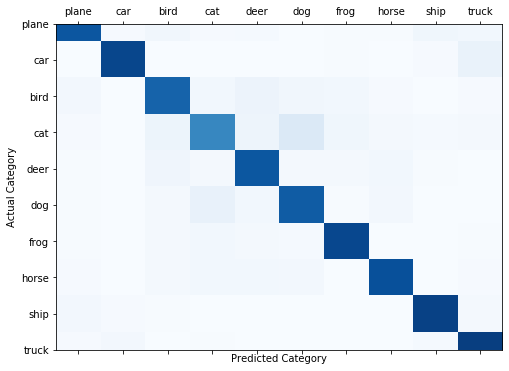

Category   - Accuracy
plane      - 85.4
car        - 91.1
bird       - 80.1
cat        - 66.5
deer       - 85.1
dog        - 82.9
frog       - 90.8
horse      - 87.8
ship       - 93.2
truck      - 94.4

Selected workers

[ 2 36 53 79 84 19 86 91 69 47 32 50 12 94 90]
Worker 2 : is  Honest
Worker 36 : is  Honest
Worker 53 : is  Stealthy_Attacker
Worker 79 : is  Stealthy_Attacker
Worker 84 : is  Honest
Worker 19 : is  Stealthy_Attacker
Worker 86 : is  Stealthy_Attacker
Worker 91 : is  Honest
Worker 69 : is  Honest
Worker 47 : is  Honest
Worker 32 : is  Honest
Worker 50 : is  Stealthy_Attacker
Worker 12 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker
Worker 90 : is  Honest

 | Global Training Round : 85 |


Worker 2 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.117025
Train Epoch: 1 [400/500	(81%)]	Loss: 0.124081
Train Epoch: 2 [0/500	(1%)]	Loss: 0.128589
Train Epoch: 2 [400/500	(81%)]	Loss: 0.115210
Train Epoch: 3 [0/500	(1%)]	Loss: 0.103589
Train Epoch: 3 [400/500	(81%)]	Loss: 0.110785
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143184
Train Epoch: 4 [400/500	(81%)]	Loss: 0.161059
Train Epoch: 5 [0/500	(1%)]	Loss: 0.169749
Train Epoch: 5 [400/500	(81%)]	Loss: 0.085065

Worker 2 ends training in Global Round:85 |

Worker 36 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.379728
Train Epoch: 1 [400/500	(81%)]	Loss: 0.299001
Train Epoch: 2 [0/500	(1%)]	Loss: 0.068186
Train Epoch: 2 [400/500	(81%)]	Loss: 0.308845
Train Epoch: 3 [0/500	(1%)]	Loss: 0.211335
Train Epoch: 3 [400/500	(81%)]	Loss: 0.240279
Train Epoch: 4 [0/500	(1%)]	Loss: 0.150410
Train Epoch: 4 [400/500	(81%)]	Loss: 0.267779
Train Epoch: 5 [0/500	(1%)]	Loss: 0.174301
Train Epoch: 5 [400/500	(81%)]	Loss: 0.186235

Worker 36 ends training in Global Round:85 |

Worker 53 starts training in Global Round:85 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 53  in Global Round:  85


Train Epoch: 1 [0/500	(1%)]	Loss: 1.408204
Train Epoch: 1 [400/500	(81%)]	Loss: 0.464572
Train Epoch: 2 [0/500	(1%)]	Loss: 0.288815
Train Epoch: 2 [400/500	(81%)]	Loss: 0.308707
Train Epoch: 3 [0/500	(1%)]	Loss: 0.376486
Train Epoch: 3 [400/500	(81%)]	Loss: 0.415534
Train Epoch: 4 [0/500	(1%)]	Loss: 0.204049
Train Epoch: 4 [400/500	(81%)]	Loss: 0.194905
Train Epoch: 5 [0/500	(1%)]	Loss: 0.098014
Train Epoch: 5 [400/500	(81%)]	Loss: 0.231271

Performed attacks 1
Worker 53 ends training in Global Round:85 |

Worker 79 starts training in Global Round:85 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 79  in Global Round:  85


Train Epoch: 1 [0/500	(1%)]	Loss: 1.013560
Train Epoch: 1 [400/500	(81%)]	Loss: 0.765760
Train Epoch: 2 [0/500	(1%)]	Loss: 0.179989
Train Epoch: 2 [400/500	(81%)]	Loss: 0.560589
Train Epoch: 3 [0/500	(1%)]	Loss: 0.237173
Train Epoch: 3 [400/500	(81%)]	Loss: 0.281987
Train Epoch: 4 [0/500	(1%)]	Loss: 0.207000
Train Epoch: 4 [400/500	(81%)]	Loss: 0.187637
Train Epoch: 5 [0/500	(1%)]	Loss: 0.226068
Train Epoch: 5 [400/500	(81%)]	Loss: 0.435523

Performed attacks 2
Worker 79 ends training in Global Round:85 |

Worker 84 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.305702
Train Epoch: 1 [400/500	(81%)]	Loss: 0.135545
Train Epoch: 2 [0/500	(1%)]	Loss: 0.135694
Train Epoch: 2 [400/500	(81%)]	Loss: 0.201955
Train Epoch: 3 [0/500	(1%)]	Loss: 0.081355
Train Epoch: 3 [400/500	(81%)]	Loss: 0.119202
Train Epoch: 4 [0/500	(1%)]	Loss: 0.052121
Train Epoch: 4 [400/500	(81%)]	Loss: 0.279145
Train Epoch: 5 [0/500	(1%)]	Loss: 0.103651
Train Epoch: 5 [400/500	(81%)]	Loss: 0.163215

Worker 84 ends training in Global Round:85 |

Worker 19 starts training in Global Round:85 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  85


Train Epoch: 1 [0/500	(1%)]	Loss: 1.673061
Train Epoch: 1 [400/500	(81%)]	Loss: 0.336970
Train Epoch: 2 [0/500	(1%)]	Loss: 0.177093
Train Epoch: 2 [400/500	(81%)]	Loss: 0.138624
Train Epoch: 3 [0/500	(1%)]	Loss: 0.116968
Train Epoch: 3 [400/500	(81%)]	Loss: 0.200210
Train Epoch: 4 [0/500	(1%)]	Loss: 0.194462
Train Epoch: 4 [400/500	(81%)]	Loss: 0.168365
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122075
Train Epoch: 5 [400/500	(81%)]	Loss: 0.157921

Performed attacks 3
Worker 19 ends training in Global Round:85 |

Worker 86 starts training in Global Round:85 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 86  in Global Round:  85


Train Epoch: 1 [0/500	(1%)]	Loss: 1.083261
Train Epoch: 1 [400/500	(81%)]	Loss: 0.253686
Train Epoch: 2 [0/500	(1%)]	Loss: 0.081710
Train Epoch: 2 [400/500	(81%)]	Loss: 0.248263
Train Epoch: 3 [0/500	(1%)]	Loss: 0.135784
Train Epoch: 3 [400/500	(81%)]	Loss: 0.203687
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164070
Train Epoch: 4 [400/500	(81%)]	Loss: 0.274900
Train Epoch: 5 [0/500	(1%)]	Loss: 0.233407
Train Epoch: 5 [400/500	(81%)]	Loss: 0.126447

Performed attacks 4
Worker 86 ends training in Global Round:85 |

Worker 91 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.348172
Train Epoch: 1 [400/500	(81%)]	Loss: 0.196363
Train Epoch: 2 [0/500	(1%)]	Loss: 0.105374
Train Epoch: 2 [400/500	(81%)]	Loss: 0.148470
Train Epoch: 3 [0/500	(1%)]	Loss: 0.137367
Train Epoch: 3 [400/500	(81%)]	Loss: 0.087497
Train Epoch: 4 [0/500	(1%)]	Loss: 0.086418
Train Epoch: 4 [400/500	(81%)]	Loss: 0.092977
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127564
Train Epoch: 5 [400/500	(81%)]	Loss: 0.134791

Worker 91 ends training in Global Round:85 |

Worker 69 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.441441
Train Epoch: 1 [400/500	(81%)]	Loss: 0.304424
Train Epoch: 2 [0/500	(1%)]	Loss: 0.074102
Train Epoch: 2 [400/500	(81%)]	Loss: 0.248317
Train Epoch: 3 [0/500	(1%)]	Loss: 0.100924
Train Epoch: 3 [400/500	(81%)]	Loss: 0.320463
Train Epoch: 4 [0/500	(1%)]	Loss: 0.049410
Train Epoch: 4 [400/500	(81%)]	Loss: 0.319794
Train Epoch: 5 [0/500	(1%)]	Loss: 0.060473
Train Epoch: 5 [400/500	(81%)]	Loss: 0.155306

Worker 69 ends training in Global Round:85 |

Worker 47 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.208154
Train Epoch: 1 [400/500	(81%)]	Loss: 0.219174
Train Epoch: 2 [0/500	(1%)]	Loss: 0.093471
Train Epoch: 2 [400/500	(81%)]	Loss: 0.110080
Train Epoch: 3 [0/500	(1%)]	Loss: 0.104624
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234285
Train Epoch: 4 [0/500	(1%)]	Loss: 0.117582
Train Epoch: 4 [400/500	(81%)]	Loss: 0.086709
Train Epoch: 5 [0/500	(1%)]	Loss: 0.030218
Train Epoch: 5 [400/500	(81%)]	Loss: 0.199602

Worker 47 ends training in Global Round:85 |

Worker 32 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.125692
Train Epoch: 1 [400/500	(81%)]	Loss: 0.263292
Train Epoch: 2 [0/500	(1%)]	Loss: 0.200524
Train Epoch: 2 [400/500	(81%)]	Loss: 0.100043
Train Epoch: 3 [0/500	(1%)]	Loss: 0.049938
Train Epoch: 3 [400/500	(81%)]	Loss: 0.087837
Train Epoch: 4 [0/500	(1%)]	Loss: 0.064804
Train Epoch: 4 [400/500	(81%)]	Loss: 0.066345
Train Epoch: 5 [0/500	(1%)]	Loss: 0.081218
Train Epoch: 5 [400/500	(81%)]	Loss: 0.150093

Worker 32 ends training in Global Round:85 |

Worker 50 starts training in Global Round:85 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 50  in Global Round:  85


Train Epoch: 1 [0/500	(1%)]	Loss: 1.065556
Train Epoch: 1 [400/500	(81%)]	Loss: 0.835165
Train Epoch: 2 [0/500	(1%)]	Loss: 0.390921
Train Epoch: 2 [400/500	(81%)]	Loss: 0.423281
Train Epoch: 3 [0/500	(1%)]	Loss: 0.227849
Train Epoch: 3 [400/500	(81%)]	Loss: 0.236767
Train Epoch: 4 [0/500	(1%)]	Loss: 0.225591
Train Epoch: 4 [400/500	(81%)]	Loss: 0.439588
Train Epoch: 5 [0/500	(1%)]	Loss: 0.144858
Train Epoch: 5 [400/500	(81%)]	Loss: 0.407851

Performed attacks 5
Worker 50 ends training in Global Round:85 |

Worker 12 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.415930
Train Epoch: 1 [400/500	(81%)]	Loss: 0.390059
Train Epoch: 2 [0/500	(1%)]	Loss: 0.303564
Train Epoch: 2 [400/500	(81%)]	Loss: 0.365257
Train Epoch: 3 [0/500	(1%)]	Loss: 0.118965
Train Epoch: 3 [400/500	(81%)]	Loss: 0.200790
Train Epoch: 4 [0/500	(1%)]	Loss: 0.100944
Train Epoch: 4 [400/500	(81%)]	Loss: 0.264131
Train Epoch: 5 [0/500	(1%)]	Loss: 0.122516
Train Epoch: 5 [400/500	(81%)]	Loss: 0.164706

Worker 12 ends training in Global Round:85 |

Worker 94 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.672827
Train Epoch: 1 [400/500	(81%)]	Loss: 0.323858
Train Epoch: 2 [0/500	(1%)]	Loss: 0.287042
Train Epoch: 2 [400/500	(81%)]	Loss: 0.203239
Train Epoch: 3 [0/500	(1%)]	Loss: 0.283557
Train Epoch: 3 [400/500	(81%)]	Loss: 0.240643
Train Epoch: 4 [0/500	(1%)]	Loss: 0.200741
Train Epoch: 4 [400/500	(81%)]	Loss: 0.213353
Train Epoch: 5 [0/500	(1%)]	Loss: 0.121711
Train Epoch: 5 [400/500	(81%)]	Loss: 0.112421

Worker 94 ends training in Global Round:85 |

Worker 90 starts training in Global Round:85 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.372125
Train Epoch: 1 [400/500	(81%)]	Loss: 0.689763
Train Epoch: 2 [0/500	(1%)]	Loss: 0.126643
Train Epoch: 2 [400/500	(81%)]	Loss: 0.303150
Train Epoch: 3 [0/500	(1%)]	Loss: 0.169665
Train Epoch: 3 [400/500	(81%)]	Loss: 0.147819
Train Epoch: 4 [0/500	(1%)]	Loss: 0.136390
Train Epoch: 4 [400/500	(81%)]	Loss: 0.111543
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155630
Train Epoch: 5 [400/500	(81%)]	Loss: 0.250556

Worker 90 ends training in Global Round:85 |
Last layer biases  [array([ 0.03507856, -0.0311214 , -0.01601378,  0.03670311,  0.03844073,
       -0.01638795,  0.03973227, -0.00752586, -0.02161969, -0.04138418],
      dtype=float32), array([ 0.03495399, -0.03152439, -0.01596081,  0.0371206 ,  0.03820819,
       -0.01392983,  0.03727408, -0.00792084, -0.02226373, -0.04005547],
      dtype=float32), array([ 0.03494476, -0.03179307, -0.01168392,  0.03750943,  0.05136256,
       -0.01259692,  0.03765731, -0.03264124, -0.01654559, -0.04031155],
      dtyp

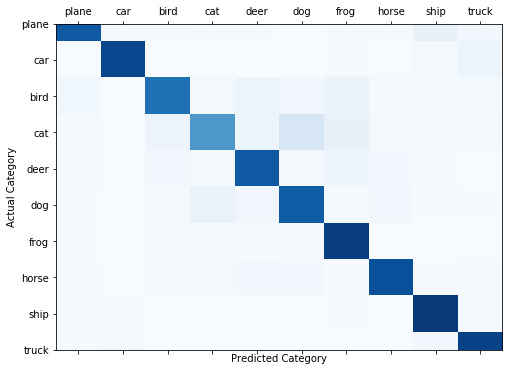

Category   - Accuracy
plane      - 84.1
car        - 90.9
bird       - 75.3
cat        - 59.1
deer       - 84.3
dog        - 83.1
frog       - 94.2
horse      - 87.7
ship       - 95.9
truck      - 93.0

Selected workers

[ 54  38 100   4  98  94   6  61  83  37  32   3  81  76  87]
Worker 54 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 4 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker
Worker 6 : is  Stealthy_Attacker
Worker 61 : is  Honest
Worker 83 : is  Honest
Worker 37 : is  Stealthy_Attacker
Worker 32 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 81 : is  Honest
Worker 76 : is  Honest
Worker 87 : is  Stealthy_Attacker

 | Global Training Round : 86 |


Worker 54 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.361272
Train Epoch: 1 [400/500	(81%)]	Loss: 0.244652
Train Epoch: 2 [0/500	(1%)]	Loss: 0.127965
Train Epoch: 2 [400/500	(81%)]	Loss: 0.156630
Train Epoch: 3 [0/500	(1%)]	Loss: 0.112147
Train Epoch: 3 [400/500	(81%)]	Loss: 0.087860
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119081
Train Epoch: 4 [400/500	(81%)]	Loss: 0.163473
Train Epoch: 5 [0/500	(1%)]	Loss: 0.115790
Train Epoch: 5 [400/500	(81%)]	Loss: 0.080274

Worker 54 ends training in Global Round:86 |

Worker 38 starts training in Global Round:86 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  86


Train Epoch: 1 [0/500	(1%)]	Loss: 1.333304
Train Epoch: 1 [400/500	(81%)]	Loss: 0.435305
Train Epoch: 2 [0/500	(1%)]	Loss: 0.249111
Train Epoch: 2 [400/500	(81%)]	Loss: 0.448700
Train Epoch: 3 [0/500	(1%)]	Loss: 0.156342
Train Epoch: 3 [400/500	(81%)]	Loss: 0.211405
Train Epoch: 4 [0/500	(1%)]	Loss: 0.140970
Train Epoch: 4 [400/500	(81%)]	Loss: 0.233327
Train Epoch: 5 [0/500	(1%)]	Loss: 0.144338
Train Epoch: 5 [400/500	(81%)]	Loss: 0.140885

Performed attacks 1
Worker 38 ends training in Global Round:86 |

Worker 100 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.208390
Train Epoch: 1 [400/500	(81%)]	Loss: 0.217934
Train Epoch: 2 [0/500	(1%)]	Loss: 0.165128
Train Epoch: 2 [400/500	(81%)]	Loss: 0.157644
Train Epoch: 3 [0/500	(1%)]	Loss: 0.088044
Train Epoch: 3 [400/500	(81%)]	Loss: 0.126800
Train Epoch: 4 [0/500	(1%)]	Loss: 0.073903
Train Epoch: 4 [400/500	(81%)]	Loss: 0.167802
Train Epoch: 5 [0/500	(1%)]	Loss: 0.045362
Train Epoch: 5 [400/500	(81%)]	Loss: 0.189079

Worker 100 ends training in Global Round:86 |

Worker 4 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.247394
Train Epoch: 1 [400/500	(81%)]	Loss: 0.196461
Train Epoch: 2 [0/500	(1%)]	Loss: 0.119987
Train Epoch: 2 [400/500	(81%)]	Loss: 0.102254
Train Epoch: 3 [0/500	(1%)]	Loss: 0.053774
Train Epoch: 3 [400/500	(81%)]	Loss: 0.163519
Train Epoch: 4 [0/500	(1%)]	Loss: 0.045439
Train Epoch: 4 [400/500	(81%)]	Loss: 0.143394
Train Epoch: 5 [0/500	(1%)]	Loss: 0.055632
Train Epoch: 5 [400/500	(81%)]	Loss: 0.110210

Worker 4 ends training in Global Round:86 |

Worker 98 starts training in Global Round:86 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  86


Train Epoch: 1 [0/500	(1%)]	Loss: 1.488074
Train Epoch: 1 [400/500	(81%)]	Loss: 0.413599
Train Epoch: 2 [0/500	(1%)]	Loss: 0.272022
Train Epoch: 2 [400/500	(81%)]	Loss: 0.565227
Train Epoch: 3 [0/500	(1%)]	Loss: 0.298393
Train Epoch: 3 [400/500	(81%)]	Loss: 0.248793
Train Epoch: 4 [0/500	(1%)]	Loss: 0.112557
Train Epoch: 4 [400/500	(81%)]	Loss: 0.227331
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155506
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135918

Performed attacks 2
Worker 98 ends training in Global Round:86 |

Worker 94 starts training in Global Round:86 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  86


Train Epoch: 1 [0/500	(1%)]	Loss: 0.860908
Train Epoch: 1 [400/500	(81%)]	Loss: 0.277408
Train Epoch: 2 [0/500	(1%)]	Loss: 0.079556
Train Epoch: 2 [400/500	(81%)]	Loss: 0.152648
Train Epoch: 3 [0/500	(1%)]	Loss: 0.169643
Train Epoch: 3 [400/500	(81%)]	Loss: 0.173095
Train Epoch: 4 [0/500	(1%)]	Loss: 0.133014
Train Epoch: 4 [400/500	(81%)]	Loss: 0.257873
Train Epoch: 5 [0/500	(1%)]	Loss: 0.106172
Train Epoch: 5 [400/500	(81%)]	Loss: 0.095079

Performed attacks 3
Worker 94 ends training in Global Round:86 |

Worker 6 starts training in Global Round:86 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  86


Train Epoch: 1 [0/500	(1%)]	Loss: 1.442403
Train Epoch: 1 [400/500	(81%)]	Loss: 0.642275
Train Epoch: 2 [0/500	(1%)]	Loss: 0.355959
Train Epoch: 2 [400/500	(81%)]	Loss: 0.269765
Train Epoch: 3 [0/500	(1%)]	Loss: 0.203800
Train Epoch: 3 [400/500	(81%)]	Loss: 0.224327
Train Epoch: 4 [0/500	(1%)]	Loss: 0.205782
Train Epoch: 4 [400/500	(81%)]	Loss: 0.209955
Train Epoch: 5 [0/500	(1%)]	Loss: 0.168175
Train Epoch: 5 [400/500	(81%)]	Loss: 0.150417

Performed attacks 4
Worker 6 ends training in Global Round:86 |

Worker 61 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.355272
Train Epoch: 1 [400/500	(81%)]	Loss: 0.367933
Train Epoch: 2 [0/500	(1%)]	Loss: 0.083857
Train Epoch: 2 [400/500	(81%)]	Loss: 0.233609
Train Epoch: 3 [0/500	(1%)]	Loss: 0.162938
Train Epoch: 3 [400/500	(81%)]	Loss: 0.251938
Train Epoch: 4 [0/500	(1%)]	Loss: 0.119516
Train Epoch: 4 [400/500	(81%)]	Loss: 0.185088
Train Epoch: 5 [0/500	(1%)]	Loss: 0.133064
Train Epoch: 5 [400/500	(81%)]	Loss: 0.130866

Worker 61 ends training in Global Round:86 |

Worker 83 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.111814
Train Epoch: 1 [400/500	(81%)]	Loss: 0.220534
Train Epoch: 2 [0/500	(1%)]	Loss: 0.112920
Train Epoch: 2 [400/500	(81%)]	Loss: 0.078124
Train Epoch: 3 [0/500	(1%)]	Loss: 0.066897
Train Epoch: 3 [400/500	(81%)]	Loss: 0.122536
Train Epoch: 4 [0/500	(1%)]	Loss: 0.066504
Train Epoch: 4 [400/500	(81%)]	Loss: 0.106403
Train Epoch: 5 [0/500	(1%)]	Loss: 0.098466
Train Epoch: 5 [400/500	(81%)]	Loss: 0.120361

Worker 83 ends training in Global Round:86 |

Worker 37 starts training in Global Round:86 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 37  in Global Round:  86


Train Epoch: 1 [0/500	(1%)]	Loss: 1.536349
Train Epoch: 1 [400/500	(81%)]	Loss: 0.612223
Train Epoch: 2 [0/500	(1%)]	Loss: 0.375175
Train Epoch: 2 [400/500	(81%)]	Loss: 0.511081
Train Epoch: 3 [0/500	(1%)]	Loss: 0.244441
Train Epoch: 3 [400/500	(81%)]	Loss: 0.229280
Train Epoch: 4 [0/500	(1%)]	Loss: 0.282348
Train Epoch: 4 [400/500	(81%)]	Loss: 0.305568
Train Epoch: 5 [0/500	(1%)]	Loss: 0.250835
Train Epoch: 5 [400/500	(81%)]	Loss: 0.127352

Performed attacks 5
Worker 37 ends training in Global Round:86 |

Worker 32 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.185960
Train Epoch: 1 [400/500	(81%)]	Loss: 0.304813
Train Epoch: 2 [0/500	(1%)]	Loss: 0.141864
Train Epoch: 2 [400/500	(81%)]	Loss: 0.163041
Train Epoch: 3 [0/500	(1%)]	Loss: 0.077451
Train Epoch: 3 [400/500	(81%)]	Loss: 0.100758
Train Epoch: 4 [0/500	(1%)]	Loss: 0.058183
Train Epoch: 4 [400/500	(81%)]	Loss: 0.051242
Train Epoch: 5 [0/500	(1%)]	Loss: 0.024918
Train Epoch: 5 [400/500	(81%)]	Loss: 0.059468

Worker 32 ends training in Global Round:86 |

Worker 3 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.371948
Train Epoch: 1 [400/500	(81%)]	Loss: 0.657953
Train Epoch: 2 [0/500	(1%)]	Loss: 0.298321
Train Epoch: 2 [400/500	(81%)]	Loss: 0.368547
Train Epoch: 3 [0/500	(1%)]	Loss: 0.304125
Train Epoch: 3 [400/500	(81%)]	Loss: 0.199423
Train Epoch: 4 [0/500	(1%)]	Loss: 0.156939
Train Epoch: 4 [400/500	(81%)]	Loss: 0.234354
Train Epoch: 5 [0/500	(1%)]	Loss: 0.166799
Train Epoch: 5 [400/500	(81%)]	Loss: 0.097320

Worker 3 ends training in Global Round:86 |

Worker 81 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.259514
Train Epoch: 1 [400/500	(81%)]	Loss: 0.400077
Train Epoch: 2 [0/500	(1%)]	Loss: 0.116895
Train Epoch: 2 [400/500	(81%)]	Loss: 0.263365
Train Epoch: 3 [0/500	(1%)]	Loss: 0.272755
Train Epoch: 3 [400/500	(81%)]	Loss: 0.172736
Train Epoch: 4 [0/500	(1%)]	Loss: 0.058295
Train Epoch: 4 [400/500	(81%)]	Loss: 0.095767
Train Epoch: 5 [0/500	(1%)]	Loss: 0.110701
Train Epoch: 5 [400/500	(81%)]	Loss: 0.200624

Worker 81 ends training in Global Round:86 |

Worker 76 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.202563
Train Epoch: 1 [400/500	(81%)]	Loss: 0.300669
Train Epoch: 2 [0/500	(1%)]	Loss: 0.110720
Train Epoch: 2 [400/500	(81%)]	Loss: 0.237145
Train Epoch: 3 [0/500	(1%)]	Loss: 0.068167
Train Epoch: 3 [400/500	(81%)]	Loss: 0.127638
Train Epoch: 4 [0/500	(1%)]	Loss: 0.065122
Train Epoch: 4 [400/500	(81%)]	Loss: 0.107523
Train Epoch: 5 [0/500	(1%)]	Loss: 0.060522
Train Epoch: 5 [400/500	(81%)]	Loss: 0.080362

Worker 76 ends training in Global Round:86 |

Worker 87 starts training in Global Round:86 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.508098
Train Epoch: 1 [400/500	(81%)]	Loss: 0.375616
Train Epoch: 2 [0/500	(1%)]	Loss: 0.246116
Train Epoch: 2 [400/500	(81%)]	Loss: 0.277538
Train Epoch: 3 [0/500	(1%)]	Loss: 0.161901
Train Epoch: 3 [400/500	(81%)]	Loss: 0.161499
Train Epoch: 4 [0/500	(1%)]	Loss: 0.107572
Train Epoch: 4 [400/500	(81%)]	Loss: 0.271174
Train Epoch: 5 [0/500	(1%)]	Loss: 0.125217
Train Epoch: 5 [400/500	(81%)]	Loss: 0.202500

Worker 87 ends training in Global Round:86 |
Last layer biases  [array([ 0.03623814, -0.03094644, -0.01352041,  0.03730682,  0.03857488,
       -0.01594038,  0.03668332, -0.00726453, -0.02479192, -0.04043772],
      dtype=float32), array([ 0.03546338, -0.03026492, -0.01050061,  0.03960103,  0.05220622,
       -0.01474882,  0.0402409 , -0.03297004, -0.02386478, -0.03926056],
      dtype=float32), array([ 0.03545598, -0.03116449, -0.01559709,  0.03474394,  0.04102676,
       -0.01563032,  0.03819109, -0.00871418, -0.02178294, -0.04062701],
      dtyp

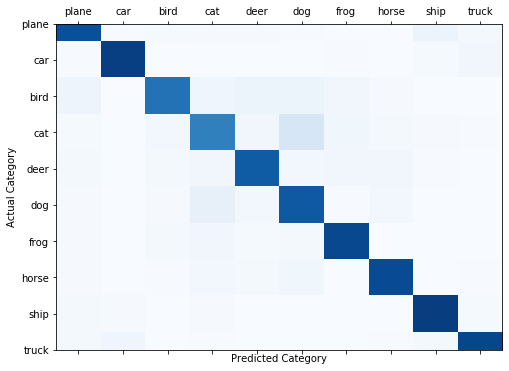

Category   - Accuracy
plane      - 87.7
car        - 93.9
bird       - 74.4
cat        - 68.9
deer       - 82.9
dog        - 84.0
frog       - 90.3
horse      - 89.2
ship       - 94.4
truck      - 91.1

Selected workers

[98 72 36 32 59 71 18 97 21 99 17 40 90 64 37]
Worker 98 : is  Stealthy_Attacker
Worker 72 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 32 : is  Honest
Worker 59 : is  Stealthy_Attacker
Worker 71 : is  Stealthy_Attacker
Worker 18 : is  Stealthy_Attacker
Worker 97 : is  Stealthy_Attacker
Worker 21 : is  Stealthy_Attacker
Worker 99 : is  Honest
Worker 17 : is  Honest
Worker 40 : is  Honest
Worker 90 : is  Honest
Worker 64 : is  Honest
Worker 37 : is  Stealthy_Attacker

 | Global Training Round : 87 |


Worker 98 starts training in Global Round:87 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  87


Train Epoch: 1 [0/500	(1%)]	Loss: 1.498667
Train Epoch: 1 [400/500	(81%)]	Loss: 0.704102
Train Epoch: 2 [0/500	(1%)]	Loss: 0.429241
Train Epoch: 2 [400/500	(81%)]	Loss: 0.460965
Train Epoch: 3 [0/500	(1%)]	Loss: 0.185949
Train Epoch: 3 [400/500	(81%)]	Loss: 0.399049
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143754
Train Epoch: 4 [400/500	(81%)]	Loss: 0.237597
Train Epoch: 5 [0/500	(1%)]	Loss: 0.114320
Train Epoch: 5 [400/500	(81%)]	Loss: 0.144537

Performed attacks 1
Worker 98 ends training in Global Round:87 |

Worker 72 starts training in Global Round:87 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  87


Train Epoch: 1 [0/500	(1%)]	Loss: 1.500583
Train Epoch: 1 [400/500	(81%)]	Loss: 0.636396
Train Epoch: 2 [0/500	(1%)]	Loss: 0.380636
Train Epoch: 2 [400/500	(81%)]	Loss: 0.478882
Train Epoch: 3 [0/500	(1%)]	Loss: 0.318635
Train Epoch: 3 [400/500	(81%)]	Loss: 0.230709
Train Epoch: 4 [0/500	(1%)]	Loss: 0.246778
Train Epoch: 4 [400/500	(81%)]	Loss: 0.151569
Train Epoch: 5 [0/500	(1%)]	Loss: 0.098881
Train Epoch: 5 [400/500	(81%)]	Loss: 0.243618

Performed attacks 2
Worker 72 ends training in Global Round:87 |

Worker 36 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.220153
Train Epoch: 1 [400/500	(81%)]	Loss: 0.317503
Train Epoch: 2 [0/500	(1%)]	Loss: 0.096161
Train Epoch: 2 [400/500	(81%)]	Loss: 0.171277
Train Epoch: 3 [0/500	(1%)]	Loss: 0.147384
Train Epoch: 3 [400/500	(81%)]	Loss: 0.237028
Train Epoch: 4 [0/500	(1%)]	Loss: 0.105030
Train Epoch: 4 [400/500	(81%)]	Loss: 0.191389
Train Epoch: 5 [0/500	(1%)]	Loss: 0.127604
Train Epoch: 5 [400/500	(81%)]	Loss: 0.093408

Worker 36 ends training in Global Round:87 |

Worker 32 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.200242
Train Epoch: 1 [400/500	(81%)]	Loss: 0.132230
Train Epoch: 2 [0/500	(1%)]	Loss: 0.044048
Train Epoch: 2 [400/500	(81%)]	Loss: 0.065373
Train Epoch: 3 [0/500	(1%)]	Loss: 0.020488
Train Epoch: 3 [400/500	(81%)]	Loss: 0.082721
Train Epoch: 4 [0/500	(1%)]	Loss: 0.043846
Train Epoch: 4 [400/500	(81%)]	Loss: 0.024984
Train Epoch: 5 [0/500	(1%)]	Loss: 0.036314
Train Epoch: 5 [400/500	(81%)]	Loss: 0.029445

Worker 32 ends training in Global Round:87 |

Worker 59 starts training in Global Round:87 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 59  in Global Round:  87


Train Epoch: 1 [0/500	(1%)]	Loss: 0.719960
Train Epoch: 1 [400/500	(81%)]	Loss: 0.265259
Train Epoch: 2 [0/500	(1%)]	Loss: 0.225230
Train Epoch: 2 [400/500	(81%)]	Loss: 0.249849
Train Epoch: 3 [0/500	(1%)]	Loss: 0.184250
Train Epoch: 3 [400/500	(81%)]	Loss: 0.234528
Train Epoch: 4 [0/500	(1%)]	Loss: 0.117160
Train Epoch: 4 [400/500	(81%)]	Loss: 0.229664
Train Epoch: 5 [0/500	(1%)]	Loss: 0.136139
Train Epoch: 5 [400/500	(81%)]	Loss: 0.193520

Performed attacks 3
Worker 59 ends training in Global Round:87 |

Worker 71 starts training in Global Round:87 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  87


Train Epoch: 1 [0/500	(1%)]	Loss: 1.295711
Train Epoch: 1 [400/500	(81%)]	Loss: 0.657897
Train Epoch: 2 [0/500	(1%)]	Loss: 0.267557
Train Epoch: 2 [400/500	(81%)]	Loss: 0.291174
Train Epoch: 3 [0/500	(1%)]	Loss: 0.236979
Train Epoch: 3 [400/500	(81%)]	Loss: 0.397629
Train Epoch: 4 [0/500	(1%)]	Loss: 0.121305
Train Epoch: 4 [400/500	(81%)]	Loss: 0.269511
Train Epoch: 5 [0/500	(1%)]	Loss: 0.152942
Train Epoch: 5 [400/500	(81%)]	Loss: 0.181796

Performed attacks 4
Worker 71 ends training in Global Round:87 |

Worker 18 starts training in Global Round:87 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 18  in Global Round:  87


Train Epoch: 1 [0/500	(1%)]	Loss: 1.407457
Train Epoch: 1 [400/500	(81%)]	Loss: 0.623511
Train Epoch: 2 [0/500	(1%)]	Loss: 0.273110
Train Epoch: 2 [400/500	(81%)]	Loss: 0.469116
Train Epoch: 3 [0/500	(1%)]	Loss: 0.210679
Train Epoch: 3 [400/500	(81%)]	Loss: 0.266869
Train Epoch: 4 [0/500	(1%)]	Loss: 0.285671
Train Epoch: 4 [400/500	(81%)]	Loss: 0.228211
Train Epoch: 5 [0/500	(1%)]	Loss: 0.185602
Train Epoch: 5 [400/500	(81%)]	Loss: 0.227375

Performed attacks 5
Worker 18 ends training in Global Round:87 |

Worker 97 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.440652
Train Epoch: 1 [400/500	(81%)]	Loss: 0.358853
Train Epoch: 2 [0/500	(1%)]	Loss: 0.139178
Train Epoch: 2 [400/500	(81%)]	Loss: 0.160002
Train Epoch: 3 [0/500	(1%)]	Loss: 0.108317
Train Epoch: 3 [400/500	(81%)]	Loss: 0.090052
Train Epoch: 4 [0/500	(1%)]	Loss: 0.060953
Train Epoch: 4 [400/500	(81%)]	Loss: 0.086870
Train Epoch: 5 [0/500	(1%)]	Loss: 0.066840
Train Epoch: 5 [400/500	(81%)]	Loss: 0.123157

Worker 97 ends training in Global Round:87 |

Worker 21 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.663837
Train Epoch: 1 [400/500	(81%)]	Loss: 0.507381
Train Epoch: 2 [0/500	(1%)]	Loss: 0.225428
Train Epoch: 2 [400/500	(81%)]	Loss: 0.506745
Train Epoch: 3 [0/500	(1%)]	Loss: 0.209046
Train Epoch: 3 [400/500	(81%)]	Loss: 0.436918
Train Epoch: 4 [0/500	(1%)]	Loss: 0.270453
Train Epoch: 4 [400/500	(81%)]	Loss: 0.272109
Train Epoch: 5 [0/500	(1%)]	Loss: 0.108695
Train Epoch: 5 [400/500	(81%)]	Loss: 0.237311

Worker 21 ends training in Global Round:87 |

Worker 99 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.214509
Train Epoch: 1 [400/500	(81%)]	Loss: 0.395023
Train Epoch: 2 [0/500	(1%)]	Loss: 0.123638
Train Epoch: 2 [400/500	(81%)]	Loss: 0.243724
Train Epoch: 3 [0/500	(1%)]	Loss: 0.141882
Train Epoch: 3 [400/500	(81%)]	Loss: 0.139116
Train Epoch: 4 [0/500	(1%)]	Loss: 0.101135
Train Epoch: 4 [400/500	(81%)]	Loss: 0.150234
Train Epoch: 5 [0/500	(1%)]	Loss: 0.172408
Train Epoch: 5 [400/500	(81%)]	Loss: 0.243193

Worker 99 ends training in Global Round:87 |

Worker 17 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.263680
Train Epoch: 1 [400/500	(81%)]	Loss: 0.199242
Train Epoch: 2 [0/500	(1%)]	Loss: 0.097178
Train Epoch: 2 [400/500	(81%)]	Loss: 0.204560
Train Epoch: 3 [0/500	(1%)]	Loss: 0.154954
Train Epoch: 3 [400/500	(81%)]	Loss: 0.148610
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149586
Train Epoch: 4 [400/500	(81%)]	Loss: 0.161865
Train Epoch: 5 [0/500	(1%)]	Loss: 0.065313
Train Epoch: 5 [400/500	(81%)]	Loss: 0.123068

Worker 17 ends training in Global Round:87 |

Worker 40 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.293017
Train Epoch: 1 [400/500	(81%)]	Loss: 0.281992
Train Epoch: 2 [0/500	(1%)]	Loss: 0.133350
Train Epoch: 2 [400/500	(81%)]	Loss: 0.207516
Train Epoch: 3 [0/500	(1%)]	Loss: 0.127206
Train Epoch: 3 [400/500	(81%)]	Loss: 0.149107
Train Epoch: 4 [0/500	(1%)]	Loss: 0.055886
Train Epoch: 4 [400/500	(81%)]	Loss: 0.091545
Train Epoch: 5 [0/500	(1%)]	Loss: 0.132284
Train Epoch: 5 [400/500	(81%)]	Loss: 0.072431

Worker 40 ends training in Global Round:87 |

Worker 90 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.487276
Train Epoch: 1 [400/500	(81%)]	Loss: 0.332566
Train Epoch: 2 [0/500	(1%)]	Loss: 0.306079
Train Epoch: 2 [400/500	(81%)]	Loss: 0.284619
Train Epoch: 3 [0/500	(1%)]	Loss: 0.201409
Train Epoch: 3 [400/500	(81%)]	Loss: 0.129830
Train Epoch: 4 [0/500	(1%)]	Loss: 0.190031
Train Epoch: 4 [400/500	(81%)]	Loss: 0.212311
Train Epoch: 5 [0/500	(1%)]	Loss: 0.210914
Train Epoch: 5 [400/500	(81%)]	Loss: 0.191600

Worker 90 ends training in Global Round:87 |

Worker 64 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.384400
Train Epoch: 1 [400/500	(81%)]	Loss: 0.183118
Train Epoch: 2 [0/500	(1%)]	Loss: 0.079658
Train Epoch: 2 [400/500	(81%)]	Loss: 0.095526
Train Epoch: 3 [0/500	(1%)]	Loss: 0.079245
Train Epoch: 3 [400/500	(81%)]	Loss: 0.082102
Train Epoch: 4 [0/500	(1%)]	Loss: 0.039247
Train Epoch: 4 [400/500	(81%)]	Loss: 0.080973
Train Epoch: 5 [0/500	(1%)]	Loss: 0.016991
Train Epoch: 5 [400/500	(81%)]	Loss: 0.061341

Worker 64 ends training in Global Round:87 |

Worker 37 starts training in Global Round:87 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.618738
Train Epoch: 1 [400/500	(81%)]	Loss: 0.334215
Train Epoch: 2 [0/500	(1%)]	Loss: 0.165301
Train Epoch: 2 [400/500	(81%)]	Loss: 0.374783
Train Epoch: 3 [0/500	(1%)]	Loss: 0.322077
Train Epoch: 3 [400/500	(81%)]	Loss: 0.340438
Train Epoch: 4 [0/500	(1%)]	Loss: 0.125146
Train Epoch: 4 [400/500	(81%)]	Loss: 0.221485
Train Epoch: 5 [0/500	(1%)]	Loss: 0.112432
Train Epoch: 5 [400/500	(81%)]	Loss: 0.178701

Worker 37 ends training in Global Round:87 |
Last layer biases  [array([ 0.03435386, -0.03195725, -0.00583764,  0.03762554,  0.05289202,
       -0.01372986,  0.03895007, -0.03272501, -0.02388258, -0.03978739],
      dtype=float32), array([ 0.03694962, -0.03413757, -0.0148533 ,  0.03961821,  0.05211961,
       -0.01221876,  0.03723847, -0.02996541, -0.02106423, -0.0377849 ],
      dtype=float32), array([ 0.03569724, -0.03042299, -0.0163622 ,  0.03791294,  0.03950078,
       -0.01501138,  0.03797943, -0.00971011, -0.02325262, -0.04042933],
      dtyp

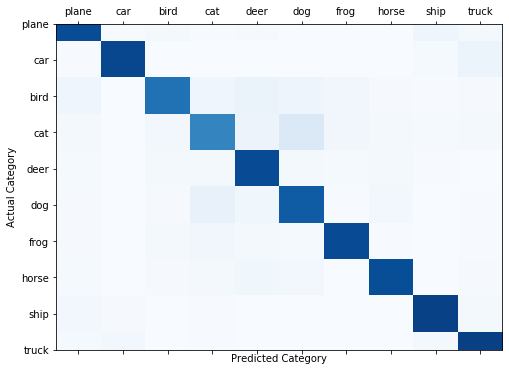

Category   - Accuracy
plane      - 88.9
car        - 90.9
bird       - 74.8
cat        - 67.5
deer       - 89.1
dog        - 83.2
frog       - 89.1
horse      - 88.4
ship       - 93.3
truck      - 93.5

Selected workers

[60 17 44  6 68 38 71 95 19 86 13 77 33 31 57]
Worker 60 : is  Honest
Worker 17 : is  Honest
Worker 44 : is  Stealthy_Attacker
Worker 6 : is  Stealthy_Attacker
Worker 68 : is  Honest
Worker 38 : is  Stealthy_Attacker
Worker 71 : is  Stealthy_Attacker
Worker 95 : is  Honest
Worker 19 : is  Stealthy_Attacker
Worker 86 : is  Stealthy_Attacker
Worker 13 : is  Stealthy_Attacker
Worker 77 : is  Honest
Worker 33 : is  Stealthy_Attacker
Worker 31 : is  Stealthy_Attacker
Worker 57 : is  Honest

 | Global Training Round : 88 |


Worker 60 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.238425
Train Epoch: 1 [400/500	(81%)]	Loss: 0.419581
Train Epoch: 2 [0/500	(1%)]	Loss: 0.134387
Train Epoch: 2 [400/500	(81%)]	Loss: 0.237675
Train Epoch: 3 [0/500	(1%)]	Loss: 0.079624
Train Epoch: 3 [400/500	(81%)]	Loss: 0.197666
Train Epoch: 4 [0/500	(1%)]	Loss: 0.114680
Train Epoch: 4 [400/500	(81%)]	Loss: 0.166028
Train Epoch: 5 [0/500	(1%)]	Loss: 0.148169
Train Epoch: 5 [400/500	(81%)]	Loss: 0.123891

Worker 60 ends training in Global Round:88 |

Worker 17 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.059075
Train Epoch: 1 [400/500	(81%)]	Loss: 0.180496
Train Epoch: 2 [0/500	(1%)]	Loss: 0.088471
Train Epoch: 2 [400/500	(81%)]	Loss: 0.101604
Train Epoch: 3 [0/500	(1%)]	Loss: 0.072938
Train Epoch: 3 [400/500	(81%)]	Loss: 0.098284
Train Epoch: 4 [0/500	(1%)]	Loss: 0.062355
Train Epoch: 4 [400/500	(81%)]	Loss: 0.091779
Train Epoch: 5 [0/500	(1%)]	Loss: 0.032178
Train Epoch: 5 [400/500	(81%)]	Loss: 0.047757

Worker 17 ends training in Global Round:88 |

Worker 44 starts training in Global Round:88 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 44  in Global Round:  88


Train Epoch: 1 [0/500	(1%)]	Loss: 1.107058
Train Epoch: 1 [400/500	(81%)]	Loss: 0.436658
Train Epoch: 2 [0/500	(1%)]	Loss: 0.151108
Train Epoch: 2 [400/500	(81%)]	Loss: 0.466484
Train Epoch: 3 [0/500	(1%)]	Loss: 0.229181
Train Epoch: 3 [400/500	(81%)]	Loss: 0.346015
Train Epoch: 4 [0/500	(1%)]	Loss: 0.205061
Train Epoch: 4 [400/500	(81%)]	Loss: 0.281033
Train Epoch: 5 [0/500	(1%)]	Loss: 0.163341
Train Epoch: 5 [400/500	(81%)]	Loss: 0.126915

Performed attacks 1
Worker 44 ends training in Global Round:88 |

Worker 6 starts training in Global Round:88 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 6  in Global Round:  88


Train Epoch: 1 [0/500	(1%)]	Loss: 1.041533
Train Epoch: 1 [400/500	(81%)]	Loss: 0.735469
Train Epoch: 2 [0/500	(1%)]	Loss: 0.294663
Train Epoch: 2 [400/500	(81%)]	Loss: 0.379951
Train Epoch: 3 [0/500	(1%)]	Loss: 0.185305
Train Epoch: 3 [400/500	(81%)]	Loss: 0.220447
Train Epoch: 4 [0/500	(1%)]	Loss: 0.102031
Train Epoch: 4 [400/500	(81%)]	Loss: 0.222621
Train Epoch: 5 [0/500	(1%)]	Loss: 0.167839
Train Epoch: 5 [400/500	(81%)]	Loss: 0.135222

Performed attacks 2
Worker 6 ends training in Global Round:88 |

Worker 68 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.379293
Train Epoch: 1 [400/500	(81%)]	Loss: 0.348469
Train Epoch: 2 [0/500	(1%)]	Loss: 0.103283
Train Epoch: 2 [400/500	(81%)]	Loss: 0.299614
Train Epoch: 3 [0/500	(1%)]	Loss: 0.114820
Train Epoch: 3 [400/500	(81%)]	Loss: 0.173202
Train Epoch: 4 [0/500	(1%)]	Loss: 0.104409
Train Epoch: 4 [400/500	(81%)]	Loss: 0.215675
Train Epoch: 5 [0/500	(1%)]	Loss: 0.072400
Train Epoch: 5 [400/500	(81%)]	Loss: 0.156352

Worker 68 ends training in Global Round:88 |

Worker 38 starts training in Global Round:88 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 38  in Global Round:  88


Train Epoch: 1 [0/500	(1%)]	Loss: 1.142040
Train Epoch: 1 [400/500	(81%)]	Loss: 0.565321
Train Epoch: 2 [0/500	(1%)]	Loss: 0.373201
Train Epoch: 2 [400/500	(81%)]	Loss: 0.359043
Train Epoch: 3 [0/500	(1%)]	Loss: 0.183709
Train Epoch: 3 [400/500	(81%)]	Loss: 0.416808
Train Epoch: 4 [0/500	(1%)]	Loss: 0.275456
Train Epoch: 4 [400/500	(81%)]	Loss: 0.197215
Train Epoch: 5 [0/500	(1%)]	Loss: 0.128454
Train Epoch: 5 [400/500	(81%)]	Loss: 0.088703

Performed attacks 3
Worker 38 ends training in Global Round:88 |

Worker 71 starts training in Global Round:88 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 71  in Global Round:  88


Train Epoch: 1 [0/500	(1%)]	Loss: 1.245630
Train Epoch: 1 [400/500	(81%)]	Loss: 0.744443
Train Epoch: 2 [0/500	(1%)]	Loss: 0.325512
Train Epoch: 2 [400/500	(81%)]	Loss: 0.361725
Train Epoch: 3 [0/500	(1%)]	Loss: 0.281789
Train Epoch: 3 [400/500	(81%)]	Loss: 0.272585
Train Epoch: 4 [0/500	(1%)]	Loss: 0.212534
Train Epoch: 4 [400/500	(81%)]	Loss: 0.165311
Train Epoch: 5 [0/500	(1%)]	Loss: 0.155971
Train Epoch: 5 [400/500	(81%)]	Loss: 0.287798

Performed attacks 4
Worker 71 ends training in Global Round:88 |

Worker 95 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.154172
Train Epoch: 1 [400/500	(81%)]	Loss: 0.165070
Train Epoch: 2 [0/500	(1%)]	Loss: 0.126949
Train Epoch: 2 [400/500	(81%)]	Loss: 0.187343
Train Epoch: 3 [0/500	(1%)]	Loss: 0.107829
Train Epoch: 3 [400/500	(81%)]	Loss: 0.085460
Train Epoch: 4 [0/500	(1%)]	Loss: 0.045320
Train Epoch: 4 [400/500	(81%)]	Loss: 0.100431
Train Epoch: 5 [0/500	(1%)]	Loss: 0.076189
Train Epoch: 5 [400/500	(81%)]	Loss: 0.071440

Worker 95 ends training in Global Round:88 |

Worker 19 starts training in Global Round:88 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 19  in Global Round:  88


Train Epoch: 1 [0/500	(1%)]	Loss: 1.027142
Train Epoch: 1 [400/500	(81%)]	Loss: 0.528465
Train Epoch: 2 [0/500	(1%)]	Loss: 0.178409
Train Epoch: 2 [400/500	(81%)]	Loss: 0.214526
Train Epoch: 3 [0/500	(1%)]	Loss: 0.176461
Train Epoch: 3 [400/500	(81%)]	Loss: 0.159566
Train Epoch: 4 [0/500	(1%)]	Loss: 0.110363
Train Epoch: 4 [400/500	(81%)]	Loss: 0.094067
Train Epoch: 5 [0/500	(1%)]	Loss: 0.083574
Train Epoch: 5 [400/500	(81%)]	Loss: 0.160419

Performed attacks 5
Worker 19 ends training in Global Round:88 |

Worker 86 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.272353
Train Epoch: 1 [400/500	(81%)]	Loss: 0.416394
Train Epoch: 2 [0/500	(1%)]	Loss: 0.187792
Train Epoch: 2 [400/500	(81%)]	Loss: 0.109174
Train Epoch: 3 [0/500	(1%)]	Loss: 0.050820
Train Epoch: 3 [400/500	(81%)]	Loss: 0.178483
Train Epoch: 4 [0/500	(1%)]	Loss: 0.144529
Train Epoch: 4 [400/500	(81%)]	Loss: 0.105184
Train Epoch: 5 [0/500	(1%)]	Loss: 0.047195
Train Epoch: 5 [400/500	(81%)]	Loss: 0.320651

Worker 86 ends training in Global Round:88 |

Worker 13 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.272028
Train Epoch: 1 [400/500	(81%)]	Loss: 0.217790
Train Epoch: 2 [0/500	(1%)]	Loss: 0.155064
Train Epoch: 2 [400/500	(81%)]	Loss: 0.164098
Train Epoch: 3 [0/500	(1%)]	Loss: 0.104228
Train Epoch: 3 [400/500	(81%)]	Loss: 0.150412
Train Epoch: 4 [0/500	(1%)]	Loss: 0.172799
Train Epoch: 4 [400/500	(81%)]	Loss: 0.104513
Train Epoch: 5 [0/500	(1%)]	Loss: 0.073443
Train Epoch: 5 [400/500	(81%)]	Loss: 0.109199

Worker 13 ends training in Global Round:88 |

Worker 77 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.404431
Train Epoch: 1 [400/500	(81%)]	Loss: 0.319800
Train Epoch: 2 [0/500	(1%)]	Loss: 0.193511
Train Epoch: 2 [400/500	(81%)]	Loss: 0.451889
Train Epoch: 3 [0/500	(1%)]	Loss: 0.172717
Train Epoch: 3 [400/500	(81%)]	Loss: 0.429163
Train Epoch: 4 [0/500	(1%)]	Loss: 0.098611
Train Epoch: 4 [400/500	(81%)]	Loss: 0.293213
Train Epoch: 5 [0/500	(1%)]	Loss: 0.194492
Train Epoch: 5 [400/500	(81%)]	Loss: 0.126252

Worker 77 ends training in Global Round:88 |

Worker 33 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.409490
Train Epoch: 1 [400/500	(81%)]	Loss: 0.723830
Train Epoch: 2 [0/500	(1%)]	Loss: 0.205620
Train Epoch: 2 [400/500	(81%)]	Loss: 0.372960
Train Epoch: 3 [0/500	(1%)]	Loss: 0.187876
Train Epoch: 3 [400/500	(81%)]	Loss: 0.266414
Train Epoch: 4 [0/500	(1%)]	Loss: 0.150594
Train Epoch: 4 [400/500	(81%)]	Loss: 0.175767
Train Epoch: 5 [0/500	(1%)]	Loss: 0.073933
Train Epoch: 5 [400/500	(81%)]	Loss: 0.089550

Worker 33 ends training in Global Round:88 |

Worker 31 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.201098
Train Epoch: 1 [400/500	(81%)]	Loss: 0.292318
Train Epoch: 2 [0/500	(1%)]	Loss: 0.288537
Train Epoch: 2 [400/500	(81%)]	Loss: 0.207508
Train Epoch: 3 [0/500	(1%)]	Loss: 0.124827
Train Epoch: 3 [400/500	(81%)]	Loss: 0.182628
Train Epoch: 4 [0/500	(1%)]	Loss: 0.149477
Train Epoch: 4 [400/500	(81%)]	Loss: 0.225876
Train Epoch: 5 [0/500	(1%)]	Loss: 0.087322
Train Epoch: 5 [400/500	(81%)]	Loss: 0.155259

Worker 31 ends training in Global Round:88 |

Worker 57 starts training in Global Round:88 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.223506
Train Epoch: 1 [400/500	(81%)]	Loss: 0.209336
Train Epoch: 2 [0/500	(1%)]	Loss: 0.065809
Train Epoch: 2 [400/500	(81%)]	Loss: 0.070852
Train Epoch: 3 [0/500	(1%)]	Loss: 0.187383
Train Epoch: 3 [400/500	(81%)]	Loss: 0.197579
Train Epoch: 4 [0/500	(1%)]	Loss: 0.092834
Train Epoch: 4 [400/500	(81%)]	Loss: 0.153212
Train Epoch: 5 [0/500	(1%)]	Loss: 0.102576
Train Epoch: 5 [400/500	(81%)]	Loss: 0.115786

Worker 57 ends training in Global Round:88 |
Last layer biases  [array([ 0.03396702, -0.03212775, -0.0140474 ,  0.03620679,  0.04058537,
       -0.01425877,  0.03686061, -0.00719814, -0.02320618, -0.04087981],
      dtype=float32), array([ 0.03413158, -0.03159299, -0.01438676,  0.03594802,  0.03805066,
       -0.014975  ,  0.03849698, -0.00877121, -0.0217329 , -0.03926665],
      dtype=float32), array([ 0.03482296, -0.03353575, -0.0123178 ,  0.03751072,  0.05296478,
       -0.01266358,  0.03942512, -0.03184138, -0.01973173, -0.03873162],
      dtyp

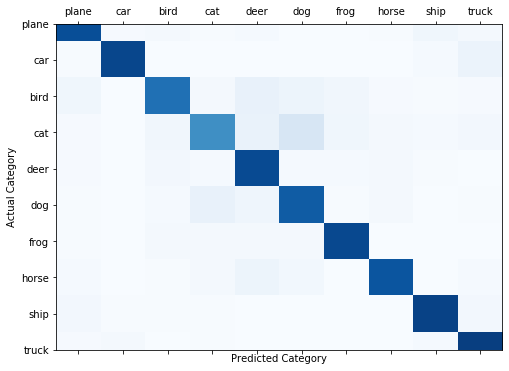

Category   - Accuracy
plane      - 88.4
car        - 91.4
bird       - 75.3
cat        - 63.3
deer       - 89.6
dog        - 83.0
frog       - 90.6
horse      - 85.9
ship       - 92.8
truck      - 94.5

Selected workers

[26  9 66 94 67 46 83 52 75 70 47 10 95 64 74]
Worker 26 : is  Honest
Worker 9 : is  Honest
Worker 66 : is  Stealthy_Attacker
Worker 94 : is  Stealthy_Attacker
Worker 67 : is  Stealthy_Attacker
Worker 46 : is  Stealthy_Attacker
Worker 83 : is  Honest
Worker 52 : is  Stealthy_Attacker
Worker 75 : is  Stealthy_Attacker
Worker 70 : is  Honest
Worker 47 : is  Honest
Worker 10 : is  Honest
Worker 95 : is  Honest
Worker 64 : is  Honest
Worker 74 : is  Honest

 | Global Training Round : 89 |


Worker 26 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.183794
Train Epoch: 1 [400/500	(81%)]	Loss: 0.122986
Train Epoch: 2 [0/500	(1%)]	Loss: 0.078601
Train Epoch: 2 [400/500	(81%)]	Loss: 0.096593
Train Epoch: 3 [0/500	(1%)]	Loss: 0.089312
Train Epoch: 3 [400/500	(81%)]	Loss: 0.057586
Train Epoch: 4 [0/500	(1%)]	Loss: 0.084886
Train Epoch: 4 [400/500	(81%)]	Loss: 0.059877
Train Epoch: 5 [0/500	(1%)]	Loss: 0.058157
Train Epoch: 5 [400/500	(81%)]	Loss: 0.053678

Worker 26 ends training in Global Round:89 |

Worker 9 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.263886
Train Epoch: 1 [400/500	(81%)]	Loss: 0.402626
Train Epoch: 2 [0/500	(1%)]	Loss: 0.136017
Train Epoch: 2 [400/500	(81%)]	Loss: 0.205084
Train Epoch: 3 [0/500	(1%)]	Loss: 0.139959
Train Epoch: 3 [400/500	(81%)]	Loss: 0.147034
Train Epoch: 4 [0/500	(1%)]	Loss: 0.098537
Train Epoch: 4 [400/500	(81%)]	Loss: 0.125120
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064099
Train Epoch: 5 [400/500	(81%)]	Loss: 0.117908

Worker 9 ends training in Global Round:89 |

Worker 66 starts training in Global Round:89 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 66  in Global Round:  89


Train Epoch: 1 [0/500	(1%)]	Loss: 1.488849
Train Epoch: 1 [400/500	(81%)]	Loss: 0.569877
Train Epoch: 2 [0/500	(1%)]	Loss: 0.379691
Train Epoch: 2 [400/500	(81%)]	Loss: 0.296456
Train Epoch: 3 [0/500	(1%)]	Loss: 0.265411
Train Epoch: 3 [400/500	(81%)]	Loss: 0.168582
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164630
Train Epoch: 4 [400/500	(81%)]	Loss: 0.159362
Train Epoch: 5 [0/500	(1%)]	Loss: 0.111272
Train Epoch: 5 [400/500	(81%)]	Loss: 0.143805

Performed attacks 1
Worker 66 ends training in Global Round:89 |

Worker 94 starts training in Global Round:89 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 94  in Global Round:  89


Train Epoch: 1 [0/500	(1%)]	Loss: 1.033229
Train Epoch: 1 [400/500	(81%)]	Loss: 0.528383
Train Epoch: 2 [0/500	(1%)]	Loss: 0.256734
Train Epoch: 2 [400/500	(81%)]	Loss: 0.470773
Train Epoch: 3 [0/500	(1%)]	Loss: 0.195327
Train Epoch: 3 [400/500	(81%)]	Loss: 0.271990
Train Epoch: 4 [0/500	(1%)]	Loss: 0.194321
Train Epoch: 4 [400/500	(81%)]	Loss: 0.166862
Train Epoch: 5 [0/500	(1%)]	Loss: 0.322053
Train Epoch: 5 [400/500	(81%)]	Loss: 0.214302

Performed attacks 2
Worker 94 ends training in Global Round:89 |

Worker 67 starts training in Global Round:89 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 67  in Global Round:  89


Train Epoch: 1 [0/500	(1%)]	Loss: 1.613097
Train Epoch: 1 [400/500	(81%)]	Loss: 0.911230
Train Epoch: 2 [0/500	(1%)]	Loss: 0.224714
Train Epoch: 2 [400/500	(81%)]	Loss: 0.348069
Train Epoch: 3 [0/500	(1%)]	Loss: 0.267717
Train Epoch: 3 [400/500	(81%)]	Loss: 0.191480
Train Epoch: 4 [0/500	(1%)]	Loss: 0.184134
Train Epoch: 4 [400/500	(81%)]	Loss: 0.214856
Train Epoch: 5 [0/500	(1%)]	Loss: 0.154082
Train Epoch: 5 [400/500	(81%)]	Loss: 0.168573

Performed attacks 3
Worker 67 ends training in Global Round:89 |

Worker 46 starts training in Global Round:89 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 46  in Global Round:  89


Train Epoch: 1 [0/500	(1%)]	Loss: 1.243806
Train Epoch: 1 [400/500	(81%)]	Loss: 0.229193
Train Epoch: 2 [0/500	(1%)]	Loss: 0.298250
Train Epoch: 2 [400/500	(81%)]	Loss: 0.247252
Train Epoch: 3 [0/500	(1%)]	Loss: 0.114142
Train Epoch: 3 [400/500	(81%)]	Loss: 0.209869
Train Epoch: 4 [0/500	(1%)]	Loss: 0.080465
Train Epoch: 4 [400/500	(81%)]	Loss: 0.174990
Train Epoch: 5 [0/500	(1%)]	Loss: 0.131856
Train Epoch: 5 [400/500	(81%)]	Loss: 0.070634

Performed attacks 4
Worker 46 ends training in Global Round:89 |

Worker 83 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.138142
Train Epoch: 1 [400/500	(81%)]	Loss: 0.150926
Train Epoch: 2 [0/500	(1%)]	Loss: 0.053982
Train Epoch: 2 [400/500	(81%)]	Loss: 0.115903
Train Epoch: 3 [0/500	(1%)]	Loss: 0.081186
Train Epoch: 3 [400/500	(81%)]	Loss: 0.040085
Train Epoch: 4 [0/500	(1%)]	Loss: 0.022192
Train Epoch: 4 [400/500	(81%)]	Loss: 0.025493
Train Epoch: 5 [0/500	(1%)]	Loss: 0.049565
Train Epoch: 5 [400/500	(81%)]	Loss: 0.017405

Worker 83 ends training in Global Round:89 |

Worker 52 starts training in Global Round:89 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 52  in Global Round:  89


Train Epoch: 1 [0/500	(1%)]	Loss: 1.101922
Train Epoch: 1 [400/500	(81%)]	Loss: 0.510318
Train Epoch: 2 [0/500	(1%)]	Loss: 0.217803
Train Epoch: 2 [400/500	(81%)]	Loss: 0.423010
Train Epoch: 3 [0/500	(1%)]	Loss: 0.262254
Train Epoch: 3 [400/500	(81%)]	Loss: 0.372495
Train Epoch: 4 [0/500	(1%)]	Loss: 0.152235
Train Epoch: 4 [400/500	(81%)]	Loss: 0.112616
Train Epoch: 5 [0/500	(1%)]	Loss: 0.218757
Train Epoch: 5 [400/500	(81%)]	Loss: 0.119720

Performed attacks 5
Worker 52 ends training in Global Round:89 |

Worker 75 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.428368
Train Epoch: 1 [400/500	(81%)]	Loss: 0.411354
Train Epoch: 2 [0/500	(1%)]	Loss: 0.112495
Train Epoch: 2 [400/500	(81%)]	Loss: 0.321506
Train Epoch: 3 [0/500	(1%)]	Loss: 0.078358
Train Epoch: 3 [400/500	(81%)]	Loss: 0.080468
Train Epoch: 4 [0/500	(1%)]	Loss: 0.204947
Train Epoch: 4 [400/500	(81%)]	Loss: 0.081429
Train Epoch: 5 [0/500	(1%)]	Loss: 0.023435
Train Epoch: 5 [400/500	(81%)]	Loss: 0.232790

Worker 75 ends training in Global Round:89 |

Worker 70 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.234788
Train Epoch: 1 [400/500	(81%)]	Loss: 0.168173
Train Epoch: 2 [0/500	(1%)]	Loss: 0.145187
Train Epoch: 2 [400/500	(81%)]	Loss: 0.222896
Train Epoch: 3 [0/500	(1%)]	Loss: 0.155543
Train Epoch: 3 [400/500	(81%)]	Loss: 0.160041
Train Epoch: 4 [0/500	(1%)]	Loss: 0.070016
Train Epoch: 4 [400/500	(81%)]	Loss: 0.184822
Train Epoch: 5 [0/500	(1%)]	Loss: 0.093864
Train Epoch: 5 [400/500	(81%)]	Loss: 0.087690

Worker 70 ends training in Global Round:89 |

Worker 47 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.309575
Train Epoch: 1 [400/500	(81%)]	Loss: 0.245567
Train Epoch: 2 [0/500	(1%)]	Loss: 0.127655
Train Epoch: 2 [400/500	(81%)]	Loss: 0.163447
Train Epoch: 3 [0/500	(1%)]	Loss: 0.136337
Train Epoch: 3 [400/500	(81%)]	Loss: 0.147716
Train Epoch: 4 [0/500	(1%)]	Loss: 0.051938
Train Epoch: 4 [400/500	(81%)]	Loss: 0.137876
Train Epoch: 5 [0/500	(1%)]	Loss: 0.036575
Train Epoch: 5 [400/500	(81%)]	Loss: 0.063386

Worker 47 ends training in Global Round:89 |

Worker 10 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.214988
Train Epoch: 1 [400/500	(81%)]	Loss: 0.279478
Train Epoch: 2 [0/500	(1%)]	Loss: 0.156842
Train Epoch: 2 [400/500	(81%)]	Loss: 0.221160
Train Epoch: 3 [0/500	(1%)]	Loss: 0.056264
Train Epoch: 3 [400/500	(81%)]	Loss: 0.138515
Train Epoch: 4 [0/500	(1%)]	Loss: 0.060066
Train Epoch: 4 [400/500	(81%)]	Loss: 0.095228
Train Epoch: 5 [0/500	(1%)]	Loss: 0.052366
Train Epoch: 5 [400/500	(81%)]	Loss: 0.060214

Worker 10 ends training in Global Round:89 |

Worker 95 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.090465
Train Epoch: 1 [400/500	(81%)]	Loss: 0.086346
Train Epoch: 2 [0/500	(1%)]	Loss: 0.051278
Train Epoch: 2 [400/500	(81%)]	Loss: 0.094192
Train Epoch: 3 [0/500	(1%)]	Loss: 0.047713
Train Epoch: 3 [400/500	(81%)]	Loss: 0.126349
Train Epoch: 4 [0/500	(1%)]	Loss: 0.023173
Train Epoch: 4 [400/500	(81%)]	Loss: 0.049049
Train Epoch: 5 [0/500	(1%)]	Loss: 0.085353
Train Epoch: 5 [400/500	(81%)]	Loss: 0.082124

Worker 95 ends training in Global Round:89 |

Worker 64 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.149282
Train Epoch: 1 [400/500	(81%)]	Loss: 0.219685
Train Epoch: 2 [0/500	(1%)]	Loss: 0.077479
Train Epoch: 2 [400/500	(81%)]	Loss: 0.079306
Train Epoch: 3 [0/500	(1%)]	Loss: 0.057537
Train Epoch: 3 [400/500	(81%)]	Loss: 0.045941
Train Epoch: 4 [0/500	(1%)]	Loss: 0.033272
Train Epoch: 4 [400/500	(81%)]	Loss: 0.067866
Train Epoch: 5 [0/500	(1%)]	Loss: 0.057276
Train Epoch: 5 [400/500	(81%)]	Loss: 0.102263

Worker 64 ends training in Global Round:89 |

Worker 74 starts training in Global Round:89 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.297736
Train Epoch: 1 [400/500	(81%)]	Loss: 0.236417
Train Epoch: 2 [0/500	(1%)]	Loss: 0.117245
Train Epoch: 2 [400/500	(81%)]	Loss: 0.099766
Train Epoch: 3 [0/500	(1%)]	Loss: 0.097600
Train Epoch: 3 [400/500	(81%)]	Loss: 0.194419
Train Epoch: 4 [0/500	(1%)]	Loss: 0.072481
Train Epoch: 4 [400/500	(81%)]	Loss: 0.118815
Train Epoch: 5 [0/500	(1%)]	Loss: 0.031086
Train Epoch: 5 [400/500	(81%)]	Loss: 0.082036

Worker 74 ends training in Global Round:89 |
Last layer biases  [array([ 0.0355631 , -0.03111506, -0.01485248,  0.03842992,  0.0393067 ,
       -0.01627077,  0.03698118, -0.00904467, -0.02340857, -0.03968765],
      dtype=float32), array([ 0.03411902, -0.0316157 , -0.01655297,  0.03821718,  0.04013069,
       -0.01523215,  0.03905825, -0.00856187, -0.02268787, -0.04097286],
      dtype=float32), array([ 0.03306206, -0.02940508, -0.01305711,  0.04329921,  0.05110367,
       -0.01412639,  0.03805758, -0.03269928, -0.0229608 , -0.03737212],
      dtyp

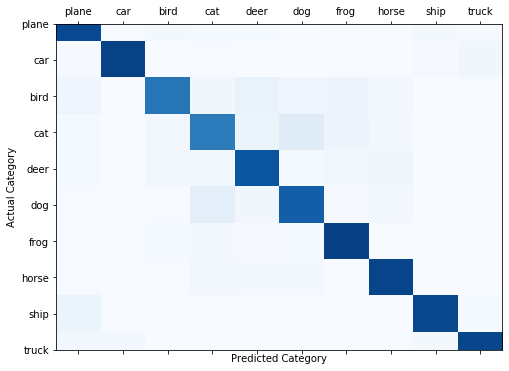

Category   - Accuracy
plane      - 90.2
car        - 92.8
bird       - 72.9
cat        - 70.5
deer       - 85.6
dog        - 81.8
frog       - 93.5
horse      - 91.9
ship       - 90.6
truck      - 91.6

Selected workers

[ 41  87  27  51  61  98 100  49  56  57   5  80   3  95  16]
Worker 41 : is  Stealthy_Attacker
Worker 87 : is  Stealthy_Attacker
Worker 27 : is  Stealthy_Attacker
Worker 51 : is  Stealthy_Attacker
Worker 61 : is  Honest
Worker 98 : is  Stealthy_Attacker
Worker 100 : is  Honest
Worker 49 : is  Honest
Worker 56 : is  Honest
Worker 57 : is  Honest
Worker 5 : is  Honest
Worker 80 : is  Honest
Worker 3 : is  Stealthy_Attacker
Worker 95 : is  Honest
Worker 16 : is  Stealthy_Attacker

 | Global Training Round : 90 |


Worker 41 starts training in Global Round:90 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 41  in Global Round:  90


Train Epoch: 1 [0/500	(1%)]	Loss: 1.826677
Train Epoch: 1 [400/500	(81%)]	Loss: 0.538059
Train Epoch: 2 [0/500	(1%)]	Loss: 0.276323
Train Epoch: 2 [400/500	(81%)]	Loss: 0.509763
Train Epoch: 3 [0/500	(1%)]	Loss: 0.232610
Train Epoch: 3 [400/500	(81%)]	Loss: 0.296782
Train Epoch: 4 [0/500	(1%)]	Loss: 0.138757
Train Epoch: 4 [400/500	(81%)]	Loss: 0.158794
Train Epoch: 5 [0/500	(1%)]	Loss: 0.147207
Train Epoch: 5 [400/500	(81%)]	Loss: 0.079052

Performed attacks 1
Worker 41 ends training in Global Round:90 |

Worker 87 starts training in Global Round:90 |
Performed attacks 1

===>Targeted/stealthy attack started by:  Worker 87  in Global Round:  90


Train Epoch: 1 [0/500	(1%)]	Loss: 1.124100
Train Epoch: 1 [400/500	(81%)]	Loss: 0.530699
Train Epoch: 2 [0/500	(1%)]	Loss: 0.258116
Train Epoch: 2 [400/500	(81%)]	Loss: 0.213379
Train Epoch: 3 [0/500	(1%)]	Loss: 0.222141
Train Epoch: 3 [400/500	(81%)]	Loss: 0.165526
Train Epoch: 4 [0/500	(1%)]	Loss: 0.078665
Train Epoch: 4 [400/500	(81%)]	Loss: 0.181190
Train Epoch: 5 [0/500	(1%)]	Loss: 0.069356
Train Epoch: 5 [400/500	(81%)]	Loss: 0.181320

Performed attacks 2
Worker 87 ends training in Global Round:90 |

Worker 27 starts training in Global Round:90 |
Performed attacks 2

===>Targeted/stealthy attack started by:  Worker 27  in Global Round:  90


Train Epoch: 1 [0/500	(1%)]	Loss: 0.984176
Train Epoch: 1 [400/500	(81%)]	Loss: 0.291740
Train Epoch: 2 [0/500	(1%)]	Loss: 0.147860
Train Epoch: 2 [400/500	(81%)]	Loss: 0.420928
Train Epoch: 3 [0/500	(1%)]	Loss: 0.142253
Train Epoch: 3 [400/500	(81%)]	Loss: 0.206790
Train Epoch: 4 [0/500	(1%)]	Loss: 0.154986
Train Epoch: 4 [400/500	(81%)]	Loss: 0.110339
Train Epoch: 5 [0/500	(1%)]	Loss: 0.180641
Train Epoch: 5 [400/500	(81%)]	Loss: 0.098095

Performed attacks 3
Worker 27 ends training in Global Round:90 |

Worker 51 starts training in Global Round:90 |
Performed attacks 3

===>Targeted/stealthy attack started by:  Worker 51  in Global Round:  90


Train Epoch: 1 [0/500	(1%)]	Loss: 1.509691
Train Epoch: 1 [400/500	(81%)]	Loss: 0.594124
Train Epoch: 2 [0/500	(1%)]	Loss: 0.303629
Train Epoch: 2 [400/500	(81%)]	Loss: 0.429490
Train Epoch: 3 [0/500	(1%)]	Loss: 0.133856
Train Epoch: 3 [400/500	(81%)]	Loss: 0.351770
Train Epoch: 4 [0/500	(1%)]	Loss: 0.158679
Train Epoch: 4 [400/500	(81%)]	Loss: 0.279119
Train Epoch: 5 [0/500	(1%)]	Loss: 0.097060
Train Epoch: 5 [400/500	(81%)]	Loss: 0.246227

Performed attacks 4
Worker 51 ends training in Global Round:90 |

Worker 61 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.154785
Train Epoch: 1 [400/500	(81%)]	Loss: 0.240659
Train Epoch: 2 [0/500	(1%)]	Loss: 0.103554
Train Epoch: 2 [400/500	(81%)]	Loss: 0.309104
Train Epoch: 3 [0/500	(1%)]	Loss: 0.138507
Train Epoch: 3 [400/500	(81%)]	Loss: 0.142451
Train Epoch: 4 [0/500	(1%)]	Loss: 0.143012
Train Epoch: 4 [400/500	(81%)]	Loss: 0.164722
Train Epoch: 5 [0/500	(1%)]	Loss: 0.126194
Train Epoch: 5 [400/500	(81%)]	Loss: 0.167070

Worker 61 ends training in Global Round:90 |

Worker 98 starts training in Global Round:90 |
Performed attacks 4

===>Targeted/stealthy attack started by:  Worker 98  in Global Round:  90


Train Epoch: 1 [0/500	(1%)]	Loss: 1.296440
Train Epoch: 1 [400/500	(81%)]	Loss: 0.422690
Train Epoch: 2 [0/500	(1%)]	Loss: 0.176487
Train Epoch: 2 [400/500	(81%)]	Loss: 0.291905
Train Epoch: 3 [0/500	(1%)]	Loss: 0.252614
Train Epoch: 3 [400/500	(81%)]	Loss: 0.189579
Train Epoch: 4 [0/500	(1%)]	Loss: 0.102450
Train Epoch: 4 [400/500	(81%)]	Loss: 0.277611
Train Epoch: 5 [0/500	(1%)]	Loss: 0.157908
Train Epoch: 5 [400/500	(81%)]	Loss: 0.275422

Performed attacks 5
Worker 98 ends training in Global Round:90 |

Worker 100 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.321235
Train Epoch: 1 [400/500	(81%)]	Loss: 0.131615
Train Epoch: 2 [0/500	(1%)]	Loss: 0.166126
Train Epoch: 2 [400/500	(81%)]	Loss: 0.269626
Train Epoch: 3 [0/500	(1%)]	Loss: 0.061352
Train Epoch: 3 [400/500	(81%)]	Loss: 0.104346
Train Epoch: 4 [0/500	(1%)]	Loss: 0.046013
Train Epoch: 4 [400/500	(81%)]	Loss: 0.061749
Train Epoch: 5 [0/500	(1%)]	Loss: 0.039348
Train Epoch: 5 [400/500	(81%)]	Loss: 0.044032

Worker 100 ends training in Global Round:90 |

Worker 49 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.245571
Train Epoch: 1 [400/500	(81%)]	Loss: 0.186665
Train Epoch: 2 [0/500	(1%)]	Loss: 0.031275
Train Epoch: 2 [400/500	(81%)]	Loss: 0.126274
Train Epoch: 3 [0/500	(1%)]	Loss: 0.068914
Train Epoch: 3 [400/500	(81%)]	Loss: 0.162633
Train Epoch: 4 [0/500	(1%)]	Loss: 0.021653
Train Epoch: 4 [400/500	(81%)]	Loss: 0.256100
Train Epoch: 5 [0/500	(1%)]	Loss: 0.055406
Train Epoch: 5 [400/500	(81%)]	Loss: 0.164824

Worker 49 ends training in Global Round:90 |

Worker 56 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.157691
Train Epoch: 1 [400/500	(81%)]	Loss: 0.188092
Train Epoch: 2 [0/500	(1%)]	Loss: 0.081179
Train Epoch: 2 [400/500	(81%)]	Loss: 0.178504
Train Epoch: 3 [0/500	(1%)]	Loss: 0.052194
Train Epoch: 3 [400/500	(81%)]	Loss: 0.084045
Train Epoch: 4 [0/500	(1%)]	Loss: 0.040370
Train Epoch: 4 [400/500	(81%)]	Loss: 0.074304
Train Epoch: 5 [0/500	(1%)]	Loss: 0.061123
Train Epoch: 5 [400/500	(81%)]	Loss: 0.090060

Worker 56 ends training in Global Round:90 |

Worker 57 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.077821
Train Epoch: 1 [400/500	(81%)]	Loss: 0.237329
Train Epoch: 2 [0/500	(1%)]	Loss: 0.124095
Train Epoch: 2 [400/500	(81%)]	Loss: 0.150600
Train Epoch: 3 [0/500	(1%)]	Loss: 0.087551
Train Epoch: 3 [400/500	(81%)]	Loss: 0.223145
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083111
Train Epoch: 4 [400/500	(81%)]	Loss: 0.170143
Train Epoch: 5 [0/500	(1%)]	Loss: 0.048770
Train Epoch: 5 [400/500	(81%)]	Loss: 0.098435

Worker 57 ends training in Global Round:90 |

Worker 5 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.222931
Train Epoch: 1 [400/500	(81%)]	Loss: 0.164690
Train Epoch: 2 [0/500	(1%)]	Loss: 0.067939
Train Epoch: 2 [400/500	(81%)]	Loss: 0.097945
Train Epoch: 3 [0/500	(1%)]	Loss: 0.149870
Train Epoch: 3 [400/500	(81%)]	Loss: 0.099422
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083895
Train Epoch: 4 [400/500	(81%)]	Loss: 0.058205
Train Epoch: 5 [0/500	(1%)]	Loss: 0.047354
Train Epoch: 5 [400/500	(81%)]	Loss: 0.067024

Worker 5 ends training in Global Round:90 |

Worker 80 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.171646
Train Epoch: 1 [400/500	(81%)]	Loss: 0.156476
Train Epoch: 2 [0/500	(1%)]	Loss: 0.083942
Train Epoch: 2 [400/500	(81%)]	Loss: 0.077462
Train Epoch: 3 [0/500	(1%)]	Loss: 0.152571
Train Epoch: 3 [400/500	(81%)]	Loss: 0.106885
Train Epoch: 4 [0/500	(1%)]	Loss: 0.123720
Train Epoch: 4 [400/500	(81%)]	Loss: 0.092384
Train Epoch: 5 [0/500	(1%)]	Loss: 0.059291
Train Epoch: 5 [400/500	(81%)]	Loss: 0.047081

Worker 80 ends training in Global Round:90 |

Worker 3 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.447388
Train Epoch: 1 [400/500	(81%)]	Loss: 0.387307
Train Epoch: 2 [0/500	(1%)]	Loss: 0.201216
Train Epoch: 2 [400/500	(81%)]	Loss: 0.348358
Train Epoch: 3 [0/500	(1%)]	Loss: 0.190061
Train Epoch: 3 [400/500	(81%)]	Loss: 0.187370
Train Epoch: 4 [0/500	(1%)]	Loss: 0.182949
Train Epoch: 4 [400/500	(81%)]	Loss: 0.227909
Train Epoch: 5 [0/500	(1%)]	Loss: 0.136247
Train Epoch: 5 [400/500	(81%)]	Loss: 0.158612

Worker 3 ends training in Global Round:90 |

Worker 95 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.123277
Train Epoch: 1 [400/500	(81%)]	Loss: 0.045889
Train Epoch: 2 [0/500	(1%)]	Loss: 0.053048
Train Epoch: 2 [400/500	(81%)]	Loss: 0.089519
Train Epoch: 3 [0/500	(1%)]	Loss: 0.026385
Train Epoch: 3 [400/500	(81%)]	Loss: 0.036204
Train Epoch: 4 [0/500	(1%)]	Loss: 0.043265
Train Epoch: 4 [400/500	(81%)]	Loss: 0.030197
Train Epoch: 5 [0/500	(1%)]	Loss: 0.047943
Train Epoch: 5 [400/500	(81%)]	Loss: 0.130779

Worker 95 ends training in Global Round:90 |

Worker 16 starts training in Global Round:90 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.464480
Train Epoch: 1 [400/500	(81%)]	Loss: 0.625446
Train Epoch: 2 [0/500	(1%)]	Loss: 0.285905
Train Epoch: 2 [400/500	(81%)]	Loss: 0.464623
Train Epoch: 3 [0/500	(1%)]	Loss: 0.201656
Train Epoch: 3 [400/500	(81%)]	Loss: 0.216679
Train Epoch: 4 [0/500	(1%)]	Loss: 0.164380
Train Epoch: 4 [400/500	(81%)]	Loss: 0.187284
Train Epoch: 5 [0/500	(1%)]	Loss: 0.076043
Train Epoch: 5 [400/500	(81%)]	Loss: 0.227716

Worker 16 ends training in Global Round:90 |
Last layer biases  [array([ 0.0360384 , -0.03247963, -0.01211928,  0.04189812,  0.0518124 ,
       -0.01295655,  0.03876283, -0.03199133, -0.02301603, -0.04004722],
      dtype=float32), array([ 0.0371695 , -0.03117627, -0.01406479,  0.03782465,  0.05571375,
       -0.01265172,  0.03806246, -0.03412388, -0.02403243, -0.03681957],
      dtype=float32), array([ 0.03653949, -0.03267852, -0.01301032,  0.03840997,  0.05221027,
       -0.01231849,  0.03807181, -0.03107689, -0.02152606, -0.03871961],
      dtyp

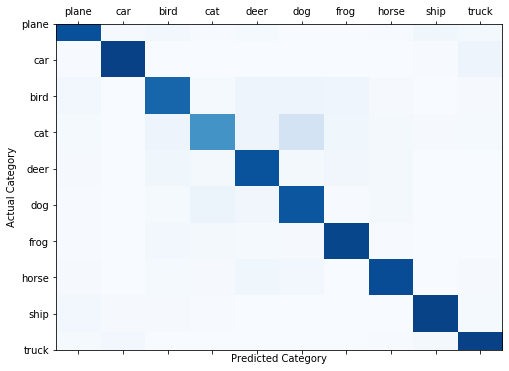

Category   - Accuracy
plane      - 87.8
car        - 93.2
bird       - 79.5
cat        - 61.9
deer       - 86.4
dog        - 85.4
frog       - 91.3
horse      - 88.9
ship       - 92.5
truck      - 93.2

Selected workers

[84 64 73 96 20 43 72 36 32 61 55 82 81 91 75]
Worker 84 : is  Honest
Worker 64 : is  Honest
Worker 73 : is  Honest
Worker 96 : is  Honest
Worker 20 : is  Honest
Worker 43 : is  Honest
Worker 72 : is  Stealthy_Attacker
Worker 36 : is  Honest
Worker 32 : is  Honest
Worker 61 : is  Honest
Worker 55 : is  Stealthy_Attacker
Worker 82 : is  Honest
Worker 81 : is  Honest
Worker 91 : is  Honest
Worker 75 : is  Stealthy_Attacker

 | Global Training Round : 91 |


Worker 84 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.166664
Train Epoch: 1 [400/500	(81%)]	Loss: 0.255102
Train Epoch: 2 [0/500	(1%)]	Loss: 0.087911
Train Epoch: 2 [400/500	(81%)]	Loss: 0.129772
Train Epoch: 3 [0/500	(1%)]	Loss: 0.063738
Train Epoch: 3 [400/500	(81%)]	Loss: 0.106071
Train Epoch: 4 [0/500	(1%)]	Loss: 0.070265
Train Epoch: 4 [400/500	(81%)]	Loss: 0.102246
Train Epoch: 5 [0/500	(1%)]	Loss: 0.041450
Train Epoch: 5 [400/500	(81%)]	Loss: 0.114053

Worker 84 ends training in Global Round:91 |

Worker 64 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.080169
Train Epoch: 1 [400/500	(81%)]	Loss: 0.206786
Train Epoch: 2 [0/500	(1%)]	Loss: 0.068688
Train Epoch: 2 [400/500	(81%)]	Loss: 0.089238
Train Epoch: 3 [0/500	(1%)]	Loss: 0.052072
Train Epoch: 3 [400/500	(81%)]	Loss: 0.062783
Train Epoch: 4 [0/500	(1%)]	Loss: 0.080694
Train Epoch: 4 [400/500	(81%)]	Loss: 0.211493
Train Epoch: 5 [0/500	(1%)]	Loss: 0.047757
Train Epoch: 5 [400/500	(81%)]	Loss: 0.122990

Worker 64 ends training in Global Round:91 |

Worker 73 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.077592
Train Epoch: 1 [400/500	(81%)]	Loss: 0.202573
Train Epoch: 2 [0/500	(1%)]	Loss: 0.071702
Train Epoch: 2 [400/500	(81%)]	Loss: 0.205759
Train Epoch: 3 [0/500	(1%)]	Loss: 0.078925
Train Epoch: 3 [400/500	(81%)]	Loss: 0.097781
Train Epoch: 4 [0/500	(1%)]	Loss: 0.088164
Train Epoch: 4 [400/500	(81%)]	Loss: 0.054553
Train Epoch: 5 [0/500	(1%)]	Loss: 0.078425
Train Epoch: 5 [400/500	(81%)]	Loss: 0.063433

Worker 73 ends training in Global Round:91 |

Worker 96 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.288338
Train Epoch: 1 [400/500	(81%)]	Loss: 0.217002
Train Epoch: 2 [0/500	(1%)]	Loss: 0.139856
Train Epoch: 2 [400/500	(81%)]	Loss: 0.345846
Train Epoch: 3 [0/500	(1%)]	Loss: 0.126630
Train Epoch: 3 [400/500	(81%)]	Loss: 0.258066
Train Epoch: 4 [0/500	(1%)]	Loss: 0.083486
Train Epoch: 4 [400/500	(81%)]	Loss: 0.269216
Train Epoch: 5 [0/500	(1%)]	Loss: 0.064149
Train Epoch: 5 [400/500	(81%)]	Loss: 0.150287

Worker 96 ends training in Global Round:91 |

Worker 20 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.285892
Train Epoch: 1 [400/500	(81%)]	Loss: 0.288512
Train Epoch: 2 [0/500	(1%)]	Loss: 0.141972
Train Epoch: 2 [400/500	(81%)]	Loss: 0.246537
Train Epoch: 3 [0/500	(1%)]	Loss: 0.119217
Train Epoch: 3 [400/500	(81%)]	Loss: 0.232888
Train Epoch: 4 [0/500	(1%)]	Loss: 0.155295
Train Epoch: 4 [400/500	(81%)]	Loss: 0.235973
Train Epoch: 5 [0/500	(1%)]	Loss: 0.138016
Train Epoch: 5 [400/500	(81%)]	Loss: 0.273399

Worker 20 ends training in Global Round:91 |

Worker 43 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.078191
Train Epoch: 1 [400/500	(81%)]	Loss: 0.254462
Train Epoch: 2 [0/500	(1%)]	Loss: 0.074504
Train Epoch: 2 [400/500	(81%)]	Loss: 0.145853
Train Epoch: 3 [0/500	(1%)]	Loss: 0.032327
Train Epoch: 3 [400/500	(81%)]	Loss: 0.100293
Train Epoch: 4 [0/500	(1%)]	Loss: 0.078355
Train Epoch: 4 [400/500	(81%)]	Loss: 0.108646
Train Epoch: 5 [0/500	(1%)]	Loss: 0.092210
Train Epoch: 5 [400/500	(81%)]	Loss: 0.118749

Worker 43 ends training in Global Round:91 |

Worker 72 starts training in Global Round:91 |
Performed attacks 0

===>Targeted/stealthy attack started by:  Worker 72  in Global Round:  91


Train Epoch: 1 [0/500	(1%)]	Loss: 0.981794
Train Epoch: 1 [400/500	(81%)]	Loss: 0.742707
Train Epoch: 2 [0/500	(1%)]	Loss: 0.246244
Train Epoch: 2 [400/500	(81%)]	Loss: 0.447392
Train Epoch: 3 [0/500	(1%)]	Loss: 0.276862
Train Epoch: 3 [400/500	(81%)]	Loss: 0.314322
Train Epoch: 4 [0/500	(1%)]	Loss: 0.294150
Train Epoch: 4 [400/500	(81%)]	Loss: 0.164930
Train Epoch: 5 [0/500	(1%)]	Loss: 0.107613
Train Epoch: 5 [400/500	(81%)]	Loss: 0.252109

Performed attacks 1
Worker 72 ends training in Global Round:91 |

Worker 36 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.167232
Train Epoch: 1 [400/500	(81%)]	Loss: 0.240824
Train Epoch: 2 [0/500	(1%)]	Loss: 0.123584
Train Epoch: 2 [400/500	(81%)]	Loss: 0.123021
Train Epoch: 3 [0/500	(1%)]	Loss: 0.088050
Train Epoch: 3 [400/500	(81%)]	Loss: 0.099965
Train Epoch: 4 [0/500	(1%)]	Loss: 0.070927
Train Epoch: 4 [400/500	(81%)]	Loss: 0.120581
Train Epoch: 5 [0/500	(1%)]	Loss: 0.055633
Train Epoch: 5 [400/500	(81%)]	Loss: 0.076833

Worker 36 ends training in Global Round:91 |

Worker 32 starts training in Global Round:91 |


Train Epoch: 1 [0/500	(1%)]	Loss: 0.153956
Train Epoch: 1 [400/500	(81%)]	Loss: 0.161468
Train Epoch: 2 [0/500	(1%)]	Loss: 0.089949
Train Epoch: 2 [400/500	(81%)]	Loss: 0.139710
Train Epoch: 3 [0/500	(1%)]	Loss: 0.102169


In [ ]:
# Targeted attack training experiment in a secure environment (Under Targeted Attack with no detection)

for m in MAXIMUM_ATTACKS:
    
    print('Maximum number of attacks: ', m)
    print('Tau value : ', taus[m-1])
    
    secureEnv_targeted_attack_training_exp(sim_num = 1, peer_pseudonym = PEER_PSEUDONYM,
                    peer_num = PEER_NUM, peer_frac = PEER_FRAC, seed = SEED,tau = taus[m-1],
                   global_rounds = GLOBAL_ROUNDS, local_epochs = LOCAL_EPOCHS, local_bs = LOCAL_BS,
                   local_lr = LOCAL_LR, local_momentum = LOCAL_MOMENTUM, num_classes = NUM_CLASSES, 
                   labels_dict = LABELS_DICT, classes_list = CLASSES_LIST, device = DEVICE,
                                   attack_type ='targeted', attack_rates = STEALTHY_POSONING_RATES, 
                                 malicious_behaviour_rate = STEALTHY_MALICIOU_BEHAVIOUR_RATE, mapping_list = MAPPING_LIST,
                                 noise_mean = NOISE_MEAN, noise_sd = NOISE_SD, maximum_attacks=m)